# How to Program Your Own Quantum Computer
## or QUBE: QUantum computing for BEginners
 
Martin Nilsson, RISE, Computer Systems Unit, Version 3.3.2 2023-12-11
<br>
(Email: ri.se@martin.nilsson but backwards)

<hr>
Copyright (c) 2023 Martin Nilsson, RISE

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
<hr>

**Do you think you need to know quantum physics to understand how a quantum computer works? Nope, no worries there. You don't need a deep dive into physics or mathematics, just a bit of familiarity with vectors and matrix multiplication. That's really it. A good handle on Python programming and a few numpy functions will do the trick, specifically:** [**`reshape`**](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html), [**`kron`**](https://numpy.org/doc/stable/reference/generated/numpy.kron.html), [**`matmul`**](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), [**`swapaxes`**](https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html), [**`linalg.norm`**](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html), **and** [**`random.choice`**](https://numpy.org/doc/stable/reference/generated/numpy.random.choice.norm.html).
**In fact, appendix B shows that twelve lines of Python code suffice to define a complete simulator.**

**The whole point of this article is to give you an informal, brief, hopefully digestible and educational description of *how you can easily implement your own quantum computer simulator*. It's *not* about 'Yet Another Quantum Computer Simulator' (YAQCS?), which are a dime a dozen [1], but about *how to build your own*. And, honestly, there's probably no better way to learn how a quantum computer works!**

### **A Quantum Computer is Like a Rubik's Cube**


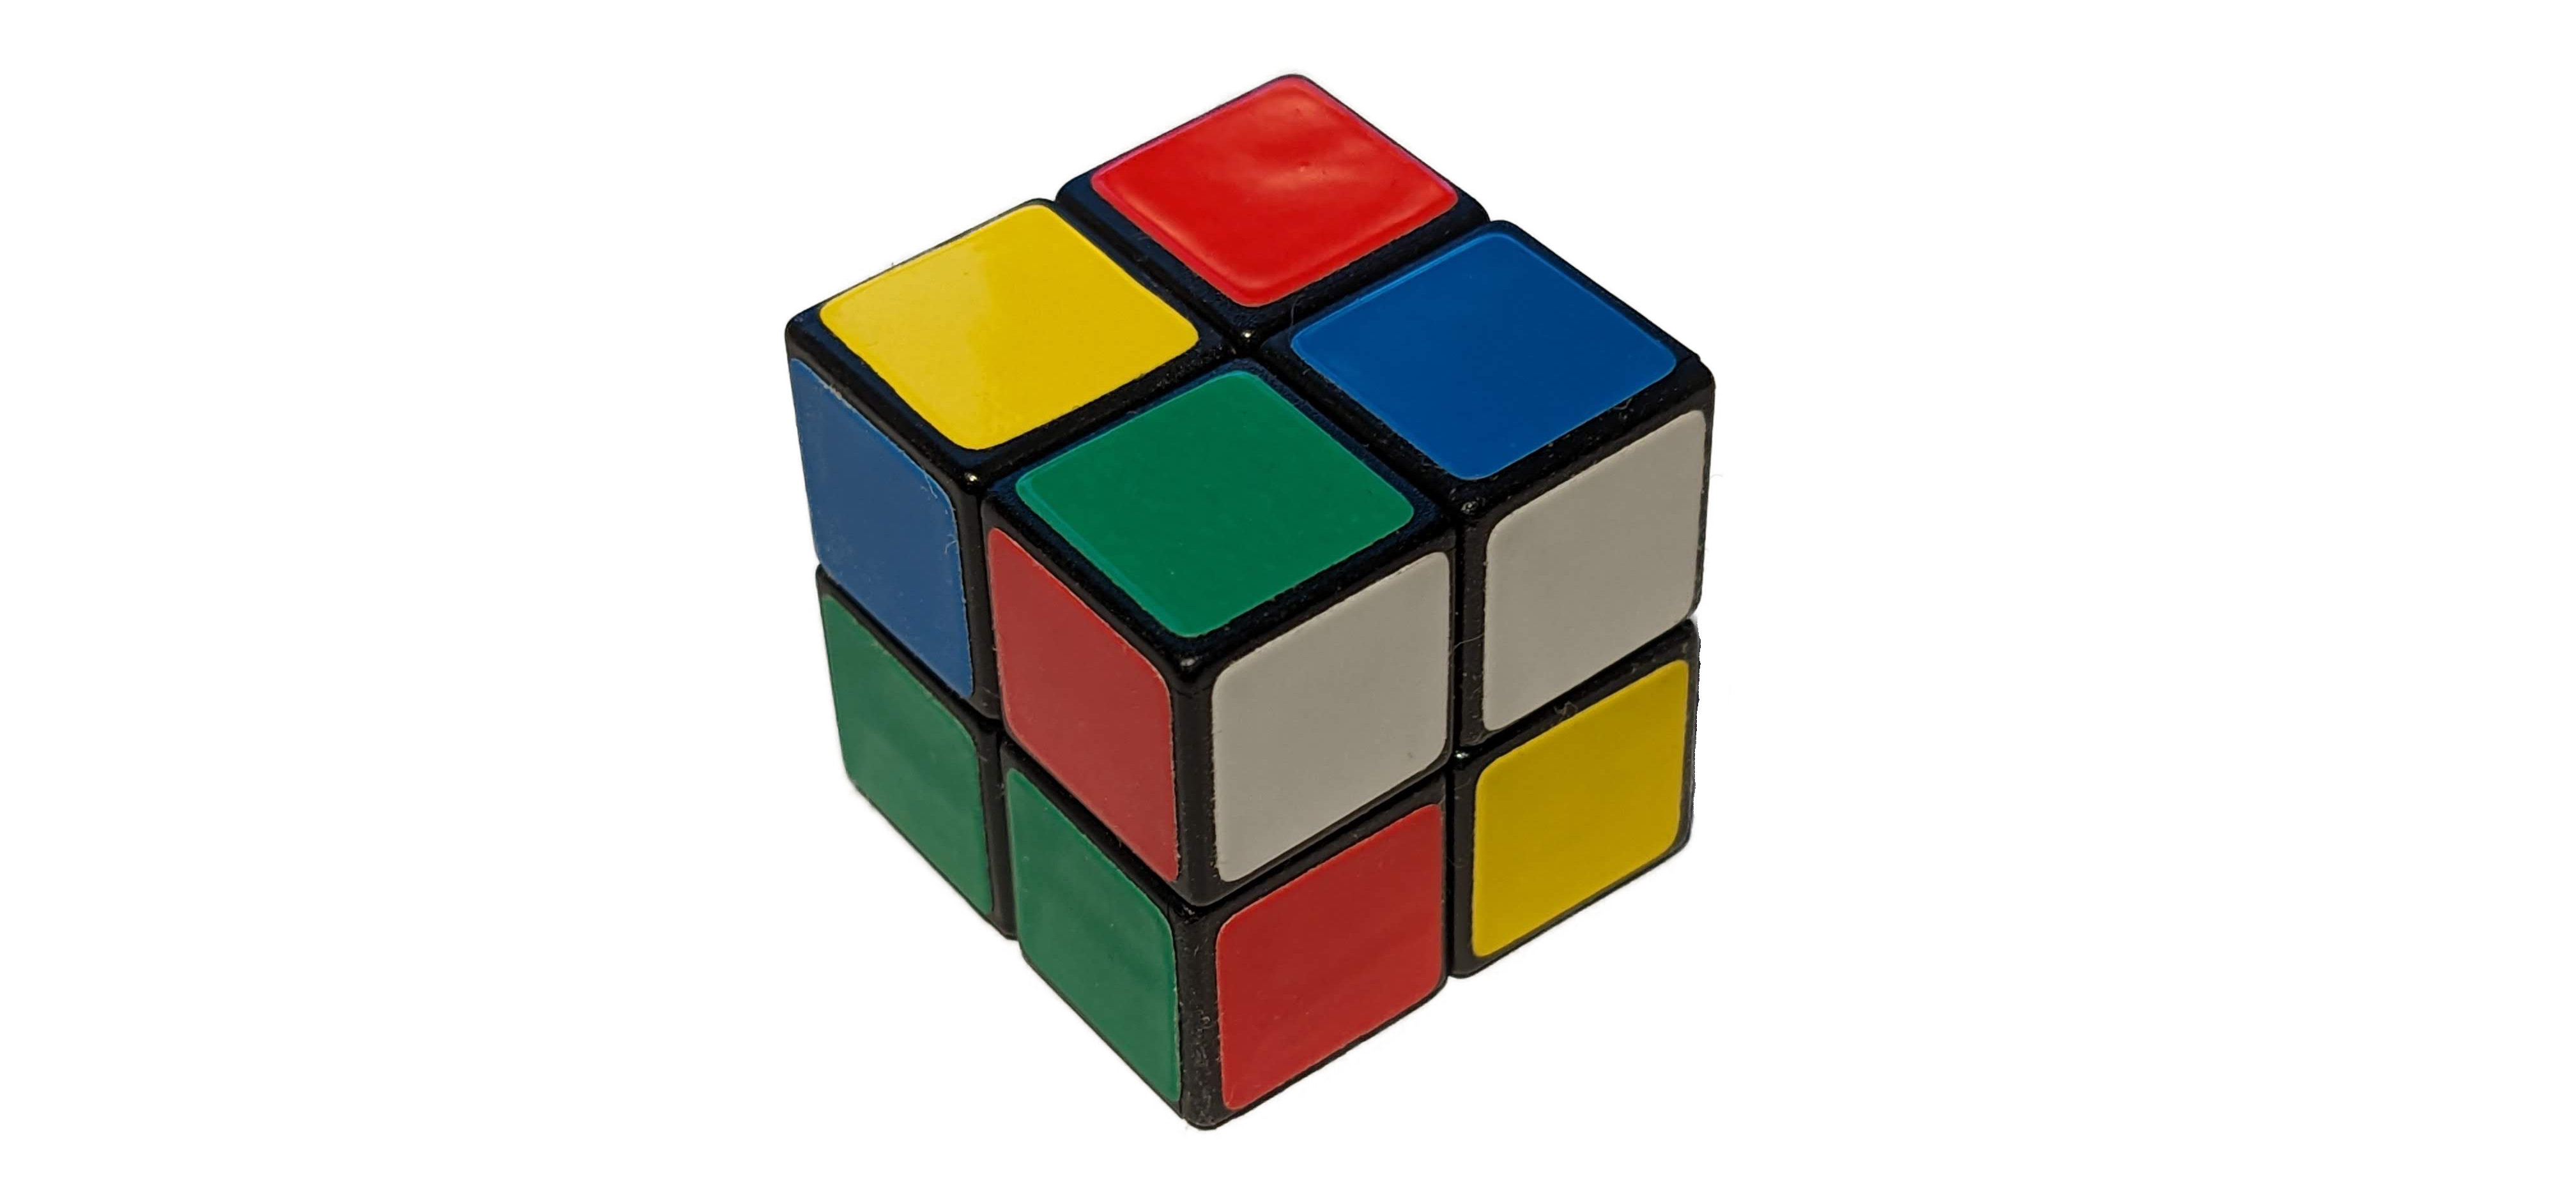

In [1]:
# Fig. 1: A quantum computer is similar to a high-dimensional Rubik's mini-cube.
from IPython import display
display.HTML(                                                                                                                          f'<img src="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/4QPmRXhpZgAATU0AKgAAAAgACgEPAAIAAAAHAAAAhgEQAAIAAAAIAAAAjgESAAMAAAABAAEAAAEaAAUAAAABAAAAlgEbAAUAAAABAAAAngEoAAMAAAABAAIAAAExAAIAAAAVAAAApgEyAAIAAAAUAAAAvIdpAAQAAAABAAAA0IglAAQAAAABAAAC8AAAAABHb29nbGUAAFBpeGVsIDUAAAAASAAAAAEAAABIAAAAAUhEUisgMS4wLjU2MTY5NTYyMXpkAAAyMDIzOjExOjA1IDE5OjAxOjEyAAAhgpoABQAAAAEAAAJigp0ABQAAAAEAAAJqiCIAAwAAAAEAAgAAiCcAAwAAAAEAUgAAkAAABwAAAAQwMjMykAMAAgAAABQAAAJykQEABwAAAAQBAgMAkgEACgAAAAEAAAKGkgIABQAAAAEAAAKOkgMACgAAAAEAAAKWkgQACgAAAAEAAAKekgUABQAAAAEAAAKmkgYABQAAAAEAAAKukgcAAwAAAAEAAgAAkgkAAwAAAAEAEAAAkgoABQAAAAEAAAK2kpEAAgAAAAQ2MTMAoAEAAwAAAAEAAQAAoAIAAwAAAAEPwAAAoAMAAwAAAAEHTAAAohcAAwAAAAEAAgAAowEABwAAAAEBAAAApAIAAwAAAAEAAAAApAMAAwAAAAEAAAAApAQABQAAAAEAAAK+pAUAAwAAAAEAGwAApAYAAwAAAAEAAAAApAgAAwAAAAEAAAAApAkAAwAAAAEAAAAApAoAAwAAAAEAAAAApAwAAwAAAAEAAQAApDMAAgAAAAcAAALGpDQAAgAAACIAAALOAAAAAAAAAAEAAABkAAAAEQAAAAoyMDIzOjExOjA1IDE4OjQyOjU3AAAAM/UAAAfSAAAiKwAAFlEAAAFfAAAAZAAAAAAAAAABAAAiKwAAFlEAAACVAAAD6AAAABYAAAAFAAAAyAAAAGRHb29nbGUAAFBpeGVsIDUgYmFjayBjYW1lcmEgNC4zOG1tIGYvMS43MwAACwAAAAEAAAAEAgIAAAABAAIAAAACTgAAAAACAAUAAAADAAADegADAAIAAAACRQAAAAAEAAUAAAADAAADkgAFAAEAAAABAAAAAAAGAAUAAAABAAADqgAHAAUAAAADAAADsgAQAAIAAAACTQAAAAARAAUAAAABAAADygAdAAIAAAALAAAD0gAAAAAAAAA7AAAAAQFXSNwAD0JAAAAAAAAAAAEAAAARAAAAAQNZA9UAD0JAAAAAAAAAAAEAAAE8AAAABQAAABEAAAABAAAAKgAAAAEAAAAnAAAAAQAAAPMAAAABMjAyMzoxMTowNQAA/+EMd2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtbG5zOmF1eD0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC9hdXgvIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0RXZ0PSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VFdmVudCMiIHhtcDpDcmVhdGVEYXRlPSIyMDIzLTExLTA1VDE4OjQyOjU3IiB4bXA6Q3JlYXRvclRvb2w9IkhEUisgMS4wLjU2MTY5NTYyMXpkIiB4bXA6TW9kaWZ5RGF0ZT0iMjAyMy0xMS0wNVQxOTowMToxMiswMTowMCIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAyMy0xMS0wNVQxOTowMToxMiswMTowMCIgYXV4OkxlbnM9IlBpeGVsIDUgYmFjayBjYW1lcmEgNC4zOG1tIGYvMS43MyIgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIgcGhvdG9zaG9wOklDQ1Byb2ZpbGU9InNSR0IgSUVDNjE5NjYtMi4xIj4gPGRjOnRpdGxlPiA8cmRmOkFsdD4gPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5ydWJpa3MgbWluaSBjdWJlPC9yZGY6bGk+IDwvcmRmOkFsdD4gPC9kYzp0aXRsZT4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0icHJvZHVjZWQiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFmZmluaXR5IFBob3RvIDEuMTAuNiIgc3RFdnQ6d2hlbj0iMjAyMy0xMS0wNVQxOTowMToxMiswMTowMCIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgPD94cGFja2V0IGVuZD0idyI/Pv/tAFxQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAAJBwBWgADGyVHHAIAAAIABBwCBQAQcnViaWtzIG1pbmkgY3ViZThCSU0EJQAAAAAAENtMtYSqcfWo4yqRsb7BUpX/4gJkSUNDX1BST0ZJTEUAAQEAAAJUbGNtcwQwAABtbnRyUkdCIFhZWiAH5wALAAUAEQAuAClhY3NwTVNGVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtkZXNjAAABCAAAAD5jcHJ0AAABSAAAAEx3dHB0AAABlAAAABRjaGFkAAABqAAAACxyWFlaAAAB1AAAABRiWFlaAAAB6AAAABRnWFlaAAAB/AAAABRyVFJDAAACEAAAACBnVFJDAAACEAAAACBiVFJDAAACEAAAACBjaHJtAAACMAAAACRtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACIAAAAcAHMAUgBHAEIAIABJAEUAQwA2ADEAOQA2ADYALQAyAC4AMQAAbWx1YwAAAAAAAAABAAAADGVuVVMAAAAwAAAAHABOAG8AIABjAG8AcAB5AHIAaQBnAGgAdAAsACAAdQBzAGUAIABmAHIAZQBlAGwAeVhZWiAAAAAAAAD21gABAAAAANMtc2YzMgAAAAAAAQxCAAAF3v//8yUAAAeTAAD9kP//+6H///2iAAAD3AAAwG5YWVogAAAAAAAAb6AAADj1AAADkFhZWiAAAAAAAAAknwAAD4QAALbDWFlaIAAAAAAAAGKXAAC3hwAAGNlwYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW2Nocm0AAAAAAAMAAAAAo9cAAFR7AABMzQAAmZoAACZmAAAPXP/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIB0wPwAMBEQACEQEDEQH/xAAdAAEAAgMBAQEBAAAAAAAAAAAAAQIDBAUGBwgJ/8QARxABAAICAQMCBAQEBAQEBAILAAECAxEEBRIhBjETQVFhByIycQgUQoEjUpGhFTNisSRDwdE0U3Lh8BaC8SUmkrI1RDZjwv/EABsBAQADAQEBAQAAAAAAAAAAAAABAgMEBQYH/8QAMREBAAICAgMAAgIBAwMEAwEBAAECAxEEEgUhMSJBE1EyBhRhQoHwFSMzcVJi0RaR/9oADAMBAAIRAxEAPwD9lgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEzEAxzlrE62gUnLv+qIEqTyaRG5mA0ivLm3nttr6zBs0zRmifaf8AdKF6XiQXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEzEAxTk+kTKBjzZ4rHmJgTp5vr/rH070SP/2n1Ti8e2va142ja8Umfj511z8f/R3EvNOHkvzbxOtUrKdba1495eLzfxO4LW/8P0SJj72U7Nv9lc4f8SfGvn7uR0/lVp/lpWJ/7ybP9nd7P0//ABBej+bmri5P85x7TOo76eDvDG3HvD6n0XrvTes8aM/Sudh5NJjf5LRMrb2wmJj67OPLO9WSqzxaJSJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWb1+oMGbPix1m1rRFY95n2QnT596+/Fj0r6WwWjLzsfJ5NfEYcNotbf8AqhtjwXvPqHwH1h+OPqn1HMYel0jgcfu/8vzb+60an69LF46Xy/k9P611fN/NdV5N+Tl3/XeZ8MrWrD28Xivfxnw+ma0rEZ70n6xSJc9uREPUx+IjXxsYfT3Dw/8ALxf6s/5nX/6fT+lM3QsV/lkrH2P5j/0+n9MM9Cx0y99M+p143ttGSJeVm8X6+Oj03r/qf0hyLdR6Vmy46f5cdpmv94aRMPGzeMnetPvn4S/xAdK67WnTPUkV4XO32xk3+W377aRZ4uTi3r70+8cXlYs9K3xZK3rbzExPiVnLMabNbxGu7xMpQv539gSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJsCs31G5idAw5ORSlZtee2I95lG06fPvxD/Fb056VxTS3Jx8vlxHjFjtE/6ktsWC15fnn1v+K/q31bmycbi8jJ07ib12YPn+8yrO3r4fHzrenjeJ0XDyLxl5M5pyd25m0+6t8kQ9zB420T+nZ4vT+PhtWeyKRH0+bivyNPdwcOsR7hsdmGltVjw5JzTL1a8aIVtFflqGU2mW8U0rEVn5wj+Q6VZL8eO3ujLWftEn8h0q5+bja941/ZamVjfDEskW1g+DOpr9J+btplcd+HEuF1r0vw+bknNxMtuPyN7ras+HbL53NwZ18e1/Cz8X+rehctOm+qY5XK4O9VvPnt/adoi+nznL4Ft+n6u9H+qujequm4+odJ5lM9J+UTG4bRO3jXpNJ1L0VL/wCaVlGWJgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEdwE2iAUnLEToGDNyMWOO62SI++0JiHz38RPxg9K+k8c0yc3Hy+VvUYMNotbf3Rtvi418k+ofAfWf4vepfU2T4ePLPT+Fefy48Mzu0feUxES9bD4yZj48Pw+j8nLm+Lycs57W95vO5Ra8Q+lwePpv47nH6ZgxR+a3b+zntmiHt4eHSI+Lcvk4MX/KpNnnX5O3bTiRDSyc6bfrn/AEcls23XTBEMduZER4tO/wB3N/JLXow2515+Z/JJ0Yr8y0/pmYU7y06QjDzcmO24tMneTpDfx9Uw5P8AnTP9oWi8wxmjZxxiyRut4ltGaYZTRhy1tS2oiZ+7upyZlz2xVmGr1Dh4eVx/gZ6Rkr9Z8zDtpkiXk8jh1mfjW6R1P1F6D6rj6l6e53IjhRfd8ETuuvvDWLafL8jxu4+P1L+D34y9C9b4acPkZKcTqlY/PhtbXd+31bVyRL5zkcW+KX1OmafpP2+67l02a237JQsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJnQKTePpINec0RM+Z8I2nTHOS01m0zFax85nUCdPnX4k/i36W9GcXJ8bnY+Xzqx4wYrRMyrtviwWyTqIfm31v+NHqz1hk/l+L8Xp3E3+njfqtH7qW29zj+Ktrbx/Reh3/AJn+Y5dsua9rd82t7zZW06fR4vF6n9PWcDg8emrZqaiI8Q5rcjT18PDisNzPyePXfwK6+m3NfkxLqrxdOfy+VN/e3+jjvlmXVWkQ52TJe3tOnF2l19WCYtb22ruUpnDNvba24T3hPwLG4O8JjizPzhb0p2W/k7fY9HZivxJj2tP+i24XnSnHvl48+JtMK+lJq62Dl99dWmGtbaVjHEMl5r/S6K8iIUvgrZX9X5Ztuk+9Z9pehGasvIyceLQ4XVOk5ONmjqXR8uXj8zHO6fD8eV4tv4+e5fAm0vtv4Ofj7McnF6d9Z48uLPM9tOReNf8A8X0dVcn9vluT469I7Q/R/Tuo8fl8eufj5Iy4rRuLVmJhrEvKmsw36ZYt9VlWQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAETOgY82SKx5Bz+TzaYaWvkvFaV97TOohVeI2+devvxi9Jel8N615dObyteMeK0W/1JmHRi4uTJPx+efW34yesfVebJx+m5cvC4k/04/H+6vaHs4PFTrcw8N0/0/lvzL8rqt78nNb623P8AdjW8PpMPjaxPx6jg9JwcbFF5vGPftGvKmTNEPaw8SsR8Wy8vBgtNcdNz8tvNvyZl6ccaIamXk2mb7yWmJ9o37OS2aZbRhiGCct7e0yxm8tOkMkVmfdlN5OkL/AgV7M1ONH2DszUwV+gz7MteJ3e2g7MteDSPonsdmaONWf6TsdmK3ErPyg7Hdiy9NiP6YOx3c3Pw7V/TEwt2W7K1yWp+uJOx2Z8c0n5px57bV/hiWa+Oa0iYtMa+b08eX08/Pxolo9W4XD6nS383Fq5tfky0n80T93oRkiXjcnx3r06PoP8AEz1R+HHUseDl5s/Uei7/AEWneo/6Za1tp8ty/G7n0/XH4eeu+g+sekRzuj8it/lfHv8ANWfvDaLRL57LhtSdS9fXJEzqNrsWWJiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARMxHuCmW8V8IGtz+bg4nGtyORkjFirG5vadQbTETPqHxT8RPx16P0LJODp8xy8vtrujUqTZ14eNa8/Hw31V+LPqr1ryLcfJkycHp9p8Y8HvaPvO1Z3L28Hira3DyvT+g/DmMnK5Fs15+U/+rC2aH0+Lxmp/Tt8bp2Pj0/Nqv7Oa3IiHsYuJWI+M2bmYsNprSsb+czLj/3cPUji1hzORysmbJNrZbdvyj6MMmabfG8Yqw15vbLfujcwx7Lyz4qTb3RuGcy3seHf0RNqqdmzSkfRSdHZfsNKLUiTQy0iEM9S28cRAalbuhXUoZsVpt7QakZZxRFu3xs1KupT3Un3g1Ku2ryMVPpCdtezk87jRP0hOpS52X/Ct27/ANF6xENoszYedWa/DzbbRkiFL0m3xknFGSN0ncfZ0Uzsr0jTWvWlqTiz0rlxf5bRt2UzPH5HD7z6Y+k26x6a6xPVvSnPz8bJE7tirP5ckfeHbFv6fM8zx0zX3D9H/hF+OfSfUefH0P1Fit0rrNa6n4mopkn7TttXJv6+W5HDvil9o4+Xu+e4+Vo9paOKYbMWiUoSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMxAKTkrHvINLmcymKnxL3itPnMzqEbWisy+Z/id+M/p70lStazPP5l/FMWGYnz9/KJl2cfg5Mz83euPxQ9W+u+ZfDl5+Tg8Sba/lsPiNfeVZtD3uH4n/h5fp3p62PmxyuRl/mvHnvmZct8sQ+mw+LpE/Hc/l+Lxsc5Mk46z8qxHs4r8qYe3h4VKx8a1+ThiJtEefl5cc8iZdscaIa88rJM+MlphjOSZbRhiGvaua94t3R9/uo1WjDMg2sVK4p0qiWzxqxIyluUjt91GbLSYBm1H1XCuoBNI+6ijLGSK+4InNWPmI6tTm8vPWO7DMVkOrd4HUJzY++8W7gmrPGTf1Gc1U+N5/NtWCGry8lLezSGsOZlx1nJ3SleHO6hTWXcT/oNIa+Lk5sM+L2iPp9V4nTSccS3sfPryLxS8VrPz02jLpjPHiWeaZaWjJjvMefPa9OuaJefyOPW0fGl17iU6pjx5qZLcfmYY/LkrOp/wBY8uit4l89m8fXfx9C/Cz8cOtejOVXovq+mbldOmdU5FvN6/8Au3rfT5Hl+MmI7Vfqz011zp/XOmYuo9N5NOTxste6t6Wif9WsTt4l6TWdS7EXiY3E7WUXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmdArN4gGOcsR80bTphzcitKza1oiI+chp829d/i96f9L45xxkjm8mfbFimJn/ALqzbTqxcW+SfT8++s/xV9T+tuXPFi2fpfDidTjx+O7++2c229zjeLmsbeK6T6ey35VeTyORnz6je8tt/wC7K+WIfV8fx/WNah0cE8Pi5P8Al0ifrr3cl+TEPW4/D6tfkdRnJOqTFK/ZwWzbetHHiGhmmb5O+bzP7ue25bRSIUnFNp8T4UX22qYax7J3Cu2xXFEfRG0bZIxxX3Nm2aceK0fPaFZtCMFZp+rQpLY74+6ivWVIy9vvsOssnx/vK2zrJ/MR9zZ1lemePuqz0mc0W9thpFo3806SwX3a+p9jQyYu7Hk8RPahMuhXNT7ikwra9beJ9iKypFJamTX9O/7rw0iGDJ5+Ui0ME4K2xWvb+n3F4s5vKxT/AEwNos0b4bY7d1ZV1K8NvjdVtX/CtFp+7St7R9RfjxLPOam4mJ8/N1V5MQ478SJZL/ynM488fm1nJWfaZ8zD14zVl4HN8fNo3Vsej/V3qL8M+q4OX0bl8jldK3/i8K87pr7fdrW/9PjeZ460z70/XH4V/id6b9ecOuXpnJ+Hy6x/i8bJMd1Z/bbatol89mwWxT7fQK5dW7ZraJX2w0zRO0oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARsETeAY72t/qhLBmyVx0m971pSPeZnQl8k/En8c/SnpSbcfjciOp9Qj/ycMxMR+8/JEy7sHAyZf0/PvqD8UfXXrTqF7f8AEMvTeJPthweI19591ez3cHh4iPjhdL6HytzeMuXNyLR+bLktvX95YWyxD6DD4+u/jsVw8Dp/5uVmjLyPpVz25EQ9rDw6xHxp8rqXfOqWtjr9IedbkTL06caIcnLu1+6Jmf3cl8ky664YhijFE/U7JbGPDEfq8nYZqY/2UQzVjQL7gURa2wK5dfUR1ZviVt77DqyRMSohhvsEfm+sAnyBW0wI6slMkT8w6ss5qx811OrH3117+Q6rTyZiO33r9vkodVa8jXzDqyRn39Vzqi2SJDqpfIL9Ud9u2a+PIdWLNStvaBaGhyMU/QbQ5+TF227oGvbZq31Edds1L1j+rTqx5525r4ItDo8TkY8tPgZKxak+8THl6ePNGng8vxkWnbQy4Ooenus1616Z5mficmt++fhzrf2mHVFofJczxszX3D9G/gj+P3Tev/B6J6pvXgdUrGoy3nVLz+7ettvl+Rw7459Q/QGHPS1YtE7ifaY9pX24dMtLRMeEoWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHcB3AwWzR41E+UbTpr8nm4cNO7Lbtj52mYiI/ubTFZl8n/ABH/AB39K+mbzxeLe/VefvXw8ExNa/vO1JvEO/B4/Jk/4fnz1j+Jfrz1znviyc23SeHPtgw213fvLKbbe9x/E1rHxxeg+lcUZPiZZyZpmPzXv7T/AH91bX0+kxcLU/Hcth6b06u+yN/5Yly25EQ9bFxdQ5nO63ky1+HhpGDH9PnLzbcqJelXhxDkd1rZO/f5vrPlyWyWn46q4qwvWvd+vf8AZPaFtrxXXsjcLdmStax8hRMTsGSghPdAI3KNq9ZT3QbOsseza2lq2mPmbNNimSFWRNqz89fuC29+wEzoEd1foLbhS3b/AE7DcK3mPrK20dWPu+8mzqTl+Vd6+6qep4+odSMk195XOrP8Wv1DqrfLi+sidMfx4+4aUjkzHsEQplzRf2F4lr5O2ReImGvPgaRMQTkrPvFUVjStfX1al5pk78c6n7t65ZhW1Ys6/F5lbxHfSYtv6e70KZHi8jiReGt1zoHB6vjrycEzxOdjj8tqT4mXdS23y/K8faLPafhR+NXqL0T1HF0T1bk5HM6Z3dtc2Tzav99+Ya1yafLcnx0xG4frj0x6g6V6g6bj6j0rnYeVhvG5nHbem8TEvEvWazqXax5IssoyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAifcGK94iff2QNfNzsGGk3y5aY6R72tOog2tFZl8k/En8dvSnpmJ4fTLT1jqc/pxYJ3WP3n5ImdO7j8DJll+fPXH4h+tvXPL+Fy+Rm6Twt/m4+G2ot+/wD+thaz6bieGisb1t57ovRL/FtWlcvw5j82S/vP92VssQ+ixcCsT8dysdN4UTa9sVr/AEc9uREPUxcOsR8c3mdaz2jsw3nFT6Q4b8mZehTiRDnzyMmW27Xmf3cls0y66YIhjvFr/q/2YrslIkGes2j6DNILd0LitIn7AzVnQhMxoGOZ0olHcCO+PuCO4GSlpFOq86n32HVauatfbYdU3yQHVi+J9w6p7w6q3uL9WOb6DqrN4/cW6qTlmA6sds2/mudVfj2+4dS19/OQ6qzltAdSLzO/MeA6p7pDqi02n5i5asyDDakV99gxRe1fcG5xs9v6mtMkwpOOJh0OFyJm0eZ18pddORMPO5HDi0tzPg4PP/wOdSL1mPE63MS9KuSJeBzfG7ruGv6a9RepPwy6rj6h0Xl3ycPf+Jh3M47R94dNJh8dy/HTM/H60/B78W/Tvr3p9Yw5qcbqUR+fjWtq2/t9WlbRLwM3Hvj+vpePJFq+YmP3Xc7JvwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACtrxH1BX4sdvdO9I2NXk8/Bx6zkzXilI95tMRo2tFZn4+Q/if+PfpL0ve/B4Pd1XqE/ppimJpH7zvwpN9O3j8HJl9vzt6x9c+svXmbLl5fPy8DgzP5ONitNa2j7zHllNpl9HxPFxHqIc3pHRclONSK44+JT9WWPef7q3u+i43jZpb3p0bY+FxafE5Obvv9Jny4r5tS+gxceIj45HL6vny3vGLJfFin2rDzrcnfx3V4sQ5uWMmSYtEW7vnMuW17T8dFcdYWpSZ95NtNNjFihCds/ZH2NMdlY0aNpNI0nZo0mPKyq1fALbj6o2nrKLZIk2dZY7TtVOlNhpYOsgdZTWdBpHeGjuDSbXmQ0pMzHzDSe+PqGlLZN/MSxXyfuCsX17J0votbZo0xdv3WW6mw6r7RtGlbeTZpFK+3v90obHgFq17vYRtbs+wr3hW+Kbe0B3hgvx7fbz7h3hitFq+y24TXcfWfpeeMUTFtzHy+y3aC0bdOJrNu+t4mPs6seSduG2Kde2XHmrOKcWSsXpPvWfMO/Hm9PLz8Gt5crndF5nTOpR1v0pzM/G5OP81Yx21O/t9nXFo/T5Pk8CZrqYfevwN/iC4vULU9O+tLzxuZXxTl3mIrb9/PhtWXyvK4N8U+n6R4vKxcjFXNgyVy4rRuLVncSvt50xpsVtuN6ShYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYKzaN6BjtmiPcNNXlc/j8XBbPyclceOsbm1p0haKzPx8Z/Er+IP0z6ctfhdJpbqnPjxqk/kif3RMu/B4/Jll+efVn4getPXF8l+b1LkcbjTOq8XjzNazH3n3U2+g4/iYrHxj9L+lrYc/xeXSuWto82vO5Z2vEPoOLwa6+OtzLdI4EdmKs3vHvNtOa2aIe5xOJWJ+OBz+qXrNvg5rY62+Vfk82/JmXrV4kQ4OXJfJfuve1v3cls0y66YIhaJtPzYp6s9Lz/msHVmpoQzY5iAZZvWF1OqO6A6p2IAWrOhmjYI3X7qNGPc/UDuA7oA7hKJvr6gicsR9Q6nxKh1T3wHVT4tg6pveBbqxbj6//cOqs2mA6otaJ+odWPvj7rrdSbxH1DqmLbEpA2oqnYL00uoyxGwbOGm/oM5s2vgjKbLfCj6B2LYaz8g7MF+FW3tAv3aeXg2p+nQd1OLXJhnzbcEXmGkxDbjUfKW0ZphjOKJZcPIyYpr+eY1Lsx8mduDLxa2j4wdX6N07rPdlrEYOXEfkyVnxMvTx54mHz3K8fG/j034Vfi/6k/Djqtei9ayX5/S+7UVy2mZrH/TM+/8AdvWdPieVwfW4h+wPQvq3onq/olOq9D5dc+K0btWLfmr+8NImJeLek1nUvRY7zPvuNJUZItEpEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAibRHuDFbLWsxEz7o2nTV5/N4/DxW5HKzUw4qxubXtERCJlMVmfUPif4k/wAQvp3oWX+S6PS3VOXPzx6msf32rN3ocfx98svz36g9X+uvW3MvPU+q8zjca86rxcVprXX9ld7fQYfGRSPjX9Pekc+OL35OP8tp33X/APdjbJEPpeP42az707d+V0Ho9P8AFvGTN/lq5bcmIevTgzpwuf6k5HNtMYJnBj34iJcVuXEvUxeP6R7cTlZ8mTJFpva31mXLbLM/HXiwRSfavbM/rnbHboX7P2Qna9KmlGWtdGgrMwaZ6ZKWNGkWm0/OFjS0XmQ0t3z90bZ9ZZInZs6yyROzanWUd0GzrKqqyAY5mYE6T3QGk7BjvINfJMwNNK98hpPxJDR8SQ0i17SLI7p+oJtff1BPfT/NAMe107gmdhuFq2iPqjaNMkeTZomNKqJiJn2BesTHyXU2z0iQ228ETA55l0K07vbQpMSv2I2p2VmujZ2WraJnXbKU+1M2OlvYPbncrDNdaj3T6bRMtW+W9P1QjS8RKLZO73laJ0060Txb2x5txbx8m9c+nNk41buny69P6pSMfPwxeI9rxH5oevXNFnznL8dW0fjDF0Xmep/RPUI5/pHrWbHijzOC2u2/7x7NO81+PlOV4yN6tD9Q/hB+N/QfWda9M6nP/DOuY/GTDlmIi8/Ws78w6aZIs+VzcW+P3L65F4iIn3ifbXzaOZmrbcbShYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYImQY5y1rvfgHP6x1TgdN4l+VzuTj4+Gkbm+S0RCJlatZmfT4v+I38RnpfoG+N0PF/xXlz4i1Z/JX95VmXdg4GTJPt8E9U+svXfry1s3N5t8PDtbUcfHM1rMfc1E/Xv8bxcVj4dF9IcHBX4ue99683tPsxvesPqON4+N/G9z+o9J6XlvHHiubLH9bivyYh7NeFWI+PLdT69zubbUZr4sf8AlrLz78mZepTjRDiZcdsmXvtktM/WZ3LkvmmXXXDEMkV180Nk0rM+4M/hQSCazELqrROwSKFdwCe4FqAvpRVNbaBkrbQotHkDYgikyCLUmfkI7MfbIdlZ3HzFlbTE/MGLL5+cDVjiNggAAFPILxWZBMxEf0wCi4kCNz8lFezPjrMh2XtSZFezLgp/lj/UOzP8KF2XZkphn7B2Z6xFPcZNzHeIBn3SPeYUU6sN7R293yDqx2zRr8vuut1UtfYdWHLeZ3vU/QXho8juyfIaw1e39xZs4aV15nU/cF8tbY599/s3xZ5iWFq1mGzgvFsc1rWNx8np48sWh5HJ41bT8U6v06nVpry+BkjhdTxf8vLWe3f948u7HMS+a5fiorX4+o/hL/EBz+gRg9O+usV7xS3w6cu0/mtH1lvvT4/l+PtS0zV+qOi9S4XVeBi53A5GPPxste6l6W3EwtE7eRasxOpb3clCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIm0RHkGOcmt+JRtOmr1DqPE4WC2flZ6YcVY3a951EG0xWZ+PiP4pfxBdE6HF+n+mK06v1KfEWrP+HWfvMef9kzEuzBwr5Pcvzb1/wBR+tvXnUMkdY6zmtjtOo40W1TX2iGUve4vBiPkNzoPozFg5Vcual7Y6R+bv15Re8RD6PjePmJd7n9T6R0jFNcc0zZf8tPMQ4r59PcxeNtMetPJdb9Q8/qePsi9cOGP6cXjf7vKvypl7mPhxT65F9zMzuZmfrLktn26/wCOqvbb6wrtOltIStEbX2lesRBsW0qja2vvAbRHldC9Y0C/bKNqHbJsUNicUzJsZY3KqpsDu+4oyUsDJEbTpTbNXUGja8UifohTaPhwG2G+CBttp2p2zqYkNqWx7Gm1KxMe/gNo7JDaJrMfv9A2nsn7J0bO00bTXxbt+aDas1taPAbXjFafkttHZf4f7GzsyUwqstsuHHM78ewbX7PsK9mzhxdvvAdl7Vivuuz2vWYgNouGlIyTX3kNL2tNt7t7KJ6otl3Tt35Dqwxl17bXTo+KGlZtr9No/uJissdrTP0F4Y+2BbabRE/UNpjN8r+Y+ys1n9KxWIZMVopW16z5n5NseSaqXxVsy17ZtF6R22/d6uHN7efmwTMe1+Zg6f1Phzg52C1rTPjJHm0S9Gs9ofN8rgTa24dn0P679W/hZz//AA05up9Em27YrzuIj/0WjdXyfK8d2jf7frj8NfxE9Pevej4uf0XmUtktXeTj3mO+k/SYaRaJfPZcNsc6l7GMkb87/b6LMl9wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABsFbTqPeAanP5/E4PGvyefnx8fBSNzfJaKxH+qExG3wD8R/4luhdKtfh+k8NercmfEZO7/DiSXZh4d8k+35/wDVPrb1r665Fqdb61mxcW/6uNx57a6+6r3eP4uYjek+mvSNY5Hfivk7J8TefeU3yxD6Li8Guvj1uevRvT/G+JlrgjP8vnZx35EQ9ri8Cu/jzHWPU+fmd9ePb4WOZ86l5VuXMvax8KIl5rLSMkataYj56cl88y9HHhiIRTH2Y+ys+Pu5+22i/ZP2V67DawntkF6xpItoEiqNyC1Y0uL7BaLxP1UUWiNgjtBftiPYCkCq3aCPh1FE0iQZ6xpdkydsgvTaiFgLREi3Zgz07o862HZrzimPoNeyJxxP6oDsj4Ydk2xxPy/uHZjnHMLnZTskOzJ8P8/drwodl4x1j8062HZXNmrHtE/6C/pj/mcWt+f9A9OhgpGT9MwOXsyzS0WisRG/mHZE018hTsvXJMfIOybT3+0Lik20DHe0/UXUtaZ+Ugp338f7qJV+Jb7gd8RMRPj6fdcW3IEV39RontkETEwBMaBgtW017hKItFb7negZ8N4y+9oo1pkmEXxxLLOWlPe3+jspy5hx34kS3sPOm2H4c3i+OffHb2l6FeREvDzeKi8fGleOodB52PrvpLn5uBy6/mvjxTqtp+8N62ifj5zleJjerQ/SX4M/j30f1Blwen/VFo6d1r9O7zqmSf8A6vZtW+/r43Pw8mP3r0+6VvW2pid1n2n5Su4mSEiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARMgre0xANLqfP4vTuNbk83lYuPirG5tktEQjaYjb4P+LP8AEd0ToOOeF6Wvh6nzZnU33utEzWW2LDN5fnb1B619b/iHfJj6t1Lk5OHNvOOs9uPTOYl7mDxlpjcNXovp2mHWOlLZcs+JnXtP2Ra76ri+N1Pt7LidG4PS8MZubbFSbfKfdz2yPbpxYiPjS6t6qx0rPG6Ziitf87zsnLiYehg4kU+vH8u2Xk8r+YzZrXv9bTvTgvltL1cGKtfrFXjRji01t7/KXO6PTJ2yjSdnbKkVlCzSJgRpGk6N/aTRpdKFgT2ynSqujQeVhfugCiulGehoEI2vEbDaaVn7Cu1/7Bs8J0rtNIg0bZNJ2yZDYtRVC0eQT2ynSu2PJSZNG1bY5k007I+EaOx8JCdo+H9g2Thm3tpbaOyP5efsbOy84o/dGkd4RHH+LOtT2mjvDPi6DyOdEzjtNdT52jbL+Zi5Xp6cObsjIbP5m/w+nfC+cG1O6+Tj6y70bO6k4JmN61+4jsivGmY34gOyace30W2t3gtxa/Q2d4a2TjaNtO0KThmPobO0IjBv6Kp7wpbFWvvAttS2Glonfv8AL7Lm0dobWpCNrdoXmujZ2hS8QbWY7mxjtNq07Z0lLDaNgxXiPlMwvMwtESiI7veZUleNLRN8dt1stjyWiWM0iI9up0/mUtX4OSf7/V6mLkREe3k8rjfyT6Yuq9G4/UO225xcmk7pkpPj/R6MTEvnOX47dfxfQfwl/HbrnozNg6F6wpyed03fbXlZPN6R/wCrasy+O5ni7RO4frf0713pnXunY+odK5VOTgvG+6kxPb+7V4ExMfXViYmNwISAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABM6BW09sbmQafUOocXgca3J5eemDFWNzfJaIiAfB/xS/ib9Kem6ZeJ0GY6x1H2r2W/w6z95/wDs0pimzO2SIfmL1v8AiB6y9ecmc3Weq5a8bJOq8XDMxSIaThiPrq49LX+NDoPpj4sRkyYrxWY8R9WN7xD6vg8Ldvj6HwOkVx4YtHZhwx768OO+aIfYcbhVrX3DW5vXcPFyX4vSqVjX6ss/J5luTL3cPDiHnudy+Ry8835Wa+Sd+Ps5rcmXXPGiGpfHaZiK2mK/P6uabOmMUQdlfuymzaIhN4rv56QoqCJmIQHdAJSunwCRReKzPzgFp8Lqq9sggAFqCi9baBliNxvaiqcd4n6gyY/zewoyTqAU0uhagMsRtRmv2yCaxMCGalQWiu11F7Yt/QCMcT8g7K/C8b8B2R8P7KK914wb+Qd14481+UCvdlrw5n2iA7pngzX2hPZXuvi48096wdju7vBz48OK9Zx7mfbSrHs1s8Rkneo3v5h2YrYp/pgOyY4+6+Y8h2YOfS1OJbJWvivulfsx8DszYdTE7DszVxzHygOyt8UfYOzXy4fsNOyL4I+gdmvlpr2ExZqZK7nQ0izFpddPbH1gEVjSgXkGO3kasVp39QUywulXx9QYr1F0VjQFqzJHprMQw2iIt3RMw2i+mM4ol0un9RrW3Zmmba9pdePk+3Bk4sTDq58fG5fFmmWK5cdo/qiJenjzxMPneX4zc7hqej/V/qv8LvUUc/pHMy8rplp1l4tpmaTH3j5S2i75DyPiutfUP1/+FH4temPxA6fS/A5FeNztfn4uS0RaJ/1bVtt8xkw2pPuH0Stp9p8LMVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARNogGr1DncTg8a/I5nIx4MVI3a17REQD8+/ir/FD6W9O2y8D05S3WOoV8Ras/4Uf33/6N68e0sLZ6x8fln17+Jnr313yMl+t9Wz4ODf8A/tcVppSI/t7uqvHiGFs0y8hxcHGrmjtjJ2e0xb5y0ivSPaKz2l670h02OVzIpNtY6W3Ovo87k54ifT7Lw/G/kh7vPyMfGpWuGfFfs8i+bcen6PweFSPbjdR6jyudPw78i2PH/lr424cnefj3KYKz6hxrRM5ZrW0xE/L5y47Xh244hvY43Hn3YWlpeF9QmYV9sM6j5KTWUalSyUqd0Arado0GzQvtO1tkeTZtOxVet9AmZi3sttGljZpXX3g2aQbNJrMQbV6ysbOsrVmYn3jSqvWS9oj22HWWbjW3G48jPTPaYn5hpC21U0j7mxlpeFVNMsTEhpfwK6XreI+oaWresfNbajLF6ybGXHFZ+cG1EUxzefHsbV7NiMMT7Qrtntlpg+xs2zYePE++jajJSPh/0mxe1qz8lUalj3Aalkx+TaupZ6Ux/wBcT/Y2alak4v6fH7mxXPetY7qzEz9INjB3VvhmL/pn6+0rLNWaY6z/AIfiPsC9svb7idSpbJWfmGpVvfHb7fuNGH4k29tR+4MOTU7+wmIlrzSJrv5i8Swdn3hbbXtCvZU2doUnwqnatvIbVmNJ02Y51BoY8sxMxET7rJ2pNKx84DalvIuRWZBERMivaVL0RqVuzDOGJv3eWkekt/i8i+Gs17tx8o+jeuaYcuTB2dfi5cOfH2XrE0n9UTG3s48kWeByuH/JV5rm9F6l0PqUdX9N8rlYM1Ld0Rj8TE/2+TpidPkuZ46d69P0N+Cn8R/H5/Ir0D1vT+T5UeKcq0xET/8AV9J/ba9bT+3yebiWp7fpHg87i8zj15HEz0zYrRuLUtuFtuLTaSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK5LagHzz8WvxV9Nfh30u3J6vya25M/8AK41bR33lMVm0om0Q/EH4sfjR6v8AxJ5lsOTk26b02Lfl4+G0xER/1T83biwa+uTJm38fPseGuLst+rJHvaZ87dMVc7Pab5LbteZj6NYqhXcRHjxLPJ8a4Z9vd/h/li+K1ImImd/vLwuV9foP+n7V09H8CL67p/d5Mv0Xi2jSnM6Zh+H3Y/M/ZnLspknbgcjHWmX5+PaXBMO/HZsYvZlNWlrLxEylXsren7B2a94mFFmOfAKgAbn6oFq2iPqCe6Eh5BNZmPlIL7kEdwHdAI2C0TMgnx9xVe3kFsduyfy+IGfU+NP39w6snxrCvVamT7h1XrkiBXqzUyx3dvnYdWab6+YyT3Aj/UZr0vINrF+4pLfwTWBnLZxTSvshRnraI+gLd9I9hVS2TYImdAwWv2+8gtTkTX3T1T1TPKtHzOp1YsueuT3ma/sdVujHPJis+Ztr6/M6nRTLy6zj7O/wLdGt/MzX2mQ6MebnT8tz+wv0Y/5q31kOi855n3kW6K5OREe0h0Yb8r29/uL9FP5qd+/gOivxo+4dUxmifqHUvMC/VWbRAdWK9/32u0VvMA0OVm3utZ1b5aF+q+Lc++w6sglNZ0C9Kii00i3sCPhQdk9j+XOx2X7MnHme2fEf7urDyZiXNbDEw6/TuXjzREW3E/v7vYxZ4tDx+TwYtLD1/wBHdM61N+TjyTxOZ/5d4/qn7u+mpfKcrhxEfG1+E/4r+ofws63HTOu5uRy+kTOpx2j9P/0yWjT5jlcSN+n7M9A+uOgetek4+p9D52PPS8btj7o76faY2RO3k3pNJ1L1EW2lRIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEzEfMHyr+ID8Wulfhp6ayZptjzdVzVmONx5t72+/wBkxWbfETaK/X8+/VPqPq3rj1Bm6z13m2y5sl/yVtbdccfSId+OkVcWS02afbXFXtxR/f6uj/6YxOvrLGpXhG1q+F4tBtizbn9Phjf3CaxMO56B6hGDq+HFlydm7TE79nj8nFMy+r8RnnF9fS8+sdu2Z1P0eLkjp9fp/j80ZI9J4+atb++6/f5MYnt8exT8Z9ub1Ph038Skbj7MLYph2Y7w59bVrPbNo2wtGnTrs3cNYv7R/qoy7MmTjRVXsdmlmwzH0Rpr2hrXoaWYJiY+SDRPgNEeUaDRoSlOlu6A0ndvoIWBGgNAaBFb2gF9iNMgaY/IhXyC/cI0mt5gNLxaZFeq8XmMuw6tnHk/zJ0w6S2dx9TSujcfU0z0nH5NGm1Se33NM5bFMvb7mlZrLLXNr5o6yz0yRyd/M6yaROa0fM6ydJP5iPqdZOks05ot7SdZR1lgy5fudZOstec+vnK7Xqx35P7h1UnPP12NdMWXNNveQ0m2Wk/KFFurHN5t7SHVSImvvaJTpfqx/E/c0dVPiW+ppbqitv8ANMmjqi1toT6VisSHpfciOqKzMB1XtkifqnSdMVrzJo0m1on/AN07TpjyX0bNNHsicnfPubbM9LWr76Ni/fH3Nq6ItE/U2rtlpMpQzUFezJFd/JRTsz8XF3W7Z9w7Nnkcfvm0REeUe/0rW7j5aZeLl7qe0ezqx5+n1Fq9nd6T1mmW8Y82otHtL28HIizys3Erara9V9F4/qPp0Ybdlc9I/JfXvP3d318ty+BEWfNfT/qD1V+F/qiOV0bl5azSdWxb/Jlj7wRWXyfL4lojb9f/AIH/AMRPp31xfD0rq1a9L632/mxWtHbaftPzX1Lx5rMPulLxaN/KfaRVeJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2AAADh+tOu8X036d5vWeZeKYeLim8zPzQP5mfi1606h+IPrfmdU5mfJNItrBW0+K1/Ztj9Mr+3AreleyKUrHZH093RF2M0bGK0T+prF2U0bOOIlv2Z9VdnY6qWrMoj2SpfFPxPiY7TW8TuJ+jkzU27MHJtR7b0r6sjkY8XT+o2rfJX9GT5z+7xOTx50+68P5bU+5epvrt7qz41t5UxNJfoPB5dMsJw547Oy/mCbbelFoa3M4eOZ+LgpH7MZrtrGSYYuPe9feYZTCXRx2rknUeWU1GDkYbfRHZEXaOTFMfI7NYu1MtbV94hDTsw3pIdkRHb7iyQNi4C3fb7Ci4J0CuwW0CuoBIJ3IJFVQToEAvWYgF8cxEfm8yDJW+vquzmrLF5n5jOar98/cU6stMkV99h1bMZIkZdVoyb/AKoDqfG/6hToiuW0e86DotbLaRPVhnNaPnIdU15N4+ciOib57W9pDope9vqL9VLXmfHyDqReY9hfqx2tMh1Nx91AraYBNo3812ikzoFZnQk2CFELRGgW8CVAV7oXFZ8AwzeYUadWPumfcOquxK/dAKxbYSy4vzewylt0rP00urNm1jpEjOZbNcUR9FBlxxWt+6PYGW9/Hy2M4aXJrFveBtDh8qkY8/xazarfFnmsrzhiXW6X1mMeLsvaY17Tt6mPlzMPN5HCi0ud6u4uLqHCy5sExOatdxaId+PPuXyHk/H9avnXKxZMXIpzMeeeLyse4rfHaYmJj7u/H7h+f8uk47S/QH4E/wAUHK6FXD0L15e/L4lZ7MfNnzk1/wBUe3+5bHMOKt9v2R6e670vrvTcfUOlczFy+NkrExfHaJhm0dSJifYEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr3fZGxPdCRW2SI95gGHk8zj8bDObkZseLHHva9oiP8AdGx5PrH4oeg+kxe3N9S8CnZ+r/Gjx/ubhG4cbh/jt+GXKz/Br6k4sTvXdN4iDtBuHqOmeu/R/UrxTgeo+m5rT7RXPXf/AHNpd+M+OaRemSlqz84ttI/NX8cvq7kdN9J9O6Hw7RMc/LPxaxPmax8pR+yfcPxFGKsY5yTu1/kv3hSK6ZImYXiUzVkpl7ffa8XUnG3+Pki3t4/d1xeJcvVmmul4iZQpMaXiNIiEKXja3przirWYy0jtvHzc+etZj46+LmnFPt7P0r6ipOOOJy80amNd0vCz8WZn0+28X5TpHvb1VvhfDjJS3dWfaYeTak1+vvePzaZZ9MmHN2U1Eb+0qxaHq1vEQw8nDE178fmforNWveEdOy9nJ7bb/uymqYnbsY6xkjenP1lh7hTNw4j+lVP8kQ5fJ4kx8oX26P5IaObDNPfRtbs1MlZj5DbaIiZFtKiyQDauk7k2aW7jZo2bNJ2GjYaSIToEiqfAINipsTsDcgtE7XJZsczIylntN6xuYgU3CItsNwtTJKNqaZK7j5mzSO6PubFvif3/AHNjJ3wbV6sdrxP1NnUSsmfHzBE37vYNETsNJ0jaWM2J194VV0aDSe6Ftrsc+TYpadm1tJ7vtJs0jvj7qo6yyd0B1lXYnSu5DSFtmmO9jZpinz9v3VbqgjQrpXYaZseOZ9vKdImW3ix9nvo0ylsV3PvpZhNm1j1ApK/f+6i3ZMW7feRZjy5Zr7ybRFJafI5fb7zv9jbSIcjmcicvzVl0ViYa1K1ye9ph1YbKZLRDq9PmIrOKZ3vxL0MN9T7fNeT69JeG9Q4a8LquTHb80bmdS+g41otD8t8p17y4E8HDWt5vPfEzuI35h1zES8HcPdfg1+MPqT8MOtR/K5M3L6RaY+Jw8lvERH+VjbFtaLy/dv4RfjD6R/EjhUv0Xm1py4jeXiZZiMlJ/bbn1MNYmJfSImJEpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABW06gGO19fZA5HqL1F0T0/wAOeX1jqeDh4/8A/ZeImf7KWvFfspfAfxC/iNy4uTbh+jOm05da+J5GWfEz9oZWzR+jUvivqTrnrn1je2X1J6iz4uJlnX8tjtqsR/ZT+av7k6Wl5yvpTh4q2vkic+/8252y/wBxX+0fw2c7qvQeDWdzSMXj2qf7mv8AZ/DZxeX0a/DyfH4PJ7cn9MxbWnTXJS37Ratoei9J/i3+Jno/lUji9Yzcvj1//t+RPfj/ANPd1UxxLCcloaXrz151f151LFzev2juxd35ae1Yn6HVrF9vH8v4cZP8H9H0Oq8e2tE7SETsF6ZLV9paVysZo3sXKmfd01yspoz3lrF9skT4Xj2ItG5+xekStNmDNx4yTNqxNJ+Xa5L4Yl2YOVajqdB9Qczp2SnF5FrXw795eXn4fp9T47zFq29y99weTh5WCmfBkraL+8b8w8TNhmkv0Hg+Spkr7lnx5bY77iYmHNEy93HkrZa3bk/NTxLSIhvMabXB5nw8nbk3EOWasZq7eG0Zo3GtM5qymqnJ4kTXuiI0gi7kc3hRX3gaRdzsvH38oS6Iu182GK+2hpF2r2DTsoHYQuAAefqC8eUidAkUWAFUbBGpQACQBavhdEs9JivvIzllvni0+PYR1UreIDqVvEKHVfv+4dUd4r1W7/tIdU/EDqr3wHVHxbrnUtkmQ6oreYDqyVvr6h1W+JCh1Ui8SHVabxHzDqp3/cOqnxP3FuqYvv6h1NiU90grPgCb6+YHf9xPVSckR9Q6sfxRfqx2y7+odU77vcStETIHbIr2RFd/QOzb48ds6iF2U2bEVmZ38xlNmSkT9Bk2KftIJmJj3UTFWvmz1p+qRrEOXn58z7TKGvVp2zZL/MOqMeKJ95TNVotpmwceI/b6unFDkzZ6w3aRj4uG/Kz2imOkeZn5vRwU7S+R8pza9ZfNOudSjqHVc2evdq0/lfQcemofmnPy97NLuvFt2h0vKU5VfiU7ZiP/AHBsem+t9U9HeoeL6h6Jnvh5OC3dExP+2vn/AHc96OiPT+gP8OX44dH/ABN6PTjcm+Lidew11m4/d+v71+sMFn2isxMJEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbBS14r7gpfNqdQjY4XqX1V0b0/xrcjq3UMPGpWN9trfmn9oRNogfEvXP4+cjkUnjekuDWsT4/meTOv8ASI24svKiI9L1pMvkubofrL13z45nU7cjnTafy3yWmKV/arxs3OrE+5bxx7S9t0X8GorWt+p8u8XmPzRjiIiHk8nzWPHHuZ/8/wC7urx3rOD+HfpjgRWcmKM9o+dpePfzvefxmW0YIh0KenfS+Onb/Jce0/eGFvNzH7dH+3q0ef6U9Kcz9XTuNH/6LC3+ooj+/wDz/uf7erwPqr8HePkyfzXQ82Otp/8AKvG6vT4vn9z7mXPl4np8Q9Velup9H6hPG6hxrYrxOo3Hif2l9l4/ytc0epeRl4s7eXzcK0ZMtLUms7fQVy1t8efNLY/rS5HH7PaGsRtvjvEtLPXt9mdp6/U9mGtlYyRKWVSImFphNLTX3ltF9KTRs4ORa3u3pdyfxy29xf2l2UvCvWUpnbOtoRW819lJhrGlL1rfcWjcfL7KXr6dFMnv8W/6d6h/IcuIm94xTPmHlZ+N2n0+i4fPtjj3L6Bxs3H5eOL4LxaJ/wBnhZOPaj9A8Z5OmWf2mbTSZ7f1Q55iX1WPLW8ei+stPM6srFO3xb6z9M6hm4uTsvMzX6yztSYUtGnq+n8inIwd0TEw53L0tCebxqWr3V1KO0Lb04vN4d6+3avteMkOVnxzPyNtou1c+P8ALuv+g6ezWmmhZWdQjTTtChpY2I2Btas6TtK5sV74+5tXRs2aO4R1lOw6ytE7RpGkGjSdJQaBK2yTc/U2pNZNz9Ta2lu42aTtGjS3caNMffKFNL/EuGjdvpIhbyBNohbYv3V+psV3CQm2gV71FuqtckwHVe1qz9U6RpHj7mjSNmllqzo0Lbg0jrJ3QaOsoveEHWWve8h1k7p+o00i1thpj3IncIDcJpM/SRVnrMQI7QtSJv7J0x7M1cMQaV/kht4ccTHy2srMtrHhm3tAxmzPi482+Wv3FYttnvjx4o3eYF4rMuTzudSkb7lNtKR2cLkcm+b2mTbfpMMGOvdOp2aXiIltY8e/odZRaYr9Z8ODz4iZaa24c+etYbOX4fF49uRyLRjx1/zf1O7BhtL5TneQrWXgvWHWeT1Sf8G04uJWfy1r/V+71+Px7Un2+B5fkf5Y9bedx0itomfl9Hs4/UPBvaZn22LTM/RZnpjiYr5t7q9luksOfLWb+Yma/RS14lqy+nerdU9M9d43Xeg8rJh5WC/d/hTP+n7Oe1do1L+j/wDDx+KfD/Ez0lTlWmuDqvGjs5eHx4t9Y8+ykL7ifj6kkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVteIBhvkmtdo2l5/1V6s6J6e485+r9Rw8WIjfba0d3+jLJlrT6mIfE/XX4483k3y8H0pxO2k+K57+bz+1fb/dyZuV1j0vXHMvA9L9JesPV/Ua87q2fk3mJ1OXNb/tX2eRk5+p9y2jjzL6N0b8PvT/SsOLJzqTys0R+abez5Pyfnq0r+MvTx8T29JHM4vExRjwYa0rX2ivh8pbzmXJPuXZTjRDUy9R5FrT221Hy8OHPyr3/AG6P4oa+TNfJ+q0uSM14/Z/HDBbU/U/lvP7OqazWPkrqZOrPhzzWNTuZ+q+PNevxE020/U3Qulepem24fUcEWmI/w8sR+bHP/q9rg+WyYp+sp41Zfnn8TPw46p0CLcnH3cjjRO++sfL7v0TxPnYyW1aXi8rhzp84yYr0iZ7e/XvH0fd4uXjvXcPGtS1JaPJ4kWr3RWZj/s6r1rZMS5WbDas+HLbHppFmPz9VWqa7n5gyxW0e0wvE6YzDNiz+deW0ZdMpq3a2i3s6Yvtz9NE1mPfS8e1viO2forPsi2kTji1Jiff5aYzTbaue0M3Sep8npnKrkre1qR71+UuPPxdw93xflLY/r33SepcPqeKMmK81trzE628PNx5rL77x3motHuW9fHEe0S82ItV9fxuXTIp+W9NXid/ZO9u28RLJxuVyeDl/Jv4f+zKaMJo9J0rrGPkU7bRG/uymjKaN7Jhpk9o2M+unH53D17RECe2nHyYZme7SXRF2lkpr6T+w0i7Wy1mvuNYspMTA0iyukCQBdO5BAI3Ot7BO0i+wTE6FEgnYqkEbBII8fWASC21xbdQV1Cii2o+gKzl18hHU+LIdVbX2L9WP+4dV++VzqWvMh1R3KJWjyC3dC6i2wQCQVm2hdWJtPzBNp2oMd6z9YBTciye6ARoVK1m3sDLWt4+QrNl647W9hlNm9gwxH0XZTZsRgmfkMps2uNxJ+gy7zLp4cNK17p0I9yw8vNjw+0wN60eY6p1Ob37YtI6a0cj8958zOkdW1KRDJSuv0nVXJkiG3ixfl3rc/ZNaTLltlisfW1x+J3RvcVr85mfEOiuGZeRyefFZ+uf1n1T0bo1fh48teXyI9q1ncR+70cXE3L5LlebnX14Dq/qDqXWeTa2e/bij2x19oexg4taw+R5nkrXs1ZvkmvbeYmI9oj2dcUiHlTfau20ahjPtPxI+qk2IYc9p/q/2ZTLSGCLfVRLH8XJx7xfDMRMf7g97+BP4hdQ9B+uOB1bi5b/Ay37Obg3qt6/Kf3ZTBV/TXoHVOL1npHF6pwssZePysVcmO0T7xPsLOhuANwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACvdH0BPdAKXvrxHkHD6/6l6L0Tj3y9U5tMHbG5rMx3f2hnbJWv1MRMvkXqT8Z+RyORPG9McKZxx/52bW5n7RtzzyIn4vWu3zmPRPX/AFt1v/iHVM3KtMz+bLl8xEfaPZ4vL5lKz+TorhmY9Po3pX0P6f6FjjLkpbkcjXm+SI8PmuT/AKgw9fW9/wDb/wDrvpxLb9uxyep1x17ON8OtPpHh8ZzfMZclvxl6WLFSse3IzcvPkvMzPiXidpn/ACltEMU037zKd0hZLP2j2nwjUntTwlKNwexETpaPSZllplmsan2K7rO1JiWfLi4/UOPfj8nHS2O9e2YmN+HbxebbFb6ZqVtD4h+J/wCFuXhXy9U6LS2TjWjeXDWPMfs/Q/FeaiaxFpeLm4fafT43z+JfBuaRbsj9UfOH6Jw+ZXP8l4duPen1zM+Cs03Gu3/s7ralSJczkcfXtDGaTDftDTyW7fZGk7ZozVm3bvyrtWVskxEePc1Ks1ZMGfs/+7ppdnNW/iy0y+8uyl4YzSV73mvy3+x1ZxCvdCfTWNMd4i3iPZSZj9rxaIj0pxs2fhZPiYbzE/Tfu4c2CLfHfxeZbF9e+9LddxdSwfy/Iv25o9vu8fPxNQ+58V5WIt+Uu3yMNqTrXl5N46T7feYObTJX1KMeTUduSItX6KzaHoRkrb4189b4MnxOPbx9ERXt8RMO10nrc92s0ztz9ZYWrp34rj5de6sxJ1lz2c7m8alMk01qsfNSLxK0WcfNxIp7RtePbSLtPk8a0R+kdEXhqZMeveBrF4YcmO1PfU/sjTTsrPg0sgW2BtPbIlXU7+wL6SjbHNtfUNskTEiq4I2nSNHk0aSaQnZoR21+5oWnwaGPdvqsnS3cGjuV0r1lPf8AuaOsonyhbSnkNHlOk7hJo3AsbgDcCirJQDS6ulu6A0jvj7o2aNmzSLeUr6KzoNKzaI+qujSLTMmjTGhOkxWZDSYpefmnSm2fDimfoaR3hv1wxP0hDGbQ2OPxot7Rr9xSW9j4lI+i22Hfbarx43qYiDaNTJk5GHD+q0QbTXG43VfUdMU/CwxufrEeDbeuJweRz+Rn97Ss2pj2wUx2yX7reyu28V0264Z/yrxMS58uaKfWzwuJ3zEdkzMtYxTLx+TzK1avWOtdG6JMxy8k5MlY8Y8c+d/d6GPizt8vy/NRWv14zqvq3qHWrfBx444nH9u2nvMO+nHfKcnyd8s/jLl24/Hpj1NZm8+9oehTD1eJkzzdhmKYotMVnultMT+nP6/bFOSLe21dyw1KO5HtLNNccRvZN1orLWz3ifqpMrw1tz9JSjam/wDMjZtWO3+YpWO6KzHv90WXisw/ff8AA562/wCM/hvf07ybzGfo2ScVd/8Ay/6f9mcJmX6InJGtzNax9ZlKGKebxqx55OCP/wBKAZMOfHljeO9Lx9azsGXf1BO4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3AKWmI8fNA4nqb1P0L09gnL1bqGHjxrfbNo7p/sra8V+piJl8T9d/jryuRktwvSnC+Hj9v5nJ5t/asOPNyorHprXHMvH+nfTPqn1fzbczrOXk9tvfLlmY8faHk35cTPuW8YpfQOg+kOidCr8Wa/zHJmPN8nnT5Xn/6grir+Mu+nE26XI6t8P/Bw07K/SsafH8jzubNLupxohyuRyc2Wf+ZaIeNOW9vrWKsMfl/TET+6vSZaxVPdKEmwT3QB3QCmwQBtIjYMtL9v1LY5gn23OPkpesxMTO47bb9ph0YeTkx/JYzTb5p+Jv4XYudjydU6FSMeW3nJiiPG33PiPN2rPuXBn4u4fnzrnSOT03lWw58NqWidTSYfpXjOdTPHuXh5uPNZcq+CMndqsxNfeJezW1bOCJs5PN4Ov0xCl66bRZzpxzTJ3TvTKa6ar1yR/VLObaGbHGO/vK8TpE1IvOGdRMtoy6ZzVvcXkxf9Ut4y7ZzTTNavbG9xP7LxO1J9KJmqsWT2xPuzmrWLIrHw7d+LJOO/ymGOXDEw7K8m+OfUvWemfVGSJjh9Ut3fS8+8vKy8OJl9X43y94j3L1uSuLJijJinurPtp4mXBMPu+JzovP1hpEY58+3/AHYV3D6DHq8MGXDHxO+ltSnq1mIbfS+r5OJn7L3nWzqxnFEvZ8LmcPnUiLRWZ+bn6acs10rzun4+3ux13Cfik204nN4MVne5mfsNou5fJwRP6tf2GkXaeTH2+8bHTEtXJjmBrFmGfCFjYMmhc1ALaSow3gFqxMAtsELidgtMaFUAAvaNgx6FkT4BHdAJBO1BAJ0uqgAE6kEKDJXwC3dX6LimwNKBsDa6yJ8Apad/UE1/N7AmY0or2ZMdN/QOzNTH9l2U2bPHxDOZdHjces/r/wBlHNuW9EYsYblr5edgwfrmf7C0UcvneoYn8vHxzEfWRrFHD5nOy5/e8jo6RDDirFreKzM/WZE+obdME/5URuWXaKtnBhiPEx5j5LxjmXDn5kV/bavhw8bjzyObnrhxx/Vadbehi4s7fM+R8zFfkvJeqPXGGlLcLoNZnJP6s0+Nfs9fFw/T5HmeatPyXhMPHy8i9s3Ky5Jvbz3T77dsYYh8zl5OS/7bczXj13ijz920UiHPWbMXx7z7p7LMOXPN/Y7CP0+6nZHU7oOx1VteJn3nSqWLJbYMU2tH0Vjcp9KTMzOvb92kUmT02cfHvelO2u7Q1jFLOcr2/oH1t6u9D87k8zoWemC/Jp25a2jxP3aRgiWc5W/1P8VvxH6jffO9W9Tis/0YrRWIP9vDP+aXBr6y9XZLdtfU3VJn5d2af/dP8EH80vRenPxS/E3oXO7OnequdakRvtzT30lScELxml9u/Dj+LrlYOTj4PrjpVfhe383xvP8ArDOePP6aRl/t+o/RXrj0x6w4GPm+nur8XmUyRvtpeO6P3j3hz602eli0SCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARMxAHdAK2tMfL/AEQPNer/AFx6Z9Kca+frHU8eO1Y3GKs915/aFL5K0jcpiNvjfrL8ceZ1OP5b0vwsvFpPtlzRHfP7Rtx5eVqGlabeM6H6a9R+sObPL6hnzciN/mzZv6f2h5WTn0ifct4w2/T3npT0X0HoVf5nNS3J5kx5vlrGo/aHyXI/1Jg6+onf/b/+vTrwr/8ADuZupRjr2UtMRvxEPj+b5rPlt+EuzHx61j25fK5eXNPidQ8jva3+UujTBabTbcn4rIUREC0WmF4mEbQqtr7wCAARoEAjSdiN/aQX8G5QyUma+0o9rem5wuXbumt4iaz9faVqZL4p9Sp139eZ/EH0D0v1PwbZ8Va4uVrxavzl9f4jzdsEflMuPLxJv8fmr1f6Y5/RObl4nKw3pes6raInV/2l+m+N8tizT6l4mbhzjj28pk3OX4dq9tvu+lreuSPTzLxqWjzOLv8ATEQrMbaxaJcrJx5p7/7OW9JhZiwzNffaZlbe2eLxMed7ZzZHSZKTNfaXRWdItG29xOREW7bT+X7uiuaIc9sVpblK98br5dXeJc+phWdx8pT02nvpj7Puymsy0rM/tS+C2SszMzF/lP0UnHttGe1f8Xa9M+rs/S5x4OoxOXjzbXdrzDy8/F7R6fScHytqW/KX0PHfj8zj1z8W8Wpb5/R42XBNJ9v0Hx/k4yV9Sx3xxrflhNNPpK5ot8YM+OmS3mkRKs+mk5NHB5GbgZu6bW7FZqzmu3tehdXxcqnbe/n7sZpLlyUmHQ5fC76d+LttDLtCkWcHmcHXyTtpF3Kz8W0/KE7dsXhoZsMx8jbWLw1MuLt99IbdoY+z7wLJnwaW2nRo2lKqtq7BPgTpQNC20Lx5+UmxNp2bRpTZs0bNmk9xs0G0q28mxXtk2LGwRoXjUmg1Kdqp7Z+hsO02Lag2K9qqdAaRMxC2zSuzZo/uqaNhpbS6VZnYHgF8NYn6CvZktjmVGXZtYcNJDs2acefottj3228HHmK9018G0amWPNyow/q8KkViXN53VJj9NheMW3J5HIycj9VpW00rilirj7499SqtMRX6y4uJ+bttMbW6ypa7pcThzGorXcz9E9JcOXl1p9btuNg4/GtyOdljj4q+ZtedO3HxbTL53l+XjHHuXjuuev8Ai4c/wOi8euX/ADZbQ9HH4+0vlOT5vvPrbx/V+r9S69liOTnt2R8o8VerXjafM8rm2zT6RSMeGkRSkWn5zLqrEVcUzMx7YsvI78nb4hltXUsGXN3T43pG5T7NxqZ37I2MWp1vXiPc2IyX0dZW3DFM2j5wjRuFLZO36iJjRa0z8pW6ypN4hn4fEz8i/bjpNvv8nRTGwtfTt4+k48NN5Y8uqtIZTyIhbHGPFMzSvn5b9m01hnORh5fKm3tTf7KTEq72w3x2ye82T0k/kqTWIjx+Wft8jpJ/JCeDbPivvdrRtlES0i8I+L28i2S0RbHMfo9oXiq8ZIb/AKZ6/wBe9NdXx9T9O9TzcHkUt3TNLai37sL4YtHpOPLL9ofgR/Er0j1PTB0X1Z2dN6zH+HNrTEUyT9YnbhyY5pLsrbb9G4clMlK3x2i1bRuJifdmsybAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEyDWtlmsbtEyql5r1d669P+luJfk9Z6jgwTWN/D7om8/aKs7Za1+piNvgP4j/jv1brfJjp3pOmXgYJn/nz5vb9o8ufNyIr6iVq0mXk/TPozrfqHnRzuo8iZyT+rPm3a2vtEvL5PMrH2W8YpfXOl+mujdPj4luLXNlmPe8ez5Lyn+qcU11jelj4k79t+/NrxqRTBqlY/TWkaiP8A3fC5vJcnkW3Eu6mCsNLk8nNntu06edOW0/XQxTSPlMq72KzEwlZAK+QPIAJ3IJAABUADUAAncgmtp1qS3uUS2+LyrY5je5j5ppkmnxLB6r9N9J9U9OvxOViit5j8mSIjdZ/d7vj/AC2TFP1y8jBFofmT8SfQfUugc2acjFM4623TLEeJfpvhPNRkj8peBm4kxLwHIi2PXfHfE/N9lx+TTI8y1bVafJ48zG4pOvq6clYlaltuVmw2j2rLlmi8Sw02ymjWLMkTEtFEz5j3nYNrhcq+OfM7h01u55o6NbRkjdZh01uymimSs0943+wsyY+6faoIzdPpnpEZbxWInemc0iYXp2rLqdC6rfo3LitcvxMMz+akz4/s87PxomXu8TyGTFH17zpnP4XUqfE4uT82v0WnzDxr4Zh9rw/Nbt7lfkY/H5db37uK9Jh9fxeXTJVgmlbz23jx9yXo01LWmcvDyfExTbTOUZKRL13prr82j4ea/j7sJppxzi09Dnrx+VTvp4jSk+lJjTl83hRrdYhLSLuLyeLr5QNYu53J4tY+Q3i7SvhinvA1i7XtEpbK+QT3QB3QCNi6AR3QKJrktAJ3AIAABHkEgbAjyCdLiY8Ayd1fooqtu32BWZ0CO+PuB3wLMc3iPqCl7AnugEbkE98fcFtriAXr+b2gVmzawYYgZTLZjHE/KVFG3ix4qe4Mk8jFSN2kRFGhzOr0rHZSs7GsUcbm83LyPeZF+kQ14x936pmRb1DNjw1lEblSZiGzj48RG+2Z/aF4xzLz8+eIn66XG4Xn4meIxV1vdp06MeG0y8XleWrWPUuf1z1n0X0/jmuG381y49q19o/d6WPhzL5HmebnfqXzH1D17qvqXNOXm8jswxP5MVP01h69ONFXyvI52TJH1hxYsOOkRWkb15dlKRDze1pljnJWL7rHbH0V7JJyajddydhinti3f52oMYMvDrXNyorntFMfzlUZOt8zjTkpj4GLVa/qn/MDm3v3e0qRaZFO61p1ESvFZkZcHHy5baiky3piljbK7PC6NOt5J8O6mCHNbK63xcPBwfDwVjvdEVhz220725HImLbtG14pLCbRH1sYeDyMs9taTr6uivGmWNuTEftuR6fzR9ZdNeHtz25umaPT2Wvut/tIV/3zHfoGaP8Ayz/aQf76GjyOlcrF7471/aHLfhzDtryoloZOLaPekuO+C0N65olhyVmv/LmP7sOsw6ItDFyK3vkraLzXJWdxeJ8xP7srY4s1jJMPvn4E/wARfqP0ZysXSfV1s3U+kT+T417byYY/v7/6uO+H+nRTLv6/bHor1b0L1f0bH1boHPxcvBkjc9sxuv7w55jTd38dotGwXgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYKzeI+qNinxY8/Y2PNer/AF36Z9Lcf4vWOqYsd9eMVbR3z+0K2yVr9Tp+efX34+dd61a/D9JcaeBxreKcjJ/zLftHt/u4cvLiI9L1rt4Hofozr/qrk/8AEOpxzeXlyW3HIz23MT9p/wDs8bN5HFWfy3/5/wB3RGG0/H1L0j+H/B6Nxfjc7FOflXjze0e37PmOT5+kx63/AOf93o14do/p6vHn6dw8f/h8VviT8vaIfLc7zOTJP4y66YYj61s3Nz8mfMdsfZ4H4/t0xVjxYon3mf7p7TH+KfaLRFfdX0k2gVtMSLKbA0CAToRsDaQ2jYbSJVBOgQAACdAmu4T6Gxx+TOLL3eZhWNx8K/8ALY6x03p3qDptuJzMVbxPtMxvT0OJ5DLg/bO+Otn57/FX8MOV0bJbl8DDOTB84iN6h+m+H8xW8+5eLyeHNo9Pj3KxZcVprPdqPePo+8wcumWPUvEvitin21r0rkp30iJj5/Z2xEWV3pzc/Hmte6I8KWpprX20vNfeGPVO14tE/VCdJtv+n5+6YnSswvxuRek+J8NoyxCk0dbBmi36vLo7wy6yzfFtX9Gk7VZMFJ5Ntd9Yj7ypXcfV4tKc/E4eK3dkyxP7SWja/wDJK3F6jxuFk78GXJWduPLhjTuw8qaWe49MdUw9TwxSMtZy/SZ8y8vJg9vsPH+U1V0s9PlNZizy71mH3nF51Mvxh98fZeGXXb0P5OzVyYbYcnfht5WtXbT1b47HSOt5MU/DyWtvbntgtLG+Cz1XE5mHk4dRaN/dk5/47Q1uRjpadRVHaEdtOTy8E/RZvFnM5GIaxZzste22pjyl294YZ8Cdqx5Ek+PkBsW2bDagqbBG5+oLxeJ+oHdAG/tIJABXtt9U6FqGhZO0bRs2bW2qaZO+PuGlLTsNKhpj3IlFvIIvAnSY8hpM/wCortFYm3sG2TUrmysTb2iQ22sWOf8ALKNsZlu4qxEbmJj9zakwyfEivuqR7aXJ5cR7WF4pMudnz3tPm3hfpLf+PTXtu9+7zpHVPqFsVN++kaY2tpu48EzMREeZT1ly5c0U+s/JxYeDhjNy7VxUn2m0+7qx4ZmXz3I8tGOPctLqnq3ofRuHP8tb+c5N/wBNY8xD0cfDtMPmOV52sz63/wCf93znqXW+s9Tz3vn5uaKWn9NbaiIepTixV8tm8nOT5toTxoi+5mb795t7uula1eZbJNpZ4phx4vfz9FpvDL2xRlifadqTZGrGLHW3650jUr6WrEd3bXXb9zUmmvmvFZ1Pn9leydMU3iEd4NMc3madm519TZNdMWP81o1M6+flbSk2iGXDxsmWdUpZpXFJNoh1uJ0iJjzM7dVMbOc9YdWtcXEjXZ5dtccOG92Lu5N5iZt21n206K4rOS2SHV6b6f5vMyxf4eqz7WtvTux8X37cWbmxEPTYfTvG4+Otc1otaPo9LHxsevbycnLvafTPWnD4tdTjj+y/WrKMlpa+bqGLH/y6bT6aRW0tO3Vs8/Kv+jLtDT+Nkr1bN/VWp2g/jbWLqHEzf87H2tbdZRWL1/bBz+hcbl4/icTJWLfSZc9sFZdFeR1+vIdU6Zl4tprbHMS8jPxp16eni5MWc21J9pr5edbHav16GPJWVZi0YbYsk99Zjfn5sYxzH1tS0T8er/Cz8QvVn4c9XjqvpzlTk40/83iZZmaXj7x8pY5MUS2i81fuH8Cfx09NfiPwK8ec2Pp3WqR/icPJaPzT/wBP1hwzSY+uiLxb4+xUv3RtCywAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAImYj3Bjy3iPbzKJHjvXX4iemPRmHv6xz959fk4+OO69p+mmV81afV60mfj4J6y/Hr1F6jyX4PpHhTxOPPiLxHdkn/Tx/u4c/MiI/FamOZeT9M/h96k9Uc2ed1/m548+L5bTa0R+zxcnMnfuXZXB6fRvTPoDovRePS2XDOfJWPN8kbiP2fG5/O2iPUvQrxI29JXmcbh4IxYp/LHtWkah89yPK5ck+pddOPWGO2fkcjJP+JatPlDinvZYjiTHnv8AM+8qTx7WF74K0+cMpppqxzasezOfQ173i3ttAjugFRY7J+wGgRoDYqt4BXYGp+gGxZAJ2BoE9k/YEaBII2CQZeNknH5rbyDrVvx+fxrYeVjreJr27nz4dXE5uTDPqVLY4mHxD8XvwrnBbL1XomLuxzG74qx4/s/QfC+bmY1aXk8jiRMvgnP4GXi5JmuOa/5ofonH5tbz9eJlwTDnxrJTt15erWveGFdw0eVx/wDLCswtFmj2zSdW8Mpq1iy86j5xv6KoUtWf6fAL4s9qfq20i6kw3+NyK5PnP92sXZTVt45nXi2p+zVVit5/XHcDFfHFomdxGvHmF70iUzdr4M/M4WWmbjZJx5Ke0xPu5L4Yl2YOZNHvfTvrfi8i1eP1eJxZ59snyl5ebi+n1fjPMzH2Xq8uOt8dcmO1Zpb2tE+JeTkxTSX3Hj/JVyftg7dfJm+gxZqywcnBW1++m4kbWnbY6d1PJxcnbePDmmjK1HqeLzKZ8fdW0TLKaOa1E8mu690RAmHK5GH7DWHM5OHWTv1tLoizQvSRrFmHXZ7jRjtkmQR3Anz9QAQACK+AX7ZBfwCAAFwrGgWUVT4BE+BZXuBO4A2CnbIJ7J+wIyeA7Jx0mfoHZk7Jr+nyM+ycWK30Ds2Pgz9l1OzYw8eN6iA7NjHWI/VqP3UT1YObyaTl7azoOrl8nmZJ/TI26RDU/Pb3kT6hmpiifci0yifTNXD5jce68VmWFstY/bNj4sVpN7zFKx7zadNceC0y8Pm+VpT5LT5HqLpvDpanGvTNnj7+Ho4+HMw+V53nP6l869RdQ6p1XqFp5vJtNYncVj9MQ9XHxYr+nxfI5+S/7a1KUrSK1pqY+brpjiHnTe1pTS8V99NGSls+wYPh5bfmybhQTS/w/wDywTbLE/PSvZZivyIiuomTsMNrTMeZ8qR7V7MVr/m7YleKbNr4seTLPbWs6aUxTKlsjr8Dpcf1Q7qYIctsrs4MeLBWeykTMe/h2xSrG15T/MRNojFWd2+zSMf/AA57ZIdLp/p/l83JGW9bRSfnPtD0MfF9vNy82NenqendD4HBmt8+s2SPr7PQx8arycvLtM+m5yuZXFWd3rir8qw3mlYcda5L/XE5nU6/+XFv3lSb6dmPjT+3Oy8nLk/VMs+zeuOIYtz9Ts1iIhPbKiqvkEREx85n+6+1phs8XlZcF+6lpiDsymrpW5fH5tYjPT83z3ClqxYraay4nWOh9k/Fw7tT7e7jvxol24+Vr683ycGWtu2a6l5V8Mw9bDmiWXFMxTtr2xDivSYdveJYMeTndI6lj6l07lX4nLpfvx5MdprMT/ZjbHtNbafrL+Hn+J/Hypx+mvxAmvH5Nfy4edvxkj/q+kuW2KYdVbw/WHA53G53Fx8rh56Z8OSN1vjtExLJdtROwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVtbX1BTJlikbtuI+vyRseS9Y/iD6d9NYLW5nJ+NkiP8Al4dWt/3ZZM9ccblaKzL5H6u/Ez1b6gjLwvTXFni4beIy083cWfl6j03rieP6D+FfJ6r1C3UvVPP5F72nuvEzu2Sf7z4j9nh5edjifzmf/P8Au6Yw2/T3/pv0r0boPF7OJw8VZ1+qY8vl8vmo1qu3dXj/ANupbn48Ef4FIvP2h4ebnZrz6l1VrWGvmjNybay31T6Q8u2ObJ9q049a/dNcNY+p7SzxWke0LfxWhO1ZnSfcG2pysl4cVrRLbbXmbT84c1oNp1P0V0jZ2yG0aRtba5s2nx9Em1O2Q2roNGw0gNLxMz9A0oJAAP7gygx7A2CAPIK2j/LKRlw5LY/nKFa7h1+LzKZa/CyViazGpmfmvizZcU/jKt6dnzj8UPwv4vVKZef0mlcefXdatY8TL7fxfnJ7e5cOfiTMen5r9T9B5nSeVbi8nDOG8T4mY/U/TfGeSrmr6l4ebDNJ9uJ2W3MWrrXu92Ji0bhxzSa/WryuN8SPy62p9nSay5ebFan6v9WXVptSl719pif3QnTJOr+6sRKJRTeL5z/ZeJVmrf4nJj+qZdMZYll0luzEW9piWke1dJw3+Da0WxxeLf7LzWzKIa8x/mhnMSvuGPlY656VjtiJr7T81LYZ17bYLzX49H6V9TZOn1rweXl7sPym/wDS8zPxZtPp9P4/yH8P+T3fF5HH5eCM3HvF8c/1Q8a+C1Pr7ng+SrklGTtrvcsNvpsPJreGtycEZKefFiI7O2ZiU8Hk5eHk1aZ7Wdq6UnDNv29Bwuo0zU7Zt5Y9Jc/8cw2c1YmNx5V0fGjysO/aBMZIc3lYo1usDaLw5uSsz8k6dPaGLsnW9GlkTGkGjYaJnQI0BoF9AlOgNAaRsNG0zGljavkNrbV0aImJnRo0padoSgEbn6p0L98fc0JjyaRteImTRtelN+5pVbHjmDQ2q8ef6Y/1Qw7M+PFMe8QLLXitP1RK6kTtizczHgruPM/YXisy5fJ5+TJ+jdSaTDeI21JyWtbumZUn0raYqtSlp91upa2mfHimZ1r5nWXLlzRT638PBtavf29tNfqt4h0UwTLy+T5KtY+uR1v1L0fpNJpW0cnkf5YncQ7sfFmYfL8nzsVn7Lw3VOtdT61Nt574sE/0V8Q9inEir47l+Utl+bafCx041rW/VM/OZ8uqlK1ePmzWutyL1trXj67aTpha8y1r3tM6pG1JiUVtMInFaPeJj907aaYvH1g2aWi/dkis2md+ykzpCnMvFbdse6k5Igaczr5o9tOsqTqfaZNSqvSt8v6KzK1KTLGfTo8LpVpvu8eHfjwWlnOaIdvi8fBgj81Y27K44cs5YlbLltN4rhjzLeuKzmvkiHX6T0Ln8zU9tox/O3yd+Pizv28vPzorD1XC6L07hRWb44y5I/0enj41de3k5OZe0+nR5XJphwzW+sVflENO1XHSMkz7cLqPV43rDWY+8o7u6mDf1x+RmyZrbtabfuz/ACdFKxVSKR/UrNbLzM/pbUCvtXwj2J7oSlUAXm0JQoTbXtuP7kRKdN/ic+KfkyxE1/daJZzSVOodJw8zD8bj2iLsb4ot8dOLJan15flcXPxL9uWkw8zNx9S9LHm7R6Yckxe3bNZt+/ycM45h31y1t8aWbBEze3ZO7e0x4mJZTWGnfT6z+CP42+pfwx5+HhczNl6h0KZ/NgvbfwY/6Zl598Tppkh+6/w1/EL01686Nj6j0HnY8sXjdsU2jupP0mPqwmNNonb18ShIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACs2iPmCk5Ne6NjHPIpEb7tRHvs2PHeuPxK9O+mqzTNyq8jlR7Ysdomf7sMvIpT7K0VmXx71D+IXrH1hya4Ol4MnG4e9f4O9TH3mXlcnycV+S6KYJX4noac3bl6nybZMkx+aO7bxeZ5WkR7l2Y+Pt6bp3TeD0nB2YprT/u+YzeZyTGol2V40LZebSs/lrNvLwc/My3ne3RXHWFOzJmtu2SYj6OeLWSmKY6/ppDSBkibf1a/sv1A6hokUuykYr1i3u5pxL9mL4EfZnOI7Mk0rHzhlamlmKYiHPb0KzXX0VXU7oNB3QuI74+4KeRY2ABXcAAAArq31hIvuUCAAAARoE7BOK80rrckjq8DmVpb827VmNTEoi98Xuprs8z+I3obpfqfp9rRjiM+vy3rHmH0/hvM5MfqZcWbi1s/MH4iek+b0DqF+Lnw2rW36Lf5n6r4jykZvUy8HPx5h5Cm6X7LVmJ+76SNW9w8+YmJY+Tgrm+Wl5haLOTyOPNPaJZTVrFmDc1t2zKqGfDrJOvcEdlq27Y3taPSJq2uJntFu2dtovpnNXRpfdO6zo77ZdWO2vpKv06qTEwvPtWLaY8uLHfcTXxLGabbRntDP0TrHO9PcybYLWzcaf1UnzEOLPxdw9rgeUtj+y+i9A63w+t44y4clIya80n3h4ebjzWX3PjPLxb7Lfyxaviay4Ii1X2GHNF5+seWK5o/NExKd7d8VlrV78GXurM9pNVZq7/SefXJTsyW/N92U1ZzV06463+7Nl1053K481nzGoE9tOZbHSf9V3RF2PPjrjyzSse3vI1i7Ty07fdRp2YeyfsHYvWfsLJ0B2yCYmJBK4Ab+0ioC0+QVnwBHkWY8szEePcE7UAEREz8lxPbIL1jQz7NjHXYdmemKfsKdmxGKK+8B2Z67pG7eyikVYeVy8eP57/YaRVy+T1C91zppoze95/NM6E/F617vZTtMrVjTNTFExuNSr1mWGW9Y/bcwcW2T9Fdx9XRjxWmXl83ydKfJY+s9V6V0HBGbm565M/9OKn6npY+JMvlOf5v/l4fqvqXldaxZI+Jl4+P+jHSdRL06cSIfIZfKZbR9cLD06sx8XPktv7y664IeRl5F7SvWYi3bTUY/wDduw77Uy8qLTqmPYj61sk3v7+FOyOqaZopH5Inf3Ox1Y8t75P130r2XYvEzqNydhEZIrabT/b7I+qtflXm9+6J8I6bFdWvOoiWtabRORv8HpmXL/TEfu6K4dspyu1w+Bjw+3b/AHdVccQ5LWl0rWrv/DruPq6axLmteGfhdL5PPydmHFO3p04zzsvLisPWdM9PcHhTW/Jj4mSP6fk78fGq8bPzbz8dTkcvHiwzT8uKnyivzdU0rDjra9/ricvq818Ya/3lSb6dmPD/AG4+bk581u7Nktb7M3VGKsfFJ1r57E/DtkFgFBXtkFQAAAXtGxKlsUXjxOpExOmXh8nNxvG4mE19Fvfx0pnB1LjduSsRb6r/AMNbs/5bUcDq3Q74J+JTc1+zzsnGiHfi5OvrjXres6tEPMyYJ29KmeLMVo+LScdvNZ+ThnFLeuV0PRvqjr3onqtOrenep5+LmrO7U7t0yfvDKcES6a5X7l/AP+IX0/6+4uHp3V8uPpvXYjtvivaIrefrWd+Y/s4ZrMOmt4l90rasxExO4+qq6wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGwNx9QUvkrWPJsaV+RX37tV+dp9oU2l431t+I/pv0zh/8RzK8nlfLDinulnkzVxxuVorMvkHqP8AED1f6syV4nT+HyeDxbz4thjzb95mXlcnyNaxpvTDKnRfw1w25Ec7rXM5HIyz/wCXaff93zfM8njrO5mXdjwvdVx8PpuKvGwVpirEea1jy+Y5vlJy/wCLtrhiGHJy7TeYxVtET85h4ebk3s1iNMGPDOS28tu5PW6WasUiNdkTC3WUe0717NJiqdo/9fdWYNp74+6+4E90G4EbVmRjtuWcwGkzpOpWmIhlOjUsV+37ua8w10w2tE/VxXj2aUvZXSzHtOhKdCuzQCxuAAAAADQGgNAaADYAAI0CZrMfIExaI3rf2XrMa1KYnTe4nOnF77lWJtWd1UvufjmetPS3SvVnTb8Xl4qxM+aZY/VWXv8AivLXw29y5uRhi8en5e/EX0H1H0vzr15OO+TB/wCXlivif3fqnifL1yRuXhZuLNZeGyd9LxW2t/L7vrceWuWPxeXMTX6reK3nUwnruWlfbm83idk98R4+zOaTC22pxbfCzefEb+ak+jbo4ONn5OX/AAad0LbXmYXyYf5e/dMf6q7UmF+ZzO3FSKVjx7totpn1OPni7SMsHVmmvd7Noc+tKdv2aRC3asInHvxOpj6M5mJab/pq0ryeDyv5nhZbYsn1jxtxZeN3+PQ4fMtg+vonpH1Txus1rxuXEYOfT23473j8njdYfceK81F597d7k4rY/fx/6vJn8ZfecXlxmj1LBE78TrS/16URFvjDmx2x5O/Fbyr/ABzKtscw6PSurZN6yTMOf+OWVscu9XJTm8fSOsua0TDUnp9I94O0LRZpczi9lo17fP7naG0S53Jx6+SNN+zWiuzSWK8oa7U3P1Da/fH3DatfAbW7oW2bTs2bR3SlB3QCe+PuCLTsE0RtZjvHd7GxMRMqmj560GmbHW0/RdTvDP8ADgO8IjHsY9mxipHb3B2ZccxM+fH7isTtF+RH+aPHsLxWZc/l9SvfH2VlHVpFWlub+bWnaNJmYr9Vx1m1+zcTM+6ZnTT1b4268eYjeoXrHZy5ctafWzxuFbJE9lZnXvDSmKZeVk8hER9U6hyul9I488jn8qkTHtjrO5t/Z104tpfM83zHSfrwHXvWfUuqZvhdOieFxaz+WK+Jn93q040Q+O5fl5yz624d8eTJlnPycvxr/Kd+ztpjiHj5uTN2W/8Ag0iI95+kt9MZvtTLyMs17ff907ZztSlpyxqbRWP+6u2cUsnupij8u5k21iNMcTfJ84hksxciewGva1re8qe1dqxkvSPEeU6k7IiuS/6Y8fVpSsyiZ02+NwMmb2r/AKuynHtLKc1Yd/hdMw4a92otb7rUwzty/wAm2zktOK3bjrG/s76YpY3zRX62On9N5XNyduHFa1vs9HHxYebn5XWPr1nTvTfF4tO/qNpm/wDkh6GPi017eNl5tpn07HxcODF2YKVwY9e/zlvurim17uJ1Dqk1t/gzaZ+qO0t8fGmfrk5+TmzT+e0zCk9nTTHWrHr7qTW0tJ/4TqGim5T4+gbNC2wNihtGzaUeAVBbtkFQZBO1azoNotqS3v4VmI+rY72pbcTMfstS01ReIs6fF5/dT4eaItT7otqVZif00+p9Kpnj4/Gp4+ksbYolvjyzV5nk8a+G2u3U/d5l8b0qZIlpRSPe3t9HDes7dlJ2msW43IxcnjZsvH5GK265cU6tX+7LJhhpjyv0j+AP8T3J6LTB0T17fLyeHFvh4udPm1I/6vr+7z74ZifTvpkiYfsvoXWOn9b6fi5/S+Xi5XGy1i1MmO0TExLnaujE7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFp0DXyZYidbRtOnnes+oMvE61wuLSta8fJuc2W86ikM7W1K0V3Dh+tPxN9OdApFMXKr1PqGTxj43HtEzv7/Rlk5OOn7XritZ8f9U+rPxE9acuOLw8N+j8Teu2keb/vLxeX5TU+mtMDe9L/AIf8biT/ADfWORfmcq0eZv7PB5fma1j67qcbb18xw+DWKYqUjX0h81y/KZLzqJddePEMGXnZrxMY8cV38593j8nPe0fW9aRDF/Lze/flt3W+csomZGxXtrXUQvGOJFZjXs0EACAEaEmwSgVBG1JXVvf92MjFeZc1mrE5rCt1RTYJ7oSHgEIWQCQAToEAn+8JEAbAAQI0C2gNAgFrXtPyBRIpWZhYbfG5E4587mFYrNZ3CK12ydZ6R07r3Tr8XmYq5a2r4m3mYezxfJ5MMa2yy4Ky/M/4q/hnzPT3KyZ+JjyZOHPziN9r9J8L5rv6tL5/Lw50+Y8nBkx5vMah9xx89MvyXl5KWpKmovTttqZdfqU9nP5nD7r91Y0r0iTsw4cnJ42PePLNI/7uZowV5WSf15Jt+4Ita95md+PknsjqtTJavtJ2OrocXlT/AFOqLsJhv1iLe3lrF2U1Umsx8lVoljv/ANUDSLOfOGbTGTHknHlr+m0TqYc+bFF4dODLfF7h6/0b6sz35EdM6vNr/KuSXk5eHG31/iPL3r6mXt8uDdIvSJms+0/KXixjtD9A4vPi8/WHWvlMrxOnt0tF4YcuONfk8SrMNZ1K/B6ll4eSIm3fEz7fRlNWM0iXqONy8fIrvf8AZl1cPWYTlx1v8tnVbtMOXy+PqdaS2i7l58cx7QNYu1r0mPeNKNOys45j6B2Y5iYGpsDYI7gTtcNgr5BGwWrMwost2yDJiju9oFezN8KNfcOzJjx6XZLTGgZKVifnAjqryM2PFj13R/YOrQ5XNm0arM6FummrOS9vawn4imPzMe+mMWmWlaabmPj1n29mkVmWGW1Y/ba4fG7suseOJt9F/wCKZcWXmVpH11eRwsPA4/8AM8zJjxU7d+Z93bh48zD5jm+Vjf18t6/6y6p1PJODp014vHp4ia+JtD2KcSIfE8vy2TXqXnL8bNmyd/K5Fslo+d52664Yh4duXkyT7lek0pWK0juif9mnTTn77TmimLjxbf5p9lviPqmKe+Jm39jsGSaQdhp5bRPtuFeyxXJq3b5mTsI+Nr22DDky9/6pBGOl8n6YlrXHtFrRDc4fTM2adV3Lorx9ue2WIdjH0avHp355n9nVXjQxtnbszjpquOu4mP6YdNcMue3Iq3ODwOZzL9uPHPu7sfEeXl5sVj69X0n0ljwV+P1Ge2PpHvLvx8WHj5+faZ9OvXNxuNE4eBSOPSv/AJkx5l2zjrDhicuT65HUOsYcU9lbzmvPvaWc203pxbT9cXPysuad5Mlpj6fKFHdGKsfGPW48z5E/EdsgsC3gUV0CdggDSidqo0naNJSntkFgV7ZBOwR2yCoAJnyDb43Ly4Y1W0zH0kG1yOPxOo03Edt/onJgrpGPNaJ9vL9T6Vl49vzU/L9Y9nl5eP7eni5HpyprMT+b/wDW4ZpLsi8MOXDTLFa2iaRHmdMpww1jLMPe/g/+K/rD8MuoY+T07k35nSJtHxuHkmZpMfb/ACy4suCJ+O2mff1+8Pwg/Fr0t+JPS6cnpHLrj5cR/i8W9o+JSfpMbcNqzWfbqi0S+iRO4VSkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEbBO/AETsEWtEQDVy8vFjx2yZd0rHvNtRCsynT5t60/Fr070KZw8eb9R53d21xYpiY39524c/Ox4vrWuK0vlvWOqesPXnPw5c+G/TeH9McfqeBzfLa+uvHx5h6j0z6P6P06tM1scTmr75LVjf+r56/mqb9bdlePaXU5HJ4uHJM4Y7rfLXyfOcvyl80/i6a4IhrcjkZ8153M1r8tPNyZb3+torpjx4It/zLTaPqpPe07Q2adv0azFrRpHsa9E7V1b6wtESbVtMyg2kNgjQGgSjQI7vHtKAnx9wRpSV2K8MZFbeXNk9NNsPdDmn2bRbyqlj0AkTsDaNLINC2jQg0J2aEGhTtW2LoEaBIEeUaA0LAbBUE91vsCqRXtlOwrOk+0xOmxxc/w5/q0jcs7xM/G3ycHF6hx7YOTirmxW962jbt43OyYZ9SXxxp8I/Ff8KsfFrk6h0qt5x2junH/lfoXhfN21HeXkcjidp9PhPM4+Ti5LY5rPfSdTD9FxciL/JeFfDan1WJma7n/R10vthtg5mGLU7Yjyr/ABy3i0S5WfjTFe6NaZ2/H6vEbYq2vvW47YR1lO2aJifZVbSs2vHtEtYsymktvic61L9kzO14yKTil065Yyfp06Nuf+OYUyx3e62lvjWy1rXzESpWJj6vjy6jUr4L1iZm9Ii2vFo94UvTt8bY81qzur0npH1Xl4/Jni8yuTLxpnxa3yeXk48THp9LwfKWpb3L3sxhy4Izca1clJ+cPIzYbRL77geR/kr6lq2xzuI+rKZh9FXLv4palLROscRPymVJhtEyw15GXi3/ACTPuz6p6xPx2+mdSpyP121J1ZXpp1JpjyY+6IZ7YamGln4lZ9oj/wBja3fTQ5vFi1e6Nf2V06NuflxzX3NG2veDTp2pqDRtXt+8Gk7UnwaNp2sr2hIdoBbaYjYbTFLSrpO14rMmjbZ41In5IYd2Xt+wd14/L7xK6WLLesfMGpkz2j2k22im2lmv3T+qdGyaaWx447u2LRtWLQtExb42KceNb7ZheI25st60+t7hdOtbPFdR2mOm5cGXnREfW3zK8Hga/mctdz/TD0MfHmYfMc3zHSfry/W/xC4/Tt8bovDm/I/qyZI3p3V4c79vluR5ybx628P1Dn9c63liefy8tq2mZmN6iHoYsMVfOcjmZbz9Y8WGmDHWPeI93V004qzb/qY+Xnrft3vz9DekXiZ+MMdvnUTE/KEzeJUillrzS1Z3O5+W/kzmWsRpijJFp+kKmmG+Sbe0hpS9oV9o7MPfHxO7fhG07REzNu2Ina8TtM+mzxuJbL71ltGK0spzVh3encGlY3eIh6FMMw475tujbkYuNPbirqfn4dtKacV7TP7X43H5fU80RSLTM/J1Y+PZy8jkVpH163pPpX4Pbl50/DpHy+b0sfF9PEzc7c+noOPbj8bD8LgcalI1/wAyzp1H6cE5L3crqvVsVL/8yc2T678Qjct8eCZ+vP8AK5uXk3tMzMV+UQr2s7qUirWiJ7u6f+yupaTb+l9QlluUhsFtgbTsVARoAEq6DUfQ0bNR9ELbRoNmg2aDadR9BKAV7ZBUAFu6AWrktW26zMfsntKNOhh5Vc+L4PIiLR9VdRKYmYc7qvRY18bjVi2Ofp7uXJx5h1Y+Q81yuPeJ1MacGTFZ348kK0y3rScWonFP6qy4+k/t0xeGfpPUOo9B6ti6p6b6lyuDzMX5qTitqYn6T9Y/dzZcXZvXJL9gfgP/ABQdM65ODoXraP8Ah/VLflryfEYsk/fz4cFsNqu6uSJfp3jcjFyMVcuK9b47RutqzuJZNGUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwClslK+ZnQMWTLjpinJe9aUiN7tOoRsfO/XH4q+nugx8Dj5/wCe5d/FMeKYnc/dyZuXTH+2tcUy+bdR61639bXra+S/TenzHnHWZjuj93icvy1Yr9dWPB7bPS/SPSuDira+KmS8TubZPMz/AHfFc3zMzb8Xo4+P69uzTPXHirSmpivtWPEQ8LPzcuT1t1VxRCMts/Jt5valPpDlrFpbxEQtiw1x11FYmfrJ0Zdl+2fsdDsx3raPb/RMVQmszDSKjI0QaBXwoIAEgAANfnWyU84o3Ln3IjjWy2neb8s/Y3IztJXY7wxkY58ObKs15nTmgT2yqupPgDcJEfPSQQsAjuToWidgnSBGwQCQANgROgNgjaBIAAISI7oToR2ybCs6NDPxs00n56LYp/RPtu3rg5OG1LU762jWpdODk5MPyWM02+Jfi7+FXxaZOs9Bpf4n6suCsf8AZ+heF8/2nVpebn4u4fAubxM/Hz2x5cc471/VEx+l+icLnUyRt4ebjzWWCZnX5tff7PSpkiXL7hs4+Hi5FezWpTekSt3mHF6h0+/Dm8WrqJ9p+TKatYlzePftmYv8v92U1axZuTeLRuvlIxzjrNtx4/cGxx89sfzbRdjMOlx57vdrF2U1Vy4+75a+0rK9dK6xUrvU3+wntpPI+JMf+HiY+3yZzjiWlLWrL0HpPrvJ4fHrx4mLa/pmXn5+PEvd4nkb44+vd8PJi52HHlxXiuaffHvy8e/HmH2vivNd7flKM2KYnXbMOS8TD7PHy6Xr6auaKWj89Z39kO3HaJat8GXDl78Nhe0RLo9N6vlr/hZZlj1c80dzFycF433bOrKaNbLrLf8AJ4qhbs1OTg1HyDs5t8Nu7t15GvdX4EfQO7HOKIF+6L4/sHdT4ciOy3w5+gdk/Ct9hbstTFO9eA7NimL7B2Wri18g7MkVivtCiOrHOaIDq0uTzMn9K7Xq1Iz3t7zIdVcc3t7p6opEwz4eN3e51VyXiG7i4H5ovre/aPmrTFMuLJyq0j66GPp/ZX4mW8YafObzrTtpx5l85zPJxv68x6l9b8TgRbj9H1nzRGpy/KJepj4cRL5DmeWvr1Lw9uf1Dl54y5eRe2XJ72tb2d+PjRD5+/Mvkn3LUnFkx3tabTktb5zLs/iiHBOWZL821aTh7pi0z7/JOohjMzLctxeR/I/Gy6iPl58yrNl3L3TFud90z9fkymRW+abT20iZkWY8u8Vu2+4n6Ax2tP8ASDH3SCsza3tC8U2idQ2OFw8nJ9qzK8Yds5vEO1wem0pfuy1ddMcOa/IdDtwYv+XXcz8o+TtpjhxXzrYMPJ5GT4eDHbX2j3dePjztz5uTWIes6N6PtakZ+oW+FSf83vL0sXE9e3icjyExOqvU8enA4OKcPAxVi2v+ZMezsjHWHk/y5cv1z+d1fBx83xL5f5jL9N+Ft6a14trfXn+f1blcvJu09lP8tfDHb0IwVhpzG7bnybW+FY0LJ8fQAUANAaBftA7LefsCO2QPAHbIIAUAAADYugFe6AVAAABeI8e/kGzxuXkw/li02p9JT9V+J5/E4/KjupERb7KzhrK0ZrVeZ6hwM3HnV66+8fN5l+Pp69M0TLR/NT81YmLb94cV8bspeF8WCvKtbvzdnbX8n1if3cuTH6b0u+v/AIFfxDepPw/5VOlepZ5HVei3tqJyTvJhj7fWP7uC+Cd+nVXK/cnoD1t6f9a9Hx9T6D1HDysN67mK2jup9pj5S5m70241sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAETbXykE7BW14j3BrcnlYsWKcuW8YqRG5teYiIVm0QnT5j69/Fno/SO/h9HvHUedbxWKTuIlx5eXSvqJaVxTL5bS34k+t7f/tTncjgcC0/mpWO3cPneR5S8R+Uu2mCIet6B6N6B0DDW84p5XJiP15tTLwM/maRPrbrrh26c8yZpNa4q6j21GtPls3Ly5PsuuMcQw905bd1v9JcnWZ+tI9LxTHH6aRVMYrQdlt69oaxEwruUbT6RqQ9GpLREoiqyuoXgSIO+PuCmvfzHhQ0gNJNpDYjZsR3QbCPvG1dQH9tmoE6VmFtqXZTBtS0RLDLSZW21rxDkmOq2kqLMUzsEJTpHy+6TSUJAUWFq+ECdoAFe+PunQnyC20CAANAaRoSaA0GzQhIr2ynYsgUWE2tH9OyJmEQyYM84p+ekW3K3p0JmmSvdWYnxq1fq0w57Y59Mpr69vmX4p/hjxevcfJ1DpdIwc6sbmKx4u+68N5icUfnMuDNx+0+n5y6z0XlcHlX4/IwzjzVnU1mPd+jcLnUy/JeJkwTT65WOuXj3+JPfH7vcpbt8lxzEOpi5WDk8bs5GOt/Hz94aWx6NaeT6rwZpmtGPXbMspo0r7aNL3xT+WJ192WmjZrkrkjc7V2FdwRtSW1xuTatdyvFlZq2ozTktFdxG/Z1bUtC00mLbx+f3Tpjass8472t2xeKz9lY20iZaGHLk4/I1Wdz9YZ3xzZbvK+PkdVrz68zHy82K8T9WGbFEw9HDyZxW9S+h9I9WcPkY8HE6jkmnIt73mI8/7vHzcaZn0+x8d5esV/Lbt58UxETEd1Z9pj2l51qTX6+64vMrk+MW5r9JViNvR/l218mGtrd9Z1Ymum0TFvjBhy5cNtTadbUn0i1Hc4PJx93buZnSunPOO0N3eO/n5q7UmJhinDW2TuiIE+2OeNr5CvZhvw693bryL7UtxZn5QG1Z4to/pFu8Jnj6/pFtqWw9vvoR/JCaY417eRbsickU/VpG1+ssN+XSvv5/Y2dZaXJ5uS/tMR+yu20V21ZyZLe0m1bahasTadSu0i0StXF+yVbZa1+trj8ebW7a0mZ+mm0VmXnZuZWkfW/g4dq4/iXmuOn+a06hpGC0vn+V5SN+pcv1N6w6R0jiRi6fkrzObNdRFZ3Ff3ejj4kxL5Lkebm0etvmnL6t1bqubXN5uaafOsW1D0cfHiIfO8jyGS0/Vs2LDXixXHWdRH5nXGPTzoyX/wCpgjPGOI+sfRrHplftP+LFfk5ck6rWaom6+mO2OuO3df8AMynadQnPyMmSO22S80j2jas2Rpqe/vKkmimaMUar7/Vpo2x5c85sndk/1RtKsW3G9rRWZJ9MuDDkzTqkbaxx7SytlrX66nD6NaY3aJiPvDqrx7OecvZ1sPwuHjnHxoi0x83VXBLlyZJhlxzmz27cdJmfpEOzHx4mXFkyxEe3p+gejeZmrOflx8DD85n3l6eLg7eVyPIUr69vVcXH0/pn+HxOPGXLr9enZFK1eV/Pe7R6l1asTN89+63ypE+IaRkrVH+3vdxOf1Tkcinw6ax0+keHPuzsxYYr9c+K11+bzP1T7b9v6W7YV1KNmjUmxZOwNmhU0CQAW7oBfDl+H3bju7gU7oBUFwUAUAACZ0GlO6Bc7oBUAAAAFu6AO6AMeXJjn8s+Puj8k+nQrfj8jD2Zq7n66LxFo9K0m1ZcTqfRbVjuxbmrivxbT8d2Pla+uFkx/BmIncT83DkxTX69KuSLfFY+FOK1M0Tff1+UuWaxLTvMOx6G9Y+pPw+67XqfpnqObFNrby4t/wCHl/ergyYfTupl9v3N+Af8QHp78Q+Dj4XPyY+n9brH+JgvaIi0/Wv1hx2rMOmJ2+21tExEx5j3VSsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIKWtGvPgGryORj4+G2XkZ6YqVjc2vOoV3pMQ+Y+tfxj9P9GzfyfSZy9V6lbxTHh/NH95cOfnY8XrfttTDazwnP4v4g+usMf8X5tuldPv8Aq49bam0f2h87zfLzNfunVjwal2PTXov0/wCmLTyMVacjkzH/ADM3mXymfzc1t+MvQpxtx7dPk9RnLX4eGZ1+3h42Tm5cv2XTGKIYIx3vbeS9pckxaVtRDNFK09v/ANbTqhTt17HUWXQAifCiTvj7gRaJ+q4jugDugQjX3gD4ceP91EngER5r3fJAp5/t9QT+3kE6gEAiZ0BtEiLeWUijK68Ne7hu0hSdwzSpoBKwBHnf2SCBXtlOxZAAaBGkiUACP/T2SJQJAAA2CAAAAV7ZTsToFZ8JGTDk7LbiZLx/Sn10MN6Xp+XfdrS+PlWxo6beQ/EP0F0v1RxO+1I4/NrE9uWkfqn7vrvE+YvSfcuHPx4tD84erPS/UOgcnLweqce9e3/l59Tqz9F8b5WuSPrxsvFmJeLy91Lbidef9X01MsX+S4clZh1+nxh6jX+Wvh1efb6ym1JZ1tMON1/oVuDOqxb+6Jq6ezh1pfFbVo3H2ZTU7M1o7f1TEQlBNbTP5fYFsN4retpmdQ0i6Jq6P8xH11+zWLs5qy0tab90T4aIY7464Z3f3BF8kZf80f2U67LVlq34/wAWv5txaPaYn2VnBWXRizXo9P6R9XX4Ef8ADOr7ycff5cvvNXk5uLEw+r8Z5q1fsve44w58Fc+DJTLjt7WrO4eTkxTSX3Xj/KUyfZY7UiJ9p7nNEy9zFeJ/bFfHS8efEtIiG9omWtkjJhv3VlSap+tvic3835rfmZTVHTbqYeTjtG4nwhzzWW9gmLe8wMprLJOKs37o9hG5Zvg4/oG5UyUpHyFo20bx9oGsbaHIyUr77GsUaOfm1r7bGkUaGbPfJ81GjD+afeQZMNK3W6tK00z1wfm7fGzqwy2rH7bGHi1mvdr8zWuKZeXm8jWkfV+RXjcLF8TqGSuCv/VPu6K8eZeDyPNRv68p1T1xivNsfSMOTHSv/mW8bepj4j5TP5m9o9S8ry+p9V6n+TPzM9scT+mttQ78fFh8/wAjyGS0/WrbhUraO2ZrEfOJ8y3jHDzv57SfFriyb9//AFbREQr22ivKtyY+HjrasfdXsljtFcVu23mTsF88RHiPLLsswXzRPvs7DDa0z81ApM2+ev3BgyREfPf7LxEymdQyYuPmzeIpOl4xTKk3iHX6f0mbTvNXtj7u2mFy3zO1FePw69uLFWXdTC4b5vaaxyeVk7ce4+0Q6MeCZlz5OT1h6DofpDl8qfiZqzixx7zbxt6eLi7h5ubnb+PWdP4fSeleMGOORm/zzHs7YwVq8fk8m8/EdR6j2Ra/Kzzqf/Kr7QvFurPDjnJ9cLndZy5sfw8VYxUj217yzmzsrgiHKmJtO72mZZzLrrWF9LMkRGwWmNAgEaA0CdgAAAAAAAt3QCoCgnQIBWfImFBYAAAAAABbtkDwCPNfaQbfF5mq9mWm6gjqHR+PzMXxOPNYuwzYYtDTBntWfbyPUOHl4+T4d6TE7eXkwTEvZxZa2hTj0msd81if7ezz5xzLrjJC2e2TDysHM6XyL8bk4o8XxWmtv9YZThj9tYzafpT8Bv4o+R0z+X9O+v7Wy4qz8KnO97fvdyZMHX46a5Nv2J0LrPT+t9Pw8/pfLxcrjZqxamTHaJiYlztXQiQSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABsFbWivuDV5XLw8bBbPyc1MGKsbm2S2oVmdfU6fM/V/wCMfQumXtw+kzfqPNt4rGPzXf7+/wDs4svNx4/TSMcy+e5a+tPXExPWuVn4HT7R+bHSNbeDyfKdY3aXbTBp6DoXpn076crE8Li1vmj3zZfNv9XxfkPNx2/9vbvx4vXts8vqeW15ri3MfL7PncvLy5v26orWGKMObJ+fPMx9pMVP/wAmkWiGxirSkapSI/utStq/VJlNbTDWZlnMWRaZlZdOwNiAFbeVNpVNhXwt2gDtAntlO0aV8mzS21NpV2bFqxrH27jaBT/8aBNY7fZXYr5Nhs2It5NgSCs1FNsLrwx3iHHesrxZhuxWUnwCNJWJ8JEU/q+5IlAR5SCABOwQAAAACm5ToW8gttAgAAAAAAFbRMpEJViF8eS2P9Mp1VpEw3uNya2p23iftKKZLU+Mor/bX9QdE6d1vhZOJz8GPLS1fyzMbmv93scLy2TB9llfBFn51/ET8JOd0i2TkdPpbk8He9RG5rD9J8Z5+mS2vf8A5/3eLm4dtPlnLxcjBybThtOO1PaY94fZYuTGSu4l5lsfSfbHbk8nkeOXe1p+/wA3bGrfFdSxZeFF6d0VhWcZqXN6h03lcXBTNfJ8Wt/aIn2YbWYONktXXxI1v2iTYtlxx/SrESvLHM2j6rxKk1dDpnUYpatb4+6be23T/JDPrLpci9c0T8StYW7Qq1cvw6+wjtZSLzH5e2Z/ZOrKTeWpyovW/wDTMW+UsZrt0Y8vX46Xpzr3M6Hmx3jJOTBX3xz7ODNxZv8AHtcLyNsP19J6J1jpfXMfxOPyaV5M++KfE/2ePfi2q+34Xmq2n9tnNjrHtEuS0TV9bxOV/PHqWHJWt/1RLaau2los0M/GvW/xKRP9mMw6I1CKcicF9ZJn9lOkqzENzjdUvPzlXTOaw3a9UyV9rQrtn/BK3/F7/wCY2fwSx5Or3n6pTEQ1M/VMl/0T2jWKQ0MnMy5P1SmY0066Y9xb32pNog7xDJFYn5oj2RDNGGZ9oXikyztkrX62uFw++2q6axWZefn50Uj62cmPj8aZycvLTHEfKZ8to4t5fNcvy3v1LzPqD1pxeD/h9PxRkyf5rS9SnGfK8nzEXj1t5Xk9SnqOG+fqXKvkyW9omfEO+nHjTwsvMmZcn4kViceCN1n2iXV+Lze9/wBrV5HyiOyPsblO/wC2K2e958JU1BStcOP4mTdpV9mmCM1q37q/lhG1tKZb99+6xs0xXtLPUm1Jnf2/dCVJtr5kTtETtbHXJlnVKzLWMVpRN4h2OndI7o3kiNO+uJyXz6detcHDnXbE/vDrrjhzTlm3xNKZuT+m39odWPBMuTNnrX69H0X0lzubT4l4nHTX6ph6WLh2mHlZfIY4n9vUcLh9L6P+jFPI5P8Am14h2Vx1h5N+VORHM6ne97Tlv8Os/wBFZ8N4tEK1raXH5PVpmvw+Pj7I/wA0+7Ob7dNcEf8AU5V8mTJfuyWmzOZ26YrWvxPgmFRSaynsnbRC1azAJt5BQDYAJ8AgAAAABGwNgbA2G1U6RsNI74+4aR3QJ0qJAAAAAAAW7oBUE28gW8gycfkZMF+6k+PoV9fU21Pxt8uvH6hj1krEX+uvKt6VsUverzvUuk5+P+iLWp/0vLyYJh6ePNE/XK+F223G62+jhvjs7qXhjtGC+CMeTFuZndre07Y3rtvW73H4Sfiv6x/DHqNMnTeRl5nSO6PicXLMzSY+3+WXDfBuXTXI/d34N/jD6X/EjpVcvTuXjxc6sf43FvaIvSf2cmpj66dw+kUtuAWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3AI2DV5nL43DwTn5eemDFEbm+S0RH+qvwfJPxA/HLofSu/genYr1Xn28Vms/k3+7kzcylPUNa4pl8vjP+IX4l3ieo8nL0/p8z5rrUTH2h8/yPK9o+uumDT3Hpr0l0T07jpOOkZ+REec2WNzt8vyvN1pPqXbTjdnR5PULzHbT/AEjw+TzeQzZfUy74w1hrfDvmr3XmdfRzVxWye5W1ENjFx8WO/dEbbRi0otlmbW3NpbxGhWLRX32ACO6FxII39pELbgGKN/TTNKQAAWmdI7CseTsCRUE7kEAnbMVmdAgETMQCdo7Bs7DHpjZdW8OawwXczVSZ2AlZW3lIV8AeQRWdGhb56AQAI7oToSgAAAV7ZTsW+WwECO6E6EoEeUiUAAAAB4BXtlOwi0//AKlpiBtYuT8rT4ZzsbPbTNS0TFbVmv6Z8xLpwc3Lht6ljkxxMPlX4kfhJxer2ydR6FFMHKjzbFEarMvvPE+ct1/KXnZOJEy+B9a9M9R4OS+Lm4MmG9J1qY9/2fe8byVbz9eXbjzDk4qZK45rfuiY+T2qX7w47xMNfLjnJft8zSPaPonqs4vUqZK55taNfTXyOowVz2/qZrs3d3e2gVrE0yROvEf7LxZEw6HHzzyYy2tMxMezSLMpqvirGX2na8SpNWab0wea6tdrFmc1auWlr5Ztb2+X2VmF49MefHT4M1y7msf5Wc1bRfTa43UOncWcHI6dgzY+Ti+c/wBTPNx66d/F5k0e/wChesun9UxYMHPpGDlWnWo9pl42bi+31PjvNTT9vQcrB2xE1iJifaYedNbPtuLzItP1im8Vx9mvCkw93HaLQ5/K41M1+62ohEtotEtG9Jxe7KV4rEqxk382Si3f9wRbJMrrdIhTtkW9QzVxTb20t9ZzDNTDP0R02znq2cPCvkjdazJTFMuHPzK0j63s+Hh9PwTm5/IrhrHytPmXbTjzL5zk+Vjf14zrX4hVrknj9B4sTWP/ADbx5/s9OvEiHyGbzlrR9eS5/Uesc7Ja2fNa17T43LqpgiHh5vI3tK3H6HybU+NmtudfNtFNOKcsy1ebhpht2xq3920emMzKtZrFfy739hJ8OJjdomAYslqz4r+WFewcnPjivb5sdhgtEx8pn9hZhteJ+YMdr7nW0xG0zqGXHxc+Wnf2aj5fdpGLak3iG5wumTefz1lenHZxkh18PFpijVMcxH1d1OO5sueIbvHyzePhYqT7/R2Y+PO3FyM9Yh2+nek+bzo+Nk/JT62l6WPivJtzoj1D1fA6d0npFPy1ryeT9dbiHfHHrV42Xl3uy87nZb01lzzgp/lr420ierOtZs4fK6pNsmuPGo+s+8s+zqjjxDnZcuTJO4nz9zbetIhTXjQGg2aABftBII74+4KgjQJ2Ce2QO2QQAAAAoAGw0bDSBcBjBbtkFQAW7ZA7ZBUAAAAAAAEaBkrbU7jewbOPlTGPstuYRbHEpreYa3UOk05VPiYO2L/Ry348S6qciYeX5nFzYsnw7V7bfd5N8Mw9OmaJXpyslePPGns+FMeYlxXpMS7KXiWPoXM6r0DqeDrHp7n5uLzcN+6s4rTHb9tfP+6mXBGm9cr9e/gR/FPxOqXwdD9e0x8Dna7acqPFL/8A1b9p/wBXn2pNZdEWiX6l4PN43N41OTxM1M2G8brekxMSqs2InYJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEzGga3L5mDi4LZ+TkphxVjc3vbUQiZHxv8Qv4hfSvQr5+B0a3/FOdWdd1Jj4cT95jz/s5snKpX0vWu3yDL1X8RvxW5kV5vIvw+mXnVo7dY5j/wCn5vE5XkZ19ddMOn0L0t6A9Pen6UvFbcjkR+rJl1r+0PkeZ5mlLepl2049rQ9BfmY+LXs49dW+3tD5PP5O141D0IxRDSvbPln807cH55J2vuIZMfG8b3Hd93R/DYm22fFM1p2z7t8cTVnO1u6GvaEot5RuBW2pVAFZiYW2LGxTd/sbRpH5td2p2bNJ7pn3hRKNgTMQr2gR3QdoC1tqbEVmYNi219iDYGxXuj6SbE7VEW8gjug2K3k2Kxbe/fwyTpMTM/MNJnwpaV9K28ue0GmC8OZoroFZ8JTtGg2CQFe2U7E/0bBMeQECvbKdiyBGwTHlIIAEfP7JEoFe2U7FkABoAAAAAEd0J0I7QRWmvmncDLgzWxT7+CY2pqW7GSLx31/U1plvT4dXE9V+meneouLfDysVaZLR4ya87fQeO8telvylzZsUTD84/iH6F6l6d5VqZK2tg3umSI94fpfjfKVyV+vHzcaZl4XJaKY72vMVmk6tHzfUVz0t8cFqTX60eTi/mMf6fDWJ2rHtzMvAvFe6K+Pqy1JGSJaEWvinUxO0aXids+G85Y1aYiEREk2hnpfsm3bvS8SrKMma8T213EfVaLKzDr9E4F+ZhvnxfmtT3ja8ZIUmkovjv3aiImfs6JmFZa2ak48dqzWbTPtDOWcy1uNly05X+LxsvZ9deykzMumJiIZ+Vx60yzzMV57ondIifMMpx7aYsvSdy7/SPWvUen8rFh6lFc3EnxqI86cWXjah9FxPLzjt+UvpGGmDn8GvM4V65cUxv8s+YeVlw2iX2nC8xW9fUtW+OkTr5uSYfQ05dZljycbFk/UzmHfTPEw1c3BxxG4mGWmvev8AbDXixadRNd/uaO9f7Zf5OPovpFs0K3w9s6mo57Z4/t0Ol9Otmx3yRWO2fbfyWrWZedn58Vj6rnnp/T693N5VMf2mfLrphtLw8/morP15br3rmnHj+X6RTs+lre8vQx8SYn2+W5XmbXj1LwufldQ6pyL5ednzX+0z4ejTDEPnM3NyTP1scLHh4/dOOJtafa1vk16uTs2sGOMcX5GS3inttOlfTUz87nc2J1lmlIn3qtuE+mpWlIv3XveyNremzbqWPHi7MWCI+8wjtCmnMy5bzHdkvaJ+kHaDTF8SfrKvWU9ZYrT95Qhl/mb/ANMf6rRO0z6Ux4bZP0tIpMqTeIdTg9Km9u/LGqt64LOe2Z28cVrHb21+30dVcUuW2SVq3tNorirEzPyh2Y8EzLG+XrHuXoulenJycK2fk3tGS3tX5Q9LHxLTDyc/Njb0HSem9K6Zx4zX+Hn5E/0fR3VwxDy83Jtk+Njkci9q6m3wqfSPEN49OGYvLm8jqVcf5eNSJmfe0qzaXZ/BDl5+RkzW3ktNmcxMuila1YO2Ijx4k6yv2ZK6g1Ku5QsAJ7ZEbT2htIbA2jtDaO2Q2dshtPaG0hsDavbIbO2Q2dshtAkUAEaE7ABYBjBbugFQW7ZA7oA7oBUAAAAAAAAAExOk7Qy4ORkw33TWvvCqWxyePx+fj1eIi+v1M8mKJhOPPMS8z1Ppt+P4tWO3fvDzcnHepiz7c2PjYLd+ONfb6uLJXX16GO21MvHty7/Fy5O3Lr9TlmkWdMX0+q/gj+Onqv8ADTlYeH1GOT1Hondq2C1vOKP+mZ/9XFfDMN65IfuT8MfxO9J/iB0mvO6Dz6XvMfnwWmIyUn6TG3PMaaxO3t6Xi3tPkSsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADW53N4vC49uRy+RjwYqx5vktEQD4V+K/wDEx6T9L2ycHoc16v1Csf8Al2/w6z95VvMwrNoh+cfUP4i+tfxC5N56t1fPxun3nzxsUzSkx9Nx5c9rxEbsnHM3l7j8KfQPFy8qvN5HHi/H33Wvkr5l8x5DyVMdvUvTxYJmH2aP5Pp+GmLi46xSseK0jUPgOZ5a9q6iXqU48RLTy8i+S25nw+Zy5b3ne3ZSkQnDjm1+7fj7r46zaVZbldRGteHpYscRDKUWmf6WgiZ0C0eQJnQKzOgSCLeQSCO6v0A7/Pt4BHhAoCtomZ3uNshOgY/IMmgTPhIAAjUAgE6+8AxoEWjYIrWY1/uouVnQLXmPqylZXbKRhu5F1J8ArM7SGwQLAAH9HakKxoCPII39pBKBTtt9Ui1CQ39pBKAAAAnwkECdggAAAEeUiqRdUAY9tBbDe+OffwDcjNXLH5txLOnas+lrUiWt1XpnD6twb8LqOKufDavbG49oe9xPJ3xR9cl8MS/P/wCJ/wCEPK6NOXn9KieTwv1RX51/933/AInz1ckxFpeRm406fIo765Zx2r2xHvE+8Pu8XLx3r6eVkx2pKmSuScUxFtxHvDtiK2U66c3LwIyU7+//ABK+33Y5K6T2042X4mO0x7aZLNjDydRE28/UG1k1NPANeuXkcS3bg5GXHWfftt7g2sfNvaNTe0T9W0X2pMOlwoifNrzafrMtI9spqt1DkTXF4i1p+yOqezn5PjWrufB1OzZz8el+Bj+JMTNY8yrNNpjtEnRerdb6LljkcDmT2RP/AC5ncTH7MLcaJelx+bkx/t7j09+I3A50xx+u8WMF/lkxR+X+8POvw4fRcfzlt+5ep4+Xo3PpE8Pq3GyTP9PdqXDfizt9Fx/Nxr3LbnpmLf5uRWY/Zz/7aXX/AOrf8s1elcKlPzWjf10f7aT/ANW/5aHO/wCEcHH38znY8Mf9Vm1eLLkyecjX15jneuPTnDmf5eufl2+8+JdNeG8zL5+Y/bzPVvXfWepTHH4dKcPB/wBEef8AV204VYeFm8tktH1wuTXJybfE5fLz5cn1mXZTi1h5GXmZLT9U+DhwT36nLaI8d87OmnP/ADWlF+VM61XX1T8V+s/Hn49u2PE/ZdDZ6pj4064luR2ViN23PuDUy5cFaRg424rH+6qzQyzavuDHg1k/qj+6gw8qs4snZaYkGPcIjcpmU1wZb/ox2n9oX6TLPtDo9O6PfPfuzT8PH/u6q4Wdsrr4+HxuPbtjW/u6a4XLbK2pzU7O2sefs7aYdue+WG507ovM6hlicOPsxz/VPiHZTjbcd+TEPXcTpHTOk0rfPNc/Ij+mPL0aceKvGvy7WZ78rLkmYntw0+W3ZSIhw3m1nNzc2mHfwqRa8/OWXZ0VxbaHI5WfNbd8lpj6G3VTDCnnX3FExEyIJjQLdsgdsiNoBcQAAAAAAAAnQIAABXtkTs7ZUSgAEaE7BYBjABbtkDugDtkFQAAAAAAATr7wCAAAAXrkmv1kn2nrENr4mLkYvh5oiY+7G1Np7zDi9W6Tale/FPdX7fJy5eNuPTtw8nU+3FtF8Nu3tmf3ebkwTWXp0zRMMmPn2rHw7VrfHMfm7vdwzjl0Vuz9D611z0t1TF1b05z82Hk4/MTS/iJ/b5x+7KcMS6a3fsz8Av4lui+p64Oh+qrU6f1iI7PiWnVMk/Xbh6zH1vFtv0hhz0zY65MV63pbzW1Z3EiWSJiQSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJnQMXK5GDjYLZuRlpix0jdrXnUR/cHwL8V/4n/R/pa/J6f0ObdY6lj8R8OY+FE/8A1b/9F647W+M7ZYq/Kn4j/i56/wDxFyXnqHPji8K3txMMzWn/ALy6qYek+3PbLZ5no3Hw4+y+elc1v6ot8/7q56RBWZs+t/hZ0bD6j69T4uL4fF40btWI8Wl8R5zyFcNdQ9vh4Yt7ff8AJkjj4K8TiY64sVI1MR835jy+bbLbe3tUrEemCNV+cy8G1rWbalMefYruPqdy3eNNa+70sVIgmWZ1amfjOYVmdIQpltEfUFqzoC0xIK2tv+mxsX7oNikTMmw3JsSnQT4NAz7QJ8HaBRROk6DSuoEJAnykAAAVNiNR9TYqhOgNCiye1XsK2rEs5lZVlIxW8uVdFo2DEkABYAABXz3dqRNP1dvzBPhAjuhOhKBFfFu1ItqECAR3QnQmPICBFvKRKBHdCdCUABH+gAAK9sp2Hd9pNCyBGltiqdidWj2lGzctjDl1GrbmFZm36V1LNkrTJjtivX4uO0atWYdfG5N8Nt7UtSNPk34ofhJw+qcfL1LoVPgcqv55xVjw+98X56K11ff/AJ/3edm4vf4/PHWuFzeBzL8XkYZxZMc6tE/N+jcHm0y/JePlwWp9aGPcZYisTMy9O8xb44rS0OocWL5bWiI3LOaTDeI25WXj2w21f2+yiLekxyNW8b190bGzanxI94mTYx3pantoruCWzxeX2e/c3rkiFZq6OLJjy23G/wC7XtDDrK143fVtaWVavMnLP5aVt8P9iW0WlXFj1XtmsQzmtk9lORxq4ss2rNp+0KzXa0X0ratdVrh3S8f1V8M5wxLWOVePjZiOr1jdepZo/wD05/8Adl/BDf8A3uX+1J5HWpt46jnmPvef/c/gg/3uX+2Hm/zfLz0jNyLZpr9Z2v8AwwpblTK+LiViP0zvXjcp/iYTlmWzGOmOkx4mfkvtT8mra0yt2lPtacdrX7dTMpmYX/Fr8qvbvxrX1ZzWZHQ9LV/murxWfFMdZtY2rpyOqXnJzuVeZ3221H+ujZpg417Vv3V3Ku1tK5818vzhHaDTHS008xPlXZpHde9tz+aV4rMo23+LwMmb3q6a4mE5YdviYK4LamYiXVWkMpyw2LzEYoiMm9/T5OumGXJfJEM/T+j9Q6hk3iw2vH1n2ddONaXDl5VKvT8LoPC6dEZOXPxs/wAqfJ204k1+vLyc7tGodCuXPkitPGGkfKvh3UiK/XDfJaWvm5GHjz3Y4m9/qtMtK4Zj60M/MyZ/17j7QpO3RFKwwTWde/lHWUdoTqDUp7p8LKMtIgFbVmRG0hsEJ8AgAEd0CdJDQGgNAgABOwQCO6BOko2aDZpHdCqVQANhpAuAxgAyAxgt3QCoAAAAGwAANyABsAFu2QPAbVnyn0ncNnByppXtvHciI/tE/wDCvP6fxeXj7sMdt/uwyYYs3x5pq8tzun3w21auvu8vJg09WmestOMdpncZJpH0h5+Ssw7qW2pOC2W1MmHNbFmrbcW9tf3jyyvSrauR9z/Az+JPr/orm4+jeqe/qXRt9sZN/wCJij7fX/VxWxT+m9bv296D9adA9Z9Gx9X6DzsXK4+SNz2zG6/aYYRO2m9vS7SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK2tERsHzT8W/xh9N+geHeubPTl9St4xcXHaJtv7+fB7n4iZiH4z/EX8YfXfr/AJmXi9Q6hk6Z0rJ3R/L4ZmtJif8AM7K4HPbLL59wuDix5s8zSuau9xNvef7uumOIcl5mVbZfhT4iNfstkiNr2X4eeY8/OfZ5/LmdNcT9B/w65sNuFyrxMTkidS/Jf9R2vp9TwIjT6xn85a+Y8vz29529SsRtSazb20xr7Qmm961LorTYvhm8u2qrci23VULqKIiO73+fuC3bIExMAtM/tKBXX3gFYjQL6gEa+8I7CLnYUmZhmLgxeRdbYGxRIE+EivfH3BYEbBCBSIifqCe2RdAEzplNhSb6+rKZEdys2WJtEMpsMbBcBTSRTQI39pSslAT4SI3G9An+vuBFP+Z3fIEoFe2U7E90GhP9fcCdoEAr2ynYmvgEoAAFe2U7FkACJ8/qSH2+QJQAKd0/ZbQuqAK9sp2J7oNCKzo0MtM16fon/VNlPrPizTfzMRFp8T9JdGLkzRHTbx34l/h/0v1TwcuTBhxYefWPy5KxqbT931Ph/NZKT7lx8jj9ofl71b6Y6n6e6jbh8/BfFaJ1WZjxb9pfp3jPJUzRvbws3FmJcnNj7McZL1ncvdpmrdxxFqtLqHHpkiPEbmPEptVP1wOTivjt2a0y0ujFntX2n5o6jbrkm1u3xMpFckTX2gGxg5v8v+mm/wB20WUmHT4sxyMM5JtFdfKfdpFmU1ViMnmPzTEfJdZe046RvLuv9wYsOfh5M0zji01j/N81Bkycjh8rL+WIp/8ASCORx8Wu+MmSKo6rdmHjZIyzNcNJtWPeTqbW+P8Ay9/yY6zP10hCmDk2y21rX3BfPqPbdv2UXYOy/wA6TEfWQKc6uG/fETM/dXss5vN5OTPrevvo7Ds+h7a5eXc/qpIODzMnfys1o8Ra8z/vsFO+3y1Cke0bUje9LxTZttYuDlyT+WstK4Wc5HY4nTsVKbmI26a4WU5XRi+PDbtpXy7aYduW+aGTi8Dk8/NE4sVrTM/KHZTjbcd+TES9T0/0/wADgR8XqVoyZZ/8us+37vRpx4h5V+ZNnSjl57R8PjVrxsMe0R4ddMcQ4r5Jlr5M1KTNpt3Wn5ylhWsy0c3Jvk9rWgdNccMEb+c7GqNQCdCgBoFqzMAsKgAAAI7oE6VErd0Ad0AsCBUABHdAnR3QGlRK3dCgd0ArsNAGw0rsSkWAYwAW7oA7ZBUAAAAAEaBOwNgvqAUBGgSC3dAKgAbBkxZLY7biQZslcfKrq9Y/uzyYYmF6ZZiXB6t0ycVt448f9nn5ONEvRxcn+3Dv3VnUPFnHZ6kZIRkvknjThyRS0a8Tryzmi8Xl6L8PfW/qv8OOpY+qen+fljj2n/Fw90zS8fevtDlvi18dNLv3V+Av4/emvxG4leFyM+Pp/W6RrJxslojvn/p+sMPcNonb7TW0TAlIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK3tERsH56/ih/HLjeiOHfoHR8tcnWM9J3NLbnF95I9yiZ0/HXTOoZfUHJ5PV+udTvfnWv31tkvvcuylY057bl1ulRweVjyV5N8f+H89+JbxkhWdPPciaY7Xpxr2tG/yzDWJZzMNHPbak7mUT7T39lK5IiZ7foyzYu8el6W6vo/4Keqv+EeoaUy3iuDkT2Xr9H57/qXgTaszD3+DniPT9O4bY8+HHfe6zG9vyTk4prbT2qTM+1qTH1cdY00j2y09vlt3Y7QiZ0v2xHs6IrpDLWax828WiBjtO1dqL0mDYvFolOxFpiTYitf8s/6qbETMwbFfKdp0tuTZoiZlns0m3k2aRfSNmlfJs0g2sGwjylXSdhpW25Ts0jtk2aZEdoNKd0HaDRExKNmitZj6GzR3x90rI0r2gY72j7sJTpS3llJoZTeFtFvKkyaVnwqsxzMwCU7FTYjc/ZKwgUvaPumIE6/JsFtIEV8JEoAFe2U7FkAAACO6E6Dug0JQGgAAAR3QnQb+0gfb5AlAosLqgACiwAjc/VZWI0vEzHtKNQ0iYbeDL3VmJ8T8phEZbU+M/wD7cb1b6X6V6m4M8bqXHi86/Jl1+as/u+g8Z5jJg+y58mCLPzp+KvoLqXQr0rix9/Fr+m+v+79O8T5WnIn08XPhjXp80it6X+Hl+fs+wpeto9PMt+MsXO4lb4/aN/U/jlEZIlwuVxvh/Kf7KW/H6vHthpe1L93nSujTbx5fjRuVZnRpF41G9TpaJJZMPI1rU2j6rxeFZq6/Dzzk17fdt3hmx9TiLZvhzva2xS2OKz8Osxr5xHuojbHxcGOL91oikBtteOZmrjnLjxYqfqm062uhacPKikRxqduL52iPcGG+OZ8THlltppgyaxV1Hg2aa88uccb3/qz7QvpSvKz5/E2mIO0GmvfVvZltLBbcey0RI6npq968y0UnzNZW7Dm5qzOe+pj9UpR2bHF4OXkT+Suo+sr1wWUm2nX4fTMOGN5NWs6q4ZhjOaIb9LUrE6isVj6OilNubvtTHi5PKydvExzP7Q7KYZlhfPWv16XpPp3Fin4vU5tH2+b0acK1funkZeZuPTu5JrSK4uDjjBjj6e8u6lIq8vJnmZYcnw6Wm97Ta0/OfK0QiKy1cvKvPiviPoncrxVqT595kbeoQGwTs0G07FURGwW7ZEbO2Q2sIAAAAV7ZE7O2Q2dshs7ZEm5BMWiRGjugNHdAaVEiNhs2aNqp0bDSBOkeQ0kNHj6CNSCwDGAAC3dAKgAAAAAAgAE7kADYGwNgbDRsNIBILRe0e0pmdo0z4skTOskd1fuzmsy0i2nM6p0el5+LxYj9ocWTjxr07MPMiZ089ysF8Nu28an6PMyce23sYctJhr1m9azWcm8c+9Xn2rP7ab6svCtl4vMpzek583H5uO/fSaz5if391Iw9m1MsP1j/AA7fxPYuzH6a/EDLenIpPw8XOtHi8f8AX58T+23JNJhvFn636Z1DidR4ePmcLkY+Rx8sbpkx23Ewqu2wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeX/FD1Li9Jeh+q+oM0bjh8e161/zTrxCtp1BD+Y/Xupc71D1vneperZ5zZ82Tu/N89+0R9iv1Ew59eyYjWomPs6q30zmGbH8aI3F58/qiPmtWzKat3FXurEUia/V1Vsymq1eNEfq0sha9cda6isg1K5snF5dctI1O4mJeRzuFGakuni55rL9Ifg7+JHG61hxdM6lMY+XSIrWd/qh+S+c8Helt1h9PxuTEw+qXis+az4+v1fD5sdsf6eljtEslLT3a+amPPpe0RLN3x93bXLtgjx93RWdiu5+qvZRattHYXrMw1FtgittMxWbxP1BNZ7vZHZcmdHYTX22C0+AY7RM/RQWnwCm/tIJBFZ0uJidgkFZtEfKQX/vCgxbAr4Bk2Cngmwrufqzmwx3hlNlkT4ZTYY9sV14mJAvCBitE/QDYI2CErGgUtSZ+i2xf+jtQJ2gQAAABXykNIAAFZrMfOE7Dtk2LIE7BAAAKLC/hUNAaA8AAAAeAUWEaWDc/UF+6Y9lOu1WeM1pjXya1t1GLqPT+F1PiZOLy8dcmO9dRFo9nteO8hfBPqWGXBW0Pyt+NnovL6X61ObBjt/J5Ld1LRHs/UfB+S/mj8peDyePqXgcHI7sc0tEzePk+zx5Il5nXSlsVJ/VEStekSntpy+fxv8A5dXPNVuzQr347a1MM5hO2bHni2PskSjJ49okGbicnJjtqJ1P3+a8Sp1daefTJj/xMf8Ai/XTWLHVfJyOPg6fqvbbPm+f+Vr6V6tbFbHj88i3fr2j6no6rcWuHmZr5MtqY6V/TX6sux1Y+ZyeZjxduHNEYvtJ2NNC3MyTGu+22XZditOT52tJ2FsNK5J1mtqv7qLJ5GXFWNYd6BqfElEVCZmfnDWIHd9NcfJ25c1Kz36mKyvGJla7Jx+lVwWtflds5JncR8msYmU5HQnJjx+KREV+zppimXLa0q44vkyduOlsl9+0Q7aceZYWvDtdM9N9+SL863w6/OsT5l6VOJEPPyczUenpOLbi8OPh8HBFIj2tMeZddMEQ8rNybWlE5qxXeW83t9/ZuyiZlrZuXE11XcC8Y4lpzkmfeZn9xfSkzsTEJBAGgSB2T9gWrWYBIqAAAAAAnQIABHdAsrsCvgAAADahpAlXugWWAABXugFgAAYwAW7ZBGvvAIAABbwCoAAI0AACdggAAASACE7ABMW/zA2ONmjHfd/NfstakSiPSeb07i8yndXUX+rlvhiW9eTarx/U+nZeLfXb4+zyc3G09jByIv8AWljnJWdzqLfWHHFNOy0x+mSkcXkxauSJxZt7rettefuwvjiWlbvq34Jfjt6q/DDPi6ZzLX6l0WLatitO/gx/0y5bYf6dNbv3Z+GX4i+mfX/RMPUuhdQxZZvH5sPdHfSfpMb93PrTR7GJifYEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiZ0D86fx0dbzcD8PuJ0nFaezn8iK5Ij5xHnTO6Y9Pw/wBYmMXOy4sU6wRrVfpoi0LS1piJn8q8WUmrc42Tst58w6I9M5pLpY8+OZtFIme33nTWMkQpOKWTHHf+nz+7eLxLCazCuammke2c2iGDLWl6zFon7fZnb4mv30x4c2fpebHy+NyLxlrbde2fMPG5XDpl+w9LBmmse36E/Bz8TsPVcdOm9azRTkU12ZJ+b8y814P+OJmvx7vH5ES+wUmuW/fjtH2+74LNxv4Z9vR7bhdhW/WdSTGlojbtjPFI9wrtOoW7I0ahJpfcN+0II8rCs+FNCiNi9Py+7PUrovJqRFZ1Pv4XF77BMeVdBPk0K7j6SgRv7SCO2VthWto+cGxPlHaBFtSdoDx91diujYt2ykT3QCs+FLJ0ra0V92FrGlbeWM3hbSl50pMmleyfsjaytdwbGS8wgUtaZ+gKGhBoRv7SsnayDaBICO6E6EoCPKQQAIt/0pFpnQK90GhKBFtzOkiUACO6E6EoAEeUiO2TYsgTsDYIAAABHdCdCqQTsRo2G019KrVnXui3sTa3+WZaUm0M6xaPri+tug8X1P6fz9P51a7mu8dteYl9L4jyF8M+pcufDN/j8eepekcvovXMvS+Z3UyUv+Wde8P2Tg5f5o3V83mpOP618Pn9T1In9OaWbj4q5LxSIjc/VEwttp+oulV4+TupaLb9+35KTSTbzuTHNLa35ZdWkW2v32rbtuhZn4mKubJN4nWiEnxtcj8+14sNme29I7Y2rGXaunU4fRs2esZIrMRO/Nt6gnJo0wdT6JyME/8APrbumIrFfeUfyQv/ABy1OV0/NwaxTNf88x4qnur1afw69vd/UqjSLZqyGmvNvvMraW0p8/JpDPg4efN5x07obRilSckQ7XS+jVvXuzR+b/svFNI/kh3a3w8TjRjpEV17fd1Wjr9clbdvjnZc18+bu14a469/jLJbr9djpPQ+Tzr0vGKa4I97S9XHx/by8vK1Hp6bDg4HTY/8NSuTL/mmPZ6WPFEQ8nJnyTP1aK2yW7st4mfdtpz2mbMefPWldVrWE7K4/wC2he829plDaK6Y51P1FokE7gDcJEI0CQAXEbA2CAAAAAAE7BAAK9siyugSAABsEaUTsBXtkTtYNgkBjBkBXugDugFQAZAU1b6wCAAW8AifAIAAABbwCmgAAA0BoEgAgBOwQCdybkXxZZxz7zpGpNQ2tYOZh+HmrEW+U/VnyMcWj0VyWrPp5vrvSrcW3xMde+v2+Tx8mC0S9ji54mPycDLimL7tuIcN8Vq/XfS2/TbyXiMXwbatjmPzT7zMsdbdMem56S9V9d9DdYw9X9O9QycfLjv3TWJ/Lk+1oYZMXpfHk3L9z/gJ/Ed6c9dcDj8DrmXF0vrmtXx2tEUvP/TO9/7OWYmHR9feseWuSsWpMWifaYQLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAi3sD8q/x4xkvHp+seaxktOv2hnb6n9PyL1fBFpjJET4j/X91IWc+stIGWttRr5NuyjD/M5cUTWltVt7+TsOh07qNae/c2rdjajoZORgyTEUvE7dNbuW1Fb18bbzESiPTDkwd9Zraff5x8mM4oltF9J4nJpw+Rjmtb0mto7csPF53j4yRLs4/I6y/Rv4bfiBw+Tx8PTuocnHF+3VMk39/wB35h53wkxP4w97DyomH1THeuSKzWfFo3E/V8FysN8U+4epW1bL93bOpln/ADRMKXro7mkZUdTc/VrGU6rbl0RZmvE6axYRdaRRlIuldNoiQV+HGgWmdgd0RG9SBM6gDwoGoBAAI7oVFdgAAt3QsKgWnallmDJuXNYNuddFPPuCyBinwCtrbA8gJEAeATsER5SsIFe2U7FkBWNJBAAAi3lIjtk2LIFdxr7p0LaQAKLC6oAAAAAAAAAAosJ7ZRsQkAVWVWAlXc6RKO6I7qW3O/n9Hbw8kxLOX5r/AImuBfj+qOLyezcZ6bjXzl+x/wCneTN6vnOfTUvmOGZtOrVmH2GP/J5lvUMndMWm1Py/RZZmwzN/+b+f67BpdS6PGSYyYYjU/L5wpMJh57l4rYc+r+WUw1hXHkti12W/dUXyWre3dMSDf6DbDXl468m2sfzkiIH6b/hyv6M9W9fw9H69HE4+Pj1nspktFfiz+7myzIy/xUdG/Dn0rx7V6Hk4+TqGSYmmPHaLRT/RjSbTLWbPzFnnl5+VPO5Vu6PeI27qR6ZzZo8jcRFo9pShqajetgyYcGbNP+HSbfsvWsomztdM6Fkyx3Z6xEfR1Vxwym7s1pTFj+HjrWKpZNa+aa37cdpjfuC3PzRrHimsTNfnDelZvLK8xSHofSvp2M2L+b5luzFrep+b3eJxPTwuXy/eod3ncys4q8Phx8PDX37fm9OMUQ8ybzLVpbHSPFdz9ZbViIYW3LHlzzP1ZNIq1pmZ95GsQgEAAAkADYALioCdAgAAAE6BAI7oE6SIABZQDYAAI0CVBAkAAFle6AVBkBjAAABbugFgV8AqACbeQNfeAQAAABsEAACQAAAQAAAAAtNvpM/Y+o02sGauWvZmiJhH8NZT3tT453Wei/Er8TDSK/aHBm424duDlal5jJx7YbdmWJ08jLhmsvYx54tDDjrhx5vOrV/6vk5ZrLeLQib/AAYx243fTNitvHkxzq0f3ZTjhrGSX6N/AH+Jzq3p/wDlehes5ty+DFvhxyrT+ekfdzWxdW8X2/a3pn1D0r1F03H1DpPMxcrj3jcWpaJ0zXdaJ2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABPsD81/xzcWY6B0Ln1rv4XKmt5+kTDO/pP2H5F5HF78M+06lWIX04nJ49McbmNLxJpq90LbU0x5MG/Y2aYcsdn6V4iYJ1Lb6byceHLW1omYhtF9MZxzLrRysV58T4dMX25ZrK+SdTr3/ZrETKkxLBqLY5pfcx8vPsxy1m3xpv8Apj4+LkY5nJiz9k1ndaxM+HmcjhRldGPkTX6+3/gp+KG7Y+ieoORbtr+XHmv8v3fnXn/B7iZpD3ONyes/k++1rjz4aZcN4vW0braJ8S/NeVxLYJ9w9ul4yx6Uce5iTadtJmax7Xiu1ndF4c+l6+W1ZNE+ft+7WZNMfdXu7d+WU3g0y6XWSB8u/wCaNiseTYnHqJ/NO4NiL/X5mxHdCmxG5Nie6FtB3QaETGmexOoNiqQATsDYjStpTthvLlsbNMdL7RXwjZtO/G0JUt5BGjQqaDaRAAnSO6E6NFfAk7oNCY8gIE7BXuhOhKAAAABi7oX0M21BAKLC3dCNCUACO6E6EoFd/L5J0J7oNCUAAACiwt3QjQqkARpfSqVRG4+rXrEwa2i9q/DtMzqtfeXRxMVpswvaKvzt+PvqbpvO6pXj8Ts5Wfi77NedS/YvAca3Gj83h83JW/x8lw57Xp3XjVp932MTH149/bZ7qfKJlOk7TW1Z/TaI/c0bX/nfhY5/LMySvEPPcytctu6Y2zleJaHIxxX9O4/dilSs7+cA2bYa2wVmszuFYif2NrgcyeNlpfDlz1zV/Rek6mqLU2N/1XitSOLyOT1G/Mz5Y/Pu25qtFawmZcbJGWI18abR9NrxMQpMMWbJFq1rG9191Vmz07p2TlT8S8dmL/NK3WVZtD0PTaYeN4x1jX/d3REOebbbmTk2inbWZhaKypO2hkyzH1Zraat7T8TuDTudJ4OPm9VxRP5qTG509LhxFpedzLTSHtMlPjY5w1tNMdY8Q+mwxFYfMZsnazj5I7LxFfH1T7XiYlWLzKPa8RCLyKxCovEwCqNAAAkAEaBbtkFhUBOwQAAACdgAxiy4qAjf2kSjtkNq6Ep2BsDYG1dCDSdhpOg0aEJV7ZBUFu6AO2QO2QVBbtkFQW7oBUAAADyBsDYGwNggADQAnZoNgbNBsEAAAAaA0Sheuo+ka+57TbrPxuYOTMV7LzaYTr+2HWf0r1HpeDlU7scRFvr8nLl4/f46cWaaOFzug/AwWzRNLRX3jbzL8S0Q9PHyotLiWtTDOqxM/u8zNWaS9PFaLQnixHIm9b+K3nu1P/oxvDWm5e3/AAx/Ff1R+FnVq5+l83LyuBaf8TiZJ3XX2+kua1HRHp+7fwU/GX0x+JPS8d+HycfH6j27ycS9o74/b6s15fT4mJjcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQfGP4vunRzPwqz8jsi08XJXIzyfEw/FeGlbces63v3Q0aXVOnRk4/dWI7v8AuDy/LwZME61pdVXFl86sDFkxzf2mP7tVGOcXb7SC2Dx7zLat2M0dTh8ickfm93TW7KaNjX2a+pUTSsVtEz/dHSJGtF8sZe6mq6ncTDzOTxKZYbY89ol94/h9/EG/x7dD6xyYmutYbXt835x5/wALXe6w9/i8vUPuuavdWLUjxPtL8y5fHtin3D3KWrZSfDkm+4XtOju/dEXmGGlZvkn9Lprkk6r0rnye8a/d3dtoTiwVrfut+aEddjM0GPcgRMzTtUFo/L7gn4k712VBFvIK9sqi3gFe2VuwiZ0dhNrRP1ZCPP1AXDYGwAE2qKXq5bVFJ8MZWVnwykRM6n7JXU2BtIgEAAjuhOllUi6or2ynYmvgEoDQK9sp2LIAAEeUiUCnanYugAUWE9so2LIAFe2U7FkCvZP2TsO2TYsgR3QnQd0GhKBRYT2yjYdsmw7ZNiExtVETteKTIrbsrP5rRERG5n5O7Bx75PkKzliIfL/xW/ErpXTun8npnA5NZ5N6zXdZ8Vfb+F8PNo3aHm5+RES/NXF5U/zubk562yXvadfN+m4cEUeHmvtk1E5PaYmfd1y5Y9skfknxMHZbqw5OZirOta86Ox1bePDbJ0/k2rSb5tbx1iNzYmy7z3MyRjtNaxMTHv8AaWUyK4qfzPtWdz7KLNTkYZxWmto1Me4L4csUr22mZj7AcbJX4kzbcb+gK8mZ+JubzYGOuS0fPYNnp/HjPmnvmNV822QS7OflYrRGHFHZir+mPq1hlKcOaK27Zs2i7Lq3KZaz77axc6sV5rb2VGtyI+Hrfnf0B7X8M+Pj5E5suSYicdfyw9ThWiJeVzqzaHZtktTk5K+3nT6XFaJh8rmrMS0OdT83dX2S3rLU3qfI0gtO1QAABGgNAkE9sggFu6ASKgAAAAJABXyCO2RO1hACfAIBQWT4BUAAAAXV7oBZQV7oA7ZBUFu6AWBXtkDugFQAAAAAARoDQGgAANAkEaBOwQCQQBoAAASAjYJjyC3mohm4/Jvitv3j6A2LY8XJw2rERqfeJUnHEwY8k1l57rHSK0v3467q87kcSJelh5WvTh9l8F9an+3yeVfDp6uHNtjvNMluzJG9+7ivTTs77bnTOZ1P0/z8HVOgc3PxOXincWx21uf7MrYmsXfr7+H3+KLg9X/lvT/ri1eHzpr205VvFMk/f6MJrML7fqbh8rBzOPXkcfLXLivG62rO4lAzgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8B/EFwbdQ/CPr2Gld3rxrXiP2jat/iY+v5/cPJemHJT51nSsRtMXiW5ivF69sxMon0vHtq8/p2Plx+mIn7r7Vn08p1Lp2XBm3FJmPslSbxDR7+z3iVu0J0nXf7SdoNK5PHtMETonTJgvOP5toyxCk1b/G5O/dtFpc38ctyazend402iyvWWKfEa14UtHtPes/GtGfPxuXTLx5tS9J7q2r7xLz+VxqZo+NseTT7x+Dv4wze2HovqO+v6Mee0/8Ad+dec8DMx2pD3OLy9T7feMc4M2CM2LJW9Le0xL865PF/hnVoezW8ZI9K3r2+/mPrDzK0lpHtGOdfpmP7te0VRM6ZO6Z/qmHVXJEs9rz4dNbRJtG1hXdfpKvYTTSBNo2BqNfcDQIVFe231BZXYi0bNimkC3bIIW2HZP2NiNLaEmgWtaBa8Q57DBeHNMLMVrRPyllMBbzbtF1AEp0bDSA0BpXtlO0nbJsWQE+EggATsEAAAAAAAAAr2ynYtH+iAAAABOwU74+6dCe6DQjtk2HbJsRuTQJF1dhpMxoTManW4IiZFe6upmfGvs661iJVmdOb1bq3A6dgnNy+RXDSK7jumI3+z1+N47Jmj8YYznrD8/8A4ifjXyc+bL0voNaRhmeycse8/s/RfF/6d/ijeTTw7c2JfIrZ8nI5k5+f3ZKWt3WmJ3L6vHx8eGIjTzs2Wbz6d3Fi6bPG+Nw5mIiPa3u6+toUtEy4uXkRS82v7fLSd6+q1rMMnHzYcm655msR9FOzTTTzYeHfHmy9+bvrMTX6SdjTY6B17k9FzZL/AAq54vTt/P71/ZM2NOFnzWy3y5LRq17dyhpt9NrGPPitOT3/ANkzGltPU+qulcTN0KnUun6nt/5n3Um0QaeG7YX0giJiPHuaE33r807lM1FO2VU6bmC044nt959/uQiW7xeNl5M9uO8RbW928LxaFJrLWmbUzzE3idTrwiLK9W/iyZLeYrbX1XjIdWSL73r5Nv5IZ6Tnx5J7dxOo+a3aDS/Tep8jpmfHkxZLxTf54j5tMOXpPtjmxd49Ppfdg6h0unO4s9/5d218n0vEzdofMczjzWzV1GXDr5/d6MTtw700s2OaTqYTPprWYli0rsWiNmza+oDanbIbO2Q2dshs7ZDawbV7ZDaBK4qjugTpIgAABHkDyCQAAAAR3QJ0qJAQAAACvdCNrqmxkVFe2QO6AVABbugDugFQAAAAAAAAAAQACdgbABGgNAtr7wCoJBAAEidmg2nQbXrGg2i0bEKgyUyWrbcTr9kV3H1Gma1++nbMRP7lo2e3K6twa5MHfirES8zJhnT0MHJiJ9vNZcNseb82nkZscxL2MeWLR6Xx1ne4yTr7uebRLpruWDk8et/zxe0ZI/Rb6M5ptp26vsf4H/xFeqfw9y06Z1jFl6l0jf6Mlvz4o/6Zn3ck47Q1h+5vwy/ET0z6/wCiYup9B6hiyxeu7YZtHfSfpMfKVdrPYJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHN9T8WnM9PdQ4uSsWpk496zH/6KJ+Jj6/mt1DHGDqvPpuK0+PasfbtnUqY6zJ6hixcj4O5mfEfPS9sUyt3iGxi5lLeyk1mE9olkyVplx916R/dnNphHWJeY650+lq91K9rYcGtMlL9tv8AUE5awsoiNyBFr19phtF1JhvcPnTNOyd6axdlNXS7O6ndXUw6fUsOumH4cxfunX90dIlPbTWzRbJkrlpqs1ne493Jl42PLX26MWaYl9D/AA2/FrqnQppwOp2tyeF7fmnzEfZ8T5TwGO8zNYeti5sxD9JejfUfT/UHCrzODya5ccxua/On7w/MfJeJycf9Pbw54l17xETMRvw8GlJ3+TrnUojJ2+8SvE6YdWWb93ttvGXR1WiYltF9oRMaaR7E1nQLx5ABGwV7oVE7j6gjuhQSCnn6SC4KAt3QCq/YNnYESIvMs5FbeXPKzFNdMpFP6+5C6oG0rIA0AAAABaNpDSA0AAAAAABPhIIAEd0J0JQInz+pIlAAAAjuhOhHgDtk2J7oNB3QaEdsmxbwiPYTH92kU2F71raazO5j5QiK2vJa8Q1+ZzeHxsU5c+aMcREzM2nUPU4/j8l4+Oe2aIfJfW3439A6bGXi9MpflZ6/liYn8u/32+28d/pO0Tu7zsvL9Pg3qL1t6g9Q9Sty+VmveszOse/yxD7jjeNwceutPLy8q23Pz5sWa+PLbj48eT3ntjw9TFiirnljtM1xdk1mJn5NrxEspVpNeLwPiVte2SfesT4Jsu5uWc/JtrHS1v2ZzKWf4ObFxbTnx5O60+I0hK/HzVvw8/HmmsmSYiuwRzek8nh8eM/JmO2fb6yDm8jt3+WYBEXnt1v29lvqdtzD1fmYen34NLx8G3vEo6bNtGvmdQjrKdwmImZ1HmTrJuEzjya3NZ0mdqbR4VNr1tr5pS6HGyW+D3fEmJ1oGvnw2pa1q2idzvwKr8fLm+JXD3T239/sDY5N5496Ujczb6LxKnVv8SLZ8U5Yy1rEfK0tYsdWvGPumYnXbKJsRV0PTnW+T0Lk7mbZOJefz45+jswcq1HJn4tcj3tL8bmUpzOBeL4r+8f5X0uDlRL5fPxZqrkx2vGslO2fu9CLxMOH3VqZcE/KEdWnZiiujRs2hZbwCO02rs7TZs7ZFkaA0CnbInawhXtkTtYQjugTpIgAAAABHdAnSRACgsAAjQAH2+QAMai63bIHdAHdAKgAt2yB2yCoAAAAJ194BAAAAAAIAA0BoEgAAeQRoE7BAAMmCvd7grMa+/7AR5BPdAJnwCmwAZKTIL0t2/LbG1NwROpcXr/DiLd+PWnl8jDuXqcfLpwvNPv+zxprp7OK20zMa2pNtOia7a3O5kZM0eO60T7R5iWMtHS9P+ofUPpTn16p6e6tyeDyJnut8O2q2n7x7MZol+/v4Xfxhr+I/QrcLqOTHHWOJH54j/zK/wCZVaX21KAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGPkU7+PkpP9VJj/AGB/On1Fwq8H8QercXPjrfFh5mTcfXdtuvBjiXNkvNPrPlydAzRfj5eL+W3zr7w9CONuHDblQ4nWPS3dWeT0bJkvWPek+8OS3GnTojkQ4PE6hlpknj8ncWidTE/J5+XH1deO/Z1M2HFysO8epVmdNonbzHV+FbFk8V8bRE7TPpxImYv2W91tq6X7Jp7mzTFfZG0SVv2fVeLKzV0OJ1Dsp2TMzDaMjG1JdCmSueNw2jKxtjlW+PzHZrXziV5pP6IvDFfBintm1Y8R8mc4az/k0jLD1X4eeoOpdA6jXl9Otk+Fjn/Ex93i0fs+R8r4yuas6h63G5Gpfpv0F6x6T6s4XxeFbszRGsmO0+Yl+VeW8Vl41vj3MWaLQ9HanmY7Z8f7vm7br6l1RMSpF4j3iVZ2mY0y4rRLemRTrLJP5vZ2UvB1lSPK21WWPC2hTygSCvbKodkAnsn7K6Ez4+SuxXun7GxM3iPqbGKJ2bF4nZsDYp3R9JNi+1psK28qSGmErMdvLKYGPUqrqzGgV0lYBOwQCPKRKBETEpFtoDYGwQAAACO6E6EoEW8pEoAFe2U7E90GhHfH3NCyA+W0ggAUWAFu6FRVOxPbK2ley2vr4V0nZ8/PiPqtjpM/Fe8MObNTBjnJe0VrG9zPjT0uPw8mT4j+SHzX13+LXSOiUyU4F8fL5UeIis7h9jwP9OXm251r/wA/4ebk5D4D60/ED1R6hvN+Vy78fDaZ1jx+Il91w/F8fBERMbcF80vMU4fbaZyWi2/M+XrxEw4O0yz0jVJmkRqvvr3XitZ/yVmNtXLabTWtJ8x7wtO0zLp5On48PDx58me1s2T2rE+yNWZzDSmkbj8ttTOtEyvpTm4eT0/nzx8cdto17KTEmmTNzr4qd2Xum30u06o7OLl5Fr5O+Py2idxMI0sy83qHK5lK0z5ZvFPaNIGrEQt1k23uFw75o3XHa37Q3jj2Um0O10XpXD+Ja3LtHdP6ay1jDKk5Iht8zpHTp1PH3W0/PXhf+KGPaW3wugUmNfDxf/VJ/FB2lqcnp9bZJpjpFqx7zHsznGvGSHB6l0zLh3aKe30UnDtpWzlWrNZmJiYmPdzaabXrkyRXUGltM+DPHz2hXTN36mJr7wGl4va9otk1OiDTFktNItO9RPyWixpl4vIydv5p8NIhWYbGWYz4ZiviflHyW3CvWXU9Ndc5np+mSfhfExW94nzEOrBnnHPtycjjxlj093xuXbq/Ta9SxzSZt+rHWfNX0PHz/wAkenzXJ4lqSjc1nV48vWraLfHne1M2Cv8ASWmIO2mnaJrOphE1mG+kxG1JnSu2WK7W0y2dk/U0bUNNe0ImswaR2QhO0aDaBIACvbInae6A0d0BpIgBHdAnR3QGlRK3dAjR3QGldiQAAEAAAr2yousCvbIHbIKgAyAr3QB2yB2yCoAAHkAAAAAAEaABOwAAAAANggADQL1nt9gVnf8ASC1Y0B2yBaYkFASC1ZiAX2iLQraswyZMGHJwMs399bhy5tOvBuXg+bmpitNa73E6fNZLRD6LBWdufrLyJ82tEfZx2tt3uhxuHjx01P6vrJpXbLaKWxzT/RJt9Q/hN9a9P9Jfipxb9UzRxuNkrbBuZ1ExPtthesxO19v6N9P5fH53Ex8ri5a5cOSN1vWdxKo2EgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJ99fUH4c/HTpnH4H4r9dxRXsi9oyRr590O7jOTk/Hzu1O3J5ny9inx41vrpdL6vk4d4isRavzifm0/hiYVnJMNvr3pnpfqXhX5nAmuDnxXdZr43P3efn40TLrw8iYfPePfndIzTxedhyYpidfmjxLxsuKYeviyxLr5ceHmYovXVvHy+TCImHRMxLyPXuk5uPl+NSnj/s0Q5E5ck27clZgF7RudalZRhyVmPeAUrHZ7ymLImre4XJnFPz00izOauxS0XjurPl1xfbmmmmO8rx7Un02Omc3Nxa5KYeyPie829nNlpW3p0Y8kxLc9O+o+r+murU6jw+TFbTO5iv6ZfOeT8VjyxqYejj5cw/Uf4Xes8Hq3o9L5prTm08XpWfd+T+a8TOCfxh72DkRZ6/Lj7db9p+b5a26+pehExMMEzaPYj0ozUs3i+hkrWYdMWZHlpFg7oA7oBKojugFtokY7ZJlnIAi8ArWNAms6BbYK6gEgaAnwzmqzH2yzmoras195hiux2nYKz4SsgEd0J0JQE+EggVrEwkWQI7oToSgAAAAV7ZTsWQAAGgAUWFtIEoFdxv7J0J7oNB3QaEdsmw7ZNh2ytoO2TQtWNzEfVG5lE6hGbJTDOr2jf0l24uLfJ8hnN4h4H1n+JHQPTk65XJjNniP+VjnzH7vq/Hf6evefjiyciIh8X9a/itl9Qd2G2fkYONO9YsXz/eX2nj/AVxz7hw35T5tN+29s8zN9zvVvMvo8eOtXBOaV63jJim2WNz8oj2hra0MZvMsWDNGa8VmfzTbUQ0GxzePl6ZycuLNET2xuZ+QIrPCtx7zWbfzM/oiPb+6eyrB/xDJj7rZ8Vp18tGxjpz62xVp5jU73KFmn1Dl5c2e2S2W9rzr8wNXLe+S273tb95RuV5rEMUV3OoWiJlSZdTpXSs3Ky7msRVtTFLK+WHoOD0Hi0neX/En6fJ3UwQ4r55df4nG4ePs4+KnxP8vza2iGUWs0ZwVy5PjXrFbfb2c1plrCLYM15msXiI+SNy26wpjpmzRNcfLvWtfeNm5OsMndXBWMd80V+szPusmdNnicnicnJWlpres/OY8DKby5vX+hRy8nfwqRXXvMe0srY4dEXeX5nFz8DPOHNTVv8AaXNasw1rbbWyUvimItGplmuviydv6tz+wNrHO/mC2LD8W+p8x9wVz1mltVmNL9lU4M8UtqN6+52HS/mYtwL4fG59t+zS0s6rdF6n1DoM15WHJSY/qx2/TLfDyrUYZePXJ9fQegdf6b6kpavw68fmxHinyt+z38HOiZeBzOBNI9NjkYcmG01nXj3eziy1vDxZxWrPthyUpk8fNfttEXlq3pbHOrR/or1axMSvW0fVKvVev5vYOqvaILwDFMTCqyA0qLgAAKCwC3dAjR3QGlRIAABsEAnYGwNggAABRcBXugDugDtkDtkFgYwW7oA7oBUAAAAAAADYAAIABOwNgAbA2CANAAkFu2QVBkABXtkE6gFdAntkF6RNp1WNz9E21EIvO5ZusTTpnRL5M9tXyRqtfm8rkZ4q7OLitb4+aRH8xktNvbe/L5zJbb6eldNqsfC/TplWu2traZcmSbeyUKd07Bi5Fa2/NabRas7paseYlS/teH6J/ha/iG5Xpbk4/TPq7kZM3Tb37ceW8+cP28/Jh8X0/dfS+ocPqXAw87hcimfj5q91L0ncTCYnaG0kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIPx/8AxU8G2L8Ta8ua6x8jBXU/5ph2ca2nJyY9PjV6217xt7NZ9PJtSdsdsU6/LPl0xZjaG30/nZuFnjLitMT84+6l6Tb4VtFXU6rHE9SdFjj8mtK868fkmvvtw5uNuHVizan2+ea53p7qU8TqFLVneqz8rPKyUik+3qY7TePTu5c3H6hx4tHbaNf6OWZ07InbyfXujXrPxKVtMfZEW2T6cLi2viz/AONHj7/Jbaum1etM0/T9zZprczDWP0zE/siIlMzCmOdV7vkvEqTDZwcq2KfMzprW2mdodLj5cef3nTprlhzWxytnxx26j/aFrVjae0MN8dvyxExER8pUy463jS3Z2fQnqvqHpTrePl4rWmtZ/PG/Ew+Y8t4ymaPUO/j8jrPt+s/RfrXofqPpuCeNysV+Tkr5xd35oflHmvE2xT6h9Bg5MWh6DLhvXW6+J+b5aYmHbW0Sx1tEKbWmdMsZZl0xlhTrK0TEuilux1k7J+zbSqqouaFDQt3QpNhh2pIyR5+adBbyaEaQJ0CAI8gaBbQKW8krGmUjFfutPiJc/Vdi0gRZKyvdCdCIpM/Q2LIFbTtOhaf9UAACvbKdiyAAAAA0AAACQQCsV+8QvoO+PujQsqKLCe2UbEGxcV2IWLajfn2b6RM6YY5MamfaI+renGyX+QpOSIcjrvqjpPRuPbPz+fhw6jcRNo3L6Hh+Fvmt6hxX5MQ+Cev/AMbeZzsubh9Ax1ph/T8W36ph934//T1cdf8A3HDfmQ+RZsnJ5/IvyOVnte1p35t831eHBjxxrTzpyzK1aRT2pv8Au1r+M+lJtth5ualfyxbyrqFWamSmop3RuTrVPpr4eLyM3J7+PS0xWdzr5LIdHlzSeHvLyLZMkxET3e4OZSPgZfiRliY/yo1KFeRzP5i1vGolVPVoZP3X0nRWZ7dR/qt1lG2fi8TNyLxXHXbSmKZZ5ckU+vS8P03FeF/N3tOWfnWvnTspgcU8js2eDivSvba0Ur+7oiKw5rZJZrZcsX7eNMTMf7rxeIYWyR+0Y+n9Q5Ob41MGTv8ArqdOfcqX5Va/ZdzjekeVm85+Ralv8ppwX8vSv9/+f925HovlUj/B5FrT94bThmER5is/25nJ9IdUwRafhT5/yqTTTSPKRLz/AC+nTiyzPNxZZpHuxmHqYuZS/wAlrZKYcuSKcKcuKlP9ZVm2nXExLe43Vc3ExXxZMU5Ppr5JTCYwz1XiTPLrXvr/AFfOEdYaRZ5XqnDzcbLM5J7q78S4pxzDqi0S1PH1hRZNMs199p0NzFnmI8e5oLbtTcwqqx0pNq7n3BfDF75IpTdpmdRENts+kvSz03D0/h0zdWvjtltG64vdHpPWXMz86+Hm15PFw1w2r/l8aa0taJZzWsx+T3vpz1Jw+s0jj8ztx5PrM629fj8+KR728nlcCck/g6vUOHbBl7qTWa/WHv489b/Hz2TjWp9a17RknttHl1xMOb3DTz4bU8+0KuisxKuK868i0xpmi0SMtLWmJ+oaUtqVUo+HP2BimNC6u/tIJABQWAAAAAAAQAAAABoAToDQrpYNDGgW7ZBYAFe6AVAABbtkFQAAAAAAQCQNggAAAE7BAAAJBbwCoMidCvbJoWNI2GjYiJ2bNTPt5XikybWtXXyV0mv5EUtKsyi09XX4PErxcU8zk9uOkRuZtLj5PIjHHttx8Ns0+nzn1r1yer9UimLJM4Mfimvm+a5Gf+SfT6ficX+OPyc38saikaj5/dy2tt01jTJTfzWraI+otEyurtfSs+TZpNZj5s+0LxCmbFTLNZ7prMTvx85V9LRL9QfwYfjZbgcvD6G9Qcru42S3bw8mS36J+nn5M4iarW1L9uVtFo3HtPldRIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEg/Nn8YfDrXkdD5EU82vas2j9nRx51ZhnjcPzhk/TN/k9es+nl2r7V8/SW0XZTRj7J3vxtrF2U0Z+PltxstORSI+JT2lpMRMM9zD0fN4fT/VnSo4/JrWnJrH5cn9US87Px4mXZh5Ew+ZdR4XUvTfUZ4vJ3FN/ln5WePlxaetiy7dXjcnDzeL2zWO5zxGm8ztwes9KrfDbJSn5q++krvP8A5qW7L/7AxZdROtysotTt7O3XkGDzf3TFkTVbDlnHH6p/s0izOaurxORN/wBTpi+2M002rR3e68e1J9Ne+OMl/wA0wplrW3oi8xLs+hvU3I9Kdfw9Q4+KLTjn9Mz4mHzXlPGVzRrT0MHJmH6z9Berul+q+nU5PC5NLZu3V8PdG6z+z8q8p4i2GPUPosHIizv2xWr7x4fJ2rOOdS9CJiVd9nurb0helo+7bFfQyxMS6ovtkp2y0j2LT4BQBTqJ7IOotGOtfdUUnwCNSqJ2B2yCtfALbBG5+oExpErDORjjJE27PkyldhZSInyssxzWYTsXidIEArMaW2Jjx+lAnSBPbIIA0AABoAE7BAAAKblOhdAiIrb320DQJZivbKdi2k9REzWDqJiIn5w2mY/SZ1DHfJWkTNp1r3aU417/ACFJyRDieofUHT+k8bJyeVya1iP0xMxuXucHxt729w5MnIjT4f6k/EnJgvn5NeTeJnfbj7vD7zgeFp19w8zJyvb5B1jrPVvUPUrcrk8i2Ssz7TM9tYfVcfhY8NdVhxXzTLWrXsiZ7I3rz4+br3WrlveZZa5o9644mPtCVi17TvVZnXuC/J5/Dy9Erwa8elOVW275pjzMKjRjJrNj/LHv/oDe5HUI4PMjDgmYjx3THssNDqHLpf8ARG5n3kHOi9pnzM6BkmI32496Xim1e2l+Pw82a2q47T/ZpTFMs75oh6LgdBrEd3InHT7S7qYIcN+TLez0w4OP28aK2yT7adE46w54yzP+UtjpXF6pmr8LHGSd/KjOZ05M+atZ9PS9P9H8jLiiOVHbb6QjvDzcnko/T0HS/S3SunzGTlZMdp+kyd4cGTyNpb2Xm9KxT24MM2j7eyn+5o4rZslivVsNPNePG/raD/c1c9qWs2KdTtk/T2V/aE/72ss+l4YsmfLW24t3/ur/ALqJW3eGlycfB5k2pzOPHbPzhn/Jt2YOZekuHyPR3Sr5LXwZctd/5Z8K/XtYvJTMfXlPUPC5fE5X8nhx9tP/AJkx7rvepyq2/bl5eZk4+KMVaz3RPmY+aXTW3Zv3wcbPwoxZaza0/PXswmNumLOB1PoePhcLJyLZ47t/lrDGcbWLOBrzrcKtFqX7QbsZd07Y8qKr4dTfWvAGS2Xj8quTDERas7XF+oczk83mfzPKtFpiIiIj2gGWMtcny/deLM5qyYcVcP8A4rHM98e0ezSJZzD0np71NyKVj+dt37ntis++nRxuZaJ9ufk8Osx6e0ycalprkx2i0WiJ8T7PosHMi0e3zufhzWfTUyz2X7MlZ194erTJWzzYrarDyePTti+OY8/Ja0aX7MEbj38KC/dAI7oVDuBjt5F0agEAAr2yLIAAAAAA2CAAAANAnYIFwAAGNQW7oA7oA7oBUAAAFu6ARr7wACANgbAABbwCuwQBoDQAAAAGgASAADIuAAotGpBPajroXpWY9o/1T20M3H4+TNeK1rNpllkyRCkxb9NrnZum+n8H8x1DLW2TX5cUfqn+zz8nLirv4/Dvk+w+d+qvVPN69kik/wCDxqz+XFWdRP7vn8/Ktd9Jx+JXE4uDFFLxaYiZccWdk+m3XVp1AovHgFley6fH0k7CulFlI3M+2vuDY9MV+B6h4manI+DfHfvi0e8fsrZaH9M/wA9Z4vW/4c8DqcZJvyKUjFm3790e5WdwiY0+hLIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJB8Q/i84XxPRXE58ViZ43Ijz8434aYp1Znl/xfkzJr/lx+iPaXsY43DzLepWi214iVZ0r/ZeJUmqlvM/ZrW0x9Y3rE/G1wuV8G3dS81yb+RadqRSYex5PSemerei/y3KyU/mYr4tX9US8zNj29DDbUvk/qXonU/SnP+Fn77Yd/kvrxZ59scw9Gttw2OFycXL4u482t8mLaJ24PVen1jL+SptM+nm+Ziy4c27x4+x2hXTJx4nJ+isydoNK3iI9vBESmZhT4dd7+f8A2XiVJhlx5vh/WGlZUtMS6nE5Hf7umuSGFqTLLkxxr8u9rTWNotESwZKTlp22jU/VnlpW8Irbq2eidX6l6d6nXk9M5OXHrzM0n3n9nhc/gY8tdTD0OPmmk+36j/CX8SOF6s6bi43My1p1Ole2Y3rv/Z+Wec8Felpmvx9Bgz9ofQL17o3HtHvL43LSYd1bRKsTFfeWVFpnSaZYn6tqZFOss0Tt2UvB1lNo200qxqi3ZPb3eNJDugFpnbPQx28mg2oIA7rfYAADQJvJKyFJrIxxiit+6WErsOmUi2oW2nat4g2bUNpNGxFvJsTqff5mxIjZ5DaNG0pNiAATsEAT4SCAjz7eQJ8JFEi6oijQN/aQW0z2r2RpOllpie3u+Ta1eqJnSmSMcRva1Mdr/IUnJEOR6g670rovGtyOoczHgpEb/NaNz9nucLxOXPb1DkycmIfBPxG/G23KmeJ6crkpj/rzW95/Z+geO/050j/3Xn5OdWJfM+d6p611WLfzF899f1T7Q+gw+KxY53EOGc8y4OPvvacvImcs/wBNZl6MY61jUMJnbNXu121j4dfnENdwbhE4t61efv8AdH4o1DNxa7rGLDWbZLTqI0jY6UYMfB5WXi8nVrVmsTr28mxrdW6Hk4/JjNPikRudGhzf5nDk1imK1ivz+qE6YOo/Cm/dubT48x81kNLUTG42nUo2z4uLkv8ApiJlpTFbal8tYdridHmkxfLETv5RPl2048uK/Jh2fy8KI7cWpn6w6ukVcPeZX4+LmdQyxXHjnJeZ/TWEfy1hz5Mta/Xsugei4wV+J1TJWJmP0x8v3c/8zyM/kO/+Dvxm6T0yszxqRkv8uyPCs5IeZbLltP1o8nrHOzzNdxjp8orHlx/ySaq0Zta1t3tNv3lH8iYikLxk1Golltn1Vm+/fZtOiMl49pmP2IjS06Za8i8f12aRNWc12y/F7q6t5XizO1Y/TYwZK4I7o3O/eG1bQmszDFz64eoYvhZaViflMtItt2cflzWfb516l6FyeLzd6mKRbcT51pZ9RxOdjmGpyudbDgrbFFbWj32rp6tbxKcUZOZxZjl44nv9k6hrFnH6z0XJxZ+JhrujmnFMNoyxLi9s70pMaaR7WpeaezI0z4c81j7p0hs4rTe/dbzCdmkZO2La1ufsbNIx0vT3mP7IiUSzRyImNedLxeFJqz4/hXmckbrfe4+kNN1/SkRb9vTdF6vkpirkrnmmXHMbrf2mHRjyzVjk48We74vJ4HW+JS0XxUzxH5oifd6/F5nSfyeNn4czHpzOVgtxuRbHuJiJ+XtL3KcmmSPTxMuK2OfbBmx90biGse2feGtaLV90TuGtY7fE7NK6TEbNCNIW2gNo0JQAJ2oJAAANgAjQGgNAaABOwQALq90Ad0AsCvbKug7ZNCqAAABbtkFQAPIG/n8wARoFuyfsCANgbBGgATsDYI0AAACdgjQJAABkXRsDaYrK01mFZ9L1pMRvcKq9oZKVm36azKcloqTaIb2LhYOPg+Pz+RTBT63tpw35dKunDxr5vjg9c9dcPh1txei4oveffNP/AKPHy+QrePW3t8fxdqT+cw8DzeVyefyJz8vNbJefnafZ5eW1rzuJezjx0pGoVpj/APx9GG4WlmrGlJV1LPiiO3fzTtGkmzS0amvdv+zJfSPiT9JDSl7dvv5/Y2lGS89m6/pNjHj/ACcjDkmZjc+NK2leIftf+AfrOuldU6Bki0XxX+J5nxO1cf0s/VbVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB85/iM4X87+EvWdU774sfxKx+y1J1KmT/F+I7+J7f6Zjb2cE+nl3+qUmWqjJuv0kCI2t2U6rfyc2pN6xMTH1Ox1W6fyuVx7fFw3tjvE+Jj5oy1jS9J0+lRxemepfS0YefemXJavmf6qS8vLjnbrpl0+fcz0Rm6B0vlcqndyJ/p7fOnFkpNXTivt4jFbPi5M05lJra++3uj2c8bl0T7Oo9NpyMfdWsSul5uOn8rFafhxasx/uDQmLxeaZfFo+TVRbcAi35vdMWU6pw5b0+emkWOrpcfmd/vLaL7ZTDbrPxPovHtlNWPJWddsagv1tKYvMNjpPN5HSeoYeRw81sOalu6t6+Hi+R4FMkfHo4OTMP0/+FP4kcL1NxI4HMvjxdTpXtmJnXf+z8s8z4OcVd1h7+DkRMvoU0rNe6N61EvhrYbY7al6ETEsGSdeysekM1MkfdvF9DNF4l0xfbJRpHsX74+H2+dgoC3dCojtkFdMg0BoE9k/YEaBIK2navZY2dgu55XYtR9GUieyfskY8ngGOPIskEAkDaVTYG0LAISGgAARbykSgRX8vskLeQR2ybE90GgouJ19pBO/tKJ1+kzqDdYnU2iJ+7bHivf5Ck5Ihyev9e4HReDbkdS5WPFSI3G58z+z2OD4nLmtETDkyciNPhXr38cc+a1+L6Y494rWdWy39/7P0Lx/+maRWO8PMycr36fHusdT6113kfH6p1HNli07/PbcR/Z9Xx+Hhwf4xpwWzzP1oRWmO9a4dWmvztLtnLSvxjNttumW1cFq77Yt8t+6BrVrq29AjLe3d21VD82PVveZB2uk9Y6Z07p84+Vx+7NM7rePcHNz8q3KnLyazMW3uZn/AGBy8vUOTln8+fLbxrUz4WGvO7REdvn5yvFFezJiwZr/AKKTMrUxTtN8tXY4XRL9vfyLxjq7qYHFk5EOxhwcTi+PEz9I8y1ikQ4b3lu4sduTFKcbDa9/tC8ZIhxXyan29L0z0Xl5FacjrOecOOPake8ua2X+3Fk5vWPxdrHk4fTa1xdLw0pWPe0x+aXPbM8rLybXlq3z5sl5nJlvaJ9/LPuwY6xEfOTuI7pYigIVTpMSAshOwTFphMWRMM2LL5/NvTSLK9WftrMe/lpF2c/iveMfKp8HlVrev1lpF2+Lk2q8N6x9J34kfzPG3fjz7694aPqOBz4t6s4HCz8yM3w8VInHX32PdtlrMem3yOZmiOyaxMT77U+oidNDl9E/mMEZsVYiZ+W0dNtoyvPZ+JmwXmmSsxMOeaaaxeJYYnSk+l2XFyLU91Rt8OYyZO+3+4MlxVrxW1fcF+Ne0TuZ8rxKjo5opk4c9t5rmn5NYsMXHzcvjWpeORfHr9XbLWMkxKlsUTD6B6T61wesX/luVecVqfotaf1PRwcuYh5PI4cTLtc/jzx7RGvf2fQYeREvAy8WatC+OuSdeHXMxLmjdWtelq+8IabRWQ0bVQgAXRryCAV7ZE7QJAToDwCAAAANggAAAXV7ZBGgXAABjUAAAFu6AVAABGgSAC3dAKgjQGgSCNAAAnYI0BoDQAJAABbtkFl1E9v3gGauObTqImUWyaVvk23uNwpvMzl1Ske9reIYzyawilLW/Tk+oPVnTuk0nB06MfK5Me99/kj+zyc3P3D2+L46be7PCdU6n1Dqub43N5Ezv2rvw8TNybTL3KcauKPxhpUpFclrTFZ+m/Lj7y6Fq13bU+/2O8jNEa90hO4mI1M79vuDJTurM90TWI+Ugm14r7gyzWlMHfM7n7KLNbvt9gR7+8xKoyds3r2Vjcg3uBxK1rW+avdMf7Ky1fpD+Cnl5ON+JnIxRaZpnw+YUr9Vl+4Pm3UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcD8QeL/Pei+r8XUfn4t4jf7Jj6raNw/n1yYti5OXDk/Lal5r/o9bj+4eVk9Sinvp0qLAtXwalG4ZqXvWlqzadyak3C2GYrhnceYPcq/Gr/O5+Lafg58lN+8VnwfxbP5NPa+gusUzcHLxupZfiRP6e6d7cvL4/r06sOaIlqfiB6ZnqduJyOkVx91d97yPVJ9vWx/nHp8y6pg5vTM38rzt0nfjXt/ZTQvn7b44tjn90I2811bjV/NkiNTPzabRpxYtu2vmbNMtZ7vZERKdE0mf1TC8SaTWYp9Vq+mMw6GHPFY3NtN65YhSaN6sxkj8vuvqJlW0RLDlxxa0b9q+6cmOLwrFuq/TOocvpnU8PL4ue1cmO291ny8PyHDrlrMTDv4+W1Z9v2D+FnqnieqfTWHlfzETyaUiuenjdZ+v7PyTzfib47zMafQYM3aHpc9JreazSdw+QmNO+PbFH5fdnMk+mTHbfzb1yxtTrLJHl10yQdZNtI9qiLToEC8zoFNs9AaA0LmhTZpOkak0aVmdOfaV51CveBgvkiPfwrMrkWifaVJgXm0QDDkjYIpECdqhtBpKTQifCyNCDRpGkp2aEJE7BAAAAAAERs2rtHZb7LR7WTWNNOkk+lu6db8LRitPyFJvEOd1Xq/C6XgnPz+TiwUiJn81tTL2uN4fJls5b54h8b9Zfjl07Be/F6Jg+LkjcTlyfp/tD7fgf6btWu7xDgvy4iXxP1P6q611/mTl53OyZYvM+N+Ij7Q+u43jcWH9POnPMuTWuPFG6XvMzO5iZ8S9H5H4sZnaOVkm81iNRWPlr3ViqZmqmG8Uv3TSJhpFcf7ZzDJN4y23bwJU3fetArFqxl3ZVG2eeocfHxclNRfLb9P0gNuLmyXvfuvO5TpKItaImIvaIn5fUTpfDhve0VrWZmWtMcype9Xb6N0mubP25bar9/m7aYJcl8sOzGHFxLdtKbn9nV/FEPNtktH2W5x8Ofmz8PjcX4k/stExDmvniPrv9L9HVi0Zeq564qz/AEV93JfNEvOyeR3H4vQY83T+m45xdNwVif8AP7y5L3n9PLyZct5+tTNys/ItNs2SZn5RHtDKbTKltyxTesx4rqWU1mVYp/anclbR3BpZO1Vdm06V2hbREiNJ7oTs0d0GzS8TE/KUREoRXcLxIz4svb+rc/smIllau2bUXjxOpXiUVrpmw8i9K/BzUrkxT71s6P5Ya0yzSfTzHqn0tFotzOk2mtZ96Qt3h73E8jERqzw3Kx555E0v3VrHvtEPoK5K3+NviZr5LRXHFopX3n5N40v0snncSnOxxbuj4vz+7G1WlLPL87jXwZO20aclqS662jTV15ZrM2G9vbfhEzpMV23MmSsfWf2SrpMR3+0f6hpS0TX2TESppNb2jLvcrxJptRelp/NuYbWmJ+JiJh0+Pn4uOuP4Udlq/qnZW2lL07O3i9WXxZqY7X/mONHiZn3iHoYeV/HPtw5+L/JH4vUxXi83iRyeJkiaTG/D2sHMrePT57k8S2OfbV1Pd22jy9Otot8cF/w+sGXHMe2iZ0UtFmDvj6ShfpKwdJRsSn5a+QKgAoLAHkAAAAAEAAAAC4B4+gAJ7Z+sCNoDavbKuknbJoVNAaBAAAAAAAAAt2yCoAAI0BoAEgAJ0INGkmhMRMmhPbKYrMoiVo8qWnqnS8V8b0vE7Zbht8Th2zzMdvsrbJWv1esTb4ydQ6l0roGH4nMzRlzf/LrO5l5XJ51Kw9Dj+PnJLwPqH1d1Prd4wUn+X48e2LH8/wB3iZOVOSfxe9h4WPFH5Q4uSuSIilsPZr337y4u8u3VY+ExN5/P7fZG4Tv+1q1rP1R6Q3cHHrS/xMlZg9DByNf0q7Tpm6dzcnCyzkrhw5rTXURk8xBs0wZM9rTab6mbf7GzTBltM+3n9jZpPxN/ltMxCm0tjBitmn8kGxv4en1j9UbQnTo4uLx8MeKzsNK5Z7cNpmPb6KzDR+nv4E+Bjv1vqvMzUx2z0pWI+tdorHtWz9hNVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGr1XHGXpvJxzG4tjmJ/wBAl/Pr1xxZ4frDn8aI/wCTyLR5+b1eLb08zNX25ETEZ/s62K4heKzPzhZRPn6gmszFLV+coglgvhi0efdtDKWGtsuCYml5iY+i1KRePasXmHu/Q3W6TaOn82YiuSPyXmXk83jRv09HByZiGr+L/p/4/RL8rBitfkYp7qzEfJ5P8dnpRliXyPhci2PJPHybjU6naei8TEujyuDjyYImI7t/QS8v1bpeTFb4uKIkHKpbtt2zE7WGxExIKXXZ9VI3WfM7gOrf4fKv8v8AdtF2U1dCusmu2Y+7SLs5qxzx/wDF3HjfvtXJji3pMXmJd30N6t5vpLq2PqHT8sx+bWbDafy3h8/5PxNc0e4ehg5M1frL0P6t6T6w6NXmcDPEW7f8THvzS33fkvlvCXwR6h9Fh5ES7eas0nVofJ/xWrOpdczEsN4is6jcohDJTJE/VtF9DNXVvZ1Y77ZIXt7CPKQtuQQoLdsgdsgvMaBj7qixsGK1bT84c8wK465I/VMf2ZTUVz1p3dlpQujFTtnxsF7yqMVpmQTWdAqCErJ2Clp2nQsgTsEAAAAAAAaABauvrCbTtM6hHf4330iPq3xUtP6UnJENHmc/jcTHbJyM+PHSsbm021D1ON4rLkt8c2TkRp8U/En8csfA5NuF6brXPfXbbkW8xv7P0HxX+m6zTeSHmZOV7fGeo+qvUPVuVbmc7l35EzudZLT2xH7PqsPjcNPkPP8A9xaXHzZqZOROTspM6nxrxt29a0jSvfamG1rUnux1r9PHs0ZK2rMR+Xcgmk+dSC0xqdAteuPW62hYa957fy/E3f6QDXzXvT8t4mtvpK3VDWiY+nk0MnwclraisprSUWvEOtwei2y1i2b8sT85dNcLiycnU+nYrxeNx+2lI3MfOHTFIq4smWf7dHh9P5HKyf8AhMN7z9o9l/5Ih59+RqfcvVdN9J0pT+Y6tnikf5InzLknPLzcnNmfjqRyOPw4+D0nj1pX/PMeZZzyJcVuRaWjmyWy5JyZbTaZ+vyc03lRSbxFdVrplN5Fdy1Fdz9QTtUNgsKaNBtERsXRPgAAFqzpZTS2xCPKeydMlMk19zsjq2bZotHn3WizDUrY8t8WSJpMzT51n5tYs1reauV6k6Hi6lxfjcDHFM/9Vf8AN+zSJevxedMW9vAcrFzONm/lc02wRX6x7tYs+nwcito218dM3HrXLGXvmfuv6l0em/XDxufh+Fkj8/10jpEneXner9My8PNMTSez/N8nFNHTW7neY9mU1axZauSYQNnjZpkGW09/6Ynx7LqnZbs3qQYviTX3W7DY42ePpE/udhuYuLjtwZyRm7b/ACpHza2szq3Og9W5PS8tdWtfFvzT5NsWe1HPm40XfReLfB1HB8XFaO/XtHu9/BzI2+e5XDnTF8HJG++vt7vZxXreHj2paktLk4e321P7Kt+zDO4E7SITsDQIBXtkWO2QQABsAADYIAAAAFwAAEbNqaSCvdAusDGAAoALdsgqAAC3gFQAW7oA7ZBUAAAEaBILdsgquI0J2v2yITQGTUb0msqW9MmLDfJaK0rNpn6M8l6/tERNvjo5uHxuBx45HUc8YvpTfm39nDl5lax6dGHi2tPt5f1R6v5GKleN0/H8Cs/PX5nh5/ITM+nucfg1iPbxHP5OflZu/NWfifWXmZM83eriwxT4ni2tgv3xSkyjHZtarPyeTk5GTvyREfsqqrERIKZZitor7TPsDNb+YjJNckzEx7xPiYBhvf8Ay7/uosTOgYbWnu7fmDc4mGlrayTFZBfi8OeRl7rxqNqjscbj0xT21iIj7A24jt99C6t9gjUTx8m/2JWfqj+BbFeeu+ocm47IpjjX3RX6pZ+s4jwuqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFbx3RNZ9pjQPwv+PPDrw/xO6lijVZtbuiPnO3o8WfThz+peBm0fGehpxbZqx3exo2jc1r3TPhKqYmZBkr+b2RBJ4+jSLQpNZYsuLv9tJnf6LV38YqzbFPd3W37xMfKVOu/pWNPU9K9R9QvmxYOdlpnwa7ZiY86+7C/GjXpvXLMNb1/6I4/UOBHWejYormxzu2Kkfqebmx9ZdmPJt80wdRycfkVxZdxFZ1eJjzDk07e8OveOPmw/ljYtE7eV6x0qYt346xEG0uPuaTq3g2Mk6mNwvsY7RMmxNLxX2lESzmG3xORNfa3+q8XUmkuhTN8SPv/AN2u5mdqWiJY+Ri7vPZG1skd40iturq+kPUfVfSnVq87gZr1r3byY9+LR94eB5Px9M1dad+DPNZ9v1p+HnrDpvqzpWPmcXLjnPNdZ8W/NJflHmPE5MNt6e7hzd49O/mpauTuiPH0n3fJZMdqepdsWiWK0T8ma0zpmw3a48nWfanWWTuh0/zVk6ytj8tdo0ja2jS2lekoN/aTpId0KiLW2DF5E7XDadM5hKk+GNpga+avdfuj2ZbXTW9o8eNGxaY7vZApNJgFTQbNCErAKLC6oAjykTpCNgbFtJR3QaEx5RpG0xWZjZqUrdltb7ZX/jnW0bUjzG9xr91qYbXn0jtDQ6t1zgdO49uRy8+LDirG+61ojb3OH4m+e2ohy5M0Q+P+sPx66TijNx+j8fNyM0Rrv1+X+z7Lif6UyajvMRH/AJ/w87Jy4h8P9T+r/UnXc+TLz+fyIx3mf8KltV/0fa8XxuDB+nDOaZcHDjpSZvaL3878y9C8R/0MZnbNmzWvj7axFY+mlaxpT0Yb0pHmkTKLV2hkyT8SfyREQvoMHFjlZPh5MsYo+smhfj8ficeMkTlm8/LfyRsc/NyOzP59jY07ZLzPvqE7Fd3i/fvylOma05eVkm9o3M+8tojbObRDf4XS72rNr11EfOV4xzLKc9YdDFwq6/JuZ+rr6RDgyZtR7dbg9N6l1Ca4MGObRH0hXs8/Ly8dfr1fS/SXF4lfj9W5URr2xUnzLO2eJeXk8h2jUQ7X8/jwYf5fpvHrhx/XXmXNa9p+POvkvafrRyXy3neW8237xM+yk2hTtCLX3XUeFJR6Y7WifqmZhZCsxAbTsRo2CDRoNLd0CNJ74+4jSaCyLRMgjtkEAntlO0aWNo0INwbEkWlMekREQz480/1eV4ureIn4zVvbHq2O0xaGkZIRHr4cvh9O63S2HmYYpn/pvEe7SMkO7DzJxvnXXegcnpPJnHetpxb/AC214THZ9Lg5tMvxyK8Tn5cu8VclMf8AniW8TL0a2rrbqYuVx4wzx+RWMsVrqZspNUxLmU6Ri5eLJmxR2R7wpOOWtbvPZsN8OSceSNWj3cnWXTHtWszHtKCfTZw59TuPf7rbRp0sXOpavw8mOIj66NmkcniY7U78dq2j7SjZpz7Y/h27ZnybNM+G+rd0zbf0+TaJ/tl0lsVyd3t8/dpFqp62ZeH1Hn9NzfEw5bx9lqXtEsMmKt/T3XR/VfH6pijjZqxizfX6vZ4/Nike3kZvHWtPrToXrMW12zL26Zq2+PCvitX617Y/G/DSZZwxXrNPcidtax2VTPpM10sKqgCdp0G1O2RJ2yB4BAAI0BoAAToDQLAAAI0jSNJSjSvbIssCvbIKgt2yoHbIHdAKgAAAAAt2yCydCvbJoPBoVNAgW7ZBUF9grpPZeaTCYpafkttSfTLqBG04qd1u2I8q94R2b3H4WsUX5FqUxf55nUMcmWtI+lKzln8YcvrXrXidItbjdFrjz5fnmmNxH7PE5PNjfp7nE8faI3Zzun8rJkw/8e63m+P47qUvPjf7PEyZr2evTjVq8b1bqGTqXUcnJtSK90/liParDU/tv1/pjmLXv3TaZX9EbWnwhpE/2ydl/nWY/dG1dJrMQbNMvC5ODj568jJWMt6e1JNmkdQ6ll5/Itny46Utb/KbNNZTaUX7o+RsONhvky70bTp1+L0ys5O+17f3NmnRrWuPfbEeEbNMtZjs7jZpFskSLK93fOq+QTTfxKbmIrPylEys/XH8B+GYp6kzW1P+JjiJ/sikqWfqb5tFQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQfkD+K3o9eL+JeDnxGo5eD3+8O3jW9OTkVfFJnVu/5PVea2cM7BfL8Hs7fOwYomI+YMlfye4HdAJaIUvj7vbQMGO1sdotv/Y+qWnT2Ppf1PHDzfA5c1tgvGrbn2cebDttiy6a/4lelendb4f8AO9HjHTn1jujs9r/u822GYd1M8S+UYLcvpvUJ4nUMOTBk+l41tz2pMO2l4l260xcrBHbETWVV3net9Gi0f4cREg81Fs3FvNMsbrCw2K6mNwCvZT7ii2SMf9HdH7gy8fPOP6tospMOhh5Fb+8/JpFmU1W5M7943+y2Trb0iLzEuh6O9Q8/0x1mnP4GW9a92749+LQ8DyfjqZo9w9DByZh+tfw99Z9L9XdMpm4+SteTFf8AEpvzEvyjzXirY59Q93ByImXoctLUnVqzD5S1Jp9h6ETEsM7iNxLLSF622ntobGGfs6IuojTWLi8WiWnZU3X6SdhVQRoE6BAJUsspeHNYYZju9ma7Fbce4MlJkGW2pBr7SInwALAHgAACY0CRVGgNNFle2QZorr7/ALKd0zqEZcuPBxLZsk+K+8x83XixWv8ApSckQ811P1Rm4PGtyL2w8fBXz3ZJ1t7PC8Hlv9hyX5EafNfVf489Iw8XLg6XhzcjlR+Xv8RXb67g/wClreptGnBfl/0+EeofUvXvUWbJn6hzss0tM/kifEPt+N43Dg/xh59uRa31xaxTBXxXdvq7Z1DGb7Zoz2vTttWN/VIt/R26BjmYi3bqdiiLUtWdTE/2BkpvH8lhE8qvd+aI19gc3JybTltMe0o6jFe/xL91pToZuPx8uef8OkyvGNlNohuU6TefOSZhrGJnOfTr8LiYcFe6IiY+7p6RDlvyYdzFxOV1f/B43GtWK/SExMPOy8yIeh6V6U4/Fw/F6pyIpHyx1nzLKcjysvN7fHY/nMHHx/B6Zx4xV+uvLOcrzcmWbS08lrZJ7slt2c/ZRXuiY+52FJnaivVXuE9SPIlII0CdggSjyCRABWZgGQDYJ8fSQRsAAZoFgCJ0I0zUyRH6vK0KrzE3ndZ1Me0tYGeM9M2P4HMx1yV+toaxZ0U5M459PCesuj9X4ma2Xi938rafHZ7Q1iX1HjuZS9fycDjfDrivfPqb/uu9etq2ZcHPzY9UpXHXHHyEXnS/Uen4erYP5vjRFcke8fVS+OFqZJh5TPhyYMs0yV1aHFaupdUWiVP2nSqWSmXx223INzBeIr21tMAiKzlv3SDJzKdv6NL9lWPFf7nYbXxo14iLfu6O0M5qvj4WXtnLital49p+h/JKkw9R6T9TVn/wXVLTqv6bz7/3ehx+bMT7edyeFEx6eszcWOyMmHVsc+0w+gwcmtofPZ+NastTNWLTqHfSauOs2q1ctJp+lXJDaLb+scTv5qraT3QGkiFgVFkd0AqAAABsEAC4AAAAAACvdAHdALAr2yB3QoLAxgAAAAbABbugDuhcO6AVBbtkFVBkBSI2DJqPoBqPs11EKzaWSszrcQpNohWYmWzi4lst4rWuvvPtDDLyKxC2LFa0q5Op8HpuacOK+Lk8mPasT4j93k5edES9TFwZtDyvqK/qDrOSZyXx0pvxjxzqHi35OS37e3g4mOn6a3S/R3KyWjNzskYcHz8+7ivNrO7datT1ZysW8fTODk+Jx8Ea3HzWVcamG+Om5rMT9xLJXwIZ8MRbdpjzAMWS1713e8/2UWV7vuCt7U74jt8/OQTERHuDNWndOq+f2VG/j4m/eIBv4uNirTu1r9hdfLkneqApktNZiJmN/ONsuyerJWt8lO32n7HY6oilpvFY87X7IbE58eOtsOOkTkj3k7DXpFslsdZiY+e0Ss/Zn8CGOJ9L9c5GvNuTWu/2qmiln6WaKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE+wPzj/GNwJth9P83HEd3x5raftp0ce2pYZo9PzLk13xHyt7fZ7O3kr0re2uz5mxf4Vq27bxOzadJtjivvs2aZJrNq90a0lDFsGRptBExJsUtSJKevrK0TLXvj1aZmImJ+S8zEq1rMN/oPVM3C6hgt3d+Gf1RM+zO+GJRS1o+ux6x6d0r1dwtY8ladQpG8donUy4r8aZd9OTEfXyfj5+b0Tql+n9QpavbOvMeJeXfDan16lM9bfHoK2x8jFGSsxarDbXbhdd6VGfHaaVrEymLxJt5W8ZeLk+HaJ0vEbNsu41uPKu0aSbNEeFolEr9/Z87R/deLwrNW9x+R3/qabiZZWiJZM+Pf6Jjz7/ZfJFbwituro+kvUPVfS/VKc/p3I7bV96TPi37vB8l43HljWnZgyzSfb9OfhR+KPB9X4K8LmduHqce9Inxefs/NPN+EtSd1j09vDy6zD33KwfDmZpWZrHzfE5aTT1MPTi22C3ifDLpM+0z6WpmtX3REq6ZYnbaJNJruG3ZXS21jRs2aTEbNmkT4NmkT4NmlZyRHylS1oSnJ4c9hhr4ZrseTU+wLV8GhScmvqnQmNSbFrV39DYpasxG/BtO0T4DaN/aUm06QbW8GzaJnZs2R519xXadeNrdZW0TEwvNdG1cl64/NvET7SvXFe3yEdoafVuu9K6RgnNzeZiw0iN/mtD2eJ4bJnt6cl88PjPrz8cem9uTidFwWzzHveYnUvtuB/pm9IjvpwX5UQ+H+ofVHXvUeecvO52auKZ8496iIfacfg48MeoedOeZcqvGxRW15tea73Eb93dTVZ2zm+2Stt07KxqPv81IiUTEMGo/qaR1/bOaytj7Z9voqvtM3iJ122/0Dbbw8a05O62oj6o7KsPN5+LDPbiil5WHOvysmb9Wqm0batt92u42bdDpHR8nOtu+SMOKPe0t+kqzeHbxem+mTatY5u+72mTpKP5aty/TMXSt/DtGXXzr5dEaceTJEfthwdP6j1DlRXBhvbf8ATELxaHDk5NI/b23SPSWPjVjP1bLXfypWWM5Hg5fIRb/HbrzyseCkY+n4oxU+eo8yytkebfJa0tLNabz3X/Nb7+zKbKbU9o8e6k7PSu5F1JtoNI2LI2C1ZETC0+BGlfInSRGgTsDaZrMCEAAv3QCm5+oK/Gt3dup2bW6+tr+fqKrd8fcE7FNI0G0C2jYaW1P1WhGlsd+z2Xi0I6yyxal6/m33fZeFJbGPkVpE4M1IyYbe9bR/2Xiy9Mt6fJeO9Wekeyt+Z0782OfM1+dZb7h9Nw/Ixb1Lx9u6t4pliaz/ANloezE/yR6bPDtPBta85J7Z+UeyO21ptE/DPfp/Uf8ACtP+L8p15V/jiWuOLQ4PN4WTi31aPy/WXNbBaroi8S1IYz6aRG2THeae8hMabXGyzKNqzbTYteLhphthnW4jQaYfiWxz7TtMTKJb+Hm5b0jHN9V+evm1i8ftSanJrS9O6lZi/wBpXif6V1/bv+nvVfK6djnicvH8TDv3n3h14uRNXHl41bPccf8Alup8aM/EyVtOvaJ8w93By4mXhZ+HMQ18mG1JiMlZif2etS0Xh5lomk+2tmwREbqR7Wi+2CYmPkTOl0zaITpGkbk0aT3QhKoAAAGwQAALbA2CVe6AO6AO6AWABTQJ7ZBYFe6AVV0Ld0GhU0BoEAACNAkABcAAZAY1Ni8eU6F611G58Kdiv5Ijz7J7FvxbvB6byM9oiKT5+qMmSKwRHts9U5PSfT/FnJzc9L8iP04o82s8zJzK1l34eHbJ8eK5frHN1DJlpGOOPi1rVfHh4d+ZNnr4/H9Hlb8u9OVecE2mLe0/OXDe1rS9LHStY9tjFzebkzVx481/iW8RBN01iIOfzOpxkth5XMyz2+9It4hSbSi1Ylqce3wM9ckVm0R77+adradbrHU+PyuNjx041cd4+cGzTmVnu9jaG1y9YMcVp+r5mxpXyR2dvzVWYJvb9wbGCtrZdzWUbTpvfyVsn0Nmm/xOHGDcTWdx7yGm3edX7Yj+6vaDSufNStO3uju+htfS/CxZeTMUwYcma8+0UrMq94NPpfoX8JutdQrHO6nx/wCVxT8rx5/0c/dpp73D+FfQcWHtyWyZLfWDuacvrH4bdLwYbX40TExHjuX7wr0l8i9QcKOmdQyYr4u20fP6rbV051e635Mfi8zqN/JpKX7d/gm4ccb0Dzb0j8uTkT5+sx4KKWff492ioAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD41/FZxq5vRHH5PjeDNvc/Jrh/yZZfj8f5sVoxY7zp7byF+PknHNY+ghs3z/Ev3TAupk1ILV8U7fmso1p8AncroKzIMiWat6d3toGr8GaW3HmPpDp9S553DPw804svxKzNLRO62j3R0iVJvMOt1HpXB9TcO1ORFK8qsf4V/nWf/Vw5+NEw7cPJ1L5jyI6h6c6rPC6hS1Y3qtp9rPDzYZrL18WaLQ7nEz4uXg7qTFtMOunS5vWek1y/npWqe2h5PkYsvEy/DyUnQuVtFp1GwXiNrKI5OO8X7Lx5+kAnBa1Pef8AReJUmG/x80T9f7tYsymrLfFGT5wZLVtPtWbzCnTeTzukcvHy+DyMmHPjt3RasvP5fCx5K6mHXhzTD9Rfg1+J3F9TcKOB1TNTD1HHHbq067/2fmHnPCfx+6x6fQ4OVEy+k3rP6dbj5THzfC58d8XqYeh3iYYpifO/k5NSleljcwM0TEuiLKJaxYDsFZ0dhNpiTsItGzsKWrtnIjJuWcjHM6ZrsdpBniu0jFfHIIjwgNyC2L899SDJfH+wMExEJCJ2kEaCazHyNCaa8rT/AMLzqFM14xTM5J7ax9WuPDkv8hSckQ5XWfUnS+l8a3I5vMxY8dd7nfu9zg+Hy5Le4cl+RGnw/wBe/jd38m2D01x7ZJ+eXJ/6Pv8Agf6bp1jvDgvy5/T5D6g6/wBb61ltm6rzM1ot/T3e0Pp+N4/Dg/xhw3zzLkUikxquv3eh1rDltkmWTNktbF2xXx9kIZMHF5OesUxxE1+f2A5FJxZJxzqLR7i7DTDlzW7YrOwZ78a2K/Znj4dvoKMfJ5GOkarE6+vzBq352SfHfbX0RFRpTvu7u3UNYgR+a9u2seUVpJaYhu8fg3tMXmNRP1dNcMOe2WIdTDFMNYx1tN4+cN9Q5MltOn07pWfmXr8LFaa/WI9jUODJyev7e26d6X42GkX6hyNb/pifLO1oh4mTmXt8dOvM43FrXj8HjxSI/q15lzWyS4r5by18mScmWcl7TP0iUTZzqbiP0+GUyInyCoKDRWazImJJjQI8ARGgTO5BIAAgBe07BQAE7BO4A7fzb8AgEAuKp2I0jdfpIuqCNz9Vg3P1Bki+vqv2U0zU1ePze52RplwZb48vdvcb8xPzaxdacs0n043qf0vh6phvzumVrjzRH56f+zWLvc4HkJiNWfOuRjzcfPbHy8d4ms6mJhEWfR0vW3xt5M+HFbeDiYov9deYaxZa1tM0Zqcrj9nIxRP30m8bWrdwupdMy4J+LSm8U/OPk5bYtumt3OvW1feGU1ab2Rea+zOYRrbYx5d/VKW/hy0vi+Hb2+vzA5PAx0pW/wATum3toVafw5p7SDNhz6yfdeJRMM15+NTUeJ+8tYsymra6X1Pm9H5WO+HJMxvzX5S6MWeYlllwRaH03pPVuD1zh/ErfszVj89ZmNvWxc6Yh5GXgxMsfIw2x28amPrD2MOeJeDfDajWtjq651KK2auSsxOkNVdgKie2QQAACAAAAABdXtkDtkFQZAAPH0AABXtkDtkFQAW7ZBVQAAAW7ZA7ZA7ZXDtkDtkFgU0ia6F4jU6lSbaGfDivmtEVpM79vBe9YUmlo+N3PTh9Kw/G6jlpi37VmfMuS/KrDqwcW1/rgdc/EClsP8l0PDbHe86nLaPP9nz+TyFph9Bx/Hxv8nhuoY+bOacvMvkve3nutO9vNyci1pel/DFI1Vq0pMVmJn3+ioyY6RW3dP8AsDb6TGudjyeImke6g6vS+mYup9epbkZYjFaf8Tz5Bq+rcXE43VbYOn3jJip9BZw4je9z+wMtL1r7iqt+Ta+XvsJYfzW9vIl0uH0+e3uvET9oB2eLwsfw5tMREwquvWa0/VoF8fbbJvNa0Y495+qs2T1MXG5vUub/AC3TOPkz33rVazLKbHV9k/DP8FfiVp1L1bNsdZ/Rx/8A3Vm7Xq+u9N6F6f6PSv8AwzpXHw3r/V2eWc3Orb5HJtlxTWbds/LXtCEtLJyoxfokGhyeR8atu6PM/wCyYJfFvxc6dbH1eM0447bR7x7NoZS8LxMdrcncRMW1437bayP3v/CRxK8f8GunZqxqc9rXn+8pp8Z2fX/mugAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkHy/+JPhzyPw25FojcY7RMr47dZ2peu4fivmWy1ilJj9PidPareLfHj2rNfqK/njz7tNKx7ZYpavvMGltptuTRtbylVS2pBXS6ER4Bk7oTtXS2zZpbtr/AEx/qRtFoiWtlxRHv/s0i7C2La/F5N8efvpaazHtMNZ9sus/p6KOL0z1LwZ4nUceK2WsfltP6on7S4svG7/HTiyzT6+Yeo+mc70p1m2KcVp4t/0X+UvEyYLU+vepnrf46fTuZxudh/VH7OOYlvpj610Pi5sO8O5t915nSdvDdR4mficjXbqEx7R2Y8eWk27d68fM2aWyRM5NzeZt9ZNmkT4IlEojJMey8XVmrexZu72nX7tLRW07hlaIltY8d8le7xr6ytavaNJrqFMN8uDkV5HFy2xZ8c77qzpw8ji481ZjTow2tjn3L7l+En4zUvjp0f1Nkncf8vkT/wCr4HzP+nJy+8ens4uVEw+68XNx+dxsfJ4+SuXDf9N6zuJfnXK4tuP/AJQ9SuWLfEXpMea+31efMxLSfRW+vlK0x1+q6Z4mJWrbZpEWifmnshHlYRuVdie42Lbj5E2GK25UkY7yzXVxVmfdMjapC2hFq7nWjQpNP2U0E00aFIjV+6NaToXtk39VRhtO1kbMdZ1vwtqUp151/uvFJn4r2gyZZj2iZ+8Q2x8a+T4jvDgeo/UfTeh4Zy9Q5uLDr+ju/NP9nu8bxF8ttRDmvniIfEvxE/G2+bDk4PRePakb1OW8/mfceN/05ERHfThvyofI+X1rrnUYtl5nJvnp58ZLTMPqsfj8OP5DzpzzLTxcuKYZvXFWLS6+mvik321s1r5bbtaZ37r6Zk1in6Uxr9q6ZMVpi+tbhCWf+ay457cFuyJ9wXwV1q+aYtb5zJtbakdSw8au6+b/AG9jZtzudzc3K5Hx73m1p9zam2pkva06mQ2tqbzqsblrFZTMxDbwdOvef8S/bX7tYpLKctYdXFw+Hij8v58n3dPSIceTNqG/wuBy+VHZg49rzPt2wjennZORET7l63o/o7j8SleT1jJFZn2xV92W5eXm8nFvVdvQ5OX07jYa4uDgilY+ke6v8jycmXJefUuZfJ33m992+m/k5u0qalS3b3bjc/ubWiZT3ImVNJ7lJiTR3fusnqd8fcR1lXcC2k7DStvInZoNpDYGwADQjQGk7BAAI2GkgvFomNgjtkV2iYkTtPdAaR3x9w0CQEaTsRM6Nmjc/U2nS9LzX3NnVsRO/aVolhEf2nBlvhv3Y7zG/ePqtF1tzHxh630jp/XMNptWuHk68Xj5/u2h6nE8h/HP5bfM+s9K5fT+TNORuNT7+fLWH02Dk0zR6YZ5Fr07MUWmNe7XvEtYia/W3x83bh+HyLxbfvX5J1Etq3c/qPT8uWk34+ObRHvr5OW1JbxeHGms1nU+7mt6bRaEUt2oGfDkrX32Dapm7qRXczoRpNNTOpDTDemsu42QmZMGW0e8TC8WUmHSw2w/DmZ/Nafr8mselJnbFxcPK+NN+Nmvj3/lnUrxZSYh7z0x1Dk48NMXUpiaX9rWenx+T1n28rk8X+WPxdnk8aK4/iY5i1frD3cOeLQ+fzcW+KfbVyYomPlt3RG2f8kNS2OazqUT6Xr+XxjnwjSdLd0GjSpoW3X6SaFdoEAAaAAA0LbA2CVe2QTsEgAAAr3QCwMYJ194BPdAHbKukbPBo2qhIC3dALALo2BsiNp0TOk68b3CszpHZbHitknVI2nJkrWCbadTB0e0UtyeZnpiw1/VNvGnm5OXSJdeHi3zfHA9ReuON07JPC6BjrkmkatntG4mfs8fJ5GLR629rB42az+engOo9Q5vUM3x+XnyZbz9faP2ebky3tPqXpVxUpGohixxNO2Y/VE7YNbT/TZz8rPyeyMttxT2NQVmY+sWoRs0d0GzRS9qW3VU028XLvjtNsdpif8ApDTQvlm2ab69/wDcSwxbt95BFYta3bXcyjZ1bmHgZLfrg2dZdLidPpT3rtK3WXTpWuPFu0RtHY6yxZc9ot+Sfy/NXtCWK96ZO2I3a1vasR5lX+SB9E/D78LOu+prUz8/Ffp3Tq+9rxqbMZvDXT9AelPSfp30rxaYul8St8sR5zW82mVJsadHk87FNu6090/T5QpMSvuGhflTb2mf9VJpJuGrbkWn6tdIYLW7veTQw57f5ZIkl4f8V+LbkdLryKb/AMO0RP2axLOay+W4sWSMk3p2xFfdrtV/QD+GnDGH8GPT9O2Y3g3K9fik/X0hZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADzP4odHr130L1Xp027bXwWtSfvEbES/BWaZ+NOPJEd0zNbfvD2MLycjDSIh0yxqy5PCRSJ2C0+AYpnQG10IBYFonYMlJhLNHZv30DWy4u2PETtt2ZdTFmtgvXJiyTGQ7HV6mvJ6V6m6T/AML6rimcsxqtp94n7OTNgi0NsOeay+Xep/TfUfSXUJmbWycO9t0yR7RDxsvHmJezi5ETDf6N1PHyq1pe+rW9olx5KzDqi0Sv1XgYuXjndI7o+f1Z1tMLxWJeF6x03Jxr90UtrfybKtfDbdN29wWnyKMU+ATXLNfbbWJU6uvxup/FpTFata0r9PdrFjq2ebenJjHWkUpFPea+8orDO15hodmTHbcTPj2n5wwzcWLtsWaYfWfwh/FbP6dy4ujdX/xOBM+LfOv7Pi/MeDrkiZrD18HLiJfpLp3N4nUeDTncDPTPgyV7q2rO4flvk+BfBb49vFlreF4rGt+8PKtFv2siL6+aaC+OsT/+PZMWUZO2WsWGNAT4BHn5+UCQVvVkupWYr7yDZpPnS3Yat5tXL3TedGxfDfu99gvlvEIGHuI9hFo3remkU2J7ffxPhbv/AFCJmIY81opudxFY8zP0dOPBe/yFJyxDxfqv8S/Tfpyezk8qvIy/PHjnumH1PC/05kv+nHfkREPknrz8auodTxfyvQ7TwMM+8xP531fj/wDTVKz+UbcGTlT+nzT/AI3y+p8v+Z5HPnLePlyLbfTYvHY8fqIc1s8y4We0Zs2TLfcze3tv2elirSkahy3yTKnIy5ZrFK21SPlCiFaVt29oLaBbBiyZJ9gbV8M8bH3W1v7A15yUiPfyDVz8zJknzuIT1GpO/pBoKTue2kTMrVpstMQ3+J0++eI8Rufm6K4due2WIdGOBj4068WyfSHT/FEOXJl1+2/0/p/L5kxGLBfLM/KsbTERDgy8iIn69j0j0VjxUjkdXzVw1/8Al/NzzkeVm8hP/S9DXl8fg4q8fp3HpSlf6teWVsrycnIvafrncjLlz2i2W82mPqxm8qsW2U3kU2ulIAgBGxKAIiZ+YlYQCAAFtwCmxJsEbBftn6wCNCEbDSdAnQIBlpGP4evPd/sCBmiYEqTGhdGhO090CNJidgntkC1Ngr2T9g7Qnsn7COy0WmqyOq8WifmHVfHEe+5ifrDSLqz6ObxuL1TBPG5dIiZ/Tk15aRd3cfmWxvA+pug83o2SJmJvhn2tX2aRL6Th8uuX64lsl81u2mPU/wDdrFno3mP03cXLy4ePbHj3+b6x7rzESmLMGXpleZxp5GPti0e8bY2xRLWLOBn42XBftyV1Lkmmm8WiWOvj5qT6WWpkmv1Bt0v49p2C+S8xH3FWPJW+onx5BNJms+beGvZTq6GDPFq7reafaDsdU9SyZsmDF2cvJa/+XfsvGSYIxw9L6X9RThrHF5eTdZ+c/J6ODlzEPO5HEi8vVWxVy078NotX5THzfSYeVEvm83FmrWz1is9tomJdc3iXLG6ta9Bp2Yp8G07BICNKgACQQACdggAXAPH0AAAABjBbugFQTq31gE9sgsKI0jSdo7ZVWVABkAiNrqJiJn7AvFPG2dcmlbX23OD03NntPdXsxx72t4hjk5NYa46Wt8YOseqejdB3j41a83lV+k/lj95ePm5+4evxeBNvdofP+v8Aqjq3W8kzycvbj+WOkarDxc3KtMvbpxq449ORWke9pnf29mHZ0L/6HZC+o1sFqa7u0E2pNfnE/soswzOvlII8gp3Ww+0+/uDFv7gzcbi5M8b1qPqDvcHp2PBh+LMfm+6q7bxRuN2iNAi/Iwx+m0TP2JsswZc3di8zO/ozmR3/AEb6J9Q+rMkU6ZxslePP6s941WI/dSbLdX3v8Pfwp9OemKxyepzXqPOr5mbRutZ+1WU2Or3PL5s2rGKIimGP01iFV2nk5MV8UtMQDn5M8T+mv+qwp8SfrII2CncCt4i1u2NqQPNfiNeael+VSsRM2isb+zWEPlOOK/4tdxvUf223ZP6E/gtw/wDh/wCF/QeN9OLWf9WkfFJeySgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABh5mP4vHyY51+alo8/eAfz49XcS/G65zYiIrEcrJFY+fidPVwXiXl5scw5FJmXbrbmj0z3nu9gY61mPnAMlpifnAMNgF0aA0nYJrOgTWdJ2rpk7jZpPdv3hbamkTXDbh5KRT/Et+ifobNNWtsmOa2re0Wr/VDSv/AC57R/Tv8fq+HncOvB6ngx5cc17fzwpfBFl6Zpq8H6q9M5uk5v53puS2TiTbuiI96vGzcWYh62Dkxkn0dJ6pHIrGLJMxk+kvOtXrPt6VZmIbXUOFj5WDUxPt9CfS0Tt43rHTb8a3iuo/7keyZ05UZ6d3bqdoRpaa79pgNI7VoFLVmn6Z0vFhucfkRi9pmWnaGV4iW78WMsbrErRLOPTFmw2mI1b/AF+TPJhrb6tW1ol7n8J/xJ53o/n14nNtkzdOyeLU3+j9ny3lfDY+R7iPb08HL6R7fqT0r17pfqDpsczpvKpkrMbnU/p/d+UeQ8Xk43+UPoKcit/joxjrMb3r7PCmJj9NO0J3MezKDS8Xifqv20haIiW2k6LRs0aVisz9EaQdk/Y0K3Y6XYZxTKRsRPbHn3RqRq5LRb2iVoqJwzFfeQTEzP6kG1Z1ERO48tP45rP9kzpXL2Uj/EnX1nfiHocfiZcseoZTmrD576y/FX096a78M5b8zPHtXHPj+76zhf6dtmncQ8+/Jh8S9ZfjH6n9QY78bhWrweNPifhe8w+14XgcGGI7xtx35L5zrPy8nfkzZJtPvNreX0GPDWkfHFOWU5qa/RO/vK8RNZ9KTbbU+FH5p8TM/X5JhC/d+/stuFdJpEz7s+0JZI1H3/Y7QJvWaVi0+0+ydjZxcvHiwaj9RscnlcrJlyam9tCNsdpmf6kbR2U7r29obxG0zMQ3+ndK5nOn/ApGvrb2aRhtLK2elfrfx9OrwrzS8RfNHyj2hrTFMfXHbP2h1OJxuRyZrXDimNf5Y93VWYh52bkxX7L2HQ/R+TPSvI6hMcfDE/OPMsrX9PHy+R36q9BXlcbpsRxel4KY4r75JjzLntl086+fJafrSzWvnvN8t+60/KfZyTKntgtH5db9vZSYlaIr+0NJmEKKzECsxoSbA2I0bDSdwJVBasaA0CNiNJDSYrM/QNImNBpUSjYnSRC3cB3QI0eA0nYaU2J0sI0ROhOmTYz0bDSlp2nS6DQjSE7K+BDJ3x9wTsAV0iZiA0i0bTtfcK1iINm4XraYRESrplmazSYne/lr5LxKvVnjPhzYJ4PNwxlw/KZ94bRdviy2xS8X6r9JZuFa3J6fM3w29oj5NIs+k4nkKXjVnksnfTJ23m8X9pifktFpepWd+218e+GtceO1Yi3vDSNrxYrWOpV7L1ju+ql6L1nTi8/g5eJk7ZjdfrDltjl01vDT194U0uyVy2hGzbawzF/mI0tlvO5+nyDSIxTaI7Im8z7RHunaEZYtgyTFvFo+RsZcE7tFpnU/NpaYn4jUr5O6JtNaTaY9pgrbRp7D0p17L0zh/D50R8Kf8/vDuw8zpPt5+fjRkj8Xp8WbjdXx25HBtF8dffXye9x+VGSPTwORwr0lrZMVq3mtqzEx77epXJFvjzoiWO2L9l5gmdMVo7fdM1002ruv0lWbaFTSUGgQJ2CNAAAAC4AAACvdAHdAKgAvqASI2BsEaNBoV0namjRtPbJpMe1o8mkzGlqRPvqfdMTtnPpt8ThZ+TOqY5n6/ZW2StfpETPxk6p1Lovp7FE8m1eTyvlix+f9XkZ+bSkPTweOtafbwXqH1f1jq03wRaeNgiNTixxrx93iZuVbJP4vfwcTHjj3Dhzmw/Binwt2/qtPvLh3Z1aiPjFEWv4nUQjX9p3KZnU6mJiPqoaTeYrG5kNL4Jje7TEQvs0vkzxbJvsisGzSuTLX+mVUscza06jQLWx3iNzCNp0wZ/M6jybNNnhdPyZo3EQlPWXa43C+Hi7Z3EI7HWW1mvMx261CE7al814x9kRr7K9oNup6S9LdV9R8yvF6TwMmW8/rvEflr+8spyw06y+1elfwM4vB+HzvUvJjLavthr7f3Um8HWX1fgV4fT+nV4vB42PjYaR20rWPl/6omV9w1sueIm0xER3fOPdSYk3Dn58/f77/APZOhq3vNvaZNCEo2BtbugNo8BtT+vuVmOpt5T8UeoU4fQJpOPunkWiK+PZes7NvlfTIrfk0m07nPmpW37b06GW39KvSWGuD010/DWNVrgrER9PDSGcuqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARf239gfhn8beHHD/ABK5fDrXURlnJaI+l7bh38Zw53gafltak+9fd6sfHCz6VQt4BWaxH1BinyAuAAhOgSC4J2lmmkfm3/8AiAUtSJjcNIllNWvXFM45nc93y+zSLMpq6HTOdNbTx88VyY7e/cvkwVtDKc9sc+nM9ReksGPj5esdNvMz7xSvtEvF5HE1L2uFy+0fk890zrFr2nByLdt4tqYl4+THaHq4rxLp8rBhz/lvq0K0nTonUvHdf6LOD/EwRGvp80qONjtbHbty1mJ+4M1K2v8AorNo+sLKMObuj5SCK91fbymLImrZ43JtSfadNIszmro1vXJG6uiJiWPuGPk0rFY1SPHvEMMuGJW7zDr+ivVfWPSXUq8zhcnJGLf5sX9Mx+zw/J+Jx566mHqYeVMS/T/4Y/iP0n1lwq4bXrx+fH6se9d37PzLzXg74Z/GHr4uRFoe4pW17TEVnx8/q+NzYL4vsO6LxKv6fdSlon60jUr0t909kLxaJ+p2E18HZRE2iPqdhgtZRc+JIK2vM2181tCtY7vlMfujrIdsVr3W3ENcWO159Qi14hq87qXD4eOcnLzVx0iN90zEQ9XF4zJePjntmiHyr1r+Nvp/pNrYem2jn56+3bP5X13jv9JX3u8ODJzHxz1f+K3qz1PPw4zzwsHn8mGdb/u+343hsGCPcODJyrPJY82Xti3IiuWfO5tvcvXpxaUc05pYME1x90V8Rb3j6L3tWPjKbzK0ZO39Xn9hZimZj9P+4MczEKhEbnURIM3b2xu3hHUYbZa0/TuTqK5+Ruk1if2+y3UadrWmfedHUVmO6PHu1imy0w2uLw8uaf0z+68Ydue2WIdXidP4mKvdmyTN/wDLDrriiGGXJ6dzp+Pk5KfA4VJiP+mPdtERDycufU+5eo6L6KzX1n6nkjDT5xPui1qvL5PPmI/F6WmfpfR8XZ03j0vk+V5jbmtliHk/7i959ufy+fy+XfefLuPpEeGE5dqteazPtOte7GZ2K5Lz8lF0W3PzA7oBGgVtGwRoTs0CuxKRABsDYAJ2Ca20CJ3PzBAKiywqAnQJBGwQB3QJ0kQnuDqdwdTSyABUAANz9QX74+4K2nYHn6gbA2sHcC0T3W8+yYsi8trj8rJjt277sc+9Z8tIsnHlmjzvrb0//Of/ALR4FYju/XWseYaxL3vH87c6s8NfDbBN63iZvv5/JrFnvzlraPSMeTJj1GL8sz8zttMSzcXN3R2cmIvE++0ddtYs0OT0qZy7wzXs99SxmjaMm3MtXtnU+7KaL72Y8k4/0qLM1MsT77BucPkfy2auWsbtX6irDyJycnkWzzG7W+nyAtXJX2jz9Fxu8PlV4+K1Mtbd8/pBh6hnyZ6zuZmvyiU2UrXTf9LdW6l0mb240RbHvd6zPiXRh5NqMs2Ct/r23TPUXD65vtr8DNX3i0+Je9g5kbeDy+DNY/FuZseSltWpMbe3hz1tDxZxWrPthy08T5jw07bWa1qzHur12lG0pRoDSot4BGwQAAALgAK90Ad0AqAC3bIImJgFwBQAF0eQSKI0jSdrTGo3uJRM6THpl42G+W/Zjru30VnLWFZi1nQ5OPgdG488jqPIrSYj/l7/ADT/AGcWXl1pHp1YOLe8+4eO6x605/Oj+S6VWOJg35tHiXh5/ITM+n0HG8dWI9w5XB5nC6bOTPyu7l8uf0zbzEPKyZ7Xel/FFXFzZ78jmTeK9k394hWlhPbj7u3U7SJiO6e2nsDPi4058mPDF6ViP1TMqLLdU4mLhzWKWjLS3sDL07pd+Tw78y2q0p7xMg5nJtEX+HH+oMNv3Bs8aaxXdvcE4sfJ5V+ykW7fr8lV3X4XRL1rvPk0Dq444/Fwfk1smyzBPKiZ8+32ZzIjDg5nUuTHG6fx8nIyTOtUrMqzdHV9X/D/APA/qXPnDzPUmaeJgn/yp/Uym51fdehdN6V6Y6fXg9G4uLHWPeYj9X7qNmPmcq+S02vPdM/L5QDQz8nur2+Y17LKtS+abe0gw2tsWVBOxVIAJ7ZBMxouPnv40XrXo3Gibanf5fJQfOugTOTrHTsMf18rHEfTzd1Sxh/Tfo1JxdJ4mOdbrhrHj9mkKtwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEW9gfjj+JrBHS/xa5PJtjm2Hlcesz49pj6O7jS5ORD5DFonLa3yv5h61fjzpbHfH3VQms93sCcngGABc2BtOhBsEgt3QCdJZlZmATE6n8vsQiYVt3b/AC60vFlJpLB26t53qffTfFfX1zXx7b3B6jlxY68b3w/OJ+ackRf4pF5p8aHqL0Xi53Gv1TpWSe+fM44eZyONEx6evh5cRLzXT+by+HmnB1Dj2pNZ97R7vCzY5pL1ceXvHp1skYORi3EbhSZ06ojbzHXul9k99axMLVr2Vtbq4vH6l/I1+BbFuv115RtGmLJaL/pNmjJWMXuiIlaWtbNG5ivyXiVJq2OJnmMvbG1sczH1E1h0sF6Wtq07s6O22c49r56d2PsnSt6xaWcW/pi4uXndMz15XC5d+PlrbdZpbTkz8LDljUw7cWaavvH4R/jPXJavS/U2Ttmv6eTPt/d8D5f/AE53rvHp6mPlRMvuPA5nD6jxY5XCz0z4Z9rUne35/wAjxWTj2/KHoY8m4ZLViP8Al/6PLtgvX664mJ+LU3862j94ZalMxpMTudbj/VDNF5iPeYj9zQw2iZ9vP7J0ttaaar3TasR+7SuK1vidq7p8bfdG2+LBktOtM7Zaw4/WfVHQuld0dR6pxuPavvW143/s9/i+EzZo9RH/AJ/2YW5mOP7fKvW/49dN4Vp4fQeNblZY8fEtH5f7eX1nA/0res7vMa/7/wD8cOTlRp8N9T+tPUvqjmWty+blpjtPnFE6pH9n2nE8Xgwx7hwZORtx8fFwYq2i8Tbfzj3el6j45e0lssV8Y41H3W/Gfqdwx2y2tTtlSZ2z0x17o+anWJW1BabT8zYtStrRuPH7mxkphrH6jQyd+Dj03ExaTQ5/J5nxZ/LuIW0NauXX1kE0ms++5TE7J9M/H4XI5GvhU3tpGOZY2z0r9dbD0zHx4ieRMW38odNcUx9cds/b47HA4XJ5sxj43HnU/KseW9YiHm5uTFPsvT9J9C27/idTyV4+Pf6fnLObPMyeV3/i9Jhy9K6Ti+D0/ixa8f1yynPEPKyZ8l53tp8vmcnkz/iZJmJ94lx/yW/bOsf2xUtFY+cz+x2TatZ+J0y1KNItMV1v+6xphtOxbSO4NJ2CNz9QTsEAaE7RqA2ifAAAJ7ZA0CAAQJ0toQroTtMeRCdAkAFZ8AjyJQJT5EJE7gDcG07V0nZtGjaDSO6BOk7EaSAGkbDS2wRoBOw0bFo8Kwf/AGyxGl4lPplra1fFbarPvDWLKRl1P4uf1X05xeqY75eNNMebXtPzX7Q9Pj8+1Pr511Th8rpnNtgy01MT4Xj6+nxZa5I3DXrbXi0+frDerpistnDl184UnSnbr9afO4FMtu/CpNXTTNWXJvx81JmJpPj7OaaS1i0SnHhzWra1aWmtf1TEeIV6ytspa1p8TH90I02+Lmth+QadzpvN6b/NRGWut/PXj+62zTT61fFbNNsNa2j61NmnKpltN9T7L7hEx/TZrfJOK1aX7Y+f3PTPrZTid2PLq2Sa93zidTC9Mk7WmK2j29/6G9R8Scmbp/WOXWIr/wAvLd62DlzWPbyuT4+ck7pp6LPw8d5tn4tozYLR4tSdw97FyqX+Pnb4bU+tDLjju1uIl3VtDDs15xzCkTteJ2xz4JnS2g0gNCEAAAALbA2CVe2QO2RG06gNo7ZErAi3kRtetLW9g2i9Zr7wKoAV7LbFtm0zXxvcKxeJLV6slcc2tFa+Zn5E3iFNung6Tjx4YzdQ5FMFJ9u7xtx8jlUrDophteWDrXVMvA6fa/RuNSKxH5sl43MPDzc336etx+DOvb5P1DqPJ5+S2bmZ8ubLafeZ8Q8vJmvd7uPFSn6YKVms7i8sNT+2kz/S3dO9z7/U9KWi0rUtFbzfXn5I/wDpNYmPpWe6/cttOk91az20nz9zZpf/ABLWmKxaZn/dVKeVxrcW1Yy5LXn6fQGPLyuTMTirlvFZ96x7SjadNaa3tfUxJs02uPxJt7o7Qadni9O49p/PE6O0Gm5F8WGs48GP8sfPXunSezByM+TJMxFprWFdpYbzNtYsffe0zqI+qtvTTrL6h+G34NdZ67XDzOrzfg8GZ7uy0fmmHPa8QdZfffTvpz0z6W49cfSeBhnPWP8Am2jdt/uymydNnk8nPkvGTJekRHtWPZSTTRycnceJmJbaTtq5c039pNG2ra0ylCu5+oIE7A2CFgTEbBaPIIv7a+SLT2Hy38crTkycDBE6iY2tSNDxfoulsvqfoVI97czF/tdv2iWUQ/p3wKzXg8es+8Y67/0bKM4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE+wPzX/ABf9Lpk6h0jlzj8ZKWpMx77h08adS5+R8fmuP13x/KsvZrb08ufrJ5EMuLwC9/zewNfYJXQAnYGgSACdpZp7oA7oBIKXiGkSpajXmZiPHu0izltRu9K6hm4t43aZp867bWxxMKReYT606Jf1FwP5rgZaxyqx+iPHc8nkcSJl6PH5Ong+DyuX0nkTw+o48mK8TrV493hZcUw97FniXoInDy8FbV1aLezGtphtbUvP+oOixOPdIiZ+0LjyN4ycS96TG5n238gb/TLYM8b5FtrDT5PG7c94pG6TPiQUxXvjy9tqz3fZMWUXxZZrn1My0iw6+PJuu59l4ttz9dMlq/n1Opj9l4rtbtpiz48U3mY74m3vpjfFXJC9M0w6np31X6i9P5KW6X1LlYaV9sc2/LLx+V4fFl9zDrpzJq+w+jP4huFbH/LepOLlpm/+ZjfJcz/SP/4u7Bzpn6+kcL8T/RXKw0y16/g1f5WtqY/d8/k/0nkifju/3cTDs8X1N6b59a/yXWuFltb2iMkbcWX/AE3kr+m3+4qz87q/SOBWt+f1Li4u727skOb/APz2af0f7iridQ/ET0b0zBOa/XONkmP6Mc90y7Mf+mssz8Rbk1h4rrH45cC26dI4FsmvfJltqHs8f/TNoj8nLblw+Tetfxe9X9Xt/L4uTXh03/8A28a2+t4fhOPE7mHn25cy8HyKczqGSc3O5XIvefe17bl9Hj4mHFGqw5L55kw4cPH7rVm97fKbTvS8YoqpOWUZr1jHvUd0+6WMzMsPxYn32r2asFtydhCBNd2nVazIE1mJ1PuqMuSbY+PvXkGryOb/AJYlYaVr99vedAiYj9yKytMwz4eLfJPbSlttIxzLC2WIdvgdHpFZvkmu4+W3fXDWHBl5TtcPicjLemPh4Jj/AOmPdtFaw8/Jyoj7L1HSfR+SJpyOq3ripPvFvdha8PJ5XPmI/F6KeTxuFFadN49Ka/q15lzWzS8qeTe/1ocnPm5GTvzZJn7fJjOWZVYomIr7R3fuxmZFYjv9/CV0WvEfUEfEsBae/wBgU2JNAkQAT4ABOwQCtvcWgEAGwTsER5BOgV0J2uIRMaBFfcTKwgABWY2CdAroTtIgBGxJoNpEAHgFvAgBGxKATsRpbYI0CQI8gv3AvE7Iln10yVtNLRak6n5tYsntpXqfTeJ17jfDzVri5Ee128S9Hi821bPmnXejczpfK+HyMU9vyn5WaxZ9RxuXW8OfhtlmJmKVnXvpDsnrK3Gy5Kzaa+Yr77FdabGLLFckXrSL/WLfNSYaxZh6l1ibcTLxK8amGbTG5pGtsphrWXAjdfaYYtGWc+/eJBmxT5mdxOwRPfasRFtfUF6U/L7eV1THeYtETWYjfkHV6vx+HalbceZ74Wj0o5U4a1ie60TM/NtF9D1XoH1Fk6bkjj8uZni3trUz4h2cflTWXFyuJF/cPoHJ4/F5OP8AmuFlpmprc9k7097Dy4mHzmfh2rPpyr0mLTW0amPq9HHkrLhtW1frBlrr7rXja9LMUzoWARpUNAAaBPbII0ALgAoAC4AKMmLL8P5AnLk7/aAYgNeN7WmIgX7fPjz+yk2iBvcPp+XNMz2dtI97W8Qwy56UhfFivklzerequk9EtOHhxXm8n/NH6I/u8TPz/fp7WDx243LxXVOv9U6xzK5+bkvatbd0Yq/ph4+XNez2a4Mdf03Ot+sefzun26f/AC9MOOY7Z1HnTnitrOis1h5rHjn5irJqfoCNSosW/L7gi14/p3AKUiLZvG4/cGTLnvSNVtMT9QYL5cl79172vP1kGxw8ObPljsiJ39VV3cv0zDhiI3Npn5gy4MFKe9VBn5F603278f7g075r1padTW1vavzRN0RV7f8ADb8Nuters0ci2O/H4Vp83mNbZTdrEPvPpT8L/S/QL1y/y/8AOciup7skeIkm+13rM/KmsfD8UikdsRHtEMZ9jj35UzGojU/U6jXzci+SffwdRr2vaV1VO6QW0CugQAACwJpaPuC1fAFvKkD5X+LtLZeocW/tWKzrbWBxfwq4Ucv8ROg4KTWdcqs+f32vH1m/pLg8YccfSsf9nSzZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfGf4qOJOX0hw+ZERNsGfW5+W2uGdWY543V+Pu21eRk3E++tPaxx2h5Vo9si6u162iPqG19/l7gYp1AK7XQkAFgATr7wCEs0bA2BuQLWiZ0QvMxJasSvFmM021790e0S6q3ctq7bvS+oTwOTGaKzeY+XyRavZFZ6upy54nqa1sN+Hx55Ex+W948vLz8btHp6GHNNZ9vmHLvzPTvVsnTudW1NW/Lv5/s8XLhmk+3sYsvePTvcPk05OGJjVonz+0MZ9OuPbi+oujVyR8THSJj7Jj2iZ08bmwTxr9sd0G0ulgwY5xVt8es2mP07NjS5U5O601iPy+8oiJV01pmYt3TteJNNmnLtWvw5krfTOYdDj8q148xO/q6q5awznHLarXUe+5/dasRCszCfP2n902pv4ymWvm4+PLG7Vju+sSxvS9m9MnVrz0usz5r/fatcH9tJzzKvGxcjjTFsHIyY7RPiazLny8al/0v8Az2bfLt1Dm2i3M53JzTX2m9pnSMfDx1+wfz2av8lkpaIreIr85je174KT8W/ms2KYsuox489+35xM+6kYor+kfyStTjzjnd+2Z/7Oi1K/9LLspyckTP6/BWuvqNta2aI9tsrTMtNNPNkvafE+E1nX1OoX8qC1Im9u2vmfoDJlw2x2mJ1Mx9Fhipy6cevt5Bp5uRe2Tun3OqdK5M1sle217I0hh7Zn57TEbGfBxcuT9NWsYbSztlrX66/A6TS2++1ImPeJl11xxDiycmHV43Ata/w+JS17/aG9esPPvyI29R0X0XzYmOR1PPjwYfp85cv8kvPzc/HMeoerwZ+DwK1p07DXdf6rR5lH8kvDzZ5tPpqcvJl5Oacma9p+m/k5e0saz/8AkwRqI1G0bWtNZ+KXmZ90ek6Y+5O4NLW3/SonataT89B2hbQjZWJgNqeBfYGzQjQGkzWbe2gRPgAAFbe4tCNgbBbQhAIidCdLROxBoDYFp2CKwCwAI2BsDYIAAA8AefpIJ0CAATsRo2GjQnaJ8AAnYjS0eQAK+ARqQWpMqxEk+2WLLxLOayd0xG6zMW+raLLa1PpsZf5TqXG/luo4otr2v84Xi8OjFyL0/bwvqvoNulZbX4kWtgt/U12+j4nMjK8xjtNMM1tGtraetMwvxbTj1ulrb+kErVnbNzuJhz1iJmtb/OVJrtrvq4nO4l+Pft96/KXPOKYaxeJaumc+ltrUvNfmnSWbHaZ9ok0NjHk+H5iYmfunaNMuvj03eO2fsbNK5IvimZr3zWPnMrbU0cbLS86y1iEGmTlUrGGNbmInfhbf9LR/y3PTHM6vws3x+DfJOp80mfEx93RjzzRlkw1v+n0jpnVuN1zF2ZePXj8mPer1+PzNT7eFzOFMR6V5WCMV+2Ynb6HBkjJHp4VqTSfbRtjnW1tpi0KRWVojadoV0lOjQqgTsE94nSNhpAsACgALbA2KxeJVNLR7Cdwituy0Rtkiu43CZnStvxbvTumZ+VfVcc9vzn5QwtniYREzM+oYupdZ6B6ftPxctebyI/8ALxz4j93mZ+fTHPt34fH5s0bh4b1J6z6p1j/Cpk/luNHtjxeN/u8LLy7XfRYeHXH9ebrqZ3bc/WHJuZ+u+OsNqua+KJnHERv337otuWfVWK5+XebUpNqx7zHsVm0HVijJavuja2k1va29a8GzTJExKqWLJes+wMVZ7p1AMs2pFdR+oGKlL5bRWsblG06dDj9Pv/VSTZp2uBxvhYpmKxE/9k9VtsmW+8tZ82rHvpU2xZM/mIiYjbPtC3WW/wBI6H1fr/Jrg6Vws2aZnU2rWe2P7q/yQdZfa/QH4N8DiUp1P1Pb4uesflwROoljMrRV9Sx87BxuNXhdL49eNir41WNeFJiV4Y8nI7I1GS+5952alG2lyOTMxaImZmfnKdG2nufqsbV7g2CFQTufqCQRoDQLeAV2BWNAyAjuhT4Pln4vWt/PYONX+ms7lrX2H8PfCjJ+KnQ8Wt3tl74+0RDSv1lt/Q2kajX0iHQosAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD5p/Ebx5z/hV1W9a7tgr3x/Zek/kzy/4y/FHPvb41MsaiZruXtYJ9PJv9Vi0S1ZkTsGaImaduhKmSsx9AU0uhIAJ2BsDcglLNUAADVNeNzIJ2CLefk2izGaMV4axZnNGXg8i3E5NM9ZndfomaRLPvMOx1rg9K9YdPtg5lPh82I/Jk1G5l52fjRLsw8qYfKccdQ9OdWv03qFLVmLdtZn2tH2eHmwzD38OaJeo4/KxZuPGSkxev0ckbh1zqXH6x0nFyKd0ViL/AGaKPK5OmcnBy+6KzMTPjXyBXl2mmS2K9ZrPziVhjxUr291pif3Bq2itb90yrDJuY8/bGo9mkDa4vK7rdszO3RFmMw34tEx3R7tYsymqO2ULLxFp/rAtSlF+kLdkRWt43NzpB2IrF58WrH7s5iEblhy3x4Y/Jetp+zKYg3LQ5Oe2WN1yTDLs36sO5n3k7HVE1tb2UXR8K1Z1WNgz8fFOT9eo/dUXnm8bgT24qfEv9YBo259r5LX1Pn/ZYamXW+6+5n6R7Apae6fCPctLWhkx4MmS3bWvleKTLC2SIb/E4PZu2XUT9HZXFEMJ5EOzweJlveKYMXfafaIhrERDz8/KiHruj+j+RbWfqNq4MX395Tazxs3Nj/pel4kdM6fTt4PFrN/88x5c1smnk5eXaZY8+TJlneXJ3fv8mPZx/wAkywzekR+Sup/c7LRG2O2a1vdknqr3CdFvKq7HPgF4jYrtIqAAxjQ0CPIkmdAvW0QIRasz84BAAKz5Ep1AGoBIKgdsidkRoQtoEaBE+ATXwCQRsEAjYlIhOgNArMiU7EJ75E6SIToFAAW8ARGxCbxAK6EoBes6EAJ0CAKzoGQDcL9hWvt77k7DZxZqWp8HlU+Jjn3iYaxdpj5Fsc+nlPVvpj4cfzXCx92OfeI+TWLvf4fN7R+UvK4OPnra0Y638fOfaF3s481WGKZcefd53v38jW1ts8Tg12Zpi0fQmNrRLk83gXxx8bFWZxsLYm1bf20JrMTpm1WxZZx+wNq2SmSd0rFJUD4t7T7xoGSM2aMV8W6zS/vv3hdUyY6zH5fMgyVyzWsVt5+qwyY75LzHws+THHz7Z9wbtrZeLSvK/mslbf5ot5a1yTWWNccZI9u96W9VY80V4fUMm9+2SXr8bndYeTzeB+4em5GKKzvH5r8p+UvoMeetnz+TBajVyYp+Wo/dtNtMqy15iYS1R/eAQqH9gBdGwSAAKGgNAaAOsQJjzPhbtEDa43DzZ7RGOkzv2+7DJlrSEzjtHxu8i3S+iY/jdV5FPia38OJ3MvLzc6NuvBw73+w8V6o9c87qM/ynTKTxON7apP5pj7vG5HOt+nv8fg0j3aHjqx3WtbLe3dPt593nfzTafb0prWkahSKV+W5/cGatMcTvU7ELW1M/b/uLOtyetVr0+OLxeNTF/mtEe4OHkiY+Sgz8jPjtr4ePt+v3BgzZIj2BPHxxcFcEb5GojwDr8fi47/8Alx+4OvwePxMFJm+Luv8ALUKrl81afKIBrcnlX7JrH5Zj/dWbp6s/Ren9U69y44fS+Jly33qeyvt+7ObnV9m9FfgPk+Hj5PqrlzSkf+Tj/wDVSbNH2DpXT+kdC4NeJ0jiVwY4jXdFY3LKZFeRmrNZm+5+n2FnOyzu/dE6gGHNli3t3LKsd793tsFNz9QQCwKz4ABOwSAACfAHbILAopYfM/xPxzbq+PLMfl7WuJEu3/C9xq5vxo6PadTOPFeZj+22lfrJ+7o8xt0KpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB5r8R+HTnejuqcXJXupkwWiY/smPUq3jcPwD1Gtsea+O0eYvNY/s9jjzuHkZI1KtfFu35urTJkpEGhkraYQlGWN21uAYlto0GzQkAAATtKukBoFUbArPb7AbBbSYlaYVtESvF4VmjHes/ZrW2nNem/ieNnnFki/dPdH6Zj3TaOzKKzDvcvjdA9XdKvwupVjBz6V/w8uvzTP2cmfjdo9Ovj8nrPt8wxYeR6c6tk6X1ato3OsWT5WeJl401l72HNF49OzizRe8RPmJnUOOZ06YnbBzePN8dojUaI9kzp4vrXC5tORbJltu1vnCdpONxrZ8evFY+sz4NjTz4NTr3/ZEM9KWr8P38/svFjSMWWYv3RvTSLKzV0+m8qO7WTel4vCs45dGl629phrtipXJr5mwzZO+NzbR3T1lSufi0xanJ+Y7nWWhyOVqNU7ohzTkb9GG+S0+0RCs2k6KRMTft8qbaM3Zbsm0RuINi+Os29olKHV6XHDz1nj2vWt4+dvmDhc3k2re2OsxHbKNDQmsWtNqzKdI2iviCImVpjS2PFlyW7YrMtIxzLObxDqcbpF4xzkvXUQ6Ywa+uW/IdLgY8XtTHacvyiI21jrDhyZJ/t6fo3pLl8nLF+ZEcbBPmbWjTPs8zJzqx8eq4WLpfR914HGnPl+WSys308nPyZvP1fPbk8n83Jv2V/y/Jl2n9uGbS17ZMdY/LHlWbQr12wWyTb3Z9mkViEbk7Lek9s/WFdoVNi3fH3QlFtSC1fcUknwCO6BOk7DR2/sLKT4BAnasxsNo8iV+4V0iPIaSGjwJRsEgAqCwAJBAKzGwTsEgjQIA8AAkEgpMCUakNmxOl9iNKzbQaItEhpMeRCwJr4EFp2CBKoJ2I0tsNI3P1BOwQGk9waR3Bpat4j6hpeI7o8+6Y2rGv2zcbPfFb8091J96yvFmkZZr8avWej4OVxb8jp1aVtP6qVdcWiXocflzWfb5zzuHfHyvh5rTW33Xiu30nGyxkj01b4KVntrM2j6pdNfbYjlzGP4MRE1+i3pfemhzOn2zW+JgpPn+mHD0l0fyw5NqWrOp8ShftEonx7TLNLLW+gZIvtbaNLxeY/SbNL1n4ltVT2hDJXBGKdRkk7QOvl6dl6jxsOHj/n7P1aa2mJ+KdZj40uX0HqGCYt8PxH090VmYWiN/Xb9L+pI6dF+N1aL5aTP5Z9+16PG5c4p/J53K4f8ALH4vZ3vxOVhrm4OWuWlvn9Hv4eVXLHp8zn4l8U+2rbDPd2+IehWdsJtpS2CK+60xpMWiWtMTCJrpY7pUm2gSts8fQNgkAFEgnRHtCYrMotbRtlw8bJmv2Y690/ZS2/7NupyuD03o3EjldV5VcO43FJnzP9nnZuXXF9deLiZMvx431B+IGS+O3D6Hinj4p98lojut/wCzx8/kYyR62+gweP6/5vGcnJy+Rk+Lyc17zve7Tt5tslpl6NcdKx6hjwflt3RDOv8A+zS81n/EyRNp3Hv9y0R+mcR/aaxEI2tpb6/Y2aWrS1o3EG0qzX4f6pg2MOTLv5KjFa2wPMzqZ2J06HG6dlmkXv3Vifb7p0adLidPpE99YhG09Zb+PFFJ/JCveDrKuTLGOIyW33T8to7QlPQ+Jm6l1T4cUtaLT7RH/ZX+SB9F9OfhZ1f1J1Gk5uPPT+nV8WyXjzb9vDnmzXT7p6V9O9G9I9Orxelcas3iPOWY/NaVJNOjbm2tNrZJ3E+0eyZGnn5MT/mj7KTWRpZss2nxPhfSdsFr2k0bVt5ShGgQCdAt2yDHadgtoDQJBGwSCe2QWAnwCsxMTpW0JiNvnP4mZazlwYo/5lvZrihS06ek/hCwzf8AGPFe8btXjZNfbURDWse2T9vV/TpshIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANPqmCM/BzYpiJi9JgJfz89ZcS2Dr/Mx9vbrk37f9deHq8W3p5WavtxbTMZO75PQczYr4Bev5vZRK14pr57BgnwACNroSAAAkAJ8DNTf2kEgAnY0SCLRtpEsJhrzi00izOalr9s1tNp7q+0x7w31EsbV6u3bjdK9U9PjgdU1TPH/AC82vzRLjzceJaY+XNHmOf0jmdGx5OFyMNrfDn/C5EeYtV87m48w+hw8iJa/E5eHl4J+HeLWj3hyREw65mJYedwq8mO20/7LLPLdW6fzOPPbi8U+gOXxrZL3+HeNW+/zFDJjmL9lvcGKmGct5pSYiYjc7lqMfxJiJ7PEwDJi5d8cTPcv3Y9Gf+ex/wCaTudGLPy7Zf0zPb/ur3X6sEz3TuI8nc6s0TNvdmuyV3adRAL48czl9vCo34y4eHhta0xe0/KPIORbLltG++afssMMTMRa03tEz8wYck7mZmdzKIiZXtqGz07i25GSKe1be7euKZYWvEOtHRqx5n2/7uv+CHBbkWbWDj038PFjmZ+0eVusQ5rZp+zL1fQfSXUOZWMnMyTx+N9beJlnN3n5udGvT0/C4fRuk+eBgjLn/wDmX86Zzd42bnXmTJHI5F95b3t9rT4RNnNOWZTTLiwV/LXdtMpsxmZlq5+Xkyz+b2VmzTqwTqfqymU6BKQTuQQC2gVBeJ0KaJnYaV7ZF0TuPmB3Ai9o+4aI8gAjQlWZEkToE90BpOxCATsEgjQJBGwTuARsEgjQJABGgQACPIlcQqACvbIunugFZ/N7AtWsx9ATHgUWBIhGgBKoI2JXEAgBGxKQRoDtkGWNwszWEL8fNfBeLU/vH1aVumLalrdc6LxOvcecmHtxcqI9vbbprd6/F5s43znqfB5fTeVOLNSY1/ut2fSYc9bfGjE44rFqz+a3v/0nZ0z7dDiXtWe6LaaTSERZg6lwcOfH8Smq5Pp9WU0htW2nn8mK1J1MOSaabRaJV8694Un0stW+vqDNFokGfBeuKPnsVRfNNs/bG+2fcGWuTqHFjfEy5qRPv2yv2SyYOodUz23bk3n9zsNnp/Ix4M85OTgjLHziWlpRFXpuieoOg46fDw9/HiPesx4dGHlWo4s/Fi7u8fqfT+dyJpxM1ZmPk97Bzty+f5HDmsMuSsT84ehGfby7UtWWlkpqdOjvtqwz4V+pNLoAV7oF0xOwSKLVrNo3AMsUmZiIjcyv3rEIi+27h6fjx0nlc/NXjYI+d51MvPz8qsS1jFa36cTrfr3j8Cs8X09xqTbWpzXjc/2eFyvIzr8Xu8Xx37s8B1Lnc3qGX43O5V815n3tO4j9nkzybXn29qnGrjj8WCnw4tGq+I+sqJZ75PjT+aNRHsCtu3+mJBEzWPlIKR5UWTSJtkrTurXfvMz4Bs8qKcfFFcOXun7A5/fbczbzMfUFbeY3AMmPi5sn6ag7XTOlVpb4vIjevaJV2u6FqzkyV3bVa/I7Cb3m2OlMeqxHv91ZsswZ+X2YezHPdf7MpsPSehfQfW/U+fHe9L4+NNtzeY1smy3V+ifRfoPo3p3HX+U4tc2aPfLkjzDKbHV6vl8iuKYiZ7tf0x7Qqu52TLM/PQNK2funzvSyrBky7+oMdrbAAAnwCoLAt3QCmgSAACfAIjyC8eQALeQRh85437SWWq+OevOTkzerctaz+Xj0nW/q0xssj61/BRxf5j1ry+fkiJvixWr+3dLav1m/Ydf0tELAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAreNxO/oD8Mfjlw56f+I3U+F26iM3xKa+UTO3ocW3p5+eNS8DkpP2eptwrxuTYy4vCqV7wDBZOhXVvrBoFkLAAAjadhs2JnybV0jUGzSBUAnwbaJ3GtmxJCkotESvFlJqw5MO/PzaUvr6pkr2REzEzav5bfKY+TWbbcv8AFL1Hp3qtedjjp3PpXJ3R20taN+HNycETHptxs8xPt869Z+lOremOp35vEplzcDJbu7oj9P7vCy4tS9zFniYYek9cxcrJGKe3vn6+7hn09Clov8dDlYa5o3P+6Itte0dXleq9FvXN344tr7e5tTTiZJyY+ROHJG4r8zZpjm/ZNrY/nGvZp2g01bRNe7umImTtBpu9E6fPUuZTiRqsWje9+xNZg9PS4fRHM5HHycjjfDtixzqbz7T+3hnNtLdXnuZ0nl8O07xTER7qWvETqTo0pmKW7bVmJW+q6Zqx+XuX2hknJ2Y5vT5GxijkZsldVjtBgtNu/c2nSNp0Wt+fVv8AZMTtM10Y8WXkX1WszDSMcyzm0Q6/B6TjpO82rS7acfTlycmG5FMGKlPgxq3/AGddYrDjtkmz0Xpn01z+sWrEVvTB87z7KX3DyuVzYxf8vaYendF6BH+DSORyf81vk5LZNPJnlXzT6lj5XJ5HLjutbUfSPEOebuDtb9sVPh0p5iJsrMnqfqtuVfWq2tom8LdWCfPvMqTK0RCvbKJlO4TpSYk3BpZCQI8gntkFhXauhOzYaO6A0tHn5CVbgpsNInzPgT8TXwISAJUmBJoNoEr6FSI2BMaBOgA2BtGgV8iUiFg2BsDaNgnQHgFQRsTpbYg0nQaNCELbV7ZDZWswG19hs0KmwT3QI0d0BpAlAHgEgmPIjRPgNHgSaA0G1u2Q2nuhO1NI3Js0nutX20rETCdQnHa0Wi9Z7bR84bRfR7Z+ZxOH1vi/B5tIrmj9N4jzLWLxLs4/LnFb2+depfTnN6Pyp3SLYp9ra8S0h9PxebTJDl/EmmLt8xZruZdcK1yX+HHd7z81etpX3ps243By8WMU0t8afa21LRtas6cLmcS+C/5o1DCcUumt4ajJdeszHzRtOl++f3/dKuk935u4NN2nUOTOL4cVrEfX5oQrhvl1uYgCc1q+8f6/NttMyyYuP/MVi1J1b/uj0pqXZ6JTh8XN38nL8OY99T5a4LWpPtz5scZI1D03T/UfS83K/lcszSse2S0+71qc2sR72823jrTP6dzPwq5cUZONamWs/wBVZ3EPWpyay8W3HvX65ubj5KWmt66mPq7aWiYc8zqfbDaNfOJ/Zfa/VWY17zBs6rYuPly27cde6fsnZteOHnrbtvSaz9JhXvBNkfAyb1Fdz9IROWsKx7dLjdMyRT4nI7cGP62nTCeZjhvGC0uN1j1h0jpdr4enYp5uePbL/T/Z42TyNdft7GHw9qT+Ux/5/wBnhuvdd6p1fk3y8zNbX+SPER/Z4vI5Nrz6exh42PH+nLyW/TFZnxHnTKP+W8xH6Za4e2O625j6Speu/hWZj6mtaR8pTtBb/pNiO6DadItP2k2aRFor5ne1UqxX4tp3aKx8tgw+frKNp06XR+lW5uSLZMkYsXzmZNmm3fpkRypjB22x19p+qO0GnQ4nBtjmI3G5O0Gm/r4c92eI8RuI+Uqe1mlTLm6hyprw8E+PfthXa3VvdA9Nde631L+V6fwMuWN6me38sfvPszm8LdZfefQ34UcHpVK8jrfHwcrlWj9HbuIUmx1l9JwcXh8DFGPHix4sdfalK6iCZX3DX5nPvPjFHZH2Uk3Dn3zxMamZmZ95+q2kbats8z9TRth7/wB0oV829vIJBOwSBbyCNAkAE9sggEbA2CQWpWfsCa+AR3QCQRT8t7Wn5E+1o9Ph/rHPX/8ANHOtG53Oo+7Wnplf2/QX8D3Gmeo+oORFdUxzWIn67a1Zy/Ufx8VY1N42uhaORjn2vE/3TsZIncAkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEW9pB+Rf4p+Hi4n4mY+RNJ3yOPuJj23Dt4zk5Ee3xW1639p/wBXqvMWqDJSRJewMc+VwBUQnYGwNggE6BIAKpZp150CMvhDRG/Pz0C8eUswE2iJTFiasVq9vu1izKaq8LJODPjy7mOy2/C9rdmMU6va9Q63gvkw1zY/icbl17ZraNxDntgrZeM1qvlv4h+juR0Lm1630as5eFee+a189jw8/FmHt8blQ1ujdUxczB+vVvaYn3iXBNJiXqReLw698cTWLbmYlCry3WuiTkvNcUWtkt7aB5jmcXkdOzxg5Ne2Z+S4jDnwY8nxMlO+PoDL0flRg5kZojUbnep+SLTKkPu34MdU6d1r1Dw/TXL7MfC5dvy39vLltMtYfo/8UvR34a8D0th6T6p43D4HK5FP/DcrDXt1Mezhva/ZaX4W9X9F4/TesdQpxMnxsGO+sF/lar0ce5r7Zy4U1m1O2fE/Z0KMeSezVInf1Bgv+X2vMtIhXaa48mT8taTpeMe1ZyRDqcDo3fbuzTOvpHu6a8eIc9uRt3Lcfh8Xj6rqt/q3jHEMJyTLRx5LVnXdWyezPca9vZ+iPTNeZrnc2nbx6/O3zNvn/Ic+cfqr2PL5sUwU4PScfw8Ue81LW28Wc03/AMmj/IREfFz33affcuS1WVss19VanIzxa2qRNaOLs26sO9+Y3s7J0jQlIAAJ7ZBAFZ0C+wBmjQnas+BdXYaWrkmA0WnYKT4ElfcTK0eRU0CJnQlALeARqASCKzoC07BGxOk7FdJAEngDwIAAARoSjYlMTsQgEaE7SITtYNghUAI8gjYlbYhAAJ0CNT9RIIAQJ0tWdCC3kDYLbAELd0AqABbyC1JBffjUzqY9phesq2bVORiz4J4/PxUy0+U2jzDprZ0YuTNHifWXpeeNe/K4cTbBb5R8lol9FwebFvVnkLTet61mP0fKWsWeza1bR6bdMt7XrknHrt+iOqkSvaKZ67zR5OrWLOZzOmxWvdiY2xaaxdzb0tSdS57RprFkd0KpW2DPTJ2+8CrPbNG/yx4BTLelveJXGTFntWvZj/LP1+gJzXi2tefrM/NeLKdWL4Mzq0Xnz/s0iTTp9I9QdW6TmrGLLM0j+mfMNcXKtEscvEpMPYdP9ZcPmXjH1LHXHb52j5vVxc/UPJy+Pif07mPL0Dk/8rlU39Nt/wD1Orl/9Pu28HC6VMfm5OL+9j/1Op/6fdmiOk4790c3FSvztW3synykN68FyeqepfSnCzT8Tm5uXaP8nnbKfKQ6a+PiXC6j+JPHxxro/S6Yrf58vmXLbn2lpTxtYeb5HXOo9c7553MzT58Ur4q5L8u0uynDrX5DLw8HSukcS3K5V45GfJH5Mf0cMZLS6nAyTfk5rZLarNvlHsvEbQtjx46+8TKwtfNFqdtomJBhpPdPiJ/0UEzOo3IItqsbkWYrZJkEWnftEyC+LiZ80+McwDe43TrVtFctNzPtCq7rZen5Ph/DtM4q/TQM0TGHHWtImI+qgjJea45yfEmPpIIxcjmdS5NeNiw/GvbxFcdZmf8ARWbEPt34XfhT1fH0+nJ6tiwcXi2jdomv59f/AI+7OZaQ+v8AR+J0rpPDtxOm8fHjx1jzNY/VLJdPL5VOyIxbpeJ8215BzM/Ltad2mZkVaGXkZL+0gxWvafmsAI0CY/0/YE6BALAAAAAt3QCoI0BoEgVtoFu6AVBM3iPqCd/ltb61RC0vgHq6Ms+qOTGKNzFvLaGUv1B/BjxMuPg9djHOpvkr3TEeI8Nas36UxcfFijtikT95XQnJxsV/6e2frHhOhlrGo0CQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARPsD8yfxkcLt6n0DnR2xNovS0uzi/ZYZ4fnHtrX329XbyNM0TpOjS9Z0nSdlp2aNqbWNpDaogAAABYAEbBCdq6W+X3Nmlff3QsnwCY8J2roNml9feFYWlF4i3svEqTVrcms4/lqfottE0dTofJw8vjZencikzfXdiv9JO0qTi2y+m+uRx8t+B1Klc3Gt+S0W8+F81a5Y/Fx0tfFPt5L8RvSOX0/yo9QdG/xOl5rd1or7U/d4efB0l9BxOT3hp9I6pj5WOkRfeo+f1ebak1+vRreLOryrYr8emPFj7cse9lI9rTOnm/UHT/5mk3v+bJP9U/JbaXieTx7YMvbY2MNb68edT7tJ1KkPRdNrHH4fH5uDq9+Ny637qdttTRlNNrxaF/Unqr1B1m+PD1/rXM6lGKNYpyZJt2/t5RbFWZ3CZvDlU5nKmYjJmnJWI1qZaxERGlZlHJyTh9tefdGlWlFrd/dvev91uso23+lcSM1vOpl00wzLHJeIeiwcamKu+yHTFOv1yTbbFk5GPHO4j830207wzYMu+Ru1u7VfdXsmJh0vTXSo5/U6YY1FYncqTDg5+f+Ks6fWOzHj4uLixbsx0jXbHzlE2fG58k5LIm2KmHtx0rE/WPmmJ2xvP8ATR597TimYnxClvX1bFqfrj2rb6w8zrLt3Ca+FUrbaKmwAAW7oBWZ0Cuw0nc/UNMmxXQGlLeRZXQnaATsRpE+RJEaBetJj6J0gnwaFLe6FgQsBoDQbRoNmgR2yJ2CFhAJAQI0mu59oDSe2foGkBo0JRqAREaAAABHdCydHdAaSqhGxOk19wlOo+XkQaA7ZA0CQRsEAnQKCywjSP7idGxGlxCdiAAACPIgr4Da3kj0totG49/LWMkQruGxx880x/BzUjJin3rMtItDSmaaz6ed9R+k6XpfncD81J96R7w0i0Pb4vkIrERZ4jk0y4Y+DaZidt4tEvbx3i/uDNbsw1iLRabLN9abNd3rNKatMe5aYlXvpzebxKzfspG7OW+GZdGOd/HLyYr451aunP1ltFolG/Kqx3CNLxaZDS1tz81tmkxbsjz5n7GzTLimf6okg02cuv5as1+X+68SaXrjt8KLWruZ+puP0y62YsnHx2y998sU/urM2/S0V/tq2yfCvMYMt5mP6o9k9k6hkjLy7TuM+bu+ncdjrDPHL6hGL4U6tX5/UnR1hqX480iIm+7fOIVmqVcmC9dRvcT7eEp2nj4svdqlpr9UdVosvfDb4kd1u7XzmSOqumW9OyNxMLRaDSsVvMbiJV2aUvSZt23mINmm5hzcDFh7bza9vrVU00c+Wl5/JExH3DTHebZrarEz9oFtJnj5azq9eyfpIadHj4Kx/RMq9oNOlirNI1M+PudoNNquPttXJNt699/JHaFtrcnk7ie+821/udoNtCuXNyORGDj475stv00p52p2hbrL6J6I/B/1J6gnHm6r3dP4MTuYtGrzH7K/yQdZffvR/of0z6U42OOD0/HfkUj/AOIyRE33+7ObkVl0OVzMvJ7q2yTWkxqIhSZWhqxyK4pmtY1HyNLbaObkzb2mf9TRtgvebexpDFv7SaEpE7AABfQK6BbtkDtkEAAAAAjYJBGwNAbBIItGwLzFMU7+VSIWl8J9VXvx/UPMy013W37/AGaxDKX6t/glpe/pXq3JyfqyZ4/7NaM36HaISAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABPmAfA/4wuDGb0vwOTqN4c+t/Tfh08adWY5vj8rZsVq63Mefo9aHkkeWsITtKEgqBq31gE6BAAAAJ2CQVABYEaA0CQATuQTHkHTnJ0zLxYw5aR8Wf6o+TPcjQ+BPS+oY88xMxSfl9Dch65wYeL1bFn49NYeTj7qTHs6a2ceWju+j+r8PqXTsvQOp4qTW9dRFv02/Zz5sXdvxr9HzL1z6V5Po7rF8uG834Ge3dit9P3eHmxTD3MOSJT0rnxnx/E3MzHu4+sw7fUt21fiYvzRCVHkfUnT7WnvrEA8telqTq0an6NVGWMdfg/EteN/T5gx+Z+YEXmARN7W/VMyQOvx+jZrY8eTe4v8ASPZrDOZdvp3Drxq/p8vSx6ceXaeXF58Ta1atbac0bamXjf5J395czXStpx46XrW1u/5R8pDq7/oHNlr1rFOWNW3pzTeXm+Spur33VbW+PFo3Hd7MpvL5G9NWYeJmmZ/PbcNsd9s8lNNnJjm2O25jUr29qV9OXeup1LjmHTEqeGU1aRKukgCQNgArbyCBKwJ8/UQt3QCoIBGhJoFdiVxDIshWfzewIyREe6qVATsE90AjyISAJAToQgASAx7Np0tjvansGmTLl7v0+P3EMfdAnRsQnYGwQACdAp2ysnae0Nm1RAlMTEG0aWrPb7CCPILAjQI2CAAWBGoAmNC7FMzALQIZBUELaBAGwKzoTpHdHdrYdWSv5vt+4SDOUrxYj0ycPkZeNqK23X51n5tIltF9NL1B0PidY485uLjx488fKI1tvEvQ4nNtSfb5rz+Hn4XI7MtJi1flLWLPp8GeuSNo4t8tLzekxu3yS2mIlkxWmL/mjz9QiZqz4OlU6la1IvFIr72UvjjTWLOD1PiTw+VbDNq3184lxXiYltWWnMaVXWraI+oLRbf1BlpqfcGXLkivtC4pOW1tViJm0/0wD0Vui86vSJ6jmr8HHrcRPuKvLbvltq0zsS3+BxL3yxWZ7afOZT1Qy87BXBm+DjyRa31iTqNa1ckx+mYj6oEYIvXN3W/Nv3Btcya5e3t/LNfYGvOW+OPbUgiltx591FlYjJPmf0gvj5E0x9kR/cGrnva1933H7AxWmv8ATE1/uCaxa06iYBucDHlrl7608/cXdGeLkzZPiZp3affQOnhx1pETFd7+TIZow4/HxpiLz7Vj3kGr1HmYorOKlp3Hz+cs9p6ut6Q9D+pfVnJpHT+JmjiWn/nzWYqbNP0V+GH4UdF9J4Y53MmvK6hrza0eK/srNmj3PJ5WDDeb903n5R7a/uymRzuTzrZf1TMfaAcvNmtHtIMF73tHifKwxWjYJBGoA0BoEgAnc/UEgt3QB3QCO2frAI+egAAT2yCugSCNAkEaBIJ7ZBg5duzi5slvalVoWl8I9ScnPyeuZcufFGPsvPbv+rbWGUv2Z/B5w5wfhd/MTERbLlmdx89L0+Mn29oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPm/8Q3ScfVPw36lNqxNsNPiR/Zpit1ttS9e0PxJyO6bX/wCmdPZpaLfHj2jX1SsxDf4pE7SkTsEAtPgAFQAAAAWBUAFgRsDYJAANC1Z0aEV8RM/1fKdJ9C97ZMtdWvs9DqUxYetdE4/Tcn/xfG/5VvnMfZEKZI28xfByOBzJpmi+LLSfyz84b1tH7YdJh7HhxwPV3p/L0jq1o+NNd477/NWfs4+Rg9Ovj5/b5N1Lp/M9OdVtwM+O3xaW8W+V6vGyVisvXpk3Dt4r1tg7qztyN+0NTm4fiYvzRCeqzyvUeDiyTrWr/VbajjZuDnxW1NJt+xsYr48lI3elq/ukY5rMRvwC+GI35Todjh5M01iKWv2fWJ9l4lSayy5MXIt+aMvI/ffhvTJpS8RLPhvM4e22Xvn6TLWcm3P0iCls8zrHXuW7Ksc8Ss3rk5GS0Wt7xHyTpHbTN0zmX4XMjNS9rRE72xtRzcjF/LX0+sUyx1HpfG5eGYtuupn6SxtEPkeZhtjt7as4bY1cdZr9ct71t8b2HJE07Zl0725taY+Xxfyd1dMrYpWpkhzrxNfeGFodETtVltpMaX7UqdlBZGgTsEAqJWDaY8iE9sggEACdgbRqASC/fH3TtGkUNmlMkzb2QtCuwSIToNmxGgNJEo2CdwI0BpGxKQU0J2aDauxOk7DS0eRUAAABYDwnYeDYRXaDZ2fYNqaE7JkCNwC/dAhHkEAAAmPIJBFp2LbUtqTadrRqBRYARpPn6hpXyJ0kRoF9wx5qd8ajx9xMWiF+LktXH2W869pIRb6yd8fcZdZPP1RBpZeJR1lGPLbHrsmYn56bxdef+Fub07p3WsEfzNOzNH9VY914yQ7uPzJxfXzr1R0fJ03m2x4ov2RPiZa9n0vF5dMvxyafE1+q0z913da1WWc961mtctqRafOkTbaYZORGDkcWMHHxfEyfPJLOaxK8W05PM4Ofj1i2Smon2c84phvFolpxH3hlPpZNZ0nQtW+vqaGSs933TsdH03jxU6jGbkR3Vxz3R95Njs+quv5usVx4a/4XFxxqKx47jaNODbjxW3fGtGzTarS1qanJ21hqhFbY9eaxM/XQI5Gefh/DrEbZp01tzSNTrYaYsl7Vzd0zr7fRGzSnIy906k2aRE9vuqlObkXyY+yNVBg7p+vt7I2nS2XvyT+nevpBs0YeNly/piI/dHaDTpcbgTSu7xEz9jtBp2eDwKfC75vEfuttfS95iv6IV7waY8/Jpj77xaIvHyln2T1lm9O8DqnW+T8HpvEzcvkTOtxXxX77Vm8QdZfdvw8/Bzg9LpTn+pa15nMtG5xT5rVj2XfXOHHE4HFjj4cVMOGsfkpjiIg7DR5nOvlrrfbH290SNDkciJ9q/wCqk1kadssz9V9DFkts0I2kQAAAAAACdAkAAE7kEfL7gntkEAt3QCO2QW8Ap/V2gAAntkFp8A43rTm/yXQc+ad6iY3r3mFoTMvjfqnqVOsc3DfDi+FFI14jzP7tYZTL90fwxYK4vwc6Reka+NWb/wC7SnxSY16fUIldAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADietOHXnenOocW0RMZcM18pj6S/A3VMVONl5GPJrujNMePs9nC8bK5bqljVdKSPIL+ARPkAFQAARv7SCQTM6BAALAnwCgLAAjaRICBtcOmOe/utEbjxsGHHly4+Rjz47dt6T4tHvpEIlPqDn16xyaZ647Y7466tM/1S1hlLR6dy7cLnY+TXxFZ86TeO0M6z1l3vxV6dXqnpOvXeLEXz8au/y+ZtDx+Ri1L1MGXb5p6b5fxeNq1tzv8A0eZNdPSh1eTOsXlSbaaQ4PKrE37vksqxR7efMg1+VhrkxzW0VmYWHmbxO9T9dA3+Fw72x/EyY7RT66T2G9l5GLHjpjwflrEed/M7Dn8jl8jeozT2/SJWiVJhucGtJx/GnLTumPNd+WsWZTVm4eTLOTdr9td/L3axLKYbdsOTPli02pXFX5/NpFmc1auale6cfGndY+ZZrWsTD0foP1Dfp/NrwOTk7uNltq0T/TLls8nm8KMnt9I5GGOyL63WdamERZ8jl41qNK2OY9paRLmZsOfup22Wm21YrqWLmcff6IiWU121i2nNtW1Z1bwxmmnRva3fH3Un0rpUWNgjQGgPAAJrOgW74+4K7BAI2GjYaSJAATWYgEbgCK7BbtEKzGgRoSrO4EriEaBUStsQgFgRoEAr2yLoBasisraEGgNAgE7A2CQTWdCFu6QRNdCWO2gRsTo2GlonYhAAAIidCU90BpGw0aDa2hBsEgrsE7BIAEeQRr6ATOgTufqIX7oBHhfsLU3Se6s6sdhtc3j8bqvAyY+TWvf8p+cN4u6eJyJpb2+Wde6Zm6dzLUiZisT7/KWsXfWcbPXJHtpYslMl+22Pyl3MuLNfDk7sGOIgGTeTqGelOTP6PaKqz7WizndS6dOPJ3YY/Ixmm2sWcyaTFu2dKNFQXpft9lB0ONmr/LzSNxaZ9wdbqeHgcLptKxmrk5OT3mJ/SDkX5FbT+WZmPsCa5rXtq+4rX/dfsqd1LRM4p8R77OwcGYjn0jPesYrzqZmfZXazpdfw8Li8qMXHy1y45+dfkdhpdT6bXDxq8jDeb9/yn3QNKuauDx8OL2+/yBgtff1BWe6J0DNw8XxeRWk/p3+ZVd6nrHI4nIjBxeBxox0rX/EvrzIMPH4k0rvs8KDZisRPmPAL5cuOuKN27Yn6pmyzV48crk5ow8TDfNeZ1EVrtlNh9T/Dz8Eeo9Yti6l6myW4fEn/AMr+uf7f/dWbLvvXQug9F9O8WvH6Tw8XHx1jXdFfzW/eWUyNnPzf8K2OlKxExrfzByuRyNT7zMA1L5u6fHssMWS8T8wYwLUmfoCNAnsn7AjQIAAA2ACwAAAAALd0AqAC3dAHdAKb/P3AbA2C/dAFweV/ErdfTOem4iba0tCJfG+PjrbNrJ3atMROp9v2awzl/Qj+HbBPH/B/oOK0xM148b01p8Rb6+hQsqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1epY5y8TJTx5rIPwh+JvSv5T1fz8MWrWsZLW1t6/GvFnk56TDyOpn2jbumPTlidLC2k1jQaSAACoAAJ8AgC3kAAEeQW2C3gEGgNCfCdiDYnU62gRqJ/VM/wBgXiJmvd8kQiUfCiNxGtSvFlJrLU5nHiPb/RpjvFmGWsw7/ozqHfx8nSOTPfiyVmsRPt593Lyce2/Gvp8l5XGzdC9Vczp941WmXxEz8peBlnr6fQV9vRxaufDE/WHPas/V96cTlUmtu2fdoaawaYssz+b7p2aecvjm3L+HHvNtGzT22fg3p02K+Iia+yDTzmbg2idfcNOZyMXbPiYWhMwjBeMeXumIlaLKTSZdXD1Ock6jFjj+zWLQxmktvDyKZaRS+SlPrH1axZlNWTNTDXHEYctbTPvqV5vEorEx9c7Pimt/i4LT9f2ZTjmSZifr3P4eeqcGPFm4HVs97TkmPh3tPiHPO6/Xmc7g9o/F7e2OZrW1dWrbzW0e0tKzt8ln4t6W9ta1IrOvZaJcul+PyIj9XleFZiTmcX4uL4tNbLVaVvDl3ia+7kvSXRW0SRO0JmkwhXsqd0JNLdsgiazAIBGw0bDSQAVEgLBsnwBoFPIk8gyVnQheJ2IRaJkDQnatoiQ2dk/YNo0G0dobNBs0CQA2eA2jQttj0J2tECq8eRAGwNo0GztkNoBYNghILXkSwzOxOkCQFo8CqdAifAAI0J2gSnQjZsNLz4EKbEriEaA0BsEhtFfAbSCs+QTsRpaPIaT2yC2wRSbVvExPj5/dMWTa0f8AS1uv8KnUeHNZpHxdeJaxZ6HG5M4/r5rmwZuLzJwXiKT85l0dofX4rxkjcK4+3JNqxmisV99z7rNOq9q/Bjvpknf1RpWDhYZyYpy5s9tR/TKdLxZr8rgTkx25ERFaVYTimGsZYlyb0ms6lSY0vE7RLNLNXdfaYBlrSLX7ss939wXyZcWC2sVN/efaQd3016Y5PU8Nuo8rL8HhU33XU7o0930X8PeH1fot+b0vHl7McWmL5P020juaeZ69zOhX41eBg4WCc1J7cmSI9p+yyXjuXFMfNnFvddxqTQ3usZ5w8fBiraJ+n2WHHrHxsndaYj9wY+yflqf2RtOnT4/S5vh+JNv7fM2abfE4MY53WPPzQs3sXHj3mFe0DLk5k1xzSI/T7waTpqZuX8fxj3v5REeZV2aes9C/hv6o9U8qnbxMnH4vduc+aJiP7MpvC2n6M9Eeh+g+k+JSuLj05PKiPzZsldzEqTY09Hn5lKRu+7Wj217QiVnOy821vabfttSayNXJyJn6r6GrbLv32aGPuSForP1ABcFAXBQFQAAWiNgnwCuwZPAKAAAAAAAAjYIABOgSC9/3gHjvxSm1ugV7Pr+ZNZ2iXybhUtmzR2ePzR7/AHb1jbOX9F/wj4s8L8PukYIjVfgV8f2aV+K2+vXLIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUyxuJj6wD8Y/xA9PrxPUvJz+IyW34j57ehxLe3ByKvleObf06+vl6lrenndWSazEeY0ldUE6EGgQCNAaA0BoEAAAAAAnYJSACABO/P2BEeQZa+KdvzBIKWpOSYjW9zEJx/izyV7KcTJbpPVqxyser0netfIyfkY69WL8UfTnC6hlwdXxcqnG5GSkT+edd//wB3gcmmpe1ivt5jpWTu4UTvfbPnXzct/UOifbV5uu+ba9krudO4BF9W9gcji4ot6hxUnWpyQD6D1WnbjpSNa7QcPlUiI9vIPOc3iTXBMT+uFhzIxzMe3k0aI/JHv5+yYszmG7gji1wfnvac30aRLOYbXFvjr5nxM+y8SpMNm1K5scRSYr+3zaxZlNWlk41opHZbU1/1VvSJhbH+f17H0J6my4ctOBzeT3Yp/LWbT5q5p3V5nN4MWncPoNqxlxxasd2/aY+aYl8hl41qNK9Na8TG/q1iXKy4eTbF+Xzr7rdtnXSvK4/xK92OImETXa0W0580tTxMMJh0d9kR+zKaqp7UpWAt5BTsn7AaBPaCugARoTs0G0x5EIt5A8iUAAsBWZgQybBE2iAVBbugFQARPgASACAEbEo8AAms6BIgABHkDQnaRACdgXkSx6E7NBs0G0iE7BE+QRsTo2Gk+BAB2yJ2m3kQTEQCQAAVBYQAjYlE+ARsStG4EMnfH3EKbn6gmLIhEQyUyTFt6+bWGsW089+JHT8PwMPMpWK3mPz/AHbw+i8XnteHgcOO2W3bWnm3zaw92J1LNyY7P8Lzv5/YE8emLLkrj+Lfc+2gbPUsmScdcUarjj3j6lkVcnkxj1r3lzWdVWlaJ2yWT5Bat7R8wbHCxV5nNw8ebRStp8zPtAPsXVsvScfoSOi9J5ePJyM3bWIp77+e2XUanP6l6q9OelOP6czc7hYOFyK6jLS35oj5nUfO+oxwOFXJ/LZfi3v5i0y0HCta027rTMz9QTNr5LfmtufukZcPFyZLarWd7B3eH0qmDzeazKq7drEU+QLd1Yn21+6JGLmcmladlJibfZnI7Pov0N6i9W5pvwcHwsFp1OXJ4qibrPu/4efg/wBH9O2/nOqxTm8n38xuIllNx9GzcqOPx/g4aUx0j2isaUXcvPybT858+4NPLl7/AKrDBN9AraZkFe2QV0CQT2yCe6AVBPfH3BAKgnQGgTXwCe2QToDugFQAAAAT2yCAAVABOgW7ZA7ZBN4r9weN/E7NGPoUx87z4Kol8z6BOLJy8WKPFr5qRG/306as5f0k9JYvg+menYtRHbgrHj9mkfFZ+uslAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLaiPIPy3/En02keqqzaI/Pj359nVxraly549PgGLxOp+r1t9o9PNn62M1/i+a+JabQw6Nhvxs2jSdGzSJjSTSJ8BoAABUAAA0BoAAWSI2BE7RoSaA0rtETo0bZe6BZYCl5x5a2+UTEynaE+peXx+ocnBysFL1mlYjJuPMpiETaHM/Ebi/8Q/D3D1GLT8TiX1E7+TyOVXft6HHncvI+lMs24EVmfGvLy8k79PSiszDNzoj833WS51oBSfAOXS8U9R4bfLvgH0TrGO2qT412g5eXDE++gaPI4tMmO1bRHn5p2nTzHUOFfBnmaTM6+hs00cdZtvxvXuhC1rR8futEa+y0SpNW7g+DfPTd9Y/nP0aRLKZbvIthryezjzPwv6Zn3awpMKRSKTa1b2m0/X5LV3+1b/8A6sU8e2Sk/Dx376zubR8k2p2UrbX+T0npT1nl6dNON1CuTJiiff5w5IiYcHM8f/JH4afTK5OJ1DpmLl8XLTJWfnX5Lw+R5PEvht7al6TNImY914jTm+rYctsVvt9JaRaIZ2qvy8NMlO/H5lnNCtnMtFq+8sphvWYT3QoslXsCVdgbUFlwV7ZFdp0G1NCwCK+ASAJ2jQbT4DZoNgjR3BpWZmRJsNGw0bDRsNJtOwSAAI0BpUSAmKzIbX7Q2rMaEI2GgNEeQ0bj6hpIaA0BpFvInZMaBAI2J0toQgEbE6QJToRtIhOgWisz9AW1AMdwNgkExWZEdkzXQdoVABMRsTtNqbDaPh/sG0BsEAGkxCZmIXx1mb9ke+1olEe/jj/ilyMeLpnF48zPxL+dfZrTJEvp/E4+se3gMFsvHwxeLY6zf5T7t+2nudO0+mTDjwxX+Y5d73tvzEfNbRtkpf8AmssYuDhrhpX3vPvBoRy8VKYZre9p180WKw5V4i9vh49z93PaG9ZU5GC2K/ZfUW+jFowb8b1II7oBfH3U/PWZ39gdjo3W7cOa48uGvZE73Hi0I0NvrHVeL1fJhnlZ8sYMfisWnyaHD5tOLXX8veb7/wBhOmPFWNbtHhBpscfBTk5Yw4Y7d/1SdjTvcHg1xV/LeN/WTtBpsTMxO58z9za22HJkrFdzPy9vmr3g205/nOfya8XhYr5ctp1WlY3MqzkhbrL6n+H/AOEXVZth6l17F2Yt7jBb3191JsdZfobh04nT+l4+LxePXBSI121iPZjO06U5nUcsV7ceo+8x7qTWTTm5uTa07mZ2vpZrXzTb22aFdpGK1tgyd0AkFe2QO2QT3QCoAKgnYIBOwSBHkFwAUAABPbIHbIIBbugEdsggFtAr2T9gT2yCwJ0CLx+btB87/GTNrBj49ZmJ/wBlqVmUS8B6Yx1n1BwI1Oo5GPf33dvHplL+mfScfwumcXH9MVf+zSFZbcJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEXjcA/PH8VvH7J4vOiPNazE692+D/Jz8j4/MOSJmYmvju9nsU+PLn6y0ifrC6E9sgrWNz9gZaxFvYGO64rPkE6EIAAmswCNAgBIAIAE7SIAr4BYEbGaAX39PKGjLE7BW8ohEtLPEWp2+f9WsMpdjLwp5voHm8Dt3OSs6j6S8vkx6d/Gt7fMPTuLNxficXPWaWxzMTDx7R7exWfTe5ta9vdqdJHNuDHeAcPqcWxcyuSJ8+JjQPpnFtfmdG4t8sxN5xxuQamWs/QGtaKyLNLLxote1tVmJBwuodPvhvfLhiNT7xIq498Wo8z5Ai003XULxLLTLTJu3dNpj7Q0iyOrfx5IiN3leJZTDdx457bTOW2Otv1TEtYsymrT5PGxzMzWZmPl5VtSClpdH056i5vQs3wvzXwT+qk+39nLaJhhn4dM3uX1Dp/OwdS6bTl8S8ZP89Y96lby+X53BnHH4slqTeN6nXzl0108OK2ifZivOK/vuqvZOjk4KXjePzCOu1otpz7Vms60ymGu1mU1RsSg2J0oLrgDM2J0oLoBGw0kAAAE7BAlGgNAgAAAAE7BOgAAVABes6ELd0AWiZBjmNCVZ3AkidAyUpW8TO9a+ohXYGwTEbAEFo2ColXZtZfYqgEaE7T2yGwQAnYJrbQHcCLeQRHkFgZsVe72/3Ga+WKwIa2hoAms6BfYGwY9AAAtWN+yy0126GCuLh8S/N5dq1x0jc/WR1YuLaz5F6j6rl631nJyJtrHE6pHyiGmGPb7Pj4Ix0YsHGrmyxOW9K1j/ADOqarRadr0mKfltWJqjsv1Xw3ru3ZrHWf7HY6tbqOat7xTujUf7qTZaKuZa3w7d1PDOZaxCOVyr8jkfGya7vsxXWy9lsG6xqfuDVBeuSaz49gXwx8W/ZaYifrIN2mCsVmk1refkClOn5sm+2taa+sqrtjB0jJ3fnvE/aoOni4mPF2zGvH0+ag3Yp9J0DX5WS36azERPz+is2T1ZfT3Q+p+p+qV6d0nBbLa06taInVf7s5k6v0t+Gn4Z9K9IYK8rkVjk9SmPOS8b7J+ynZo9ty71jV76nXtWPY7DlZ882yTeZ/YGpyM3d7bBrWyb+oK935u0F4mZ+YGgNgv3QCQAV7ZA7ZBAI0BoEAnQGwKzoFu+PuCYmJBUAE6BPdAHdAKgAt3QCO2QT3QCQAATsC/6+75A+W/i/acnVcWOvzjbTGiXD/DnixyPWXR8OXX5uVjmf2i7aWUv6R8eNcfHX6Uj/s0VZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJB8Z/ig4MZPROXm6ibYfLbBP5Mc0bq/INqzFaTuPHu9mnx5No9prbyuhk7oBMUm/6ZiP3BFd0nUgrdcVBOxCAAWtOwVBGgNJ2INi3bKBGgQlXadBtAbWDaoqR5Bav5fZGltslDRtW5EEy1slZj5LxKkw63RMnJ7Ms0mZiYmNS4+RjmYdOC2pfNK35HC9Vc/ByN3v8Tfn6S8bJXrPt7FLbh0OXEWpNYjzDJq5d4j6wDDPkHI61jnurf5VB7j0/ltPQOHed6rH5jaInbPa03jdayjaWrelKTq06n5R9UTeIaVrNmteZ/wAskXiVLz0+q2xfEpatq+5F4lWJ28/1bpd6U7qds/svEbS4dY/Lu0+UKbhkph/wZz/KFok3CMGaYt+adx92kSrNXax8jB/I3+Nkjvn2rC8XUnHJi7PgfPf3X7bYzXSM1K5aa8Un7p6xKu5hl6D1Xl9B5lORjvNsc/rpHtZhOOas82CMtX1TonX+n9Z43dxI7bTH56Szm+ny3N4FqWZ74668+IaxDxbTpOGZx98/KfaGsMZnaL46Z6zaI7bQrNJX7w071mk6mGU1aRO1GbSaTBpXsrM6V0lba2w2bEaV2J0gSgFRKRGgNJDQGkbDRsSbBII0BoDQGg2r5EpEL7BAbA2oJPILiukhpfYKWrM/OAUmNiTwBMeY8+BIIAImYBMeRGltho0JUmuhOwQjYnSRCdggAE6BAJ0CvkSn2nyCdiGSL69tinWVe6fmJ6mxKAANz9QT5+oGxOl+3x48iNetr48GTJOqVmZ/YRX8p1DY59eL0nhTzeo5aYtR+Wsz5n+ydvU4vEvkl809U+ruZ1v/AMLxqzh4+/aPeYW0+p43FjHH5OLxsWLFaJyTM1dVKdfrqi8L9981ov2RGOPbce7SbwikRE7WtP5Nz4qxadXP5nK3PZSZ7FeyYq1qW3k/NMypN1tGTJFvaJUmVoYkC3dPb2giI2CAbHGwZMtt0rMo2nTNe+XjT2+9v+xs0tTk5M94x2ma7+koWdjj1rh/LjmZj62kG1j7N7tPlGluspzZda1vyrs6y2/RvpzqPqzrePpfTomfO8uXXilfqwmy+n6o9Cek+lei+jRxOHirbkTH+LkmPzXn7z8lJNOtzOXWbTaa+f3VHLzcm1p8zOgaWTLM/NcYbWmQO2QNT39wL0BYEaBILgAjugEgoAACoLAjQGgW8ArWdAbBII8/UEgntkDtkEAAuCvbIJ8gkAEd0AX2D5Z+KF606zGWdzqGmNWZaX4RYMuf8R+jVtXxfkVmv287bSpMP6M4Y1jpH0rDRReAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfPPx64kcv0DzcXbvup52vjnVmeT/F+JM2OaZMm/ak6l7WO3p5N/rDEa92qi8eQZI3rdYBivvXv5BNp2uKgCAAEbBIAAKgnYJBPhLNXYIBOwNAivgFo8gy18AraJn5SCtom86roGx0qcmLmUrEzFZ92Wf41xfXhvV3dx/xF5PfXxesTE/V4ef69jF8bHIiO21vlPswdDicuurdsb2DHH7TAOd1u1vg614B6z0plm/prH/0yi3pEQ6HD4+Tk5YpimfMue19PQw8fvD1GP070zl0jFz73x3+VqTpz3zPcx+Neb9Teh+f02lud0blX5/Fj9VN/mgpmcnJ8ZP8ATzXTufF8nw81oraPeJ8TDvi1XkZMU0/Tb1W87nVq/ReJZReHG630bHevxsGq2+gy6uDbFbFht3TaIn5B1UmtP5f8u+5oqxYbRXJ3WjcA6nH5VMlO3VoleLMpq2/yx+qe5pFmU1JxRbHNIjX0J9pqjo/UeR0fn4+RhtM9s/mj5SwnH7Y5sEZI9vq/QetdN65xZycfVc2vzY59/wCxFnynkPHzSPUNvJS9LTFqz492sS8KMNon2pF7VmNe3zW7bV66WyUrnjxMVlHXaYtpo5KWpOrR5YTDo77VmdRtlMI1tGkmwSr5+osAAjUgrPgSjyJP7gtsQbA0BoEAnYJA0AAIPAJ0JQBEbEMnb+wK9kApNZgTtIK7BbuEaNz9QRsSifAAJ0CARsToidAsIWBW3kEAjQna1azPyEIAABOwTuARsFoiJAvUFAO6BOk7EJEAAGgW143MirJixWyfpiZ/sGpb+Hp9K75HLy1wYYj3tOiHRxuPfJ+nE9YessHSeL8Lo3GnJef/AD5jx/YfQcLxkTPt8u5/O6l1fkTm5fJy5bW+s+39msUe9jxY8fyFuFx7Yqxunn5TPs1ii18sR8ZceD4d/jZLVmP8stZlWIV5fIxxi1HiPpDKZaRVz8/Ktkp2x4UmzRqREf3ZzKSJiI+6EqgntmZ1HkG9x+Hv9WgV5PFvjxfEmIiAaQOl0eM2TLGLHPmVV3qr9N4PE6XFuRel81vf56BrV6b02nHnP3f43yj5Ax0x01rzoGXFgmdfL9/krNmrBlrbmczFwsPvadRMfVlNh+nvwZ9G4PRnSe/kTS/P5cRbLb6fb9mSz2HUeTXe6zv7z7g5PIz93ttVVpXvP0kGO1trCAZAATXwCdgkE9sgnugDugFNgyAroET4ABUFgRsEgntkDwCdArPgE9lQO2QWABXtkDtkFgR3QCQAAV7ZBNwfMvxJw0yc7umfDXGozfw766h+MvReL27phmbRP1mIbIl/QKseI+ml2aQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAec/ELhfz/pXncaO3c4ba3+ya+pVvG4fhbq+D+W5PPx3mNzkma6+kPXwz2h5OWNS41rR93UyZKSDLWbRi7fGwYbUtPzgE9lvPj2W2IiJk2I/vCUAAI0C2gQACm/tIJBYBKulQ0CoCwKgtUGUDut9ja2m5wOFXNbvvkxUr958mzS+TgzxuVbkUvF6z9GOWe0L4/Uvnn4i5bX9T8XNMR3Wjzr7PFzxqXrYbRMMs3j4Vd7nu9vs53U5fLiO/uBrTaZ99A5/U+6ePuddoPSehbxf0/lx6ndLSi87hesbl7r0jxe3jXzaibR7bedlvqX0nAw7hv56/m7u7cz7uG25fVYaxX6jh8zLxbzOO1orb3j5Fdw3tipdrdb9MdI9V8eb8XDXgdTp+atqeIvP3bY81on28HneNi0enzPPj5/QubbpvUcVqZaTqJmPFv7vUw3iz5PPxv4re29jvHIxzbcahr2hyTGnL6j0vHk41+yZ7/kbIjbzUROKfhZYmLbadoY6Yr13rtj3O0I2mlrYvlJEkw3uFltf9UrxeFJpLoY8kzr5bawx1MKW4t8+Xd4iKfWF4hHbTHh5HK6dzPjcLJkpNZ+XzcnSYRfDF41Z9K9K+rOP1qn8tzO3FzNeLfK37LRbTwOZ46d7q72TDaImZj2XpO3zF8cx9U1Ee0tvjmmFsmOt4/N7/VlNVqy0cuOa31PspOOW9ZUmYhnpOldq7X6oABMRMiNsnaI2wWrIvtXYlExMBtYQnQbNgkNo0G0AsG1dgnYJEaRsNI2JTsE1tECNJ7g0t3QGlbTsNIEomNAgE7EaQJRO5EpELAjQI7ZE7RMaDYGl+6BACJjQIBlvkiPaAYgAANidI/uJ0bEaTEzAha1tgqCNCdpEJiYkNJEE+FpjSdMlMV7e0f3ZzbSk203eLwL5p3Oor9ZTtrhxWvPxo+ofV3SfTlf5XBSOVy494+Ufudnt8fxl8j5r6j9S9Y65lnJys/Zjt7Y6+KrxWZfQYONixfpmt1f4vR6dPtjiMdfnPv8A6rximXXSsVn052GZxXtmx1/LHtDeJhTTJbk2jDOXNNaxH6a/OV4vC0Vr+3Oy82M1vzTMVYTkhaKS1uRkiZ/JM6Umy8Qw7VmTTLEY495lSYkYpWSmKWmdRCNjodP435otkiIifr8jadOpw8Nsle+lJk2aZ+rcXJfpszGKYmPfwbQ8p2z3dvhOx1emY7Yb/qmLW9phVd6GKxOGfiR3b+oMVoxzH6Z19QUrOgbNcPxaXtly9kVjfj5srRLV7H+H/wBN4uueqsvO5OKbYOH5iJ+csbTofpHNx4pinL8TXtFKyrtO3Gz5N+8ybNteb/5f9zSGG2TZoV0kTHkGQDQJBOgSC4K9sgdsgnQJBj8/UC07BII0CQRqQSC3dAI7ZBYFLeQXAAAABHdAJBXtkFgAAALx7/YHyf8AE/kdvPisTP5p00xs5nT0v8K3GpX8Y+k1jUzbFlnbbftG9w/dseI19GiiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaXU8XxuNlxzrVqTHn9gl+F/xG6f8AynVOZjmPzxmtHj99PU4tvTy89fbx01l3OZasgy0ibe3j9wTf8vv5/YGWLb1/uDHniK+wMPbX6roAAATsEAAjUAaBICRGgNDM0CQRoFojQMgEeUNGHlzqnbWe0HS9N05XJrkxV4+S9P8ANrxDG3xMfXiPxW4Ofg9Z4We9Y7JmfMPI5P16fH+NfBE3wRaY8Q5Xa0OX/sDX0DS6jHdxslY9/kDufhxXu6dy6TMeLRv7K2aU+vpnpytadLtf2iXl8j6+r8f/AIrW7I823MuV9BWzVnUDqrYx5suG8ZsNu28TuIZWmYTkxxeHWrg6N6x4WXpvWuPXDztf4WaP1TP2lvi5Ew8LleO7y+W+qvTXXvS+e+LkYMuXhVnVM9Y3Wa/u9WuWJfNcjhTWGDhZ8d+PW8WiZn5OisxLy5pNZc7r3TMeaJyYoibR76SpNXm47sOSaZq9s/JLKYRmvH6teUpY8OS1Y3G9A38fJrlmtLzNIhtFmU1dHFlr3dkXmY+kNIsymq9/hxSPy/uiaq7lo3+Jx89cuG3w59418pZTUmkWfSPRHqnF1XB/JdRyxj5VY1S/+aGdJmrw/JePisfi9DPHvFYncTH2l11tEvl549on2xRaZQw66ZI7MsfmjyJ7aaWTD221qf3YzVeLMTKatYlEeUCe2QWjwKJ2ILREjRj+H+wbLxAlXQJjyIToEaAA8AaBGhKAJt43qRJPtvYgAABOwPIGwNgWnYIAABOgQCwImdAmPIKz5BUWWFVo8gi3kET4BE7kSbDSRADHqRc2C2zaFhUBOgQCe2QRSJF5mGSKT9hlLZwce1rRWYjc/wCx221jBe0+mp131N0foNIp3RyeTPvSs7iP3RMPa4fjJvHuHjerfiF1bmY74eNjxcas+I7Y86RWsy9unBx09vL3xZcl73z5Jve3z3uXVXHDurNaxpnpjrOOtIiLRX7HXSkMOanfyPgT4/ZbtprCcvLpWnw8e7Vr9Pmp2W6tLl5oyz89R7RJsiFONx7Z96+XuyXVy4ppMx9AYgZaYbX81idfX5A3OD0+2b9WkDpcPp1pz+cf5fqgdHl1xWinHrSsdvz/APcXW4eW2OPg0iIr9fmDL1PkTXpGTdp3PuKPDb/NtI6nQrY/5ifi2tNtflQu7WfNbv8AyzHaDF8TJvX9IM+Dt/qmAORb4c2tafy612qWav0R+AfRY6b6Lrzcle3Nzck3n9nNYe26lntaeyJ8Kjk5bAxTeI+qwwRMyDMBXwC+gSCdAkEROwZANgROwR3QB3QCmwNAnx9YAABPdX6SCAT2yCwAHgAAAAAFAXABXcgsCN/aQSCt5n833B8W/E685usZcdbREUj5taMbvf8A8G/Gz8z8XOPyfE4+Hxbzaf8A6l4/yRHx+5o8+WyEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAw8iN7j6wD8gfjf0y2L1jyceqxF7TOv3nbu499OLPWdvlPKpXFOq6elE7efb0pjxWn20mZ0R7ZLUmk6SMPfE+4L13AKzu33BW2Lt91to0jRs0hIAAAAAGhGzQlIADMBOhbRoNJFU98fcE4/P8AsrM6aRG3Zp0/iYONHJ5U929aiSJ2TGmhzOuc/JgrxeHaONg35invLO0eiLe3K/FjDOX010zLEzktjtHdMvK5GOdvT49vTzHAyxk4cTWYndYcenbtp8uP/wBSuzbWiu51uDaWHmcbNPEy5Yx2mlfe2jY3PQGbs5nMxee2YiZUtOoa0j2+r+n6VydH7fn5edmjtL6nx8+mvllyPeqw2nY3rZHz+ybxFvjaltfVbRMTFqWmt6+a2j3iWMY5hrPWXtfTXqThdU6dfo3XMOK8zXt7cnmt21bzH15fJ4X8kfi+VfiX6H5npbkz1HpNb5ukZZ7omPPw/wB3oYsm4fKcvg3xy87wOTXkUjX6v+7si8S8W0aY+pdMw8rHq1O2/wBV4lnMbeU5PGy8PL8PNX8v1n2W2ppXJbFNfh4Yt+8x7o2aYa1n4m4iZWiVZhs8Xk1xZfzdy8XhSaS6ePNXkT+SdR923eJUvG/ib1jtm1vMfLfyRralZ0wTjvhn4mGJrMe2vkjJj38VtHaPyfSfRPqLBn4VOn9RvFc9f02mfdhFbVeNyOF2n8Xpc/G7axatZmJ9phtF4l8zk4t6x7a0xNVnDaNTqU1vFq6nRMLfGryMUx+mNsZaUnbDWFNNNrbV2tpHfH3FNHfH3DSNyLJ7oBW07E7QG0V8CFgToFZjQAaTsNJ8CUaAxxWJ/NG4BOf4db6pvQMYJ0GzQbT4DaNggEbEkyBsNJEEeQTE7BbQIBWfIJrOgTuAV8AAms6A2CszEm06Nho0G0iAE6gW2r2htPaI2nQhbQbQG02jtERO01iZ+Qm06ZcOG2W0Vx1m0z7ahXsp7iW/PT+Pw6fzPUORTDi/6p0doenx+HfNHp471x6y4s8e3D6NMTPt8Sv0RWJfS8fgRjn8nzyKWvvJlyWvaffz5b1q9GYiI1VlxcWa/wCLFZ9vZv1iCZiWxSIjF8S8xr6fNHbSuoa+TlRX9H+yJyQvGOWha95yTaLzMx82U2aRVfHe+Gk3jH+W0eJlG12vM7NoTS1q/ptMfsrtOl8Vfi5oi9ra+aTTocPjYpzd0RM018w06nKx0y9lIpSmOvyr80djS2LWL9FJ/wBDRpmply1r4t+aff6GjRODJ4vas91v90bX0ycfFf43sbNMXqqceLp046z+a0+IhESpp4/S5p2+g4MM6y3nd5n/AEVWdS9cdvbYKzEd3brco2L4sMxG5mI/c2MnHw/z3VMXGnzOTJERClpav1r0Th16f0jj8ekz2Ux1rWI+X1c1pGHkX3fumTSdNLJOzRpivCUFKfsDLqANQC2gRPgE7A2BWNAt3x9wV8/UCu4BIAI0CQV7Y+4LAAtoEdsgnugEgAAAAAAjugFQX2CO6AVBcE6gDQnTFltFff6hp8d9bcLLm69ktFZnFefzT9GlGN4fZf4JOLhp6u6zfHq0Y8daxb6ta/VYj0/XdfZqhIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKWjcg/N38SHTp4/qji8rs/LnrrcfV0YZYZofnvqta0ya87etjeVkV4OTf6vCbooz862OOV20nuj6x7LjVnDWJ0CYjYFdVt2wDLlp+Xu8aBrTEwCi6AAE6BAACRGgSACdDNALDQAGZFZn6Avx4tfJFK1mZm8a+7O7Wjd9U3yV6pl425+FjpHj5FC7j48kxbtr5lpNfTGLe2T1/wDEx+gYyTHmlq628zkR7enx59PJcLLjzcKl8NYpXth5kvQYebEV92UjVzxStY7Z3M/QXYOTny24lsMZLRj+cfUFfQ+SKdZtWd/mrO/urdvT6+u+l7zXpUxWd6mYlw3fTcD4pz4msxER7uJ78KaGsIjUiYui8DWLsd8FLUiInVo9rR7wpk9OqsRLs9N69OOuTp/VIjkce9e3tv5rMKVzWhzZuFXI8H+IXpDJ0bNHVuixbL03N5mK+fhy9SmaJfF+Q8dNI/GHAwc742otGt/P/wB3XS+3z0YrVn2nncbFycGstO7/ANG6vVyOb0TDj49s/GtbdfeJkOrj8XdY7e2Zifn81mZfizXL/i/l/cFsU/D/AETr914lSYbuDLXNTtmfLWLMpqz0w5Yn9XhbttnqZacYs8ZJvE3rMf1I67NQ9b6Q9WZsWSnE5+WbYv8ANM+zD44+RwazHp9IjFhzYq5cV63x29rRPhbu+U5nCms+mjFIxTq0tO23l3iYZImPsr12zrMw1M+Ga+2lZq6Is1/P1ZTVrEoQAI8gsCARsNJBOwPP1BFrRIaBJPgFdidGw0bDSNePuG1ojYhbtn6wIRoAEaEoBOoAmNgroTs2CY8CCPALd0AaBUAAAAAEbE6NBtAlYVToE+AARoEgAtEbEJtqLdvvP2BeuG97RWtZ3P2C0/03qcXi8XH8TqHIpgr/ANU+46cGG1/sPP8AqP8AEHg9Ki2Ho3HrlzR7ZZ9mday9/ieLi07s+cdU6v1brWb4nN5Vr79qzOodNcW3uU41MMeoa2PjzSItEz94bRiiGm21xMVL5NT7/f2TqIGPlZpx01uys2T1aM5r3jUz4ZTJ1Y41X6yo1ZOP8KmWLZd2r89fMFeXyb5rzPitflWPaAa9a2t7RMg2sPCz5favb+4u7vDw8enHpjjFE2j3mfmBGGJ/Lj1EKzZPVlz5uPhtNZmdwzmTq1v5zt/R+b9juv1Zsds1/bFf/Q7nVtfGyz2fzE2pWPbcI7KtfL1HL+jiVm1/udhi5fDm/Btn52We+I/tC0KvNNIQ6XQ7T8fs37+yEu920+oKR4ybrMf3UGWm7X7ZjYNn0fHd674dIibRFomIVs1frGM0342DtiYjtj3cthpcikLrNW8ApbyKrR+X3BMWiflILaAmdAi3kAETOgInYLaBIAAAAAAJ7ZA7ZBPdAJBXtkF5jQGgQAACO6ASCvbIIBPbb6gdsgdsgsCdgROxZrcqe2lrz7ViZkHybqvXeJmvyMNotS8RbulpRld9f/ga4/Jy8/r3K4+prW1YttrX6p+n6441pti8+8NIVZUgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIPlf8AEF0b/iPpv+YpSJycee6stMc6lS9dw/H/AFfFOOPiZLVm0b8R9nsYrRLyctJhoUmWl4ZVnTLjraPv+6yWa/t9wVpAK+Pib3AE3madseJDbHaYkNq6XQgAE7BAAI2kSAK7I8htOw0aDSRYAGa2Odgz8XN/L8mt4jc1nalo21rOluq5Lcq9s0+9oiJ38ysaLTtyscdmTvhvrtDmmJrPtk9ccjkc/wBB82s1xx8G1J8PO5NJh6HGvDw3puYt0qkTv2ePaNPV22ufWZ+jLW1tOd4rMz5mfkhZTLEdlq/OQY/SFq09R1rb+qJiEWjbas+32L07h+BwpiYnV524csafScC8aT1GLTnrXWqx9XHp9DWdtf8Auaa70isxHyk0ziJTbU//AI9zS8Sr2Qi1dt4ySrfHGSNZK18e0wrXHpvXK3Om82vHn+X5FZzcS36qT5hTHaYlz5MEZI9vN/iT6LpxMVeuent5eNaN5sVfPbH2ejiz1+S+V5/jrRP4vG9O5tc2OazPmPeJenHt85ak1nUti0RfHNPaJRa2lZrqHN6x0PBgw/H4+a3db3r9E9oc/Vw5x5on4mSbWr/1HaENfJNv6VoJX4OSK27ZmV4srNdujjyWmJ1e3hasqW0zZrXvEamYr821bQwtEtXm92qxXVNf7srY5Wrv9vS+iPVeXpVv5fmf4nGvPiLf0ueaWcfI4kZPj6TauPm8WnI4doy0t7TWfZpWz5Pk8S1I9sExak6v423raHmxj9p/Lb3nSJU+NbNg17RKk1aVttrzWWOmm0an6SjaU9k/YV2ntkNrdobR2T9g2poWAR5A0J2kEW8grMaE7NBtPbIbRsFqzoQnuEaTsNIDS24E7V8BsABbtDas10G1QAANgjYlIhGxOkz4EI2J0kQTWYE7RMggSsKpidgkANgbTEb+cG0bO37wJidsuKlrTqsblaY0ptv8Tp9vOXLXspHva06iFJtEOimC9/jz/qD190vpk343S8U8nPE/8yf0f6ETt73G8Lek7vr/AM/7PnHVus9T6xy75uVnta1vasezSMcy97DxcVI9Q1sXDy2tGTNuYj5NesN5msf4ss9mOdY6zP7pZzNpXtyMdcereJJyw16SwX5NceP8u+5nNzpLTz5MmWdzHkmy+lInt91JNKWnfzRtbRE2k2aZsPGtk94lKesurw+F2fqr4+so7HWW1WlrT+XcI7QtpHJy48Nu2lo2doNNnonReu+oc8cfpXCy5dzrvrH5Y/v7MJyQ00+i+m/wV5Hxoy+oOfFKfPHjnypN4NPqPQfQXpLpmHtxdIxZb/58kbV2s6eX0/0X+jpnEr/+gbHifxG9CcLl9Mvn4nHrhyUjeqrdmenwm+OePy7YLV+HNZmJlY0v17d+kRMeI+f3awo8nj7IvHxN9vz17tIQ6/RsVZvlzY4mK71G/khLrdn3Ari1Tv8AmoMmK1otN5jUQDb9CZPhevOn5f8ANfXlS86av1fFY/l+2vyr4c8x2Gllnv8Ab6rJ21bhtGvtIhXJOgWpAMnbIKXBOgNAraNgVjQLgjYJAABGwW7ZA7ZBYAFe2QWABafII2CJ8AAR5BXtkE7+0gkFZjQLR5AAAAAr4+adJ2wc+axxM0T7TSZNG3536tamTnZrVjzlvMR5a0rLO79U/wACnGnD03rOWJnWTJWZn+zSv1n+n6giIjxDRCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAczr3Dw87h5eNmp3UvWYkidD8WfiN6WzdH651Hh5aRelMkzjnfyl6WDJt52erwnbNd7j56d/wBccVXpa32SM+SJgGLLM/0xIMeo17+QWEKAja4RGwX1AKaAmJ+kyCJ8AqkWAGZHgAaJ2BsEgjYzXpatffYLzMWv3RvSGhkmZp2/MGrMabUY5GfJh/mvTnUsEx/zsdprE/tuHDynVxnzn0lM/wAtbFbe4nX++niZXsQ6fNrM/OI/dnVpDl3hRKmf8sbkHO6Vmrh6/wAfLW26zb5DWPr7t6dzVz9PmJid49eXDmfQcH4x8+ZvkjetzLkfS42rOOP80SNbGoA0CAiydDWLItSlqzE7+zDrptSzb6bzcvEzxSJ7+PeO21LeY0t20plwVu8/67/DvJlrbrvpqJ/zZuNWP+z0cPI2+N8nwZrP4vAcTlWrknHyN1vE6mJh2dol4dsVqx7bvjLM+8x8oSymHL63wLxi/wAKf7DKauDgxXtFptGuz321VTXFEZd1nYNni37M0WyeKfNMWUmG1m5fHyX7MHd2/eGkWZTVlnDNsfxOyZr9V+21WDPS96REViJj7I67HZ9IeouV0PNFM2a18Mz+an0YxXTi5nEjJHp9I4fP4XVMMZePfczHt9Fu2nyfJ4tqWWnDOK2rzH7tXl3iYZNxMbnyM6zMMHIxRH6Y2zmrWLNWZmJ1plNWsShCAE7A2CnbI0VmNAAAT4EojyBaYkEAsCNQCAATsEgCAEbEmwX74+4jSLeQUEo2JSIAPAAKiy0+RVXZtZOxGlrTsQTGwNQBoER4BYCPIg0DJFZmYiI9/YVmduhxumZbx3ZKdtfnM+0DbFS0/pj6n1zoPQMOr5KZuT/kr5lTtMvWw+NmZ9w+d+sPWfO6rNuPx7zh48z+mko6zL3+NwK0j3DyePFOpvMd0y3imnoTENjBS1K+Ijf1bR6ZzMpyZstadsWmZV7NOrXnNbX5ff7nY6sMRW/m0zM/dk1U8TPnegX7v2BhtMfUGbjca2VVdv4ODFP1xv8AYG/x8MU/V2wTZZlzWx4ZmJyTuPkzmRPA4fVOtcmON0zh5ctpnX+HXemXdp1fXfQX4H469vP9V8iaWmdxgifl9zudX2HpnG6b0jh14XR+nY+PirGvy18SySV42Lv78lO63zBa18eP9O/9Qa1su/PzBW+WMsxTJWJi0a19Uwq/PP4r9Hp0r1Rky0rHw8m7REfNtA8t1eaT6Y79TvbSGTx1azadViZn6NIQ6/SM94x/AiNTWdoS6u5Blm14xeygZskziivbOvmDqfh3xLcn1hwc3w71wYrbteY8Tplkav1NiyUtx+6lotGo9mdRqciYx/piQato2Bu32ApSZ94BkrXQAKWpM/QEbA2CAAWBUFgAT2yCdAd0Ad0AkAAAAE7BAFvIAFfAAHgAC3kER+X3BIAAJ0CsxELjQ9SZJx9H5eSImJ7JiI+gPz1mr28uLeZ82/s2qpd+yv4JONWvo3qfMrXtrl5PbEf/AE+Fqs36GXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5nXOocfp/Cz8vkX7cWGvdefsgl+GfxM/Ev/8AM34hZ/5fBXBw6W+HS063eP8AV1YLRWXFl/Jy+bxZmnxKRGpepTLEw5umnO/TaYn3/wC7XTn7JxZ5t7p0jtCLZd/I0ttj8mja/dBpC04bxTvmY0aGCZ0sL1nQL6BWazHzgExfX6YBjnyCNJV2kNgqAC2wNp0LJBUV0tEbDS9IQstcGves/WGtZ0wvO3R6P/jcXLERvVJj/bTj5EbdXHnT5R6cyWnm8jFqY1knx/fbw8j2a+3Y5Uz293vH3Z1afHNyRpXSWO9qxbVomYNDl1iuLqeK8ViI7vb6IaRPt9t9I5axjvhjf56RNXHmq9/g3jTPzImMs7/s4tPpcVoanbr2n391dt7LLABOoFIRsXiUqS0iUVnVax9Gc1lrW0vRdJ6pTp891c0XiY7bUmfeGuO3Vx5sMX+uB6y9HdM9T3vzujWpw+b+qaxGoyS6P9zDxuX422T/AA0+W8mnK6Zz78HnY5pnpOpq765It8fM5cFsf1uTemXHqI/1XmdOWI7OJ1rpk2rbLgt2TP6o+UtdsuriYLTjt2WiYsbQc2038R7fb5oiJJRwKd9/MzFf39l4lWa7dPLmjDb4GPLkti+ktIiWOl6Zp/p1/dpFoNMeTifHyd8Wis/90WqrE6+tvoHV+R0vlViJ/LE+Y+TntWXHyOPXJ7h9W6V1DidU4tezJHxLe8fNrF4l8py+HbHHtNq5MNvbcLx7eTERtMZJ1v3RuJViGLPj7o/L7o6TK8W01rflnUxLHrLWPaO6EJ0b+0oNHdAaTsWUt5BAAIt5EqxuBKZ8CAFg2BtUE6DZoDYAjSQ0jQnZoNmgRsNAHgEd0CdJDQIXiIkD4f7BtWazAbR2ido0G0iFgA2Btbs/YV7Kx5FjFWbaisTMyImdOhxeDa3ma+PnP0E1rNvkOZ1v1D0/omWuOMmPNlj3j30Pbw+MtaXkPVH4g9S6ng/leJH8tj+c1nzI9zj+PpSPyh461+Re0d2W9rz7zMrxWIelWtI/TZ4OClLfEzz3T9GkdYRfc/DNlju7ojX2j2W7QiK2UrydK7WirF35Jy90+zPa+kaNmlL+LdsISpMxFe73BGOmTJOqxMhtu4uBEzq0xtXtCNuphw0w+0J010yZstcXm36vpCuzSOk8Dq3W+ZXh9N4mXPe1tflj2+7KckLafYfTX8PvOnFTl+oOZjw0nzNK7mY/dn3NPq/pro3QvTvDjidD4NKzXxOWY8zP7svbXcN3HgmuS1+TmtlmfaPlBqTcMl82OtdY9x+6UNPkcmf6Qa17xb22nSNsfdJo2yUifi19vBEofKP4gKVpHEvqO60a21iR8o6pFp9Pa34awzmHluPn+BljJSNzHttrCu3T6DNb8m+S0TNrfKFUuv2z840DLS8Rj1bUqCsZNW/NHgHtfRvX+nW42DpdK/Dz98xuIZX9tX37pfHrg6Pjx0mZ1SNzPvLOPQjLXfuDUnwCNgvW8wC2wQADHoDQIABOwNAkAFu6AO6AVjyCe2QWBOgQAAACPIJAAAABOgQBaNgjf2kFtAaBIK3ie3uW2nTl+scuuicrJHt2mzT4Jhmluqxit9LNYtEM7e37g/g/42PD+EHFtWY7smS1ra+sy0r7hnPp9piIj2XQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEXnUA+JfxY+psnQPw15OPB4yc6fgxO0Qi3x+A68nLfm/E3MRHnw0pOmE0fUvSXVK87gxTLeJvT5S66ZdMpo2uqcOKzXLTXl2Vy7clsWnLvWae3n9nRWdue0aWpjtandEePuusgAFsmW969s68ewKW1PyAiN/OAX8/UFb2BXX3gABLMnwCNgbA2BsFtjRIKgtTYMlJQLWrMg1ckzDSHPLqemM2DFOTHe8RN4mKxPzcuZ04nzPk4a8b1pzMNI7a2v3aj5TLwsr28bo8qsTSax7wzq0s4+Sd27YiZn7CWPLHj7g5PVZmmWMlfaJhSDt7fXfSGfd+HaN6yUj/ALbc2V7vCt6d7qsayxr5uCX1GJospdMjRKNgTOxVXf2kF2a0WRoaxZi7Y3vU/uhrqJdHg9R/lcEY60ncTuJ+4r/FEtf1L6b4nrDhzmw3ph6ljruto8d/7tsWaYl43M8bEx6fKORXm9J6hfhdRxWw5aTqYtHu9PHeLQ+S5PFtjn06FPh5sfvuI8y27OKYcjq3S4tPxMcRs7Mpq4uTFbFbttHloqxRN8VtRHn7Ax3vkrk87391+ynVlw8jf1Ox1dHj3n6w17bZTCmTHXJbVfCvXbOYbnR+dyOncmuX4kx2+8RKsV0wzcWuWPcPpXTvUnB6pTHirqMnt7+63bT5rmeP6z+LocjFfFaNVnUxvakS8K2K1fqmO1d/maxZWIWzYYvTevKJhMWaF6zX3ZTVtEppq3t/uzWV7ZBHn6gbBAAAlWfAMuPs/qEJvhvWNzWdT8wYwI8gnQIBGxKuxOgNLROxCRAAJPAI0CuxKO2RZYAUTG4+YMnfH3EK2nYIEo0BoEgt4EIisyDJEbjwM+2mzx+Fa9Ivau4kbY62t8hr9U6x0foWP4vJzxk5Ee2PHoepx/G2vPx4v1H6/wCXzsfwenY449fnNfcfQ8fxdIj3DxWSeVyMnxMtrTefeZ8tOr04itW1xONSKz3Wr4j5nVP8kJxRSt5tbJjn6RE+UqsXIyan38fYGDJffykXUjtmNxsEzlmFFibxEbmQUiZvfurEg6eLFTLTttjiJ+3zBsUrix6itdTP29yVurJjmlYiZtEWn28spOrFkzXtlrjwRa9p1Eaje5RN130D8Pvwo6p1vmU5/X5ycHpsT327vFrftDOcg/S3pbpXpT0z0ilOlcLDGWY7YvWN2liuw/8Ai8+S1uVnmKzP6YnxoF8l8GOsRSkx9fuLNLJnmfaZgGta8z85BEbmPIImNLKqxGwZqf8ANUgfMP4g8MW6ZxMkR+mZiWsD4/1SYj07ve9+7eFJePbQydr0/S1LTnhRd2LXtf3j/QEWpET53pQP1z21iZgHU/C7iY+V+IXEw5ZnUW2zlq/VWLVeJ2U+cREMZGrm3CRq2iZBXQJBbugDyCO+PuCARsEAAnUgkAEbBbtkEAmsTALAAnYGgQAAAACN/aQSCdAaA2BoEgdn7AAR5AAt5p2izhetPy+m+TWZ8zGgfD8eCkcvNyO7Vqb7fvtoyft3+EjBlxfhdii8TFbZbdn7NqfFLPtMNFQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFcnsD8xfxxVm/QujYbW/wAP49t6+ukR9Vv8fj+eLOLLM2j9M+DaZhu9L6nbhdWr8GYivdqVuyk0fU65+Lz+PXHgy0teI8+fZ1Y8ntjkr6c7mYIxWmvjcPSx23DzslfbHN6xxr0j9U+32dGmW2lpG0p7ZSlGgXisSCL0rP6fAIiLb17AtNO72gGO2Pt99ggBLNFrR9JBAAAALC207Da3gWRXwC9IRoZf7mhqZo1btn3aQxtWYZemYa5+ZTtiIiv+rny1lritEPBdWtv131CJn2tGtfN4OWHt4rOleO2trW8xP0Y1ltZyZi2PLuuv7pSwZvE6By+r13gj6zMSrEI6T9fT/Qlov/wvcx4j/wBNObLD2OFb9PVdW3GeY1P2lwTD63DLQZTDrmBcVBOhU1AJV0REpiNml4lXtU0vEyag02izPwc18HIrmx21aJ8/LwTH9Lbi0Oj6h6R0b1hxf5blxXDzu3/CyxGrRP8A6tcefp9eJzOF/JPp8Z6z07qnpXrU8HqOKfyzquT5Xj7PUreLfHx+Xi3x/W1hzUyRW2/y29pleY04phrdS4GLJj761/M27K/xy81SZ4/M7stZmqVJjTDzMlcmXurExKE6a0xavsGmzx88715awymHT4tqdndaWkXhSaSyWxVtXunzBPtS0/01sWTLxORTJh3ve/HyZzSWFqRb/J9Q9Jeo8fU+PXBy7xHIrXxM/NlM9frwudwJiPTsczjzXJ30rPbPvH0Xrbb5y+OaT7VxZJ3PdMaj5fRv2iWHWVMmOMivXae2mjatqTr2YdZbRMSnuj7oWO2frBoUNAgABKs+QTFdBLocjn5M3FpgnHjiKe0xHmRGmgGkVnQlbYjSA0rPgSjQnZoNpr7hKRXSQ0CQAETEQCBbYGwVR5Erp0roNGhCdgbTr7iNokNrRFp9qyJmNMuHFkvbVayEVmfjZzZun9Oxzl5mfHi1HtM+Tb0cPAnLPqHhPV/rzPni/T+l3+Hg/ryV97j6Li+Mrjj8niZy2yZO7Pe9rfSZW6vWrXHX5C14iP6Yj9jrJaZ/TLSO33ttp2hFqbRntEzEVtqvzO0JrSI+tTJNI809/qrtPWVuPWMn6rGzqtk7It278m1tLZaYsfG7qz5+hs01LTv22jSWfj8TJmn83iPujaNuph4mHHG/CNraZL9mKPMT/Y2aWrWNRFMeS03/AE+FJyw209n6P/Cb1V6ky4734duHxd7+JlrMeP8ARSbwafd/SH4Sel/SmOvLzYp53KjU92X5T9oYTJ1l3eo8C3UslK58nwcFJ/Rj8Tr91JiTrLJ2cbiY4phpqK+0z8ltJYMvItJoambLa3saTtivaTRs2aNrVtEed+TRstO0oKQDJSP8WPurED5l/ERe2Po3EpX+q07axA+Pc3F3+mYmZ9/ZtCkvHNoZOt0i+W1ZpX/lwou7sXikxH1+oLXmuSN7V0GLeHH310aHZ/CStsv4g8a+Os93nbGZav07xd/Dxxb+7KZGDPO0jBPgGPYLdsgdsgtPgGPQJBGgT2T9gOyfsC/gFAAOyfsC4KAuACNwCQWBUAEd0AkADwACdgbA0CQANyABHgACPInbznrvut0e+GkTNreQ2+Pc3jTXicrJWJ+n7NGW377/AIecEYfwj6B+WIm+DunX3dFPik/X0JZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLRsH54/jJ6fHK9K8HJrzTLM7+nhEfVb/H5B5WO2TiRae3uiN2mELPN8zDatpvXdbb3AN70/6g5HTs+4tM/WJa451LG8bfROl9WxdWwxaO2tvnD0MeXUOW2LbJn4845ju9p9ndF9uOaaa1q9sbmF49qT6V2lKfH0BWs6Bf/wBwW5kR8beP2BSl7AjJeZ+QMWwTPhLNF9fQEAAAAnYJBYaAMlZ0Dapgi/tMf6g0ep0mmXxMf+69Wd09KvGDlxrf5p0yylHh/WeOvB/ETLav6MkRLwMr3MTczzvFP2iJcsOiXNy+33XS1s35o8e4Of1Wszir7eCF4+PoP4aTGf8A4XvcRNZi0/dy5nocH69xz5m1vOpiJ8OCX1+FzGcu/wDQlVGgSKgAsms6AZkWRoaxZHmPZMr0lN9/ltF7VyV9rR7wxl0RjrZt86OF6i4Fun9Zw1yWj/l5fnX+7oxZ5iXBy/G0tX0+aepvTHV/S2s1q25PT7+1489sfd6ePLFnxXO4FsdvTX4fKx58Wqz3z9m0S8i9bVYOqdPxZq/o1ZpFlKxt5jlcTPx82rU7qrIa+S0xbtmPILRETj+JWYifuuybOC35O3czIOhgzY4p22tG2rGYO+kUm0RvYymrBitl4/I+Jhvasx5id/NW9IlWMcZI9vonobrl+qTODk5Z+JEfP5uaYmrw+dwY36ei5fGvX81Y1Me/3bRL5q+K1PrFS2/ZrFmGlsmGMseNbRMLRZo5MdqTqWU1axKN/dVZXQJ7J+yogDQlGgRsFu4AEaA2CdArMbBOgNAiPE+RKAW2INgbBbur9wVtOwQCdAaA0CVgAVQRGwXisz7BbJDPxuLkvOtQLU/P4zcinF6dgnPzeRXHSPrI7cHDvefbx/qD8QcGKs8fpGHz88tv/QfQ8fxkRHuHg+d1Hl9Ry2ycrPa1p+c+yer1seHHj+MWCkY9+YtJpe+SP0mtPiZO+dRP/ZoMuaNV7tA1fiXUXRl3e3ZWfH3EseSk09tiU0mtfbYK5Zj4m4nYLUxZcv8A9wdDhcHUd+SImUzK3Vvajv7Yr2/Wfoymx1M1sdaxTFPxMk/T5M+63V7v0Z+GfVvUWGvIpjyfDv8A168Hc6vuXon8KegenKYuV1DDHO5lYie28brWWPZo9/zudW3Frgp24qxXt1WNeDsOXfNFPe97fuqs083JmQaWTNM++1lWG19/UGO07BFvIGwIis/UFgXpAMlP11t8oRA+ZfxF07ukcK0e25bQPj3WL1j0nj7PfcNIUl4xtDJ2el37ccUpG5+f3UXdm+WPgzXsibfKZ+QLV48xxv5nujX+UFJrmmYpE18+wPcfgbTFi9R5eRyO22WImsa+UOWWr9CVtWcE9sTE/JlI1cy4wXBXsn7AuABbyCgAJ7ZBPdAHdAHdAKgntkFgAV7ZBYAFe0FgTsFe6ASCvb94BYAAE6A0BoEgAAaA0ACYjYLaivuDyX4ic6OHwbb3NrRMQD5jz89Y6fm48anJmtGp+Xloxh/QD8GcE8b8M+g4ba3Xi13p0V+In69isgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkHyD+J7h/H9BUzdndGDJ3X/AGVmdeyY2/EFNRjzRaJ136j7I2nTU5fDredxEbNmnnuodPtXJ3441K0Sov6e65m6Zk76/q+lvZvFkdXs+h+qLc/J8PkdvdP6XoVu4b45ejzY4ycfcRv7w665IclsctOa694aaZ7V2jaUdspSb/7ARForrcAVjQFu6foCNAWrP2SrpFtSGlBUAW0BoFRYFhontkFvlsGTFltT3kGDnW7793yXj0ztO1en6ryqd8x+qFL1mxWdPM/i906eJ6x4fO7pnHyab1Py0+e5EdfUvZw3iVbVtfFbUe9Yc0R+3brbncrHfFWL5KzSJ9tx7rIakeP0+QaXVImMPsQtWdw9d+GnJtXp+KI/VjvqP7ufLWXfw7xWX0O1+/3ifZ51vT6/j3i0tHTP69DeoTMaShXYJFQATsjyG0q6RESGl4lPhErT/wAMd4n7M5rLWmWa/V6YovO96lSaz+nTjmY/ydLj9S4/I4uTg9VpFqWr22i/teP/AEa0zdPrk5PCjN8fO/V3onm9EierdLtGfp+Se7VPPZD04z12+N5vBmsOJwOZ8f8A5kumltvCmOk+3V48cWuO8/BreZ9u6G21OkvD9b4tsPKveK+LT40jtCk+mrlwzTFH0n5L9oU6yx47/C+52g6yvXPE+8Ne0KTDf4t8fw9bk7QpNJZ71t7eNLVrMfWM1mPjX4nK5HEyxl402rePnCLU2pNYn6+kemvWXG5OCuHqHbW8f1fKWEQ8fmePm0etPQTTFycUZuLaLR8pj5rxL5nNgtin2rXux2ms+J+7XtEuP4m9aZI/NHlHXbSs7aufBFP0serTvDAhba21Uo0CJ8CdqhtExoEAsACNAjYJ2CQNArMbBOoBAAI2J0toQaBAJ2CQ2Bs0sT6NCYjae2VVZ9M2Hj5b17q13G/cI9tzjcLtr3ZbVpH/AFSbdFOJbJLmeo/UmPo2LswTS99+8G3vcTx+o9w+a9b5XUer5L8jJnvavvqZ8Qt1e9jw0p+nKxRWdRERMQdZaz/wVpfLf4daVr5adUNvLxsfGwW+PO8lvaI+R1TEV/bT+JWPbau1usmXJe1O2NGzqpFN/OFVtJ4+LJl5HbSszIaV5cZaTrJSaz9xbTXitpnURv8AY0ab/H4MxXeWI2t1NOjTDFY9oiqppOTNWkRSJi0z/l8sptDbTu+jfR/XfVfPinD4eX4Fp83iJ0ymxp999F/gl0npfZn61MZrxH/Kj5sUvqeG3F6XxY4vC42LFhiNdtY1qAaObnW7514ifnPuakaHJ5XfO5rGzUjRy55v7bTpO2C97W9jRtjtO0oUncAnQIBGgWpALdsgvWQZ6RG9IgfOfx9x9/RuLm1+XHbevq2gfE+sziy+nbzj3WtdaiWkKS8Y2hk7HQazbPqvlRd2b10B8afg/C86RsPjfDwzb5/L7Gx7j8BuLOf1PlyXtFaVrudz7ua3pq/QuGInB3xMTO2X0ambwuNW8yDIACdAaBHgFe2QWBXtkET4BETsFu2QWAABG/tIJAAAABXtkFgR2wBv7SCY8gnQJAAAAA0CQT2yC2oBFY0C14nJOgeB/FuKfy0Ta3mfbSesj5z0Tjzz+scfBM6iMtO+be0RvTTTGH9H/RXDjg+lOmcWP/L49I/2dEfES7KUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPKfij0/H1L0V1Pi3rFo+BaYiftG1bfEw/nnycXwuZmwTrfxJjx9p0obVyU8h2c7n8eszH5p8piyjzvVOnRMfl1E/ZrFhzuFkzcTkVtN5iK/P5uiuVnaj6H6Y9TVyYow58nv8/lDqrkctqPU3pXLXujzH2d0X245ppqWp2+8Lx7Un0pM6SlUF/wCnujzAGgNAePoCtpiUikeQL1tWvdMeBmjQK7+0tBIJ0zEgnY0X7oBMRufsCe2QYrxv3aMlMNPhciuS071OwcX8W89+Xxulc22pjHM1s8DnU1L0+PZg49u3gYLW1M2r504Z9Q9OLenP6ly7cuK48lZ1T2SOdH5PYGpzZtfFf7+xVOP47v4c5JrgzxMT+W8aZZXXxvr6tmrERExHvWHmZX2HE+ucyq9K3xNvKUo0CBUABNYAFjYDNcmkz9AJ7q+0k1XpklGamPNSK5a7mPmymrupaGXpvUr8DLbjcivxuHeO21LeY19loyTtx8vh1vX08n+IHorkdOr/AMf6HW+bpueO61Kxvsepx8safE87gTW3p5fp3Nrkx9vd5j5fT93TF3hXrarLycFOTXd4ja8e1Kxt5/qXAyVzzki09k/L6LoaN/gW3ru8e4MFaVj33C/ZkyYMkUnzvR2G9/NTf2b9mc1ZONaY+UHZnNVeZjjBeL47TEz7xHtDPqrNe0O96b9S8jg2xYrXm2OflPyOrzORwK3nb6Tgy4eocSvJw3i2486+SIl8rm4lqMW5rOp8S1izh1NZWmYt8pVmERLW5GOY9oZzDWtmvNpj6s2q8TEgvauwYZjQItIlXYnS8eRBoAEaA0BM6BGxOjugNK7Nmkho2GjQbXEAKgAsIAWrE/SYWRaV6Yr5L9tKzMhWJn46HG6fNafE5GqV+szpV04uLe8uF6m9XcPo3/heHX4ub/NPtA9vj+M3D551H1N1fqPI+Jk5N613+ms6iE6e5Xi46/pg6rlycm3xLZLe3zk6uukVq1JrmrgjHTNaPr9JaBjxxi950ITbkTS3dj1H7nZbqwZuVl5Fptknc/LZ2OrHM6jXyUXPiR9wRGTt+YN7pXIvw80czs74n2qC3PnP1HkfHvSK1/yq7XbHD41MdO/t3b/sdhn+LireK3tX9kzdPVl4HB6l1vmV4nT+NkzWtOoikbZTc6vsn4c/gnfDenK9RT2x/wDL+rKbNH3XotOmdF4deL07hUw46+0VrrbKZEcrm2+JN4mZn5b+QOfm5Vre8yDUyciZ8edLDXvkm3sCmwR3QCO2QUt5A8gAR5BesTAL6BelQZK+I+6IHzj8ess19O4MXv8AXXzbQPiHOrH/AOWJn6xDSFJeQbQyd/0t21nNkmPb2UXeh6ln4+X4fw6RGo/Nr5g0aUi/tCgryMMWxfmnUfQH0n8FONg5PVaZsGS0XrGr1j2YZWr7rgitPyxPhlUamfyuNe+gN/P5gsCwAI7ZA0CAAUuCKxoF9/aQSAACdQBoCY0CAARv7SCQToDQI8AtXUAT4AAAA0DJqAV7ZA7ZBYE6A0C1dVp3RMIgfMvxcmZzVwxM7rENoHnuh8evG5vTrTMRk5HKxxr5+b/NaWMP6L9On/wHF1Go+FX/ALNoVbKQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABodYwxyOFyMExExfFaPP7Ikfzx9TdNnB6r53G7Zi1OTeNfT87OZ0zmdNrF0zDktPdpXvCs5Ihx/U3p/NixzbDu1ft8lIsj+eryV+74k0yxqY+raJXreLfHM6pwYtH5Y86WrtftFnL42e/EyTEx4+TorZheHvfSvqSNfBz5Py/V3Y80TLmvjl6+1Yz4/iV81+sO/HMTDktjlq5o7PeJX0z2pFZn2iZ/ZCVtTjx9sCU7BOgVnwDGlXa2Ltt8w2y5s1LU7YrOxVrx5BXcfSWgAtHmdK6A0Cq214rM/OA2mu4Flt3+wKZPC3aGfVq5e+t4yTP5ZShyvxOwZMXpThT2+9ty8nm6t7h6PHr7c7pdrZunYe+fl4eRef09OKzprdUpFckTSYnf0TtZo28mxg5ER8Daapp6hv/AIe8j/xPIwTE6tMTDLK6uNaNvsmfU8XHf61jTzMr67iXjbl9ssqvUmfSErAIFQAFq+ARsWRoEq6W2t3QaNq2nZMwmPSNSpMLxeYY71icfbaYn7s7R/Tpx2mP8nR9PdZydJyTxuVT+a6dm8XpPnt/aE1yTVycnh/zfHmfxC9DY7TPqD0nX4mK092bj1n2/Z6OPPWfT5PmeNtEbjTw3F5c3icOWLUy1962jUw76WiXgXpOKfbay1pnw6rHn7tGPVxes8CMVYtix1j66+aOys+nHiI7tT7/AHSz0xZY17BpbHeYlp2Jht4c819zspNJbV9XiZtMT9Gu2celcs6wxaKRuFtK2mJdj0v6l5PS8sRetrYd/mr8nNETDzuTw4yR+L6XwORx+qcavI414tuPb5wt20+Z5PBvSfac1LYp7dalr2iXkxjn9qzM299Gtk/i1r4Z+zL+OW3eGH9Pur1Wj2vE7RpKlvJoUtBpKNGk7WrOkIWjyCAAAVmNgqLAJEIEp0I2kQsGwNp8J0jasRJo2mPKE2r1Zq4rXnVfIp2dDi9Mvevdkma1+sneGuPHbJPpxPVnqfhen4jj8Ws5ORP1+R3e5xfF3tH6fN+r+qes9Rv3ZuXliP8ALWdQt1l9Di4mOjSv38iPi8jNM/aZOsumIrHxi1WP+XMS06q9UfBye9rzMfSTqv6Z8Ux3dtvEmkbZufgrixUyRkpf4ntET5g0baWTBMe7Js1b+PYFZmZ+xtBHn2iZSNjDxbTXumPBtOnXph3gpGo8eyveDTJSuKlNZLT3/SGXZp1ll4fD6j1Pm14vTeNfJktOopSNyr3g6y+s+i/wG6py89OT6h5NOPx9btSuptEKzdd9p9JelPT3pXDFemcCIyRH/NvH5tqTI6uXNEbm0d0z9Z9kTI0b8iP+pSYkaebPNvaZX0Ne2SZNDHa20iQAV7ZBYFfAK6A0CMe534nx7gygtoGSgLf1dqYgfOPx05WPB0fFXJj7pyTqPsvEj4d1aZj0349tw1hSXkm0Mnd6H3RSaR7T7qLupXD51sGfupi/TuVE6YeRvJi3b3+wae5/h4rlv6j5dcV4rFfrLDK0foL4Xb4m0bZVGtmjS41beQT2yC8RsE6ABOwQCoI39pBW3kAF/AAJ0BoEgAT5BUEb+0gnwACwAI0CQJ8gaBMxoEaBbtkFgATMaBGwXrGwQCKRFscxETGp87RCdPmf4kWryedelZ3aut2bQrtq+iOmT6h/EzpPT8Vq1rizYpmsfXu3tZk/oLxafD4+PHOvy1iPH7N1WUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGHPXcT+yB+Fvxi4tumfify63rWO7LNo189ztlZx5bTDkW5dKWm3Z5Yy4L5phb+drNdXx932W66ROZ5jr/RcWetsuCIi0wntp04szyt62rk7MsalrFnoY7RLk9Q4FctN61OmsS0tES5OLLfh5PzVmI+7XHfTC1HuPSPqecMxhz5O7DPzn5PQx5tQ5bUe5vTHyMUZcNq3rPtMOmMu3HNNNfHPw/0x7fVeJ2pPpiyTv2iV0oA2BbyCNQlmxzXt9pAnyBHgEahoGgZc9ccRTtncx76BjAZi9Z0CYnY0W2CMmpVhEtfNEWpNYmN/JrDKXocnH6X1v0dfjcy1e6KTvfvWYeXyY9PS49vb5h0nLTHH8vbxSs6ifq8e0e3pRb0jqMUvnns3EfJVdzbRNZ1IMOeN17V6pr8X9H7p6h7K+Isyyt+N9fbsU9/T8Pz7YeZlfWcP60eTqJ1DKr2J+MXbKV0AjQqaA0CQQLJA2ACNSzXTsFLViSatYuajVqz+mfaGU1axdsdL6hl6Nmrmxf4nHtP+Ji2rjvMSzz8Wt4aHrX0VxuvYsnX+g5IjkzXeTFX2ehjzzD5XmeN9vmvHyWpN8OeLY81J1aunoxfb5jJhtV0b1pmxfmhePbGI2891bpfbk78cRtdm4ues1tFZ8T/ANgV1NY1qZr9YWCt9fOAbXGy1mfMzpeJYzVu1vjtXXu1izOanI1P5Kxqse3lEwrWG36e61zOj8qtq3t8LfmPkymrDNxa5H1jpXKxdX4v8zitFrTHmPoiLPlObwpxx6Rkx2pfsvHbP3aRLx60nftW2pWlWJa+THv5M5axZg8191GpE7BW3kSgBUImYBOwNgkDQI7QNQCYrsRs7PsG0TGhJoEiAEWntWXmIZsNZyfpjYymstvjcG2SZ3XUR7z8lWmPDfJLQ6v6j6P0HJ8O9vj5vnSs70PY4/jLW/TzvK/Ej494pFLUxyjq9zH42tZeU9UdSwdS5FeRSPMe8b9zq9PHhikORhrE17p8/b6NhlvS1/yREg2Zx4MFu2Jn+52Gtn5MTaYpvUHZLN0zJxu6b8q24g7J6tS/K/xe6K7pFtxE/I7HVjzcrJf3UXYu21v0xM/sDNi42XN7RCB0cHDpj967QN3LSuLBEzEeVZs06sGO+bLHwMNLWi30jz/ZlNjq9j6O/Dj1L1/NT4XCzYeNW27Zsse6s2aP0x6D9IdI9K8DHfDw8d+XWI3ltG5iWUyPS5epamZmk+Y1qNRAOXy+VOT2ma/3Bo5uR3e2wa1rzIMdrbWFQV7ZBYAACfAKT4AAjyC2Pca9vHuC/gEgyUgE7/P3Lj5V/EVM/wAhwe2J1M+QfHesx2+naRP9URptCkvItoZPSenqxHH3aPKi7fy28fl9wY8U2n28qLJjcUnv8WgHuf4erTT1JzZiJn9mGVd+hstYtHn3ZVGln3K4wdsgsC0eANSAAACnkFtQCPAJ1AIBOgSCNgkEbA2BoDUAaBO4AA0BoAAE7Ba0bBHbILAAnQIvE/WAWiuwXt/0grMTFe7U6BGS84+N3T41G5RC0vh3qfqN+V1fNE37Mc3/ADWj6NoZS+o/wk+n8nV/xVzdZitb8bg4pibxvXd8vk0rHtm/aUeGqEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAx5I34B+P/AOKvg04/4gcPNNdVz0mYmPnMMbuTkaj6+a8jHX4EWj+r2ZTDycsftrTaYaz7c01snFl1Xt1/qymky0pl6/XJ610ivJp8XDWIstEvRxZtPK5q2xW+BmjttE+Jn5rxeHbGTs53UuFXNTcViZ01iXRuLfHE77cTJPjxPy+jatpZWpL2fo/1Ffi5KYMuSZp9/k6qZYly3xTD31vh8rFXNimNWjzMO6l4lw3pMNe0WpOvDoV2xJ0jsI0bRM6NG0pNMVomQ0T495iBUBG1ths2IiNfNYWAZiwFfA0ZtR9YBjuiIRLWvT7rxLKWHk9O5XK9OdSjiZb1yRXdbRPyiNy4eTX07ePPt4v0tMZeF/iTM3i0vGv9erEenU5uCtZ75mNMWrl5Zpr7g1cv7StE6InUKencs4/UuKZ/LudeVLx2bYJ1O33Dol4ydPju/p9/u83LSYfWcK0TLT5XnP8AZzxOnt63CndCydo7ZDZ2zoQgAAECyPIJ0Cdgbj/X3V0ttBo2LSrEp0pNV4ux61ExPmPkziunZS+vrZ6Rzr9I5k5cPnHfxem/C8XiGeXFGT40vxD9G4eu4f8AjnQbRHIt5vjr43LtrmiHyfO4M69Q+ZcbPn4+e3E51bYctJ1MW8O7HeJfN5sNsU+4dHLWMkbnUtnL0lxuodKpyKzMarf5fQ0jpLi2ieP/AOHyRq2zam2r8KPM78QbNoi1a+20wTDdxzWle6LLxZSaS2qXrNfM+W3aJZTWYZbUrOLutqY+ivXaNt3031vmdE58ZMV5tit71n2Y/wAdoc+fDXLD6j07m16zx452D81pj80R8le8Q+U5vDtWfS2THak6tGpa/wAkS8acVo+sW7Wt2x4n7rfxzKI9MWTFv6KdJa/yQwdk19zpK3aJT4Z7W2jtNo7QpNZg0ttBo2jf2k0nRv7SaNLoRtIbA2gNprOhGlu6Q0x28iTYCSI2y0rFv0zEmlbT1bGPg5Le9J0bXpW0yjq3Vek9A4kX5eePizHjHHmbG3rcfx2TLHrT556i9d9T6jNsHB3xcEz4ivvKesvo8PApj+vMW7+TE3zZbTf5zadzJ1d9YpX4x4sE9sxf+2ltLe1o4s2nxfUGj22KY8WHHvuiZ+xtGlKcicOTvjVv3No0w7nkX7rTpRPWVuXjxVpWaTqfmHWWrHbExuImPmNFZ/NbUJQ2eLwsuSN/liPvKNo23+PwIw+dzbfvo2bbuDHW0/lr2mmnSWPk5YrMRjjumZ1qFdnSXqvRP4eeovVPLpNsGXj8Tx/iWiYiY+znm8NX6K9I/hb6b9M8Sl8nHpyeVrzbJG5Umw9fhnFhjtpEY6R7VrCJkYeVzdx24/yx91JiRzeTybR819DUyZLT8zQw2mZ+ZoV7jQd0JEgAAAAW8gpbyCYif2ApAMldQACQZaAvFNrbHy/8f430/ib142nQ+Ldd/wD8dw2+k6bQpLyDaGT1npTi4svBy3zZYi0fpjbPa7Yvo2KWmKfpiVVmSMVq0tkyzWdxuAfQv4a+NbJ1TqHLtSe2ZiInTDKu+88vxOo8MqjSzLjCCdAnQJBGgNAjYGgSB4BGwNAmPIAI0CQToFATM6BIGgPAAJABAGgTEbBcAAC3gE7Ba1ZlGxasaNi3g2nTJMxNO3xs2acX1jy44XRM9ptFbWiYhNYRa0Q+B9Zw5OXmz3padbjUV+cz8msQpH5P3h/Dj6Mwekvw64MVwxXlcykZc9pj807+resaZy+n6WQmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQCt48g/L38ZPFinM6Jy6x+bvvWf9GN3JyvkPiUXmeJj3EyzeVm+MN4aMZVtH+UZStjy2rXxEb+7NpiyTtzerdFjm0+L+Xv18h6mLLGnk+RiycafgZYis/WW0Wd+K8S0OocDFkpvxP3j5tYs3nUvO3jJw+TO5nt+UtKTpz2rt7D0l6my8e1cWW9rY/nE/+jrrl05L4tvoODJh5+GubDeJ27a5due2LTFkr2Wmto1Me7es7c9o0xz4WVUtOwREzI0SCtqxb3GZqfoCNAt4BXTQNgmPLMWjyBoaL+PuBbyIlguMpdLpefHTpfKxxTz2W/8A5XNyvjs4318u9IzE580fKuSfDwsn169fjpc7Ja1O2Pdk0cjLEfcEZO6fpH7iLOfx7Ti63ivPytA1xPunpa3xeBkiflG3BmfUcG3tj5H/ADJn6OJ9BFvTF2yuleI2CJ8Tv5gr4A7ZBAIFgE7BAAALeARsEW1Ksw2i6nw6z7spq0i5hz5+J44+W0V3vUT80TeYWjFTJPto+o/TXC9T45z0vGHqnbuLfK0/d14c0w8byvApr1D59/4zpvLt03qVLYslZ15+f7PSrk2+Ky8a1G5ul43Wdt6zty6aXUum05VPi1iK3j2mfmM+rgWx8THiviz48scn5W/pDq0smOdbjU/ssqrNtU7POwXrfLE62vEqTV0MOWb17bbaxZlNWW+prWJ+X+6J9orV1vS3qXm9B/LjiMtJ96yxmm3Pm4sZHv8AoPqbg9bv22j4WTXtKYrp8z5DgzWPxdPkYbYr77Z1H0bRbTwYxWifbB43oV66Y7U38hPbTWtSa+7Hq12TaIOppW3lVc0CvaGztDaVROwNggASj+4JjyCIiZ9o2Dd4vDzZP10mFkTjtv0yc3kdK6NinLz89aTH9Pzkd3H4F8n2HjfUv4hX5EfyvRsU4KT/AObPujT6TjeLiJ/J4DPyOTy805eVnvktPvMzvZ1exGGuONVhPbEx7eY9miF8fF5OWZtjpNte+gZ61iN90amI9pF1bXp/SDXxYLZbzEW9lBkz8ftjc+AaVbTHtIsre02mfPj5AjHW951WAb/D4NrX7pjwDoxHZi7Y7ax92fZbqtaP8KKzk7LT8tnY6s/TOn9Y6zyo4nS+Jk5F5nWsdZn+6s3bPt/4dfgjfizi6l6l/Nkj80YI8xH7spuPsXGivEimLj4K48NKxWvj5MhOXm3m82tO/oDTycif6p/0Bo5M1p+YMNskz7rCtr7+oIiZkE9k/YEdsgsAAAAACvbILT5/UBXwCwALRG/nAMlAZK2tH0RA+Z/jvjpfDw4yWiIrE722gfFup8fNzOiYuPxqTlva/wCWK/NpCkvJ87h8jhcicHJxzjyR7xLWGT0Hp3FE8C15tO5n5M5Xbd//AEQIpETOpFluRabY/PtrQPr38OvL49+l8jg1xRXPgyfmnf6mGVd9e5v5pms+8MqjRyyuMQLAnYAAGwNAgAADwABUDQI2CQSBoFbVmQToEgrsEgnYI7oBPbP2ABetZivd4BOgQAC1JifeJBPgFo8qid+33BIsvSkTaYiN6B88/EflfzvVq8Dj5JnHjj82vZvFWN3o/wCH/wDDOnqHr1Of1HBE8DjXi8x51e0f2a1qrE6h+xsFKYsdaUiIrWsVrEfKIaKsoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK3B8D/AItOl25fpPBzqxWbcTL3ffUsrufkV7R6fmniZJtwcdpjxqf9mTyM0fpW3loxmFRlMJrqFdIiYhlxZdX38jS0ZJho9e6Pi53Hm2OsVyx8/qiJehgze3icmDLxbTx+RHbMT814vD1KTNoc7qfT6Z8fmI/dvFltvPZMefh5fqvEyr6eu9Jeo78aa0tO6R7xLpx5Y2yyU9PouHNx+ocaM+C8TMR5ehjyxp5+Sk7a96zvTo2wYprr5wnaER4FtrxEyGztkNKXm9J1aPIaRuFtKpNCNmxBsWjwqL1jQLRr6aGhHkFp1AiWtcZS2ukYv/i4tvxSf+2nNyPcOzjzqXzD0zbt6jysepifiTp4eX1L16e4dflanfj2ZaaOblqaGO/n9RpE+3N5fjk47z7zaPb5GmtPT7v6Sr29I+L71vWvdMODND6PhTqU8+kTnydviIiJcWn0VPyhqrNF6xoFbRsGMFwUBGhOwNo2G0hsEmgTM6BACZlEbFJheLKREV9/LO0Q6+0b9KxuuT4lJmtonfj5FbRVe9K5I9tzrvR+m+sOmRhvFMHU8cfkye02l2Y8nt895Dx/4+nybn8Tn+n+ozwOo0mlqzqs29rftL0cd40+Pzca1Le27hy0y0iKbnfy+jXbkmNNTqvCrnmNxPd85j5hEbea5XCnizubW0nbDbFOLBaImL375+Rs2tXj8m9LWx4bX7feawmEynBm1EzPiY94Xiys1dCtaZKd1Z8LxLKY0i2P6RteNI7I4vI5XFz/ABsG9/VWY0xvgi8e3vfTPqzJzdcXnW7bR7TLOZ08Ll+NmZ/HT1WXFNsfdSYnxteLxL5zNitj+sP5t6laI24/qt6xb2RptN4hrXxz9jS1Z2pPhl1lfaNqraTGpFdIQaRo0k0aBAaAEz6V7Z+obbWDj5Mmu2vutMaTMTDb5E9P6ZgnPzc+PFqPaZ8qTaIdeHhZM3+LxvqH8RIis4OjYrR9cto8tNS+h43ibUn85h4Hn83mdR5FsnKy5Mlre0zJ1ezjxUxx6TfBGLjd85O6fp76WbW//Vix03Xu9o+4iu/2z0rE+0xMfVG1dOrweucXhdPtgnjzfJP9UGzTicjNyM2a19eJNr6V7cvb3a8GzTY6baKZbfEnW/8AZU0w9S5M2v2xIaaX5p9vIlu8Tg3yV7pj/VHZOnRpx8ePxSu7fZK3SXR4nH48RPxM0U1G53Ole0HSWpTi8vqvMrxOn4MmW9raiKw5+8NNPrvon8FeTkph5XqbJNKT7Y6e/wDdH8kGn2z0p0PovQeHXD0rhY+PMRru15n+6kyl1YzRirbvva8zO1JiRo8jm98aiNQtoaGTPv6mhr3zTb22aETOzQpaJlIrMTAJr4Bk2CAAAR3QCQToEAAAR5BYAE0rX7gy18Atv83aiB8n/iIvb4XT9zMb3vXzbQPknO5WfpnSeNyOPbty1nxLSGcy8x1fqPJ6nzbcvkzE5LNYUmHd9PbjhTG/DJZtXgFa2rr9UbFmPLfeKdTuY9wfU/4ZsOXLz+qZrW8RqWGVd9v5PnJadTqWVRoZPK4poEgAkADUgAjQAAAI2CY8AnYGgQCdgAAjUgnfjYI8AAAeAZAV0DJ/R2gAjQGgXrGgVBmpH2lGk6ZL1iu/G/po0aRSvdbtiY2rtLzXrr1Ng6R0zPh4kRPKtXVY+cLaVmYcH0r0Hk9Q6tT+bvSZtbvy2izrirG1tv0r+HvI43SOn14fHxfDx0nU9se68KvqPEn4mP4nnU+yRnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFvYHzb8cuBHL9D9SpevdHwpn/Rnb4peNw/GfSZ7unxit/wCXNtsXj5o9nn6S0c0qjKU6DqrEzX3Dq3eJk/xI3Ma+bNpivqXN9d9KpzMEcnBSO+K78fMepizah4CuWaf4Obxr2ltFndFolh5vFpnjt1E+PdrFl4rEvN58WTh5t03r7rUnSlo29R6S9R5OFk7bT3Un9US66ZdOS+Lb6PwM/G6jgjLTJXVvp8nZXLty2xaUzYOz3dFZ257Rpg1O9NFVqzEAvM1j6jRTPb4uTv15Bj1Pv82jM2CGYv4AiNgyT4BET3+40TXwCbTsRLXyeBlLL0vkZcWe3jui24llnj06MNvb5/nwTwvWnK4/bNdX3r93hZ49vYxT6dDkR+r7sW7m5o0DDaAhy+dOs9Y+kwNIfaPw/wCTk5Hp/NHmY3XthwZnvcO3t0eozM5bRT21ES4f2+mw29NXaWqdgkGPtkFgV7ZBAI0CdAgAWTsFZnYJAABW8KzC9bp1DKauqt1J7qZIyY7TS0fRFLzBGOMke3VvxekeqemZeF1vFjrnxx/h55/Vt10zTDwuf46Jn0+U9e9P9U9M8zLjzYcmXiRbdc1fMRDvrk2+Y5HCmsI43Ipnp3xO5dFZ28uaTWWHn8OvJx9tojazLq8z1Dg2wbmsTv5SHVl4PPzcXjzhiYju9/Pusq0sdKx3Xmd2t9QOHyLUyfmndfomJUmHQ/mNfp8tIsymqPj5L+0RH2T22mfTJGS+DJ8SO3u+sSr12xtTs936V9WRmpHFzTHnx3T8lfjyeX4+LR6eqvx9U7sdptH1W7vleRxLY5YfO9a00c+SulL1FK20w2pv6KS1iWC0aZS1iU1nQAJ0CNgjU62qIncAzUxzf2EWybbvH4E9vdaI0NcdLWcT1j6ix9G484ONb/G+U/Qmz2uHwJvP5PmHK6jy+pZ7ZeVyMl9/WVeu30uLi1xx+MMUTEVjHH95btmSs1rXcx5BXNSezutaNfQXXwXxXiMc71P+wKcuaYMvwcU7qoKYez+ubT+wKZORrxSPH3FlsPLiKdto2DUyZLZL90b/ALAzYeJlzX3OtfcG/wAfiUwz5ibfvCsy06tybzjx6irOZOqtLczcUw4Yve3tr3km7R9K9AfhF1T1DWOT1Du4+D3ta8a3DKbj7j6N9DenfS+snF4/xuVEf820e0sh6Tl2paPMRE/b2gHPyZu2fyzMR+4NTNybW9pkGC17SsMdpmQV7ZBYAC2pBXtkFgAJ8AAjsn7AkE7BAHz0ABXwC2gNAtXwDJHkE6/xUQPlP8QVJy4uB2zHiJ920D4x6km3/CcFflDSGTzDSEPXenMeOOJktaYmfp9GaWW4KTiwW95mP2FmTl143wtceLeI8zIPrH8Md4x4urWvGqzMREsMq77DnvMxEa8SyqNK8LigJiNggEgAv3V+gKAAjQGgJ8AiI2CdAAnYI0ACPIL9sgdsgrrz9gNAmKzP0Bbx9AU0DICdR9ASACe2QO2QT3QC2oBek2n21Isry8mTBEfktO/oDx/rT1rx+h9OtSctI5N4/THm0Jiis2fDPU3rDkZu/JS82y2n9Uz7NYoymWv6Y/EHrfT+s4OVn52XLXu1ekfRso/X34eeqsfU+i4efTJNqZK71Gtg/SHRrVv0jiZK+2TDW/v9Y3/6rDbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkHnPXHCjn9D5nG1Gr4bR5VtCJ+PwjxsNsfP5mDxX4Oe9bRPz8sesvKyx7YpvaPeDbimFTbKYTtZZNqbBEfljxvaumcVmGSeRmvijHPb261JptGXThdU9P4uTWc2GsVtEeyIl348+5eZvivxsnwM0dsb/VK8Xh347baXUuFTPj7qxE6axZrExZ5vkYMnEy78/wBl4mUTGne9L+oM3Bz1tWZmvzr8nXS7nvTb6p0zm8Pq3D+JTJHd9HbTLDjvx7Sw8vH2ciI3Gp9nXtzTSYYZ8J2pM6RaZk20ZqYu6nfFqxH3NjBPhbbNU2CptYNrVnS2jbYnHv2tU0bUpXt91VtqhsNkyx5tQnSkwv02dZ4i2vNoVy+4aY41LxnrfL2/iBM9kxNojc6eHyI1L18EbhsZ67/025HW5HIkGC8o2RDnc+u7Y7f9fk2vEvtXoKtOP0KaU1FpiJmJcWf49vhz7bmSP8KLfOPfbz5n2+nwx6a0xEfJZ0GgSCfAK6BAK9sggACY0CBO0bDaA2sGwSAT5TMqREwKTDaL6Uup1h0Rk/phviice4vaLeEt6xFv8nd4XL4vP6bbp3VIp2zXtjv8xLeuTX143L4nePT5D6l6TyvT3ULzTHNuJe35LfJ34ssS+V5PDtWU8LlUz17qW3Dp7Q8a1JqtnwY836oiTasRtxer9PpiyUtijcf1RPvC22WnH5FsUX1ima/ubNMU46zH5Z8oiJRKcGWa++14lWaulx5paNwmsMre29gwYLU77WiYbVTTUfWhiyWwZ+7FExu3jypass41r2916c9S8nDi7c8WtT/swtWXn8jhRln09hw74ubhjLhnu39Pk6ItEvk+Rw8lYVyU1uJn2XiNvMmk1lrTGvdlMrwwZI2pNdta7YpnSu19LR5NoI3K2jZasx9/2NJbGLBkyW/LWdfsmccwrM6bePpt4rNrV8QpMaaUpa/yGPqnWuj9G4/+NmxWy/5YnaHqYPF2tLwnWfU3Ues5ow9MyTgpv+ke/wAfg0xx+UPKdX4vUMczk51sl7fW0kUl6cUrX/Fp1rMezSITuWeaVim5SnSt71jzvwGmHNl+Jf8AVHaja+lYmIrMxvfyNmkTaJnc7mVTStcmg0xzO/ZOjbLgwzk/SaNupxeDGKO7tm37ml+ss8zaJ1SupV2dZR32veK0ra0z7a+bnnJDZ7L0N+HHqH1PnmaYrYON/nyxqJ/ZSbD756M/DT076ZxY83OpTlcmfneN6VmR63PydU+Fxq1rj+URCkxI17cnUeJnf7raGtm5U29tmhgvl7vbZoa17GhaJ2kV39pBIJ0CAToEAAAi07+oJBOwQAAB8vuAAC3dALR5BAMtAWjzlRA+Vfj5TJkw8KcdZiNzG20D4x6lmI6bSv8Ao0hk8s0hD0np+Ldl7b8T7qaS6F4NDF2fuhY5VYxcS1ZtE3t7g+u/gDyN8fqGKlKxjpNdz9XPeey77Fmrrt8eykRoaWTwsMYJrOgRoEgntkDtkEAnwCAARMbAiNAkFO6PpIJid/KQW2CNAaBff18AkFe2QQC1ZiAW8fQFO2QWt4nQLAntkDtkFhOiPIaV7Z+fgQy9tt61KNrdVsl8fEpOTNeuOsRvdp1CInau3yT8TfxXw8SL8Lol4taP1Zt/9msY5k2+E9U6/wAzqHJtnz5LZLWnzN59m8VYzZaOPPLp3xkiI+68aVlXD02a8mkzWZmvvMe0oTp9q/BDruXg4cnAtktbFafEb/TH2DT99+iubHUfSPSOZ/MRyLZeHinJk7+6ZvFYi+5+sWiYn7xKyHXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABpdUxxfi5Y+tJhEkvwf6141unfiL1bjxGqXzTOo+6jy8/1xMk2jJ2THli4pBjKdNEr90ATEW9glWKzX30MpZMOWaVisxH3+7NOPJMS1ep9I4/UcG6xWMmh34+RMPC8nBl4PLyYcsa+k/JpEvXxXiWn1Dixlpuaxufb7tIs3nUvL8rDl4ebxExDat2Uw7vpjrmXhZqZNzFY94+Uumt2M1fVOldR43WONS8ds3iPMR7w7a5duK1E5+N2b3MTr6Ois7c1qNWYmPeFxMW8dkTMAiYmflKWaugQIR5BdoLVmazuJ8/8AcE98fdmlPdAHdCsCmaO72awMeO047Vn6Wj2RevpNZ9vO/iRjmvqHp3PrXVb1iLT93h8qvt7HGn0rkvFqxaPaY1DhdjkcmkwDXsos1eXHd3a+sTAPe/hr1Dk9S7657xXs1E9vtLn5Eenq8K/t7XnR2ZYj+mfb7vMmvt9Vgv6amSYhZ2JAABGwQACgAFp2DFufv/qCwALACxoADQIvSfszXidMc+LbG0ZdJyUrfHq0b17T82VpmHTNa2htfDwdT409O52OuTFPtaY8/wBm2LLMPM5HDraXzz1h6S6j6YvPL40WzdOvP64/o/d6dcm3xvJ4Vqw53TeRF5jdt7jfhvWdvItSay28+KmTzbW592rJ5zrPSNf4+HWp94gHGp319vH7rKNricTLyt9tPb32DHybX4+a2OJ81TFlOrJxeRaY7e7X7tIsdXZ4HDtbhzybxHb8vqnttl1Yf5zJFfh4bQr12dXU9KepORweTWl7zNfnEsvcOLkcKLQ+gcP1N0jqF60jJFMk/XwnvMPAzeO1PxvZuNXJWLY7RMT7Sns8e2G0fpq5eLkrG5jcfY7MZ7Q178bL/klReLTKcfHyz7Yr/wCgvETLYx8LPfxWnmPkbVjBeWzx+HjrOs0xX95OzevEvLkepfWPS+g7xcaJ5PJr/Tvx/c7zL2+J4vtP5Q+e9V9bdd6lNpnkTixW964/EQrMTL2qeMx1/ThTXPn/AMTNktafvO9turuitKN/onLzcHNOXDSt5+UW8nU7RLY6jzOR1GsX5U1rX5xEJQ0b/Ct+gGtyr+Oyu9i7Xrivv80+ARNor7VhRZSZ1P2BXuBalLW9oBt8bib/AFK9luro4sNInxHadjqtjybmcUZN2+ys3XdbonpTr3XeRXi8Di5LxadTkj2hnNx98/Dz8GeB0zBj5HWpnPn15if0wxXfSOVk4vTOPHF4GOu4+cR4gHN+Llz2i2aZmYVC+Wa+06BrWyzPzWFLW2CuwUt5BagLagEAnYI+WwTsEAAAeAAAAToEAAjugEgAvWdAAyUkGSvjKiB8u/Hrlzh6fxsdK+Zt7zDaB8P9T7/kMXj3aVZPNNIQ9P6fj/wVp35n2Qlt3mQU+JKizH1K2CnEitb9+S3zB9l/hz4OSnT+f8akx3zXTmXfYM15t7A0MwMYI2CwALd0AkFAAAAAANgr2gy1nX0Bj0CQT2yCdT+/7gkE6BTU/QDtkFgAK+35vcF+2QWBMRsFtCycdNzqAZJx9vvrX1kj2T6eW9Z+uui+mMU1zZa5eTEeKbXim2c30+AetvxO676hyWrkzfy/H3+XHjn5fdaMWlOzwOXkZOVfd5n7toro7IjBtKjd4+S9Ka94BvcfNltWKRNptP0F3svRGe3A5u72iPOtQD+gf8P3P43N/DDg48GXvvxc2bDnjtmO285LXiPPv+W9Z8fX67XlR79AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1ubWZxW+8Ikfif8ceLl4n4r8isxWIzxuk/sp+3m8iurPG599/d4Z6cEsejTGUrJJ8AmkhJadjOayrM7/UrpWNQvhyTS296NNIvENPrnTcfOxXtNIjJr5IiJduDP7eGmubi55wZ6TFI9pn5LxL1KXm0MHP4tOTT9Ma+y1W8vN8jjX415rH6fk6K2ZzDf9O9bz9Pz91L23v2+TopkZXxS+tenus8bq3Gm09tcsR5pPu7aZqw5bY5bPKwfSNOvcOaaTDVy4a6x9sxuP1G1JnTDOO3+aZW2oyTgvHzg2KTGhGlNBpK2zSNmzS2lUo7vG9SCdoiBNp2vEjDbz/rEr3mNK1+vPfiVyLZOR0jDj/TG/76eJyY9vW41vTDvF8OtZtqa+2/m816LS5URPt5Boz5hXSdtbkfp7jRt6j8Is3by8uO24ibMs3uHdw51L6z1nj0niRFf1UiJ+7zLepfVcedw8/S3mYt7wq9RmjyAACoAAK9sggEaBXwCdAaBIAsjyCQSCbeVdIUtESaRqUfP7ItES1x5JRW9sc7rPn5K1jTp32dnpfXeDl6fk4PV8XxcftMWjcTDamTTh5nE7V9PB+u/RUdPpPV/TkWzcS87vjr5mrtpnq+Q5XCtWzyfC5lctprktO4nUuyLRLxrYrV+t68RrURuq8e1IrtxOqdNrFe/FERJtnpyePys/Em1YtMRY2aT/g8nkTeZ8yiIka2ek48243peJG/i52eMHw5yT2fSExGmemTFlp29taRH3+bSLRBozYqTj1G63+q81hnF/7a1YzYMlctL21H+rOcW1LxW0aex6T6zz9Px0pltFvtb5OdzX4OO0eoeq6P6/6DlxdvMp22+w4b+Ii0+tO3b1p6WnB+Wm5+sG3LXxcw1r+t+ga1E9sG29fHxH6eL9Z/iDlyWnh9H7sNY/VkiPMo6y78fj6xPt52fVXV7YoxWvkvafaTUumvGxx+nFyYuRny2y8i0zM/OZ92sUdNuv8A0sd5n4fbWNR9mkaK2mPrYrkmlO2fePY3BasSRm+B+g3Ca1rH1hzcm+WuvP8AZTaOsqVi9faTZ1lO+2/d7wbW0tnv3e2oNmmpbcqbW0TS868T5Nmm/wAbg7rFp15Ts03sHFrWNzGo+qveDS+WcMT+W0Vtr2lj2badL030HqnqHlV4vT+Na9rW1uInUHc0+2ekPwHpwvh8zrvJ3Nf1Ur4hlNkafWOk9P6d0vjxx+BxMWHHEa3EeVJNMnN5U6mIvbU/dZZyr6m3dMyDFkyz80aGLJeZNDHuUiwAHgCsaBYEaBAHz+wAI39pBIAEeQR3QCQI8gnYIABQFwAWBIMlIBff+JM/RED5D+PnOwXrxeLFMsWm3jcNoHx71RaY4GCJaVZzGnmWsQpt6XpOPJXjxEe1vZTazby2pWdWvWJ+hsZeN03m822sWG01/wA8eK/6qp22uVxOm9FxRfk5cXK5M/0RO9Bt9f8A4f8Amcjk9M5t8lIiJtExpz2jq0fUL+FYnY08sbSK6jWwU8AkAAFu6AR2yB2yCAAAARoFtfeARuQAT2yCwAI7oBbYHdb7AiJ2BsDYJ0DLoDQLUr94BalbX32xMxHzRtO2r1jq3TeicWeT1Pl4sOvaJnzK2le8Pifr/wDGfJyb24XQaTirE+cs+8/svXFaEWyRL4z1XqefqPLtn5OXLlvb52nenRWNMLblq48V8k68/wB19wtqW3x+NPjxE7/3Rs1Larx5i3bNdT9zrJpGf4eHF2182+yDTP0m+SvKrliv5Y99q7Wd/i5LTyYtEzE92zY/cH8IPXcWfoHVegZJxV5GPNXm03ljvy1vWKW1TW9Vmldz5/5kR48b0lR93QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMPKjupMQSPyP/FXxY43rHpfMrXW4tFpUlw8p8rz+a1tHtb2UeZKmhjKBJbyCKzoEx5Bbt/YU6rfBi3vIdW3xv+ZG67/7KdmuL1LR9Wemq8rg2z4Y7clf9zs9TFfUPnN5y8LN8LLWY8/NeJdUX2wdQ4tM1dViJaRZePbzfP4mTDbvrGoXrdM+290Dq2TiZqzOS1bfWHVW7G1NvrHpv1Dj6pxLY7RHxa+8T83XXNty2o3+Vx5indj8xPu6K325bUaM2tS2o1v7t2K9ssz84BitO0iNAaBXUgbBkmn+F2+JkFbRoET4Bj142vb4rH1zPXNcXE6d0fqWXF3/AApmNa99vH5P16eD45OO1OTSMvZrfn9nmPUavInt/T5BoZYmJ3EeQa3I/wCXoHe/C/JE9UyY961MS58nx3cX6+w9Tyd02yxvU1jUPMyfX1fF+OFnjtyRaPf5oeovXcAsACoAAI7oBUAFZjQJAAAFgAEgAgFJmIZkekWrM/IbRfSlsdMszXfbafbanuHV6tDa6H1eeHyJw5e6cU+JraPEwnvMOHNw62cT8TfRmH+Wn1F6erOp/NmxUj2/aHpUzbl8hyuHNYeD6dz6ZKdlrat89/J2Vs8HJS1Zb/i+LzG1uynVxuqdOrkj8lfJ2OrgZ8OXjX7o8NGZbN8Su9TMgxVvbv1K6G1x8vb7RP8AcQ3cWSuT9UtezHqyZJr2dtZjZ2OrBaPi7mcVZn5TKOkLNfJhtWN6rH9jpA2+NeceK8RO9+3lj0W3Vr2nutNZmu4+50N1TXBjrS1rXtN5/wBE9UMvTcvw8kzMRaPlv5HUM0XyZ72m2qT7R9FxipFI/V5BSfze3lVcjHE+4MMTWnsosick/aQYr3negV3e3tEg6PTOLS0/40KrulxuLgnffqI+UyCclK4cG+6s7nxqVZs06tjpPD5/VsscLp3GyZLzOoiKspsdX2L0j+A2a2PHyfUfIilPeaV8yy7JfXvS3QujeneLGDpfCx01Gu+Y8nYdPmcycmPsvfcT7+FRzsnJ+Vd6BqZM0z7ysMNsm/qDHeZt7AW8goC4AAJ2B/aQAQAABOoAABWs6BALgV8AAjugEx5BXtkFgToEgt4BkoB/58fT5ogfLPxowcfP1Lgxki29TMTttA+Mes7Y4xYcdbRtpVSXJ6R0Xm9Rx3y8etaYqfqyZJ1WGsMpeq4HA6fw+JX+c51c+SPeME7iGS7NfqXTuPft4PS6ZMn+fN5Br5+q8/k17L3+Fj/+XTxX/QHO5c4q/wCJMRaa/q8A+8fgDf4nROVFazWsa0wytX0zP4tav+X3ZVGnknS4x+d/YFf7SCwAJ7ZA7ZBYAFe2QQAAABqPuCfAGgWAABXtkFgAWpEAjUfQDUfQEgyROwZYjcb+UgtnnBxePbPyclcWOsbm1p0D5X69/GTpvS65OH0OtM+WP/Mj2heKKTZ8E9Tequq9c5Vs3N5OTJ3e0TPiG1aM5lxq0yZbWtSLW19/Zoh0eP0yfhd94iP3QJmkY49o2LsmKZx78b+n2An4uW/dM2mPsvNhu9N6Vk5F4iMc90/X2ZTYb+TiW415xzWImPl9UDc4WOfi92vAP0L/AA487Lj/ABj9I8Xj582KuXHy8WetLzEZqRx8lu20R+qO6tban51ifeIbKP2agAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUzfpQPzV/Fz0/v4vH5dYjeLJHmflEqy5OTXcPgl7xbBjmNqPJlj39xjJtXaTZsQbE1nRsW3JsXraI+ZsZuPzbYa6ilZ377hTUrVnTp/z9snFnHk7axJqW9c8Q8z6s6Bj5XHnl4qV7oj5Jh10yw8JiicOS+PLH5pnx9l4s7qWiTl8WmfF26rMLViUvJ8/g34+WZrEz9G9ZWbPROqZ+DyK3x3tW0f7r47sLUfWfSnqXF1DDGLkWpF59vu76ZI057YpdbqHErP8AjY4+W3dF4lwzjmHP+FOtz4hpEbZz6YgWjyACfAEUmfoDJ4r7TAMdPPvMLaTpN4jt7vkaRtg3G/sibdoUifanrjHir6AzZM35rVyRbHv6vK5PqXp8eXkulZItxKTET7aeW9VPKrGMGhlsjY0orM21PsbHpvTvT+Zw+fw+Xx+HfJhyTq1qR4j93Pkn07uL9fWNRPGpS/6q+Zedkj2+q4s+nH5MRGXu+Sr1Nqx5FtLCuwNo0GzQbQJV7ZBAAImNgAAAaFgAE7BMRsRtXQbUvWfsro2v3W+xpDFaIm+/Mff5rTarSt5hscCK5MnZkrFpj2mYZzELWyTLfwcuem8yuO1+/FPjJSfaUY7TEuXPxf5Y9PMeu/Q3F5mSerem7Ux5becuCvtv7PQx8iIj2+e5PAtWfbwXFzZePltxuXW2LLHytDpi8S8LJgtj+tyJi0/ljbWKTLCJiWh1Lg0yxvUNOzB5+ONbi8jumImPpKU6ZuTj4t5+Lae37QntCOstPkZccTqkSdoOqlcmo3Eynsr1bPH3eNzb/U7HVuYbR39m4iWntmpnv3ZO2Y8HsTjrSZ+eltwahWeL/wCItk94mT0elLdk31vwpuFtEZq4o1NY0bg018vJtae2s6j7q9oT1UpPd7TMfudoOstnD24p3aY2ja2mHNmrHts2aalrTPzU2tpFZtHtJs0z4OLkzX3OtGzTpU4tccb0bNNjH8Kl4pe0VtKGnWWfhcPl9W5f8pwMGTNkn2rSN7V7QdZfQPSX4M+ouocrHPPp/K4Jndu76f6MZvDV9/8AR3pL076T49MXGw1vn1r4sxuYlSZHc5nKrak1t5iZ/p+impVc3Ny6+0d0R9jUjVzX7vaZToa1r7NDHabT80gCO6ASCgLROwSACdAd0/YFfILaBE+AALeQR5A7oBUD5bBcAFe+PuB2yBWdAnugEx5BOwToEgy0BaKzOX5JiB8j/GW9rda4GKn6orO14kfMMnT+Fyc1uT1G1q4se9TM+GsKS4HXes5OfavE4cTg4eP9GOvjf7/VrDKW30LHFOJrUbn3lTS7cpSKT328o0MeS829jSdHUuTE9JjiY8NK+3df5yrs0+7/AIA1tX07niNedMb+2j6TyP1zb3iWUehp5YlcYu6AO632BIALgAAAjuj6SCO2QO2QQACe2QO2QW3H0A342BsE6A0CAToE1nQLdk/YDsn7AVpM/aPrKvYZseO071WdRG9/JYea9b+uvT/pbDP8xnjNyIjcYqzuUxG1O8Pz569/EzrPqO2THbJbBxbT4xUnW4+7WuGZO8PBWzZMl51MzttFWcyYsNr/AEj9140rMOpx7RgwxWIj7zHvKultMtPj8isxEzGv9zRpg1a1+y8Tv7IWbWHFafcG9xaUxTEWiFZlOnt+jzx+N0mOXanmfbwymTTgcu9sua2fJqJn5NEL8G0z+mNg+8fw1T1Cfxr9K16d/N/Arx+X/wAR+D3dnwZwX18XXjs+J8L9Xju7PnptE7hR+00AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACt43BI+KfxTcL43ofNetd3iItv9lWOaPT8q8WazwK7mJmvuzeJKkRM/1QMZWZpAAATsDUfcEeQZIyfk7bTMyDY4V8mfWG15ik/q2NMWSdsHqj0vxOTxJzcasVyxH+o9TFljT552ZuNknHmpasRPzhpEuqt4lXmcauasTWseY8S0izorqXl+q8G+Ce+sePs0j0ymqnSuo5uHmpMTMTHz+jaL6ZzV9V9K+rMPMx4+PniN61ufm7a5XJbE9DzcE2neKNx8o+rqrlctsTm5MOSle60abudFY0B2yB2z4+4MlIBS9dfUEVpENF5TefydvzGUtZWtfSsfWH1ZH816F5tbbtOOYmv2eZy6vT47yXp+YnpdLz5eQ9Zn5+5+Ug5uWVBgyxqPHuDr+kfV3VeBzsfTqdl+PFvMW+TK9fTqwW62fYeLy5zcSuWcXm9XDer6rh23Dl8ulvnEx+7F60MdfA1hOxkkEzGgQCuxcmdAoAACNAAAakWAAAKzMCqdga7vYET4BXwzWZcExTP3/IGHqURkzd+5j/1OunRRfp1r4ssZIv2/WN+JT20pl41btf1r6cw+oOnxyuDFacyseJjx3OumX2+Y5nBnT5jhycjhcy3D5tLUy1nUxPzd1Mnp83k49qS34muSYn3j6LRLGaaafN41MseI8tIspPp53k8O1MmrTuoL5+Jhtx5yxesWj3iJ9wc6J7Z8+yyjNNrzbWPegZsXdM902/0X7KdVbZ73yxFYmYk7HVsXw/D7fi3tXu9tT7nY6ti1sVOLM1yza0fT5nY6uZe008Wi0SJVyRkzTqPP7CWTNxb4or3+9vZRKlrxX2AyRbJXutIMEzPz8gvTHN/aVV9Nvh8Ob21rYOnip2TETERtXsnqryc0zvBWltx8/qdjq73pP0F1v1PyaX4+O0Y9675iYhnN2j9Dfhd+HvE9G0+PzJrm5Vo8zH9P7MpuPdZupZMueKRSMeKJ8RrzKFmtnz4rXm0Rr6A0rZ7R8xVrZL7BS2Xf1BTcgsACugWA8AV1AI39pBILAqCdAbBFvIAAAKAAfP7At3QCQRoEgr2yB2yC1IBaNSCQT2yDJQE1mYyd/wA1x8r/ABO6de3WsXNvae2kT7g+Oes73tgripbWKl5m33bVUl5Ss6mGsMpeq6TGuF3e9vsquz33M+fYGKI2iVlObX8nb82cj79+BMfD9P5e6Y/NrWmUrvovI/LrXzZSNTJO1xg0CQTsAFu6ASACO6ANAmZ0CO6AR2yCAXjyACdR9APG/sBOo+QLaBAKx5BYF+0Fo8gtGO8zrtkGt1fqvTeicec/UuVjw1j+m0+ZTFFOz4r+IH4058t8nB9P0+HTWviz7z+zWKHZ8W5/VOZz89s/KzWy5bTvutO14xxDJq0w5Mlta/1ax6HS4nB7Y9u+fsC/Kw/CmI1qZBhmL2nxHgXbXGjLOu2Zr9QdHjYKUxd0xFsn3VGelKV9wIpW2WlpnUR7qSs9Pg5fEt0qnHpk19YmfZlI4mbJ8W+rRLVV1el0pS0RT3n6g/TP8GnSeTk9cda6zF8X8vxOl14t6zM982zZa2rMRrWojBffn5x7+daV+Ky/U6UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEg+f/jZwa830jyazWJ7aW2rPpW0bh+IumY5/k+RFp80yTH+jHbwr1mGSuP7m2H1bSogAAAFgT4AtqAZsd4rX5932CJiGbByskWiJtaYj6i0ZJhyPUfBp1XF3VpWuSntr5kOqmbUvH5sPJ4OScXIp2134+y8Weniv2hh5mCmXHrUWb94dEWi3x5bqnTr0yzNIjXySrPpXpHMvw+XW073X7t63UtD6X6b9Y482evH5fbFZnxbfs3rlhz2o9jzKU5GCtsURatvaYelGasvNnHMONkiafqbR7Zz6RE7Rs2WnW/9ltG01mYVE1tP9QHbP1hba0ypeDakwwRG/nC8elJ/Gfaebgvy/TvUuLjj81se6x+0befya9pd/HyRp4X0xOunRW39MzEvE6vY7Q6PM3Md3jSqzlZNSoMGSNg1OPHZ1at6/rvMK3bY53Pp9/6TXv6JxrxNY7a/Nw3fUcC8Vj20eZlvliJtEeXM9uJYNDWJX7RmnwBbyCgI1H0FtqXDaBIAACNAaBOxO0BsDYGzQg0C1fAnRaYn6hpTSukorMwaFL7t7/L2TMxLWJWiv1ZTEy1rZl4vLtgvE1pOvnG00splwRkhbrvpzpnq7p8343w8HUIj8lqxqZ/d2UyxD57l8PUvl/N4nM6H1K3T+o4rUvE6rM+1nXS0W+Pmc2Kcf1kx9nbFo/NDo1MPPn3LU5vEjJHt5TtLhcjizh7pmZ3JtHZyr++l1W1063bk7reYB1uFOD43xJrExr9P1QlrTwc1d5YxzM924ivyhHYZMfSuoc/X+DljX29jsnTY4XQ+XHMrx+RWaVt9Y8nY02up+neNwOTSubNb/E+s+zTamnKzTgw8u+LBEzFPafqbNMXJ5Pxtd+vy+2lUudm39QWjJaadqdI2zcbi5Mk68f3Rs26OLhRW01mvmPf7KtuspnP8CP8AC1M70r2g6y6fTui9R6tOGvEwZctrzER2ww/khd9p/D38FsGLt5nX/iWnxrFb2P5IH2Tp/E6f0vj1w8Di48GOsa8RplKdI5ObHa3duu591JrJpz8uXuv3f/iGptrXvX7htgteZEK2nYHb94A7ZBYAD7/MEb+0gkADwACdgaBIKd0AkAAEd0AjtkEAAntkFp8AAAAnQJiNAtXUAdsgt/aQWoCYiZtFfr/sttOnx/8AG7qOXHysPCxWtu/unRp8h9ZTbDXBh3uJjc/dtVlMvNR5awprb1/Su2uCKxMeVVlsk6BOKJt7VlEynbBzZiZ1HlSYNvvP4I47T0eP8vzYTLR9J5Xm0V/yKTA0bz50sKT4AA0CQT2yCwJ0CnbILAi0bBHbILArETIL1jQGgSCNAtbUgr5BbtkFq10CdJmuhatZt+nypM6GS+OmLFOXJ+Wke8zPstHtaa6fNvxA/FvpPQ6ZeJ0v/wAXy48d0W8Q0jFMspvEPz96q9XdU67yLZuXyMl5t8pnxDaKs9vPzNr2mZt/ZeNG2zxePW36piP3lbcGmaLzWPERtXZpkx8vNjrvxH2hHaDTb4GLPyd581e6PkdoNNmONWPeIO0NNMsY/h132/2g7Qqj4kVnun/REWiUdkZs+7apFtz7K2yVr9SyUx5rRuYYznovETLe6fgr3WyZZjx8kReLfFbTpHdb42tNotExtEOnwa5MeSt7edW34TX8p1CdP1t/BPm42b/83zjy5p5ETwoyY5xxFK01m7Zi3duZme/cdsa1XzO5iukfGe36PSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOB6040Z/T/Nx2iJ7sVlZJfg2cU4ep9S4kxqa5rzP00weHmYqzCHLACkzoEgAT4BXu/cF9gms/5gZYmsipaPH5fcGPFecVonW9DL+SYlpepOBHVsM2x/ltED0MHImHjM+LPwc/wctZiPq0iXs4rxKnMwxkpForE7aRZvOpeZ6twb0t3RGl4szmGjx89sGWJ+jSLM5q+iehPV048tOJzcvfimfef6XZTK5LYnv+XhwcnFGXD+ekx4mruplctsTm58c13qNaXizHqw0/6msWOq6FQEdwItaJ+oMGWsf0tWeRn4WTkU4/Jw4ad2S9J1M/tpw5nTx3zzocTijNx8vi9cs90Q8SXtw6/Kms4+yPLOWkOTl1X3US1rRafYGnHdTqOLLMe1o9lbtcP1+geh45t6ewTaJjdYlw3fS8P408vb8a+P205nvQ1hpC4qAAr2yCAUtEzOgVFwAAE6+8AgFdgkEROwSC2vvAI2CvkWSCNggDwzIsnQ1iyk20ddOikq8fJl4uf+Yx3mn7eE9tKZcFbu/wBT6P0v1p6f+BkmK9RpH5Mn9W3Tjy9XzfN4Hp8W5vF5nROqZOnc+k0vSdat7Wd1MnZ8tm4s1ls0yReN+7VzzDV6hxa5PlAymrzfN4fbfcR4aqtKvdSdA3el7tz64e7czbUEj7N6f9J48fScXKzdl5mN3ZSPb+l+i9Ptwo51sWK8R7Vj5i7xX4qc7o/G3GCmOvI/pinvAPlXP5OXlR8Xl5LTP3+TVRw82SK5JtTf9wVtnmf6YBNMd7/IG/xuFH9UJmVurfrj+DWNxG59tMpsdW90npnL5nJrkms2i3vEQzm7Z9Q9NfhVxer4cfIvS2Lzu/d4hlNx9m9I+muj+neFXFx8OPJmrEavr2lQdXkci02mbTPv4j6A1M2aZx9kz4FmlkzxP9INe17Ssqpa+/qCoJ7ZBPbAHdAJAABOoA0CAAAATsE/093yBiBbugEbkFgUBbugFQAXBFp39QInYGrfQEgsCdgbBaLRPykFt2+wLUgGSs1i9rb8QiFnxP8AGfDaOpcTleO+29Q2gfJ/W0WjLhm0T7NasHncceWkEPUdCpa+GZ8z9FRs56TFu2QR8O39N9fsoNTnTOOI15mZ0D9H/glx5p6Zw2tGptETLmavccnxlt9wamWvbTukGGfII2CwALd0Ad0fSQW2CInYJ0BoEAAV8AmJ2CQAT2yB2yCAXBeK7nUTAMmPHMxPxI1pTtMjherPVvRPS3CnLyeRjvkj+jfmVesyPz96/wDxZ611+9+JxLzxeJ7RWk6mY+7rrj0rN9vmmTLfLabWta0zO5mZ8y2j0xn2iuO3zhI6WLpma9fiVxzaJ+cIGTJ0/Pip3XrER9ley6MHHyWr3dkz+x2GxHBmbbvX/RA9Fw+dg4/D+D8KO766Bo5MuDcRe8RtHTSkWmWDkcvHNIpi/Nv2lXtWF4rMux6X9JeovUF//D8Sa4//AJlo1V5+fn0xx9dFOPMvpXRvwk4/HtTN1Hk/GvEeYj2fP8jzPvUS7acWHrq+jui0x9luLj/fXu86vmJmfrWvGhxev+jOnRgvfiYoi+vk9bj+S3H1lk40PmvVON/IcmMeTFWLT/pD6HjZe0PPvTqnjWi89tffw6sc6lSvt98/g69TYuj/AItdV9JZb4q4+s8GtsUzjtN758HdatImPER8O+a090f0V1MT4nevxjD9gJSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Oq4/jcfJin51lEj8LetOFbg/iP1bjz2xW17TGmEw8bPWYl56J7fEmnBvS6qyLREgaBAJtGwR2gR5W0LxqTQvWkQqjS8RMhpFsexjNVcF/g38x3Vj3F6XirX6107F1SvfSkUt8iHfh5GpeH5VcvTuVPHz11G/G14s9XHabx6U5OLHn94iY+sLRZvFot8eY6r06aX7q18NYsrb05uLLk4+WJifZpWdKTXb6D6J9XzxYx8PkzE4J+cz7OuuWIc9qPo2TFi5eCORxrUvX7T7u2uSJcM105efFak67Zh0V9qTMQpPhbbPSJtELaV2rHlVKs+AUvLSJ2zv7bfTOTNM+rRruiY39HLmpMt8Foh4Dkce3F9TcvHbWr23H93hXjT3KTtt8isV9oljvbbWnN5FZ+yoxzEU9pgGhmtrl0nXjcSi1ZltjjrPt959N86Of0HiRhia9lIi8OHLWYfRcO8aa3V6xi5UxG9S5dPepaLNfau23xkjysjQGifAhHdAKgvFN03uNgwan5xoW2gNp7ZEoA8gAaBAFdQC24+kgjyCABYBURsDYrpWFjS8SxW8pmYlrF1Lz537x9JZTEy1jIcLlZuJyYzYbWrPz0mNyyy1jJHp6Hqvprg+t+hXnxXqOKPy5Y+f7uzFbr9fOcvi6l8Z5vC5vQ+qX6f1Gk0zY5+ftZ3xkiXzN8U1+rxPfXuXidsJrtpc3jRf2hftDLrLz3PxTjj28nY6yw8XJbBya3ifzxPiVplGntberutcbpOOMOak45jUxLOYNM/TvV/qL+Q/lcXKpgxW9+3xMJ6ynbhdWz75VsvKy5MuSPnaTrJtw+by75b/Sv0XVYMOK+a2omP7g2MfFnerUlG06dTDgmvvEGzTax2ripF7amPkrZtpudF4mbq2eMXHw3y5bTqlYhhaxp9//AAy/Dbk9FxR1Dq0Uvkye2OY9mMpfRqVrjxzj7K1r8or4hSayKWzUxfpq00NTPyJn28mhq5MkyaTtgtMyaNm0oY9At2yCwAK9sgnf2kFtAiPILaABUAAFfP1BYE7j4fb8wYwT2yB2yCfIKgAAmI2CwJ1AIrqAT3T9gV1b6wC4AAL1jQLx5BagJ7I/P7ohO3xb8YeRGD1Lxb/r7d6pPs2g2+Y+ub0vSttT5n/RpVi8thx3mJtEeIawPVdBzUxcOfnMKbGb4lcl+60SbGPJFq/oVGvyYiuviTGqz5kH6X/CLNjy+l8V8cx2xEOZq9by/wDnT9gaOa/dTtjewUBGgPILAAvqAR3QC1NAkAFQToDQIr4BYForM/QEgAmK7349gWrjvbXbG9g1+r9R6d0PhzyeocmmGkfWfMg+MfiB+NFr4svC9PxXHHt8b56+zaMWlO8PivVur87qfJtn5nKzZrT87W21ikQd4aMVm8+FmURLYrSI+SNJ0z7qjZp6HoVeZzaZYxY7RXF9INmmbkY8l4nHm/LEe6k1mGmmKuKuGnbS3lSZ0qpO4nzaYX2NTPmrN4pSbTMzrxKs3iEbeo9OehOt9bzY7YuPaKeJ7rRqIeXyefFI+uqnGs+velPwu6J0ytc3PxU5XIiPMWj8sPns/mPetuunFl7vBg4fF4vbix0x0j2rSNQ+bzc61/j0YxxDSy8rVtxWI/dwze8/ZXjUNfLm7vezONxKI9MdcndW8aejgzTEKXrt8m/E+lf+M1itdaffeNzxeHlcim/jj8LDXHaMndHnXh7NfrjrGp9vuP8ABj0y/K/Gzq3Us/A+PThdHv28m2HurgzXyY611aY/Le1PixHtM17/AJbdVfjDWpfslKQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGvya7ifvEwiR+K/xz4/8h+J2S169sX3Mz9ds5+vN5NXhslf8Xu/pQ8qa+ztlmkmNArsDQJABakQ0CtZj6AybZi9fAMlY7vb6iJqx3x+3j9xlNUYs3wsetTsVi8w1fUHB4/UOLasY6Tkn9NvoPRwcmYh8/rjz8DL8HkVnt3814ezivEsvJw0z13TtmGkN51LzPVundtu+lfDSLM5hyMd7YbR41r6tIspMbe69E+r7cCa8blTvDafffs6aZXLbE+oRbD1HixyMMxek/OPk7qZXNbG5uXDavvptFmE1atqWn6NYszmq9azCBS0Aw2na9Wdk0t/i1j5x9GWVpjeQ9QciM3qzJGp/JrbwMr3cTY5F5tOohyw6pc/kQKtTLEfcGryIjupb6Lfprv2+2/hth16cxcuJiYyb3ufZw5nucK3pm6/XXIrb/N8nHL6LC1fDKXTK1fDRJPgEWnYoqABWbRbYKWvNvcFQW7oF1QATr7wCARoDQLeAQCNAaFgExG42KqzGgNAkFZ1DMiVLU2NYsxzER8lPcL0s3fT/VeX0nmzbBO8Vp/PT/2T3mFMuCt2z6+6BX1f0mOocTHP85hrvurHm37u6mXb5bl8XrD49w8l4vODJ4vWdTv6u2k7fOZazWW1atojdtNGbi9S4/f7VBxZwZItaZj2XVTfk5Ywxh3HbAM3C5XwJm9/zfSIWUYeTy55F7Wyb8gwVjuB0unceYjzrYOhXDMR7+VV2W2T4cfmgGXovTeV1vqWHg8TFa1r5NRFYZWs1fqv8NvQvS/SXS6cjkY6ZeZau5mY32/s5rWHqs3Ii3m8zP2+UA5nL5U+1fYGnmzWt7SsMM3n+n/cFLW2CQY/P1BILbj6gkAADwCwFdQCszoE7BAAAMfn6gyR5Bj3P1BbtkEzMQB3QB3QCoAAL18AAnYIABYAADQMgLV8AvXwCaz3d+kQPhv42VrHqfBPdEzbXiPk2gfMfWk/lxw0qyec+JbsikWmI+f3awPZ+muidU5HTK8iuOPhzufMfJkMOb8nt9dArOea1i14nUgx0inJyRivaJrNvzaB+kPwrwYsHRq8XjTM4q0jtn6uZq9lyrf4tp1PkGjeY+4KbBIAJA2C8TsFe2QXrGgSCZjQJ7QVABXYLAyUkFtAnt/NEfX5gyzWuOk3yTFa1/VMg+dfiH+K/S/T1Z4nTrV5HK+07iP3TWsytbT89+r/AFl1f1Hy7ZudyLzWf6N+IdNccOa1peb/ADWmZ17roWrSY/VHd+wNq9K0je4QutNfy90atH2Bl4fDyX94/wBVB7HpvLx9J6Pkw0tE5svvIORnzZMmS17WtM2TMqRaZY65vfc719FJtVeKzLZ6X0zq/Xc3wOm8TJl172iPEMbcqlI9t6Ypl9d/Dn8KOPxrV53WpjNmrO/h/wBL5jyXmIrOqy7KcSJfW8GHi8asVw0rhpFY/LHh8bm8hlt+3oxhiGpyeRNp/J4hw972bxSIc3NmtFe3uloo1cmWb++06EW8/VCssmOdWtX6unCl81/E/H29dx1mPOomfu+58S8vM87xaTPJrMT+SNeH0dXB+36j/gdwZP5j1tzZth+HlvwsdaxlrN4msZ5mZpE91Y/PGrTEROrREzNba6o+MZ+v0ulAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADHmjcA/Jv8VHCrj9UYc3b+eJjc/WJZWn24uVX0+SZ6zWVNvJt6lGlVEWjYMegSCe2VtCuzQvRYXAZjJHkGTHOheWW0Vn5Ck1a2THMefGzbK0RLHgtqfze32Noi3Vqdf6Jh6lx+/HaK5IjwmLPSxZ+s+3hM9ORweTbDlpaIrPna8ZIeljyd49JzUpycO6ds/aV4dUzDz/Vunfl3WupaQr1ciLZONeItqftpNZ0rNdvYeiPVXI6bn+De9snHmfafk665YhjOGZfVcWbi9V4UZuPettx7x7O6uWJefajS5WG1flp0VnbG0NS35feVuzNjvMrJ0xaTWWdobfT8eGebi+JaIjep2yyS0xw8V6vpg4/4hZ/gWi2LJEa17PByvcxNi8Vim9OWHVLm8mdW7fmnSrWvq3saGnyfFZt8vknfpfrO3078LOVmycHj8b4s9kb3X5OLND2uF8eq6xHdauTtlxzD6TDaHOZTDr/S3dC6S07+oKz4FdAaBCJnQMYAAtsDYJPIAAAAAAGxO0BtNZ1P2EKzOwNgkFJ/N7K6ViJSaXiWO0bXnqmJmFsdqYr92SJ19mc1Xi+nrfQ/qDiYudHByY648FonzPvKKTNZ9vP5WCbx6eC/G70lj4nU/wDj/RqR/LZZ3kintEvSxZI0+U5XHmk+3ieFlpnxfmn83l17eZ1lXk4++vdERELaUmdPP8/4mPu/L7/RKHH+epBXXn38J2roiJNmnR4PE7q90mzTs4cMV9oNmmSKTPtG1drMFaWzcnHxpjzknW/or3hbq/SX4K+jeB0nhU6pekX5F9dkzH6YYTba76Rys/572nzqNRDGYmRyeZyJn9O19DSta0+8mhS1tpEd8fcEAuCvbIHbIHZALAAR5BMxoEgjYK3BII7oA7oBM+AUBevgFfALApbyABPgEbA7oBILgAAmY1XuBH9wWA0C0UmfnAIBcF4jYLAjH4i0/VED4H+Lkzk9bTMzOo1r7NoHzz1rOrY6/P3bRGmTzW1olG3vvS3qDqHF6N/L4Ld1LRNfzx7QzS52SZ3q312DvTwuFyOjVyVtG4jybTpybZ8HH4eSMeGO6fFZNmn6L/CLD8H0rxJtP+Jav5vrDmaPV8m02jx7g0LAqCdgkExOwQCazoGTQLdsgnsn7AXA7oBUEbA8fQTpaImQ0y0r9lO8IZKYb3mYiPb5rbHN9R+pujemeFfldS5OKLRG4pM+Z/aExG1e0Pz7+JH4u9T67NuH0zu4nE9vyzq0x921cMydny3Lmzcm272teZ97TO5lvqGXaWPHjm30k2NqsY490GkV7v6YDTLi4+TPb9MzCveFtuzhw4sdO3trMp7G1qWtH/Lqpaeorfsmtptea2j6lZiyV+mcXndQ5McfgcfJnyTOvy1c+fkUpG5lfHj3L6n6U/BrnZ4pn63mjFjt/wCXTxP93z3J81ixzr3/AOf93o4+LMw+r9B9OdO6Jw/5Xh4KYqR/VHvP7vlOT5icn+O3VXj6dKeTjwxrFSI/d4mTPe8/k6KxpzuRyYvO4m2/utNZlfbQy8m8+06aVrpXcsMXmfc0bTqA2tEbQqyVjWWPvpvgtv0l83/FK9p9Q0iI/ph934p5XInTg8Gu8+vnp9FWzhidy/Tf8DdeNF/WlqZstuTN+FGTHOOIpWms/bMW7tzMzN9x2xrtr5numK9cRqGNo9v0ulAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACt58A/N/wDFvw604/H6hFfMzEMbuXk/4vgWaYyRW9fEW9ts3i3+qbFUgw7BbtkEzOmgjwC1fALAmI2zF6+AWr4F1u4E1/6kM5qxXxzHtoZTVGC1sN4ne4+Y176Yeu9O4vUuPb4dI+Lr8sx8x34M2ofPb8Pk9MzWjPjtXU/P5tYl6Fcu2fPXFm40XrG7T8vo0izprO3nuqdNiZ+NXtIlDz9u/DlmsT2/RrFh6z0R6n5PSuVEWtN8F7amnyh00yuS+J9c4nK43VOJGTDeNzHjTuplctsTR5PFmkz3Vnx/u2iWE001MldfJrFlJ9MNvy+6asrM/Cx4bXjvtPdW0f3Z5GuJ471/hrj9cUrjiK1vWHhZXtYmSt47O223LDqlzuTEzk3Hsuq1v/X3Bq8ms2wbjSkLzb2+i/gtFLcOc2S0R8Pet/NzZXr8O3p7nkz8TBNteIcUvpMLkWjt92cu79ERtKVvAFtSCgAoi0bBTtkCYmAQAALgAAAAAGwQACNggETMQC2wRXwCdAagWYuTG/f/AGBg43+HlrkmPzV/2Z29N5pEw9dx82Dr/R+T0zkdtfiY911PtP2bYr6eBzuNEy+Ddl+ndXtws+4tjvPifnD04l8plp1dOK9+DcNYs4/rn8zFFveIWHD5/Bjv7qaiAas8WY+gLYuJltm3FfAO7wcMVp2zANytIBXPkrSNxMVUkh0/ww6Fk9Q+qsGDVuytvNmUtIfrTj8fFw+PjwYY7aYKxWGKWny836vuDn3vv32sMNrbBGwRsFgW7oBIAAEeQRM6AoC9gQCAVtOwT3QCJjQK7Ba07BXYMgKAnvj7ggE6BW8giPIL9oHbILAAAtaN07QV7AW0CPIF7Tb9IL6n6AsDJWdAmPIIx+cWv6kQPgv4vTEer417zptA+cetvOXHb5603ZPO48drzqsbEaeu6fE4uFjrSIiZUStlp/h93jf0+YGLNeuP4VLWis+8fJCzX5MTa1cVZiZmdg/Sf4Q1nH6S498t5vfXu513r8sx9waNoBXQJ8AAmKTH0BO4+kgnUa2C2wZdAkFbRsFe2QQCNSDJFNizLhxWvvtj2A5vJ4vT8E5+Xmpixx7zafZWKMuz5P8AiR+MGLi48nB6DNZvb9WXfs1ih2fBOuda6l1fkTfm8zJmtvf559mtaaVc7Hjjvicm7V+em0ehv5fgdtPhRMRHv91VGpMdn6IBm4nGvn94F3brwsGKN6BfVK+McREE1iE9VJisREzPiVJtEHU4scnl5Yw8PFa8z9IYX5Fax+S9ccy956S/CrqnVsscjqf/AIbj+/n3l4fL8tXH6q3rx5l9q9J+k+jenaVrwuPHfrzlmPO3xvP8tktHqXp040Q7ebl0rMa9vnDwYz5Mk+3bSkQ0uVzO6NRPhERKjn3zzb2lrFIGve0rwNS1bz820DJWswohkBeseVf0iGSImctGvG+pfMvxF5FY9T3+J7UrG/s/QfFR6eRynC6bM26nHb5i0+z3oj24aP1j/BN0bjcb036p65S+aeTy+qV4eSkzHZFMOKt6TEa3uZ5F9+Z9q+I877FLfX6DFQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEWgHxj+KPp/8x6HyZtRM47QzvDDPXtV+UYi8cXFbcalnp4mSswyaNMtp+Ro2p2/saSk0FtSsjagbXDadhtas6ZpZNAkXAW7oRpEzCbeTSkww3iTTKayjhZIx3/Nvx7SaaUmatjrHD43V+Dkw5aUjLX9No+ZEu/HniZfL+bx+Z0zl3x56TFY/3Xi70seWJhN605GHdZjX0leIbbcPq/S+/wDPSIhrCXDneKtYncan5fNNdwTES9p6U9XT06mPj21OOfn84dVcmmM4tvqfA5vH6pwq5Md62mY9nXXPWXNfFMNXNxbxOprG3TW23Dekw52ek1t2z7taWhlessNotS0Xp5/NG4j3UyL43mfWE/H9Y8abe1K+Xi5qzD28UNi/HrX3cW9OiZanI4VbxM4rz3x7xK+zTl5MWTHOr1mJNmmtmnVe1EQdZn27/wCHHOycfj5sNJnXc58tJejxMsR6fX70/wD2FF/Hdrbgt6fU4Lxtxsss/r0In0USsyTGgUEbV7ZDaBUBGgLRsFO2QO2QO2Rc7ZBAAAAAIAABOgV0CtqzP0Am1Y/qgCJ37RILbA2J2pNZn3DbFav+b/ZS3tpS0tvo/K/k+oxm1+WPGoVruHNnxTb48d+MHTsWHrPD6zx6TXFy4t3RHyl6mPJFnx/MwzEPO8Hk3nDFrRPbP+zpikvHisxLLnml6d8ezRDnWx9/yBgyceY+QM+LBNa+bbn7A2eLaYjcwjYx8jl4sc9tZmbfQ2NHNXNyY7piax91JlNazL7n/Dd0uKcXP1C1Zm3tEz76ZTK8+n2bn37bzSs7mWekuTyrzJoYLeUjFPgAEaBcE9sgybgFQAKxoC2pAr4BMzsFfIJBQE9sgtbyCvgEAjQLbkEAtoFfkCPP1AtGwKxoGTx9YAAABG/tIJ2C8TsDYIBNYivsDJE3n5AaA2C9ALT7THiZ+qIH57/FTL8T1ba/nUWj3bQPB+tY/wAfB9Nblttk5HSs+LFm/wAWPyraHqcfbOOJr+mI2zGG9u6+4nwB22veMeKlrZJ+UQjSzNyeJ/KYZtltWc/0j5K7H6J/DLx6S4dY97UYtNPVZfbYaad5EIAjyBoF+6AIiJBaI3P2BftBbYJ0BpGxGjYj4Vtb8aNi3b+yO0DLFO3c2mKxHvMrJ28R6/8AxP6J6XxW4/GmOTzJ9qVtvX7rRWZV7w/Pfq3191r1Bntbl8rJGKf046z4r/7tooyeSzZsmW0Wtbz89S0iIg9kV3l8b/8AdbcJbGvsjYmmK02iKRM7RtXTpcfpF4p35JmY+ydGm/jx1wzqlVZtELGfLEXmJ+SYmJTpr35E7imGsW37RHvLG1/W9r19vXejvw56/wCpMlb5MV+Lxveb5I1/o8XleVxceffv/wCm9cFrPtPpX0H0f07ir/L4fj5o/VkvD5XmeZ/l+benTjdXq4yYsf8ATWY1rXyh85m5V7T7l1VrWPrVz83vjtjcV+zmitp/ylebQ5+XN3e0yvFdKTMse9+8y11Ar5RoYrRM/NMCYrtaLC3ar2hGlu07QaTEaRv0a0zV1GWjfix2lXb4/wDiRPxPUfKnz2zp+h+Kn08rke2h6V/P1fBEeYh70T7cNfT9ofwh5r5Pw66rjmuKK4et5qU7MVaTMThw2/NMRE3ndp823OtRvUREdMM5ncvsogAAABHzBIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE+wPn344cWOT6E6lWa93bTuiP2Vspf/F+MbxGO2fj2jc4/bTN4ef6pWYHMn57+YKat9YFkgjugVVBaJiQO6AWids1mbcAr5+out3R9JA2KLxaJBNq7FWC1JmPbyDLwr/D5U1tvU+0oWxzqW11bofD6xwrRkvSub5WiB6GPLp8z9RdPv0Pnfy9o7v29paxL0q3iWDVeRh3WIn6x9GkWdFdS4PWOm6/RXwRLNxq8a2O8WtaZiPbUNYkdfh+oubwMuLHgyzjrj+k+69b6ZWrt9U9MepeP1jjVm1YpnpX81Z+brrm05LYttvl4Y7+6NTH2d9Lw4r0lrcata7vePb6l7wUpLxvP5Fuq+q75ceOMeLDGpl4ea+3t4m1yb6+rkj20s0/5i2HNGSs+fn91l2zzedxOdwfh5KRTJHtasA4PJ4uSPbVv2Xqmvxu+konj5Zx3jVpZZW/G+vtPT7fzHp/D3f1Rp5mV9bx/rl5MUzEzuPDKr04+MePzOkrrWtEgiI2KInx8pBWY0CAAARMaBAI7oF0goAAAACNAAArsFgNAtSMcTu1NyCuSaT+n8oKgjugEgx5I0zaUYrzMV1AXb/rXp0dV9D5K1pE3wTFsc/T6uvj29vmefi1D5bw8W8MYbRqa+JenFvT5q0aloc+ORw+V3RE2x/RZiw05tfnFon6SDYpyKT7xMgnkZaY6RkpuZn2iAONbJafzVmIUGXJx8XxPidsd31BXlTSMdaxad2nxCstKP0r+CvGrxPRmG/Zq1/pHuyku9dyNRkj33KqWhm1b2BgnwDFbyAACwLx5AAABIIAABG/tIHdAKgt3QCQV7ZA7ZAmNAgAF9gp89/MAE9sgdsgtFIn/wDHuACdAgE6gDQJjwBoDQLa+8AyVtMAAnwC1fAK2ibVtefeEQPzv+Kk79YXpX/NDaB4n1tuM+GNf0/6tIZPMw1hD2XSu7+R/wASfHaySrWkTOtg38fKpwOLrBXXIt73tHsSs1+RzYy4Yx9nflt/XMe7KR+ivwmif/yhxclvM1j5SzavSXt3W1HiAa8xsVAI8AnYAL0BkrWY+gLaBMakEgnU/RUX7PHvAJpx+7cxk1EfKUR7HD9Wequg+mOPPI5/Ixzesbim9zLSKbHwb13+MnVur2vx+lz/ACfGnxE1/VMNYxqTZ8t5PK5HKyzly5LXyT72tO5ltFIZzZiik/OJFtN3h4sXZe2SJ1X/AHBPZGTLvHGgbmDpvf8AqtIOlxeNi48TM6m0+yJ9C+TJl7NRMwpN9DWzcnsr5n830j3TXrEe1q0mXb9J+i/UXqjPX+W418WGf/NvGoeXy+fjwt64LS+4ehfwt6P0KlORzKRzeV85vX8tXyHO89aY/GXoU4sQ95a3G49O2lq6iNRWPZ8xl8hkzT7ddMMQ0OVzLT4r4j/u5ovaWjQyZvvK0V2MVrzK4oCdLisTEgjtkE1iYBKgsCYjZ+iy/wD5tPt7uvhfWUvj/raJyeoeTGvd+h+Kj08zM5/Q4ni8749Jj8sbe9Ee3C/Zn8GvK5nL/CflZeTyfjYv+L5441P5iuT4WPsx7r2xM/D/AD99u2dTPd3a1aJnfWmUvtYAAAAI+YJgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQcD1nxqczoXKwW1Pfjn3VlFo3D8M9Tw/C9Rc/jWjzW0x/oy28PkRqWhWUuRfQGldrI0bFJjSyp2yCtbRAJBNJV0nbJuTRtMblVfbJqPoGzQqms6BkidiNG5+waYrxMzv5o0rHps4ubXFi/P5n6QaaxfTldc4UdWiL3x7vHzgiXZjyS8L1HjcjpnOvW9Jill4u9HHf0vX4d6Re8bifktDoiNuJ1Th//AC66awTGnmuVhviyfm8yRKunc9KdUrwebiz5Jntr76nzK8bV6vpXC9VdO5mSMeHLWu/lZvXPplbDtk6ryNYvyf1+2i2fZXDpw+Pgph7ojUzed2n6uG07dFKzVTk037IrGl59uXyq1reazvwlZo5LzWfERoGbDy/g/wDV+68ek71Gm70XkcfP1ONbjJPy0yv7bYJ1O32DofnoGOI+W3m5ay+s4lov7hzeZa0XisRP3Y1erWN+ikRWPPuldXtkE1jQotk3H0BiuCO2QO2QQBbyCNAp2yLrAjQKgAbAABAI2CAW0CPII2Cvj7gsCvb94BYFMnlmvWdMVqzP0Fpjbfz5eRm9Nc7jY5nuikzGv222wzqXieQiJq+TdE5WS2bJ8WNzFvm9Ss7h8jl9S3uoxFojuiJmWu3Ppy82LFP/AJcfubNNLLjyY/0eUobnEtPbWL0ruAbFc0T8lBa07BrTSJ5mGkz4748qTLWvp+svQNaYfSvBrSPEY9spkt7dDlTM5ZnU/wDsgaeTwDDaNgp2T9gRoDQLdsgtWJj5SAAACPIJAAA8Ar2yB2yB2yCwAAFvIKAntkFZmY+YJABcAE0mN7+YGgSCNAbBIGgTsDYHkFwWABePIH9Fq/OUQPzj+JGSt/W+SN71aG0Dz/rqeHXp2Osz/wCJmY7WlWTw8NYRD2vTprk6fj751GtTLJLb42DB8XuyT+WPYGpy/h5M0334+UErMfIplz8jHjx2jFv2mfDKR+jvww6fyeN6P4uO2Ss28TOp+TNpt6jNHbHj3DbXmJhG0KmwNho2LRG0jJWkx9AZQATSs/YTpaKzPzgNL2pliI/JM79oRpDHz+f07pPFtyupcmmClY3PdJofFPxE/GusRl4PpvHG5/Vmt/6NK4LR9U7w+I9Y6x1Hq3InPz+TkzXmd/mnbeK6O8OfOtePf6rwz2y4ot9PH1Xi0KTDLE79o2za7bXD42bLSaaiIn6ht0MHEpij5bI9jarfXt4TMaS18makRFu/cz8o+StrRMIj27Pp/wBNdb9QZ4w8Di5IpafN7RqIeRyefiw/5S1jDaX2L0V+EXSem1/murzHN5Hv2z+mJfM87/UEdfx3/wCf93qU42n0ricfjcKlcdcePFjr/TWHyPI8nkyz6l20wxEMWfnRGOaUr27+e3Jq0/5LOZkzRPvC0Vj9J21c2SbezWKxCFLTtOhMTEo0JNCydilYmDYk2BsTpUW0C1IPsH1elZtltMR7b93bwaTtlb0+O+rMsZOucq0THm8xD9H8ZSax7eVms0+HSsY8lv8Ape3WY2436o/gM6jw8n4d9f6RTN3c3jdYnk5sfbP5ceXDjrS29anc4ckaidx2+dbje1o0yfotUAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzuq4fi8e9ftO0SPxB+IvH/AJH8R+p4pjUTeZ8feHPP143Lr+Tz2tLuBIDNZAK28tFQGPQGwTXwDJsFqzpmsnYMgI0C9Z0B3QCZ1b2FWDJgibb8g2+mcimLJ2Wj399oKZJg610PidRr33mN/YddORMPnPVOncnicm2L4cxSFos9bFl21+yLzq2ttYs3mduP1zp01nviI0RYec5OGab86+jWLCuDk5MV62pbUx84QPe+kvU2PmRXhcyYraPa1gd/kcftyd1PMMl2vERNtTH9wUzdEy82t89cmvtAs8vy8GXFltjvGpr7gx5ccRXu+S0lluhxfF1zFMX/AFb1LOWuN9t9IZO7pNqW86n/ALuDM+o8fPpi6lTJiy/npMOaHtUn21ottLRMTsExeJ+UiiPzT7yBbyCO6ASCgJ7ZAmNAroXNAjYK9sggEaBIAInwCNAgE+QNgra0QC35d67oBAI7YBIKXlmmFRtDf4GaIrlrGo76T7/tprj+vF50fi+ScaKf8X5FKz+WMs+I/fT08fx8hyK/k3Oob/L9mrmaOSNgxb7fkuqTNf8A9QL1rWJ15UGWZiPmDUmbRzK3+W40zlq/V34f5O/0nwvO57GMjsZ77pvXlI0svkGMEa+8Ap2yB2yCwJ7p+wGgNAa8bA0CAR5BIAAAAAAAAK9sgsClqTP0Bbsn7AjtkFgJ8AV8AsCNgnQJ0CNAkEAaBILgsAC9fAIjzTLb5RWdIgfmb1nPf6yzWtuf8RtA8166jfKw3jXmGtWTzENIRD2PTaTPAp3b9t6ZJXyWtPjfgFcePfvJKzFjx25HVePjredTeIZSP1T6RpTH07j0x1iaRjhmu6nI0DWuqMegNAt2yC9YiFhkBMTsFoiQZaUv4mKWmPrHyFmW9MeHFOXNaMdK+82nWgfM/wARPxf6V0StuJ0qI5fIj5xPiE1rMsuz8/ervWHWfUfMnLzuZltH9NN6rV01xwdnm7TPdv339V2Rr2+/sD1vp303T4NOb1HJipjvG61U7LdWHqXRcVcs24N/i4/nEfI7HVg4/BjH+quvtJ2W6tuk9n6Yg7HVjvkrWfNoU/xUrWZbPSuDzuq5Ix8Li5c15+VauPPyop9lvXFMvq3or8IM174+d1ysVprcYfq+Z5/nOtdVl24uL7fYuD0zp3SsFcGDDjw44+VY1MvkM/lb5LPUxceuk5uXFK9uGO2J95l52TLN09dOdyOT3e8zKtaLdtNO+Wbe22+kMM2mVogVt5WAE18AsCygdsgjQGgWiNgt2yC1Ikr7KrzaYpa0fOsvX8fTcssj4d160f8AEs023vvnb9B4Hx4+VbhxaeDyZ/yxD1a/XND9h/wWeneN0n8HadapOLJyeuczNyMl4wxW9KY7zhrjm293iJx3vHtr4lo17zPRafbGH29VIAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHLrvFf9kSPxz/EVwo4n4g15FaxFc/ljaPbzOXT2+eX8TqUbeXoNmhVKuwQ0VAUnwCoJ2rsXiYk2L6NLJNDLHlUAARsGSvgRpe01kNMObF+buqjSOuluJy74L9t+6ab+fyNI7RC3VOJg6hx7eY7vlKIeniyRX6+edT4fI6dzYnLX8krxL0KZItHpXNFeTiiI1O1ohrtweqdNi3tprEJec5PH+DbtjxKdjDFrUv3Vntt9YNj2fpH1RaL14fUMndEz+W9ldLbeu5OKL1+PgmtqT9JRo253KzcrHgtXHmtTft90LuDnjJ5nLfvmfnsGDe6ds+60yT7Yem5OzrXE3PvbypML0tFX2v0bki1cmKPlES4M0PpeDbr6l1PUGGZ4n8zkvHvpyRL28f9uJWNW0s6GWsRALVrECjFPgAFe2QT3QCoLx5BFp2CotsDaPH0EoA1AKAAAWgEAqCwI7ZArFP6tgvvHr9HkGME6E6QGkWjbMhj2NobHTYrPI7fM+J92uOfby+bXdXzLl8anD9TcitZ8XtM/wC+3pY59PjuTGrM3UI/2bOJoXkGK3ldVbBjradWnX7gvEbzb3GlBkvFPqDBGDJk5WLFXUza3hnLV+o/wyx/D9K8OMsx4r50xkdzJMTP2SNS4MYHbH3A8AqBMTHyBOgSACJnU/b5/YEgjQIAABHdAHdAHdAI3ILAjugEgAjur9YBIJ2CJ8AAW8gAtPgDwCQAAARoEgntkFgWABePIK57RTg5rRvxWdIgfmX1LaL+rc197j4ktoHmvXEz8fFH0hrVk83WN2iPq0hD2vEm38tSI1EdrJLHktWttTIMmONfMlZXi9tOrYaRMV7rx+b6MpH6l9G3489H4lcF/iVini0fNmu6PIBrW8qigJ7ZBaJ2C0eU7TpkiNmzS1I/N2/NXvBpn4+K1o3eNR9VtmnnfVvrzoPpnjWtyeTF8tY/5dJ8zJHtXvD8/fiB+K/VvUM243GyW4vEmf01nUz+7auKZO8Pm83vlta172tNvfcujUMkY6zF+63ts2adzn9LpHFwcnBHdS/tEe6u0aa/A6HzuXyaVtgtjx93m0+IhE3iFukvZeouFh4nE4+CtrXrWvsyidtJrpxMPJvxtThmJ+sfUmdJim2/zbYcvA/mI1W8R7fVMTudDlYpz8jkVwcXDfJkt7REbVyZK443aU6fS/Qn4RczqUV5vXLfy+C3tj+cvnuZ5imOPTppgfaug+n+kdB4tMHB4mLFH+eY8y+N5fk75bfjLvx4YdDlcmtYilI9o1t4c3vb/KXVqIc/LyN/rmbfup1/pbtMNS+fu9ttopEE2iWte029l40ymNq90LL7VDYbNp7ZNm1tx9JNidGxKojyCQToE18I2LmxeseU0nRX0tk1HGvefatZ297xmpljltD4T1yfi9XyzEe950+84NZrDx8ss3B//p/L8T+aIh6dPcuaJfvz8COncPpn4M+kONwMPwcV+kcfk2r3TbeTNSMuS3mZ973tOvaN6jUahvP1m9qgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY+Rr4cx9USPy1/Fhwpx9R6fy619rdsypZw8p8Yt5xxb239WLxwAFdSCs7hoqkFbwCsxoEMxNZ0DJtosbBkrOmYvuASC3aCQV3IL0vM+4Sx58fxI8eJGUsXHvbBfzM9u0K1y222er8Hj9U4s1msReI8TA9Tj5/T53zeJm6TzZx5KzNN+NrRZ6tbxKmSuPLG41Ovk1izorqXE6l0+lr9018LM3Az8eMebdo8A1OydxMeEjvemvUefp1/5fkTOXBafO59ge4rm4vUOPFsGSttx9fZm1crncC9Y9on7QDRni5YnU45/0BzLYrYOVFrxMWpO4kH2L0TnrjzcOInfxcep/dxZqvf4d9y7/AFi18mD4NtzXucPV9Hi9w5EzqPus6V4tEgyTMQKMNo2Cdfmmv0BAK9sggFqzoFQAAVFwAFe2QO2QQCbeQPAI0CNAkDQIBGgTPgWVAZohgnwNoZuLeKcnu2vi+uHmV/F4v1ZgwV9R0ms6mY8vTxfHxnMr+TR5/n+3t927znNyToFdLqombTHv5BelfH3UF7Y9/MEYM2TDy6ZK6ma2Zy1fp38L++3pTiTkmJtau5YyPQcytY9tpGpeAYtAnYKzOgNAm02n6AAaA0CbRE/39wRHkAEaBAAK9sgrsFu2QX1AInwCvbIJ7oA7oBPj/LAAAFvIAAJ0CZ8gjYLbBPgEAbA2AC3dH1A2C2wSC1AU5cf+BzV+fbKIH5h6xWI9W5494jJLaB5/13459K/9LWrJ53HOrxP0aQPZ4Z/JjivtFfDIRbLiw184/iT/ANgUpNstd+Y/aCVlOdW2PkYpmJiYmNfdlI/Tf4a6r6T4ta11bXiWa70XIgGrPhUV7ZBYEVjQM9axHzgWZMWHJbxER/qDX631fpHp7jTm53Jr3x7VnWyKK9nxH8Qvxo5fI+Lw+i1jBi9u7fnTWKHZ8W6h1Dmc/NOXk8jJkvM73M/N0VxxDJrRGo81bREDLxq+NyyGxnwTb2iAdz09ybUx1wcms9lf07hSSHp+BzOLyLRx6WmnbMTPd82UtIanqbk05nL7MFtxWIjSKU0jJLz96dmSKUra159o0jJasIpFn0f0r+HPWfUPFxXz1jicT52mupeDy/LVxT6ddMEvrPpn0N0P05XF/KcemTNX3zZI3P8AZ8vz/OXt8l3U40PS5c1MU1t7z+3iHzubk5Mn7dUYohpZ+ROTfdM/aI+TnitpbViGpObx+ry26qMF72n2TFRj2sg0Cvw4TtC/ahJ2gdsgjUCUgiJ2C2gNAkBUX0DJRMEMfVptHTs80+VZ297xX1zZXxTqdOzPfP2+dz7v0DifHk5mTo+Lk8vpGXi8Pj5eTy8uSuLBhw0m98l7Tqta1jzMzMxERHu9DH9csP6UcPjcbhcPDw+Hx8XG42DHXFhw4qRSmOlY1Wtax4iIiIiIj2bKsoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMeaJmPCJH56/i34959O8bkVrG65Y3P0Ut6cfKj0/O/6sNIn7f7sXjWrNV4iJER7OyfsCe0GK9JW2jRMaNmkWjayFbwB4V0J0aDug2nZ3QbNrxMSqlMbkGSJ2C/dAHdAKgtXwImVotEikwpmx799f2RotWP0x4ct8U27Z8W+vyNJrfqyZunYeq4clMlazbXifnCIiXbj5Ht8+6p07l9H6tfHlpPbM/l3814l6ePLuGG9fix+WNtu0OqI25nUenVmm5j/RYmNPOcvDNEIaOSurT8vpCdjZ4HUeTwskWwZbREfL5Siar9npuL60j4XbyuLN5+tdf+6OsnaG7j9WdNvH56TEnWTtDn9X5/G5er4bxOvlB1k7Q9z6W5k0w8LlUmdVtpy5Y29bhX1L6D1KZnH8SsbrNd7hwzGn1vHtEw4PfFrdsRP91HR2hau4FmXFaP6tiumX4dYp3z4gNMP/mWnUzEiEAArEbAms/uCAT2yCAT4Ftsfd9pDaRKO6AO6AVAAAAAAA1II0BMbE7R2yGy0dvuroiWC8GmsSvw8XxM8Vt8009S5eZMdXkPWuGv/Gq5InXbOpenh9w+L5kx2c3mTusT9XRp5jQyRs0Me1lUAvSVBk2DHkj4WaPvLOYav0v+Fd8uX0lxLRrVY8spgep5f5vYGpcGPtkFdArMd1u2ATsEgAkDYGwREaBGwAQB5+kgAp2T9gXBXcgtbyACvbIIBcAE6A0BoEAsACYjYHbP0AABGgNAt4BTtr9wW38teAXjyC8xMAtWNApy/wD4LNb5dkyRCdPzD1T/ABvVOX4fmZyef9dNYhXbgevtf8Qrr5RqW0Rpm81X9Wl4key43nBT69rIUtqPPzB1sfXseLjfDx9PpN9a3MfMlZrcfp/L5/PjPlvWK1nc79lJrI/SnoPDFOh8WIvTt7f6Z9mOl3ZzWi3ttGxrW8oToDSf/q/L+63VC+Ks5P01t/ojQv1DmdL6Tx5zdR5NMNY+Uz5n+ysTs2+U+vPxr4HExW4fQ8eX4ke+W0x/s1jHMm3w/wBQ+req9Yz3y8jkZbTb52t7N4ox7PP91rTO5md/VfR2WjUp2lsYuL3U+Je8o9jb43Ey+817Y+6OydOlj49YpNrRGqnZC83jt1ESp22mIbfwK8TB/MZbTGW/tET5YWyRE6Xh2vRnpP1D1vnfE6dw8nZk/wDMzRqsPK5XkaYa+5//AONq4LTL696S/CjpvSMlef1fLHL5kT3Tjr+mJfO8jznadQ78XHiPr38ZKYYimKK1x19qxGnyfJ5V8s+nbFIhr5ObafHbXTm+x7XjUOfl5Hdve/smKTCPbBbJMtI9K+2Px90p2nRuE7NCNGg0aRs0k2aDZoNmkaNpNGwrGvkkW7ZBCNie2TYdk/ZXadMvbJs0tSFqkQrzYiODl9tdvn7voPFVnbkzS+MepMtO+8U/zS++4kenk5Za3D4mXl9FycXBOKt8+SmOtsuWuKkTM6juveYrWPra0xEe8zEPRxx7c8Q/pm1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARb2B8k/iK6fj5vozLOSsTGOe6f2hnf4xzV7Q/JWe0TlmKbiNRrf2YvEyslBlVHkFwRaIkGO1ZBE+Giqt4BXtkEzMQCm2YbBakyLMlbRE68gvWYgFtgkAEbFSu4BlpO/cRLWz0n+kZynp/IyYc0ZKzETH1+Y1xzqXW6zxOP6g6XrsrXPEeLSO/Hl1D5X1PByulc+cOfH26/3TFnpYsu056WyYdxqYaxZvM7cbqXApHyWHluXX4fI1b2+yQjFjn5wka2p+gEz9tAtS/bbcf7A+l+g+R8fo1sfd5pO4257w9DBfrL6j0Hk/wA10PdvzTi/LH3cN4fT8PNuGpnw/Dyxvx/6ud6kNfY0hes6Es1rxavbMgpE2iNRrQojQGgRWNAmZivtsGMFwUBPbINj4VfsDBMRAuw9sgdsgdsgj+wAJA7ZBAAL91foCgAAIyxM/IRDDeBrDN0+tv5mZrW1vG4iER9cvM/xfPfVufPm9S/By1mle7/V6eD4+L5n+SOZERhvO4/K6nnOdcGPwKqgtVQZAUyT38iuO0T4ttWWr9MfhZzMF/SnGw4cXbWK+Zn5spHqM0qjUt5BTugFQRXxfuBGgT8tgAkEAAnYI8Ap5BILd0/YFQAAV7ZBYAAFe2QWBOgSACNgrv7SC4ALV3Eb0C3fIKAAbBMeQQBEbBbX2kGWkQC9tSADHy6z/IZ4/wCiVoWl+XeTvH6qzzWdbyT/APzNYZS8/wCu7b6n2+fZqq8/TzeAet4czOCloidaUFprNvYGS2sc+Kiyc3Lz041q03Xf0B9z/A/qWXqHpmmPJaZtgtMTPzlhK739o86+jKRjjUzqPKVkRS8/0z/oDNmjDx8M5OZnxUpX5zZEWmVXg/Vv4odP6bx8mDpF8c2x/qzWnxC8VmR8G9Xet+f1Tl3v/M5c0z/VafEf2bVxMuzyGbNfPkm+S02mfq1iNHZjidrKM+LDM+0xv6IG1Tg2n5K9l3T4vEilIi+p2dhtWrG/z2mIVrK0e2eMNsuCbY9Rjr+qZ+at8tarxTbZ9NdF5/Wef8Di8a+WN63ES4eZzqY6tqYZfcvRv4Y8HiUrzOsUpyeTH9N4/LD43meZmJ1Eu6nGh77Biw8PFFcWPHjpH9NY1D5bPzsuT9uuMMQwZuRWt9xHifeziibz+28UiHKvy5t7TLp6qKWyzP1R1GO0zK4rsFtI2rpKEiyQBUAAAAAO6fosLgr2yqLAlRdkBNfDSqP00fVXIji9EzWrOp1p9H4lw5nxHm3jLlvufnt97xPjysjp4J4mPo+PHzMuXFxcuSsZ8mLHGS9Kb/NNazasWmI3qJtG/rHu9DH9ZVf0paMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQeS/ELpuLqfQeXwskRMZMVo8qWRMbh+G5pab58WtXwXmt9+3idMtPBy1lasSaYVX0qJAE6ZLUiQ0w2ptbaOsqTEybOsqG0aUvJs0rtVBsE1nQna8TuPuG19wG2SJ2G07EpBGhGltBpNDaJhN693sbUmkqfy8WNrRWYbPT+T/Lzq+5NrRfTQ9b9Mp1npluRh8cjF+n6yrES78OaIn2+ecPk2xW+Blia+deV4l6mOe8emfPijNXujUw22108l13gTW3dGjsrtyKxr38LbSyRFJrvcfsbFZpWY3CU6ROCI159w09d6Bz04/JjDkvGsnyhlb22i/t9K6Dzp4HJilbbw5LeY+jltSZe3w88Vj29J1fj2zRTPi1MR7uDT6LHnrf448Rv9/oOqJSLLdv3BcV0BpEzoNI74+4aRadiFQW39pBHbIJ7oE6Xm8wGlLeRZjBHdAHdAI7pBAALd0AjX3gEAAAAbAtaZEQxXgaw2OlcqeNzN+J/KinuXLzP8Xzf1vybZfWWprqI9np4fUPjeZWeyMtN0mJncS6dvMaOSNGxjmNJVYtyDJVQZI8gvSKYeRE2/NMzEKy1fo/8ACbjWx+lePa24rPn2ZSPV8i1KRu06hUacz/cGMDYIAA+f2ABIIA/fwACNggAEeQSABPgEb+0gkAAAE6BII2BsEAnUAkAFt37teNAjYJjyB2yCNSCa+AO2QTWNAyRbYLVjQJ2CY8gw9TyzHSuVaPH+FOloWl+XK2nJ6mzVvvc5J/77awyl5/1xMT1fUfKGsTtVwsf648TP7E+kPZcKt8XFrWYjUVUW0RelY3Ow0mlpvPZ8oNpW5NbRh/TufobHr/ww9Uf/AJZ5U4uRSfgZvM/ZjMLbfceB17pPP4tc8c3FWs/Pu0xk21+o+rfS/Taf43U8Vrf5aeZNp28z1j8VeJXFrpXDtaf/AJuT2hbUm3yD1t+InUupXtW3K7+7+mn6W9cOlO8Pn3M52blWic17WiPaPlDeKxCO8MFY3bUV2tuFNStGK9ZjujW/bfzRs1LLhwWvOq0mZQadfp/B7cvfn149tK9oNOjljHX2iGcxpfTJw8fxKWyWmI190bhPWWC2LNyOTHH41Zy3mdR2xthfPTHXcyvTHZ9a/D/8MOZfh15HWp7Md/bD9XzPO8rjifW3dTBZ9a6T0rpnRuNTDwOJjw6jzbXmZfHZ/J2yx+3oxjiG1m5viYisefrLyrWtafbSI0588q0T+aZmFopK22rlyWt4ifH0XiFdy161mGglAAjQLbRpCTQG0hsLeDQGgQISLdsoEaBbX2lOxOjYaV2L9psO2VV07+0gvEbXpO0b9OL62r39GvvcRry+n8RWZcGaXxm9KzktO/D7vjRr08q87dPLj4+P09w+TzcWbNxZy1+Ljw5Ix5L03+aK2mtorMxvUzW2vfU+zvpGvbKJ0/pY0ZgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOR1zH8TjX3/llWR+HPU3Gjheo+qcXWrRmtOvru22cvEz+pcuPA5IXZgALs0TsD4f7AxzimPoClqxX3FGvaNgxzWYFUAtoE0BbyC1LAyxOxZOwW7ZA7Z+sAms6QLgVtEBLFn/ADR48SMpbXTORXJitjyRPfX2+6W1b6l5H156fmMv8/xceomd3iPkPU4+bUOFxJiMcV7omfo1d8W20urcaLe8QNIrt5zPwYt7ahdVp14N+7eplI3I4kYeNM5Y9o2ldyLXmd/7I2bZun8rJx+XjzVvMTWyJhXen1j071PHzuNGSsRa9Y/T9JYzV34MuntfTXUZ5fHnj5Z7ckT8/aXBamn0XFzRMr8zhzTkT8KN/Vz29PbpeJhp5aWx27bxqUrpBYAFbeQY9gmfAojYMngAFBda07BTyCAV7ZA7ZBAAAGwRuQSAAACABEMd5GsIwxW3Ji071M6Ri+uXl/4vHfiVw6YPUfE5mOP+fX80fSXp4vj5Dl/5NSkb48TaYiZjflu8ly8m5BW8rqqeAWqoMlQUxzWeXScs/l3Eqy1fpP8ADfrGHmdCw4uJj1hxxEb+rKR6LPxfiz+fJbX0hURMdnsCk+AVBGwSAACdgjQH+/7gAqCdAgAEb+0gtoEWjYJ1AGgNAaA0CQARoDQJ8AaAA0C+vHy2CmvzdoLUBYE+PoCvdQDugEgtQGWfAI0BWdA1OuRNemZYiY/RO1oWl+acUV//ADVyPE/rnTWGUvL+t+2Ot2jz4jy0oq5/Q8dcnUcdbxuvzLj1tpm1e2I8fZVY41ePEZLcqLzGvya+YMFrbve+DFkms+06QOj0rjzlxX5OabduP3n6g0M+a3P5HwOPjmdTqNfJn9HZ4vR+Xhw93L5uTHSv6qRfUI6bGh1f1B0fhf4fHw/Hyx85bRjhXs8p1Xr3N5/5Zv8ACxf/AC6TqGkY4R2cmZ/NuEqkQDNg74zR8KO62/EKruri4PJz5a25VtVr8tA6mHFiwREYq7mfaZVmwXvNZmJ1Mx92U2GLPlxzNYr3Wm3tER5lab1iPbStJl7T0P8Ah51z1Dli+el+Hwp8ze8amf2eBzPJY8f+PuW9cFpfcfS/oX096cpScHHjNn1/zbxudvjPIeXy2+S9SnHiHoJy2xzqseI9o+jwIz5Mk+3XTHENDLyrW90dVWpkzb+qYqMVrb/dcU3KdC3hIroEAnQIjyIWnwAqkBFZ/wAywt2yCFRbUAkE6j6At3AdsgdsqCwI/tIunUAyUhpjhRwPxGz/AAPTsV+eWZiX1nh6uHM+NzEbyx58ez7fC8mX0H0Dw+PzOt+huBzeNiz8fP1vh0zYM1IvTJSc1ItW1Z8TExuJifDvhlL9/rKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEg0OpUm9ZpH9UeESPxj+NvE/k/XvMvSO3v1Pj5spn28fk1mJeM3E+yu3n70ybVWNgmPIuy0gGU2JtESbGHJXYrprzjmPoGmC8SK6V0Glu2RCK+AW7oAoC9bxH1E7ZInYbX74+4lbYMfdH0lGhbcmhPdBolW3k0zmsta+SceaJp4mEo1LsZM9edjimasTFq60OjHk6/Xyrm8Xkcf1Hfi2pbHFLePppftD28d9tjqdPNv+n3WdcXiHEy44r7wurpWIiflEfsGmLn//AA1q21O6rJ28ojSNt6Mdf5eYilYtrxKZlE1ltdC6nyOk8yuTunstPmJlSYaUnq+pdC6lh5eOvK42Se+Y86+TmyY509Djciaz7e86ZzMXMw924jJHvDz8mOdvo8HI7Q0uoVte/fev+jPb1ovEtTcJWm2k7Sk2CAR2grbyK6RoNMgaA0oLI2BsDQK90AkFAAARoCP9P3BIAAAIACGO/wC8C0WRg/8AiKV1O+5FPUuXlTuryX4p5bR6s4eOf+VSn5Y+r08PuHyPMtqzU59MVKaw71Majbd5TkZPAMcxtbaqs+DYmqqdN/DGDs7skhprcmY5PIrSmLtiqstH6B/Bqv8A+7tMdIiK095+rKR7rLHbaaz7x7qjVygx28gqCNAkDQAGgSCAAVBYFQATqASAACNgkAAAEbBIAAJBGgX7J+wK+QR3R39wL3iZ/T4BIAMfbH3BPj6wC8eQWr4BktOwSCoOd606pw+leneTy+Tivatcfy+60LS/NXS+RPK9Q25Xbatcl5mP2awyl5r1vaLeoeRMe2/DSilvTB6eis8q0bjv+RdNfb1tcNrV94pH3n2U2tpr5cGHtimPLa0x9DZp1+Bx8vN+Hx8GCa0j9V49pRs02+r4+zB/w7jRqP6piPc2aY7W4Ppzp/x81K/E14n52lMY5V7Q8P1v1Vzeoxauvh1n6NIro7OBNtz7ylRC2w7ZQnTe4PTeVyvOLH4+s+yOxp2+H0/Fxa+0Tkn3n5wpNohfTPl+JWN5JlMWiTTDbPjpE/m/aGUymKzL0PpD0H6m9W5O7icaceD55cldRLyuV5PBx/8AL3/9Nq8a9n230N+FfRPT2OvL58V5/MjzM5I8RL4/n+etmjVNw9OnFmPr3XxuNirFa1rNYjVax7PmMnMzWn3LrrSsNDPyZnfmft9mEdp/yXaeTLef67NI9fE9mG2SZWVY7blIn/8AG0CNJ2JNgbEaSGwWpoRpFvIaFUoSERs2L90GxHbKBbQGkbEmxbtk2nSd+dGzSVTRoNLbn7CxoF6Nsdo3pWYeP/Fe9v8AhPFpWfaZmX2HiKTrbz88vl2DtrnibzGrTEafZ4qzV5Uvq34SR1DL+J3pH/h88iMmPqOGZ+BNu74XdHxd6/p+H393y7d78bdsMpfudZUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABq8yPy/dEj8qfxHdNnF6nwcvVezJWd/Xwxt9edyqvkdf093yUeTNfbIJI8gvWswLs9IBZAnYFoiUjDeoNbJXQowzWYBYVUAjyCa2iPqCu5+oMtLAyd0Cye4DdQV2C/dHd2/MEg182Puv3RoVTgy2w9vdO9T8gee/EuuSufBz8ETuI1a1feYIetgvuXC4+a/I4k3yRO5aw9KPbn8ibd3b4XXYo3X3iQa3UbaxT9qrKPO8PDbLyoxxG5mQeu4ODicOL5OTSMkTXxE/JVd523EnPa2S+THj3aZiN+wNjo/Us/Ruo1nHl78e/Nd+JRaNr1vqX1f0x17ByKV5GHJG5967/wC7kvi29bj8rUPacfLi52HU/q+zhmmn0WDkRLR5fEmkzERvX0Un09CJiYa0zq3bMTtKwCfp9wQCgJ7ZBYETaIBUEaBALAp2T9gSBqAUBPbIIBFY17+QSAAACANAx2pEgycG2PFzqXzVnt3vwiPrDkV/F5z8Zbca+XpXKwUilvb7y9PB8fIc6v5PORa1uNWbT+mNt3lNDPOgY/P0kVVyTq3b8wKbFm1SlZt+adVBm5VqUwx8KPM/OPmrK771+BExb0vfv/XPsyke7zxu9rfKVRp5PIMc+AU2Cf7wACdggE7A2CAAVA7o+kgnQGgSACNgbA0CQAAAREbBOgNAaBIAL98fcFe2QO0FgAAV0CvZH3BlpAJBk0C0RsC2ot2/MHgPx66nTielP5SP18m8REb+S0LS+MdBr/4qlaxHtv8AZrDKXlPVtonrOXfmfm1opdT0xhnJ1D8sx3RHiN+5dNHqsmTFgn/FiZ+0e6nU7Nnic7plo8VrSf8AqOp2bvL6txuPxZ7eoY8MfKKz5Op2cTP604/Fx/C4eC2a/wD8y/zOp2eT6x1XldU5PxuVebfSvyhqo54J0DLx+Nmz37cdJn7/ACB6Dp/S8WD82aPiX/2hWZXb+LN2W7KxNK/RnMjHyORxsP5vNr/7K4tf9RWJlm6P0zrHqHl1wdN4eTLNp1uI8R/dycrlY8c+5dFcUy+0/hv+EvD6baOd6ipXlZ/lit+mHyvkPOREfg9GnGiH1KIw8fFGDBSuHDX2pSNQ+Oz+Svll10wxDByeXNq9sbj7/VwRa0tHPyZoj9MLRXf0YL37vZr1GObTPsmIDX3gEAntkDtkDtkDtkELCNAmvgABUW1AK18AaBcEglQT2yCwueNfcADYJA7o+oMmOdr0/wAkT8eM/Fa0R0vHX+qJl9x4j/F5uf6+X4sNs/KxxHt3RL7Gry5fZPwY6Xn6j+KXpnjYLY62pzKciZvMxHbi/wAW0eI9+2kxH317e7qqyl+21lQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGHk17oQPz/8AxM8KJ4PE5kV8UvaLfX2ZXcnJj0/OkbjH2zE7ZvHtPtkidii9dQC0eRdmoCUCvdAL7TsRbUmxgyU39DaumC9DZpTQoxgis6BAAJxzMgyTMx8pFjYL/l+4AKbt39wM8TsEWrMiNNfPE19w0xc2mPk8G1Msb3WdRKYh28Se0vDcfLWmScW4iI3tpEvar6hpZ43fa66M2CKxucm/2BqcmItS1Z95qnajV9GcT+Z6xeJ1MVj5mx2+r8SaVmLRM6nzCu13l+Vx8tcniszMfY2NLNjiLR3zqZ+q6ktro/VM/Tc9b4pma/OPkjS9bzV9a9L+oY5FMWXBkt3f1RtxXwzD2ONyus+3veLmx87h98TrJ83DfHMPocHIi8NHmYJi02iPEKPSraLfGnv83bqdp0vpE7jfj9hC0eQV7ZBYAFbwCuwSCs+BG1g2ntkSroEAr2yC3j6wCgAAAAAIBOwJiIBFa9+Wse0R/uiPrPPMaeS/Fqla16bre+6db+T0cFo0+S50fk5NI/wIp85q6XjaafKrFbds+4rtg7/snSFLxFr90exoRSELNmvbPvsFOZNsmsWCJm1v06+SsrvvH4FcXkcbpeWM9/ER7bZSPo952qNK4MdwU0B21+4JAAAAAABGgNQCZjQAAAI0BoEgAAAAR4BOwAT2yB/6+4IABk0CAAToDSNhaIj5bNhMRCRNJBk1AJBavhXYtTHWe7JM/lg2Pz7+NPXJ636u/lMP5+PxPFe35y0iSbQ876axXrmyXvGu2J00hSXieu1y8jrmauOlrWm+q1j3ltX0rdrWwcviZom2LNhv8txMSmY2rWVb8nk7/Pnyd33snqqxzlyT/Xb/AFOoruZ+s/ujSWfi4KZO6cuTsivyBrTHlKdLUxZLzEUrMzP0NGnW6d0uJp8TPG/siLRKI9utj+HgprFWNk20vFJlObLaI34iPuyiexHtPTuPzOr8unB4GG2bNadR2x7ObkZqYI3aW0YLS+x+i/wZwcWI5nqPLOW3/wAms+P7vluX56s11Tcf+f8A29GnCtH3T6j0npvA6VjjFweJx+PjiNduOup1+75DleTy3t9dVcMQ2M3KimWfh+0/Xy8reSf8pbtDNyJt7SnrCdte97W9paRTSGK19rdRTytuBOjcCPKBKBcAEd0AkFE7E9smw7ZNiDYgF9oEdk/Y2L6j6I2J7J+xsT2ybFvCoAC2wNqbkStr9v8AQF9Axxj3807GWn5fdbF7srM+ngfxZyTFsdN+Po+68TXVXm8ifbwnAvbFlx217zEf6vr6vMl9/wD4YOnX5v4v8a9uRGOemcDNy5rFd/F3EYe3e41/ze7fn9OvnuOqrKz9cLKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKZI3CB8i/H/AIcZvS1pmu5rMypdhnjdX5Rv3/EvWe38vvPyYvEvX2igzX2DJXwLstJBZAoCe6ATsFLyDHeIBgmJhLJhnwCs+PnAAGwXxagG1NK2r3QLMExoEx5BIGgZKQDNFYkFOTh7vaAcnqFpx017+/iGjo4tusvL8via/Pjxx3Rvf3HuUtuHIz1tW2rVmJ+7RqwxE5Le/gGHNWYnXj9Iox+h8s4uv2xx7ed/cHteThpyO6bdu59vuou8rzuHfFlyTqfsDidVjcV7scd1fnHzaqObNNeNxqfcGz0rqPI6dyq5MOSYjfmqlq7XrkmJfW/SnqvDyuNinFkiMv8AVSfdyXxe3rcflzEPccXNTmcSmX52+UuSaafScflRMtPl8e2PL+lnPp6lbxMNXLea+6EJpILAj7fMAC3kEdoLagFbRsUR2yCe6BdUFQJnQKaj7gAAAAAArsEgreZBFLduWN/OYhH7Y5/jyf4y5ZpyenRH6ax5d+B8pzf8nP4kR/KUvP8Aldbx5aHKt3X7oidDOWvFLSuKz4BFZUWZ8c7+oLZ+ReueubHjrWdeIVld95/AycubpOactpm/j3ZSPoHI8eyo1LgpeAU0BoAAAAAAAAAEW3IJAAAAAAAAA0DJMRFe75Ax6BILd0AjQHbIHbIJjcgkGTtBHbIHbKo0+bky47arr9wZePlrevdvcLDYrGgXABetZtPiNfujqPM/if6n43pn0/au6zyssapWJ8nUfnvic/Ll5FsuPjxkzTM2tNo+bWKqOnfLTp/Ss/P5Efmisxr7tIqPE+n55vL9QV5nEx1m8X8xPsvZlks/R3K/hu9T830zHqzn9T4mTvxxltx6friv1ifZzWtZnWXjvUn4W+nbdPwYOl9RrTlW3v4vu6uyz5F6n6Ni6Lyr8WORXPak6m0G0uJW1IjcrJVmbWtOtzv5A3uL0zkZo7ppNYV2u7WDjY+LirSIrOSPmdhN8l+zUaiFK16/VYhijLnv24MGL4uS0+OyJmVcmakfZXitnvvRf4Vdf67OPldVmeDwv6u6PzT/AGfP+R81jwR+P114+NO33P0n6S6H6Y49KcHiRGasf860R3TL4nm+ZyZZ+vVxYI06/K5daTM1j3l4EZclvrdxsvKyV8zuZ+zeMPYR8eZjzvaOoxTeZT1EdywAaVF/H0BTQJ7ZBPdAJBQFwV7ZBYEd0AqCfH0Bbx9ASrsSgXAAABXyCwGoFwFtgrWdAyf/AGa8ePyUn4+bfizk7up4cUT7RuX3viq/i8zkfXjMF7WzY8c18xevs+qq86X6T/hSzUr+MPVuL/L4rWt0Kbxmmbd9IjNiiaxG+3Vu6JncTP5Y1MeYnqqyl+pllQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEW9geH/FLhxyfTXMiaxbVNwpb4zy/4vxhzsN+LnzcbLGrRfW/qweLedSwV8DnZY1IL6F2SkAsgPAKTGgV3P1At5BW0bBW1NpZ6YL1DTDkx6EIBOltCa+DQ2aW/J2qp2xW/V2/MNlZDa2w2vuPpIbWoG16zoNq3yWt7BtzuRTc7vqZW2vivES871Pk5OH1bBimu6299G3uce8TDY5PD4fPp31mMeTTXbq28zyME8a803WZj31Js20M+5j7pVa/Qf8AC9SYJiJ1aZiwPc55itvG+7W/2UaaavLxzmiNxXfzFdvOdV4Fu2bTEahftCrz+Ti2j3rJ2gTzONx8fGpaLxOa/wAo+S21pjbDwOTk4PJpmx2mJj7qz7Xpbq+q+lPVVedhw4JyWx5K/fxLkvinT0uNyJrPt9B4PKpzuPMX18SPdw3pL6Tj8iLQ1uTxaxXumNQy7PSreLfGp29kbm0J2vKNykW//GwAAATuPqCu/tIrpIaV0LHbIK6BS4I2AAAACe2QW1AjbH/YNpmNCVLwCk/82s/S0I/bHNG4ec/F/hZL14+b4dpp41b5O/A+V50alx+NXJXg1pak1tFY3Eut40tHkd9Z1MakZyxVyaXGKfIFZiFE7bGKI/cNq8jf81ijcdu/KLRpfb9D/hXysX/DMdMOOKTNY7p+rC06W09vyNb0hDUyagGK25+UgroEAjQGgANAnsn7AgAAD+8AAAAAaAABaZrHykFNgnQJBe3mnb8wV7ZA7ZA7ZBfx9AQBHkFq0mPoC3aCQToFO+PuqMPIpF660CuDjVxU7af7p2Nvtk2Ldv3g2nS0eba/9E6NOd6u9R9O9K9Lyczn3rF5j/Dp3bm37QvpXb82eruvcz1T1u/N5HdFN/kr/lhbpJtk6Lxc8cj4mOdUj3nXutEo0434i9Ui+WnTsNtUr+a8R9WsKzLynD5OfjZO/BktjncT+WU6Y2jb690D8dPWnD6RXp2bqOXLxq0ikVm3iY+n7I6QpFJh4f1P636t1fn/AMz30wa329niVerTTzXJ5eXk23mv32mdzPzlOjSONxb5PMxOk9oW07nC4WOntjr+8naDTdtmtr4WLf7s4na8RtXNfDhiPiW3eY3+ySfT0n4c+huper+VOS9cmDgxOrZdeHieR8nXix79y6MfHtv2/QXpf0N6c9PcXHj4nBx5c1P/ADskbs+G5nmcuW26y9TFxo07WbNTFuYruf8As8DJny5Z9y64rWGll517e8p1EwtE6aV8s295IppVgtabe7WLTAjaAiNgaRsW7ZNi3j6IADx9AAV7ZBYFe2QWAABXtkDtkFvH0ABZQX8AAAAAAr3QC+xbandAbWidiV4rtGxfx5+2nTx/8lLeofJvxTva3W7THvrUPv8AxVfxeVyLRt57p/CmOThz3zR4vXdd+X0tXBL9Kfwn4ObT8VuuZY42+HPR4jJmnjxPZf4tOyvxNbr3R3z2xMRbt3MT2Rrqqys/UKyoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJ9gcf1Lx65uDlx3jcXrpWUWjcPxl+JPAnhde5GLUd0X87YS8fkU1Ly0RMocTLSAZI8i7JXwBPhAkEW8gx6A0BoEdspUUtTYMWWoq15iYBLQAWrbTMVtbd+4E1nQL7Bbd/sCa2BbuABqcnwIp9eb9VRNebxskxEa2Pd4vxzebntimLVtbz/ALNXY5mbLa9otb+/3BgyxtcafSck16tWZ99+Ae8v2/Ei9pjzXwovNkT2z89DKZaHNp8TFHdEfcbennudxNRMxM+A9OPyMcY790VhdDWyYq23uf8A7ApgzZuHnrlx3msx9JLV2VyTEvqHob1fXJNcOa8Rlmfn83HfF7etx+XMQ+kYuVxubgidz5+X0cc4tPoePyomWryuNWt+2kTP7qTGnq1vEw1LVmvuhKe6AO6ASBE7A7YA8AjugFPIL90AqBeIBh0C2gNAa+8AgF58AR5FEW1X3gEW8i6t/ANfNuY/L4nuhH7VvX0t+LVLz6RwWjx26mdfV3YXyvkK+3hODlvn4Xfa0zbURt2PClg5t4pPbMbt9foM5aC4rE7BEeVBsY8kU9okC0VvSM997j5FlofYfwB5eXl4r0yW3qfDms1h9c5H6NirUygr8SPoCvdX6AoBsAEaBILd0ApoADQHbH3AAAABII0BoET5+UgtoAAFwAAAToDQIr4BlABOgSCvaqJrT/NAJrXQJnxAL0wxe2omI+8ohZ5v1/646X6T4dqUtj5XPt+nFE/p/drA/PfqDq3VvUvVL87qWe2Tf6aRP5af2Whk2un9Ntkp+Wmq/wCb6NYFeu+ouF0XhzxuLFc3KtXW4/pIqTZ835Oe/JzXzZZm2S07mWsQzmVKCG7xsFrW82rr6b9gaeWv5+2NzKBucDg3yZN5Py1B38WPFTH2aZrr0m0eYjxHvINXlZ4xx24J3feoj6kXisezLEx8fRfwt/DLP1q+PqXXPiYuN+qK2j3fM+S8zGKetXXxePN/r9AcLi8PpfEx8Xh4MWHj441WlY1r/wB359z+dkzT9e5/DWGpyOfe36ZmHFGO2va3xpX5OS3vK0VQ17XtLSIDuABOgWrGgO2VRYADQAAAI2CQAAANAAAt4BfwoAAAAAAK9sgsCsVmfoDJWIhVdegH+b7urjf5KW+Pkn4j2iesZrz7VmIfoXif8YeRyfrz3R65OR1LF3T+Xvj/AGfRVcUv0/8Awrxbk/iZ1bl7xxXF0mcUxOSsW3bLjnxXe5j8s7mI1Hjetxvqqyl+mVlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGpzsXfi1OkSl+Vf4i+kZeN1rFzcWL8uasxfX1hhb68/lY5n4+T012d0TEwq8iY0y0gRHtlpEG2i2jYi3lAjugDugFQNmkbDRsTtU0bGPLHv9hGmtkjQaU7ZaIQAzEaBILd0AnYJidAncAyROwYeTTujfgRT64HrbHE8bjZYmPHvoe3xrRp57leeNSZau5zrwCmTwtsc+vjqNMlfEdxse7xVjJWlrT4iNQptWZdzonSqcnHN80TEV9vujvDnvmiv1HXPTUds5eFeviP0zJ2hX/cQ8Lk78fJvhz0mtvvB2htSZv8aPO4ddxER3b+jXboiduVyuPFfZOkTbTRivf7/wC6dpmNm8nEyUy4slqz8p+cKzC9bdX0H0d6statOPlt+f8A7ue+KYd/G5PSfb6h0nm4eo8fstbWX/dw3pMPosHMraGPk4bUtqasdPWrli3xqds9vd8hfaBbS3dAaVruBDJvzoFe6AR2yCJ8AR5BPbIjaLeQ2x9siV/H0A8fQGPyAC1piQKzECuk3tW3tsNKCdmaPy9wba2a0V94mfafCu/a9vcMX4odS5HK9G8LDw+NfJW06yXiPo7cN4fLeRrqXiek1mnT3bt87LW5Mxa/dPstpnLVnwnYY67nRsRmiInUKp0vjpa/6Q0pyq5KzFIrM7+UQi07TD7T+BvAydMx3yZtRGvaJ8sLRtrD6zknvxRrxv22hVqZJ2DDqQQACNT9AW8AgE9sggDYIBOwNggExGwRoExGwAASCe4FQNgmImQWABOgNAkBGxbtNiTYnRsTpKdGg0aRo0v+f5xr9zRoitpjxEyg0vyY4/B4/wDM87NjwU1vd7a2Gnz31t+J/S+nY8mLptoy5ZjVde20xBt8Rz5OZ1vqGTmZ7ZMuTJbfnzppFZNu1x+nYencaeTz8lceOPnPzaRSWW3nfUfrOL4Z4XSMfwsX9WXXmf2aRBt4q9rWvNrzNpn3mVtKbViV9quhwuJkvh+LERMfT5qbW0tj4vLpl7qU3X9jZpn4PCvHI+JmxzH7q7NOtGOP6Yj+xs0yfBifadqz6nSYttr87P8ABwxSkT3T7x85Lfj9W0+q/gz+G886ade61i3i3vDhvHv+75Py/l6Y4mtdvR4/H7T7faZjFxscUw0rWKxqI+T4Dk8q2W23rVrXHDQ5HIvkn38MZrudo/JpWv8AXbSfcHtXaE7V39pWg2tpUW0CUbFu6DYlAAAnYK7BIEeQPH0AAAA0CQT2T9gU2CwLd0K6E7NCO6ECwAnQGjQg0BpGxNfBsWQutXxXuBOv+23XxazNmdp9PjfrObZuuZMd/nO36F4quqw8jkz7aHSO2nUMeOI8d230VYcUy/SH8JuCtPxG6lmtyMVb26RaIwzFu+/+Nj3aPHbqNRE7mJ/NGonzrpqzl+nllQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGHleaaRJD4/+N3QY5/SZz13M44n/AHZWhllruH5cycWeNy74d77Y3KjyMuLS8R2+8whzxGmWkISkFZmIBj7oBIAI0lROwJ8IFu2QVyRvX+6RgyU39AYJ8NFVe2QRPhmAAALd0Ad0ArFpkGegMXMvvB+XxIiv15T1lmvGHFEb1H+49jjfHOzRFuHSY+m2r0XMuDHf83sDn5vGSuveJ2D3vQKRyePitPtKsqW9Q93PZxsFcVK/078MpeTyL6lzM3JtjzR3REx89LPPnPMMfJ6Xwuq90ZMVK5J9rDrw8uYeD9R9Lz9L6j2WmYxz+n7tIl62HPEuLysMXiJr82kWdfqXI5mG2P8ATEA14rMzHd5iPqDFScnHyVy47zEx7StaNqRaYl7z0X6stHIpj5WSKXifFvlLkviejg5MxD6x0zqGHqPG1Nom7z7UmH0/H5UTKOTgtXHMRr/3c9tw9Wt4mGjpq1T2yCBVf5b/AKgUjyDJoGO4JrWYBYUPAMehdAAKz4A194AmNAjYAAotkjupqAakxE72pLSPjr9ZnDyPR+TFip21pWZrMOnE+a8n9fLOn3m3AiJmNzL0YfNS1uRDSGcte0bVFJmYjx7gjzMefcWbHHyTj9gXy8m1eTOalJj6bVkh9K/Ajl8nnczlXzZrzWJjVZ9mUtYfcc8RWlax7wqq0bwCk+AU/sACe6QQAC3dAKgjQGgAANAtXwCP7AtWNAiPIJ1G9AqABH+gI0C9ZiAW0CAWABPbILeFQBOgToErLJ142CI3PtEz+wM+Pj99ZtmtMVj3n5f3B4/1n+JvQfTtb8bp9683m+1ax5iP3lPVXs+I+o/VPW/UfPvn6hzb6tP5cUeIiPtB1OzDwuiZ+VeM/IiceP5zfxMLxVTsp1L1P0rouGcHTcdORn+uvyx/drFTs8R1nrXUOrZJvzM1rfSse0LqtLFjtkyRSswDZ53Ftixxaa62so54O10LPacnwo1r7qru3ETT28fsCnba0ebeVBNPEzFfkC8W7ImfoiZ3KNadn8JfTt/VPq2ts1ItxME9+Sf/AEeZ5HlRhq7MWLs/Tszi4uCmDFTspSvbWtfaH5XzeVbJL18VOrl8nPa3tLliu49tr+2ra8y0GOZ7vZOtCUITqAW0JASqJ7ZBYEd0AkAExET8gQBWNAaAA0BoEgAt3QCuo+gGwAPICgt3QC0xoXNAkUAFROgSLr6/J2gmZ1//AAvR4cfkyt8fFvWGSb+peVanitJ1G36D4yv4vH5P1p9LrM9XxRHn9nvQ436T/hQvgyfiFzrTjyTmnpGTsvGSIrWvxsXdE11uZme3U90a1PidxMb1Us/Ti6oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAClq9wOB6p6XXn8DJxpisRePKkwTG35Z9fel79P6rk7KVp3z4md6/wCzKYcebFt4zlcK2HXdNZ39EPPthmGOI0qx0gV2peJEsegW2I2BsTtVE+DYrimf6kDL3QCLeUjHaNgwXottVSINhaIlUU7ZBAAEeQATXUAz0gFc+Ok07dxsTWvt5X1hgm2Kmpgerx59OVfXwa0iYnUa3DV6TQyV0DH2fsnQ4+ffxY+W/qaH0P0V+bhYcc+LRPzUlTJOoe45kbmkfbTKXh8iJtPpx+oYZrfu94+yzzr0li43KnHfumZ1/wBhSMkV+tjqmDjdX4PweRETeI/Jf5piJdfH5XWfb5v1Hh5umc+cWWm6fKflK8S93DyIvHpocvjxkpFqxGp+rTbsi0S5OfDNZ1EJ0TeIa1617O2y3aFrRE/GGaWxW749vlKPRX09x6E9U2wZI4/Ivq39NpnwwyY407+NyJpPt9c6fzcPP49ZreJmff7POyU9vo8HKi0MfJ481nXiGG3r1zVt8a9vy+6Oy83hSvlZKe+PuBSAZAY7VmQT3QB3QK6O6A0jtkTtSfAbToNq2jYbVncRsNomZt7Bs0JW194BAovPgGtmrM1yWr4j5KTDSPjX9W8zJwPReWYtq0xrw6sMPm/JVnbwvSaxfpeLJXzNonf2ehD5qYY+T4aQymGsqMdgBZkpE/QGXNPdjjHMefnMKymIfTv4eOJki3LvPbqn+7KV4l9ut+bHF595VQ08kaBjtGwV/N9gVAAABPbIHbIIABAGgTsAE90gsCKxoE/+b3fIFAAWmJn9QI7ZA7ZBPkFojYGwInYMugTuFQ3AAJBMG1l8OHLlvNaV3WDY53qn1J0P0n0+c/U+VX4tfbFTXdP9ko2+I+tvxY6z16L8PplP5HhzOq9k/mmFuqveHj+n9J5HKtutr6mdzM+/+rXSupdXlR0joWH43Myd+f5U95NGpeN9Requb1T/AAsd74OP7dtZ1Mw1imlHn5+y2hsYMM63fUK7S6XQuF38nutH5f6TY7XV+JF+Da81iJrG09oR1l4hZV1/TmOb8udTHhVd6HLqvur2gYY3Eb3v9kbTpv8AH49K8O+TJ4vPsbNOV1TL20mlJ/PbWoV11jcra3Pp+gvwJ9P16V6SpyrViM3J/Nede74Pz/kKzbrG3r8TH6ez6ll7s8xTfh8XbVp27505WS0y1jWkK90I0bRSEzJtl8IQgE7Er6gEdsqiwAK9sgsBoFq+AV0CUbA2I0bEmwSAAAAIiNglGwNi3bKodsgvbyja2w2bTo2jRo2aNINJjyGk9siy+wVy/lr3T/lepwvdmNp9Pi3qqk/8azViN91vk/QvHeqvH5M+z0xSZ67hp2zMz9XtVckw/Qn8Ju+P+KHWuDbj45mOl2tXLM276R8XH+WI326ncTO4mfyxqY876KwpZ+oVlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGLNji0eYQPmv4k+mMfP4tr/AA699Y91LQraNvzb6pwRwOfbiZ4mv0ZS48lHCidxuvmNKuCarTGhlNVbxAhgmswC06gUVA2Ct5BFY0C+wEiAUvECrDkpM/p0CoKbBWfAI2BWdAbBIMlL/uCL17vaQi3t571XW38hM/P5D0+PPpwuDT/w/mdw1eq1M3i3b8wUrMWn31+64rm6fWMuDU1v8S/nU+wPa4OBj6bzcVMV5mL13r6MpZZfj1XIt34qXhlLx8v1r3rF/wBXlZxzG3M5vG1+gYTi2wYLXpPmfDRzamrPzuJxeq8f4fIrETHtYd2HkzV4nr/Rs/SuZ2/myYZ8xJEvocOeJcnlcevw5tqP/ZpFnXOpcfkYIr7izBl3bH2RMR+4NXdsV62r4mFrRtSLTEvaekPVufj3pgzW8fX6uS+J6ODkzEPrnTOpYOfgiLW3afm4rYtPpePyomWfPx8cX7ZmNue0aepW8TDQy1ms6hZspHkGSvgFwRoFNT9AO2QIjYLiiltSCYrM/OAJiIAt8Ps+H7W+oNeI0CRc3IJ7ZFFbTIKXn8lq/Of9kS0r8YPUfFx9Q9G8rHktFOyImJdOF895L6+e+mrTXhfCnxNZ1G3fD5mVuZWY+jSGUtVVVS0AifAsyY5vP0Bki9vaY3P1hWV30z8BL5a9S5Wrz8O3+m2Uj7fO4x0+io1svuDBO4BIKAbBMeQNAnugDugEeAO2QV0CQRoEgntkFgAAV7ZA7ZBbYJ0BoER5BetZgFu0CtdAsCdfZUNfYFvH0ArWbRMxG9fQF7W43Hwzm5d64qREzNrTpPVZ809cfixj4c5OH0KtZmY1Ob7/AGOo+P8AJjqPXeXbk87kZc2S1txa87iP7LRVSXR43S+B0+k8jqF6Y6RHiLTprEM5cT1F61/Vxei1rip/83Wp/s16nZ4vk8nNycvxM+S97fWZ2nSOzEDc4vEnJ7wbS7mPhU3+aNwoOrgw4sEf4cakG/zuNlt6cz8vJFYjt8QQtL5lMaawydj0xkrXmWradbhSV4eivivlt20j+/yZyL4sFMUd+a0Wn6QlZHJ5NMk9tItWsewNPpPCv1X1FxOJOvzZIiZ25+Xl6Y5aYa7l+t+mY8PTuh8bj46+MdIjw/LPKZe+SXuYK9Yc/lW772vHiZeRVs07RttAp2ybQvWNIEgAnQlkBHdCod0AkAAEgAAKAAC3bIKz4XAAAAE18AhQW7ZBYDQJjyqJ0C3bIugEbBakAsAByY1gtb5RXy9jgR+Tnt8fFOtZpr1PNyLRvdvH2foPj4/F5HJ+tz0lFr+oOLesR2xEzaf2exT655fYP4cs3P5X454+Txo5HwJx5q8n4W+34cYra+Jrx29/w/fx3dvz06I+MpfrpKoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJBzOq0plw3rau1ZS/Pv4zejrcrJfk4OPa2Snv2/NlZlem3wng3z8fJ8LkR2xv2lTTzrYZh07TExExG4k057V0x3QwY7RsW0raJkU0rsNIEJtESBMaBXYJ7oTsI8mxGWsx9DaNKdsmzSvw/wBjZpWaxHyNmmO9afSRCugYwATsFqxMAyR5FIiduZ1nHX/h+bfnX1HpYJ9PJ8O1Yp2TPhq9is9mpyomuXyLTGmtaIt49oW2hl4ub4WSs+/b5jcGx6H0/wAvmc3k05HKpMTXxG2cssnuHureeJjn6spePn9SottzMF6xb3Np3DnZsU19tLbc+SsT8RTdfbZtzfxzDepGDm8ecGWsTOtRM/JWHdgzzWfb596n4GbpfOnHan+Fefyz8l4s9vFni0OTm4+LJSL18xLV3RaJcfk8eY9gm8Q1LViv640v2ha0RPxhmkxHxI3Ef9lfRX09d6S9VZuJnx4ORePhxPi0sL4vTt42eaT7fY+j9TwdRw1t+W1p9te7gvhl9Hg5UWhfkYLRuJjUx9WPV7MZYlqds1r3TWdGlottTam1lomZNi+zYjc/Y2CwV8Ap3CugNLV3HzEKX2CltWv3TsAEC207r9Q2nugVVtAMVomVZlbt19S1vUcXj0J1Kcc6vuN/s6sMvB8jH7fP+k5KZJ/J7RHl3w+ZvHVscyszXu8NIYb20dKoUtMT8wUmdids2GJmvdrwG2SLfC8UjzpFo0vt9G/h+6linqGbp013kyxNqTr2lhadLafd8mow1+yu0NPJ5NjDbykAV7ZBUFq+AX8fQFO2QNSB2yC2wVzef0gdsggE9sgtE7AABOgQCdAaj6At2yCeyfsBWNAkExOwSC8RsFpiIRoRExM6iJ2aGWnHyW3qs6j3mTQ896q9bdA9MYb/ABuRTPyIr4x47bnf3ND4J6p9ade9Uc60ZORbDxptMRhpOolpo21en9FyZKfFzf4eGI/Na/hbqbYOseqOmdLmcPTIjk5o/rmPyw0jHLObw8P1XqnM6nmtm5ee95n5b8QvFdKTLTnc699LmpZMGDJlt20pNp+0BqXb4XS5x+cmPz92PtfTp4eHSvtEBpu1wRHzqGl+2vy3P7Bp0eu57T6fz4K/8vtITL5ZaWsMpd/0fPGrycls1O7Jr8kfJWVol6DNzcnb24sdawylbTVrubb2lKs0mI942Dr/AIY4b8v1px7Vp4xefZ5PlMmsUujix7fp3PPbjrSfaKw/LOXk3kl7tI9OblhzQlqtYE6EaQGgNJ0Glu2UbSsbFe2UB2yCwAGgSAjYGwVToDS3bIaWDSlvK2zSDZoNoDYGwNi3bKosBpG06THk2aTWNBpbtlBpPdAsqCNAvWdfUEgmI2CnOns4GfJPt2zp73j67s5sk6h8R6zqM163mNRMzD7/AIPqryORO5dn8Oopk6lak2iPyW7Zn5PVrXTmmX2H+Ezp+Hnfidy+Xe9//AYMubF2zGptPbj1Pj27clvbXmIbx8Ul+sUqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEg1cuLuid68oS4fWul0zRPiJ39VJgfn78Xvw3yWvfqXTOPE2iPzUr8v28KWhlfHt8l6V8avxePyvyXpPiJ+bPbhvi9stomZmPoOOaaYxnPo194EKTGgVmNCgCbgxgAtQFp/6gV8AiI2CLU39AYslNJVYpjQMUxoFvAHgFgWqI/bmeoZmOHkpX3mNjvwvG9Mr+bLWZ3MNXsYkc7UZY+40s1Yraba15FWXBhpjyTbJ+mPqDvdC6lx+TltjxUmIrOv3lWWVvj33b/8AszHM+O2Nyyl5HJ+tWZ0lysfdAMOaK29kqTDXmuhlNUVtXHfurM6GG5hs83Bx+rcK2HkUjevEz7wOzDyJh846v07P0jkfDyV3jmfE/Jt2e/hzxLn58EZIiaRvZ2dc6ly+Tgn+qNrLNPFM4ratG6T7wDHkis5ptSIiNeIJ9qRaYl670j1nldMx4s1s0ZMVp8135qxtTb0cHJmIfXOjdX4/UeNXd4tb+mZ/9Xn2pMPo8XLiZbnJpuvZWPLntuHqYskTDnTjtHvpV0Ix+QXABEWibdsT5aCQOwFe2QVncCitpmQR2yCAAV7Y+4LAteAU3CkrXr7OVSvI6BzOJH6r0mYifnqNunE8byEenyr03HwrZItE7iZif9dPRh8rmdPlx+Xs+bSHLDn+PrCqVJpWPqDEDaxZOzFqYBa1ZvHis1n3LLQ+hfgNkwYOu5q48HflmJit9fpc1msPvObxhj7qqtXL+X3BgnwsI7oBIGoBS09vymf2BcE6/LNvoCP/AMfuACZiI+QKW8/KQT3QCO2QWBWvgFgAWBGgSCe2QWBYDwCNfl7gWrEQCeyfsCYnUfX9gZKVnJeK0jcz7A1uu9b6N6Z4k8jq3Lx0tEbim47rf2B8S9d/ix1TrcX4HRe7gcXf/NidWlp1HheJ0zm9Rzxly3y2yTPm9vmdR1ebk6P6bwRk5MVzcjX5ce92mVoqy7PEeoPVHP6tvHa04OPM/wDKpPhtFUdnCiZmIjX7/dZUpS151WNg9D6d6ZW2XvzVi0fSYV2u9DbHxsFf8PFSt/rB2GKsWtb89t2UWXmvZG5j/QGCtslvYGfDkrT33IOllw35XQObedRjrH6vqQS+W3jVtNYZS7fpLj5ORzL/AA6WtaI+SskPR8zBn406zY5rLKWsNbHO0iLzIPT/AIK17/V95m0x2/T5vE8t/wDHLq4v1+iuT+aszHtEaflvJ/8Akl7mP40csfNlA1p1DWA7ZBXQGgSC6oAAjdvsCQNAkFu2QO2VA7ZA7ZFztkFgAV7ZBUFu2RRUFu2QO2QWA0CVVyvhIsgXBXtkEAAv4ABesA1etTM9My1rE7mH0njq/k5M3x8W9S0j4l+333p97xK/i8nN9bHpC/wb2zUmYmtLb/u9SHK/SH8EPAxfyHXup5ab5O8eOl9z4pebTaNe3maV/wBP3awrL9JiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEaBjyYq294Qnbk9V6ZTLS1ZiNSrMD4N+K34fdubJzunYvz/ANUVjzDC1WV6bfC+PnyY898HInsn2pM/9pJjTgvjbsVjz9lJtEOK9ZYprWPmszVuLaUtOxmAm3kGOfAGzSNlbRH1NG02yRPykSbAoC8RsFb17vZO0aatqz+xs0xXiRCAT2yCwJidB+3O6nqcVu/zuo7MNni+mTPxs3/1NXsYrQjP5vNp9vkNrMdL/Dyd/vP3TpVh5ee18VqT8/oaGb0Xaa8y0TaZ8/RW0aZ2j0+vR/i9Gi/ymIhhadPJ5FJmXPtMzG1nGxzuAVn8yUTKltSKzDFbFEimTGtjvbHaJ3+45/8AFfncXB1fB/K8isROvFvott2cfPNZ9vA9a6Ly+icqYvE3w78Wj2Nvdw5O8enNy4K5axakbiY8NduyLRLj83B2+0GybxDS+D+Te/KdLWiJ+K2vlpTsrb8vz0kr6dn0z6m5fSeRHdacnH35pM+YUvihvh5M0n2+1+nes8XqfEpNMvdFq+Lb9v3cGTD7fR8TlxaHTyca15iJrrfs4HvVzVt8aGfDfF76/wBTa03iFVtLom0QaGW+XDbBjrSmr1/VP1WGME7BXugC1Zn5wKKRqfkCAV7ZA7Z8fcDwCAWvIMMzqdalSYa2mLS3OmVxzTLkvEzaMdu2Pp+V0YpeP5GNQ+S9GtvJmtaNTOW24/8A0noxL5LLDodQtXFStrz+r9P3axLliHKiaT8rKibTEgxAy1mJn7R7bB0eFanK6hjjLNaUr/ui07Wh9Q/Drr/TuJ1XD03gcOnxP6smvMsLRtrD7FH5sdYn3j3V0q0887NDFeEinbIJ7oA7oArbt7/v7AkE90dlq6nyCAALTefoCu7AdsgnugEgnx9AQCdAnz9JBOgO2QX0B2yCQAIjdO0Tpea695gNLVi1omaxM6RtDPMcbhYZ5HOyVw0iNza06iDY+X+uvxg4PFrfg+mcUZc0flnkTH5Yn7LdZHxzl5ep9d5NuX1DkZeTmvO4m0zMRP2hb+OR0cPTeLw8Pxuo5a461j2nxtv0lXtDkda9a0xxPG6NiisR/wCbaPP9jodoeK5OfLyMk5c2S2S9ve1p3MrRGmWpYYrMzqI2ts03uJ0zNl/VuivaE9Zdnj9OxYo/LG5O0HWXUxYYxe1pj9mWzZ5vG9Sjuna3HtFb9119r2jqjPyKzk7YtH+oiPbBiyW34jf7QbWmswzcLHk5nLpxcFZtkvPn6QjtCNPT+pLU6b6W5XC3HfavmI+SKWiU3rMPj+TU5G/xh9eg9D9QydP598tKxMTEbhEwmIem6j1TJz8nfesb382UwvEudaI/pNJUyRqs23GoND1n4HY7X9W3yRrt+e/d4PmLxXHqXXxqzt+hs0axWr8pfl/Jn/3Jl7dPjSzxrF2/NlEjUtEy1iRY2K9smw7ZNh2ybFkBoAAAEgI2nS3dBs0sqaA0CwAAACvbILCumMNMgaTr7wGkaRs0k2aTpCy+gR2yCwI7oBUGTUI2K7+0p2J+e/mbGSvhNY7DR9SZf5fpWTJ84o+o8ZXdnJnnUPhnV+RkzXtaPabfN97xa6q8jJO5dT0r5w8qfljpqzvhzP2L/CTx74PwptecN8ePN1HLkxTasxF69mOu4+sbraNx84mPk1hWX18QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASCuSsWjzAOF1vgUy4bzrz+3upMJfl38Z/QVsfNnm9PxxTdu+1fMan/AEZWYXx7fMum8rJXJbh8vdMlJ95+bLq4L4vbpWpWY3Ht9VnNNNMNxnPo0M0dsgqDHcFPKVUgIWW38/mCKzMAvSwJi0T9QVvWJ9wYMldJVYe2QW8/SQTMTAK932mRWbNDqGO98XiB04peRx4pw8/JWdfm9mr2sKObT6aHTLQyRaF1Wtn3IN70lqnVaUn+pSyk/H1/i/m6RasTHhzWebn+ubPi/bqfdd5xbUgxZP8ApSqxgCJ9qWrMjGabTivalrWjc6nxMDLU1bnIpx+p8T+T5NKz4/Vsd2HkzV899TdE5HQuZFdWtx7fptHs1e5hzxLkcnjxnx9+OImNDrnUuPyMF8c/ljwusw3xd/t4Bq2wa9p/1WlnZ1fTfX+V0bld1Zm2GZ/NSP8A0ZWpt0YeTaj7V6b9RYOqcTFat4tP137fu862HT6bi8yLS7HOrW9Yt41PziHPamnvY71tDQvWae4t2YskxAdkUitf07kXZQAUBO5FEUrP2BNtV9wUBOvf/YFJ8AjYFp2CLzXXtO0WXj62ulxM4+Rr9UUn/tprieV5L4+R9GmLdU5GO1ZiIvbx/wDpPQh8lleh6jlw8jp2Ol8NYvi9rNYc0OBlrT+nQqwApMaBucbHjmnff2+wK46d2WcWOdefEqytD2P4RXnF67jHee7UfqZS1h+jMc7xzk+n+6qrWyxAMNwVBXtkDtkDU/QFgTERPyBAAAJ8fQEAr2yC39XaCdedAgFgZNz9gQC3gDQJA1IJikz9ATSPP1Fmxi483iZvWYiPeZ9oB4/1p+Jfp30xS2DjWrzubPtWk7iP3T1VfE/WXrX1B6qzzPMz2x4bT4wY/FZOo1emdDx1wzn5d70rHnczqP7tYqp2Yep+qul9LxTg6fjryM3+aP0x/drEHZ4bqnVeb1LNbLy897TPyj2hbam2l7699A2OHxL8i30r9UJdrh9Nx4Y3qLW+sg6mHBE/rnSizNWKV/T5Bjz5q0jdpV003EtXk9RrgweJ8/RaOq3SZY+m4OsdVyxj4HEy5N/Pt8R/dS2WsOuvBvf9PT9M/Drk31brPU6cb/opO5hzW5ER8duPxdv6bmX0n0jBlnFxuXyra+cz4ZxyNuqfGevjf6V07F0Xj5JxVi+WY38SfeGkZNvPzcPo8/1u1+T0blZMk7tPu3xPMyvmUzEx93VLldX07/8AEXgld6PJ49mUinkWVy03S9YnYPZfgTetfUGeJidy+b85/g7+N9foPkfq18n5nyP8pevX40ORLKBrNIDSQAAABOwRoDQGgX7ZBCi6e2QW0BoFp1AKgAAaAABXtkFtAntr9wFROvOgSC3dAJABWY0B2yC+1A1AGkyLNMY4n4i5fg9G1G/zRp9V4r/Jxcn4+Mcu023MRrXzl95x/wDF5Fvrp+nL/C6Pz+Rb27faPeXbDB+wv4PKxH4Q9/x6ZLX6jmm1axbeOe2kds7iI3qInxuNWjzvcRrCsvsogAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABiyY63rMTHujQ8p6k6Hh5lNXxVt+8e6kwmX58/Fz8Mb1ieo9NwduSv6ojfn/AGUnUML49vlHTc+WkzxeV+WYnXlSY04r4pbl41+6k2iHHekqTGlmAJ0r2T9kbNMd6z9jZpjW2roNmhCQAF6+AK+AWn83sCt693snaNME10bNI/P9jZpaY7vY2aa9rWx/I2xtEwryctLU7YjynTbFfTx3WY+H1ntr9mj3eNki/uGLmRMjs3v05+SZmPkttVr5NSbGXoN+3rNbR/ZFoUn4+tdAva3CvFvPjbmtDzs9Z21b5P8AF9vnpbTzSJiTQpeUqsUzoE7FdoFtwz4OXiw4rU+HFt/WPZbSuTrPxpY7zjt3dxpzdZhuXvj6lxLcLlUi0TXxafkvt08fk9Z9vDepehcjofbljeTDb6e0G3vYc8Xj04vIx1y4++nbML7dsWiXKz4pr7QnRN4hp2rJtOmC1drbg6uj6Y67n6Ny++s2ti3+au2WSm22DP8Axz7fa/SnqHi9T4WOs3raPn9YcGTFO30nG5XePTu5+PM4+6te6v2ckxp7NMsX+NPkcaKUm861HurNohe1urTp49v91m+2Ws93sLaR3QIVA343oV0rW0hpa/5vYQqB3x9wUtOwRoDQK3hFl/kuh0Htnl8iszGrY501xPM8jWZh8j4tv/3l5VYrMVjJO/8A+J6Ffb5DK6PV4yVx2ilZms/Rr8c0OTesCqmvvAKz5Bl49p7e0GzyOPSnH3XJMZJj2hFo0tD6H+BPR8HJ53/EcuXuy79tsLTprD7tqP5asVmNyhGmrmDTBcQqABPgE91vsCATW0R8pBXugDugEgnQIBOgNfn7gW1OvuCe0EdsidL6DR2yISC/bIHZP2BaIiU6TpfHW1p1WJnfsaNNPr/W+i+mODPM6ty6UmI3GPe7W/aFU6fEvXv4qdV61W/C6PF+FxJ8brP5phbqaeI6X0/k8i3xdTMz73v5mWulNurlrwug8aeVzZi+SY8Uk0beF6/6l6h1WbY7ZPh4Jnxjr4bRXTJxY/8AxC8DLi42bL+mks9p06vF6BltijJntFYn2iPdPaE6djBw8eHD8OkRpHZETts9la+6V4pMmT94iPr8meyY00+RzMWD9Fllq47W+Mvp70/1n1PzbRwYmuOv681vFYc+XNWr0eLwrZJ9Q9x0v0L0XpFoz9Rz/wDEM8f0T+iP3efflzPqH0OLxOo9u1bmUw4px8SKYK/KMcdsf6Obvd9Bj4VK/YaOfPW9ptNrTPyRuXR/BT+mCuWs61WY+vkrFoY9KzDNNrWx2pXURaNeXTW2nh83j7n08z1Ti56dJ5NLY59pl6OG8PjuRhtWPb5ZMTDs24HX9NxM8q/7ErvQ5J2ykQbWRee2t7R7Gx678B8OTJ6hzZq6+HT9Uvm/OT+Dv431+hM8/wCP9IfmXIn8pevX40eTGmcJ01dtYNL6EKgjYJAABaPKNiDYk2Lmw8KrbA2lG0hsRadpAAFfIL7BTyCwGgW0jYg2J0gT8p+sAAntkFkbA2Fo2bA2CotHkDSbCdtMY4f4l17ugXtH9On1Xi/8nDyZ9PjfPtrjxr+77vjz+LyLT7b3DrNfTnKpX3tHmflDvrG2L9ofwn8fFx/wnpGO9rWvzMl8kTTUVtNKeInc7jWp348zMa8bnRWX1oQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkxVvHmIRocfrHSsPJwWx2pExP1hWYWh+a/xo/DHJx8tuq9KjJ+Wd2pWGdoY3x7fJencnvmcHJnsyxOtz85ZdduG+Js29tpcE00pO4+cCk+l1EsdvIMMxpdRAI2CQW3X6SCQATWdAkFLRsFe37AtWNA1OVPb76RDK7TyTSfnLWCjzXXYj/i0ZPlOtLPc4PxXlU3SbfKB6EfXIyRrzPuIYb6BTpE9nVKTP+Zeyn6fXfT14mYp512uWzhzNfmx255rHyss8pjpYC3kVY7eQR3QKJjyC94j/LVotMMF8UDKase8lLd1Ryamrsce3D6jwrcXl490muo37wO7DyZq+ceo+jcjo/Oy1ritfB/Tb5ES+hw54lyM1KZKd1I39vm0izrnUuVycfb7QLNeKRIMOXDWfstLOzZ6H1bldJ5cZMVpiv8AVXfiWVqbdGHk2o+0eivU+HqeCMV7xMzH19nHfDqH0PE5kben5WOb0iK+f/VxXpp71L1vDkcjFes6iBrEqUtNfeJGsWWjyADLhrW86vMRUFckV/pmAY9iiAUBGgSB/cFbSiy8/W36frH/ABK0fL4c7a4nn874+UUv/wDvTysUV1rJMTv5/mejjfG5Xdy8v4FOzJjrb92lnNDzt5j6irDuQAZMP5fcG1xc3Gtiy2zzbun9MllofQvwL5OKOsciuK1vNZmlXNZrD7hxfzYpmd7+QKZga95FUePrAIm8R9QLTEgbgEgnx9AU7ZBALgt/eAT4A7ZBALd0AtoDQskEiq+gTPj3mAWrWZnUAyZa4eLx7cjm5aYsVY3a1ra7V1nzP11+MXC6dOTp/pzHXkZq/qzz+mP2B8a5vJ6v6i508rqHIyZ73ndd+YrP7KxVXs61Oncbp+P4/OyVpirH9XjbWIOzgda9b/Dm3G6PgpTHH/mWjc/2a9WXZ5DqHP5fOz/G5Wa+S/3n2To7NfHjtknVI3Ih1+F0uNd2SYmTaXa4XCri+aizbpEzvvtM/T7AteIp7zBPoijU5PJx4691p1HzUm7SMdnOnPyedmjBxqWvaZ120je1r3rDo4/Evks9l0L0JipSvK63yd2+WCk/93Ffk6fT8XxG43L2dOZj4XDrxOHix8bBX3rjjXd+7ysma0voMHCx45+Obm5Pf7fP3mVae3dPWGrk/N7TMNFOyl4/cOy9FoY1+NukTNu3XlrDzeX9cf1Rlz4+Pki/5Yms6j6u7C+M5nx8gs74ePDs+mqWi2W+vbS0ru9k1HyZSKTaIQsd1a4r90TP7A+jfgF8CtuXaZiJtrxD5nzf+Eu/jfX2zkTFsvmJfmnI/wA3r1+NLlTtSF2tqPo0gPKVEaBOo+gIA0BoF4jSgdsgt4AAA0CVV06A8LCoGgNAAAjf2kFgWVE+AQB/m+6RPbKBYBQAWBUAFqgksExprjHF/Eqe30zMT7zp9d4uv5ODk/HxPqV4iJrO/bxp9xgj8Xj2+uz0rt//ACvfJeYmY94+cvQozfsn+FrJfH+H9eHeKxEWjJXxO5mYitv/AOWv+srSrL64IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVvXuBxur9NxZ6XresWrb3iYUmEvzJ+N34aRwuV/xfpWLsrF++1Y37/wCikxplem3yXpXOrf8AwOTeK5InXn5s5jTzr45dC2OJ34nwpNohxXpKm5QhUV7KXhdDHM6A0CQAXABHdAI3ILR5Bk7agjQNTmYYlEMrublxxX3awUec9Sz/AI9LV+Xstt7XCnXozzvi2r85NvR3r25Gbxbt+YMN9A1sUzi5dL/9Uey9lP0+s+nLf4mKfrDls4cyeoxrlXlZ5WmtS0fcRtfYrtj7oDaoqtWdAmZm3sttebQXg2pLFbHX/NZZTJET8XxRGOdzM7+w5usw7PHzcTncK3E5VIvNq6i0wpqYd2DkdZ9vmvqT07yOjci+SlL5ME28Wj2hPfT28XJi0OJnxUyUi1Pzb+UfJtt2xkiXNz4Zr7QnS03iGjeLG06YrY5murahbcHVn6V1LldK5Vc2GZrr3j6q3rEtMeScc+32b0V6y4fVMOPBlnWWI1Pn5vOy4p29/i82Jh63Nw65MXxKX3Ot/u45jT36ZIt8cuaa91ZtEOj4xVmFmukiNonz9QRaIn6gCugNKCE9sgtFdiNk46x8w2w3hW0tZj23vT9bf8YtGvExLXHLzudPp8y6/gjh/iFzqWjtrFtz/rt6WN8bn/H0zdVtGbLNqz4hpZyzOnHyUiBDHNde8wCAZccbBN8MXxRE2mNfSCy0PoH4E8WMPXcWeMlfzRO4mXPastYfoHHSsYp1MeFdo21cxs217wlDHqPuCJ8gnYJBPdAJBOgYwZIjYJmtY+oJiNgsCgAMoAnZoNran6Bpf569w02MXEtk33xrt9/shDy3rP8AET096VxZK48tOZzI9seOd6/dbqPh/qv1j6i9W8i38xnti42/GDHOoiP/AFWTtodN6HNrd2X8mOPe0/8Aqt1k2jqnqPpXRaW43DiORyPrH6Y/eV4xyx28H1brHP6nntk5Oe1on+nfiF4g20a902jUbn6L7hXUtzB0zJkru14j7Qbg1LtcDp+OKbpSY+8sva+m/wAfF2T+aNQIbGSNV7q+Y+yNtOrFOWtImbWjxG9HY6S5WTmZ+XnjDxaXyXmdREQi9407OPgtefUPb+mfw/nPNOT6h5NcdfeMETqf7uG/IiPj3sPirzH6ervXpHTskYOlcLj4YrGpvEeXFbLaXvcbx8Y59tLk5u+1p1qZ9pc9otL3sVKxDUvb6ztpaIn455tVj7UVjSNwstpj2TaIk0dlqRBEoidNvpuT4fK77x3NYl53JjtLj+v8/fj5Pjtitfy/Z34XxnNr19Pjtvd3w8eY09B6WmZvmi8ePHsmZWdnJqWUyMN4FlsdYtiv3TEA97+AvEtk6nyc2/y0nXb9XzHm7R0ehxo9vuuXXxO75PzXP/k9esemhyIUhO2u0g2G1Vu2TYqbEaNiTYt2ybE7+0qiQRv7SCQAW0B/eFV0eQFhAJRsDYncJFQNQjYto2G0CQT2yB2yCyNgbBUAWBUAFo8At2yWlOifzezTHbSvZ5X8U+ZTHwePgmL2+J8oh9r4mk2ncPO5F40+P8mPiZpn5R7/AGfb4K+tPJtPt2ugUplxY+Hq2s3tv2ddFJ9P29+AXGrg9D8S/bqbeY+ullZfSRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADHlpFo8wjQ876i6Pg6hxcnHzV7qX+qkwnT8r/jL+GvJ6Rz7c/hY5tjie6dR8vsztDnvj3D590fqFs2sOadZP6Zn5suu3DfF7dDPSf6YQ5JhhnUfMZTVFo2uhS8QCIiZkDtkET4BfYI7oBHbIK7Bes6Bff3A7oBi5XlEMruZmibezWCji9d4+PvxWtMfZL2OJ9aeWa/D0PTt8cjkR/ipGvk8A1r+L47fKbQvZT9PqfpO/dlwzO5iaeXLZw5mz1We3JG/f5rPMlp18DKWTYqp2yCuwNgvQEX2CMca/VO2iJqW8jKaq4t4791ZnSJZamHUxZKczBficnVq29tspdmHNMPA+qOiZOi8uJim8Vp8S2iXt4M8TLhZ8ePJG6ef2aRZ6HqYcrl46x7VkWaV6zb3BhzVvf3iFpRdfg8zPwOTTLhvMWrO4mPmztTaceWaPtPob1hx+fgpjzXpF4jVq78uK+HT3+Pzfb1t8GHNETjtHn6uK9NPoMPIi8NLmcPJx67jLjn7QOqL7aEW/sLx7Xr+b2Ep0BoGOdwAKLd0AvQVL1r9QYrQzsv23LDXNmw8jvra0W8ezXG4+bXcPn3rXPly+ueVfNqs2iJ8/N6mN8dyo9trk4u3ixas7n5tLOS9fTk5JiYmd+I9xRMRjn9cT/YGDQL49wDN3R36iJmPsStDt/hbz8+D1twsMTMY7WmNfJlLWH6exfmwVtG9SxVYs3gGveVhjBAGgW7ZA7ZBYEeQREbBkr4BMx3ewLVjQALdoI1ALakCY0CdW/yyC+KLZJ/JGxZqdc610n07xJ5HVeZixzEfomfzT/YHxv11+KHWOu5LcLotb8Hhe0WrP57QmKqvE8HpGXmXtk5Nrxe/va0+WsQN7l8zofQOP/iXjJmiPFPeZIqp2eS676z5nPx3w4MUcfHbx499NYg7PLzMzPdM92/dZVkwYL5rRWmtz9TSNO7wum0pHiNz9VOyXT43Git/MRv6aOw36xXDTtmPP2QtHthy5KzXczFY+4vFNubyupUpHw8FpvafaI87LTDTHitaW70f0r17rNqZcmO3G49583vGvDntliHp4vH3tHx9C4PSeldAw1rwsEXzRH/Ov+rbzr5pl9dxeBSs/GS/J7ptPdO7e8z8nJe8y9ymKlYaeW0Rrx++vmurMRCtrb+opOSYK5P81KjHsp2T9g7J7J+y6iAZKxpnAzcf8l+6fZtDhzOF60vGfByLRuN1+b0ML43yH18mn3/Z3w8az0Hpa0zW8xr7olLs3hnIw3SsWrvFbzrYPpv8P/d3ci0Rvz+bT5PzU/i9HjfX2bP+W3ZPs/OM8/k9ivxo8hEKNbbSAVGQGMAFu2QWA8AAeAAR89AnYGq/dG107QCwgE7VAFdW+sLCdAnaosC2gR2yCwACgAAnQJBHbIHbIJBkVlaU01ve/LoxU2yl85/FPkzXmY67mfh1nxt994emnmcj4+bZbxGe3vq0eX12L08yfr1fpbBE9c6Fjjzufzw6aqWfvL8OOHTheluFhpXtiMceEqvTQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJBg5GKL+0QiYTt571R0LD1PiX42fHFqXrr29lJgfkv8W/w55np/m35XCjL2RfdZrHiIZzMVYXx7eN6J1L42L4eefzROvuzmkw822KYbt8PnX/4hSZ057RpjmdNGXVS3kVK+I18hICt4BTuBMTsGSPIHaCk+ATEzILR5BTP5RDO0baGTUb+y8WVrPVw/UmK09PpyK/0T+ZPaHr8W8RLRwRTJxot5S9Te4crPWZyTP0WS1cvsDWzeK4rfSdytM9lP0+m+i8lf5XDNt7057xpx5qy6XWI/x4j6peVb054y+rx5EaToNKdk/YQqCabBFpmQIna21pmEx5NqTC8V2TJeIn4mImtu6s6UmFYrpl5dKdV4tuHzJ7o/pt80wvx8s0n2+edY6Xyui8y9L45tit+m3yXiz3sOeLQ0M+GuTH31r4adod0XiXJ5eGaTqKrJm2mC25+X/wBzZuP2xXpFq6iFtwndUcLLzOFknPg769vvaI8K3iLLxfpL61+HfrGnOx04nLyVjL93DfjWtPp7fE5Xp7rNxsd4nJijxPvtxTSYfQY8kWcvncftnVY1KunbFohTHGvcX0kRtGwUuCBXSdfeA0tW8R9RRltFJr3edAw3rP2VmNkR72jiV+JnmLRHjW/svSerHkzFo1DwX4g5cWf1PrHhmlqai0z/AFPSxWh8fy46y2eP8Hs/xd9uoltZxWmJhx+oZ8F+TkrxsU1xR7bjzIyakbkFY821Ef3BfH5nQM2GIpTJMzEzPsSvEOn+Gk0x+v8Ap17zuvdPj6MpXiX6o48Rj4lP7MtIa3In7SaGC8JGMEAkFwANgnQLVpoCI2C1Y0CwEan5Ay+ARrzoTpOoDSuu6Y1PvKNoZrRi4uC2fl564cdY3a151EGx8x9dfi9wuBN+n+nMUZ8tfE5ojx/ZOk7fJufz+f1nlTyuo5L8jPb27pmYj+y3STbp8Xj8Th4v5jmzqKx4iZ02ikqdoeb9SetZvE8bpdYpX55def7LxB2h4nNmy5r/ABMuS17/AFmdrdWW0YcWTLftpWbStpG3X4/SLUiLZojc/Jn2hd3emcDh4qTbLWZv8tQnvA3rXrj/AOTij+8Mhgx3mMu59594TqU6lz+X1KKWmszO4JnTSmOdr9L6N1z1DkivD4164N+cltxWIUtlrD08PCyXj09x0D0r0709evI5UV5vJj38eI/ZwX5O3v8AG8ZNZ96d/mc+bxERaYiP6Y9ocV8sy+m43DpEe3Ny8i2T9W06dcY60Yo8/VHVS+Sqff3NOf8AkTqDSs2hTtk0osaF9LCuoBbTOEbZK+G0OPNDzfqS3fxstY95r83o4YfGeQ+vl1o1e0T9XfEPGs7fpW35sn0j/dEwl3rs5gYbRs0srNtU7ZlXY+y/gThx8fpF4rX897eZfIebnVXpcePb6fy4n4+n53ljdpetWfTQ5EphVr6aQLdsqiwK9sgqDIBoDQnQGjSNoNGw14+5tOltGzRpCdmg2hY2gNiNG0mjYbSnRsW7UCAXRsDYGwNgqJ0BoEgAk2BsT4Ni0TtX4ne01x6/3ejxK/yeoZ29Pj/4hcyubreau5mtZ0/QPF45r9eVntGnj8dZyZo+fl9FR5sz7e7/AArxfzH4j9Pw2mt6Y/lDriNKdol+/emY6Y+Lix441WKRpKG5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAExsGHPTu+aJS816m6Fxep8O/G5OOL1t9Y9lLV2aflX8X/w15HQeVPO6X3/Cm3mIhnaHNkxPDdG6hXlUtiyTPxazrUx7suu3BfE3L017ws5phimJgZTVAhOgRbyDB2yCazoGSlo+4L7BW1Zn5wCtfALUBGWBSXPzeO77jOXM9Q2m3p/lRHi1YRD0+N9cTo9u7p2Pfv521h7FfjT50RGa2vaVlmjlgGtmjupSse5VWHvvRmaP5TF7+J1LLI5cz0vWq9vw7z/VGx4+VytjKq9fAlMzoAUYdgtWdAgCvgF61mAXr4Bf+0gwZL2rbdfGvYcu5h0MNen9XwRxOpY4nftf6fsOzDyJh5j196Zp0fHj5HTt3w71aPomLPbwciJeP+HXPhnJSInTWLO+JiYcnk4JrHhZDVmIi3bryCs58tcWXi1n8uTW5kWuwcbkZ+Dyq5sVu29faYE48s0fX/QvrOvJ4GPFyo/NE6tLjvi093j83291kpj5eD42D83hxXjT38HIi8OVycVqQo7YvtjmdC8e0CUWjYInwCs20CRkz7/J2/MGK8yLQycTHeclu2Nd3vMjlyvnvrif5j1p2V1FMcRvXzl6GJ8lzvqLxN+N3xuI1p0y8+fjkZYmbzM+KyKK1nQM/L42LFji3xe+8/KvyA4+Hv8Ay1pabfQEWxzXJ2W/LNfeJJas3pXPfi+r+DmxVrN4yxGp9vfTKR+tOPu3Er3/ACpE+GYx8jf2BrZPAMQIBeIiQSCYjYJ19gT2yC+gRWNAsCdedAtSAW142C8RE6iPM/8AYWZMHFtkrNrxqI95+QPL+sfXvp30pimls2Pl8uP04qTuf7p6qvhXq/1t6g9V8nt5Ge+HBM/lwY51EQdRq9H6HHdOTNa0RE7mZleKqdmDrnqPp3Sbzx+Biryc3+b5Q1ip2eJ6r1fndSzWycjNbVp/RE+IXU20YrNv0xM/tAOp03ptb/mzR5+h2OrscPhUw2i0Vjydjq7XApi7qRy9RET52za9W/1ri8DFTHl4WWs4/wCud/pDq811Dq3Hx37ePa1p+evkmZiFq/k1OHfqPUMkYeDxsuW8/wCWu1JyRDqpx7W/T3npL8PfhWr1Pr9q2mPMcefn+7gycn16fQcbxe7e3rOX1GuPDXi8alMWGviIrHtH/q8++e231PF8dSse3I5GWJ878/VPbbojDWrVm3nU7lHXa8X6n9paKTl2yV1AxmdmhRIJ8AaBXYJBaPLOFYZKx3ezaHLmed69SYpeuvPbL08L4vyH18szeM9o/wCp3PGu7fpWI7c1v2JS7t2UjFM6JWVx0reN2+kyykfYfwInLmx5c06+HuYrH1l8j5z/ABenx/r6py/1dz89v/k9OPjm5/JAwT4aQMioAAr2yCd/aQWA+QujQJVUAToXNgbFEeQNrCu/tIG/tILR5BOlV1u2QWBXtkFlABOgTuARoE/IADQGjYlAAntkFazMW7VtbhEemHr3Nr07pHIz2vH5Kz5j6vY8Zi3LDLfT4V1HP/NZcmS02m0zM+fm/ROBi1Dxs19nD4/w8N82vFI3L16RqXJHt9B/hf6bfqXr2eVOO1qYp26bM6v3Vw4mmKsT8o0iFmykAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJiJBiy4q294RpO3mPU3QON1Ti5MOekTS8fOPZSYNPyV+L34cc7031TL1Lp/fOK9t+I8Qr1c2TE8p0bn4+bimmWZjNE+0+NqTWYefbFMNrJXtnypM6c9o0ppLHSBXaNCyJroGOYiPkCK+AZO6ARuQQC1AMnkVmGlya6GUw5HVY307kTPzrrX1Ih6PGtG3A6JaP5KK6ndZmJ+7WIe1T4w86J+NMfRKzQygwXj9P2TWFYh7H0XbfFpH/UyyQ5ssPadbiLYsWvlGkbeRlrLizWYNsKr7+0iS4I7oNq6V1H0NmkaEAERsGUE7E6TGSZ+QaUyV2M71ifiJyRF5jtiN+wyiNN/g8qvJr/I83Vsd41u3zViJa8fLNZ9vD+tfTuXoHL/AJribycbL7x8oXiX0ODL2h57lYq56fEwx8vm327ItEuTmx9mTdoTpM+mnaN27tTtC/8A9rcnHW2HHSIncfqkT6X6JzrcDlxFv02nz9kXiJj0UtMS+relvU9eNy68O2Xxb2rb3cF8Npezx+XFI9vbWnByscZcMxPdHlzTjmH0WLNFp9ObmwZK++mU20762jTXtuvvKy+kdwjabTsFLRsF9jPTLSJv+mNhpjyePlItFZWrOaaf4cyObLWXz/13w7cXq3G5Fbze3Jn88x8noYnyXPrO2zXHH8nOPceK7dMvNn44nKiO7trMbTpRrz4NCs7i0zuZ39UDd6Vk1k7pvMApnyTk5FstvMySv2hueheHm6h6u4taU/Rki1vtG9spWfqzjWieNrfnUVZp0x8iQ018nkQxAjQMlAToE1nX9/cF/AJ0CQRsEgv2zr5bBlrEQjYtTDe94ikbiTY0/UPWui+meHbk9T5mPHMR4pM/mt/YW0+K+ufxX6x1yb8Do1rcHib1GSv6phbqaeF4PS+Tz8vxZ+LkvP8AXeWke1NulycvRug4fi8vLXJyJjxSvmV4ps28d131XzefS2DBX+Xw2+VZ8ytFf7ZPOz3e9ref91z2z8bhZ+R+imo+soHc4fRvh/qtAnbpxi1PiuoZpmdNi1Ix+/nftpG0x7YOdy8WOJ77TMxHsmfTWPbUm3P6lX+U4OHJlpafbFEztnOSI+umnFvf49l6X/DfNlw4uR1y/wACsf8AkR7z+7ivyI/T2eN4uYn295yb9J6Pw44fTOHjwXr73pHlyWzPpuN4/HEe4cjldUy5sVaROvrafdz7n9vRphijmzM69/KdQta1v0rFe73WikwynJtbFSPi91vZpHpnMyy9tfoK6lWY0JRoEAjYHkEI2LGxavhSEaZcfhtDkzS836iyzXHkvPtqYelhl8X5D6+WZ53ntP1nbuiXi3dj0vFvi5dTutY8kytD0OTwymVuqloiUyMU7jFqPfUwykfYv4fsu+kZa7jdJnT5Dzs/i9Tjx7fUeXt+fXn8npxHpoZiDTFasyvFjSUGkhoDQGjUI2aSbNHz38zaydGw0hXRMaDSRO1Q2T4EaNhpGk7NEREmzRqDZpasTBs0lG1l0bA2BsFROgNgaBIGvO/mbAEmwQJiNgdsoF4iZW0IpWLZfEw3xUm/qETPp4P8UesVthjpuL67vr5y+q8Xwr19+nnci3t84w4cmbL2VidxPl9zxK9I1Lyb7lsdSzTi4s9PxRa+TLOvyeZd2vbKLafpz+Ef0Rl6Z0vL1nk47VyZp8RLXe1YjT9JY66roSsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADDnxRautI0nby/qv0/xuq9PycTPjiYvHideyskxt+Svxd/Dvm+nOo36lwviTSL+IrHiYZ2cuTE8p0rn05uDWS2sn0n5qdduG+Jtanz9kOSaomNDKaq7Ept5BS1Zn6ApqQTHkCfAI2C9ATaNhLU5cDKXH6lHfxMtI8bjflMOzi/XnehzWaZI347msPcp8OdGrRP+v3F3Mygw3jzpepD1Hou2q1j6WZZXLle958TbBjtPtLN5WZx7RscsGoSktGwUQIASojQLUBeI2CJ8C6aRIMto2ImFbYqWjz7jKata9OzNSbTMx9vkOfU1dD+YrysduHy4rlw2+vvA7sPJmry3qn0vPTa/wA7wZ7+PPvWJ9mkS9rByIl5PPx658fxK18tIs74mJhyOTgmPaBZq5b2n5e/uDBixatWb+Yi0bTMIj06fqHm0/4pj5HDt22rWPMfVTq2i+nt/QPrLXbxuVkjvifefaXPfE9XjczUvpeS1c2GMuPVqy4b4n0ODlRaGll40Zf+n/1Zu6L7c+89lu2YnYvHtaJ2JSAKMmDJbB7Rv/0BXJaZj5DSF+JakZIre8x3e+vkObK8t+KPVeBh5XD6dw8NbXpEza30ehifJc/65fD78vHi8z41qXTLyrfHM5GKYy+In+66jVtG7doKTG1Bl41Y+4MltTbt+ZJDtekuvYOidWwW+D/iTbVp150ylpD9N9N7c3EpmruO+vdESzXRn8gwXFWIAF6+ATsF+0FtAkAE6BadRGwXp+a3bXzP0Bly24vT+LPK6lnx4MMRvutbW09R8r9efjLg42W3T/TGOmWf6s8x4/sdR8j5/J6t17mzyOp583Jy2n8s29o/sRU7Opg6dg6ZgryOflpWmvEW8NYg7OD1v1xNazxek4q0rH/mWjz/AGadGXZ4zk8jNyss5c17XvP1W+I7JwY5tue2e6PYS6vA6XX3zxuQdzjUrj8Y6Rr6K9k9W5eMd/nEfudjq17Z6VtNe6JmPortMz2aObqmXJm+DxMNs2SfasV3MJ7VdWLDaf07np/0B1nq2SOR1W08Pjz77j83+jjycmv6epx/G2tPuH0bpHD6X6c4McbpmLttH6stvNr/APs8/JnmZfT8XxkVhrc3q1r91Zm02n2n6OXvMvZrxaVc3Nktltab2tO/ntHuXRWIqw+Pu16sJuvrzo6sputWIhozWxxsE90Aradgp5BIJ8AgEalQW0CUQMtG0OHM8v6jiZ4tvH129DC+N8h9fMM0ayzH0nTvj48a7u+l9Y8eS3v3+5JDuZPLKWsKzGlpVMsVrh8+7KR9X/h+w3jp+a81nXd5l8f53/F6vHfV+W/Pb/5PTj45+ZdKiBCwnQAAJ2qAJ0CQT2yCLgr5FAC3lK6fCBAJrGki+kCfAK9sq7FkCdAaAiNgkEaA2CdGxbtlAbr9JNBHkDtkF6a+gJrXakyMlYjettseO1hw/VPXcPSeNaPHxbV/LEe76Hh8CezkyZdQ+S9R/medz78jLuZtO439H2/C4vWrzMuXcseTPi4UzFL1te/08+Xs46acXbb3f4J+gub6m9SVz5OPrBjtvJkt7RH2bqzD9qenOmYulcDHw+PWK48caiIWgl2koAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJgGHLj7/lCNJeT9ZenON1Tg5cObFusx9N6UmES/I/4p/h7z/TPUbc7p/HtOHfmKb/2REOa+N5rpXNx87BEWvFcvzhi862KYbd4mI8xryOa0aY0bU0nZtXaTa+kag2aTSqUMeWO338/sCgMtfAJ2JmGDl9v0kZTDi9QpNsV4r4/LPuRLr406l5XoVZjJnrO48+GsS9zHO4ZuoJXc3LMfSQYMnincvHo+PR+jbxFu3U73tlf25cnt9B5UxbiV19Ns3lZocmY0OTaErE+AR4RoV7ZNCIjaVdJ7ZDRSs/YNL18ToNLXroX0muo+UhpY2TKO6Daswpnx7iutbgVyVifjUyVvjvvfkc3SYdPi8nHnwfymeu6z9faSGvHzTSfbx3qno3/Cs2PPx5m2LL8o+S8We9h5MWhwMvHrliZpHs07Q9GuSLOLzONNZmI14WWmdNG0ZK++lptCWH4W7Tvf/spKNSrPdgyRak6n5TEptqU0ye/T6r+FvqfJyskcPm8ilez27p93NbDM/Hr8fkdYfR7VpevfimLftLzpxzD6PDyK3n05XIwf4m/DKbaejSY01Kxr3mFllo8iOxoRpNrTIaUtMz5+YvEs/T6YrZLfzG4n5fcc+WHifxM6VXF1rjcnDN/hXjTuxWh8l5CPanTe2ONPmNR7umbQ8i8+nM6hnmM1ojX5ff7tNqtL+vuNis+EaGTjmheY1ljzHlEkQ3+DTh4Obi5WaJvmi0dtJn3ZSvEv0/6f5OK3SuJ2zM/kjTLbRmy+TY17ylVjBPbInS8RsNL9ohkiNgRGwIiZBfSdJ0rEbk0aZ+NhtfutaOylfe1vEKoeM9a/ib6e9NUvx+BFeoc+Z1GrbrWfvK3UfEPVPqz1B6v5dr87kXrhtP8AyaeKxDXQdM6NjrEZMlorjrHmbGhj6v6l6X0is4+DFeTyPr8oWiks9vCdY6vzeq55y8vNa30rvxC8RpG2lSt7THbWbaazaFesulxOmZ5jutWIn7s59nWXa4HTq0/XFf7I7LOj8LHSvd7q94FbXx4692+2PurpraOrnc3qdcdu3FEWlG16Y5v8b/pz0p1nrnIi98d+JxJ82y2jX+jHJliHrcbx83l9C6T0fofQLVjh4+/PH/m5PMvOycidvq+J42lY9s/J6hnm0xOe1q/L7OHtZ62Pi0o5+fPktrdp+6W+4j417Vm2XctYppj3llaREHaU9owmT5fcUmJX7J+wsWtH9OwQCoAAJ0jadL/l1vUmzSPCppAaT2yiETOmSjaHFyPXtwfVFa/y9q195jb0ML4zyH18n5H/ADrz/wBTvj48azu+lY3Fon2glMQ7d2UrxKLymZQpW0U/Pk/N5ZTI+4/gbfHPQLRjiO2Jn95fG+dvERp63G9y9/y3wN41bb0vkNDL5TEpYt/aU6EmxJsRo2GjYaNI2k0bTE7QlILd0ApadggV0bDSdG1k9k/ZGxbRsR2ybFjYGxPbKogFgAI8AAaNi0V2bDtlAsCnZP2TsTXwgWJ9G2SsEe06ZI7ax+bwnHitkn0ifThepPUfF6ZhtWL1yZ7e1Y+T6XhcGde2U5qw+X83mZupc+eTysuojzO58Q+w4nEjbyc2aLR6cnrXVMtO3Dwq/Ei063EeYe1GOaw4Zl9E/CH8K+r+p+Xh5nJwWx4e7d7W9tOqssoiYfr/AND+k+F0DgV43Fx0rEV1MxHmV0vV0pFYShYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGHPii+OYn5omEvMepug8PqXGvg5OKLVtH09lZNbfkz8X/w75npjqs9S4NJ/lpvue2PEQxtXTjyYnkuj8/DzcXbe27/ONKuC+L2zzS0KOeao0MpqkaAJpK6jHfz7gpoF+6AO6BaWHleRlLm8qu5j6b8ohtgt7eenFXB1DLSsa7vZrD3ME+mLqFPOvCzdysldg18sbp2/NaSzu+kbRXNqfszlzWfRcv8A8JafpGmby8zmWjdu0cLbw8O2XF8SLUiPpM+UrtTPjtjt229wYwNAivgExGwWrGgXiNx9wTWs/wBQsmYiAQhVSfANjFjm+KcniYj3j6JTNWvy6V19xlNWlWfh23af9Bx+4l0OFjpz+POHkRF48638h2Yc0w8Z6u6FyujcieRhrbJx7fOExZ7+HNEuHmxUz4viYpibfOGsWdveJcnk8e1JmLa8LLuf8Cf88gjLjr7T7C2ohii2Xj2i+K96z8rR4Exkmvx9E9A+s5x9vE5uSZvvxNp8S5smJ6XF5mpfTaTj5WGubBMX7vbTgvifTcflRaGjycMR7VmGbri+2GYmvuNI9ra+8C6mwRM6jYirL0zeXqNKb1Fo+fyGWV3Ov8P0/wA/01m4vO5GLBnxx3Vm3id/Z14nynkI9vk3TZrbiZIrO692omPm6ZeNePTR6niil++fezVRpd0Ai3lcXw2iPfYNrBgrlyzN71p9NypKze6Jh4M9Xrk5GaL2idxG/HhlI/R/om2Ll9G4+THEduvE/Ri1djl1iJ1EA0MsaWVYwXFlq+AZNCq1Z0Ca+AW3WnmZ8/QFqUyXnVcdv9F1mp6k690L0txrZ+qcylckRv4UzE2n+wPhfrz8Ues+o7W4vTJngdPjxHZOrWj7qxVV47pvTORyvzUx2nunc2tPmWsQOpzOT0z0/wATfLvXLn/ppXUyv1U7PFdb9T8/qUWxxb4GGf6KJip2cOJ8+VlWzxuHfL7xIPR9K6fTF+quxZvRT8+pnx+wMtrUrEz3RGvqmdLWvENPl83Hix6tfzH0ZTpalZsxdI6P1z1JmnH03jXjBH6sk+K1/uzvkiHXj4l7y976b9DdM6J2c3queOZyq+2OP0V/93Dk5M/p9HwvF+ty9Dy+o2ti+FSIpjj2iHn/AM1pfS4eBWsuPlyRe3dpH13dIqwxuPqdWc3XpEz7nVlN1rTSI+7ZTstuv0kOyBRbtiPfwCs20CmwX0CoAAJ2oub8/YEgAttEM7/V6NocfK+OB16s2vkiZiI7fG3oYXxnkPr5XzKTTkW3rzb5O+Pjxruv6WnU5I3CJXd+9LamYrM/szkY6T2/rJGLnWiMX5YllI+0fgBuvp2befzWnT4vz/7erxPr6Zy/1TX5w+FyfXp2+NK+lYSxdrSBGlRIAAG1lAE0hC6UACNAaBbtAiNoF9KiAAAT2yCNgAnYI7o+kp0LIE6kE9soFq+AAAN/aQWisT9AXxY5paK5I1M+33Wmey86hGbNi48TOW0V06sWC1v0pOSIeM9R+rMd5njcSJiN+bxL6PheK3b44b8h896r1Pj0zzObN3WiN9u9y+t4/j4pDhvyHK6Xg6x6j5s8Xp/FzT3TqNR4/u9TDiijz+8y/RX4P/gRTFGHqnX7XyZNf8qfbbq1tG5fpXonSeLwOPTBxsFMWOvyrGtrRGh2sde2NLIWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkEfIGLPirb3hEwl5f1d6d4nV+m5eFnpFqZI15j2VmETG35A/FD0B1P0h1u3O4NY/lu/fjfn/Zl0lzXxS4XS+oYOo4P1ayx/TpnNJh5tsUwzzGpmNT4UmdOe0aY5nSVe0GxOys6W2qrc2KpAATMsefyMploZ/PzhMVlpg+vPdTjJHVa61G9Lw9zB8Y+qx3Zt18Qtt1OTkjUbNjWvC0lnR9KXmeodjOXPasvqGGO/plrfXTN5mes6cy09t+6fYefLP/ADGv0eNe3hO1tsHLyzmv3e0GzbEJTsEAmgLR5Np0zUiDZpfUCVLQCk+EKqW8gnBlyYsVqbj8yWkzCdxb3FJhhyYaz8pj9xjekT8UxZMvH/RMDOK6dTjcjD1DjTwuTSlqT+rfyIrLfDn6z7eS9YelsnSrV5fTZnNit+qsfJeIepjz9o9PK8nHXkUm8VmLV94n3adoetXJEuLy8FqTrwdoTN4ho5a2Sn2is92G9Zjfd+nfyE6a8d2PJWY94+cLW9opuJe8/D71jm4fIpxOblmcM+1p+Tmthmfj1ePy+ke31ql8XPwxmwzFoeZNJh9LizVtPpp58Mx7wpPp6FZ9NW9u33lHaE94UmYg7QnspeZ39llojTLx7fCzY+RHvT/cUvSbPNfip1Ks5eNSlJicsTEzPzdmKHy3ko1Lk9ArXH0+mPfjzO5dMw8O87hr9XyUmaxqfDRk5sVmfl4BjmZhcZMfm3b8wbdONkz3rjxzE3tOoZzZfTNj4HJ4XXuFg5M0i2SfMV+7KZNP0x6VvTidEwYKRXsx0j+7PTRv8nnVtHjezQ1+7fulVbUACdr9shtbuj6SGlteN7gNJjdpiKxM7+kGkMvLtwun8S/N6nyMfHxUjdrXto0Pk3rj8ZpnJbgelcM9u9W5F4+f2aaTt8m5F+pda6jPJ52bPyslp33XtuING3ZxdO6Z0zjxn6pmpj+lJlaIU7Q89131nkz/APg+i4I4+CZ821+a3/s2ip2eY6jkzXmvxrRkyRHm+xTUtfBxsuadU1/dKOsu3w+kVrH+J22lXtC/R2OFxcdPeIO0I027Wj+iNT9Fa5IsmfTT5HLwYI/xL/m+kJm0QvWk2+NfFkz8yvZx8F8+a/6a0rMzH7uacjqxcWcs+nqvT/oGs468z1DlvjvM7+BXx4+7C3IiH0XE8VqN2e0pzMPA49OH0zFXDgx/KP8A8eXBObb38XjopLn8rlTlv3W1H/0s5tt6WPHWkNS+S1vZbrCa5NIjyjqra8yt2p0wmy9dQaUnaK46/wBSyQAET33t2yC+avZG7CdMWg0zTqPkIYgRsTpIaFdLBoWQAL+PoiFLx7Wo2hx8qPTzXqObzS8x9J9noYXxfkPr5tjmt7Xw5Z3abeLfR3/p4t/jpenMF8efJNqz2x7SiWj1FeTTHhvE+Zn28M5GtM0ufU6a/Pr2Umse8MrejT7n+AmDt9LY8k61NpfE+fvHt63FrO30Dleb3t8nw2Sdy9GzRyeDSWHu/deBZUAAARpO1dJ2bNLV8IWT2yB2yjYdsmw7ZNixsKxpAnaBAAI39pToW8oET4BOgO2TYdpsX7J+xsX8fQ2IQJ0CeyfsjZE7RETJteKTLNGOZnWjaNL/AA6Ujdp1WPn8nRTj3v8AEacHr/qXjdP7oxxGXJX2+kPZ43jJtLkyZur531z1Fm5OW2bkcm0d3mKxPh9TxfG0rH5Q4bcmJeJ6n1rLaZ43F/N3+ItSfMS9/BxP4vrhtm29N+G34Ydd9VczHyc3Czxgtb817RMeHZrfxzW3L9f/AIc/hf0j07gp2YKWvWPN5jzLWKrvqPG4uLFWtYpERH0XiENutIj2WQtEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjQMOfFFveEaS8f619NcPrXBvxeRjrNbx79vsrJp+OfxP8ARfUPRvVbZuPjvOCt990R40wt6ceTE0+mc3F1Djb8xl15hTrtwXxe2W9Y+sIc000xz4FJ9AFvIK9sriuwSEqZYGUudnitffbVrg+vP9azx/xWnaPcwfFefEzSLfUdTjZomJ940DVyTMLyS3/Ttop1Wn/XHhnLKX1Xh+emTWPeGbzOR8crkxNfEwPMn6rEzPzBjncAsldXugFgKzoF6f8AqhZnoCe6EiLgxXQqpsEJWTSQXtfu94ETVizU19BlNWtWJx23S2mjlncOz0/n4uyuPPFbU/qi0jfFmmHjPWvTKcXnTz+nRFsd/wBVI9h72DkRMvN3wU5dO6ZiLT8voPQiYlyOTxppfstEbaNGjlpNZ8R4/wCwMVoi8eI8rI+K5eNkw4Yyxb99Ce+ntPRHrTLwJxcXlRNsXdqLb/7uXJi9PX43MmJfWuJycXUuH308eP8AV5uTHO30ODlRaGryeLqZidRr/dn1d9bRLTy0mvudXRWsSx3/AE7WE7ns7fmDh/iRPCr0Ti/HiP5m3/Ls7cL5LyjR9NYcOTpV7Zt7rP5dOqXg2cz1JGKnKx0x7+6zNoVyawRGv1f7AxWiJXE4v193yBvYOTfhcnFy8Ud8453ESzmrV2fSnI4vO9S8jrXXtYq49fCifZnMD9EemOT07m9Oi3FyUzUtWNTXzDNZtZsWKP6IBimKwKqgR5BlBaa/Tz9oFmbDgm+7ZImlK+9p8RAPH+uPxO6B6axzx+BaOfzYnUVpP5az92nVV8N9T+pfUPq7qFrdQz3nFefyYK+K1g6i3A6DTHjjJyc8Y6R5mbT4a9VOzT6r6t6f02s8fo+KmfJ880x4/sdTs8P1Hn8rn8ic3JzWyW+8+IWiNKsnFrknHFaUjc+0xHsntobXE6dbNfutM/fwLO1xuHiwx4r5BnxaidalmpFpkzZqYf12iv22LxWZaEcrmcvLOLp/HzZ5j51pM6Ra1atMfHvaXqPRHoLnc3lxzOuY8mHFHtF/m5MvIj5D3eL461o291GHpnRrY8XTMUY+33tGtvOtmmX0nF8bWstXnc22S9pvO+7572xm8y9ynHrWHPyzN62iJ1tbq0tpWlJ+cnVzWvK/a0U7JrEQHZIoAtM6BTYJBfjW1fut7AnmT3z9hdi0BaZkUQCdC5oDQGgFBOgX0iFcn1elZ7u3w2hycn44fXqVyYr6/L4mHoYXxPkPr5Hk/LnmfpZ3x8eLd6b0pyvj3tgyR7fNEtHo8vExb/51NM5Glk+HT9Oyq7S5d/yWvbepZZR99/AeJ/8AylhrNZivdPu+F8/9l7HFe45Pju+74i/123aWTyulj7UggAAToDQGgNgvv7SCVBOgQACwKgnQGgIiJBOgTaIkEaBKBPbIL7BAETsFo8gyVrM+0K2g+MtMfjetLUxWsnvpo9U6t07p1ZnJki96+1YnzL0eN4+9p9w57ZtPAdf9XcrlfEmLzjp7xFZ8PquJ4rUe4c1uTp8/616in89Yta9vrE7/ANX0nH8dWsvOzZplr9D6F171Ny68bhcPPlzWnx+XxEPTjBWsOSLzL9J/g9/D/wAfp2bDz/UPZyc81/5cx+WG0VViH6P6T0Li9P41cHHwY8VKx7UjS+kuphwxWfMQsbZohKFwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANA1+RgrePaETCdvE+uvSPB6/07JxeTjpu0eJmGc12ia7fkT8TvQ3O9G9WnPw6ZZ4sT41vwprTlyYpc3pfUcPUMMRqK56fqp9f2UnHMOG9GfJWYmfE+J8qT6cV6ypETIjSBXadLbWU8fc2LeEkseWNjKXN5kaX7Q2xR1l5HqVZp1PHaZ3Epe3gncN7mRM8elkupxeQDSy+V5kls9Mt29SwWj2opMMpfWujWi/TLX86lk87kVnTn8zunPPtqB5k1nbDQVUvIHdCdrbVNm1u6DaVjYvRCds1bRAbTr7wlJbyCLREoRpi8fQNK6TtKKGxOxM2haI7vcUlivhqttnkiJ+MWWK19ojf0Nufrpu9Fy8Slpxcjj0y1t+qLfL9jbTDlnFP5PPer+g4um5rdU4dLX42SfOOvtWf/Y29zByovDyfIpj5MTkp517/AFa7er3hyOTgmJ1Mak2nbnWiMf6ltkztivNrRqbzr6G2cxLHfHOOYmbRPn5ExtpW/t7D0T60zdKyfB5d73wz85+TC2Hb0sHMike32LpXM4fW+nU5HGy13b57ebas1+vosPJi8+mrzOLlxzMWrrSIjb1cd/Tn2/5vb7KT6bR7Wmlq+8aI9om0Q4v4mdOx8ni9Fx5c9MHmZm1p+Ttw2fKeVcrBbtiMeC0TirrUx83VLwJc/rlI+NS8bWUc6Y1StfnAKricQNmJtFe3wiZhptg5V63wxS+TVP8AL9VJg2+y/wAOnNjLxObw62tMYZiY39Jc+ltvrHJjSuzbVtWZWNIikz84DS0ViI94n9kbNM1MGW06ikmzTU6/1no/prh2y9S5dIy1jfZE7mU6Tp8J9e/if1z1Hntwem5rcPg71/hzq0x91ukmnmOl9F5PLvN57/M7tefeWqm29y+o9G9OVnut/Ncv5Uid9qdG3h+v+oud1fJrJPw8Me2Ok6ht1Y7cf3iPE/c0N7p/S+TzMuq45in1lWbQtp6GnTsfH7e20zpSRt4K0x/Jbay0dtv1TFf3O0K7aHM6hh49uzDf4lvszn03w4+8+m/6X9I9T9QdRx5OZgy4uFvuteY14+22NuRSr1cfAvMPrvTqdL6BxKcfp3FpX4fveY3MvLycibfH0mLxmp/TndT61mz5e7vmKuftL3eNx60j2497ze/fud/dbo1rMVLR3e8rdS2VOlmfaVojQjcEzoZ6k2GpSGkT4mI+oaTcQpsE90CdJtv+kNLb37iyARpG1dGjZpbtlKympBftkDtkFortXQnUfQ0JjyrCuT6yU/X3fJtDk5Px5j1Ba1ONkvvxG3o4YfE+Q+vlead5bz93dEPGu7HpO3byp1729iVol6bJeZ+UMpW0xTWP6iqzV5uuyY+nvDLKP0T+EGsfozhdlfFonb4Lztnr8b09by/bb4u/13W9w0cnhdKmwQCdAgE7BJsT2yjYnRsW1BsNKidAeARoDYHbJsSBo2ERo2JNiYjZsQbE9soE90AmPIG/tKdC+Knd7ImNJZceK017u1NazZG0cnncbgYZy8i8UiPlPu6MXGvln0re0Q8X6g9bRak4uFScdf8ANaX0fE8ZeI9uS2esPnnVuv4478l8tr5PpM7fVYOJSs/HFkyxp5y3J53Wss4OJW8TadRWN7/2evTDGvTgyZJ2+zfhX+AnW+tYKc3qUxw+Nb2m9fzW/tp1UTf2/TvoX8P+j+muJSnF49JyxHnJMeV9MnusHEw49WisbX0bbMR+6UJmAIBIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAExsGvnw1v8kJh431x6S4XXun5ONysMW7vadKTCJjb8efij6F6j6N67k5HHjNPFtfdckQpZyZMTndH6jXqGGa2nWWseY+qnXbgvibeaNRusSzc81Yp8DKap2JNRsDS5LHeRlLn8yJlENqz7eV6zSYzYrzHs1h6/Gn027RE8Sm0u5w+TWYt2+Ng1LxCSV+D+XlUiffehlL6x0C0W4EY435jbFw8j4w8zHMXvbxoeZP1o1tEfKRki8SCAT2yCouncgy1mIBaJmQW+J9pSsvE7BM+ECmoBjBFY0CEqr1nQJtaJ+UiJhgy4Yt7f6jKatbDvFbfmRy226/A5mO/Hni8mvfjnxMTA3w5po8N6y6Lm6L1GeTxcczw7+dx7NX0OPlRMuRlx4eTijJSYmZj2+f+g9DHeJhw+fxPzTWseYXHOnHMTqZgFJis+8rLddMV63rWt5jUX9hO9O/6P8AVHN6Fy4tW02wTP5qbc+TFFodXH5dqT7fbek9d6f1rpleVS3dPz8+zgvjmr6LBzdwnn8SuoyYo3E/OHPesvbxXif21Kd9t91dzHvBSsss94r+3hvW/M5HWvUWLh2iscbg1nzEe70sVNPk/IZu8o6fjtgjtid1j2iW1vTzJ+MPWYi1a6/THuso5Vovru7Ldv114BRcMc6Bt1rNvbSizpdH/wCA8fHe/UeNfPnt+mv9IOx+FHWr9L9c4ceOIpg5m6XrHt9mU1XfoiMlbspqKVpNvbX+qVmWnHtOtVmd/QGt17qnROgce2fq/Nx4Zp7Vm0d0p6j5N6y/GbkZ6W4vprj2w4vnnvH5v7HUfMsuXq/XeRObl8vLnvM73M78/svFVezq8fpvTui8X+a6nkrTx4rM+ZaRU7PN9d9Z581P5TpdP5bBH9Ufqlfqy7PJXva+TdrWtafeZncp0jbPi4efJ+nHP9zstp2un9Nx0/XEW/c7HV2sG8Ve2sxEfZRfqncTG5Dq0edzuPit+vdvpC1phakTZi6dxesdezxg6dxcuXc6mYjxH7ywtkiHdj4s2j4+j+l/QXTOhRj53Wskcnlx5rij9FZ/9XBk5Mz8fR8PxURPt2+odSyRf4WK/bTWqx8nFfJMvpMXj6xDkZ+TfJ3ebefujq65x1hr9kz7ydVJnS1YmGjKbLaGU2SLJ2BMbA0BsGTHakRPdE7+QKWnYopoFvAubBIACgAuuI1AJA0CazoDYMldQzhXJ9Tj827fnrbaHJyfjyXqe8R0/Nufq9PC+J8h9fMMk7vM/V2vGs6/pXxyb23H5USQ9TeIZS1hjsVS1ssRM1mff5sso/RX4UzSPS3HxU/TR+f+cevhet5VfP2fHXd36c3KuljBOp+gGwNfXwBoFu2VdjJFZlAjUgkCPIGpAABMRtAntkFUiUACdAvXUApoFtgr2yDJSv3hUZa4+/8AT5/ZGrDJHZhp35LREOrFxb3kteIeY636xw8a84OPX4k1+cez2cHjba+Oe2aIfOvUPqPNy8tsvKzX/N7V34fV8XxtKz8eZfkzLxvUOtZ+Tkrg4+O+Tf8Au9ynHpWPjlvmmXq/w7/Cn1B6w5dL/DzYeNM+b2jUuquGGEXmX6t/Dj8FfTnpnFjmnGpnz1j817+fLetND6/x+FTHirWla1rX2iPDTRtuVxxFNREbTpC8R40lC0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACNAxZsUX+aJhLxXr30jwfUXS8vC5mKs1vGonXmqkwiY2/IP4g+guq+iuszysE2vxqz768ypuKuXJilp9N5nH5/H7q5a/En9VfnDHq862KYMlZidTWTTntGlZjSFepvxr5CqY8rbTLHfX0Ns5rLU5WPf0ITHqXA67irHHp/maw9Tj5IiGHjz38Os/5fdOnqbcbmeMvk0tpo3STC3F8cit/nE7/AHGUw+remvzcGkx/lYuHkR6ZOdGu8eZMe3LnUTrQy0tbUhpXUCFe6AOyfsLqgt5BkrMQB8OP89k7TtkraPubNr3lCUAjtBSY0CiUaRM6DS3dATJsVmGG+P7Ck0hFIiI8739hz2xT+m/h5ODlcSeBzsXxMcxrc/JftC1Mlsc+3lfVXpC/S+PbqvRu7Px/68f9UR+52h7PG5cTDzU1p1DjfGw67tbmPm07Q9eLRLkczh9seI8rJmdOVbFFfc21m0LY/wDFr2WjxU2ylh5eD4fmPb56Ij+0/wD06npj1Byuj8jeO9pxX/XT5M74+zrxcnp9fX+i9djkdOjLF4yRaNxr5fu5rYtvUw8+1PquDqvF5OS+PkxbBPymJ9yuLSufm3yfJcHlcLBg5eXJgvN/ifqmXRXUPKyX7yxWitfZFvfxWZ3DmdTnup2x/wDrWUaeTlZM2P4doitY9oqDWmdLiKg26W7fdROyb/Od7+uw2ycK2bi3rz6RMTSfyz84RML7e49NfiV1XpOOv/EY/ncFvaP6lJpJt3+T+NlaYJ/lekZZvHt3TCvSU9oeZ6r+LfrLq9J43FnD0+k/OlfMHSTtDxfMzdQ53KnJ1Xk8jmZJnURadr6Nun0zoeTPXv53/h8NY+c+5o21ut+qun9Lx/yvRMePJk+eb6NIpplt4fqHP5nUMnxeVnvlt958QvEDVpSbRqu5+qdwpp2Om9Nm+Tdq+DcGpd6mClfuw23mdMlK0j2R3WrG2PPmx4Y/PeP9Vtpc7+Z5HKyV4nBxZMuS3tFa7lHaG1MFr/HsfT34dWy0pyuvZ7YZv/5Vf1f3lxX5H9PoOH42Ly91wuXwuh9PrwOlcauOlY8z87T95cN8kzL6jB42lI9uZyublyZJva/dM/7K6d1MXRqXm1rd0yr1aTfXxGoXc85JNCuzQzmUikxKdDVAJ2CQVBOwNCukBoFgFgAFABbuhcToDQJBCNho2MqkKWncpx/lv3T7draHJy51DyXX6Rl4GaLRPnb0sMviPIWjb5feNWmPo7tvItLs+mKR8b3/AFIkh6i3n28spawxWkqlgyxut7a8VhllH6A/BLFmt6TxZclqzFpnXl+fedmNzD1+PG/b2mSfq+PtDurO/Tn5V0qaBPdIHZP2A/3/AHNgbF1BekgnwbFdGwiNGxJsRo2GjYtXwgT3QCPAIBaIiUbFoiPpo2INiYiJ+RsTFdmza/b51Hn9jaNs1MVdbaYsc2lE2iHK676h6d0bDq0xbN/krO3s4fHXvH6UnNWHzz1H6s5fUJ3OT4OL/JWX1HG8b1n286+fbw3WOv48U2pgvOTJMe1fOv3e5j4ddOK+SZR6c9Nde9XdVx8fDjzzGSdRqk+Ho1xVqw7bfqf8Lv4eOldJxYOd1a08nl63at/aGv8AHCsvufRPT/A6bjri4fGx4sdY/pjTSK6Hdx4aV9qr6Rtea/l1AhOkiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARMAw5scX+UIS8d669J8Lr3Avxs+Ov5o99M7V2iY2/Hv4o+iOo+jOsWy8Sl5wd+5t8tM5jTkyYnP6N1LD1XjTM21ljzqFXBfEy5a9sRuY8qMZhXQymq9NCC0Vn5A1OTqFoU/bz/V47sE3lrDvwtLpUxfBlj6LPYhz+r1iMviBpDl3CU8efz93yGcvqPo/JE9OxzPzrLFwZ/jb51q2i0xE+fYeZP1zMtZrH6LTP2GasTv5ACinZP2Bk0LsUxMAuCm5Bk7gTWdfKQZZnYsAncAraNgiY0kYrxIK90Cq0TsE2tMiJU7RnKuoi25/2GGWHR6NzYw5rYs0xOK1e20TPjQpTJajyXqX0tyMPPy9S6JjiOPP5r0ifEfsmLPpcHKiZeYtanMtasx22r7w1iz0O8TDlc/hxW018RMe6yzl2n4drV1O5BjzXvknXy+nzWGCcep7fn8gdToHXOV0rk1tS9rYd/mpKk1X/kl9J488Xq3FrzeJaJtrdoif0q9T+SWOK27dW3CFmO35vYHJ6jW0SlVpY67+cAw2hcKwDZiNqCLwDLN5mvwpm3b9IFmO3d3dkxOo/wDx4BGPFbv7YyXt/dA6nS+jZeReLfnmZ9piPANvl9Q6P6cx9+bLHI5UR4x1mJmJ+6/VXs8N6g9T9S6vktGTNbFhn2xU8QaOzi0ib/liPP2XHR6f0z49p+LbUR9AdnjcLDi/Tiqqnq36WrWJ+HXcR76j2DqnLMYsc5L+K63v6stLWvty+T1K2TLGPBTdpnUREe634tsVbS9H6X/D3qvWrfzfVO/hcX5d3iZ/s5b54j49Xj+PtafcPovp3o/pr0vWf5O0ZeTaPOXJO5/+zgycmdvpuL4qIj3DV6p1O2fJ4+fvLk7zL2cPEjG5t7zN+6Jn+8o9y6bW0xUjfvtupN2XQym6BQAFE6A2LmgQCdggE6BIK/3gAE6BbtkDtkDtlQQAuMmwAW7ZBTSgsC+kQz/af6u3/p02hx8348j6hyWrgvjiNR529DC+H5/18zzUtGSdw74+PKs6/pbc5bfYlMPSzuvsylrCl4Kpa3OvamKY8eZ0yyj9Ffg9/h+jOLGp8ROtPzrztvcvY4vx6rNExO9+XyMy7Mf1o5PLVZHbIJ0B3QCO2Vdi3hAmI2CYjQJQAAAAAAAJ7ZA7ZBesaUmRaazPuCe1AUpP7JGxiwzbWteU0x2tK9tQ1ef1Dp3SsU35eaImP6Y8y9LFwL2j457XiHhfUvrTlcmn8v0+s8fH/m/ql9Hw/E7n45smeNPCdV6zhwU+Lmy2zXiP01ncy+oweNike3mZOTO3C4XG656l5dePwOFnv3TrVKu+uCIc/eZfdvwq/h4zcqn8x16l8NbR+mfeXXSmlJmX6V9E+hejem+HXD0/hY6TWP1zHlrED2WPj0pER4X0jbPWIrGojwlCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVBjzUi/yRKXhPxE9KcPr3AycfNijdo8T2qWhExt+QPxE9FdV9FdX/AJrjYrWwzbVtR4iPqwt6cWWumv0/mU6lxYyRWIzV/XRXThmq81mLTXXmDTKYTXwhjpArtrcqNrQj9uD1Ok24uaI/pja8WduG0OV6c3fFmiZ92m3s0nbF1iv+Kbba04+TUCJUwz2638xnL6P6Qy64WGv7sZ9OHkRqHT5X+HeK/X/Yj28q0+1cean9dZn9hRqZIr/SCmhXSA0v2yL6VvEBpXQaV7ZDR3QIW+JO9aBl7oFkbkCJmQZAUunYi2pNjBMTBtGlq+DZpJtWVe6Das1lFvIp6Yb1/N4mdCs0h0uk9R+HWcNo7qTGrRPzViJZYclsc/k4PrL0tEYbdT6Pim8Wnuvir9fsvEvcwcmLw8dOGc+65qTTNX9VZ923aHrd4cjn8Oe/urVZev5OXNe2dW/L95Nik13fuiDYw5Y1btjwaPTf6H1jl9K5dcuDJPZE/np8rQaPT6f03ncHq3C+Px76vr80fOrJftDBOK9J1bXv7h2ho8/F3/lrrSRyctYxWmtomJgGC3lbYikx9TY2qK7TotG/nBs0vh1GXc+Z+yNp02qcXPycsRXHNYk2adK+Dg9MxTyOo3rgrHtEz5t/ZbpKNvNde9Z5cmKeH0iluNgn9V/67f8AsdDbx172tbuta1rT7zM+WrNn43Evl94mEbg1Lt8Lp+PHXUxEz9TbXq6eDjxWYrWvj5yr3hPSW1/hViZn2j3k2tPpqf8AFePwcd60iL2tHn57ToiJli6R0brfqTk1rx8N64pnzktuKVj93JlzVq9Xj+PnJL6V0H0x0H07Nc8VjmcqI85MvtE/aHnX5UzPp9LxfEREe3S5nWctr93xO6Pbsn2iHJN7S93Fw60cPPb4mTv1Hn3ZzEy7YiI+IisxXW9toqxnLErxEy1jqym201rpVSU7FZrKZmsfKRZUAV0jyGkiyNgtoDQInwCdgkFdV+4J0C3bILAAKCmgT2ytsWNidmxkNivbKot4BKIZ/tMRu/d/ZtDj5vx5b1TWk8TLek/o3t6GF8Pz/r5tW0ZseW1tR9Hf+nlW+Oj6U1OXJOvYlMPR3ZS1hSfKN6NtDnzN7xFfnbwyzTpbT9M/hbijF6P42o/pfmvm53L2OL809FyfD5XTtivX3Ln3bbEmwNivbJsWVE6BMeATsDaNAAAACfAHbIGgW2jYR5Ni2lFey8eU6W2yRWZ148f9jSZjTJknHiwzlz3rSkfOZdFOLe/xSbxDxnqP1zXj3vxumY6zaPfL8v7Po+J4y0z7cl+TD531zrFazfkcvlzkzT5iO7f+z6rjeOise3Bfke3mc3Ws/O5McfhYs1rWnVYrHmf2e1gwRj+uOcky+lfhR+B3XPVOanL6rXNxOPafE3iY3H+jsmN/GNqzL9X/AIe/hh0P0txaYuFxazeseb3jcpiqz6Fh4uOldRWF9I2zVxxv3To2yaSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEwDDnwVye8QjSXjfXXpLh9a4FsWfDS8615j3hnau1bViX5B/E30J1P0R1a/K4ePL/L2v4+caZzGnJfDpzekc/B1Ss2rfWaI81+arivTTb+FOpnx4Uc01Ybfl9xlNWtyF1ZcnnRW1b1iP1VHVhef6DuufkYonzFmr2sTJ1mmsu/A6pcDLEpUlir47fsM5fQPRFu7jan3qwu4uT8d7qFf8anmCjyLfWnuI9/CVWG0zIJBeK7BOhZS0TIJmNAxTGgU0Kr68fcF48ixr7wBQGXQK3gFe2QVvoFI8gmI2Kq9sgt4Sz6sdo2HVinHNb91fEDmyUdXonUI42aK5Im9fnX5SIx5rUeb/EzoOTFnr6g6ZWbYr/8APx1+SYs97hcnvPt5KmXDzePM0mPiR8msWepe/r04/VeBN671qYWaOPa9sN+3XkF60jJebW+Swtj49MsX9qz/AEgnpPU+V0rk/G49tfWs+0qzGx9N9PeoeB1vhxitiri5Ffevzn9kdRm5HC7bzeI/LEblVd5jqtvjci2X+mQanbO/YEUxwDZpMd3bHlCzPi485ZiKRMz/ANgdrgdIrSfjciaUr9bTrSeqvZyfUPq/i8G1+N0ikZske+W0bp/aCKnZ4fqPP5fUOROfl5r5bT7bn2/s0GDHjm9u2Adrp/TMXveNz90J6urh41a+1Q6tymOtP1RpWbNNNPmdRx4Y7aW3r317splHWy3Suj9b65W08atrxM67ae/90XyxDpxcW9p9vadB/DLidPxxzfUXIm9o81w1nxP7uO/L0+i4nie0bl6PP1ClMVeNw6VwcekarSsaiI/b5vNyZrS+qw+OrVy+Tlm3ifMK09u7+OKtWK6ne52v1Ta0L9k/Y6ua2SVtNGbLWIgFQRoET5BOgQAACfAGwNgiwAI8gkFgW7oBHdH0kFgNKCdR9ARoDQL9oJ39pA39pBOgSiGf7Wx+YmfpDaHHzfjx/VIm3A5MX3ud/wB3oYXw/P8Ar5pyPyZprWfEu+PjyrO56S7e3N4nc+xKYegyRplLWFEW+qw16RSefgiPaLfP5sOT8aw/UXofFGL03xqRrUV/1fm3mnr8V0eTO3y7vu076XVVABOgNAkADQI2CyBPbIHbIIBPbILAnUfQE6+ymxaI0C8UmZiIiZRFltRDNTHHzmtY+stq1tP6Um0Q4XXfVfTOmUtji0cjNH9NZ29fjeNtafcMcmeNPnXqH1Hz+pZLZM+e+HFPntrPiH1XE8TER7h5mTk+3iur+oey84eDSL7j3l9Bx+DWsuOcsy6Pov0B6o9Y8itcHFz9lratktXURH2enXFWIYzaX6x/CT8Bei+msHH5vPpHM50V898eIlatB9x4fCw8bFXHix1rEfSNNdKtmtIr7GhdIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASDDmpF6zEx7oHj/AF36Z4nW+l5ePmxVtFo8TMeytoTMbfi/8R/SHU/Q/Xp5OKtvgfE3FoidTDGYcGbHMSt03nY+oceL0vHfMbtWPeGenDbHMMmSu/kac9vTQ5FbLMbTpzOTWbe300OrBO3nejxavUuVWfrtq9zFDa61EzTuHRMvPZY2lSZYeyfsKzD23oXJEZbR8pZZKzDi5Ebh6fqNYjLX7K0eRkjUubkt/mSz2qG07EstPILdk/YWWmkx9AYrwClqTP0Bjnx5+YjSwaRXcBtXukNstBLLuARPkCI2CL0/YGOkQCMv/SaVQaBIagEWrsZzMSweK27o2MLY9ux0nn7xzj5EVvS3i0T84ViJThvNJeE9celsvRuZbq3Ssc34eSd5Mdf6JXiX0PG5FZj8nJ49sfM43fGpt/U27Q762i3xxeodO7pnJSnmFl9OTmrbFetJjU2NoRkyduuzf3Nit6Rk+cLCKfH4d68jDa1dT4vAPe+nvVvH5nHrxefrHniNRf5WYz6Xdjm9HtNK3jt1aPMVNjl5unZaz248e4Np0inSc29Rj3P7mzTpcXoVMf8Ai8vNGHH/AJrTo6yjtDndX9UdG6VvF07HHLzx/V/T/qnrJ2h47rfqPqXVb/4+btx//Lp4hp1ZuXx8d8uTsrvz7mh1ON0qLX13TMK9oXiXW4/S647fE+HJ2hbTbtjpT2mINtZrpN89MUbyTFUdiK7aGTmcnnZvgcTHkyZJnUVrG5lleev104cNry916R/C3kcyKc31Jn/lMMx4xR4vP7y5pzVexi8deY/T3ePqPRfTfG/k+jcaniNTePn+8vPtn2+gxeP1LznUOq8jl3m2XJPv4iHPaZl7fHwxSGhabT89tLVifjbtNfq3mfdFa6Y3zQtqF2HeVtCNwgSncgkAFQRsEgAAAAAT5BOgNAaBIAJ8AsCdqAAC3ZP2BbQEREgagTpIaEb0pas1lkw1mbRG4182tZ24eZ7h5711n4U8DswYuy2PfdMfN6WGHw/P+vkGWZnJ593fEPKs9B6R1M5J+dVZWiHocsSzleJYkW+ohgw4v/2rx8ce9rRr7MOR8aw/U/pGk16BiideKRL82809jjxps5p37Pl3badta8aXQroDQJ0bADRsNGxasTJsO1Gw7ZBYAFe2QW2CdSjaItErREybXiNskU2rMaRpkw4bTHmCImfiGt1nq3C6Thtl5GWO6I/TGty9XjcCbT8Z5L6h849U+sOVz/8ADw5PgYN+1fd9Jx/Fxrcw87JyYiXi+d1TicbJa2XLFt/KLfmfTYODFJ9uK2WZa/B4fXfV3Nrwel8TJek21M44mf8AV6VaRrUMLe36C/CX+HTHhnD1D1BFb3j3x2+bopVE+n6S6R0DhdL4VONwuJgwYqR4itdNdKu7ixUpHiPKyrLCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEwDDlxRautRKEvAfib6J4HqXpeXicjHXd48W17SpaFbV2/GXrP011b0P6gvXJit8Gs+JjepYzGnFkxNvp/Pw9R4vfS0VvMeaocN8SOTXUjmyUaGTHvft4jY6eNR5jo+s/UeVkj9NZ01e1ibfWKf4HcNLPM5d13uJ8JVYtg9b6Jma5fKuVxZvj2HUvOSLfVlV5Ob65OX6fJLnNgR5F18UyDbnUCyLeQYrQCugYrxAKzaIt2zEwCRViBmraIFkxbYJ3IL1kFrTsGGvgEXhKqugATsF66tHgZ9UXxfYOrWtE0+f+g57R1b/ABOVS8fy3Ijvx28WifnAvjz2q8h649KZujZf+MdGrbJw7ecuOPaspiz2+Pydy42LPj5XHi2PXd9GsWepW+4cXqnFjL1eMcREahZZzOo8XJx7RHbrfzBo77Z1O1h6b0lhr1fHk6dauKLa/wALu+YNL1L6d6h0LLhnkdlq5Y3SaTM6/c1C7Vwdb6riisU52b8vtEzs1A6v/wCdeoTHnHjiftCnU7MeT1n1S0fk+HSfrEJ6nZy+odW6jz8ndyeVkvH07tQlRoxWZmK+0/cGzxuFkye2pR2W6u5wunTjp20iu595k7HV1sGCuGm/E/sotFUTntvd7zEfQaxVo8nqeLHMRqLzPyhM2hMY7Wl3vSHoTq3qef5jkd/F4u/F7xrx9nNbNEPTwcG1ofSuj9N9O+kMM/8ADcVOVy9a+NfzMT9nBm5EvpeL4vUuf1XqvJ5Oe+XLnvE2n5e0ftDj/lmX0WLh0rDmXmZtuJ8feE9W00rDFakT9TqpN9LdstFJvtfQxn2kUTsEC4CdgkFZ8AnwBoEAjYGwSAACwI2BsFu2QO2QO2QWAiNqCQZPy/QEgbBSu4+YL7FjYJiNqWRk+skROvy621xPO5fx4j1Zj7ceTc7iXrYXw/P+vmuaNZJh3PKs9B6Q/wDN++lJaPR5PLORgnwi30g6VffVcWW8eaWjbDk/GsP1L6dmsdGpr2+HD82809rCvkjT5d1SwZPK4psE6NiUCNJ2JQJ7ZBa3/SAAAACdAmK7BmjHtnadI66T2Wrr8kzv6LUx2snto5GbDxcM5eRkrirH+afLtwcK+SfatssQ8f6i9d46X/lel0tMa/W+i43h9x7hz25EQ8B1LqXxb35PP5XifMxafaH1PG8fSs/HmX5My8/k5vM6xyK8HpPCy5a2nUWrSdz/AKPXrhpEa0472mX1j8J/4e+f1vfL9R0z4MXyj5t4xbViX6i9Cfh30H0hwcfE6Zwscdkf8yY3aWsU0b29nx8HZvUePkvEIbmtxqVlQFoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABH7gw8jDS/vCJhL5z+KPoLg+p+l5MObDWMsR+S+vmztG1Zrt+M/XXpvqXonrVqXxXikT8t6Yz6cWXHpsdL6pi6hx575pW0R5HLbDNvjX5mSsd2re8aHVh49q/XG6VgpgyZYx/+ZO52vt3UpNWfqtIvxu2I8m15jbynK3W1qzrcrqNaY0D1fo20RnmvncKZJceWPT2fPjfYyrLyMse3HzTq2lnOjf2kFqC7NSO33Bnt5FgGO4Kgx2iZEbRaKzfu1v9w2pM6EKa86Ba06E7K2iPqG2SPIbWr4Da24EsceQTeE7RpQ2aRo2g0bFsc68/M2abM27vY2aavJxTH0Nsrxtq/otM+fsbZRWId7oOenLx5um547qZa/P2ViJX415rPt8p9UdJ5fpj1BOO2OY4uW28dp9phpEvpOPki0NXlTjn1Dg1aJi1fLXbrR6g4Fs3Ft2776zuP2Np0818C2W/ZMRjyx/TPzW2ab08blcPg4ObhvOHNjnzMTqTZp7n8Mut8PqPK5HD65TFmn4c/B+LG9fspqVnnfVvpvp3To5nIxdQxTbv/wALDE/JPsePritM63EfvK+4V0ia6mY3E6+cG4NNnhce+X2jx9VZlPWXY4PR8UZJvlv3fTSNnWXV4/GxYf0Qptoz2j4evbybV3DU5PLpgxTFramCLba60x9K6b1vruWKdM4mXJEz+vtntj+6lsta/XXh418nx9L9N/h903oFK9R9QXpy+VHmMXvXbz8nI38fR8fxV5n9Ox1b1Jlz4/gcTHGDDvURHjw4b5LTL6bi8GuOPbz98tpvFo9vnstG3ZERVWazPvO/3VrXSl7z+l9NmM2k8Cs7QK7WE7I8iNAaBYBOgSCJjaNho2G0iAVBOgNgkAEeQW0CAZQNAaRsNGxetZhUO2QTsTpO4DSvdAaU2Gl+6BbR3QGk0spZGWPbZjx/ptrieby59PE+rbRfHeIethfD86e0vmvJjWW33dzzLRp3fR//AJv2UlL0mSsxbU+7OUsFoRb6QwUyWpya9vva0RDDkfGsP1D6Om9vTeOb/qnHD8z81eJe5grv23ssvmduj76YLRtpsY+2TYshOgNJ7ZEHbILAAnSuw0bE9k/ZOw7ZR2gTWu/nEfusnTJWlu7URv7wIbExXHTvyWrSv1svj498k+ml408t6i9ccHp/di4UTmyx/o+i4fjba9uK+aIeA6r1Xn9Tyzn5vJnVv6N6rD6njeNik+3m3zuDyeZbJFcXC7skz84e7j40RHpxXvaXqvw3/CH1J646nTJy+PyePwb/AKr5Karp11pVnEv1h+Gv4P8Apf0bSmTjYJ5HKiPzZcsb/wBGkUgmX0bDg+HXt1ER9Ijwshs1iPolBv6QC0JE6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0DDmw1yUmtvmjSXzT8VvQHT/AFP07JTNir8WI/LbXzZWqi1Ys/Fvrf0p1T0V1fLgtjv8Peomd+WcxphGLTn8XkU5Ve+t9295r84Q2iNL47duWdfJLZfNmm1O2YB5vnV/xfMa+7Vk0rg9L6PvH83X7ssjly/HueX+atbR8mdXkZfrk8iI+Ku5VNQDJTQuvE7BnFkTOgUuCoI0KqzSY+gMdqzIItHbHn3BSsT/AFTAI2C9baBPf+4Lbn6ixjnYMlomflIHaDHMaFUAV8CzJSwJmN+4pMNbmYbV9oGU1YOJyL8PmYrxOrpZ19S9B1/hcX1P6Zvwckf4/vitr81ZHq8fNqHw3n4OV03rleLz6zXPx7an7w1exjv2eojJ8fB363NajefTyvUOJGefjTfsyx7Sulq8mnLvimmTLNqxHnXsDU4sZ7cmnwrTjvHjuidA3a8Ws5Ph8jlVm29zNp3/AKAx8zp280Tx8lckW+gN7jdJxcfi2yciO/LMeK/IG1wOPE17op2x9FFm/ipSnvsE90b9/wD7II9tPlcq1a2mZ1oXim3X9A+ieqetOoxlrWcXTsVt3y2jW4+znyZYpDu4vFtls+v9a6l0/oPTcfRuj4cdeysVtakR5/u8zLnmZfZcLx0RX28jzeZfPbuvkvMz7+fZl22+gx4K1ak2n+n/AHR12vaeq3ZP2Sxmy4zmydrqIAFE7ArIukAE6BIAI2oJBVcAVBOwNAbBIJ0CQOyfsC4JAUFu2QWABimdCxsE7BAJ2LkeQZKRCllcv1n3Gt/bTXE8rmfHhfVEz8C/18vWwvh+X9fOMu5yeXa87I9D6Q1HxfvrSsrPS57TfJ3z7s5GvdFvpDTweOqYZnzHxI9mHI+NYfqn0tqvRMNIifGOH5f5l73G+NvLEPnIbV+te35fdoKAntkWT2T9gW0KmgNAgF+2WYdsgsbF4pPyWiuxf4H+edNMeG1paWmIc/rfX+ndFxd+TN35I/TSPMy9PF469/057ZYh829S+sOd1S80+J8DDHyr7vqeN4mKz8cGTlzMPKZubhw983zzktrxT5y+l43BrWHBkzzMt7036W9Qet+bGHpuLNFLT+a2pitY/d6EYo/Tnm0v0h+E34BcbomXHzer8j+ay1jzTW4/7Nq10pL9AdL6fg4XHriwY60pHtFY00iBvRWEoToDWgNAmIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABr8rDXJSazEeUTCXzr8SfQHTPVPT78fmYa98x+W8R5iVLRtL8ifiP+FvXfSPUrcri48mXjRPvWsz/AOjCfS3Xby2K+PlYJyVntyVnVqraVi8S1b5Mmpn6LdZXj25XNv8An7vEx91lOstC0x8pFXd9M5Yry6a376Z3jbnyVmYfQs/nHEfWNs4jTx89ZiXLzVm2Tuj2W05Fe2fnGjQmsTAuyU0DMJ2peQ2i3kSroARomNhomuhDDkjYMM7gEArsRtfYbZImJFtsuHBmnHOWMczSvvP0Da1bzb20JTMaBjtEyKqT4A2J2tWdBtlEyyZazf6Ck1cXn0tbkxf2mEsbUl0+h83+Xz47WmYmBNbTVxPxq9PzyuLx/UfCruY/Ln1/3aRaHt8XNG3jOkcyZ4tYru241Ovkl6sz2j02cXTb8jzeIrX7rbS1OVw+Hj5UY88Xrg+cx8zYwep8vTsmStem4tTX51j3SOLxeBm5ebuzT8OPrPvIOvwOLi4szXFE2tP1n2Rsbk8W980Ra+4n/Y2N3Jj+DirqI/N7aV2swRFp/wBTYdYvxMXFmcV53H+6uyPUux+HnoXl+rMkc/nZf5Xo2K275LeO6PsyvmrT69Lj8e2WPT6l6n9QdL6R02PTfpjFGPFWO3Lnx+N/s8jJebPsOBwOs+3h5mbXi02ta3zmWEVn9voox9YTWsf1LxSYVjLpbtaR6UvbssrpnMhpSRZJsAV0bDSKzr6iy4EeQWABGwQroTs0IWADcAjQJBPgER5BYE9sgtoAEgt2yoLAr3QJ0TaIDSlvIkAE6A0aRtZbHGzYyUVsrkjbNSs2vqPb7tcTy+VHb08X60w2pitrU7+j1sL4fmR1l8zzRrLP2dzzbzt6D0l4jJb57/0UlZ6O7ORhyeEXj2fGvjx2ry8V4mJ1eJc/JnUNa+36l9JxkjonHi+t/Dh+YeZe7gnUabeWXzkOiI1O2vl8tEKAujay/bKNh2ybVO2TYdsmxPabEqz6V7Ldspj2ttete7WvG/bZGOZTMaOVyONwaTfPnpSI+Uz5ehh4eS8elJvEPCepvW2W3dxeBMRSPfI+n4viLb96ceTO8Dz+Z8TebmciIjW9zaZn+z6Xj+Pise3BkzTty8luf1Pk24vTeLOa1vETWJmXqfxRHxyd9vsv4Rfw/c3qeenVPUHfhpMbikz7/wCzamOylofqT0f6K6P6d4dOP0/j0rFf6teZb1rpEy9Riw0pHiF0MsaiNJQtoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAETr5gxZ8Vbx7QhLhdc6JxOocW+HkYaXpaPnG1JrtMS/KH43fhByug8vL1joFLzh3uaRHhnMaIq+P8AZHLrkpas4s/zpMa1K0Sv8cLqHGvWZiaz4lJLm3r+btmJ2MpdPoFppy6b3778Kyyt8fS7z3YKamN9rKXkcn6076WcClsnd7wCI8oXXrAMoItESDGLAI0CY3PykDJbXykVYrRMgwZPAKgr2yKLAVmYF2//ADmSOJbj0nVbfq+4NXFf9xZltbYJr+b2FUXr9gYpiYBlwRH9QLizNhmJ95BocykRfu1tLKWjT/CyTM+foMper6XSOsened07LeO22Oe2pD0uLb2+FdI7+H1DLw81ZiaZJrqfs2h7lJ9PSci9/h44paYmPf6Iaufy/wDxNfhZP1A0PhfCt3dq4Tjm39Wv7AzY47L93yUGfHjtOWZi8+f9gb2fxStbe/y+yFmpyM3ZG4j/AEBg6B0/L6l9R8XpGK3bXLeO+fpCuW0Vh38Tj/y2fdfVnL4PRfS2P030uK1x1iKzMRrbx82SZl9rwfHRFXhL1iI+HWZ3PvP1YvoseGtEVjQrkuydsruTssHYnwACO6AV8/UFwRFbT84BbwCQTEaBIAKgAAtuv0kFQToDQIAAjwCwLgkEaBftkCbRCgRaJBXYsm3kFdAAC4CdqjJigGatdIsifjJ7R492uJ5mf68R6ozzfBlm07+j1sL4bn/XzTk+Mtvv7O55dno/RsR3Z4t5jXhSV3fuzkYcqb/SzH02Yv1ekW/T3R4+jj5XxrjfqX05li/S8Go8Wxx/Z+ZeZe5ibOaNPnIdUtW7RVXtkFlVmVUBUBMRsCImQZK0ma93iCb7WmsQvkimOk3yXrWse8zPh04cVrfpSbRDzHqH1vwOnd2Dh0+Nkj5/KHtcXxdrT7hjkzxp82611rndS5FuRys01rPnW/yw+s4ni4iPbzMnJ9uFfl98Rj40TyLX9uzzD2sPHiHLbLMvoH4dfg71z1nzcfL5+PNg4c/16mNf2074xsJtL9Qeg/wm9NeluLjxcPh0yZKx5yXjcy1ikQh9G4fDpiita1itK/0xHsvEG27WsR7eEqrRCRER52CQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJgFJxxNdSjQ5PW+lcPncW/H5GKL47+8SiYWiX5T/iB/CW/S8tvUPp/j5LRFt5qUifb9mNo0tHt8Xy/D5OP4XIrGHNX9W9RpPeEz7cbkdIx3t348+OY/dHeFJrLL07i2w8yIvEfl1taYYWj09xXVsVdb8VZTDyuRSdsGSdRtO3B1lg2bVZKRKF2WsaBcAGOfAsjYAJraY+gK5Jm3toVNwDBkrsFO0FNCuifAaDSdm7Gja2ONGltsuzRtnxxECF7REgwWjYFp/y7BfQna9O2vvsNsOWIulSYc3nUmM/j2GUw6/pbkxxufi3aYifEx+58dPGyRt849f8AHx4PxL5eONY8d7xePp92tfb3sVtw3s3w+2bR5j5a+Y6tubyuLXJX405JjXtoNtXNbu9oW2lTLSdbrMGwwxMfqnaqdN7Hkx4o+cyGjkWnJFZ99fRCZ9NLmz8Pi5bxPt7CYjb3H4N9Kvw+ncr1RkxxOSZ7MO4/3cPIvPx9P4niWmdut6g5mHk9QvlpW89/+b5PN7R+32uH8Y051o3fuTprbJs1Jpz2mZZFlNSBqS3kWR3QCoJ7ZBYExOgQCwLAAAqCdAaA0CAWABGgNAmazH0BPbILAkAFu+PuCtp2rpOlKzo0aT3QhbSNhpHcGlw0aFgExWZVGWn5fcGcmNon4nf5Zt8oa0jTzM/14P1JWJpePk9XC+G5/wBfPOZWYzT5jw7nl2ei9Hx+XNPzmVJXd67ORhylp3JZg4t4pzcX+abRpycudQ1xv1B6NibdH49p+WN+ZeY9vcxOjnnb5z46pat2iNJiNhpCqWVUTEbNqxOyI2ja8UmVq1k2z7NjFi3G9aj5zPya1x2t8Wcf1B6i6Z0bFu965cv+Ws7erx/G2tPxhfJp8z9Req+o9WtaO62LFP6cdfm+r4fi4iPcOK+d5TqHUMPCrNuR/iZbfpxxO7TL6XFw60efbPttel/SfqH1rzKfB4vI/l7T4rSPk7Ip/TC07fqL8JvwC6T0DJh6h1Kts2eI8Yr+YhrTHomX3PgdNw8PDXFgpWta/wBMRqGulHRx0iiyF5SJ0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACt8dbe6NDm9R6dg5HGtjyUi9be9bR4lEwmJfmv8AHP8ABCnMyZep+n8U0vb9eCnjak1g9vzZ1f0b6m6XNpvweXWtffVJU9Htz+N/xSvIrbPhzRuYie6sxtMyrNfT3nTck6pjv5tEanXzZzLzeRX2jNWYn5aHmSx6GUstNC6+gSBPgGK07+osjQJ2BM6BXYqgFbRMgx6BSfAK2jYCVACszAuyRaJ+oM1LIGeJ2CmgV7QRMzALxOwROoSiWlmp3X7p0M5METXPW3n9Ua0WVxW6y81+L/FxX9SdL5lZ7f5nH23n9muN9DxbdoRxOLxKcX4vI5G4+UbHc0uTTFmvM8WZtSPeAaOfH8P9UC7Xtbc/PQJrMQLNjDinJNIiJmb+0QDPz8duLmnDHy9/sgn25fVs804/8vNIm1p14HRio+zdOxT0v8PeH0/erxii9o+8xt4+bJt9x4rFqHnsuOIttyR7fQVjUo7ZbKStGpGcgAI7oBUAFu6AO6AW0BoEgsCe2QQCoJ2CQARoE6BPbIHbIGp3oFreQAAO+PuCuwT3QB3QLKbBKi6AIiZBkBYFopsF6xEKjJ2/TyC0+EwifiN/4WT7NoeZn+vD+ov/AIe8/N6eF8Nz/r51y91z2i07mfo7nlW+O/6Pt+fPX9tKS0eivDORgyq/ssr0XBHJ61xqz7Rby5ObPprjfqP07WKdMw9sflij808s9zE2Mr5yXVLWu0CsTHzBaKzKmxePKBasT84Ta0KfGbFivb2qmlZst300Oq9a6X0mk35XIrOSP6I95epxvG2vPuFL3rDwHqT19yuXX+X4VPg45+fzl9RxfDRr3DivyYh4jm9Sx33l5WW9rR85l7+LhUrPxwW5Ey5fDz9X63y68Po+CZtfxWdef9nr4aUrDkvkmX278Kf4eOb1G+HqPqW2THli3dNLz8vsvWkz9Zxt+pPRnozpPpzg043TuNSnbH6teXRWukzL1WPFFNeIlZDJCUJ0BoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAETWJjQNXkcTHk33Uidq6Ttx+b0DgZ4t8Ti4r7+tIVmqdvO9X/AA79O8nFamXpXFn6TFI2TCH5g/G70/T0j63xY+HTs42aN1+0ue9fbh5FPbyuaYtWto9reyXjX9Mehj9Xx+RoyAAXBXUCdqBtAbRaQ2aEJ8AjQImugYbxAK9k/YFJ8JV0T4DSBO1q+PeJgNs9fCNJZMdt17vkaFgX7QUtESaCtZ+xoLQlEtTJOhnKlMk/Gr9ifbKI9vN/i/8A/AdIy13ExaYhpS2nv8GfTQ4VKzwoj9UTT5/JL02LjcWMHfbFknc+8A082W151fwLscamN6nQIiJmnf8AIWb3Tc1sNvja81/SCM0XyZb5ct5te/urHsiP25tsVs/W+LhmN92SPH18otaIehxY7+ofZfUGea3tgj9EY6x/tp4V9y+98dHWHDyeWcenqdo2q2ZyU99DOQAFBOgNAgBMeQZAAAWBbugFANAaBIAAL+PoAAB8vuAACO6AVAE6RsNGxJEbAUXXiNgtWNAt2gvFdgvXUAhUZKz2+wJnynekTP6TMax2j6+7Ws7ebyo6+5eH9Sait4enhl8Nz49vnXPj/wATM/R3RLyrR6d/0fEfEzT+ysrvQ3ZyNfLCm/eyfbc9P4443Nw5L6j8zl5X5xqGtPT9H+ls05Ok0n6xGn5t5ekw9zC3ckxL5ya7dcw15jadq7WTHs2vX/Wfoollx45n7faU6lG08jkcbDSb58kY6x85dWPiTkn1CtpiHjPU34gYMdLcLpNbRMfqzT8n0XD8TOvcOS2aIfNeq87LyJtlyZ++1vPdafZ9XxeBFZeZfPMuHzOq3jJGDiUjNefEajf+j2a4orDkvkmXuPw1/Br1Z6yz0z83j5eHwZ9738T/ANmsY4lefT9W/hf+EPp30firbjcXHyOTrzlyV3P9mtccQyl9VwcTHSv6YaxCNs9a6jwlCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI2CvbHzQKZKxO9wJfnf8Ai29O5OX03gdW4uCb3w3/ADzX5QxyQyy13D89cG8X4MVndprHyZvHzYtQvMTA4taTj8CWQAEXkEAr2yCugL6ABEzoDYEzsGG3kAFL6+iRjuCnn6wKMvfMxuQZInYumlu2nbPuDJ3x90DJW3d7AJF6ArcRLTzRoZyw18ZRh29uR+JnHty/SmPkVj/4W9Z39IlMfXu8K3pwfT2auTpdJtPjUNHrtzi8TFyuoRgjN8KvzmZBo9X6diwZrfy+Scla/UXaGLFyOTlrxMFN3vOtA7XXeFi4PH4XEyWrOXW8upFnPvas37cf6I9gWyeIjzHlWqY+I6HfjR6p4GbPeK0peN7/AH0yyPQ4P19S9RRE57Xj2msaePL73g/HGnyyl6EfUTGmyJKx4+4zlPbIKgoLJ7ZBfwKqdsgvWIgEgAnQJBGwTuv0kAEAkEAt2yCwAGgAR3QB3QCoI2BsWQAC9Y0C/wAP9lF1qxoFoiJBbwBWdAkBUXBZFlZ+rX/5F/rPs1xPP53x4b1N47/2enhfD8/6+dc2d5bT9XfDyrfHf9H/AKc318IlL0WSNM5GHLWfsiKkJnNNs2KvmIraNubLVrD9EehM9b9A414nfdWIfnnm8Uw9jDLtZJ1OnykxMO/srERMb7oWveFExjtKKTI2Jxxir3Wmta/5pnWm2LiXtKLXiHmfUXrrpvTrWw8OI5GevvP9L2sHi7W+sLZ4h81656n6p1LJaeRltq0+KU9n1eDxtKz8effkzLzvVebTjWm+e9vMfoifMvcw8elY+OS2aZZegemvUnrPnY+L0bpvInBef+ZFfy1j7y6KU0zmX6w/Bn+H7onpzjYOpdXp/OdQmv5oyea1n7OqtWUvuXD6fx8GKuLHipSkf01jULxBMt/Fjrj9ohOlV/2SJiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAgEWr7oHhvxW6fXl+mOXSYme2m4jSl/idbfh+YydO6pmxWpaMfdqIlg8/NXcem/wCLV7qzuB5lsUxKkfl9xivsTo2IRbyCO6ASCvbIKz5A0CLVmQJjQIBGgNAxZIiK93ySMM+Y3AJnFECukRO5+waZaG07R3QbNskRuNoNrYpkNssTtKV6+ARaNiPrU5cTX3GdvTTi28v9k6csRv26fP4mPkeg+ofF7Ztekzr6a9kbe1wbb9PmXpqsR0ab/Lu1DV7m27GOZr8aO7Ytpq3tnx1mJradiza9M6x9UjlWvr4VZmZBys2XJzuXk5HKyXta8zr9hZt8THWM9Ym0dvz2DLycdck1nFMTNf8AdWqY+J4fS8X/AOYel15GaJpnvHdFfl535ZZXocH6+m+oIpH5Y3rUPHt6fe8H442vy93yUisy9CPqJ8tFZkjwKzC+a9Lfo+fuGmMNMYlcE6EaQGlhAACdgkDsn7Adk/YAE+AQCfAJ7oBIGgSJ0r3QGka+8BpAaA0qGhG0keTYyRGzYv2W+hsZO2VVtoDaa+BIACwEeVU6ZNBpKLKT9Wt5wTP0a4nn8748P6mibVvaHq4ay+G58+3zrl6+P7eHZ+nmWj073o//AOIt/l+ZI9Hk/N7M5FMkbWiSGtmraLTaPruGN6Tb4vFofXPw065TFwsfFyZPf5fR8l5bizmjdXp4csQ+l4MmLJTu74/1fG5uJek+4d9bxK+SMGCO7PysOOv1tLCnDtefiZvEPP8AqD1p0fgY5rxr/HvHtMez1cHjJ18ZzyaQ+b9e9WdT6r/zeXbHi3+ik62+mweMiJ/Tgvn24WbkRGG18tuyNb/NPu9zBwqxDivkmXGpzOd1PlV4vScGTJltPjtruXZ/HWGMXiX338Gf4e+T1TBj6z6ovM3yRuMFvOv33DSuOES/TPo70T0v01wq8bp+Ctax89NYppXb1mHF8OkR4mF4Qy0iEwhklIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIOb1biV5XHvhtETW8anaswmH46/G70VfonqjkWpW8cfNHfin5TP0/djaNSxvj2+d9O5EUvPHtM2/wDRRxXxOhePy92vA8mazCozm0wDQBHZP2BO/wDUADUApM6A2CJ8grb8vuCO6ASDHlrM4+35pGt2Wx5Ph7jU+4M9o2DBWNAmt9IUW2C9ban7AyY57fcGSspXZYnYLxqRFWtz67GWVy6xMZV5c9fjsa+L6b6jipuZtjnUMpetwPr5h6V3HA5HGvWYvS8+7d70N7JlzUjsr29o0hrcu9/lMz+wlgpa2Os1jcRMTFvuDFhitfePkLM1tfEnz4+WgZY/+H/LPbb7K1THxHSMnd6i4NbTMzOXx9mWV6HB+vpvqGLxyNa3EUh4933vB+OTh3Wnbf3KPQj6lKgCvbEe2wR5BHbILAnYIBYVRsFtAaBbtkFgAUABPbIIABcEzOgY+4WV7oBPkDYGwNAaUF6VBeuo+QMndP2A8ggE7FwE6A2Ca+FVmWPICLM5+ssamtq/VriefzvjxHqWIrivv7vYwvhOd9fOeXH5+75OqXnz8dr0zPZe0x/UiUPSM5FbeUjHkrsGbpnK5HGyxfHkmNfdx5MVbQvTJMPTYfVPU8dO2vInf7vNyeOx2n466ciYanM63zuTePj8jJff3Ux+MxxPxWeTMsU8mctY3H5fnL0cfDxx+mM5plo87qfF4sfDwTGe+vl7Q3rhiGPeZe1/DL8H/VPrfPTlc/HyuJwre1r1msTH226KQrMv1j+GH4P+m/SXExRj4GLNyaR5y2jflaKq/H1Hi8XHhrFcdK1rHyhfRttREfRKDXjSRNY0CQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARaIkHgvxZ9IcT1N0DNgvHZmr+bDePeJZ2jaX419T+m+d0Drd8HJwzhvvxWd/m/ZgxvRrcfNM0mub9Ue8Dzb4dQ2JiInQ4b00xjPYJWBGo/+4IABF4gFNAAreO72BXtkFgTaIlOxhyV3buNgbGKYmDYp2yjSie6DQts0LxkiflJoWpM/VO1ts1LGzbLSJ+sBHpj5kd1e6PMDK/tzMkfDv3T7fZeWERqHR6fm+Fx81Y87pPj+21JrL0uDeIl8z6FyLX5nMyTX9WSfDV9DX238sd3sNPjTy5ey3bPmRLDbJ3e4KUFm3jwxFN2mAVy2j4fbXe0VhMfGb0zkrX1TwMmWkTFbxvfyZZId3BtES+pdftF8mWO2aRERqZh4+SH3/B+OB7+6tJehH0TtQNiqRG/tILTGgV7oA7oBIJ2KkRsF/P0kE9sgsCNgkFe2QO2QWBQAF9CdIt5DTGJT4BKNipsDYvETJsRpUZaQC+oABIIAF0gsCfAIjyqsyxGgI8loUtHtlrWY37eI21xw83nTqHifUsd+G8x93r4XwvN9+3z3lx+btdUvO7b9Or6erMe6Jkej2ymQ0sK2jYKan+mEdYT6bWHBe/tMSjrCe0MmTNw+mU7uZk+JknzFK+ZOkQzT0fpPqL1lyqcTpfTeROGba3ipP+6Ftw/UX4Nfw89P6Z/L9V6/gjPyIjfwskb/ANYXiNon0/RnA6dh4+GuLDjpjx19qxHiGkQq36Yq19pTpXa8QCdJDQJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABr8nF8Ss18f3RKXzH8Y/w94nqfo1rxi7eZx43iyR4nf3Z2rs+vyF1bp/O6V1HL07qWC+LNhnxP8Amhlpz5MfpfhZ6ZqbvPlDzMmL2yTuPkOOaaRPgUn0nYlMeQRMaBXugC0xIKgrM6BIKgjugE98fcFbRMgt2gpMRb2gEZ6xrVfZKjWmJgE90AisxAMlJQMlLAy1vMJWlaLRFO3zsZy5/KpMxuJhox/TJxb9mOdbm00mNf20OvhfXzfoU2rn5dbRqYyTuEvpsTpWma+40s1eVitOTcTEiWreLU94Bas6jcxIs2a5Jti/LEyCLRMlU/o4mWvH6lhy+Z7ckb/10yyOzhfX1b1Becvdk8xTsrOtvHyP0Hg/HDmYj5s6vQj6mI2KIBGlw1AEzsFO2QO2QWBG/tIqyVgGTc/YDQGgTqPoCAAAR3QCoAHcLI3IK7BILKCNAREyDJXwC3Z+wL1jQJBGgSCdAaFzQJBXVvoC1fCqzJ5BNVrK2+sszql7T7drTG8rn/HjOsanHfcePL1sL4bl/Hz3kx3ZfEfPTql5tfru9Iw2r7VnX1UlZ27YrxXumPf3ZSKxS0/OGgyV4+S0biNg2sPDjFXu5F6Uj38yDUydS5HLvHA6JxL5bTOotWm7SD65+FH8PPXPUPJw9T9Q1tx+LPmYt72/toiJlEzEP1p6A9C9H9JdMx8PpvHx17Y/XNfMrxXSsy9hjwxERGvZZG2aIShIJiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARaPAMXIpW1NT5+qEw+R/jT+GXA9UcDJyeLi+Fzsdd0tWNbZ2qT7fkXrHB5nR+q5eDzMd+PkxzqYvExv8AZjpyZMMzLb4ef4njJGp+cDz745ZckanQ4r0k0K7RW8R9RK1vIMfbIGgRsFLRsFgVnwCgALgnYIrqAVyRNvZKumveshpiEEzoFqTKNDLSfy9xoZO6EpmWSPIpMNLnTNLxFfmvHtjb8Y9tnoeH43L1Ov0z7k+nTxLRWfb5zxN09Rc3DaNTOSdws+mxWhvZq6t268jazVtM0y90+wlhz3ifMa2DWpN8k/KIFnQ3jjHSlNxEe/3BGXVv0+P3I9Jj3DSzzNM2PJPtN49v/qZX9uriWiJfXurat0qlo97Y6f8Abbx8j9C4E+nBvFfuzq9KI9rV3AzSAuAI0BoECNp0G0xXYhekAtoRtIbA2bDaBJPgGPyJ0kNI2GjYaQJARoEgvETKgdsgyUqnQt2mhOjQk0CAAE6TsNGxY2CROkd8/QNJ194VSygR4JnaLxqVefkjHwL3dOKsy8byGSIh5Tqf5+Bkt8/Pu9TFD4bk3i0enh7cfLlve+LDkvSs7m0V3Dpl58Tp6bpXUcHEwRTk8e9Jn52rpSVtt7/ivBnF+alvb5QpNTan/E+FadUpWZX0jsnkdT5V+3j9M43fa3taI2aO0PY/hr+Dfqz1zzKZuXizcXiW8xfJHbuER7Wn0/WP4Ufgt6c9F8PHPwMfM50R+bPeu9z9l4hSZfV8PHpixxStKxEfKI0sjbLWv0BeYn5TIhaI8JE6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWY3IMHKwxesx9kTCYfHPxv/C3j+rOn5M/DiMPPpG62iPdlaprb8l87j9R6B1HL07qnHvi5GKdTEx7snFfE6HBz4+RqLTMTMb8jhvi9stoms6kcc00xxWZFJ9L7EoBOo+gMU+AJ8AAi811sGME9sgsC0akFQW8JGK8R9AYppWPnAox2jYIiO33Bes6p2gtW0W9okGekg0uo+L1n6L0YZW96YtFup4Kx/VExJdpgeD61ipg/EXqWOuu2L7jSz6fCty80VybmJHTLUzV+JXu3GhLTvj7b9kT5BSPFu2BZu4a1rG7xIIzTFv0Epr8afPjXGxWn5ZI/wD5mUt+N9fW+fkrfg8eaxM1nHXX/wDC8fI/Q+B8cfJGmdXrV+pGIAuAAAJ8CquwXr4BevgEiiYjYImdAgAXRcFNixsFZnQJjyCNgkExEyDJ2gViYUF+0E18LiwI3AI74+4LKAALp0BoEAvoWW1H0BPbX7qiQI8p6sc19NH1Bl7OLTH53b5O7DD5nyebTjc3t4/SPgz5zZ/GOs/V6GP0+Qy22/WP8PP4adGt+GXCjq3SePlzcindltkr5bfXO2PWP8Nfo/qu8vT8mbhZflG+6qJqrp855P8ACr1C1/8Aw/VOP27+dJ9lesp6ul0f+FPFXkfE6h1TLFfpjiE9ZTuH1v0J+B/of0xamXB07+az09smedytFUPpnE6fxeNjimHBjxxHtFY1ELaNtqKVj2hKFgRoDyCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAR8wJBg5GCt6z48omEvjX49fhnx/U3TcnM4uP4XPxU3S9K+bT92d4RNdvyXyeFzek9Qng9QxXwcrBOpifa0MNuS+KXS4XI+NGr+LR9UuC+OWbPXUbiBxXpLHPg0rsNJTsFZiLewK2gEaBkxYa5OPu8xEgxagFtAoCY8fKROk+A0J2aY7RMmzTFakSbU0dps0pes+PbybQiI2bGelYr7gyZNT+kGl1CO/2Xr6c2WWT09zLcHqVb3pExb2+xb2148vD+oZvT8QebbJ4m0xP+p2h9RhZM0d8fmid/JZ0y1rxFMWrSJa2S0TbdZ3+wMVomL92hZtRlm8+fYE/p9pglMTqNNLqUzbh1mfleJ/3ZS3wRqdvrvZavp/iTNZi1sce/y8aeTlrL7/x2SLR6cjMxq9ms+yPIz0T4DQugBOgQAI0nQaSIXBIrpNbRAaY7TEhpXyGl+6BfSLWifqGlBICtvIIruAZNAakGWsRALdsgndfpKuhHdBoWWFfII7Z+sI2J7ZNi8eVRMxoEC6wAnSoaTufqjaV4mJ+ZsW2aVi2yPKEzOmalPyTefFYjczLWn5z6edyc0RG3C5mSOTzbZ8m4wYvq9HFjmI9vj/JciLzqGz6H9P8AK9Xeu+Hw8WG01rl/L2x4dUQ8GZ2/oN6R6RTo/QeL06s7jFSK7bRDPbsTSPoshX4dfvCNJ2mMdY+v9zSFoiI9oSJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWYBPkGDPii+4t5iYRKXxT8cPwo4fqTh5Ofwsfwedjrutq/Nlais12/KfJ4nP6Zz7cDnYbYc+OdRv5s3JfF6dPiZp5GLtv4t90OG+L2ZKzE60lxzTSBSfQhJQFbeQU8gmbWmvbvwACPIGgT3W+wsAr3R9JBOgR2iqNAwXn38fsKFazH0Bm7ZSHdFfaJBrcny0c+WHT9BdI4vUev4rczNFMVLb8z8xrx6vJfivx+LxPX/AFC+L803mvw9M4fT4XIyTaK4rTHhrDplq56Rlv27+Ylj5eLDj1/LzO59okGHHF5r3WiNCy2IG3fDGt7gklpZsU3wzXxOrRv7MpdOJ9jtf43o/hcma+9YidPMyvtfFT6ecy+faYlzQ96J9prAsifIC6idAbBAJiJn5AkAVW7oBGwV3IJBGwNiyARsFtAaA0CdAyaj6At2yCwK9sgqC3dAHdALaUDQJoC1vIKi6wAsjQI2qL1rEfMF6x3ey0e0xqGzx+P8W/bX3+68U25M2eIc71J1PDxMPwIvqIr506cGLT5nmc2NPO9D43VPU/UKdO4OOZpe3b4ifP7vQir5XPl7y/av8Pn4W8f0h02nUObji/UcsbmZ89jasOaZfZqxpoqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFbQDX5GGLUmJ+cIS+Jfjd+FXG9QcK3UOn44xc7DPdFq+O5laqJrt+WOZxeX0/lWwZviYs9Z1alo1MMpceSjo8TkV5VO7J+Wfonbhvjla9LUr3T7G3FekqoV2V8CVAQACNgkCPIGhOzQbRqA2mY0G0bgQiPIItSJFdGg0tpOzSto2bNMHJ1HzW2yy+zp+W+Dk47Y7TX83nXzNrYbRDjfizx8dfU/H51bbvfHEzE/VWH0vHt39w4uPLGXBFpjxDWHVM/poWtauXcxIl0eLyuNTgcjjZMEZMt/8Al5NewOTS80p2zG5Fk4fIMuS14nzPglMw175bYpiflP6mUujFL690jkVt+HHBrbzNp/K8zK+z8XWXDyUins5oe/FZ2mki6oC6idggCPIMuW0/0gr2yCBGgNAaOyfsGk9shpFsdq17pjwGlJnQlIJ8AbBMRsE9sgvqPoC3ZP2BM+BOkd0Bo7oDSoaEbNLdsmzS6ppMRsNFY0GkhpUX0jYaW2GyJ2G1oru3b8zqv1bFsNa+6NKWmK/Wxx+NFp14jfvM/JOP3LkzZopHtxfUnqLB0+scTgxW15j81+72ehjwzMPm+Vz67eN6dxep+oeqfynGx35WfNftilfLqpTq+Uy55u/bf8P34Rcb0r0zD1DqOL4nOyR3TuN9rpiHPt9xxU+HGoWVZUgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACsxEg1ebx/iR9Y+iswl8R/HL8KcHqHiW6j02vweoYvzfljUXj6Mb0VtTb8q2xcvgc6/F5sThzUnU1ncblRyXxenZ4vJjNWaXiYmPlI4b4k3x2p7jjmmmGdwKT6BKfALdoK9oKgR4BIGwRPgFbzIMe5+oL0BfQLdoI1II7ZBp8yIisW1PlLnuji1m2elY/zQFHN/FDBe/V+JG4nupOiH0vC+PL4LTTjWiYn8jWHZ+1b92aPyxu30gWXnF8OkTuJn5/YGK+P7bFlMVZp+qNAvk/N7ErWa/Jx2tSuKv5rX+UMpa4n1TouP4XovpvGyT+esT3R9HmZn3Pi3NzzE27fm5oe9VEeAAF1AACPAL1mP6gJvEfUFdgbA2C/dAHdAGbNfs7fGwY8dJ7e63kAAExEyDLWNAt2gqDNoGO07F0AgFu2QREbUF9AmPIL1jQIABGhY8AVibewqyUoDLipNr90R4RG5UtbUNvPPH4eCeRzrxjrH3914xzLyuRydT9eG676m5PMyW43Fm2DjRP5rV95ejTjxD5vP5K1oT6C9E9X9Z8+mDpvHzXtadd87/3dtKxDw83ItaX7S/Av8Fel+hun0z8rHTk9St5yZLRE9s/ZatdOaZfZceOtY1EaiPZdVeNQkSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMAfuDWz8et53Ovb6KzCdvh/45/g/wAb1Hw8vP6XEcfnVnvr2+O6WdqomNvyvlp1DpnU8vTupYrYOTht26tGu77snHkp7dbi8iM0bv4n6fOBw3xyrelt6HFekqCEx5Fey+xZXugFAASBMaBE+QVt5BXx9ATQGWPILAnUfQDUfQGlzpmKTX5/JO3Pk9J6dWb8ysVj2tBtbFWZc/1v1PBwvWXRp5NPi4o3F6zHuV9vo+JPWNS5/q/D06Mv8z0+dfEjd6V9oa/HZr3twuFeMOb4mtyLMPxomfO9T7gpyMtsM6tS0eNxuPc2svTJ/MfI2ItHb7kytZFOXbi5KZaYovf+j6QzmGuJ9G9KTn53p3Hmy6753qPo83NV9t4vJDU5NZpm1Pn9nJD6Gn5fEAAnS6ujQaNBo0GjYaRPkNAaA0jYaXDQIV/V+v8A2BlrqKdoMcRsExSZBlrTQL+AV7oBAnS3cGlYjYsvqAV7ZRsWNiK+FRbYFfAnSfP1DSQ0R5DSE9SJ2tExPylGiZ0y4sc9vdo0p3hs48Npp32jsp/mt4hPWWN+VSn1yupepuHwO7Hw6Vz5Yj9Vp8O2vHl8/m8nGnkOoczm9a5kTnz2yXyTquOnmP8AR1VwvnuVzrWn0+ofgz+BnVfV+THzerV5PF6bN9+Y7e6G1fyedadP2J+G/oLoPozp1OJ0riVr2x+uY/NP92tY0wmdva1jtjxC6q0AjQJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEwDX5GCuSk1mIlWYS+Jfjp+E+L1Pw8nN6fWmHqGL81L1r5t9mdqq2rt+V7YeZ07n5uJ1LFk43LxTq1bxqLMnJfE6XHzxnrO/Fo94n3HDfF7UtE1nUwOSYK+BnNU90CVQX1AKdk/YAC07BXYIA8AiPH3/YGSs6BbugF48gR5Bp8+ImdDnytn0/Ex1PHWNT9Rpx3ivxkrknn8Hl92rTuPbztON9BgavBjLfpFb3r5iPMz82tnd+mnkpevtAlrdmSbdsVmQbc8bk82/xM2akTEa7doWV/lsvT72pnr5t+nXzBXJO/aJFrL4ppFYtaN6/2GuJ730Pzq26PbFSJ7MW9T9XmZn13i7MWX4l+VNvHbHu4n0+CyuhY0CVxAJABExoEAAAtEbBEzoEiiNAvE7BFY1EfPYM1a/l37/aASADGDJ4F1e2QTXwC2wRpQNAAaBIsnYJBkpG/byDL/L21vwpFplnSdLYcPfbtrXyvFZlXJmrC3UOf0/peHu5OWJy/wCSPm3pimXl8jnVrHqXgvUPqTPzL9tLXx4Y8zSrupgh81yfIzM+mb0j6Q9Sesedj4vROncjJSZ/PkmNVj+7SIl5E8iZ+v1p+C38P3TfTuLFz+tRTmcya+YtG4r/ALN61c177fe+n8DFxsdcWKlceKseKVjUNIhnMt/HWKwsqsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMAw5sNckeY+WvZEwnb4r+PH4Ucf1PwL9R6bT4XU8X5q9sa7/szvVExuH5Sz4+X0/qGXi8vHbDzMNu2+O0a7v2YuPJR0MGaORXzExb6T8h51sUwi1Jr76HPaNKjPYJXEbA2oG0BtTugSd0Ad0AVn/L/ALgvETPyBIMtAXrqI2DR5/5Y8+4wyw2fS3/9Vr9I3uRpx4cr8UeHhzUrktG4xTNqzH1Til9Bhh5HpvLyZOB8OY1VtaHZv0yzHxLdtY8oWanUKWxZ9UmagpFMdcds02vunyiTqnbZ53VK9VjBkw4NzirqsRHmVVtOfmvyIvFMuK+KZ9txraS0q57zWnb7f+o1xy95+FNK5OlZqX/TFvMvMzPqvGTr06vqG/Hnkzi4mHVa+8/VxPqsNZj20IiZGiANfeFxPgCImQQCbRsEzEQDGI2zVxWtG612G1Zpan6g2xTOw2ydsiqNAy1ppGxscTJTFub44tPy+xsYtx3b9v2SKbkE90CdImNBpdG1g2BsDYlVOgNJ8I2nrKNmzrIlXsnUidrUjunUTEfujaItEtrHimtdx5hKLXiv1s44v5tl1Wke8z7Q1pjcWXlUpDznXfVHH49bcfp1e/zqcn0dlMT5/leQjfp5qtOT1PqE0w4svJz5Z1WI3Mw64pEPAy8qbw+0fhB/Dx1Dr2aOo+pvicbBPmMO9TMffw0rDgtZ+tfRnorovprgU4fS+PTFjpHyjzK8ViGc2epxYqUjxELaV2yJQgEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAMHIw1ye8ImEvh349/hNg9S8TJ1bpdPhdUxR3RNI13/AGZWqrNNvyrS3K4fMycXm1nFyMdtWiY1tk4r4nYw3pyImfPiPMfMcN8TFqYnU+ByTXSs2iPqKTbR3CDcgnYIBj7ZFztkFdgtSAZsc2n6Ansn7AyUgFtefsDU6jSZ+cDHK2/RnwMXUu/NPj6T8xrgcf8AFzmYMXDnt3WLW1EIwvfxPA9Nz74kdk+J9nVLqlv4sV/5X4+7RP0UXa2SZtbd7Wn9wPyfDvOTfZHvpaSHo/SPVujcDp9owcKl89f090e7OWkJ9Z9U4vU+gfGtx8fH5+G/5Kx47oSrZ5S/GzcjXbSdTG9/Qa431D0FxOPwfS1MeOYyZMtp7rR5eZnfU+N/yafV9/z1rR7T8nE+vxfGOkiStN/OI/cFu2v3XGMF6+AUBabRAItMSCuhRuYeR8LH21jyDBmtbJ9AY+0GXcfcERET8gZFABj8rgC3bIum3kE6UAAAEiwAquj+4LUrN/ZYmsQzRTc6gZzaIbXB4GS2e0XrrHX3t8l6025MvIrSGl1rr/Telf4fG3ycv0+Torh28XP5GN/Xkus9W6tzpnvvOPFaf+XWfd2RiiHz2TyNrQ9H+HH4Ydd9a9QpxuPw+Tj4U23kzxGq/wCretYeZlz2mX6z/DL8E+h+kYplvj/muTEeb3jemkVYzfb67weHTDXVaxWPlEQvEM5ltVrr7CFoSLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiY2DX5GCuSvbrwrMJ2+C/jx+D/AB+u8PN1Xpdfg8/H+aYpH6mdqq2ruH5gpbmdM6lbh8uvws9L9tq2+bJxZMft2KTTNj7t6kcF8NoYr186HBekwpoTpIjZoST4BUXTEbBWY/uCa+AZMfgGQFqSC4NPn7kZZY2jo+L43UMOHu1M+4vhnTy/40Um/F4sxM9tLasY46vfw2cH0nxKX6TTLkndo9odG9uuXT5eWYr8Okaqqu5XKte2tR7gnHivEfDtqYv7xK0yRDb4lb8G1s2DDObJ8q68QpMLxLBkx83n8342XjWjzE+3iAmNtnJlniYrU74nxoXpPV6n8IeX8Tj8ni3m1vhTMxHv4ednrOn0/i8kWt6dHqvZl5eX5at/o4JfZY/8WjWdC2iNf1b/ALBpO10IBcFb1mvv5/YGO8yBEzIMnZP2FdJ8hpIhftA7QK1mATPhXSdEeTRpW0dvunZpBs0yG1jRsW0qnRoNK6DREbDSdhE7J8C8VmWOJmTqbXrj7p1CNG25xcU2tFa1md+2ltS5rZo03eX/ACvSuL/M820V+0+6ekvOy82tJ9vG9c9WcvnWtxeFEYcPvus6mXfTBaHznJ5/aPTQ9PdF6r13l043SeNm5GWfasV3v95dlKaeHk5E7foj8Lf4dc3Lx4eoeqMt8eSLd04vsmtJlzTOn6b9M+nuB0PpmPg9PwUw4aRqIrGttojSky6+LHWs60lEs0JQmQRAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmNg1uThi1bRPnaJS+D/j1+EfF69wrdV6Vx64eoYY7vyeO77SxtVWabfl7JfldP5tsHMx5MXJwW7cmO0aZuTJj9OvivTPg+Ljnxr5jzcmP2xdsjmmqJ8DKap2JRMbBHbIumI0Cto39gToFqzoE9wL0mAZO+PuDW5f5vYUux9OyRTlRMWitvOpCjk/izg7vSGPJ4m2O8TefnK1fr3cDx3pvNNeFXFG/ytIdzpcy9IiPfci7T6hjy4opMREfuDqdO4XT+X06nJ5ufLiz7/RAs1LdXz8LqfJ4vEw1tTFrVre8gpyurcvPT8/bT/wChC7Q5VZvSt/MxP1B638IrRh6hz8s2jVquLkfH0XiP8nc58Vry8sTvzO3mT9fcU/xaXy2LrAaXVT2yCwLbifeAY70/YCtdAvE7BPZP2BPaKLAAApa0T9RdNZ0Cb/m9lBHbIL9sgAnYskETGvv+wFYmI3qQKzFvYU+JtSZFu+mfFxL21+X3RG5ZXzRDe4vTbTkm+WK48ce9pnxC8Y5lx35sQ4/XvVXTemzPH6bWc/I9u+PaHXTE8TN5DUPG5uT1Hq2ekZ8t817z4j3/ANndTBV4PI502l9U/DL8FOu+p+VTk5sF+FwZ/qyR5/s067ebOWf2/Vv4Zfhp0T0fx604fHrbLEeck18rxXTKZ2+h0w1rXWoXV2zaiI0lCPmCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAImNgwcjBXLWYtETv5TCNJfAP4gvwijreG/XOj0jHzccd1orGu/9/DK9UWruH5j41+TwOXfi8nHkw5cdtTjvGmTgyYp27GC9M1d0if2kefbFMKWjzrUwOW06UnwKbTsNgvsDaBIBoAE02DLHkFM8RIpdrdI48cjrGHDafFrTPgKMH4r4bU6DycER7RG009vdwvn3puInFv5tfjudLNFPy92/yi7FzedlzTWLYomlfnHzBu4ODl5vHtnrlrSsR859jazl8bHT+avEXm1/HdafmbF70ju1rwhbbBmvP5cevMfIW093+G/QORj43/FeRljHjy+9YcXI+PoPEzqzq9ZxUnnXvSJmrzJ+vuMU7q5011P2GivbILePouqATGgR3QC1p2CI8gyVroF/AI39pFETEwCvdAHdAHaja20REybNssalVK3aCuxOkBoEp7oAw2iBG1++d+3hGzbJh48TG48p0pe8VdPicOvwbZuTHw8dfe1vEJ6y4b8ulXF53qzpXBw3jjYMue9fnPs6q4Xj5vIV1+3j+t+q+o8+tq2tOHj28zSkuuuOHjZubuWf0p6P9QequfTj9F4OfPHtaa1nUfvK8Ul5eXP2frD8IP4e+B0HDh5/WbxyOZMea28xX/Z0VrMOSZffOndOwcbDXDix1rjr7ViF4hEy6Fcda+yVV5iEhPkDQJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgwZ8NMmK1bViYmPMSjQ/P348/hHXq0z1zocRi52H81qRHjJH0Y2r/SJpt+aMGbPwOdficqtsWes6mt40zcmTD6djHeufH3VmB5mTD7YstO2dSOXqxz4DqtWNiqARoXNAkEAvWNAvQEZY2KXYPT8zj65x7/Ku9hRX8Sc1K9K5/IzedV8R9U43u4XzP0xE2wd0ezWzudHNuY3Ei6/ErXJH5ojtBn5OPNix2itpik/KI8IWcvePBa0xb/En3BeL2vXceJ+4QpFYpEZ5ibTP+w1h6r0L1jPyOfHT8lpmI32VifEuLkfHt+Lt+T0nV7Xwc69I9peZP19zgn8XOtOxujQC6oC1vIMfbILR5BkrXQMvgFAJvMCiL2t9gY5nQFZ7vYGRQWrEQC1dQLp7oBjFgDYKd32kGfDg3r7+xHtF5iG/h4lsuTspSZn/svFNuS/IiE9R6h0vomDv5WScnI+WOGlMUy8nP5CNPDde9TdR6ve2KMlsOH3ilZ8S7qYIeDn5/tyui9C6z1jlTxuk8XmcvLPia46TOp+7oikPMtyNv0D+Ev8NXP59cHO9YxPHp7/AMvv80/v41/u0irlvk2/VfpH0l0T0z03HwulcLFgpSPeseZ/uvERDGZ29FTDSvnXlOlVo1EeEiUAkTEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiY3EwDX5XGpmp22iJ8fREwnb4B/EB+Ec9Z489a6JhpXnYvzTWvjuj6ezK1SY3D8x8HkZeBzcvF5e8d8Vu21Le8Sz04cmP27dZrmpuZ8oeXbFNWO9Rha8VUyTNfYZRaJR3QLxG07FlNguCfALAtXwBbzXu+Qpdpca968qtq+JiwUV/FKOPk9G8zJa3+JWa6j6rU9PcwT7fPfSld8PfyaT7ehEOla8R5rSJgWWvyKYL9lKRMA2Od1jJz4jj4uNTHWK6iax5lGlnNpwaY8uS3Ki0T7waGpmyVm+sW5jZpMQy5bz/L1r849zS8S7P4ccW1PVnG5N/wBHlxcj49nxvqz2vqLJjyc/dNxqdTt5k/X3HH91cufFu35jrR5BK6poEgjQMlKT9EbGbRsU2kQCtvIrpEz3ewaWtTf0Rs0Y8cx8jZpkmmvoqaQGkbF9Gw0gW0b+0iq0Ru3bHunSIttt4eJOadUjcnVS2atfrqcLg/Cre3KpNax/V8oWpil5/J5daw8h6q9S3pe/E6Tlmla/qyR7uymKXz+bn128vWJ5vIrE2z588/pmfM/2dkVrD563ItL67+Fv4J9b9ScymfqHHtxuJf8AVOtaa1c1rTL9dfh96A6D6U6dj4vTeHSt6x5yzWJtb+68QzmXr64IiYnfstpG2aKRCUEygIgE6SJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkGDkYK3iY7Y8xpEwPzx/EJ+D1Or1ydd6Bhph51Y7sla18XZ2qi1Il+Z8HJzcHmX4nNi+PLS3basx5hi4cmH070ayV7q+Y+Q8zJh9seSkz9Bz9NKTXQn4qJToEz4BGwXidgv2yCtpitO2fcUu1OLqeZi+k28hRr/irwrR6W5eaInt/Lv7LVe1g+vB+nLRXhYccf1fqaQ9OPjet/h27f6RLDye3v7qxbU2iJ2DLy+Hl4GXDnpbuxzG/2Fmz1iscrpteRF53v5A43w60pE0nzr/QXZMX57g9f6Dx3y9W416V3WN7j6OHkfHteP/ydzruG2LqeWL+I3uHmT9fc8X/Fz7TvJ3fIdSQF1U7A2CYjYM9ZtH0UDvj7gouJ0CO2QTXHr6AlQWreYBW1tgjYInwLIidgvWs29tCds3wp37Ce1W7weDN8k2nXbHvMz4grWZefl5VaQ0uuepem9Jr8PhxOfkfSvtDorimXiZ+fG3keqeper87FNc2e2PFPnVZ93fGKIfP5+fa0Nz0B6C9SeuOo/wAv0XjZbY96vmtGqx+8t61h5ls0y/Wf4T/w+dM9OUw8zrOavP5mvzbjdY/bwvWn9srXfcOH07jcWkY8OOtKR7RWNNNKbblaRX2ELpESCNAmIBIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMOfBTLWa2iJiY9phGkvz9+P34N06zht1zoOHHj5+L816x474/wBGV6otG4fmjhcjkcHlZOBza2xZMdu21bRqYlh2cGTF7del8eWN0tGlnn2xzDHes/Yc1o0wgkC07+oIBagM0WiQY8wpb20MMz/M91YmIrOwr6dr8QP/ABn4ccj4VfNqRvZW0PZwWjb456dv3Y8cRP6Z02q9KLRp289JmPeNi7LzMOOnCis3pOS0xNdSDe4t8ebp/wAPN+a3b7SbWU9NcfH1LonJw5Z7cmO26xBseay07M+THG/8OdT9xc74xUtatont9wer/DLNnxdTwcvun+XiZi2/6v2cWeNw9vgerPZep8tc2amalLRX9vLzLRqX3HE91cPx9EOvRoNGltqBsI8pGSgL7n6q6EGhETtYXABfYMczEfNXSdK7NGkoVidkTEi8VmVb28e0p0mI2y0pOt6QiZiHQ4vCnJWbVj+yI9ubLmrWGfmZOB0fjfH6jkju1+Wke8tIx2l5WXn1rLwfXvU/N6he3H41Z4+Cf6azqZehXjzD57Pze0enD4eLJzeRTBx+NyuRkvOqxTzazrpWsPJvnnft9k/Cr8A/U3qS0cvq+HN07h2/TGSura/ZWtZlzWfr/wDDf0L0r0b0avT+m01H9V5j80y3rXTKZewrjiIjxHhdVf3A0BoCIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABg5WGuSuprExPiY+qJS/Pv4/fhNj6tj/490fDWnOw/mtSsa+JH0nw58lP3Cs02/NuHkTwuXfh8jFbFkrOppaNTCrky4o06W4t7DyMuOdsdo7fcZKAndfpIHgCgMtIAyakUc3BNvi28b2Ds9evb/wDJHKw0pa0zH5Y0pV62D6+S9D4d+Njimas1vaZnTpq9KPjp5ZmRsxcfFM8utrWm3038gdrk4MXGwfEteK217IWcfhZbUju4uS0VyTMbqDB1Xi4+JasVvNpt5mfnKV2LhWwxyazlxzenzj6g9z0vqXBydT4GbHTHxePgj8uKP6pn6uPL8ezwrfk7vX7Vvyd0mIp41DzMv19xwrfi4kxpV3pAGRqQRWJhcZ66gDQI2CaxEAmfAI2CO4EWis/UWAVjc/OFEddM2PFE27fYW7abE8eJ/NHmURuWG9Q6vT+l0yYoy8m/wsU/qmZ0vGOZefnz6/bgeqvWnF4E/wAl0XFXJePfLEeHVjwPFz+Q3DwXJzc3qPJjNyM+XPe0+Nz7fs9DHirp4GflzMve/h9+FfXvVmauTi8bJixW8WyZYntj9vDWY28/+Wf2/WP4Rfgt0H0fjpzMuL+c6hMfmyZI32/sRTStrbfWqYJiKxqIiPlHs00ptnx0mJ3sGVKESCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJBr8njUy1mJiJ3HtMImE7fnb8ffwanqeO3XOixFOXi/Nalf64/92V6qWr2fnLh8q/G5eTi8yfh3x27bVn3iWTiyYfbqzEZI3X2Hl2w2qwzWYGFrdVRZIJr4BmrOgVyeDSjUwWimXxHz0aV7Q7XUM1cHpzkXtE27a+IhWsaetxp7e3yThc7Lz+bW+SIrqZiW9Z09Sk7bnK/6f8AVLZPCyUrabX/ALAz2z4cka5GTcfdGlk0z8eta4qUx1rWdx2QaGl6hmufmRbBvtiNeUrtTDWKx5mNgzcLLNuq8e//AMu0OXJSZjb0uDeJs+pdbvXJbHalYrHbG3lZJ3On3nBiZq4l/wBpVekADPTJ4DRERK20LaNiUie0ET4BFp2CEbTpGjZo0bW0alHaFds1MEa2qmbw6PTuDOSfi5JitPfun2TqXLk5Fa/Wh171P0TpkdmCuXkZo9oj2/u7a4JeFn8nFIeM616j6h1PHNuRycmLj+/wsTqrheHm51ss/i0ukdJ6n17n4+H0vi58lreP8Ou5mWmv6eVOWZfqn8HP4cOJxsHG6n6tyZcvIrG68Xf5a/u0rSf2wvfb9JdJ6PwumcanH4nFx4cdI8RWsQ1iNM9unjr218JVWSGgTAGgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiAa/LwVy1mLViYmNImEvzh+P8A+DtedN+uen8MY+Xvd6Vjxb/ZjaitqbfnvpvIzYct+DzKXw5qTq1bxqYZuHJh9Onam4iY1Ox5mTD7YproYqAmPIL7AyzCVJc+kz8bX32MpdjmxbkdC5eGv6r4vy7/AG2rD1+H8fLfQ3G4nJz8ynOz/CtjtPw/u1h6uL66HNpTHaaY/aPnKzdo9kx7SC/U+Jbj2it8sZJmN+PkLMFMk1jVK7kG3GDLy8e6Ums/UXaU17feQTwrRTm47W3Ed9Y/fzpjf/B3cD/KH1brVa/BxxXe5pEx/pt4t/8AN+hcD/GHGyTaPoh6CABReQWr4FU7AmdLi3fH3BW1okEAKLETsEzWYI9otbTb43GyT/Rud+0LxTbC2esM3M5HA6XgjPzbTWZ9qR7ytTFO3ByObWsenjvUnrTJyuP/AC3T8V8WLfvPiZdtMEPmuT5GZn08pwsXL6lyow8XDyORkn27KzNpl19YeHm5NrvuX4Y/w6+pPUfGrzOs1v0vi2ncY7frmPvDSIc0ZLQ/U/4a/hZ6c9GYKzwuHjvyojzltG5TFYhE22+g4sNazuF1WeK6+aUHyABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANflYK5aTW0RMT9USmH55/iC/B6Oo8a3X/T+OcfOw/mtjpH64/8Adlev7hFq7h+b+NzcvH5FsPJt2ZMdu29JiYmJY7cGTF7dTxeN1mJTp5k4bQxTEwaYz6RjkTpbugNJy+Us5aFYmMn3GUunitl/lrXr5jsnf+mlYetw7fp8n6NT4fNy5Zjun4k+/wC+msPYpXr7l28sRfj9/mde/wBVmrDSndaIjW59gW52sUTXJ5vMa8wLObxsnZl75B07dTy/C7cdOyBdzskTPzBHbOXqGDF4iO+sz/rtlk9V07OHaKXiJfX+txhtw+Pmw7tE0iN/208XJXVtv0HgZI6RLgZYVeltUNpiNirPjpP9UAnt/ZOlTRoUvCwgFZ8CNp7oErRXcb3CuiLRLPXDMR7HVE3iG/g42KuOcnI/LWPmmlJefyeZSsPO+p/WGHh743T6RH/X83ZTHL53P5CN+nhOpc3l8zL/AOIyZ8uW0/lpvbrikQ8bLzZvHp7v8MPwf9YetOXjn/h3K4/Tsl92z5I1WI+3za1hw2v/AG/Y/wCFn4J+mPRXFx3w8eeVzfe2bLG52vFNMJl9Vw4K0rEREREfRppG2XUR8koPZAtCQ0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMA1+VhrkxzHbE7j2lEwl+a/wCIb8H/AOZnJ6h9PcaY5cR3Xx0j9X9nPkp+4Vmm3546ZyrYc+TBmtNclbdt6TGphDgvi9OzWaZJ/LE/3HBfF7UvXXshgroC9o+6WUtPcfFGUuvhrkp0WZrSbXtWZiI91Yepwvr5T0e9JyZsGaJplnJPifl521h7n6di0RjwWrE/qWXa+C8UyTeP7fYF5xX6nnt2aia++xZo340Uzzhy2rW0fcFMt/8AE7aTEx9RcsDHuYz48sRP5bRtll+Ojj//ACQ+r+P+CcfHE+IrDyMv1+gcD/44crJ5ZPVRFZmdAmsTHykGWt7QCO5dVbcfUEWj8vcCvb94BFqzPzgazWIZIx0n28jObRDa43Az5r6x47TX6/JStZlyX5Faw1fUHWeJ0GsUvEZORP8ARLorimXi8nyMVn68PzfU/O5ee+r5OyZ80j2h3RhiHznI59rQz+kPRfqP1h1WmDpnD5GeZ8WvFZ7Y/u3rSHmWzWl+q/wV/hw4XRLYer+qNcvm63GO3mKrVp/bO1/6fozpnT+PweNXj8fHXHjrHitY1DaIZzLd+iUJABGtgmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANeNAwZsFclbVtWJiY1qYRpO351/iB/BnDz8eXr/QMNcHNrHdelI13/6QytVS1NvzlxM+fDyc3H5UTiy4rdtqWjUxLNxZMU7dP9cbr7IeXOOYRMRHyFJjTDlnt90sZlozP5+73gZy9Nw+VWvTsetd3ZMTM/JWHqcP1L41ee/r/Jt/lvP92sPcj3DrbvOPU+ZW2u1M02jevkbGXp3LycHkTmj80z8p9pFmPPWefyL558Rb38ewJ/la0x6p/rIttr6m0TMTHj3Dak3mJiNeZtDPLHp1cf8A+SH1LBNv+F4Iv4nth5GWPb7/AIP/AMcNG1Zn6MXqs/ZFa90/qBh7p+ydBs0J0sptsYseG365mA2Z5wxTtx7mQidsMU3G4iUbTM6bVcFLTqvn+y0RtnfJ6Wz5On9MwfF6hkiv0r/VLSMNpeZm51KT7cP1D+IE3408HpGCcNP88+Jl00w6fO5efGnh8ePqHXOfScePNys+WdV1EzLrpFYeLnzzkn0/Rv4L/wAN/M59cfVPVndx8N57440T7x9/HuvFduW8v1Z6S9I9G9OcGnD6VwsPHx1j3rXzLWI0z29DWkRCyq2oBPyA+YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMPIw0y1mtoiYmNTCJgfnP+IX8G/+IVyeoPT2Oac2nnJSviLsb1/cImkS/OnG5V+LyL8fmd2K1Lds1tHmGbkyYI06mSkx5+Q8zJinbVzVm3slyzDS7ZrOoGU1dbjciscK9Jp5rSVYejxfr5f6exzy+ZzcttT/AIstYe7j+O/bpXIniZeXi80xfq8pXcuIie7cb2DFmiK27Z/2Ss6/TsOOOn7j/cHN5mG2GImLzFfp8wXx5+LTpsY+2Pi/OZ+YNLDbHN63t7xaPH1UzfHVx7f+5D6Zgy/H6ZgyTGt1/wBHkZvr7/g2/wDbhqRW03ise8yweuy86Zpkmv0BrblcXiNgydsjJW0Tb2kGbDhmdaifM+0s43K8XrDcxcLWKcufJGPDHvaZXjHMuTNyqw4PXPWnTOm1+H0rHbPm/wA9vaHVjxS+fzeR1H14LndQ5XUOXW3LvfJmt8vlV348caeDyObNpew9B/hx6r9Vc3Hh4nTc9cF7a+LavjX1h0WrH6eZfJMv2b+Cv4L9E9EcDHyOVx8fL6nNfzZLxvt/ZEUiGc2l9dx4qREVisRELwrtliNJQSBAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGLPhpkrq1YmJ94n5omEvz1+P34M16tizdd6Dipj5dI7rY6+It/sytT+lZjb828Lmcnj8vJxubW1cuO2rY7R5Z6c18cOhWaZN9s+Y94Hk3wWr9YbYonx42OaayjqVo4vQ+byLeJjHMR+5FZd/FpO3z/ANI0vh4eW1omtr2mZmfmvD2It1j29bfLlp0XkcfHOvjV17I2208lbjZeLbt75tP/AHW0aY8nd3xaazMT9Em3oei46cjjzOS9aVj33IbTPR+Ny+DntfkW7qfpn5G0vOaiK9uqz51s2MNse7e/5vEq5PcNuP8A5xL6d0m1cvpfBlp57K+XkZ41L73x94tSIhPDituVS3vDne32hg6jes82+vYTth194W2vNdMmL80eEdoUmYhn7La2nammThcbLljdaTP1+ydMb5q0+q9V6t0voeCb5MkZ+T8qRZvTG8TPzopHuXgevepuf1GsxlyXxYre1Ke0u2mKHiZud/JPpqeneh9Z9Q8yvE6L0nl8q1p1HZXczP8A2dGqvGvlmz9R/g1/DNx6Ri6r6wtmnP7/AMvv8v8AdaKsJu/TnQOh8Do/Grx+DxceGlY1HbX5LxCky68UiP3WVWiAAQCYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkGDk44y45paImJjUx9USPzn+P/AODlup/E636epFOZSe61IjXcytX+jrt+cb3zcfm5ePnrfDy8Nu2+OY1uVGObDEt2nUadv+Jj1b6a9kOSONEuR6+6zNuhfy2LHqmS2rz82jrwYYq5/S8db9NxzERuvuOuaRLd5Gfs43mPEezOByMNp5OXxG/3awKcqaYonxv6CquLLFOPas2mZn2j5SDoYb9nRbzS+7Xnz9kLPP4qTNbWmJ1WdyBr/Ei/zmNI+wvjnUvf+hpvn9Nzw6RM3i2o383n56bfW+O5GodTmcLJ0zDW2bXdk9oifLgfU47xZzq44v3WtMTM/cdE6hMYt+0SR7YTtscfjedx5t9IXim1JtDZrx8HGxzl52eMNI/zT5aUxTLh5HPrWPTy/qH1lScduB0et6UjxOT2mXdTBD5rk+TmZ9S8dhx5uoc+Nd+W1vnX80z+0OqcdYeNlz3u+4fhH/Dn1X1NGHm9ejl8Lh2jerx2zMfYirn79X64/D/8OvTfong04vReFWk1j/mWjdp/u1iNMZtt7L4eqz7TtOlVqV180i4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEggGLNiresxMRqfshL8+fxBfg3j6xhyeoOhVjF1DHHdatfHfH9oZ2qiYmX5f5OLk4+Xmwc2tsHKxW7bUtuNs9KR+P1xPU0Wv0nLFqz3Y5+a7TUsvp68z0auSfe4tG2fmTM17VIhZyYvkw37qTER9mkSL8jh99Yv8XzPt5NqtfJivjyxS3z/2Njr8iOPx+nVrW35rx7I0s5eONYpjceTQp2x5/wBkRBHuXovSHV7dP5MdsTrfmPoyvjmz1uNyIxx7e06hlv1K0ZMdsd9/pjfs8iccw+r4nJjf1qYukcuJ3NIiv1UmJh6N+RXX1tY+Dx8P/O5FI/utSkuHLzoiHG9QeqOndLicPErXJl17u2mKXk5fIzt856j1TmdV5l8+W+XJX31vxDtikQ8LNyrXh6r0H+G/qT1v1PDi6fwuRh4l/FssxuP3j7NKvPtb+37E/B/8AfTfpCmLnc7HHP6lEd1r5a7iLfaE1r/ak2l9nx8elIiIjUV9oj2aaV2zRGkoWn6AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbBizYq5KTXW9x80aH59/iE/CDH1bHfr/QqfC6hj/NNKx4uztX9p1t+VfUPHyz03lcfPitTmYp/wASkxqULNL09jtHSceOYndP1fYGTk2iba2LOZyK2x17ojcfUFMOW3K5GPFM+8/IVdjn8HFweZrdslJruLWBo8+8X1FYidfJKzU7Oy/bMgiNTbW/KCPS+K96XmaxPj/cbRfTpdP5vPia2xZJ8MP4Yl14OTev7djm9c5GDjTOfkXx6/pmfMq/7aJdU828/t5DqPqDk5u34d71x29rb91448Q5b860q+nug9c9SdTrx+lcXNzcs/KsTK8REOO+e0v1F+D38MuP4FOoesrz3e8cWk+Ij7+Fq1mfrKbv0t6X9M9I9O8KnE6XxMeHHSNRqPaGsRpnM7dyvifZZCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI9gYs2GuTdbRE7+sIH57/AIhPwdydVx39Q+nMOufjjeXDTx8WP2UtC0PzXm6fzOn8HkfzXT+TTJE6vHZ+n92fZfq4vM4uS2Cc2KlrVidTr5HaE6atqzfD51EfSUq7Yul0tjyXyY8UWtHt9kmnS5HOyczjTgyY47teJ+gaanTunReLzyLzFp9tJ2tpq9R4+Tj5+2O23nXubNIwcTJkyd8Ut5+sINN/D0rJmyd1rfDxx7zM62I6y1+odW43Ay243T8UZstZ1OSf0wiImFtyxdL9J+qfUmebcfiZ+Ta86rEROmsSnvL7x+HH8L3L59MXL9V8yePSY3/L4/eP9iZ7KTOn6U/D38N/TnovjzTpHAx1tP8AXaPzIiulZnb29KeNa1H2WVZIqlC0gjYJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2B89gxZMcXnU/wB0DzPqP0f0fqnBz8bLwsURnjV7RSNyrNYlaJfif8YPSnVfQnqDPxsPHyZOnTburfW4mPowmNS03t4viW4fUYilMkUyzOuyfErwpLqdQ6Vzel8TvrxpyRePE1jaVnncPF59eR8a1bVr9J9weg6dh+NgvuNZLV1EC7T43pnm8O2TkcybXx733Wn2Bp8v1FweFW1OPinkZqzqIiJ1CnYavSOm+qfV/Ufg8Xh83L3+Ix4KeITsfpf8Fv4cseDFh6j6uxTe9p7v5a3/AP0vWP7Um39P0n0n070rpmKuLg8Di4MdfaKY4jS+me3XrgxxqYiP9Em2WIiEoSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8wYuTfsw2treoRKYeM9Q+mOmeruDm4/VONE47+PbzCmtp+Pzb+Jn8NHUODktzvSmW2fH3b+FM6mP28KzGk/XxvrVPWfp7kfA5vH5kds/pyUmYiBO2jHq3mzj7cnT6zP3rpGzbTy+qOoXndOJTF9dR7I7H8kMuPn9f65XHxMMcnJa9tRjpWfzHY/kh9w/DP8Ahc6j1CMXP9Q8ynF49/zWwY4numPpJWkytNtP1F6E9AdA9H8KnH6Rw6U1H67Ru0/3axXTOZerjFEW2tpG1+00hbSRMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAidgpk/NExPtKBXDgpSmoiDSdrWxx7R7fQ0beV9TeiOidfy1yc/h1taPp81ZjadvI838CvQPJtu3TLVt9pR0g23eD+CfoLifp6Nhyf/XG9nSDb0nTPQPpbp965OJ0fi4r1ncWjHG4TFYRt6bFjx0iK0rFax4iFkMvySAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAImATHsBoCYBGvt5BIExsEfsCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf/2Q==" alt="Rubiks minikub" width="800" height="600"/>')

Imagine a quantum computer as a high-dimensional Rubik's mini-cube (see Fig. 1). This cube is formed by a bunch of **quantum bits** or 'qubits', each representing a coordinate axis. So, three qubits define a three-dimensional cube (that's $2 \times 2 \times 2$), and $N$ qubits define an $N$-dimensional cube (we're talking $2 \times 2 \times \ldots \times 2$ here). The cube consists of $2^N$ smaller cubes, forming the quantum computer's exponential 'workspace'. Each small cube is like a drawer, holding a weight, which is either a real or complex number. But, for simplicity, let's mostly talk about real numbers here.

In this text, I'll primarily use computer science terms. However, since physics jargon is pretty common online and in literature, let me briefly describe some basic physics terms and how they map to the concepts I'm using. Physicists call the small cubes **eigenstates**. The workspace is known as the **state vector**, comprising a weighted sum of these $2^N$ eigenstates. Mathematicians would call such a sum a **linear combination**, while physicists call it a **superposition**. The weights are known as **amplitudes**. A small cube is represented in **Dirac** or **bra-ket notation** as $|k\rangle$, where $k$ is the cube's binary index. For example, cube number 5 is $|101\rangle$, equivalent to the unit vector $\boldsymbol{e}_5$ in traditional math notation. There are some special symbols too. For instance, $|+\rangle$ typically means the same as $(\boldsymbol{e}_0 + \boldsymbol{e}_1)/\sqrt{2}$, which can also be written as $(\sqrt{1/2},\sqrt{1/2})$, while $|-\rangle$ represents $(\boldsymbol{e}_0 - \boldsymbol{e}_1)/\sqrt{2} = (\sqrt{1/2},-\sqrt{1/2})$. The set of small cubes $\{\boldsymbol{e}_0,\boldsymbol{e}_1,\ldots,\boldsymbol{e}_{(2^N-1)}\}$ forms a **basis** for the state vector.

A physical quantum computer with $N$ qubits has a size of $O(N)$, but to simulate it on a classical computer, we need $O(2^N)$ memory. So, we can't simulate huge quantum computers. But the size we can simulate is enough to understand how a quantum computer works from a programmer's perspective.

There are three main steps in quantum computing:
1. Building up the workspace.
2. Performing operations on the workspace.
3. Reading from the workspace.

There are some rules and limitations from physical laws, but they're not too weird. We have an exponentially large workspace, and the cool thing is we can perform certain primitive operations (like matrix multiplications) on the entire memory in constant time on a physical quantum computer. Despite the limitations, there are clever combinations of operations that are very useful, even if finding them can be tricky.

First, I'll describe how you can build a quantum computer simulator as a **stack machine**. Then, I'll show with a slightly larger example how to use a quantum computer to solve a 'practical' problem, which isn't immediately obvious. Finally, I'll demonstrate running the quantum computer simulator on a GPU, which offers great potential for speed-up. The complete code is compiled in Appendix A, and Appendix B contains a minimalist yet fully functional and complete quantum computer simulator that's just twelve lines long.

## 1. The Quantum Computer as a Stack Machine

Think of a quantum computer as a stack machine (see Fig. 2). For me, this was a real 'aha!' moment! The workspace functions like a stack and can be represented as an array that's built up by **pushing** qubits onto it. This is done by calculating the **Kronecker product** '$\otimes$' (also known as the tensor product) of the workspace $M$, represented as a vector with $2^N$ elements, and the new qubit $q$, represented as a vector with two elements, so that $M \leftarrow M \otimes q$. Here’s a little example of how the Kronecker product works:

$$(a, b, c, d) \otimes (\alpha, \beta) = 
\left(a \cdot (\alpha, \beta), b \cdot (\alpha, \beta), c \cdot (\alpha, \beta), d \cdot (\alpha, \beta)\right) \\ =
(a\alpha, a\beta, b\alpha, b\beta, c\alpha, c\beta, d\alpha, d\beta) .$$

The difference from a traditional stack is that the whole quantum stack changes when we push a qubit, not just the top. The Kronecker product can be computed using the `kron` function in numpy. The qubit gets, sort of, 'woven' into the entire stack.

A **gate operation** is performed on the top qubits in the stack, kind of like twisting layers on a Rubik's cube. Such an operation is simply done with a matrix multiplication, `matmul` in numpy.

We also need an operation to **move a qubit** in the stack to the top position (TOS, 'Top Of Stack'). For the workspace, this means permuting the array's axes, which we achieve with numpy's `swapaxes` procedure.

Finally, we need to **pop** qubits from the stack and read them off. This is done by calculating the probability that a qubit will be zero or one using numpy's `linalg.norm` function, and then randomly drawing a value according to these probabilities. (The remaining stack, i.e., the workspace, can be associated with the [conditional probabilities](https://en.wikipedia.org/wiki/Conditional_probability) given that the popped qubit had the drawn value. You don't need to know exactly what this means, but it will become clear how this works in the code later.)

First, I'll go through the implementation of the four basic instructions *push*, *gate operation*, *move*, and *pop* in detail. All the instructions can be implemented by first transforming the workspace with numpy's `reshape` and then applying a numpy function (`kron`, `matmul`, `swapaxes`, or `linalg.norm`) to this array. If you reshape the workspace into a vector, you can think of it as a table containing a weight for each small cube. The transformation is a permutation of the array's indices but never changes the content.


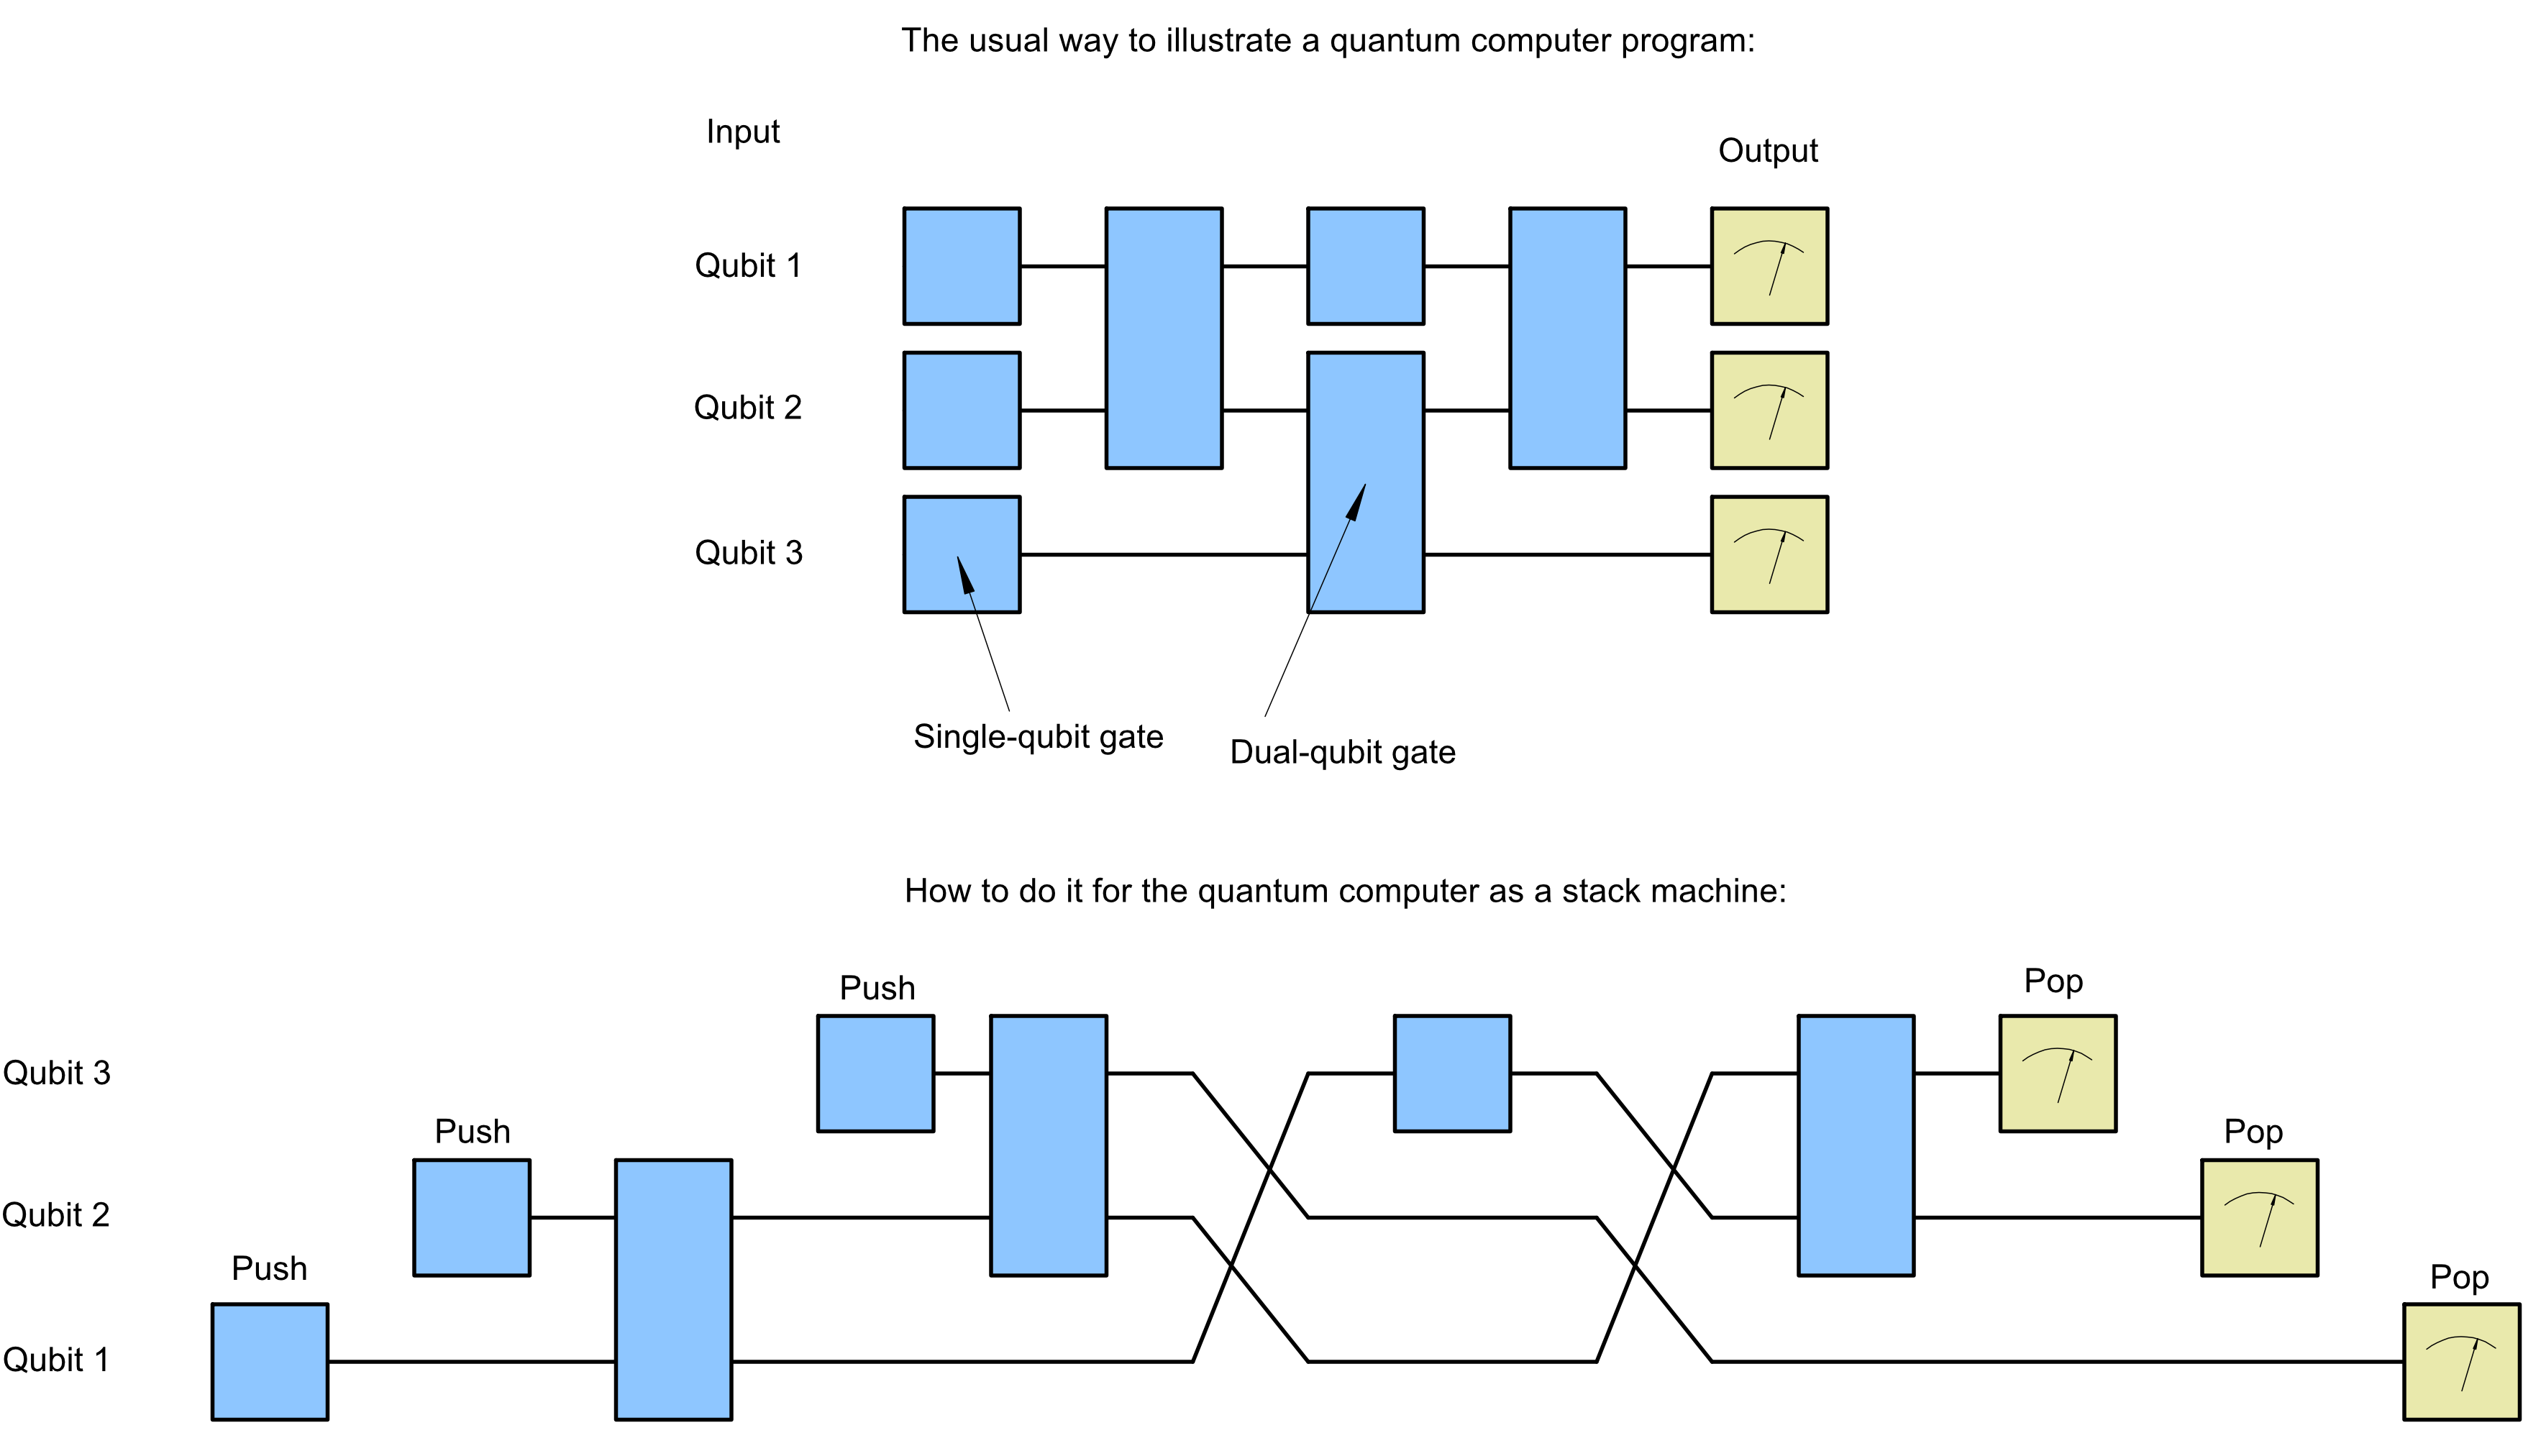

In [2]:
# Fig. 2: A quantum computer can be seen as a stack machine.
display.HTML(                                                                                                                          f'<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADbQAAAfpCAIAAAAMjPnFAAAF8WlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICAgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iCiAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIKICAgIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIKICAgIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIgogICAgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIKICAgeG1wOkNyZWF0b3JUb29sPSJNaWNyb3NvZnQ6IFByaW50IFRvIFBERiIKICAgeG1wOk1vZGlmeURhdGU9IjIwMjMtMTEtMDlUMTU6MDc6MzQrMDE6MDAiCiAgIHhtcDpNZXRhZGF0YURhdGU9IjIwMjMtMTEtMDlUMTU6MDc6MzQrMDE6MDAiCiAgIGV4aWY6UGl4ZWxYRGltZW5zaW9uPSIzNTA4IgogICBleGlmOlBpeGVsWURpbWVuc2lvbj0iMjAyNSIKICAgZXhpZjpDb2xvclNwYWNlPSIxIgogICB0aWZmOkltYWdlV2lkdGg9IjM1MDgiCiAgIHRpZmY6SW1hZ2VMZW5ndGg9IjIwMjUiCiAgIHRpZmY6UmVzb2x1dGlvblVuaXQ9IjIiCiAgIHRpZmY6WFJlc29sdXRpb249IjMwMC8xIgogICB0aWZmOllSZXNvbHV0aW9uPSIzMDAvMSIKICAgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIKICAgcGhvdG9zaG9wOklDQ1Byb2ZpbGU9InNSR0IgSUVDNjE5NjYtMi4xIj4KICAgPGRjOnRpdGxlPgogICAgPHJkZjpBbHQ+CiAgICAgPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5RQy1hcy1hLXN0YWNrbWFjaGluZS50Y3c8L3JkZjpsaT4KICAgIDwvcmRmOkFsdD4KICAgPC9kYzp0aXRsZT4KICAgPGRjOmNyZWF0b3I+CiAgICA8cmRmOlNlcT4KICAgICA8cmRmOmxpPk1hcnRpbjwvcmRmOmxpPgogICAgPC9yZGY6U2VxPgogICA8L2RjOmNyZWF0b3I+CiAgIDx4bXBNTTpIaXN0b3J5PgogICAgPHJkZjpTZXE+CiAgICAgPHJkZjpsaQogICAgICBzdEV2dDphY3Rpb249InByb2R1Y2VkIgogICAgICBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZmZpbml0eSBQaG90byAyIDIuMi4wIgogICAgICBzdEV2dDp3aGVuPSIyMDIzLTExLTA5VDE1OjA3OjM0KzAxOjAwIi8+CiAgICA8L3JkZjpTZXE+CiAgIDwveG1wTU06SGlzdG9yeT4KICA8L3JkZjpEZXNjcmlwdGlvbj4KIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9InIiPz7n/46mAAABgmlDQ1BzUkdCIElFQzYxOTY2LTIuMQAAKJF1kb9LQlEUxz9qYaVlUENDg4Q1ZfQDopYGpSyoBjXIatGXPwK1x3tKSGvQKhRELf0a6i+oNWgOgqIIorXmopaS13kZKJHncu753O+953DvuWANp5WMXtcPmWxOCwZ87vnIgtv+jINGWqjHFVV0dSY0EaamfdxhMeON16xV+9y/5liO6wpYGoTHFFXLCU8KT6/lVJO3hduVVHRZ+FS4V5MLCt+aeqzMLyYny/xlshYO+sHaKuxOVnGsipWUlhGWl+PJpPPK733Mlzjj2bmQxC7xTnSCBPDhZopx/AwzwKjMw3gZpE9W1Mjv/8mfZVVyFZlVCmiskCRFjl5R81I9LjEhelxGmoLZ/7991RNDg+XqTh/UPxnGWzfYt6BUNIzPQ8MoHYHtES6ylfzVAxh5F71Y0Tz74NqAs8uKFtuB803oeFCjWvRHsolbEwl4PYHmCLRdQ9NiuWe/+xzfQ3hdvuoKdvegR867lr4BDTxnvZqid3AAAAAJcEhZcwAALiMAAC4jAXilP3YAACAASURBVHic7N13QBRH3DfwPXpR1Kgo2EADigVBQIMaBBt2UFGMHSyxa+wae9QoxhKjBE2s2HuLigVFVFQ6UlSaAopIEQVpV/b9Y99nnnn27vZOihjy/fw1ezc3O7s3O3u6P34jYlmWAQAAAAAAAAAAAAAAAAAAAAAAAACoKTSquwMAAAAAAAAAAAAAAAAAAAAAAAAAAJUJwZEAAAAAAAAAAAAAAAAAAAAAAAAAUKMgOBIAAAAAAAAAAAAAAAAAAAAAAAAAahQERwIAAAAAAAAAAAAAAAAAAAAAAABAjYLgSAAAAAAAAAAAAAAAAAAAAAAAAACoURAcCQAAAAAAAAAAAAAAAAAAAAAAAAA1CoIjAQAAAAAAAAAAAAAAAAAAAAAAAKBGQXAkAAAAAAAAAAAAAAAAAAAAAAAAANQoCI4EAAAAAAAAAAAAAAAAAAAAAAAAgBoFwZEAAAAAAAAAAAAAAAAAAAAAAAAAUKMgOBIAAAAAAAAAAAAAAAAAAAAAAAAAahQERwIAAAAAAAAAAAAAAAAAAAAAAABAjYLgSAAAAAAAAAAAAAAAAAAAAAAAAACoURAcCQAAAAAAAAAAAAAAAAAAAAAAAAA1CoIjAQAAAAAAAAAAAAAAAAAAAAAAAKBGQXAkAAAAAAAAAAAAAAAAAAAAAAAAANQoCI4EAAAAAAAAAAAAAAAAAAAAAAAAgBoFwZEAAAAAAAAAAAAAAAAAAAAAAAAAUKMgOBIAAAAAAAAAAAAAAAAAAAAAAAAAahQERwIAAAAAAAAAAAAAAAAAAAAAAABAjYLgSAAAAAAAAAAAAAAAAAAAAAAAAACoURAcCQAAAAAAAAAAAAAAAAAAAAAAAAA1CoIjAQAAAAAAAAAAAAAAAAAAAAAAAKBGQXAkAAAAAAAAAAAAAAAAAAAAAAAAANQoCI4EAAAAAAAAAAAAAAAAAAAAAAAAgBoFwZEAAAAAAAAAAAAAAAAAAAAAAAAAUKMgOBIAAAAAAAAAAAAAAAAAAAAAAAAAahQERwIAAAAAAAAAAAAAAAAAAAAAAABAjYLgSAAAAAAAAAAAAAAAAAAAAAAAAACoURAcCQAAAAAAAAAAAAAAAAAAAAAAAAA1CoIjAQAAAAAAAAAAAAAAAAAAAAAAAKBGQXAkAAAAAAAAAAAAAAAAAAAAAAAAANQoCI4EAAAAAAAAAAAAAAAAAAAAAAAAgBoFwZEAAAAAAAAAAAAAAAAAAAAAAAAAUKMgOBIAAAAAAAAAAAAAAAAAAAAAAAAAahQERwIAAAAAAAAAAAAAAAAAAAAAAABAjYLgSAAAAAAAAAAAAAAAAAAAAAAAAACoUbSquwMAAAAAAAAAivXv3z8vL6+yWps+ffrEiRO5cnBw8MKFC7ly27ZtDxw4UFl7ga/W/fv3FyxYwJWtrKwOHjxYrd35r2BZViQSVXcv/teuXbv8/f258ujRo+fOnUu/m5eX179/f7L5+PFj3sd9fX0PHTrElT09PefPn1+Vna0SX9s3otC/opPwr4CxBP9GGLcAAAAAAAAAlQjBkQAAAAAAAPCVioiIePfuXWW15u7uTsr5+flPnjzhyizLVtYu4GtGf+kymax6O/MfERISsm3bttOnT1d3R/5Xeno6GQbdu3fnvSuRSMi7CmVkZJAKjo6OVdHDqiORSPz8/IqLixctWlTdfVFKLBbv3LlTR0dn9uzZ1d0X+HcTi8W7du3S0NDgxUADfM1kMtn+/ftfv369evXq6u4LAAAAAAAAQA2BZbUBAAAAAAAAAKAyZWdnT5o0qWvXrpGRkdXdF2AYhgkJCXFwcJg9e3Z+fn5190WpoKAgW1vbhQsXFhQUVHdf4N/t3r17nTp1mj9//sePH6u7LwDqioiI6Nq165QpU3Jycqq7LwAAAAAAAAA1BzJHAgAAAAAAAABApUlJSbG3t3///n11dwT+vz///HPGjBnV3QsVtm3bRha+B6iI7du3/xuXvIf/OH9//wkTJiCdOQAAAAAAAEClQ3AkAAAAAAAAfKVCQkKkUqlABRsbm6KiIq68aNGiKVOmCFSuX79+ZXYOAJTIy8v7aiMjDQ0NGzZsyJVr1apVvZ35YpKTk6u7C6olJSVVdxeghvhXDHgAntTUVERGAgAAAAAAAFQFBEcCAAAAAADAV6ply5bCFTQ1NUm5QYMGFhYWVdwjAPh3W7Vq1apVq6q7FwAAAAAAAAAAAADwJWhUdwcAAAAAAAAAAAAAAAAAAAAAAAAAACoTgiMBAAAAAAAAAAAAAAAAAAAAAAAAoEZBcCQAAAAAAAAA34cPHzIyMiQSSQXbYVn29evXpaWlldKrL4xl2ezs7Hfv3rEsW9194WNZNjMzMzc3t7o7Ug3EYvGrV6/+pYNKTTk5OXl5edXdi69UXl5eZmbml7wqs7OzP336pH59mUyWkZHx8ePHquuSPG6yLSkp+ZI7ZRimsLAwPT1dKpV+md2xLPvu3buMjIwvtsfPJZVK09LSCgsLK6tBsVicnp7+hYdT5ZJIJOnp6VlZWTKZTLgmd9t98+bNl7nAJRJJWlrahw8fKthOUVFRRkZGJfa5uLg4NTVVnS+9sg6BZdmcnJxXr15V/IdfdWFZ9u3bt0VFRZXSWn5+fsXPqkKFhYWpqamV0s/3799/1sxQVlaWlpZWKZOnWCxOS0urxNGSk5NTvffZkpKS1NTU/Px8lReyVCrNyMh4//59Ze0aAAAAAADgC9Cq7g4AAAAAAAAAfBXev3/v7+8fGhr65MmTFy9eMAyjoaHRokWLkSNHTpw4sU2bNmq2U1JScuLEicjIyKioqOjo6A8fPmhpaVlZWdnY2NjY2IwcObJp06YV721xcfGsWbPIpp+fn7a2tkD9w4cPBwUFcWU3N7chQ4YoqxkWFrZr166YmJikpKSCggKGYerXr9/2fwwZMsTMzEzZZ69cuXL+/Hmu/P3330+cOFGgSxKJ5McffySbO3fuNDQ0VFZZKpUGBARER0c/+x/cI+F69epZWlpaWFhYWlp6eXlVyrlVKDw83NfXlyvXq1fvt99+U1aTZdm5c+eSh9yjRo3q06ePssp379719/fnyr179/7hhx/k62RnZ1+5coU76ufPnycnJ0skEg0NjebNm1tYWFhYWNjZ2Y0fP15LS8F/8qxfvz41NZUrd+/e3cvLS+WRlpWVzZo1i0QP7Nixo3bt2io/xTDMy5cvf/nlF67D5MWsrKxJkyZxZS0trT179ij7+PXr18+fP5+QkJCQkJCTk8MwTNOmTa2tra2trZ2cnPr16ycSidTphrDTp09fv36dK/ft29fT07PibdKmT59eVlbGlTdv3tygQQOByhcvXrx06RJXdnZ2HjdunLKa8fHxO3fuDA8PT0pKys/PZximTp065Krs37+/lZWV/KdOnToVEBDAMMzjx4/Ji1euXHn79i1X7tq1K/l2Xr16tW7dOq7s7u4+ePBgsVi8bdu28+fPcx83MzObMGHCrFmz5A+qtLT0ypUrsbGxz58/50YpF/hibGzMDdE2bdpMnTq1Xr168p08cuTInTt3GIZ58OABefHs2bPJyclc2cXFZezYsQpPS2lp6cmTJyMiIrjJNj8/X1NTk0y2I0aMaN68ubJTWm5xcXF3794lE1FGRgbDMLq6ui1btuQO1tXVVeCSL5+CgoIDBw4cOnToxYsXXNyhpqamra3thAkTvLy8uJlz7ty53FsWFhZLly7ltbBz587o6GiuPGHCBCcnJ4HdJSYmbtq0iSsbGxv/+uuvApU/ffp0+fLl+Ph47oS8ePGCC902MTHhZuZ27dpNnjy5Vq1ayloIDAw8evQoV164cCE3mBMTE/fv33/q1KnU1FQuWMfCwqJTp06dOnWaNGlS/fr15ds5evRoYGAgwzAPHz4kL54/f/7ly5dcuUePHuPHj+fK8fHxW7du5cpNmzZdu3atwDEyDLN27dq0tDSuPG/evA4dOtDvFhQUzJs3jyv37NlzzJgxDMPk5eUdPHjwwIEDCQkJ3Iyqo6PTsWPH6dOn//DDD3p6euTjUqn08uXLe/bsCQoKKi4uZhimdu3abdq06d27988//yxwZywHqVR648aNffv2hYaGZmRkcPGaDRo0aNWqlaOj4+LFi01MTNRpJyUlxc/PLy4uLiEh4eXLlyzLGhkZcTO2jY3NmDFjDAwMBD5+7969Q4cOceUFCxa0bduWYZj4+Hg/P7/Tp0+TOcrIyKhPnz6zZ892cnKibwH5+fkHDx7cv39/fHw8d25NTEzatGkzZcqUUaNGKbtZ3L59+9ixY1x5zpw5HTt2ZBjm0qVLf/31161bt7jQai0tLTMzMycnp0WLFgn/8KNbs7e3nz59uvAZU3Z3uHz58oULFxiGiYyMpBsnk7OtrS39e48mlUrPnDkTGhoaHR0dFRWVk5OjoaFhaWnJzYHu7u6tW7cW6FJpaemMGTO4sqOj4+TJk1mW/euvv06ePBkUFCSVSk1MTDw8PBYsWNCiRQvho6NlZ2eTKYhcdLGxsbt37z5z5gx3f2cYxsTExNraes6cOf379xe4v9MXF9cay7K+vr6nT58ODg6WyWSmpqajRo366aefFP4CzM3N3bVrV3R0dHx8fFJSklQq1dfXb9euHTdWR48e3bBhQ/UP7eHDh9u3bw8LC0tLS5PJZAYGBg4ODo6Ojv369evRowfDMBEREbt37+Yqjxgxol+/fvTH09PT16xZw5W5n+K8+2yLFi3Gjx8/e/Zs+V6Vlpb+888/sbGx5Neg/H12ypQp33zzjbLO079jp0+fbm9vzzBMUlLSnj17Tpw4wd3LGIapVatWjx495syZ06dPH/p7KSws9Pf3//vvv2NiYrio0EaNGrVp02bcuHHe3t4C32BycvLGjRvJ5g8//NC7d2+BkwwAAAAAAFAlWAAAAAAAAIB/Jzpma/Pmzep/kAQkMQzj4ODAsmx4eLi5ubmyfztraGisX79eIpGobDkqKqp9+/YC/wyvW7fuyZMny3/M/4OX0ae4uFi4Ph2GuHbtWoV1EhMTnZ2dhf8bQVtbe/r06YWFhQpbWL9+PanJPWUXQKIEOHl5ecpqnjp1Sp3g1Nq1a/v6+kqlUoWNXL58mdS0t7cX7pu8t2/f0o9+09LSlNV8/vw53asxY8YINDt69GhS88KFC7x3P3z4sHDhQuEQE46dnV1UVJR8+1y0IsfU1FSdMcxFaXAcHR1V1ifCwsKEO6mrq6vwgy9evBg4cKDwZz08PLgkphW0ePFi0ub8+fN572ZlZdE7lf/4smXLyLtz586Vr6Cvr08qcEFdAlavXk0qT5s2TWGdzMxMlSdHJBKNHTs2JyeH99mFCxcKf5CLMuFERESQ19etW8eyLIlHoTk5OdG7kMlkvr6+6gQlN2rU6MyZM/IHSEJzlJk+fbrCM/P06VMutkkZIyOjI0eOCH8Fn+X58+fDhg1TeaQMw4wZMyY7O7uy9uvr61unTh1l+2rdunVERATLsiTWqnv37vKNDB48mHzkr7/+Et5jcHAwqfztt98qqyYWi318fNQJLTIzMwsICFDWzq5du0jN27dvSySSzZs3C4T7N2vW7OHDh/LtKAsgI6ZOnUoq37x5k7zeoUMH4RPCsqytrS2pf+3aNd677969I+/OmjWLZdmrV68KnBl7e3syoWVlZQmECpmZmd26dUtl99R05coV4Sg3fX39RYsWcdnjlCkoKFi+fLmOjo5AO5aWliEhIQKN/PXXX6TyzZs3xWLxqlWrBOKr5s2bR27uwcHBTZo0UVazf//+6enpCne6c+dOUu3y5csymUw+jJgQiUQjRowQOBV0ayNGjFB58pXdHUhUujLu7u4KG0xJSenevbvAB/X09Hbt2iWTyZR1ic7wOnbsWJZlSWAfzdTUVNkvK2UdI5/98ccfWZa9fv26wC8Za2vr8PBwZa3RFxd3CW/ZskW+kZYtW/KOVCwW79y5U2FQPtGwYcOzZ8+qc1BJSUndunUTaGrlypVSqZT8gRDDMD4+PrxGSIQ6wzBr1qxhWXb+/PnyTXXr1o3+lEwm8/PzU/M+e+rUKWXf+JkzZ0jN06dPS6VSHx8fhX9Xw/Hy8hKLxdxnw8LCWrZsqaxmjx49kpKSlJ06OlqdYZjff/9dnRMOAAAAAABQubCsNgAAAAAAAPynsSz7119/de3alSTYkyeTyVasWDFnzhyBdqRS6ZYtWzp37hwbGytQLT8/39PTc/z48VW0XmG5vXv3rl+/fnfv3hWuJhaL//zzz379+nFJJasay7KrV68eOXLks2fPVFYuKCiYMWPGwIED2SpYkLRRo0bfffcd2bxx44aymry3AgMDlfVHIpFcu3aNK+vr6/OyzWVlZTk7O//222/qrD4ZHh5ub29PslgREyZMIOEmb968Ufn9Mgxz+PBhUhbO/VlxLMuuW7euXbt2//zzj3DNM2fOtGvXjg47+C8oLCwcOHCgypPDsuyRI0ecnZ3pIJIKOn369I4dO+Rfp3NtSiQSLy+vGTNmkIxTArKysjw8PGbOnFnxvslksu3bt9vb29OBJvI+fvw4duzY0aNHV8rqnyEhId999925c+fUqXz06FErKytenHQ5yGSyBQsWzJgxQ+B+8fz58++//174VFSF4uLi4cOHL168mM4Uq8zLly9dXV3paGBlWJadNGnSkiVLxGKxsjrp6elOTk5//vnn5/X4Czpw4MCAAQMEzkxYWFjv3r0lEsnr16/t7Oxu3bqlrObLly/d3d0zMzMr2CWZTLZu3brBgwe/evVKoFpxcfGWLVvc3Nx4f71A3L59u3Xr1hs3blRWgfPixYtu3botXbqUSyOqsm+enp5cTLayOjt27Fi5ciXDMOfPn3d2dn79+rWymteuXZs4caLKnwFSqXTatGkkQ6o8lmVPnz7t7OzMC5r/GrAse/DgwY4dO96/f1+gWklJyaxZswYMGEAycQp78uSJwpj4kSNHamiU/ynSqVOnBg8eLPBLJiYmxtnZWZ3fJwzDBAcHKwxp5WUMjY+Pt7W1nTNnjvD8n52dPXz48LFjxwpXi4qK6tatG53eWN4vv/zi4eFBx5uqdPbs2W3btsm/PmrUKFKWSCSTJ0+eNm2amvfZkSNHqkxiyjAMy7JTpkxZvHixwMrgBw4c4P7hc+vWra5du9IxrzxBQUGenp5cGloAAAAAAICvE5bVBgAAAAAAgP+0yMjIqVOnks0OHTr07du3RYsWz58/DwwMTEhIIG/5+vq6u7srXC+VZdnx48fToWn6+vqjRo2ysbFp167dmzdvQkNDAwMD4+LiuHf9/f0TEhIeP35ckefNlai0tHTw4MFkHVsdHZ1Ro0b16NHDxMSkdu3aGRkZMTExfn5+5OHx/fv39+3bp/AheuXau3cvnVRJT0/vhx9+6Ny5s6mpqaGhYVpaWmpq6vnz5+mA1OvXr9+5c6dnz56V3pkhQ4aEhIRw5Rs3bpAlL3nohGQMw2RmZj5//lxh5suQkBBySl1dXem8SjKZzM3NjV5k09zcfPz48S1btjQxMSkpKUlNTX327Nnhw4fJ+t0SiWTlypWenp6amprkU82aNevduzfp0pEjR3r16iVwjHl5eSTFpp6e3siRIwUq8xgbG3PP0bOysk6ePMm9aGRkRCIs5RMUbdq0iRcv5ezs3KVLFy61Z2ho6MOHD0k4QnZ29rBhw44cOcItWVvjsSw7cuRIktBRU1Nz2LBhffv2NTExqVu37ps3b7glaEnUS2xs7LZt2+hYn+7du3MBTMHBwWQs2dvbd+3alSs7ODgo3PXz5899fHzkX+dmBrL5888/k4VxGYYxMjIaP368tbW1qamptrb2q1evUlJSjh8/Tgdj+fn5zZ8/v1WrVuQVZ2dnbmAEBgaSC9nR0ZH0jZcajWVZb29ver+6urqjRo2ytbVt377927dvnzx5cvfu3ZiYGO7d48ePJyQkhIaGCuTHUunNmzd9+/alo166d+/u5ubWtGlTY2Pj3Nzc1NTUJ0+enD17llTIycnx8fHZt29fuXfKMMzKlSvp0BljY+OpU6d269aNyxYZFBS0b9++oqKiT58+DRo0SJ0o6ko0c+ZMOgdzgwYNJkyYYGVlZWpqKhKJXr58mZyc7O/vTweW+fj4zJo1SzjT5JYtW7i14BmGadasWbdu3dq1ayeRSO7cuRMSEkIiJiUSycKFC0eNGkWnhevRowd3S71z587Tp0+5F7t06dKlSxeuTEZ+lXry5MmePXvIpq2tbb9+/WrVqvX06dNz586RmMKYmBhfX9/Dhw9zMU8GBgY9e/a0trauVavWnTt3goODuVWeGYYpLCz8+eef9+/fX5FerVq1asOGDWRTQ0Nj0KBB9vb2nTp1YhgmNjbWz8+PrD8eFBQ0derUAwcO8FI5hoWFubm5kZsOwzCWlpYuLi729vampqZRUVGhoaEBAQHcyuAymWzz5s3JycmnT58W7tv69etJslJdXV1nZ+eePXvm5eU9evQoKCiIVNu6dWuXLl3Gjh3LraPdrFmz77//3traOjc39+bNm1FRUaTm7du3L1265ObmJrDThQsXJiUlceWBAwe6u7s7OTmVlJTcv3//+PHjJOgwKirK2dk5MjKSXga9cnXu3Jm7dT5+/JhbW5lhGGtra5LJm7eGO8Mwy5cvp6d6TU3NkSNH2tnZdejQIT8//8mTJ8HBwU+ePOHevX79epcuXRISEoSzUOfm5o4YMUJhUPKECRPKeWwMc+PGjb1793KxqlZWVhMmTHB2dm7cuHFISMiNGzcOHDjAVSsoKOjXr9+DBw/s7OwEWnv79q2npyc3AHi4xbs5GRkZrq6udDShqalp7969HRwcvv32W+6OcOPGjdzcXO7do0ePPn36NCwsTGHC2uTk5B49enz8+JG8YmNj07t37y5duojF4kePHt28eZP7x8L58+d5vwAFvHjxYuvWrfKva2tr//DDD2Rz1apV9LVvZGQ0bty4jh07mpqa6ujovHz5Uv4+u3fv3vnz51taWgrs/Y8//iAXnba2tpOTU+/evQsKCkJDQ+lD2LNnj6ur68SJE7mJy8TExMnJydraurCw8NatW2FhYSQKOTw8/PDhw1X9FzUAAAAAAADl96VTVQIAAAAAAABUkkpZVptYtmzZ69ev6WplZWX0qsQMwwwdOlRhg35+fnQ1JyenxMREXh2xWLxo0SK62r59+z73kInKXVabTlvVpEkThcsBf/jwgY6rs7a2ll+5r3KX1c7Jyfnmm29IBQcHB4ULK0skkkOHDunq6pKa/fr1k69WwWW1WZaNj48nLdSrV0/hEtVlZWX0sOTs2rVLYYP0Es8HDx6k3yIRA5wNGzYo3F1WVhYvUvDUqVO8OnTMbu3atT99+iRwjL6+vqTyqFGjVJwRJUJDQ0kjrVq1UlaNlxCxTp06586dk6926NAhOqSjUaNG79+/L1/H2H/Vstp0yG/dunWjo6PlWygqKqIDWE1MTMgimLQFCxaQOsuXL1fYGXpZbcLFxcXPz+/58+f+/v6enp7e3t6k/rNnz+g4Ejc3t4KCAvlmS0pKfvvtN7rNGTNmKOwAnexqw4YNyk4aL0Ssa9euz54949WRSCTLly+nq/3555/KGlTH2LFjSVN6enrKljmOjIykF1/W0dF58+ZNuXcaFxdHB3R27Njx1atXvDrh4eGmpqa8b+0LLKv96NEjeo8TJ04sKiqSr8ZF9dE1V69eLV+NXlabo6+vv379+pKSEl5rvKj3bdu2Kew/naCUy0cor+qW1SbmzZvHGwChoaGNGzeWr+ni4pKSkkLXzM7OphexFYlEypaKVkd0dDQ9lkxMTO7evcurU1xczFvjnnc3ef/+faNGjegK8+fPLy0t5bUTGxvL+2OAq1evyneJXlabY2BgcOTIEfoOJZPJFK7yLBKJFi1axBtyN27coP8wwMHBQX6n9ELYpKktW7bIL8c8d+5cutr69euFW6vIstrE2rVrSQVucXaFrl69SvfN2tqai1GjyWSyrVu30idE4aWnMM2hra3tb7/9lpCQcO7cOW9v7759+6o8NB6FKQYHDRr08eNHXs0zZ87Q93dHR0f5H5YKLy4HB4ft27c/e/bs9OnTEyZMGDx4MKkvlUp5EZbDhw+XXx79zZs3PXr0oKtt3bpV4eHQkyfDMCtXruT9HisrK1P4x0LCy2oTzs7Of/755/Pnz48cOTJq1CgvLy9S/8WLF/T69QrPIcuyJSUlvAyU3Grm8mebt2sdHZ29e/fy7t2HDx9W+Idb06dP59UMCQmhf3srvFmwWFYbAAAAAAC+DgiOBAAAAAAAgH+rSgyO3L9/v7LKHh4epJqRkVFZWRmvwvv372vVqkXq9O3bVyqVKmvtyJEjpKaxsbH881o1VW5wJLdaJef48ePKGsnLy6OTfoWHh/MqVG5wJL2qr7GxcWZmpkBrvDBW+RDAigdHymSyb7/9ljTy6NEj+Tp0UBExbNgwhQ22bduWq6ChoZGTk0O/1bFjR/LxiRMnyocLECUlJXQkiqenJ69CUVFRnTp1SIUTJ04IHKOjoyOpef36dYGaAtQJjpRKpXQ2rKZNmyYnJytrMDY2lg6TFYgaUelfFBxJRwVt375dWSNFRUUWFhak5j///CNfp3zBkR4eHgIDjw4eatu2bWFhocCRent7k8qNGjVSWEed4MiPHz/Sg9nFxUVh0DDn1KlTpGb9+vXlZxg1ZWVl0fnz/P39BSonJCTQsSxcyrTyoYPR27Rpo+wMv379umnTpvQX9wWCI+nEZl27dpWPkCNkMtmgQYNIZYVhiPLBkVeuXFHYWl5eHj3dWVhYKKz2NQRHLlu2TGE78vF53bp1U/ibIS4ujp5Pbt++rbKTCslkMpI7k2GYli1bZmVlKawpkUhcXV1JzUGDBtHvrlq1iu72yZMnle2xoKCgd+/e9B7lY2d5wZEaGhoPHjxQuEcxsQAAIABJREFU2Jp8tuNNmzYprEn/ZqhVq5b89CV/8gUuZ3rtZgMDA/ng1GoJjhSLxS1atCDVOnToIPDz7/bt2yQoVk9P7+XLl7wK8sGRnTp1kv+V+7nkgyNHjx6tbK7m/WqS/0bkL66uXbsKzPwnTpygK69Zs0bZjUwsFk+ZMoUeM/LfMu+vOI4cOaJsv3v37uX1U53gyKFDhwrcZ3/66SdSs02bNgr/AoGYPHkyqdywYUP5CvLBkfJTGWf48OG8mkuWLFFY8+DBg6SOSCTiRbRzJBJJIaXiAwwAAAAAAKAcvorVuwAAAAAAAACq0aBBgwRWgqOXdf748aP8Q9+///6bPGCuU6fOvn37BBbLHjNmDIkUeffuHR1NWI3oh9P0c3eeevXqDRs2jGEYU1PT7t27k2W4q8jFixdJedKkSQoTbhFeXl70Jr0AYmURiURDhgwhmzdu3JCvQ16sVasWWRf4zp07MpmMVzM1NZWkonRycqpfvz556+XLl/QT9OXLl/PWNqXp6urSySN5UbMMw+jr69ORTHR4Lk9iYiJZN5xbg1JZzYq7ePEiWfeWYZi1a9fSadJ42rVrRycC9PX1DQ8Pr7q+fSXUvCr19fVHjx7NMIyxsbGjo+Pr168rZe8NGzb09fVVNvBYlqUvz59++snQ0FCgNfrylB+i6jtw4AD5eK1atfbv30+nRuMZMWIEN18xDJObm7tmzZry7ZQL1OPKZmZm3NlWpk2bNvTazeU+2FevXt2+fZtsLl++XNkZNjU15aXJrGpisZjOXbd48WI6HpRHJBLRobHqnJBBgwYNHDhQ4Vv16tWjv8ekpCTy1XxVmjVrRv/JAW3ixIm8y2rHjh0KfzO0bdu2Xbt2ZLPcN9z4+HiyWDPDMKtXrzY2NlZYU1NTk84/d/369ZycHK788ePH7du3k7cGDRpE56zlqVWr1u7du8m1mZKSQq8BrZCXl5eyRc8nTZpEb7Zq1Uphlj6GYUaMGEHKhYWF2dnZwjt1dHTkpV6mLV26lIRiFxUVHT58WLi1L+PcuXNkAWUtLa3Dhw8LrPfds2fPqVOncuWSkhL6bwMU0tHROXz4sMKlpStCV1d3y5Ytyubq7t2706HbdPpqhfT19Q8ePKisNfb/xphaWlr+/PPPym5kWlpav/32W4MGDbjNwsJCOhiR8/vvv9NdFZj/J0+e/N133wl3nqdBgwZ+fn5q3mfnzZtH/yGWvM+9zw4fPrxfv34K36LjLBmGady4MS8HMEFfdCzLvnz5Ur6OpqamIaXSBxgAAAAAAIA6EBwJAAAAAAAA/3UeHh4CwWdt2rShnz2/f/+eV8Hf35+UFy1axEviJY+OmdizZ8/XENvRvHlzUqZXYZbn4+Pz6dOn169fBwcH089Eq8Ls2bN//fXXyZMnu7i48GIf5ZmYmNBfU1UERzIM4+bmRsoBAQHyFUg2MmdnZ7Ji4/v37+XTBdHpiNzd3em39PT09u3bt3z5ck9PTy8vLzovoEJ0WKHCA6fP3vXr15WFjNAjefz48QJhZxVHZ29t06bN+PHjhevPnDmzWbNmXFkmkwmEeNYYvKtSYKJYtGhRQUFBVlbWw4cP6TxYFTFp0iQ6TSyPRCLZuHHjL7/8MnHiRBcXF09PT+HW6CFaUlIiFovL1yt6iM6fP9/MzEy4Pj3Z7t27Vz5GWR329va7du366aefhgwZsmDBAoHYd47K61Ed9AVibm5OxzfL8/b2btKkSfl2VA5lZWW7du1as2bNuHHjXF1dBwwYIFz/c0/Ihg0bBN41NzcnZVbJusDVbuDAgXSaQFrt2rXpxal79uxpb2+vrB3650S5gyPpsWRpaSkc3du2bVt7e/sGDRp069ZtwoQJJGnf3bt3CwoKuLJIJBL+jrgd0UGNhw4dEq5Pp+jmadWqFb05Z84ceiVfWqNGjejVw1WesbVr1wr89qtTpw4dhXnlyhXh1r4Meg708vKysbERrr9ixQpSPnXqlPwvWNqgQYPoeNzK8uOPP5qamgpUoJOSPnr0SDiqdfjw4QI/ipKTkxMSEsjmL7/8Qg8JeUZGRvQpOnPmDD2lfPz48c6dO2Rzw4YNAgNGJBJt3LhRYF/yvL29lUUqMwwjlUrXr1/P3WednZ1HjRol3Bp9pZSVlZWWlgrXV/+imzZtGp2qn2ZgYEAn9q7qP5oCAAAAAAAoN6F/HAIAAAAAAAD8F7Ru3VrgXZFIZGZm9uzZM24zLy+Pflcmk7148YJsqpNsr1OnTnp6eiUlJQzDcCFNwjkRvwBXV1eSFWnXrl25ubnbtm1T2CsjI6Mv1quhQ4eqX1lDQ6N+/fokbV5FstMJ6Nq16zfffMONgUePHn348IFe5Pf9+/dPnjzhyr169aKz/QUGBtKrsjL/N9KCjrlkGKZx48Z0rjWVSN4jRknskYODQ9u2bblElRKJ5NSpU/SysxyZTEZHXUyYMEH9DnwulmXprHjz5s0TDl9gGEZPT2/27Nkk8RW5HmswV1dXHx8frnzmzJmBAwf6+voqDAcUztpYPpaWlgLvamtrC4fr8dBDlGGYjx8/0qlS1cSyLP29qzPZWltb16pViwt2KSkpycjIoENO1WRtbW1tba1+fZXXozouX75MymPGjBG+QHR1dWfNmkWv+V6lDA0Nx44dq3593glhWVY4wIheOFseHRzJMMyHDx+URe1UI14neZo0afL27VuuLHyhkYhwpgI3NTo4cvLkySon2/v378tHH9Izdt++fdW5IhYvXkwWGn716lVRUZGBgYGyygJnjBf4K3DGNDU1TU1N09LSuE3hM2Ztba1yDvHy8iJpCB89evTu3TuBULYv43PnQBMTk1atWpGQtcTExM6dOyurLDway23hwoXCFezt7du3bx8bG8swDMuyV69eFfgFItxJeqC2aNFCIP6PmDZt2ooVK0hM5IsXLzp16sSVAwICSCi/paWlk5OTcFMuLi5WVlZ0dKYw4WPR0tKqyH32w4cPwsO1Ui46hmGaNWtG/mVURb+9AQAAAAAAKg6ZIwEAAAAAAOC/Tjg4kmEYOs8TSZ7EycjI4MIcGYbR19cnj1QFaGlpdezYkWwmJiZ+Rl+rRp8+feholePHj5uamnbu3HnNmjVPnjwpX7q1L4Bl2YyMjEuXLq1du9bd3T0rK4u8VVZWVhV71NLSIuu9SqXSwMBA+l16+exevXo5OjqSt3g1CwsLSToiGxsblQnw5InF4ujo6IMHD86ZM2fJkiXkdYUHLhKJ6OSRR48ela9z//59sh5ily5dhOOTKigzMzM9PZ1sqpmqiu7S8+fPK79bX5lu3brRsUTXrl0zNzfv2LHjsmXLgoODJRJJle5dZb5SlViWTU5OPnPmzM8//0yvmsqU9/LMysoi8Ss6Ojpk2XoBGhoadFBy1U22BQUF9+/f/+OPP7y8vOjrq9wTER0CJbDiPFEV+d4qQiaTPX/+/MSJE4sXL6ZXLpbJZFKpVOCDpqamAot0MwzToEED+rqooiTBFST8ldH9Fw6jrJRQPC7mTJ2OcRTmZXz06BEpqznYzM3N6a9S4OoTiUT03xLw8EIqK+uMdejQQSBIl9OkSROSQZllWfpMVguxWJyamko2v//+e3U+Rf8uFZ4DKz7ty6tTp47KfOoMw9C/guQzbdOEO0kPVCsrK5WJfhmG0dXVpa8L+tdFeHi4mvslvv32W3WqfVabAliWTUlJ4e6zgwYNot9SefcRuJR4F53wvFHtEcMAAAAAAADqQOZIAAAAAAAA+E9r2LBhvXr1hOsIPEGnnzSXlpaqmXeHDuNLTExU8wl31WnYsOGSJUs2bdpEXmFZNjQ0NDQ0dO3atSYmJm5ubu7u7i4uLsJhK1WttLT0xYsXsbGx0dHRkZGREREROTk5X7gPbm5uJMPijRs36PSWN27c4ArGxsbt27cXiUStW7fmHrTfu3dPLBZra2tzFW7dukWeW/PW1FYmNzc3Li4uNjY2MjIyMjLy6dOnnxV3NXbs2KVLl3JhSSEhIcnJybxlE0nqUIZhJk6cqH7L5UCPf0ZuAUdl6Af5L1++LC4uVrZwbc2gq6u7ceNGel1XhmFiYmJiYmI2bdpUv379wYMHu7u79+3btyrOw2dFeHCKiooSEhLi4uKioqIiIiKioqIqN4kUPdlKJBIrKyt1PkXWBeZa6NWrV8V7wrJsenp6XFzc06dPIyIiIiMjExMTBdY9L0f79DWiTrbLcmTErFwFBQXx8fFxcXHcBBUdHV2+Ba8FguQ4IpGoVq1aRUVF3KZwqGV1EQ7go9G5IeWpE9olrKioiP4iyj1O6AGp5oytoaHRokULctk+e/aM/rMQmqmpqZ6enpo9qawzps5RaGlpNWnShKSi5N25vryXL1/SA97R0VFlfCfDMLm5uaT85YMjW7VqpU4n6ZEpfJ6FO1mOgcowjLm5eUxMDFemA9NJhlf1W1P/2mcqfJ/lJtvy3WcNDQ0bNmyoZuWqnqYAAAAAAAC+AARHAgAAAAAAwH9aBWNK6CfNMpmM5N4rXwvVaMOGDSzLbtmyRT5PZGZmpp+fn5+fn5GR0YABA4YOHerh4fEln4bm5eX5+fkdOXLkxYsX1R4K07dvXx0dHS4wMSAggF4i9ubNm1yhV69e3Iu9e/fmgiMLCwvDwsJILkl6TW3h4MiIiIitW7cGBgbSD+nLoXHjxgMGDCBr9R49enTVqlXk3eLi4tOnT3NlXV1dT0/PiuxLJTpezcDAQM1l5enMUizLJiUldejQodL79lWZM2dOaWnpypUr5QNhc3NzDx48ePDgQQMDA1dXV3d391GjRlVW7LKhoSGdLlfY69evd+7cefbs2ZSUlEoMEJRX7ZOtVCq9dOnSrl27QkNDeSmEK9eHDx/ob1xlvCBTfcGRKSkp27dvv3z58qtXryqlQTVng6+c+gFSKhe5riB6smUqME6ys7NJ+bNizshFJ5Du97PiySrrjKmTRJNhmObNm389wZG8GawcF92LFy8E3i1HrJ5K6p9nUhY+z8KdLPdAJWV6oNK/u9QcpeonAjcwMDAxMVGz8ps3b3bu3HnmzJnKus+am5urE7TKqeppCgAAAAAA4AvA33UBAAAAAADAf1oFg/zKEaDDQ567Vy8NDY1NmzaFh4fPnj1bWZKYjx8/njhxwtPTc8iQIfn5+V+gVxKJZOHChc2bN//5558TEhIURkbq6Oh069Zt8eLFtWvX/gJdql27ds+ePblyampqcnIyV05OTk5JSeHKvXv35hUYhrl9+zZXkMlk//zzD1c2MzOztrZWuKOEhIRevXrZ2dkdO3ZMWWSksbHx0KFDx48fr07P6ZW1jxw5Qj9fv3TpElmd1t3dXWUu1Qr69OkTKdevX1/NJ/SGhob0eq+Vm5Xw6yQSiRYvXhwTE7No0SJlESFFRUXnz5+fMGFCz549KxhBSxgZGanzpRQUFHh5eZmbm/v4+CQnJyuM2DA0NOzZs+fSpUsr3qvqnWwvXrxoZWU1bNiwwMBAZZGRlpaWXl5eTk5O5d4LRywW05t16tRR+ZG6devyFkKtatnZ2SNHjrSwsNi1a5eyIC0jIyNXV1de9lNhNSMJWVVPoep7//49vVm/fv1yNMKyLEnVyTBMgwYN1PzgN998Q8oCM3a1nC4147/p3xX0nataVHwOTE9PF3jXyMiogu3Lq/TzLNxJ+rMVH6j0sFfzh4r683Dt2rXVabOwsNDb29vMzGzz5s3K7rMGBgY9e/ZctmyZmrtmGKZu3brqVwYAAAAAAKgB8FdfAAAAAAAAAOVnbGxMypaWlmPHjv3cFtq3b1/xbqhMJFNcXKxOOzY2Njt37vz9998jIiLOnz9/4cKFuLg4+Wr//POPg4PDxYsX27ZtW3VdYln2xx9/3L9/v/xb9evX7/Y/7OzsuBU5Dx06VKXp3Ag3N7fr169z5YCAAC5qjaSNZBiGLN3r7OysoaHBJeMMDAxcsWIFwzAREREkiM3d3V3h0/H09PS+fftmZGTIv2VlZdW9e3fu2LkFK69evUoviq3MwIEDGzRowC1EnpiYGBoa2rlzZ+4t+uMTJkxQ2VQFNWnShJTfvXsnk8nUiYjKyckpLS0lm/Sl93WqrKuydevWPj4+mzdvjo+P567K8PBw+WoPHjyws7M7e/bsd999V57ufqaysrLhw4fTw54wNTUlQ7Rjx45aWlpFRUWbNm2q4B7pb7xVq1blGKhqrsQt7/r16x4eHhKJhPe6tra2vb09d6Rdu3blerhgwYJ79+6Vb0ecBg0aGBkZkXjlt2/fqlz/VCwWqzmcmMoYmYWFhQMHDgwNDZV/q0WLFuTbb9eunaam5qtXr3bs2KFm36qFOpnY1D+9X5WmTZvSm1lZWfT0qyaRSGRqavrmzRtuU/0gbPoW9rXN2LywUWXoQxCI81M5hCQSiXwC4M9Fn0NjY+NZs2Z9bgtfPsVs5Z5nlZo0aZKQkMCVyzdQ6cm2VatWwcHBXFnN2PrK/XsnsVjs4eEREBAg/5apqSk3zXbv3p27z5aWlv7666+VuHcAAAAAAICaBMGRAAAAAAAAAOVnaWlJb65cubJaulFUVKSvry9QgSQ4VIdIJLKzs7Ozs1u/fn1iYuLZs2dPnz4dERFB10lKSho9enRkZKSyzDd0xp3ydWnVqlV0ZGS9evWGDh3KPQy2tLTk7besrIwL++PILw5eiQYNGjR9+nSuHBAQMHPmTIYKjmzVqhVZBrdu3boODg6PHz9mGObhw4fFxcX6+voq19R+//59v3796Kf1HTt27N+/PxeARac44mRmZpKywIHr6OiMHTuWRCkdPXqUC47Mzs4mj95NTEz69OmjxjmokNatW5NyaWnp69evlSUrpfGy06kMF6t2Fb8EaCKRqF27du3atVuxYkVaWtq5c+dOnz798OFDus6bN29GjBiRnJxcWetrK8OyrLe3Nx0ZaWpq6u7uzl2ezZs3512e9BBlynt50pOtVCr9YpNtWFgYLzKyf//+PXr06Natm729PReZTVPzehQgEoksLCxICGxKSorKFeRfv36t/lqrFRyZEolk5MiRdGSkubn5kCFDuAlKPvauUr79KqXyhEilUpIY+N+FF2ibkZFRjuBIhmFat25NgiPVn7joTIdf24ytZhZGOtWiwCLIKodQWlqawtTXn4WeAwsLC5cvX66pqVnBNqta5Z5nlVq3bn3r1i2uXPGBamFhobCOgEoMjmRZdvLkyXRkpKmpqZubG3efbdGiRVXcZwEAAAAAAGqqmrBSCQAAAAAAAEB1oZ9VJyYmFhYWfpn98p6Iq1xiOCkpqXw7srCwWLp0aXh4eFJS0qZNm+jERdHR0ffv31fWqwp2qbCwkE41165du7CwsH379nl7e7du3Vo+IjMpKYmOPCgpKRHee0U0bdrUzs6OK9+5c6esrEwmk929e5d7hV5Km94sLS3lQtlIcCSX/1K+/ZMnT8bHx5PNuXPnhoWF/frrr4MGDZKPjGQYhuRJYlQdOL2y9oULF7hoqn/++YecunHjxmlpVflf0tatW5dODaVm1BEdHKmlpfV1LgpZiZeAgObNm8+bN+/Bgwfp6ek7duwwMzMjb2VkZFy8eLF8zarv+fPnR48eJZs9evSIjo7evXv36NGj5SM2mP87RJnyXp70ZPvy5Us1E5JV3ObNm8lSrXp6ekePHr169eqSJUu6d+8uHxnJfM71KIAOyklNTVVZX9nC1kQljsyQkJBr166RzcGDB0dFRe3YsWPEiBEKA+8q5duvdJ91Ql6/fl3xtH/Vggu0JZvCqypzsrOzg4ODMzIy6OAqOqJdzRm7rKyMxFMyX1/mSHUuq4KCgvz8fLLJC9r7rCGUmJj4mR1UgEtTzSkqKqqUNquaOueZ+b8xhRUMjiRl9QOa6fmTHqjlCI5UORWrLykpic7q/f3330dFRfn6+o4ZM8bMzKyK7rMAAAAAAAA1FYIjAQAAAAAAAMrP3NycPCBnWTYqKkqdT8XGxr569Up+kVb1GRgY0EFswg/mCwoKsrKyhBssLS2NjY19+vSpsgqtWrVasmRJYGCgtrY2eZGO4WMYho5Xq2D8zcOHD+nzc/ny5ZYtWwrU5z0VruolUN3c3LhCYWFhSEjI06dP8/LyuFfImtocOlby9u3bb968IQnhBg8erDASkcRZMgzTo0ePHTt2CAcs0scufODW1tadOnXiymlpadxwpWPpvsCa2hw6gkHNqyY6OpqU5VOHfiXUvwRYllUZHCkWi589e8ZL2kpr2rTp3Llzg4KC6P3yrsqqQA9RfX39q1evNmjQQKB+pVyezZo109XVJZuRkZHqfCouLq4iky3LsvTBLl++fPTo0QL1pVLps2fPyGa5JyI6KEedC0RljrRKnJzpE9KoUaPz588bGRkJ1P/Ck7OaeCdEOO9mueOYvwZ0RJ06B3LixAknJ6dmzZrp6+vPnj2be7FNmzakgpozdlxcHB1eyUuzXe3o61SZ2NhYUq5Xrx4vgWslXlNqMjAwoLMsC9waaC9evEhJSamu6N7MzEyVJ4e705FNZ2fncu+OHqixsbFisVjlRz58+EAHPtIDlS7Hxsa+fv1auKm8vDw1rw510DOtnp7etWvXhNOvfp0zLQAAAAAAwFcCwZEAAAAAAAAA5aetrd2qVSuyuXfvXpUfycrK6tKli5mZmZ6enrm5+dWrV8uxX5FIVK9ePbJJFs1USPip/Pnz5y0sLAwMDDp06DB58mTh/bZr187e3p5sZmdn0++q3yVGVSIl+qlw27Ztzc3NhVvjBYRV9VPhIUOGkHJAQADprUgkcnFxoWs6OjqSFc9v375Nf90K19TmBWMNGjRIZWfoJ+IqF/fkJY8sLi6+ceMGt9m5c+e2bduq3J1KdD4tZQs7WllZkfLWrVtVpjjKz8/ftWsX2Rw+fHjF+lhV1L8E3r59S/IRygsKCrKysjIwMLCysho6dKhw5Fbz5s3pUce7Khn1vpHPQg/Rnj17GhgYCNfnBW0oHKUqO6mpqUmHDKoz2ebk5Hz33XfcZGtmZlaOnJrx8fE5OTlkU+X1+OrVK3owq7welbGxsSHlY8eOCS/VyrLs7t27hRusosm5f//+Khf2/cKTM6PegKdPiEQiEZ6C/hUp+pShgyP37t2rMlyM3KTKysrI7Z6OOQsKCnrw4IHK/W7YsIGU27dv/7UFRwYHB6uMY/Px8SHlwYMH038ZwlTqNcVRZ9zSf1ewd+9e4VsDwzDFxcUuLi6tWrXS09Nr1qzZ/v37VXaj0qmcnQ4fPvzu3Tuu3LBhQ4UZtdVED9TMzMxDhw6p/MjWrVtLS0u5soGBgaurK3mrffv25EdRWVnZ5s2bhZv67bffCgoKPrvTStAzrYuLi6GhoXD9Lz/TAgAAAAAA/IsgOBIAAAAAAACgQkaOHEnK/v7+9ONMhTZt2sRFzEil0vfv3zs5OZVvv3TWosePHwvUFH483L59+6SkJO5J/JMnT+h1MBWiV5nkxSzSXUpMTMzNzVXWSG5u7uXLlwX2Qqe6rFOnjnCXPn78yHvkX9VPha2trVu0aMGVAwIC7ty5w5VtbGx4KfR0dXXJVxwWFkYWI9bX1+/Tp498yxKJhCShZNQ49kuXLtHLVhYXFwtHS4wePVpHR4crX7hwITAwkMRvVVbayMaNG5MyfSy0H374gZTT09P9/PyE29y2bRu9jPKIESMq1seqUrlXJZfvMC0tjc6aqZDAVcmo9418FhLIwqgxRNPS0s6dO0e/ovDypDupbOqgJ9uTJ0/evHlTeNdbtmwpLCxkGEYqlebm5pYjIRl9pIwaB/v777/Tm+WeiNzc3GxtbbmyWCzeuHGjQOWLFy+qzKPJG5kCs8Tjx495waw8n/Xtx8XF3bp1i37lC4TsqDPg6RPCCF6tMpmMXtz2X4cOJU9NTT127JhA5dTUVHI709TUHDx4MFd2dnZu1KgRqbZ8+XLhG01ERMTZs2fJ5tc5Y69bt07g3ejo6AsXLpDNoUOH8irQQygjIyMjI0NZUwUFBfTZUEadcUvPgUFBQUeOHBFu08/Pj/tRx7JsZmYmncr6i9m6datA8KhYLKbjaIcMGaIy3lpAs2bN6NjKtWvXCsc9Z2dnb9++nWwOGjSIjvXX1NSkB8nevXsFkke+e/du586d5ey3Ip/1MzgjI4M3xhAcCQAAAAAAQENwJAAAAAAAAECFzJ49m17sdfr06W/fvlVW+eLFi3/88QfZnDRpUq1atcq3X7I+MsMwu3fvpkPHaNeuXaP3KM/CwoJOBunt7S2VSpVVDgkJoeNm6A8yDGNtbU2eapeUlNCPnGmlpaVTp06l87HJI4FBDMNERkbKJ8MjxGLxtGnT6FURmQokbFOTSCQiySMjIiJu377NlXlranNIOIJMJiOxs66urgrz7Wlra7dv355sCod/JScnT5kyhfciyYGk0DfffEPWBI+JidmxYwdX1tHRGTVqlMAH1WdsbEyGwYcPHxR+F05OTvTgWb9+PVltXF5wcDA9lrp06UKfoq8KfVUeOHBAWSDFo0eP1q5dK9BO/fr1+/XrRzanTJkiEOGRkJDw8OFDsung4MCr0KRJE1JWGf2sDvryDA4OFuhbYWHhuHHjeMuqKgzaUKeTM2bMoK+aGTNmCBzO1atXt23bRjYnTpyoMr5EXseOHelN4evxwoULvOCYcoenaGpqkmuTYZj9+/eTDK887969W758ucoG6ZH59OnTK1euKKyWlZU1adIk4bg3OqtlYGCgwP0iLy9v7NixvBmpqidnRr2xVKdOnZYtW5LNX3/9VeGBsCy7ceNG+vr617G1te3RowfZXLdunbJ5SSKRjBs3jnxfPXr0+Oabb7iyrq7unDlzSM179+7t3LlT2Th59+7d9OnTyaaent6YMWMqeBRV4fz588ouhA8fPpAlxRmGsbGxkc8a26ZNG5IWWiaTKUsrKBaLZ82aJRA6Sagzbseky4h7AAAgAElEQVSNG0dHqS5YsEAgNXhISMiKFSvI5tChQ5s3b66yG5UuLy9v2bJlCnNhsiy7Zs0a8gceOjo6ixcvruDuFi5cSMoZGRkLFizg/sxAXnFx8YwZM7gAeo78D6phw4aR+11paWnPnj2fPn0q31R8fLyzs7NANuhy4N1nBe4mnz59Gj9+PP03EswXmWnVVFxc/IxSKX+hAQAAAAAA8LkQHAkAAAAAAABQIcbGxr/++ivZfPbsWYcOHeiEQxypVHrw4EFPT08SgVG7dm366fvnmjFjBimnpaUNGDCAziDIsuyzZ89Wrlw5aNAglQvp0kstBwQEeHl5ZWZmylcLDg6mkycNHjyYXuGRYRgTExO6woYNG3x8fMrKysgr3CLOLi4uvExy8uhQnpKSknHjxil80Pvq1auePXseP36c9/oXSJlDr6xNHq4rTMuk8EWFa2pz6GM/ffr0gQMH5OuwLHvmzBk7OzteZjvmM1fWJknd3NzcSBxMBWlqatIZsGbNmpWYmFhSUpKenk5eFIlEu3fvJquU5ubmdu3a1c/Pjxdtw7Lsli1bXFxcyBk2NDT09/cXiUSV0tVKR4cE5efn9+nTh7fSZUpKio+PT48ePVSuJE5/TWFhYSNGjKAvcCIiImLIkCEknsnBweH777/n1TE1NSXl69evHzp0KDc398OHD/KDR030EE1PT585c6bCtXpjYmI6d+5879493usKhyjdyQsXLhw/fvz9+/f5+fl0YHT9+vXpCKSkpKQOHTqcOXOG15RUKj1y5Mjw4cNJTIyhoeHcuXPVPTzKN998Y2ZmRjYXL16sMDKmpKRk9erVw4YN471ekfAUJycnDw8PriwWi/v37799+3beBRIeHm5nZyec6JHTv39/kuyWYZhRo0ZdvHiRbi0vL+/EiRP29vZxcXHCTfHiLJcvX67wFhMSEtKpUyf5lYu/wORMj6VLly4dO3YsLy+PN5ZEIhF9td64ccPb25uOLpJKpY8ePRo7duzKlSurusNVbdu2bWSyTUlJsbW1JQH9xJs3bzw9Pcl62fr6+rw/b5g7d267du3I5rx588aMGSO/iPCDBw9sbW2fPHlC771Vq1aVdSyVa8iQIZs2beJdVs+ePevcuXNwcDC3KRKJ9uzZo6WlxftsvXr16BTIu3btWr16NT2xl5aWBgYGurq6qpl5lB63wcHBfn5+2dnZHz9+pDMI6unp7dq1i2xmZ2fb2Nj89ddf8rfOS5cuDRgwgExB2traFY87LDdfX183NzdelPynT588PT3ptLjLly+v+PLrQ4YMoSNZfX19e/bsKR9smpiY+N1339G3j1mzZsn/WhOJRHRiyxcvXnTp0sXHxycsLKysrKysrCw8PPy3335zcHBQZx7+LPRM+/r16xkzZii8zz59+rRz584k4Svx9WSOjIqKsqKoTHcKAAAAAABQFfj/qgcAAAAAAACAzzVv3ryHDx+Sh6w5OTlDhw61t7e3s7OztbUViURJSUmXLl16/vw5+Yient7ly5fpsJvP9f3337dv3z42NpbbfPTokaWlZb9+/Vq3bp2fn3/jxg06Fm3x4sU+Pj7Kmpo2bdrNmzdJQKe/v/+ZM2c8PDwsLCzMzMyKiorS0tIePHgQFBREPlKnTp1NmzbJNzVz5kz6YfOSJUt2797t4uJiamoaFhZ27949EsXVsmXLTp06yQc2cRwdHQcMGHD16lVuMyAgwMLCYs6cOe3btzc1Nc3JyXn58uWFCxeuX7/OxeXo6upaWFiQs8HLoFMVnJycjIyM6MUitbW1u3fvLl/T2tq6QYMGdKZMDQ0N+TRUxJIlS06cOEFSEHl7ex87dmzMmDHm5uaGhoYZGRlxcXGHDh1KTEzkKlhaWmZmZpIglfz8fOEwx759+5qamvJiBSZOnCh8vJ+lSZMmJDnZgQMHSHxndnY2WXa8c+fOO3bsmDlzJrdZVlY2ffr0nTt3du7c2cHBQSaThYaGPnr0iBwm588//7SwsKjErlau1q1b9+7dm4ScJiQktG/fvk+fPm3bti0pKbl582ZycjKpvGTJEmXJxhiGGTp06NSpU/fu3cttXrlyJSAgYOjQoVZWVubm5mKxOC0tLSws7Nq1a+Qjurq6O3bskI8cpROSSSQS8l336tWLt+SxmoYPH75lyxay2Pf+/fvv378/a9YsS0tLY2Pjt2/fpqSknDx5kkQX1alTp2HDhiTDmcLLk+5kWVnZ6NGjufKQIUMuXrxI3po5c2ZISAhZGjgvL2/EiBF2dnZ2dnY2NjZaWlpJSUlXrlyhY1J1dHQuXrz47bffluNIGYZZv3792LFjufLHjx9tbW29vb179erFfQvp6ekhISH+/v4kd6+9vX1YWJjAkarPx8cnKCiIC+mTyWTz58//+++/u3fv3rlz5/T09IcPHwYFBdHR5wI0NTWnT5++dOlSbrOoqMjd3d3GxqZLly5GRkZBQUGhoaEkvqpfv35v3ryJiYlR2JS3t/fOnTtJsl4fH5+AgIBp06Z9++239evXf/36dVJS0rFjx0JDQ7kKxsbGurq65H70BSZn3lgiaQsHDhxIZwr08vJasWIFuSUdPnz4woULAwYMMDc3T0xMvHXrFumqvr7+pEmT6KC0f5dOnTpt3bqVpH7Mzs7u27evo6Ojvb29jY1NTk5OXFzc2bNn6UjHv//+29ramm7E0NDw9OnTjo6OJMTt+PHjt27d6tq1q729fZMmTSIjI0NDQ0NDQ+kcnEOHDp02bVrVH2I5sSy7bNmyI0eOdO/e3cHBISMj4+HDh7wsfUuXLu3cubPCj8+cOXP//v1kc926dX///XevXr2aNm0aFRV19+5d0o6pqamLi8vRo0cFOkOPW5Zlp0+fzsXvOjg40MGmHh4e8+fPJ2lxP336NHXq1J07dzo4ONja2hoaGiYnJwcEBNDJmEUikb+/v3xS4S/pypUrlpaWzs7Ojo6OGhoa3PRF51m3t7cnE1RFaGhoHDp0yMHBISUlhXslODi4TZs2jo6ODg4OFhYW8fHx3K8L+lvu2LGjsh/J/fv3X7Fixfr167nN4uLiJUuWMAyjo6MjEonozLhNmjQxMDAgP1rkA2o/y7Bhw2xsbEh8+cGDBx88eDBr1qzWrVuT++ypU6fInx8YGRk1atSI7P0LzLQAAAAAAAD/JiwAAAAAAADAv1Pt2rXJP283b96s/gcvXbpEPujg4KCyvrOzM6l/4sQJhXWkUun27dvJGovCNDU1L126pH6HlXn8+HGzZs1U7m716tV0qNDatWvlmyooKOAtICtAX1//3r17Crskk8mWLVumsoUGDRokJCTQibvy8vJ4TWVlZdHLRwro3bv3ixcvLl++TF6xsbHhtUa/a29vX/GTz7Isbx1qJycnZTU9PT3pms7OzsItHzx4UJ0D19HRWbt2bUlJCZ2wk1vtVBgvBKFx48Zisfizj185ZUEG8sPm+vXrdESIgHr16l2+fLmCHaNTZ82fP5/3Lp2gi1H0n2b02J47d67CXcTHx7dp00bl4UybNi03N5felG+qrKyMnnyEaWlpnT9/XmGXysrKunTpIv8RExMTUiciIkLh68rEx8erOd398MMPmZmZv//+O3ll2LBh8g0WFxfT6zUT3377La+mVCr9448/FK5KL09DQ+Ps2bMqD0fYuHHj1NmXiYnJ6dOnJRJJ3bp1yYuxsbEV2XVGRoZ8KlAeS0tLOvta9+7dFTb18eNHgYS1hK2t7YcPH0jSMvnzz7JsSEiIpqamOudk6tSpeXl59Nq+P/74I681OujQw8ND5TkxNjYm9WNiYuQrlJSU0EnXCHNzc17No0ePqhxI2tra58+fp+fka9eu8drhJWGVyWQC/ae/0FOnTgnUpFPWKZwiPsvFixfpUydg6dKlyhp59eqVwlzICi1ZsqSsrExhO3/99RepNnjwYIFu8xbhLS0tFahMRzHKf030qvf9+/d3c3MT7r9IJNq6davwt7lhwwYNDRVrc9WpUyciIoKLqOOkpqbKNyWTyVxcXOQ/bmhoyOuDTCbz9/evV6+e8H4JLiuzPHpFaYZhCgsLBY5UfSQqkWEYfX39rVu3qjxFgwcPVrb3z7q4iPfv36v/Jx+enp4fPnwQaE0mk/3yyy/CwY7Ozs5ZWVndunUjr+zbt4/XDvmLAoZhGjVqpPIonj17puadztPT882bN/Rc6ubmxmuN/mMkZbcJgm48KytLoKarqyupeezYMfkKDx8+pFv7/fffVR44AAAAAABApcOy2gAAAAAAAACVQENDY968eVFRUV27dhWoJhKJPD09o6OjBw8eXPGddu7cOTIyUiAHYb169c6cObNmzRqVTdWqVSswMHDlypV16tQRrunm5hYXF6csXkckEm3cuPHatWskQaC8Pn36xMTEqAwgMzY2vnfvHr16tcI6R44cuXHjhoWFhbOzM1k5NCoqSuXisBXH65tAyAjvLZUhSuPHjz9+/Hjz5s0F6vTs2fPp06erVq3S1dWlH06rs2QhL2hg7NixFUxxxLNw4cKffvpJ/nXeGtMMw7i6usbGxgoHMWhqarq5uQkP9a+HlZVVaGioQDidgYHB33//7evrq3JxcG1t7cuXL2/atKlhw4bCNV1cXKKjo5WNK21t7atXr7Zv3573emZmJsl3+LmsrKyCgoLoQBB5LVu2vH79+rFjxxo3bkwP0StXrsjvV09PLyAgQH5N1ZSUFN7yoBoaGrNmzYqJiVEZNejh4REZGSm/2vXn2rNnz9q1awWCVEQi0axZsxISEjw8PDQ1NenrXThXnEpNmjQJDAwUSKjWq1cvLm2wyqZq16597ty533//ncyT8mbOnPngwQMjIyPhpr777rtbt24pDGYl2v8/9u48Purq3h//TIIQNgUEwhKSSEBARAVRgQqKuIOAVXjQilcti7ZY2lJRW1G7cRFrb6X6bW1dqrXWi0tTrKIFxVIWRaKgIHtksywRWWUP5PfH3Pv5zU3IJJCEgU+ezz98nPOZM2feM5nPJ4N5zTlnnz179uzf//73DRs2vPLKK4PjL730UjlXuzxmtWrVeuutt9q1a1fs+Jo1a4IVeWO++c1v5uXllTw1Au3atXv//ffLEyo98fXv33/RokWJE4FdunSZPXv2hAkTShuQmZk5bdq03/72t3Xr1k0wzznnnPP6668/9NBDCd5syRU7HRLsmd6+ffspU6aMGTMm8YX6xz/+8YwZM5o3b17agIsvvvjjjz/u3LlzmSVFo9EpU6aUXN9x9+7d8QuBx0YOHTp08eLFZf5OvPrqq997773bb7+9zEevItFodMyYMVOnTi3ts2WDBg1++tOf5ubmJn5HHa0GDRr88Y9/fO2115o1a5ZgWFZW1u9///sXX3wx8UUvGo2OGzduwYIF3/jGN1q3bl3s1latWv3oRz+aPn1606ZN41cTj0/JH5t27dr961//Svyb7owzznjzzTf/+7//u3nz5vFX2qlTpxYLFgMAAFRnttUGAADgZPWjH/0o2M8ucUanmDPPPPPBBx+Mtcuzat0tt9xyySWXxNodO3ZMPPO//vWv6dOnL1q0aPHixZ9++mksote6devWrVu3adNm+PDhiWc4Wqeffvprr702bdq0efPm5eXlzZ8/f/Pmzc2bN2/Tps03vvGNIUOGxP4627hx4+ApB8+lmEaNGv3sZz8bM2bMH/7wh48++mjdunXr1q3bsGFDjRo10tPTMzMzYystderUqcyqrr766sWLF7/55puxkhYuXJiamtqqVavu3bvfdtttPXv2jC0j1Ldv32Ahq7S0tJLznHnmmVOmTHn33Xf/9Kc/5efn5+fnb9y4sVWrVp06derUqdM555xz1VVXBVtI16tXb9KkScHif/E7hEb+7w+9RYsWZT6F8rj22muDOSORSLHlIeP17ds3fuSgQYMSzxyNRocMGTJgwIDf/e53c+fOXbVqVX5+/oEDB84666zYc+/Spctll10WhDb69++/cePG4O779u074usZaNeu3ZlnnrlixYpY95Zbbklcz9GKLbg1ZMiQvLy8vLy8pUuXNmnSJCsr64gRrliI4dvf/va8efM++eST2Llz4MCBzMzMrKys3r1733bbbeVcXbJMl19+ebDeYffu3YvdWrdu3fgfU0l9+vSpWbNmrN2tW7fShtWrV++5554bNmzY3LlzY6fA+vXr09PTW7duPWjQoJtuuin2tk9LSwsermvXrqVNdc8993z3u999+umn33///dhZGduyPD09PSMj44orrhgwYEDXrl0TJ3gaNWo0Z86c9957b/78+Xl5eV988UVmZmZmZubBgwdjA5o1axYUE78obwIXXHDBrFmzXn311b/97W+x03PLli05OTmd/lffvn2DVzu2umFwxS4oKCi57FnTpk3nzZsXFPnll19mZWVlZmbu27ev5CqVOTk5//znP99+++1PPvkkuNgWFRWdccYZsYvtsGHDynOxKo/atWs/8MADw4cPf/TRRxcvXpyfn7969eratWsHz7RXr17xAbvvf//7wXW+4m/dGjVqTJgwYciQITNnzpw3b968efPWr19/wQUX9OrVq1evXn369Cl//iwajY4ePfrKK6985513Yu/MpUuX1q9fv1WrVtdcc80tt9wSlD1y5MjYJSW4wBZz6aWX5uXlvfDCC2+99VbsArV9+/YzzzwzuDhfe+21QWHdunWLP7MKCgoyMjKC7gUXXBDcetZZZ5X5LO66664g41jaUohNmjSZN29e7ATMy8vbsmVL7L20f//+YhmsDh06zJs3b+rUqbF3XV5e3t69e1u2bHnOOef8x3/8R79+/WrVqhWJRM4999ygyJJbtNepUyfxpSPebbfddtlll5Xn+fbs2bPMS8RRadq0aW5u7syZM/Py8j755JOPP/546dKlp556aocOHTp06NCzZ89vfvObZa4JGo1Gv/3tb/fr12/GjBmLFi2KXbQ3bdrUvHnzrKysc845Z9iwYRdccEHiK1KXLl2Cp1Yyxhov/joZiUQSlzd8+PBrrrkm1i75YyomJSXlZz/72YABA2bMmDF79uzZs2fv2bMnJyenffv2t95667XXXlvmeocxl1xyySeffBJ84FmwYEEkEsnIyLjoootuvfXW3r17x2q+/PLLg9/LpcXm6tevP2PGjPfeey/2Vox94MnMzDzii9miRYvXXnvtX//614IFCz799NPFixfHfnVmZ2fHPnPefPPNCX5PRSKRU045Jf61rboka+xbEP/4xz9ir/Nnn32WlZXVpk2bvn37Dhs2rF69egnue1QnVzHXXXfdp59+Om3atEX/a82aNY0bN87Kymrfvv3NN998+eWXl3MR3EgkcvbZZ//lL3+JRCJbt2798MMPFy1a1Lp164suuig+GhtsOh+JRErmQdPT04PnkvhZB84///yZM2fm5ubm5ubm5+evWrWq2O/Za6+9Ngjut2nTZsKECfv27Yt1CwoK4i/gHTp0CB498XdvIpFI/GueOLc6dOjQ4G12xKB5RkZG/GxHXMcaAACgqkWL/u8i+QAAAEAlOnToUEpKSplLxFWWoqKiQ4cOVeIqgIWFhampqRWsvxJfhMLCwspd4/BkUVRUdPjw4fL/FT+xdevWZWdnx/6nUI8ePebMmVMp01aWw4cPRyKRcgZTTgqV+74tLCxMSUk5AV+f5J6ex/Ntc5wv7CUfvdil4NVXX73xxhtj7YsvvnjWrFnlnKoSf2ThuDiH7+KTWMn30rE5KX76jz322OjRo2PtwYMHT548Of7WyvrRJ/HiULmfE47Z6tWrg+UV69SpU2y51kjlveuOQVW/URs2bLh9+/ZYe/78+ZWSaS7mpDjXAAAATjT+HQUAAABV6Dj/ATgajVbuH00rZbZKfBGq7Z+Eo9FoJb6MTz75ZPB12TvvvLOypq0s4UsmnYBnZVVIbmHH822T3PjRiXlFPWHflkclfBefxCrrvRSCn35l/eiTeHGo3M8JVSeJRR7tG/Xxxx/Pyck588wzs7Kyyrzv3r17g221U1JSyly79NiE4FwDAAA4/vxTCgAAAKAaOXjw4FNPPRVrp6en33DDDcmtBwDgRDNp0qRVq1ZFIpGaNWuuWLEiKysrweA///nPsfVHI5HIhRdeWNrm6QAAABx/1eu7sAAAAADV3J/+9KdNmzbF2iNGjKhZs2Zy6wEAONF06dIl1jhw4MCrr76aYOTWrVsnTpwYdK+88sqqrQwAAICjIRwJAAAAEFqHDx8OdtA+ePDgc889d/vtt8e6qampQRsAgMD5558ftMeNGzdr1qwjDisoKLjmmmvy8/Nj3dq1aw8dOvR41AcAAED52FYbAAAAILSWL1/evXv3du3apaamLliwYN++fcFNI0aMyMjISGJtAAAnppEjRz799NMrVqyIRCJ79+7t1avXtddee9NNN2VnZzdv3vyLL75Yv37922+//eyzz8Z/uPr1r3/dtm3b5FUNAABAccKRAAAAAKGVmZm5Y8eODz74oNjxXr16TZo0KSklAQCc4Bo0aDBlypSLLrpo586dsSNTp06dOnVqgruMGTNm5MiRx6U6AAAAysu22gAAAAChVbdu3dNPP73YwdatW7/66qs1a9ZMSkkAACe+9u3bT506tVu3bmWObNiwYW5u7q9+9atoNHocCgMAAKD8rBwJAAAAEGY9evR44403Dh8+HIlEotHo9ddfP3HixMaNGye7LqByNGnSpHfv3rF2p06dklsMnJgyMjKC06Rjx47JLSbE0tLSgtc5LS0tucVUiq997Wtz586dOXPmI4888uGHH27atCn+1ho1avTu3fuWW265/vrr69Spk6wiAQAASCBaVFSU7BoAAAAAqEJ79uxZtGhRampq69atGzVqlOxyAABOPnv37l23bt2///3vRo0atWjRonHjxikp9mcDAAA4oQlHAgAAAAAAAAAAAKHiO20AAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChUiPZBQAAQDW1evXqIUOGBN0nnniic+fOSaznxFFUVBSNRpNdBQAAAAAAAHASE44EAIDk2Lt37wcffBB0d+3alcRiThzz5s2bOHHiX//612QXAgAAAAAAAJzEbKsNAACcELZs2TJixIhu3bp9+OGHya4FAAAAAAAAOLlZORIAAEi+tWvXdunSZevWrckuBAAAAAAAAAgDK0cCAADJt23bNslIAAAAAAAAoLIIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAHCy2r9//9q1a3fv3l3xqQ4dOrRhw4aNGzcWFRVVfDYAAAAAAACA5KqR7AIAAIBS5ebmvv7667H2z3/+8xYtWkQikU8++eSZZ5559dVXP//880gkkpKS0r59+86dO3ft2nX48OH16tUrbbYnnnhi/vz5sfZvfvObunXrHjhw4Omnn3722Wc//PDDQ4cORSKROnXqtG7d+vrrr//ud7/bpEmTBLXddddd27Zti7Xvv//+7OzsBIPfeeedv/zlL7H2BRdccMcdd21fXG4AACAASURBVMTa69ev/8lPfhKJRL788stg8JYtW4YNGxZrR6PRp556KsHMAAAAAAAAACVFLQwDAABJsWTJko4dOwbdmTNn9urVq9iYcePGjR8/Phifk5PzwAMPPPzww6V9jG/fvv3LL7989tlnH/HWIUOGTJ48OdbeunVrzZo1b7jhhn/84x9HHFy7du0xY8b87Gc/S0k58nrzrVq1iqUzI5FIXl7e+eeff+TnGYlEIpHHHnts9OjRsfbgwYODMj7++OPzzjsvwR1TUlJiqU0AAAAAAACA8rOtNgAAnBwKCwsHDhw4ceLEBF9wWrZs2YUXXvjyyy+XOdu2bduuuOKK0pKRkUhk796948ePHzp06MGDB4+xYgAAAAAAAIAksa02AACcHMaOHRtkGXNycrp3796xY8ddu3bNmDFj/vz5wfKKe/fuHT169IABA2rWrJlgtquuumrVqlWRSCQ1NXXYsGF9+vTp3r372rVrZ8+e/eSTT3722WexYS+++GJKSsqf//znKnpSjRs3jq0o+cUXX7z44ouxg/Xq1fvWt74Va0ej0Sp6aAAAAAAAACDEhCMBAODkEEtGnnbaab/4xS/uuOOOGjX+/w/zW7du7dOnz8KFC2PdTZs2/fWvfx0yZEiC2WLJyFNPPfWll1666qqrYgdbtWp18cUXjxgxYvDgwTNmzIgdfOGFF4YNG9a7d++qeFItW7acNGlSJBJZuHBhEI5s1KhR7CAAAAAAAADAsbGtNgAAnDSi0ejbb7995513xicjI5FIo0aN/v73v7do0SI48rvf/a7M2WrXrj137twgGRk4/fTT33rrrfg05Pe+973CwsKK1Q4AAAAAAABw/AhHAgDASWP48OFdu3Y94k0ZGRljx44NurGFIRMbNWpUx44dj3jTKaecMn78+KC7aNGiOXPmHGWxAAAAAAAAAEkjHAkAACeNX/ziFwluPeOMM4L2jh07Ek9Vp06d+DBlSd27d7/88suD7uuvv16+GgEAAAAAAACSTzgSAABODk2aNGnatGmCAfHhyN27dyfeCPuWW25JPFskErntttuC9t///vfylQkAAAAAAACQfMKRAABwcsjKyko8IDs7O767a9euBIM7depU5iPGT7h8+fJ9+/aVeRcAAAAAAACAE4FwJAAAnBzKDEfWq1cvvnvo0KEEg3Nycsp8xMzMzPhuQUFBmXcBAAAAAAAAOBEIRwIAwMmhWbNmlThb69atyxzTvHnz1NTUoLt58+ZKLAAAAAAAAACg6ghHAgDAySElpTI/vaenp5c5JjU1tW7dukF39+7dlVgAAAAAAAAAQNURjgQAgOpo27ZtZY7ZtWvXzp07g26CPGVRUVHiqfbu3Vv+2gAAAAAAAAAqSDgSAACqozVr1pQ5Zv369fHd5s2blzZyz549iafKz88vX10AAAAAAAAAlUA4EgAAqqPVq1eXOWbdunVBOy0t7bTTTou/NTU1NWjv2LEj8VSrVq06ygIBAAAAAAAAjp1wJAAAVEfLli0rc8zixYuD9qWXXhqNRuNvbdCgQdAWjgQAAAAAAABOKDWSXQAAAJAEzzzzzLhx4+rWrVvagP3790+aNCnoXn/99cUGNGzYMGjv3LkzwWPt27ev2A7dJcWvQ3n48OHEgwEAAIAKOnz48IIFC6ZOnbps2bKCgoKCgoKDBw9m/6927dpdffXVtWrVSnaZAAAAx044EgAAqqOCgoInnnjihz/8YWkDnnnmmc8//zzWjkaj/fv3LzYgfuXIefPmfec73yltqueff76oqChxPc2aNQvaW7duLSoqKrZQJQAAAFApvvzyy4ceeuj555/fvHlzsZuWLl0atJs2bTpy5Mjbb789IyPj+BZY3KxZs3r27JncGipiz549S5Ys6dq1a7ILAQCAase22gAAUE1NnDhxxYoVR7xp+fLlP//5z4Pu7bffHh9ejOnSpUvQnjx5cmkbZy9atOjuu+8us5jGjRufcsopsfaePXsSL0UJAAAAHIODBw9OnDgxJyfnkUceKZmMLKagoOAXv/hFdnb2rbfe+tVXXx2fCotZs2bNwIEDBw0alJRHrxSvvfZax44dJ0+enOxCAACgOhKOBACAauqLL7648MIL33jjjWLH33jjjQsvvHDjxo2xbnp6+oQJE0reffjw4TVq/M9S9Pv37+/Tp89HH30UP2D9+vWPPfZY9+7dt2/fXmYx0Wi0RYsWQfe73/3uypUr9+3bt27dujJXnQQAAADKtGPHjn79+t177707duw44oC0tLSSBw8dOvTcc8/16NFj9erVVVzg/3HgwIHx48efddZZU6ZMOZ6PW4nWrFlz3XXXDRgwYM2aNcmuBQAAqinbagMAQPW1Y8eO6667rkePHt27d+/YsePixYvnzp37/vvvB3nE1NTUJ554In4H7UDz5s2//vWvv/TSS7HuunXrzj///N69e3fq1KmoqGj69OnLli0LBo8dO/aRRx5JHHNs2bLl2rVrY+3nn3/++eefj7U3btxYct1KAAAAoPw+//zza665ZvHixfEHmzdv3q9fv/POO+/cc8/t1KlT/fr1CwoKPvvss7y8vMcffzx+u4lFixZ17dr1pZde6tOnz/Ep+LPPPhs3btzxeawq8uSTT77++uvJrgIAAKo14UgAAKiORo8e/c4773z66adFRUVz5syZM2dOyTGnnnrqK6+8csUVV5Q2ycSJE1euXLlgwYLgyLvvvvvuu+8WGzZ48OCHHnrokUceSVzSoEGD5s6dW/L4kiVLhCMBAADgmO3bt2/AgAHFkpEjRox4+OGHi30fMj09PT09vXv37qNGjZo6derYsWODrz5u3bq1b9++CxcubN++/fErHQAAoAJsqw0AANVRTk7Oe++9179//9IG9OnTZ86cOQmSkZFIJDs7e+7cuaNGjSptQM2aNX/961+/+OKLKSll/9Pj+9///t13313y+JIlS8q8LwAAAFCaH/7whx999FHQPeOMM955550//OEPR9wpIiYlJaVfv37vvffeZZddFhzcv3//LbfcUlhYWLXlAgAAVBIrRwIAQHI0adLkwQcfDLpZWVklx1x22WU1avzPh/aLLroo8YTRaDR+wjp16iQeX79+/dzc3OnTp8+ePXv27Nnz5s2rWbNm27ZtzznnnFGjRnXp0qU8zyItLe3xxx8fOnTorFmz8vLy5s+fv3r16iZNmmRnZ99www1Dhw5t2bJlbOSDDz4Y21a7Y8eOpc320EMP3XjjjXl5eXl5eUuWLGnSpElmZqYVKQAAAOCYvfnmm7/97W+D7tlnnz137tz69euX574NGjR48803hw4d+vLLL8eOfPDBBw8//PCPf/zjKqkVAACgUkVjf54EAABCb8iQIZMnT461J02aNHr06PhbDx06lJKSEo1GK/gohYWFQaATAAAASK6LL754zpw5sfZpp502f/78tm3bHtUM27dv79Chw6ZNm2LdU045ZenSpTk5OZVc6P+1bNmyDh06xNrp6enBo59E7rvvvv/8z/+Mte+6665f/vKXya0HAACqIX+zBAAAIpFIJDU1tVLmkYwEAACAE8ScOXOCZGQkErn33nuPNhkZiUQaNGjwm9/8ZvDgwbHuwYMHX3jhhQceeKDYsI0bNwY7bjdt2rRWrVoJ5vzqq6+2bdsWa6elpTVp0iSYPJaD3LhxYzD40KFD69evD7oZGRnBdzuD47Vq1WratGmsvW3bttzc3BUrVmzatKlRo0Y5OTkdOnS49NJLU1JSEpS0f//+goKCWDs1NbVFixYJBkcikYKCgv3798fap59+erCDx44dO3bu3BmJRGL/jdm5c2dQap06dU4//fTEkwMAAJXCypEAAFBdJF45EgAAAAiZb37zmy+++GKsXbt27fXr1x9bLK+oqKhbt24ffPBBrNu+ffslS5YU232iTZs2+fn5sfbs2bO/9rWvJZjwD3/4w+233x5r9+/ff8qUKbF2/IKRpTl48GDwzczU1NTDhw9HIpE+ffq8/fbbRUVF9913369+9asDBw4Uu1e7du3Gjh17880316xZ84jTvv/++927d4+1zzjjjM8++yxxGb169Zo1a1as/fLLL994442x9rhx48aPH5/gjkOGDAl+KAAAQJVK9AUpAAAAAAAA4GRUVFQ0Y8aMoDtw4MBjXrAwGo0G4b9IJLJs2bKPP/64ovVVtsLCwmHDhk2YMKFkMjISiSxfvnz48OHXXHPNrl27jn9tAABAUghHAgAAAAAAQNisXLly8+bNQfess86qyGwDBw6M77700ksVma3S7du3b9CgQX/84x9j3Zo1a15yySXDhg0799xz41e4nDFjxmWXXfbll18mqUwAAOC4Eo4EAAAAAACAsAk2fY5p06ZNRWZr27Zt27Ztg+7y5csrMluCR9m6devWrVvff//94GCTJk22xklNTS15xzlz5vztb3+LtX/+859v3779n//851NPPbVw4cIvvvjiuuuuC0bm5eWNGTOmKoqPue+++2J1/uAHPwgO3nnnnUH9Tz75ZNU9OgAAEE84EgAAAAAAAMImPz8/vpuTk1PBCbOzs4P2v//97wrOdkSpqakNGzZs2LDhaaedFhxMSUlpGCd+Jchi0tLSXnrppXHjxtWuXTs4ePrpp+fm5o4dOzY48qc//WnevHlVUX8kEqldu3aszvga0tLSgvrr1atXRQ8NAAAUIxwJAAAAAAAAYbNly5b4bgVXjoxEIs2aNQvaGzZsqOBsVeGnP/3poEGDSh5PTU2dOHFily5dgiM/+tGPjmNdAABActRIdgEAAMBx0rFjx969e8faGRkZyS0GAAAAqFLx4cjYmoUVnDA9PT1ob9y48fDhwykpJ9A6LI0bN/7Od75T2q3RaPSBBx4YOHBgrDtz5swtW7Y0btz4eFUHAAAkgXAkAABUF/fff//999+f7CoAAACA42Hbtm1BOysrq+ITxu8HXVhYuHv37vr161d82spy9913J96xun///h07dvz0008jkcjhw4ffeuutoUOHHq/qAACAJDiBvs4FAAAAAAAAVIratWsH7b1791Z8wjVr1sRPnjiJePwFq0KWJhqNXnjhhUF3+vTpVVwRAACQZMKRAAAAAAAAEDbxq0Xm5+cfPHiwghOuWrUqaLds2TIajVZwwkqUkpJSntUxMzMzg/bnn39elRUBAADJJxwJAAAAAAAAYRMfFiwsLIyPNh6b+BkyMjIqOFvlatWqVc2aNcscFh+O3LRpU1VWBAAAJJ9wJAAAAAAAAIRNsZUUly5dWpHZdu3aFZ8mbNmyZUVmq3TZ2dnlGRaf6SwoKKiqagAAgBODcCQAAAAAAACETbdu3eK7FQxH5ufnx3fPO++8isxWVFRUkbuXVKNGjfIM27VrV9CuW7duRR6x0p8CAABQ6YQjAQAAAAAAIGzOOOOMHj16BN2ZM2dWZLbp06cH7Wg0OmTIkASDCwsLE8+2cePGihRT0vr168szbN26dUG7WbNmpQ0rs/5IFTwFAACg0glHAgAAAAAAQAjddNNNQXv69OmffPLJsc1TWFj4+OOPB93evXvH709d0s6dOxNPuGrVqmOrpDRr1qw5fPhwmcPiM5TNmzcvbViZ9R88eHDNmjXlrg4AAEgO4UgAAAAAAAAIocGDB8fvN/2Tn/zk2DaDfu655+LXXBw6dGjJMXXq1AnaO3bsSDxhpYcjDxw4sGnTpjKHxT+LM888M/6m+Pp37tyZOGq5du3aQ4cOHX2ZAADAcSUcCQAAAAAAACHUuHHjO+64I+jm5uY++eSTRzvJihUrvve978XP+fWvf73ksIYNGwbtMldeXLly5dGWUaZp06YlHrB9+/a333476A4YMCD+1vj6i4qKvvrqqwRTVUX9AABApROOBAAAAAAAgHCaMGFC69atg+7o0aNfeeWV8t992bJlAwcO3L17d3Dk6aefPu2000qOjA8Xbt68OcGca9eu3bp1a+LHPfXUU4P23r17y1Pq+PHjCwsLEwyYNGlSsKRls2bNunXrFn9rfP2Rsp7CRx99VGY9x/AUAACAyiUcCQAAAAAAAOFUr169Z555Juju379/0KBBw4YNS7wyYiQSKSoqeuqpp84///ylS5cGB0eMGNG/f/8jjk9PTw/aL7zwQmnbUhcVFf3gBz8os+ymTZumpPzP3zF37txZnnDhqlWrXnjhhdJu3b59+6OPPhp0hw4dGswfU7du3fidtf/85z+XNtWGDRsefvjhMutp2bJl0C7Plt8AAEClE44EAAAAAACA0Lrkkkvuvffe+CPPPPNM586d33///aKioiPeZcuWLYMGDRoxYsSePXuCg23atPmv//qv0h5lyJAhQTs/P/+ee+4pOfn+/ftHjhyZm5tbZs01atRo1qxZ0J0zZ06Zd4lEIqNGjXr11VdLHl+9enWvXr22b98e67Zo0eL+++8vNiYajcY/hUceeWTu3Lklp1q+fHmfPn3K3Dc89ihBe8GCBWWmUQEAgEoXLe3fPAAAAAAAAEAIFBUVPfbYYz/4wQ+KLejYtGnTLl26dO7cuUuXLvXr11/wv1auXFlshh49ekyePDkjIyPBQ3Ts2DF+mclrrrlm7Nix5557biQSeeedd6ZNm/bWW299/vnnkUikRYsWmzdvPnToUCQS6d+//5QpU0pOeMEFF+Tl5cXa9evX79u3b1ZW1hdffDFp0qR69erFjqemppZcovKHP/zhTTfd1KlTp9TU1LVr17777rt33XVX/Eber7zyyg033FDyET/88MOuXbsG3Tp16owePfrmm29u3br1mjVrpk2bNm3atBkzZsSWsczKylq7dm1s5Msvv3zjjTcWm2358uXt27cPuu3atbv88stPOeWUVq1ajRkzprSXEQAAqETCkQAAAAAAABB+06ZNGzx48I4dO472jmPGjHnooYdOOeWUxMOeffbZ2267rczZ6tatO3v27O7du+/bty9Sejhy0KBBr7zySsnj8+fPDyKM8eHItm3bxmc669atW79+/ZL7WT/00EN33313NBo9Ym2XX375O++8U+ZT6NWr18iRI4cOHRrrHjEc+dVXXzVs2LCwsLDY8fbt28dHSAEAgKpjW20AAAAAAAAIvyuvvDIvL+9b3/pWrVq1ynmX8847729/+9uvfvWrMpORkUjk1ltvzc3NbdCgQYIxLVu2fPPNN88777wyZ3v00Uezs7NLHl+yZMkRx7/55pvx+2Lv3r27WDKyVq1akydPvueee0pLRkYikddff33UqFGJC+vXr19ubm6Zr2G9evWef/75ko+1cuXKAwcOJL4vAABQKYQjAQAAAAAAoFpo06bN008/vX79+vHjx7ds2bK0YfXq1Rs5cuT8+fM/+uijAQMGlH/+gQMHLliwoG/fvvXr1y92U/369e+4446PP/64Z8+e5ZmqZcuW06dP79evX3p6evzxZcuWHXF8nTp1/vKXv/zyl79s06ZNsZtOPfXUsWPHrlq1avDgwYkfNC0t7fHHH3/55Zc7deqUklL8D6nt2rX7/e9//9prrzVq1Kg8T2HIkCHPPvts9+7d09LSgoOHDh1atWpVee4OAABUkG21AQAAAAAAoNo5fPjw5s2bV69evXr16jVr1uzevTsrKysrKys7Ozs7Ozs+z3dsk69YsSIvL2/FihXp6elZWVmXXXZZnTp1jmGqoqKiDRs2LF68uHHjxpmZmY0bNw6WY4zfVnvDhg3NmzePtTdt2jRnzpxFixZlZGS0bdu2c+fOp5566tE+7u7duxcuXJiXl7djx45WrVqdffbZXbt2TbDqZAKFhYVLlizZtGlTZmZmq1at6tatewyTAAAAR0s4EgAAAAAAADj5lBaOBAAAiNhWGwAAAAAAAAAAAAgZ4UgAAAAAAAAAAAAgVIQjAQAAAAAAAAAAgFARjgQAAAAAAAAAAABCRTgSAAAAAAAAAAAACBXhSAAAAAAAAAAAACBUhCMBAAAAAAAAAACAUKmR7AIAAAAAAAAAjtq7774btBs1apTESgAAgBNQtKioKNk1AAAAAAAAAAAAAFQa22oDAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKsKRAAAAAAAAAAAAQKgIRwIAAAAAAAAAAAChIhwJAAAAAAAAAAAAhIpwJAAAAAAAAAAAABAqwpEAAAAAAAAAAABAqAhHAgAAAAAAAAAAAKEiHAkAAAAAAAAAAACEinAkAAAAAAAAAAAAECrCkQAAAAAAAAAAAECoCEcCAAAAAAAAAAAAoSIcCQAAAAAAAAAAAISKcCQAAAAAAAAAAAAQKjWSXQAAAACUauvWra1atdqzZ08kErnwwgtr166d7IqoEq1bt77tttt69uyZ7EJCy6lUTTiVqtqECRN+/OMfRyKRlJQUr3NYpaWl9ezZc8yYMS6VVcepVB34lVTVfLqrJpxKAABQQdGioqJk1wAAAABHFo1Gk10Cx0nNmjXffvttf/arIk6l6sOpVHWCOBfVwbXXXvvGG28ku4pwcipVH34lVSmf7qoPpxIAAFSEbbUBAAA4Qc2aNSvZJXD8HDhw4I9//GOyqwin2bNnJ7sEjh+nUtUR56pWpk6dum7dumRXEU5OperDr6Sq4x9K1YpTCQAAKkI4EgAAgBPU6tWrk10Cx9Vnn32W7BLCyQtb3fiJQ6VwKkHFOY+qiH8oVTdOJQAAOGbCkQAAAJygMjMzk10ChIFTCSpFSor/lQqVwKkEFefTHQAAQDnVSHYBAAAAcBRyOl+S7BKoNP9euXDfVzuSXUU15VQKE6fS8dGzZ8+ZM2fGH3EehcneXds3rPo42VVUC06lcPMrKYl69Dgr2SVQaRYvXrNz555kVwEAAGEgHAkAAMBJ4zuPv9umy6XJroJK8/9GXZq/YGbZ46hsTqWQcSolRU7nS0b9v38muwoqzaqP/vnbO3snu4rqyKkUMn4lJUtu7k979OiY7CqoNNdf/8DcuUuSXQUAAISBDSwAAAAAAAAAAACAUBGOBAAAAAAAAAAAAEJFOBIAAAAAAAAAAAAIFeFIAAAAAAAAAAAAIFSEIwEAAAAAAAAAAIBQEY4EAAAAAAAAAAAAQkU4EgAAAAAAAAAAAAgV4UgAAAAAAAAAAAAgVIQjAQAAAAAAAAAAgFARjgQAAAAAAAAAAABCRTgSAAAAAAAAAAAACBXhSAAAAAAAAAAAACBUhCMBAAAAAAAAAACAUBGOBAAAAAAAAAAAAEJFOBIAAAAAAAAAAAAIFeFIAAAAAAAAAAAAIFSEIwEAAAAAAAAAAIBQEY4EAAAAAAAAAAAAQkU4EgAAAAAAAAAAAAgV4UgAAAAAAAAAAAAgVIQjAQAAAAAAAAAAgFARjgQAAAAAAAAAAABCRTgSAAAAAAAAAAAACBXhSAAAAAAAAAAAACBUhCMBAAAAAAAAAID/j707Da+qPNQGvHYSBBIIICiTgTAJwQECmIg4MJlaFBXo0bZqS+tUlVZR23q0Dq2nQKugFkXEqS0WFJyKom1ARBQBmVEBAZlEnDAyhoSQ5PuRnn3yITJlWMnmvn94ve/aa7/r2XJl2MmT9QLEFOVIAAAAAAAAAAAAIKYoRwIAAAAAAAAAAAAxRTkSAAAAAAAAAAAAiCnKkQAAAAAAAAAAAEBMUY4EAAAAAAAAAAAAYopyJAAAAAAAAAAAABBTlCMBAAAAAAAAAACAmKIcCQAAAAAAAAAAAMQU5UgAAAAAAAAAAAAgpihHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYkhB2AAAAAAAAAOCoVlxcvGbN5o0bv9yxI3f79tzt23dt355bMt62bVdubn5iYs169ZKSkxPr1k1MTk5MTv7PuFmzhm3bNqtRwy89AQCAfXmfAAAAAAAAAFS2goK977+/bt68FfPmrZw3b0VOzo7Sj8bHx/1vDzIxMbHWZ5/t/OijT0oak4WFRaXPrFEjvk2b5mlpLTp2bFny32bNGkYikcp9NQAAQJWjHAkAAAAAAABUhry8PfPmrZg7d8XcuSsWLVqdl7cnCILU1CZZWd0yMzu0a3dCvXpJJZ3IxMSa+y04FhcX7969Z9u2XSX3lfzkky+XL9+wYsXG995b+dJL75Sck5ycmJbWolu39qefnnbaae0bNKhbqS8SAACoGpQjAQAAAAAAgAq0efPX06cvys5e8Pbb7+fl7YmLi5x8cqsrrjg3M7NDRkaHxo0bHPpSkUgkMbFmYmLNpk2PDYKgW7cTZdeC5wAAIABJREFUBww4s+Sh7dtzV67cWNKV/OCDdePGvfrII/8MguDEE0/o0KHFlCnvvvbasC5d2rmpJAAAHCWUIwEAAAAAAIByVlhYtGjR6mnTFk6btnD58g1BEKSkHH/ZZX369OmSmdmhTp3a5X7F5OTEjIwOGRkdSqZ5eXsWL17z3nsr581b8corc4Ig6Nfv9qZNj+3bt+vVV/dr3z6l3AMAAABVinIkAAAAAAAAUG4++uiTxx9/7dVX537zzY74+LiMjA533XXFued2bdeueWXetbFWrWO6d+/YvXvHnTt3t2lzRRAE//M/P58/f+WkSTPHj592zjmdrrnm/N690+Pi3EgSAABik3IkAAAAAAAAUFZFRcUzZiweN27qW28trVmzxgUXnP6973U755zO9esnhRts4sQZJYOrr+539dX9cnJ2jB8/7amn/nXZZcPatGl29dXnX3LJOUlJtcINCQAAlDvlSAAAAAAAAODI7dqVN2nSW48/PvXjjzc3aXLs7bf/+Iorzj322Lph5wqCICgsLBo79pUgCC66qEfJkWOPrXvjjQOvv/7CV16Z89hjU2+77fHhwydcfnnfK6/8fvPmjUINCwAAlCflSAAAAAAAAOBIbN789RNPvPbMM9O3bdvVuXPbsWNvuuCC7jVqxIed6//861/zN23aEgRBWlpK6eM1aiQMHHjWgAFnLly4ety4V8eOfWXcuKk///l5N900qIrUOgEAgDJSjgQAAAAAAAAOz549BWPGTHnggRcKCvZecMHp11xzQdeu7SKRSNi59jVmzJSSQYcOLb79aCQS6dbtxG7dbv7kky9Hjpz8+ONTJ0x444YbLrrmmgtstA0AANVdXNgBAAAAAAAAgOpkxozFZ589dPjwiX37dpk37+Fx427u1u3EKtiMXLRo9YIFH5WM09L2U46MSkk5/sEHb5g5c9SZZ54yYsSzmZlDnnrqXwUFeyslJgAAUCGUIwEAAAAAAIBDsmnTVz/72X0/+tEf4+LinnvuziefvDUl5fiwQ32nsWNfjYuLC4KgZs0aLVo0Puj57dun/PWvv5k6dVjbts3++7+f6NHjxhdffLuoqLjikwIAAOVPORIAAAAAAAA4iD17Ch588IUePW58880lt9/+45kzR/bs2SnsUAfy6adbXnnl3aKiokgkaN8+JS7uUG9s2a3biS+99PsJE+6oU6f2ddc9NGjQPWvXflahUQEAgIqgHAkAAAAAAAAcyPz5H51zzs0l+2jPnv3QjTcOPOaYGmGHOognnnituDgIgiAuLq5jx5aH9dxIJNKnT/r06feNHPmLDz5Y17PnzaNHv1xQUFghQQEAgIqhHAkAAAAAAADs3969hffdN+nCC39XUFD47LO/e/LJW5s3bxR2qIPbuXP33/6WXVxcHARBYWFRhw4pR7BIXFzk8sv7vv32g336dPmf/3nm+9+/bdmyteWdFAAAqCjKkQAAAAAAAMB+bNz45cUX33X//ZMGDTr7zTdH9urVOexEh2rixBm7duVFpx06tDjipZo0Ofbpp3/91FO//uKLb84777Z7731m9+788sgIAABULOVIAACoVDt37vzwww8XLVqUk5NTcvcCAAAAgCrohRfe7t37lpUrN44de9PDD/+ybt3aYSc6VIWFRWPHvhKJRKJHylKOLHH++Zlvv/3QD3/Y6+GHX+7d+9YdO3aXcUEAAKCiJYQdAAAAYlxxcfGCBQvGjRu3cOHCDRs25OTkRB9KTk5OTU1t3779T3/60/POOy8+Pj6UhKtWrfrDH/5QMq5fv/7DDz9cltXy8vKuuuqq6PSRRx6pV69emfKVzbZt2wYMGJCbm9uoUaNXX301xCQAAABQXWzfnnvbbY+/8MLbGRkdxoz5VUrK8WEnOjxr1362adOWaDmybt3aTZo0KPuy9esnjRp13cCBZz777Ex/8goAAFWfciQAAFSU3Nzcf/zjH2PHjl20aNF+T9i+ffuyZcuWLVs2efLkVq1aXXfddT//+c8bNmxYyTm/+uqrf/zjHyXjJk2alLEcuXfv3uhqQRCMGjXqu84sKCgYPXp0z549u3TpUpYrHtitt9765ptvBkHQtGnTirsKAAAAxIydO3f36XPrp59u+c1vLr3xxoEJCeH8MWdZtGvXfNKkO6+4YkSNGgk7d+5OT29X+i6SZXTmmaeceeYp5bUaAABQcZQjAQCgQqxatWrAgAHLly8/xPPXrVv3m9/85k9/+tOkSZN69+5dodmqglmzZt1www0ffPDBrFmzKu4qL7744hNPPFFx6wMAAEDsKSws6t69409+ktWt24lhZzlytWrVzM8vePjhX3Xq1Do5OTHsOAAAQAiUIwEAoPy98sorl19++fbt27/9UJMmTTp37nzssceuW7du7dq1X3zxRelHv/7666ysrPvvv//GG28sx1saVDXXX3/9o48+WtFXef3113/4wx9W9FUAAAAgxtSrl/SXvwwJO0VZZWcvSEiI79mzk2YkAAActZQjAQCgnD344INDhw4tfSQ+Pv5Xv/rVeeed16lTp8aNG5d+aOPGjaNHjx43bly0SVlYWDh06NBly5Y9+eSTsdqPfP311yv6EtnZ2QMHDiwoKKjoCwEAAABVUHb2gu7dO2pGAgDA0Swu7AAAABBT5s+ff+utt5Y+0q5du9mzZ48aNSorK2ufZmQQBC1atLjvvvs2bdr0i1/8ovTxp59+euzYsRUetwIkJiZ+UkrDhg0rOUBRUdHw4cO///3v5+XlVfKlAQAAgKpgw4YvVq3alJXVNewgAABAmJQjAQCg3OzevfunP/1pYWFh9MgNN9ywePHizMzMAz+xbt26Y8aMGTlyZOlbRd56661r1qypqKwVJi4u7oRS4uPjK/PqW7Zs6d+//+23315UVFSZ1wUAAACqjuzshUEQZGV1CzsIAAAQJuVIAAAoN3feeeeKFSui0zvuuOPhhx9OSko6lOdGIpGbb7750UcfjR7Jzc0dPHhw6aolB5Cfnz9q1Kh27dq99tpr0YMNGjQIMRIAAAAQiuzsBe3anZCa2iTsIAAAQJiUIwEAoHxs2rRp1KhR0enZZ599zz33HO4i11xzTc+ePaPT2bNnP//88+WRLsa98847HTt2vOWWW7Zu3Ro9eM011zz33HMhpgIAAAAq344du+fM+dCe2gAAQELYAQAAIEY899xzxcXF0emoUaMSEg77++1IJPLYY4+deuqp+fn5JUcmTJhw6aWX7nPa8uXL58+fXzI+4YQT+vTpc+BlX3nllZycnJJxz549W7ZsedAke/bsmTt37pw5c+bMmbN06dK2bdtmZmZmZGRkZmY2btz4AE8sKCiYMGFCdHrJJZfUrl27ZDxp0qTdu3cHQbBjx47oCa+//vratWtLxt27dz/xxBMPmu3bZsyYEV0kCIL69es//vjjP/jBD2bPnn0EqwEAAADV18yZSwoKCu2pDQAAKEcCAED5KN0IPOuss7p2PcL7E5x44on/9V//9cwzz5RMX3/99W+++Waf7aGzs7OHDh1aMu7fv/9By5F33XXXkiVLSsYvvPDCQcuRX3zxxcCBA999993okfXr10+fPr1kPHjw4BEjRnxXRTI/P3/w4MHR6fe///1oOfKmm2767LPP9jl/+PDh0fHjjz9+ZOXI0vr37z969OhDKYACAAAAsSc7e0H9+kndupX1JwwAAEB1Z1ttAAAoBytXrly0aFF0+uMf/7gsqw0YMCA6LigoePHFF8uy2uFaunRpRkZG6WbkPv7617+efPLJS5curcxUh2LgwIGLFi2aMmWKZiQAAAAcnQoLi6ZPX9SnT5eEhPiwswAAACFz50gAACgH//znP0tPy3j7w+9973u1atXKy8srmU6ZMuXKK68sy4KHLicn54wzzsjNzS2Zpqamnnnmmccff/y8efPmz5+/Z8+ekuNbtmzp3bv3/PnzW7dufeiLt23btl69ekEQrFmzZu/evSUHW7RokZiYWDKuX7/+kcU+44wzli1bdsoppxzZ0wEAAIDYsGjR6pycHfbUBgAAAuVIAAAoF+vWrSs9bdu2bVlWS0pK6t69+5tvvlky3bBhQ1lWOyx79uwpaUAed9xxkydPPuecc6IPbd++/YorrpgyZUrJNCcn5+677x4/fvyhLz5r1qySQatWrdavX18yfuaZZ84666wyxu7bt28ZVwAAAABiQHb2goSE+F69OocdBAAACJ9ttQEAoBx8+umn0fExxxzTvHnzMi7YrFmz/S5eOU4++eT58+eXbkYGQZCcnPzSSy/99re/jR75xz/+sXz58krOBgAAAPBdsrMXZmam1auXFHYQAAAgfMqRAABQDkr3F1u3bh0fH1/GBRs3bhwdb9myJT8/v4wLHpa///3vLVu2/PbxuLi4P/7xj2lpaSXT4uLie+65pzKDAQAAAHyXTz75cuXKjVlZXcMOAgAAVAm21QYAgHKwadOm6LhNmzZlX7B0OTIIgs8//3y/bcWK8IMf/CA9Pf27Ho2Pj//d73532WWXlUwnT5788ccfl8tLBti6devMmTPDThGDlixZEnYEKpUPpQqydevWsCNQqXzyrCA+lI4qviRVEJ+gDiA7e2EQBFlZ3cIOAgAAVAnKkQAAUA7y8vKi46Skcti5qVatWqWnu3btKvuah+juu+8+8AmXXnrp7bffvmHDhpLp0qVLlSOBcrF06dJevXqFnQKqPR9KUC6GDh0adgSo9nxJovJlZy9o06ZZ69ZNww4CAABUCbbVBgCActCsWbPoeO3atWVf8Jtvvik9Pe6448q+5qFITk4+6aSTDnxOfHz8qaeeGp2uWrWqgkNx9CooKAg7AgAAANXDzp27Z8/+0G0jAQCAKOVIAAAoB82bN4+OV69eXVxcXMYFv/766+g4Eok0aNCgjAseorZt20YikYOelpKSEh0rR1JxNm7cGHYEAAAAqoe33lpWULBXORIAAIhSjgQAgHJQuhy5bdu2nJycMi74+eefR8cNGjRISEgo44KH6BA3yFaOpHK0aNEi7AgAAABUD9nZC+rVSzrttPZhBwEAAKoK5UgAACgHpcuRQRB8/PHHZVmtuLj43XffjU7bt6+8H+uX3h/8AE444YTo+NNPP62wOBztatSoEXYEAAAAqoGiouJp0xb27p1eo0Z82FkAAICqopJuPwMAALHtnHPOGTFiRHS6evXqjIyMI15tzZo1pRuH5557bpnCBUFRUdEhnpmbm3sop+3cuTM6Ln0XSYCy6NSp04MPPhh2ihi0ZMmSoUOHhp2CyuNDqYLcdNNNS5cuDTsFleeBBx7o3Llz2ClikA+lo4ovSRXEd3f7tXjx6q+/3p6V1TXsIAAAQBWiHAkAAOWgb9++xx9//JdfflkynTp16mWXXXbEq02dOrX09MDlyD179hx0wU2bNh3ipaMv4cA2bNgQHbdt2/YQFwc4sPr16/fs2TPsFFDt+VCqIPXr1w87ApWqc+fOPpQqgg+lo4ovSVSm7OyF8fFxvXunhx0EAACoQmyrDQAA5SAhIeHSSy+NTidPnnzQzaZXr1693xs65ufnjxw5Mjpt0KBBZmbmAdbZvn37gS+Uk5OTk5Nz4HOilCMBAACAaic7e0FGRof69euEHQQAAKhClCMBAKB8lL5V5N69e++9994DnFxQUHD66ae3a9du2LBhmzdvLv3QU089VfpGjzfffHONGjX2eXqdOv/3s/6DliPXrFlz0PBRa9euPZQ9uNevXx8dK0cCAAAAIfr00y3Ll2/IyuoWdhAAAKBqUY4EAIDykZGRUXq/sMcee+yf//znd508Y8aMnJyctWvX3nHHHS1atLjjjjvy8/ODIHj//fd/+9vfRk9r2LDhjTfe+O2nN2jQIDretm3bgYMdVjnyiy++mD179oHPWbVq1bx586LTNm3aHPr6AAAAAOUrO3thEATKkQAAwD6UIwEAoHxEIpGnn366bt260SODBw+eOnXqfk+ePHlydFxYWDhs2LD09PRXX331ggsu2LFjR/Sh2267rfSCUaXLkVu2bMnLyztAsNJFxkMxYcKEA59w7733Ru8u2axZs1NPPfWw1g+CoH79+tFxbm7u4T4dAAAAICo7e0GrVk3atGkadhAAAKBqUY4EAIByk5qa+tBDD0WnW7duveCCC4YMGbJ79+59zhw2bNjvf//7xo0bR4+sWLGif//+GzdujB7p16/f0KFD93uhpk3/78f9eXl5pauW+/jwww/HjBlzWK/iySeffO211w6wYOn25PXXX//tXb8Pqnnz5tHxZ599drhPBwAAACixa1fe22+/n5XVLRKJhJ0FAACoWpQjAQCgPA0ePPgHP/hB6SOPPPJIt27d5s+fX1xcHD14/PHH33XXXRs2bPjb3/7WqlWrb6/Tvn37CRMmxMfH7/cqHTp0SE9Pj05vueWWjz766Nunvfvuu3379t27d+9hvYSCgoKBAwfOmDHj2w+9/fbbvXr1it42smnTpr/4xS8Oa/ESzZo1i45nzJhR+v8MAAAAwKGbNWtZQcHerKyuYQcBAACqnISwAwAAQEyJRCITJ05MSUl54IEHogeXL1+ekZFRv379zp07p6enp6en161bd9GiRQsXLly0aNHnn3/+7XUGDRqUlJR0gKtcf/31V199dcn0q6++Ov3004cOHTpgwICWLVt++OGH2dnZ06ZNmzt3bmFhYRAEbdq0+fjjjw/9VeTn5/fv3/9Xv/rVueee26NHj4SEhGXLlk2dOvUPf/hDQUFB9LS//e1vDRs2PPRlo0rfOXL8+PGrV6/u0qVLbm7uxRdffNFFFx3BggAAAMDRKTt7Yd26tTMzO4YdBAAAqHKUIwEAoJwlJCSMGjUqPT396quvzs/Pjx7funXrzJkzZ86ceSiLDBs27KWXXhoxYkT//v33uy3Uj370o3vvvTe6DffWrVvvvvvuu++++9tnXnjhhRdeeOFVV111KNe99NJLP//887feeis3N3fEiBEjRoyoXbt2QkLCjh07Sp+WmJj42GOPnXvuuYey5rftc7PMuXPnzp07NwiC2rVrK0cCAAAAh6ioqHjatIW9e6fXqLH/zTcAAICjmW21AQCgQlxxxRVz5sy5+OKL4+IO9bvuLl26DBo0KDpdsWLFRRdddM4558ybN+/bJyclJS1atOj8888/8JqXXXbZAbbn/rbk5OR//etfF154YfTI7t2792lGnnTSSQsWLLj88ssPcc39pvrhD3/47ePLly8/4jUBAACAo83SpR9/9dXWrKxuYQcBAACqIuVIAACoKOnp6S+99NLatWtvu+22Ro0afddpderUufbaaxcsWLBw4cLnn3/+n//8Z+PGjaOPvv3226effvqtt9767Sc2bNhwypQp999/f9u2bfd79YkTJz7zzDMH2J57v2rVqvXCCy/cfPPNLVu23OehlJSUIUOGvPfee2lpaYe15j7i4+P//ve/DxkyJC0trfR9MVeuXFmWZQEAAICjSnb2gri4SJ8+6WEHAQAAqiLbagMAQMVq2bLl8OHD77333k2bNq1fv37dunXr16/fu3dvy/+Vmppaq1at6PkXXnhhjx49brjhhueeey56MDU1db+Lx8XF3XLLLbfccss333yzcOHCBQsWFBYWnnDCCenp6aeeemr0tMGDBw8ePPi7Evbo0aO4uLj0kYSEhJEjR44cOfKTTz6ZPXv2qlWrOnXqlJGR0bRp04O+3jp16uyz2n7VqFFj9OjRQRDs2LFj8eLFxcXFLVu2bNas2UGfeFi+/dIAAACAmJGdveC009o3aFA37CAAAEBVpBwJAACVISEhITU1NTU1tWfPngc9uWHDhs8+++wtt9zypz/96cUXX6xTp85Pf/rTAz+lQYMGffv27du3b/nE/V8pKSn73f+6HNWtW/fss8+u0EsAAAAAsWfz5q8/+GD9nXdeHnYQAACgilKOBACAKuq00057/vnnP/roo8WLF9et6xYIAAAAAP9n2rSFQRBkZXULOwgAAFBFKUcCAECV1r59+/bt24edAgAAAKBqmTZtYcuWjdu1ax52EAAAoIqKCzsAAAAAAAAAwGHYvTt/1qxlWVndIpFI2FkAAIAqSjkSAAAAAAAAqE5mzVqWn1+QldU17CAAAEDVpRwJAAAAAAAAVCfZ2Qvr1KndvXvHsIMAAABVl3IkAAAAAAAAUG0UFRVPm7awV6/ONWokhJ0FAACoupQjAQAAAAAAgGrj/ffXffHFN1lZ3cIOAgAAVGnKkQAAAAAAAEC1kZ29IBKJ9OmTHnYQAACgSlOOBAAAAAAAAKqN7OwF3bqd2LBhcthBAACAKk05EgAAAAAAAKgePvssZ9mytfbUBgAADko5EgAAAAAAAKgepk9fGARBVlbXsIMAAABVnXIkAAAAAAAAUD1kZy9MSTm+ffuUsIMAAABVnXIkAAAAAAAAUA3k5e2ZNWtZVlbXSCQSdhYAAKCqU44EAAAAAAAAqoG3334/L29PVla3sIMAAADVgHIkAAAAAAAAUA1kZy9ISqp1xhkdww4CAABUA8qRAAAAAAAAQFVXXFw8bdrCnj07HXNMjbCzAAAA1YByJAAAAAAAAFDVffDB+s8+y7GnNgAAcIiUIwEAAAAAAICqLjt7QSQS6du3S9hBAACA6kE5EgAAAAAAAKjqsrMXdunSrlGjemEHAQAAqgflSAAAAAAAAKBK++KLb5YsWZOV1TXsIAAAQLWhHAkAAAAAAABUaW+8sSgIgqysbmEHAQAAqg3lSAAAAAAAAKBK+/e/FzRv3igtrUXYQQAAgGpDORIAAAAAAACouvLzC956a1lWVtdIJBJ2FgAAoNpQjgQAAAAAAACqrk2bvtq9O/+CC04POwgAAFCdJIQdAAAAAAAAAOA7tW7ddNGisc2bNwo7CAAAUJ24cyQAAAAAAABQdUUiEc1IAADgcClHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYohwJAAAAAAAAAAAAxBTlSAAAAAAAAAAAACCmKEcCAAAAAAAAAAAAMUU5EgAAAAAAAAAAAIgpypEAAAAAAAAAAABATFGOBAAAAAAAAAAAAGKKciQAAAAAAAAAAAAQU5QjAQAAAAAAAAAAgJiiHAkAAAAAAAAAAADEFOVIAAAAAAAAAAAAIKYoRwIAAAAAAAAAAAAxRTkSAAAAAAAAAAAAiCnKkQAAAAAAAAAAAEBMUY4EAAAAAAAAAAAAYopyJAAAAAAAAAAAABBTlCMBAAAAAAAAAACAmKIcCQAAAAAAAAAAAMQU5UgAAAAAAAAAAAAgpihHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYohwJAAAAAAAAAAAAxBTlSAAAAAAAAAAAACCmKEcCAAAAAAAAAAAAMUU5EgAAAAAAAAAAAIgpCWEHAAAAgEO1efWSsCNQnnbv2Bp2BIAjtHvH1jWLZoadgnLjewygWvvgg3VhR6A8bduWG3YEAACIEcqRAAAAVBsvPzQ07AgAEARBsHnN0jFDeoWdAgCCIAjuvPOvYUcAAACoimyrDQAAAAAAAAAAAMQU5UgAAACqqFq1aoUdgUrlXxyoynyOOtr4FweqLJ+gjjb+xQEA4IgpRwIAAFBFpaenJyUlhZ2CynP22WeHHQHgO5111llhR6DyJCUlpaenh50CYP+8UTraeKMEAABHTDkSAACAKqpmzZqTJk3ya7+jRL9+/YYOHRp2CoDvdPPNN/fr1y/sFFSGpKSkSZMm1axZM+wgAPvnjdJRxRslAAAoi4SwAwAAAMB36tev39dff7148eK8vLyws1CBWrdu3aJFi7BTABxI7dq1p06dunHjxrVr14adhQpUq1at9PR0zUigivNG6SjhjRIAAJSRciQAAABVWs2aNU8//fSwUwBAEARBixYtdBQAqAq8UQIAADgo22oDAAAAAAAAAAAAMUU5EgAAAAAAAAAAAIgpypEAAAAAAAAAAABATFGOBAAAAAAAAAAAAGKKciQAAAAAAAAAAAAQU5QjAQAAAAAAAAAAgJiiHAkAAAAAAAAAAADEFOVIAAAAAAAAAAAAIKYoRwIAAAAAAAAAAAAxRTkSAAAAAAAAAAAAiCnKkQAAAAAAAAAAAEBMUY4EAAAAAAAAAAAAYopyJAAAAAAAAAAAABBTlCMBAAAAAAAAAACAmKIcCQAAAAAAAAAAAMQU5UgAAAAAAAAAAAAgpihHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYohwJAAAAAAAAAAAAxBTlSAAAAAAAAAAAACCmKEcCAAAAAAAAAAAAMUU5EgAAAAAAAAAAAIgpypEAAAAAAAAAAABATFGOBAAAAAAAAAAAAGKKciQAAAAAAAAAAAAQU5QjAQAAAAAAAAAAgJiiHAkAAAAAAAAAAADEFOVIAAAAAAAAAAAAIKYkhB0AAAAADmT79u0TJ05MTU2tWbNm2FmoKK1bt27RokXYKQAO7p133lm7dq1PWTGsVq1a6enpvusAqj5vlI4G3igBAEAZKUcCAABQdQ0ZMuSRRx4JOwWVoV+/fs8//3zt2rXDDgKwfzk5OQ0bNgw7BZUhKSlp0qRJ/fr1CzsIwHfyRuno4Y0SAACUhW21AQAAqKK2b9/uF35Hj9dee+2BBx4IOwXAd0pJSQk7ApVk165dl1xySX5+fthBAPbPG6WjijdKAABQFsqRAAAAVFETJ04MOwKVatasWWFHAPhOubm5YUeg8uzatWvx4sVhpwA7KYn4AAAgAElEQVTYP2+UjjbeKAEAwBFTjgQAAKCKSk1NDTsClSovLy/sCADwH74qAVWWN0pHG1+SAADgiClHAgAAUEXVrFkz7AgA8B8ZGRlhRwCAIPBGCQAA4JAlhB0AAAAADtX3rry7TXrPsFNQbl5+8KbNa5aGnQLgkNSuXXufI9c//GYoSagIm1cvefmhoWGnADhCt956SY8eJ4WdgnLzu989/eGH68NOAQAAsUA5EgAAgGqjTXrPtl16hp2CclO7bv2wIwAcoTbp5/iSBEAV0aPHSWecoRwZO+rVSww7AgAAxAjbagMAAAAAAAAAAAAxRTkSAAAAAAAAAAAAiCnKkQAAAAAAAAAAAEBMUY4EAAAAAAAAAAAAYopyJAAAAAAAAAAAABBTlCMBAAAAAAAAAACAmKIcCQAAAAAAAAAAAMQU5UgAAAAAAAAAAAAgpihHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYohwJAAAAAAAAAAAAxBTlSAAAAAAAAAAAACCmKEcCAAAAAAAAAAAAMUU5EgAAAAAAAAAAAIgpypEAAAAAAAAAAABATFGOBAAAAAAAAAAAAGKKciQAAAAAAAAAAAAQU5QjAQAAAAAAAAAAgJiiHAkAAAAAAAAAAADEFOVIAAAAAAAAAAAAIKYoRwIAAAAAAAAAAAAxRTkSAAAAAAAAAAAAiCnKkQAAAAAAAAAAAEBMUY4EAAAAAAAAAAAAYopyJAAAAAAAAAAAABBTlCMBAAAAAAAAAACAmKIcCQAAAAAAAAAAAMQU5UgAAAAAAAAAAAAgpihHAgAAAAAAAAAAADFFORIAAAAAAAAAAACIKcqRAAAAAAAAAAAAQExRjgQAAAAAAAAAAABiinIkAAAAAAAAAAAAEFOUIwEAAAAAAAAAAICYohwJAAAAAAAAAAAAxJSEsAMAAAAAAAAA/H8KCgp37Mjdvn3Xtm25ubl5iYm16tVLTE5Oqls3sUaN+LDTAQAA1YByJAAAAAAAABCOwsKiFSs2zpu3Yt68lRs3frFjR+727bnbt+fm5e35rqfUqnVMcnJicnJi3bqJzZo1TEtrmZbWIi2tRWpqk/h4++YBAAD/oRwJAAAAAAAAVJ68vD2LFq15770V8+atnD9/5Y4du4MgaNr02BNPTElJOa5u3cTk5KR69RJLBsnJiYmJNXNz87dvz92+fVdJe3Lbtv8MVq785LXX3isuLg6CoFatYzp0SElLa5GW1rJjx5bp6W3r1Kkd9msFAABCoxwJAAAAAAAAVKyiouL33183ffrCN99csmTJmoKCwiAI2rdPGTDgzMzMtNNPT2vevFEkEjmClXfvzv/oo00rVmxcsWLDihUbp09fPHHim0EQxMVFTj65VWZmh4yMtMzMDo0bNyjnlwQAAFRtypEAAAAAAABAhdi5c/esWcumTVv0xhuLvvjim0gk0qlTm2uv7Z+Z2SEjo0P9+nXKfonatWt27tymc+c20SNbtmz74IP17723ct68lc8888bjj79Wcrx//+69enXu2bNT8+aNyn5dAACgilOOBAAAAAAAAMrTp59uee2196ZNW/juux8WFOytW7d2r16d+/bt2qdPeqNG9Sr66o0a1evZs1PPnp2CICgoKPzgg3WDBt2za1feW28tfeWVOfHxceefn3nNNRd063bikd2rEgAAqBaUIwEAAAAAAIByUFxcvGDBqnHjXp06dV5hYVG7ds2vuqrfued2ychIq1EjPpRINWrEt2rVZNeuvCAIPvzwqQ0bPn/22Znjx0+bMmVO585tr732/P79u9eo4XemAAAQg3yjDwAAAAAAAJRJQcHeV16Z89hjU5csWVOvXtJ11114+eV9W7VqEnauIAiCv/7130EQxMVFjjkmoV27E+688/JbbvmvSZNmjhs39brrHvr978f//OfnXXHFucceWzfspAAAQHlSjgQAAAAAAACOUE7OjvHjpz311L8+/zynbdtmf/rT1Zdc0jMxsWbYuf4jL2/PY4+9GgTBwIFnRQ8mJtYcPPh7P/lJ1ptvLhk37tVhwyaMHDn5xz/uPXToDxo3bhBeWAAAoDwpRwIAAAAAAACHbevWXffd99z48dPy8wt69uw0atR1vXp1jouLhJ3r/zNp0ls5OTuCIOjYseU+D8XFRfr0Se/TJ/2jjz557LFXx4+f/uyzM6+55vwhQy5OTk4MIywAAFCe4sIOAAAAAAAAAFQnRUXFEye+ecYZv3zqqdcHDTp71qwHnnvuzj590qtaM7KwsGj06JdKxt8uR0a1b58yatR177zz0Pe+1+2hh1487bTrx4yZkpe3p7JiAgAAFUI5EgAAAAAAADhU77+/rn//O2666ZHWrZtOm3bfAw9c1759Stih9u/119/buPHLknFaWosDn9yqVZPHHhs6ffp96eltf//7v3fv/ssJE97Yu7ew4mMCAAAVQjkSAAAAAAAAOLitW3f9938/kZX1m3XrPv/LX4ZMmfI/J5+cGnao71RcXPyXv7wYFxcXBEG9ekmNGzc4lGedckqrZ5/93Ysv3tO4cYOhQx/t2fPmd955v4KTAgAAFUI5EgAAAAAAADiQ4uL/7KP917/++2c/O2/OnNGXXtqzqm2ivY85c5YvXbq2qKgoLi5y8smpkchhpO3R4+TXXx/+9NO/LigoHDTo90OHPrp1666KiwoAAFSEhLADAABAjNu7d+/cuXPXrVu3YcOGDRs2bN68uWHDhqmpqa1atUpNTe3atWtycnKI8T799NPdu3eXjI877rh69eqVZbUtW7Zs3bq1ZJycnHz88ceXNd8R+eabb1avXh2JRNq3bx/u/14AAACIAV99tfXGGx95443Fp53WfsSIu6ry3SJLGz365fj4uMLCoiAIOnZMPdynRyKRfv0ye/XqfP/9kx99dMr06QuHD7/qggtOL/+gAABAxVCOBACAivLJJ5888cQTTzzxxObNm7/rnDp16vzkJz+5/vrrTzrppMrMFjV48ODp06eXjMeOHXvttdeWZbURI0aMHDmyZHzdddeNGTPmACevX78+NTW1LJcrbevWrX/+859nzpy5atWqr7/+Onq8adOmHTp0OOecc379618nJiaW1+UAAADgKDF9+qIbb3xk+/bcYcOu/NnPzqvid4uMWr58w4wZi0vGRUXFHTu2OLJ1ateueeedl1900RlDh4658sr7+/XLHD78yiZNji2/pAAAQEWxrTYAAJS/zz//fNCgQampqX/4wx8O0IwMgmDnzp1jxow5+eSTe/XqtWTJkkpLGK7PPvvssssuu/LKK8tltYKCgocffrht27bDhw+fM2dO6WZkybXefPPNe+65Jy0t7eWXXy4uLi6XiwIAAEDMy88vuOOOpy67bNhxx9WbPv3PV175/erSjAyCYMyYKaXTduzYsiyrnXpq63/960+/+93lb7yx6Kyzbpow4Y0yBwQAACqcciQAAJSzuXPndu3a9cUXXywqKjr0Z82cOfOMM8549tlnKy5YVbB3794HH3ywffv2EyZMKJcF8/LyevTo8ctf/nKfTuS3bdy4ccCAAZdeeulh/bsAAADA0Wnlyo1ZWb994onXrr76/H//+0/t26eEnegwfPnl1hdffLuo6D9/IRmJBGXPX6NG/C9/efHMmaNOPrnV0KGPbt58kB9EAAAAobOtNgAAlKdx48YNGTKkoKCg9MHU1NT09PROnTp17ty5Y8eOW7duXbt27Zo1a5577rn3338/etru3bt/9KMfLV68eNiwYfHx8ZWevTJMmDBh6NCh5bjgr3/96/nz50enderUueqqqzp16pSWllZQULB8+fLZs2ePHz8+esPIyZMnZ2Zm3nLLLeWYAQAAAGLMk0++fs89f69XL2nChDv69EkPO85hq1EjvmvXE997b2XJtEWLxrVr1yyXlVu3bvrCC/d88smXzZo1LJcFAQCAiqMcCQAA5WbixInXXntt6SP16tV75JFHfvzjH0ci/9+2U6eddloQBLfffvsbb7wxfPjwGTNmRB/685//vHv37r/85S+Vk7l8ZWRkRDfLPuOMM759Qvnuav3yyy8//PDD0Wm/fv0effTRFi1aRI+ceeaZ11xzzQ033HDllVd+8MEHJQdvv/32vn37durUqRyTAAAAQMz49NMtt9/+ZN++XR566IZGjeqFHedINGhQ98knbz3llKsuvLB7zZrHZGZ2KMfF4+IiLVs2LscFAQCACqIcCQAA5WPz5s033HBD6SN9+/Z96qmnUlK+c9umSCTSt2/f3r1733XXXX/84x+jx0ePHn3xxRf37t27AuNWjEsuueSSSy6pnGsVFRX94he/iE4zMzOnTJmy3ztuZmRk/Pvf/z7llFNycnKCINizZ89111337rvvVk5OAAAAqF6aN280f/6YlJTj9vlTz+pl+vRFQRDcdNOgk05KDTsLAAAQjriwAwDw/9i70/goq4NvwPdMwr6I7LuyLyKK7AKCBYILpaBVa0Esbq2K1cfWilqr1Wpbq1bRigW11rqAKFLcHgKyCrIrLYKK7IKggEDYQzLvh/SZ5mUJgSx3MrmuD/7uc8/JmX/gNyaT/DkHgEQQi8Wuv/767777Ln7n4Ycfnjx5cg7NyLhoNPq73/3uhRdeiEb/+/35sGHDdu7cWSBZE8Wnn366ZcuWrOvk5OTRo0fncBZ53bp1s+8xuXDhwgMHDhR4RAAAACieGjasWaybkUEQpKYuqlu3euvWp4UdBAAACI1yJAAA5IOXX375vffeiw+HDBkyYsSI7GXH4xo2bNgtt9wSH65fv/5Xv/pVfkZMODNmzIhf9+zZs23btjnPHzBgQPxv5NChQ/FTtgEAAIAEc+BA+owZS1NS2hf3iicAAJAXypEAAJAPRo0aFb+uU6fOqFGjTuKH7w8++GD2nSb//ve/79q1K3/ynZStW7e+884748ePX7duXSwWCzHJUc2cOTN+fcYZZxx3foUKFVq0aBEfLlmypEBiAQAAAGGbM2fZvn0HUlI6hB0EAAAIU3LYAQAAoNhbvXr1Rx99FB8OHz68YsWKJ7FOpUqVHn300SuuuCJreODAgYkTJw4dOvSwaW3btk1LS8u6fvvtt9u0aZPDmlOmTLnhhhuyrlu2bPn+++8fN8auXbvuvPPOqVOnfvnll/GbtWrV6tSpU//+/a+55prk5GO+j3j44YfHjBmTdT1kyJAHH3ww6/q11167++67gyCIJw+CYM6cOY0aNcq6rl27dvY/w9zo2bNn9erVN23atHHjxg4dcvXbjkOHDh31GgAAAEgkqamLypUr0717Tj8zAQAAEp5yJAAA5NXYsWPj16VLl46XEU/CgAEDKlasuHv37qzha6+9dmQ5cv369Tt37sy6PnjwYM4L7t27d+3atVnXlSpVOm6A1atXDxgw4NNPPz3s/pYtW95+++233377mWeeefnll4/VyNy+fXv86bZt2xa/n5aWFr8fd+DAgfjN9PT042Y7TPZTyHNj586dK1eujA87dux4os8IAAAAFH2xWCw1dXHPnm3LlCkVdhYAACBMjtUGAIC8evXVV+PXzZs3r169+kkvVbZs2QsvvDA+nDJlytatW/MU7kR8+OGHnTp1OrIZmd3SpUt79eq1dOnSQkuVXz744IP4denSpdu2bRtiGAAAAKCArFixfuPGrc7UBgAA7BwJAAB5smfPnuxtwiZNmuRxwYEDB44fPz7rOiMjY+nSpb17987jmrn08ssvZ11UqFDhl7/8Zc+ePTt27Lhx48Y5c+aMGTNm3rx5WY9u27btkksu+eyzz0qVyu0GDL17987aX3PmzJmjRo3KunnGGWfce++9WdflypXLz8/kCOnp6Vnnemc5++yzS5cuXaDPCAAAAIRiypTFQRD06XNO2EEAAICQKUcCAECebNy4MfuwadOmeVywdevWOaxfCBo1avTPf/7zzDPPzBq2aNGiRYsWgwcPHj58+HPPPZd1c/Xq1S+++OL111+fyzWbNGmSVRvdv39/vBxZq1atK664Ir/jH92zzz77+eefx4fDhw8vnOcFAAAACtnkyYvOPrtprVqnhh0EAAAImWO1AQAgTw4rL+Z958hatWplH27atCmPC57osy9YsCDejIwrU6bM6NGjr7nmmvidBx988MCBA4WZ7aTNnTv3zjvvjA+///3vDxkyJMQ8AAAAQAHZunXnkiUrU1Lahx0EAAAIn3IkAADkSb6XI2vUqBGJROLDQi5H3nPPPdWrVz/qQ5FI5De/+U1y8n+2n9+wYcOYMWMKMdpJ+vTTT/v3779v376s4amnnvrXv/41+58wAAAAkDCmTl0Si8VSUjqEHQQAAAifciQAAOTJ5s2bsw9PP/30PC6YnJx86qn/PfjpsPULVIMGDW644YYcJpx22mlXX311fPjmm28WfKg8Wb9+fb9+/b777rv4nZEjR9apUyfESAAAAEDBSU1dVKdO1TZtTg87CAAAED7lSAAAyJPKlStnH27bti3va8a3OQyCoHz58nlfMJeuuuqqMmXK5Dznxz/+cfz6iy++KOBEefLZZ5/17Nkz+9aed9xxx+DBg0OMBAAAABScgwfTZ8xY2rdve0dGAAAAgXIkAADkUf369bMPv/zyyzwuuG/fvuzlyBo1auRxwdxr3rz5ceecdtpp8etNmzbt3r27IBOdvNmzZ5977rlr166N3/n973//yCOP+O0IAAAAJKq5c5fv2bPfmdoAAECW5LADAABA8VavXr3sw7yXI7dv3559WL169TwumHtNmjQ57pzDyqArV65s165dgSU6SePGjRs6dOjBgwezhpFIZNSoUT/96U/DTQUc19KlS3v16hV2igS0Y8eOsCNQqLyUCsjSpUvDjkChuu2226pUqRJ2igTkpVSi+JJUQHx3l4PU1EVly5bu0ePMsIMAAABFgnIkAADkSb6XI1esWJF9WKtWrTwumHuNGzc+7pwyZcrUrFnzm2++yRp+8cUXRaocGYvFHnvssTvuuCN+p1SpUv/4xz+uuOKKEFMBubRjx46ZM2eGnQKKPS8lyBc6fJB3viRRyGKxWGrq4vPOa1u2bOmwswAAAEWCY7UBACBPqlWrduqpp8aHq1atyuOC06dPzz7s0aNHHhfMvXLlyuVmWuXKlePXSUlJBRbnhMVisTvuuCN7M7JcuXKTJk3SjCy+tmzZEnYEAAAAiofPP9+wYcM3KSntww4CAAAUFcqRAACQJ5FI5Ic//GF8uGLFigMHDuRlwezlyEaNGuV81HUsFst5tbS0tNw/9datW487JxaLffXVV/Fh06ZNc79+gcrIyPjpT3/62GOPxe+ccsopU6ZMueCCC0JMRR5FIpGwIwAAAFA8pKYuDoKgTx/lSAAA4D+UIwEAIK8GDx4cv961a9e4ceNOeqlly5bNmzcvPuzbt2/O8/fs2ZPzhBPayTJ+WHbOc/bv3x8f5tzdLDTp6emDBw8eM2ZM/E69evVmzZrVrVu3EFORdzVr1gw7AgAAAMVDauqitm0b16lTNewgAABAUZEcdgAAACj2evToUb9+/fh+ik888cSQIUOi0WP+S6RZs2a9+eab11133ZlnnnnYQw8++GD2zSCHDBly5IcnJ//32/idO3fmnG3lypXHzR+XmyOM161bF7+uVatWpUqVcr9+Adm3b99ll1327rvvxu+cccYZ77//foMGDUJMBZyEKlWqnHXWWWGnSEA7duxYunRp2CkoPF5KBWTp0qU7duwIOwWF56yzzqpSpUrYKRKQl1KJ4ktSAfHd3VFt3562aNEXv/jFZWEHAQAAihDlSAAAyKtoNDp06NCHH344a/jxxx8/+eST//M//3Os+S+99NLzzz8/cuTITp06/eIXv7jsssuyzg6eM2fO+PHj49P69u3bo0ePIz+8SpUq27Zty7o+bjnyyy+/zP0nMmvWrEsuuSTnOUuWLIlfF4UztdPS0gYMGDBjxoz4nZ49e06cONFvsqE4Ouuss7K/nMkvM2bMOP/888NOQeHxUiogvXr1mjlzZtgpKDxPPPFEr169wk6RgLyUShRfkgqI7+6OaurUJbFYLCWlQ9hBAACAIsSx2gAAkA/uuuuuxo0bx4d33nln9tOxs0tPT58wYULW9YIFC6644oqBAwd+/fXXa9asGTRoUPZtIx944IGjrnDqqafGr3ft2pVDqlgsdkI7R44bNy4jIyOHCenp6Y888kh82KZNm9wvnqVUqVLx65yfKzdisdjgwYOz/7Lt8ssvnzx5smYkAAAAlCipqYtq1Tr1zDMbhR0EAAAoQpQjAQAgH1SsWPHvf/971gaQQRCkp6f36tXrySefzMzMPGzm1q1bW7Zsmf3OpEmTWrdu3adPn2+//TZ+c9iwYV26dDnqc2UvR86ePTuHVG+88cb27dtz/1ls3rx53LhxOUx46aWX1qxZEx9ef/31uV88S+3atePX8f0vT9qkSZPefvvt+HDw4MGvvfZamTJl8rgsAAAAUIykpx+aPv2Tvn3bR6ORsLMAAABFiHIkAADkj+7du99xxx3x4YEDB2677baLLrpo8+bN2afVqVNn7ty58+bNu/LKK5OTk7Nu7tixY/Xq1fE5nTt3fuaZZ471RJ07d45fv/HGG8uWLTvqtBUrVvz85z8/0c9i2LBhqampR31o2bJl9957b3zYo0eP9u3bn+j69erVi19v2rQp+06ZJ2rPnj233nprfNi2bdvRo0dHo97jAAAAQMny0UfLd+/el5Jywj+mAAAAElty2AEAACBxPPDAA+vXrx87dmz8zuTJk88888xrr722Xbt27dq1a9q0aTQajcVi9evX/9GPflS+fPnnn3/+sEVq1649YcKEsmXLHutZbrjhhocffjhrT8pDhw717dt33Lhx5513XnzC6tWr33333XvuuSctLe1EP4WDBw8OHDhw4sSJffv2jW+EGQTBxIkTr7rqqt27d2cNy5Ur99e//vVEFw+CoG7duvHr7du333rrrTfeeGPNmjW3b9/erFmzE1rqoYceWrduXXzYqVOnkSNH5v7DO3bs2Lt37xN6RgAAAKAISk1dXKZMqfPOaxt2EAAAoGhRjgQAgHxTpkyZV1999ZxzzhkxYkT8QO2tW7f+8Y9/zLquWLFiq1at1q9fv2XLlmMtsmXLlnvuueeBBx5o0KDBUSc0aNBgwIABEydOzBpu3ry5Z8+eHTt2bNu2bVJS0gcffLBq1ar45Kuvvnr69Onr16/PTf6WLVt+9tln+/bt69evX/369fv06dOpU6fly5d/+OGHn3zySXxaNBp95plnWrVqlZs1D1OpUqVKlSrFW5tPPfXUU089FQRBUlLS3r17S5cunct11q5d++ijj2a/89xzz51Qkttvv105EgAAAIq7WCyWmrqoR48zy5UrE3YWAACgaHHkHAAA5KdIJHLHHXe899571apVO/LR3bt3L1y4MIdmZBAEsVjsxRdfbN68+YgRI3bs2HHUOY8//ni7du2y31m4cOHzzz8/evTo7M3IPn36jB49OvsGkDmbNGlSSkpK1vVXX3314osv3nTTTU8//XT2ZmTt2rWnTp36k5/8JJdrHulHP/rRkTczMjJWrlyZ+0XmzJmTnp5+0hkAAACAxLBy5cZ167akpHQIOwgAAFDkKEcCAED+69ev37p160aPHt227fFPdKpfv/599923Zs2aP/7xj/GtE/fv3//HP/6xSZMmTzzxxIEDBw77kEaNGs2dO/fmm28+1prRaPT+++9///33c78XYxAEFSpUePvtty+//PJjTejdu/cnn3xy/vnn537NIz3zzDODBg068v7y5ctzv8inn36alwwAAABAYkhNXRQEQd++7cMOAgAAFDmO1QYAgAJRoUKF66+//rrrrpszZ86bb7655v+kpaWVL1/+tP/Tv3//Cy64IDk5OQiCX/3qVxdddNHVV1+9ZMmSrEW2b99+++239+/fv2nTpoetX7Zs2aeffnrIkCGzZ89etGjRwoUL16xZU7Vq1YYNGw4cOHDo0KGNGjXKmnnbbbdl7UBZq1atI3NeddVV3bp1y7quVKlS6dKlX3311RtuuGHOnDkffvjhRx99VLZs2c6dO3fq1Klz5859+vRJSkrK4bNOSUmpWLFi1nXHjh2POic5OXns2LELFixYtGjRokWLvvzyyzp16jRs2PBYx4gfVfv27e+7777czz9S165d8/LhAAAAQFGQmrqoTZvT69Y9ygkeAABACaccCQAABSgSiXTv3r179+5Zw1gstnfv3vLlyx/rqOs2bdrMmzfviSeeePTRR7/55psgCC688MIjm5FxXbp06dKlS9Z1enp6qVKljpxz22235ZBw6NChh91JSkrq3bt37969gyDIyMiIRqO5P5g7JSUlfjB3DkqXLp39j+UkXHrppZdeeulJfzgAAACQAL77Lm3hws9vu82PCAAAgKNwrDYAABSeSCRSoUKFnLuGpUqVuuOOO9auXTtq1KjGjRsPHz48l4sftRmZR0lJSblvRgIAAAAUpg8++DgzM5aS0iHsIAAAQFFk50gAACiKypUr97Of/ez666/XTQQAAAA4qtTUxTVrVjnrrCZhBwEAAIoiO0cCAEDRlZSUFI36ph0AAADgcOnpGdOnf9ynT/to1L8sBQAAjsLvWQEAAAAAAIBiZv785bt27U1JaR92EAAAoIhSjgQAAAAAAACKmdTUxaVLlzrvvLZhBwEAAIoo5UgAAAAAAACgOInFYqmpi7p3b1OhQtmwswAAAEWUciQAAAAAAABQnKxa9fWaNZtTUjqEHQQAACi6lCMBAAAAAACA4iQ1dVEQBH37nhN2EAAAoOhSjgQAAAAAAACKkylTFrVufVr9+jXCDgIAABRdypEAAAAAAABAsbFjx87AbRoAACAASURBVJ758z9zpjYAAJAz5UgAAAAAAACg2Jg2bUlGRmZKSvuwgwAAAEWaciQAAAAAAABQbKSmLq5WrXK7ds3CDgIAABRpypEAAAAAAABA8ZCenjFt2sd9+7aPRiNhZwEAAIo05UgAAAAAAACgeFi48POdO/ekpHQIOwgAAFDUKUcCAAAAAAAAxUNq6qJSpZJ79mwbdhAAAKCoU44EAAAAAAAAiofU1EXdup1RsWK5sIMAAABFnXIkAAAAAAAAUAysWrVp1apNztQGAAByQzkSAAAAAAAAKAamTFkcBEFKSvuwgwAAAMWAciQAAAAAAABQDKSmLm7ZsmGDBjXDDgIAABQDypEAAAAAAABAUbdz557581fYNhIAAMgl5UgAAAAAAACgqJsx45NDhzJSUjqEHQQAACgelCMBAAAAAACAom7y5EVVq1Y655xmYQcBAACKB+VIAAAAAAAAoEg7dCjjgw+W9OlzTlKS328CAAC54s0DAAAAAAAAUKQtWvTFjh17nKkNAADknnIkAAAAAAAAUKSlpi4qVSqpV6+zww4CAAAUG8qRAAAAAAAAQJGWmrq4a9czKlUqF3YQAACg2FCOBAAAAAAAAIquDRu+Wbnyq5SU9mEHAQAAihPlSAAAAAAAAKDoOuWUij/+8fcuvfS8sIMAAADFSXLYAQAAAAAAAACOqXLl8n/+801hpwAAAIoZO0cCAAAAAAAAAAAACUU5EgAAAAAAAAAAAEgoypEAAAAAAAAAAABAQlGOBAAAAAAAAAAAABKKciQAAAAAAAAAAACQUJQjAQAAAAAAAAAAgISiHAkAAAAAAAAAAAAkFOVIAAAAAAAAAAAAIKEoRwIAAAAAAAAAAAAJRTkSAAAAAAAAAAAASCjKkQAAAAAAAAAAAEBCUY4EAAAAAAAAAAAAEopyJAAAAAAAAAAAAJBQlCMBAAAAAAAAAACAhKIcCQAAAAAAAAAAACQU5UgAAAAAAAAAAAAgoShHAgAAAAAAAAAAAAlFORIAAAAAAAAAAABIKMqRAAAAAAAAAAAAQEJRjgQAAAAAAAAAAAASinIkAAAAAAAAAAAAkFCUIwEAAAAAAAAAAICEohwJAAAAAAAAAAAAJBTlSAAAAAAAAAAAACChKEcCAAAAAAAAAAAACUU5EgAAAAAAAAAAAEgoypEAAAAAAAAAAABAQlGOBAAAAAAAAAAAABKKciQAAAAAAAAAAACQUJQjAQAAAAAAAAAAgISiHAkAAAAAAAAAAAAkFOVIAAAAAAAAAAAAIKEoRwIAAAAAAAAAAAAJRTkSAAAAAAAAAAAASCjKkQAAAAAAAAAAAEBCSQ47AAAAAOTWxCduK1epStgpyDcbV34SdoQSykspwXgpAcXXxpWf/OXmXmGnIN/4khSWX//6b6ecUj7sFOSbZcvWhh0BAAAShHIkAAAAxcamL5eGHQESgZcSAEXE/t07V308M+wUUOx9+unasCMAAAAURY7VBgAAAAAAAAAAABKKciQAAABFVOPGjcOOQKHyN15A/MGWNP7GgaLM/6NKFH/dBcQfbEnjbxwAAE6aciQAAABFVMOGDS+66KKwU1BISpcuPWzYsLBTJCYvpRLFSwko4oYNG1a6dOmwU1AYfEkqOL67K1G8lAAAIC+Sww4AAAAAx/TGG2/8+c9/njVr1v79+8POQgFq3LjxsGHDevToEXaQhOWlVEJ4KQFFX48ePaZOnfq3v/1t9erVYWehAPmSVNB8d1dCeCkBAEAeRWKxWNgZAAAAAACKtF69es2cOTM+bNKu581/mRFeHPLZl0tmPDP8/Ox3pk+f3qtXr5DiAAAAAJAPHKsNAAAAAAAAAAAAJBTlSAAAAAAAAAAAACChKEcCAAAAAAAAAAAACUU5EgAAAAAAAAAAAEgoypEAAAAAAAAAAABAQlGOBAAAAAAAAAAAABKKciQAAAAAAAAAAACQUJQjAQAAAAAAAAAAgISiHAkAAAAAAAAAAAAkFOVIAAAAAAAAAAAAIKEoRwIAAAAAAAAAAAAJRTkSAAAAAAAAAAAASCjKkQAAAAAAAAAAAEBCUY4EAAAAAAAAAAAAEopyJAAAAAAAAAAAAJBQlCMBAAAAAAAAAACAhKIcCQAAAAAAAAAAACQU5UgAAAAAAI5i7b/nxmKxsFMAAAAAwMlQjgQAAAAA4HCvPTRs5E+7fT5/cthBAAAAAOBkKEcCAAAAAPD/2bd7x8J3XwyCoPHZ54WdBQAAAABOhnIkAAAAAAD/n8nP3R8EQaWqtUqXLR92FgAAAAA4GcqRAAAAAAD819erl816/ckgCPpcfU/YWQAAAADgJClHAgAAAADwH7FYbMKjN2ddt+xyQbhhAAAAAOCkKUcCAAAAAPAfSz94fdUns4IgqFrn9BoNmoUdBwAAAABOUnLYAQAAAAAAKBIO7Nv91pO3RSLRIIi17tY/7DgAAAAAcPKUIwEAAAAACIIgmPriQ2nbNmddt+p6YbhhAAAAACAvHKsNAAAAAEDw7fovpr/6aNZ1UnKpJu16hRoHAAAAAPJEORIAAAAAoKSLxWITHr8lFssMgiAaTWp6Tq/SZcuHHQoAAAAATp5jtQEAAAAASrpPP5z0+YLUrOvMzIxWXS8KNw8AAAAA5JGdIwEAAAAASrT0A/smPH5LJJoUv9Oy64Uh5gEAAACAvLNzJAAAAABAiTbt5Ud2bNkQH55aq2GNBs1DzAMAAAAAeWfnSAAAAACAkmv712unvvRwfBiJRlt1uzgSiYQYCQAAAADyTjkSAAAAAKDk+ueT/5OZcSg+jGVmturiTG0AAAAAij3HagMAAFB0bd++vUGDBnv37g2CoFOnTuXKlQs7EQWicePGw4YN69GjR9hBAEqcz+ZP/vesidnvJCWXatb+e2HlASA3vFEqIbxRAgCAPFKOBAAAoOiqVq1a/HrBggUhJqFAzZw585VXXpk6dapf+wEUpoz0gxMevTkaTcrMzMi6E4kmNT77vNLlKoQbDICceaNUQnijBAAAeeRYbQAAAIqo2bNnhx2BwnPw4MG//e1vYacAKFlmjnti68ZV8WZkEASxzIzWXS8KMRIAx+WNUonijRIAAOSFciQAAABF1Jo1a8KOQKFavXp12BEASpCd326c/Pz9QSRy2P2WXS4IJQ8AueSNUknjjRIAAJw05UgAAACKqIYNG4YdAQAS1qSn7zh08EAQi2W/eUqNejVPbxVWJABywxslAACAXEoOOwAAAACcgCbteoYdgXyzceUn+3fvDDsFQEm06uOZH0957bCbkWi0dbf+kSP2kgSg6Dv33NZhRyDfLFu2dteuvWGnAACARKAcCQAAQLFx09PTm57TK+wU5Ju/3Nxr1cczw04BUOJkZhx64083RaNJmZkZ2e/HMjNbdb0wrFQAnLS33vrtueeeEXYK8s2gQb+ZO3d52CkAACARKEcCAAAAAJQgcyY8s2XtUSoX0aTkZu2/V/h5AAAAAKAgRMMOAAAAAABAIUnbvuXdZ+858uzsSDSp8Vndy5SvFEoqAAAAAMh3ypEAAAAAACXFu6PuSt+/JxaLHXY/lpnRqutFoUQCAAAAgILgWG0AAAAAgBJh3afzF7z7t2M92rLrhYUZBgAAAAAKlJ0jAQAAAAASX2Zmxht/ujEaTTrqo5Wr1and6IxCjgQAAAAABcfOkQAAAAAAiW/BOy9s/OLjoz4UiUZbd7s4EokUciQAAAAAKDh2jgQAAAAASHB7d21/+y+/Olb9MZaZ2bKLM7UBAAAASCh2jgQAAAAASHDvj753X9rOIIgd9dFoNKl5xz6FHAkAAAAACpSdIwEAAAAAEtnGLz6e+9aoYzUjI9Ho6W27la1QuZBTAQAAAECBUo4EAAAAAEhYsVjsjUdvikSO+aPgWGZmq67O1AYAAAAg0ThWGwAAAAAgYS2e/PK6ZfNynqMcCQAAAEDisXMkAAAAAEBi2r9n1z9H3p7DtpFBEFSqWqtOk7aFFgkAAAAACoedIwEAAAAAEtPkF367Z8fWHCZEo0mtz704EokUWiQAAAAAKBx2jgQAAAAASECb13w6a9wTOc/JzMxo6UxtAAAAABKRciQAAAAAQKKJxWITHrslCI6zJWQkGm3esU/hRAIAAACAwuRYbQAAAACARPOvGW9+uWR6znMi0ejpZ3QtV7FK4UQCAAAAgMJk50gAAAAAgIRycN+eiX++NRI9zo9/Y5mZrc69qHAiAQAAAEAhs3MkAAAAAEBCmfqP3+/cuik3M1t1vbCgwwAAAABAKOwcCQAAAACQOLZ+9eX0lx/JzcwKVarXbXpWQecBAAAAgFAoRwIAAAAAJI63nrg1MzPjuNMi0aTW51583KO3AQAAAKCYcqw2AAAAAECCWD7nnRVz38vNzFhmRqsuztQGAAAAIGH5Z8EAAAAAAIng0MH9bz42PBJNys3kSCTSvFPfgo4EAAAAAGGxcyQAAAAAQCKY/uqj321el5uZkWi0YetO5StXLehIAAAAABAWO0cCAAAAABR7u7/7ZsqLv8vl5FhmZquuFxVoHgAAAAAIl3IkAAAAAECxF4km1WjQPAiCaO6O1W7V9cICTgQAAAAAYVKOBAAAAAAo9iqcUu2XLy29ceTUll0uCIIgEonkPLl+83MKKxoAAAAAhCA57AAAAAAAAOSDSCTSrEPvZh16f7v+i9njR370zzEZhw5GIpFYLJZ9WjSa1KrrRZGofzkPAAAAQCLz8y8AAAAAgIRSo2HzS37xdMPWHctVOrVS1drB/3/WdmZmRtbukgAAAACQwJQjAQAAAAASzaYvl67515w+V99971vrhj4wtn6Lc4Ig+M9ukZFIi04pIecDAAAAgAKmHAkAAAAAkGhmj3+qdNnyXb5/bVJyqbP7XHHb8wtuHfPRWb1+GIlGG515boUq1cMOCAAAAAAFKznsAAAAAAAA5Kc9O7YunvxKp4t/Uq7SqfGbp53RZejvxu3a9nVScukQswEAAABA4VCOBAAAAABIKPMmjTl0cH+PH95y5EOVq9Up/DwAAAAAUPgcqw0AAAAAkDgyDqXPmfBM8459ajVqHXYWAAAAAAiNciQAAAAAQOL498y3dnzz1XmX3xp2EAAAAAAIk3IkAAAAAEDimD1+ZLV6TVp1vSjsIAAAAAAQJuVIAAAAAIAE8dVni9f8a06PHw6PRP3sFwAAAIASzQ/IAAAAAAASxKzxI8uUq9jp4mFhBwEAAACAkClHAgAAAAAkgrTtWz6eOrbjxT8pW/GUsLMAAAAAQMiUIwEAAAAAEsFH/xydkX6w+w+Hhx0EAAAAAMKnHAkAAAAAUOxlpB+cM+GZll0uqNmwRdhZAAAAACB8yWEHAAAAAAAgr5ZOfyNt2+bz7rk17CAAcDJisdiXX25av/6btLS9u3bt3bVrz65de7Oud+7cs3fvgfLly5xySoXKlctXqlS+cuXylSv/57pu3WpNm9YtVcovPQEAgMN5nwAAAAAAUOzNHj+yRsPmLTqlhB0EAHIrPf3Qv/+9Zv78FfPnfzZ//ort29OyP5qUFP2/HmT58uXLfv317s8/35DVmMzIyMw+s1SppCZN6rVq1bB169Oy/lu3brVIJFK4nw0AAFDkKEcCAAAAABRv6z6dv+7T+Zfc/lQkGg07CwDkZP/+g/Pnr5g3b8W8eSuWLFm5f//BIAhOP712SkqHzp1bNmtW/5RTKmR1IsuXL3PUgmMsFtu37+DOnXuy9pXcsOGb5cvXrVixfsGCz95668OsOZUrl2/VqmGHDi26dGnVsWOLU0+tVKifJAAAUDQoRwIAAAAAFG+zx48sW6Fyx4uuDjsIABzdpk3bpk5dkpq6aPbsf+/ffzAajbRp0+iqq/p27tyyU6eWtWqdmvulIpFI+fJlypcvU6dO1SAIOnRoPmhQ96yHdu3a+9ln67O6ksuWrRk9+p2//OWfQRA0b16/c+dWNWqccuWV5zdoUNOmkgAAUEIoRwIAAAAAFGO7tm765IPXu/9weJnytsUCoAjJyMhcsmTllCmLp0xZvHz5uiAIGjSoOXhw7969z+ncuWXFiuXy/RkrVy7fqVPLTp1aZg337z/48cdfLljw2fz5K8aNm37w4KHHH3+jTp2qffq0v/76i1q0aJDvAQAAgCJFORIAAAAAoBib+9azscyMHj8cHnYQAPiPzz/fMGbMe++8M++779KSkqKdOrX8zW+u6tu3fbNm9Qpz18ayZUt37dq6a9fWsVisdu3LgiC4++7Bn3665vXXZ/zjH1N69jzrhhsu/t732kWjNpIEAIDEpBwJAAAAAFBcHUo/MPetZ1t361+tXpOwswBQ0mVmxqZN+3j06Hdnzlxapkyp/v279OvXoWfPs6tUqRBusI8+Wp51ceutg4Ig2L497R//mPLCC/87ePDDTZrUvf76iy+/vGeFCmVDzQgAAOQ/5UgAAAAAgOLqk6njdu/4tsdlPw87CAAl2p49+19/feaYMe+uWrWpdu2qd9/946uu6lu1aqWwc/3HU09NDIKgc+dWWcOqVSvdeuslN9004O23P/rrX98dMWLM73//6pAhfa699sJ69aqHmhQAAMhPypEAAAAAAMVSLBab9fqTtU5v1axD77CzAFBCbdq07bnn3nv55ak7d+45++ymzz57W//+XUuVSgo7138tX75u2rSPgyA455xm2e+XKpV8ySU9Bg3qvnjxytGj33n22bdHj373mmsuuO22S4tOrRMAAMgL5UgAAAAAgGJp7b/nfvX5kh/eMSoSiYSdBYAS5+DB9GeemfTnP7+Znn6of/8uN9zQv337ZkXwS9Izz0zKumjd+rQjH41EIh06NO/Q4fYNG7557LHxY8a8++qrH9x88w9uuKG/g7YBAKC4i4YdAAAAAACAkzF7/MhyFat0uOCqsIMAUOJMm/bxeef9z+9//1qfPufMn//06NG3d+jQvAg2Izdu3Dphwuys66OWI+MaNKj5xBM3z5jxePfuZ/7hD2M7dx7+wgv/m55+qFBiAgAABUI5EgAAAACg+NmxZcO/pr/ZZcB1pctVCDsLACXIV199O2zYn6688qFoNDpu3L3PP//LBg1qhh3qmJ599p3MzFgQBNFotHnzesed36JFgxdf/NW77z7ctGndu+56rlu3WydMmJ21AgAAUOwoRwIAAAAAFD9z3hoVC2LdLr057CAAlBQHD6Y/8cSb3brdOn36J3ff/eMZMx7r1eussEPlZMeO3S+9lBqLxYIgaNy4dunSpXL5gR06NH/rrd+++uo9FSuWu/HGJy+99P7Vq78uyKQAAECBUI4EAAAAAChm0g/sm/fP0W16/KBqndPDzgJAibBw4ec9e96edY72nDlP3nrrJbnvGoblxRcn799/MAiCpKRomzaNTuhjI5FI797tpk7902OP/WzZsjW9et3+1FMT09MzCiYpAABQIJQjAQAAAACKmSWpr+7Zua3HZT8POwgAie/QoYw//en1AQN+nZ6eMXbsr59//pf16lUPO9Tx7d9/8K9/fScSiQRBkJGR2br1aSexSDQaGTKkz+zZT/Tufc7vfvfyhReO+Ne/Vud3UgAAoKAkhx0AAABKhA0bNnz88cfr/s+BAwdOO+20008/vVGjRi1atGjdunXWD+tDsW/fvq+++irrOikpqXHjxnlZLTMzc9WqVfFho0aNkpNDeN/x3XffffbZZ9FotH79+rVr105KSir8DAAABSQWi80eP7JOkzObtOsZdhYAEtz69d/cdNOTCxd+ftllPX//++sqVSoXdqLcev31mdu3p8WHJ1eOzFK7dtW//e2Od9+dP2LEmAsuGHHjjQN++cvLypUrkx8xAQCAAqQcCQAABSgjI+O999579tln33///Vgsdqxp7du3v/nmm3/0ox+VKxfC7xiWLFnSvXv3rOvatWt//fXXeVlt7969zZs3jw+3bNlSs2bNY01OS0s7cOBA9er5s+FELBZ75513Hn/88eXLl3/zzTfx++XLlx80aNDQoUP79OkTjdo+HwAo9lZ/MmvTl/+6fMSYEP+BDQAlwZtvzr7zztFBEDz77G2DBnUPO84JyMjIfOqpt6LRSGbmf34ak5dyZJaLL+7crVubBx546emnJ7733vzU1EeKUVUUAABKJr8XBACAgvL3v/+9UaNGAwYMeO+993JoRgZBsHjx4muuuaZ+/fr333//oUOHCi1hiGKx2NixY1u2bLlixYp8WfDf//53SkrKgAEDZsyYkb0ZGQTB3r17X3nllX79+qWkpGzYsCFfng4AIESzXn+yfOWq7fsNDjsIAAlr1669N9305E03Pdmq1WnTpz9WvJqRQRCsXv31+vXfxH8YU6FC2bp1q+V92SpVKjz++I1vvnlf+/bNc/5RDwAAUBQoRwIAQP47ePDgjTfe+JOf/OSEqnjbt2//7W9/e+GFF27btq3gshUFK1as6NOnz5VXXrlp06Z8WXD+/PkdOnSYOnVqztM++OCDNm3aLFiwIF+eFAAgFNu/Xrts9j+7/uCGUmXsVgVAgdi9e1/v3r+cOHHOr351xVtv/bZBg2OeCFFkNWtW7/XX7y1dOrlixXJBEJxzTrN83G65e/czn376lsqVy+fXggAAQAFxrDYAAOSzTZs2XXbZZXPnzs1+s1y5cmdnU7Vq1TVr1qxevXrhwoWvvPLK/v374zOnTp3asWPHiRMntm3bttCzF5KLL754zZo1+bXa5s2bL7nkkoMHD8bvDBo0aODAgWeccUYQBMuWLZswYcKkSZOyHtq1a9fAgQMXLVpUt27d/AoAAFCY5kx4JhJEul1yU9hBAEhYGRmZXbu2Hjo0pUOH5mFnOXlly5Y5cCD96ad/ftZZjRUZAQCgZFKOBACA/HTgwIF+/fotW7Ys+83+/fuPGTOmdu3a2W82bdo0CIKf/vSnf/jDH5599tnHHntsx44dWQ+tWbOme/fuS5cubdSoUaElzy/JycnXXXddfFi2bNkj5+TjyVOZmZmXXXZZfAfKypUrv/LKK/37949PaN++/dVXXz1hwoTBgwdnlVC//vrrW2655c0338yvDAAAhebgvj3z/jnmzF6XVKnVIOwsACSsU06pMHLk8LBT5FVq6qLk5KRevc7SjAQAgBLLsdoAAJCf7r///uzNyIoVKz733HOTJk06rBmZXfXq1X/961/PmzevcePG8ZtpaWnDhg3LzMws2LgFoGzZsmOyqVy5coE+3Zw5cz788MP48Omnn87ejIy75JJL/vCHP8SHEydOzMetKwEACs3iyS/v273jvMt+HnYQACjqUlMXde3aWjMSAABKMuVIAADINx999NEjjzwSHzZv3nzp0qXXXnttJBI57se2aNFi3rx5nTt3jt+ZOXPmU089VSBBE8jrr78ev77ggguGDBlyrJm33HJLfCfOzMzM7B8IAFAsxGKxWeNH1mve7vS23cLOAgBF2rp1W7744quUlPZhBwEAAMKkHAkAAPnj0KFDP/nJT+J7PZYtW/aNN97IvhnkcdWoUWP8+PEVK1aM3xkxYsSqVavyOWgCycjIeOONN+LDK664IoceajQabd/+v78UWblyZcGGAwDIbysXfbBlzfLzLr81N//2BgBKstTUxUEQpKR0CDsIAAAQJuVIAADIH9OmTfviiy/iw4ceeujMM8880UUaNGjw0EMPxYf79+9/4YUX8iffSTl06NAnn3zy0ksvzZ07d9++fSEmOaqdO3defvnl559/frVq1YIg6NevX87z69WrF7/++uuvCzYcAEB+mz1+ZMUqNdr1uSLsIABQ1KWmLmrWrN7pp9cOOwgAABAm5UgAAMgfr776avy6SpUqN9xww8mtc/PNN7dp0yY+HDt2bCwWO2zOCy+80Oj/XHfddcdd8+KLL47P/9///d/cxHjnnXe+973vValSpV27dldffXW3bt0qV67cvn37m266KXsH9Eh79uxplM3WrVvjD3Xu3Dnr5oYNG+I3L7/88vjksWPH5iZbXNWqVZ988slp06Z9++23W7ZsqVOnTs7zly5dGr9u0KDBCT0XAEC4tm1ctXzOO10H/jS5dNmwswBAkZaWtu+jjz61bSQAAJAcdgAAAEgE+/btmzBhQnx47bXXZj8d+4QkJSVdeeWV99xzT9Zw9erVCxYs6Ny5c/Y5u3btWrt2bdb1N998c9w1N23aFJ+/d+/enCfHYrFHHnnkrrvuOqyUeejQoSVLlixZsuS5556766677rvvvmj0KP/aKhaLxZ8rCIL4OeNBEGzYsOHI/Ro3b94cv969e/dxP5ejikQiNWvWzHnOoUOHFi1aFB9mb6ACABR9s994OhJN6nbJjWEHAYCibsaMT9LTM5QjAQAAO0cCAEA+ePfdd9PS0uLDrl275mW1gQMHZh++9tpreVnthKSnpw8dOnTEiBFHbleZfc4DDzxw4403Zi8+FnGxWOxnP/tZvHxZqVKlIUOGhBsJACD3DuxNW/DOC2d/77LK1euGnQUAirrU1EVVqlTo0KF52EEAAICQ2TkSAADywfz587MPmzRpkpfVWrVq1axZs5UrV2YNFy9enJfVTsi2bdtefvnlrOvevXtfddVV3bt3r1GjxoIFC6ZNm/bYY48dPHgw69HRo0d37tz5mmuuyf3io0aN2r9/fxAEw4cPjx+3fd9997Vq1SrrumPHjvn2mWSTlpZ27733Pv/88/E7d999d5UqVQriuQAACsLC91/av2dXj8t/HnYQACjqMjIyp05d0rv3OcnJSWFnAQAAQqYcCQAA+WDjxo3Zh3ksR0YikdatW8fLkYctXjjuvPPOhx56KCnpP79I6NOnT58+fb7//e8PGjRoy5YtWTcfeOCBIUOGlC5dOpdr/uAHP8i6GDFiRLwc2bt37x49euRr9iAWi+3fv3/z5s2rVq2aNm3aqFGjduzYEX/0uuuuu/POO/P3GQEACk4sM3P2+JENW3Vs2Lpz2FkAJY8mGAAAIABJREFUoKhbsmTl9u1pztQGAAAC5UgAAMgX2fuLNWvWrFSpUh4XrFWrVvx606ZNsVgsEonkcc3ce+ihh+6+++4j73ft2nXOnDmtWrVKT08PgmDdunUvvPDCz372s0ILlkubNm2qX7/+kfcrV6780EMP3XjjjYX5hwkAkEefL0j9dv0Xg+972fcwAHBcU6YsTkqKnn/+2WEHAQAAwhcNOwAAACSC7OXIpk2b5n3B7OXIAwcOfPfdd3lfM5fq1at3++23H+vRJk2aDBs2LD783e9+l3VSdpGydu3ao96/8MILzz///Ph2mAAAxcLs8SMrVat99vcuCzsIABQDkycv6ty51SmnVAg7CAAAED7lSAAAyAebN2+OX5922ml5X7BGjRrHWr+g3XPPPWXLls1hwl133ZWc/J9N6Ddu3Dh//vxCyXUCjlWOHDduXJs2bXr27PnVV18VbiIAgJP07fovVnz0/rkDf5ZUqnTYWQCgqNuw4ZvPPlvfr58ztQEAgCBwrDYAAOSLU045Zc+ePVnXW7duzfuC+/btyz4sX7583tfMjWg0mn1jyKM6/fTTzz333FmzZmUNv/jii549/x97dx4eZXkvfHwmCzsIQl2AgAoCssgqruDC4gYqKkNrrda6K4Ta07ftaa/3dDk9pz1dXktwX6u41LBVlIMkQjGAIoIsAqLIJqAgIIssgSQz7x/0ShFZQgi5Z5LP56/neebJM9/IdakJv7nvi49/2lHIysp6+OGH27Vr17Rp02XLli1cuPD555//+OOP971aUFBwwQUXTJ48+ayzzgrbCRxg69at06ZNC10BcHBbt24N8r7Tx4xMz8i84Lq7g7x7dTZ//vzQCQAH519Qh5GXNzcSifTr1z10CAAAkBQMRwIAQAVo2rTpZ599tu94+fLlx/7AzZs37396wEKSx0+LFi0Ov2xk6W2lx6VDh8mjd+/evXv33nfcrl27gQMH/uhHP/r1r3/9xz/+MR6PRyKRNWvW9OvXb9myZbVr1w5aCnzNggULLr300tAVAEmkcMe29yb+tWvfb9dvfErolmrngQceCJ0AwFHLy5vTqlXTVq2ahg4BAACSgm21AQCgAjRr1qz0eNWqVXv37j3GB3755Zelx7Vq1aq0lSNbtWpVltuysrJKj5NwOPKbateu/fvf//6Xv/xl6ZV169Y98cQTAZMoi6KiotAJABDS7P/9657dOy4aPCx0CACkgB07ds+cubh/f3tqAwAA/2Q4EgAAKsD+w5HxeHz16tXH+MAPP/yw9PiUU06JRqPH+MAyOuOMM8pyW8oNR+7z7//+7126dCk9/d3vfrdvIUmS1qeffho6AQCCicdLpo8eeVrH81ucdU7oFgBIAW+9tbCoqLh/f3tqAwAA/2Q4EgAAKkCbNm32P/3kk0+O5Wk7d+6cPXt26elFF110LE87KmXZUzsSiTRo0KD0OD09/bjlVLDMzMzs7OzS0w0bNpRuhk5y2n8DdwCobpa+M2nzuuW9Y8NDhwBAasjPn3PCCXXPOadd6BAAACBZGI4EAIAKcMMNN+y/uOPChQuP5WkzZ87cfzfhfv36HebmRCJxxAd+9dVXZXzrzZs3l+W2NWvWlB63bt26jA9PBp07d97/dPny5aFKKIvMzMzQCcddIpFYuXBm6AoAklHB6JwGTZp2uuT60CEAkALi8UR+/vuXXtolMzNlPsMJAAAcbxmhAwAAoCpo3rz5xRdfPG3atH2nTz755I9//ONyL6n49NNP73/at2/fw9y8c+fOwz+tqKio7Nt8f/HFF2W5bf8HptZwZLt2X1tAYu3ataFKYJ8P3/nfp3484JLv/Ns1w/4UuiW8zp07/+UvfwldAXBwP/zhDxcsWFBpb7dh5ZKPZ+dfdddv0zOq/kcFktODDz7YpUuX0BUABzF//vwHHnggdEXSmTdv2aZN2y6/vEfoEAAAIIkYjgQAgIrx3e9+t3Q4cvny5a+99tp11113mPuHDh3ao0ePwYMH161bd//rixcvHj16dOnpZZdd1rRp0wO+dv/l9LZt23b4sNWrVxcXF5fhO4hEIpENGzaU5bYkGY5888038/Pzly9fvmLFivPOO++RRx454pccMA15wH7oUPlatO8ZiUSmvfzngUP/uP8CtNVTw4YNL7nkktAVAAfXsGHDyny76WNGZmTWPO+6uyrzTdlfly5d/FcJIIXk5c1NT0+77LKuoUMAAIAkYlttAACoGDfccEOdOnVKT4cPH75ly5ZD3fzpp58+/PDDt912W9OmTe+7777169fvu15SUvLjH/94/52yf/Ob33zzy/f/u/kjDkd+8sknZfwWIpHIkiVLNm7cePh7ioqK9t83POBw5IIFC/7whz+MHTt23rx5L7/88v57kR/mS0qPMzIyOnXqdDwD4cjqNfzWvoMlM18PWwJA8tj91ZY5k57v1v+m0v9MAACHl5c3p2fPdg0b1gsdAgAAJBHDkQAAUDEaNWr05z//ufT0008/vf322w+1ZOOYMWP2HWzfvv3RRx9t3779qFGjEonEz372szfeeKP0tssvv/zCCy/85pfvPxy5ffv2w4ctW7as7N9FSUnJ/utWHtTzzz+/bt26fcfRaLR9+/Zlf/4++698WVJScrRfXurqq68uPd66detbb711xC/Jz88vPe7QoUOtWrXK/e5QUdpfOCASieQ985v9B6MBqM5mvfb03sJdvWLZoUMAIDWsW7dpyZLV/fvbUxsAAPgaw5EAAFBh7r777ssvv7z0dPz48b169VqxYsU378zIyGjQoEHp6ZYtW2655ZZzzjnnT3/6U+nFunXr7j9tub9GjRqVHm/cuHHp0qWHSioqKnrqqaeO6rt4/PHHd+3adahX9+7d+9vf/rb0dMCAAd/c9fuITjnllNLjzZs3H+2Xl2rbtu3pp59eevpf//Vfhx+1LCgoePLJJ0tPDzp4CpVv387aa5bOWfbem6FbAAgvHi+ZMeahVl16NzuzS+gWAEgNeXlzI5FIv37dQ4cAAADJxXAkAABUmGg0+vTTT++/rOOsWbM6d+78/PPPH7AgXHZ29tq1a3Nyclq1alV6ce7cufvfM2rUqA4dOhz0jTp06LD/Ft6/+c3BF5yLx+M/+clP9t8CuywWLlw4aNCgPXv2fPOlkpKSn/70p6tWrSq98sMf/vCoHr5Ps2bNSo9LF6Esh2g0euutt5aeTps2bf/p0gNs2LDh9ttvLz099dRTf/3rX5f7raECNW/bbd9B3rP/GbYEgGSweMZrW9avtmwkAJRdXt6c008/pXXro/70JgAAULUZjgQAgIrUrFmzcePGnXjiiaVXduzYceutt1599dUPPvjgtGnTtm7duu96Zmbmueee+8ADD+y/9mGpX/7yl4MGDTrUu5xwwgk333xz6enLL798//33lz45Eons3r07Pz9/4MCBf/nLX8rxXeTl5Q0ZMmTHjh37X9y2bdu11167/wNvu+22yy67rBzP33+xyd/97ndvvPHGxo0bV69eXY5VJH/+85/vvwDkL37xi1/84hffXPlyzJgxHTt2/OSTT0qvPPfcc02aNDn6dqh4zdt03XewYsH05fMLwsYAENz03BGNTm7Rsde1oUMAIDXs3Fk4ffoH/fv3iEajoVsAAIDkkhE6AAAAqppLL730vffeu+666z744IPSi5MmTZo0adK+49NPP71+/fpLliwpLi4+1EOee+65M8888zvf+U5a2sE/0XTfffc98cQTpaePPvroSy+9dNlll7Vs2XLJkiUFBQWFhYX7XqpXr96dd9754IMPliW+devWK1euLCkpefXVVxs1anT++ef37du3Vq1aM2fOnD59+pYtW0rv7Ny5c05OTlme+U37rxy5fv36K6+8ct/xf/zHfxztao6ZmZl/+9vfunbtumnTpkgkUlJS8t///d8vvvji5Zdf3rFjx8zMzPnz58+dO3fOnDn7f9UDDzzQr1+/8sVDhavf+NS6JzTZuW1TWlp6/l9/2+oveaGLAAjms08WfvL+tAH3/U9aut/cAkCZFBQsLCoq7t/fntoAAMCB/IoNAAAq3hlnnPHOO+/ccccdf/vb37756sqVK4/4hFWrVt18881//vOf//jHP/bp0+ebN3Tu3PlPf/rTz372s9IJy23bto0fP/6A22rWrJmbm7thw4Yyll966aUPPvjg4MGDCwsLi4uLp0+fPn369G/edvvtt+fk5Oy/tfdRueKKK379619v3779gOtLliwpx9OaN28+duzYm266qXSH7tWrV+8/Obq/2rVr/+pXv3rggQfK8UZwnESj0ayzzvlodl48XvLx7PxPl8xu0b5n6CgAwpgxZmRmzdrnXXNH6BAASBl5eXPr16997rntQ4cAAABJx7baAABwXNStW/fll1+eP3/+nXfeWbt27cPfnJaWNmDAgAkTJnzwwQfnnHNO6fV58+b17dv3yiuvXLhw4Te/6t/+7d8KCgqysrIO9dhOnTrNmTOndF3GMhowYMDkyZMbNGhw0Ffr1Knz3HPPPfXUU+WejIxEIu3bt584ceI3/7GUbzgyEon07t176dKlP/3pTzMyDvcBsP79+y9atOgnP/lJZmZm+d4IjpPm7bpFEvFIJBJNS8//629D5wAQxs5tm+e88UL3y2+u0+DE0C0AkBri8UR+/tzLLuuamZkeugUAAEg6Vo4EAIDjqHPnzk888cT//M//jBo1at68eStXrly1atWaNWsSicSpp57asmXLli1bduzY8ZZbbimdcXz77bf/8Ic//OpXvyoqKtp35Y033vjWt771/PPPf/P5559//oIFCyZNmvTee++9995777//fnFxcbNmzbp163brrbdeeeWV+6YAu3Tp8stf/nLfl5x11lkHPCQrK6v01e7du0cikd69ey9evPjNN9+cMWPGjBkzli9f3rFjx549e/bs2bNv374tW7Y8zLdco0aN0qdFIpG6dese9LaLLrroo48+euedd+bMmTNnzpxEItGyZctWrVod6Z/oIdWrV+/3v//997///RdeeOHDDz9csmTJJ598Eo/HW7du3bFjx44dO5577rlXXnllNBot91vA8dO8TddEIhGJRBLxksUzXvvskwVNW3cOHQVAZZs14cnivYW9YtmhQwAgZSxcuHzjxq39+/cIHQIAACQjw5EAAHDcNWrUKDv7X3/JXVRUlEgkatSocdCbMzIyfv7znw8YMODnP//5xIkT910cNmzYYR5+00033XTTTZFIpKSkJBqNpqUduEJ8ly5dunTpcqgntGjR4le/+tUBF5s3b/7973//+9///r7HpqeXdQGGGjVqfPNpB5WVlZWVlRWLxcr45LJo167db3/7z1X39u7dG4/Ha9WqVYHPh+OkeZtupcfRtLQ3//rft/z2lYA9AFS+eEnxzLEPn9n9slPP6Bi6BQBSxuTJc9LSon36dA0dAgAAJCPbagMAQGXLzMw81GRkqbPPPvv1119fuHDhzTfffMEFF+y/1/ZhpKenf3My8tiVfTIyqdSoUcNkJKmi0amn1axTf99xIh6f/4/RX6xeGjYJgEr2QcHft36x1rKRAHBU8vLmnHNO20aN6ocOAQAAkpHhSAAASF6dOnUaNWrUtGnTQocAx1c0Gs1q1z0a/ecP6dFI9M3nfxc2CYBKVpA74sSmp7e/cEDoEABIGZ99tnnRolX21AYAAA7FcCQAACS7zMzM0AnAcde8bffS40QiPnfyC5s/WxGwB4DKtPaj91cumNHrhqFpaSm5YjcABJGfPzcSiRiOBAAADsVwJAAAAITXvG23RCL+r/NEYuqo/wmXA0Clmj5mZI1adXoO/EHoEABIJfn5c1u2PPnMM5uFDgEAAJKU4UgAAAAIr3nbbvufJhKJd19/ZusXa0P1AFBpdmz54v28l3pcdWvteg1DtwBAyti9e09BwcL+/btHo9HQLQAAQJIyHAkAAADhNck6M6NGrf2vxOMl0176U6geACrNO68+UVK0t9eNw0KHAEAqKShYuGdPkT21AQCAwzAcCQAAAOGlpaU3a9Pla0ueJBJvj3/sqy83hIsC4LgrKS6aOfaRtj37n3zaWaFbACCV5OXNrVev9vnntw8dAgAAJC/DkQAAAJAUstr1iHx9P7jioj1v/e3BUD0AVIIF/xizffPnvWLZoUMAIJXE44n8/LmXXtolMzMjdAsAAJC8DEcCAABAUmjWpmsiHj/g4vQxI3dt/zJIDwCVYHpuTpPmrc8678rQIQCQSj74YOWGDVvsqQ0AABye4UgAAABICs3bdvvmxaLCXdNH51R+DACV4NMls1cvntVr8LBomt/TAsBRyMubE41G+/TpGjoEAABIan7pBgAAAEnhlNPap2dkHng1Gp328v8r3Lk9RBEAx9f00SNr1ql/zlXfDx0CACkmP39Ojx5tGjduEDoEAABIaoYjAQAAICmkZ9Y45fQOkWj0a1cTiT27vpo57pFAUQAcL9s3fz5/yis9r76tVl2DHQBwFNav/3LBghX21AYAAI7IcCQAAAAki6yzeqRFD/xRPRqN/uOFP+zdvTNIEgDHyTt/f7ykuOiiG4eGDgGAFJOfPzcSifTv3z10CAAAkOwMRwIAAECyaN6mWzxecsDFRCKx66stsyY8GSQJgOOhuGjP2+MfO+v8q76VdWboFgBIMXl5c7OyTmrbNit0CAAAkOwMRwIAAECyaNa220GvR6NpU0b9vnhvYSX3AHCczJ+S+9WXG3oPGR46BABSTGHh3oKChf37d49Go6FbAACAZGc4EgAAAJLFqa06HfRv+BKJ+Fdfbpg98a+VXgRAxUskEgW5I05q2a7NOf1CtwBAipk+/YPCwr39+/cIHQIAAKQAw5EAAACQLGrUqvOtFm0P+lI0Le3N5/6rpLiokpMAqHCrF89au3Rur8HDLHkFAEcrL29O3bq1LrigfegQAAAgBRiOBAAAgCTS4qxz0tLTv3k9EY9v/WLt+5NfrPwkACpWQe6IWvVO6HHlLaFDACDFJBKJ/Py5l1zSuUaNzNAtAABACjAcCQAAAEmkWZuu8ZKSg74UTUvL++t/xuMHfxWAlLD1i7ULp445d+DtNWvXC90CAClm0aJVn3/+pT21AQCAMjIcCQAAAEmkedtuh3opEY9vXrdiwdTRldkDQMV6+++PJRLxi264P3QIAKSevLw50Wi0b99D/tAEAACwP8ORAAAAkESandnlMK9G09LznvnPRDxeaT0AVKDivYXv/P3xDhdd07jpGaFbACD15OXN7dbtzCZNTggdAgAApAbDkQAAAJBEatU74cRTTz/Uq4l4yYZVSxbNmFCZSQBUlPfzX965dVOvWHboEABIPRs2bJk//5P+/buHDgEAAFKG4UgAAABILlln9UhLTz/Uq2lp6XnP/CaRSFRmEgDHLpFITM/NOeX0Dq27XRq6BQBSz5Qp70cikf79e4QOAQAAUobhSAAAAEguzdt2i5eUHOrVeLxk3cfzPnp3cmUmAXDsViyYvm7Z/F6x7Gg0GroFAFLP5MlzmjVrctZZLUKHAAAAKcNwJAAAACSX5m27Hf6GtLT0yc/82uKRAKllem5O7fqNul9+c+gQAEg9e/YUvfXWwv79u/uMAQAAUHaGIwEAACC5NGvT9fA3xOMlqxfNWj7vrcrpAeDYbdnw6QcF48+/9s4ateqEbgGA1LN27cbdu/cMGHBe6BAAACCVGI4EAACA5FKv4bcaND718PekpaXnP/ufldMDwLGbOfaRSCRy4fX3hQ4BgJR0xhmnvv/+Yxdd1Cl0CAAAkEoMRwIAAEDSyWp/Tlpa+mFuiMdLls2dumrRO5WWBEC57S3c9c6rT3TqPajRKS1DtwBASopGo82aNQldAQAApBjDkQAAAJB0mrfpFo+XHP6etLT0/L/+tnJ6ADgW7+e9uPurLb1i2aFDAAAAAKAaMRwJAAAASad5m65HvCceL/nw7f9d9/G8SugBoNwSicT03JymrTuf0blX6BYAAAAAqEYMRwIAAEDSada2W1lui6al5z/338c7BoBj8cn7//h8xaLeQ4ZHo9HQLQAAAABQjRiOBAAAgKRzwrea1Wlw4hFvS8RLFk4bu2HlkkpIAqB8pufm1G3YpFu/74QOAQAAAIDqxXAkAAAAJJ1oNJrVrkc07cg/tkej0Tef/10lJAFQDl9+tnLxjAnnX3tXRo1aoVsAAAAAoHoxHAkAAADJqHnbbpFE4oi3JeLx9/Ne3LxueSUkAXC0po99KBpNu/D6+0KHAAAAAEC1YzgSAAAAklHztt0SZRiOjEQikUh0yqjfH98aAI7ent073n3t6bMvu/GEbzUL3QIAAAAA1Y7hSAAAAEhGzdp0LeOdiUR89sS/frV5/XHtAeBozZ00qnDHtt6Ds0OHAAAAAEB1ZDgSAAAAklHjpmfUqF338PekpaXvO2jRvmdaRubxjwKgrBLxeMHonKx2PVp2PD90CwAAAABURxmhAwAAAICDiKalZbXtvmLBjEQifuBL0bREIp6ekdnmnL4de13b4aKBDZo0DRIJwKF8POfNL1Yvvek/no9Go6FbAAAAAKA6MhwJAAAASap5u+4rFsz450k0Go1EEolEemaNSCLx3f946awLr65Zu17QQAAOaXpuTv0TT+7SJxY6BAAAAACqKcORAAAAkKSatelaumxko5NbnH3J9R17XVu4a/vT/+eaGnXqmYwESFob1yxb8vbEy2//ZUZmzdAtAAAAAFBNGY4EAACAJHXWeVd2vvTGZm26duh1zSmnd9i3MWtJ0d7a9RrOn5Lb/oKrQwcCcHAzxjyUnpF5/nV3hw4BAAAAgOrLcCQAAAAkqboNm9z6X6MPuJieWaPTxYMWThtbXLTHgmQASahw5/bZE5/t0ifWoPGpoVsAAAAAoPpKCx0AAAAAHJ0ufWKFO7d/NGty6BAADuK9/31uz66veg3ODh0CAAAAANWa4UgAAABIMWf26FOnwYnzp+aGDgHgQIl4fMaYkS07nNeifc/QLQAAAABQrRmOBAAAgBSTnpF59iXXLyp4tWjP7tAtAHzN0nff2LhmWa+YZSMBAAAAIDDDkQAAAJB6ulwW27N7x9J37awNkFym5+Y0aHxq50tuCB0CAAAAANWd4UgAAABIPa27X1r3hMYLpthZGyCJfLF66dJ3J194w33pmTVCtwAAAABAdWc4EgAAAFJPWnrG2ZfcsGjGBDtrAySP6aNHpmfWOP/au0KHAAAAAACGIwEAACA1dekT27t754fvTAodAkAkEons3rH1vUnPdev3nXqNTgrdAgAAAAAYjgQAAIDU1KrrxfUafmv+VDtrAySF2a89s3f3zl6Ds0OHAAAAAACRiOFIAAAASFFp6RlnX3rDkhmv7S3cFboFoLqLx0umj33o9M4XNW/bLXQLAAAAABCJGI4EAACA1NWlT2xv4a4P354YOgSguvtw5sQvP1vZ27KRAAAAAJA0DEcCAABAqjqjS+/6J548f4qdtQECKxid0/Ck5p0uHhQ6BAAAAAD4J8ORAAAAkKrS0tI7X3rjkrcn7tm9I3QLQPX1+YpFy+ZMufCG+9PSM0K3AAAAAAD/ZDgSAAAAUljnPrGiPbs/nGlnbYBgZowemVGj1nnX3Bk6BAAAAAD4F8ORAAAAkMJOP/vCBo1PnT/VztoAYeza/uWcN0b1uOLmuic0Dt0CAAAAAPyL4UgAAABIYWlp6Z0vu3HJ2/+7Z9dXoVsAqqNZE54q2rP7ohuHhQ4BAAAAAL7GcCQAAACkti6XxYr3Fi6e+XroEIBqJ15SPHPsw627XdK09dmhWwAAAACArzEcCQAAAKnttE4XNGjSdMEUO2sDVLZF0yds2fBpr9jw0CEAAAAAwIEMRwIAAEBqi6aldbls8IfvTCrcuT10C0D1Mj13RKNTWna4aGDoEAAAAADgQIYjAQAAIOV16RMrLtqzeMaE0CEA1ci6ZfOXzy+46MahaWnpoVsAAAAAgAMZjgQAAICU17LDeQ1Paj7fztoAlWjG6JE1atU5b+DtoUMAAAAAgIPICB0AAAAAZfXZsvmhE5JXy47nf/DW+MUzX69Zu17olrLa/dXW0AkA5bRz66ZVH7zd7rwr1y1bELqFCuD/MYCUtmjRytAJVKRt23aFTgAAgCrCcCQAAAAp4+8jHgidkOye/j8DQycAVAvrVy6ORCKLZ0xYPGNC6BYAqrv/+3//GjoBAAAgGdlWGwAAAAAAAAAAAKhSDEcCAACQpGrVqhU6gUrlTxxIZv4dVd34EweSln9BVTf+xAEAoNwMRwIAAJCkunbtWrdu3dAVVJ7evXuHTgA4pF69eoVOoPLUrVu3a9euoSsADs4PStWNH5QAAKDcDEcCAACQpGrWrJmbm+uv/aqJq6666oEHHghdAXBIP/rRj6666qrQFVSGunXr5ubm1qxZM3QIwMH5Qala8YMSAAAci2gikQjdAAAAAIe0Z8+eefPmFRYWhg5JDY8//vjo0aPHjx9fv3790C1H4YwzzmjRokXoCoAj+/TTT++8887p06ePHj3aVEqVVKtWra5du5qMBJKfH5SqAz8oAQDAMTIcCQAAAFXH3Llze/To8dRTT91+++2hWwCqoA0bNrRo0eKuu+4aOXJk6BYAAAAA4HBsqw0AAABVR7du3c4444zc3NzQIQBV0+OPP753796hQ4eGDgEAAAAAjsBwJAAAAFQd0Wh0yJAhU6ZM2bRpU+gWgKpm7969jz766JVXXtm2bdvQLQAAAADAERiOBAAAgColFouVlJSMHz8+dAhAVTN69Oj169dnZ2eHDgEAAAAAjiyaSCRCNwAAAAAVJpFItG3btmXLlvn5+aFbAKqUc889d+vWrR9++GFams+cAwAAAECy81s8AAAAqFKi0WgsFps6derGjRtDtwBUHe++++7s2bOzs7NNRgIAAABASvCLPAAAAKhqYrFYPB6vQnhEAAAgAElEQVQfN25c6BCAqmPEiBENGjS45ZZbQocAAAAAAGViOBIAAACqmk6dOrVt2zY3Nzd0CEAV8dlnn40ePfoHP/hB/fr1Q7cAAAAAAGViOBIAAACqmn07a0+bNm3Dhg2hWwCqgscee6ykpGTo0KGhQwAAAACAsjIcCQAAAFWQnbUBKkphYeFjjz02YMCAVq1ahW4BAAAAAMrKcCQAAABUQR06dDjrrLNeeeWV0CEAKe+VV17ZuHFjdnZ26BAAAAAA4CgYjgQAAIAqKBqNDhkypKCg4PPPPw/dApDCEonEiBEj2rdv36dPn9AtAAAAAMBRMBwJAAAAVdPgwYMTicTYsWNDhwCksLfffnvevHnZ2dnRaDR0CwAAAABwFKKJRCJ0AwAAAHBcdOrUqVGjRgUFBaFDAFJVLBbLz89fu3Zt3bp1Q7cAAAAAAEfBypEAAABQZcVisRkzZqxbty50CEBKWrNmzbhx4+644w6TkQAAAACQcgxHAgAAQJVlZ22AY/Hoo48mEon7778/dAgAAAAAcNRsqw0AAABVWefOnevXrz9jxozQIQApZvfu3VlZWb179x43blzoFgAAAADgqFk5EgAAAKqyWCw2c+bMtWvXhg4BSDEvvfTS5s2bs7OzQ4cAAAAAAOVhOBIAAACqssGDB0cikTFjxoQOAUgliUQiJyfn7LPPvvjii0O3AAAAAADlYTgSAAAAqrI2bdp06dLllVdeCR0CkEreeuuthQsXZmdnR6PR0C0AAAAAQHkYjgQAAIAqbsiQIbNmzVq9enXoEICUkZOT07hx45tuuil0CAAAAABQToYjAQAAoIqzszbAUVm1atWrr75611131a5dO3QLAAAAAFBOhiMBAACgimvVqlX37t1zc3NDhwCkhocffjgajd57772hQwAAAACA8jMcCQAAAFVfLBabPXv2qlWrQocAJLudO3c+9dRT119/fVZWVugWAAAAAKD8DEcCAABA1bdvZ+3Ro0eHDgFIdi+88MLWrVuHDx8eOgQAAAAAOCbRRCIRugEAAAA47nr27JlIJN57773QIQDJK5FIdOzYsVatWnPmzIlGo6FzAAAAAIDys3IkAAAAVAuxWGzOnDkrVqwIHQKQvKZMmbJkyZLs7GyTkQAAAACQ6gxHAgAAQLVgZ22AI8rJyTnppJO+/e1vhw4BAAAAAI6V4UgAAACoFlq2bHnuuee+8soroUMAktTy5ctff/31u+++u2bNmqFbAAAAAIBjZTgSAAAAqoshQ4bMmzdv2bJloUMAktFDDz2Unp5+zz33hA4BAAAAACqA4UgAAACoLm688caInbUBDuarr7565plnBg8e3LRp09AtAAAAAEAFMBwJAAAA1UVWVtYFF1yQm5sbOgQg6Tz//PPbt28fPnx46BAAAAAAoGIYjgQAAIBqJBaLLViw4KOPPgodApBE4vF4Tk5Oz549zz333NAtAAAAAEDFMBwJAAAA1YidtQG+KS8v7+OPP87Ozg4dAgAAAABUmGgikQjdAAAAAFSeXr16bdu2beHChaFDAJLFVVddNW/evNWrV9eoUSN0CwAAAABQMawcCQAAANVLLBb74IMPPvzww9AhAEnho48+mjRp0r333msyEgAAAACqEsORAAAAUL3ccMMN0WjUztoA+zz00EM1atS4++67Q4cAAAAAABXJttoAAABQ7Vx88cWbNm1avHhx6BCAwLZt29a8efPrr7/+ueeeC90CAAAAAFQkK0cCAABAtTNkyJAlS5YYjgR49tlnd+zYkZ2dHToEAAAAAKhghiMBAACg2rn++uvT0tJyc3NDhwCEVFJSMnLkyAsuuKB79+6hWwAAAACACmY4EgAAAKqdU0455eKLL87NzU0kEqFbAIKZNGnSihUrhg8fHjoEAAAAAKh4hiMBAACgOorFYkuXLl20aFHoEIBgcnJymjVrNmjQoNAhAAAAAEDFMxwJAAAA1ZGdtYFqbsmSJfn5+ffdd19mZmboFgAAAACg4kXtnwUAAADVU9++fdesWbN06dJoNBq6BaCy3Xvvvc8+++zatWubNGkSugUAAAAAqHhWjgQAAIBqKhaLffzxxwsXLgwdAlDZtmzZ8vzzz3/3u981GQkAAAAAVZXhSAAAAKimBg0alJ6ebmdtoBp6+umnd+3alZ2dHToEAAAAADhebKsNAAAA1Vf//v1XrFixbNkyO2sD1UdJSUmrVq1OO+20adOmhW4BAAAAAI4XK0cCAABA9RWLxZYvXz5v3rzQIQCV57XXXlu9erVlIwEAAACgajMcCQAAANXXoEGDMjIy7KwNVCsjRoxo0aLFNddcEzoEAAAAADiODEcCAABA9dW4ceO+ffvm5uYmEonQLQCVYeHChdOmTRs6dGhGRkboFgAAAADgODIcCQAAANVaLBZbuXLl3LlzQ4cAVIaRI0fWrl379ttvDx0CAAAAABxfhiMBAACgWrvuuusyMzPtrA1UB5s2bXrhhRe+973vnXjiiaFbAAAAAIDjy3AkAAAAVGuNGjXq16+fnbWB6uCpp54qLCwcNmxY6BAAAAAA4LgzHAkAAADVXSwWW7169XvvvRc6BOA4Ki4ufvjhh/v06dOxY8fQLQAAAADAcWc4EgAAAKq7a6+91s7aQJX397//fe3atdnZ2aFDAAAAAIDKELVnFgAAADBw4MAFCxasWrUqLc0HKYGqqVevXuvWrVu2bFl6enroFgAAAADguPMXHgAAAEAkFoutWbPm3XffDR0CcFy8//77M2bMGDZsmMlIAAAAAKgmDEcCAAAAkWuvvbZmzZp21gaqqpEjR9atW/e2224LHQIAAAAAVBLDkQAAAECkQYMGV1xxxejRo+PxeOgWgAr2xRdfvPTSS7feemvDhg1DtwAAAAAAlcRwJAAAABCJRCKxWGzdunXvvPNO6BCACvbEE0/s3bt32LBhoUMAAAAAgMpjOBIAAACIRCKRgQMH2lkbqHqKiooeeeSRyy+/vF27dqFbAAAAAIDKYzgSAAAAiEQikfr161911VV21gaqmDFjxnz++efZ2dmhQwAAAACASmU4EgAAAPinWCz2+eefz5w5M3QIQIXJyck588wzr7jiitAhAAAAAEClMhwJAAAA/NOAAQNq1aplZ22gypg9e/asWbOGDRuWluYXoQAAAABQvUQTiUToBgAAACBZ3HjjjTNnzly7dm16enroFoBjdfPNN0+YMGHt2rUNGjQI3QIAAAAAVCofmAYAAAD+JRaLrV+/fvr06aFDAI7V559/npub+4Mf/MBkJAAAAABUQ4YjAQAAgH+5+uqr69SpY2dtoAp4/PHHi4uLhw4dGjoEAAAAAAjAttoAAADA1wwZMmTatGnr1q3LyMgI3QJQTnv27GnZsmWPHj1ef/310C0AAAAAQABWjgQAAAC+JhaLffHFFwUFBaFDAMovNzd3w4YNw4cPDx0CAAAAAIRh5UgAAADga3bt2nXSSSfdfPPNjz32WOgWgPJIJBLnnHPOrl27Fi9eHI1GQ+cAAAAAAAFYORIAAAD4mjp16gwcOHDs2LHFxcWhWwDKY9asWXPnzh02bJjJSAAAAACotgxHAgAAAAeKxWKbNm2aNm1a6BCA8hgxYsQJJ5zwve99L3QIAAAAABCM4UgAAADgQFdccUW9evVyc3NDhwActbVr144ZM+aOO+6oV69e6BYAAAAAIBjDkQAAAMCBateufc0114wbN66oqCh0C8DReeyxx+Lx+P333x86BAAAAAAIyXAkAAAAcBCxWGzz5s1Tp04NHQJwFAoLCx9//PFrrrnm9NNPD90CAAAAAIRkOBIAAAA4iMsvv7xBgwZ21gZSy8svv7xp06bhw4eHDgEAAAAAAosmEonQDQAAAEAyuuWWW15//fX169fXqFEjdAvAkSUSiW7duhUXFy9cuDAajYbOAQAAAABCsnIkAAAAcHCxWGzLli1TpkwJHQJQJtOnT58/f352drbJSAAAAADAcCQAAABwcP369TvhhBPsrA2kipycnBNPPPG73/1u6BAAAAAAIDzDkQAAAMDB1axZ87rrrhs/fvzevXtDtwAcwaeffjp+/Pg777yzTp06oVsAAAAAgPAMRwIAAACHFIvFtm3blp+fHzoE4AgefvjhaDR63333hQ4BAAAAAJKC4UgAAADgkPr27duwYUM7awNJbteuXU8++eSgQYNatGgRugUAAAAASAqGIwEAAIBDqlGjxqBBg/7+97/v2bMndAvAIb344otbtmzJzs4OHQIAAAAAJAvDkQAAAMDhxGKx7du3T548OXQIwMElEomcnJwuXbpcdNFFoVsAAAAAgGRhOBIAAAA4nD59+px44ol21gaS1j/+8Y9FixYNHz48Go2GbgEAAAAAkoXhSAAAAOBwMjMzr7/++ldffXX37t2hWwAOIicnp0mTJt/+9rdDhwAAAAAAScRwJAAAAHAEsVhsx44ddtYGktDKlSsnTJhw991316pVK3QLAAAAAJBEDEcCAAAAR3DppZc2btzYztpAEnrooYfS09Pvvffe0CEAAAAAQHIxHAkAAAAcQUZGxg033DBhwgQ7awNJZceOHU8//fSNN97YrFmz0C0AAAAAQHIxHAkAAAAcWSwW27lz56RJk0KHAPzLqFGjtm3blp2dHToEAAAAAEg60UQiEboBAAAASHbFxcVNmza97LLL/va3v4VuAYhEIpF4PN6hQ4d69erNnj07Go2GzgEAAAAAkouVIwEAAIAj27ez9muvvbZr167QLQCRSCTy5ptvLl26dPjw4SYjAQAAAIBvMhwJAAAAlEksFtu1a9fEiRNDhwBEIpFITk7OySefPHjw4NAhAAAAAEAyMhwJAAAAlEnv3r1PPvnk3Nzc0CEAkWXLlk2cOPGee+6pWbNm6BYAAAAAIBkZjgQAAADKJD09/cYbb5w4ceKOHTtCtwDV3UMPPZSZmXnPPfeEDgEAAAAAkpThSAAAAKCsYrHY7t277awNhLV9+/Znn312yJAhp5xySugWAAAAACBJGY4EAAAAyurCCy889dRT7awNhPXcc8999dVX2dnZoUMAAAAAgOQVTSQSoRsAAACAlJGdnf3kk09+8cUX9evXD90CVEfxeLxdu3ZNmjR5++23Q7cAAAAAAMnLypEAAADAUYjFYoWFha+//nroEKCaeuONN5YtW2bZSAAAAADg8KwcCQAAAByFeDyelZXVs2fP8ePHh24BqqMrrrjigw8+WLVqVWZmZugWAAAAACB5WTkSAAAAOAppaWmDBw+eNGnS9u3bQ7cA1c7SpUsnT5583333mYwEAAAAAA7PcCQAAABwdGKx2J49eyZMmBA6BKh2Ro4cWbNmzbvuuit0CAAAAACQ7GyrDQAAABydeDzesmXLrl27mo8EKtPWrVubN28+ePDgZ599NnQLAAAAAJDsrBwJAAAAHJ20tLRYLDZ58uStW7eGbgGqkWeeeWbnzp3Z2dmhQwAAAACAFGA4EgAAADhqsVhs7969Vo4EKk1JSclDDz3Uq1evrl27hm4BAAAAAFKA4UgAAADgqPXs2bNFixa5ubmhQ4DqYuLEiStXrrRsJAAAAABQRoYjAQAAgKMWjUZjsVheXt6WLVtCtwDVwogRI7Kysq677rrQIQAAAABAajAcCQAAAJRHLBYrKip69dVXQ4cAVd+iRYumTp16//33Z2RkhG4BAAAAAFKD4UgAAACgPHr06HHaaafZWRuoBCNHjqxVq9Ydd9wROgQAAAAASBmGIwEAAIDy2Lezdn5+/pdffhm6BajKvvzyy1GjRt18882NGzcO3QIAAAAApAzDkQAAAEA5xWKx4uLi8ePHhw4BqrKnnnpq9+7d2dnZoUMAAAAAgFQSTSQSoRsAAACAlJRIJFq3bt26devJkyeHbgGqpuLi4latWrVq1Wrq1KmhWwAAAACAVGLlSAAAAKCcotHokCFDpkyZsmnTptAtQNU0YcKETz/91LKRAAAAAMDRMhwJAAAAlF8sFispKbGzNnCcjBgx4rTTThs4cGDoEAAAAAAgxRiOBAAAAMqvc+fOZ555Zm5ubugQoAqaP39+QUHB0KFD09PTQ7cAAAAAACnGcCQAAABQftFoNBaLTZ06dePGjaFbgKpm5MiRderU+cEPfhA6BAAAAABIPYYjAQAAgGMSi8Xi8fi4ceNChwBVysaNG1988cVbb721UaNGoVsAAAAAgNRjOBIAAAA4Jp06dWrbtq2dtYGK9eSTT+7Zs2fo0KGhQwAAAACAlGQ4EgAAADgm+3bWnjZt2oYNG0K3AFVEUVHRI4880q9fv/bt24duAQAAAABSkuFIAAAA4FjZWRuoWOPGjVu3bt3w4cNDhwAAAAAAqSqaSCRCNwAAAACpLZFIdOjQ4aSTTpo2bVroFqAquPDCCzds2PDxxx+npfl0NwAAAABQHn63CAAAAByraDQ6ZMiQgoKCzz//PHQLkPLmzJnz9ttvDxs2zGQkAAAAAFBufr0IAAAAVIDBgwcnEomxY8eGDgFSXk5OTr169W677bbQIQAAAABACrOtNgAAAFAxOnXq1KhRo4KCgtAhQApbv359ixYt7rnnnpycnNAtAAAAAEAKs3IkAAAAUDFisdiMGTPWrVsXOgRIYU888URRUdHQoUNDhwAAAAAAqc1wJAAAAFAx7KwNHKO9e/c++uijV111VZs2bUK3AAAAAACpzXAkAAAAUDHatWt39tln5+bmhg4BUtXo0aPXr1+fnZ0dOgQAAAAASHmGIwEAAIAKE4vFZs6cuXbt2tAhQErKyclp27Ztv379QocAAAAAACnPcCQAAABQYQYPHhyJRMaMGRM6BEg977777uzZs4cNG5aW5peWAAAAAMCxiiYSidANAAAAQNXRtWvXWrVqvfPOO6FDgBRz0003TZw4cd26dfXq1QvdAgAAAACkPB/CBgAAACrSkCFDZs2atXr16tAhQCr57LPPRo8effvtt5uMBAAAAAAqhOFIAAAAoCLZWRsoh8cee6ykpGTo0KGhQwAAAACAKsK22gAAAEAF69GjR3p6+rvvvhs6BEgNhYWFLVq0OP/881999dXQLQAAAABAFWHlSAAAAKCCxWKx2bNnr1mzJnQIkBpeeeWVjRs3Zmdnhw4BAAAAAKqOjNABAAAA/5+9+4yq4ur/vz+HohRBUUQFARtoVBQRBAR7b7HGipfG2HsviVEsSWyxd2M0aizRy2jsiiUGFWzYQEQRFEWRjkiHcz+Y/zX3/A5wODRR8n49yNp7zp4935kz4grr494ASpuvv/46KCjI2Ni4pAsB8BlQKpXr1q1r0KBB27ZtS7oWAAAAAAAAAKUH22oDAAAAAAAAKDHe3t4tWrTYtm3b6NGjS7oWAAAAAAAAAKUH4UgAAAAAAAAAJaZ///5eXl5hYWGGhoYlXQsAAAAAAACA0kOrpAsAAAAAAAAA8C8VFhZ29OjRkSNHkowEAAAAAAAAULQIRwIAAAAAAAAoGVu2bFEqlRMmTCjpQgAAAAAAAACUNmyrDQAAAAAAAKAEJCcnW1patmrV6r///W9J1wIAAAAAAACgtGHlSAAAAAAAAAAlYP/+/dHR0ZMnTy7pQgAAAAAAAACUQoQjAQAAAAAAAJSAy5cvN23atGXLliVdCAAAAAAAAIBSiG21AQAAAAAAAJSA9+/fZ2ZmVqhQoaQLAQAAAAAAAFAKEY4EAAAAAAAAAAAAAAAAAAClCttqAwAAAAAAAAAAAAAAAACAUoVwJAAAAAAAAAAAAAAAAAAAKFUIRwIAAAAAAAAAAAAAAAAAgFKFcCQAAAAAAAAAAAAAAAAAAChVCEcCAAAAAAAAAAAAAAAAAIBShXAkAAAAAAAAAAAAAAAAAAAoVQhHAgAAAAAAAAAAAAAAAACAUkWnpAsAAAAAAKDYKZXKgICAU6dOBQQEREREREREZGZmmpmZVa5c2cLCol27dq1bt9bT09NkqkuXLqWmpoptNzc3Y2Pj4iy8KJ07dy4rK0tst2rVysDAoGTr+Sw8ffr02bNnYtvS0rJhw4aFme3Ro0dhYWFi28bGpk6dOoWtDwAAAAAAAAAA5EKhVCpLugYAAAAAAIpLWlraxo0b169f/+LFCzXDDAwMunbtumTJknr16qmf0Nzc/M2bN2Lbz8/P3t6+yGotZgYGBsnJyWI7JCSkRo0aJVrO58HT03PRokVie+zYsVu2bCnMbGPHjt22bZvYXrRo0YIFC3Ib+eHDh8DAwKZNmxbmcp+Fu3fv2tralitXrqQLAQAAAAAAAACUNmyrDQAAAAAota5cuWJnZzdjxgz1yUhBEJKSko4cOWJnZzdr1qykpKSPUx6QnVKpPHbsWP369Y8cOVLStRSv2NjYCRMmODo68icOAAAAAAAAAFAc2FYbAAAAAFA6/fPPP126dElJSdH8lIyMjFWrVgUEBBw7dkxXV7f4agNy9Pz584kTJ545c6akCyl2u3fvnj17dmRkZEkXAgAAAAAAAAAotQhHAgAAAABKoadPn/bo0UOejDQyMho9erSrq6uFhYWFhYWhoeGrV69evnwZFBS0ZcuWZ8+eSSNPnz49cuTI3bt3KxSKkqgd/17btm37NyQjBUEYNWpURkZGSVcBAAAAAAAAACjNCEcCAAAAAEqhJUuWxMfHS905c+bMmzevfPny8jEVK1Zs1KiRIAiTJ08+cODAlClTYmNjxY/27NkzbNiwtm3bZp/5xx9/lHYBrl69enHdAEqjQYMGia+cIAhOTk4lWwwAAAAAAAAAAKUb4UgAAAAAQGnz4sWL/fv3S90JEyb89NNPapaB1NHRGTp0qKmpabdu3ZRKpXjwxx9/zDEcOXz48KKuF/8WrVq1atWqVUlXAQAAAAAAAADAv4JWSRcAAAAAAEARu3z5cmZmptg2NDRcvXq1Jhtkd+nSZc6cOVL34sWL8r22AQAAAAAAAAAA8BkhHAkAAAAAKG2CgoKktqura5kyZTQ8cdiwYfLugwcPirIsAAAAAAAAAAAAfCxsqw0AAAAAKG0iIyOltp6enuYn1q1bt3r16q9evRK7AQEBffr0URnz+vXrrKwssV2lShWV5GVMTMyHDx/Etrm5uba2ttgODw8/ceJEaGjomzdvqlev7uDg4ODgYG1trcmSlpKkpKSLFy8GBwc/f/48KyvLxcXF1dW1Vq1a0iRv375NT08XBEGhUFSvXl3zmXOkVCpDQ0Pv3bt3//79V69e1a9f397e3t7evmLFioWcOU9Pnjy5du1acHDwq1evKlWqVLNmzZ49e1pZWYmfvn//Pi4uTmxXrlxZ5SuWf6qvr29qaqr+Wq9evZL2Uq9WrZqOjka/KomNjfXx8fHx8YmMjHR0dHR2dq5Xr570dedG/noYGxuXL19ebMfFxb1//14QhISEBGlwQkJCWFiY2DYwMKhUqZImheUmKyvr2rVrAQEBz58/j46Otre3d3V1bdSoka6urkoNgiCYmZmVLVtW/YQpKSlPnz4NDAwMDAwMCQkxMzOz+Z+qVavm9mJLdyQ9c0EQXr9+nZqaKraz/5mSS09Pf/z48f379+/du5eSkiK+kA0bNtTX19fsMQAAAAAAAAAA/kUIRwIAAAAAShtra2upffPmzbS0NA0Xj1QoFL/++mtCQkKlSpUqVapkYWGRfYyTk9ObN2/Etp+fn729vfzT7777buvWrWI7IiLCzMzs+fPnkyZNOnv2rBSplFSuXHnTpk1fffVVnoVFR0dv3Lhxw4YN0dHR0sFNmzaJk3h6eo4fP14QhE6dOomrXRoaGiYmJmpyyzn68OHD7Nmz9+3bJ8/qSWrWrLlmzZqePXsWeH41rly5smLFijNnzqgcnzJlSrdu3bZu3WphYbFnz56JEyeKx728vNq1aycfuXv37smTJ4vt/v37Hzp0SP0VbWxsUlJSxHZoaKj85clReHj4oEGDrl69qnK8XLlyHTt2XL58eZ06dXI799tvv922bZvYXrRo0YIFC8T2smXLli9frjJ48+bNmzdvFtseHh579+5VX1hu0tPTDxw4sGLFCn9/f5WP9PX1BwwYsHnzZn19fXkNV69ebdGiRY6zxcXFrVu3bs+ePSEhIfKAo1zlypVXrVo1dOjQ7BHJ2rVri/ldOQcHB6l9584deVfy/PnzsWPH/v3332lpaSofaWlpNW/efMeOHfXq1cuxHgAAAAAAAADAvxPbagMAAAAASpuGDRtK7Xfv3s2bN0/zczt06NC3b9/WrVvb2dkVfonEI0eONG7c+PTp09mTkYIgREZG9u/ff+LEidKyeTl6/Pixvb29p6enPBkpn2TChAnjxo3LHhormFu3bjVp0mTz5s05JiMFQQgJCenVq9eoUaMKk7/MTqlULlmypE2bNtmTkeKnJ0+ebNy48bVr14rwovl1+/ZtJyen7MlIQRASExOPHj3aoEGD7du3f/zCcvPhw4fu3bsPGzYsezJSEITk5OTdu3e3bNny9evXmsx26tSpGjVqeHp6Pn/+PLdkpCAIkZGRw4YN69y584sXLwpe+v8olcpdu3Y1btz4woULOb7kWVlZ3t7eDg4OmzdvVlMVAAAAAAAAAODfhnAkAAAAAKC06datm3xT6dWrV3fu3PnmzZsfuYwrV64MHjxYniA0NDTU0lL9P/FNmzaNGTMmt0lu3brl7u4u7fQtMjExcXZ2LleunHRk69atHTt2zC3OqLmffvrJ1dX16dOn8oM1a9Zs0aKFiYmJ/OAvv/zSpEmTx48fF/KKIqVSOXr0aGklRZG5uXm/fv26detmbGwsHomOju7Zs+ezZ8+K5KL5Ja6nGB4eLnZ1dHScnJxU1olMS0sbM2aMtDxkyYqNjW3Xrt358+flB8uUKePo6FitWjXpyO3btx0dHf38/NTPduTIkZ49e8bHx0tHdHR0rKysXFxcnJycsm9ffv78+W+++aaQt5CYmNi3b98RI0bI/9pUGoEAACAASURBVBzp6Og0atSoWbNm8r2/k5OTJ0yY0L179+Tk5EJeFAAAAAAAAABQOhCOBAAAAACUNrq6uioxu3Pnzjk7O7u6ui5atMjHxyczM/MjlDF8+HBxB+E6deocOHAgJCQkISEhJibmr7/+Gjt2rHzkgQMHIiIiss+QnJzcv3//mJgY6ciIESMCAwOjoqJ8fHzi4uIePHjQt29f8aO///47NDS0MAXv3bv322+/lR5O+fLld+zYER8f//z586tXr0ZHRz99+nTu3LnS+GfPno0ePbpI1uo7cuTIL7/8InVr1ap1586dV69eHT58+OTJkzExMadPnxbTmdHR0WvXri38FQsgICBA3IDb0tLyzJkz8fHxN2/efPr0aURExPLly+Wx12nTpr19+1bzmRcsWBATExMTEyNtCC4IwpQpU2L+R9qrPV9mzJjh6+srdR0cHLy9vRMSEm7duvX69euXL1/+8MMP2tragiC8fftWJUOpIiYmZsyYMdK7YW5uvnHjxtjY2BcvXty4cePmzZuRkZGxsbFLliwxMjKSzrp48eLdu3fl80RERIh3JF5X9OTJE+lOGzVqJB8/fvz4P//8U+p+8cUXly5d+vDhw/379319fRMSEm7fvt25c2dpwOnTp1euXJmvpwQAAAAAAAAAKK0IRwIAAAAASqGRI0dOnDhR5aCPj4+np6erq2vlypX79++/a9euN2/eFF8N4gp206dPf/To0cCBA2vUqKGlpVW+fPkePXps2bJFHt9MS0uTRwMlK1askPKOurq627dv37lzZ926dcUcnra2tp2d3eHDh1etWiWPmhVMaGjouHHjpK6rq6u/v//IkSOlVRsVCkWdOnV++umnY8eOSQE4b2/vP/74o5CXfv/+/dSpU6VuixYtfH19HRwcFAqFeERbW7tLly6+vr62traFvFbhubu737p1q3PnzgYGBuIRMzOz2bNnnzt3TlpcMzk5+aefftJ8TgMDAxMTExMTEz09Pemgvr6+yf8YGhrmt04fH59du3ZJ3WHDhnl7e7u5uYmrLSoUCktLy2+//fbixYtVqlTJc7Zly5ZJIV1jY+MLFy5MmDBBvnapIAgVKlSYP3++n5+fvr6+dFAlySrdkfTliidKx3V0dKTjBw8e3Lt3r9SdMGHC3bt327RpU6ZMGfFImTJlmjZtevLkye+++05ealhYWJ53BAAAAAAAAAAo9QhHAgAAAABKIYVCsXbt2oULF8qzVpLY2NjDhw+PGDHC3Ny8adOm33///Y0bN4pjOcnGjRuvWLFCvvmvxNPTs1u3blL3+PHjKgOioqKWLVsmdWfNmjVq1Kjs8ygUihkzZkyZMqWQpa5Zs+bDhw9i29jY+NChQxYWFjmO7Nmz5++//y4vLCkpqTCX3rp1q3yv6r1792bfo1kQBBsbm6NHj8pDdR9f5cqVz5w5k2OasH379mvWrJG6W7duLdmI3qxZs6R206ZNd+3aJc8sSlq1aiUPIOZIqVTKI7BLliypX79+boNr164tj7qqbNGuOaVSuWTJEqnr6uq6bt06eXhUoq2tvXTp0kmTJond5OTk2bNnF+yiAAAAAAAAAIDShHAkAAAAAKB00tbW9vT0vHnzZvfu3aWl5rK7e/fu0qVLmzdvbmZmNnjw4Hv37hVhDRs2bMhtTUeFQtG2bVupGxcXpzLg5MmT4ibOgiCUL19+5syZai40b948+XbG+ZWQkLBz506pu3r1aktLSzXju3fv7u7uLrbDwsLWr19f4EsLgnDs2DGp7eHhYW1tndvIBg0a9OvXrzDXKqR58+apLJcoN3jw4Jo1a4rttLS0FStWfKy6VIWHh3t7e0vdpUuXqgmVtm/fvk2bNmpme/nypSAI4nqlZcuW9fDwUH91BwcHqZ2QkKBhzSq8vLwCAgLEdpkyZXbv3q1+edT58+dLX83Bgwdv375dsOsCAAAAAAAAAEoNwpEAAAAAgNKsSZMmJ06ciIyMPHDgQL9+/aStkLOLiYk5cOBA06ZNJ0+enD2qWABVq1Zt0aKFmgE1atSQ2tkzZPK1JKdOnSpt2ZwjU1PTadOmFaRKQRAE4cGDB9KykWXKlBk8eLD68QqFQj7Gx8enwJeOiIi4ceOG1J0zZ4768fPnzy/wtQqpWrVqY8eOVTNAV1d37ty5UvfatWvFX1TOTpw4IbWdnZ07deqkZrBCofjhhx/UDLC2tg4NDU1OTg4KCrp69WrFihXVX139i60h+dNr0aJFnjuqm5mZdejQQer6+voW7LoAAAAAAAAAgFKDcCQAAAAAoPQzNjYeOHDg4cOHIyMjjx49OnToUDMzsxxHZmVlbdiwoXnz5lFRUYW8qJoVEEXSKoOCIMTHx6uUcf78eanr5uaW5+VatmyZzwL/f/K9j5s1a5bj/ssqmjZtmuPp+fXPP/8olUqxbWxsXK9ePfXjGzVqVLt27QJfrjBat26d55ORx2GDgoKkW/vIzp07J7WbN2+e517kzs7OalZXFZUpU8bGxqZZs2bqh8XHxz969EjqJiYm5lVszuQvlYbvdlG9kwAAAAAAAACA0kGnpAsAAAAAAODjMTAw6N27d+/evbOysh48eHD+/Pnz58//888/aWlp8mGPHz/u3LnzpUuXjI2NC3wt+fp5OTI3N5faKSkpSqVSCrFFR0cnJSVJn2oSB5RHLfNLniQrU6bMb7/9lucpycnJUjs4ODgrK0vcdjk1NTUmJibP001MTPT09ARBePPmjXQwzzipyMrKKjg4WJORRUuTb0G+HfmHDx/evHkj/5Y/mhcvXkhtTcrW0tKytrYuWKAwIiLCz8/Pz8/v7t27fn5+Kl9NgeOh8mKioqI0eSffvn2b4+kAAAAAAAAAgH8nwpEAAAAAgH8jLS0te3t7e3v72bNnJyUl/fXXX9OnT5cH9e7cubNmzZqFCxcW+BJWVlZ51pDbR/KYl46OTp5TCYJQvXp1LS2trKwszSuUyJNkly5dunTpUr5OT01NDQsLE6ONV69e7dixY56nnD59ukuXLsL/vVPNw5H5Kq+oaJIyLFeunImJSWxsrNgNCgoqkXCk/KlquNBmjRo1NAwUhoaGenl5+fv7+/v7P3r0SP6npqgolcqgoCCpu2HDhvzOQDgSAAAAAAAAAMC22gAAAACAfzsDA4OBAwf6+/t//fXX8uPr16//8OFDgac1NDQs8LkRERFSu1KlSjo6ef/jxjJlylSpUqVglyt8kqzAM8i3L7ewsNDklJIKR8pXhdRwWGhoaHFVkzulUil/fzR8K6pXr57nmDt37gwcOLB27dqjRo1au3bthQsXckxGavK6qhcVFaWy0Xx+hYSEZGRkFLIMAAAAAAAAAMBnjZUjAQAAAAClU2ZmplKp1DynZWJi8uuvv1pYWCxdulQ8EhMTc/ny5e7duxdbjeqKkdoxMTHSptVqKJXKuLi4gl1OvoW3QqGQdvfWXIFTpJUrV5baKpub56ZcuXIFu1aONN/3WcPy5MOqVq1akJoKR6FQmJiYSKnT6OhoTc6SVrvMzapVq2bNmpXbp+bm5u7u7m5ubm5ubpmZmc7OzpoXnJ38hRQK9E5mZWWlpqYWPqZZih05cmTlypXqx+jp6VWuXLly5cqmpqbif11cXGrVqvVxKixWkyZNunnzptj29PQUF7ItfcLDw3v37i22y5Yte/Xq1cLM9ujRo2+++UZsm5ub//nnn2oGK5XKAvxV8jn699wpAAAAAADA54jfEQMAAAAASpWBAwcGBARERERERUXt3r176NCh+Trdw8NDCkcKghAcHFzUBWrExsZGaqenp4eHh+e5sF9UVFRycnLBLmdrayst/bhhw4YJEyYUbJ4CkN+phussvnr1SsPJ81w7MDY2NjU1VcPZIiMj8xyjVCpfvHghdevUqaPh5EXL1tZWCkdq+FRfvnyp5tO9e/eqJCMVCoWdnZ3b/1hbW0vxoOvXrxekaBlLS8uyZctKX01gYKCtrW0h54SKd+/eSenAfHF2dh42bNioUaM+6+zpkydPpNvXMED8OUpLS5NuU09Pr5CzJSYmSrPVrFlTzcjbt28vWbLk+PHjhbziJy4tLW3dunWGhobjx48v6VoAAAAAAACQM7bVBgAAAACUKuHh4Q8fPnz37l1WVpavr29+T69bt66dnZ3UVZ8YKz7Gxsby3ZA1ybcVplR58szPz6/A8wiC0L59+wwNdO7cWRwvD0eGhIRocgl5+lC9hIQE9QPytRv4u3fv8hwjj6hqa2tbW1trPn8RKkDkVM378/jx4xEjRkhdAwODXbt2xcbG3r9/f/PmzUOGDKlRo4Z84bSgoCCpnZ6enq/KRVpaWvJbKOQ7iaLl6+s7fvx4FxeXBw8elHQt+OTExMSMGzeuWbNmBYvefkYuX75sb28/e/bsxMTEkq4FAAAAAAAAuSIcCQAAAAAoVeTRxtOnT+e5dqAKpVIpj3OZm5sXWWX5JA+HBQYG5jn+2bNnRXKtu3fvFngeQRAUCoW2BqQsnfzSL1++1CRLpz4GamBgILXj4+PVT5Wvh6ZJylAe3LS2ttbV1dV8/iIkT7tq8vLExcVJK01md/bsWenPkYGBwbVr14YPH16+fPncxj9+/FhqJyUlab5xuVwRvpMoDnfu3HF0dLxw4UJJF4JPSHh4eN26dbdu3VqwP/WfkeXLl7dt21b+sw4AAAAAAACfps94+xsAAAAAALJzdnbevHmz2A4JCTl06NCQIUM0P93f318eJivBzXybNm3q7e0ttjdu3DhixAgtrVz/iaNSqVy/fn2BryW/zUePHkVFRZmamqo/JSgoaPr06TX+p1u3bvr6+gW4tKmpaYUKFeLi4gRByMrKOnr06IABA9SMf/v2rfo8iomJidTOMxyZr5Ujjx8/vn79ejXfgiAIR44ckdoltae2IAhNmzaV2sePH3/x4oX6NSw3bNig5tMrV65I7Q4dOtjb26u/usoXlJqaWoD9fOXv5N9//61UKuWLU+Zo//79f/75Z40aNaytrevVq9e+ffv8XvTfTL7epyQuLu7ly5cvXrwQ//v06VN/f3/p0/T09N69e1+5csXR0fEjVooSo6OjU7lyZbFdqVKl7APi4+PVxKxLk8L8awQAAAAAAAB8TIQjAQAAAAClSv/+/efMmfP27VuxO2PGDCcnJ80zjocOHZLaenp6zs7ORV+iZqZPn75ly5a0tDRBEO7fv3/8+PHevXvnNvjcuXPXr18v8LUaN26sq6srrtqYnp4+b968HTt2qD9lyZIlp06dEtu1a9fu06dPwS6tUCj69++/fft2sbto0aJ+/fppa2vnNn758uWpqalqJpSHIyMjIzMzM9XMlq8lCV+9euXt7d2yZcvcBkRGRm7cuFHqtmvXTvPJRcbGxlJb2p67ADp27Ojg4CDeXUZGxo8//rht27bcBsfGxv78889qZvPx8ZHaLVq0UH/p5OTkO3fuqBzJHo40NjaOiYmRBmSfp1mzZlLb19f3jz/+UJ+aTU1NnTt3blhYmNgdPXo04UjNKRQK+VKdck5OTlJbqVQePnx4ypQp0g/YDx8+dOnS5c6dO1ZWVh+jUJQoR0fHd+/elXQVAAAAAAAAQD6wrTYAAAAAoFTR09ObPn261I2IiGjfvv2NGzc0OffIkSPLli2TuiNGjDAzMyv6EjVjZWU1ZswYqTtv3rzXr1/nOPLt27ezZs0qzLVMTU09PDyk7i+//KL+ifn6+u7fv1/qTpo0Sf16iuotWbJECgU+fvz44MGDuY0MDw/funWr+tmqVKkitWNjY8+cOZPbyMuXL//111/5KnXSpElSpC+75cuXf/jwQWzr6+uPHDkyX5MLgmBhYSG1IyIi8nu6RKFQLF26VOr++uuv8tUf5dLT02fMmKF+iU355vLBwcHqL/3tt9+Gh4fLjyQlJWUfluedfvnllzVq1JC606ZNS0hIUHPd1atXS8lIQRAmT56svk4UgBhlfvz4cZMmTaSDUVFRCxcuLMGqAAAAAAAAACA3hCMBAAAAAKXN2LFj69evL3XDwsKaN2/u4eFx8+bNrKys7OOzsrIePXo0aNCgr776KiMjQzxoaGg4c+bMj1RxLr799ltpr+onT540adLk4sWLKmOuXLlib2//6NGjQl5rzpw5ZcuWlbp9+vQ5e/ZsjiP9/f27du0qPUkjI6Ovv/66MJc2MzP7/vvvpe7IkSN///337MOCg4M7deqUkpKifrYvvvjCzs5O6k6aNCnHUOmFCxf69u2b31IfPHjQuXPn7Cm9rKysBQsWyNdfnDJlSsWKFfM7vzyGePfu3RxjhRrq3Lmzm5ub2M7IyGjXrt3y5cuVSqV8zKtXr9q0abNr1y71Uzk4OEjtAwcOhIaG5jgsMzNz4cKFa9euVTme48KQ8juVto+X09HR+e6776TumzdvOnXqlFs0c8+ePd9++63Ubd++fYMGDXIcicKrUKHCsWPHpO2VBUHYs2eP+s3uAQAAAAAAAKBEEI4EAAAAAJQ2RkZGZ8+elS9NJwjC77//7uzsXL169aFDh86dO3ft2rUrV64cPny4o6OjkZGRnZ2dfMFCbW3tw4cP16xZ86PX/n9UrVp10aJFUjcyMrJDhw5NmjQZM2bM2rVrx44d27Rp07Zt24oL7xVm7UZBEOrWrbtu3Tqp+/bt2y5duowbN+7GjRviaohKpTI8PPy7775zcXGRVk9UKBTbtm2TbwZdMJMmTapdu7bYTklJ8fDwmDx58s2bN8WdvsPCwnbt2uXo6KhJBlShUIwfP17qhoaGOjk5bdiwISQkJC0tzdfXd8mSJS1atOjUqVNsbKwgCNbW1vkq9datW23btt2xY4eYEUxKSrpy5UqfPn2WLFkijXFwcJB/cZqTv7RBQUGOjo6TJk2aNm1a9sRhnhQKxerVq6X9rLOysubOnVuzZs2BAweuXLlyzpw5bdu2rVu37rVr16TxuU3VtWtXqR0XF9e5c+ezZ8/Kc5bp6elHjx5t3br14sWLs5+eYzhSfqezZ8/u2bPn3Llzx4wZExAQIB3/5ptv+vXrJ3V9fHwaN268Zs2aR48eiSHmzMzM+/fvDxw4cPjw4dIwU1PTDRs25HYvKBJWVlbyH5hZWVkFe+GLSmZmZlhYWGJiYgnWkF1WVlZ4ePjbt29zDOV/CsSf6pmZmSVdSD6I33WeKXnNKZXKd+/evXv3TiU7XqwyMjLCwsI+rycPAAAAAADwmdIp6QIAAAAAACh6lpaWZ8+e7d69+4sXL+TH37x5s2/fPvXn6urqbt++vUuXLsVZoKZmzpwZFRW1YsUKsatUKu/du3fv3j2VYQ0bNpw2bdo333wjdsuVK1eAa40ePToqKsrT01NaPnPr1q1bt27V0tKytraOiop6//69yikbN24cNGhQAa6lomzZsseOHevbt29QUJB4ZMOGDRs2bNDX1zcxMZFv02xubp6enh4ZGalmtiFDhixZskQ6682bN5MnT85xn+VJkybp6+tLj1e9+fPnb9q0KTY29s6dO6NHjxYEwcLCIiIiQnpcIhcXlz/++KNMmTKazKnCwsJCW1tbSsw8fvxYXJCvYcOGU6dOze9szZo1O3bs2JdffpmWliYeefHixYsXLw4dOiQfZmxsvGfPnsGDB0sLVaq8P3379h0yZIi0nOeTJ0+6dOliYWFRq1atChUqvHr16vnz59LG3EZGRkuXLj1+/PilS5fEI/7+/vK1PEXyLbMzMzP/+usvcYtzZ2dnadlXhUKxc+dOpVL53//+Vzzy4cOH6dOnC4Kgp6dnYWERFhYm3Zp09bNnz9arVy+/zwr51bZt2yZNmvj5+Ynd48ePp6SkSGFc0fnz56WXzcXFZdSoUernHDVqlJQj/PnnnytUqJDbyKSkpBMnTgQEBAQGBgYGBgYFBYlpuWrVqtnY2NjY2DRo0GDUqFEF+0lYSJGRkVu3bj106FBwcLBYla6ubvPmzYcPHz5kyBBdXd3U1FQpwO3q6jpy5Ej56SkpKRMmTJC6W7ZsUf/DZO/evVeuXBHbPXv2/PLLL/Os8PXr17/99tuNGzd8fHyioqIMDQ0dHR2dnZ1dXFx69Oiho5Prr4uDg4N//PFHsW1qarp8+XKx/ebNm/nz5wuCEBcXJw2Oi4uT/koSBGHHjh2FSfAHBAT8/PPP//zzT2hoaHp6uq6ubpMmTVxdXVu3bt2zZ0+FQiHVIAiCu7u7mvWMlUrlpUuX7ty5E/g/YlC+fPnyderUsbGxsbW19fDwsLGxyX7ub7/9dvXqVeH/rnd7+PDhJ0+eiO127doNHjw4x+u+ffv28OHD9+/fv3fvnr+/f0pKioGBQaNGjezt7Zs0aeLh4WFgYFDQxwMAAAAAAIDcKQEAAAAAKKU+fPjw7bff6urqav6/yS1btgwICFAzZ7Vq1aTBfn5+Kp+OHTtW+tTT01N9ee/evZNfOisrK8dhWVlZBw8erFKlSm41Dxo0KDEx8cSJE9IRW1vb7PNIO3QLghASEpJbVffu3WvcuHGeD6pChQobNmxQf4P5lZCQMHDgQDUXdXR0fPXqVcOGDaUjXl5eOU4VERHRoUMH9bcwbdq0jIyM2bNnS0dCQ0NV5lm4cKH06cmTJx8+fCh/AbKbPn16ampqbjc4ZswYaeSiRYtyHLN3797s0+rq6qanpxfsqd67d69Zs2a5FdygQYMnT56oRAyDg4NVJomPj3d2dlb/PAVB6Nu376tXr5RK5cqVK6WDPXr0yF7Vhw8fWrRokX2GGTNmqIwU339N9ii3tbW9evVqwZ7Sv9CmTZukR6dQKAowg3ytWUEQLl68qDJAvtH8kCFD8pxQW1tbGv/69escx2RkZKxatcrMzCzP98HKyurMmTO5XUv+82Hv3r35uvHcZGZmLliwQCUhKufs7BwcHCxf4dLDw0NlkoSEBPkpSUlJ6i+q/i+dkJAQ6VM9PT2lUunj41O1atXcKrSzs/P29s7tWjdu3JBG1qxZUzquyabqGRkZ+Xua/xMdHd2rVy81Mw8dOjQ5OVlew4gRI3Kb7cyZM02aNMmzWj09vWXLlmX/qZtnwHfSpEk5Xvfo0aOVKlVSc2LdunVv375dsEcEAAAAAAAANdhWGwAAAABQahkYGPzwww8BAQE//PCDm5ubmmWrjIyMBg0adOzYsStXrnzxxRcfs8g8KRSKAQMGPHv2zMvLa9myZf369atRo4apqWm3bt0WL17s5eX1+++/GxoayiM15cuXL/DlGjdufPPmTU9Pz7p16+b4xCpUqLB48eLQ0NCJEycW+Co5MjIy2r9//9atWxs2bKiyy3OVKlXGjh37999/q+yWnhszM7OzZ8/++OOPtWrVyv6pu7v7uXPnVq9eLQ9jaaJhw4bXrl3r3Lmzyop0Ojo6Dg4Ox44d+/nnnwu2ZqTEw8Pj119/dXFxkUes0tPT5SGnfGncuPH169dv3ry5ZcuWb775pnHjxkZGRm5ubtOnTz906JCPj4+tra3KmqDZV+wzNja+fv36vn37LC0ts19CT0/Pycnpr7/+OnLkiPgFderUSfr0zJkzUVFRKqcYGBicOHFiyJAhKpvXBwYGqowU3/+AgAAPD4/q1avneI+2trb79u0LCAjIMXCJYjJ48GB59PzixYvFfcWUlJT+/fvPnDlTJVmeo5cvX3bp0kVaTbC4paSkDBkyZPHixWp2fPb19XVzcwsLC/s4JWW3b9++Vq1avX37NrcBDx8+bNOmzfHjxz9mVWq8fv26ZcuWx44dUzNm7969rVq1evPmTZ6zrV+/vkuXLtJyp2qkpKTMnTvXzc1NZWHgAnj//v2IESP69OkTHR2tZtiTJ09cXFx++ukn9toGAAAAAAAoWgqlUlnSNQAAAAAA8DHExMTcvXs3KioqMjIyKioqOTm5SpUq1apVs7CwcHFxKVu2bEkXWChbtmyRtmpt3779hQsXCj9nSkpKYGDgo0ePgoKCzMzMatWqVatWrZo1a36EZ/X+/fvbt2/fvHmzUqVKLVu2tLGxkeKSdnZ2jx49EtteXl7t2rVTP1V0dPSdO3du376tpaVlaWnZrFmzHPdLzZeMjIwHDx78888/SqWyWbNmTZo0kS/MWSTS09MDAgIiIiKsrKysrKyKdcfVkJAQeYo0PT09t61109LSgoODnz17FhwcHB8f36BBAzs7uzp16uQ3ZioXHR197949Q0NDKyurKlWqqJ8qNjbW39//0aNH4eHh1tbW4jtpaWlZmB17/502b94sbd+sUCik/azzpVGjRg8fPhTb7u7u//zzj/zT1atXz5gxQ2wPGTJk37596mfT0dGRkmGvX782NzdXGTB69OgdO3ZI3UqVKg0bNqx+/frm5uYKhSI0NDQ4OHjfvn3y8F/ZsmVfvHiRfeXdjh07Sj8k9+7d6+Hhocn9qjFkyJD9+/dL3Vq1an399ddubm5WVlY+Pj6XLl367bffxLurV6+eFAL28PBQWSz2/fv3xsbGUjcpKUn9z5Zx48Zt3bpVbHt6esoXuxUEITQ0VCV/LKpatWqPHj3c3d3NzMx8fX29vLzk+0Tr6OjcuXOnUaNGKmf5+Pi4urqK7Zo1az5//lxsR0REiNttx8TESN+yvr6+fJ3FNWvW5PcP6fv37xs3bizPhdeuXbtz586urq4GBga+vr5Xrlzx9fUVPypXrpy0JOeIESN27typMtvRo0f79u0rv8d+/fq5u7ubm5sbGxu/fv06JCTk1KlTt27dkp918ODBAQMGyLvi8pleXl4BAQHiwebNmzs6Oortli1byq+SmJjo4uLi7+8vHTE3N+/bt2/jxo1r1aoVGBh469atc+fOhYeHSwMmTZq0fv36fD0oAAAAAAAAqJHzb7oBAAAAACh9Klas2L59+5KuQlNKpVJl9UT15CtHVq5cuUhq0NPTs7e3t7e3L5LZ8sXIyKhNmzZt2rQp/FSVKlXq2LFjx44dCz+VRFwq5KtUXQAAIABJREFU0sHBoQjnVKGrq6vJ/uY5KszLY2JiklsyUhCEMmXKfPHFF0W7umqlSpXyTLhKTExM3N3d3d3di7AAFFjVqlWlcKSa9QiLxO3bt3/55Rep6+HhsX379uzBQU9PzxUrVixevFjspqambtiwYenSpcVam5eXlzwZ2a5duz/++EPaC7527dpDhgwZMGDAV199lZCQkH151I+sZcuWR44ckf6a6Ny584IFC9asWTNr1iwxI5uRkbFgwQL16zXKValSRdxj/fHjx1I4snz58iobr+fXkiVL5MnI//znP1u3bpW+8d69eyuVynXr1s2aNSsjI0O+WXl2ycnJ06ZNk7p169b18vLKvhKteNdff/11fHy8eGTlypX9+/eXfpwOHDhw4MCBgiCMGjVKCkf27Nlz9uzZOV53woQJ8mTkN998s2rVKmlp3jZt2owbNy42NnbIkCFnzpwRD27atGnUqFF2dnZqbgcAAAAAAACa41/VAwAAAADwKdqwYUOdOnW6du06derUv//+O8/x0gJagiC0bNmyOEvDpy4wMLBatWqtWrUaPXq0PE+WG14eFEzVqlWldvbN04vW+vXrpQ1wnJ2dd+7cmeOSioaGhosWLerVq5d05OjRo8VaWEZGhrQGpyAIbdq0OXPmjJSMlHTs2PHGjRuGhobFWkye+vbte+HCBZUAvUKhmD59+pEjR6Qjx48fv3379kev7v8XGBi4Zs0aqTt//vzdu3erfOMKhWLq1KkXLlzIMwt+7Nixly9fim1DQ8NTp05lT0aKE/bu3XvFihXSkTt37kgn5pe3t/eePXuk7oIFC3755RcpGSkxMTE5ceLExIkTxW5WVtbUqVPZ6wkAAAAAAKCoEI4EAAAAAOBT1KBBg+Dg4DNnzqxbt27+/PnqB4eEhBw/flzqdujQoZirwyfNxsYmLi7u6tWrO3bsGDt2bGxsrJrBWVlZ8gXeeHmgOfl21XFxcenp6cV0oYyMjFOnTkndWbNmlSlTRs34ESNGSG1pFcBicv369aCgIKm7aNEiXV3dHEfWr19fHqP8+MqWLbt27drcHl3v3r3l2ejvv//+Y9WVgy1btmRkZIjt6tWrf/fdd7klIFu3bj106FD1s8n/fhw0aFDt2rXVDP7Pf/4jv1aB35/Vq1dLbQcHBzV/j2tra69YscLCwkLsXrp0SfNlOwEAAAAAAKAe4UgAAAAAAD5FTZo0kdrXrl27dOlSbiPj4uL69esnbocqCIKtra365AdKPR0dHWlL7szMTPlCaCqUSuWUKVOk/WEVCkWnTp0+RokoFVQWIIyLiyumC6Wlpa1bt87T03Po0KEdOnTo0aOH+vG1atWS2vJd44uDPHjXsmXLFi1aqBk8Y8aMHBe8/DjGjRuX44qJkgULFkjts2fPvn79uviLyoFSqZQ/1e+//15PT0/NeDWBVNHw4cNXrFgxZsyY9u3bjxo1Sv3V9fT0pJyiUND3JyEhQR5wXLVqlfoK9fX1Z86cKXW3bt1agIsCAAAAAAAgO8KRAAAAAAB8iipWrOju7i62lUplnz591qxZk5iYKB+TmZl59OjRli1b3r17VzyiUCi2bNnysWvFp0eeHlu2bNn48eNfvHihMsbPz++rr77auHGjdGT27Nl16tT5SCXi85ecnCy1tbW1TUxMiulCBgYGHh4eCxcu3LNnz/nz59UvGykIgqmpqdROTEzMzMwspsIEQThx4oTU/s9//qN+sJmZWZ5jis/UqVPVD2jbtq08W//kyZNirihnDx8+lH5e6ejoDB8+XP34GjVqdOvWTc2Azp07z5o1a+vWrRcuXGjWrFmeBcjfn4KFI58+fSptja2np9e8efM8T3Fzc5OfXoCLAgAAAAAAIDudki4AAAAAAADk7ODBg46Ojm/fvhUEIT4+fvr06Z6envXq1bO2ttbS0goLCwsODo6IiJCfMmvWrLZt25ZQvfiEzJ0719vb++zZs2J3y5Yt27dvr1+/vrW1tYmJSXh4+MuXL1XyN02bNl28eHFJFIvPlXypSGtrax2dkvxNY1ZW1rNnz/z8/O7evXvz5k35R+np6dra2sVx0YyMjGfPnkld+YqVuWnQoEFxVJInQ0NDKysr9WMUCkWtWrWCg4PFblBQUIn8hXLnzh2pbW1tnWcWVhCEwqe63759e/fuXT8/Pz8/v8DAQOl4WlpaAWaT/3Rt1qxZ2bJl8zzFzs5OR0dH3Ez8xYsXaWlpmtw4AAAAAAAA1CMcCQAAAADAJ8rCwuLo0aPt27dPSkoSjyQkJNy8eVMl9yPS1dX9+eefJ06c+HFrxCdKW1t7//79bm5ujx8/Fo9kZmY+fPjw4cOHOY4fMmTIli1byOIgX+ThSE1ygUUrMTExICDA399fDLTdu3dPZW3dgpkzZ06e+4M3bdp09OjRgiBERkZKCwQKgpBn+lDDMcWhdu3aCoUiz2GWlpZSOygoqDgrypX4TwJE8pUs1ahZs2a+LpGenv706VN/f//79++LgVr5RQtPHo68ffu2huVlZWVJjefPn9erV68ISwIAAAAAAPh3IhwJAAAAAMCny9XVNTQ0dN26dRs3boyPj89xTJkyZb788su5c+c2bdr0I5eHT5mJicm9e/f27du3fPlyNSEnV1fXiRMnDho0SJPgFCAXEhIitT9aODIkJGTt2rXHjx/PvlN8kdi3b194eLj6Mf379xfDkfK1exUKhTxZmJsSDEdqMkx+CyW1ubM8p6hhrLBGjRqaDHv//v3OnTt3794dEBCQnp5esPI0IX90SUlJoaGhBZiBcCQAAAAAAEDhEY4EAAAAAOCTVrly5aVLl86ePfvMmTOh/5OammphYWFubm5ra9u7d++KFSuWdJkfz65du6SlNO3s7Eq2mE9cmTJlRowYMWzYMC8vrydPnogvT1RUVNWqVc3NzatXr/7ll1/a2tqWdJn4LGVkZNy6dUvq5nfpvgKIjo6eMGHC4cOHpQX2sjMyMnJ1dW3QoMGaNWuKux5BEOQBO319fU3WXq1evXpxVpQrIyMjTYaZmppK7ZSUlGIrRx3pJ7wgCBqGtg0MDNQPUCqVS5YsWbNmjZplQXV0dBwcHNzc3A4ePPjmzRsNq81RAdKQKl6+fFnIGQAAAAAAACAQjgQAAAAA4LNgbGw8YMCAkq7ik+Do6FjSJXxmtLW1O3Xq1KlTp5IuBKXKgwcP5CE29StHyveezlFqampmZqaaAUlJSd27d/fx8cn+kZWVlbu7u5ubm5ubW8OGDbW1tV+/fv1xwpF16tSRV5iQkGBsbKz+lISEBM3nz/O5JScnazhVTEyMJsPkq2bK7+5jki9yGRYWpskpeUYJ582bt3z58uzHy5cv37x5czc3N3d3dycnJzFkeeHChUKGI83MzKR2u3btWrVqld8ZnJ2dC1MAAAAAAAAARIQjAQAAAAAAAOTPkSNH5F17e3s1g+UxyhzJd+jOLjMzc8CAAfJkZI0aNb788ks3N7fmzZtnX4tRJdmmZqXJ7KZMmfL+/Xv1Yxo2bCg2TExMKlWqFB0dLXZDQkIaN26s/tx8rQiYlJSkfk3E4OBgDad69+6dJsPkm5WXVDhSvpythkswqn+q69evlycjDQ0N+/TpI6Zp69evr6WlpTJe/v7k6+WRyG/B0tLy+++/L8AkAAAAAAAAKDzCkQAAAAAAAADyISkpadu2bVK3e/fu2fdn19bWltrx8fHqJ3z69KmaT2/evHny5Emp27Vr1/3795cvXz638Y8fP5Z3U1JS8tx2WTJ79mwNR4psbGzyFY6Upw+zkz80QRDi4+Pl+1xn9+zZM83KFCIiIjQZ9imEI21sbKR2aGioUqnMc3NtNU81MzNz4cKFUrdGjRp//fWXnZ1dbuMjIyOlL1Qo6N7i8lvw8/MrwAwAAAAAAAAoEqr/LhYAAAAAAAAA1NiwYYN8m+a5c+dmH1OhQgWpnWc4Un3I78qVK1Lb1NT0+PHjapKRQrZwpOZ7TxeAPAZ37969PMerX+tRX19fV1dX6qp/bomJiW/fvtWgRkEQhJcvX75+/Vr9mLS0tCdPnkjdkgpHyq/74cOHGzduqB+fkZFx9erV3D598OBBXFyc1D106JCaZKRQRC+PPCvs7++fmpqa5ylKpfLWrVsRERF57qUOAAAAAAAAzRGOBAAAAAAAAKApHx+f+fPnS113d3c3N7fsw0xMTKR2QkKC+jnVrxwpD0d26dJFRyePzXACAgLk3Tw39S4M+X7imzZtSkxMVDM4OTl5586dagYoFArNn5vmy0YKgqBUKg8dOqR+zK+//hoVFSW2y5YtW6tWLc3nF/7vspcF241apK+v36tXL6m7aNEi9eP3798fFBSU26fyl8fMzMzR0VH9bCrhyBxfnjzvVB6OzMjI2LVrl/qLCoJw4cKFZs2aVa1a1cDAoF69enkmWQEAAAAAAKAJwpEAAAAAAAAA8qZUKv/4449evXplZGRIB+fMmZPjYPnKkaGhoWrWOIyPj//zzz/VXPfdu3dS29jYWH2Rjx8/PnfunPxIsa4cOXr0aHNzc7EdFRW1ceNGNYO3bdv25s0b9RPKn5uvr6+akb/99pvGZQqCIPz6669qHkVqauoPP/wgdQcPHqyvr5+v+atWrSq1Y2NjC5OPXLx4sbSV9vnz569du5bbyPT0dPXpSfnLY2RkpKWl7vfhqampW7ZskR/J8YnJ71S+hKqkcuXKbdq0kbrz5s1Tv625UqlcsGCB2E5JSalSpYqFhYWa8QAAAAAAANAQ4UgAAAAAAAAA6iiVyrt377Zq1WrAgAHymFffvn27du2a4ykNGjQoW7as2M7IyFi5cmWOw9LT08eNG6d+e2j56oyXL1+WRzNVxMbGenh4pKSkyA8WaziyXLlyy5Ytk7orVqy4e/dujiOfPXv2008/5Tmhg4OD1N60aVNsbGyOw86cObN+/fp8lerv79+nT58ct3jOysqaO3fuq1evpCOTJ0/O1+SCIBgbG5crV05sp6enR0dH53cGiZ2d3cCBA6Vu7969vby8sg97+/Ztx44dnz9/rmaqJk2aSO3g4GA1g7OysmbOnHn//n35wRxfHnlyMTw8PMfZZs2aJbXj4uLGjRun8lrKff/99/Ig7JQpU3IbCQAAAAAAgHwhHAkAAAAAAAD8eymVyvU5+eGHH8aMGdOlS5cGDRoYGxs3bdr0n3/+kZ/Yr1+/AwcO5LYUX6VKlfr37y91V69evXTpUnkyLyUlxcvLq3379gcOHFBfoTwvGBAQMGfOnMzMzOzDfH19mzZtmj2bWKzbaguCMGTIECcnJ7EdGxvr7u5+8OBBlTHnzp1zcnKSr2KYm/Hjx0vtsLCwrl27hoSESEeUSmVgYOD333/fvXv3AizNePbs2UGDBqkE/hISEnr16rV27VrpyLRp0+SBVM1Ji2gKgjB58uQnT56kpKSEhYUplcr8TuXp6SntXh0ZGdmxY8c5c+Z4e3t/+PAhMzMzICDgl19+adKkiXzX7BzJXx5BEAYNGhQfH5992Nu3b3v06JF94c8cXx75bR45cuSPP/6IjY2Ni4uTNiUXBKFz5859+/aVun/++aeTk5NK8lIQhPfv38+dO1e+ZmeDBg2+/PJL9TcFAAAAAAAADSkK8JspAAAAAAAAAJ+vzZs3T5gwoTAzfPXVV7///ruurq6aMT4+Pq6urvIjFhYW7dq1s7CwuHv37t9//y2tpWdpaenm5iZlCl+/fi3PnyUkJDg4OAQHB0tH7Ozsxo0bV6dOHVNT0/Dw8KdPnx44cODmzZvip6ampoaGhi9evBC7R48e7d27t7yMjh07XrhwQWzv3bvXw8OjAE9AztfXt127dh8+fJCONG3a1M3Nzd7ePigo6Pr1697e3tmzjB4eHnv37lU5qFQqGzVq9OjRI+mIjo5O586d69atGxcXd/78+bCwMOmj2bNnr1ixQmx7enouXLhQPlVoaGjNmjXFtpWV1Zs3b9LT0wVB0NPTa9GiRfv27fX09Ly9vf/++295atPFxeXKlSvSqp8S+bdZs2bNHJdgbNu27eXLl7Mff/HihZWVVfbj6u3du3fYsGEqv77W0tLS19eXP2ojIyNbW9s7d+6I3dGjR2/btk1+yrBhw/bs2SN1K1WqNHnyZHt7e0tLy5iYmJcvX546der48ePiiqTa2tp2dnb37t3LbTZBEO7duydfkFLSp0+f//73v1I3Pj7excUlMDBQOqKrq+vu7t6kSRM7O7uEhISgoKCDBw/Kl9i0srK6du1a9erVNXpAAAAAAAAAyItOSRcAAAAAAAAA4LNhY2Mzfvz4CRMmqE9GCoLg7Ozs6em5aNEiKd/2+vVreUxNZGJicvLkyd27d+c2j7Gx8YEDB5o3by5tqP3w4UP5CotyI0eOXL58+YYNGzw9PcUjp06dUglHFjlnZ+dbt2599dVX/v7+4pE7d+5IcT35sBYtWqxatUrNVAqFYufOnf369ZNCkBkZGSdPnjx58qTKyAULFgwcOFAKR6rXrFmzkSNH9unTJykpKSUl5cKFC1I8VG7ChAk///xz9mSkhvr165djODIgIKAA4cihQ4cKgjB+/PjExETpYFZWljwZ+cUXX/z5558rV66UnnaFChVU5tm4ceP169efPXsmdqOjo1VSpBJnZ+ft27cnJye7uLiIR06fPp2VlaWyPKqtra2dnd3Dhw+z36a8W758+Zs3b86ePXvr1q3ikfT09MuXL+f4iARBqFy58oULF0hGAgAAAAAAFCG21QYAAAAAAACQB11d3e7du589ezYwMHDq1Kl5JiMFQVAoFAsXLvTy8qpSpUpuY1q3bn3//v1GjRqpn8rJyenixYsqWySrqF+//tWrV3fs2FGxYsWOHTtKxw8fPiwtUVl8vvjiC19f32HDhuU2YMiQIVeuXKlatWqeUzVr1szPz69Hjx65DTAxMTly5MiiRYvyVWGnTp28vLxMTExy/NTIyOjQoUMbN24scDJSEITx48fPnz8/+3GV1KDmhg4d+vjx49GjR9evX1+hUMg/qly58ogRI3x9fevWrSvfKbt8+fIqkxgZGV26dGnw4MFqLlS+fPktW7Zcv369UaNGjo6O0lN69erV1atXVQYbGBicO3eudu3aKsefPn2alpamcuktW7ZcuHBBfTZUX19/5syZDx8+tLW1VTMMAAAAAAAA+cXKkQAAAAAAAMC/i5OTU26L50m0tLSqVKli8T+mpqYq6+dpqG3btg8fPjxz5szt27dv3bolblhsaWnp4uIyfPjw1q1bi9N26tTJ2NhYPMXIyCj7PC1btrx169b+/ftPnz4dHBz87NmzuLg4GxsbOzs7Ozu7Ro0ade3atUyZMtINenp6SitWvnv3Tp5OGzp0aPPmzcV2nrlMzRkaGu7evXv06NHXrl3z9fX19fWNjo5u3rx5y5YtW7Zs2apVK5V4nxqVKlU6fvz4+fPnfX19xecWERFRtWpVGxubQYMGDRw4UFwf0dTUVPoeW7VqpTJJhQoVpE/r168vCIKrq+vDhw+9vLy8vb29vb2Dg4Pt7OyaNWvWrFmzDh06qF+zsHr16tJsuSUsBUFYvHhxr169xJr9/f1NTU2trKwaNGig4Y3neF1xY+vExEQ/P7+7d+9WqVLF2dm5Ro0a0vNMSEiQxmcPRwqCYGlp+fvvv0+ePPmXX3559uzZs2fPxK3b7f6nY8eOUoRXW1t77dq10r7h2fdDFwShWrVqt27dunHjxq1bt27fvh0bG2tlZWVtbZ2cnCy9hJL27ds/fPjwwoULjx49evTokb+/f1BQULly5WrXrl2rVq2GDRuOHTtWTYAYAAAAAAAABaaQfkUIAAAAAAAAAMUqMzNTS0tL85igGhkZGTo6n/S//c7MzNTW1pYf+fnnn2fOnCm2PTw89u7dq8k8SqUyMzOzyG82e3mfKRcXF19fX7G9b9++IUOG5HlKyb48n/6rCwAAAAAAUDrwKxgAAAAAAAAAH0kRpvE+/XhZUd2sQqEojpv9ZJORe/bsKV++vK2tba1atfLc5lupVEZEREjdevXqaXKJkn15Pv1XFwAAAAAAoHQoyFY4AAAAAAAAAAAUh8OHD/fq1at+/foGBgYXL15UP9jb2zs0NFRsV6pUqUmTJsVeHwAAAAAAAD4ThCMBAAAAAAAAAJ8KBwcHsZGVlfXHH3+oGZmWlrZgwQKp2759ey0tfuMNAAAAAACA/4dfFQEAAAAAAAAAPhVSOFIQhO3bt//+++9KpTL7sMTERA8PjytXrkhHRo8e/RHKAwAAAAAAwOdCp6QLAAAAAAAAAADg/+nWrVvbtm0vXbokdj08PDZs2DBq1Kg6depYWlrGx8eHhYXduHFj27ZtsbGx0lnTpk1r27ZtCZUMAAAAAACATxHhSAAAAAAAAADAp0JHR+fQoUNOTk6hoaHiEV9fX19fXzWn9OnT58cff/wYxQEAAAAAAODzwbbaAAAAAAAAAIBPiKmp6ZkzZ7p165bnyLJly27cuPHIkSN6enofoTAAAAAAAAB8Rlg5EgAAAAAAAAA+BktLyzZt2ojt+vXrl2wxn7h69eqdPHny/v37y5cv9/b2fvXqlVKplD7V0tJycnIaNmzYgAEDKlasWIJ1AgAAAAAA4JOlkP9GCQAAAAAAAACAT01aWtqrV69evnxZrlw5c3NzMzMzHR3+5T8AAAAAAADUIRwJAAAAAAAAAAAAAAAAAABKFa2SLgAAAAAAAAAAAAAAAAAAAKAoEY4EAAAAAAAAAAAAAAAAAAClCuFIAAAAAAAAAAAAAAAAAABQqhCOBAAAAAAAAAAAAAAAAAAApQrhSAAAAAAAAAAAAAAAAAAAUKoQjgQAAAAAAAAAAAAAAAAAAKUK4UgAAAAAAAAAAAAAAAAAAFCqEI4EAAAAAAAAAAAAAAAAAAClCuFIAAAAAAAAAAAAAAAAAABQqhCOBAAAAAAAAAAAAAAAAAAApQrhSAAAAAAAAAAAAAAAAAAAUKoQjgQAAAAAAAAAAAAAAAAAAKUK4UgAAAAAAAAAAAAAAAAAAFCqEI4EAAAAAAAAAAAAAAAAAAClCuFIAAAAAAAAAAAAAAAAAABQqhCOBAAAAAAAAAAAAAAAAAAApQrhSAAAAAAAAAAAAAAAAAAAUKoQjgQA/H/s3XdAFGfCx/EBEQUELBhsYMGOAhYkCklE7EbxjDEX9dR4KeqlWGOKJp4ac6YZo6exxRRN7uLZotFYUWMDC6BUG9IUVHpvu+8f877zPrdlWBYE3Xw/fz2z++wzzwyzz47ub58HAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAC5R3iqAAAgAElEQVQAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEUhHAkAAAAAAAAAAAAAAAAAACwK4UgAAAAAAAAAAAAAAAAAAGBRCEcCAAAAAAAAAAAAAAAAAACLQjgSAAAAAAAAAAAAAAAAAABYFMKRAAAAAAAAAAAAAAAAAADAohCOBAAAAAAAAAAAAAAAAAAAFoVwJAAAAAAAAAAAAAAAAAAAsCiEIwEAAAAAAAAAAAAAAAAAgEWxqesOAAAAAAAAoAYkJycnJSWlpaU5Ozu3bt26TZs2jo6Odd0pAAAAAAAAAADqBuFIAAAAAMDj5K9//WtUVJRcHjly5Icfflill+fk5AwdOlTZXLFiRVBQUE3277Gi1WqtrKzquhdmmjp1alxcnFxeu3atr69v3fZHNnny5OvXr8vlr776ys/PT6VyDZ7/ffv2rVix4vz58zqPr1+/fsaMGTWyi9qkcmbmzJlz9uxZubxo0aLRo0fXYr/wCHmshy/8YXHdovoer6toxYoVe/fulcszZsx46aWX6rY/fxDbtm1bs2aNXDbjn0s6jhw5smjRIrncp0+fdevWVbd/AAAAAFC7CEcCAAAAAB4nMTExYWFhcrlr165VfXlFRYXyckmSMjMza6xnj5XMzMz3339/4sSJTz31VF33xUxRUVGXL1+Wy7m5uXXbGUVUVFRkZKRczsnJMVatoqJi48aN2dnZ7777bvV3umrVqrlz5xp8qlu3btVvv5ZdvXr17bffPnjwoMFnr127pryFHzx4UIv9wiPkxIkTmzZt2r59e113BKiCCxcufPTRR3v27KnrjuBxVVpa+uWXXzo6Os6cObOu+2KqhIQE5VN7zJgxdduZP467d+9W559LOjIzM5XW7O3tq9kaAAAAANQ+67ruAAAAAAAAqD0ajWbr1q1dunT5+uuvNRpNXXfnjygsLMzPz2/WrFlZWVnVb+3q1avz58839qynp2f1d1FrcnNz58yZ06tXr99//72u+4JH1N27dydNmhQYGBgdHV3XfQFMlZmZOWPGDD8/P/HnGUCVhISE+Pj4LFy4MD8/v677AgAAAADA44SZIwEAAAAA+AN5/vnnd+3aVde9+OPavHnzq6++qtVqa6rBdevWiSFXHx+fUaNGtWjRIisrKycnx8XFpaZ29LBlZmb26NHj7t27dd0RPLqio6P79++fl5dX1x0BqiAlJaVXr17MdIvqWLly5TvvvFPXvQAAAAAA4LFEOBIAAAAAgD+QGzdu1HUXLFmTJk2aN28ul21tbfUr3Lp1qwaTkZIkJSQkKOXRo0fv3r27Xr16Ndh+rSksLCQZCXX37t0jGYnHTk5ODslIVBM3b6hDDRo0UG5uGzduXLedAQAAAAAzEI4EAAAAAACoGSEhIbW8x8TERKX85ptvPqbJSAAAADyCxo4dO3bs2LruBQAAAACYz7quOwAAAAAAAAAzJSUlKeV27drVXUcAAAAAAAAAAHi0EI4EAAAAAAB4XBUWFirlJk2a1GFPAAAAAAAAAAB4pBCOBAAAAADAVLm5uWlpaVqttq47UmeKi4uTk5M1Gk2t7bGkpCQhISE3N7emGtRoNCkpKcXFxTXV4KPDysqqSvW1Wu29e/eysrJqZO+lpaV3796t23eHVqtNTk7OysqqfjeKi4vv3LlTm4eTn5+fkJBQVFRUa3usqgcPHqSnp9fUOdFqtffv36/lk1yztFptRkZGYmJiWVlZpZULCgpu375tSs0a6di9e/eqf24rKiqSk5NLS0trqmMVFRUpKSnp6emVfojU4OVRUFCQkJBQUFBQzXbqUF5e3r1792qkqbKysof0pisuLjbxvaAuOzs7NTW1loeFrKysWhuLtFptzY6lJu70/v379+7dq5GdlpSU3L59+7F7T2k0mjt37ty9e9eU8ScjIyMlJaX6t7s5OTmpqak1cttcXl6elJSUnZ1d/aYkSbp//35aWlrt3M/n5eXdvn27vLy8+k0VFBT8wf8hBgAAAMA8NnXdAQAAAAAAHmnh4eHffvttTExMbGxsamqqJEkuLi5eXl5eXl59+/Z94YUXbGwM/OP67NmzW7ZskcstWrT46KOPjLWv0Wj+9re/KemTqVOnPv3008YqHz58+N///rdcHjly5HPPPWfiUXz44YcpKSmSJCUnJysPrly58vvvv5fLr7zyypNPPmnwtSkpKevWrYuKioqNjb1165ZGo2nUqFHPnj3lkzB58mQnJycTu2G6sLCwL7744ty5c8nJyfKXoC4uLuPHj//b3/7Wo0ePqrZWWlq6ZcuWM2fOxMTExMfHFxYW1qtXr3PnzvIhBAcHe3p61ki3lyxZopzhuXPnKs3u2rXr119/lSTp4sWLSuWDBw9mZGTIZT8/v1dffdXEvXz77be///67/uNvvvlmgwYN5HLHjh3fffdd/TparfbAgQO//PKLfEnLHXBzc5NPxTPPPDNs2DD1va9YseLmzZuSJDk5Oa1atUqSpJCQkI0bNx44cCA3N9fJySkwMHDBggX+/v6mHEtWVtb8+fMlSRJjFsXFxX/961+VzTVr1tjb26s0Ehoaum/fvgsXLly4cEHOetrZ2fXr12/KlCkTJkxo1KiRKT2RJCkuLm7fvn0RERGRkZFxcXEVFRVNmjTx8fHx8fHx8/N7/vnnra1r+GfGGo3mt99+W7t27eXLl9PT0+UH27Rp8+c//3nGjBkeHh6SJH3//fcnT56Un1q1apXO2+3MmTPffPONXO7Ro8ecOXPU9zhnzhwlarxkyRI3NzdjNbVa7YkTJy5evBj3fzIzMyVJcnJy6tixY+fOnTt16jRx4sSuXbsaayEnJ2fu3LlyOTAwcPLkyZIk5ebmbt++fdu2bRcvXpTHPRcXl969e/fu3fu5557r27evfjtxcXGffvqpJEl37txRHkxKSlIukkaNGq1evVp56vXXX1cypitWrHB1dVU5Ifv379+9e7dcfuqpp6ZNm6ZTYeXKldeuXZMkydnZ+YsvvpAkqby8fN++fRs3bjx16pQ8dauVlZWbm9tf/vKXmTNntm7dWnz51atXv/766x07dty/f1+SJBsbm44dO/r4+Pz973/v3LmzSsfMEBcXt2nTpgMHDiQmJspnwM7OzsPDo1u3bm+99ZaJb8nCwsINGzaEhobGxsbGx8eXlJTY2Nh069ZNHiLGjRvXsWNHlZcXFBS8+eabcnngwIF/+ctfJEnKysr69ttvt27dGhMTU1FRIUmSra2tl5fXjBkzJk6caGdnp7xco9Hs379/w4YNJ06ckM9to0aNunbtOnjw4Pfff9/Yezk7O3vevHly2d/ff/r06ZIkxcbG/vOf/9yxY4cSK2zRokXPnj3feOONUaNGqbyXxdasrKw2b96sfsY2b9587tw5uTxhwgRlCL1z587ixYvlwxcbFwe3TZs2GetJaGjokSNH5OHoxo0bcv/l4eiZZ54ZPny4eq9WrVoVFRUlSZKtre369eslSTp79uz69et//fXXrKysRo0aPfXUUwsWLBg4cGBVU/WKxMTEQ4cOyYNDfHx8QkKCVqu1sbFp165dp06dOnXqFBAQMH78eFPav3HjxurVq8PCwm7evCl/Kjk6Onbr1q179+7du3cfOnSot7e3eZ00JjQ09OzZs3LP4+Li5OHX3t5eGdzGjRtncDgyW0RExJo1ayIiIm7cuCEPwk2bNu3+f5599ll5wNfx3XffnTp1SpKk06dPKw/+/PPPcXFxcjkoKGjixIn6L9RqtSEhIfIALh+jMoB3+j+TJ082fRQqKSnZs2fP1q1br1y5cvfuXfnBli1benh4BAUFzZkzx9nZuQqnQ09qauqSJUuUrJ6Njc2SJUtatmxZ1XaU95evr++MGTMkScrLy9u2bduWLVuuXLkih3fr16/frVu31157bcqUKeKootVqjxw58vXXXx85ciQ/P1+SJHt7+y5dujz99NNLlixp3LixKR24dOnS6dOnlfeFfK7s7Ow6duwon/bg4OD+/fubeDgajebo0aObN28ODQ1NTU2Vx89mzZp5eHj4+fm9/fbbbdq0Mf3kJCUl/fTTT/LNUlJSkiRJNjY2Xbt2nThx4pQpU3Q+vERhYWEbNmyQy126dHn77bd1KixdujQxMVHu2yeffCL3/Ndff/3hhx8OHTokX/B2dnbe3t69e/d+5plnnn/+edNHnvDw8IMHD0ZGRkZERFy/fl2r1TZv3lweDAMCAkaPHl1pU+IHvdxblYMFAAAAYJm0AAAAAAA8PsQA35QpU6r6ciWLJvv5559VKt+7d++VV15R/8rtySefjI+P139tQkKCUsfKyur+/fvG9hIeHi42+Morr6h0aezYsUrNw4cPm37gXl5e6v8/sG3bNv1XFRUVLV++XD2X5u7ufuzYMdN7Uqnk5OTAwEBju2vYsOF//vMfrVbbu3dv5cGjR4+qNHjgwIEuXbqoHEL9+vWXL19eVlZW/c6LAY5Dhw4pj7/33nvq5//FF180fS8vv/yyemuSJA0YMED/hbGxsZVGal544YUHDx6o7F35Ut/V1VWr1UZERDRs2FC/natXr5pyLHJmV508E6Rs5MiRyuPffPNNRUXFRx99pJJz6tChw4ULFyrtRkVFxeeff25ra6vSjYEDByYlJZlyUCYKDw/v1q2bsd3Z2dlt2LBBo9G89tpryoPyZGOib7/9Vnl2+PDhle70iSeeUOpHRkYaq3bkyBFTgkG2trbLly8vLS012IgSoJEkadasWVqt9uTJk+7u7sZas7Gx+eyzzzQajU47ISEh6t1o1qyZWF/Mj167dk39hCxfvlyp/PLLL+tXeOqpp+RnW7ZsqdVqk5KSAgICjPXE0dHx+PHj8gvLy8uXLFli7BOkQYMGy5cvr6ioUO+eiZKSkoKCgtTP0siRI69cuaLSiEaj+fnnn1X+QJIk2dnZffXVVyrdlgNYshkzZmi12kOHDolXnY5evXrJ04Bptdp79+6phLPbtm0rDqoi+XcLsmnTpmm12mPHjqmkoj09PUNDQ40dgtiatbV1pSdfTv3KPvvsM+Xx6OholTMpM3gmi4uL582bp37v8eKLL4oDoz7lTNrZ2Wm12vj4eEdHR/12zpw5U+kB6rt79+7LL79s8JchOoYOHXrr1i2VpjIzM00JUI4fP16e2bH6QkNDVe4xFNbW1nPnzs3Pz6/+HhMSEgYPHqy+u3r16r388ss5OTk6r33llVfUX/jGG2/o7/G3334T75GMadCgwccff2xsABdt3LjRxcVFpakmTZr84x//KCkp0X+teMeyfPlyg+2npqZ26tRJqVa/fv1du3aZcGoNUBqZMGGCVqs9ffq0ym8AunTpkpiYKL8wOztb5RdHLVq0qLRL4eHhlf68RDZr1iz9v7W+Q4cOtW/fXqWdBg0azJkzJzMzU/+1ckJRJv9zaf/+/U2aNDHWlIODw/fff2+sJ//617+UmgMHDtSvoFxv7u7uWq02JSVlyJAhKj0fP358dnZ2pWegtLR08eLF6r9LCQ4OlqdEVSF+0Esm36ACAAAAsCSEIwEAAAAAj5NaC0du27bNxFlwGjZs+OWXX+pHHMQ84k8//WRsRytXrhRb8/DwMFazqKjIwcFBrubs7GzwS2hjzAhHnjt3Tv1LWdHrr79eIxmCmJgYla+xZVZWVp999lmvXr2UR4yFI3NyckaPHm3iIfj6+sbExFSz/49sOFKj0SxevNiULIskSa6urnv37jW2dzEcmZ2dbXAaOU9PT/2Im0HVCUd+9tlno0aNqvTl9evXv3jxokofkpOTBw0aZMqZcXZ2VnkvV8mBAwdMmdLyk08+qf1w5Lp166o0mVyvXr0MDkc64cjdu3eb0uzo0aN1Wnt0wpE3b95s3ry5emdsbW0jIiIqKiomTJhQ6cF+9913lfzBTBASElJpr2TOzs7GRrn09PSBAwea0ogkSYGBgfI0gfp0wpHK5MQqPD09S0tL79y5o57LlCTJ3t4+JSVFf6c64cjdu3erB50lSXJwcDD2A4O6DUdeuXKlZ8+elb5QkiQ3N7eQkBBjvRLDkQUFBQbbdHd3NyOee+3atXbt2pnSQ5m9vb2xfhYVFalMla3Dw8Oj+vH0nTt3VnptiDp06GAweWa6jIwMlel1dfTr108n82pGOHLNmjVVGsD79u2rko8sKioy5ZZDNnXqVP2P/krDkXfv3hV/wdKgQYP9+/ebe77/Kxy5d+/eevXqqfe5bdu2+fn5mZmZlf6ZbGxs4uLijO33wIED6j8l0tGmTRuVvK9Go1mxYoWJf8cBAwYUFRXptCCGIydNmvT++++b0tRXX31lsD9VCkcmJyebMuVnhw4dDP66TBEfH+/r62tKt11dXQ8cOKDSFOFIAAAAACyrDQAAAACArr17906ZMkVZ3U+SpF69ej311FN9+/Z1dna+dOlSWFjY4cOH5QrFxcWzZ89OS0v7+OOPxUbGjBlz5coVuXzo0KE///nPBvd15MgRcfPmzZuJiYlt27bVr3ny5Ell6eFRo0ZV6Qv+iRMnysGX7du3KwnRcePGKevx6cytGBsbO3LkSHEx0Hbt2gUFBfn6+rZt2/bKlSsXLlw4dOhQXl6e/OzatWtjY2OPHDli9gKdkiTduXMnICBAzNZ4e3sPGTLkySefLCkpOXv27OHDh+UF9ebPn1/pAselpaXPPffc0aNHlUccHByGDRvWt29fb2/vO3fuXLhw4fjx4/JypZIkXbhwwdfXNzo62uDJr6b+/fvLS82eOXPm0qVL8oO9e/dWpqAzZZInRVBQkPId/FdffaU8/uqrryqTOOoEW5ctW7Zs2TLxkUGDBvn5+fXp06eiouLChQtnz549e/as/FR6enpwcPC///1v9XSXVqudPn26cgJFU6dONfFKcHBwkM9MXl7e1q1b5QdtbGxmzZql1DF2qS9cuFBeYlKSJHt7+4EDBw4aNKi4uDg6OnrPnj3KwsplZWVTpky5fPmysua46NatW76+vuJVJ69w6uXl1aJFi8jIyLCwsIMHD8qLQubk5Lz44osFBQXiwrhmCA0NHT16tNJ5Kyurl156Sf6LpKamnjp1atu2bfJSzgsXLhTn06oF+/fvF09+vXr1nnvuuaeffrpVq1bOzs4pKSm3b98+ePDg+fPnlTrh4eH/+te/pkyZotJsZGTkt99+q9VqJUmys7MLDAz09PR0dXU9f/58SEiIGFvft2/frl27xAGzdevW8kWSnJysrIzZrFmzSZMmyWUlNf5QFRcXjx49Wl4dW5KkVq1aDR8+vEePHvHx8QcPHpSXKJUkqbS09J133unbt+/PP/8sP9K/f//evXt7eHhcvnz56NGjaWlpSpvvvPPOuHHjTF/5XV9YWNjgwYOVa0mSpN69ew8cOLBPnz4tW7a8du3a7t27Dx06JD+Vk5MzatSo0NBQnTBlQUHBs88+e+HCBeURZ2dnebTs2bPn7du3L1y4cPToUeUYQ0JCfH19Y2Nj1SeTu3TpkrLmuyRJPj4+w4cPd3JyunLlyu7du0tKSuTHo6Oj165d+9NPP8nt29vbBwYGent7Ozo6hoSEnDp1qri4WK5ZWFj47rvvqgcuT5w48f3338ufzp07d542bdrAgQNbtWp1/vz5o0ePbtmyRb4ICwoKRo0adfLkSdPXt62qpk2bytdtRkbG9u3b5Qft7e1VomanT58OCgqSl5uX9e/ff/DgwV5eXo6OjvK9x4EDB+SlgeVU9/Hjx9VTrVqtdtasWVevXtV/asqUKZV+kuooLCwcMmSIvH6urEePHhMnTnR3d2/RokVubm5CQsKVK1d+/PFHuZPyS5YsWXLixAn91l566SV5zWhJkqysrJ599tlRo0a1atWqadOmaWlp8fHxGzZsUK66mzdvLl++XFnb1wwXL158/vnnxVu7UaNGDRkypHXr1s2aNbt7925CQsKJEyfE24Zbt259/fXX7777rnl7LCsrGzt2rLIEdv369SdMmBAYGNiyZUsnJ6fU1NSrV69+/fXXygAYFha2fv16cXeDBg2S150/evRoTEyM/KC/v3+fPn3ksk66dO/evW+88YayaWNjM378+ICAAGUAT0hIOHDgQFhYmHhaduzYYXBtbkmSpk6dqgxlkiTZ2dmNGTOmT58+Pj4++fn5ERER//znP5X+f/fdd507d6701yCi9PT0QYMGxcfHK+3v2bNn6NChprdgTHx8/KRJk5Sx0dPTc/jw4c2bN4+KitqzZ4+8arYkSYmJiZ9//vmpU6fkP5Otre2gQYO8vLxcXFxOnjx54sQJ5ca7vLx83rx5+/fv199XbGxscHCwcs1LkjR06NARI0a0bt3axcUlPT09ISHh9OnTBw4cUCqkpKSsWbNmxYoVBju/fPnyDz74QNm0srIaNWqUr69v7969ra2to6KiNm7cePPmTfnZs2fPTp8+ffv27cbuu/71r38p58Ha2rpfv35Dhw5t3LhxbGzswYMHxd+ovP3228OGDTN9sXV98gel8tOI/v37+/j4dOrUKT4+/vjx49evX1dq3rp1a9myZT/88IPBdsLDwwMCAgoLC5VH+vTpM2zYMG9v7yZNmly+fFm+N5Pv9NLT00eOHLlv375nn33W7J4DAAAAsHB1Gs0EAAAAAKBqxJkjx40bl1hFkZGR4j+KDc4cee3aNXGZYBsbm88//1x/LpwTJ060aNFCrBYdHS1WEIMmrVq1MjiRXmFhoX5ga+vWrQaP/fXXX1fvuSnEKSRPnDhhsE5RUZFOtO6VV14pLCzUqXbjxg1x+kZJkn788UfzeiWbOnWq2NqCBQvKy8vFCsXFxdOmTdP/zw2DM0e+9dZbYp2ePXvqT/lTXFz8t7/9Taw2duzY6hyCsZkjFWLoYcGCBdXZl0zsfEZGhsE6e/fuFas1adLkl19+0a/2zTffiFd+y5YtDS77qJ8latWq1YIFC0JDQ3///feFCxf27NkzNTW1qgeSnJysNOjg4GCsmjhzpKx169b79+8vLi4Wq924cUOnnwZniSspKRHnJapfv/7SpUv1J0G8fv26OO+ai4uL+oK26srLy8U3TqNGjfT/HDk5OSNGjJD0POyZI4uLiz08PJQKHh4et2/f1m9Eo9Hs3bu3adOmSs2ePXvqD3HizJGK5557TlnGVFZRUfHZZ5+Jdfz9/Q12/vjx40odb29vY8f4kGaOVPj6+oaHh4vHm5WVZXA11ZYtW+7bt0/n1Okka9esWaPeQxWlpaXilWltbb1ixQr9uQB3795dv359pdoLL7ygU0GJmcr69++v8zfSarV5eXk61QyeLjFnrHjjjTd05ki7dOlSq1at9Gs+/fTTN27cEGs+ePBAZ3pa/WtSnOtRMXz4cP1lW/fu3StGUeV0uEpr1Zk5UhEVFaVUkBdnN+jBgwfKzxUkSXJyctq0aZP+2+rcuXOtW7dWqnl5eel8UMr0L8gnnnhi9uzZZ86cOXfu3Pvvv+/t7V3pu0OfGNiSJOm7774zeG9z69YtnXxbWFiYTh0xkmVvb3/u3Dn9dkpKSsT3i5OTk/6tiIk0Go34odC8eXNjs8eFhISIv5Fo0aKFzueL6c6cOaO04+rqavCE5+XliZ9rnTt3NnhKxUztJ598YnB3hYWF4qSenTp1MjjXpkaj2b17d+PGjZWaPj4+Bneqc/PQvXv3qD//9b4AACAASURBVKgonTqZmZk6U3RfvnzZWM91Zo68d++ep6en8qyDg4PKZKgmkvRMnTpVZ0CLjY0VP+kUffv21TnAvLw8Hx8fsU54eLjOHjUajbhsurOzs7HJqs+cOSP+2qFx48a5ubn61WJiYsTfhLi6uurf5RYXF+vc5f7www9iBXHmSJmtre1XX32lc6OYm5urE9d+99139btk+syRiu7dux8/flynWmhoqPhjBltb27S0NP3WcnNzxWHf3t5+9erV+mN1RESE+K8VDw8PY29VZo4EAAAAQDgSAAAAAPA4EcOR1WcwYihOn2Nra3vmzBljnUlLS+vRo4dS+ZlnnhG/Xa6oqBDDHwa/ilMm9BL95S9/0a+p0WiU77xtbW0Nfp9qClPCkatWrRL7s379emOtFRUV/elPf1JqtmjRQj+MYqLQ0FBxp19++aXBahqN5sMPP9Q5Y/pfG9+6dUsMA40aNaqgoMDYrsV4mSRJOmGmKnkEw5Hl5eXdu3dX6ri7uxuMu8kiIyPF1eTnzJmjX0cndOjg4KATZjKPeeHItm3b3r1712DNpKQkMXk8d+5c/Tpr164VW9u5c6ex/ebn54tZH4NnxkTr1q0Td3r+/HmD1crKyvSnm33Y4cj//Oc/yrN2dnYqS4hqtVplpk+Zfu5HPxz50ksvGWxKo9HoxJSvXLmiX+1RCEf26tUrPz9fv1piYqLO+q0NGjS4deuWfs2SkhLxg2zWrFnqPVShE38xOObI1q9fL3ZMHKjDw8PFRiZPnmxsjV2NRvPpp5+Klc+ePatTRz8caWyg03kjSJLk5+dncJXn2NhYMU+jf5j64cjx48eXlZUZ3K/OZ83mzZtVWqvNcKQ8zaTMxsbm0qVLxmrq3HsY/IzWCUfa2tpWPw9UVlYmRqKXLFmiUvnBgwfixKLvvPOOTgVlNk1Jkj744ANj7ZSWlopp8u3bt5vXeXGyW0mSVG7ttFrt4cOHxcr6GS8TifMCfvPNN8aq5eTkiIFXg30zJRwpJtjs7e3VR79NmzaJx6g/WBUUFIi9CggIMDj0abXavLw8MeOo8/loLBx5//59Mdvt6Oh4+vRplQ6bSPpvL7/8ssHcp3iuZF27dtX/aYRWq01KShIv+59++kmngvgGl4z8EkMh5mUlSTL4SxVxNlB3d3djNzkVFRViLHXIkCHiszqfDvXq1Tt16pTBdsrLy8V/GvTu3Vu/TlXDkW3btjV2171v3z5xwtqPP/5Yv86iRYuUClZWVsZ6rtVqMzIy+vXrp1ReuXKlwWolJSX5AoMfNAAAAAAsW9UWzgAAAAAAwLJdu3btp59+UjZnzpw5YMAAY5VdXV2/+OILZfPkyZPbtm1TNq2trcWvLQ3mIJUv4F1cXJTvJuWv4XVqxsbG3r59Wy4PHjzY0dHRtAOqstLSUnF98AEDBrz22mvGKjds2HDt2rXymo+SJKWlpS1evNi8/X799ddKuUOHDjpJKYWVldV7770nTq9l0D/+8Q9lfcP69euvWbNGWYda39SpU4cMGaJsvvHGG+JCfo+7nTt3KmtxSpK0fPlylXXDvby83nnnHWXzq6++0plsVd+nn35qcAam2rFu3TpxAleRm5vbq6++qmxevnxZp0JFRcWXX36pbE6aNGncuHHGduTg4LB+/XolcbtmzZrY2Fjz+iwuNBwcHOzn52ewmo2NzSeffCJmfGuBOE/Y+PHju3TpolJ58uTJNjY2ymZOTo56487Ozv/4xz8MPmVlZfX555+LS4IaXK79UfDll18aXMXb3d1dHEYkSZo3b57OFLwyW1vb4OBgZVNZGtUMW7ZsUcpjxoxRWYv2tdde69atm1wuKSnZtWuX8tSyZcuUsqOj46pVq4xddVZWVnPnzhWTajNnziwvL1fpYatWrZYsWWLwqSlTpujESVevXm1wleeuXbuKIapKz1j9+vU/++wz8eIU9evXb/z48cqmfkazTmRnZ4t/zcWLF+vPxKZwdXVdvXq1srlo0aKsrCz19pcuXSrmKc1z+vRpJfxqZ2c3e/ZslcrNmjUbM2aMsqk/Ppw+fVopq3wq1a9ff8qUKZIkubi4+Pn5paenm9Fz6b8Ht8DAQJVbO0mShgwZIt5mVDq4GfP7778rZZVjdHJykq/Jli1b+vv7Kzd7VSUe4wsvvCBOUqhPZ1F1/WM8fPiwGBT+5JNPDA59kiQ1atRIjIGKizgbk5mZOWTIEGW198aNGx89etTf31/9VVXVuHHjlStXGlxs+rnnnhPnzpQkadWqVeJ8jQo3Nzcxzq4//oin3dfXV+eDQMeAAQOUoVgydNqvX7+urDUvSdKiRYuM3eRYW1uLv2U6duxYWlqasf3OmTNHfxZkWb169cRROiIiQlx63jyrVq0ydtf97LPPihNt6n/WFxYWimn+uXPnGuu5JElNmzYVf+WybNkyg1NW29raOggMftAAAAAAsGz8MwAAAAAAgP+3f/9+JZjo4ODw3nvvqdcfMmRIUFCQsvndd9+Jz4oJGJ2JiGRHjhyRC4MGDQoICJDLqamp169f1++YUh47dqx6r6ojNDT03r17yubHH39s8HtlRatWrcSl/b777jv9ZGelNBrNwYMHlc2FCxcay7VIkmRra7tgwQKV1rRa7S+//KJsvvrqqwYjSiIxs3X79m0x0PC4E0+Fp6enODGqQW+++aYy42lFRYU4uZc+JyenGTNmVL+T5rG3tx8+fLhKBTFdpB8eCg0NVb6Vt7Ky0pkwVV+HDh2UZYXLy8vFjKPpUlNTL168qGy+//77KpXd3NymT59uxl7MNnny5E8//XTGjBlDhgxRSUXLbGxsxLhPbm6uev233npLnLdSR4MGDcRZysxOIz1UzZs3F+f00qGTEp4/f76xmmLuyuxwZHx8fHx8vLJpLIMos7KymjJlSsOGDb28vCZMmKAk2ktLS8Wxd968eeJsf/qsra3F0TIyMlI9Pz1y5EhjERkHB4eWLVsqm08//bSxoLBUxTM2ffp0lSCaJEliiP/y5csGV+WuZXv27CkoKJDLrq6u4hzDBg0aNEiJ92VkZOzcuVOlso2Nzdy5c6vfSTc3tw0bNixYsGDcuHGzZ88Wpxk2qEOHDkpZf3xwc3NTyupxutdeey0nJ+f+/fvnz5+fM2eOWX2XRo0atWrVqtdff33EiBFvvPFGpfXVO28i8Rh//PFHlbujZcuW5efn37lz5/Tp05V+TBszdepUZQAXfxtgkK2trdg9/WMUbx6GDx+uM2m0juHDh7u4uLRs2TIwMDA4OPjBgwcqlbOysoYMGRIRESFvNmvW7Pjx4+L8fzVl0KBB4qSPIp3Prx49eqjcTqiPP0FBQatXr37zzTdHjRqlnhiWqV9a+/btU8rt27efNm2aSlMeHh7+/v5NmzYdMGDAtGnTxLt3HWIiXJ94s6TRaMy+4GV9+vRR/3eKeE+u/1n/22+/ZWRkyOVGjRqJ8X2DfH19R4wYIZfz8/N//PHHKvcYAAAAwB+A0W8aAAAAAAB4xDVu3Fg9AKGvvLw8OjpapYK4bOu0adNUojyKBQsWHDt2TC7HxcWJTwUGBjo4OMiJh1OnThUVFSmRFEmS0tLSrly5IpeDgoIcHByUKayOHz/euXNnsSklHGllZSVOSFnjxDPQr18/lSSQYv78+UpcJjc3Ny0tTYy8mCI8PFyZ8MbGxmbq1Knq9V9++eV3333X2PyOcXFx4vQ56klKWe/evYOCgsS/o86apI8prVarHJQkSXPnztWZqk2fvb3966+/rsSCdS5pHZ06dVLPzj5UnTt3Vp/+R1mJXjIUjhSDZd7e3s2bN690jwEBAcoy1voJZlOIKedu3br5+vqq1583b96GDRvM2JF5hg4dqjL7oD4XFxclKVJpnFFcd9Wg9u3bp6SkmNhanVCPWYvhzubNmzdp0sRYTTGTZPaRihkaPz8/cUJHg+bNm/f222/rvGXOnz9fVFQkl62trU1Jng0ZMsTb21vJRMbFxfXp08dY5UrPmPIX1/nI01GlM6YSS5V5eXn16dPn0qVL8uavv/5aaZLsYRNH2meeecaUKWMDAgLOnj0rl9WHo/bt29fIHLQeHh5VmidYDNrq/9WGDRumfNAcOXIkKCho48aNBi8DOzs78d7JPP7+/lWamFDsvNlZsWHDhm3cuFEub9myJTs7e/Xq1eJAoaiR6cCHDRtWpVsXFxeXxMREuazzB9JoNOKnVaVZeVtb25SUlAYNGlS60+zs7KFDhypzOT/xxBPHjh2r/rSmBqmPP61atVLGseqMP35+firBbn3q7wsxkzp9+vRK37nHjh0z5bSrzwPdunXrevXqKQHlzMxMnWk1q8TT01P9zlA9HCnemwUEBJjy3vf391dS/ubdmwEAAACweIQjAQAAAACPqzFjxujM1FipzMzMZs2aqVQ4f/68Uq40yiPr2rWrUk5NTc3Ly1O+5G7YsOGwYcPkBUyLi4t///13MXh09OhRpRwUFCRmVo4dOyZOyJeZmXnmzBm53L9/f2NL7NUIM85As2bNmjdvfv/+fXkzPj7ejHCkUnZzc6v0i157e/t27dqJq0WLxENwcHBwd3c3pQ9du3ZVcoTiV7OPtaSkJDEnasYlrX4q1FftfNjUv+yXJMnV1VUp5+Xl6TwrfoOusmijSJxdybwv4MUIlDh9lDEeHh62tralpaVm7OshSU9PDw8Pv3z5cnh4uLIoqiRJlXay0ix7u3btlElbqzlz1UOi/icTp0hUD+WYEruvVFRUlIkdkxkM2YijpZubm5OTU6XtWFlZde3aVQkVqQ8RtX/G7OzsTAnwtWvXTglHqk9+WTse6nBUmwN1cXHx1atX5fFB/K2F/vjg4+Mj3jmcPHmyS5cu3bt3HzFixMiRI5966qkaCXRWSWZmZnh4uDy+hYSEKI+bPQIHBQWJmbOdO3fu3LmzT58+I0eOHDlypK+vb6U/V6hxaWlpyjGKN1E6x3jv3j3lTyOZNsKYEtHLyckZNmyYzvTJDykZKT1KI3Z2dnZERIT8vvjtt9+Ux/UvraoO7KacdldXV/Wwo42NjYuLi7Jmvf79UpWY8lmvlPU/68XRTJlTX50Y0CccCQAAAMAgwpEAAAAAAPyvsrIyZSk3SW+NVGPatGljY2NTXl4ub167dk38li44OFgOR0qSdOjQITEcqSy03a5dO/kbUDc3t+TkZEmSQkJCNBqNEpf87bffNBqNXH6oa2pLkqR8OSqZfAYkSWrfvr3yPXpcXNzAgQPN3qmJs4G6ubkZC0fqHIKJUxuKX42rT5f4GBFPhWTyH1Q8FTdv3iwtLbW1tTVY8xEPR6r/6cVv0H/44QdxHj5jxIVfb968Kb5JTST+RUyJ7VpbW7u5uZm98nL1lZWV3bhxIzo6OjIyUo7U3Llzx7ymKn1rN2rUSCmrrLFbh9QDNCJxpjF9Vb1sDKrqtVRpI1Ua8JWy+mhZ+2esQ4cOpoz54hnTGSfrhDgcLV269PPPP6/0JcXFxQZfru/hDdRarTY9PT06Ovrq1avy+BATE2Pim9fa2vqTTz556aWXxAdjYmJiYmI+//xzZ2fnZ599duzYscOHDxdHhhpUUVGRkJAQHR195coVObWmTKNYU5ydnRcvXqyz5P2lS5cuXbq0bNkyV1fXMWPGjB07dtCgQQ0bNqzZXcvkATwqKko5xrt375ryQp03hdkjjI4vvvhC5/JYtmzZn//85xrJi+urqxFbo9Hcvn1bvrTkHGpCQoIpL9T5Z0hNnfZKb5akyu6XqqSan/XiaLZq1arNmzdXukcxY0o4EgAAAIBBhCMBAAAAAPhfDx48EDdNTIrUq1fP3d391q1b8mZ8fLwYjhw5cqS1tbUcbTx06JCSeNBqtUeOHJHLQUFB8reSgwcP3rp1qyRJGRkZV69e9fb2liuIixs+7HDkvXv3lHKVsjJhYWFy2YxpF8WdmhiObNOmjSmtmRf3sZiZI8WZn5ycnNSnTVWIp6KiouLWrVviXJKijh07VrOH1VHN3ID4DXp2dnZ2dnaVXl5SUpKcnGzi5aowIwfs7u5e++HI/Pz8rVu3fvPNNzExMTU1b+VDir/UJtOjNjY2D/0/XcWBzuz3gjhEPIzRsvbPmClzrUmPWDhSo9HcuHFD2bx//774dzHFjRs3VLLaNT5Qa7XaEydOfPnll6dPn87MzDS7nWnTphUWFi5YsKCwsFDnqZycnO3bt2/fvr1BgwaDBw8eO3bspEmTqr+4tiRJJSUlP/7444YNGyIjI8WA6UPywQcfVFRUfPzxx8pPaBTp6embNm3atGlTo0aNRowY8ac//WnChAk1Mpdkfn7+li1btm7dGhMTU1ZWZkYL4vDi6Ojo7Oxc/V5JhpJwDx48mDVr1o4dO2ownKeo5fGnrKzs559/Xr9+fXh4uP4lbQqdf4bUVDiyptoxUTWntxfvzTIyMsS0qCmSk5OLiopqZKwAAAAAYElq4GfKAAAAAABYhoKCAnHTxcXFxBc2bdpUKefk5Og04u/vL5ejo6NTU1PlclRUlLLe8eDBg3UKkiQp61GWl5cfPHhQLnfv3v1hz9UnnoQaOQOmEHNpYlMqVMKRdXIIjyadU2Fi+MDR0VHMZ6icDVMW4X14qjn93u3bt6vZAXme1yoRcyomxk1ULvWHQavVrlixwt3d/c0334yIiDCYjKxXr17fvn3feust9dm2RFZWVjUyXWLdatKkSV134f9lZWUpZRNzz/oe9mhZ+2fM1dXVlGqOjo5KWeejv/bdv3+/qKioOi0UFxfrxKpENTtQnz171tfXd9CgQb/88ouxZKS7u/uLL74YHBxcaWuzZs2Kiop67733unXrZrBCSUnJr7/++sorr/j7+1d/0N64cWP79u2nT58eGhpqMBlpZWXl5eU1c+bMmlrr2crKaunSpZcvX549e7axQHx+fv6OHTsmTpw4YsSIqkbBdGi12mXLlrm5uc2ePTsyMtJgMtLGxsbX13f27NmtW7c21o7O8FKzyUU3N7f58+crmzt37vz3v/9dg+0ranP8+f777z08PCZPnnzmzBljyUhPT89XX31V/AGVDvG0S9UY2HXU8odvdXZXVFRU/bS68k8tAAAAAFAwcyQAAAAAAP+rZcuW4mZaWpqJ6aWUlBSl3Lx5c51ng4ODf//9d7l8+PBheRFJZdpISZIGDRokF4KCgpQHjx8/PmfOHEmSzp49q2QHH/a0kZIktW7dWtmdEt+slPoZqJT4BbA4X5GK/Px8Y0+J3/fX2iE8msRTkZ6ertVqTYk4pKeni9M7WczZ0PHEE08oua5JkyaZsu6kjqpOGylJUseOHZXRwMSLMzc318TGtVptpRUqzWAtWbJk6dKl+o87OTn1798/ICDA39+/X79+Dg4OkiSdPn3ajIRobar0nFQzlFaH2rRpoyzVanaaxPJGS510kTHiIajkKSu9fqSauISaNGlSr149ZdR96623zAhFyW/Jhy0yMnLEiBH6g5K1tbW3t7f//5Fj0+vWrdu7d2+lbbZv3/6jjz766KOP4uPj9+zZs2fPnvPnz+tXCw8P79u3788//6zcMlXVhg0bZsyYof+4vb29n5+f3PP+/fvLN37BwcFRUVHm7Uhfz549V61a9cUXX0RGRu7evXvPnj1XrlzRr3bkyJG+ffvu2bNHmTi8qhYtWrRixQr9x52dncUB3N7eXpKkkJAQYzEyMZR/7949E28eTOHh4XHs2LE2bdqcOXPm3Llz8oOvv/56YGCgicnmR9D27dunTp2q/3jDhg379evn7+8fEBDQv39/Oaw5efLkS5cuGWxHJ66anp5u4lS4FqNhw4aOjo55eXny5muvvaYS4TXGxB9ZAQAAAPhDIRwJAAAAAMD/cnBwcHNzU7I+N2/eNCUvVVxcLGZK9JMiY8aMUebIOXTokE44smfPnspqs66urj179rx69aokSSdPniwvL7exsanNNbUlSerSpUt0dLRcNn0x38TERKVsRlZGjKUqC5Sbvkcd4l+t1g7h0SSeioKCgvT0dFOWO9SZnctizoaOzp07K6s39unTR84iP2zizK8mXupJSUkmNl7pOp4PHjxQMgcGbdiwQUxG2tvbjxs3zt/ff8CAAZ6envrrvd69e1cpazQaE/tZmyo9J7W/ZHlNEYO2YtSvSswbLcUh4lEbH0ycXFAM9er8LkKk1WqLi4sbNmyo0lT1LyFbW9v27dsrK2sPHTp05MiR1WzzYUhMTNRJRgYEBAwePNjf39/Pz0+cjFNW1fGhS5cuCxcuXLhw4Z07d/bs2bNjx45Tp06JL8zIyBg/fnxSUlKjRo2q2vm9e/fOmjVL2bSxsRk7dqwcFvT29q5fv341O28KKysrHx8fHx+fv//97zdv3ty1a9eOHTsuXLgg1rl9+/YLL7wQExNjxvR7//znP8VkpDKA+/v7e3p66jeocoziUuyFhYVZWVk1Ejjr2rXrsWPHWrVqJUnS5s2be/XqJU9OnJGRMXPmzJ07dz6MxbUftqNHj06bNk3ZtLKyUi6tXr162dra6tRXOe3Ozs7Nmze/f/++vJmSkvJHC0daWVl17txZCY8+88wzL774Yt12CQAAAIBleOyXswEAAAAAoAZ17dpVKZuYeNCZOE1JOio6deqkNHvkyJGKioqysjIl1CIupS1u5uXlXbx4UZIkJRzZunVrlcX4aooZZ0D672Sh/hmolJjYq35iTDyEW7dumRhrqOYhPJpcXFzEQIMZwdOGDRuaEUN5LIg5xfDw8NrfqTLtnzqVHLAkSSYugC5T0lcGabXaxYsXK5tubm5nzpz54YcfZsyY4eXlpZ+MzMnJuXPnjrJpcI3aOlGD5+RRJl5LJs7fefz48fj4ePEvJYYjTRwfpEd7tDTxbSV+guiEI3UudfVLSKvVKhnr6ujcubNSrrXhqKrWr1+v5LqsrKxWrlx56tSpDz/8cPDgwfrJSEmSYmNjlXKVxodWrVrNmjUrJCTkzp0769atE09OVlbWTz/9ZEbnlyxZotwMNG3a9PDhwzt27Hjrrbf69u2rn4zUarVxcXHmdd5EHh4eCxYsCAsLS0hI+PTTT+W8oCw+Pv7YsWNVbVCj0XzwwQfKZtu2bc+dOycP4D179tRPRmZmZooTdescY/PmzcXV2E2JX9++ffvcuXPyHNXG6kyePFk50u7duy9atEh5avfu3eb9Zevc0qVLy8vL5bKTk9Ovv/66a9euuXPn+vn56ScjpcreF1Ud2DMyMk6dOpWcnCxO+P1Yq5N7MwAAAAAWj3AkAAAAAAD/T0yKREREmPKSyMhIpdygQQN3d3f9OsHBwXIhMzPz8uXLFy9eLCgokB8Rl9KW/jsreezYsZs3bypfowYHB5sxk1BV6ZwBUxYVTUxMFOMjYo7BRE8++aRSTk9Pr3RlbY1Go5KAEb9YLS4uvnbtWqUd0Gq14t/RjEN4ZIlRUTMu6c6dOz+OMzmZQvwrX7582ZSXFBQUhIeHZ2VlmfK+MEi8OGNiYkpKStTrZ2VlZWZmqlRo3LixUq5mEDA2NlaZsEqSpG3btvn4+KjUF8ND0qO0PrXp56Smkm11QpzazZSIZ2pqalBQUNeuXe3s7Dp27FhWVib99/iQkpIiXgDGaDQaeXpj2aM2WmZmZlZ6FOXl5WI+aeDAgeKz4vUjVXYJpaenK5/m1WHGcPTgwYOrV6+qzwVbs06cOKGUp06d+vbbb6t/Oogn2eD4UF5efv369bCwMGMtuLq6zpw589SpU2KAVZnc2nSZmZni59ratWsDAwNV6qempoontjqDW2lpaXR0tLh3He3atZs/f35ISIjd/7B333FSVYffgGd3UXpTOrI0QelSbBQFC0GIgC0YhSDBhgaNvSUKBDUqmkAEBZWIRlRE0QgoCiqgFBdRmoWiuCwISq/Sdt8/5pP73t+W2QUWFmaf569z7pw5c+7dO3fu7n7nnOLFg40HsY+LFy8Of1i8+uqrTZs2jdE+/NOJZNnHhISEA73CPPXUU61bt65SpUqpUqX+8Y9/5GXM99xzT+PGjYNq//79wxOxHxN27tw5d+7coPrEE09cdNFFMdpv3rw5PHNk1lPrQA/7m2++ee655yYnJxcvXvz666/P67iPYgdxMdy0adPChQtzvQUCAAAKM+FIAAAA+P8aNGgQlP/zn//EnrMtEomkp6eHFzHs1KlTyZIlszbr2rVrUJ4yZUqQMChSpMg555wTbnnOOecUKVIkWp42bdqkSZOCh/JlTe3wnFjZTqkYPgKLFi0KDyAnDz/8cFCuXr36GWeccaCjqlevXvi/+EOGDIndfsKECTHiLyVKlKhVq1ZQDf+AcjJt2rRwPuOyyy7L9SkHJ9fjn+/C4acnnngiuoRlDBs3bhwxYkRQPXyHIpMjf2TCOeAlS5Z8+umnuT5lxIgRLVq0OOGEE8qWLdumTZtgsqi8q1evXokSJaLljRs3vvDCC7m+YuwG5cuXD8rh5W6zFTsIGE4+lS9fvnXr1rF7+/rrr8PVIxCOzONJkvdjsmHDhmM3ThHO0MybNy9GwizqvffeC8oNGzaMzpZXvXr18NSwf//733N93ddffz08qfARu0Tk3dNPPx27wWuvvRbMhFeuXLlM4ciiRYuGY2qxT6G8hGvzct6GL0fvv/9+rvcekUjkvvvua9q0aZkyZU488cQrr7wy1/aHKJjNOuq3v/1t7PZ79+4NfzMh0/Xhiy++aNSoUYkSJerXr9+pU6fY19LKlSt36tQpqOYlwpvJzJkzg0R7UlJSuLdsZQoO7ty580BfMRKJTJo0qX79+iVKlGjcuHGvXr1iN65fv/7ZZ58dVLPuY65nUfgCXqFChVzvxHK9gIevMLl+EmVkZAS3izt37jzzzDNjt486/vjjX3jhheBrPxs3brzxxhsP+rsHBWLOnDnh26ouXbrEbp/rqRU+7M8//3yu36CYPHlytLB3795WrVrlTZQWKQAAIABJREFUOuCjX/hiOGPGjExHLFsPP/xws2bNypUrV758+d/+9rfH1ikEAAAcGcKRAAAA8P9dcsklwSp4e/bsGThwYOz2b731VnjRtyuuuCLbZmeeeWbFihWj5SlTpnz88cfB9kyLUZYqVSr4B/msWbPeeOONaLls2bLnnnvuge1MdsILWGc7I12LFi3Ck9s98MADsZNqy5cvHz16dFC9/PLLD256y3DC5umnn44xe1B6evpDDz0Uu7ff//73Qfk///nP4sWLYzTOyMh44IEHgmq1atXCGYX8levxz3fhQ7Fy5crnnnsudvsnnngiHAbK6ZTOdxUrVgzOnF27dh2BpF2bNm3Cs5H169cvOpdeTrZt2/bYY48F5RYtWgQ55rwrUaLEvffeG1QfeeSRGAu2btmyJdegcHiWu02bNsWYJ/XXX3997bXXYnQVnrG1ZMmSsfdu7969w4cPD285Aj+yPL59wsckPKdXVmPGjMmXgRWIZs2a1a1bN6gOHjw4RuP09PQXX3wxqF5yySXRQkJCQjhXN3z48NgLue7bty98+W3SpEk4yHKU+Oc//7lp06acHt2/f3/4WP32t7/Nuqpy/p5Cmc7bbIM73bp1C+49du7ceeutt8buc8WKFf/+97+DPtu0aZPrMA7Rxo0bw+v2li1bNnb7Z555Jhx5zHR9aNCgQWpqavSSu2nTppkzZ8bubfPmzUG5du3aeR92VPjilpSUlO2XWAIZGRlDhw4Nbzm4i1uTJk2WLVsWPWiLFi3Kddn68EmbdR/DZ9GGDRuyPn3dunVBuXTp0plWh89kz549mfKOWffx8ssvD8rTpk2bPXt2jA5nzpwZ7GCVKlXC04HHdsYZZ/z5z38Oqu+8884rr7ySx+ceDcKnVkJCQrbry4flemqFb4bT0tJiX2FWrVr14YcfBq8ezFJ/TLvooouCd+jevXtvvvnm2GHHn376Kbgb2bx589lnnx2v850DAACHQjgSAAAA/r+qVav27NkzqI4ZM+add97JqfHy5cvvueeeoFqpUqWLL74425ZJSUnBQ7Nnzw7mqMu0pnZUsLL27t27g5ZdunQJkhOHonr16kF5zZo12Q719ttvD6oLFy4cNGhQTvnIzZs333DDDUFgIikp6Zprrjm4gd14443BfG+7du3q379/TvPlDBs2LNcVJ/v37x8croyMjBtvvDHbMEH00SeeeCI86dq11157+JYvz/X457vzzz+/WbNmQXXgwIExFteePn36sGHDgmrbtm3DM4keVkWKFKlcuXJQDa87eZgULVo0nEBavHjxgAEDcvof/L59+3r16hU+i/r3739wr3vnnXfWqFEjWl69evU999yT7fsrPT393nvvDUeCslW7du1wkOuRRx7Jdhf2799/xx13xJ7lLryIdlpaWqZVs8MyMjLuvffeL774Irzx4CZXOyDVqlULyuvWrQtHtcJatGgRlMeMGZNT2i8lJeXBBx/M3xEeSYmJieET+N133504cWJOjZ966qnPPvssWg5/HkUikfAFf/fu3TfccENOKzWnp6c/8MAD4bPo6FzFdevWrXfffXe2p0dGRsbDDz/83XffRatFihQJh5UD4VNo6NChOR2QN998M9fJXyORSNmyZYP5Yvfu3Zvth1Gme4933nknHGbNZOvWrT169Ah2sEyZMgf9yZt3ycnJ4TlZg0hWtj7//PPw3VEky/WhRIkSQUI3EoncfPPNMdYH//HHH6dNmxZUD2J26ubNmwflPXv2xM5iPvXUU5nmzD64cGRycnK7du2Cat++fWNMkPnFF1+El94+/fTTMzXI9eYhvI8//PBDjBWZ09PT77rrrkx3Alkv4JdccknwURWJRO68886c5tndsmVL7969g2q3bt0O6CZq0KBBderUCaq33HLLEbgByC/hz82MjIyPPvooRuNRo0a9/vrr4S1ZT62GDRt27NgxqD788MOpqanZ9paenv6HP/wh+MG1bt06fBN17Cpfvvx1110XVD/++ON//etfOd2b7dq1q0ePHsGXTIoWLZrtp9L69eu/Dcl1Pk4AACD+CEcCAADA//G3v/2tUqVK0XJ6enr37t3vuuuurFPKvfXWWy1btgxPBfTSSy+VKVMmp26DlbX3798f/Dc0yEGGZbsxX9bUjvzfdNETTzwxc+bMHTt2/PLLL+HJAv/4xz+Gl0QcOHBg9+7ds87TNn/+/JYtW4b/Ezxw4MDw/4kPSKVKlZ544omgOn78+Pbt22dKAOzZs6dfv3633XZbrr1VrVp10KBBQfWzzz5r3rz5nDlzMjXbunXr7373u3CGo1WrVuFZJPNd+PhPnTp19OjR69ev37JlS3jyofyVkJAwYsSIYBbAX3755ayzznruuecy/ac5PT3973//+3nnnRf8o7106dJHeF698MG5/fbbv/76619//TUtLS2nDNyhu+WWW8LruT/yyCOdOnXKmjv56aefrrrqqnBOukePHvXr1z+4Fy1evPjjjz8eVIcNG9atW7dMoZMtW7Z07dr12WefzbW3EiVKhHNRY8aMueuuu3bs2BFs2bNnz/Tp07t27ZrruqjhQFgkErnqqquyjWb+/PPP3bt3f+qppzJtPwIzR5YqVSq4xu7bt++WW275/vvvd+3aFSyRHHXjjTcG5W3btl1wwQWZ5o794YcfhgwZ0q5duyMQ6DysrrvuuvAJ3LVr14EDB2bK2u7du/fxxx+///77gy2PPPJIhQoVgmqDBg3uuOOOoPree++1atVq0aJFmV5r/fr1nTt3Dp+6F1xwwU033ZRf+5K/nn/++S5dumSaP3LXrl29evUKz3x51113NWrUKOvTw/u1bNmyrl27hiO2GRkZixcvvvvuu8NT68WQkJAQvrjdeuutS5cu/fXXX1etWhW+Dg8ePDicberTp0+fPn2yLuq9dOnSLl26hKPJt956a67z1R26hISE8CXiySefzDYfuW/fvmeeeaZdu3aZ5sTNen0IX7i++eab7t27B6HVsCVLlnTt2jU4DqecckquKxdn1bhx4/D8oH379s02X7hly5a+ffveeeedmbYf9IWiT58+QfmTTz7p2bNnpotV1Jw5c7p37x68cy+44ILwVxqiwqfQ+PHjx40bt2nTps2bN69fvz66MdMF/Pe//322WcZ169Z17do1/C2IqKw/oCJFioSnOZw1a9bpp5+e9crwzTffdOnSZeXKldFq1apVBwwYkPV1YyhZsuSoUaOC6qZNm2644YZjZWXkevXqlSpVKqj269cvOBRh27dv79+//w033JBpe7an1pAhQ4oVKxYtp6amtmjRYsqUKZnarF279qqrrgrWUi9atGjWn+mx669//WtycnJQvfXWW6+88sqsv4b88MMP3bp1C2edb7zxxmCe/rCRI0c2CIn9RREAACAuHfDqPwAAABDfqlWrNnbs2IsuuigIRA4ZMuT1118/++yzW7VqVa5cuXnz5qWkpIRX045EInfddddvfvObGN1ecMEFxYoVC8cFSpQoEc4gBk4//fTSpUuHZ1E6/vjjO3XqdEh79T/h/6+vWrXqnHPOiZYfe+yxu+++O3i5cePGnX766UFi79133z355JNbt259+umn16xZc+HChSkpKXPnzg1nRs8///xsp+DKuz/+8Y9vv/12MPnZnDlzGjZseO6557Zp06Z06dJz586dPn168F/nGjVqxF7+9a677po9e3YQaFu1alW7du3OOOOMVq1anXbaaatXr05JSZk1a1YQLIhEImXKlBk7dmy+zNCZk/DkT/v37+/bt2+0fM4550yfPv0wvWjr1q2HDBkSrFy5e/fu66+/fujQodGjsW/fvpSUlDlz5mSaaOrZZ58NT+Z0BFSvXj1I/LzzzjvBz27x4sXZBpgOXfHixd94440zzzwzSAF+8MEHDRo0aNu2bfPmzU899dS1a9cuWbLktddeC79z27ZtG15K/iD06NFjzJgx77//frQ6ceLEevXqnXPOOW3atClSpMisWbM+/vjj8BqpsfXr1++f//xnUH3yySdffvnljh07JicnL1y48OOPPw6ykhUqVOjatWtOg09OTr7uuuuChde//PLLOnXq3HLLLc2bN69Ro8bmzZtTU1MnT5789ttvR9/4iYmJzZo1C66EuU5ymS+qV68exKRGjBgRTXwmJCRs3749mJyvbt26nTp1Cg7v0qVLmzRpcuGFFzZq1Gj37t0ffvhh+FS/5557gtXSjznFihV7/fXXzzjjjOjnRUZGxoABA1555ZXop1XRokW//vrrKVOmhCcBveyyy+66665M/Tz66KMpKSkzZsyIVpcuXdqqVauzzjqrVatWTZo0WblyZfRqGf4RV65c+aWXXjp8k+weuilTppxyyint27c/++yzjzvuuFmzZk2fPj0ciWvWrNlf/vKXbJ/bqVOn2rVr//DDD9HqJ598Urdu3c6dO9evX/+XX3754IMPwv3cdddd4WR/tqpXrx6cdWPHjh07dmy0nJqaGkzOV7Vq1ei9x549e6JbXnzxxcmTJ7dp06Z58+a1a9dOTU2dP3/+hAkTwvnXq6666kCzaAdtwIABH3/8cfTV9+/f37FjxyuuuKJr16516tRJSkpatWrVl19++eKLLwYHp2XLlsElfceOHXv27Al/vJ533nnhd99HH33UsGHD7t27N2rUqHbt2hkZGampqV999dV///vfICeXlJQ0dOjQ2AtGZ6tYsWIPPPBAcKB+/PHHevXq3XzzzWeeeWatWrW2b9++atWqadOmjRs3LgirtWrVat68edHyQV/crrnmmg8++OC1116LVl9//fW333778ssvr1+/fu3atXft2pWamjpnzpzwvJilSpXK9nQK3zzs3r27R48e0fKll1765ptvRiKROnXq9OnTJ1hsfd68eXXq1Ln11ltPO+20GjVqbNq06ccff5w8efI777wTvYAnJSU1adIkmD8y23285JJLbrnlliB1t2zZstNPP71NmzatWrVq1KhRWlraokWL3nzzzeBWsEiRIuPHjw+vAJ5H559/ft++fYN5WN99992XX375D3/4w4H2c+QlJSUNHDgwyJevXbv21FNP7devX5s2bWrVqhX9EU+fPv3VV1/dvn17tE2up1aTJk2GDh0aJCk3bNhw0UUXRS/IzZs337Rp05IlS958881w+PWZZ57JlI49pp1wwgnjxo3r0KFDkNkdN27ctGnTohfDk08+OS0tbcGCBePHjw/Pxtq1a9chQ4YU0JABAICjXgYAAAAcO84666zgV9o//OEPB/r0TMtZjhs3LqeWCxcuDK9RGMNxxx03bNiw9PT0XF8906LbnTp1ymPLzp07H+ie5mTp0qXhlTEDvXv3ztRy7dq13bp1y+OfF2666aZdu3Yd+vB2797dq1evXF+uT58+QZQzEolMnTo129727dv3+OOP5zHseNpppy1btuwQxx+e7WnKlCnZDqlNmzZZX71ChQoH94rhTjZs2BCj5aRJk8LR2BhOPPHEyZMn59TP2WefHbScMGHCwQ07Wy+99FK24wm/Tzt37hxsHz16dOwOv/nmm6Bx+fLlc2qWlpYW7ja2pk2bbtq06dB3du/evbmGiYsWLfrKK6+Et6xbty7b3oYOHRpMDpqTkiVLfvrppw8//HCwZcGCBZn62b59+6mnnpqX49CqVasvvvginBGvXLny3r17w72Fl0ZNSEjI9Zj069cvaP/QQw9l2yanhbDnz58fbvbtt982bNgw173o27dveGa+a6+9NusrhhfGfeONN2KMPxxR7dGjR4yW4bRixYoVcz0ysX3//fdt27bNdWcjkUjLli23bt2abSe7d+9+4IEH8hg7a9u2bXTWw6wyTe61Z8+eGCPv0KFD0HLs2LExWoYDrFl/TKtXrw4eTUxMHDZsWK470qlTp5wORdSMGTPykvF6/PHHP//886A6ZMiQbHt7+umns336+++/n6nlokWLWrZsmevrRnXu3DmnIxz+tsaYMWNi7OkByWMQs0yZMsOHD9+3b1/4Pioacwzbv39/MKl2rhISEl588cWDHvnevXvz+DY55ZRTMsXTixYtunnz5oN73Z07d2ZdIzsnRYsW/fDDD7PtZ8eOHU2aNMn6lFNPPTVos23btjxOaXzmmWd+9dVXKSkpwZZq1art27cv6+ump6ePHDkyiJ7HkJSUNHLkyKw9XHvttUGbwYMH53SgNm7cGH7HlStXbvXq1Qd+vP/PTdHatWtjtLzsssuClk8//XSMlsF3BiKRyKWXXprp0f3798f+clSgTp0677///pYtW4LP68TExJwGOXny5DzGTG+77basTw/P8puXX5fCr/XVV19lejQI+EYikfbt22d9ejiaGeMGMir4ElQkEmnVqlVOzZYuXZrtDXO2zj333J07d+bU1eDBg8ONFy1aFHuEAABA/Dl6v90LAAAABahJkyZz58596KGHYkeO2rZt+9lnn/Xv3z8hISHXPjOFALJdPjvbh/JrTe1IJFKvXr3JkyeXLFky0/avv/4605bKlStPmDDh5ZdfLleuXIwOTznllHHjxg0fPjxYBPBQHH/88WPGjHn88cdPPPHEbBskJCTcd999I0eOzMsBT0pKuuuuu7788stWrVrFaFamTJk777xz9uzZJ5988kGOO8+SkpImTpyYdcXM9evX//LLL4f1pTt37rx48eKePXvGaJOUlHTppZd++eWXF1100WEdTLZ69eqV7Rx+WU/O/FW9evWJEyeOHj06WLI5WxUrVnziiSdmzZoV+x2RR0WKFHn00UcnTZp0wgknZNugcuXK06dPv+qqq/LS2y233PLpp5/WrFkzpwatWrX68ssvc80ZlCxZcurUqbHn6ypduvS//vWvOXPmtGjRomnTppUqVYpuX7du3UcffZSX0R6KAQMGXHfddVm3ZzpJTjnllM8//zy8pm0mxYsXHzly5HPPPZeXK8lRrnbt2p988sljjz0WXjg4k/Llyz/99NNz5szJaf3l448/fvDgwbNnz27QoEGM1zrxxBOj0weedNJJhzruwyMhIaF///5TpkzJ6Z1VpkyZv/71r++++27spajbtWv31VdfxfiYrlix4sSJE7NOw5mtm2+++YEHHsi6PevFrXHjxrNnzx48eHCMn2YkEqlTp87o0aPffvvt2M3y3V/+8pfhw4eHl2XP6ne/+90333xz0003JSUldezYMdieKeodiUQSExNfe+21f/7zn7kG988888yUlJTevXsf9MiLFCnyzjvv9O/fP0ZwtmjRogMHDlywYEH79u0rVaoUJDt3794dnZ3xIBQvXvyDDz4YOHBgtt9LCbvooosWL16c0ylXokSJKVOm1K1bN9P2ZcuWBVONlipVaurUqVdffXWMV4nmVj/77LNmzZo1b948uNdas2ZNttNXJyQkXH/99QsWLAh/NymrCy+8cOHChddff32MNrGVL18+OhNw1ObNm6+//vqMY2Fx7cTExNdff/3OO++M8VWcIkWK3H///YsXL/7Nb35TpkyZ4Esm6enp4dxh2EUXXbRo0aJwgjOrpk2bfvLJJ0899dShjP+oVa9evenTpz/11FOxf7+oUaPGM888M2XKlOLFix+xsQEAAMechGPiN0wAAACIev7559PS0qLlZs2aXXLJJQf09F27doXTV1dccUWuy/V+9913M2bMWLRo0cKFCxctWrR58+aTTjopOTn5jDPOuPbaa2PnSDL55Zdfhg8fHlR79+5du3btbFumpqaGl769+eabK1asmPcXylVaWtqsWbPmzZs3b968hISE5OTkU0899Z577sm28dq1a6dOnbpo0aLoQVi9enXlypVr1qzZqFGjPn36tG3b9nCki3bs2PH8889PmjRp+fLlP/74Y61atVq3bt2mTZv27dtHZ7abOnXqp59+Gm38hz/8IfYC0Hv37p0yZUr0J7ho0aJvv/22RIkSNWvWrF279mWXXXbFFVfkZVakvHj22WfXrl0bLffq1StrjiFq27Zts2fPjq7Pvm7duuTk5OTk5Ntuu61q1aoH+orhebzuueeevPxveM6cOZ9//nn0p7l48eJ9+/YlJyfXrFnzvPPO69OnT65jeOGFF4IFza+88so8TjSYd9HprObNm7do0aITTjghOTm5U6dOQbD4lVdeWbZsWbTcrVu32NO7rl+/PpiwrXjx4jmd4YE1a9Z8/PHHixcvXrJkyeLFi1euXFmxYsU6derUqVMn+n7Pmio+dNH319y5c+fOnbtgwYLatWufc84555xzzm9+85vouz78/lq3bl0QRsxq8+bNkydPjp5X8+fP379//0knndSyZctrrrnmwgsvjOa8Z86cGSzh2q9fv8qVK2fb1RdffDFy5Mjly5cvX748LS2tatWqTf7nwgsvDJ8k4Z9I69atw1mo7du3B2tcJiQkPPTQQ7EPxaRJk4KZzNq3b9++fftsm+3fvz96hsybN++7776rXLlycnJyjx49so1+zpw587PPPosek9TU1EqVKtWpU+eKK664+uqro/u+Z8+eRx55JNq4RYsWWeex+/e///3jjz9Gy7/73e9iTEg5Z86cYC3vxo0bX3755Tm1DJ+ZJUuWzGPALlfLli375JNPFi5cuGDBgoULF+7evfuUU05p0KBBkyZNbrjhhpwS55n8+uuv77333qL/WbZsWenSpWvWrFm3bt0ePXp07969aNGiMZ6e6UP2r3/9a4ws2pgxY4Klqy+77LJsJ8aL+uyzzz788MNoOeuPac2aNcGiw0lJSdGFVtesWTNlypRPP/30008/Xb58eXJy8sknn3zRRRdde+21sWPQYfv373///fdT/mfDhg1Vq1atX7/+1VdffcUVV0T7Wb16dTCxXMeOHVu3bp1tVxkZGV988UX0vF2yZEmFChWSk5O7du2a05xzy5cvnzlz5uL/+emnn6pVqxa9HLVv3/7qq6+OHYv8z3/+Eyzkfckll2RN5B+KLVu2DB069IsvvlixYsWKFSsSExMbNWoUvT6cddZZ4RTd119/PW7cuGi5ePHid999d7Y3DLt37x4zZszMmTNTU1NTU1PT0tLS09MrVapUrVq1Cy64oFu3bmeddVZ+reH+3Xff/etf//ruu+9WrFjx448/nnjiicHF7bzzzgvflb377rvBsuBNmjSJHVPL1bZt20aNGjVv3rzoPq5ZsyYxMbFy5co1atTo1KlTt27dmjVrluvd1KZNm2bPnh29AG7atCn62X3vvfeWLVs23CwlJWXUqFHLly9fsWJFpgt4x44dw3MEvvzyyytWrIiW27ZtGyMNvG/fvilTpnz11VcLFy5cuHDh0qVLK1eu3KBBgwYNGnTq1KlLly45Df6///3v/Pnzo+XzzjvvnHPOibGDw4cPD39R5LrrrguvJ54X4ZuiO++8s1SpUjm1HDduXJBO7ty58xlnnJFTy/nz5//3v/+Nlhs0aBCsaZ7J999/P3To0G+//XbFihUrV64sV65ccNjbt29fr169oOWUKVNmz54dLdevXz/GtyAyMjJmzpyZkpISPexff/11qVKlooe9TZs2PXv2zOkbXOFrZl5+XRoyZEiw8PeNN96YadLKxYsXjx8/PlquVavWNddck+npI0eODOaKvvrqq8M7m9XSpUvHjh0bLVerVi3XTO3KlSunT58evRIuWbJk1apVVatWjV4M27Zt27t379ifSpFIZMaMGeEvb9x0000xbqUAAIC4JBwJAAAAeZWRkbF///5cl6+Nb/v27TvCR2D//v15XOw1j/bt25eUlBQHM8YduvT09Egkkl+hkzhzlJzqeQ9HZuoqMTExX07yI38cDpO42ZG8yMjISE9PP/Qr5zFx0LINR4bly4dIwd4AHLU/iMPxIbJ///5IJJK/n/s5vdAReJVs7du3LzEx8Qh8+B6mM6cAD90xIR8/go9At8eWo/ZiCAAAHM38FgEAAAB5lZCQ4B9yR/4I5Ps/4P0QA2KRMRzTp3o+dhU375e42ZG8SEhIyJdzID4OWr4cioK9AThqfxCH40PkiKXuCjDed8R+oIfphSQjYztMx8dhjxzFF0MAAOBo5i/gAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4IhwJAAAAAAAAAAAAxBXhSAAAAAAAAAAAACCuFCnoAQAAAAAA2evQoUNQPu644wpwJHB0Ov7444O3SWKiuQAAAAAA+P8SMjIyCnoMAAAAAAAAAAAAAPnGV2kBAAAAAAAAAACAuCIcCQAAAAAAAAAAAMQV4UgAAAAAAAAAAAAgrghHAgAAAAAAAAAAAHFFOBIAAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4IhwJAAAAAAAAAAAAxBXhSAAAAAAAAAAAACCuCEcCAAAAAAAAAAAAcUU4EgAAAAAAAAAAAIgrwpEAAAAAAAAAAABAXBGOBAAAAAAAAAAAAOKKcCQAAAAAAAAAAAAQV4QjAQAAAAAAAAAAgLgiHAkAAAAAAAAAAADEFeFIAAAAAAAAAAAAIK4IRwIAAAAAAAAAAABxRTgSAAAAAAAAAAAAiCvCkQAAAAAAAAAAAEBcEY4EAAAAAAAAAAAA4opwJAAAAAAAAAAAABBXhCMBAAAAAAAAAACAuCIcCQAAAAAAAAAAAMQV4UgAAAAAAAAAAAAgrghHAgAAAAAAAAAAAHFFOBIAAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4IhwJAAAAAAAAAAAAxBXhSAAAAAAAAAAAACCuCEcCAAAAAAAAAAAAcUU4EgAAAAAAAAAAAIgrwpEAAAAAAAAAAABAXBGOBAAAAAAAAABLNCVRAAAgAElEQVQAAOKKcCQAAAAAAAAAAAAQV4QjAQAAAAAAAAAAgLgiHAkAAAAAAAAAAADEFeFIAAAAAAAAAAAAIK4IRwIAAAAAAAAAAABxRTgSAAAAAAAAAAAAiCvCkQAAAAAAAAAAAEBcEY4EAAAAAAAAAAAA4opwJAAAAAAAAAAAABBXhCMBAAAAAAAAAACAuCIcCQAAAAAAAAAAAMQV4UgAAAAAAAAAAAAgrghHAgAAAAAAAAAAAHFFOBIAAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4IhwJAAAAAAAAAAAAxBXhSAAAAAAAAAAAACCuCEcCAAAAAAAAAAAAcUU4EgAAAAAAAAAAAIgrwpEAAAAAAAAAAABAXBGOBAAAAAAAAAAAAOKKcCQAAAAAAAAAAAAQV4QjAQAAAAAAAAAAgLgiHAkAAAAAAAAAAADEFeFIAAAAAAAAAAAAIK4IRwIAAAAAAAAAAABxRTgSAAAAAAAAAAAAiCvCkQAAAAAAAAAAAEBcEY4EAAAAAAAAAAAA4opwJAAAAAAAAAAAABBXhCMBAAAAAAAAAACAuCIcCQAAAAAAAAAAAMQV4UgAAAAAAAAAAAAgrghHAgAAAAAAAAAAAHFFOBIAAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4UqSgBwAAAAAAAAAAkA9mzJgxatSoXJslJSWVLVu2XLly5cuXL1euXI0aNdq3b1+kiAQFAMQVH+0AAAAAAAAAQDz4/vvvX3nllYN4YuXKlXv16tWnT5+GDRvm+6gAgAJhWW0AAAAAAAAAoFBbt27dkCFDGjVqdP7552/YsKGghwMA5APhSAAAAAAAAACASCQS+eijj9q1a/fLL78U9EAAgENlWW0AAAAAAAAAIA698MILZcqUybo9IyNj69atGzdu3Lhx4/r16999991169YFj37zzTd//vOfD255bgDg6CEcCQAAAAAAAADEoa5du1aoUCHXZr/++uvf//73gQMHBlvGjh173XXXtW/f/jAODgA4zCyrDQAAAAAAAAAUXsWKFRswYMCDDz4Y3jh69OiCGg8AkC+EIwEAAAAAAACAwu6+++6rVq1aUJ0wYcLu3bsLcDwAwCESjgQAAAAAAAAACrtixYr17NkzqG7fvj0tLa0AxwMAHKIiBT0AAAAAAAAAAICCV79+/XB19erVdevWzanxnj17PvjggyVLlnz99dfffPPNzz//3KBBg6ZNmzZr1qxp06aNGjVKSEiI8Vrffvvt3Llzo+V27drVqVMnEomsX79+7NixkydPTktL27x5c40aNerWrXv66af/8Y9/LF26dH7sIgAUIsKRAAAAR7UZM2aMGjUq12ZJSUlly5YtV65c+fLly5UrV6NGjfbt2xcpckz+0tevX79t27ZFywMGDDj55JMLdjwAAAAAFBIlS5YMVxMTc1yN87333rvtttu+++678MYff/zx/fffj5YvvvjiUaNGValSJacepk2b9qc//SlaHjt2bJ06dWbMmHHxxRdv3bo1aLN69eo5c+a88sorAwYMuPnmmx944IHixYsfxH4BQOF0TP6fDAAAoPD4/vvvX3nllYN4YuXKlXv16tWnT5+GDRvm+6gOq/Hjx69fvz5a7t+/v3AkAAAAAEfGkiVLwtXGjRtnbbNy5cr+/ftPnDgxdlfvvvtuo0aNRowY0aNHj7y89MSJE6+44opff/0120c3b9788MMPf/rpp++8807ZsmXz0iEAkOO3HAAAADimrVu3bsiQIY0aNTr//PM3bNhQ0MMBAAAAgKPdggULgvJJJ51Urly5TA1++umnDh06ZEpG1qpV6/LLL7/tttvOO++8MmXKBNs3btx45ZVXXn/99RkZGbFf94033ujevXs0GVmmTJmuXbs+9dRTw4YN69GjR8WKFYNm06dP79ChQ7DoCgAQm5kjAQAA4txHH33Url276dOnh/+QCgAAAACEzZw5M5x6zDpt5O7du7t06bJy5cpgS/PmzV977bX69esHW9LT08eOHXvDDTfs3LkzuuW5555r2rRpsIJ2tiZMmBAtnHXWWW+//XblypWj1f79+2/ZsuXKK68MVuv+8ssvH3nkkUcfffTg9hEAChXhSAAAgGPJCy+8EP72eSAjI2Pr1q0bN27cuHHj+vXr33333XXr1gWPfvPNN3/+858PbnluAAAAAIh7P/30U69evcJTPPbu3TtTm+eee+7LL78Mqtddd92wYcOKFSsWbpOYmNizZ88WLVpceuml3333XXTj7bfffvHFF9esWTP2GC677LKXX365ePHi4Y1ly5adOHHiTTfdNGrUqOiWp556qm/fvieffPIB7iIAFDrCkQAAAMeSrl27VqhQIddmv/7669///veBAwcGW8aOHXvddde1b9/+MA4OAAAAAI41aWlpQ4YMGTlyZHRV66iOHTv26NEj3Gznzp0PP/xwUG3UqNEzzzyTlJSUbZ8NGzZ8+eWXzzjjjGh17969Tz755LBhw2IMo1y5ci+88EKmZGRUUlLSkCFDxo8fv3HjxkgksmfPnscee+y5557L8y4CQCElHAkAABCHihUrNmDAgIyMjEGDBgUbR48eLRwJAAAAQOFx/fXXZ5rZMSojI2P9+vWrV69OS0vbtm1bpkeLFSs2YsSIhISE8MapU6euXbs2qD788MM5JSOjTj/99CuuuOKNN96IVl944YV//OMfMZ5y++23ly1bNqdHS5cufccddzzwwAPR6sSJE9PT0xMTE2MMAAAQjgQAAIhb99133/PPP79mzZpodcKECbt37y5atGjBjgoAAAAAjowJEyYc6FOOO+64Z599tm7dupm2f/TRR0G5ZcuWXbt2zbWrwYMHB+HInTt3pqam1q5dO9uWZcuWveWWW2L39qc//WnQoEG7d++ORCJr166dP39+q1atch0DABRmvkYAAAAQt4oVK9azZ8+gun379rS0tAIcDwAAAAAczRo2bPjJJ5/07t0760PTp08Pyu3atcs0r2S26tevX6FChaD67bff5tSyZcuWMaaNjCpTpkzNmjWzHQ8AkC0zRwIAAMSz+vXrh6urV68Of+t9xowZP/zwQ7R82mmnNWvWLEZX6enpL7/8clC9/PLLS5YsmVPj+fPn//e//12xYsWKFStWrVpVo0aNhv/TtGnTatWqHeiOrF+/fvbs2SkpKSkpKUuWLClXrlz16tVbt27dq1evWrVqHWhvAAAAABCJRI4//vjk5ORatWrVqVOnR48eHTp0yCn1+OOPPwblrPNK5qR27drr16+Plr/77ruLLroo22Z16tTJS2/JyclLly6Nln/66ac8jgEACi3hSAAAgHiWKb+YmPh/FhAYOXLk2LFjo+W//e1vscOR+/fvv+aaa4Lqeeedl204csaMGYMGDZo2bVp4Y1pa2uzZs6PlhISEK6+8cuDAgfXq1cvjXowbN65v377bt28PtqxatWrRokXvv//+gw8+2LNnzxEjRpQuXTqPvQEAAABQSIwePbpMmTJZtyckJFSpUqVWrVpVqlTJ9BezbO3du3fTpk1B9YDCkSkpKdFyjJkj8x6ODMrr1q3L4xgAoNASjgQAAIhnS5YsCVcbN258WF/uww8/7Ny58759+2K0ycjIePXVVydNmvTee++1bt06dod79uy59dZbhw0bFqPNf/7zn7lz586aNSu8ShEAAAAAXHzxxfnyJ6NwMjLyf0OKsYVbhueezCS8XnYMVatWDcq//PJLHscAAIWWcCQAAEA8W7BgQVA+6aSTypUrd1hf67LLLguSkQkJCe3bt69Tp07VqlV37dq1cuXKjz/+eOPGjdFHt27d+tvf/nbNmjXFihWL0efVV1+9atWqoFqmTJm2bdtu2rTpm2++2bx5c7B92bJl/fr1GzduXE7LHgEAAADAQcu0gsquXbvy+MRwqjLGn+bS09Pz0lvwt7VIJFK2bNk8jgEACi3hSAAAgLg1c+bMiRMnBtXDPW3k7bffvm3btmi5Q4cOzz//fKb1gLZt2/boo48++uij0eqmTZvefvvtK6+8Mkaf0WRksWLFbr/99s6dO5955plFihSJRCLp6ekjRoy49957d+zYEW05fvz4BQsWnHbaafm+XwAAAAAUciVLljzppJPS0tKi1e+//75Vq1Z5eWJ4tsiKFSvm1Cw1NTUvvYWbhWeRBACylVjQAwAAAOCw+Omnn3r16pWRkRFs6d279+F7ud27d8+aNStarlSp0ttvv50pGRmJREqXLv3II4/cdNNNwZYXX3wx154rVar06aefPvzww23atIkmIyORSGJi4p/+9KfXXnst3HLKlCmHsgsAAAAAkJNTTjklKK9YsSKPzwqHIytVqpRTsx9++CEvvYWXWKlSpUoexwAAhZZwJAAAQLxJS0v785//XKdOnfDfXjt27NijR4/D96IpKSm//vprtHz22WeXKVMmp5b3339/UJ42bdq6deti9zxixIiWLVtm+1CXLl3OPffcoDp9+vQDGDEAAAAA5Nmpp54alJcvX56Xp+zfvz/8B7oYccaVK1fm2ltGRka4t4YNG+ZlDABQmFlWGwAA4Fhy/fXXFytWLOv2jIyM9evXr169Oi0tLVjbOlCsWLERI0YkJCQcvoHt2rUrKM+ePXvfvn3BLI+ZVK9e/aWXXjrhhBPq1q1bq1atbHcnULdu3UsvvTSnRxMSEjp37hxkIn/55ZeDGjsAAAAA5CI8c+Q777zzj3/8I8bXg6Nef/31PXv2BNWOHTvm1HL27Nnr16+vUKFCjN4mT568ZcuWaLlkyZIXXnhhnsYNAIWYcCQAAMCxZMKECQf6lOOOO+7ZZ5+tW7fu4RhPoG3btsWKFYtOHvnzzz/36NFj5MiROf09t1evXnnstkGDBrEznbVr1w7KmzZtyvN4AQAAAOAAtG3bNihv2LDhqaeeGjBgQIz2e/fufeihh4LqmWeemZycnFPjHTt2PPnkk48++mhODTIyMgYOHBhUO3XqVLx48TyOHAAKLctqAwAAxLOGDRt+8sknvXv3PtwvVLx48fAK12+99dapp5563XXXTZgwIetMlnkX/kZ+tmrUqBGUhSMBAAAAOEyaN28e/vPXk08+uXbt2hjtR48eHV59+4orrojd/7/+9a8Y66JMmjQpJSUlqF5zzTW5DhgAEI4EAACIK8cff/zJJ598wQUXXH/99dOmTVu8eHHr1q2PzEtfe+214eqGDRuef/75Sy+99MQTT7zwwguHDx+elpZ2oH3mGo487rjjgnJ6evqB9g8AAAAAefTggw8G5e3bt5955plz587N2iw9Pf3xxx+/+eabgy0NGjTo169f7M537NjRvn37ZcuWZX1o/PjxPXr0CKoXX3xxly5dDnj0AFD4WFYbAADgWDJ69OgyZcpk3Z6QkFClSpVatWpVqVIlMbFgvgh3+eWXDxw4MLxaUNTevXunTp06derUP/3pT61aterevXv37t0bNmwYe73sqHr16h2ewQIAAADAgTnvvPPuu+++YPHr1NTUdu3a3X///R07dmzevHnx4sXXrVuXkpIycuTIiRMnBs86/vjjX3311RIlSuTa/9dff3366ac/9thjHTp0qFev3p49e7744otx48YNHTo0aFOyZMmnn346L39YAwCEIwEAAI4lF198cYUKFQp6FDl68MEHzznnnHvvvTfbL81HIpF58+bNmzfvL3/5yxlnnDFu3LiaNWvG7rB48eKHYZgAAAAAcDAGDRq0Y8eOYcOGRat79+4dOHDgwIEDk5KSKlasmHWh7VKlSo0ZM6ZZs2axuz3ppJM2b968ffv2LVu23HjjjZFI5IQTTti+ffuePXvCzcqVK/fWW28lJyfn3w4BQDyzrDYAAAB5ksdFq9u3bz9nzpxVq1YNHz78ggsuKFIk+2/lff755y1btvzoo4/ydYwAAAAAcBgVKVJk6NChn3zySe3atcPb9+/fnzUZ2bRp0y+++OLSSy/NtdvGjRvPnj073OfGjRszJSNr1ao1a9asDh06HMLwAaBwEY4EAAAgEolEMv2xNau0tLS893bSSSfddNNNH3744c8///zyyy9fcsklxYoVy9Rmw4YNF1544ccff3zAYwUAAACAgnPuuecuXLiwf//+tWrVyrZBhw4dXn311c8//7x+/fp57LNx48YpKSlXXnll+fLlMz1Ut27dESNGLFmypEGDBocybAAobCyrDQAAQCQSiWzdujV2g2XLlh1Et+XLl+/Zs2fPnj23b98+adKkN954Y/Lkybt27Yo+mp6ePnjwYN93BwAAACBfXHPNNddcc80ReKFSpUoNGzZs2LBhW7duXbJkycKFC1etWlW9evWaNWs2bNgwp9BkbCeeeOKrr76anp7+zTfffPrpp+vWrTv55JPr1avXokWLpKSk/N4DAIh/wpEAAACFV6lSpYLyli1bYjdevnz5Ib5Wjx49evTosWHDhvPOO2/hwoXR7dOnT9+3b19Oq28DAAAAwNGsTJkyZ5999tlnn51fHSYmJjZq1KhRo0b51SEAFFqW1QYAACi8wmv0HEo4ct++fS+99NL9999/6aWXNmjQIHaM8sQTT3zyySeD6v79+w9owW4AAAAAAADIlZk5AAAACq9y5coF5TVr1sRomZGRMXfu3JweTUpK+tvf/hZkIt99993bbrstRm/JycnhapkyZfI0XAAAAAAAAMgbM0cCAAAUXlWrVg3Kc+fO/fbbb3NqOXbs2Dlz5uT0aEJCwlVXXRVUR40atX379hivO3PmzKBcoUKFE044Ia8jBgAAAAAAgDwQjgQAACi8unXrVqJEiaB69dVXZ7u49ksvvdS3b9/YXf3+978Pyt9++23fvn337duXbcsffvjhnnvuCaq9evU6sEEDAAAAAABAboQjAQAACq9y5cpdffXVQXX+/PmnnXbaqFGjli5dunnz5vfff/+OO+5o0qRJ7969d+/eHYlE6tatm1NXp5566jXXXBNUx40b17hx49dee+3nn3/OyMiIRCLp6elpaWmDBw9u2bLlhg0bos2KFy9+xx13HKa9AwAAAAAAoNAqUtADAAAAoCD179//lVde2blzZ7S6cuXKG264IduWgwYNWrt27YgRI3Lq6tlnn122bNlnn30WrX733XfR6SRLlix54okn/vTTT3v37g23T0pKGj9+fPXq1fNnTwAAAAAAAOB/zBwJAABQqDVp0mTevHmNGjWK0SYpKelvf/vbX/7yl9hdFS1a9K233mrTpk2m7Tt27EhNTc2UjKxWrdpbb73VuXPngxs2AAAAAAAAxGDmSAAAgMKuQYMGn3/++d133/3mm2+uXbs2/FBCQsL5558/aNCgs88+Oy9dVapUaebMmdOnTx88ePC0adOybVO3bt3f//73d999d+nSpfNh9AAAAABwDOrYseNrr70WLVepUqVgBwMAcSkhIyOjoMcAAADA0WLNmjUpKSlffvllyZIlTzrppDZt2iQnJx9cV2vXrv3xxx9TU1NTU1M3bNhQoUKFKlWqNGvWrGHDhgkJCfk7bAAAAAAAAAgTjgQAAAAAAAAAAADiSmJBDwAAAAAAAAAAAAAgPwlHAgAAAAAAAAAAAHFFOBIAAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAAAAAIC4IhwJAAAAAAAAAAAAxBXhSAAAAAAAAAAAACCuCEcCAAAAAAAAAAAAcUU4EgAAAAAAAAAAAIgrwpEAAAAAAAAAAABAXBGOBAAAAAAAAAAAAOKKcCQAAAAAAAAAAAAQV4QjAQAAAAAAAAAAgLgiHAkAAAAAAAAAAADEFeFIAAAAAAAAAAAAIK4IRwIAAAAAAAAAAABxpUhBDwAAAOCYtHHjxho1auzcuTMSiZxxxhnFixcv6BFxWNSpU6dPnz7t2rUr6IEcdo8++uj9998fiUQSExMLw/4WTsWKFWvXrt3tt9/ukgUczdxlFRKF5y4LOKb5Rakw8JF0uLm7KyS8lQA4OiVkZGQU9BgAAACOPQkJCQU9BI6Q448/furUqfH9t93gH34UBp07d540aVJBjwIgR+6yCo/CcJcFHNP8olR4+Eg6rNzdFR7eSgAchSyrDQAAcMBmzpxZ0EPgyNmzZ8+///3vgh7F4eUffoXK5MmTU1NTC3oUANlzl1WoFIa7LOCY5helwsNH0uHj7q5Q8VYC4CgkHAkAAHDAfvjhh4IeAkfU999/X9BDgPzklAaOWu6yChsfSQAcJXwkHSbu7gobbyUAjjbCkQAAAAcsOTm5oIcA+Skx0d8HADgquMsC4OjhFyU4dO7uAICCVaSgBwAAABAn6jY/t6CHQL5ZveyrX7dvKehRHDnt2rWbPn16eIvzOZ7s2rZ5zfIFBT0KgIPnUymeFLa7LOCY5hel+OYjqQC1bt2woIdAvlm8eOXWrTsLehQAkCPhSAAAgHxw09Mfn9yifUGPgnwz/Ob2K76cnnu7OFW3+bk3D/+koEdBvlk+/5MRf+pQ0KMAOEjusuJMIb/LAo5pflGKMz6SCsqECQNbt25U0KMg31xyyYOzZn1d0KMAgByZDR4AAAAAAAAAAACIK8KRAAAAAAAAAAAAQFwRjgQAAAAAAAAAAADiinAkAAAAAAAAAAAAEFeEIwEAAAAAAID/x959BkR15m8fn6HbEAQrWGKhGF2NGnvBGNkU4zKAEuP+BQuDxmTXRKOmGDVV1xaNJiLZoFJEARd14yrFlgQ1gooQdaPSFLGAAsoAysw8L3h29uzBIEq5Yfh+Xp1zcTjnmuSFwPzmvgEAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMCsORAAAAAAAAAAAAAAAAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMCsORAAAAAAAAAAAAAAAAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMCsORAAAAAAAAAAAAAAAAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMCsORAAAAAAAAAAAAAAAAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMCsORAAAAAAAAAAAAAAAAAADAqDAcCQAAAAAAAAAAAAAAAAAAjArDkQAAAAAAAAAAAAAAAAAAwKgwHAkAAAAAAAAAAAAAAAAAAIwKw5EAAAAAAAAAAAAAAAAAAMCoMBwJAAAAAAAAAAAAAAAAAACMipnoAgAAAAAAAAAAAAAAAI3Dw4flly9fv349/949TVGRpqiouKhIU3FcWFis0ZS1aGFlbd3c2rp5q1bNra2bW1u3qDhu27a1o2NbW9uWSqVS9IsAAKBJYDgSAAAAAAAAAAAAAADgEfR6/fXr+efPZ50/n3XhQvaFC9mXL+eUl2ul15iamvxnDrJ58+ZW16/nXbyoqZiY1Gp1shtaWVk4Oto7OLR1cLB3dLR3cLDv0qX9wIG9LC3N6/FlAQDQJDAcCQAAAAAAAAAAAAAA8F+5uXf27Pn5wIFTv/6aWVSkqQgdHOx79+76xz8OcnXt0rlzu4ppSGvrFs2aWTxyMUi9Xl9S8qCoqPjePU1hoeb27YJr1/JycvJycm5fvXr7woWsW7cKKq5s1sxy1Ki+48cPfPHFAZ062dXf6wQAwKgxHAkAAAAAAAAAAAAAAKAoLCz+4YcTUVE/Jib+qtfr+/Z9xstrlKtrV1fXLi4uXaytmz/R3ZRKZfPmls2bW3bo0OaRFzx48PD69fxLl3IOHToTF3c6NjZJoVD07Olw+XLO1q0L3d0HmZqa1MKrAgCgqWI4EgAAAAAAAAAAAAAANF2lpQ/i4pJ37/4pLi754cPyZ57pMH/+JE/PkT16dKrT51pYmHfr1qFbtw7jxw/84gv9pUs5cXHJK1bsUCgUfn5/s7Vt9fLLz/v4jB0yxOWRK1MCAICqMRwJAAAAAAAAAAAAAACaoosXs4OC9sfE/Hz/fkm7djbTp7/k5TWyX78e9T+MqFQqnZwcO3Wy++STEIVC8c03fzl06OyePYnh4Ye6dm3/+utjJ08e4+jYtp5bAQDQqDEcCQAAAAAAAAAAAAAAmhCdTp+QcHrLlh+OHTtnaWnu4THC23v0iBF9hG9jvWPHoYoDL6/RXl6jNZqyH344ERFxZOXKiJUrI0aO7Pv6626vvjq0eXNLsT0BAGgUGI4EAAAAAAAAAAAAAABNQnFx6a5dR4OCfrhy5XqHDm0++OCN//u/8W3atBLdS6FQKLRa3ebN+xQKxZ/+NKIiad7cctKkMZMmjbl27fauXUcjIg6/9dbXixYFvfHGCwsW+NjYtBDaFwCAho7hSAAAAAAAAAAAAAAAYORycvL+/vd/hYbGFxYW9+/fc/PmeRMmDDM3NxXd6194o0AAACAASURBVL8OHDh17VqeQqFwde0s+5KjY9t33/V+5x2vkycvhoXF//3v/9q9+6clS/7Px8fNxKS+dwAHAKCxYDgSAAAAAAAAAAAAAAAYrTt37n31VfT33x/Q6XQTJgxVqycMHNhLqWxwM4XffLO34sDFpcsjL1AqlUOHug4d6qpWT1i8OGjevE2hoXErVvj37ftMPdYEAKDRYDgSAAAAAAAAAAAAAAAYoeLi0i1b/rlp057i4lIfH7cFCyY7OrYVXerRTp++lJT074pjV9dHD0ca9O37zL59n+/adeSTT0Lc3RdOn/7SokWvt27NLtsAAPwPE9EFAAAAAAAAAAAAAAAAatPDh+Xff39gyJC3VqyIGDmy79Gj6776am6DnYxUKBSbN//TxMREoVBYWpp36dL+sdebmChff31sYuLX06e/FBx8YNiwtyMiDuv1+rpvCgBAo8FwJAAAAAAAAAAAAAAAMBJ6vX737h9HjPjr++9/16tXp/37v9i6daGTk6PoXlXJycnbty9Rp9MplQpn584mJtXd8tvGpsUXX8yMi1vVvXvHv/51k6fnsoyMG3VaFQCARoThSAAAAAAAAAAAAAAAYAxu3y6YOvWLOXPWt2zZbMeOD3fvXj5woJPoUo/33Xf7K9Z8NDEx6d2765N+e58+3fbu/Wzt2jlpaRljxrzz9dcx5eXa2m8JAEBjw3AkAAAAAAAAAAAAAABo9OLjT7u5zf/xx7TPP58RH7/qhReeUyqruwSjQPfvl2zbFluxI7ZWq3Nx6fwUNzExUU6dOu7HH78aN27AZ5+FvvTS4nPn0mu7KQAAjQzDkQAAAAAAAAAAAAAAoBErK3v44YffT536Rdu2rePj/zZr1ivV35lauB07DhUXlxpOXVy6PPWtOnRoExz83vffv3fz5t2XXlr86aehJSVltdERAIBG6emHI3U6XU5OzqlTp9LT0x8+fFiLnQAAAAAAAAAAAAAAAKrj4sVsd/dF332339//1YMHVzo7P83Ki6JotbrNm/dJV7isyXBkhVdfHfLjj+tff33sxo0xL7yw4N69khreEACARsrsia4uKioKCwuLjo7OyMi4evWqYSbSxMTE0dGxW7duY8eOVavVnTp1qoOq1bJixYq0tLSK4xkzZrzwwgs1uVt4ePj+/fsrjseNGzd9+vSa9nsS169fT0xMvHDhwsWLF3Nyctq3b9+5c+fhw4e/+uqrlpaW9dkEAAAAAAAAAAAAAIAG6O9//9eyZdtbt24RHv7huHHPia7zxNLTc69dyzMMR7Zq1axDB9ua39bGpsXatXM8PUdGRByp2LAbAIAmqLrDkWfPnv3222/DwsKKi4srf1Wn02VnZ2dnZx87duzzzz9XqVRz584dPXq09MMN9SMhISE+Pr7ieNSoUTUcjjx9+nRYWFjFsbW1dRXDkefPn4+Kivr4449r8jiD+/fvr1y5cvXq1aWlpbIvrVmzxtbWdubMmcuWLWvRokWtPA4AAAAAAAAAAAAAgEYnJyfvgw/+/uKLA9avn2tv31p0nafRq5fDrl1L/u//Vpibm92/X/Lcc71qcdBi5Mi+I0f2ra27AQDQ6Dx+W22dTvfZZ58NGDBgy5Ytj5yMlCkvL4+MjHRzc/vzn/+s0Whqo2SDdv/+/YULF/br1+/o0aO1csOEhAQnJ6fPPvus8mRkhbt3765evbp///6//PJLrTwRAAAAAAAAAAAAAIBGx8HB/tSpb0JD32+kk5EVrKwsy8oerlv35i+/bNqy5R3RdQAAMB6PWTmyqKho2rRpe/bsqfwlc3PzZ599tnfv3gUFBenp6RkZGWVlZdILwsPDL1y4EBMT06VLl9qs3JCcPn164sSJOTk5tXXDS5cueXl5FRYWGpIWLVo8++yz3bp1y8jIOH/+vGE+9fLly+7u7idPnnR2dq6tpwMAAAAAAAAAAAAA0Ih06dJOdIWaio1NMjMzdXPrZ23dXHQXAACMSlUrR968eXPw4MGyychnn31269atKSkp9+/fP3PmTFhY2A8//HDhwoXi4uLo6OgRI0ZILz5z5sygQYNOnTpVJ90bgNTU1FqcjLx3756Hh4dhMtLS0vKTTz7Jz88/efLkzp07f/nll/z8/KVLl5qbm1dcUFhYOHHixKawPCcAAAAAAAAAAAAAAEYpNjZp2LDeTEYCAFDrfnc4Uq/Xq9Xqf//734ZEqVQuWLAgKSnJ19f3D3/4g4WFhfR6U1NTT0/Pn3766ejRox07djTkt2/f9vHxuX//fl20r2sfffTR1f/4/PPP6/pxS5cuPX/+fMWxiYlJXFzckiVLLC0tDRdYWlouW7ZMOq7622+/hYWF1XUxAAAAAAAAAAAAAABQ67Kybv722zV394GiiwAAYIR+dzgyJCRk7969htOuXbsePnx41apVVlZWVd9x9OjRJ06c6Nu3ryHJyMhYsGBBzbvWPxsbG8f/sLW1rdNnabXaiIgIw+n7778/atSoR1758ssv+/v7G043bNhQp8UAAAAAAAAAAAAAAEBdiI1NVigU7u6DRBcBAMAIPXo48urVq3/5y18Mp23btk1MTBwzZkw1b9qlS5effvrJycnJkAQGBh48eLAmRY3ezz//nJubW3FsYWGxePHiKi728fExHKelpRUXF9dtOQAAAAAAAAAAAAAAUNtiY5N69XLs1q2D6CIAABihRw9HfvbZZ4WFhYbT0NDQTp06PdF9ra2tAwMDpcm8efP0ev1TVGwioqOjDcejRo1q2bJlFRf369dPenrlypW6qgUAAAAAAAAAAAAAAOrAvXslx4//yp7aAADUEbPK0YMHDyIjIw2nr732mru7+1Pc2s3Nbfr06cHBwRWnFy9ePHv27HPPPSe7LDw8/OHDhxXHEyZMsLOzq+Ke2dnZhw8frji2tbWdOHFidZpcvXr12LFjJ06cOH78eElJyeDBgwcPHjxkyJC+ffuam5tX8Y1JSUm//vprxbGzs/PQoUMrjn/77bfjx48rFIqffvrJcHFubu62bdsqjps3bz5p0qTqdDNYs2bNnDlzzp07l5qa2r9//6ovLigokJ6amT3i/yMAAAAAAAAAAAAAAGiwjhw5+/Chlj21AQCoI48Yqjt48ODdu3cNp/PmzXvqu3/44YeG4UiFQrFjx47Kw5FvvvmmYZXK5OTkqocjz5w54+fnV3Hct2/f6gxHfv/997NnzzbMXyoUivPnz2/dulWhUHTp0mXt2rWenp5KpfKR3xsREbFmzZqK4zlz5hiGI48cORIQECC7+MKFC4ZuDg4OTzocaWZm5uLi4uLiMnny5Mde/MsvvxiOlUpl9+7dn+hZAAAAAAAAAAAAAABArNjYJBubFoMGOYkuAgCAcXrEttphYWGG4w4dOowdO/ap796jR4++ffsaTiMiInQ63VPf7Ulptdr58+fPnDlTOhkplZ2d7e3t/eabb9Znq5rT6XQRERGG07Fjx1pZWQnsAwAAAAAAAAAAAAAAnohWq4uPPz1u3AAzM1PRXQAAME7ylSN1Ot3evXsNp7169fq9VRWrycPDIzU1teL46tWrKSkplRePrCNLliy5c+dOxbGVlVXFbtrXrl37+eefr169arhs8+bNzZo1W7t2bfXvbGNj4+LiolAoCgoKbty4URE2a9asa9euFcft27evnddQiV6vf/fdd/ft22dIFi1aVEfPAgAAAAAAAAAAAAAAdeH06Ut37txjT20AAOqOfOXIW7dulZSUGE579uxZwwe8+OKL0tOsrKwa3rD6DJORvr6+d+7cOXr06KpVq3bs2JGdnb13795WrVoZrly/fv2///3v6t958uTJFy5cuHDhwooVKwzhsGHDLvzHkSNHaulF/Jderz9y5Mgrr7yyfv16Qzhv3rzx48fX+rMAAAAAAAAAAAAAAEDdiY1NMjMzHTu2v+giAAAYLfnKkTk5OdLTHj161PABnTp1quL+9WDNmjXvvPOObP3L11577eTJky+99FJ2drZCodDpdMuXLw8PD6/nbtWxd+/eQ4cOXbly5eLFi5cvX5Z+ae7cuWvWrKnh0p4AAAAAAAAAAAAAAKCexcYmDxni2rp1C9FFAAAwWvKVI2XDizVfOVK2wfT169dreMMn4uHh8e677z5yfNDV1XXlypWG04iIiLS0tHqsVl0hISHr16//5z//KZ2MtLOzO3bs2MaNG01M5P8HAQAAAAAAAAAAAABAQ3b16q2LF7Pd3QeKLgIAgDGTrxx57do16WnNV45s2bJls2bNDFt11+dwpFKp/OSTT6q4YNKkScuWLavYUFuv169atWrbtm311a66MjIyKof5+fl+fn7+/v7+/v52dnb13woAAAAAmpSUlBQ3NzfRLepQSkqK6AqoV/PmzbOxsRHdwghptdrr168XFxf36dMnKiqK/8jG55tvvlm7dm1xcXHHjh2tra1F1zFOBQUFoiugXhn9T1kCFRYW5ubmWltbv/vuu7NnzxZdB7Xs1q1b06ZNO3v2bLNmzTp37sxSGnWEX5SaFP5JqiP8dFeF2NhkhULh7j5IdBEAAIyZfDiytLRUetqiRU0XcFYqlVZWVobhyOLi4hresPo8PT379u1bxQWmpqbvvfferFmzKk7PnDlTL72eTE5Ojqurq7Ozc2lpaWpqqmFpz/T09Pfff/+7776LjY3t3r272JIAAAAAYNwKCgqOHj0qugVQa3iXt67dvHmze/fuOTk5zZo1E90FtWbz5s1z586tOL5x44bYMoDR4Kesunbz5s05c+bk5eV99NFHorug1uj1+r59+966daviNDMzU2gdwEjwTxLqX2xsUo8enbp37yi6CAAAxkz+SbJOnTpJT9PT02v4AJ1OJ/04SNu2bWt4w+obMWLEY6957rnnDMeXLl3S6XR12ehpZGdnnz9//h//+Me//vWva9euZWRkvPLKK4avXrlyZfjw4b/99pvAhgAAAAAAAJC5e/futGnT9Hq96CKoNUuXLhVdAQCe0vLly9PS0kS3QK0JDw83TEYCABqp+/dLfv75V5aNBACgrsmHIx0cHKSnly9fruEDCgoKpH8Ftre3r+ENq69nz56PvaZz586G49LSUtmu4g2Bubm59LRbt27//Oc/N23aZEhu3ry5ePHieu8FAAAAAACAqkRFRW3cuFF0C9SOX3/9lTEUAI1XeXm5h4fH3bt3RRdB7QgPDxddAQBQU0ePnnv4sJzhSAAA6lqdD0fKtpipz+HIHj16PPYae3t7Kysrw2mjWIJRqVS++eabkydPNiT/+Mc/Guae4AAAAAAAAE3ZO++8w958xmHLli2iKwBAjVy5cmXKlClarVZ0EdTUzZs3Y2NjRbcAANRUbGxS69Ytnn/eWXQRAACMnJnsXLat9pUrV2r4gMTEROmps3P9/esuey2PpFQqHRwcDC8zJyenjkvVmo0bN+7bt6+kpKTidMeOHdItwgEAAAAAtcjGxqZfv36iW9ShlJSUgoIC0S1Qf/r162djYyO6hREqKytLTk5++PChIdFqtZMmTUpOTpbuXoJGp6SkZPv27dLEzMxs2LBhJibyT56j5goKClJSUkS3QP0x+p+yBMrIyMjOzpYmBw8eXLJkyRdffCGqEmpFcHBweXm5NOnevTs/adQRflFqUvgnqY7w090j6XT6uLjkF154ztzcVHQXAACMnHw40srKasiQISdPnqw4vXTpUg0fcPjwYcOxpaXlqFGjanI3nU5X/Ys1Gk11/tB///59w3Ej+u2xbdu2ffv2/eWXXypOaz7GCgAAAAD4Pf369Tty5IjoFnXIzc2Nxe2alK+++srNzU10C+N09OjRF198UTqycPv2bU9Pz2PHjjVr1kxgMdREZGSkbDBi7ty5X331lag+xu3IkSNjx44V3QL1x+h/yhJIq9VOmDDhwIED0vDLL78cMGCAt7e3qFaoIZ1OFxQUJE3Mzc2PHz/erl07UZWMG78oNSn8k1RH+Onukc6cuZSfX+TuPlB0EQAAjN8jPtw8depUw/Hly5cvXrz41HcvKyuLj483nI4cObLqvwI/ePCg6hteu3at+k+/devWY68pLS29efOm4bRnz57Vv79wffv2NRzXfAN0AAAAAAAA1NCYMWPWrl0rC5OSkubMmaPX64VUQs0FBgbKErVaLaQJAFSfqalpeHh4jx49ZLmfn19aWpqQSqi5hISE9PR0aaJSqZiMBIBGJzY22dTU5IUX2BkSAIA694jhSB8fH1PT/67e/PXXX1d9i4KCgt8bQ/z++++lX3r55ZervlVRUVHVFzzRSpbVGY6UbiphaWnp6OhY/fvXLp1Ol5OT8+OPP27btq2srKw639KqVSvDMZv4AAAAAAAANARvvfWWr6+vLNy2bdvGjRuF9EENpaWlJSYmSpORI0f27t1bVB8AqD5bW9uYmJgWLVpIw+LiYg8Pj7t374pqhZrYsmWLLGFeHwAao9jYpMGDXWxsWoouAgCA8XvERF27du3Gjx9vOA0ODq56y+bvv//ewcHB29v7wIEDWq3WkJeVlX3xxReGU1tb21mzZlX+9pYt//tP/mOHI59ofcTq7DSdmZlpOO7evbuoEcOCgoKWLVs6OjqOHj3az88vISGhOt917tw5w/HAgay5DQAAAAAAIJ5Sqdy8efOgQYNk+TvvvMO2jI2RbPdShUIREBAgpAkAPIU+ffps3bpVFl65cmXKlCnSN3TQKNy8eTMmJkaa9OzZk81qAaDRycnJO38+y91d/jsjAACoC4+eBVy4cKHhuKSkZMqUKVVseB0ZGVleXh4dHf3yyy/379//1KlTCoVCr9fPmTNHugv2e++917p168rfbmtrazguLCysuu4TDUdGRUU99prQ0FDDceXdJeqNjY2Ni4uL4fQf//jHY79Fr9enpKQYThmOBAAAAAAAaCCsrKx2794t2+NSq9VOmjRJuo0JGr6SkpLt27dLE1tbWy8vL1F9AOApeHt7v//++7Lw4MGDH330kZA+eGrBwcHl5eXSxN/fn43FAKDRiY1NVigUDEcCAFA/Hv0r09ixY//yl78YTk+dOjV16tRHTi5evXr1xIkThtO0tLShQ4cuXrz4008/DQ4ONuTt27d/++23H/ks6XBkTk5OFV1v3ryZkZFRxQUyhw8fvn79ehUX/Pvf/w4LCzOcPnbX78psbGwMxxqN5km/XerVV181HMfExBQXF1d9/XfffZefn284HTBgQE2eDgAAAAAAgFrUuXPnyMhIMzMzaXj79m1PT8+SkhJRrfCkIiMjCwoKpMm0adOaNWsmqg8APJ1PP/208jsgK1asiIyMFNIHT0Gn08kWMzY3N/fz8xNUBwDw9GJjk555pkOPHh1FFwEAoEn43c+Tffnll87OzobTqKiofv36/fTTT7LLHB0dDx48KP2lWqfTrVy5cunSpYbEzMwsMjJSun22VMeO//1Xf/v27Tqd7pGX6fX6d955R/aRuKrp9fpp06aVlpb+3leXLVtmeFzr1q2nTZtW/ZtXcHBwMBzn5uY+6bdLvfLKK4bjvLy8efPmVXFxdnb2/PnzDafPPfccw5EAAAAAAAANyujRo9etWycLk5OTZ8+erdfrhVTCkwoMDJQlarVaSBMAqAlTU9OwsLDK22f5+fmlpqYKqYQnlZCQkJ6eLk1UKpVsmWoAQMNXXFz644+p7u6DlEql6C4AADQJvzsc2bx585CQECsrK0OSlZU1ZsyYJUuWSBc1VCqV7u7u+/fvv3DhwowZMx55q40bN44aNer3HjR16lTD8ZUrV959993Kfx0uKysLCAjYsWPHY1+PTEJCgre3d+U9wcvKymbMmBEREWFIFi1a9Hvjm1Xo1KmT4TgnJ+fixYtPegeDoUOHTpo0yXD63Xff/f3vf3/kH8rPnj37yiuv3Lt3r+LUysoqLCzM3Nz8qR8NAAAAAACAujB37tzKSzpt377966+/FlEHTyYtLS0xMVGajBw5snfv3qL6AEBN2NraxsTEtGjRQhpqNBoPD487d+6IaoXq27JliyxhXh8AGqNjx849fFju7j5QdBEAAJqK3x2OVCgUzz///M8//9ylSxdDotPpPvvsM2tra1dX1zfeeGPVqlX79+/fvHmzv7//G2+8ERISUvkmDg4OL7zwQhVPefXVV6WPWL9+/bhx4/bv33/t2rXc3NzQ0NBp06Z169atYrMAOzu71q1bP9Er/OGHH9zd3b/77rusrCyFQpGXl7dnzx43N7etW7carhkzZszChQuf6LYV2rdvb2Ly//8blpeXjxw50sfH5+233/bz83vSBQCUSuV3333Xq1cvQzJr1qwJEyYkJSWVlZUpFIoHDx6cPXv2448/fv7553/99VfDZWvXrnV1dX2K8gAAAAAAAKhTSqXy22+/HTRokCx/9913jxw5IqIRnkDlMZSAgAAhTQCgVvTp02fbtm2yMD09fcqUKVqtVkglVNONGzdiYmKkSc+ePceOHSuqDwDgqcXGJrdq1WzIED5zBQBAPTGr+ssDBgxISkqaPHmy9M+1Op3u4sWLFy9erM5Sjjk5Ob179549e/aSJUseuby/qanpwoUL33rrLUNy+PDhw4cPV77SwsJiz549U6dOLSwsfOxzFQrF+vXrFyxY8PDhw6NHjx49elShULRr1+7WrVuyy1588cWwsDBTU9Pq3LNy+a5du2ZkZFSc5ufn79q1q+L4b3/725NuZ2BtbR0ZGTl06FDDVuD79+/fv3+/qalp586dc3JyHj58KPuWWbNmzZ49+ymaAwAAAAAAoB5YWVnt3r170KBB0r9KabXaSZMmJScnSz8zjAZFo9HIPgpua2vr5eUlqg8A1AovL6/333//yy+/lIaxsbEffvjhihUrRLXCY23durW8vFya+Pv7GxbvAAA0FjqdPi4u+YUXnjM3f5rhBAAA8BQe/4tT27ZtY2NjV6xY0blz52retEWLFr6+vh07dqw4LS8v37hxY48ePT777DPpltwGc+fO3bVrV6tWraq4Z7t27fbt2zdixIhqdlAoFN7e3j/88IN0kwjZZKSJicknn3xy4MCBJ51ilIqIiHjkftznz59/irv169fv9OnT48aNk4ZarTYzM1M2GdmtW7cDBw4EBQUplcqneBAAAAAAAADqR+fOnSMjI83M/udTynl5eSqVqqSkRFQrVC0yMrKgoECa+Pr6NmvWTFQfAKgtn3766csvvywLV65caVj6AQ2NTqer2F3NwNzc3M/PT1AdAMDTS0m5cvt2gbu7fG8BAABQd6r1qTJzc/NFixalp6fv3r1bNrcnM2jQoC1btuTm5m7dujUtLW3q1KmGL92/f3/JkiW9evW6dOlS5W+cNGnSmTNn/vjHP1YeNGzRosWMGTPOnTvn7u5enbZS48ePT0hIGDlypKWlpTS3tLQcOnRofHz8kiVLnm7NSIPBgwfv27dv3Lhxsv2+L168+HQ3dHV1jYuL27lz5+9No7Zp02bBggVpaWl//OMfn+4RAAAAAAAAqE+jR49et26dLDx9+nRAQIBerxdSCVWrvKe2Wq0W0gQAapepqWlYWFiPHj1k+fTp08+dOyekEqqWkJCQnp4uTVQqVU1W/QAAiBIbm2Riohw37jnRRQAAaEIes632/1xqZqZSqVQqVUFBQWZmZkZGRmZm5vXr19u1a9f1Pzp06GC4vk2bNqGhoV5eXrNnzzYs2ajX67t27frI+/fo0ePAgQNarfa33347derUb7/91r59+y5duowbN046MZmZmVlFybi4OFkyZMiQH3/8saysLDk5+aeffmrZsuXgwYP/8Ic/WFhYPPYlr169evXq1Y+9zM3Nzc3NTafTpaenX758uWPHjl26dLGxsXnsN/4epVI5efLkSZMm3bhx4/z58+fPn8/IyOjateuzzz7bp0+f9u3bs1okAAAAAABA4zJ37tzk5OStW7dKw5CQkIEDB/71r38VVAqPlpaWlpiYKE1GjRrl6uoqqg8A1C5bW9uYmJihQ4dKN/vSaDQeHh5JSUlt2rQR2A2VVZ7XDwgIENIEAFBDsbFJzz/vbGtb1Y6aAACgdj3BcKSBjY1N//79+/fvX52LVSrV+PHjg4KC1q5de+3atdmzZ1c9lWhqaurq6lrrf2q0tLQcPnz48OHDa/e2UiYmJj179uzZs2dt3VCpVHbs2LFjx45Vr9YJAAAAAACAhk+pVH777be//vrrqVOnpPn8+fP79evn5uYmqBcegWUjARi9Pn36bNu2zdvbWxpmZGRMmTJl//79NdxxC7Xoxo0bMTEx0qRnz5782AAAjdH16/lpaZlLlvxZdBEAAJqWam2rXUMtW7Z85513rly5snXrVv6MCAAAAAAAgKbJyspq9+7dsn0wtVrtpEmTsrOzRbWCjEajCQkJkSa2tray+SEAMAJeXl4ffPCBLIyNjf3www+F9MEjbd26tby8XJqo1WoTk/p4dw8AULvi4pIVCoW7+yDRRQAAaFrq79cnCwsLX1/fjh071tsTAQAAAAAAgAbF0dExKirKzOx/tnPJy8tTqVQlJSWiWkEqMjKyoKBAmvj6+lpZWYnqAwB155NPPnn55Zdl4cqVK3ft2iWkD2R0Ol1QUJA0MTc39/X1FdUHAFATcXHJXbu279XLQXQRAACaFj5bBgAAAAAAANSfUaNGffXVV7Lw9OnTAQEBer1eSCVIsac2gKbD1NQ0PDy8Z8+esnz69Onnzp0TUglSCQkJ6enp0sTT01O2BDUAoFEoKSk7duycu/sgpVIpugsAAE0Lw5EAAAAAAABAvXrzzTenT58uC0NCQjZs2CCkDwzS0tISExOlyahRo1xdXUX1AYC6ZmNjExMT07JlS2mo0Wg8PDzu3LkjqhUqBAYGyhLm9QGgkTp27FxZ2UN394GiiwAA0OQwHAkAAAAAAADUK6VS+c033wwePFiWz58///Dhw0IqoULlZSMDAgKENAGAevPss89uAKSm/AAAIABJREFU27ZNFmZkZEyZMkWr1QqpBIVCcePGjT179kiTnj17jh07VlQfAEBNxMYmt2zZbNiw3qKLAADQ5DAcCQAAAAAAANQ3Kyur6Oho2c6YWq128uTJWVlZolo1cRqNZvv27dKkTZs2Xl5eovoAQL3x9PT88MMPZWFsbOwHH3wgpA8UCkVwcHB5ebk0UavVbMYKAI2RTqePi0seO7a/ubmZ6C4AADQ5DEcCAAAAAAAAAjg6OkZFRZmZ/c/bY3l5eZ6eniUlJaJaNWWRkZGFhYXSxNfX18rKSlQfAKhPy5cvf+WVV2Th3/72t507dwrp08TpdLqgoCBpYm5u7ufnJ6gOAKBGUlMzbt686+4+SHQRAACaIoYjAQAAAAAAADFGjRq1fv16WXj69Gm1Wq3X64VUasoq76nt7+8vpAkA1D9TU9OwsLBevXrJ8hkzZqSkpAip1JQlJCRkZGRIE09Pz7Zt24rqAwCoidjYJKVSOW7cc6KLAADQFDEcCQAAAAAAAAgzZ86cGTNmyMLQ0NDKQ5OoU2lpaYmJidJk9OjRrq6uovoAQP2zsbGJiYlp2bKlNNRoNCqVKj8/X1SrpikwMFCWBAQECGkCAKi52NikQYOc7OysRRcBAKApYjgSAAAAAAAAEEapVG7atGnw4MGyfMGCBYcPHxZSqWmqvGykWq0W0gQABOrdu/f27dtlYUZGxpQpU8rLy4VUaoJu3LixZ88eadKrVy83NzdBdQAANZKbe+fcuXT21AYAQBSGIwEAAAAAAACRrKysdu/e3b59e2mo1WonT56clZUlqlWTotFoZMNAbdq08fLyEtUHAARSqVQfffSRLIyLi/vggw+E9GmCgoODZaOoarVaqVSK6gMAqIn4+GSFQuHuPlB0EQAAmiiGIwEAAAAAAADBHBwcIiMjzczMpGFeXp5KpdJoNKJaNR2RkZGFhYXSxNfX18rKSlQfABBr2bJlr7zyiixctWpVRESEkD5Nik6nCwoKkiYWFha+vr6i+gAAaig2Nrlz53bOzp1FFwEAoIliOBIAAAAAAAAQb9SoUevXr5eFZ86cUavVer1eSKWmIzAwUJawpzaApszU1DQsLKxXr16yfMaMGSkpKUIqNR3x8fEZGRnSxNPTs23btqL6AABqorT0wbFj59zdB7IAMAAAojAcCQAAAAAAADQIc+bMmTFjhiwMCwurPDSJWpSamnr8+HFpMnr0aBcXF1F9AKAhsLGxiYmJadmypTQsKSlRqVT5+fmiWjUFW7ZskSXM6wNA4/Xjj6mlpQ/c3QeJLgIAQNPFcCQAAAAAAADQICiVyk2bNg0ePFiWL1iw4PDhw0IqNQWVx1ACAgKENAGABqV3797bt2+XhRkZGVOmTCkvLxdSyejduHFjz5490qRXr15ubm6C6gAAaio2NqlFC6vhw3uLLgIAQNPFcCQAAAAAAADQUFhZWe3evbt9+/bSUKvVTp48OSsrS1QrI6bRaEJCQqSJnZ2dp6enqD4A0KCoVKqPPvpIFsbFxX3wwQdC+hi94OBg2eCpWq1mJ1YAaKT0en1cXLKbWz8LC3PRXQAAaLoYjgQAAAAAAAAaEAcHh6ioKDMzM2mYl5enUqk0Go2oVsYqMjKysLBQmvj6+lpZWYnqAwANzfLly1999VVZuGrVqoiICCF9jJhOpwsKCpImFhYWfn5+guoAAGoqLS0zN/cOe2oDACAWw5EAAAAAAABAwzJy5MgNGzbIwjNnzqjVar1eL6SSsQoMDJQl/v7+QpoAQMNkYmISGhraq1cvWT5jxoyUlBQhlYxVfHx8RkaGNPH09LS3txfVBwBQQ7GxSUql8sUXB4guAgBAk8ZwJAAAAAAAANDgzJ49e+bMmbIwLCzsq6++EtLHKKWmph4/flyajBkzxsXFRVQfAGiYbGxsYmJiWrZsKQ1LSko8PDzy8/NFtTI+W7ZskSUBAQFCmgAAakVsbPKAAb3s7VuLLgIAQJPGcCQAAAAAAADQ4CiVyk2bNg0ZMkSWv/fee4cOHRJSyfhUHkNRq9VCmgBAA9e7d++QkBBZmJmZ+frrr5eXlwupZGRu3LixZ88eaeLk5DRmzBhRfQAANXTz5t2zZy+7uw8UXQQAgKaO4UgAAAAAAACgIbK0tIyOju7QoYM01Gq1kydPzszMFFTKeGg0Gtmgj52dnaenp6g+ANDAeXh4LFmyRBbGx8e///77QvoYmeDgYNmYqVqtViqVovoAAGooIeG0QqFwdx8kuggAAE0dw5EAAAAAAABAA+Xg4BAVFWVubi4N8/PzVSqVRqMR1co47Nq1q7CwUJr4+vpaWVmJ6gMADd+yZcsmTJggC1evXr1jxw4hfYyGTqcLCgqSJhYWFr6+vqL6AABq7uDBJAcHe1fXLqKLAADQ1DEcCQAAAAAAADRcI0aM2LBhgyw8e/asv7+/Xq8XUsk4sKc2ADwpExOT0NBQJycnWT5z5syzZ88KqWQc4uPjMzIypImXl5e9vb2oPgCAGiore3j06Dl394GsAQwAgHAMRwIAAAAAAAANWkBAwKxZs2RheHj4unXrhPQxAqmpqcePH5cmY8aMcXZ2FtUHABqL1q1bx8TEtGrVShqWlJSoVKr8/HxRrRq7wMBAWcK8PgA0ateu3S4pKZswYajoIgAAgOFIAAAAAAAAoGFTKpUbN24cOlT+1tp7772XkJAgpFJjV3nZyICAACFNAKDRcXV1DQkJkYWZmZk+Pj7l5eVCKjVqubm5e/fulSZOTk5jxowR1QcAUHPdu3c8fXrzyJF9RRcBAAAMRwIAAAAAAAANnqWlZXR0dIcOHaShTqfz8fHJzMwUVKqx0mg0srEeOzs7lUolqg8ANDp/+tOfPv74Y1mYkJCwePFiIX0ata1bt8qGStVqNduwAkCjplQqHRzsRbcAAAAKBcORAAAAAAAAQKPQqVOnqKgoc3NzaZifn69SqTQajahWjdGuXbsKCwulia+vr5WVlag+ANAYLV26dMKECbJwzZo1O3bsENKnkdLpdEFBQdLEwsLC19dXVB8AAAAAMDIMRwIAAAAAAACNw4gRIzZs2CALz5496+/vr9frhVRqjCrvqa1Wq4U0AYDGy8TEJDQ01MnJSZbPnDnz7NmzQio1RvHx8RkZGdLEy8vL3p7FxgAAAACgdjAcCQAAAAAAADQaAQEBs2bNkoXh4eHr1q0T0qfRSU1NPX78uDQZM2aMs7OzqD4A0Hi1bt06JiamVatW0rCkpESlUuXn54tq1bgEBgbKEub1AQAAAKAWMRwJAAAAAAAANBpKpXLjxo1Dhw6V5e+9915CQoKQSo1L5WUjAwIChDQBACPg6uoaEhIiCzMzM318fMrLy4VUakRyc3P37t0rTZycnMaMGSOqDwAAAAAYH4YjAQAAAAAAgMbE0tIyOjq6Q4cO0lCn0/n4+GRmZgoq1ThoNBrZEI+dnZ2np6eoPgBgBP70pz99/PHHsjAhIWHx4sVC+jQiwcHBshFStVqtVCpF9QEAAAAA48NwJAAAAAAAANDIdOrUKTo62tzcXBrm5+erVCqNRiOqVcO3a9euwsJCaeLn52dpaSmqDwAYh6VLl7722muycM2aNeHh4UL6NAo6nS4oKEiaWFhY+Pr6iuoDAAAAAEaJ4UgAAAAAAACg8Rk+fPjXX38tC8+ePTtr1iy9Xi+kUsMXGBgoS/z9/YU0AQBjYmJiEhIS4uzsLMtnzZp19uxZIZUavri4ONl6z15eXvb29oLqAAAAAIBxYjgSAAAAAAAAaJQCAgIqz/bt2LFj7dq1Qvo0cOfOnTtx4oQ0cXNzqzzKAwB4Cq1bt46JiWnVqpU0LCkp8fDwyMvLE9WqIduyZYssCQgIENIEAAAAAIwYw5EAAAAAAABAY/X1118PGzZMFi5cuDA+Pl5In4as8hiKWq0W0gQAjJKLi0toaKgszMrK8vHxKS8vF1KpwcrNzd2zZ480cXZ2Hj16tKg+AAAAAGCsGI4EAAAAAAAAGitLS8uoqKgOHTpIQ51O5+Pjk5GRIapVA6TRaEJCQqSJnZ2dp6enqD4AYJQmTpy4dOlSWXjo0KFFixYJ6dNgBQcHa7VaaaJWq5VKpag+AAAAAGCsGI4EAAAAAAAAGrFOnTpFR0ebm5tLwzt37qhUKo1GI6pVQ7Nz586ioiJp4ufnZ2lpKaoPABirjz/+eOLEibJw7dq14eHhQvo0QDqdLigoSJpYWFhMmzZNVB8AAAAAMGIMRwIAAAAAAACN2/Dhwzdu3CgLU1JSZs6cqdfrhVRqaNhTGwDqh4mJSUhIiLOzsyyfOXPmmTNnhFRqaOLi4jIzM6WJt7e3vb29oDoAAAAAYMwYjgQAAAAAAAAaPbVaXXnaLyIiYs2aNUL6NCjnzp07ceKENHFzc3NychLVBwCMm7W1dUxMTKtWraRhaWmpSqXKy8sT1arhCAwMlCXM6wMAAABAHWE4EgAAAAAAADAGGzZsGDZsmCxctGhRfHy8kD4NB8tGAkA9c3FxCQ0NlYVZWVk+Pj7l5eVCKjUQubm5e/fulSbOzs6jR48W1QcAAAAAjBvDkQAAAAAAAIAxsLS0jIqK6tChgzTU6XQ+Pj4ZGRmiWgmn0WhCQkKkiZ2dnaenp6g+ANBETJw4cenSpbLw0KFDixYtEtKngQgODtZqtdJErVYrlUpRfQAAAADAuDEcCQAAAAAAABiJTp06RUdHm5ubS8M7d+6oVCqNRiOqlVg7d+4sKiqSJn5+fpaWlqL6AEDT8fHHH0+cOFEWrl27Njw8XEgf4XQ6XVBQkDSxsLCYNm2aqD4AAAAAYPQYjgQAAAAAAACMx/Dhwzdu3CgLU1JSZs6cqdfrhVQSiz21AUAUExOTkJAQZ2dnWT5z5swzZ84IqSRWXFxcZmamNPH29ra3txdUBwAAAACMH8ORAAAAAAAAgFFRq9WV5/8iIiLWrFkjpI9A586dO3HihDRxc3NzcnIS1QcAmhpra+uYmJhWrVpJw9LSUpVKlZeXJ6qVKIGBgbKEeX0AAAAAqFMMRwIAAAAAAADGZsOGDcOGDZOFixYtiouLE9JHlMrLRgYEBAhpAgBNlouLS2hoqCzMysry8fEpLy8XUkmI3NzcvXv3ShNnZ+fRo0eL6gMAAAAATYGZ6AIAADQ4RUVFt27deuxlpqamrVu3bt26tampaT20qlPp6ek6na7i2NHR0crKSmwfAAAAADVkaWkZHR09cODA3NxcQ6jT6V5//fWkpKRnnnlGYLd6U1xcHBISIk3s7e1VKpWoPgDQZE2cOHHZsmXLli2ThocOHVq4cOHatWsFlapv33//vVarlSZqtVqpVIrqAwAA8EhN8H1SAMaN4UgAAOR27949ffr06l9vbW1tY2Pj6Og4ZcqUN954o02bNnXXrY4MGTLEsJPRiRMnhgwZIrYPAAAAgJrr2LFjdHT0mDFjHj58aAjv3Lnj4eGRmJjYokULgd3qx65du4qKiqSJn5+fpaWlqD4A0JQtWbLkzJkze/bskYbr1q0bMGDAn//8Z1Gt6o1OpwsKCpImFhYWvr6+ovoAAAD8nib4PikA48a22gAA1FRRUVF2dnZiYuLbb7/dsWPHyZMnHz16VHQpAAAAAFAMGzZs06ZNsvDcuXMzZ87U6/VCKtWnwMBAWeLv7y+kCQDAxMRk+/btLi4ustzf3//06dNCKtWn2NjYrKwsaeLt7W1nZyeqDwAAQG3hfVIADRzDkQAA1KYHDx5ERkaOHTv222+/Fd0FAAAAABT+/v4BAQGycOfOnatXrxbSp96kpKScPHlSmowdO9bJyUlUHwCAtbV1TEyMtbW1NCwtLVWpVLdv3xbVqn5s2bJFllT+1xkAAKCx431SAA0Q22oDAPAYzs7OZmaP+BdTr9cXFRXduXNHo9FU/tKbb77Zrl07Ly+veukIAAAAAL9rw4YNqampiYmJ0nDx4sX9+/cfP368qFZ1rfIYilqtFtIEAGDg7OwcGho6ceJEaZidne3j4xMbG/vIP8EZgevXr+/du1eauLi4jBo1SlQfAACA6uN9UgCNnXH+ngkAQC366aef7O3tq7igtLQ0Pz8/Kipq5cqVubm5hvytt9564YUXbG1t674jAAAAAPwuCwuLqKioQYMGXb9+3RDqdDofH5+kpKTu3bsL7FZHiouLQ0NDpYm9vb1KpRLVBwBg8Nprry1fvnzp0qXS8PDhwwsXLly7dq2oVnUqODhYq9VKE7VarVQqRfUBAACoPt4nBdDYsa02AAA1ZWVl5eDg8Ne//vXUqVM9e/Y05Ddu3AgKChJYDAAAAAAqdOzYMTo62sLCQhrevXvXw8OjuLhYVKu6s3PnzqKiImni5+dnaWkpqg8AQOqjjz7y8PCQhevWrZPNtRsHrVYr+wuhpaXltGnTRPUBAACoXbxPCqCBYzgSAIBa4+DgsHv3bmmyY8cOUWUAAAAAQGro0KGbNm2ShampqTNmzNDr9UIq1Z3Ke2r7+/sLaQIAqMzExGTbtm0uLi6y3N/f//Tp00Iq1Z24uLisrCxp4u3tbWdnJ6oPAABAHeF9UgANE8ORAADUpr59+06cONFwevbs2by8PIF9AAAAAMBg1qxZAQEBsnDXrl2rV68W0qeOpKSknDx5UpqMHTvWyclJVB8AQGXW1tYxMTHW1tbSsLS0VKVS3b59W1SruhAYGChL1Gq1kCYAAAB1jfdJATRAZqILAABgbEaNGrV3717D6bVr1+zt7evn0eXl5VlZWVeuXLl69aqjo2Pv3r0dHR2VSmVN7llaWpqSkvLrr7/a2Ng4ODj06dOnRYsWtVUYAAAAQD3bsGFDampqYmKiNFy8eHH//v3Hjx8vqlXtqrxsJGMoANAAOTs7h4aGSt8+VygU2dnZPj4+sbGxZmbG8AbW9evX9+3bJ01cXFxGjRolqg8AAEBde4r3SXU6XVZW1oULF27duuXq6lrz9yIfPnyYnJx87dq1goKCzp079+jRo2vXrubm5jW5J4DGyxh+twQAoEHp2rWr9PTWrVvS03nz5u3Zs6fi+N1333377beruNXDhw+lq5v8/PPPnTp1qnyZXq//+eefV61atX///vLycumXWrVq5erq2r9//3nz5rm6ulb/VZSWli5fvjw2NvbcuXPSe7Zs2dLb23v+/Pl9+vSp/t0AAAAANBAWFhZRUVGDBg26fv26IdTpdD4+PklJSd27dxfYrVYUFxeHhoZKE3t7e5VKJaoPAKAKr7322vLly5cuXSoNDx8+/N57761bt05Uq1oUHBys1WqliVqtruEnmQEAABqyqt8nldLpdKGhoRs2bDh//nxJSYkhVyqVPXv2/MMf/rBw4cLBgwdX8azt27cbfpJcv379xIkTy8vLly1bFhQUJHtu27Zt//KXv8ydO9fW1vZpXhWAxoxttQEAqGU3btyQnj7zzDPS09u3b2f+R2Fh4WPvlikh+1tqhZKSkpdeeqniY1iyyUiFQnHv3r1ffvlly5Ytffr0mTt3buULHikjI2PEiBErVqw4ffq07Fvu37+/devWQYMGVd4SCAAAAECj0LFjx+joaAsLC2l49+5dDw+P4uJiUa1qy86dO4uKiqSJn5+fpaWlqD4AgKp99NFHHh4esvCrr74KCQkR0qcWabXaoKAgaWJpaTlt2jRRfQAAAOpB1e+TGpw6dWr48OG+vr7JycnSyUiFQqHX6y9duhQdHT1s2LAPP/ywrKzs95517949w7uoxcXFpaWlXl5en3/+eeWJzNu3by9ZsqRLly6yVb0BNAUMRwIAUMvS0tIMx1ZWVnW68opWq/3zn/8cGxv72Ct1Ot0333zj6+v72Ct/+OGHAQMGnD59uoprysrKZs+eHRUV9QRdAQAAADQYQ4cO3bRpkyxMTU2dMWOGXq8XUqm2VN5T29/fX0gTAEB1mJiYbNu2zcXFRZar1eqq/zzV8MXFxWVlZUkTb29vOzs7UX0AAADqQXXeJ12+fPngwYNPnjxZ9a10Ot0XX3zx/PPPp6SkPPa5RUVFL7/8snRHbxsbG9mPXvfv31epVEbwIRwAT4ThSAAAapNGo4mPjzec9u7d29TUtO4et3z58t27d1ccm5ub+/n5HT169OrVqw8ePCgqKkpNTf3888/btGljuD48PPzixYtV3/PTTz8tKChQKBSWlpYvvvjiqlWrfvnll4MHD65du1a2Ev7s2bOrs/glAAAAgAZo1qxZs2fPloW7du1atWqVkD61IiUlRfbmytixY52cnET1AQBUh7W1dUxMjLW1tTQsLS1VqVS3b98W1armKu+7olarhTQBAACoH9V5n3TTpk3Lli2TJlOmTNm6dWtaWlphYeGxY8fWrFnTp08fw1dTU1PHjRuXnZ1d9aPnz59/5MgRhUKhVCoXL1585syZvLy827dvX7hw4csvvzQzM6u4TKvVTps27dixY0//IgE0NgxHAgBQmxYtWpSenm44HTJkSJ0+Liws7P+xd59xUdz7+/936GABEZHEBnaxYbAXYiwYSyIqIBZQEJdYYo0mxpNYYjfGmJOoIKDJV5oF0FhiSTlWIoi9JHo0SrHERlOp+7/B/+xvMih1dwfY1/PWzMXsZy5yHjlZdt47U7ghCEJUVNTWrVtdXFwaNmxobGxcq1atdu3affrpp5cuXWrQoIH6Jdu2bSvNyp6enn///feRI0c++uijLl26uLq6zp49+/Lly+7u7upjHj9+fOTIEY3+QgAAAAB0Z8OGDb169ZKECxYsKM3N6SunoreNDAgIkKUJAKBMWrVqFRYWJgiCOLx7966np2dubq5crSoiNTVV8tDG1q1b9+nTR64+AAAAOlDiddJLly59+OGH6t1atWpFRUWFh4dPmDChbdu2tWvX7tOnz5w5c37//Xc/Pz/1YY8fP/bw8MjPzy/m1FlZWQqFwtzcfPfu3StXrnRycjI0NBQEoXXr1p988snRo0fFd5GcMWNG8asBqE6M5C4AAEA1kZqaumbNmm+//VadWFpafv7559o7Y3JysvoPjB49eowYMeKVh7355pvBwcGDBw8u3P2///u/5cuXF38/Sy8vr/DwcMnn0QqFombNmhs3bjx8+HB6enphcujQIfG4JADos9Qb5+WuAE16kfFM7goAoHUmJia7du1ydnZOTU1VhwUFBV5eXvHx8c2aNZOxWzlkZWVt375dnNjY2Li5ucnVB5rCu6xqhndZeJ1hw4YtWbJE8mHab7/9Nm/evK+//lquVuUWGhoqueKuVCqLftoGAHro8uXbcleAJqWlPZe7AiqFUl4n/fzzz1UqVeG2sbFxXFyco6Nj0dUsLCxCQkLefPPNZcuWFSZnzpzZvXu3p6dn8TViY2NdXV2L5m+//fbevXvVXxC9cOHC1q1b/f39S/fLAajaGI4EAKAEN2/efPLkSdFcpVI9evQoOTk5OTn56tWrYWFh2dnZ4gNWrlxpZ2envWIJCQnqbWNj42KOHDBgQPPmza2srJo1a9asWbOnT5/a2Ni87uAaNWps2LDhdZ/V1qtXb9KkSevXry/c/eOPP8rVHQCqodgNs+WuAABAmdnZ2UVHR7u4uOTk5KjDp0+fjhgx4vTp0zVq1JCxW1lFRUWpv8dVyNfX19TUVK4+0BTeZQH6Y+HChYmJibGxseJww4YNzs7O3t7ecrUqh/z8/ODgYHFiamrq4+MjVx8AqFQ++2yb3BUAlIEGr5Nev35d/E7vgw8+eOVkpNqCBQtCQ0PV3+dcvXp18cOR77zzzisnIwv17Nlz4MCB6mfi/fDDDwxHAnqC4UgAAErQo0ePcryqe/fuSqVS42XEOnTooN4+duzYmTNnunbt+sojjYyMbty4UfplbW1tizmgdevW6u1X/jkEAAAAoArp1q3bxo0bJZcELl265OfnFxkZWYXucRUYGChJJk+eLEsTAED5GBgY/PDDD926dbt27Zo4VyqVjo6Ozs7OchUrq8OHD9+5c0ecuLu7i5/kCAAAUFVo8DrpoUOH1NsWFhYLFy4sfhELC4vFixer10lMTExPT69du/brjl+yZEnxCy5atEg9HHny5MknT55YW1sX/xIA1YCB3AUAAKiGhg0bdvDgweIfXV1xTZs2bd68eeG2SqXq1avXkiVLkpOTK7hsq1atij/AwcFBvf306dMKng4AqigzMzO5K0Cn+F8cQPU2adKkKVOmSMIdO3asWbNGlj7lcP78+TNnzoiTfv36tWjRQq4+KDf+m6tv+F8cErVq1YqNjbW0tBSHL1++HDly5N9//y1Xq7IKCgqSJAEBAbI0AQDZ8d96fcP/4lC8/jrpL7/8ot4eOXJk/fr1S1zK19fXxMREvVvME+3atWvXp0+f4lfr1auX+gYxBQUF4mFNANUYw5EAAGiSi4tLVFTUnj17rKysdHC6d999V72dl5e3ePHiRo0adezYccGCBSdPnszPzy/HmiUOR9apU0e9/fz583KcAgCqgU6dOlWtJ42iglxcXOSuAADa9fXXX/fu3VsSLliwoKpcKig6hqLte/lDS3iXpW94l4WiWrZsGRYWJrl18d27dz09PXNzc+VqVXqpqak//vijOGnTpk3R/8gCgJ7g3Z2+4d2dniv+OmliYqJ6u2XLlqVZ0MjIqEmTJurdYoYjS7y+WUi82vXr10vzEgBVHY/VBgCgBK1btzYyesV/MQVBsLOzs7e3t7e3b9Kkib29vYODw5tvvqnLbp9//vmBAwdu3bolDi9evHjx4sVVq1bZ2tq+//77bm5u/fv3L/139Ur846EKPVYPALTH1NR0x44dnp6eWVlZcneB1g0ZMmT27NlytwAA7TIxMdm5c2fnzp1TUlLUoUql8vLySkhIaNasmYzdSpSVlbV9+3ZxYmNj4+bmJlcfVATvsvQK77LwOkOHDl26dOlnn30mDn/77bd58+Z9/fXXcrUqpdDQUMk3lpVKJZ+nAdBbvLvTK7y7q5b/dWP9AAAgAElEQVQ0dZ1UpVI9fPhQvdu0adNSFnBwcLhx40bhdjHjjKVcsHHjxvHx8YXbDx48KGUHAFUaw5EAAJTg+PHjNjY2crd4tXr16v38889+fn6//vpr0Z8+fPgwODg4ODi4Ro0agwcP9vX1HTJkSIlrvvHGG1poCgDV0JAhQx4/fnzu3LmXL1/K3QVa1LRp08aNG8vdAgB0wc7Obvfu3S4uLjk5Oerw2bNnbm5up0+frlmzpozdihcZGZmRkSFOfH19TU1N5eqDCuJdlp7gXRaK9+mnnyYmJsbExIjDDRs2ODs7e3t7y9WqRPn5+Vu2bBEnpqamlbkwAOgA7+70BO/uqitNXSfNyMgQf9pQ+i9hOjg4qLc1Mhyp3mY4EtATDEcCAFC12dvb//zzz4cOHYqOjt6zZ4/4S1dqWVlZu3bt2rVr17x581asWPHKL3ip8UV2ACg9U1PT7t27y90CAACN6dat28aNG/39/cXh5cuX/fz8oqKiKu0fC0WfqT158mRZmkBTeJcFwMDA4Pvvv79+/fq1a9fEuVKpdHR0dHZ2lqtY8Q4fPnz37l1x4u7uXrduXbn6AEAlwbs7AJLx6Nq1a5fyhTVq1FBvi8crJUo5wWliYlKa1QBUJwZyFwAAQH+pVKriD5Dc++R1BEF49913g4KCUlNTT5w4MXfu3Nd9O2rt2rWDBw9OS0src1cAAAAA+mHSpElTpkyRhDt37lyzZo0sfUp0/vz5M2fOiJN+/fq1aNFCrj4AAE2pVatWbGyspaWlOHz58uWIESNe+fXgyiAwMFCSBAQEyNIEAACgUrGxsTE3N1fvpqSklPKF4m+e1KtX73WHlfL9YVJSknqbh+kBeoLhSAAAZJOZmVn8Af/973/LtKChoWGvXr2+/PLLmzdvXrhw4bPPPmvdurXkmKNHj65bt65sRQEAAADok6+//rp3796ScMGCBYcOHZKlT/GK3jZSqVTK0gQAoHEtW7YMCwuT3Lo4KSnJ09MzNzdXrlavk5KSsm/fPnHSpk2bov9JBQAA0EMGBgYtW7ZU7966dauUL/zrr7/U27a2tqU5rBjiUUs7O7tSdgBQpTEcCQCATokfaV3iHRxv3LhRvrMIgtChQ4elS5devXr10qVL8+fPF/908+bN5VsWAAAAgD4wMTHZuXNngwYNxKFKpfLy8irrN7i0LSsra/v27eKkXr16I0aMkKsPAEDjhg4dunTpUkn4n//856OPPpKlTzG2bt2an58vTpRKpWSyEwAAQG+Jb+lS+o8X7ty5o94uZjjy9u3bpVlNfOfIN998s5QdAFRpDEcCAKBTVlZW6u0ShyNv3rxZ/AEvXry4cOFCVFTUixcvXnmAIAjt2rVbvXq1+EPkv//++9mzZ6WuDAAAAEDv2NnZ7d6928TERBw+e/bMzc2txFvg61JkZGRGRoY4mThxoqQ2AKCq+/TTT4sOvn/zzTc//PCDLH1eKT8/f8uWLeLE1NTUx8dHrj4AAACVTatWrdTb8fHxpXnJnTt3/v77b/Wuo6Pj6468cuWKSqUqfrUHDx4kJyerdwcMGFCaDgCqOoYjAQDQqTp16qi309PTiz+4mDtH5uXlOTo61qhRw8nJycvL65dffil+KQ8PD/HukydPSlEWAAAAgP7q1q3bpk2bJOHly5d9fX1LvN6gM0WfqT158mRZmgAAtMfAwOD7778vei1cqVQmJCTIUqmow4cPi5/SqFAoPDw8rK2t5eoDAABQ2Yjfzv3222/Hjx8v8SVffPGFertOnTr9+vV73ZHXrl07fPhw8at9+eWX6vt8Ozo6ih/zDaAaYzgSAACdEt858syZM9nZ2a87MjU1dc+ePa/7qZGRUevWrdWXJGNiYoo/74MHD8SvbdSoUWkbAwAAANBXfn5+U6dOlYS7du1avXq1LH0kzp8/f+bMGXHSr1+/Fi1ayNUHAKA9tWrVio2NtbS0FIfZ2dkjRox4+PChXK3EAgMDJYlSqZSlCQAAQOU0dOhQ8U1kPv300+K/e3njxo1t27apd93c3IyNjYs5fvHixcUs+Pfff2/cuFG9O3LkyNJ0BlANMBwJAIBOdevWTb396NGjojdiKZSZmenr6yt5PJzE2LFj1dtbt24t5utQKpVq8+bN6t3OnTsX/8cDAAAAABRav3597969JeGnn376008/ydJHrOhtIwMCAmRpAgDQgRYtWoSHhwuCIA6Tk5M9PT1zc3PlalUoJSVl37594qRNmzZF/wMKAACgz2rWrDllyhT17okTJ1avXv26ccZHjx5NmjRJfaNHQRBKfFJEXFyc+Hqo2IsXL6ZOnfr8+fPCXWtr65kzZ5b5FwBQNTEcCQCATnXv3t3JyUm9O2fOnG+++Ub8Ae7Tp093797ds2fPEu/9PnToUFtb28LtgoICLy+v7du3q/9IUEtPT587d25kZKQ6mT9/fkV/DQAAAAD6wcTEZNeuXQ0aNBCHKpVqzJgxN2/elKuVQqHIzMzcvn27OKlXr56bm5tcfQAAOjBkyBDxoxUL/ec///noo49k6aMWGhoq+VBOqVRK5jgBAADw8ccfix/4sGDBghEjRjx9+lRy2OnTpzt16iR+7vbChQt79OhR4vpTp06dPn265JszycnJLi4uu3btUidr1661sbEp5+8AoKoxkrsAAAD6RRCEqVOnqp+qo1KpZs6cuW7dul69etna2sbFxcXHxxcUFBT+tGXLlm+99ZZ4rlHM3Nx89+7d/fr1K3yL//TpU29v7xUrVvTt27dp06Z169ZNSUn566+/oqOjxX9UDBkyZPjw4Vr+LQEAAABUH/Xr14+OjnZxccnOzlaHz549c3Nzi4uLq1mzpiytoqKiJPfa9/X1NTExkaUMAEBnPv3008TExOjoaHH4zTffODs7+/j4yFIpPz8/ODhYnJiamspVBgAAoDKrXbv2rl27evfurf6Lfs+ePQ4ODl27du3SpUvjxo3Pnz8fHx9//vx58TdP+vTps2jRolKe4rvvvtuzZ0+fPn26d+/+5MmTU6dOnTp1KisrS33Ae++9N3HiRM39TgAqO4YjAQDQNW9v77i4uNDQUHVy9+7du3fvSg6zs7Pbv3//+vXri1mqd+/eQUFBvr6+6uTatWvXrl173fG9evXauXOngQG3jgYAAABQBl27dt20aZOfn584vHLliq+v744dO2S5M1ZgYKAk8ff3130NAICOCYKwbdu269evX716VZwrlUpHR8fOnTvrvtKhQ4ckn+x5eHhYW1vrvgkAAEDl16FDh0uXLvn5+f3yyy+FSVpa2pEjR44cOfLK4wMCAr7++msjoxKmm955550mTZps27ZNoVAkJydHRERERES8crVvv/2WS6WAXuFfeAAAdM3MzCwkJOSHH36oUaPG644ZOnTohQsXmjdvXuJqEydOPHLkiIuLS/GH1apV66uvvvr1118tLCzK3BgAAACA3vP19Z02bZok3LVr16pVq3Rf5ty5c/Hx8eKkX79+4idzAQCqsVq1asXGxlpaWorD7OzsESNGPHz4UPd9goKCJElAQIDuawAAAFQVTZo0OXLkyHfffVf8VctWrVpFRERs3rzZzMysxDVNTU1DQ0PXr1//usHHBg0abNq0adOmTSXOWQKoZvh3HgAAKScnJ/G92bU0Tejt7d2nT58jR47Ex8fHx8dfunTJxMSkUaNGLi4uEydO7NmzZ+HNV4YMGVKvXr3Cl9SuXfuVSw0YMGDAgAHHjx8PCwu7c+fO3bt379y5k5WVVatWLTs7u44dO7q5uQ0ZMqROnTqvKzNv3rznz58Xbjdo0KD45m+88Yb6n09p/hoBAAAAUD2sX7/+4sWLx48fF4cLFy50cnIaPHiwLpswhgIAeq5FixYRERFDhw5VqVTqMDk52cPD4+jRo8bGxjprkpKSsm/fPnHSpk2bXr166awAAACAZunmOqmBgcHUqVOHDRv266+/Xrp06eLFi5cuXbp//76trW2TJk3atm3r6+vbp0+fMj2qQhCEWbNmDRw48OjRoydOnDh+/Pjjx48dHBxatGgxevRoLy8vExMTbfwuACo5hiMBAJBycnJycnLSwYns7e0nT548efJkhUKRm5trZGRU9C3+0KFDhw4dWprV+vTp06dPn8JtlUqVk5Njampayibz588vdWvFm2++uXjx4tIfDwAAAKB6MDY23rlzp7Ozc0pKijpUqVRjx46Nj48vzZ3vNSIzMzMsLEyc1KtXz83NTTdnBwBUEoMHD162bNnChQvF4bFjx+bOnfvNN9/orEZoaGh+fr44USqVZbqKDwAAUKno7DqpQqFo3LjxhAkT1Lu5ubkV/5ZL27Zt27ZtO3PmTJVKlZ+fz30iAfBYbQAAKgVjY2MNfmwqCELpJyMBAAAAoJTq168fHR0t+XPj2bNnbm5umZmZuukQGRmZkZEhTnx9fbn9AwDooQULFowcOVIS/vvf/962bZtuCuTn52/ZskWcmJqa+vj46ObsAAAA1Yxm7/8tCAKTkQAUDEcCAAAAAAAAKL2uXbtu2rRJEl65csXX11f8bFPtKfpM7cL78QMA9I0gCNu2bXN0dJTkH3zwQXx8vA4KHDp0KCkpSZx4eHhYW1vr4NQAAAAAgNJgOBIAAAAAAABAGfj6+k6bNk0S7tq1a9WqVdo+9blz5yTzLv3799fZE70BAJVNrVq1YmNjLS0txWF2dvbIkSMfPHig7bMXndcPCAjQ9kkBAAAAAKXHcCQAAAAAAACAslm/fn2fPn0k4cKFCw8ePKjV8xYdQ1EqlVo9IwCgkmvRokVERIQgCOIwOTnZ09MzNzdXe+dNSUnZt2+fOGnTpk2vXr20d0YAAAAAQFkxHAkAAAAAAACgbIyNjXfu3NmwYUNxqFKpxo4de/PmTS2dNDMzMywsTJzUq1fPzc1NS6cDAFQVgwcPXrZsmSQ8duzYnDlztHfS0NDQ/Px8cRIQECCZ0QQAAAAAyIvhSAAAAAAAAABlVr9+/ejoaFNTU3H47NkzNze3jIwMbZwxMjJSsrKvr6+JiYk2zgUAqFoWLFgwatQoSfjtt99u27ZNG6fLz8/fsmWLODE1NfX29tbGuQAAAAAA5cZwJAAAAAAAAIDy6NKly+bNmyXhlStXfH19VSqVxk9X9JnakydP1vhZAABVkSAI27Zta9u2rST/4IMP4uPjNX66Q4cOJSUliRNPT09ra2uNnwgAAAAAUBEMRwIAAAAAAAAop4kTJ06fPl0S7t69e+XKlZo90blz5yTTLf3792/evLlmzwIAqLpq1qwZGxtrZWUlDrOzs0eOHPngwQPNniswMFCSKJVKzZ4CAAAAxatTp07r/2nUqJHcdQBUUgxHAgAAAAAAACi/r776ysXFRRL+61//OnDggAbPUvS2kQEBARpcHwBQDTRv3jwiIkIQBHGYnJzs6emZm5urqbOkpKTs27dPnDg6Ovbq1UtT6wMAAKA0xo4de+1/in5oAACFGI4EAAAAAAAAUH7GxsY7d+5s2LChOFSpVGPHjr1x44ZGTpGZmRkWFiZO6tWrN3z4cI0sDgCoTt59993ly5dLwmPHjs2ZM0dTpwgJCSkoKBAnSqVSMpEJAAAAAKgMGI4EAAAAAAAAUCG2trYxMTGmpqbiMC0tzc3NLSMjo+LrR0ZGStbx9fU1MTGp+MoAgOrnk08+cXd3l4Tffvvttm3bKr54fn5+cHCwODEzM/P29q74ygAAAAAAjWM4EgAAAAAAAEBFde7cOTAwUBJevXp14sSJKpWqgosXXXny5MkVXBMAUF0JgrB169Z27dpJ8g8++CA+Pr6Ci//0009JSUnixMPDw9rauoLLAgAAAAC0geFIAAAAAAAAABowYcKEDz/8UBJGR0evWLGiIssmJiYmJCSIk/79+zdv3rwiawIAqreaNWvGxsZaWVmJw+zs7BEjRjx48KAiKwcFBUkSpVJZkQUBAAAAANrDcCQAAAAAAAAAzVi3bp2Li4sk/Oyzz/bv31/uNYuOoQQEBJR7NQCAnmjWrFlERIQgCOIwJSXFw8MjJyenfGsmJyfv27dPnDg6Ovbq1av8LQEAAAAA2sRwJAAAAAAAAADNMDY23rlzZ8OGDcWhSqUaN27cjRs3yrFgZmZmWFiYOLG1tR0+fHiFWgIA9MO77767fPlySXj8+PE5c+aUb8HQ0NCCggJxolQqJfOXAAAAAIDKg+FIAAAAAAAAABpja2sbExNjamoqDtPS0tzc3DIyMsq6WkRERGZmpjjx9fU1MTGpaEsAgH745JNP3N3dJeF33323devWsi6Vn58fHBwsTszMzLy9vSvUDwAAAACgTQxHAgAAAAAAANCkzp07BwYGSsKrV69OnDhRpVKVaamiz9T29/evUDkAgD4RBGHr1q3t2rWT5B988MGZM2fKtNRPP/2UlJQkTjw8PKytrStaEQAAAACgNQxHAgAAAAAAANCwCRMmfPjhh5IwOjp6xYoVpV8kMTExISFBnAwYMKB58+Ya6AcA0Bs1a9aMjY21srIShzk5OSNHjrx//37p1yk6rx8QEKCBfgAAAAAArWE4EgAAAAAAAIDmrVu37u2335aEn3322f79+0u5QtExFKVSqYFmAAA906xZs4iICEEQxGFKSoqHh0dOTk5pVkhOTt63b584cXR07NmzpyZbAgAAAAA0zUjuAgAAlNmJEydu3brVuHFjuYtAW8zMzDp16mRqaip3keosPT09IiLC3t6ef87VWNOmTfm/SgAAICNjY+MdO3Z07txZ/BBSlUo1bty4+Pj4Fi1aFP/yzMzMsLAwcWJrazt8+HCtdAUAVHfvvvvuihUrFixYIA5PnDgxe/bs7777rsSXh4aGFhQUiJOAgADJtCUAAIBWcYW02uMKKaANDEcCAKqSJ0+e1K1bV+4W0IUaNWrs2LFjyJAhchepnqZPn16az/1RDQwZMmTXrl3m5uZyFwEAAHrK1tY2Ojq6d+/e2dnZ6jAtLc3NzS0uLq5WrVrFvDYiIiIzM1Oc+Pr6mpiYaKsrAKC6+/jjjxMTE3fu3CkON27c6Ozs7OfnV8wL8/Pzg4ODxYmZmZm3t7dWWgIAABTBFVL9wRVSQON4rDYAoCpp1KiR3BWgI1lZWZ6enuILqNCU9PR0JiP1x4EDB9avXy93CwAAoNc6d+5c9OnYV69enTBhguQWXBJFXzV58mQNlwMA6BNBEEJDQ9u3by/Jp0yZ8vvvvxfzwp9++kl8F2SFQuHp6VmnTh3NVwQAAHgVrpDqD66QAhrHcCQAoCp5/vy53BWgO1lZWefOnZO7RTUUEREhdwXo1LFjx+SuAAAA9J2Pj8+MGTMkYUxMzIoVK173ksTExISEBHEyYMCAZs2aaaUfAEBv1KxZMyYmRjLXmJOTM2rUqPv377/uVYGBgZJEqVRqpR8AAMCrcIVUr3CFFNAshiMBAEDl9fLlS7krVEP29vZyV4BO8e8RAACoDL788su3335bEn7++ef79+9/5fFFbxvJGAoAQCOaNWsWERFhYPCPC2QpKSkeHh45OTlFj09OTpb816pt27Y9e/bUbksAAADoMa7sABrEcCQAoCrp2rWr3BWAKs/U1FTuCgAAANA7xsbGO3bskDwITKVSjR079s8//5QcnJGRERYWJk5sbW2HDx+u9ZYAAP0waNCgoncvPnHixOzZs4seHBISUlBQIE6USqUgCFrsBwAA8E9cIQWAcjOSuwAAAGVgbm4uSaZ++6ssTaANqTfOx254xWfQ0LZBkxY169RX7hbQmNivZ6XevCB3CwAAAClbW9uYmJhevXplZ2erw/T0dDc3t7i4uNq1a6vDyMjIzMxM8Wt9fX1NTEx01xUAUN3Nnz8/MTFxx44d4nDjxo3Ozs5+fn7qJD8/Pzg4WHyMmZmZt7e3jloCAAAoFIpXXSGNiVkiSxNow+XLtz/7bJvcLYBqi+FIAEAV1qzT283f6it3C6DKa9apL/8qVSfmtazkrgAAAPBqzs7OQUFBEyZMEIfXrl2bMGHC7t271U84DQwMlLxw8uTJOqoIANAPgiCEhoZeu3bt0qVL4nzKlClt27bt1q1b4e7BgweTk5PFB3h6etapU0d3RQEAAIro2dOxZ8+2crcAgKqBx2oDAAAAAAAA0BEfH58ZM2ZIwtjY2OXLlxdunz179uzZs+KfDhgwoFmzZjrqBwDQGzVq1IiJiZFMOubk5IwcOfL+/fuFu0FBQZJXKZVKHfUDAAAAAFQYw5EAAAAAAAAAdOfLL798++23JeGiRYv27duneNUYSkBAgI6aAQD0TLNmzSIiItS3Li6Umprq7u6ek5OTlJS0f/9+8Y/atm3bs2dP3XYEAAAAAJQfw5EAAAAAAAAAdMfY2HjHjh2NGjUShyqVaty4cefOnQsPDxfntra277//vm4LAgD0yKBBg1asWCEJT548OWvWrNDQ0IKCAnGuVCoFQdBhOwAAAABAhTAcCQAAAAAAAECnbG1tY2JizMzMxGF6evrQoUMzMzPFoZ+fn4mJiW7bAQD0y/z58z09PSXhpk2bNmzYIE7MzMy8vb112AsAAAAAUFEMRwIAAAAAAADQNWdn56JP0L53754k8ff311UjAICeEgQhNDS0ffv2kvzp06fiXU9Pzzp16uiwFwAAAACgohiOBAAAAAAAACADb2/vmTNnFnPAwIEDmzVrprM+AAC9VaNGjdjY2OJnHwMCAnTWBwAAAACgEQxHAgAAAAAAAJDH2rVr+/bt+7qfKpVKHXYBAOi1pk2bRkZGGhi8+sJZ27Zte/TooeNKAAAAAIAKYjgSAAAAAAAAgDyMjY137NjRuHHjoj+qW7fu8OHDdV8JAKC3XF1dV65c+cofBQQECIKg4z4AAAAAgApiOBIAAAAAAACAbOrVqxcTE2NsbFz0Ry9evNB9HwCAPps3b56np2fRXKVS6b4MAAAAAKCCGI4EAAAAAAAAIKe33nqrYcOGkvDx48c+Pj4FBQWyVAIA6CdBEDw8PIrm8+bNi4uL030fAAAAAEBFMBwJAAAAAAAAQE5nz569fft20XzPnj3Lli3TfR8AgD77/vvvi4Y5OTkjR468d++e7vsAAAAAAMqN4UgAAAAAAAAAcgoKCnrdjxYtWvTjjz/qsgwAQJ8lJSUdOHDglT+6d++eh4dHTk6OjisBAAAAAMqN4UgAAAAAAAAAssnIyAgPDy/mgPHjx//xxx866wMA0GchISEFBQWv++nJkydnzpypyz4AAAAAgIpgOBIAAAAAAACAbCIiIjIzM8WJkZGReDc9Pd3NzS09PV23vQAAeicvLy8kJEScGBoaSo7ZvHlzcHCwDksBAAAAAMqP4UgAAAAAAAAAsgkMDJQkq1evliTXr1/39vYu5lZeAABU3MGDB5OTk8WJl5dXhw4dJIdNmzYtLi5Oh70AAAAAAOXEcCQAAAAAAAAAeZw9ezYxMVGcDBw4cM6cObNmzZIcuXfv3mXLlumwGgBA7wQFBUmSqVOnxsTE1KlTRxzm5OSMHDny3r17OqwGAAAAACgPhiMBAAAAAAAAyKPobSMDAgIUCsXatWvfeecdyY8WLVr0448/6qgZAEDPJCUlHThwQJy0a9euR48eTZs2jYqKMjD4xwW1e/fuubu75+Tk6LYjAAAAAKBsGI4EAAAAAAAAIIOMjIzw8HBxUr9+/ffff1+hUBgZGUVFRTVu3FjykvHjx//xxx+6qwgA0BshISEFBQXiRKlUCoKgUCgGDhy4atUqyfGnTp2aMWOG7voBAAAAAMqO4UgAAAAAAAAAMggPD8/KyhInfn5+xsbGhdv16tWLiYkxMzMTH5Cenu7m5paenq67lgAAPZCXlxccHCxOzMzMvL291bsfffSRl5eX5FWBgYFbtmzRRT8AAAAAQLkwHAkAAAAAAABABkFBQZLE399fvPvWW29JRlUUCsX169e9vb0lN/cCAKAiDh48mJKSIk5Gjx5tZWWl3hUEITg4uEOHDpIXTps27fTp07qoCAAAAAAoO4YjAQAAAAAAAOhaQkJCYmKiOHF1dW3atKnksHHjxs2ePVsS7t2794svvtBuPwCAPik6rx8QECBJatSoERsba21tLQ5zc3NHjRqVmpqq3X4AAAAAgHJhOBIAAAAAAACArhUdQ1Eqla88cs2aNf369ZOEixcv3rt3r1aaAQD0TFJS0oEDB8RJu3btunfvXvRIBweHqKgoA4N/XFy7d++eu7t7dna2dlsCAAAAAMqO4UgAAAAAAAAAOpWRkREeHi5O6tev//7777/yYCMjo6ioqCZNmkjy8ePHX79+XVsVAQB6IyQkpKCgQJwEBAQIgvDKgwcMGLB69WpJePr06RkzZmirHwAAAACgvBiOBAAAAAAAAKBT4eHhWVlZ4sTPz8/Y2Ph1x9vY2MTExJibm4vDjIwMNze3tLQ0bbUEAOiBvLy84OBgcWJmZjZ+/PhiXjJ37twxY8ZIwqCgoKI3RQYAAAAAyIvhSAAAAAAAAAA6VXR8xN/fv/iXdOrUSTK8olAo/vjjD29vb8ntvgAAKL2DBw+mpKSIk9GjR1tZWRXzEkEQgoODO3bsKMmnT59+6tQpzVcEAAAAAJQXw5EAAAAAAAAAdCchISExMVGcuLq6Nm3atMQXjh07ds6cOZLwxx9/XLp0qSb7AQD0SWBgoCQJCAgo8VUWFhYxMTHW1tbiMDc3d9SoUampqZrsBwAAAACoAIYjAQAAAAAAAOhO0dtGKpXKUr529erV/fr1k4RLlizZs2ePBpoBAPTM3bt3Dx48KE7atWvXvXv30rzWwcEhKirKwOAfF9ru37/v7u6enZ2tyZYAAAAAgPJiOBIAAAAAAACAjqSnp4eHh4uT+vXrv//++6V8uZGRUVRUVJMmTSS5t7f39evXNVMRAKA3QkJCCgoKxElAQIAgCKV8+YABA1avXi0JT58+PWPGDM30AwAAAABUDMORAPj/NdEAACAASURBVAAAAAAAAHQkIiIiKytLnPj5+RkbG5d+BRsbm5iYGHNzc3GYkZExfPjwtLQ0zbQEAOiBvLy8kJAQcWJubj5+/PgyLTJ37twxY8ZIwqCgoKK3SQYAAAAA6B7DkQAAAAAAAAB0QaVSBQYGSsLJkyeXdZ1OnToFBwdLwj///NPb21tyAzAAAF7nwIEDKSkp4mT06NFWVlZlWkQQhODg4I4dO0ry6dOnnzp1qqIVAQAAAAAVw3AkAAAAAAAAAF04e/bsuXPnxImrq6uDg0M5lho7duycOXMk4Y8//rh06dLy9wMA6JOiN3dUKpXlWMfCwiImJsba2loc5ubmjho1KjU1tfz9AAAAAAAVxnAkAAAAAAAAAF0oetvIgICAcq+2evXq/v37S8IlS5bs2bOn3GsCAPTE3bt3Dx48KE7at2/fvXv38q3m4OAQFRVlYPCPi273798fNWpUdnZ2+VsCAAAAACqG4UgAAAAAAAAAWpeenh4RESFO7Ozs3nvvvXIvaGRkFBkZ2aRJE0nu7e19/fr1ci8LANAHISEhBQUF4kSpVAqCUO4FBwwYsGbNGkkYFxf34YcflntNAAAAAEAFMRwJAAAAAAAAQOvCw8OzsrLEiZ+fn7GxcUXWtLGxiY2NNTc3F4cZGRnDhw9PS0uryMoAgGosLy8vJCREnJibm48fP76Cy86ZM2fs2LGScMuWLUVvnAwAAAAA0A2GIwEAAAAAAABol0qlKjoa4u/vX/GVnZycJAMuCoXizz//HD9+vOSWYAAAFDpw4EBKSoo4GT16tJWVVQWXFQRhy5YtTk5OkvzDDz88efJkBRcHAAAAAJQDw5EAAAAAAAAAtCshIeH8+fPixNXV1cHBQSOLjxkzZu7cuZJw3759S5Ys0cj6AIBqJigoSJIEBARoZGULC4uYmJi6deuKw9zcXHd399TUVI2cAgAAAABQegxHAgAAAAAAANAu7Y2hFFq1alX//v0l4dKlS2NjYzV4FgBANXD37t2DBw+Kk/bt23fr1k1T69vb20dFRRkY/OMC3P3790eNGpWdna2pswAAAAAASoPhSAAAAAAAAABalJ6eHhERIU7s7Ozee+89DZ7CyMgoKirK3t5eknt7e1+7dk2DJwIAVHUhISEFBQXiRKlUCoKgwVP0799/7dq1kjAuLm769OkqlUqDJwIAAAAAFI/hSAAAAAAAAABaFB4enpWVJU78/PyMjY01e5a6devGxMSYm5uLw8zMTDc3t7S0NM2eCwBQReXl5QUHB4sTc3Pz8ePHa/xEs2fPHjdunCQMDg4ODAzU+LkAAAAAAK/DcCQAAAAAAAAAbVGpVJJBEEEQ/P39tXEuJyenkJAQSfjnn3+OHz9ecpMwAIB+OnDgQGpqqjgZPXq0lZWVxk8kCEJQUJCTk5MknzFjxsmTJzV+OgAAgGpApVJlZr5ITX38xx9J8fF/xMf/cf363ZSUR+npz/Pz+aMeQDkZyV0AAAAAAAAAQLWVkJBw/vx5ceLq6urg4KCl040ZM+bs2bPr1q0Th/v27Vu8ePHSpUu1dFIAQFVR9MaNAQEBWjqXhYVFTExM586dHz9+rA5zc3NHjRp19uzZBg0aaOm8AAAAlVxaWtb160nXrt25evXOjRspz55lpqc/z8h4npHxvKBA9bpX1ahhVru2Rc2aFrVqmdvYWDZsaNOggU3DhvUaNLBp0MCmfv06hobcHg7AKzAcCQAAAAAAAEBbgoKCJIlSqdTqGVetWnX+/Pmff/5ZHH7xxRedOnUaMWKEVk8NAKjM7t69e/DgQXHSvn37bt26ae+M9vb2UVFRrq6u4hsYP3jwwN3d/bfffjM1NdXeqQEAACqPlJRHv/9+7dq1u1ev3rl69W5q6qPCvHZti5YtGzZqZFu7tkXt2ha1alkUbhRuC4KQkfEiM/N5RsaL/01PvsjMfJ6e/jwl5dGZM9eePctSn8LQ0OCNN+o2bmzbt2/HIUO6Nm/eQBAEmX5dAJULw5EAAAAAAAAAtCI9PT0iIkKc2NnZvffee1o9qZGRUVRUVOfOnf/66y9x7uPj8/vvvzs6Omr17ACASis4OFil+se9iAICArR91bx///5r166dO3euOIyLi5s+fXpQUBDX7AEAQDX2/Hn2vn1xkZG/njx5WaFQGBsbNm/eoHv3No6OTdq0adymTeM336xbkbdDhc/gTkr6OyXlUXLy3ykpj/78M3nFivAVK8KbNn1j8OCub73VolOn5g0a2GjudwJQ9TAcCQAAAAAAAEArwsPDs7KyxImfn5+xsbG2z1u3bt3Y2NgePXq8ePFCHWZmZrq5ucXHx1taWmq7AACgssnLywsJCREn5ubm48aN08GpZ8+enZiYGBYWJg6Dg4OdnZ0/+OADHRQAAADQJZVKFRd3LSrq1717T2dlvbS3t/v4Y6933+3SokUDY2NNDinVrGnesmXDli0bisN7954cOhR/8OCZwMB9eXn5CoVi/PgBgwd3ffvtjsbGhho8O4CqguFIAAAAAAAAAJqnUqkCAwPFiSAI/v7+ujl7x44dQ0NDx4wZIw5v3Lgxfvz4PXv2GBgY6KYGAKCS2L9/f2pqqjjx8vKysrLSwakFQQgKCrpy5cr58+fF+YwZM9q3b9+rVy8ddAAAANCBlJRHkZG/RkX9dufOgxo1zIYP7+Xl9U7Xrq10ebfsN96wnjhx0MSJgw4c+N3Xd62hoUFMzInt24/a2Fi6u7uMHt3X0bGJzsoAqAz4EBAAAAAAAACA5iUkJEimQFxdXR0cHHRWwMvL66OPPpKE+/btW7x4sc46AAAqiaCgIEmiVCp1dnYLC4uYmJi6deuKw9zc3FGjRqWkpOisBgAAgDaoVKr4+D8mT17XpcvUNWuiGje2/e67GZcvh6xfP6Vbt9a6nIwUW7MmSqFQLFrkc/361h9++Lhbt9YhIQfeeWfugAHztmw58ORJhiytAOgew5EAAAAAAAAANE9y20iFQhEQEKDjDitXrhwwYIAk/OKLL2JiYnTcBAAgozt37hw8eFCcdOjQoVu3brrsYG9vv2PHDkPDfzzM8cGDB6NGjcrOztZlEwAAAE3Jzc2Ljj7+7rsLhg1b+J//XJwy5f2EhI27di1yd3exsDCVsdiNG8nXrt1VKBQdOjQ1MTEeNKhLaOi8ixeDly/3EwThX/8K7dDB39d37eHDCQUFKhl7AtABhiMBAAAAAAAAaFh6enpERIQ4sbOzGzZsmI5rGBkZRUZGFr1dpY+Pz9WrV3VcBgAgl5CQEJXqH5e9lUql7m9i1K9fv7Vr10rC33//fdq0aZJ6AAAAldyTJxkbNkR37jx1ypQNmZnPV6+efP580GefjW/UyFbuagqFQhEYuL9wo3XrRurQ2rqWv/+QI0fW/PrrukmThpw5c93be9V77y28dOm2TDUB6ALDkQAAAAAAAAA0LCws7Pnz5+LEz8/P2NhY903q1q0bExNjbm4uDjMzM93c3J49e6b7PgAAHcvLywsJCREn5ubm48ePl6XMrFmzxo0bJwlDQkI2b94sSx8AAICyevDg6SefbHFyUq5YEd66daPw8IXHj2+YOHGQvLeKFHv8OD0q6leFQmFjY1mnTq2iBzg6NlmyZML580Hr10+9ffu+q+v8BQuCnz3L0nlTALrAcCQAAAAAAAAATVKpVJJnaguC4O/vL1efjh07hoaGSsIbN26MHz++oKBAlkoAAJ3Zv39/amqqOPHy8rK0tJSljCAIQUFBnTp1kuQzZsw4ceKELJUAAABKKS0ta8WK8G7dpv/f/x11d3c5dmx9VNRn/ft3MjDQ9Q25i/f994dzcvIUCkW7dvbFHGZsbDh2bL9Tp/7t6/vutm2Hevb8MDLyV56yDVQ/DEcCAAAAAAAA0KSEhIQLFy6IE1dX16LPttYlLy+vefPmScL9+/cvWrRIlj4AAJ0JCgqSJEqlUpYmhSwsLGJiYmxsbMRhXl6eu7t7cnKyXK0AAACK8fJlzsaNe7t2nbZhQ/S773Y5cWLDV19NadWqUcmv1LmcnNwtWw4IgmBgILRu3bjE462saqxYMenIkbVNm74xc+Z3PGUbqH4YjgQAAAAAAACgSZLbRioUioCAAFmaiK1cuXLgwIGScNmyZdHR0bL0AQDowJ07dw4ePChOOnTo0K1bN7n6FGrSpMmOHTsMDQ3F4YMHD0aNGvXy5Uu5WgEAABSVl5cfHv5zjx4fLlnyw1tvtTh6dO3mzbMcHOzk7vVa0dEnnjxJV6lUBQWq0gxHFmrXzn7v3mUbNkwrfMr2woWhmZkvtNoTgM4wHAkAAAAAAABAY9LT0yMiIsSJnZ3dsGHD5OqjZmhoGBkZWfQGlhMmTLh69aoslQAA2hYSEqJS/ePZiEqlUhDkf/LjO++88+WXX0rCM2fOTJs2TVIYAABALvHxf/TtO3f27E12dtYxMUsiIha2by/nQyFKpFKpNm7ca2Dw/49CtWlThntbGhgIXl7vnD7974kTB4WEHHRxmf3zz+e0UxOAThmV6eikpKRz587d+Z/s7Gx7e3t7e3sHB4dWrVo5OjpqqWVpvHjxIiUlpXDb0NCwgo/pKSgouHXrlnrX3t7eyKhs/6w0Ii8v786dO8nJyY0aNWrSpInkS4QAAAAAAABAZRMWFvb8+XNxMmnSJGNjY7n6iFlbW8fExPTo0ePFi/93B4jMzEw3N7czZ85YWVnJ2A0AoHF5eXkhISHixNzcfPz48XL1kZg5c2ZCQkJYWJg4DA0NdXZ2njp1qlytAAAAFApFXl7++vW7v/pqZ4MG9bZunTd4cNfK8PWSEh0/fumPP5LUuy1blvnB35aWNVau9B81ymXWrI1jxy4fObLPsmW+devW1mhNADpVqoG//Pz8AwcObN68+eDBg8V8X61z587Tpk0bPXq0ubm55hqWVmJiYu/evQu37ezs7t27V5HVnj9/3qJFC/XugwcPbG1tX3dwRkZGdna2jY1NRc4odvTo0X//+9/Xr1+/fft2bm5uYWhqatqyZcs2bdrMmjWrR48emjoXAAAAAAAAoCkqlUryTG1BEPz9/eXqU1THjh1DQ0PHjBkjDm/cuDFu3Li9e/fy5WQAqE7279+fmpoqTry8vCwtLeXqIyEIQlBQ0NWrV8+d+8dNiWbOnNm+ffs+ffrIVQwAAOi5u3cfTp26IT7+Dw+Pt1eu9K9VS4YRoPLZtOlHQ0OD/PwChULRsGE9CwvT8q3TuXPLX35Zu2FDzIYNu3/99fyyZb6jRvWpEuOhAIoq+bHa33//vYODw/vvv3/gwIHi7+SfkJDg6+vbsGHDJUuW5OXlaa5k5aVSqSIjI1u3bn3t2jWNLHjt2rVhw4YNHDhw7969f/75p3oyUqFQZGdnX7p0aceOHT179pw0adLff/+tkTMCAAAAAAAAmhIfH3/hwgVxMmjQIHt7e5nqvJqXl9e8efMk4YEDBxYtWiRLHwCAlkjm9RUKRUBAgCxNXsfCwiImJkZy9428vDx3d/fk5GS5WgEAAH22e/fxfv3mXr9+d/PmWd9++2EVmoy8cSP5l1/OFU5GGhoatG1rX5HVTEyM583z/PnnL5s2fWPatG/Gjl2RkvJIM0UB6FZxw5E5OTlTpkyZOHFiUlJSMYdJPHnyZPHixYMHD378+HGF61Vq165dGzBgwJgxYyTfOyy3HTt2tG/ffv/+/SUeGRoa2qpVq2PHjmnkvAAAAAAAAIBGBAUFSRKlUilLk+KtXLly4MCBknD58uXR0dGy9AEAaNydO3d++ukncdKhQ4euXbvK1ed1mjRpsmPHDsmtix8+fDhq1KiXL1/K1QoAAOih9PTnU6dumDp1Q5s2TX79dd2IEb3lblQ2oaH/771fQYGqTZvGFV+zVatGP/64bNkyv7i4q19+ubPiCwLQvdc+Vjs1NdXDw+PUqVPi0Nzc3MnJqWPHjk5OTk5OTtbW1rdv375161Z8fHx4eLj4j7SjR4926dJlz5497du312J9WQ0dOvT27duaWu3WrVv+/v75+fnqxMXFZdiwYY6Ojg0bNrx169aVK1e+//77mzdvFv706dOn48aNu3jxYp06dTTVAQAAAAAAACi3tLS0iIgIcfLGG28MGzZMrj7FMDQ0jIyM7Ny5s+TzPR8fn1atWrVt21auYgAATQkODpY8Dy0gIKByPgzxnXfe+fLLL2fPni0Oz5w5M23atODg4MrZGQAAVDOZmS/69/8oJeXR/PmjZ84caWRkWPJrKpk2bZpYWdV89ixToVCoVJoZjlQoFIaGBpMnD3F37yMIJT+bF0Al9OrhyOzs7EGDBl2+fFkcDhs2bMuWLXZ2duKwRYsWCoXigw8+WLVq1ebNm9etW5eWllb4o9u3b/fq1evixYuV7bk5pWFkZDRp0iT1rpmZWdFjin/IeJnk5OR4eXllZGQU7lpaWn711Ve+vr7qv3g7duw4YsSIuXPnrlixYvny5YWnTk5OnjJlSkREBH8YAwAAAAAAQHbh4eHPnz8XJ35+fsbGxnL1KZ61tXVsbGyPHj3EnbOyskaMGHHmzBkrKysZuwEAKigvLy80NFScWFhYjBs3Tq4+JZo5c+bZs2e3b98uDkNDQ52dnadOnSpXKwAAoD/y8wt69HD08XHt3Lml3F3KycdnoKurc8eOyt6929WpU8vFpYMGF69Tp5YGVwOgS6+ea168eLF4MrJmzZrBwcF79+6VTEaK1atX77PPPouLi2vatKk6zMjI8PX1LSgo0GBj3TAzMwsWqV27tlZPFxISEh8fr94NDw/38/MrOvJobm7+xRdffPzxx+okKirqyJEjWu0GAAAAAAAAlEilUgUGBooTQRD8/f3l6lMaHTp02Lp1qyS8cePGuHHjxA94AQBUOfv27UtNTRUnXl5elpaWcvUpkSAIQUFBb731liSfOXPm8ePHZakEAAD0iqVljW++mV51JyML/fLLeYVCsXTpxODgudbWjDMCUCheORx5+vTpNWvWqHdbtmx54cKFSZMmleb2hK1bt46Li+vatas6+e233/79739rpGs1dvToUfX26NGjhwwZUszBS5YsadeunXr3xIkTWmwGAAAAAAAAlEJ8fPyFCxfEyaBBgyr/I2U8PT3nz58vCQ8cOLBo0SJZ+gAANCIoKEiSKJVKWZqUnrm5eUxMjI2NjTjMy8tzd3dPTk6WqxUAAEAVcvhwwptv2jg6NpG7CIBKRDocmZeXN3HiRPW9Hs3MzHbt2iW+GWSJ6tWrt2vXrpo1a6qTTz755L///W/Fu1ZXBQUF//nPf9S7H374YfHHm5iYDBs2TL177tw5bTUDAAAAAAAASkdy20hFVRhDKbRixQpXV1dJuHz58ujoaFn6AAAq6K+//vrpp5/ESceOHcX39ai0GjduvHPnTkNDQ3H48OHDkSNHvnz5Uq5WAAAAVUJ2du5vv11wdXUuza3fAOgP6XDkL7/88ueff6p3ly9f3r59+7Iu2qhRo+XLl6t3X758GRoaWu6KFZeXl3f+/Pkffvjh1KlTL168kLHJK129evXx48fqXUdHxxJf0qlTJ/V2YmKiVmoBAAAAAAAApZOWlhYZGSlO3njjDfH3eyszQ0PDiIiIot8P9/HxuXLliiyVAAAVERISolKpxIlSqawq18j79u27bt06SRgfHz916lTJLwUAAACxkycvv3iR7eraWe4iACoX6XBkeHi4etvKyqrcX++eNm2a+NHPkZGRRf9mCw0Ndfgff3//EtccOnSo+njJd/5eZ9++ff369bOysurUqdOECRN69epVu3ZtZ2fnqVOnimdAi8rKynIQefTokfpH3bp1KwyTkpLUoaenp/pgyQfBJRIE4aOPPho7dmzfvn179OhRp06dEl+Sl5cn3ubvYQAAAAAAAMgoLCzs+fPn4sTPz8/Y2FiuPmVlbW0dGxtrYWEhDrOystzc3J4+fSpXKwBAOeTl5YWEhIgTCwuLcePGydWnHGbMmOHj4yMJt27dunHjRln6AAAAVAmHDyeYm5v27t2u5EMB6BMj8c6LFy/ED4vx8/MTPx27TAwNDb28vP71r38V7t66devMmTPdunUTH5Oenv7XX38Vbj98+LDENVNTU9XHSz5sLUqlUq1Zs2bBggWSwcG8vLzExMTExMTg4OAFCxYsWrTIwEA6IVr4cvW5FAqF+jnjCoUiKSnp3r17kuPv37+v3s7MzCzxdxFr27bt2rVry/SSs2fPqre7dOlSVb7vCAAAAAAAgOpHpVJJnqktCEJpvgtdqbRv337r1q2jR48Whzdv3hw3btyPP/4oecIpAKDS2rdvn+QijpeXl6WlpVx9ykEQhM2bN1+5ckV8MUihUMyaNat9+/YuLi5yFQMAAKi0VCrV4cNn3367g6lplfmiJgDd+Mdc4P79+zMyMtS7PXv2rMjSI0aMEO9GRERUZLUyyc3N9fHx+eSTT4q5pWJubu7SpUunTJkiHnysEgoKCo4ePare7dKli4xlAAAAAAAAoOfi4+MvXrwoTgYNGmRvby9TnfLz9PT8+OOPJeHBgwc///xzWfoAAMohKChIkpT7IWkyMjc3j46OtrGxEYd5eXkeHh7ix5oBAACg0LVrd1NSHvFMbQBF/WM48vfffxfvNmvWrCJLt2nTpkWLFupdyffbtOrx48fbt28v3O7Xr9+2bdtu3ryZlpZ2+PDhTz75RPxAn6CgoG3btpVp8U2bNkVGRkZGRor/KF20aFHk//Tr108Tv8RrhYeHiz9u7tq1q1ZPBwAAAAAAABRDcttIhUIREBAgS5OKW758uaurqyRcsWLF7t27ZekDACiTv/7666effhInHTt2rKKXURo3brxz507JrYsfPnw4atSoly9fytUKAACgcjpy5KxCoRgw4C25iwCodP4xHJmSkiLereBwpCAIjo6Or1tcNz7++OPDhw9PmDChWbNmtWvXHjhw4MqVK3/77bf69eurj1m6dGlOTk7p1xw+fPjo0aNHjx4tfuZ4//79R/9P06ZNNfk7/NPz588XLFig3m3Tps0777yjvdMBAAAAAAAAxUhLS4uMjBQnb7zxxtChQ+XqU0GGhoYRERFFP9+bMGHC5cuXZakEACi9kJAQySPFlEqlIAhy9amgvn37rlu3ThLGx8dPmTKlmCenAQAA6KFDhxKcnJrXr19H7iIAKp3XDkfa2trWqlWrgquLZxBTU1N1/KfasmXLVq1aJflSnUKh6Nmz58mTJ9X3j7xz505oaKgui5Vbfn6+t7d3cnJy4a6BgcG2bdvMzMzkbQUAAAAAAAC9FRYW9vz5c3EyadIk8ZNbqhxra+vY2FgLCwtxmJWV5ebm9vTpU7laAQBKlJubGxISIk4sLCzGjRsnVx+NmDFjho+PjyTctm3bd999J0sfAACASujRo7TExBuurs5yFwFQGb12OLKCt40sJB6OzM7O1uWnh2+++eacOXNe99NmzZr5+vqqd5ctW1b5n0GgUqmmTZsWHR2tTubPn19FHwYBAAAAAACAakClUkmeqS0Igr+/v1x9NKV9+/Zbt26VhP/973/Hjh2bn58vSyUAQIn2799/7949ceLl5WVpaSlXH40QBGHz5s3OztIr/bNnzz527JgslQAAACqbo0cTVSqVq2tnuYsAqIz+MRx5//599ba9vX3FV69X7/9j787joir7/4+fGUBQFnFHQSiXFlNEEXLXLBeUjHFD0EoWwTbNyn1vs7wrlywDTFOQTEHJsgL3NE0BU1HLBMGFyoVFTWQ/vz/me8/v3AdBBGbODPN6/nXOe665rg/dj1uYmc9cV4vK5te3+fPnN2zYsIoBs2fP1m0qmZ2dffToUYPUVXOLFi2SvtfcqVOnxYsXK1cOAAAAAAAAzN2xY8dOnTolTYYNG+bm5qZUPXVo3Lhxs2bNkoU//fTTggULFKkHAHBfsn59QRDCw8MVqaRuNWzYcNu2bbJP3EpLS8eMGXP58mWlqgIAADAeSUkprVs37dz5IaULAWCM/qc50sHBQXedk5NT+9nv3r0rvZUdRqM/arVaujHkPT388MO9e/fW3f755596LqrmysvL586d+8477+gSFxeX+Ph4a2trBasCAAAAAACAmYuMjJQlYWFhilSiD++9997QoUNl4dKlS+Pi4hSpBwBQhaysrMTERGnStWtXLy8vpeqpW66urlu2bNFt+aF1/fr1UaNGGf/BaAAAAHpVXFyyf//JwYM9VSqV0rUAMEaW0htnZ2fdiQPp6em1n13WYSn7Wpv+uLq62tjY3HeYm5vbwYMHtddG2xxZVFQUHBwcGxurSzp27Lhr16768RV8AACqduLECaVLqIf4r2pu8vPz9+/fr3QVAIxdfn6+0iXAoPh7QH+Kiopu3LgxdOjQ5s2bK12L3t28eXPz5s3SpHXr1r6+vkrVU+csLCxiY2O9vLwuXLggzZ9//vnbt28//PDDShUGANWUnZ3drl27nj17msPnxGvXrhVFUZqEh4fXpx984MCBn3zyybRp06RhSkqKRqOZOXNmffpJjQovlMwK76EBMGb8SqrC4cNn79wp5ExtAJWRN0empKRor7OysoqLixs0aFCb2XNzc3XXNjY2Bts5sn379tUZ1rZtW921cTZH5ufnazQa6R/iHh4eiYmJLVu2VK4oAAAMZ/r06UqXAJi8kydPPvXUU0pXAQAwLvyVpW8qlWrevHnSY0DqpU2bNhUUFEiTkJAQS0vLysaboqZNmyYkJPTq1evOnTu6sLCwMDg4WMGqAOCBtGzZ8uTJk05OTkoXokclJSXr1q2TJo0aNQoMDFSqHj157bXXUlNTN27cKA1/+umnn376SamSgPqE99AAwEQlJaXY2DTo16+L0oUAMFL/c6y2s7Oz7rq8vPzixYu1nP3333/XXbdq1cpgX1xr165ddYYZeXPkpUuX+vTpI+2M7Nev3/79++mMBAAAAAAAMGaiKL777rt7VZn01gAAIABJREFU9uxRuhA9EkUxIiJCmqhUqtDQUKXq0Z8uXbqsX79e6SoAoOauXbs2YMCAsrIypQvRo++//153MJpWQEBA48aNlapHT1Qq1RdffOHp6al0IQAAAMZCFMWkpNT+/d1tbGq19RuAeux/miM7duwovc3IyKjN1Hfu3Dl27Jjutl+/frWZ7YE0bNiwOsMcHBx01xYWFnorpyZ+//333r17nz17VpcMHz78p59+qn8v5gEAAAAAAOqlsWPHXr58Wekq9OXYsWOnTp2SJsOGDXNzc1OqHr0aO3bs7Nmzla4CAGruzz//XLBggdJV6FFkZKQsCQsLU6QSfWvYsOH27dubNGmidCEAAABG4dy5y5cvXxsyhG+PAKjU/zRHjh49Wrq548mTJ2sz9S+//FJSUqK7HTx4cBWDRVG874S3b9+u5tI3btyozrArV67orjt06FDNyQ3g+PHj/fv3z87O1iUBAQEJCQkGO5ccAAAAAAAAtZSXlzdq1Ki7d+8qXYheyLaNFOpvG4rWu+++K/tiOQCYlqVLl8bFxSldhV5kZWUlJiZKk65du3p5eSlVj761bdt2y5YtSlcBAABgFJKSUgVBeOYZmiMBVOp/miPbtm3bv39/3W1UVFRtzln48ssvpbfPPPNMFYPv3LlT9WwlJSXVP+b72rVr1RmWlZWluzae5shDhw499dRT0v7OadOmxcTEWFlZKVgVAAAAAAAAHlRKSspLL71UnW8Fm5abN29u3rxZmrRu3drX11epegzAwsLi559/btWqldKFAEDNTZo06fTp00pXUffWrl0r+1UbHh4u3Qqk/nnmmWfmz59fv39GAACA6khKSnF3b9e6dVOlCwFgvCxl9xMmTDhw4ID2OiMj4/vvv3/uueeqeP5rr73Wo0ePsWPHyjY1PHPmzNatW3W3gwYNatOmjXxty/+/+s2bN6su9OLFi6WlpVWP0bl69Wp1hkm7LY2kOTIxMVGj0Uh3FPj444/feOMNBUsCAEBBy5cv9/DwULqK+ubEiRPTp09XugoYTteuXVesWKF0FQCM3euvv17L4yNgWvgrS09EUfzwww9lm1dt2LDB09PztddeU6oqfYiJiZHtiBkSEiJ9r69ecnJy+vvvv48ePXrhwoWKb3UCgLHJzMx8+eWXCwsLdcmdO3f8/PySk5Pr06HMJSUl69atkyaNGjUKDAxUqh6Deeedd6ZNm5aUlNSsWTNra2uly6m3eKFkVngPDYAx41fSPeXm3k5J+fPNN8cqXQgAoyZ/y3LMmDGvv/56QUGB9nbq1Kn9+/ev7HXypUuXVq9erR02YcKEhQsXOjk5CYJQVlb21ltvSb+o9/bbb1d8uqOjo+76vs2R6enp9/9p/uvs2bPXr19v0aJFFWNKSkpOnTqluzWG5sj4+PiAgADdWeQNGjTYsGHD+PHjla0KAAAFeXh4DBw4UOkqANPm6OjI/48A3Jf0FTrMAX9l6U+vXr369euXkpIiDadPn+7u7j5gwAClqqpboijKztRWqVShoaFK1WNIKpWqZ8+ePXv2VLoQALi/gQMH2tvbjx37Px8VZ2RkBAQE7Ny508LCQqnC6tb333//999/S5OAgIDGjRsrVY8hNW/e3BzaQJXFCyWzwntoAIwZv5Luaffu46IoDhnSQ+lCABg1tey+SZMmH330ke720qVLISEhlW3ZGBcXp724devWmjVrOnXqFB0dLYri7Nmzf/rpJ92woUOH9unTp+LTpT2Xt27dqrrQ8+fPVz1AqqysTFdbZaKjo7Ozs7XXKpWqU6dO1Z9fS3rOdW3OH9c6duzYuHHjdJ2RjRs3TkxMpDMSAAAAAADAhNjY2Gzbtk32ld2ysrKxY8deunRJqarq1rFjx9LS0qTJsGHD3NzclKoHAFCZMWPGzJ49WxYmJibOnz9fkXr0ITIyUpaEhYUpUgkAAAAMLCkppVWrJl26PKx0IQCMmrw5UhCEKVOmDB06VHe7ffv2/v37X7hwoeJIS0tLe3t73W1eXt4LL7zg5eUlba+0tbX9+OOP77m2tDny+vXrf/zxR2VVlpSUrF27tsofRO6LL77Q7X95zwnfeecd3a2vr28NjsLRbpOplZOT86BPlyorK3vppZfKy8u1tw0bNty3bx9fTgIAAAAAADA5bdu23bp1q+yM6evXr48aNUp2FLWJkm0bKQhCeHi4IpUAAO7r3XffHTZsmCz84IMPtm7dqkg9dSsrKysxMVGaeHh4eHl5KVUPAAAADKakpHTfvhODB3uq1SqlawFg1O7RHKlSqb788kvprrxHjhzx8PDQ7gopHTl16tQrV66sXLmyffv2ujA1NVU6Jjo6+oknnrjn2k888USjRo10t++8845sfq3y8vJZs2ZJj8CujlOnTo0aNaqoqKjiQ2VlZTNnzszKytIlr7/++gNNruXs7Ky71m1CWTMRERHHjx/X3UZFRXXr1q02EwIAAAAAAEApAwYM+OSTT2RhamrqlClT7vn2lwm5efPm5s2bpUmbNm1GjBihVD0AgKpZWFjExsZKP8TRmjRpkmwbYFO0du1a2S/WsLAwlYpPxwEAAOq/I0fO/vvv3SFDPJUuBICxs7xn6uzsvG3btjFjxuTm5mqT27dvv/DCC5s3bx48eHC3bt08PDwaN24sCIK1tXWvXr0sLS0/+uijzMxM2TyLFi3SaDSVrd24ceOJEyfqjjyIjY1t3Ljx0qVLtTMLglBYWHjo0KEVK1bs3LmzBj9bYmKiv79/TEyMnZ2dLrx58+aECROkE06aNGnQoEE1mF+62eTSpUsfffTR7t27FxQU2NnZNWvWrPrzXL16de7cubrbhx566PLlyx988EH1Z5g+fbq1tXX1xwMAAAAAAECvXn311dTU1A0bNkjDjRs3enp6Tp06Vamqai8mJka2/2VISIhsm0wAgFFp0qRJQkJCz54979y5owsLCgr8/PySk5ObNm2qYG21UVJS8uWXX0qTRo0aTZgwQal6AAAAYEhJSanW1lb9+7srXQgAY1fpG5dPPfVUcnKyn5+f9LuDP/zwww8//KC9bteunb29/ZkzZ0pLSyubZMOGDY888sj48ePV6ntsUSkIwssvv6xrjhQEYc2aNV9//fWgQYPc3NzOnDnz888/FxYWah+ys7ObPHny8uXLq/NTdejQITMzs6ys7Ntvv23SpEmvXr0GDx5sY2Nz6NChgwcP5uXl6Ua6u7uvWrWqOnNWJN058p9//tGdTLFw4cIlS5ZUf56FCxfevHlTd5uVlTVnzpwHquSVV16hORIAAAAAAMB4qFSqL7744syZMykpKdL8jTfecHd3HzhwoEJ11YooirIztVUqVUhIiFL1AACqqXPnzl999dXYsWOl4YULFwIDA3fu3GlhYaFUYbXx/fff//PPP9IkICDAwcFBqXoAAABgMKIoJiWl9OvXpWFDWmUA3Me9exa12rVrd+TIEX9//3s+euHChZMnT1bRGSkIQlZW1oQJE7y8vPbu3XvPAV27dv3oo4+kL7zz8/O3bdu2fPnypKQkXWektbX1li1b3N2r2/H91FNPbd++3cbGRhCE0tLSgwcPLly4cObMmTt27JB2RgYHBx85csTe3r6a08oMGzbsni+zz549+0DzVPYfBwAAAAAAAKbLxsZm27ZtLVu2lIZlZWXjxo27dOmSUlXVxtGjR2VnsPr4+Li5uSlVDwCg+saMGVNxX4bExMT58+crUk/tyfr1BUEIDw9XpBIAAAAY2Pnz2RcvXh0ypIfShQAwAVU1RwqCYGtru3nz5t9++y00NLRhw4b3mUut9vX13bFjR1pampeXly4/fvz4008/PXz4cNmbp1pvvvnmwYMH27ZtW9m0nTt3TklJ8fHxqXp1mWeffTYxMbGy7wg2atRow4YNX375ZaNGjR5oWqlOnTrt3Lmz4n+WB2qOvHv3bkZGRo1rAAAAAAAAgNFq27bt1q1bZadOX79+fdSoUbLDqU2C9AQYrbCwMEUqAQDUwDvvvFPxo5YPPvhg69atitRTG5mZmUlJSdLEw8OjRw8+HQcAADALSUkpgiAMHuypdCEATEClx2pLeXh4REVFLVu2bOPGjb/99ltmZmZWVtaVK1fKy8tbt27t5ubm5ubWpUuXF154QdfjePjw4WXLli1evLikpESb/Pjjj82bN9+4cWPF+Xv16nXy5Mkff/wxOTk5OTn5+PHjpaWlzs7O3bp1e/HFF4cPH25lZaUtY9GiRdqnPP7447JJ2rZtq3vU09NTEIT+/fufOXNm9+7dhw4dOnToUEZGRufOnb29vb29vZ955pmqv9TeoEED3WyCINja2t5zWN++fc+dO3fkyJGUlJSUlBRRFN3c3Nq3b3+//6L/X0FBwcKFC6s/vrJqazkDAAAAAAAA9KF///7Lly9/7bXXpGFqauqUKVO++uorlUqlVGEPKj8/f/PmzdKkTZs2I0aMUKoeAMCDsrCw2LRpk5eXl2zLhkmTJj322GNdunRRqrAaWLt2rSiK0iQ8PNyEfqsCAACgNpKSUjp3fqhNm2ZKFwLABFSrOVKrSZMm06ZN092WlJSUl5dbW1vfe15Ly7lz5/r6+s6ZM+eHH37QhrJ3gWWTBwYGBgYGCoJQVlamUqnUavmulh4eHh4eHpXN4OrqunjxYlno4uIyadKkSZMmaaeVnt9dtQYNGlSc7Z7atm3btm3bcePGVXNmmWbNmlVzIQAAAAAAAJiiV155JTU19auvvpKGGzdu9PT0nDp1qkJFPbBNmzbJdrsMCQmRbYoJADByTZo0SUhI6Nmz5507d3RhQUGBn59fcnJy06ZNFayt+kpKStatWydNGjVqpP2ACQAAAPVeXt7t5ORzr78+WulCAJiG+xyrXQUrK6vKOiN13N3dd+7ceerUqYkTJ/bu3Vt61nYVLCwsKnZG1l71OyMBAAAAAACAuqJSqdasWVPxnbE33nhj//79SlT0wERRjIiIkCYqlSokJESpegAANda5c+cNGzbIwgsXLgQEBJSVlSlS0oP67rvv/vnnH2kSEBDg4OCgVD0AAAAwpD17fisvF4cM6aF0IQBMQ933IFbUpUuX6OhoU3mrFwAAAAAAAKhbNjY227Zta9mypTQsKysbO3bspUuXlKqq+o4ePZqWliZNfHx83NzclKoHAFAbo0ePnjt3rixMSkqaN2+eIvU8qMjISFkSHh6uSCUAAAAwvKSk1JYtHbt2ba90IQBMgyGaI7WsrKwMthYAAAAAAABgVFxcXOLi4mTnUN+4cUOj0ciOqzZCsm0jBUEICwtTpBIAQJ14++23fXx8ZOGHH364ZcsWReqpvszMzKSkJGni4eHRowf7BgEAAJiFkpKyfft+e+YZT7VapXQtAEyD4ZojAQAAAAAAAHPWr1+/FStWyMLjx4+Hh4eLoqhISdWRn5//zTffSJM2bdqMGDFCqXoAALVnYWERGxvboUMHWR4UFHTq1ClFSqqmtWvXyn5phoeHq1R8NA4AAGAWjh49e+tWwZAhnkoXAsBk0BwJAAAAAAAAGMjLL78cFBQkC6Ojo1etWqVIPdURExMj29syJCREtgUmAMDkODo6JiQk2NraSsOCggI/P7/c3FylqqpaSUnJunXrpImtrW1gYKBS9QAAAMDAkpJSGzSw6t/fXelCAJgMmiMBAAAAAAAAA1GpVJ9//rmXl5csf/PNN/ft26dISVUTRTEyMlKaqFSq0NBQpeoBANShJ554YsOGDbIwMzMzICCgrKxMkZKq9t133/3zzz/SJCAgwMHBQal6AAAAYEiiKCYlpfTt29nW1kbpWgCYDJojAQAAAAAAAMOxsbHZtm1by5YtpWFZWdm4ceMuXryoVFWVOXr0aFpamjTx8fFxdXVVqh4AQN0aPXr03LlzZWFSUlLF0BjI+vUFQQgLC1OkEgAAABheRsbfmZn/DBnSQ+lCAJgSmiMBAAAAAAAAg3JxcYmLi5OdTH3jxo1Ro0bJDrBWXEREhCwJDw9XpBIAgJ68/fbbPj4+snDZsmXffPONIvVUJjMzMykpSZp069atRw8+GgcAADAXSUkpgiAMHtxd6UIAmBKaIwEAAAAAAABD69ev34oVK2Th8ePHw8LCRFFUpKSK8vPzZZ0xzs7Ow4cPV6oeAIA+WFhYxMbGdujQQZYHBwefOnVKkZLuae3atbJfkWFhYSqVSql6AAAAYGC7dqV06uTm4tJC6UIAmBKaIwEAAAAAAAAFvPzyy0FBQbIwJiZm5cqVitRTUUxMjGwny5CQENmGlwCAesDR0TEhIcHOzk4aFhQU+Pn55ebmKlWVVElJybp166SJra1tYGCgUvUAAADAwPLz7xw9+gdnagN4UDRHAgAAAAAAAApQqVSff/65t7e3LH/rrbf27dunSElSoihGRkZKE5VKFRISolQ9AAC9euKJJzZs2CALMzMzAwICysrKFClJ6rvvvvvnn3+kSUBAgIODg1L1AAAAwMD27j1eVlY+ZIin0oUAMDE0RwIAAAAAAADKsLGxiY+Pb9mypTQsKysbN27cxYsXlapK69dff01LS5MmPj4+rq6uStUDANC3UaNGzZs3TxYmJSXNnTtXkXqkIiIiZEl4eLgilQAAAEARSUmpzZo5dOvWUelCAJgYmiMBAAAAAAAAxbi4uMTFxcnOqr5x48aoUaNkR1obmGzbSIE2FAAwA0uWLBk+fLgsXLZs2TfffKNIPVqZmZlJSUnSpFu3bp6ebBoEAABgLkpKyvbu/W3wYE+1WqV0LQBMDM2RAAAAAAAAgJL69eu3cuVKWXj8+PGwsDBRFBUpKT8/X9YH4+zsXLFdBgBQz1hYWGzatKljR/l+PMHBwSdPnlSkJEEQoqKiZElYWJhKxefiAAAA5iI5+dzNm3eGDOmhdCEATA/NkQAAAAAAAIDCXnrppeDgYFkYExNTsWnSMGJiYmT7VoaEhMi2twQA1EuOjo4JCQl2dnbSsKCgQKPR5OTkGL6ekpKSdevWSRNbW9vAwEDDVwIAAAClJCWlWFlZDhjgrnQhAEwPzZEAAAAAAACAwlQq1Weffebt7S3L33rrrX379hm4GFEUIyIipIlarQ4JCTFwGQAApXTq1Gnjxo2yMDMzMyAgoLS01MDF7Nix4+rVq9IkICDAwcHBwGUAAABAQUlJKX36PGFn11DpQgCYHpojAQAAAAAAAOXZ2Nhs27atVatW0rCsrGzcuHEXL140ZCW//vrr6dOnpYmPj4+rq6shawAAKEuj0cyfP18W7tq1a+7cuQauJDIyUpaEh4cbuAYAAAAoKCPjr4yMvzhTG0DN0BwJAAAAAAAAGAVnZ+e4uDjZ6dU3btzQaDQFBQUGK0O2baQgCGFhYQZbHQBgJJYsWTJixAhZ+J///Gfz5s0Gq+HChQtJSUnSpFu3bp6engYrAAAAAIrbtStVEIQhQ/gjEEBN0BwJAAAAAAAAGIu+ffuuWrVKFv72229hYWGiKBqggLy8vG+++UaaODs7Dx8+3ABLAwCMilqtjomJ6dixoywPDg4+efKkYWpYu3atLAkPD1epVIZZHQAAAMYgKSn1scdc27ZtqXQhAEwSzZEAAAAAAACAEZkyZUpwcLAs3LRp04oVKwywekxMTGFhoTQJCQmRbWYJADATjo6OCQkJdnZ20vDu3bt+fn45OTn6Xr2kpGTdunXSxNbWNiAgQN/rAgAAwHjcvHnn6NHf2TYSQI3RHAkAAAAAAAAYEZVK9dlnn3l7e8vyGTNm7N27V69Li6IYGRkpTdRqdUhIiF4XBQAYs06dOm3cuFEWZmVljR8/vrS0VK9L79ix4+rVq9IkMDDQwcFBr4sCAADAqOzff6K0tGzIkB5KFwLAVNEcCQAAAAAAABgXGxubbdu2tWrVShqWlZWNGzcuKytLf+v++uuvp0+fliY+Pj6urq76WxEAYPw0Gs38+fNl4e7du+fOnavXdWX9+oIghIWF6XVFAAAAGJvExJSmTe27d++odCEATBXNkQAAAAAAAIDRcXZ2jouLk51nnZOTo9FoCgoK9LRoRESELAkPD9fTWgAAE7JkyZIRI0bIwv/85z+bN2/W04oXLlxISkqSJt27d+/Rgx2DAAAAzEhpadmePcefeaa7hQXdTQBqiH8+AAAAAAAAAGPUt2/fVatWycITJ05MnjxZFMU6Xy4vL++bb76RJs7Ozj4+PnW+EADA5KjV6piYmI4d5Rv2BAcHnzx5Uh8rrl27VpawbSQAAIC5SUn5Mz//DmdqA6gNmiMBAAAAAAAAIzVlypSQkBBZGBsbu2LFijpfKyYmprCwUJqEhITItq4EAJgtR0fHhIQEOzs7aXj37l0/P7+cnJy6XaukpGTdunXSxNbWNjAwsG5XAQAAgJFLSkqxsrIYONBD6UIAmDCaIwEAAAAAAAAjpVKpPvvssyeffFKWz5gxY+/evXW4kCiKkZGR0kStVlfsywQAmLNOnTpFR0fLwqysrPHjx5eWltbhQjt27Lh69ao0CQwMtLe3r8MlAAAAYPySklJ79XrC3r6h0oUAMGE0RwIAAAAAAADGy9raOj4+3snJSRqWlZWNGzcuKyurrlY5cuTI6dOnpYmPj4+rq2tdzQ8AqB/8/PwWLFggC3fv3j1nzpw6XCUiIkKWcKY2AACAubl8+dr581eGDPFUuhAApo3mSAAAAAAAAMCoOTs7x8XFWVlZScOcnByNRlNQUFAnS8i2jRQEITw8vE5mBgDUM4sXL/b19ZWFH3300ddff10n81+4cGHXrl3SpHv37j169KiTyQEAAGAqGje2CwwcNHp0f6ULAWDaaI4EAAAAAAAAjF2fPn1WrVolC0+cODF58mRRFGs5eV5e3jfffCNNnJ2dfXx8ajktAKBeUqvVMTExjzzyiCwPCQk5ceJE7eePioqSJWwbCQAAYIYcHBotX/5y06b2ShcCwLTRHAkAAAAAAACYgPDw8NDQUFkYGxu7fPnyWs4cExNTWFgoTUJDQy0tLWs5LQCgvmrcuHFCQoK9/f98UH337l2NRpOTk1ObmYuLi9etWydNbG1tAwMDazMnAAAAAMBs0RwJAAAAAAAAmACVSrV69eqePXvK8hkzZuzZs6fG04qiGBERIU3UanVISEiNJwQAmIPHH388OjpaFmZlZfn7+5eWltZ42h07dly7dk2aBAYGyrowAQAAAACoJpojAQAAAAAAANNgbW0dHx/v5OQkDcvLy/39/bOysmo255EjR86cOSNNhg8f3rZt2xoXCQAwE88999zChQtl4Z49e2bPnl3jOSMjI2VJeHh4jWcDAAAAAJg5miMBAAAAAAAAk9GmTZu4uDgrKytpmJOTo9FoCgoKajChbNtIQRDCwsJqXh8AwJwsWrTo2WeflYUff/xxbGxsDWbLyMjYtWuXNOnevbunp2fN6wMAAAAAmDeaIwEAAAAAAABT0qdPn1WrVsnCEydOhIaGiqL4QFPl5eVt2bJFmri4uPj4+NS2RACAeVCr1dHR0Y888ogsDw0NPXHixIPOtnbtWlnCtpEAAAAAgNqgORIAAAAAAAAwMeHh4aGhobLw66+//uSTTx5onujo6MLCQmkSEhJiaWlZ2/oAAGajcePGCQkJ9vb20vDu3bsajSYnJ6f68xQXF69bt06a2NnZBQQE1E2VAAAAAACzRHMkAAAAAAAAYGJUKtXq1at79uwpy2fOnLl79+5qTiKKYmRkpDRRq9UhISF1UyIAwGw8/vjj0dHRsjArK8vf37+0tLSak+zYsePatWvSJDAwUNZzCQAAAADAA6E5EgAAAAAAADA91tbW8fHxTk5O0rC8vNzf3z8zM7M6Mxw5cuTMmTPSZPjw4W3btq3LKgEA5uG5555buHChLNyzZ8/s2bOrOYOsX18QhLCwsDqoDAAAAABgxmiOBAAAAAAAAExSmzZt4uPjrayspGFubq5GoykoKLjv0yMiImQJbSgAgBpbtGjRs88+Kws//vjj2NjY+z43IyNj165d0qR79+6enp51WR8AAAAAwPzQHAkAAAAAAACYqt69e3/66aey8OTJk6GhoaIoVvHEvLy8LVu2SBMXFxcfH5+6LxEAYB7UanV0dPSjjz4qy0NDQ0+cOFH1c9euXStLwsPD67I4AAAAAIBZslS6AAB15vXXX79x48Z9hzVq1MjR0dHR0bFJkyaOjo59+vRxdXU1QHl1bteuXRs2bNBeu7u7z5w5U9l6AAAAAABQRHh4eGpqalRUlDT8+uuvPT0933zzzcqeFR0dXVhYKE1CQkIsLXm3EABQc40bN05ISPD29r59+7YuvHv3rp+fX0pKSvPmze/5rOLi4nXr1kkTOzu7gIAA/dYKAAAAADADvN0J1B8JCQkXL1580GepVKqnn346KChIo9E0bNhQH4XpyZ9//rlp0ybtdU5ODs2RAAAAAACz9emnn54+ffrIkSPScObMmV27dn3mmWcqjhdFMTIyUpqo1eqQkBD9VgkAMAOPPfZYTEzMc889Jw0vXrzo7++fmJh4zy78HTt2XLt2TZoEBgba29vrt1AAAAAAgBngWG3A3ImiuHv37gkTJjg5Oek2YgQAAAAAACbE2to6Li7OyclJGpaXl/v7+2dmZlYcf/jw4TNnzkiT4cOHt23bVr9VAgDMw8iRIxctWiQL9+7dO2vWrHuOj4iIkCVhYWF6qQwAAAAAYGZojgTwf27dujVp0qTVq1crXQgAAAAAAHhgbdq0iY+Pt7Kykoa5ubkajaagoEA2WLZtpCAI4eHh+q0PAGBOFi5cOHLkSFn4ySefxMbGysKMjIzdu3dLE09PT09PT/3WBwAAAAAwDxyrDdRPQ4cODQ0NvedDxcXFuf919uzZXbt2SR994403Bg4c2LlzZ4OUCQAAAAAA6kzv3r1Xr14ta3M8efJkSEhIbGysSqXSJnl5eVu2bJGOcXFxGTZsmOEKBQDUd2q1Ojo62tsZDTQXAAAgAElEQVTb+9y5c9I8JCTk8ccf79atmy6JioqSPZdtIwEAAAAAdYXmSKB+6tChw5gxY6oz8tSpU6NHj05PT9felpSUvPrqq/v379djcQAAAAAAQD/CwsJSU1NlG0Nu3rzZ09Pzrbfe0t5GR0cXFhZKB4SGhlpa8j4hAKAuOTg4JCQkeHt73759WxcWFhZqNJqUlJTmzZsLglBcXLx+/Xrps+zs7AICAgxdKwAAAACgnuJYbcDcubu779u3r02bNrrkwIEDGRkZCpYEAAAAAABqbNWqVb169ZKFs2bN0p4dIYpiRESE9CG1Wh0SEmK4+gAAZuOxxx6LiYmRhRcvXvT39y8tLRUE4dtvv7127Zr00cDAQHt7e8OVCAAAAACo12iOBCC4uLjMmTNHmshO1wIAAAAAAKbC2to6Li7OyclJGpaXl48fPz4zM/Pw4cNnz56VPjRixAgXFxfD1ggAMBcjR45cvHixLNy7d++sWbMEQZBtdSwIQnh4uGEKAwAAAACYA5ojAQiCIAQFBalUKt2t7GMSAAAAAABgQtq0aRMfH29lZSUNc3Nz/fz8PvvsM9ngsLAwA5YGADA7CxYsGDlypCz85JNPli9fvnv3bmno6enZvXt3A5YGAAAAAKjnLJUuAIBRsLW1dXZ2vnLlivY2Oztb+uitW7e2b9+uvVapVC+88ELVsx0/fjwtLU173aFDhz59+lQ28s6dO5s3bz516lR6enpGRkZZWVkniS5dujRo0OCBfpDy8vITJ04kJycfO3YsOTn51q1bzs7O7dq1Gzt2rI+Pj+xjIQAAAAAA6qvevXuvXr1atv/WqVOnTp8+LU1cXFx8fHwMWxoAwLyo1ero6Ghvb+9z585J85kzZ8pGsm0kAAAAAKBu0RwJ4P/Y2trqrtXq/9lW9urVq5MmTdJeW1hY3Lc5Mj4+/v3339deBwcH37M58vbt2x999NHq1atzc3OleXp6+o4dO7TXrq6u8+fPDw4OtrCwqM6PkJOT8/zzz//444/S8OLFi4cPH46JiXFyclq/fv2wYcOqMxUAAAAAAKYuLCwsNTVVdmJpeXm59DY0NLSaL7oBAKgxBweHhIQEb2/v27dv68LS0lLpGDs7u/Hjxxu8NAAAAABAfcax2gAEQRCKiorS09N1t126dNHrciUlJaNHj3777bdlnZEyly5dCgsLmzhxYklJyX3nTE5O7t69u6wzUuqff/7x8fFZsWJFTSoGAAAAAMAErVq1qlevXpU9qlarQ0JCDFkPAMBsPfbYYzExMVUMCAwMtLe3N1g9AAAAAABzwM6RAARBEM6cOVNWVqa77dy5s/7WEkVx8uTJu3bt0iXOzs59+/Zt3bq1g4NDdnb2mTNnfv31V92jmzdv7tatW8UzVqSOHz/et2/f4uJiXeLu7u7q6nru3LmMjAzprhgzZswYMGBAt27d6vRnAgAAAADAGFlbW8fHx3t6ev79998VHx0xYoSLi4vhqwIAmKeRI0cuXrx48eLF93yUM7UBAAAA1GOvv/76jRs37jusUaNGjo6Ojo6OTZo0cXR07NOnj6urqwHKq8dojgQglJeXz5kzR5rotTny0KFDGzZs0F5bWlpGRkZOnDjRyspKOubIkSMvvvji+fPntbfr1q2bMWOGSqWqbM5r165pL/r27Tt58uTBgwe3bt1am2RkZEyePHnfvn3a29LS0iVLliQkJNTtDwUAAAAAgHFq3bp1fHz8gAEDKh7L8MILLyhSEgDAbC1YsOC333779ttvZfnDDz/cvXt3RUoCAAAAAANISEi4ePHigz5LpVI9/fTTQUFBGo2mYcOG+iis3uNYbcDciaK4bNmypKQkXdK5c2e9vg+1f/9+3fV7770XFBQk64wUBKFXr147d+5s3Lix9vbcuXNHjx6978zh4eH79u174YUXdJ2RgiC0b99+9+7dXl5eumTv3r3SPSYBAAAAAKjfevXqtWzZsor51q1bRVE0fD0AALOlVqs3btzYrFkzWX7lypXjx48rUhIAAAAAGC1RFHfv3j1hwgQnJyfdNmR4IDRHAuartLR0+/bt3bt3l20bGRERUbFbsQ4dOHBAdz1kyJDKhnXs2NHf3193GxsbW/W0Hh4eq1evtrS8x4a4arVa+iHQ7du3T5w48QAVAwAAAABg4u55GsOWLVs++ugjwxcDADBnNjY2FcOSkhKNRnP9+nXD1wMAAAAAxu/WrVuTJk1avXq10oWYHo7VBuqnxMTEwMDAez5UWFiYnZ2dnZ39999/l5eXyx6dPHly79699Vrb3bt3ddeHDh3y8PCobOS0adP69u3bvn379u3bt2zZsupp33zzzXt2RmoNGDCgUaNGBQUF2lveZQMAAAAAmA9RFCMjI+/50OzZsz08PAYPHmzgkgAAZuvbb7/NycmpmF+6dMnf3z8pKamKt3kBAAAAoB4YOnRoaGjoPR8qLi7O/a+zZ8/u2rVL+ugbb7wxcODAzp07G6TMeoJXmED9lJ6enp6e/qDPevLJJz/88EN91CM1ZMiQw4cPa68XLVrUunXr0aNH33Nkp06dOnXqVM1pH3/88SoeValUDz300NmzZ7W3eXl51a4XAAAAAADT9ssvv+heEcuUl5f7+/unpKS0a9fOwFUBAMxTREREZQ/t27dvxowZy5cvN2Q9AAAAAGBgHTp0GDNmTHVGnjp1avTo0br+n5KSkldffXX//v16LK7e4VhtAIIgCNbW1lOnTj1w4ECTJk30vdbQoUN117m5uWPGjOnfv/+yZctOnz4timKNp33kkUeqHtC2bVvdNc2RAAAAAADzUdm2kVp5eXl+fn537twxWD0AALOVnp6+Z8+eKgasWLEiOjraYPUAAAAAgDFzd3fft29fmzZtdMmBAwcyMjIULMnk0BwJmK8WLVr06NFjzJgxH3744ZUrV1auXGltbW2Adb28vNzd3aXJwYMHZ82a1aVLl4ceeujVV1/ds2dPSUnJA83Zpk0be3v7qsdYWVnpriueJw4AAAAAQL2Um5u7ZcsWadK0aVPZmLS0tODg4Np8ZREAgOqIioqSJU5OTrIkLCzs+PHjhqoIAAAAAIyai4vLnDlzpInsvT5UjWO1gfpp6NChkydPvudDjRo1cnNzc3Nzs7W1NXBVWhYWFt99992AAQOysrJkD126dOmzzz777LPPHB0dfX19/fz8hg4damdnd985O3bsqJdaAQAAAAAwcdHR0UVFRdJk2rRpf//99xdffCENt2zZ4unpOXPmTMNWBwAwI8XFxevXr5cmdnZ2P/zww8CBA2/duqULCwsLNRpNSkpKixYtDF4jAAAAABidoKCgqVOn6r7YfPbsWWXrMS00RwL1U4cOHUaPHq10FZVydXVNS0tbtGjR+vXr73nCdX5+fkxMTExMjI2NzdKlS6dNm6ZSqaqYsGHDhnorFgAAAAAAUyWKYkREhDRRq9XBwcEtW7Y8derU4cOHpQ/NmTPHw8NjyJAhhq0RAGAuEhISrl+/Lk0mTJjQrVu3TZs2jRw5UrqB8aVLl/z9/ZOSkiwt+RgLAAAAgLmztbV1dna+cuWK9jY7O7vq8X/++efBgwd//y9HR0d3d3d3d/euXbt6eno6OjpW/fTNmzdrv2vt4OCg0WgEQRBF8dChQ9HR0adPn87Ozm7YsGH79u07dOgQEBDQs2fPuvgR9YhXlQDqXnUOrbazs/v4448/+OCDgwcPbt++PSEhQffvuFRhYeH06dNTUlIiIyMbNWqkh2IBAAAAAKi3fvnll99//12a+Pr6uri4CIIQFxfXo0ePv/76S/dQeXn5+PHjk5OT27dvb+hCAQBmIDIyUpaEh4cLguDr67tkyZKFCxdKH9q3b9+MGTOWL19uuPoAAAAAwFhJz4ZVq9WVDcvNzV20aNHnn38u69v57bfftBdNmjT59NNPAwMDq9ih7LXXXrtx44YgCI888ohGoykuLn7++edlZ3mfO3dOEIRVq1YNGDDgvffe69OnT41+LEOo9D8WANxTWVlZWVlZ1WPu2eZ4T1ZWVoMGDfr0008vXbqUnJw8d+7cRx99tOKwTZs2Pfvss9KvDgMAAAAAgPuSbRspCEJYWJj2onXr1vHx8Q0aNJA+mpeXp9Fo7ty5Y6D6AABmIz09fc+ePdKkR48e3bp1017PmzfPz89P9pQVK1ZER0cbqD4AAAAAMFZFRUXp6em62y5dulQcoz1A5pFHHlm9enUVO5rl5eVNnDhx9OjR165dq87Sd+7cGTlypKwzUurAgQNPPfXU1q1bqzObImiOBPDAbt++XfWA8+fPP+icKpWqR48e77333u+//37q1KkFCxY89thj0gF79+49dOjQg04LAAAAAIDZys3Nlb0v2bZt22HDhulue/bs+dlnn8melZaWFhwczBcUAQB1KyoqSpbo+vUFQVCr1Rs2bJC9J6wdc/z4cb0XBwAAAABG7MyZM9JdzDp37lxxzLJly6ZMmZKTk6NLGjZs2Lt379dee+3555+X7VO2ffv2J5544sSJE1Wve+fOncGDBycmJmpv3d3dp06dun79+hkzZkhP0y4pKfH39zfa77ZxrDaA+7Ozs5Pe3rx509HRsYrx0o71B6VSqbp06dKlS5clS5asXbtW+gbZnj17+vXrV+OZUS9lnz/x2SsDla4Cdebu7XylSwAAAILAX1n1Dn9lma2NGzcWFRVJk9DQUAsLC1mSmpr6xRdfSMMtW7Z079591qxZhqgSAGAGiouL169fL03s7OwCAgKkiYODQ0JCgre3961bt3RhYWGhRqNJSUlp0aKFgWoFKscLpXom+/x9ugEAwGidPp2l0SxUugrUmZs3C5QuAUatvLx8zpw50qRic+SWLVtmz56tu7WwsFi6dOn06dMtLf9/Z+A///zzwgsv7Nq1S3t748aN0aNHp6amVtH/k52dnZ2dLQiCpaXlF198ERISIn10+/btzz//vPYIGlEUX3311SFDhrRq1aqGP6fe0BwJ4P6aNGkivb1582YVg/Py8qSt6DKnTp3avXv3H3/88fvvv7u7u1fcoEJHpVJNnjx5w4YNv/zyizbJysp6sLphBgr/vZnx2wGlqwAAAKhv+CsLqAdEUYyMjJQmarU6ODi44siVK1empaXpXn1rzZkzx8PDY+jQofqtEgBgHhISEq5fvy5NJkyYIPtOviAIjz766KZNm0aOHCndwPjSpUvjxo1LSkqysrIyRK1A5XihBAAwErduFRw+fFbpKgAYgiiKy5YtS0pK0iWdO3fu3r27dMzdu3enT5+uu3VycoqLi+vTp49sKicnpx9//PHdd99dvHixNrlw4cLs2bNl35quyM7ObseOHU899ZQs12g0v/zyy6BBg3JzcwVBuHXr1rx589auXftAP6ABcKw2gPuzsbGxtrbW3f71119VDD527FgVj6alpb355ptRUVGHDh36+uuvS0tLq17a1dVVd+3g4FC9egEAAAAAMHe//PLL77//Lk18fX1dXFwqjmzQoEFcXFybNm2koSiKAQEBGRkZ+q0SAGAeZP36giCEh4ffc6Svr++SJUtk4f79+2fMmKGXygAAAADAKJWWlm7fvr179+6ybSMjIiJk3xyLiIiQtvGsXLmyYmekloWFxaJFi3x9fXXJ+vXrq24BEgRhxowZFTsjtbp27frWW2/pbtetW3f58uWqZzM8miMBVEvr1q111xs2bKhsWHFx8RtvvFHFPM8991zDhg2113l5eRs3bqxicFlZ2eHDh3W3jz76aHXLRf3Vrl07pUuAQfG/OAAAhsHvXHPD/+LmICIiQpaEhYVVNtjJyWnbtm0NGjSQhnl5eRqNRnsyDgAANZaenr5nzx5p0qNHj27dulU2ft68eX5+frJw5cqV0dHReqkPqBx/NpsV/ucGYMz4N8rc8L94vZeYmBhYiVGjRj355JMuLi7W1tajRo06ceKE9ImTJ0/u3bu3bDZp4023bt3GjBlT9ervv/++SqXSXhcXF1f9UsvR0XHatGlVDHj11VebNm2qvRZFcefOnVWvbng0RwKolgkTJuiuN2/efM9/HK9fvz5kyJCzZ6vawdvOzu65557T3b7yyitV7DQ5a9asixcvaq9tbGzu+y84zEFQUJDs4zrUY8OHD5duHwsAAPSHv7LMCn9lmYPc3NytW7dKk7Zt2w4bNqyKpzz55JOff/65LExLSwsODpaebQoAwIOKioqSJZVtG6mlVqs3btz4+OOPy/KwsLDU1NQ6Lg6oEi+UzEeDBg2CgoKUrgIAKsWvJLPCe3fmID09/etKbN++/dixY9nZ2eXl5bJnPfnkkx9++KEszMnJkTZQvv3222r1fboBu3TpEhAQoLutusnn9ddfb9y4cRUD7O3tp0yZorv9/vvvq17d8CyVLgCAaQgLC1u6dKnuH98XX3wxMTHxpZdeevTRR/Py8nbt2pWUlLR3797bt28LgtChQ4f09PTKppo3b97333//77//CoJQWFjYu3fv4ODgqVOnduzYUXt497///pucnPzee+9Jv08cFhbWqlUr/f6QMAX9+vXbvXv3+vXrL1y4oHQt0CMbG5v+/ftPnz5d6UIAADAX/JVlJvgry3xs3LixqKhImoSGhlpYWFT9rJCQkNTU1DVr1kjDLVu2dO/efdasWXVfJQDADBQXF69fv16a2Nvbjx8/vupn2dvbJyQkeHt737x5UxcWFhZqNJqUlJSWLVvqpVagAl4omYl27doFBQX169dP6UIAoFL8SjITvHeHylhbW4eHhy9btkzbVCN16NAh6Rebq/knTe/evWNjY7XXf/zxRxUjBw0adN/ZOnfurLs+cOBAdQowJJojAVSLq6vrxIkTdZvxiqK4adOmTZs2VRzp4uISFxfn4eFR2VSdO3eOjY197rnntP9Al5WVRUVFRUVFqVSq1q1bFxYW5ubmyp7y1FNPLVu2rO5+Gpi2fv368SYFAABAneOvLKDeEEUxMjJSmqjV6pCQkOo8d8WKFWlpaYcOHZKGc+bM8fDwGDp0aF1WCQAwDwkJCdevX5cmEyZMsLOzu+8TH3nkkU2bNj377LPSz/kuX748bty4Xbt2WVlZ1X2twL3wQgkAYCT4lQSYmxYtWri5uT300ENeXl7BwcHNmze/5zDdcayCIDRr1qzqXR51Hn74Yd31uXPnRFHUHbQtU51D3qV7nf7777///vtvdV70GQzNkQCqa926dR06dFi8eHHFzXt1unTpsmXLlmbNmlU91bPPPvv555/PnDlTu9OkliiKf/31V8XBgYGBa9asqdj/DgAAAAAAKjp06NDvv/8uTXx9fZ2dnavz3AYNGmzdurVHjx7Z2dm6UBTF8ePHp6SktG/fvo5rBQDUdxEREbIkLCysms8dMWLE22+/vWDBAml44MCBGTNmrFixom7qAwAAAACDGzp06OTJk+/5UKNGjdzc3Nzc3Gxtbasz1bVr13TX1X/vTtocefPmzatXrzo5OVUcZm1t3bp16/vOJjsI/urVqzRHAjBJFhYWCxYs6Nev34wZM06ePFlSUiJ9tFWrVpMnT543b56NjY3sq8D3NGXKFH9//08//XTFihV5eXkVB1hbWz/zzDMzZswYMGBAnf0MAAAAAADUd7JtIwVBCA8Pr/7TnZyc4uPj+/fvX1xcrAvz8/P9/PyOHDliVO9sAgCM3Pnz5/fu3StNvLy8unXrVv0Z5s6de/z48e3bt0vDlStXenp6Pv/883VTJQAAAAAYVocOHUaPHl0nU0mPZpU1KVZBNvLixYv3bI50dXVVq9X3nU3WQHn9+nWj+oo1zZFA/ZGVlWWAVQYOHJicnFxUVJSWlpacnPzXX3+5uLh06NBhwIABlpb/909KixYtpGedVKZJkyYLFy6cOXNmVlbWpf+ysrJq1aqVi4tL//79q/7E5ZVXXnnllVeqX/l3331X/cEAAAAAAJiinJycrVu3ShNXV9cHPRH7ySefXLNmjewk7tOnTwcFBW3ZsqWyQ3YAAJCJioqSJdXfNlJLrVZv2LDh3LlzZ8+elc3TqVMnT0/P2pYIAAAAAKZM2ldz9+7daj5LtoWZo6PjPYdVca6slLRBUxCEah7tbTA0RwKoCWtr6x49evTo0aP2U9nY2Dz22GOPPfZY7acCAAAAAMDMRUdHFxUVSZPQ0FALC4sHnSc4ODglJWXNmjXSMC4u7sMPP5w9e3ZtqwQAmIGioqL169dLE3t7+/Hjxz/oPPb29gkJCV5eXjdv3tSFhYWFGo0mJSWlZcuWdVArAAAAAJimRx99VHd94cKFaj7r4sWL0tsWLVrcc9jly5fLy8vvu3nkpUuXpLfVOYnbkO6/9SUAAAAAAAAA4yeKYkREhDRRq9XBwcE1m23FihV9+/aVhXPnzv3pp59qWB8AwJwkJCTcuHFDmkyYMKHqw4Iq07Fjx9jYWNnWxZcvXx43blxJSUmtqgQAAAAAUyZrjqzmXo/S5khLS8vKdo4sLi7++++/7zvb5cuXddfW1tbGtnMkzZEAAAAAAABAfXDo0KE//vhDmvj6+jo7O9dstgYNGmzdulX2dFEUAwIC0tPTa14lAMA8REZGypIHPVNbavjw4e+8844sPHDgwFtvvVXjOQEAAADA1EmPaS0qKsrOzq7OszIzM3XXrVq1qmJvyKysrPvOJm217NSpk+yLbYqjORIAAAAAAACoD2TbRgqCEB4eXpsJnZyc4uPjGzRoIA3z8/P9/Pz+/fff2swMAKjfzp8/v3fvXmni5eXVrVu32sw5Z84cjUYjC1etWrVx48baTAsAAAAApqt58+ZNmzbV3cbExNz3KWVlZdJhQ4cOrWLwd999V/Vsoihu2rRJd1vxVZviaI4EAAAAAAAATF5OTk5cXJw0cXV1rfrNzep48skn16xZIwvPnDkTFBQkimItJwcA1FdRUVGypDbbRmqp1eoNGzZ06tSp4swpKSm1nBwAAAAATFTfvn1118uWLcvLy6t6fExMjPTwmbFjx1YxePXq1Tdu3KhiwI8//ih9RUZzJAAAAAAAAIC6Fx0dXVRUJE1CQ0MtLCxqP3NwcPDLL78sC+Pi4j788MPaTw4AqH+KiorWr18vTezt7cePH1/7me3t7RMSEho3bixbTqPRXLt2rfbzAwAAAIDJmT59uu46Pz9/6dKlVQy+e/fukiVLdLdNmjQZNGhQFePv3Lnz0UcfVfZoWVmZdDZPT88nnniiWkUbEM2RAAAAAAAAgGkTRVF2praFhUVwcHBdzb98+XLpd9C15s6d+9NPP9XVEgCAeiMhIUG2s8iECRPs7OzqZPKOHTvGxsaqVCppeOXKlbFjx5aUlNTJEgAAAABgQgYMGDBgwADd7X/+859p06YVFxdXHJment6rV6/MzExd8sknnzRo0KDq+ZctW/b+++9XPEMmLy9vxIgRx44d096qVKo1a9bIXqwZA5ojAQAAAAAAANN26NAh6Wk4giD4+vo6OzvX1fwNGjSIi4uTTSiKYkBAQHp6el2tAgCoHyIjI2VJeHh4Hc4/fPjwd955Rxb+/PPPb775Zh2uAgAAAAAmQaVSxcTENG/eXJesWrWqb9++W7duzcrKEkWxpKTk+PHjK1eu9PT0PHnypG7Y+PHjX3zxxfvOL4rivHnzRo8evXfv3n///VcQhMuXL2/evNnb2zsxMVE37NVXX/Xy8qrTn6xu0BwJAAAAAAAAmDbZtpGCIISFhdXtEq1atdq2bZu1tbU0zM/P9/Pz074rCgCAIAjnz5/fu3evNPHy8vLw8KjbVebOnTtq1ChZ+Omnn3711Vd1uxAAAAAAGD8XF5edO3e2b99elyQnJ48bN+7hhx9u0aKFg4ODp6fn66+/fuvWLd0AHx+fL7744r4bPT7++OPai+3btz/99NONGzdu1aqVq6ur7CvT/v7+y5Ytq9Ofqc7QHAkAAAAAAACYsJycnLi4OGni6uo6dOjQOl/I29t7zZo1svDMmTNBQUEVD9YBAJinqKgoWVK320ZqqVSqr776qlOnTrJ8ypQpycnJdb4cAAAAABg5b2/vkydPvvLKK7I8JyensLBQmlhYWCxduvT7779v3Ljxfaddu3bt7Nmzdbfl5eXXrl2TjZkzZ05sbKyNjU1Na9cvmiMBAAAAAAAAE7Zx48aioiJpEhoaamFhoY+1goKCKr7HGhcX98EHH+hjOQCAaSkqKlq/fr00sbe39/f318da9vb2CQkJsg/zioqKRo0aVfGzOgAAAACo92xtbVevXr1nz57evXvb2tpWHNC8efO33nrr7Nmzs2fPVqur1TSo7aSMjY11d3eXbTNpaWk5ceLE33777f3336/mbIqwVLoAAAAAAAAAADUkimJkZKQ0sbCwCA4O1t+Ky5cvP3Xq1MGDB6XhvHnzPDw8fHx89LcuAMD4JSQk3LhxQ5pMnDjRzs5OT8t17Njx66+/HjFihHQD4ytXrowdO3b37t1WVlZ6WhcAAAAAHlRWVpZhFho0aNCgQYPKy8szMzPT0tLS0tKsrKzc3Nzc3Nw8PT2tra1rMGdAQEBAQEB+fv6RI0eOHTvWrFmzjh07du3a1cnJqc7rr3M0RwIAAAAAAACm6uDBg3/88Yc08fX1dXZ21t+KVlZWW7du7dGjx5UrV3ShKIqBgYHJyckdOnTQ39IAACMXEREhS8LCwvS6oo+Pz7vvvjtv3jxp+PPPP7/55purVq3S69IAAAAAYLTUanX79u3bt2/v5+dXV3M6Ojr6+PiY3LejjXdPSwAAAAAAAABVk20bKQhCeHi4vhdt1arVtm3bZF80z8/P9/Pzu337tr5XBwAYpz///HPfvn3SxNvb28PDQ9/rzpkzZ/To0bLw008//eqrr/S9NAAAAADAyNEcCQAAAAAAAJiknJycuLg4aeLq6jpkyBADLO3l5bVmzRpZeObMmaCgIOnZpgAA8xEVFSVL9L1tpJZKpfrqq6+eeLejeAsAACAASURBVOIJWT5lypTk5GQDFAAAAAAAMFo0RwIAAAAAAAAmaePGjUVFRdIkNDTUwsLCMKsHBQW98sorsjA+Pn7p0qWGKQAAYDyKiopkOzXa29v7+/sbZnU7O7uEhARHR0dZSaNGjbp69aphagAAAAAAGCGaIwEAAAAAAADTI4piRESENLGwsAgODjZkDcuXL+/Xr58snD9//g8//GDIMgAAitu+ffuNGzekycSJE+3s7AxWQIcOHWJjY1UqlTS8cuXKuHHjSkpKDFYGAAAAAMCo0BwJAAAAAAAAmJ6DBw+eO3dOmvj6+jo7OxuyBisrq61bt7q4uEhDURQDAwPPnz9vyEoAAMqKjIyUJYY5U1vKx8fn3XfflYU///zzG2+8YeBKAAAAAAD/j707j4uy3vs/PsMMyqKAioqo4HaXZogouZUnFKSOlY0CarKpBZjmmsu5uyvNXDLNczqnTEBZrBRRGSqtE24s7kppJQKilQqKu6Cyz/z+4D7zu+4LRWSZLwyv5x/ncV1vr7muN53Hw/LyM99vI8FwJAAAAAAAAND0yJaNVCgUYWFhxq/RsWPHhISEli1bSsM7d+5oNJrCwkLj9wEAGF92dvb+/fulyaBBg/r372/8Jv/93//t4+MjCz/77DPZlt8AAAAAgGaC4UgAAAAAAACgiblx48b27duliZOTk7e3t5AyzzzzzPr162VhRkbG5MmT9Xq9kEoAAGOKjIyUJcZfNrKSUqmMiYnp27evLJ82bdrx48eFVAIAAAAACMRwJAAAAAAAANDEbNq0qbS0VJqEhISoVCpRfSZPnvzWW2/JwoSEhJUrVwrpAwAwmpKSEtm6jK1bt544caKgOopWrVolJiba2dlJw5KSkrFjx+bn54tqBQAAAABNRWRkZNx/9OrVS3SdulKLLgAAAAAAAADgMej1etme2iqVaurUqaL6VFq7du0vv/ySmpoqDd99993+/fuPHj1aVCsAQEPTarXXr1+XJgEBAdbW1qL6KBSKXr16bdmyZfTo0dIFjHNzc/38/Pbs2dOiRQuB3QAAAACgkdNoNKIr1CdWjgQAAAAAAACakrS0tKysLGnyyiuvODo6iupTydzcfNu2bV26dJGGer1+0qRJZ8+eFdUKANDQIiIiZElYWJiQJlIvvvji8uXLZWFaWtq8efOE9AEAAAAACMFwJAAAAAAAANCUyJaNVCgUoaGhQprIdOjQQavVtmzZUhreuXNHo9EUFhaKagUAaDjZ2dn79++XJoMGDXJ1dRXVR+pvf/ubr6+vLPz888+jo6OF9AEAAAAAGB/DkQAAAAAAAECTcePGje3bt0sTZ2dnb29vUX1k3N3dq85uZmRkTJ48Wbq3KQDANERGRsqSxrBsZCWlUhkdHf3000/L8mnTph07dkxIJQAAAACAkTEcCQAAAAAAADQZsbGxpaWl0uSNN95QqVSi+lQVHBw8c+ZMWZiQkLBixQohfQAADaSkpCQmJkaa2NjYTJgwQVCdB2jVqlViYqKdnZ00LC0tHTduXH5+vqhWAAAAAACjYTgSAAAAAAAAaBr0en1ERIQ0UalUU6dOFdXnYT755JPnn39eFr733nu7du0S0gcA0BC0Wu3169elSUBAgLW1tag+D9SzZ88tW7YolUppmJub6+fnJ/uyAQAAAADA9DAcCQAAAAAAADQNqampWVlZ0uSVV15xdHQU1edhzM3N4+Pju3TpIg31er2/v//Zs2dFtQIA1K/w8HBZEhoaKqRJ9V588cWqqxenpaXNmzdPSB8AAAAAgNEwHAkAAAAAAAA0DbJlIxWNdQxFoVB06NBBq9W2bNlSGt65c0ej0RQWFopqBQCoL9nZ2cnJydJk0KBBrq6uguo8wqJFi/z8/GTh559/Hh0dLaQPAAAAAMA4GI4EAAAAAAAAmoDr169v375dmjg7O3t7e4vq80ju7u5VFxXLyMgIDg7W6XRCKgEA6kvVef2wsDAhTWpCqVRGRUW5uLjI8mnTph07dkxIJQAAAACAEahFFwCakZs3b3bt2vX+/fsKhWLQoEGWlpaiG6H+WVhYDB8+fN68efz/CwAAAACoX5s2bSotLZUmb7zxhkqlEtWnJoKDg9PT0//1r39JQ61Wu2LFinfffVdUKwBAHZWUlMTExEgTGxubCRMmCKpTI61atdJqte7u7rdv3zaEpaWl48aNO3HihIODg8BuAAAAAIxj5cqV77zzjkKhMDMzGz58uOg6aBCyuR2GIwHjadeuneGYb6OasB9//PHQoUO7du0SXQQAAAAAYDr0er1sjS6VSjV16lRRfWruk08++eWXX1JSUqTh+++/7+bm9tJLL4lqBQCoi4SEhBs3bkiTgIAAa2trUX1qqGfPnlu2bBk9erRerzeEubm5fn5+e/fubdGihcBuAAAAABqaYTJSoVDodDrZ2yqYEuncDttqA0aSlpYmugKM5/vvv79w4YLoFgAAAAAA05GampqVlSVNXnnlFUdHR1F9as7c3Dw+Pr5r167SUK/XT5o0KTs7W1QrAEBdVN1TOzQ0VEiTx/Xiiy+uWLFCFh44cGDu3LlC+gAAAAAwGsNkJJoDw9wOw5GAkfz++++iK8Cozp8/L7oCAAAAAMB0hIeHy5KwsDAhTWqhQ4cOCQkJLVu2lIYFBQUajaawsFBUKwBA7WRlZSUnJ0uTwYMHu7q6Cqrz2BYtWuTn5ycL161bFxUVJaQPAAAAAKAhVM7tMBwJGImTk5PoCgAAAAAAoEm6fv36jh07pImzs/OoUaNE9akFd3f3qsuMnTlzJjg4WKfTCakEAKidyMhIWdJUlo2spFQqo6KiXFxcZPmbb7559OhRIZUAAAAAGIGZGWNyzZFadAGgWevp9rzoCqgfRYW383JOiW4BAAAAADBNmzZtKi0tlSYhISEqlUpUn9oJCgpKT0//5z//KQ21Wu2KFSveffddUa0AAI+lpKQkJiZGmtjY2EyYMEFQnVpq1aqVVqt95plnbt26ZQhLS0vHjRuXnp7u4OAgsBsAAACABjJ8+PCUlBRpMmzYU6LKoN7duXP/9Ok/quYMRwLCTP9sf68BHqJboH7k/JS87q0RolsAAAAAAEyQXq+XrbmoUqmmTJkiqk9drFmz5tSpU7LX0O+//76bm9tLL70kqhUAoOYSEhJu3LghTQICAqytrUX1qbWePXtu2bJl9OjR0gWM8/LyfH199+3b16JFC4HdAAAAABjBsGFPabVLRbdAvTl06PTYsYur5qwXCgAAAAAAADReqampWVlZ0mTMmDGOjo6i+tSFubl5fHx8165dpaFer580aVJ2draoVgCAmpPN6yua2p7aUi+88MKKFStk4cGDB+fMmSOkDwAAAACg3jEcCQAAAAAAADRe4eHhsqTpjqEoFIoOHTpotVoLCwtpWFBQoNFoCgoKRLUCANREVlZWcnKyNBk8eLCrq6ugOvVg4cKF48ePl4VffPHFxo0bhfQBAAAAANQvhiMBAAAAAACARur69es7duyQJs7Ozt7e3qL61IuBAwdWXXjszJkzwcHB0r1NAQCNTWRkpCwJCwsT0qS+KJXKqKgoFxcXWT59+vQjR44IqQQAAAAAqEcMRwIAAAAAAACNVGxsbGlpqTQJCQkxM2vy7/QCAwNnz54tCxMTE5cvXy6kDwDgkYqLi2NiYqSJjY1N1WUXmxxra+vExMQ2bdpIw9LSUh8fnytXrohqBQAAAACoF03+RSoAAAAAAABgkvR6vWyFRZVKNWXKFFF96tfq1auff/55Wbh48eKdO3cK6QMAqJ5Wq71x44Y0CQgIsLa2FtWnHvXo0SMuLk723YO8vDxfX1/ZVxQAAAAAAE0Lw5EAAAAAAABAY5SSkpKdnS1NxowZ4+joKKpP/TI3N4+Pj+/atas01Ov1/v7+WVlZoloBAB4mPDxcloSGhgpp0hC8vb1XrlwpCw8ePDhnzhwhfQAAAAAA9YLhSAAAAAAAAKAxki0bqTCtMRSFQtGhQwetVmthYSENCwoKNBpNQUGBqFYAgKqysrJSUlKkyeDBg11dXUX1aQgLFiyoukv4F198sXHjRiF9AAAAAAB1x3AkAAAAAAAA0Ohcv359x44d0sTZ2dnb21tUnwYycODAqjOgmZmZQUFBOp1OSCUAQFVVf68OCwsT0qThKJXKqKgoFxcXWT59+vQjR44IqQQAAAAAqCOGIwEAAAAAAIBGJzY2trS0VJqEhISYmZng27zAwMDZs2fLwm+++WbZsmVC+gAAZIqLi2NjY6WJjY1N1UUWTYC1tXViYmKbNm2kYWlpqY+Pz5UrV0S1AgAAAADUmgm+TgUAAAAAAACaNL1eL1ujS6VSTZ06VVSfhrZ69WoPDw9ZuHjx4p07d4qoAwD4PxISEm7cuCFNAgMDra2tRfVpUD169IiLi5N9GyEvL8/X11f2pQUAAAAAQOPHcCQAAAAAAADQuKSkpGRnZ0uTMWPGdOrUSVSfhmZubh4fH+/k5CTL/f39s7KyhFQCABhU3VM7NDRUSBPj8Pb2XrlypSw8ePBg1XWOAQAAAACNHMORAAAAAAAAQOMSHh4uS8LCwoQ0MZr27dtrtVoLCwtpWFBQoNFoCgoKRLUCAGRmZqakpEiTIUOG9OvXT1Qf41iwYMGECRNk4fr16zds2CCkDwAAAACgdhiOBAAAAAAAABqRa9euJSQkSJNu3bqNGjVKVB+jGTBgQGRkpCzMzMwMCgrS6XRCKgEAqv7ObNrLRlZSKpUbN26sOgM6Y8aMI0eOCKkEAAAAAKgFhiMBAAAAAACARmTTpk2lpaXSJCQkxMysWbzHCwgImDNnjiz85ptvli1bJqQPADRzxcXFsbGx0sTW1rbqkoomydraWqvVtmnTRhqWlpaOGzfu8uXLoloBAAAAAB5Ls3ipCgAAAAAAADQJer0+IiJCmqhUqilTpojqY3yrV68eMWKELFy8ePF3330npA8ANGcJCQk3btyQJgEBAVZWVqL6GFmPHj22bt0q+37C5cuXfX19ZV9jAAAAAAA0TgxHAgAAAAAAAI1FSkpKdna2NBkzZkynTp1E9TE+tVq9detWJycnWR4QEJCVlSWkEgA0W7J5fYVCERYWJqSJKKNGjfroo49k4aFDh2bNmiWkDwAAAADgsTAcCQAAAAAAADQW4eHhsqS5jaEoFIr27dtrtVoLCwtpWFBQoNFoCgoKRLUCgOYmMzMzJSVFmgwZMsTFxUVUH1Hmz58/ceJEWRgeHh4ZGSmkDwAAAACg5hiOBAAAAAAAABqFa9euJSQkSJNu3bqNGjVKVB+BBgwYUHXoJDMzMzAwUKfTCakEAM1N1d+HQ0NDhTQRS6lUbtiwoV+/frJ8xowZhw8fFlIJAAAAAFBDDEcCAAAAAAAAjUJsbGxpaak0CQkJMTNrpm/wAgIC5syZIwu//fbbDz/8UEgfAGhWiouLY2JipImtre2ECRME1RHM2to6MTGxbdu20rCsrMzHx+fy5cuiWgEAAAAAHqmZvloFAAAAAAAAGhW9Xh8RESFN1Gr1lClTRPVpDFavXj1ixAhZuGTJkm+//VZIHwBoPhISEm7evClNAgICrKysRPURrnv37nFxcbJvLFy+fNnX11f2xQYAAAAAQOPBcCQAAAAAAAAgXnJy8tmzZ6XJmDFjOnXqJKpPY6BWq7du3erk5CTLAwICMjMzhVQCgGYiPDxcloSFhQlp0niMGjXqo48+koWHDh2aNWuWkD4AAAAAgEdiOBIAAAAAAAAQT7ZspEKhCA0NFdKkUWnfvr1Wq7WwsJCGhYWFGo3mzp07oloBgGnLzMxMTU2VJkOGDHFxcRHVp/GYP3/+xIkTZWF4eHhkZKSQPgAAAACA6jEcCQAAAAAAAAh27dq1HTt2SJNu3bqNGjVKVJ9GZcCAARs2bJCFWVlZgYGBOp1OSCUAMG1V5/VZNrKSUqncsGFDv379ZPmMGTMOHz4spBIAAAAAoBoMRwIAAAAAAACCxcbGlpWVSZOQkBAzM97d/S9/f/+5c+fKwu++++7DDz8U0gcATFhxcXFsbKw0sbW1HT9+vKg+jY21tXViYmLbtm2lYVlZmY+PT15enqhWAAAAAIAH4gUrAAAAAAAAIJJer5et0aVWq6dOnSqqT+P08ccfjxw5UhYuWbLk22+/FdIHAEzVjh07bt68KU0CAwOtrKxE9WmEunfvvnXrVtl3GC5fvuzr61tSUiKqFQAAAACgKoYjAQAAAAAAAJGSk5PPnj0rTcaMGePg4CCqT+OkVqu3bt3q7OwsywMCAjIzM4VUAgCTVHVP7dDQUCFNGjMvL69Vq1bJwsOHD8+aNUtIHwAAAADAAzEcCQAAAAAAAIgUHh4uS8LCwoQ0aeTs7e21Wq2lpaU0LCws1Gg0d+7cEdUKAEzJmTNnUlNTpcnQoUNdXFxE9WnM3n777ddee00WRkREVJ0uBQAAAACIwnAkAAAAAAAAIMy1a9cSEhKkSbdu3by8vET1aeTc3Nw2bNggC7OysgIDA3U6nZBKAGBKIiMjZQnLRj6MUqncsGGDq6urLH/rrbcOHTokpBIAAAAAQIbhSAAAAAAAAECY2NjYsrIyaRISEmJmxlu7h5o0adK8efNk4Xfffbd06VIhfQDAZBQXF8fGxkoTW1vb8ePHi+rT+FlZWWm12rZt20rDsrIyHx+fvLw8Ua0AAAAAAAa8ZgUAAAAAAADE0Ov1ss031Wr11KlTRfVpKlatWuXp6SkLP/jgg2+++UZIHwAwDTt27Lh586Y0CQwMtLKyEtWnSejevfvWrVtl32q4cuWKj49PSUmJqFYAAAAAgEoMRwIAAAAAAABiJCcnnz17VpqMGTPGwcFBVJ+mQq1Wx8XFOTs7y/LAwMDMzEwhlQDABMjm9RXsqV0zXl5eH3/8sSw8cuTIzJkzhfQBAAAAABgwHAkAAAAAAACIER4eLkvCwsKENGly7O3tExMTLS0tpWFhYeGrr756584dUa0AoOk6c+ZMamqqNBk6dKiLi4uoPk3LvHnzJk2aJAsjIyOr/oseAAAAAGBMDEcCAAAAAAAAAly7di0hIUGadO/e3cvLS1SfJqd///4bNmyQhdnZ2QEBATqdTkglAGi6IiMjZQnLRtacUqmMjIzs37+/LJ85c+bBgweFVAIAAAAAKBiOBAAAAAAAAISIiYkpKyuTJiEhIWZmvK97DJMmTZo3b54s3Llz5wcffCCkDwA0UcXFxbGxsdLE1tZ2/Pjxovo0RVZWVlqttm3bttKwrKzM19c3Ly9PVCsAAAAAaOZ42QoAAAAAAAAYm16vj4iIkCZqtXrKlCmi+jRdq1at8vT0lIVLly5NTEwU0gcAmqIdO3bcvHlTmgQGBlpZWYnq00R169Zt69atsu85XLlyxcfHp6SkRFQrAAAAAGjOGI4EAAAAAAAAjG3//v05OTnS5NVXX3VwcBDVp+lSq9VxcXHOzs6yPDAw8MyZM0IqAUCTEx4eLkvYU7t2vLy8Pv74Y1l45MiRmTNnCukDAAAAAM0cw5EAAAAAAACAscmWjVQwhlIH9vb2iYmJlpaW0vDu3bsajebOnTuiWgFAU3HmzJm0tDRpMnToUBcXF1F9mrp58+ZNmjRJFkZGRladQAUAAAAANDSGIwEAAAAAAACjunr1akJCgjTp3r27l5eXqD4moH///hs3bpSF2dnZAQEBOp1OSCUAaCqqzuuHhYUJaWIalEplZGRk//79ZfnMmTMPHjwopBIAAAAANFsMRwIAAAAAAABGFRsbW1ZWJk1CQkLMzHhTVyevvfba22+/LQt37tz5wQcfCOkDAE1CcXFxbGysNLG1tfXz8xPVxzRYWVlptdp27dpJw7KyMl9f37y8PFGtAAAAAKAZ4pUrAAAAAAAAYDw6nU62RpdarZ4yZYqoPqbko48+8vT0lIVLly5NTEwU0gcAGr/t27ffunVLmgQFBVlZWYnqYzK6deu2detW2Tcfrly54uPjU1JSIqoVAAAAADQ3atEFAAAAAAAAgGYkOTk5JydHmrz66qsODg6i+pgStVq9detWd3f3P/74Q5oHBgYeO3asT58+gnoBQONVdU/t0NBQIU1Mj6en5+rVq2WrGh85cuStt96KiIhQKpWiigEAAAAwGWVl5Tk5eZcv3ygsvF9YWPSf/y0qLLxXeaBQKGxsrFq3trKxsbK1ta48sLGxsrVt5ejY1tGxXYsW5qJ/iIbFcCQAAAAAAABgPOHh4bKEMZR61K5du8TExKFDhxYVFRnCu3fvajSaY8eO2draCuwGAI1NRkZGWlqaNBk2bNjTTz8tqo/pmTt37k8//fT1119Lww0bNgwcOHDatGmiWgEAAABoovR6fV7ejYyMPzMy/jxz5sKZMxdycnLLyytkl7Vubdm6tVWrVpatW1vp9fq8vOsFBfcLCu4XFT1gGfsOHew6d7bv0qV95872XbrYd+5s37dvN2fnjkb5gYyB4UgAAAAAAADASK5evarVaqVJ9+7dvby8RPUxSa6urlFRUa+99po0zM7ODggI+Oabb2Q7nAJAcxYZGSlLmNevX0qlMiIi4vTp0ydPnpTms2bNcnFxefbZZ0UVAwAAANCE3LxZuGNH2q5dR06f/qOg4H5l2Lmz/VNPOXt7D3zqKeeuXTvY2PzvNKS1tYWZ2YMXqi8rq7h7937loOTt23fz8m7k5l6/dOlabu71M2f+3L07vbi4tPLKXr0cR41yHzVqwKBBfczNVUb6ORsGw5EAAAAAAACAkcTGxpaVlUmTkJAQxvXq3cSJE9PT09esWSMNd+7cuWTJkqVLl4pqBQCNSnFxcWxsrDSxtbX18/MT1cdUWVlZabVad3f3GzduGMKysjIfH5/09PTOnTsL7AYAAACgMSsrq9i376e4uOTdu0+UlVX07dtt3LjhTz3l3KePU+/eTjY2Vo97Q3NzVZs2rdu0af3AX9Xr9bdu3b148dqxY5l79qRv2PD9F19827q1pVqtdnBos337Ynv7JrklC8ORAAAAAAAAgDHodLqIiAhpolarp0yZIqqPaVu5cuXJkyf37NkjDT/88EM3N7exY8eKagUAjcf27dtv3bolTYKCgqysHvtv1/BI3bp1i4+P9/b2rqj4/7vd5efn+/j4pKSktGzZUmA3AAAAAI1QRsafcXH7t29PvXGjwN7e9o03XpowwaNPH6cGfahSqWzbtnXbtq1dXXuEhIy+d684NfWXnTsPb9+edutW4dNPv+Hm1svHZ/i4ccPbtn3weGXjxLfSAQAAAAAAAGNITk7OycmRJq+++qqDg4OoPqZNrVbHxcV169ZNlgcFBWVkZIhoBACNi2xeX8Ge2g1p5MiRq1evloVHjx6dMWOGXq8XUgkAAABAY1NSUrZ58z4vrwUjRrwdFfXD0KFPffXVf588GbFkSVBDT0ZWZW1t8de/Durcub1CofDwcF24cEJZWfn//E9Uv35vTJ26OinpRFlZxSNv0hiwciQAAAAAAABgDOHh4bIkLCxMSJNmol27domJiUOHDi0qKjKEd+/e1Wg0x44ds7OzE9gNAMTKyMhIS0uTJsOGDXv66adF9WkO5syZk56e/vXXX0vDjRs3Dhw48M033xTVCgAAAEBjkJ9/Kybmx9jYpBs3Cvr0cVqx4vVx45572P7XRlNaWvbppwkKhSIgwOuVV4bOm+ebkfHn1q3J27en7tp11N7e1tf3LxMmeDz1lLPYntVj5UgAAAAAAACgwV29elWr1UqTHj16eHp6iurTTLi6ukZFRcnCs2fPBgQE6HQ6IZUAoDGIjIyUJSwb2dCUSmVERET//v1l+axZsw4cOCCkEgAAAADhTp06/9Zb/xo4cNrf/77D3f3JhIQl+/d/8vrrfxU+GalQKBIS/vePKr17/++6lU895fzBB8EnT0Z8+eXfBg/uvXHj9yNGvD1q1ML9+0+Kq/kIDEcCAAAAAAAADS4mJqasrEyahISEmJnxdq7BTZw4cf78+bJw165dixcvFtIHAIQrKiqKjY2VJnZ2duPHjxfVp/mwsrLSarXt2rWThuXl5b6+vpcuXRLVCgAAAIDx6XT6XbuOvvrqe97eC7///ujkyS8cPvyvTZsWPfvs00qlUnQ7hUKh0Ov169Z9q1Ao1GpV9+4O0l8yN1d5e7tHRS345ZcNy5dPLSy8P3HisqlTV+fmXhdUtjq8fgUAAAAAAAAalk6nk63RpVarJ0+eLKhOs7Ny5UovLy9ZuGzZsoSEBCF9AECsHTt23Lp1S5oEBgZaWlqK6tOsdOvWLT4+XqVSScP8/HwfH5+SkhJRrQAAAAAYjV6v37PnJ0/P+VOnrs7NvbF06eSTJyOWLZsqG0AULi3t16ysiwqF4r/+q7NarXrgNW3btn7jjdGpqX9/551Je/f+PGzYrE8/TSgtLXvgxaIwHAkAAAAAAAA0rP379+fk5EgTjUbj4NC43niaMLVaHRcX1717d1keHByckZEhpBIACBQeHi5L2FPbmEaOHLl69WpZeOzYsRkzZuj1eiGVAAAAABjHiRPZY8cu9vdfce9e8RdfzD569LOwsJdtbKxE93qAL774TqUyMzMz69u3W/VXtmhhPnv2uIMHP/X0dFuxYvPzz89rVLtsMxwJAAAAAAAANKyIiAhZwhiKkbVr106r1crWRbt7965Go7l9+7aoVgBgfBkZGQcOHJAmw4YNe/rpp0X1aZ7mzJnj7+8vCzdu3Lh+/XohfQAAAAA0tOzsS8HBq1566Z2cnLyPPgo5ePDTceOGq1SNdHLv7NlL+/b9XFGh0+l0vXs71eQjXbq0j4paEBf3rkKhaFS7bDfSf8QAAAAAAACAabh69apWq5UmPXr08PT0FNWn2XJ1dY2KipKFZ8+eDQgI0Ol0QioBgPFVndcPCwsT0qQ5UyqVERERbm5usnzWrFmy0VUAAAAATV1u7vXZsz9//vm5Bw/+9re/TTx61rJ5kgAAIABJREFU9LMpU14wN1eL7lWd8PBdZmbKyuPevbvW/IMjRvRPSVlbucv2c8/Njoz8vqJC8Gs3hiMBAAAAAACABhQTE1NWViZNQkJCzMx4LyfAxIkTFyxYIAt37dq1ePFiIX0AwMiKioo2bdokTezs7Pz8/ET1ac6srKy0Wq29vb00LC8v9/X1vXTpkqhWAAAAAOrXjh1pzz8/NyHhQGjoy8eOrZs719fa2kJ0qUe4caNg69b9Op2+8rRPnxqtHGlg2GV7yJCn3n036pVX3s3KutgANWuq9i9hKyoqLl26dOzYsXPnzpWWltZjJwAAAAAAAMA06HQ62RpdarV68uTJgupAsXLlylGjRsnCZcuWJSQkCOkDAMa0ffv2W7duSZPAwEBLS0tRfZo5Z2fn+Ph4lUolDfPz8318fIqLi0W1AgAAAFAvCgruT5/+6fTpn/bp43zw4KcffBDctm1r0aVqJDY2qbS0vPLY0rJl58721V//QF26tN+8+Z1162afP3/Z03P+6tXxpaVlj/5YA3i84ciCgoIvvvjCy8urZ8+elpaWXbt2HTx4cK9evSwtLZ2cnP7yl78sXrw4Nze3gbrWxMqVK/3/Y+/evXW829dff224W3R0dL00rIv169cPGTJkyJAhiYmJorsAAAAAAADg0fbv33/u3DlpotFoHBwcRPWBSqWKi4vr3r27LA8ODs7IyBBSCQCMpuqe2qGhoUKaoNKIESPWrFkjC48dOzZjxgy9Xi+kEgAAAIC6O348a+TI+YmJBxcunKDVfuDk1EF0o5oqLS2LjPxeqVQqFAqlUtmnj1PlcS0olUofn+EHD346ZsywNWviPT0XnDiRXa9la6Smw5EnT54MCwtzdHScPn363r17z58/L90MSKfTXbx4MS0tbenSpc7Ozn5+fsnJyUL+2LZv377N/5GTk1PHu/3888+Gux0/fryaKzMyMpYuXVrHx1Xv7Nmzc+fOPXr06NGjR69evdqgzwIAAAAAAEC9CA8PlyWMoQjXtm3bxMREKysraXj37l2NRnP79m1RrQCgoZ0+ffrAgQPSZNiwYU8//bSoPqg0e/bsgIAAWRgVFfXFF18I6QMAAACgLsrLK1avjh8z5l2lUvHtt8vefttPrVY9+mONRkLCgZs3Cyqn/szMlI+7p3ZV7drZrFs3++uv37l7t/jll/8nOvrH+qj5GB49HKnT6ZYtWzZgwICIiIh79+498vqKiort27ePGDEiICDg/v379VGyUSssLFywYIGrq2tKSkrDPeX+/ftBQUFsowAAAAAAANCE5Ofna7VaadKjRw9PT09RfWDQr1+/qhvFnD171t/fv6KiQkglAGhokZGRsiQsLExIE0gplcqIiIgBAwbI8tmzZ6elpQmpBAAAAKB2Ll26ptG8v2ZNvI/PX/bt+8Td/QnRjR7bvn0nFQpF5WqRFRW6Pn2c6+W2Xl4D0tL+PmvWWCurlvVyw5p7xHBkQUHBuHHj3nvvvarLQJqbm7u5ufn7+7/00kt9+vSxsLCQXbB58+bnnnvuzz//rM++jcxPP/3Up0+fNWvWlJeXN9xTiouLNRrNkSNHGu4RAAAAAAAAqHexsbGyt0YhISFmZjXdywUNavz48QsXLpSF33///eLFi4X0AYAGVVRUtGnTJmliZ2fn5+cnqg+kLC0ttVqtvb29NCwvL/f19b106ZKoVgAAAAAe1yefbM/MvLB+/ZzPPpvZurWl6Dq1sXLl6y+9NFiv15ubqxUKRf/+Pevrzq1aWb7zzqQJEzzq64Y1VN2r2Pz8/EGDBn3zzTfSsG/fvjExMadOnbp79+5PP/301Vdf7dy5MyMj4+7duwkJCc8995z04p9//tnd3f3YsWMN0r0R+PXXX3Nzcxv0Effv3/fx8dm9e3eDPgUAAAAAAAD1S6fTRURESBO1Wj1lyhRRfVDVihUrvL29ZeHy5csTEhKE9AGAhrN9+/Zbt25Jk6CgIEvLJvl3dSbJyckpPj5epfo/2+1dvXp13Lhx7CoGAAAANBWLFwedOLF+7NjnHn1pY9WunU1Bwf0nnuiSk7MpNfXvzzzzpOhGdfXQ4Ui9Xh8aGpqVlWVIlErl/PnzT5w4ERwc3K9fvxYtWkivV6lUY8eOTUtLS01N7dSpkyG/fv36xIkTCwsLG6J9Q3vvvfcu/ceKFSuMXyA7O3vIkCHff/+98R8NAAAAAACAuti/f/+5c+ekiUaj6dixo6g+qEqlUm3ZsqV79+6yPCgo6PTp00IqAUADkc3rKxSK0NBQIU3wMCNGjFizZo0sPH78+PTp06tu7wYAAACgEbKzs7azsxbdok4KCu4fPpzh7e1uYdHiySe7iq5TDx46HPnll19+++23hlNnZ+f9+/evXr266vbZMsOHDz969KiLi4sh+f333xcsWFD3rsZna2vb+T/s7OyM/PT4+Hh3d/dff/3VyM8FAAAAAABA3YWHh8uSsLAwIU1QjbZt2yYmJlpZWUnDe/fuaTQa2RJrANB0nT59+sCBA9Lk2Wef7du3r6g+eJjZs2cHBATIwujo6HXr1gnpAwAAAKC5SU4+VV5e4e3tLrpIvXnwcOTFixdnzZplOG3fvv2hQ4eef/75Gt60a9euBw4ceOKJJwxJeHj4jz/+WJeizcovv/zywgsvTJgwwbDippmZmY2NjdhWAAAAAAAAqKH8/HytVitNevToMXLkSFF9UI1+/fpFR0fLwpycHH9//4qKCiGVAKB+RUZGyhKWjWyclEplRETEgAEDZPmcOXNSU1OFVAIAAADQrCQlnbCzazVw4H+JLlJvHjwcuWzZsjt37hhOv/rqK0dHx8e6r42NjezL8bNnz2bZ/5p44403+vfvn5SUZEg6d+68b9++QYMGCWwFAAAAAACAmouJiSkvL5cmoaGhZmYP3cUFYo0fP37hwoWy8Icffnj//feF9AGAelRUVBQbGytN7Ozs/Pz8RPVB9SwtLbVarb29vTQsLy/38/O7ePGiqFYAAAAAmoOKCt2ePT95eQ1Qq1Wiu9QbddWotLR027ZthtNXXnnF29u7Frf28PCYOnVqVFRU5WlWVtbJkyfd3Nxkl23evLmsrKzy+OWXX27Xrl0197xw4cL+/fsrj9u0aTNmzJiaNLl48WJqauqRI0cOHz5cVFQ0aNCgQYMGDR482MXFxdzcvJoPnjhx4vTp05XHTz755JAhQyqPs7OzDx8+rFAopPtQXL582fB+wcrKqtZvFqKioqRTpK+++urGjRvbtWu3bNmy2t0QAAAAAAAAxqTT6WRrdKnV6smTJwuqgxpZsWLFyZMnpd9YrgwHDBjg4+MjqhUA1N327dtv374tTYKCgiwtLUX1wSM5OTlt27bNy8tLuoDx1atXfXx8UlNTLSwsBHYDAAAAYMLS07Nv3So0pT21FQ8cjvzxxx9v3bplOJ07d26t7/7OO+8YhiMVCsWWLVuqDkdOnz7dsEplenp69cORP//8s+E9souLS02GI6OioqZNm2aYv1QoFBkZGTExMQqFwsnJae3atePGjVMqlQ/8bFxc3CeffFJ5/OabbxqGI5OTk8PCwmQXnzlzxtCtc+fOdf/aZceOHT/44IPQ0NCH1QMAAAAAAEAjtG/fvnPnzkmTsWPHduzYUVQf1IRKpdqyZcszzzxz/vx5aR4cHNy7d+++ffuKKgYAdSTb5kvBntpNgYeHxyeffDJnzhxpePz48enTp2/cuJG/NgIAAADQEJKSTqjVqhEj+osuUp8esJXP119/bTh2cHDw8PCo9d179uzp4uJiOI2Li9PpdLW+2+OqqKh4++23X3/9delkpNSFCxd8fX2nT59uzFY14ejo+I9//OP8+fNhYWH8ERcAAAAAAKBpiYiIkCWMoTQJbdu2TUxMtLKykob37t3TaDTSL5MDQBNy+vTpgwcPSpNnn32Wge8mYdasWUFBQbIwOjp63bp1QvoAAAAAMHlJSelDhjxlY2P16EubDvlwpE6n+/bbbw2nTzzxRB2H8zQajeH44sWLp06dqsvdHst77723du3aymMLC4u//OUv8+fPnzhxopOTk/Sy9evXz58//7HubGdn17t37969ezs4OBhCS0vL3v/Rq1evWtf+/PPPz507N3v2bNl7WAAAAAAAADR++fn5Wq1WmvTo0WPkyJGi+uCxuLi4REdHy8KcnBx/f3/p3qYA0FQwr990KZXK9evXDxw4UJbPmTMnNTVVSCUAAAAAJuzChatZWRe9veV/Bmnq5MORV69eLSoqMpz27Nmzjg/w8vKSnv755591vGHN3bx5s/IgODj45s2bKSkpq1ev3rJly59//vndd9+1bt3acOWnn36alZVV8zuPHz/+zJkzZ86c+eijjwzh0KFDz/xHcnJyrWu/+eabFhYWtf44AAAAAAAABIqJiSkvL5cmoaGhZmYP2L8FjdP48eMXLVokC3/44Yf3339fSB8AqLWioqJNmzZJEzs7Oz8/P1F98LgsLS0TEhLat28vDcvLy/38/C5evCiqFQAAAACTlJR0QqFQeHu7iy5Sz+SvZXNzc6WndR+OdHR0rOb+RrB27dro6GhLS0tp+PLLLx89etSwhKROp1uyZImRiwEAAAAAAMDE6HQ62RpdarV68uTJguqglpYvX/7CCy/IwhUrVuzYsUNIHwConW3btt2+fVuaBAUFyf66BI2ck5NTfHy8SqWShlevXvXx8SkuLhbVCgAAAIDpSUpK79XLsXt3h0df2qQ8YjiyLttDV+rYsaP0NC8vr443fCwajWbu3LkP3Bm8T58+q1atMpxu3br1t99+M2I1AAAAAAAAmJp9+/adP39emowdO1b2fgyNn0ql2rx5c48ePWR5cHAwrxABNCHsqW0aPDw81q5dKwuPHz/+5ptv6vV6IZUAAAAAmJjCwqJDh34zvWUjFVWHIy9duiQ9rfvKka1atZJ+DdGYw5FKpXLp0qXVXODn5/fkk09WHuv1+tWrVxulFwAAAAAAAExTeHi4LGEMpYlq27ZtYmKitbW1NLx3755Go7l165aoVgBQc6dPnz548KA0efbZZ/v27SuqD+pi5syZQUFBsjAmJubzzz8X0gcAAACAiUlJOVVWVtEshiNli/DLXv/VglKptLCwMJzev3+/jjesuXHjxrm4uFRzgUqlWrBggeH0559/bvhSAAAAAAAAME35+fmJiYnSpGfPniNHjhTVB3Xk4uISHR0tC8+dOzdp0qSKigohlQCg5qouGxkWFiakCepOqVSuX79+4MCBsnzu3LmpqalCKgEAAAAwJUlJJ+zsrJ955knRReqfWnbu6OgoPT1//nyfPn3q8oCKiorbt28bTu3t7etyt8fy7LPPPvIaNzc3w/HZs2d1Op2ZmXxgFABqYc6cOXZ2dqJbAMADSP/bDM3BqVOnPDw8RLcAAKBZuHjxYnl5uTQJCQnhXVOT5ufnt2jRolWrVknDf//73z169OjevbuoVgDwSDqd7vDhw9KkTZs2vr6+ovqg7iwtLbVa7cCBA69du2YIy8vLvby8Bg4c2LJlS4HdAAAAgCbh1KlTois0UhUVuj17fho5coBarRLdpf7JhyM7d+4sPc3JyanjA+7cuaPX6w2nxhyO7NWr1yOv6dq1q+G4uLj40qVLTk5ODVkKQHPBv1YBAI3E7du3U1JSRLcAAKA5Mjc3nzJliugWqKvly5efPHnyxx9/lIYXLly4cOGCqEoAUAtBQUGWlpaiW6BOunbtGh8f7+XlJV3AuKys7MiRIwJbAQAAAGjqfv4558aNAm9v+Vr1pkH+zfV6H468cuWK9NSYw5E9e/Z85DX29vbSXb+zs7MbshEAAAAAAACaC29v7w4dOohugbpSqVSbN2/u0aOH6CIAUCehoaGiK6AeeHh4rF27VnQLAAAAACYlKemESmU2YoTboy9tguTDkbJttes+HHno0CHpae/evet4w5qT/SwPpFQqpfOgubm5DdkIAAAAAAAAzYW/v7/oCqgfbdu2TUxMVKvlm/AAQFPRsWPHp556SnQL1I+ZM2f6+PiIbgEAAADAdCQlnRg8uI+dnbXoIg1CPhxpYWExePBgw2ndhyP3799vOG7ZsuVzzz1Xl7vpdLqaX3z//v2aXHb37l3DsXSXbQAAAAAAAKB2OnbsOHHiRNEtUG9cXFwWL14sugUA1NKSJUtEV0C9USqVX375ZZs2bUQXAQAAAGAKLl26dubMBVPdU1uhUDzg687+/v5Hjx6tPM7JycnMzKz1co8lJSV79uwxnA4fPtzS0rKa60tLS6u/4aVLl2r+9KtXrz5y8cji4uL8/HzDaa9evWp+fwCohqurq52dnegWAPAAt2/fPnXqlOgWMB47OztXV1fRLQAAaBZ0Ot3FixeLiorc3NxiY2OVSqXoRqhP7777rr29/dq1awsKCjp16mRrayu6EQBUp6Cg4PLly9bW1m+//fa0adNE10F9srS0PH/+vJ+f36+//mptbe3o6KhSqUSXAgAAABq7U6dO3b59W3SLRicpKV2hUHh7u4su0lAeMBw5YcKEuXPnVlRUVJ7+85//XLduXTW3uHXrVmlpaceOHav+UlRU1NWrVw2nL774YvVtCgoKqr/g7Nmz1V8gJX30w1y4cMFw3LJlyy5dutT8/gBQjX/84x8eHh6iWwDAAyQnJ48YMUJ0CxiPq6trcnKy6BYAAACmYNq0aQwYAQAaAzs7u927d4tuAQAAADQlHh4eKSkpols0OklJJ3r06NSz5yPWH2y65NtqKxSKDh06jBo1ynAaExNz7ty5am4RHR3dpUuXcePG/fDDD4aRSoVCUVJSsmLFCsNpmzZt3njjjaofb9WqleH4kcORj7XNd/W1K/3xxx+G4x49epiZPeAfCAAAAAAAAAAAAAAAAAAAJuPeveIDB34z4WUjFQ8cjlQoFIsWLTIcFxUVvfbaa9VseL1t27by8nKtVjt69Oj+/fsfP35coVDo9fo333xTugv2ggULHrjXTJs2bQzHd+7cqb7uYw1Hbt++/ZHXfPXVV4bjnj171vzmAAAAAAAAAAAAAAAAAAA0RSkpp8rKyr29B4ou0oAePBzp4eExe/Zsw+nx48cnTZr0wG3XL168eOTIEcPpb7/9NmTIkL/97W8ffvhhdHS0Ie/YsePMmTMf+CzpcGRubm41XfPz83///fdqLpDZv39/Xl5eNRdkZWV9/fXXhtO//vWvNb95JTs7O8PxvXv3HvfjAAAAAAAAAAAAAAAAAAAY2e7d6TY2VoMG9RFdpAE9dBfplStXPvnkk4bTHTt29O/fPy0tTXZZly5dkpKSRo8ebUh0Ot2qVasWL15sSNRq9bZt26TbZ0t16tTJcLxp0yadTvfAy/R6/dy5c8vLy6v9ceQfCQoKKi4uftivLlmyxPA4W1vboKCgmt+8UufOnQ3HV65cedyPAwAAAAAAAAAAAAAAAABgTDqdfvfun0aOdDM3V4nu0oAeOhxpaWn55ZdfWlhYGJI///zTw8Pjvffeu3v3riFUKpWjRo3atWtXZmbm1KlTH3irzz77bPjw4Q97kL+/v+H43Llzc+fO1ev1smtKSkpCQkK2bNnyyJ9HZu/evb6+vlX3BC8pKZk6dWpcXJwhWbRo0cPGN6vh6OhoOM7Nzc3MzHzcOwAAAAAAAAAAAAAAAAAAYDQnT+Zcu3bb29tddJGGpa7m15555pmDBw+OHTv2woULlYlOp1u2bNny5cufeOIJNzc3Nze3vn37XrhwIT09PT09/bfffqt6k86dO48YMaKap7z00ktOTk6GR/zzn//85Zdf5s+f7+rqqlKp9u7dm5SUlJSUlJ+fr1Ao7O3ty8rK7ty5U/OfcNeuXd7e3gEBAV5eXt26dbt27dqhQ4c++ugj6W7gzz///MKFC2t+T4OOHTuamZlVLj9ZXl7+3HPPeXp6dujQobCwMDo6WqlU1uKeAAAAAAAAAAAAAAAAAAA0kKSkdDMzpaenm+giDau64UiFQjFgwIATJ06MHz8+OTnZEOr1+qysrKysLOnKiw+Tm5vbt2/f0NDQ999/v2PHjlUvUKlUixYtmjFjhiFJTk6WPs6gRYsWiYmJ/v7+NRyO/PTTT+fPn19WVpaSkpKSkqJQKNq3b3/t2jXZZV5eXps3b1aparNAqEqlcnZ2/v333ytPb9y4ER8fX3n88ccfd+jQoRb3BAAAAAAAAAAAAAAAAACggSQlnRg0qLed3WPvtNy0PHRbbYP27dsnJSWtWrXKycmphje1trYODg42bDldXl6+bt26Xr16ffjhh/fu3at6/fTp07dt22ZjY1PNPTt06PDdd989++yzNeygUCh8fX137dplbW1tSGSTkWZmZkuXLv33v//dvn37mt9WJi4u7oH7cWdkZNT6ngAAAAAAAAAAAAAAAAAA1Lvc3OunT/9h8ntqK2oyHKlQKMzNzRcuXHju3DmtVuvl5VXNle7u7hEREZcvX46Jifntt98CAgIMv3T37t3333+/V69eZ8+erfpBX1/fn3766cUXX6w6aNiqVavXX3/9119/9fb2rklbqVGjRu3du/e5555r2bKlNG/ZsuWQIUP27Nnz3nvv1W7NSINBgwZ99913np6etra20jwzM7MutwUAAAAAAAAAAAAAAAAAoH7t3p2uUCi8vQeKLtLgHrGt9v+5VK3WaDQajebOnTt//PHH77///scff+Tl5XXo0MHJycnZ2dnZ2dnBwcFwfZs2bb788stx48ZNmzbt6tWrlaFSqXR2dn7g/Xv27PnDDz9UVFRkZ2cfP348Ozu7Y8eOzs7Onp6e0tUf//jjj2pK7t69W5YMHjw4LS2tpKQkPT39wIEDrVq1GjRoUL9+/Vq0aPHIH3nNmjVr1qx55GUeHh4eHh46ne78+fM5OTmdOnVycnKys7N75AcfS9UfDQAAAAAAAAAAAAAAAACAmktKOtGtm0OvXp1FF2lwjzEcaWBra+vq6urq6lqTi8eOHTtq1KgNGzasXbv24sWLYWFh1U8lqlSqPn369OnTpxbFqtGyZcthw4YNGzasfm8rZWZm1qtXr169ejXcIwAAAAAAAAAAAAAAAAAAqJ3790vS0n6bPPkFpVIpukuDq9G22nXUqlWrOXPmnDt3LjY2NjQ01AhPBAAAAAAAAAAAAAAAAAAAUqmpv5SWljWHPbUVtVs5snbMzc2DgoKM9jgAAAAAAAAAAAAAAAAAAGCQlHSidWvLIUPqeWPnxskYK0cCAAAAAAAAAAAAAAAAAACBdDr97t3pI0b0Nzc33qKKAjEcCQAAAAAAAAAAAAAAAACAifvll/NXr9729nYXXcRIGI4EAAAAAAAAAAAAAAAAAMDEJSWdMDNTenoOEF3ESBiOBAAAAAAAAAAAAAAAAADAxCUlnXB3f7Jt29aiixgJw5EAAAAAAAAAAAAAAAAAAJiyy5dv/vrr781nT20Fw5EAAAAAAAAAAAAAAAAAAJi23bvTFQqFt/dA0UWMh+FIAAAAAAAAAAAAAAAAAABMWVLSCSenDk880UV0EeNhOBIAAAAAAAAAAAAAAAAAAJNVVFSSmvqLt7e7UqkU3cV4GI4EAAAAAAAAAAAAAAAAAMBkpaX9WlJS1qz21FYwHAkAAAAAAAAAAAAAAAAAgAlLSkq3trYYNqyv6CJGxXAkAAAAAAAAAAAAAAAAAACmSa/X796dPmJEf3NzteguRsVwJAAAAAAAAAAAAAAAAAAApunXX3+/cuWmt7e76CLGxnAkAAAAAAAAAAAAAAAAAACmKSnphFKp9PR0E13E2BiOBAAAAAAAAAAAAAAAAADANO3enT5w4H/Z29uKLmJsDEcCAAAAAAAAAAAAAAAAAGCCrly5efLkuWa4p7aC4UgAAAAAAAAAAAAAAAAAAEzSnj0/KRQKhiMBAAAAAAAAAAAAAAAAAICJSEpK79Klfe/eXUUXEYDhSAAAAAAAAAAAAAAAAAAATE1xcWlKyilv74FKpVJ0FwEYjgQAAAAAAAAAAAAAAAAAwNQcOPBbcXFp89xTW8FwJAAAAAAAAAAAAAAAAAAApicp6YSVVcthw/qKLiIGw5EAAAAAAAAAAAAAAAAAAJgUvV6/e3e6h0f/li3NRXcRg+FIAAAAAAAAAAAAAAAAAABMyunTf+bl3Wi2e2orGI4EAAAAAAAAAAAAAAAAAMDEJCWdUCqVXl5uoosIw3AkAAAAAAAAAAAAAAAAAAAmJTv70pAhfdq3txNdRBi16AIAAAAAAAAAAAAAAAAAAKA+rV4dVlGhE91CJIYjAQAAAAAAAAAAAAAAAAAwKa1bW4quIBjbagMAAAAAAAAAAAAAAAAAAJPCcCQAAAAAAAAAAAAAAAAAADApDEcCAAAAAAAAAAAAAAAAAACTwnAkAAAAAAAAAAAAAAAAAAAwKQxHAgAAAAAAAAAAAAAAAAAAk8JwJAAAAAAAAAAAAAAAAAAAMCkMRwIAAAAAAAAAAAAAAAAAAJPCcCQAAAAAAAAAAAAAAAAAADApDEcCAAAAAAAAAAAAAAAAAACTwnAkAAAAAAAAAAAAAAAAAAAwKQxHAgAAAAAAAAAAAAAAAAAAk8JwJAAAAAAAAAAAAAAAAAAAMCkMRwIAAAAAAAAAAAAAAAAAAJPCcCQAAAAAAAAAAAAAAAAAADApDEcCAAAAAAAAAAAAAAAAAACTwnAkAAAAgP/X3h2buA3GYRy+QEAC7eDCG2gAewB1N4q9QGbIGqoyxbVOca4CTnCROkcgsSunCIQQXJ71d149T6nqhQ/0FfqBAAAAAAAAAKKIIwEAAAAAAAAAAIAo4kgAAAAAAAAAAAAgijgSAAAAAAAAAAAAiCKOBAAAAAAAAAAAAKKIIwEAAAAAAAAAAIAo4kgAAAAAAAAAAAAgijgSAAAAAAAAAAAAiCKOBAAAAAAAAAAAAKKIIwEAAAAAAAAAAIAo4kgAAAAAAAAAAACFcXOIAAAD4klEQVQgijgSAAAAAAAAAAAAiCKOBAAAAAAAAAAAAKKIIwEAAAAAAAAAAIAo4kgAAAAAAAAAAAAgijgSAAAAAAAAAAAAiCKOBAAAAAAAAAAAAKKIIwEAAAAAAAAAAIAo4kgAAAAAAAAAAAAgytvqATBfXz99rJ7Aq3GawH/NSyzMz+/fqicAAAAAAADA/Xp5+fH0tK9ewat5fv589bk4Esp8eL+pngAADw+uJAAAAAAAAGBO9vsvj4/vqldwc36rDQAAAAAAAAAAAEQRR8JE2ratnsCknDhwt7yg5saJAwAAAAAAMHM+mc3N7xMXR8JE+r7vuq56BRPpuq7v++oVANe5kuZmvV5XTwAAAAAAAIBKq9WqegLT+dPtiCNhIk3TjOMoRpmDruvGcWyapnoIwHWupFkZhmGz2VSvAAAAAAAAgErb7XYYhuoVTOHvbufN5XKp3gMzcj6fd7vd6XSqHsKttG3b970yErh/rqQ5WC6Xi8WiegUAAAAAAADchePxeDgcqldwQ/90O+JIAAAAAAAAAAAAIIrfagMAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAFHEkAAAAAAAAAAAAEEUcCQAAAAAAAAAAAEQRRwIAAAAAAAAAAABRxJEAAAAAAAAAAABAlF8n3M41g7yEhgAAAABJRU5ErkJggg==" alt="Quantum computer as a stack machine" width="600" height="600"/>')

### Instruction 1: Push a Qubit onto the Stack

Every time you push a new qubit onto the stack, the size of the workspace **doubles**. Imagine a 'fresh' qubit represented by a weight vector \$(\alpha,\beta)\$, where \$\alpha\$ and \$\beta\$ are weights that have to satisfy the condition \$|\alpha|^2 + |\beta|^2 = 1\$. You can think of \$|\alpha|^2\$ as the probability that the qubit is zero, and \$|\beta|^2\$ as the probability that it's one. A qubit that's definitely zero can be represented by the vector \$(1,0)\$, while one that's certainly one is \$(0,1)\$. And a qubit that's equally likely to be zero or one can be represented with \$(\sqrt{1/2},\sqrt{1/2})\$.

To implement this operation, we first reshape the workspace into a \$(1 \times 2^N)\$-matrix (that's a row vector) and then use numpy's `kron` function to **expand the memory to the Kronecker product of the workspace and the new qubit's weight vector**.

In [3]:
import numpy as np                            # import numpy

def pushQubit(weights):
    global workspace
    workspace = np.reshape(workspace,(1,-1))  # reshape to row vector 1 x 2^N
    workspace = np.kron(workspace,weights)    # push the new qubit

The parameter ``(1,-1)`` in the ``reshape`` function means that we're reshaping the array into a matrix with one row (that's what the one in ``(1,-1)`` is telling us) and as many columns as needed (and that's what the minus one in ``(1,-1)`` is for).

Here comes a code example. We'll start by creating an empty workspace.

In [4]:
workspace = np.array([[1.]])        # create an empty qubit stack
pushQubit([1,0])                    # push a qubit
print(workspace)
pushQubit([3/5,4/5])                # push a 2nd qubit
print(workspace)

[[1. 0.]]
[[0.6 0.8 0.  0. ]]


The only place in the code where we explicitly specify the data type is when we create the quantum stack `workspace`. An empty quantum stack is represented by a matrix that consists of exactly one row and one column containing the number one.

### Instruction 2: Perform a Gate Operation

Now, let's do operations on the qubits. These are called **gates** and are carried out through matrix multiplications that involve the whole workspace. You can't manipulate individual small cubes; you have to manipulate the entire workspace at once. It's a bit like how you can't just turn a single cube in a Rubik's Cube; you have to turn an entire layer.

Gate operations never remove or add any qubits. A gate applied to $M$ qubits corresponds to a matrix multiplication of the **entire** workspace with a $(2^M \times 2^M)$-matrix $U$. We don't really need to worry about the formal requirements for the matrix $U$, as almost always only a handful of predefined matrices are used. But it's good to know that the matrix $U$ must be **unitary**, which means that the inverse $U^{-1}$ is the same as the transposed and complex-conjugated matrix $U^H$. Other than this, the matrix can look any way you like. Of course, it can be tricky to practically realize irregular matrices on a physical quantum computer.

Usually, gates are used on one to three qubits ($1 \le M \le 3$). It can be shown that all gates with $M>2$ can be expressed as sequences of gates with $M \le 2$.

We implement the gate operation by first reshaping the workspace into a $(2^{N-M}\times 2^M)$-matrix, which we then multiply with the gate matrix, having dimensions $2^M \times 2^M$.

In [5]:
def applyGate(gate):
    global workspace
    workspace = np.reshape(workspace,(-1,gate.shape[0])) # reshape for gate
    np.matmul(workspace,gate.T,out=workspace) # matmul uses rightmost indexes  

#### Example of `applyGate`

A common gate is the X-gate:

In [6]:
X_gate = np.array([[0, 1],                    # Pauli X gate
                   [1, 0]])                   # = NOT gate

This gate switches the probabilities for a qubit being zero or one, which you can see by performing the multiplication $$\begin{pmatrix}0 & 1\\ 1 & 0\end{pmatrix} \begin{pmatrix}a \\ b\end{pmatrix} = \begin{pmatrix}b \\ a\end{pmatrix}.$$ That's why the X-gate is also called a NOT gate. Here's what a run looks like on a qubit that is zero, i.e., represented by the weights $(1, 0)$:

In [7]:
np.matmul(X_gate,[1,0])

array([0, 1])

Or as a sample run using our new instructions `pushQubit` and `applyGate`:

In [8]:
workspace = np.array([[1.]])                        # reset workspace
pushQubit([1,0])
print("input",workspace)
applyGate(X_gate)                                   # NOT
print("output",workspace)

input [[1. 0.]]
output [[0. 1.]]


The Hadamard gate is another common and important gate:

In [9]:
H_gate = np.array([[1, 1],                          # Hadamard gate
                   [1,-1]]) * np.sqrt(1/2)

When applied to a qubit that is zero, represented by \$(1, 0)\$, it changes the qubit so that it has an equal probability of being zero or one. You can see this through the following matrix multiplication: $$\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\ 1 & -1\end{pmatrix} \begin{pmatrix}1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}.$$ Some code examples:

In [10]:
workspace = np.array([[1.]])                        # reset workspace
pushQubit([1,0])
print("input",workspace)
applyGate(H_gate)                                   # Hadamard gate
print("output",workspace)

input [[1. 0.]]
output [[0.70710678 0.70710678]]


If we use complex weights, for example when we're using T-gates, we need to initialize `workspace` with a complex data type:

In [11]:
T_gate = np.array([[1,                0],           # define T gate
                   [0,np.exp(np.pi/-4j)]])

workspace = np.array([[1.+0j]])                     # reset workspace to complex 1
pushQubit([.6,.8])
print("input",workspace)
applyGate(T_gate)                                   # apply T gate
print("output",workspace)

input [[0.6+0.j 0.8+0.j]]
output [[0.6       +0.j         0.56568542+0.56568542j]]


In this article, however, most examples use only real numbers.

A gate that can be applied to two qubits is the SWAP gate:

In [12]:
SWAP_gate = np.array([[1, 0, 0, 0],                 # Swap gate
                      [0, 0, 1, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0, 1]])

It changes the qubit order:

In [13]:
workspace = np.array([[1.]])                        # reset workspace
pushQubit([1,0])                                    # qubit 1
pushQubit([0.6,0.8])                                # qubit 2
print(workspace)
applyGate(SWAP_gate)
print(workspace)

[[0.6 0.8 0.  0. ]]
[[0.6 0.  0.8 0. ]]


After a bit of thought, you'll see that the first row in the output corresponds to qubit 1 $\otimes$ qubit 2, while the second one corresponds to qubit 2 $\otimes$ qubit 1.

Here's a list of most of the common gates:

In [14]:
X_gate = np.array([[0, 1],                          # Pauli X gate
                   [1, 0]])                         # = NOT gate

Y_gate = np.array([[ 0,-1j],                        # Pauli Y gate
                   [1j,  0]])                       # = SHZHZS

Z_gate = np.array([[1, 0],                          # Pauli Z gate
                   [0,-1]])                         # = P(pi) = S^2
                                                    # = HXH
H_gate = np.array([[1, 1],                          # Hadamard gate
                   [1,-1]]) * np.sqrt(1/2)

S_gate = np.array([[1, 0],                          # Phase gate
                   [0,1j]])                         # = P(pi/2) = T^2

T_gate = np.array([[1,                0],           # = P(pi/4)
                   [0,np.exp(np.pi/-4j)]])

Tinv_gate = np.array([[1,               0],         # = P(-pi/4)
                      [0,np.exp(np.pi/4j)]])        # = T^-1

def P_gate(phi):                                    # Phase shift gate
    return np.array([[1,             0],
                     [0,np.exp(phi*1j)]])

def Rx_gate(theta):                                 # X rotation gate
    return np.array([[np.cos(theta/2),-1j*np.sin(theta/2)],
                     [-1j*np.sin(theta/2),np.cos(theta/2)]])

def Ry_gate(theta):                                 # Y rotation gate
    return np.array([[np.cos(theta/2),-np.sin(theta/2)],
                     [np.sin(theta/2), np.cos(theta/2)]])

def Rz_gate(theta):                                 # Z rotation gate
    return np.array([[np.exp(-1j*theta/2),                 0],
                     [                  0,np.exp(1j*theta/2)]])

CNOT_gate = np.array([[1, 0, 0, 0],                 # Controlled NOT gate
                      [0, 1, 0, 0],                 # = XOR gate
                      [0, 0, 0, 1],
                      [0, 0, 1, 0]])

CZ_gate = np.array([[1, 0, 0, 0],                   # Controlled Z gate
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0,-1]])

SWAP_gate = np.array([[1, 0, 0, 0],                 # Swap gate
                      [0, 0, 1, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0, 1]])

TOFF_gate = np.array([[1, 0, 0, 0, 0, 0, 0, 0],     # Toffoli gate
                      [0, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0, 1, 0]])

It's the gate operations that are applied to more than one qubit ($M \ge 2$) that introduce **entanglement** and enable the quantum computer to perform interesting calculations.

### Instruction 3: Move a Qubit to the Top of the Stack
Since we only apply gates to the top qubits in the stack, we need an instruction that moves the $K$th qubit from the top to TOS (Top Of Stack), and shifts the other $K-1$ qubits down a step. This can be achieved with numpy's `swapaxes` function, but first, we reshape the workspace so that the second to last index corresponds to the qubit we want to move to TOS.

In [15]:
def tosQubit(k):
    global workspace
    if k > 1:                                             # if non-trivial
        workspace = np.reshape(workspace,(-1,2,2**(k-1))) # make index explicit
        workspace = np.swapaxes(workspace,-2,-1)          # qubit to TOS

#### Example of `tosQubit`

In the previous example, we used a SWAP gate to switch the positions of two qubits in the stack. Now, we can do it with the `tosQubit` instruction instead:

In [16]:
workspace = np.array([[1.]])                      # reset workspace
pushQubit([1,0])                                  # qubit 1
pushQubit([0.6,0.8])                              # qubit 2
print(workspace)
tosQubit(2)
print(workspace)

[[0.6 0.8 0.  0. ]]
[[[0.6 0. ]
  [0.8 0. ]]]


In the second line of the output, the reshaping remains after `tosQubit`. If we don't want this and prefer it in the form of a row vector, we can instead write

In [17]:
print(np.reshape(workspace,(1,-1)))

[[0.6 0.  0.8 0. ]]


### Instruction 4: Measure a Qubit

When we measure a qubit, it's automatically popped from the stack. Physicists call this **collapse**. We don't get a weight as a result, but rather either zero or one, depending on the combined probabilities of the small cubes that correspond to zero or one. To know the probability of a 0, we need to sum up the probabilities for all the small cubes where the corresponding coordinate is a 0. If $\alpha$ is the weight in the small cube, then $|\alpha|^2$ is the probability for that cube. We can calculate the total probability using numpy's `linalg.norm` function. Then, we draw either a one or a zero according to these probabilities. That's the final value of the popped qubit, and this drawing is what's called **measurement**. After the measurement, we discard all the small cubes that don't match the measurement result. That's the actual **collapse**. The workspace will then shrink to half its size. We have simply popped away one dimension of the cube. We also normalize the remaining weights so that the total probability becomes one.

In [18]:
def probQubit():
    global workspace
    workspace = np.reshape(workspace,(-1,2))       # reshape to 2 cols
    return np.linalg.norm(workspace,axis=0)**2     # sum probabilities

def measureQubit():
    global workspace
    prob = probQubit()                             # compute probabilities
    measurement = np.random.choice(2,p=prob)       # select 0 or 1 
    workspace = workspace[:,[measurement]]/np.sqrt(prob[measurement])
    return str(measurement)

The function `probQubit` calculates the probability for the qubit on top of the stack to be zero or one by computing the sum of squares of the corresponding columns in the workspace. It is called by the function `measureQubit`, which randomly draws a zero or one according to these probabilities using `random.choice`. Finally, the corresponding column is extracted and normalized to become the new workspace.

#### Example of `measureQubit`
In the next example, we push a qubit that has the value zero with a probability of $0.6^2=0.36$ and the value one with a probability of $0.8^2=0.64$. The odds $36:64=9:16$ mean that if we run the program 25 times, we'll get approximately 9 zeros and 16 ones:

In [19]:
workspace = np.array([[1.]])
for n in range(30):
    pushQubit([0.6,0.8])
    print(measureQubit(), end="")

011100111011010110011111010010

To be precise, all possible values for the qubit are calculated, but we can only read off one value for each qubit per run, because as soon as we read it, the representation of the bit collapses to that value.

In a slightly more advanced example with three qubits, we combine two Hadamard gates with a Toffoli gate. This combination computes AND, and to demonstrate this, we generate a truth table:

In [20]:
workspace = np.array([[1.]])                 # create an empty qubit stack
for i in range(16):
    pushQubit([1,0])                         # push a zero qubit
    applyGate(H_gate)                        # set equal 0 and 1 probability
    pushQubit([1,0])                         # push a 2nd zero qubit
    applyGate(H_gate)                        # set equal 0 and 1 probability
    pushQubit([1,0])                         # push a dummy zero qubit
    applyGate(TOFF_gate)                     # compute Q3 = Q1 AND Q2
    q3 = measureQubit()                      # pop qubit 3
    q2 = measureQubit()                      # pop qubit 2
    q1 = measureQubit()                      # pop qubit 1
    print(q1+q2+q3,end=",")

000,000,100,100,100,111,010,111,111,111,111,010,010,000,100,111,

What's happening here is that even though the code calculates qubit 3 for all values of qubits 1 and 2 each loop iteration, we still need to rerun the program to get the full table. The big problem with quantum computers isn't doing calculations; it's getting the results out!

This is it&mdash;a quantum computer isn't really any more complicated than this. The instructions `pushQubit`, `applyGate`, `tosQubit`, and `measureQubit` can do everything a quantum computer can do, but of course, they take much (exponentially) more space and time. In the next section, we'll improve the code and try some more advanced examples.

## 2. Some Code Improvements
We can make some improvements to the code to make it easier to use. Most importantly, we want to be able to refer to qubits by names. So, we introduce a name stack, which is a classic stack for the names of the qubits.

#### Improved `pushQubit`
For `pushQubit`, we also normalize the weights inside the procedure so that the user doesn't have to think about it. We take the opportunity to reset the name stack if we see that the workspace is empty. When we push the qubit, we ensure that the weights are converted to the same type as `workspace` to prevent `kron` from using up unnecessary memory.

In [21]:
def pushQubit(name,weights):
    global workspace
    global namestack
    if workspace.shape == (1,1):                  # if workspace empty
        namestack = []                            #   then reset name stack
    namestack.append(name)                        # push name on name stack
    weights = weights/np.linalg.norm(weights)     # normalize weights
    weights = np.array(weights,dtype=workspace[0,0].dtype) # adjust type
    workspace = np.reshape(workspace,(1,-1))      # reshape to a row vector
    workspace = np.kron(workspace,weights)        # push

#### Example of ``pushQubit``
A simple example:

In [22]:
workspace = np.array([[1.]])                 # create an empty qubit stack
pushQubit("Q1",[1,1])                        # push a qubit
print(np.reshape(workspace,(1,-1)))          # print workspace as vector
print(namestack)
pushQubit("Q2",[0,1])                        # push a 2nd qubit
print(np.reshape(workspace,(1,-1)))          # print workspace as vector
print(namestack)

[[0.70710678 0.70710678]]
['Q1']
[[0.         0.70710678 0.         0.70710678]]
['Q1', 'Q2']


Here, we've initialized qubit Q1 with weights `[1,1]` instead of first initializing with `[1,0]` and then applying a Hadamard gate. The weights are normalized inside `pushQubit`, so the result is identical.

#### Improved `tosQubit`
For `tosQubit`, we only need to calculate how many qubits need to be moved, and also rotate the name stack. Negative indices in Python mean counting from the end of the list, so minus one refers to the last element in the list.

In [23]:
def tosQubit(name):
    global workspace
    global namestack
    k = len(namestack)-namestack.index(name)              # position of qubit
    if k > 1:                                             # if non-trivial
        namestack.append(namestack.pop(-k))               # rotate name stack
        workspace = np.reshape(workspace,(-1,2,2**(k-1))) # explicit index
        workspace = np.swapaxes(workspace,-2,-1)          # move qubit to TOS

#### Example of ``tosQubit``
We continue the previous example:

In [24]:
print(np.reshape(workspace,(1,-1)))       # print workspace as vector
print(namestack)
tosQubit("Q1")                            # swap qubits
print(np.reshape(workspace,(1,-1)))       # print workspace as vector
print(namestack)

[[0.         0.70710678 0.         0.70710678]]
['Q1', 'Q2']
[[0.         0.         0.70710678 0.70710678]]
['Q2', 'Q1']


#### Improved ``applyGate``
We allow the procedure to take the names of the qubits that are to be moved to the top of the stack as arguments, so this move can be built into the gate operation. We add a check that the same qubit does not occur twice in the argument list.

In [25]:
def applyGate(gate,*names):
    global workspace
    if len(names) != len(set(names)):
        raise exception("The same qubit cannot occur twice as an argument")
    for name in names:                        # move qubits to TOS
        tosQubit(name)                        # reshape to small
    workspace = np.reshape(workspace,(-1,gate.shape[0])) # row vectors
    np.matmul(workspace,gate.T,out=workspace) # matmul uses rightmost indexes

#### Example of ``applyGate``
Let's continue with the latest example:

In [26]:
print(np.reshape(workspace,(1,-1)))           # print workspace as vector
print(namestack)
applyGate(H_gate,"Q2")                        # H gate on qubit 2
print(np.reshape(workspace,(1,-1)))           #  turns a 0 qubit to 1
print(namestack)                              #  with 50% probability

[[0.         0.         0.70710678 0.70710678]]
['Q2', 'Q1']
[[ 0.5 -0.5  0.5 -0.5]]
['Q1', 'Q2']


#### Improved ``measureQubit``
There are no major changes needed for `measureQubit`, other than that we now provide the name of the qubit to be measured as an argument.

In [27]:
def probQubit(name):                              # Check probabilities
    global workspace                              #   of qubit being 0 or 1
    tosQubit(name)                                # qubit to TOS
    workspace = np.reshape(workspace,(-1,2))      # reshape to 2 cols
    prob = np.linalg.norm(workspace,axis=0)**2    # compute marginal prob
    return prob/prob.sum()                        # make sure sum is one

def measureQubit(name):                           # Measure and pop qubit
    global workspace
    global namestack
    prob = probQubit(name)                        # compute probabilities
    measurement = np.random.choice(2,p=prob)      # 0 or 1, extract column
    workspace = workspace[:,[measurement]]/np.sqrt(prob[measurement])
    namestack.pop()                               # pop stacks
    return str(measurement)

#### Examples of ``probQubit``and ``measureQubit`` 
First a simple example:

In [28]:
workspace = np.array([[1.]])                      # reset workspace
pushQubit("Q1",[1,0])
applyGate(H_gate,"Q1")
print("Q1 probabilities:", probQubit("Q1"))       # peek Q1 prob
pushQubit("Q2",[0.6,0.8])
print("Q2 probabilities:", probQubit("Q2"))       # peek Q2 prob
print(measureQubit("Q1"), measureQubit("Q2"))

Q1 probabilities: [0.5 0.5]
Q2 probabilities: [0.36 0.64]
1 1


The function `probQubit` is impossible in a physical quantum computer because the probabilities collapse as soon as you try to measure them. However, the function is very useful for debugging in a quantum computer simulator.

Here's a more complex example that demonstrates how a Toffoli gate can be implemented with Hadamard, T, inverse T, and CNOT gates. How it works is quite baffling, but the fact that it works is interesting because it shows that it is *possible*:

In [29]:
def toffEquiv_gate(q1,q2,q3):                     # define Toffoli gate
    applyGate(H_gate,q3)                          # using H, T, T*, and CNOT
    applyGate(CNOT_gate,q2,q3)
    applyGate(Tinv_gate,q3)
    applyGate(CNOT_gate,q1,q3)    
    applyGate(T_gate,q3)
    applyGate(CNOT_gate,q2,q3)     
    applyGate(Tinv_gate,q3)
    applyGate(CNOT_gate,q1,q3) 
    applyGate(T_gate,q2)
    applyGate(T_gate,q3)
    applyGate(H_gate,q3)
    applyGate(CNOT_gate,q1,q2)
    applyGate(T_gate,q1)
    applyGate(Tinv_gate,q2)
    applyGate(CNOT_gate,q1,q2)
    
workspace = np.array([[1.+0j]])                   # prep COMPLEX array
for i in range(16):                               # test function
    pushQubit("Q1",[1,1])                         # and print truth table
    pushQubit("Q2",[1,1])
    pushQubit("Q3",[1,0])
    toffEquiv_gate("Q1","Q2","Q3")                # compute Q3 = Q1 AND Q2
    print(measureQubit("Q1")+measureQubit("Q2")+measureQubit("Q3"), end=",")

010,000,000,010,010,000,000,010,010,100,111,100,000,000,111,000,

It can be shown that at least six CNOT gates are needed to implement the Toffoli gate. Any circuit that can be built with the logical gates AND, OR, and NOT—that is, combinational circuits—can also be built with quantum gates. The finesse of doing it with quantum gates is that you essentially calculate the function for all possible inputs in a single run. The big challenge is how to read out the result. We'll take a closer look at that in the section on Grover's search.

## 3. Controlled Gates and Recycling of Qubits
As we saw earlier, the CNOT gate plays a significant role in quantum computers. The 'C' in 'CNOT' stands for 'Controlled,' meaning that the gate performs a NOT on the controlled qubit if and only if the control qubit is one; otherwise, the gate does nothing. It's common for a gate to have multiple control qubits, and then there's an implicit AND between them, meaning all control qubits must be one for the operation to occur. Examples of this in the list of common gates above include, besides CNOT, 'Controlled Z' (CZ) and the Toffoli gate (TOFF).

Controlled gates with many control qubits can always be implemented using gates with only one or two control qubits. Here's an example showing how a Toffoli gate with three control qubits can be constructed using a regular Toffoli gate with two control qubits:

In [30]:
def TOFF3_gate(q1,q2,q3,q4):           # q4 = q4 XOR (q1 AND q2 AND q3)
    pushQubit("temp",[1,0])            # push a zero temporary qubit
    applyGate(TOFF_gate,q1,q2,"temp")  # temp = q1 AND q2
    applyGate(TOFF_gate,"temp",q3,q4)  # q4 = q4 XOR (temp AND q3) 
    measureQubit("temp")               # pop temp qubit - PROBLEM HERE!

This code looks deceptively simple, but there's a catch. We've had to introduce an 'ancilla qubit,' `temp`. So far, so good, but: **You must reset ancilla qubits to definitely be either 0 or 1 before they are popped or reused!** Otherwise, the qubit's entanglement with other qubits can create problems similar to 'dangling pointers' in classical programming. The standard way to reset an ancilla qubit is to reverse all the operations performed on it, using the inverse gates. For instance, if you've applied $HT$ to a qubit, you should perform $(HT)^{-1}=T^{-1}H^{-1}=T^{-1}H$ to reset it. This process is known as **'uncomputing.'** Since the Toffoli gate is its own inverse, including the sample run, the correct code becomes

In [31]:
def TOFF3_gate(q1,q2,q3,q4):           # q4 = q4 XOR (q1 AND q2 AND q3)
    pushQubit("temp",[1,0])            # push a zero temporary qubit
    applyGate(TOFF_gate,q1,q2,"temp")  # temp = q1 AND q2
    applyGate(TOFF_gate,"temp",q3,q4)  # q4 = q4 XOR (temp AND q3) 
    applyGate(TOFF_gate,q1,q2,"temp")  # restore temp
    measureQubit("temp")               # no problem now, temp is surely zero
    
workspace = np.array([[1.]])           # test!
for i in range(20):                    # generate truth table
    pushQubit("Q1",[1,1])
    pushQubit("Q2",[1,1])
    pushQubit("Q3",[1,1])
    pushQubit("Q4",[1,0])              # Q4 starts at zero so
    TOFF3_gate("Q1","Q2","Q3","Q4")    # Q4 should become = Q1 AND Q2 AND Q3
    print("".join([measureQubit(q) for q in ["Q1","Q2","Q3","Q4"]]), end=",")

1100,1010,0100,0110,0100,1000,0010,0100,1100,0110,1111,0010,1100,0110,1111,1010,0010,0100,0110,0110,

We can generalize the Toffoli gate to take an arbitrary number of control qubits in the following way:

In [32]:
def TOFFn_gate(ctl,result):            # result = result XOR AND(qubits)
    n = len(ctl)
    if n == 0:
        applyGate(X_gate,result)
    if n == 1:
        applyGate(CNOT_gate,ctl[0],result)
    elif n == 2:
        applyGate(TOFF_gate,ctl[0],ctl[1],result)
    elif n > 2:
        k = 0
        while "temp"+str(k) in namestack:
            k = k + 1
        temp = "temp"+str(k)                # generate unique name
        pushQubit(temp,[1,0])               # push zero temp qubit
        applyGate(TOFF_gate,ctl[0],ctl[1],temp) # apply TOFF gate
        ctl.append(temp)                    # add temp to controls
        TOFFn_gate(ctl[2:],result)          # recursion
        applyGate(TOFF_gate,ctl[0],ctl[1],temp) # uncompute temp
        measureQubit(temp)                  # pop temp
        
workspace = np.array([[1]],dtype=np.single) # test!
for i in range(20):                         # generate truth table
    pushQubit("Q1",[1,1])
    pushQubit("Q2",[1,1])
    pushQubit("Q3",[1,1])
    pushQubit("Q4",[1,0])             # Q4 starts at zero so
    TOFFn_gate(["Q1","Q2","Q3"],"Q4") # Q4 should become = Q1 AND Q2 AND Q3
    print("".join([measureQubit(q) for q in ["Q1","Q2","Q3","Q4"]]),end=",")

0000,1111,1010,1111,1111,1111,0110,1100,0010,1000,1111,0110,0010,0100,1010,1010,0000,0000,1010,0110,

Such multi-input-controlled gates are very useful. They allow us, for example, to test equality in a straightforward way by performing an AND on the control qubits. A downside is that they use many ancilla qubits (try writing it without them!), and the number of qubits is a critical resource.

Characteristic of multi-input-controlled gates is that their matrix representation is almost an identity matrix, that is, a matrix that is zero everywhere except on the diagonal, where there are ones. They differ only in the lower right corner, in the last two rows and columns. We can take advantage of this for an efficient implementation of controlled gates that avoids using ancilla qubits, like so:

In [33]:
def applyGate(gate,*names):
    global workspace
    if len(names) != len(set(names)):
        raise exception("The same qubit cannot occur twice as an argument")
    if list(names) != namestack[-len(names):]:      # reorder stack                            
        for name in names:                          #   only if necessary
            tosQubit(name)                          # reshape to small
    workspace = np.reshape(workspace,(-1,2**(len(names)))) # row vectors
    subworkspace = workspace[:,-gate.shape[0]:]     # part of workspace
    np.matmul(subworkspace,gate.T,out=subworkspace) # apply gate

An additional optimization here is to avoid moving qubits if the stack is already in order. Above we have used the number of rows in the `gate` matrix to determine which `qubits` are the control qubits. Only a small part of the `workspace` is involved in the multiplication. Now we can define the Toffoli gates this elegantly:

In [34]:
def TOFF3_gate(q1,q2,q3,q4):          # q4 = q4 XOR (q1 AND q2 AND q3)
    applyGate(X_gate,q1,q2,q3,q4)

def TOFFn_gate(ctl,result):           # result = result XOR AND(ctl)
    applyGate(X_gate,*ctl,result)

workspace = np.array([[1]],dtype=np.single) # test
for i in range(20):                   # generate truth table
    pushQubit("Q1",[1,1])
    pushQubit("Q2",[1,1])
    pushQubit("Q3",[1,1])
    pushQubit("Q4",[1,0])             # Q4 starts at zero so
    TOFF3_gate("Q1","Q2","Q3","Q4")   # Q4 should become = Q1 AND Q2 AND Q3
    print("".join([measureQubit(q) for q in ["Q1","Q2","Q3","Q4"]]),end="/")
    pushQubit("Q1",[1,1])
    pushQubit("Q2",[1,1])
    pushQubit("Q3",[1,1])
    pushQubit("Q4",[1,0])             # Q4 starts at zero so
    TOFFn_gate(["Q1","Q2","Q3"],"Q4") # Q4 should become = Q1 AND Q2 AND Q3
    print("".join([measureQubit(q) for q in ["Q1","Q2","Q3","Q4"]]),end=",")

1100/1000,0000/0010,1010/0100,1000/1111,1111/0010,1000/1000,0000/1111,0110/1010,0000/1010,1000/0010,1010/0100,1100/1000,0010/0000,1111/1000,0010/0000,1010/0110,0010/1000,0000/0110,0010/1111,0100/0010,

## 4. A Slightly Larger Example: Grover's Search
Grover's search is a neat and relatively simple example of how a quantum computer with enough qubits could be used to speed up a calculation. It also shows that quite sophisticated techniques are required even to solve relatively simple problems with a quantum computer.

Suppose we've implemented a function $f(x)$ with quantum gates, where $x$ is represented by $N$ qubits. Let's also assume that there's exactly one $x_0$ such that $f(x_0)=1$ and $f(x)=0$ for all $x \ne x_0$. Then, we can use Grover's search to find $x_0$ in time $O(2^{N/2})$, while a naive search would require time $O(2^N)$, thus a quadratic speedup.

### Subroutines
First, let's look at a function that returns 1 if all qubits are zero, and 0 otherwise:

In [35]:
def zero_booleanOracle(qubits,result):          # check if all qubits zero
    # if all qubits==0 return 1 else return 0     
    for qubit in qubits:                        # negate all inputs
        applyGate(X_gate,qubit)       
    TOFFn_gate(qubits,result)                   # compute AND of all qubits
    for qubit in qubits:                        # restore inputs
        applyGate(X_gate,qubit) 

It simply inverts the qubits with X gates, and then performs an AND using the generalized Toffoli gate. The result is delivered through the ancilla qubit `result`. Afterward, the input qubits are reset. Such a function is called a **Boolean oracle**.

For Grover's algorithm, a variant of the above procedure is used that doesn't have a result qubit but 'returns' the value 1 through a **sign change** in the contents of the corresponding small cubes. Physicists call this sign change a 'phase change.' When returning the value 0, no sign change is made. Such a function is called a **phase oracle**. A trick to achieve the sign change is to apply Hadamard gates to the controlled bit before and after the Toffoli gate. Which bit is controlled doesn't matter. Such a gate is exactly the same as a controlled Z gate, so we can write

In [36]:
def zero_phaseOracle(qubits):                   # check if all qubits zero
    # if all qubits==0 return -weight else return weight    
    for qubit in qubits:                        # negate all inputs
        applyGate(X_gate,qubit)
    applyGate(Z_gate,*namestack)                # controlled Z gate
    for qubit in qubits:                        # restore inputs
        applyGate(X_gate,qubit) 

Note that beccause of the symmetry of the controlled Z gate, any order of the qubits is OK. Applying it in the ``namestack`` order has the advantage that the qubits don't need to be moved around.

Finally, we come to our 'Black box' function. This also needs to be expressed as a phase oracle, that is, it should give a sign change for the solutions to the function. As an example, right here, we use the function
$$f(x)=\Big\{
\matrix{1 & \text{if all qubits except qubit 1 are one}, \\ 0 & \text{otherwise.}\hfill
}$$

The implementation is similar to what we did for `zero_phaseOracle`, but here we only negate qubit 1. Given six qubits, the procedure should negate the weights if the input is 111101 in binary (a programmer might think of this number as -3), otherwise, leave the weights unchanged.

In [37]:
def sample_phaseOracle(qubits):                 # sample black box function
    # if all f(x)==1 return -weight else return weight 
    applyGate(X_gate,qubits[1])                 # negate qubit 1
    applyGate(Z_gate,*namestack)                # controlled Z gate
    applyGate(X_gate,qubits[1])                 # restore qubit 1

If we wanted to check for -7, we could add one line for negating qubit 3 by ``applygate(X_gate,qubits[3])`` before the application of the Z-gate, and another line for restoring it after the Z-gate. The sample function would then recognize binary 110101.

### The Main Loop

Now we're ready to implement the main loop of Grover's search. It alternates between running `sample_phaseOracle` and `zero_phaseOracle`, applying Hadamard gates between them. It's really not obvious why this works, but a brief explanation is in the next section. With each iteration, the probabilities of the qubits being 'right' gradually improve. So the weight for the small cube that is the solution increases with each iteration. This is called **amplitude amplification**.

In [38]:
def groverSearch(n, printProb=True):
    optimalTurns = int(np.pi/4*2**(n/2)-1/2)      # optimal number iter
    qubits = list(range(n))                       # generate qubit names
    for qubit in qubits:                          # initialize qubits
        pushQubit(qubit,[1,1])
    for k in range(optimalTurns):                 # Grover iterations:
        sample_phaseOracle(qubits)                # apply f phase oracle
        for qubit in qubits:                      # H-gate all qubits
            applyGate(H_gate,qubit)
        zero_phaseOracle(qubits)                  # apply f0 phase oracle
        for qubit in qubits:                      # H-gate all qubits
            applyGate(H_gate,qubit)
        if printProb:                             # peek probabilities
            print(probQubit(qubits[0]))           # to show convergence
    for qubit in reversed(qubits):                # print result
        print(measureQubit(qubit),end="")

To illustrate the convergence, we print out the bit probabilities for qubit 0 in each iteration. Here's what a run looks like:

In [39]:
workspace = np.array([[1.]])                      # initialize workspace
groverSearch(6)                                   # (only reals used here)

[0.43945313 0.56054687]
[0.33325958 0.66674042]
[0.20755294 0.79244706]
[0.09326882 0.90673118]
[0.01853182 0.98146818]
111101

It's clear that the probability of a zero approaches zero and for a one approaches one, so a correct result is likely, but still not entirely certain. One must test it and redo the search if the result turns out to be wrong. Grover's search doesn't offer an exponential speedup but 'only' a quadratic one. However, it can be shown that this is the best that can be achieved with a quantum computer.

Here again, it's clear that the main problem is not calculating the function, as this is done in one sweep for all conceivable arguments by `sample_phaseOracle`, but in extracting the solution after the calculation.

### Why Grover's Search Works

Let's see the workspace as a row vector of $M=2^N$ small cubes again. The sought solution $x_0$ to $f(x)=1$ can be described with a 'one-hot' encoding as an $M$-dimensional unit vector $$x_0 = (0, 0, ..., 1, ..., 0),$$ where only one coordinate (= small cube weight) differs from zero.
Let the vector $y$ be another $M$-dimensional unit vector with a zero where $x_0$ has a one, while the other coordinates are $1/\sqrt{M-1}$, so that $$y = \frac{1}{\sqrt{M-1}}(1, 1, ..., 0, ..., 1).$$ This vector represents all the small cubes that are not solutions.
Since the scalar product $x \cdot y = 0$, the vectors $x$ and $y$ must be orthogonal. 
We introduce the vector $$z = \frac{1}{\sqrt{M}} (1, 1, ..., 1, ..., 1)= \frac{1}{\sqrt{M}}x + \frac{\sqrt{M-1}}{\sqrt{M}}y,$$ which is a linear combination of $x$ and $y$.


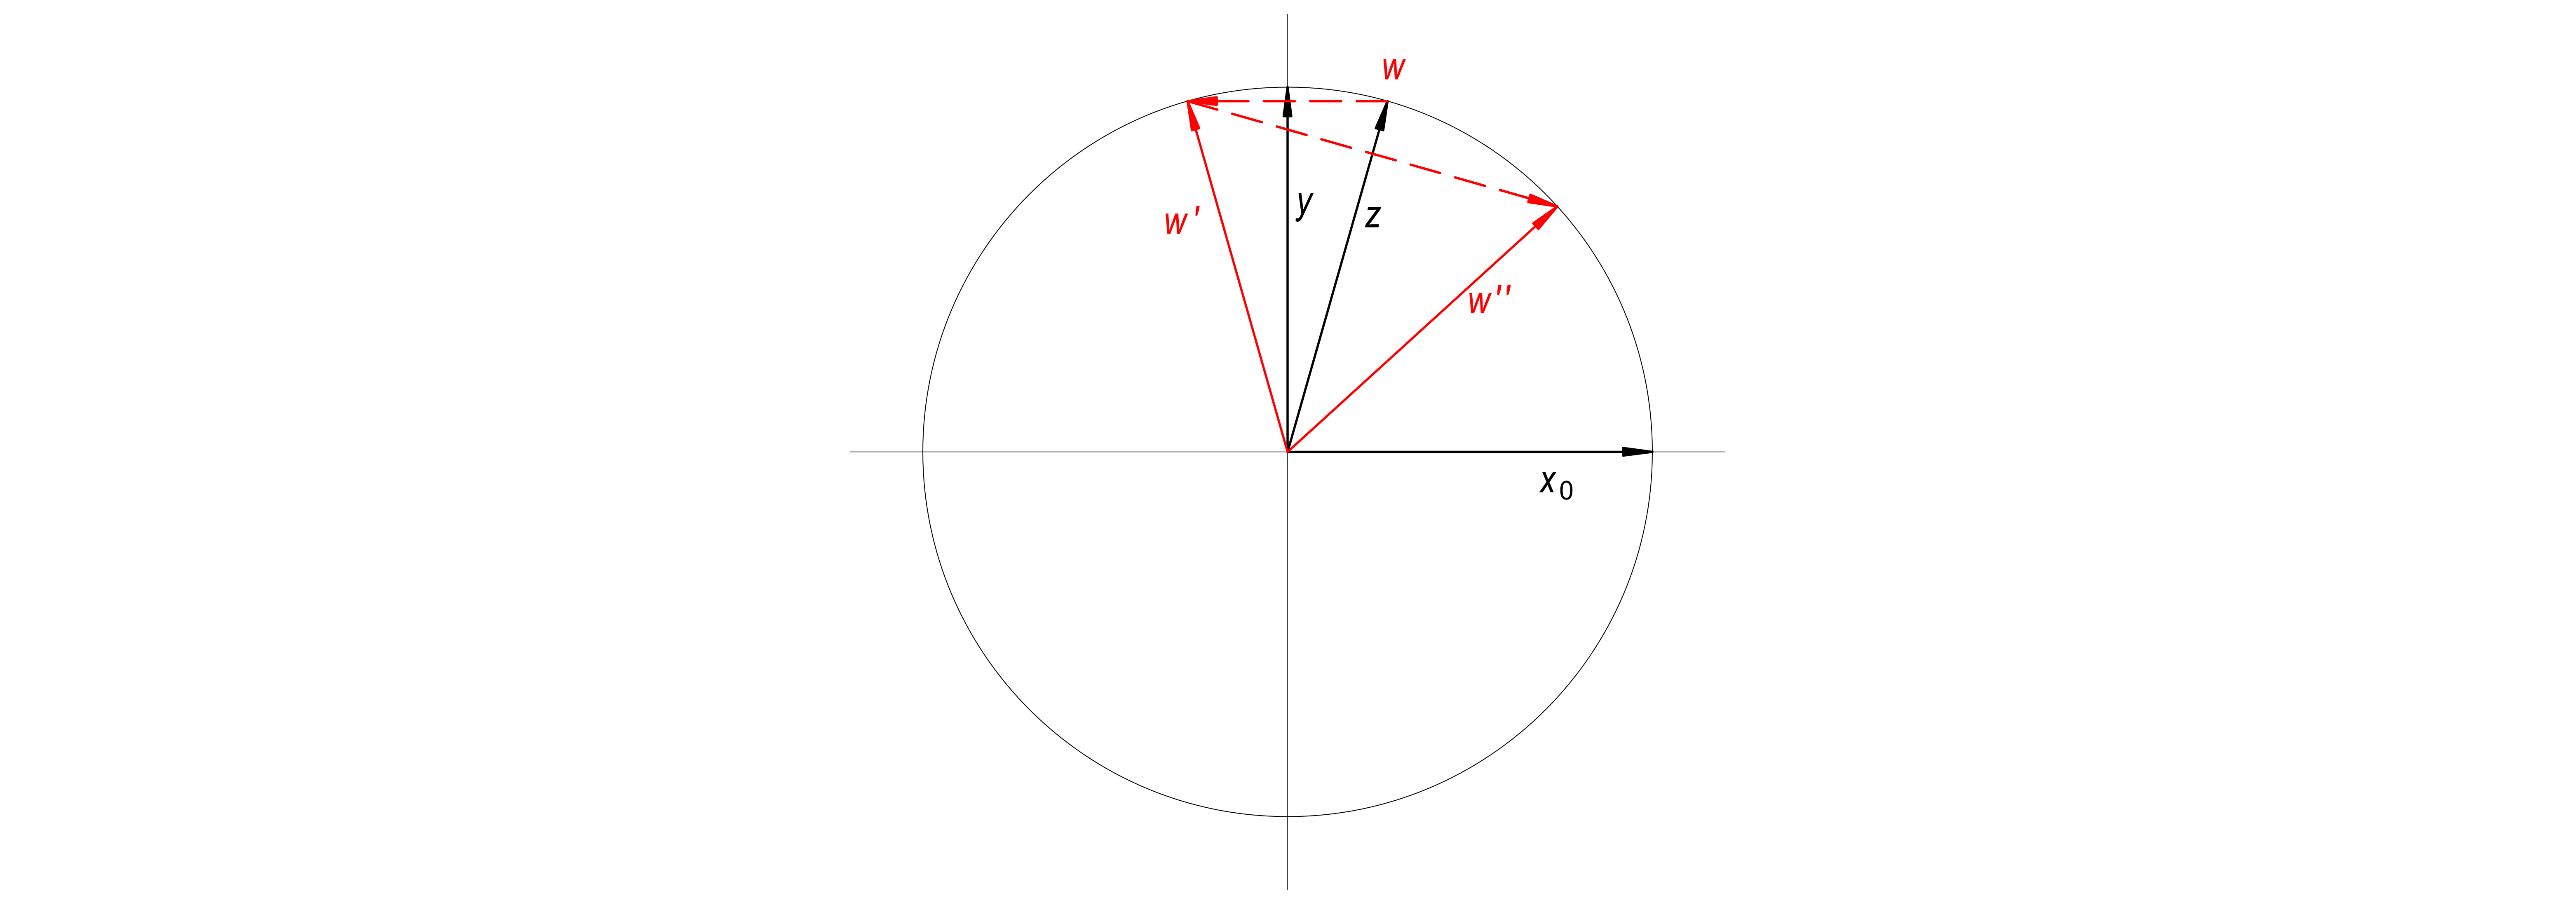

In [40]:
# Fig. 3: The gradual improvement of the solution in Grover's search.
display.HTML(                                                                                                                           f'<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAGGoAAAilCAIAAAAcJ5RIAAAF6mlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIgogICAgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iCiAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIKICAgIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIKICAgIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIgogICAgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIKICAgeG1wOkNyZWF0b3JUb29sPSJNaWNyb3NvZnQ6IFByaW50IFRvIFBERiIKICAgeG1wOk1vZGlmeURhdGU9IjIwMjMtMTEtMjFUMDA6MTQ6MDMrMDE6MDAiCiAgIHhtcDpNZXRhZGF0YURhdGU9IjIwMjMtMTEtMjFUMDA6MTQ6MDMrMDE6MDAiCiAgIGV4aWY6UGl4ZWxYRGltZW5zaW9uPSI2MjUwIgogICBleGlmOlBpeGVsWURpbWVuc2lvbj0iMjIxMyIKICAgZXhpZjpDb2xvclNwYWNlPSIxIgogICB0aWZmOkltYWdlV2lkdGg9IjYyNTAiCiAgIHRpZmY6SW1hZ2VMZW5ndGg9IjIyMTMiCiAgIHRpZmY6UmVzb2x1dGlvblVuaXQ9IjIiCiAgIHRpZmY6WFJlc29sdXRpb249IjMwMC8xIgogICB0aWZmOllSZXNvbHV0aW9uPSIzMDAvMSIKICAgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIKICAgcGhvdG9zaG9wOklDQ1Byb2ZpbGU9InNSR0IgSUVDNjE5NjYtMi4xIj4KICAgPGRjOnRpdGxlPgogICAgPHJkZjpBbHQ+CiAgICAgPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5ncm92ZXItc2VhcmNoLnRjdzwvcmRmOmxpPgogICAgPC9yZGY6QWx0PgogICA8L2RjOnRpdGxlPgogICA8ZGM6Y3JlYXRvcj4KICAgIDxyZGY6U2VxPgogICAgIDxyZGY6bGk+TWFydGluPC9yZGY6bGk+CiAgICA8L3JkZjpTZXE+CiAgIDwvZGM6Y3JlYXRvcj4KICAgPHhtcE1NOkhpc3Rvcnk+CiAgICA8cmRmOlNlcT4KICAgICA8cmRmOmxpCiAgICAgIHN0RXZ0OmFjdGlvbj0icHJvZHVjZWQiCiAgICAgIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFmZmluaXR5IFBob3RvIDIgMi4yLjAiCiAgICAgIHN0RXZ0OndoZW49IjIwMjMtMTEtMjFUMDA6MTQ6MDMrMDE6MDAiLz4KICAgIDwvcmRmOlNlcT4KICAgPC94bXBNTTpIaXN0b3J5PgogIDwvcmRmOkRlc2NyaXB0aW9uPgogPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KPD94cGFja2V0IGVuZD0iciI/Pvl+V+0AAAGCaUNDUHNSR0IgSUVDNjE5NjYtMi4xAAAokXWRzytEURTHPzNDxIgiWVi8NGwYDUpYWMzkV2ExM8qvzcwzb0bNjNd7I022ynaKEhu/FvwFbJW1UkRKtqyJDdNz3owayZzbuedzv/ee073ngjOcVFNmhQ9S6YwRHPMrs3PzStUztTTRzBCdEdXUp0KjYcraxx0OO9547Vrlz/1rtUsxUwVHtfCwqhsZ4XHhybWMbvO2cJOaiCwJnwp3GXJB4Vtbjxb5xeZ4kb9sNsLBADgbhJX4L47+YjVhpITl5XhSyVX15z72S9yx9ExIYpt4KyZBxvCjMMEIAfrpYVDmfrz00i0ryuT7CvnTrEiuKrNOFoNl4iTI0CXqqlSPSdREj8lIkrX7/7evptbXW6zu9kPlk2W9tUPVFuRzlvV5aFn5I3A9wkW6lL9yAAPvoudKmmcf6jfg7LKkRXfgfBNaHvSIESlILnGnpsHrCdTNQeM11CwUe/azz/E9hNflq65gdw865Hz94jfpLGgh7X44SgAAAAlwSFlzAAAuIwAALiMBeKU/dgAAIABJREFUeJzs3N9r3Xcdx/F3YnLqjyVo16VTFPZT3Y1O8UIEXecPZAhb7Samupn0YsmfIf4N3i5bM5u4TSyNc1KGQkWFsUG9UBAmGwiV6jnQNYl2S9p6vGhr8/2c7zk5JwjpO+fxuDp5ne/3k88fcHiOtNvtAAAAAAAAAAAAAAAAAAAAAAAAyGN0ty8AAAAAAAAAAAAAAAAAAAAAAAAwGPkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAAAAAAAAAAAAAAAgGfkkAAAAAAAAAADg/+/ixYsXL17c7VsAAAAAAAAAAAB71ki73d7tOwAAAAAAAAAAAHvNkSNHIuLkyZO7fREAAAAAAAAAAGBvGtvtCwAAAAAAAAAAAHvQhQsXdvsKAAAAAAAAAADAXja62xcAAAAAAAAAAAAAAAAAAAAAAAAYjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQjHwSAAAAAAAAAAAAAAAAAAAAAACQzNhuXwAAAAAAAAAAAABuGS+9FD/+cTkuL8cnPjHAIefOxdGjNfuTT8b8/ADnvPNOPPZYtNuV8e674/nnBzgEAAAAAAAAAGCPkk8CAAAAAAAAAACAGzY24ve/L8dz5wbLJ/3kJzWHRMTnPjfYZZaX43e/K8dHHhnsEAAAAAAAAACAPWp0ty8AAAAAAAAAAAAAt4ypqZqx1RrghHY7jh+v/2ptbbDLLCyUy9hYHDs22CEAAAAAAAAAAHuUfBIAAAAAAAAAAADcUJtPajYHOOG11+LNN+u/GiifdPZs/PGP5fjoo/HRjw5wCAAAAAAAAADA3iWfBAAAAAAAAAAAADccPFgztloDnLC42PWr1dUBzllYqBnn5wc4AQAAAAAAAABgT5NPAgAAAAAAAAAAgBsOHKgZm81+X3/33Xjhha7frq0NcM7SUjnefXd8/ev9ngAAAAAAAAAAsNfJJwEAAAAAAAAAAMANjUZ85CPl2Gr1+/rKSqyudv22/3zSz39ec87TT8eoX/0BAAAAAAAAAFznhxQAAAAAAAAAAACwxdRUuTSb/b67uNjr2/7zSQsL5TI2FseO9fs6AAAAAAAAAMAQkE8CAAAAAAAAAACALTrzSa1WXy/+/e/x6qu9Hugzn/TWW3HmTDk+9ljceWdfrwMAAAAAAAAADAf5JAAAAAAAAAAAANiiM5/UbPb14okT8Z//9Hrg0qW4cmX7c559tmacn+/rDgAAAAAAAAAAQ0M+CQAAAAAAAAAAALbozCe1WtFub/NWux2Li+V4773lsr6+zTlXrsRzz5XjPffE1762zYsAAAAAAAAAAENGPgkAAAAAAAAAAAC26MwnXb4cq6vbvPXGG/GXv1SWj388HnqofGxtbZtzTp+O8+fL8emnY9Tv/QAAAAAAAAAAKvycAgAAAAAAAAAAALbozCdFRKu1zVuLi+UyPR3vf385bptPWlgol7GxmJ3d5i0AAAAAAAAAgOEjnwQAAAAAAAAAAABb7CCf9N578dOfluP0dIyPl2PvfNI//hEvv1yOhw/HnXf2egsAAAAAAAAAYCjJJwEAAAAAAAAAAMAWtfmkZrPXKy+/HO+8U1nuvz8+//loNMone+eTnn8+rl4tx/n5Xq8AAAAAAAAAAAwr+SQAAAAAAAAAAADYojaf1Gr1emVxsVyOHo2RkZp80upq10Pa7VhYKMd77omvfrXXvwYAAAAAAAAAGFbySQAAAAAAAAAAALBFbT6p2ez6/Pnzcfp0OU5PR0SMj5f72lrXc/7wh3jzzXKcm4tRv/QDAAAAAAAAAKjhRxUAAAAAAAAAAACwxYc/HGNj5dhqdX1+aSmuXq0sn/1sPPBARESjUT7cI5/0zDPlMj4ex471vCsAAAAAAAAAwPCSTwIAAAAAAAAAAIAtRkfjjjvKsdmsf7jdjsXFcpyevv5hfLz8qls+aW0tfvazcjx8OKamet4VAAAAAAAAAGB4yScBAAAAAAAAAABAVWe0qNWqf/Ls2fjzn8vxf/mkRqP8qls+6YUX4tKlcpyf73lLAAAAAAAAAIChJp8EAAAAAAAAAAAAVQcPlkuzWf/k8ePl8sUvxl13Xf/cfz7pmWfK5d574+GHe9wRAAAAAAAAAGDIyScBAAAAAAAAAABA1dRUubRaNY9tbMTycjk+9dTNz7fdVn5bm0/605/ijTfKcW4uRv3GDwAAAAAAAACgKz+tAAAAAAAAAAAAgKrafFK7XY6vvBIXLlSWRiOmp2/+OTFRvlKbT3r22XIZH4/Z2b6uCgAAAAAAAAAwrOSTAAAAAAAAAAAAoKozn3TlSmxslOPx4+Xy6KOxf//NP/vJJ125EsvL5fjtb9fcAQAAAAAAAACALeSTAAAAAAAAAAAAoKo2XbS+Xvnzn/+MX/2qfGZmpvJnZz5pdbVcfv3raDbLcX6+j1sCAAAAAAAAAAw1+SQAAAAAAAAAAACo6ieftLwcV6+Wb33zm5WlM5/07rvlsrRULvfdF4cO9XVPAAAAAAAAAIAhJp8EAAAAAAAAAAAAVf3kk156qXzg+9+P8fHKMjlZPrO5WfnzX/+KkyfLZ+bmYtSv+wAAAAAAAAAAtuEHFgAAAAAAAAAAAFC1bT7p/Pl47bXygdnZcpmYKJcin7SyEpcuVZbx8ZpzAAAAAAAAAADoIJ8EAAAAAAAAAAAAVXfcUTOurd38/ItflN8++GB85jPl+KEPlcvGRuXPpaXygSNH6v87AAAAAAAAAABV8kkAAAAAAAAAAABQ9cEPxm23leP6+s3PKyvltzMzNeeMjpbnbG7e/Nxsxquvlq/Mzw9yUQAAAAAAAACA4SWfBAAAAAAAAAAAAB2mpsrlf/mk9fX4zW8qX42Nxfe+V3/OxETlz83NaLevf37xxbh6tfLt/ffHoUM7uS0AAAAAAAAAwPCRTwIAAAAAAAAAAIAOPfJJp0/H5mblq0ceqXn+miKfFBGXL1//cOJE+dXcXIyMDHhRAAAAAAAAAIAhJZ8EAAAAAAAAAAAAHXrkk06dKr+ane16zuRkuVxLL/31r/H665W90eh1DgAAAAAAAAAAVfJJAAAAAAAAAAAA0KFbPuny5Xjllcq+f39861tdz5mYKJdr+aSlpXI/ciQOHBj8ogAAAAAAAAAAQ0o+CQAAAAAAAAAAADp0yyf99rexulrZjx6Nffu6ntOZT9rYiHY7Tpwo9/n5ndwTAAAAAAAAAGBYyScBAAAAAAAAAABAh4MHy+VaPunUqXKfmel1Tmc+aXMzXn893nqrMn7yk/HQQwNfEgAAAAAAAABgiMknAQAAAAAAAAAAQIepqXJZW4t2O1ZWKuMDD8QXvtDrnNp80okT5Tg3FyMjO7gmAAAAAAAAAMDQkk8CAAAAAAAAAACADp35pPX1OHs2zp2rjLOz22SPOvNJ//53vPhiZWk0YmZmZ9cEAAAAAAAAABha8kkAAAAAAAAAAADQoTafdOpUZRkdjSef3OacznzSL38ZrVZlefzxOHBgB3cEAAAAAAAAABhm8kkAAAAAAAAAAADQoTaftLJSWb7xjfjYx7Y5Z3KyXJ57rlzm5we9HQAAAAAAAAAAY7t9AQAAAAAAAAAAALj13H57jIxEu31z+dvfYnOz8szMzPbnTEyUy9tvV/781KfiK1/Z2R0BAAAAAAAAAIbZ6G5fAAAAAAAAAAAAAG4973tfHDhQWYp20uRkHD68/Tmd+aTC3FyMjAx4OQAAAAAAAAAA5JMAAAAAAAAAAACg1tRUr2+/+934wAe2P6R3PmnfvpiZGexWAAAAAAAAAABEhHwSAAAAAAAAAAAA1OudT+oze9Q7n/TEE3H77QNcCQAAAAAAAACAG+STAAAAAAAAAAAAoE6PfNJ998WXvtTXIb3zSXNzg10JAAAAAAAAAIAb5JMAAAAAAAAAAACgTo980g9+ECMjfR3SI5/06U/Hl7888K0AAAAAAAAAAIgI+SQAAAAAAAAAAACo1yOf9NRT/R4yOdn1q7m5fhtMAAAAAAAAAAB0kE8CAAAAAAAAAACAOt3ySQ8/HHfd1e8hExP1+759MTOzg0sBAAAAAAAAAHCNfBIAAAAAAAAAAADU6ZZPGih71GhEo1Gzf+c7sX//Tm4FAAAAAAAAAEBERIzt9gUAAAAAAAAAAADglvTgg/HDH9bsjz8+2Dk/+lG89145PvHEDm8FAAAAAAAAAEBERIy02+3dvgMAAAAAAAAAALDXHDp0KCLOnDmzy/cAAAAAAAAAAAD2qNHdvgAAAAAAAAAAAAAAAAAAAAAAAMBg5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAAAAAAAAAAAAIBk5JMAAAAAAAAAAAD4L3t3Gl5VeagN+N0ZCInIJCgzEkaBijiBIw4FlUERKCqetiJqcaq22tp62p72nFprbVVUtI7Q8ylFBSkaUcEB0AqIgiIQQEgCAZVBZhKGJPv7kZpykCEh2dkkue8fuXbeaT1Ld3b4sa4nAAAAAAAAAABQxahPAgAAAAAAAAAAAAAAAAAAAAAAqpikeAcAAAAAAAAAAACqm2g0unnz5uIXkUgk3nEAAAAAAAAAAIBqKBKNRuOdAQAAAAAAAAAAqD42bNjQuHHjkm/Xr1/fqFGjOOYBAAAAAAAAAACqJfVJAAAAAAAAAABQ0xUVFe3cuTM/Pz8vLy8vLy8/P3/nzp2FhYUFBQWFe9n724O8/vWvf7179+6Sw1NSUv77v/87KSkp8RuleV3ybe3atVNTU9PS0tLS0lJTU2vXrp2QkBDH/1YAAAAAAAAAAMARQn0SAAAAAAAAAABUYdFoND8/f/PmzZs3b960adPmzZu3bNmS942SRqQDvS5+kZ+fH+/7KIPiNqW9O5XSvnGg1/Xq1atfv36DBg3q169fv3791NTUSCQS7/sAAAAAAAAAAADKRX0SAAAAAAAAAAAcWXbt2rV5L8WlSAf5ds+ePeW/aO3atfeuHEpJSUlMTExKSkr8Rulf//nPf97n8DvvvLOwsLCgoKDwG6V/vWvXrr2bnnbu3Fn+m01OTt67TanY3t/uM5WSklL+iwIAAAAAAAAAABVLfRIAAAAAAAAAAFSewsLC9evXr1u3bu039nm9cePG/Pz8Mp1Zu3btvUt/6tWrd9RRR+3dhVTy4kCDtWvXTkhIqJAb3LZtW926dfcZzMvLS01NrZDzi4qK8vPzi6uUSjqV9n7x7cEdO3Zs2bJl7+apsnYwpaamNmzY8Nhjjz3uG/u8bty4cWJiYoXcIAAAAAAAAAAAUErqkwAAAAAAAAAAoMLs2rXrINVIa9eu3bBhwyGf2ElKSirpQiqx97f7TNWuXbty7q40Pv3005NOOmmfwSVLlnTs2DEuefZr586dm/dSUqt0oNcFBQUHPzASiTRq1OjbtUp7v05JSamcuwMAAAAAAAAAgBoiKd4BAAAAAAAAAACgitm5c+fq1atzc3Nzc3NXrVqV+43Vq1dv3rz54Hu/3bOzT8lOo0aN0tLSIpFI5dxLhcvKyvr2YHZ29hFVn1S7du0mTZo0adKkNIuj0WheXt6GDRv27sPapxjr66+/Xr9+/fr16w9yTv369Vu0aNGyZcuWLVu2atWq5TdatGhxRBVgAQAAAAAAAABAVaE+CQAAAAAAAAAA9qOgoODLL78sqUbauyZp3bp1B9qVlJRUXIe0TylSyYvGjRsnJVXnh3ZWrFjx7cHs7OzKT1JRIpHIUUcdddRRR7Vu3fpAawoKCtavX79Pp9LeL9atW7d58+bNmzcvXLjw29uPPfbYb9cqtWrVqmnTpomJibG8OQAAAAAAAAAAqMKq85NYAAAAAAAAAABwSLt27crJyVm+fHlWVtbeTUlffPFFYWHhfrckJSU1b97822U3LVq0aNiwYUJCQiXfwhElKyvr24M5OTmVHqRSJSUlNW3atGnTpgdaUFRUtHHjxtWrV5f0cJW8WLNmzbp169atW/fxxx/vsysxMbFZs2Z7v9PS09PbtWt3/PHHp6SkxPieAAAAAAAAAADgSKc+CQAAAAAAAACAmiIvLy8rK2v5/5Wbm1tUVLTf9U2aNNm7HankdZMmTRITEys5fFWxYsWKbw9mZ2dXfpIjSkJCQqNGjRo1anTSSSftM1VYWPjVV1/lfmPvfqW1a9cWv/7ggw/2Oa1Vq1Zt27Ztt5f09PS0tLRKvCcAAAAAAAAAAIizSDQajXcGAAAAAAAAAACoYFu3bl2xYsU+TUlffPHFt1cmJCS0bt26uH2muCOp+Gvz5s1TUlIqP3lV1759++XLl+8zeOqpp86dOzcueaq0Xbt2rVmzpqRTadWqVcX9XytXrtxv51fz5s336VRq27Zt3bp1Kz85AAAAAAAAAABUAvVJAAAAAAAAAABUbXl5eZmZmUuXLi2pSVqxYsW6deu+vTI5OblNmzb7lMscf/zxtWrVqvzY1VJBQUFqampBQcE+440aNVq/fn1cIlVLu3fvzsnJKX6rl7zts7Oz9+zZ8+3Fxx57bPFbvfg937FjxxNOOCEtLa3yYwMAAAAAAAAAQMVSnwQAAAAAAAAAQFWyffv2JUuWLFq0aPHixYsXL160aFFOTs63n4GpXbt2SV9MiZYtWyYmJsYldg2Rk5PTpk2b/U5t27atTp06lZynRikoKMjNzd27UKm4X2nnzp37rIxEIscff3yXLl06d+5c/LVTp07+7wAAAAAAAAAAUOWoTwIAAAAAAAAA4Mi1bdu2zMzM4pqk4r6knJycfdYkJSV16NDhhBNOaN++fUlTUtOmTRMSEuIRuUZ7++23v/vd7+53asGCBd/5zncqOQ9FRUVffPFFSafS559/npmZuWzZsoKCgn1WHn/88SVtSsUUKgEAAAAAAAAAcIRTnwQAAAAAAAAAwJFi69atmZmZxU1JxV9XrVq1z5rk5OSOHTuW9Lx06dKlXbt2ycnJcQnMPp566qkbbrhhv1OvvPLKgAEDKjk1t9EdAAAgAElEQVQP+7Vnz57PP/+8uI+s+Adt6dKle/bs2WdZq1atSn7KOnfufMIJJ9StWzcugQEAAAAAAAAAYL+S4h0AAAAAAAAAAIAaqrCw8PPPP58/f/78+fMXLFiwaNGi1atX77OmVq1anTp16ty5c0mHS9u2bZUlHbFWrFhxoKns7OzKTMJBJCcnF/9MlYzs2bNnxYoVJW1KixYtWrp06apVq1atWvX666+XLGvZsmXnzp27devWvXv37t27t2/fPiEhIR53AAAAAAAAAAAAIahPAgAAAAAAAACg0uzatWvhwoXzv7FgwYIdO3bsvSAlJaW4LKm4KalLly7p6elJSR5xqTKysrIONKU+6UiWnJzcqVOnTp06DRo0qHikoKAgKyurpE1p8eLFS5Ysyc3Nzc3NffPNN4vXHHXUUSVVSt27d+/SpUtKSkr8bgIAAAAAAAAAgBonEo1G450BAAAAAAAAAIDqaevWrZ9++mlJX9KiRYsKCgr2XtCiRYvi4pWTTjqpa9eu6enpiYmJ8UpL+Z1yyinz5s3b79TAgQMnTZpUyXmoQAUFBdnZ2QsXLvzkk0+Kf6JXr16994KkpKQuXbqUtCl169atbt268UoLAAAAAAAAAEBNoD4JAAAAAAAAAIAKs3bt2vl7Wb58+d6zkUikQ4cO3ffSqFGjeEUlFho0aLB58+b9TnXr1u2TTz6p5DzE1Pr160uqlObPn79s2bJ9nkZr167d3j/vxx13XLyiAgAAAAAAAABQLalPAgAAAAAAAADg8K1fv37OnDlz5syZN2/e/Pnzv/zyy71na9Wq1bVr15LylBNPPLFOnTrxikqsbdy48ZhjjjnQbN26dTdv3hyJRCozEpVp+/btCxYsKGlTWrhw4e7du/de0LRp0+7du5988sk9evTo0aNH48aN4xUVAAAAAAAAAIDqQX0SAAAAAAAAAABlsHv37k8++WTOnDmzZ8+ePXt2VlbW3rNHH330SSedVNKXdMIJJ9SqVSteUalkH3300WmnnXaQBRs3bmzQoEGl5SG+du/enZmZOX/+/OJutU8++WT79u17L0hPT+/Zs2fPnj179Ohx0kkn+awAAAAAAAAAAKCs1CcBAAAAAAAAAHAw0Wh01apVxWVJc+bMmTdv3q5du0pm09LSTjvttB49epxyyiknn3xyenp6QkJCHNMSRy+88MKVV155kAUff/zxySefXGl5OKIUFRWtWLFi/vz5H3/88Zw5c+bOnZuXl1cym5KScvLJJxdXKfXs2bNVq1aRSCSOaQEAAAAAAAAAqBKS4h0AAAAAAAAAAIAjzvbt2z/66KOSyqSvvvpq79lOnTr17NmzuOika9euSUkeQSGEELKysg6+IDs7W31SjZWQkNC+ffv27dsPHTo0hFBQULBw4cI5c+YUf84sWbJk1qxZs2bNKl7cpEmTkiqlU089tU6dOnHNDgAAAAAAAADAESoSjUbjnQEAAAAAAAAAgDgrKipasmRJSZXJwoULi4qKSmYbNmxY3GPSs2fP0047rUGDBnGMyhHruuuue+aZZw6y4P7777/zzjsrLQ9VyKZNm+bOnTv7G5s2bSqZSkhI6Nq1a89vdOzYMSEhIY5RAQAAAAAAAAA4cqhPAgAAAAAAAACooXbv3j137tyZM2fOnDlz1qxZW7ZsKZlKSkrq1q1bSWVSu3btIpHIIY7bsSNkZ4cVK0JWVlixIuTmhiZNwjXXhDPOiO1tcMS44IIL3n333YMsuPnmmx999NFKy0MVFY1Gly9fXtyjNGfOnE8//bSgoKBktl69emeccca5557bq1evU089tVatWnGMCgAAAAAAAABAfKlPAgAAAAAAAACoQfLz82fPnj1z5swZM2bMnj07Pz+/ZKpFixbFZUk9evQ4+eST09LS9n9ENBrWrv13TVLJ16++2s/ilJTw9tvhrLNiczccWVq3br1q1aqDLOjbt+9rr71WaXmoHvLy8ubNm1dcpTR79uzVq1eXTKWmppZUKfXo0SM1NTWOOQEAAAAAAAAAqHzqkwAAAAAAAAAAqrlt27Z98MEHM2fOnDlz5ocffrh79+6Sqc6dOxc3j5x99tktWrTYd+euXSEnZ9+apKyskJdXhstfd1146qmKuA+OaLt3765du/bBH0Y64YQTFi9eXGmRqJZWr179/vvvz5gxY+bMmXu/nWrVqnX66acXf6CdeeaZderUiWNIAAAAAAAAAAAqh/okAAAAAAAAAIBqaNOmTe+///7MmTNnzJgxb968wsLC4vFIJNKtW7devXqde+6555xzTuPGjUMIIRoNGzfuW5O0YkVYvTqU/9mSXr3C9OnlPYQj3rJlyzp27HjwNampqTt27IhEIpUTiWpv/fr17733XnGV0qefflryLFxiYuIpp5xS0g1Xv379+OYEAAAAAAAAACBG1CcBAAAAAAAAAFQT69evnzlzZnFl0oIFC/ZpEimuTDq7Z8/627btW5OUlRW2bIlVLPVJNcMbb7xxySWXHHLZV199ddxxx1VCHmqaTZs2/fOf/yyuUvr444/36YwrrlL6d2ccAAAAAAAAAADVgvokAAAAAAAAAIAqbPPmze++++60adOmT5+emZlZMl6rVq3zTzmlf5cu5zRrdkKtWrVWr/5XTdLKlaGgoFIjqk+qGUaPHn3LLbccctmsWbN69uxZCXmoybZt2zZr1qziKqUPP/xw9+7dJVMnnHDCeeed17t37/PPP79+/fpxDAkAAAAAAAAAQPmpTwIAAAAAAAAAqGL27NkzZ86cqVOnTps27cMPPwxFRc1CSA/hhFq1zmrWrPvRR7cqKKizbl3C11/HO2kIQX1STXHHHXc88MADh1z297///corr6yEPFAsPz9/zpw5xVVKs2bNys/PLx5PSEg4/fTT+/Tp07t37x49eiQnJ8c3JwAAAAAAAAAAh0F9EgAAAAAAAABAFRCNRpctW/bOa68tfPXV9XPmNMvPbxtCeghtI5H0SKRWUVG8Ax6Y+qSaYeDAgZMnTz7ksj/84Q+//OUvKyEPfNvu3bvnzp377rvvTp06ddasWQUFBcXjRx999HnnnVdcpdShQ4dIJBLfnAAAAAAAAAAAlJL6JAAAAAAAAACAI080GtavDytWbPv005XvvLP1k0+SV61qvmtXs3jnOhzqk2qGE0888bPPPjvksuuvv/7JJ5+shDxwcNu2bZsxY8bUqVOnTZu2ZMmSkvGWLVsW9yhdeOGFjRo1imNCAAAAAAAAAAAOSX0SAAAAAAAAAEC8vfVWuOuuUL9+qFcvrF9f9MUX0TVrEnftinesCtK2bbjllniHiKWePUPPnpV0ra1bw4svhu3bK+lypRaNRu/6xS/27N59yJUdOna8ceTIg62oUycMHRrq1q2wcAc3e3aYPbuSrhUv3qKHsmnz5mVLly5ZuvTzZct27NhRPBiJRJo1b96xY8dOHTu2adMmKSkphLB9+/bFq1a1u/vuhscfH8/EAAAAAAAAAACEENQnAQAAAAAAAADEWd26Ydu2eIegfBo3DkuWhIYNY3uV3/0u/Pa3sb3EkeO3vw3/9V+xvcTGjaFTp7B+fWyvcoTwFq1ok08++bKPP453CgAAAAAAAACAmk59EgAAAAAAAABA3ORPnpw6cGC8U1ARevcOU6fG8PytW0O9ejE8/wi0ZUuoWzeG5/fuHd56K4bnH2m8RSva6kWLWnTuHO8UAAAAAAAAAAA1WkK8AwAAAAAAAAAA1DgrV64cPXr0JZdcMnfQoHhnoYIsXBjb8998M7bnH4FifcuLFsX2/CONt2hFu/PEEy+55JLRo0evXLky3lkAAAAAAAAAAGqoSDQajXcGAAAAAAAAAIDqr7CwcPbs2RkZGRkZGQu/6TEZGom84OGN6qF37zB1agzP37o11KsXw/OPQFu2hLp1Y3h+797hrbdieP6Rxlu0otWLRLZ+8wH+ne98p3///v379+/Ro0diYmJ8gwEAAAAAAAAA1BzqkwAAAAAAAAAAYmjLli1vvvlmRkbGlClTvv766+LBo48++qKLLurfv3/fiy5q3LRpfBNSARo3DkuWhIYNY3uV3/0u/Pa3sb3EkeO3vw3/9V+xvcTGjaFTp7B+fWyvcoTwFq1ovw3hR198MXXq1IyMjDfffHPbtm3F48ccc0zfvn379+9/0UUX1athfVIAAAAAAAAAAJVPfRIAAAAAAAAAQMX7/PPPX3311YyMjPfee6+goKB4sG3btgMGDOjfv/8555xTq1atfy2NROKWsnK0bRtuuSXeIWKpZ8/Qs2clXWvr1vDii2H79kq6XKmNevjhnOzsUi6++JJLLurT54DTdeqEoUND3boVk+yQZs8Os2dX0rXixVu0fKLR6J//8pcv1qwp/nZ7CC+GsDWEkkfvdu/e/d5777366quvvvpqVlZW8WBSUtK5557bv3///v37t2/fPj7RAQAAAAAAAACqO/VJAAAAAAAAAAAVY8+ePe+//35GRkZGRsayZcuKBxMTE88+++ziBo2OHTtGvl2WNHBgmDx538HU1JCfH/vIlaJXrzB9erxDEFvNmjX78ssvS7n4mmuuGTNmTEzzQAWaMWPGeeedt8/gwIEDJ02atM9gNBpdunRp8W+B999/v7CwsHi8Q4cOxb8Fzj777OTk5ErIDAAAAAAAAABQQyTFOwAAAAAAAAAAQNW2ffv2KVOmvPzyy2+88caWLVuKBxs0aHDJJZcMGDDgoosuatCgwcH2d+y4n8GhQ8Pdd4eHHw5TpoSVK0NRUQyCQ8XIy8srfXdSCCE7Ozt2YaDCjRo16tuDHff30R2JRDp16tSpU6c777xz48aNb775ZkZGxuuvv75s2bIHHnjggQceqFev3sUXXzx48OBLLrmkTp06sc8OAAAAAAAAAFDNRaLRaLwzAAAAAAAAAABUPZs3b87IyJgwYcKbb765c+fO4sHOnTv379+/f//+Z5xxRlJS6f6u1TPPhOuu23ewVq2QmxuOPTaEEAoKwvPPh7/9LcydG7Zvr8BbqCS9eoXp0+MdghhatGhR165dS7++devWOTk5MYsDFSk7O7tdu3ZF3+qwe+aZZ6699trSnFBQUDBr1qyMjIxXX301MzOzeLB27drFPUoDBgyoV69eBYcGAAAAAAAAAKgx1CcBAAAAAAAAAJTBhg0bJk+ePHHixLfeemvPnj3Fg2ecccbgwYMHDhzYtm3bMp/43nvh3HP3M/7734f//M99Bz//PDz8cHj99ZCdHb5V53FoaWmhbt2QkBDWrg2FhWXefnjUJ1V3r7zyymWXXVb69QkJCTt37kxOTo5dJKgod9xxxwMPPPDt8ffee+/ss88u62krVqz4xz/+MXHixFmzZhWPJCcnf/e73x08ePBll13WqFGj8sYFAAAAAAAAAKhh1CcBAAAAAAAAABzal19+OWnSpIkTJ86YMaOwsDCEkJCQcO655w4ePPjyyy9v3rz54R+9dm1o0mQ/482ahZyccKCKmYKCMH58GDs2fPhh2LatzBdNSQkdO4azzgonnhi+/DJkZ4fs7JCTE9asCRX+MIn6pOruoYce+slPflKmLStWrEhPT49RHqgo27Zta9my5ZYtW749tXbt2mOPPfawT16zZk3x75SZM2cWFRWFEBITE3v16jVkyJDLL7+8yX5/KQAAAAAAAAAA8C3qkwAAAAAAAAAADmjVqlUvv/zyhAkTPvjgg+KnLJKSki688MLBgwdfdtll5enO+LdoNNSvH7Zu3c/UCy+EoUMPfcKKFeGRR0JGRsjODkVFZbt6JBKOOy5ceGG46aZw5plh166walXIyfl3oVLxi3Xrynbs3i6+OLz++uFv54h36623Pvroo2Xa8vbbb19wwQUxygMV5dFHH7311lu/PV6vXr1NmzZFIpHyX2LdunWTJ0+eOHHi22+/XVBQEEKIRCJnnXXW4MGDBw0a1KpVq/JfAgAAAAAAAACgGlOfBAAAAAAAAACwr+XLl0+cOHHixIlz584tHklJSbnooosGDx48YMCABg0aVPD1TjstfPTRfsbPOiu8/34ZzikoCC+9FMaMCXPm7L+P6eBSUkLXrmHo0DByZKhb9/9M5eX9q0ppn2alTZsOfeyf/hR+9rMyh6Hq6Nev35QpU8q05emnnx4xYkSM8kCFKCoq6tSp0+eff/7tqdNOO+3DDz+s2Mtt2rTplVdemThx4tSpU3ft2lVyocGDBw8ePLhdu3YVezkAAAAAAAAAgOpBfRIAAAAAAAAAwL8sXrx4woQJEydOXLBgQfFIWlpa3759Bw8e3K9fv6OPPjpWF7766jBu3P6n5s0L3bsfzpkrV4ZRo0JGRlixIhQVlXn7cceF888PN98czj77YMu2bPl3odLe5Uo7dvxrwWWXhXHjQlra4dwCVUSnTp2WLl1api3/+Z//+fvf/z5GeaBCTJkypV+/fvuduvrqq5977rkYXXfbtm2vvfbaxIkTp0yZkpeXVzx44oknDhkyZPDgwZ07d47RdQEAAAAAAAAAqiL1SQAAAAAAAABATZeVlfX3v/993LhxixcvLh6pW7fugAEDBg8efNFFF6VVQvXP734Xfvvb/U8NHx6efbZchxcVhZdeCmPGhNmzw5YtZd5eq1bo2jUMGRJuvDHUr1+qLdFo+PrrkJsbmjULxx4bIpEyX5Sqo6ioKDU1dffu3WXaNWzYsOeffz5GkaBC9OnTZ9q0afud+t3vfveb3/wm1gHy8vLefPPNiRMnvvrqq1u3bi0e7NKly7Bhw6666qo2bdrEOgAAAAAAAAAAwJFPfRIAAAAAAAAAUEOtW7fuxRdfHDdu3KxZs4pHGjZsOHDgwMGDB1944YUpKSmVF2X8+HDVVfufSkkJubmhceOKuVBubnj44fDKK2HFilBYWObtxx4bzjsv3HRT6NWrYvJQ9eXm5rZq1aqsu84888x//vOfscgDFWLRokVdu3Y90Oz48eOvuOKKSguza9eut956a+LEiZMnT964cWPx4BlnnDFs2LChQ4cee+yxlZYEAAAAAAAAAOBIoz4JAAAAAAAAAKhZtm3bNmnSpHHjxr311luFhYUhhKOOOmrgwIHDhg3r3bt3cnJyHDLNmxdOOeWAs3/4Q/jlLyv4ikVF4eWXw7PPhlmzwubNZd5eq1bo3Dl873th5MjQsGEFZ6NKmTFjxnnnnVfWXU2bNv3iiy9iEAcqxo9+9KMnn3zyQLPz5s3r3r17ZeYptmfPnqlTp44bN+4f//hHXl5eCCExMbF3797Dhg0bOHDg0UcfXfmRAAAAAAAAAADiS30SAAAAAAAAAFAj7Nq164033hg3btwrr7yyc+fOEEJSUtLFF188bNiwSy+99KijjopnuG3bQt26B5xt0SJkZ4ekpFhdfc2a8MgjYfLk8PnnobCwzNsbNw69eoWRI8OFF8YgHEe6Z599dsSIEYexMS8vLzU1tcLzQPlt3LixRYsW+fn5B1qwbdu2OnXqVGakfezYseOVV14ZN27cG2+8UVBQEEKoXbv2pZdeOmzYsIsvvjglJSWO2QAAAAAAAAAAKpP6JAAAAAAAAACgOissLJw5c+a4ceMmTJiwefPm4sFzzz132LBhQ4YMOeaYY+Ib79+aNQtffnnA2ZdeCkOGxDxDUVF45ZXw9NPhgw/Cpk1l3p6cHDp3DoMHh5tvDg0bxiAfR6Jf/epX99xzz2FsXLJkSceOHSs8D5Tffffd94tf/OJAs82aNVuzZk1l5jmIr7/+esKECc8///x7771XPNKgQYMhQ4YMGzbs3HPPTUhIiG88AAAAAAAAAIBYU58EAAAAAAAAAFRD0Wh0/vz548aNGz9+fEnPRbdu3YYNG3bllVe2atUqvvH247zzwowZB5w955wwc2Ylpgnhyy/Dww+HyZPDsmWhsLDM2xs1CuecE0aODN/9btDfUa1dddVV48ePP4yNr7/++sUXX1zheaCc9uzZk56evnr16gMtOO+88959993KjFQaq1atGj9+/Lhx4z799NPikebNm1955ZXDhg3r3r17JBKJbzwAAAAAAAAAgBhRnwQAAAAAAAAAVCvLly8fN27cuHHjli5dWjzSpk2bYcOGXXXVVV26dIlvtoO54Ybw1FMHW/DJJ6Fbt8pKs5eiovDaa+Gpp8I//xk2bizz9uTkcM454aWXQsOGMQhH/PXo0ePDDz88jI2PPfbYjTfeWOF5oJxefPHFK6644iALbrjhhieeeKLS8pTVokWLin8J5uTkFI907Njx6quvvuqqq9q1axfXaAAAAAAAAAAAFU99EgAAAAAAAABQHWzatGn8+PFjx44taXJp3LjxFVdcMWzYsJ49e0YikfjGO7Q//zn87GcHWzBiRHj66cpKcwBr14ZHHgmTJoVly0JBQRk2HntsWLs2ZrGIp0aNGn399deHsfHnP//5fffdV+F5oJzOOuusDz744CAL/vznP99xxx2VlufwRKPR2bNnjxs37oUXXli/fn3x4Omnn37NNddcddVV9evXj288AAAAAAAAAICKoj4JAAAAAAAAAKjCCgsL33777TFjxkyaNGnXrl0hhDp16gwaNGjYsGEXXnhhUlJSvAOW2quvhksvPdiC2rXD6tXhmGMqK9BBFRWFN94ITz4Z3n8/lLI65513wvnnxzgWlW3Lli2H3cPyve9978UXX6zYPFBOc+fOPf300w++5pVXXhkwYEDl5Cm/goKCt956a9y4cZMmTdq+fXsIISUlZdCgQcOHD7/gggsSExPjHRAAAAAAAAAAoFzUJwEAAAAAAAAAVdKKFSvGjh37t7/9LTc3N4QQiUQuvPDC4cOHDxw4MC0tLd7pym7p0tCp0yHW/PGP4a67KiVNWaxbF0aPDi+/HJYsCQUFB1w2fXro1asSY1EZ5s+ff/LJJx/e3lNPPXXu3LkVmwfK6T/+4z+ef/75g69ZunRphw4dKidPBcrLy/vHP/4xZsyYt99+u/ihwZYtW/7whz+85ppr2rZtG+90AAAAAAAAAACHSX0SAAAAAAAAAFCV7NixY8KECWPGjJkxY0bxSJs2ba655pof/vCHrVu3jm+2ctm9O6SlhcLCg61p2TJkZYWkpMrKVEZFRWHq1PDEE+H998OGDf9n6rjjwldfxSkWMTRx4sQhQ4Yc3t5GjRqtX7++YvNAeXzxxRetW7cuOEgNXAiJiYn5+fnJycmVlqrCrVy58m9/+9vYsWOzs7OLR3r16jV8+PAhQ4YcddRR8c0GAAAAAAAAAFBW6pMAAAAAAAAAgCogGo1+8MEHzz777Isvvrh9+/YQQmpq6pAhQ6699tpzzz03ISEh3gErQvv2YfnyQ6yZODEMGlQpacpnw4YwenSYNCls2hQ6dgzjxoVGjeKdiYr3pz/96a677jrs7du2batTp04F5oHy+PWvf/373//+4Gvat2+/bNmyyskTU0VFRTNmzBgzZsyECRPy8/NDCHXq1LniiiuGDx9+5plnRiKReAcEAAAAAAAAACgV9UkAAAAAAAAAwBFtzZo1//u//zt27NiSxoozzjhj+PDhV1xxRd26deObrYL16xemTDnEml69wvTplREGSmHkyJFPPPHEYW9fsGDBd77znQrMA4dt586dLVu23LBhw8GX9evXLyMjo3IiVY4tW7a8+OKLY8aMmTVrVvFIhw4dhg8f/oMf/KBZs2bxzQYAAAAAAAAAcEjV4k8vAgAAAAAAAADVzq5du1566aW+ffu2atXq7rvvXrZsWZMmTe66667MzMwPPvjg+uuvr27dSSGEDh0OvWbGjLBgQeyjQKmsWLGiPNtzcnIqKAiU17hx4w7ZnRRC6FCaD+oqpV69etdff/0HH3yQmZn585//vEmTJsuWLfvlL3/ZsmXLvn37TpgwYdeuXfHOCAAAAAAAAABwQOqTAAAAAAAAAIAjy/z583/84x83a9Zs6NChr7/+emJi4uDBgzMyMnJzc//4xz926tQp3gFjppStHI88EuMcUFpZWVnl2Z6dnV1RSaA8otHoqFGjSrOy+tUnlejUqdN9992Xm5ubkZExaNCgxMTE119//Xvf+16zZs1+/OMfz58/P94BAQAAAAAAAAD2IxKNRuOdAQAAAAAAAAAg5OXljR8//vHHH//oo4+KR0488cRrr7326quvbtSoUXyzVZK33w7f/e6hl6WmhtWrQ8OGsQ8EB7Nnz57U1NTCwsLDPuH2229/8MEHKzASHJ533333ggsuKM3Kt99+u5Qrq7oNGzY8//zzzz777IIFC4pHTjvttJEjR1555ZVpaWnxzQYAAAAAAAAAUCIh3gEAAAAAAAAAgJouMzPztttua9as2YgRIz766KP69evfcsstH3/88SeffHLbbbfVlO6kEELHjqValp8fnnkmxlGqmnXrQu/eoVWrcNJJ4be/DRs2xDtQjZCbm1ue7qQQQk5OTgVlgXIZNWpUKVd2LOUHddXXqFGj22677ZNPPvn4449vueWW+vXrz507d8SIEc2aNbvtttsyMzPjHRAAAAAAAAAAIIQQItFoNN4ZAAAAAAAAAICaaPfu3ZMmTXr88cdnzJhRPNKjR48bb7xx6NChqamp8c0WH0VF4eijQ17eoVe2bh1WrAiJibHPVEUcd1xYt+7/jBxzTDjnnPCjH4U+fUKCPzAWE9OmTevTp095TujWrdsnn3xSUXng8GRlZbVr1640z9GlpaVt3749EolUQqojTX5+/gsvvPDXv/51zpw5xSPnnXfeyJEjL7/88lq1asU3GwAAAAAAAABQk3k4DAAAAAAAAACobDk5OXfffXfLli2vvPLKGTNmHHXUUTfccMO8efNmz579wx/+sIZ2J4UQEhJC+/alWrlyZXj11RinqTpmzNi3OymE8PXX4R//CJdcElJSQteu4de/3s8ayicrK6ucJ2RnZ/vbb8TdI488Usr3YYcOHWpmd1IIITU19Zprrgh45AkAACAASURBVJk9e/a8efOuv/76tLS06dOnX3nllS1btrz77rtzcnLiHRAAAAAAAAAAqKHUJwEAAAAAAAAAlaSwsDAjI6Nfv37p6en33nvvunXrunbtOnr06DVr1jzxxBPdu3ePd8AjQIcOpV358MOxzFGlFBUdbLagICxaFH7/+3DcceGYY8Jll4XXXjvEFkpnxYoV5Txh69atmzdvrpAwcHi2bt36zDPPlHJxh9J/RFdf3bt3f/LJJ7/44otHH320S5cu69atu/fee9PT0/v375+RkVFYWBjvgAAAAAAAAABAzaI+CQAAAAAAAACIua+++uqee+5JT08fMGDAlClTkpOTr7766vfee2/BggU33XRTvXr14h3wiFH6bo533w0LF8YyStVx/vmhceNSrdy4MbzySujfP6SkhC5dwt13h7VrYxyuOsvKyir/IdnZ2eU/BA7b2LFjt23bVsrF6pNK1KtX7+abb/7ss8/ee++9YcOGJScnv/baawMGDEhPT7/nnnu++uqreAcEAAAAAAAAAGoK9UkAAAAAAAAAQKxEo9F333136NChLVu2/NWvfrVq1ar09PQ//elPq1evfu65584+++xIJBLvjEeYMnVzPPJIzHJUNUuWhAsuCMnJpV1fUBAWLw733huaNAkNG4YBA8LkyaGoKJYRq6EVK1aU/xD1ScRRUVHRI2X5IFWftI9IJHL22Wc///zzq1evvu+++9LT01etWvWrX/2qZcuWV1xxxbvvvhuNRuOdEQAAAAAAAACo5iIeUAAAAAAAAAAAKtymTZv+9re//fWvf126dGkIISEh4dJLLx05cmTv3r0TEvy1pwObPTuccUZpF6elhdWrQ4MGsQxU1UybFv761zBzZtiwocx7ExNDhw7hssvCj38cmjaNQbhqJRqN1q9ff+vWreU85/7777/zzjsrJBKUVUZGxoABA0q/fvbs2T169IhdnqquqKho2rRpjz/++KuvvlpUVBRC6NSp08iRI3/wgx808KsKAAAAAAAAAIgN9UkAAAAAAAAAQEVatGjRqFGjnnvuufz8/BBCs2bNrr/++uuuu65FixbxjlYVbNwYjjmmDOv//Odwxx0xS1OVbdwYRo8OEyeGxYvDnj1l3l6/fjjzzDBiRBg4MCj82p8NGzY0bty4/OfcfPPNjz76aPnPgcPw3e9+9+233y79+o0bN6oBKo3Vq1c/9dRTTz311JdffhlCSE1N/f73v3/bbbd17tw53tEAAAAAAAAAgOpGfRIAAAAAAAAAUAGKioreeOONhx56aNq0acUjvXv3Hjly5IABA5KTk+ObrYpp3Dhs2FDaxccfH5YvD4mJsQxU9b37bnj88TB9eli/vsx7ExNDu3bh0kvDbbeF5s1jEK6qmj9//sknn1z+cy699NLJkyeX/xwoq4ULF37nO98p/frGjRuvW7cudnmqnz179rz66qt//etfS/5h0KdPn9tvv/2iiy5KUEsHAAAAAAAAAFQQTyEAAAAAAAAAAOWyY8eOxx577IQTTujXr9+0adPS0tJuuummzMzMqVOnDho0SHdSmXXoUIbFOTnhtddiFqW6OP/88OKLYd268PXX4Z57wkknhVq1Sru3sDAsXRruvz+0aBEaNAh9+4aXXgpFRbGMWzU0adKkQs5p2rRphZwDZfXwww+XaX2HMn04E0JycvKgQYOmTp2amZl54403pqWlTZ06tW/fvp07d3788cd37NgR74AAAAAAAAAAQHUQiUaj8c4AAAAAAAAAAFRJq1atevTRR5966qnNmzeHEFq2bHnrrbded911DRo0iHe0qmz48DB2bBnWX3hheOutWIWpxmbMCI8/HqZPD2vXlnlvYmJo2zYMGBBuuy20bBmDcFVANBq9/PLLJ0+eXJ5DUlJSpk+f3rNnz4pKBaW0YcOGli1b7ty5s/Rbhg8f/uyzz8YuUrW3cePGp59++pFHHlm9enUIoX79+jfccMPNN9/cqlWreEcDAAAAAAAAAKow9UkAAAAAAAAAQNlEo9FZs2Y99NBDL7/8cmFhYQjhzDPPvP322y+//PKkpKR4p6v67r033H132bYsWhQ6d45Nmhpg8+bwxBPhxRfDwoVh9+4yb69XL/ToEa69NnzveyEhIQb5jlx5eXmjR49+55138vPz95n69NNPi1vVitWvX79bt277rGnfvv0111xz1llnxTwofMu99957dxk/ae+9995f/OIXMcpTc+zZs2fSpEkPPfTQrFmzQgiJiYmDBw++/fbbe/bsGYlE4p0OAAAAAAAAAKh61CcBAAAAAAAAAKW1e/fuCRMmPPTQQ3Pnzg0hJCUlDR069Lbbbjv99NPjHa0amTgxDBlSti0jR4bHH49Nmhrm/ffDY4+Fd98NX31V5r0JCaFt29CvX/jxj0ObNjEIV5Wcd955M2bMKPm2V69e06dPj18c+D/27NnTpk2bNWvWlGnXxIkTBw0aFKNINdCcOXNGjRr10ksvFRQUhBBOP/3022+/fciQIcnJyfGOBgAAAAAAAABUJeqTAAAAAAAAAIBD27Bhw5NPPjl69OgvvvgihNCwYcORI0fedNNNzZs3j3e0auezz8KJJ5ZtS1paWLMm1K8fm0A10tat4cknwwsvhM8+C7t2lXl73brh9NPD8OFh6NCQlBSDfEc69UkcycaPH3/VVVeVdddnn33WtWvXWOSpyVavXv3YY4898cQTGzduDCE0a9bslltuueGGG4455ph4RwMAAAAAAAAAqgb1SQAAAAAAAADAwSxatGjUqFH/7//9v507d4YQOnfufPvtt1999dVpaWnxjlZN5eeHw/hv+8AD4Sc/iUEaQvjgg/DYY+Htt8PataGsT9okJIQ2bULfvuG220LbtrHJdyRSn8SR7Iwzzpg9e3aZtkQikR07dqSmpsYoUg2Xl5f33HPPPfTQQ5mZmSGE2rVr/+AHP7jttts6d+4c72gAAAAAAAAAwJFOfRIAAAAAAAAAsB/RaPSNN9548MEHp02bVjxyySWX3H777b17945EIvHNVv21bh1WrSrblvT0sGxZSEyMTSBCCCFs3x6eeiqMHx8WLAg7d5Z5+9FHh9NOC9dcE666KiQlxSDfEUR9EkesOXPm9OzZs6y7WrdunZOTE4M4/Fs0Gp02bdpDDz30+uuvF4/06dPn9ttvv/jii/3DAwAAAAAAAAA4kIR4BwAAAAAAAAAAjix79ux57rnnunXr1rdv32nTpqWlpd14442ZmZlTpkzp06ePCoPK0LFjmbdkZYVv+iaIlTp1wk9+EubMCfn5Yfbs8P3vh2bNQul/IrZtC++8E37wg5CSEtq2DbfeGj7/PJZxgf0YNWrUYezqeBgfy5RRJBLp06fPlClTMjMzb7zxxrS0tKlTp/bt27dbt27PP/98QUFBvAMCAAAAAAAAAEci9UkAAAAAAAAAwL/k5eU98sgj7du3//73v//ZZ581a9bsj3/8Y25u7mOPPdapU6d4p6tJOnQ4nF0PP1zROTiwHj3C//5vWLMmbN0aHnww9OwZatcu7d6iopCVFR59NHToEI4+Opx/fhgzJmgGgdhbs2bNSy+9dBgbOxzexzKHpVOnTo899lhubu4f//jHZs2affbZZ//xH//Rrl27Rx99NC8vL97pAAAAAAAAAIAji/okAAAAAAAAACBs3Ljxf/7nf1q3bv3jH/945cqVHTt2fPrpp7Oysu66666GDRvGO13Nc3g9HdOmhczMio7CodSpE26/PcyaFfLzw0cfhR/+MDRvHiKR0m7fvj1Mnx6uvTakpIQ2bcJNN4Vly2IZF2q0xx57rOCwqsrUJ1W+hg0b3nXXXVlZWU8//XSHDh1Wrlx56623tm7d+n/+5382btwY73QAAAAAAAAAwJFCfRIAAAAAAAAA1Gi5ubk//elPW7Vq9Zvf/GbDhg2nn376yy+/vHjx4hEjRqSkpMQ7XU112D0djz5aoTkoo1NOCWPHhtWrw/bt4eGHQ8+eITW1tHuLikJOTnj88dCxY6hTJ5x3Xnj22bB7dyzjQs2Sn5//xBNPHN5e9UnxkpKSMmLEiMWLF0+cOPG0007bsGHDb37zm1atWv30pz9dvXp1vNMBAAAAAAAAAPGnPgkAAAAAAAAAaqjMzMzhw4enp6c/+OCDO3bsuOiii955553Zs2dffvnlCQmeKIirw+7p+NvfwpYtFRqFw5KWFm69NcyaFfLywrx54dprQ4sWIRIp7fYdO8KMGWHEiFC7djj++DByZMjOjmVcqBGef/75r7/++vD2qk+Kr8TExEGDBs2ZM+edd97p06fPjh07HnzwwfT09OHDh2dmZsY7HQAAAAAAAAAQTx52BAAAAAAAAIAaZ9asWQMHDuzcufPYsWOLioquvPLKefPmvfHGG+eff36k9A0vxE7r1iE5+XA27tgRxoyp6DSUT/fu4ZlnQm5uyMsLo0eHM88Mqaml3RuNhpUrwxNPhLZtwy9+EcuUUM1Fo9FRo0Yd3t5atWq1atWqYvNwGCKRyPnnn//mm2/OmzfviiuuKCwsHDt2bOfOnQcOHDh79ux4pwMAAAAAAAAA4kN9EgAAAAAAAADUFNFodMqUKb169TrzzDMnT56ckpJy4403Llu27O9//3v37t3jnY69JCaGdu0Oc+/o0aGoqELTUEFq1w433RT++c+Qlxc+/TSMGBFatgylLCyLRsOf/hTWrIlxRKi23nnnnYULFx7e3nbt2iUmJlZsHsqje/fu48ePX7Zs2ciRI1NSUiZPnnzGGWf06tXr9ddfj0aj8U4HAAAAAAAAAFQq9UkAAAAAAAAAUP0VFBSMGzfupJNO6tev38yZM+vVq3f33XevXLnysccea9u2bbzTsT8dOhzmxuXLwxtvVGgUYuDEE8PTT4dVq0JeXvjrX8PZZ4e0tENsiUbDp59WSjiohkaNGnXYezsc9gcysdS2bdvHH3985cqVv/zlL+vVqzdz5sy+ffuedNJJ48aNKygoiHc6AAAAAAAAAKCSqE8CAAAAAAAAgOosPz9/9OjR7du3v/rqqxcsWNC0adP7779/1apV99xzz3HHHRfvdBxYx46Hv/fhhysuBzFWu3b40Y/Ce++FHTvCZ5+FG24IrVqFSGQ/KyOR0K1bpeeD6mD58uUZGRmHvb1jeT6QibHjjjvuD3/4w6pVq/70pz81bdp0wYIFV199dfv27UePHp2fnx/vdAAAAAAAAABAzKlPAgAAAAAAAIDqKS8v74EHHmjTps0tt9ySk5PToUOHp59+Ojs7+84776xbt26803EoHToc/t433wxLl1ZcFCpL167hiSfCypVh587w5JPh3HPDUUf9ayoSCXfdFZo3j2s+qKoeeeSRaDR62Ns7lOcDmUpRt27dn/3sZ9nZ2U899VSHDh1ycnJuueWW9PT0Bx98MC8vL97pAAAAAAAAAIAYUp8EAAAAAAAAANXNjh07/vKXv7Rp0+aOO+5Yu3btKaecMnHixMWLF48YMSIlJSXe6SidcrZ1PPpoBeUgHmrVCtdfH2bMCNu3h2XLwmuvhdzccO+98Y4FVdLWrVvHjBlTnhPUJ1UVKSkp11133eLFiydMmHDKKad89dVXP/3pT9PT0//yl7/s2LEj3ukAAAAAAAAAgJhQnwQAAAAAAAAA1ceOHTvuv//+Nm3a3HnnnevWrTvttNMyMjLmzp07aNCgxMTEeKejLMrZ1jF2bNi6tYKiEFft24e+fUPz5vHOAVXVmDFjtm3bVp4T1CdVLYmJiYMHD547d25GRsapp566du3aO++8Mz09/f7771eiBAAAAAAAAADVj/okAAAAAAAAAKgOtm/fft999x1//PE///nP169ff/rpp0+ZMmXOnDn9+vWLRCLxTkfZHXtsqFv38Ldv3x7Gjq2wMABV0/9n797jtJ7Tx49f96TzQSpJDhUqJQpNIelENbTOrbN2sQ4rrNOurDZf57XkUDksu8ghh5bkMJVKZ1QKnZTDpkQl03lMmWZ+f/j+9tsUa9JMn5nm+fzLfc39/vTyePAuj7nnsmnTpgcffHB7nrDrrrvuvvvuRdXDDpNKpU444YSpU6e+8cYbbdq0Wb58+R//+MdGjRrdfffd69atS7oOAAAAAAAAACgy1icBAAAAAAAAQOm2du3au+66q2HDhjfccMOKFSuOOOKIzMzMd999NyMjw+KkUiyViiZNtusJAwdGXl4R1QCUSm+88cbnn3++PU9o0qSJ30xLr1Qqdfzxx7/77ruZmZlt27b95ptv/vSnPzVq1Oiuu+5au3Zt0nUAAAAAAAAAQBGwPgkAAAAAAAAASqs1a9bccccdDRs27NOnz7fffnvUUUeNHDlyypQp3bt3t+thZ7Cd65M++SRGjSqiFIBS6f7779/OJzTZzquYEiCVSnXv3v2dd94ZMWLEkUceuWLFij59+jRq1OjOO++0RAkAAAAAAAAASjvrkwAAAAAAAACg9FmzZs1tt93WqFGjP//5z1lZWe3atXvrrbcmTZrUtWtXi5N2Htu/s+PBB4uigzLjn/+M/faLRo3ilFNixIjIy0s6CLbLRx999Pbbb2/nQ6xP2mmkUqlu3bpNnjx51KhR7dq1+/bbb2+88caGDRvefvvta9asSboOAAAAAAAAAPiFrE8CAAAAAAAAgNJk9erVt956a8OGDfv27ZuVldW+ffvRo0dPnDjx2GOPtThpZ9O06fY+ITMzPvmkKFIoA554Ii68MP7971i4MIYNi4yMqFgxDj44+vWL5cuTjoNf4sGiWCHXdPuvYkqSVCp13HHHTZw4cfTo0UcffXRWVtZNN93UsGHDW2+9dfXq1UnXAQAAAAAAAADbzPokAAAAAAAAACgdVq1a9T//8z8NGzb8y1/+snLlymOOOWbs2LHjx4/v0qWLxUk7pyZNiuAhAwcWwUMoC267bctJbm7Mnh233BJ77BF16sTJJ8ebb0ZeXhJxsM2++eabZ555Zvuf06RIrmJKmFQq1aVLlwkTJowZM+aYY45ZuXLlX/7yl4YNG95yyy2rVq1Kug4AAAAAAAAA2AbWJwEAAAAAAABASbd27dpbbrmlYcOGN99886pVqzp27Pj222+PHz++U6dOFiftzBo3LoKHPPFErF1bBM9hp5ef/9+++u238eqrccIJUbFitGgRN90Uy5btqDL4Jf7+979v2LBh+5/TuEiuYkqkVCrVuXPn8ePHv/322x06dFi1alW/fv1+WKK01m+dAAAAAAAAAFBKWJ8EAAAAAAAAACVXTk7Offfdt99++/Xr12/16tX/+SH/jh07Jp1G8atePfbcc3sfsnZtPPVUUdSws+vbt1Bvy82NOXPi9tujXr2oXTtOPDFeey3y8oo5DrbNxo0bBw0atP3PqV+/frVq1bb/OZRwHTt2HDdu3Lhx4zp16rR69ep+/frtt99+999/f05OTtJpAAAAAAAAAMDPsD4JAAAAAAAAAEqi3Nzcf/zjH02aNLnmmmtWrFjRrl278ePHjxkz5phjjkk6jR2oSZMieMjAgZGfXwTPYef229/Gk0/G7rtvw5GsrHjttTjxxKhYMQ46KPr0ia+/LrY+2AZDhw79uij+aWxSJJcwpUSHDh3Gjh07bty4o446asWKFVdffXWTJk3++c9/5ubmJp0GAAAAAAAAAPwk65MAAAAAAAAAoGTJy8t76aWXWrRocdFFFy1evPiQQw55/fXXJ06caHFSWVQkmzvmz4+lS4vgOez0evWK5cvjm2/illuiZcsoX76wB3NzY+7cuOuuqF8/atWKHj2OXrHCx5JI0Lhx44rkOdYnlUEdOnSYNGnSa6+9dsghhyxevPjCCy9s0aLF0KFD8y0iBAAAAAAAAIASyeeUAAAAAAAAAKCkyM/PHzlyZHp6+q9//ev58+fvv//+zz777MyZM0844YRUKpV0HUkoqs0d331XNM+hLKhTJ/r2jQ8+iI0bY/ToOP302H33bTi+cmW88cZtc+ZsjJgXcVfEXsVWCj8lJyenSJ5jfVLZlEqlevToMXPmzGeffXa//fabP39+z54909PTR40aZYkSAAAAAAAAAJQ01icBAAAAAAAAQInw7rvvdu7cuXv37jNmzNhzzz0ffvjhefPmnX322WlpvrlfhjVtWgQP+dWvYr/9iuA5lEFdusRLL8Xy5fHtt3HrrdGyZZQvX8ij5SIOjPhTxJcRr02eHMcfH0OHRl5esfbCD3r37l0kv3tan1SWpaWlnX322R9//PHDDz+85557vv/++926devcufO7776bdBoAAAAAAAAA8H9S/m9IAAAAAAAAAJCs2bNn//nPfx4+fHhE7LbbbjfccEPv3r2rVKmSdBclwPz5ceCBv/z4/vvHb38b110XFSsWXRNl3ttvxyOPxLhxsXz5Np8tVy723z9OPDGuvDL22acY4uB/zZw5s2/fvmPHjv3uu+9+8UPmz59vgxIRkZ2dPXDgwLvuumvlypURceKJJ95+++0tWrRIugsAAAAAAAAAsD4JAAAAAAAAAJLz+eef9+vX79lnn83Pz69SpcrVV1993XXX1axZM+kuSoyNG6NKldi0aRuOVKwYnTpFRkZkZETjxsVWBhGrVsXDD8dLL8WcObFx4zYf33XXOOKIuPDCOO20SEsrhj6InJyciRMnjhw5cuTIkbNnz96ms+XKlfvuu+/Kly9fTG2UOqtWrbrnnnvuu+++7OzsVCp17rnn/s///E+jRo2S7gIAAAAAAACAMs36JAAAAAAAAABIwNdff33bbbc99thj33//ffny5S+99NI///nPe+yxR9JdlDyNG8ennxb2zZdcEv37R5UqxRkEP2bChHj44Xj77Vi2bJvPpqXF/vtHjx5x1VXRoEExxEFExJIlS66//vohQ4YU8v2NGzdesGBBsSZRGi1duvT2229/9NFHf/gj3MUXX3zTTTfVq1cv6S4AAAAAAAAAKKP8f9sAAAAAAAAAYIdauXLljTfeuP/++z/00EO5ubm9evVasGDBgw8+aHcSP65165/8UsWKkVbwsx9ffGF3Esk45pgYMiSWLo3Vq+Ovf51fvfqGwp/Ny4tPPon77ouGDWPXXaNr1xgyJPLyii+WsmmvvfbKysrafJKWlpaW9pOfoDv88MOLP4rSp169egMGDJg/f/7555+fm5s7aNCg/fff/8Ybb1y1alXSaQAAAAAAAABQFqXy8/OTbgAAAAAAAACAMiEnJ+fBBx+88847f/gB+5NPPvm222476KCDku6iZHvvvWjXLjZt+r/J/vtHRkZkZETHjnHKKTFq1P99qVKlyMqKypV3fCZsrmPHjuPHjz8qondEp4g9IlLb+oi0tNhvvzjhhLjqqmjUqDgiKWuys7Nr1aq1YcP/rfbq1q3b888/P2bMmJEjR44cOXLRokX/+VK5cuUmT57ctm3bJEopNebMmXPTTTcNGzYsImrWrNmnT58rr7yyUqVKSXcBAAAAAAAAQBlifRIAAAAAAAAAFLv8/Pznn3++T58+X3zxRUR07tz5jjvusJSBwpoxIx58MDZtivT0yMiIxo3/70v33x9XX13gzZmZ0b37Dg6ELfywPuk/L7u3b5950knxwgvx0Uex2fKawqpePdq0id/8Js48M3bZpShDKUsyMzOPP/74zSf333//VVdd9cNf5+fnz58/f8SIEe+//365cuWuvPLKww47LIlMSp/33nuvT58+b7/9dkQ0aNDgrrvuOuOMM1Kpbd4aBwAAAAAAAAD8AtYnAQAAAAAAAEDxmjx58jXXXDN16tSIOPjgg++5556uXbsmHcXOYv78OPDAApMrr4wHHkioBv7XFuuTOnToMG7cuP998e67MWhQjBkTS5fGtn5yKS0tGjWK44+Pq66K/fcvslzKhiuvvHLAgAGbT+bPn9+kSZOketiZ5Ofnjxo16vrrr581a1ZEtG3btn///kcddVTSXQAAAAAAAACw80tLOgAAAAAAAAAAdlqfffZZz549jz766KlTp9arV+/xxx+fOXOm3UkUpSZNomHDApPMzGRKoJCOOCKefjq++irWrIn+/aNt26hUqbBn8/Lis89iwIA44ICoXj06d46nnorc3OLMZeeRWfB6bNSoUePGjZOKYSeTSqW6des2c+bMxx57rF69eu+99167du169uz52WefJZ0GAAAAAAAAADs565MAAAAAAAAAoOitXLny2muvbdas2dChQytXrty3b99PPvnkwgsvLFeuXNJp7FxSqcjIKDD55JOwrIFSoVq1uPrqePfd+O67mDo1zj8/6tePVKqwx9eti7ffjt/8JipWjP32i969Y8GC4syldPv0008//fTTzScZGRmpwv/zBoVQrly5iy666JNPPunbt2/lypWHDh3arFmza6+9duXKlUmnAQAAAAAAAMBOy/okAAAAAAAAAChKGzdufOCBBw444ID+/fvn5ub26tVrwYIFt9xyS7Vq1ZJOYye1xfqkiMjMTKIDtkN6ejz1VCxZEuvWxQMPxBFHROXKhT2blxf//ncMGhRNm0b16tGpUzzxRGzcWJy5lD6ZW12MGVtfnlAUqlWrdssttyxYsKBXr165ubn9+/c/4IADHnjggY3uJQAAAAAAAAAoBtYnAQAAAAAAAEDRyM/Pf+WVVw466KA//OEPWVlZnTp1ev/995988sm999476TR2ap07R4UKBSbWJ1F6VakSV14Z77wT2dkxY0b89rex996RShX2+Lp1MW5cXHBBVK4cjRrFZZfFxx8XZy6lxhbrkypUqNCpU6ekYigL9t577yeffHL69OkdO3bMysr6wx/+0KJFi2HDhuXn5yedBgAAAAAAAAA7FeuTAAAAAAAAAKAI/PDj8aeeeuqnn37atGnT4cOHjxkz5tBDD026izKgatU45pgCk7ffjpychGqg6Bx6aPzzn7F4caxbFwMHxpFHRuXKhT2blxcLF8Yjj0Sznkk9+wAAIABJREFUZlGtWnToEE88UZytlGjffffd22+/vfmkQ4cOVatWTaqHsuOwww4bO3bsq6++2qRJk08++eSUU07p2LHj9OnTk+4CAAAAAAAAgJ2H9UkAAAAAAAAAsF0WLVp07rnnpqenT5gwoU6dOgMHDpw1a9avfvWrVCqVdBplRkZGgZfffRfjxyeUAsWgSpW4/PKYMiWys2PmzLjwwthnnyj8Hbt+fUyYEBdcEPXqxYoVxRlKCTV+/PicgkvlMra4NqHYpFKpE088cfbs2QMGDKhdu/aECRPS09PPO++8xYsXJ50GAAAAAAAAADsD65MAAAAAAAAA4Bdas2bNjTfe2LRp02effbZChQp//OMfP/3008svv7x8+fJJp1HGbL0HJDMziQ4ofq1axeOPx6JFkZ0dDz8c7dpFlSqFPbtsWZx9dnHGUUJlbnUlWp/EDla+fPnevXt/+umn119/fYUKFZ555pkmTZr8+c9/Xrt2bdJpAAAAAAAAAFC6WZ8EAAAAAAAAANssNzf30Ucfbdy48Z133pmTk3PGGWd8/PHHf/3rX3fdddek0yiTDjwwGjQoMLE+iZ1epUpx6aUxaVKsXx8ffhgXXRT77hup1M+cmj9/h8RRsmyxPqlhw4ZNmzZNKoayrGbNmnfffffHH398xhln5OTk3HHHHQcccMCjjz6am5ubdBoAAAAAAAAAlFbWJwEAAAAAAADAtpkwYcLhhx9+6aWXLl++/Mgjj3znnXeef/75Ro0aJd1FGZZKRUZGgcmCBfH55wnVwA53yCHx2GPxxReRnR1//3u0bx9Vq/74O5s02bFlJO+zzz775JNPNp9kZGSkfnbTFhSbRo0aPf/881OmTDniiCOWL19+6aWXtm7deuLEiUl3AQAAAAAAAECpZH0SAAAAAAAAABTWkiVLzj777A4dOnz00UcNGjR48cUXJ0+efMQRRyTdBbHl+qSIGDEiiQ5IVKVK8bvfxYQJsW5dzJkTl1wSDRrEfxbl1K0bL7yQaB8JGLHVZZix9YUJO9yRRx45ZcqUF154oUGDBh9++OExxxxzzjnnfPXVV0l3AQAAAAAAAEApY30SAAAAAAAAAPy8DRs2/PWvf23atOmQIUMqVarUr1+/efPm9ezZM/WfrRyQrM6do3z5ApPMzIRSoGRo3jweeSQWLoycnBg9OsaOjWXLolatpLPY0TILXoYVKlTo1KlTUjGwuVQq9etf/3ru3Ln9+vWrVKnSc88917Rp07vvvnvjxo1JpwEAAAAAAABAqWF9EgAAAAAAAAD8jBEjRhx88ME33HDD+vXrTznllHnz5t18882VK1dOugs2U61atG9fYDJ2bOTkJFQDJUmFCtGlS9iYUybl5OSMHTt280n79u2rVauWVA9srUqVKjfffPPcuXNPPvnkdevW/elPfzr44INHjBiRdBcAAAAAAAAAlA7WJwEAAAAAAADAT/r8889POumkjIyMTz75pGnTpiNHjnz55ZcbNmyYdBf8mIyMAi+zs2PixIRSAEqECRMmfPfdd5tPMra4KqFkaNSo0SuvvDJixIgmTZosWLAgIyPj5JNP/vzzz5PuAgAAAAAAAICSzvokAAAAAAAAAPgR2dnZf/nLX5o3bz58+PBq1ar97W9/++ijj7p27Zp0F/y0rXeCZGYm0QFQUmRudQ1an0RJ1q1bt1mzZt19993VqlV79dVXmzdv/pe//CU7OzvpLgAAAAAAAAAouaxPAgAAAAAAAIAC8vPzhw4d2qxZs1tvvXXDhg3nnnvu/Pnzr7vuugoVKiSdBv9V8+axzz4FJtYnAWXbFuuT9t1332bNmiUVA4VRoUKF66+/fv78+eecc86GDRtuvfXWZs2a/etf/8rPz086DQAAAAAAAABKIuuTAAAAAAAAAOD/zJ0797jjjuvZs+eiRYtatWo1ceLEp59+un79+kl3QSGkUpGRUWDy8cexcGEyMVA2/fOfsd9+0ahRnHJKjBgReXlJB5Vp//73v+fPn7/5JCMjI5VKJdUDhVe/fv1nnnlm4sSJLVu2XLRo0emnn37cccfNnTs36S4AAAAAAAAAKHGsTwIAAAAAAACAiIjVq1dfc801LVu2HDNmzG677fbQQw9Nnz796KOPTroLtsUW65MiIjMziQ4ok554Ii68MP7971i4MIYNi4yMqFgxDj44+vWL5cuTjiuLMre6ADO2viShBDv66KPff//9QYMG7bbbbmPGjGnZsuW11167Zs2apLsAAAAAAAAAoASxPgkAAAAAAACAsi4vL++pp55q2rTpfffdt2nTpksuuWTBggWXXXZZuXLlkk6DbdSlS5QvX2BifRLsMLfdtuUkNzdmz45bbok99og6deLkk+PNNyMvL4m4smiL9Unly5fv3LlzUjHwy5QrV+73v//9ggULLrnkkk2bNvXv379JkyaDBw/Oc5MAAAAAAAAAQERYnwQAAAAAAABAGTdjxox27dr95je/WbZs2VFHHTV9+vRHHnmkTp06SXfBL1K9ehx9dIHJ2LGxYUNCNVDG5Of/t69++228+mqccEJUrBgtWsRNN8WyZTuqrCzKyckZO3bs5pP27dtXr149qR7YHnXq1HnkkUemT59+5JFHLlu2rFevXkcfffSMGTOS7gIAAAAAAACA5FmfBAAAAAAAAEAZtXbt2j/84Q/p6envvvvuHnvsMXjw4EmTJh122GFJd8H2ycgo8HL9+pg4MaEUKGP69i3U23JzY86cuP32qFcvateOE0+M116LvLxijitzJk6cmJ2dvfkkY4vrEUqbww47bNKkSU899dQee+zxzjvvpKenX3311WvXrk26CwAAAAAAAACSZH0SAAAAAAAAAGXRsGHDmjdv/sADD0TE1VdfvWDBgvPOOy+VSiXdBdtt6/0gI0Yk0QFlz29/G08+Gbvvvg1HsrLitdfixBOjYsU46KDo0ye+/rrY+sqWEVtdfdYnsRNIS0s7//zzFyxYcPXVV0fE/fff37x582HDhiXdBQAAAAAAAACJsT4JAAAAAAAAgLJl0aJFJ5100imnnPLll1+mp6dPnz69f//+NWrUSLoLishBB8XeexeYZGYmlAJlT69esXx5fPNN3HJLtGwZ5csX9mBubsydG3fdFfXrR61a0aNHDBsWeXnF2bqTyyx49e2zzz7NmzdPKgaKVo0aNfr37z9t2rTWrVt/+eWXp5xyysknn7x48eKkuwAAAAAAAAAgAdYnAQAAAAAAAFBW5Obm3nfffc2bNx8+fHj16tUHDBjwzjvvHHrooUl3QZFKpaJ79wKTuXNj0aKEaqBMqlMn+vaNDz6IjRtj9Og4/fTYffdtOL5yZbzxRpxySlSoEM2axQ03xJIlxda6c/riiy/mzZu3+aR79+6pVCqpHigOhx122Lvvvvvggw9Wr1791Vdfbdas2f3335+bm5t0FwAAAAAAAADsUNYnAQAAAAAAAFAmTJ8+vU2bNtdcc8369etPO+20efPm9e7du1y5ckl3QTHIyNhykpmZRAcQ0aVLvPRSLF8e334bt94aLVtG+fKFPbtpU3z8cfz1r7H33rHbbnH88TF0aOTlFWfuTiJzq0svY+uLEUq/cuXKXXHFFXPnzj311FPXr19/9dVXt23bdvr06Ul3AQAAAAAAAMCOY30SAAAAAAAAADu5NWvWXHXVVW3btp05c+a+++47fPjwoUOH7rXXXkl3QbE59tjYZZcCE+uTIHG1asVNN8UHH8TGjTF2bPz611G37jYcX7UqMjOjZ8+oUCGaNo3rr4/Fi4uttdTbYn3SLrvs0qVLl6RioLjtvffe//rXv4YPH77vvvvOmDGjbdu2V1111Zo1a5LuAgAAAAAAAIAdwfokAAAAAAAAAHZa+fn5L7/8crNmzR588MFUKnXdddfNmTPnV7/6VdJdUMxq1Ih27QpMxoyJjRsTqgG20qlTvPBCLFsWK1fGHXfEoYdGhQqFPbtpUyxYEPfcE/vuGzVrRvfu8dJLkZdXnLmlzIYNG8aMGbP55Oijj65Ro0ZSPbBj/OpXv5ozZ861116bSqUefPDB5s2bv/LKK/n5+Ul3AQAAAAAAAEDxsj4JAAAAAAAAgJ3TokWLTjrppNNOO+2rr75q06bN9OnT//a3v1WrVi3pLtghMjIKvFy3LiZNSigF+Gk1a0afPjFjRmzYEOPHx5lnxh57bMPx1atj5Mj49a+jfPlo0iSuuSa++KLYWkuNSZMmrV+/fvNJxhZXIuykqlWrds8990yfPr1NmzZLliw59dRTTz755EWLFiXdBQAAAAAAAADFyPokAAAAAAAAAHY2ubm5/fv3b968+WuvvVajRo1BgwZNmTKlVatWSXfBDrT1rpDMzCQ6gEI75pgYMiSWLo3Vq+Ovf43DD4+KFQt7Ni8vPvkk7rsvGjaMXXeNrl1jyJDIyyvO3JIrc6vrzvokypRWrVpNmTJl4MCB1atXHz58ePPmzfv375+bm5t0FwAAAAAAAAAUC+uTAAAAAAAAANipTJs2LT09/dprr12/fn3Pnj3nzZv3+9//vly5ckl3wY518MGx114FJtYnQWlRo0b88Y8xfXrk5MTkyXHWWVGv3jYcX7Mm3norzj47ypePxo3jD3+If/+72FpLoi3WJ+21114tWrRIKgYSUa5cucsvv/zjjz8+/fTT169ff+2116anp0+bNi3pLgAAAAAAAAAoetYnAQAAAAAAALCTWLNmzRVXXNG2bdsPPvigQYMGr7/++osvvli/fv2kuyAJqVR0715gMmdOLF6cUA3wSx11VDz3XHz9daxdG/fcE+npUbFiYc/m5cWnn8YDD8R++0WNGnHssfHMM5GbW5y5yVu0aNHcuXM3n2RkZKRSqaR6IEH169d/6aWXXn/99QYNGnzwwQdt27a98sor16xZk3QXAAAAAAAAABQl65MAAAAAAAAA2Bm88cYbzZs3HzhwYFpa2vXXXz9nzpwTTjgh6ShIVEbGlpPMzCQ6gKJQrVpce21MnRo5OfHOO3HuubHnnlH4rUBr18aYMXHeeVGxYhxwQFx5ZXz2WXHmJiZzq4suY+vLEMqSE044Yc6cOddff31aWtqAAQOaN2/+xhtvJB0FAAAAAAAAAEXG+iQAAAAAAAAASresrKzzzjuvR48eS5YsadOmzfvvv3/33XdXrVo16S5I2rHHxi67FJiMGJFQClCkjjginn46vvoq1qyJ/v2jbduoVKmwZ/Py4rPPYsCAOOCAqF49OneOp56K3NzizN2hRhS86HbZZZdjjz02qRgoIapWrXr33Xe///77bdq0WbJkSY8ePc4///ysrKykuwAAAAAAAACgCFifBAAAAAAAAEAp9vLLLzdv3vyZZ56pVKnSvffeO2XKlJYtWyYdBSXDrrvGUUcVmIweHRs3JlQDFINq1eLqq+Pdd+O772Lq1Dj//KhfP1Kpwh5fty7efjt+85uoWDH22y96944FC4ozt9ht3Lhx9OjRm0/atWtXo0aNpHqgRGnZsuWUKVPuueeeSpUqPf30082bN3/llVeSjgIAAAAAAACA7WV9EgAAAAAAAACl0vLly88444zTTjtt2bJl7du3/+ijj6655ppy5col3QUlSffuBV6uXRtTpiSUAhSz9PR46qlYsiTWrYsHHogjjojKlQt7Ni8v/v3vGDQomjaN6tWjU6d44onSuG1t8uTJ69at23zSfYtrEMq2cuXKXXvttR999FH79u2XLVt26qmnnnHGGd98803SXQAAAAAAAADwy1mfBAAAAAAAAEApk5+f//zzzx900EEvvvhi1apVBwwYMG7cuMaNGyfdBSVPRsaWk8zMJDqAHahKlbjyynjnncjOjhkz4re/jb33jlSqsMfXrYtx4+KCC6Jy5WjUKC67LD7+uDhzi1LmVldcxtbXIJR5jRs3Hjdu3IABA6pWrfriiy82b978hRdeyM/PT7oLAAAAAAAAAH4J65MAAAAAAAAAKE2+/vrrU0899ayzzlqxYkWXLl1mzZrVu3fvtDTf/oYf07Jl7LlngYn1SVCmHHpo/POfsXhxrFsXAwfGkUdG5cqFPZuXFwsXxiOPRLNmUa1adOgQTzxRnK1FYIv1SfXr1z/kkEOSioGSLC0trXfv3rNmzercufOKFSvOPPPM0047benSpUl3AQAAAAAAAMA28/lRAAAAAAAAAEqH/Pz8wYMHH3TQQcOGDatevfqjjz761ltvNWrUKOkuKMFSqejevcBk1qz48suEaoDkVKkSl18eU6ZEdnbMnBkXXhj77BOpVGGPr18fEybEBRdEvXqxYkVxhv5yixcvnj179uaT7t27pwr/9whlT6NGjUaPHv3oo49Wr179lVdead68+eDBg/Pz85PuAgAAAAAAAIBtYH0SAAAAAAAAAKXAl19+2aNHj169eq1cubJ79+5z5sy5+OKL7USAn5eRseVkxIgkOoASo1WrePzxWLQosrPj4YejXbuoUqWwZ5cti7PPLs64X27EVpdbxtYXIFBQKpW6+OKLZ8+e3a1bt5UrV/bq1atHjx5f2rQIAAAAAAAAQOlhfRIAAAAAAAAAJVp+fv5jjz120EEHvfnmmzVr1nzyySfffPPNffbZJ+kuKCWOOy7KlSswycxMKAUoYSpViksvjUmTYv36+PDDuOii2Hff+NnVhPPn75C4bZZZ8HIrV67csccem1QMlC777rtvZmbmE088UbNmzTfffPOggw56/PHH8/Pzk+4CAAAAAAAAgJ9nfRIAAAAAAAAAJdfChQuPO+64iy++eM2aNSeeeOKcOXN69eqV+tnNDsB/1KwZRx5ZYDJ6dHz/fUI1QEl1yCHx2GPxxReRnR1//3u0bx9Vq/74O5s02bFlhbJx48bRo0dvPjnqqKNq1qyZVA+UOqlU6je/+c2cOXNOPPHENWvW/O53v+vatevChQuT7gIAAAAAAACAn2F9EgAAAAAAAAAlUV5e3qBBg1q0aDFmzJjatWs/99xzw4YNq1+/ftJdUAplZBR4uWZNTJmSUApQ4lWqFL/7XUyYEOvWxZw5cckl0aBB/GdxYd268cILifb9uClTpqxdu3bzScYWVx9QCPXr1x82bNhzzz1Xu3bt0aNHt2jRYtCgQXl5eUl3AQAAAAAAAMBPsj4JAAAAAAAAgBLn008/7dSpU+/evdevX9+zZ8+5c+eeddZZqf/sbgC2ydY7RDIzk+gASpvmzeORR2LhwsjJidGjY+zYWLYsatVKOutHZG51rVmfBL9MKpU666yz5syZ07Nnz/Xr1/fu3btTp06ffvpp0l0AAAAAAAAA8OOsTwIAAAAAAACgBMnPz3/00Udbtmw5YcKEunXrDh069MUXX6xbt27SXVCatWoV9eoVmIwYkVAKUDpVqBBdukSnTkl3/KQRBa+1Pffcs2XLlknFwE5gjz32ePHFF4cOHVq3bt0JEya0bNny0Ucfzc/PT7oLAAAAAAAAALZkfRIAAAAAAAAAJcXXX3/do0ePSy+9NDs7+6yzzpo7d+5pp52WdBSUfqlUdO9eYPLhh/HVVwnVABSxJUuWfPTRR5tPunfvnkqlkuqBncZpp502d+7cM888Mzs7+9JLL+3Ro8fSpUuTjgIAAAAAAACAAqxPAgAAAAAAAKBE+Ne//nXwwQe/+eabu+222/PPP//cc8/Vrl076SjYWWyxPikiRoxIogOg6I3Y6kLrvvWlB/witWvXHjJkyJAhQ2rWrPnmm2+2aNHiX//6V9JRAAAAAAAAAPB/rE8CAAAAAAAAIGGrV68+//zzTz/99G+//bZr166zZs0644wzko6Cnctxx0VawU+JZGYmlALwc8aPjzFjYuPGQr49s+CFlpaWdtxxxxVDFpRdZ5555uzZs4877rhvv/329NNP79Wr1+rVq5OOAgAAAAAAAIAI65MAAAAAAAAASNa4ceMOOeSQp59+unLlygMHDhwxYsRee+2VdBTsdGrViiOOKDB5663IzU2oBuAnZGVF3brRsWMce2xUqhQNGsQll8RHH/2XE99///1bb721+eTII4/cbbfdijkUypy99tprxIgRAwYMqFSp0uDBgw855JBx48YlHQUAAAAAAAAA1icBAAAAAAAAkJCcnJxrr722c+fOixYtSk9Pnzlz5uWXX55KpZLugp1URkaBl6tXxzvvJJQC8BPOOCO++eZ//zo/PxYtir//PVq2jCpVol27GDQosrO3OPHOO++sWbNm80nGFtcdUETS0tJ69+49c+bM1q1bL1q0qHPnztddd11OTk7SXQAAAAAAAACUadYnAQAAAAAAAJCAH37uun///mlpaTfffPPkyZObNm2adBTs1LbeJ5KZmUQHwE9bsODH5999F1OmRO/eUa1a7L139OoV06b98JXMra4y65OgWB144IFTpkzp169fWlravffem56e/sEHHyQdBQAAAAAAAEDZZX0SAAAAAAAAADvUpk2b7rzzzrZt286ZM6dJkyY//PR1+fLlk+6Cnd2hh0bdugUm1icBJc3P7lLMz48lS2Lw4GjTJipXjjZt6gweXGOzr++xxx6tWrUqzkQgypcvf/PNN0+ZMqVx48azZ89u06bNXXfdtWnTpqS7AAAAAAAAACiLrE8CAAAAAAAAYMf5/PPPO3TocOONN37//feXX375zJkz27Rpk3QUlA1padG9e4HJBx/E118nVAPwY557LvbYo7BvzsmJadOu/eqr1RFLI4ZEHBPRvXv3tDQfioMdoU2bNjNnzvz973///fff9+nTp0OHDp9//nnSUQAAAAAAAACUOT4pAgAAAAAAAMCOkJ+f/9hjjx1yyCGTJ0/ec889R4wYMXDgwCpVqiTdBWVJRsaWkxEjkugA+Al16sTSpfHkk9GxY1SrVvhze0ScGTE+4h/PPhuHHhq33RZZWcWXCfygatWqgwYNGjFixJ577jl58uSWLVs+/vjj+fn5SXcBAAAAAAAAUIZYnwQAAAAAAABAsVu2bNmJJ5548cUXr1+//te//vXs2bO7deuWdBSUPV27RlrBz4pkZiaUAvDTevWKt9+OtWtjwYLo3Tv233/Lu+unlcvNjQ8+iL59o3bt2H33OO20GDUq8vKKtRfKuG7dus2aNatnz57r1q373e9+d9JJJy1btizpKAAAAAAAAADKCuuTAAAAAAAAAChew4YNa9Gixeuvv77rrrs+++yzzz//fK1atZKOgjKpVq1o27bA5K23Ijc3oRqAn9O4cQwYEJ9+Ghs2xLPPxnHHxa67bsPxFSvi5ZejW7eoWDEOPjj69g0rXaB41K5d+4UXXnjmmWd23XXX11577eCDDx42bFjSUQAAAAAAAACUCdYnAQAAAAAAAFBcsrOzL7nkklNOOWXFihVdunSZNWvW2WefnUqlku6CMiwjo8DLVavivfcSSgEotF12ibPPjlGjYtWqWLgwrrsumjTJTyv0h99yc2P27LjttqhXL2rXjl/9Kl59NfLyirMYypxUKnXOOefMmjWrc+fO33zzzSmnnHLppZd+9913SXcBAAAAAAAAsJOzPgkAAAAAAACAYjF79uw2bdr8/e9/r1ix4v333z9q1Kh99tkn6Sgo87p333KSmZlEB8Av1aBB/O1vMX9+3xtuOCXijYiV23Q8Kytefz1OPjkqVIgDD4w//jEWLy6mUiiD9tlnn7feeuv++++vUKHCo48+mp6ePnv27KSjAAAAAAAAANiZWZ8EAAAAAAAAQBHLz89/+OGH09PT58yZc+CBB7733ntXXXVVWprvUEMJcPjhsfvuBSbWJwGl05uZmcMiekTUiqgfcV+VKvkHHRS77FLY85s2xfz58be/xb77Rs2a0a1bDBkSeXnFmQxlQlpa2lVXXTV16tSmTZvOmTMnPT39kUceyc/PT7oLAAAAAAAAgJ2TD6cCAAAAAAAAUJSysrJOO+203//+9zk5ORdeeOH06dNbtmyZdBTw/6WlRbduBSYzZsTSpQnVAPxCS5cunTlz5n9efh0x87TTUrNnx4YNkZkZp5wSdepsw+NWr45Ro+Lss6N8+TjggPjDH+Kzz4o+GsqSli1bvv/++xdccEFOTs5ll112+umnZ2VlJR0FAAAAAAAAwE7I+iQAAAAAAAAAiszEiRNbtWr1yiuv1KhR4/nnn3/88cerVq2adBRQUEbGlpORI5PoAPjlRowYscUk44fLLS0tunePl1+Ob76Jb76JW26Jli2jQoXCPjcvLz77LB54IA44IKpXj86d44knIje3SNuhrKhateo//vGPIUOG1KhR4+WXX27VqtWkSZOSjgIAAAAAAABgZ2N9EgAAAAAAAABFYNOmTbfcckvHjh0XL17ctm3bDz744Iwzzkg6CvgxXbtGKlVgkpmZUArAL5RZ8OJKS0vr2rXrlm+qUyf69o0PPogNG2LcuDjjjNhjj234Ndati7ffjgsuiIoVo1GjuPTSmDt3u8OhzDnzzDNnzpzZtm3bxYsXd+jQ4ZZbbtm0aVPSUQAAAAAAAADsPKxPAgAAAAAAAGB7ffnll507d+7Xr19+fv4NN9wwceLERo0aJR0F/IQ6daJNmwKTUaMiNzehGoBtlpubO2rUqM0nbdq0qV279n8706FDPP98LF0aq1fH3/4WrVtHxYqF/fXy8mLhwnj00TjooKhaNdq3j0ceiZycX5oPZc5+++03ceLEP/3pT3l5ef369evSpcuXX36ZdBQAAAAAAAAAOwnrkwAAAAAAAADYLq+++mrLli0nTJhQr169UaNG3XnnneXLl086CvivMjIKvFy5MqZOTSgFYJu99957q1at2nySscW19l/UqBHXXRfTpkVOTrz7bpx3XtSvH6lUYY9nZ8ekSXHZZVGlSuyzT1xwQbz//ra0QxlVvnz5u+66a9SoUfXq1Rs/fnzLli2HDx+edBQAAAAAAAAAOwPrkwAAAAAAAAD4hXJycq644oqTTz45Kytb4L7QAAAgAElEQVQrIyPjww8/PPbYY5OOAgph6z0jmZlJdAD8EplbXVnbsD5pc23bxuDBsWRJrFsXDz4YRx4ZlSsX9mx+fnz5ZTzxRLRuHZUrxxFHxH33xbp1vyQDyozjjjvuww8/7N69e1ZW1kknnXTFFVfk5OQkHQUAAAAAAABA6WZ9EgAAAAAAAAC/xLx589q2bTtw4MDy5cvfe++9r7/+et26dZOOAgqndeuoU6fAxPokoPTYYn3S7rvvfvjhh2/XE6tUiSuuiClTIjs7Zs6MCy+MffeNVKqwx3Ny4r334pprokaN2HPPOPfcmDJlu3pg51W3bt033njj3nvvLV++/MCBA4844oiPP/446SgAAAAAAAAASjHrkwAAAAAAAADYNvn5+f/4xz9at2790UcfHXDAAe+8884111yTluYb0FB6pKVFt24FJu+/H8uXJ1QDsA2WLVs2Y8aMzSfdunUryj+HtGoVjz8eX3wROTnx97/HMcdE1aqFPZufH0uXxrPPRrt2UbFiHH543HlnrFpVZG2wU0hLS7vmmmumTJlywAEHfPjhh4cffvg//vGP/Pz8pLsAAAAAAAAAKJV8ehUAAAAAAACAbbB69eqzzjrroosuys7OPu+882bMmHH44YcnHQVsu4yMLScjRybRAbBtRm51WWVsfaEViQoV4ne/i/HjY926mDcvLr88GjWKwu9p2rgxZsyIG2+M3XaLunWjZ88YM6ZYOqF0at269YwZM84999zs7OyLLrrorLPOWr16ddJRAAAAAAAAAJQ+1icBAAAAAAAAUFhTp05t1arVCy+8UK1atcGDBw8ePLh69epJRwG/SNeukUoVmGRmJpQCsA0yC15WqVSqa9euxf6rHnhgDBwYn38eGzbE009Hly5Ro8Y2HP/mmxg6NI49NipUiC5dIiur2EKhNKlevfrTTz89ePDgqlWrvvDCC61atZo2bVrSUQAAAAAAAACUMtYnAQAAAAAAAPDz8vPzBw0adPTRRy9cuPDwww+fMWPGeeedl3QUsB123z1aty4wGTkyNm1KqAagUDZt2jRq1KjNJ+np6XXq1NlxBbvsEueeG6NHx+rV8fnncfXV0aRJlCtX2OPffx9jx0azZsWZCKXMeeedN3PmzMMOO2zhwoXt2rV76KGH8vPzk44CAAAAAAAAoNSwPgkAAAAAAACAn7Fu3bpzzjmnd+/e33///RVXXDF58uTGjRsnHQVst4yMAi+zsmLatIRSAApl6tSpWVlZm08ytrjKdqRGjaJ//5g/PzZujJdeioyMqFmzUAeXL4/x44s5DkqTxo0bT5ky5Yf/3Lj88svPPffcdevWJR0FAAAAAAAAQOlgfRIAAAAAAAAA/83cuXPbtGkzZMiQatWqPf/88w8++GDFihWTjgKKwtY7RzIzk+gAKKzMra6pJNcn/UdaWpx+erz5ZqxcGV9+GTfcEM2bxy67/LcjqdSOioPSoWLFigMGDBgyZEjVqlWfe+65Nm3azJs3L+koAAAAAAAAAEoB65MAAAAAAAAA+EnPPfdcenr6vHnzmjdvPm3atDPOOCPpIqDopKdH7doFJtYnASXbFuuTateu3bp166Riftxee8Wdd8acObFhQ7z+epx00pY3bUTssUccc0wScVDSnXnmmdOmTWvWrNm8efPS09OHDBmSdBEAAAAAAAAAJZ31SQAAAAAAAAD8iA0bNlx++eXnnHNOdnb2OeecM3Xq1AMPPDDpKKBIlSsXXbsWmEyfHt98k1ANwM9Yvnz59OnTN59069atXLlySfX8jLS0OOGEGDYsVqyIZcvi5pujZcvYd9847riYPTvpOCi5mjVrNnXq1LPPPnv9+vVnn3325ZdfvmHDhqSjAAAAAAAAACi5rE8CAAAAAAAAYEtffPFF+/btH3rooQoVKjz88MNPP/101apVk44CikFGRoGX+fkxcmRCKQA/Y+RWF1TGFpdYiVW3bvTrFx98EF98EaNGRZ06SQdBiVatWrVnnnnmh/8Yeeihh9q3b//FF18kHQUAAAAAAABACWV9EgAAAAAAAAAFvPnmm4ceeui0adMaNGgwefLkSy+9NJVKJR0FFI9u3bacZGYm0QHw8zILXlCpVKrb1pcYsFNIpVKXXXbZpEmTGjRoMG3atMMOOyzTH1EAAAAAAAAA+DHWJwEAAAAAAADwvzZt2nTTTTedcMIJK1euPOGEE2bMmNG6deuko4DiVLdubPGv+ciRsWlTQjUAP2nTpk0jR47cfNK6devdd989qR5gB0hPT58xY8YJJ5yQlZV1/PHH9+3bd5M/pQAAAAAAAABQkPVJAAAAAAAAAERELF++vGvXrrfffntaWtodd9wxfPjwWrVqJR0FFL+MjAIvv/023n8/oRSAnzR9+vSsrKzNJxlbXF/AzqhWrVrDhw+/44470tLSbrvttm7dui1fvjzpKAAAAAAAAABKEOuTAAAAAAAAAIhJkyYdeuihY8eOrVu37ujRo/v06ZOW5hvKUDZsvX8kMzOJDoD/JnOrq8n6pP9myZJ444345JOkO6AIpKWl9enT56233qpbt+6YMWMOPfTQyZMnJx0FAAAAAAAAQEnh064AAAAAAAAAZVp+fv69997bsWPHr776qn379jNnzuzUqVPSUcAO1KZN7LZbgYn1SUDJs8X6pFq1aqWnpycVU9L16RP77BM9ekSTJlGtWhxzTDz2WGzcmHQWbJfOnTvPnDnz6KOP/uqrrzp06NC/f//8/PykowAAAID/x96dh3ldlwsfv2cYdmRflE1hBMEEN1xYZN9+uCAomefRo2alnhbzuJYdwSzNMvN5yrLFo2mdYyWOoTgDA8Mqi+QGmkLIoiY7gqwzMPN7/jidmkVzWIYvM/N6Xf3R92Y+33lfdfkBL39zCwAAAMmzPgkAAAAAAACg9tq+ffsll1xyyy23FBcX33rrrQUFBe3bt086Cjiy6tSJkSPLTF56KTZvTqgG4GNs2rRpyZIlpScjR46sU6dOUj1Htffei/vvj7+vldm1K+bNiy99KRo0iOOPjy9+Md54I9E+OHjt27cvKCi49dZbi4uLb7755ksvvXT79u1JRwEAAAAAAACQMOuTAAAAAAAAAGqpZcuW9enTJycnp1mzZjk5Od///vezsrKSjgKSkEqVeUynY/r0hFIAPsb06dPTf98HFBERqXIXF3+3dGmU/d/qb9LpePfd+NWvolevaNw4BgyIRx6JvXuPeB8ckrp1637/+9/Pyclp2rTpM88806dPnzdsBAMAAAAAAACo3axPAgAAAAAAAKiNnn766b59+65cufK00057+eWXL7744qSLgOSMHl1+kpubRAfAx8utcCmNGjUqkZJq4LTTIiPjU75m9+548cW44YZo1Cg6d44vfCGWLj0icXB4XHzxxa+88sppp522cuXKc889d/LkyUkXAQAAAAAAAJAY65MAAAAAAAAAapeSkpI777xzwoQJu3btuuKKKxYsWJCdnZ10FJCodu3ijDPKTKZNi5KShGoAyigpKZk2bVrpyZlnntmuXbukeo52HTrE7bd/+gal/5FOx3vvxaOPxqmnRqNG0a9fPPxw7N1bxYlwGGRnZy9YsOCKK67YtWvXpZde+q1vfavEH10AAAAAAAAAaiXrkwAAAAAAAABqke3bt1900UX33ntvnTp1fvSjHz3xxBMNGzZMOgo4CqRSZR43bYqXX04oBaCMP/3pT5s3by49SZW7sijnvvvinXfi+uvjhBMqu0cpIvbsiYUL4ytfiUaNolOn+Pzn49VXq7ISDlXDhg2feOKJBx98MDMz87vf/e7YsWO3b9+edBQAAAAAAAAAR5r1SQAAAAAAAAC1xdtvv3322WdPnTq1ZcuW06ZN+/rXv55R+Z+oB2q2irtIcnOT6AAoL7fCdWR90qfr0iV+9rNYvTr27o1HH41Bg6JJk8qeTafj/ffjscfijDOiUaPo2zd+/OPYvbsqc+EgZWRk3HTTTdOmTWvZsuXzzz9/zjnnvP3220lHAQAAAAAAAHBEWZ8EAAAAAAAAUCs899xzZ5999ooVK3r37v2nP/1p2LBhSRcBR5NzzonmzctMrE8Cjg7l1ie1aNHinHPOSSqm+qlXLz7/+Zg9O3bsiOXL48tfji5dIrPSnxvcsycWLYqvfS2aNIkOHeKqq+Lll6syFw7G8OHD//SnP/Xu3Xv58uVnn332c889l3QRAAAAAAAAAEeO9UkAAAAAAAAANVxJSck999xz0UUX7dix47Of/eyCBQu6dOmSdBRwlMnKipEjy0wWL44tWxKqAfibzZs3v/TSS6UnI0eOrFOnTlI91Vv37vGTn8SqVVFYGI8/HkOGRJMmlT2bTscHH8QTT0SfPtGwYZx7bjz0UOzcWZW5cAC6dOmyYMGCCRMm7Nix46KLLrrnnntKSkqSjgIAAAAAAADgSLA+CQAAAAAAAKAm27Fjx6WXXnrXXXdlZGR873vfe+qppxo3bpx0FHBUSqXKPKbTkZ+fUArA3+Tn56fT6dKTVLnLioOQlRVXXRUFBbFjR6xYEV/5SmRnR2alP0y4d28sXhw33RRNm0b79nHllbF4cVXmQqU0btz4d7/73X333ZeRkXHXXXf9zyqlpKMAAAAAAAAAqHLWJwEAAAAAAADUWCtXrjz33HNzcnKaNWs2derU22+/PSMjI+ko4Gg1alT5SW5uEh0A/5Bb4SIaVfGy4lB06xY//nGsXBmFhfHkkzFsWBxzTGXPptOxbl385jdx7rnRoEGcfXb88Iexc2dV5sI/k5GRcccdd0ydOrVZs2bPPPNM3759V65cmXQUAAAAAAAAAFXL+iQAAAAAAACAmikvL++ss87685//3LNnzyVLlqRSqaSLgKPbccfFaaeVmeTlRUlJQjUAUVJSkpeXV3py+umnH3vssUn11HBZWXHFFTFjRnz0UaxcGTfeGNnZkVnpTxgWFsaSJXHLLdG0aRx3XFxxRSxYUJW58IlSqdSSJUt69uz55ptvnnXWWdOmTUu6CAAAAAAAAIAqZH0SAAAAAAAAQE2TTqfvv//+MWPGbNu2bezYsYsXL+7WrVvSUUB1UG7P2saN8eqrCaUAxCuvvLJp06bSE+sgj5Ds7HjooVi5MgoL47/+K0aMiKZNK3s2nY716+O3v43+/aNBg+jTJ77//fjoo6rMhfK6deu2aNGiiy66aNu2bWPGjPn+97+fTqeTjgIAAAAAAACgSlifBAAAAAAAAFCj7Nq16/LLL7/jjjvS6fSkSZOeeeaZY445JukooJqouJckNzeJDoCIiNwKV5D1SUdaVlZcfnlMnx7bt8eaNXHTTdGtW2RW+mOHhYXx8stx++3RrFkce2xcfnnMn1+VufAPTZs2zcnJmThxYklJye233/4v//Ivu3fvTjoKAAAAAAAAgMPP+iQAAAAAAACAmmPNmjX9+/f/3e9+16RJk2effXbixImZlf/5doC+faNZszIT65OA5JRbn9S8efNzzz03qRji+OPjwQdjxYrYty+eeipGjSr/W8Y/t2FDPPVUnHde1K8fZ54Z990X27ZVWStERGRmZk6aNCknJ6dJkyZPPfVU//7916xZk3QUAAAAAAAAAIeZj8kCAAAAAAAA1BAFBQV9+vR5/fXXu3Xrtnjx4rFjxyZdBFQ3WVkxYkSZyaJFsXVrQjVArbZ169bFixeXnowYMSIrKyupHv4hMzMuuyzy8mLbtnj33bjllujePerUqezxoqJ45ZX45jejRYto1y4uuyzmzKnKXGq7iy++ePHixSeeeOJrr73Wp0+fWbNmJV0EAAAAAAAAwOFkfRIAAAAAAABATfDzn/985MiRW7ZsSaVSL7300sknn5x0EVA9pVJlHktKIj8/oRSgVps+fXpJSUnpSarcBcXRoFOn+MEPYvnyKCqKP/whUqlo3vwAjm/cGL//fQweHPXrx+mnx7332tlHVTj55JOXLFmSSqW2bNkyYsSIX/ziF0kXAQAAAAAAAHDYWJ8EAAAAAAAAUL0VFxf/+7//+/XXX19cXHzbbbc999xzzQ/op9YBShs9uvwkNzeJDqC2y61w+YyueEFx9MjMjEsvjRdeiA8/jPffj9tvjx49ok6dyh4vKorXXos774xWraJt25gwIWbOrMpcap3mzZs/99xzt912W3Fx8XXXXXfzzTcXFxcnHQUAAAAAAADAYWB9EgAAAAAAAEA1tmPHjosvvvhHP/pR3bp1//M///P++++vU/kfUweoqH37OPXUMpO8vCgpSagGqKVKSkry8vJKT0477bTjjjsuqR4OTIcO8b3vxVtvRVFR5OTE+edHixYHcHzTpnj66Rg+POrVi9NOi3vuia1bq6yVWqROnTr333//o48+mpWV9eCDD44bN27nzp1JRwEAAAAAAABwqKxPAgAAAAAAAKiu3n333QEDBjz//PMtW7bMz8+/5pprki4CaoRUqszjhg3x2msJpQC11Kuvvrpx48bSk1S5q4lqITMzLr44nn8+tm6NDz6IO+6Inj2j8rs+9+2L11+Pu+6KVq2iTZsYPz6mT7fRj0P0+c9/Pj8/v0WLFs8999yAAQPee++9pIsAAAAAAAAAOCTWJwEAAAAAAABUSy+99NLZZ5+9dOnS7t27L1q0aNCgQUkXATVFxR0leXlJdAC1V16Fa8f6pGrvuOPivvviz3+OoqKYMiUuvDBatjyA45s3R05OjBoVDRrEsGGxdWuVhVLzDR48ePHixd26dXv99dfPPvvsJUuWJF0EAAAAAAAAwMGzPgkAAAAAAACg+vnDH/4waNCgDRs2DBkyZOHChd26dUu6CKhB+vaNpk3LTHJzE0oBaqncstdOs2bN+vbtm1QMh1lmZlx4YUyZElu2xPr1ceedcfLJkZVV2eP79kVBQfTsWZWJ1HzdunVbtGjRkCFD1q9fP3DgwKeffjrpIgAAAAAAAAAOkvVJAAAAAAAAANVJOp3+7ne/+9nPfnbv3r1f+MIXpk2b1rJly6SjgJqlbt0YPrzMZOHC2LYtoRqg1vnwww8XLlxYejJ8+PCsyq/XoRpp1y6+8514880oLIypU2Ps2GjVqlIHN26MWbOqOI4armXLlnl5eddee+3evXsnTJhw7733ptPppKMAAAAAAAAAOGDWJwEAAAAAAABUG4WFhVddddW3vvWtjIyMBx544Be/+EXdunWTjgJqolSqzGNxceTnJ5QC1Dr5+fklJSWlJ6lylxI1T2ZmjBkTzz4bmzfHhg1x111xyinxz3dmZfr0I4eqXr16v/zlLx944IGMjIw777zz6quvLiwsTDoKAAAAAAAAgAPjAwQAAAAAAAAA1cPmzZuHDx/+5JNPNm7c+Nlnn7355pszMjKSjgJqqNGjy09yc5PoAGqj3AoXzuiKlxI1WNu2cffdsWxZFBZGbm5cfHG0bl3+a9q1i0GDkoijpsnIyLj55ptzcnIaNWr0xBNPDB8+fPPmzUlHAQAAAAAAAHAArE8CAAAAAAAAqAbeeuutc845Z/78+R06dJg3b95FF12UdBFQo3XsGL16lZnk5UU6nVANUIuUlJTk5eWVnvTu3btDhw5J9ZCkzMwYPTpycmLTpti0KSZNilNPjc6dY8SIeOONpOOoUcaOHfs/f6s1f/78c84556233kq6CAAAAAAAAIDKsj4JAAAAAAAA4GiXn5/ft2/fVatW9enT56WXXjr99NOTLgJqgVSqzOO6dfH66wmlALXI66+/vn79+tKTVLnriNqpdeuYODFeey3Wro3p06N166SDqGlOP/30l1566cwzz1y1alXfvn3z8/OTLgIAAAAAAACgUqxPAgAAAAAAADiqPfLII6lUavv27ZdccsmcOXPat2+fdBFQO1TcV5Kbm0QHULvkVrhqrE8Cjoz27dvPnTt3/Pjx27dvT6VSjzzySNJFAAAAAAAAAHw665MAAAAAAAAAjlLFxcU33XTTDTfcUFxc/I1vfOP3v/99o0aNko4Cao3+/eOYY8pMrE8Cql659UlNmzbt169fUjFAbdOoUaM//OEPd9xxR3Fx8Q033HDTTTcVFxcnHQUAAAAAAADAP2N9EgAAAAAAAMDRaOfOnWPHjn3ooYfq1q37+OOP33vvvZmZ/gkvcATVrRvDh5eZLFgQ27YlVAPUCtu2bVu4cGHpyfDhw+vWrZtUD1ALZWZm3nfffY899ljdunUfeuihsWPH7ty5M+koAAAAAAAAAD6RD9cCAAAAAAAAHHU2bNgwePDgqVOntmzZcsaMGVdddVXSRUCtlEqVeSwujhkzEkoBaoX8/Pzi4uLSk1S5iwiOmL/+NaZOjb/8JekOknH11VfPmDGjZcuWU6dOHTx48IYNG5IuAgAAAAAAAODjWZ8EAAAAAAAAcHRZsWJF3759X3755ezs7EWLFg0cODDpIqC2qri1JC8viQ6gtsircMmMHj06kRJqu298Izp1igsuiO7do0mTGDgwfvnLKCpKOosjauDAgYsWLeratevLL7/cr1+/FStWJF0EAAAAAAAAwMewPgkAAAAAAADgKLJo0aJ+/fqtXr26T58+CxYs6NatW9JFQC3WsWOcckqZSV5epNMJ1QA1XDqdLrc+qVevXh07dkyqh9rrvffi/vv/8fvdrl0xb1586UvRoEEcf3x88YvxxhuJ9nHkdOvWbcGCBX369Fm1alW/fv0WLVqUdBEAAAAAAAAA5VmfBAAAAAAAAHC0mDJlytChQ7ds2TJmzJjZs2e3bds26SKg1hs9uszjX/8ay5YllALUcEuXLv3ggw9KT0aXu4LgyFi69ON3BabT8e678atfRa9e0bhxDBgQjzwSe/ce8T6OqHbt2s2aNWvMmDFbtmwZOnTolClTki4CAAAAAAAAoAzrkwAAAAAAAACOCo888si4ceP27NnzhS984Y9//GPjxo2TLgKISKXKT3Jzk+gAar7cCtdLquIVBEfAaadFRsanfM3u3fHii3HDDdGoUXTuHF/4QixdekTiSECTJk3++Mc/XnvttXv27Bk3btzPf/7zpIsAAAAAAAAA+AfrkwAAAAAAAAASlk6n77zzzhtuuKGkpGTSpEm/+MUvsrKyko4CiIiIAQOiSZMyE+uTgKpRbn1SkyZN+vfvn1QMtVqHDnH77Z++Qel/pNPx3nvx6KNx6qnRqFH06xcPPxx791ZxIkdaVlbWL3/5y0mTJpWUlFx//fXf+ta30ul00lEAAAAAAAAARFifBAAAAAAAAJCsffv2XX311ffee2+dOnV+9atfTZw4MaOSP6oNcATUqxfDhpWZvPhifPRRQjVAjbV9+/YXX3yx9GT48OH16tVLqofa7r774p134vrr44QTKrtHKSL27ImFC+MrX4lGjaJTp/j85+PVV6uykiMqIyNj4sSJv/rVr+rUqfPd7373mmuu2bdvX9JRAAAAAAAAAFifBAAAAAAAAJCcHTt2nH/++U888USjRo2mTJly7bXXJl0EUEEqVeZx//6YMSOhFKDGmjFjRnFxcelJqtzlA0dYly7xs5/F6tWxd288+mgMGhRNmlT2bDod778fjz0WZ5wRjRpF377x4x/H7t1VmcsRcu21106ZMqVRo0a//vWvL7jggh07diRdBAAAAAAAAFDbWZ8EAAAAAAAAkIx169YNGjQoPz+/bdu2c+bMGTNmTNJFAB+n4gaT3NwkOoCaLLfCxWJ9EkeLevXi85+P2bNjx45Yvjy+/OXo0iUyK/3Zyz17YtGi+NrXokmT6NAhrroqXn65KnOpcmPGjJk9e3abNm2mT58+aNCg9evXJ10EAAAAAAAAUKtZnwQAAAAAAACQgLfffrtv376vvvpqt27dFixY0KdPn6SLAD5B585x8sllJrm5kU4nVAPUQOl0Oi8vr/TkM5/5TKdOnZLqgU/UvXv85CexalUUFsbjj8eQIdGkSWXPptPxwQfxxBPRp080bBjnnhsPPRQ7d1ZlLlXlrLPOWrhw4Yknnvjqq6/27dt3+fLlSRcBAAAAAAAA1F7WJwEAAAAAAAAcaS+++GL//v3Xrl17zjnnvPjii9nZ2UkXAfxTqVSZx7/+Nd54I6EUoAZatmzZX//619KTVLlrB442WVlx1VVRUBA7dsSKFfGVr0R2dmRW+gOZe/fG4sVx003RtGm0bx9XXhmLF1dlLodfdnb2ggULzj777DVr1vTr12/BggVJFwEAAAAAAADUUtYnAQAAAAAAABxROTk5w4cP37p164UXXlhQUNCmTZukiwA+TcU9Jrm5SXQANVNuhSvF+iSqk27d4sc/jpUro7Awnnwyhg2LY46p7Nl0Otati9/8Js49Nxo0iLPPjh/+MHburMpcDps2bdoUFBRccMEFW7duHTZsWE5OTtJFAAAAAAAAALWR9UkAAAAAAAAAR85PfvKTSy65ZO/evdddd90zzzzTqFGjpIsAKmHAgGjcuMwkLy+hFKAGyit7pTRp0mTAgAFJxcDBy8qKK66IGTPio49i5cq48cbIzo7MSn9Ks7AwliyJW26Jpk3juOPiiitiwYKqzOUwaNy4cU5Ozpe+9KW9e/decsklDz/8cNJFAAAAAAAAALWO9UkAAAAAAAAAR0I6nb7jjju++tWvptPp73znOz/72c+ysrKSjgKonPr1Y9iwMpP582PHjoRqgBrlo48+mj9/funJsGHD6tWrl1QPHB7Z2fHQQ7FyZRQWxn/9V4wYEU2bVvZsOh3r18dvfxv9+0eDBtGnT3z/+/HRR1WZy8HLysp65JFH7rnnnnQ6/ZWvfOWOO+5Ip9NJRwEAAAAAAADUItYnAQAAAAAAAFS54uLiL37xi/fff39WVtZjjz125513ZmRkJB0FcCBGjy7zuG9fzJyZUApQo8ycOXP//v2lJ6PLXThQrWVlxeWXx/TpsX17rFkTN90U3bpFZqU/ullYGC+/HLffHs2axbHHxuWXR9l1YxwNMjIyvvI3fF4AACAASURBVPWtbz322GN16tS5//77v/jFLxYXFycdBQAAAAAAAFBbWJ8EAAAAAAAAULUKCwsvu+yyRx99tGHDhlOmTLn66quTLgI4cKlU+UlubhIdQE2TW+EySVW8cKBmOP74ePDBWLEi9u2Lp56KUaOiWbMDOL5hQzz1VJx3XtSvH2eeGffdF9u2VVkrB+zqq69+7rnnGjZs+Oijj37uc58rLCxMuggAAAAAAACgVrA+CQAAAAAAAKAK7dy588ILL5w8eXKzZs2mT59uHQBQXZ1wQvToUWaSmxvpdEI1QA2RTqfLrU/q2bPn8ccfn1QPHCGZmXHZZZGXF9u2xbvvxi23RPfuUadOZY8XFcUrr8Q3vxktWkS7dnHZZTFnTlXmUlmpVGratGlNmzZ9+umnL7rool27diVdBAAAAAAAAFDzWZ8EAAAAAAAAUFW2bt06YsSI/Pz8tm3bzp49e8CAAUkXARyCcgvg3nsv/vznhFKAGuLNN998//33S0/smqTW6dQpfvCDWL48ioriD3+IVCqaNz+A4xs3xu9/H4MHR/36cfrpce+9sXVrlbXy6c4777zZs2e3adNm+vTpI0aM+PDDD5MuAgAAAAAAAKjhrE8CAAAAAAAAqBLr1q0bNGjQokWLOnfuPG/evNNOOy3pIoBDU3GnSW5uEh1AzZFb4RqxPonaKzMzLr00XnghPvww3n8/br89evSIOnUqe7yoKF57Le68M1q1irZtY8KEmDmzKnP5RKeffvr8+fM7d+68cOHCQYMGrVu3LukiAAAAAAAAgJrM+iQAAAAAAACAw2/VqlUDBgx44403evTo8eKLL3bv3j3pIoBDNnBgNGpUZmJ9EnBoyq1Paty48XnnnZdUDBxFOnSI730v3noriooiJyfOPz9atDiA45s2xdNPx/DhUa9enHZa3HNPbN1aZa18jO7du8+fP79Hjx7Lli0777zzVq9enXQRAAAAAAAAQI1lfRIAAAAAAADAYfbGG28MGDBg1apVZ5555rx58zp27Jh0EcDhUL9+DB1aZjJvXuzYkVANUO3t2LFj/vz5pSdDhw6tX79+Uj1wNMrMjIsvjuefj61b44MP4o47omfPqFOnssf37YvXX4+77opWraJNmxg/PqZPj5KSqizmbzp16jR37twzzzzznXfe6d+//5tvvpl0EQAAAAAAAEDNZH0SAAAAAAAAwOG0ePHigQMHrlu3btCgQQUFBa1bt066CODwSaXKPO7bFwUFCaUA1d7MmTP37dtXepIqd8kApR13XNx3X/z5z1FUFFOmxIUXRsuWB3B88+bIyYlRo6JBgxg2LLZurbJQ/qZNmzYFBQWDBg1at27dwIEDFy9enHQRAAAAAAAAQA1kfRIAAAAAAADAYTNjxoxhw4Z9+OGHF154YW5ubtOmTZMuAjisKm42yc1NogOoCXIrXCDWJ0GlZGbGhRfGlCmxZUusXx933hknnxxZWZU9/j/bD3v2rMpE/qZp06a5ubkXXnjh1q1bhw0bNnPmzKSLAAAAAAAAAGoa65MAAAAAAAAADo9nnnnm/PPP37Vr1xVXXDF58uSGDRsmXQRwuHXpEiedVGaSlxfpdEI1QDWWTqfz8vJKT3r06HHCCScklAPVVrt28Z3vxJtvRmFhTJ0aY8dGq1aVOrhxY8yaVcVxREQ0bNhw8uTJV1xxxa5du8aMGZOTk5N0EQAAAAAAAECNYn0SAAAAAAAAwGHw2GOPTZgwoaio6Ktf/eqvf/3runXrJl0EUDVSqTKPa9fG228nlAJUY2+99da7775bepIqd70AByQzM8aMiWefjc2bY8OGuOuuOOWUyMr6lCMcEXXr1v31r3/9la98paio6NJLL3388ceTLgIAAAAAAACoOfzDbwAAAAAAAIBD9aMf/ejzn/98SUnJxIkT/+///b+Zfg4ZqMFGjy4/yc1NogOo3nIrXB2jK14vwMFp2zbuvjuWLYvCwsjNjYsvjtaty39Nu3YxaFAScbVUZmbm//t//++uu+4qKSm55pprHnrooaSLAAAAAAAAAGoIn9kFAAAAAAAAOHjpdPo//uM//v3f/z0iHnrooUmTJmVkZCQdBVCVBg2Khg3LTKxPAg5cufVJjRo1GjhwYFIxUGNlZsbo0ZGTE5s2xaZNMWlSnHpqdO4cI0bEG28kHVfrZGRk3H333T/60Y8i4qabbpo4cWI6nU46CgAAAAAAAKDasz4JAAAAAAAA4CCVlJR89atf/c53vlOnTp3HH3/8xhtvTLoIoOo1aBBDhpSZzJ0bO3cmVANUSzt37pw3b17pyZAhQxo0aJBUD9QKrVvHxInx2muxdm1Mnx6tWycdVEt9/etff+yxxzIzM7/97W/feOONJSUlSRcBAAAAAAAAVG/WJwEAAAAAAAAcjP3791999dUPP/xwvXr1nn766auuuirpIoAjJZUq81hUFLNmJZQCVEsFBQVFRUWlJ6lyFwtAzXX11VdPnjy5Xr16P/7xj6+55pri4uKkiwAAAAAAAACqMeuTAAAAAAAAAA7Yvn37rrzyyieffLJx48a5ubkXX3xx0kUAR1DFLSe5uUl0ANVVboVLw/okoFa5+OKLX3jhhcaNGz/xxBNXXnnl/v37ky4CAAAAAAAAqK6sTwIAAAAAAAA4MEVFRZdffvlTTz11zDHHTJs2bejQoUkXARxZ2dnRrVuZSW5upNMJ1QDVTDqdLrc+qXv37l27dk2qByARw4YNy8vLa9KkyX//939ffvnl+/btS7oIAAAAAAAAoFqyPgkAAAAAAADgABQWFk6YMGHy5MnNmjWbPn16//79ky4CSEIqVeZxzZpYvjyhFKCaefvtt9euXVt6kip3pQA1w3/+Z3TtGl26xPjxMW1alJQkHXTUGTBgQH5+ftOmTZ9++ukJEyYUFhYmXQQAAAAAAABQ/VifBAAAAAAAAFBZe/fuHTdu3JQpU1q0aDFz5sxzzz036SKAhFTcdZKbm0QHUP3kVrgurE+CGujxx+Paa2P16lizJnJyYvToaNAgeveOSZNi06ak444i55577syZM1u0aPHHP/7xkksu2bt3b9JFAAAAAAAAANWM9UkAAAAAAAAAlbJ79+6LLrooNze3devWs2bNOvPMM5MuAkjOoEHRoEGZifVJQOWUW5/UsGHDQYMGJRUDVJV77ik/2bcvli2Lu++Otm2jdesYPz6mT490Oom4o0ufPn0KCgpatWo1derUsWPH7t69O+kiAAAAAAAAgOrE+iQAAAAAAACAT7dz587zzz8/Pz+/bdu2s2bNOvXUU5MuAkhUw4YxZEiZyZw5sWtXQjVAtbFr1665c+eWngwZMqRBuXVsQA3wz/cibdkSOTkxalTUrx+9e8ekSbFp05EqOxqddtpps2fPbtu27fTp0y+44IJd/kwFAAAAAAAAUGnWJwEAAAAAAAB8io8++iiVSs2ePfu4446bM2fOKaecknQRwFEglSrzWFQUs2cnUwJUH7NmzSoqKio9SZW7TICa4T/+o1Jftm9fLFsWd98dbdtG69YxfnxMn/4pq5dqqFNOOWX27NnHHnvsrFmzUqnUjh07ki4CAAAAAAAAqB6sTwIAAAAAAAD4Z7Zt2zZq1Kj58+d37Nhxzpw5PXr0SLoI4OgwenT5SW5uEh1AdZJb4aIYXfEyAWqAa66Jxx+PNm0O4MiWLZGTE6NGRb160bt3TJoUmzZVWd/RqGfPnnPmzOnQocO8efNGjRq1ffv2pIsAAAAAAAAAqgHrkwAAAAAAAAA+0datW0eMGLFo0aLjjz9+zpw53bp1S7oI4KjRrVtkZ5eZ5OZGOp1QDVANpNPpcuuTTjzxxBNPPDGpHqBqXXVVbNwYmzbFpEnRu3fUrVvZg/v3x7Jlcffd0bZttG4d48fHtGm15M8Y3bt3nzNnTufOnRcuXDhixIgPP/ww6SIAAAAAAACAo531SQAAAAAAAAAfb/PmzcOGDfvTn/7UtWvXOXPmdO3aNekigKNMKlXmcdWq+MtfEkoBqoEVK1asXr269CRV7hoBap7WrWPixHj99SgsjOnTY/z4aN36AI5v2RI5OTF6dNSvH717x913x6ZNVdZ6VMjOzp47d26XLl2WLFkybNiwzZs3J10EAAAAAAAAcFSzPgkAAAAAAADgY2zcuHHIkCGvvfZat27d5syZc/zxxyddBHD0qbj3JDc3iQ6gesitcEVYnwS1SEZGjBgRkyfHpk2xaVNMmhS9ekXdupU9vm9fLFsWkyZF27bRpk2MHx/TpkU6XZXFiTn++OPnzp3brVu3V199dejQoRs3bky6CAAAAAAAAODoZX0SAAAAAAAAQHnr1q0bPHjwG2+80aNHjzlz5nTs2DHpIoCj0uDBUb9+mYn1ScAnK7c+qUGDBoMHD06oBUhU69YxcWIsXRqFhTFtWowfH61bH8DxzZsjJydGj4569aJ375g0KTZtqrLWZHTs2HH27Nk9evRYtmzZ4MGD161bl3QRAAAAAAAAwFEqI11D/907AAAAAAAAAAfn/fffHzp06F/+8pdTTjllxowZ7dq1S7oI4Cg2enRMm/aPx/r1Y+vWaNQouSCOCoMHD54zZ87fHwcNGjR79uxDf+3777+/fPnycsPPfOYzxx577KG8dv/+/aVr/65fv34NGzY8lDdT2u7du1u2bFlYWPj3yejRo3PtXAP+bvPmePjhmDw53n479u074OOtWsXAgXHddTFyZGRkVEFfAjZs2DBs2LA333yze/fuBQUFHTp0SLoIAAAAAAAA4KiTlXQAAAAAAAAAwFFk7dq1Q4cOXbVq1WmnnZafn9+6deukiwCObqlUmfVJhYUxe3aMGZNcEDXZwoULP/vZz5YbPvTQQzfeeOOhvPaZZ5657LLLyg179uz5xhtvHMprKWfWrFmldydFRCqVSioGOBq1bh0TJ8bEiZFOR35+/PznMXdubN5c2eNbtkROTuTkRFZW9OwZ48fHv/1btG1bhcGrVkWDBnHccVW3raldu3azZs0aMWLE66+/PmjQoIKCgs6dO1fR9wIAAAAAAACopjKTDgAAAAAAAAA4Wrz33ntDhgxZtWpVnz59Zs6caXcSwKeruP0kNzeJDmqFrl27VhyuXbv2UN6ZTqcfeOCBivNbb701M9Nnqw6n3AqXg/VJwMfLyIiRI2Py5Ni0KTZtikmTonfvyKr0vy50//5YtizuvjvatYvWrWPcuMjLi3T6cBYWFsZFF0V2dnToED17xk9/Gjt3Hs73l9KmTZuCgoIzzzzznXfeGTx48HvvvVdF3wgAAAAAAACgmvIRHwAAAAAAAICIiA8++GDIkCGrV68+66yz8vPzW7ZsmXQRQHXQrVuU22hjfRJVJjs7u+JwzZo1h/LOuXPnLlmypNywffv2//Iv/3Ior6WcdDpdbn1SdnZ2t27dkuoBqo3WrWPixHj99SgqimnTYty4OKAtt1u2xLPPRioV9epF794xcWJs3HgYqn74w3juub/99+XL48tfjo4d45Zb4tB+S/okLVu2nDFjxllnnbV69eqhQ4d+8MEHVfFdAAAAAAAAAKop65MAAAAAAAAAYsOGDUOHDn3nnXfOOOOMadOmNW/ePOkigGoiIyNSqTKTd96JlSsTqqGGa968ecX9hmvXrj2Udz7wwAMVh1//+tfr169/KK+lnJUrV65atar0JFXu6gD45zIyYuTIeOaZ2LQpNm2KSZOiV6/Iyqrs8f37Y9my+Pa3o127aN06xo2LvLwoKTnImMceKz/Zvj1++MPIzo5LLol58yKdPsg3f4LmzZtPmzbt9NNPX7ly5bBhwzZs2HB43w8AAAAAAABQfVmfBAAAAAAAANR2mzZtGjZs2PLly3v37j19+vQWLVokXQRQrVTcgZKbm0QHtUJ2dna5yZo1aw76bW+99dbzzz9fbti0adPrrrvuoN/Jx8qtcC1YnwQcvNatY+LEWLo0iooiLy/Gj49WrQ7g+JYt8eyzkUpF/frRu3dMmhQbNx7A8VWrPnFTZElJPPNMDBwYZ54Zv/51FBYewGs/TYsWLfLz83v16vX2228PGzZs06ZNh/HlAAAAAAAAANWX9UkAAAAAAABArbZly5bhw4e/+eabJ5988owZM1od0I/dAhARgwdHvXplJtYnUWUqrk/aunXrjh07Du5tDz74YMXhDTfc0LRp04N7IZ+k3Pqk+vXrDx48OKEWoAbJyIhRo2Ly5Ni8OTZsiIkTo1evyMqq7PH9+2PZsrj77mjXLlq3jnHjIjc3Sko+5dS0aZ/+5ldfjauvjs6dY9KkWL++sj2fplWrVjNmzDj55JPffPPNESNGbN269XC9GQAAAAAAAKD6sj4JAAAAAAAAqL22bds2cuTIpUuXnnTSSTNnzmzTpk3SRQDVUOPGMWhQmcmsWbFnT0I11HAV1ydFxNq1aw/iVevXr3/iiSfKDevVq/e1r33tYMr4ZHv27Jk9e3bpyaBBgxo1apRQDlBDtW0bkybF0qVRVBR5eTFuXBzQbtwtW+LZZ2PMmKhfP3r1+mdrjyqzPul/bNwYd98dxx8fV10Vr7xyADGfrG3btjNnzuzevfvrr78+cuTIbdu2HZbXAgAAAAAAAFRf1icBAAAAAAAAtdRHH300atSoV1555cQTTywoKDj22GOTLgKotlKpMo9798acOQmlUMN17dq14vDg1if95Cc/KSoqKje88sor27dvfzBlfLLZs2fv3bu39CRV7tIAOIwyMmLUqHjmmdi8OTZsiIkTo1evyMqq7PH9++ONN+Luu+O446J16xg3LvLyorj4b79aVBQzZx5YT1FRPPFEnHlmDBwYkyfH/v0HdryCY489tqCgIDs7++WXXx49evRHH310iC8EAAAAAAAAqNasTwIAAAAAAABqo507d6ZSqZdeeqlLly4FBQUWJQAckoqbUHJzk+ig5svOzq44XLNmzYG+Z9euXT/96U8rzm+55ZaDqOKfy61wIVifBBwhbdvGpEmxdGkUFkZeXowbF61aHcDxLVvi2WcjlYoGDaJXr5g4MaZOjZ07DzJm3ry49NLIzo4HHogPPzzIl0RERIcOHQoKCk444YTFixePGTNm50EnAQAAAAAAAFR/1icBAAAAAAAAtc6uXbvOP//8BQsWdOrUqaCgoFOnTkkXAVRzJ50UJ5xQZmJ9ElXjY9cnrV279kDf89hjj31YYXXF2LFje/TocZBlfLJy65O6dOnSvXv3pGKAWiozM0aNimeeic2bY/36mDQpevWKrKzKHt+/P954I7797Rg//lBL3n03br01OnaML385li8/6Nd07tz5f/5m9sUXX7zgggt27959qGEAAAAAAAAA1ZP1SQAAAAAAAEDtsmfPnrFjx86dO7d9+/azZs06ody+DwAOQkZGpFJlJn/5S7zzTkI11GTt27evX79+ueGaNWsO6CX79+9/8MEHK85vu+22gw7jk6xcuXLlypWlJ6lUKiMjI6kegGjXLiZOjKVLo7Aw8vJi3Lho1epIN+zeHT/9afToEalUTJsW6fRBvKNLly4FBQXt27efM2fO2LFj9+zZc9gzAQAAAAAAAI5+1icBAAAAAAAAtcjevXvHjRs3c+bMdu3aFRQUZGdnJ10EUFOUW58UEbm5SXRQw2VmZnbt2rXccO3atQf0kpycnNWrV5cb9u/fv1+/focUx8fJrXAVpCpeFwCJyMyMUaPimWdi8+ZYvz4mTYpevSIr64g25OXF6NFx8snxyCOxa9eBnj7xxBMLCgratWs3Y8aM8ePHFxYWVkUjAAAAAAAAwNHM+iQAAAAAAACgtigqKpowYcK0adPatGlTUFBw0kknJV0EUIMMHRr16pWZWJ9E1ai4/fCA1iel0+kf/OAHFee33XbbIWXxCcqtT6pXr96QIUOSigH4RO3axcSJsXRpFBZGbm5cfHG0anXkvvvbb8cNN0THjnHbbfHuuwd09KSTTpo5c2br1q3z8vImTJhQVFRURY0AAAAAAAAARyfrkwAAAAAAAIBaYd++fZ/73Oeef/75li1bzpgx4+STT066CKBmadw4Bg4sM5k1K/buTaiGmqxr167lJhs2bNizZ08lj8+fP3/JkiXlhj169LjgggsOQxxl7dmzZ9asWaUngwYNaty4cVI9AJ8uMzNGj46cnNi8Odati4kTo1evyMo6Et9627b4wQ+ia9eYMCHmz490upLnPvOZz8yYMaNly5bPPffc5z73uX379lVpJgAAAAAAAMBRxfokAAAAAAAAoObbv3//FVdckZOT07x58/z8/N69eyddBFATpVJlHvfsiblzE0qhJsvOzq44fPfddyt5/IEHHqg4vPXWWzMzfZLq8Js7d+7esmvUUuUuCoCj2bHHxqRJsXRp7N0bL7wQ9esfiW9aXBxPPx3nnRdnnRVPPhlFRZU5dOqpp+bn5zdv3jwnJ+fKK6/cv39/VWcCAAAAAAAAHCV86AcAAAAAAACo4YqLi6+++urf//73TZs2nT59+hlnnJF0EUANVXErSm5uEh3UcB+7PmnNmjWVOfv2229PmTKl3PC44477P//n/xx6GBXlVrgErE8CqqU6deK446Kw8Ih+05dfjn/91zj++Pj2t2Pjxk/98jPOOGPatGnHHHPM7373u2uuuaa4uPgINAIAAAAAAAAkzvokAAAAAAAAoCZLp9PXXXfdb3/72yZNmuTm5p511llJFwHUXD16ROfOZSbWJ1EFPnZ90tq1aytz9sEHH6w4/PrXv16/fv1DzeLjlFufdPzxx5900klJxQAckry8ZL7v+vUxcWJ06hTXXBOvvfbPv/bss8/Oy8tr3Ljxb37zm+uuuy6dTh+ZRgAAAAAAAIAEWZ8EAAAAAAAA1FjpdPrWW2999NFHGzZsOHXq1H79+iVdBFCjZWREKlVmsnx5rF6dUA01VpcuXTIyMsoN16xZ86kHN2zY8MQTT5QbHnPMMdddd93haqO0VatWrVixovQklUpV/P8OoHqYNi3J715UFI8/HqefHoMHR05OFBd/0hf269fvhRdeaNiw4aOPPnrbbbfZoAQAAAAAAADUeNYnAQAAAAAAADXW9773vR/+8IdZWVmTJ08eOHBg0jkAtUC59UkRkZubRAc1Wf369Tt27FhuuHbt2k89+PDDDxcWFpYbXn/99c2aNTtscZSSW+Ev/1TFKwKgWti5M158MemIiIiYMyfGj48TT4wHH4xt2z72SwYOHPj0009nZWU98MAD999//xEOBAAAAAAAADjCrE8CAAAAAAAAaqaf/exn3/zmNzMyMn7zm9/4WX2AI2To0Khbt8zE+iSqQNeuXctN1qxZ88+P7Nq16+GHHy43rFu37o033ngYwyit3PqkevXqDR06NKkYgEMya1bs25d0RClr1sTNN0fHjvHVr8aKFRV/fcyYMU8++WRGRsY3vvGNRx555MgHAgAAAAAAABwx1icBAAAAAAAANdB///d/f/nLX46In/3sZ5dddlnSOQC1xjHHxHnnlZkUFMTevQnVUGNlZ2eXm6xdu/afH3n88ce3bt1abnjFFVd06NDhcJbxv/bu3VtQUFB6ct555zVp0iSpHoBDkp+fdMHH2bUrfvKTOOmkOP/8yM+PdLr0L37uc5/76U9/GhH/9m//9tRTTyWUCAAAAAAAAFDlrE8CAAAAAAAAapoXXnjhX//1X9Pp9H333XfdddclnQNQy6RSZR5374558xJKocaquD7pgw8+KCoq+qSvLy4ufvDBByvOb7nllsNcxv+aO3funj17Sk9S5S4HgGpky5akC/6pF16IkSPjlFPi5z+P3bv/Pr7++uvvvffedDp95ZVXvvDCCwkGAgAAAAAAAFQd65MAAAAAAACAGmXevHmXXHLJ/v37b7vttjvuuCPpHIDap+KGlNzcJDqoySquT0qn0++9994nff2zzz67atWqcsMLL7zw5JNPPvxxREREboW/8K1PAqqxz3wm6YJK+POf4/rro1OnuOOO+N/fE++4445bb711//79l1566TwbLQEAAAAAAICayPokAAAAAAAAoOZ49dVXL7jggr17937hC1/43ve+l3QOQK108snRqVOZifVJHG4V1ydFxJo1az72i9Pp9A9+8IOK89tuu+3wVlFaufVJnTt37tmzZ1IxAIfq5pvjwguTjqicrVvj/vujS5e47LJYuDAj4v7777/22mv37NlzwQUXvPrqq0n3AQAAAAAAABxm1icBAAAAAAAANcSKFStGjRr10UcfTZgw4ZFHHsnIyEi6CKBWysiIVKrM5O234xP22sDB+dj1SWvXrv3YL37xxRcXL15cbti3b9/+/fsf/jIiImL16tXLly8vPUmlUv5sBlRj9evHlCnx1lvx29/GxIlx+eVxxhnRpEnSWZ+suDh+//vo1y/OOSfjv/7r5z/+8aWXXvrRRx+NGjVqxYoVSccBAAAAAAAAHE5ZSQcAAAAAAAAAHAbvvffe8OHDN23aNHLkyCeffLJOnTpJFwHUYqlU/OIXZSZ5eXH99QnVUAO1aNGiefPm27ZtKz18//33P/aLH3jggYrD2267zTafqpOXl1dukiq3VQ2gOurRI3r0+MdjOh3r18eKFf/4z/Ll8c47sX9/cokVLFkSV1xR57jj/vtLX8rYvPkPs2ePGDFi/vz5nTp1SrqM/8/efYdJVR5uA35nC0WkFxHEfAZLEkAsiDRBRcomgoiIoEgxCmhU1B9gbIlplgiWqDGJYpCmIgoqZiiWYARjjyW2xMQCSrHQFBbYne8PjezODrDAzpxl577/2nnOmXeey+TsRcLuIwAAAAAAAFAxzCcBAAAAAAAAe7xVq1b16NHjo48+6tix40MPPVS9evWoGwFkt+7dQ15eqe2AeNx8EhWrZcuWL730Uskk5XzSO++888gjjySFBx98cN++fdNYLuvF4/GSL/Pz848//vioygCkSywW9t03hUy7vAAAIABJREFU7Ltv6NZta7hlS3j//VKbSu++Gz76KLqWIYQQPvkk7xe/mFm9+qNNmlz54Yc9e/Z8+umnGzduHHErAAAAAAAAgIpgPgkAAAAAAADYs61du7Z3797vvPNOmzZtHnvssVq1akXdCCDr1a4dunQJf/3r1uSJJ0JhYTBvR8UpO5+0bNmysrfdeOONiUQiKRw3blxOTk4ay2W3wsLCJ598smTSpUuX2rVrR9UHIKPy8sKBB4YDDww//OHW8Kuvwr/+VWpQ6Z13whdfZLpbYWGflSv7hPD0229f17Hjz194oU79+pnuAAAAAAAAAFDRzCcBAAAAAAAAe7ANGzb06dPn5Zdfbtmy5YIFC+r75U+ASqKgoNR80pdfhmeeCd27R9aHKqdly5ZJSdn5pJUrV95zzz1JYdOmTYcMGZLGZlnvb3/725dfflkyKSgoiKoMQKWw116hbdvQtm2p8LPPvtlR+nZT6V//Chs3ZqBO1xC6vvfepkaNNl9ySf6VV4a6dTPwoQAAAAAAAABpYj4JAAAAAAAA2FNt3rx54MCBTz/9dLNmzRYuXNi0adOoGwHwPwUF4dJLSyXxuPkkKlDZ+aSlS5cmJbfffnthYWFSOGbMmBo1aqSxWdaLx+NJifkkgBQaNgwdO4aOHbcmxcVh6dJvppS+nVV6//1QXJyOz69WXBwmTAgTJoQQwquvhkMPTcenAAAAAAAAAKSb+SQAAAAAAABgj1RcXDxixIi5c+c2aNBgwYIFBxxwQNSNACK1dm248cYUeevWYcCAjLcJoXXr0Lx5WLZsaxKPf/P7+VARys4nffbZZxs3bvx2Gumrr766/fbbk+7Ze++9R48enYl+WSxpPmm//fZr1apVVGUA9iQ5OWH//cP++4cTTtgaFhaG//znmymlb2eVVqyo4I9u2zYUFYWcnAo+FgAAAAAAACD9zCcBAAAAAAAAe55EIjFmzJjp06fXqlUrHo/7nXyA8Oqr4Re/SJFfdlk080mxWCgoCHfdtTV5883w4Ydh//0jKENV9N3vfrdsuGzZsm9nlSZPnvzZZ58l3TBq1Kh69eqlvVwW++CDD956662SSUFBQSwWi6oPwB6vevXw/e+H73+/VLhmTfjXv5I3ldav360P+tnPwq9/vVsnAAAAAAAAAETBfBIAAAAAAACw57n22mtvu+22atWqPfzww+3bt4+6DkAl8MYbqfM2bTLbo4Sk+aQQQjweRo2KqA1VTfPmzatVq7Zp06aS4bfzSUVFRTfeeGPSW/Lz8y+66KLMVcxK8Xg8KSkoKIikCUBVVrduaNcutGu3NUkkwvLlWweVvt5Ueu+9sGVLec/MyUlHUwAAAAAAAIB0M58EAAAAAAAA7GGmTJlyxRVXxGKxGTNmdO/ePeo6AJXD66+nziOcTzrhhJCXV+qX9s0nUXFyc3MPOOCAd955p2S4bNmyr794+OGH33vvvaS3nHHGGfvtt1+G+mWrpPmkvLy8CvnTWv/+/VetWrX756T0q1/96thjj03T4QAZEouFffcN++4bunXbGm7ZEt5/f+ua0uOPh3//e1sHTGnZcmgmigIAAAAAAABUMPNJAAAAAAAAwJ5kwYIFP/7xj0MIt9xyyymnnBJ1HYBKI+V8Un5+OOSQjFf5nzp1QufOYdGirckTT4RNm0K1apFVompp2bJl0nzS0qVLv/5iwoQJZe8fO3ZsJmplscLCwieeeKJk0qVLlzp16uzmsevWrZs9e/ZuHrIdDRo0SN/hAFHKywsHHhgOPDC0ahWGDdvOdtKxISw+++x9mzXr0aNHBvsBAAAAAAAAVICcqAsAAAAAAAAAlNfLL798yimnbNmyZdy4cRdccEHUdQAqjUQivPFGivx73wv5+RlvU0JBQamX69eHZ56JqApVUMuWLZOSZcuWhRCWLFny7LPPJl068cQTW7VqlaFm2eqZZ5758ssvSyYFSd8Edsmbb765+4dsS25u7iERzswBpFsiEaZPD4ceWmrRMskrrxw1duyWLVv69+//yiuvZLAcAAAAAAAAQAUwnwQAAAAAAADsGd5///0f/ehH69evHzx48HXXXRd1HYDKZNmysHp1irxNm4xXKa3scsq8eVH0oGra1nzSDTfcUPbm8ePHZ6JTdovH40lJhcwnvZFyHq6CHHjggdWrV0/f+QBR+uKLMHhwGDIkrF27zXvmzAmHHXb99dcPGjRo/fr1P/zhD99///3MNQQAAAAAAADYbeaTAAAAAAAAgD3AZ5991rt37+XLlx933HF//vOfc3L8XSdACa+/njqPfD6pTZvQrFmppMy6Cuyy7373u0nJ0qVL33333Ycffjgp79ChQ5cuXTLVK3vNK72P1rx589atW+/+sa9v61tcRfjBD36QvsMBovTkk+HQQ8P992/vnhtuCCedFELIycmZPHnycccdt3z58oKCgs8//zxDJQEAAAAAAAB2mx8pBgAAAAAAACq7DRs29O3b95133mnTps3s2bOrV68edSOASuaNN1Lnkc8nxWKhd+9SyRtvhI8+iqgNVU3Lli2TkmXLlt10002JRCIpHz9+fCwWy1SvLPXRRx/985//LJn07t27Qv6xv7Gtb3EVoXPnzuk7HCAaGzeGSy4J3buHpUu3d9uPfxz+7/++fVW9evWHHnqodevWb7/9dt++fTds2JD2ngAAAAAAAAAVwXwSAAAAAAAAUKkVFRWdccYZS5YsadGiRTwer1u3btSNACqf119PnUc+nxRCKChITubNi6IHVdABBxyQlHz88ceTJ09OCg8++OC+fftmqFMWi8fjSUlB2cd/l+zafFKdOnUOPPDAjh079urVa1v3dOjQ4cILL9yNagCVz2uvhaOOCjfdtIPbjj02/P73ofTIXb169eLx+H777bd48eIhQ4YUFRWlsScAAAAAAABABcmLugAAAAAAAADANiUSiYsuumj27Nlf/xpn8+bNo24EUCmlnE+qWze0aJHxKmWccELIzQ0lf/0+Hg/nnBNdIaqOmjVrNm/efNmyZd8mRUVFZbcexo4dm5ubm9lq2ShpPikvL++EE07Y/WMTicTMmTPLf//ee+/dpEmTxo0bV69e/eu3n3XWWSnvrFOnzowZM/Lz83e/JEClUFwcbropXH552LRpB3cedFB48MFQrVrZK/vtt9+8efM6d+780EMPXXzxxbfcckus9MQSAAAAAAAAQGVjPgkAAAAAAACovG644YbbbrutWrVqc+bMadWqVdR1ACqlLVvCW2+lyFu3DpXh193r1QudOoW//W1r8vjjYdOmlL+xDzurZcuWJeeTytpnn33OPPPMjPXJWps2bXr88cdLJp06dapbt+7unxyLxbp27brLb7/jjjsmT56c8tKdd955wAEH7PLJAJXLRx+FYcPCU0/t+M769cPcuaFBg21db9Wq1cMPP9yzZ89bb721RYsW48aNq8ieAAAAAAAAABUtJ+oCAAAAAAAAAKlNnz790ksvDSFMnTq1W7duUdcBqKzWrg2FhSny7t0zXmUbCgpKvVy3LixZElEVqpqWLVtu/4YxY8bUqFEjM2Wy2eLFi9evX18yKUh68KPwzDPPjBkzJuWls88+e+DAgRnuA5Au994bDj20XNtJeXlh1qxw8MHbv6tbt25TpkwJIYwfP37GjBkV0hEAAAAAAAAgTcwnAQAAAAAAAJXRE088MWLEiBDCjTfe6JfbAbZnw4bUeb9+me2xbWVXVOLxKHpQBX33u9/dztW999579OjRGSuTzeJlHurI55OWLVs2YMCALVu2lL30/e9//5Zbbsl8JYCKt3p1OP30cPrpYfXqct1/xx3h+OPLc+Npp502ceLEEMLw4cOfeOKJ3ekIAAAAAAAAkFbmkwAAAAAAAIBK59VXXz355JM3b958ySWXXHzxxVHXAajcUs4n7b9/OOywjFfZhrZtw777lkrMJ1FBWrZsuZ2rI0eOrF+/fsbKZLOk+aRmzZodeuihUZUJIRQWFg4YMGDFihVlL9WoUeP+++/fa6+9Mt8KoII99VQ49NBw773lvf///i+cfXb5j//6f49v3ry5f//+r7322q40BAAAAAAAAEg/80kAAAAAAABA5fLhhx/+8Ic/XLdu3WmnnXbDDTdEXQeg0vvqqxRhv34hFst4lW2IxULv3qWS118PS5dG1IYqZTvzSXl5eRdddFEmy2Stjz766I033iiZ9O7dOxbpt6AxY8b8/e9/T3npxhtvbNOmTYb7AFSwwsIwblzo3j189FF539KnT7j++p39nAkTJgwcOHDt2rUFBQUffvjhzr4dAAAAAAAAIAPMJwEAAAAAAACVyBdffNG7d++PP/64W7du99xzT06Ov9ME2JENG1KE/fplvMd2FRQkJ/PmRdGDqmY780mnn356ixYtMlkma80r8zgXlH3kM2jKlCl//OMfU146+eSTR48eneE+ABXs9ddD+/ZhwoSQSJT3LW3bhhkzQm7uzn5UTk7OPffc07Vr148//rigoOCLL77Y2RMAAAAAAAAA0s2PGgMAAAAAAACVRWFh4UknnfTWW2+1atVqzpw51atXj7oRwJ6g7HxS/frhmGOiqLJtPXok/8a++SQqQoMGDerWrZvy0tixYzNcJmvF4/GSL3Nzc0844YSoyrz77rvnnXdeykstWrS46667YrFYhisBVJji4nDTTeGoo8Jrr+3Eu5o2DY8+Gvbee9c+s0aNGnPmzGnVqtWbb77Zr1+/wsLCXTsHAAAAAAAAIE3MJwEAAAAAAACVQiKROPvss//2t781b948Ho/Xq1cv6kYAe4iy80knnhjy8qKosm316oWOHUslCxeGzZsjakPVEYvFWrZsWTb/4Q9/2KZNm8z3yUKbN29+/PHHSyadOnWK6g9yhYWFgwYN+vLLL8teysnJmTFjRoMGDTLfCqBiLF0aevYMl1wSdmrAqEaN8PDDoUWL3fnk+vXrx+Px5s2bP/3002effXYikdid0wAAAAAAAAAqViX7UTkAAAAAAAAgW/3mN7+ZNm1arVq1HnvssRa797udAKkVFIT160slJ5wQfv7znTvkl78MCxemyJ98MuTn78Q5N98cHnwwxeHHHbdzfUIIX32VnPTrt9OHZEDv3uGZZ7a+XLs2PPts6No1ukJUBcXFxevWrSubjx8/PvNlstOSJUuS/iPo3bt3VGUuu+yyV155JeWlq6++ukuXLhnuA1Bh7r8/jB4dVq/e6TdOmRLat9/9z2/RosXcuXO7dOkybdq0733ve1dcccXunwkAAAAAAABQIcwnAQAAAAAAANGbOXPmVVddFYvF7r333rZt20ZdB6ii3n03/Oc/pZK99tq5EzZsCBMnhrVrU1xaty40aFDec7ZsCddfH5YvLxXWrRuOPnrn+nzbqqQaNUKvXrtyTroVFIQrryyVxOPmk9hNjz322L/+9a+ksH379l39VytT4vF4UlJQUBBJk7/85S833XRTykvHHnvs5ZdfnuE+ABVjzZpw/vlh2rRdee+vfx1OPbWiihx22GEzZszo16/flVdeedBBBw0cOLCiTgYAAAAAAADYHTlRFwAAAAAAAACy3XPPPTds2LAQwoQJE/r06RN1HaDqatIkOVm1audOmDMn9XZSCNvMU/rLX5K3k0IIQ4bs9JzT15Lmk3r0CLVq7co56XbYYWGffUolZVZXYGf99re/LRuOHz8+Fotlvkx2SppPatq06WGHHZb5Gp988snw4cNTXmrYsOG0adNyc3Mz2wigIixaFA49dBe3k4YMCRW9HNe3b98bbrghhDBs2LDnn3++Yg8HAAAAAAAA2DXmkwAAAAAAAIAoffDBByeddNLGjRtHjhx58cUXR10HqNLKzietXLlzJ0yevM1LOzWfdNddKcJRo3auzLe++qrUy379dvGcdMvJCb17l0pefTV8/HFEbagKnn322WeeeSYpPPDAA/tV2qegylm2bNlrr71WMundu3fmt6uKi4vPPPPMVdtYxJs8eXLz5s0zXAlgdxUWhksvDccdFz78cFfe3rlzuOuukIZvyJdccsk555yzcePGvn37frhr3QAAAAAAAAAqlPkkAAAAAAAAIDLr1q3r06fPihUrunfvftttt2X+l+2B7LLPPsnJqlUhkSjv25ctC48/vs2ra9aU95xPPgl/+Uty2LFjaNOmvCck2bBh69c5OaFPn108JwMKCpKTefOi6EEVccMNN5QNx44dm5ubm/ky2WlemUe4oOxjnn433HDDE088kfLSmDFjTjzxxAz3Adhd//xnOPro8Nvf7sSfVEs64IAwe3aoXr2ia4UQQiwWu/32248//vgVK1b06dNn3bp16fgUAAAAAAAAgPLLi7oAAAAAAAAAkKWKiooGDx78+uuvH3LIIQ888EB+fn7UjYCqrkmT5GTTprB2bahbt1xvnzo1FBdv8+rateWtcc89oagoORw5srxvL6tt23D++d98ve++oXHjXT8q3Xr0CDk5pf4xxuPhrLOiK8Qe7B//+Mfs2bOTwiZNmgwdOjSSPtkpHo+XfJmTk9OjR48Md3juueeuvPLKlJcOP/zw66+/PsN9AHZLcXG49dZw6aWhsHAXT6hTJzz6aFr/QJifnz9r1qwOHTq89tprp59++pw5cwwXAgAAAAAAABEynwQAAAAAAABEY+zYsY899liDBg3mzp1bv379qOsAWaDsfFIIYdWqcs0nJRJh8uTt3VDO+aREIkyalBzWrRsGDizX21MqKAgFBbv+9kxq0CB06BCWLNmaLFwYtmwJeX6ChZ122WWXlQ3HjBlTs2bNzJfJTps3b164cGHJpGPHjhn+Q92aNWsGDx68ZcuWspdq1ap13333Va9ePZN9AHbLsmVhxIhQ+lvrzsnJCTNnhlatKq5TavXr1587d26HDh3mzp07bty4G2+8Md2fCAAAAAAAALAtOVEXAAAAAAAAALLRH/7wh5tvvjk/P3/27NkHHnhg1HWA7JByPmnlynK99/nnwzvvbO+Gcs4nPf10+Pe/k8Mzzwx77VWut1cBSUtPa9aEZ5+NqAp7sL/+9a/z5s1LChs3bnzBBRdE0ic7Pfvss2tLf+sryOyUWyKRGD169H//+9+UV2+//faDDz44k30AdsusWaFNm93aTgoh/O53oVevCiq0AwcddNBDDz2Un59/0003/fGPf8zMhwIAAAAAAACUZT4JAAAAAAAAyLSFCxeef/75IYQ//elPXbt2jboOkDVSzietWlWu906evIMbyjmfNGlSinDUqHK9t2oou64Sj0fRgz3Ypk2bxo0bVza/7LLLateunfk+WSte5uHN8HzS5MmT77vvvpSXzjjjjKFDh2ayDMCuW7MmDBsWTj01fPHFbp1z/vnhJz+poE7l0q1bt6+Hk37yk588/vjjmfxoAAAAAAAAgG+ZTwIAAAAAAAAy6q233jr11FOLiop++tOfDh8+POo6QDZJOZ+0cuWO37hxY9jGQsdW5ZlPWr06zJqVHHbqFFq33vF7q4zDD0/+D2LevIiqsKe66KKLXnzxxaSwefPm5557biR9slbSfNI+++xz2GGHZezT33777a/nOMtq2bLlHXfcEYvFMlYGYNf97W+hbdswZcruntOrV7jppoootHNGjBhx6aWXFhUVDRgw4O233858AQAAAAAAAADzSQAAAAAAAEDmfPrppyeeeOKaNWv69+//m9/8Juo6QJZJOZ+0atWO3/jII2H16lJJy5bJ95RnPunee8OGDcnhyJE7fmNVkpMTevculbzySli+PKI27GESicStt956xx13lL30s5/9rEaNGpmvlLU+/vjjV199tWTSu3fvnJwM/TTaxo0bBw0a9NVXX5W9lJ+ff99999WuXTszTQB23aZN4bLLQrdu4YMPdveoH/wg3H9/yMuriFo77Zprrjn55JPXrFnzox/96NNPP42kAwAAAAAAAJDNzCcBAAAAAAAAGVJYWHjyySf/5z//OfLII6dOnZqxX7AH+EbDhiEWSw5XrtzxGydPTk7OPDM5Kc980qRJyUm9emHgwB2/sYpJmk8KIcybF0UPKrXly5d36dLlvPPO+8Mf/rBkyZKXX375/vvv79mz54UXXlj25pYtW44YMSLzJbPZ/Pnzk5LeZR/ttLn00kuTxpu+dd1117Vr1y5jTQB20Ztvhg4dwnXXhURid49q1CjMnRvq1q2IWrsiJydn6tSpRxxxxH/+85/+/fsXFhZG1QQAAAAAAADITtH8q2YAAAAAAACAbJNIJM4555xnnnmmefPmjzzyyF577RV1IyD75OaGRo3CqlWlwqSXZX3ySUhaCcnPD4MGhauvLhXucD7pH/8IL72UHJ55ZqhZcwdvrHp69gw5OaG4eGsSj4fhwyPrQ6W0evXqxYsXL168uDw3X3311fn5+emuREnxeLzky5ycnJ49e2bmox999NHf/e53KS8VFBRcdNFFmakBsIsSiXDbbWH8+LBxYwWcVq1amDMnHHBABRy1G2rVqvXoo4+2b9/+b3/728iRIydPnhwrO1oKAAAAAAAAkB7+ba4AAAAAAABAJlx77bVTp07da6+9Hn300WbNmkVdB8hWTZokJzucT5o2rdTQTwihV6+wzz7Jt+1wPmnSpBThqFE7eFeV1LBhaN++VLJgQdiyJaI2VFJrd/hM/c+RRx45ePDgtJYhyZYtWxYuXFgyOfrooxs0aJCBj/74449HjBiR8lLTpk0nT56ck+Mn4oBK7OOPQ0FBuPDCitlOCiHcfXfo3Llijto9zZo1+3ooecqUKdddd13UdQAAAAAAAIAs4odFAAAAAAAAgLSbNWvWFVdcEYvFZsyYcfjhh0ddB8hiZeeTVq7c3v2JRJg8OTkcPDhUq5Ycbn/qZePGMH16cti5c2jVanvvqsIKCkq9XL06PPdcRFWopNatW1ee2xo2bPjggw/m5uamuw8l/f3vf1+9enXJpCDpoU6PoqKiIUOGfPbZZ2UvxWKxadOmNSn7TR6g8njoodCmTZg/v8IOvOqqcMYZFXbabjviiCOmT58ei8Uuv/zyWbNmRV0HAAAAAAAAyBbmkwAAAAAAAID0+sc//jF06NAQwm9/+9uTTjop6jpAdiu7rLFq1fbuf+ml8OabpZKaNUPfvinmk9as2d45s2eHL75IDkeO3N5bqraySyvxeBQ9qLzWbn+SLIQQQk5OzsyZM7/zne9koA8lxcs8sJmZT7r++uufeuqplJd++tOfdu/ePQMdAHbF2rVhxIhwyinh888r7MyBA8PVV1fYaRWkX79+119/fQhh6NChr776atR1AAAAAAAAgKxgPgkAAAAAAABIo08//bRfv34bNmwYPnz4//3f/0VdB8h6KeeTEolt3j95cnLSp0/Ye++Qm5ucb3/qZdKk5KR+/XDqqdt7S9V25JGhceNSifkkSivPfNJvf/vb448/PgNlSJI0n9SkSZMjjjgi3R+6ZMmSn/3sZykvdejQ4Re/+EW6CwDsomeeCW3bpvhT5e5o3z5MnhxyKuPPAI8dO3b48OEbNmzo16/fp59+GnUdAAAAAAAAoOqrjH91CgAAAAAAAFQNW7ZsGThw4AcffNC+ffs77rgjFotF3QjIemXnkzZvDmvWpL65sDDMmJEcDh4cQgixWKhWrVS+namX//wnPPFEcjh0aKhZc0d1q66cnNCrV6nk5ZfD8uURtaEyWrdu3XauxmKxSy655JJLLslYH761fPnyV155pWTSq1evnDRPeKxevfr0008vKioqe6lu3br33ntvfn5+WgsA7IpNm8IVV4Ru3cL771fksS1ahIcfrrR/kozFYnfcccdRRx31/vvvn3baaVu2bIm6EQAAAAAAAFDFmU8CAAAAAAAA0mXs2LFPPfXUPvvs89BDD9WoUSPqOgCp5pNCCCtXpr557tzwxRelkjp1Qu/e33ydNNXx5Zch1a5HCCH8+c8pwpEjt1s0CxQUJCfz50fRg0pq7bYnydq1a/fcc89NnDjRMmMk5s2bl5QUlH2cK1QikRg5cuQHH3yQ8uqdd975//7f/0trAYBd8fbboVOncM01obi4Io+tVSs8+mho2rQiz6xoNWrUeOihh/bZZ58nn3xy3LhxUdcBAAAAAAAAqjjzSQAAAAAAAEBa3HPPPbfcckt+fv6DDz7YvHnzqOsAhBC2MZ+0alXqmydPTk769w/fjsFVq5Z8dd26FIcUFaWYT+rSJfzgB9vrmQ169gxJ2zfxeERVqIwuvvjixYsX33zzzWecccbBBx9cv379bt26jRkz5r777vv73/9+1FFHRV0we8VLP6o5OTk9e/ZM6ydOmjTpgQceSHlp1KhRp556alo/HWCnJRLh9tvDEUeEl16q4JNjsXDvvaFt2wo+Ng3222+/Bx98MD8//+abb54yZUrUdQAAAAAAAICqLC/qAgAAAAAAAEAV9MILL4waNSqEcNttt3Xu3DnqOgD/s88+KcKVK1OEK1akWPMZNGjr12Xnk9auDfXqJYfz54dly5LDkSN3VDQLNGoU2rcPzz23NVmwIBQVhdzc6DpRidSsWbNTp06dOnWKugilbNmyZcGCBSWT9u3bN2zYMH2f+NZbb1144YUpL7Vv3/6WW25J30cD7Irly8NZZ6VrFHLChNCnT1pOToPOnTvfeuuto0ePHjly5A9+8IN27dpF3QgAAAAAAAComnKiLgAAAAAAAABUNStWrDj55JMLCwtHjRo10kQIUKk0aZIiXLUqRTh9eigqKpU0bRq6d9/6cu+9k9+ydm2KcyZNSk7q1w8DBuyoaHYoKCj18osvwvPPR1QFKJfnn39+9erVJZOCpAe5Qm3cuHHQoEEbNmwoe6lx48azZs2qXr16+j4dYKc99lho0yZd20nnnBMuvjgtJ6fN1/+fQGFh4cknn7xixYqo6wAAAAAAAABVk/kkAAAAAAAAoCJt2rRpwIABy5Yt69y58+/Q47geAAAgAElEQVR+97uo6wCUVs75pEQi/PnPyeGZZ4a8vK0va9dOvqHsfNKqVeGRR5LDYcNCzZrl6JoFevdOTtI0NwBUkHiZh7R32Qe54owbN+61114rm+fm5t5///0tWrRI30cD7LTnnw/9+4dPP03L4ccfH26/PcRiaTk8nW699dbOnTsvXbp0wIABmzZtiroOAAAAAAAAUAWZTwIAAAAAAAAq0kUXXfTMM880b9581qxZ1apVi7oOQGl77x1q1EgO161LTl55JbzxRnI4bFipl+WZT7r//rBlS3I4cmQ5imaHdu1Cw4alEvNJULklzSc1atSoXbt2afqshx9++Lbbbkt56frrrz/uuOPS9LkAu+jOO0Oa5oEOPjjMmhXy89NyeJpVq1Zt1qxZzZo1e+aZZy6++OKo6wAAAAAAAABVkPkkAAAAAAAAoMLceeedd9xxR/Xq1WfPnt20adOo6wCUEYuFJk2Sw7LzSffck5wceWRo1apUUnY+ac2a5GTatOTkmGPC979fjqLZITc39OpVKnnxxbByZURtgB1YsWLFSy+9VDLp1atXTk5afgJt6dKlZ511VspLAwcOvOSSS9LxoQC7pbAwLcfWrx/mzg3166fl8Ixo2rTp7Nmzq1Wr9vvf//6uu+6Kug4AAAAAAABQ1ZhPAgAAAAAAACrGkiVLfvKTn4QQ/vCHPxx11FFR1wHYhh3OJ23aFKZPT75n2LDkpOx80oYNpV7++9/hueeS7xk5snwts0ZBQXIyf34UPYAdm1/m8Swo+whXhKKioiFDhnz++edlL7Vq1WrSpEmxWCwdnwuwWy64oOLPzMsLDz0UDjqo4k/OrPbt2//hD38IIZx33nlLliyJug4AAAAAAABQpeRFXQAAAAAAAACoCpYtW3bKKads3rz5wgsvHD58eNR1ALZth/NJTz0VPvusVJKfHwYPTn5XnTrJyaZNpV6W3WBq0CAMGFDuotmhV68Qi4VEYmsSj4czz4yuELBN8Xi85MtYLNarV690fNA111yzaNGilJfatWv3q1/9au3atWvXrl23bt23X2zevLn853fp0mXatGkVVBbgf446Ktx0U7j44oo8849/DMceW5EHRmfEiBGvvPLKrbfeesopp7z00kvNmjWLuhEAAAAAAABQRZhPAgAAAAAAAHbXxo0b+/fvv3z58uOOO27ChAlR1wHYrh3OJ82Zk3zDiSeGRo2Sw9q1k5OS80mJRCi7zTFsWKhRo9xFs0PjxqFdu/DCC1uT+fNDUVHIzY2uE5BCUVHRggULSiZHHXVUo7LfG3dbIpHYzp8n77nnnt3/iL59++7+IQApXHRR+Oyz8OtfV8xp48eHs86qmKMqh4kTJ77++ut//etf+/fvv2jRourVq0fdCAAAAAAAAKgKcqIuAAAAAAAAAOzZEonET37yk+eff/473/nO/fffn5+fH3UjgO0qO5+0du3Wr4uLw8MPJ98wbFiKc8rOJxUWbv36hRfCv/+dfMM555S7ZTYpKCj18vPPS60pAZXD888///nnn5dMCpIe3gqydOnStSW/LadBq1at0no+kNV++ctw3nkVcE6/fuHaayvgnMokPz9/5syZ+++//3PPPXfeeeclEomoGwEAAAAAAABVgfkkAAAAAAAAYLf8/ve/v/vuu2vWrDl79uzGjRtHXQdgR8rOJ61bt/XrF18Mn3xS6mqjRsn7Pl8rO5+0adPWr6dNS77atWv4/vd3pmjWKPuPNx6PogewPfEyD2aa5pPeeOONdBxbUuvWrdP9EUD2isXCrbeGQYN265DDDw/TpoWcKvgjvo0bN54zZ07NmjXvvvvuO+64I+o6AAAAAAAAQFVQBf9uFQAAAAAAAMiYRYsWXXTRRSGESZMmHX744VHXASiH7c8nzZmTfPX000O1ainO2c580ubN4b77kq+OGrUzLbPJUUeFhg1LJeaToPJJmk9q2LBhu3bt0vFBGZhPatWqVbo/AshqOTnhkktS/wGyPPbdNzzySKhVq0I7VSKHH374XXfdFUIYM2bM008/HXUdAAAAAAAAYI9nPgkAAAAAAADYRR999NGAAQO2bNkybty4wYMHR10HoHy2P5/08MPJV4cNS31O2fmkwsJvvnj88bBqValLDRuG/v13pmU2yc0NPXuWSl58MfkfIBCplStXvvjiiyWTXr165ebmpuOz0j2f1KxZs3r16qX1I4Bs99e/hhNO2DqsuVNq1gyPPBL226+iO1Uup59++tixY7ds2TJgwICPPvoo6joAAAAAAADAns18EgAAAAAAALArNm3aNHDgwE8//bRHjx7XXntt1HUAyq3sfNL69SGRCCGEd98Nb75Z6lKbNuHww1OfU6dOcvLtL8lPm5Z8adiwUKPGznfNGgUFpV4mEmHBgoiqACksKPNIFiQ9thUn3fNJrVu3Tuv5QLZ76KHQq1dYu3YX3z51amjXrkILVVLXXnttjx49Vq1addppp23atakpAAAAAAAAgBBCCHlRFwAAAAAAAAD2SOPHj//73//eokWLGTNm5ObmRl0HoNzKzicVF4evvgq1aoWHH06+NGxYiMVSn1O7dnLy9S9+r18f5sxJvnTOObtSNXv07JmcxOPhjDOiqAKkEI/Hk5KeZR/bCjJw4MA+ffqk6fAQwpFHHpm+w4Fs96c/hXPPDcXFu/j2a64Jp5xSoYUqr7y8vBkzZhx++OHPPvvspZdeetNNN0XdCAAAAAAAANhTmU8CAAAAAAAAdtrMmTNvueWW/Pz8mTNnNmrUKOo6ADujceMU4bp1KeaTcnO3t+BTdj6psDCEEObMCV99VSrv1i1873u7UjV77LNPOPLI8NJLW5P580NxccjJia4T8I2ioqL58+eXTNq1a9ek7BRdBbn00kvTdDJAGiUS4de/Dj/7WYpLBQXhlVfC8uU7OGHo0PDTn6ajWqXVqFGjBx544Jhjjrn55ps7dep06qmnRt0IAAAAAAAA2CP5ITMAAAAAAABg57zzzjs//vGPQwgTJ07s0KFD1HUAdlK1aqF+/eRw3bqwYkVYsqRU2KtXaNp0m+eUnU/atCmEEKZPT85HjdqVntmmoKDUy08/DS++GFEVoJQXX3zxs88+K5kUJD2wAFmuqChccEHq7aTzzguPPhoWLAj16m3vhC5dwp/+FGKxNBWstDp06DBx4sQQwllnnfXOO+9EXQcAAAAAAADYI5lPAgAAAAAAAHbCl19+ecopp6xfv/600047//zzo64DsEuaNElO1q4Nc+eGRKJUOGzY9g5JOZ+0YkVYsKBU2LBh6N9/12pml7JrLPF4FD2AZPEyD6P5JICtCgvD6aeH229Pcenqq8Ntt4Xc3NCmTfjLX8Jee6U+4bvfDbNnh+rV01qz0rrgggsGDhy4fv36AQMGfPXVV1HXAQAAAAAAAPY85pMAAAAAAACA8kokEueee+4///nPQw455M4774zFYlE3AtglZeeT1q0Lc+aUSurVC337bu+QsvNJhYXh/vtDcXGpcPjwrP1l+J1z9NGhfv1SifkkqByS5pMaNGjQvn37qMoAVC7r1oUf/SjMnJmcx2LhjjvCz38evv1fzR07hoceCvn5yXfWrRvmzg2NGqW9amUVi8XuuuuuQw455I033jj33HMTSXumAAAAAAAAADtiPgkAAAAAAAAor7vuumvq1Kl77bXXgw8+WLvsbgjAnqLsfNLy5WHhwlLJoEGhRo3tHVKzZsgp/XMXmzaFadOSbzvnnF3rmHVyc0PPnqWS558Pn34aURvgG6tWrXrhhRdKJj179szNzY2qD0AlsnJlOO648MQTyXm1amHmzDB6dHLeq1eYOjWUnCHOzQ0zZ4bvfz+9PSu92rVrz5o1q2bNmlOmTJk0aVLUdQAAAAAAAIA9jPkkAAAAAAAAoFxefvnlCy64IITwxz/+sVWrVlHXAdgNZeeTZs0KhYWlkmHDdnBILBbq1CmVvPFGKD0yEo49NhxyyK51zEYFBaVeJhJhwYKIqgDfWLBgQSKRKJkUJD2qANnpv/8NXbqEl15KzmvXDvPmhQEDUr/rtNPCffeFRo1CCKFhw/DAA8nzkdmqdevWf/zjH0MI559//ssvvxx1HQAAAAAAAGBPYj4JAAAAAAAA2LEvvvhiwIABhYWFo0ePHjJkSNR1AHZP2fmkRx8t9fLgg8PRR+/4nNq1S73873+Tbxg1amerZbXevZOTeDyKHsBW8TKPYa9evSJpAlCJvPZa6Nw5/OtfyXmTJmHRonDccdt778CB4b33wr//Hf7zn3DyyenruMc588wzR40aVVhYOGDAgC+++CLqOgAAAAAAAMAew3wSAAAAAAAAsAPFxcXDhg3773//e+SRR950001R1wHYbWXnkzZtKvVy2LAQi+34nKT5pCSNGvmV+J2zzz7hiCNKJfPnh+LiiNoAobi4eP78+SWTI488cp999omqD0Cl8PTToWvX8Mknyfl3vxsWLw6HH77jE+rUCS1bhjp10tFuj3bzzTcfccQR//3vf4cPH55IJKKuAwAAAAAAAOwZzCcBAAAAAAAAOzBhwoRHH320fv36DzzwQI0aNaKuA7Dbys4nlRSLhTPPLNc5259PGj48VK++E60IIRQUlHq5alV4+eWIqgDhxRdf/PTTT0smBUkPKUC2efjh0LNnWLMmOW/bNixeHA48MIpOVUeNGjVmzZpVr169Rx55ZMKECVHXAQAAAAAAAPYM5pMAAAAAAACA7Vm0aNFll10WQpgyZcoBBxwQdR2AirD9+aTu3UOLFuU6Z/vzSeecsxOV+FrZZZZ4PIoeQAghzJs3LykxnwRktUmTQv/+obAwOe/WLSxaFJo2jaJTVXPAAQdMmTIlhHDZZZc9/fTTUdcBAAAAAAAA9gDmkwAAAAAAAIBt+uSTT0477bTi4uLLLrvsxBNPjLoOQAXZ/nzSsGHlPWc780nHHRcOPngnKvG1o48O9eqVSswnQXTipR/AevXqtW/fPqoyAFFKJMK114azzw7FxcmX+vcP8+aFunWjqFU19enT56c//WlRUdFpp522fPnyqOsAAAAAAAAAlZ35JAAAAAAAACC1LVu2DB48eMWKFccee+wvf/nLqOsAVJztzCftvXc4+eTynrOd+aRRo3auEl/Lyws9epRKnnsufP55RG0gq3322WfPPfdcyaRnz555eXlR9QGITHFxuOiicPnlKS6NHBlmzgw1amS8UxX3q1/9qlu3bsuXLx88ePCWLVuirgMAAAAAAABUauaTAAAAAAAAgNSuuuqqRYsW7bvvvvfee69flQeqlHr1wra+rZ16aqhVq7zn1KmTOm/UKPTrtyvFCCEUFJR6WVwcFiyIqApktQULFiQSiZJJQdLjCZANNm0KQ4aE3/0uxaWrrgp/+EPIzc14p6ovLy/vvvvua9q06V//+tef/exnUdcBAAAAAAAAKjXzSQAAAAAAAEAKjzzyyHXXXZebm/v1ryxGXQegQuXkhMaNU18aPnwnzqldO3U+YkSoXn1nS/GN3r2Tk3g8ih6Q7eJlHr3eZR9PgKpt/frQp0+4997kPBYLt94afvnLEItFUSsrNG3a9P7778/Nzb322msfffTRqOsAAAAAAAAAlZf5JAAAAAAAACDZ+++/P2zYsBDCtdde27Vr16jrAKRBkyYpwgMOCF267MQh25pPOuecXanE1/bdNxx2WKlk3rxQXBxRG8hSxcXF8+bNK5kcfvjhJjWB7LJqVTj++LBgQXKenx/uuy+cf34UnbJL165dr7nmmhDC0KFDP/jgg6jrAAAAAAAAAJVUXtQFAAAAAAAAgMpl8+bNp59++urVq/v27Tt27Nio6wCkx0UXhfffTw7btQs5O/NvojruuPDznyeHjRqFgw7anWqEgoLwj39sfblyZXjllXDkkdEVgqzz8ssvr1q1qmRSUFAQVRmACHzwQejZM7z7bnK+995h9uxwwglRdMpG48aNW7x48SOPPHL66acvWrQoL8+PPQMAAAAAAADJ/D0iAAAAAAAAUMrVV1/97LPP7rfffn/+859jsVjUdQDSY/jwCjikQ4fQoUMFnEOSgoJw7bWlknjcfBJkUjweT0rMJwFZ5I03Qq9e4eOPk/PGjcNf/hLatYuiU5aKxWJ3331327ZtlyxZcvXVV//617+OuhEAAAAAAABQ6ezMvzIRAAAAAAAAqOqefPLJa6+9NicnZ/r06Q0aNIi6DgBZqWPHULduqaTMkguQVknzSfXq1etgLQ7IEosXh2OOSbGd9P/+X3jmGdtJmdewYcPp06fn5ORcc801Tz31VNR1AAAAAAAAgErHfBIAAAAAAADwjVWrVg0ZMiSRSFx11VVdu3aNug4A2SovL/ToUSr5+9/D559H1Aayzueff/7cc8+VTHr06JGXlxdVH4DMmTs3nHBCWL06OW/TJixeHA4+OIpOhG7dul155ZWJRGLIkCGffvpp1HUAAAAAAACAysV8EgAAAAAAABBCCIlEYsSIEZ988skxxxxz5ZVXRl0HgOxWUFDqZXFxePzxiKpA1lmwYEFxcXHJpCDpkQSokiZPDv36hY0bk/NjjglPPx2aNYuiE9+46qqrunTp8vHHH48YMSKRSERdBwAAAAAAAKhEzCcBAAAAAAAAIYRwyy23PPbYY/Xr158+fXpeXl7UdQDIbr17JyfxeBQ9IBvNmzcvKeld9pEEqEoSifDb34YRI0JRUfKlk04K8+eHevWiqMVWeXl506dPr1+//ty5c3/3u99FXQcAAAAAAACoRMwnAQAAAAAAAOHll18eP358COHuu+9u0aJF1HUAyHrNmoVDDy2VzJsXiosjagNZpLi4OGk+qW3btvvuu29UfQDSrrg4jB0bLr00xaWzzgqzZoWaNTPeiRT233//SZMmhRDGjx//yiuvRF0HAAAAAAAAqCzMJwEAAAAAAEC2W79+/aBBgzZv3nzeeef169cv6joAEEIIoaCg1Mvly8Orr0ZUBbLIP/7xjxUrVpRMCpIeRoCqZPPmMGxYuPHGFJcuvzzcdVfIy8t4J7bp5JNPPvfcczdt2jRo0KD169dHXQcAAAAAAACoFMwnAQAAAAAAQLY7//zz//Wvf7Vp02bChAlRdwGA/ym72BKPR9EDsku8zINmPgmosr78Mpx0Upg2LcWlW24Jv/lNiMUy3okdmDhxYuvWrd99990LLrgg6i4AAAAAAABApWA+CQAAAAAAALLa9OnT77nnnpo1a9533301a9aMug4A/E+nTqFOnVKJ+SRIv6T5pDp16nTs2DGqMgBp9NlnoXv3FH+6yMsL06eHCy+MohM79u3/fTF58uQZM2ZEXQcAAAAAAACInvkkAAAAAAAAyF7vvffe6NGjQwi33HLLD37wg6jrAEAJ+fnhhBNKJc8+G1avjqgNZIUvvvji2WefLZn06NEjPz8/qj4A6fLRR+GYY8JzzyXntWqFuXPD6adH0YnyatWq1c033xxCGD169HvvvRd1HQAAAAAAACBi5pMAAAAAAAAgS23atGnQoEHr168/9dRTzz777KjrAEAZBQWlXhYVhYULI6oCWWHhwoXFxcUlk4KkxxCgCnjzzdCpU3jrreS8YcPw5JOhV68oOrFzzjnnnFNPPXXdunWDBw/etGlT1HUAAAAAAACAKJlPAgAAAAAAgCx1xRVXvPjii9/5znf+9Kc/xWKxqOsAQBm9eycn8XgUPSBbxMs8Yr3LPoYAe7Rnnw3HHBOWLk3O998/LF4c2rePohM7LRaL/elPf/rOd77zwgsvXHnllVHXAQAAAAAAAKJkPgkAAAAAAACy0fz58ydMmJCbm3vvvffWq1cv6joAkMp++4U2bUol8+aFRCKiNlDFFRcXz5s3r2Ry6KGHNm/ePKo+ABXvL38J3buHzz9Pzlu1CkuWhEMOiaITu6hevXozZszIzc294YYbFixYEHUdAAAAAAAAIDLmkwAAAAAAACDrLF++fOjQoSGEX/7ylx07doy6DgBsW0FBqZeffBJefTWiKlDFvfrqq8uXLy+ZFCQ9gAB7tKlTQ9++YcOG5LxTp/D008Fa3B6oU6dOv/jFL0IIQ4cOXbFiRdR1AAAAAAAAgGiYTwIAAAAAAIDsUlxcPHTo0JUrVx5//PGXXnpp1HUAYLvKrrfMmxdFD6j64vF4UmI+Cag6Jk4MQ4eGoqLk/MQTw8KFoUGDKDpRAX76058ed9xxK1asGDp0aHFxcdR1AAAAAAAAgAiYTwIAAAAAAIDsMnHixIULFzZq1Gjq1Km5ublR1wGA7erUKdSuXSops/ACVIh5pbfJateu3alTp6jKAFSYRCKMHx/Gjk1xafjw8NBDYa+9Mt6JCpObmzt16tSGDRsuWLDgxhtvjLoOAAAAAAAAEAHzSQAAAAAAAJBFXn311SuuuCKEMHny5GbNmkVdBwB2pFq10L17qWTx4rBmTURtoMpavXr1kiVLSiYnnHBCfn5+VH0AKsbmzWHEiHDDDSkujR8f7r47+Ea352vevPnkyZNDCJdffvmrr74adR0AAAAAAAAg08wnAQAAAAAAQLbYuHHjkCFDNm/efO655/7oRz+Kug4AlE9BQamXRUXh8ccjqgJV1uOPP15UVFQyKUh69AD2OF99FU4+OdxzT4pLEyeG668PsVjGO5EWJ5544ujRozdv3nzmmWcWFhZGXQcAAAAAAADIKPNJAAAAAAAAkC2uuuqqN95446CDDrrhhhui7gIA5VZ2wyUej6IHVGXxMo+V+SRgz/b556FHj/DYY8l5Xl6YMiVcckkUnUijCRMmHHjgga+//vpVV10VdRcAAAAAAAAgo8wnAQAAAAAAQFZYtGjRxIkTc3Nzp06dWqtWrajrAEC5tWgRWrUqlcybFxKJiNpAFZRIJObNm1cyad269X777RdVH4DdtXRp6No1LFmSnO+1V3jkkXDmmVF0Ir1q1ao1derUnJycCRMmLFq0KOo6AAAAAAAAQOaYTwIAAAAAAICqb82aNUOHDk0kEldcccXRRx8ddR0A2EkFBaVeLlsWXn89oipQBb322msff/xxyaQg6aED2IO8/Xbo3Dn885/JeYMG4Yknkv9QQRXSoUOHK664IpFIDBs2bO3atVHXAQAAAAAAADLEfBIAAAAAAABUfWPGjPnwww/btWt35ZVXRt0FAHZe2aWDeDyKHlA1xcs8UOaTgD3V88+HLl3+Pzt3GiV1feb/+65maTbZ1YgaN1AxbokaExAUUKHUySSZbEaTEaIZIigouICiNhpQRFzRaBzE6GQSzT5qIbJvMWpGjVvAfY0LbggC3UD9H2Ty+3dVt5Gluz9d3dd18qTuOqfPK+fUN0t3+Y5XXim+77JLLFkSX/pSiiYazoQJEw455JCXX3551KhRqVsAAAAAAACABmI+CQAAAAAAAJq43/72t7fffnubNm3uuOOOVq1apc4BgC13xBHRoUPBxXwS1J2i+aQOHTr07ds3VQzA1rv//hgwIN59t/jeu3csWxa9e6dookG1atXqjjvuaNOmzcyZM3/3u9+lzgEAAAAAAAAagvkkAAAAAAAAaMrefPPNH/7whxExZcqUfffdN3UOAGyV1q1j0KCCy9KlsWpVohpoUj788MOlS5dWvxx99NGtW7dO1QOwlX7+8zjhhPj44+L7l74UixfHrrumaCKB3r17X3HFFRFx2mmnvfXWW6lzAAAAAAAAgHpnPgkAAAAAAACarHw+f+qpp65cufLoo48eMWJE6hwA2AbZbMHLDRtizpxEKdCkzJkzZ+PGjdUv2aLHDaDxu/baOOmk2LCh+J7Nxpw50a1biiaSGTly5KBBg1auXHnqqafm8/nUOQAAAAAAAED9Mp8EAAAAAAAATdatt9567733du7c+bbbbisr88dBAEpZzT2XWbNSdEBTk8vlii7mk4BSks/H+PExenQtb33ve/H730f79g3eRGJlZWUzZ87s3LnzPffc85//+Z+pcwAAAAAAAID65RvSAAAAAAAA0DQ9//zzZ511VkTceOONu+yyS+ocANg2n/1s7LdfwSWXi3w+UQ00Efl8flbhEtnnPve5XXfdNVUPwJbZsCFOPTUmT67lrTFjYubMaNWqwZtoFHbZZZfp06dHxOjRo59//vnUOQAAAAAAAEA9Mp8EAAAAAAAATdCGDRu+973vrVmz5jvf+c6JJ56YOgcA6sKQIQUvX3stnnoqUQo0EU8++eTrr79e/TKk6EEDaLTWro1/+7eYMaOWt6ZMialTo8xXZJu1E0888dvf/vaaNWu+//3vb9y4MXUOAAAAAAAAUF/8bRgAAAAAAACaoClTpvzxj3/s0aPH9OnTU7cAQB3JZosvuVyKDmg6cjUeomzNBw2gEfrggxg8OP7wh+J7ixZx221xzjkpmmhcMpnMjTfe2KNHj2XLlk2ZMiV1DgAAAAAAAFBfzCcBAAAAAABAU/Poo49efPHFETFz5syuXbumzgGAOtKvX7RvX3AxnwTbpmg+qX379kcccUSqGIDN9cYb0b9/LF5cfG/bNn73uzjllARJNEpdu3adMWNGRFx88cWPPvpo6hwAAAAAAACgXphPAgAAAAAAgCZl3bp1J5988oYNG0aOHHnMMcekzgGAulNeHgMHFlyWLImPPkpUAyVv1apVS5YsqX4ZNGhQeXl5qh6AzbJiRfTtG088UXzv3DnmzIkTTkjRROM1ePDgESNGVFVVnXzyyevWrUudAwAAAAAAANQ980kAAAAAAADQpIwfP/7pp5/eZ599rrjiitQtAFDXstmCl1VVMXduohQoeXPnzt2wYUP1S7boEQNobB55JPr2jZdeKr736BGLF0efPgmSaPSmTJmy9957P/300xdccEHqFgAAAAAAAKDumU8CAAAAAACApmPevHlXX311ixYt7rjjjnbt2qXOAYC6VnPbJZdL0QFNQa7G42M+CWjU5syJAQNi5cri+z77xNEIbVwAACAASURBVLJlsf/+KZooAe3atbvzzjtbtGgxbdq0+fPnp84BAAAAAAAA6pj5JAAAAAAAAGgiPvroo6FDh0bERRdddNhhh6XOAYB6sPvuse++BZdcLvL5RDVQwvL5fNF8Uu/evXfbbbdUPQCf4pe/jOOOi9Wri+9f/GIsWRL+44t/6rDDDpswYUJEnHLKKR999FHqHAAAAAAAAKAumU8CAAAAAACAJuK888575ZVXDjnkkPHjx6duAYB6k80WvHz11Xj66UQpUMKeeuqp1157rfolW/RwATQeN9wQJ54YVVXF98GDY+7c6N49RRMlZvz48Ycccsgrr7xy/vnnp24BAAAAAAAA6pL5JAAAAAAAAGgK5s+ff9NNN7Vq1eq2225r2bJl6hwAqDc1F15yuRQdUNpyNR4c80lAY5TPx4QJccYZkc8Xv3XiifGHP0SHDimyKD1//4VJq1atbrzxxgULFqTOAQAAAAAAAOqM+SQAAAAAAAAoeWvWrDn11FMj4sILLzzggANS5wBAferfP9q1K7jMmpUoBUpY0XxS+/bt+/XrlyoGoHYbN8bw4XHZZbW8NWpU3HlntG7d4E2UsAMOOOCCCy6IiB/84Adr1qxJnQMAAAAAAADUDfNJAAAAAAAAUPIuuOCCF1544aCDDho3blzqFgCoZ+XlMXBgwWXx4li9OlENlKSPPvpoyZIl1S8DBw4sLy9P1QNQi3Xr4pvfjFtuqeWtyZPj6qujzDdg2WLjxo078MADX3jhhQsvvDB1CwAAAAAAAFA3/PEYAAAAAAAAStvSpUuvu+66Fi1azJgxo1WrVqlzAKD+DRlS8LKyMubNS5QCJWnevHlVVVXVL0OKHiuAtD78MIYMid/+tvheVha33hrnnx+ZTIosSl7r1q1nzJjRokWLa6+9dtmyZalzAAAAAAAAgDpgPgkAAAAAAABK2Nq1a4cNG5bP588///wvfOELqXMAoEFks8WXXC5FB5SqXI1HJlvzsQJI5W9/iyOPjIULi+9t2sRvfhM/+EGKJpqOQw455Nxzz83n88OGDVu7dm3qHAAAAAAAAGBbmU8CAAAAAACAEnbJJZesWLFiv/32mzBhQuoWAGgoe+4Ze+9dcMnlIp9PVAMlJp/PF80n7bPPPnvssUeqHoACzz0XffvG448X3zt1itmz41//NUUTTc1FF13Uu3fv5cuXV1RUpG4BAAAAAAAAtpX5JAAAAAAAAChVDz300NSpU8vKymbMmFFeXp46BwAaUDZb8PLll+Ovf02UAiXmmWeeeeWVV6pfskUPFEAq//u/0bdvvPhi8X2nnWLRoujXL0UTTVCbNm1mzJhRVlZ25ZVXPvzww6lzAAAAAAAAgG1iPgkAAAAAAABK0vr164cNG7Zp06azzz778MMPT50DAA2r5tpLLpeiA0pPrsbDYj4JaBTmzYujjoq33y6+9+oVy5bFgQemaKLJ+tKXvnTWWWdt2rRp6NCh69evT50DAAAAAAAAbD3zSQAAAAAAAFCSLrvssqeeeqpXr14TJ05M3QIADe7II6Nt24KL+STYPEXzSe3atevfv3+qGID/86tfRTYbH31UfD/kkFiyJHbfPUESTd3EiRN79uz51FNP/fjHP07dAgAAAAAAAGw980kAAAAAAABQeh599NHJkydnMpkZM2a0LRqPAIDmoE2bGDCg4LJoUaxenagGSsbq1asXL15c/TJgwIA2bdqk6gGIiLjppvjWt6Kysvh+9NExf37ssEOKJpq+du3azZgxIyImT5782GOPpc4BAAAAAAAAtpL5JAAAAAAAACgxVVVVw4YN27hx4xlnnHHEEUekzgGARLLZgpeVlTF/fqIUKBnz5s2rLBwoyRY9SgANKZ+PSy6J00+PfL74rW9/O+65J7bbLkUWzUW/fv1Gjhy5YcOGoUOHVlVVpc4BAAAAAAAAtob5JAAAAAAAACgxV1xxxWOPPbbHHntMmjQpdQsApFNz8yWXS9EBpSRX4zExnwQks3FjjBgRFRW1vDVyZPz851Fe3uBNNDuTJ0/efffdH3vssSlTpqRuAQAAAAAAALaG+SQAAAAAAAAoJU8++eTEiRMj4tZbb23fvn3qHABIZ6+9olevgksuF/l8ohooAfl8vmg+ae+9995zzz1T9QDN2vr18Z3vxE031fLWpZfGdddFmS+40hA6dOhw6623RsTEiROfeuqp1DkAAAAAAADAFvPXZQAAAAAAACgZGzZsGDZsWFVV1X/8x38MHDgwdQ4ApJbNFrx86aVYsSJRCpSA5cuXv/zyy9Uv2aKHCKBhrFoV2Wz86lfF97KyuPnmuPDCyGRSZNFMDRo06LTTTqusrBw6dOiGDRtS5wAAAAAAAABbxnwSAAAAAAAAlIxp06Y9/PDDu+6665QpU1K3AEAjMGRI8SWXS9EBpSFX4wEZUvMhAqhvb70VRx0V8+cX38vL4+6744c/TNFEc3fllVfusssuDz/88NVXX526BQAAAAAAANgy5pMAAAAAAACgNCxfvvyiiy6KiJ/+9KcdO3ZMnQMAjcBRR0WbNgUX80nwyYrmk9q0aXPkkUemigGaqRdeiL5949FHi+8dO8asWfH1r6dogujUqdMtt9wSERMmTFi+fHnqHAAAAAAAAGALmE8CAAAAAACAErBp06bTTjtt/fr1Q4cOHTx4cOocAGgc2raNo44quCxcGB9/nCYGGrc1a9YsXLiw+mXAgAFt27ZN1QM0R48/Hn37xvPPF9933DEWLiz+73RoWNls9t///d/Xr1//wx/+MJ/Pp84BAAAAAAAANpf5JAAAAAAAACgBM2fOXLx48Q477DB16tTULQDQmGSzBS/Xr4/58xOlQKM2f/78ysrK6pds0eMDUK8WLoz+/ePNN4vve+0Vy5bFwQenaIIC06ZN23777RctWjRz5szULQAAAAAAAMDmMp8EAAAAAAAAjd3bb789duzYiLj66qu7du2aOgcAGpOa+y+5XIoOaOxyNR4N80lAw/nNb2Lw4Fi1qvj++c/H0qWx554pmqBY165dp02bFhFjx4595513UucAAAAAAAAAm8V8EgAAAAAAADR2Y8eOff/994855pgTTzwxdQsANDK9esVeexVccrnI5xPVQCOVz+eL5pN69uzZs2fPVD1A8/LTn8Y3vxnr1xffBw6MBQtixx1TNEHtTjrppEGDBr333nvnnHNO6hYAAAAAAABgs5hPAgAAAAAAgEZt3rx5d9xxR5s2bW666aZMJpM6BwAan2y24OULL8SzzyZKgUZqxYoVL774YvVLtujBAagP+Xxcdln88IexaVPxW9/4Rtx3X3TsmCILPlEmk7npppvKy8tvv/32+fPnp84BAAAAAAAAPp35JAAAAAAAAGi81q1bN3z48Ii48MIL99prr9Q5ANAo1VyByeVSdEDjlavxUJhPAurdpk1x5pkxYUItb/3oR/GLX0R5eYM3wafr1avXhRdeGBHDhw9ft25d6hwAAAAAAADgU5hPAgAAAAAAgMZr8uTJzz77bO/evc8555zULQDQWB11VPH+gvkkKFQ0n9SmTZujjjoqUQvQPKxfH9/9btxwQy1vXXJJTJ8eLVo0eBNsrnPOOad3794rVqy4/PLLU7cAAAAAAAAAn8J8EgAAAAAAADRSf/3rXydPnhwRN998c+vWrVPnAEBj1a5dFA3BLFwYa9emiYHG5+OPP164cGH1y1FHHdW2bdtUPUDT99FHccIJ8ctfFt8zmbjxxrj44shkUmTB5iovL//JT34SEZMnT16+fHnqHAAAAAAAAOCfMZ8EAAAAAAAAjVE+nx8+fHhVVdWpp57ar1+/1DkA0LhlswUv162LBQvSlEDjs2DBgvXr11e/ZIseGYA69M47MXBgzJlTfG/dOu66K370oxRNsMX69+8/bNiwysrK4cOH5/P51DkAAAAAAADAJzKfBAAAAAAAAI3R7bffvnDhwu233/6KK65I3QIAjd6QIcWXXC5FBzRGuRqPw5CajwxAnXjppejbNx55pPi+3XaRy8U3vpGiCbbSlClTunfvvmDBgp/97GepWwAAAAAAAIBPZD4JAAAAAAAAGp2VK1eOHTs2IqZNm9a1a9fUOQDQ6O29d+yxR8HFfBL8Q9F80p577tmrV69UMUBT9pe/RJ8+8eyzxfcddogFC2LgwBRNsPW6des2bdq0iBgzZszKlStT5wAAAAAAAAC1M58EAAAAAAAAjc7YsWPffffdQYMGnXTSSalbAKAUZDKRzRZcnnsunnsuUQ00Is8+++zzzz9f/ZLNZjOZTKoeoMlavDj694+//a34vscesXRpfOELKZpgW5188skDBw589913zz333NQtAAAAAAAAQO3MJwEAAAAAAEDjMn/+/Ntvv728vPymm27yT7YDwOYqmk+KiFwuRQc0LrkaD0K25sMCsI3+8Ic49tj48MPi+0EHxdKl0bNniiaoA5lM5qabbiovL7/tttsWLFiQOgcAAAAAAACohfkkAAAAAAAAaETWrVs3fPjwiLjwwgt79eqVOgcASseAAdG6dcHFfBLUmE8qLy8fMGBAqhigaZoxI772tVi3rvh+5JGxcGHstFOKJqgze++99/jx4yNi+PDh69evT50DAAAAAAAAFDOfBAAAAAAAAI3I5ZdfvmLFin333fecc85J3QIAJaV9+zjyyILL/Pmxdm2iGmgU1q5du2DBguqXI488sl27dolygCYnn4/Jk+MHP4hNm4rf+trXYtas6NQpRRbUsfPOO2+fffZZvnz5FVdckboFAAAAAAAAKGY+CQAAAAAAABqL5cuXT548OSJuvvnm8vLy1DkAUGqy2YKX69bFwoWJUqBRWLBgwbp166pfskWPCcBW27Qpzjorxo+v5a3TTou77442bRq8CepFeXn5zTffHBGTJk1asWJF6hwAAAAAAACggPkkAAAAAAAAaBTy+fzw4cMrKyuHDRvWv3//1DkAUIJq7sLkcik6oLHI1XgEzCcBdaOyMr73vbj22lremjAhbr45WrRo8CaoR0ceeeTQoUPXr1//ox/9KJ/Pp84BAAAAAAAA/n/mkwAAAAAAAKBR+NnPfrZgwYLu3btPmTIldQsAlKZ99onddy+4mE+ieSuaT9pjjz323nvvVDFA07F6dXzlK/HznxffM5m4/vqYODEymRRZUL+uvPLK7t27z5s3784770zdAgAAAAAAAPz/zCcBAAAAAABAeu+///7YsWMjYtq0ad26dUudAwClKZOJbLbg8uyz8fzziWogseeee+65556rfslmsxmbJsA2WrkyBg2K++8vvrdqFf/93zFyZIomaAjdunW76qqrImLMmDEffPBB6hwAAAAAAADg/5hPAgAAAAAAgPQuuuiilStX9u/f/+STT07dAgClrGg+KSJmzUrRAenNqvHhz9Z8QAC2yMsvxxFHxEMPFd/bt497741vfztFEzSc733ve/3793/nnXcuvvji1C0AAAAAAADA/zGfBAAAAAAAAIn95S9/ufHGG8vKyq6//vpMJpM6BwBK2YAB0bp1wSWXS5QCieUKP/ytW7ceMGBAqhigKXjqqejbN5YvL7537x4LFsQxx6RoggaVyWSuu+66srKy6dOnP/HEE6lzAAAAAAAAgAjzSQAAAAAAAJBWPp8/44wzNm3aNGLEiAMPPDB1DgCUuA4dol+/gsu8ebFuXaIaSGbdunXz58+vfunfv3/79u1T9QAlb9my6NcvXn+9+L7bbrF0aRx6aIomSOCggw46/fTTN27ceMYZZ+Tz+dQ5AAAAAAAAgPkkAAAAAAAASOoXv/jFokWLunfvXlFRkboFAJqEbLbg5dq1sWhRohRIZuHChWvXrq1+yRY9GgCb79574+ij4/33i+8HHBDLlsXee6dogmQmTpzYvXv3hQsX3nXXXalbAAAAAAAAAPNJAAAAAAAAkM7q1avHjh0bEZMnT+7SpUvqHABoEmpuxORyKTogpVyNj735JGAr3X57/Ou/RuEiW0TEEUfEokXRo0eKJkipS5cukyZNioixY8euXr06dQ4AAAAAAAA0d+aTAAAAAAAAIJkf//jHb7zxxmGHHTZs2LDULQDQVPTuHZ/9bMHFfBLNT9F80m677bbvvvumigFK2JVXximnxMaNxfevfCVmz47OnVM0QXrDhg079NBDX3vttb/vKAEAAAAAAAAJmU8CAAAAAACANFasWHHVVVdFxPXXX19W5i93AFBHMpnIZgsuy5fHiy8mqoEEXnjhhRUrVlS/ZLPZTCaTqgcoSZs2xdixce65tbw1bFj8+tfRtm2DN0Fj0aJFixtuuCEirrrqqmeffTZ1DgAAAAAAADRrvoQNAAAAAAAACeTz+dGjR1dVVQ0dOvTwww9PnQMATUvRfFJE5HIpOiCNXI0PfLbmQwHwT1RVxSmnxFVX1fLWuHFx663RsmWDN0Hjcvjhh59yyimVlZWjR49O3QIAAAAAAADNmvkkAAAAAAAASOCee+7J5XKdOnWaPHly6hYAaHIGDoxWrQou5pNoTormk1q3bj1w4MBUMUDpWbMmvvrVuOOOWt665pqYNCkymQZvgsbo8ssv79ix43333XfPPfekbgEAAAAAAIDmy3wSAAAAAAAANLR169aNHj06IioqKnbcccfUOQDQ5Gy3XfTrV3CZNy/WrUtUAw1q3bp18+bNq37p169fhw4dUvUAJebdd+Poo+O++4rvLVvGf/1XjBqVogkaqR133LGioiIiRo8evc7/1AQAAAAAAIBEzCcBAAAAAABAQ5s6deoLL7yw//77jxgxInULADRR2WzBy48/jiVLEqVAg1q0aNHatWurX7JFjwPAJ3n11ejXLx58sPjerl38z//Ed7+bogkatREjRnzuc597/vnnr7rqqtQtAAAAAAAA0EyZTwIAAAAAAIAG9corr0yaNCkirr/++pYtW6bOAYAmquZeTC6XogMa2qxZs4ou5pOAzfLMM9GnTzzzTPG9W7eYNy+GDEnRBI1dq1atrr/++oiYNGnSq6++mjoHAAAAAAAAmiPzSQAAAAAAANCgxowZs3bt2m9961tHHXVU6hYAaLr22y922aXgYj6J5iFX+FHfdddde/funSoGKBkPPhhHHBGvvVZ8/+xnY8mSOPzwFE1QGgYMGPDNb37z448/Hjt2bOoWAAAAAAAAaI7MJwEAAAAAAEDDmTt37q9+9at27dpNnTo1dQsANGmZTGSzBZdnnomXX05UAw3kpZde+utf/1r9ks1mM5lMqh6gNORyMWhQvPde8f1zn4ulS2PffVM0QSmZOnVqu3bt7rrrrnnz5qVuAQAAAAAAgGbHfBIAAAAAAAA0kKqqqjPPPDMiLrjggl133TV1DgA0dUXzSRGRy6XogIaTq/Ehz9Z8EACqu/PO+MpX4uOPi+99+sSiRbHLLimaoMR89rOfHT9+fESceeaZVVVVqXMAAAAAAACgeTGfBAAAAAAAAA3khhtuePrpp/faa68xY8akbgGAZmDQoGjZsuBiPommrmg+qVWrVoMGDUoVA5SAadPie9+LDRuK78cfHw88EF27pmiCkjRmzJg999zzqaeemj59euoWAAAAAAAAaF7MJwEAAAAAAEBDeOutty655JKIuPbaa8vLy1PnAEAz0LFjHHFEwWXu3Fi/PlEN1Lv169fPmzev+uWII47YbrvtUvUAjVo+H+edF7Vu+/77v8dvfxvt2jV4E5SwNm3aXHvttRFx8cUXv/XWW6lzAAAAAAAAoBkxnwQAAAAAAAANYdy4catWrTr++OOPP/741C0A0GxkswUv16yJJUsSpUC9W7x48Zo1a6pfskWPAMDfbdgQw4bFlCm1vHXuuXHbbdGqVYM3Qck74YQTjjvuuFWrVo0bNy51CwAAAAAAADQj5pMAAAAAAACg3j366KMzZ85s1arV1VdfnboFAJqTmtsxuVyKDmgIuRofb/NJQC0+/ji+9rWYObOWt6ZOjSuuiEymoZOgqbjmmmtatWo1c+bMxx57LHULAAAAAAAANBfmkwAAAAAAAKB+5fP5MWPG5PP5kSNH9urVK3UOADQn++8fO+9ccDGfRNNVNJ+0yy67fO5zn0sVAzRS778fxx4b99xTfG/RIm6/PcaMSdEETUevXr1GjBjx/34RlDoHAAAAAAAAmgXzSQAAAAAAAFC/7rnnnvnz53fp0uXCCy9M3QIAzUwmE9lsweXpp+OVVxLVQD16+eWXn3nmmeqXbDabyWRS9QCN0euvR79+sXRp8b1t2/jDH+L730/RBE3NhAkTunTpMm/evHvvvTd1CwAAAAAAADQL5pMAAAAAAACgHlVVVZ1zzjkRcdFFF3Xt2jV1DgA0P0XzSRExa1aKDqhfuVyu6JKt+eEHmrPly6NPn3jqqeJ7ly4xd24cd1yKJmiCunbtOmHChIg455xzqqqqUucAAAAAAABA02c+CQAAAAAAAOrRLbfcsnz58p49e55++umpWwCgWRo0KFq2LLjUWJmBJmBW4S5Yy5YtBw0alCoGaHQeeij69o1XXim+77JLLFkSX/5yiiZoskaMGNGzZ8+//vWvP/3pT1O3AAAAAAAAQNNnPgkAAAAAAADqy4cffnjJJZdExJQpU1q3bp06BwCapU6dok+fgsucOVFZmagG6kVlZeXcuXOrX/r27duxY8dUPUDjMnt2DBwY775bfN9331i2LPbbL0UTNGWtW7e+4oorIuLiiy/+8MMPU+cAAAAAAABAE2c+CQAAAAAAAOrLpEmTVq5c2a9fv69+9aupWwCgGctmC16uXh1LlyZKgXqxZMmS1atXV79kiz72QLP13/8dxx8fa9YU3w8/PJYsiV13TdEETd/Xvva1fv36rVy5cvLkyalbAAAAAAAAoIkznwQAAAAAAAD14sUXX7zmmmsiYtq0aZlMJnUOADRjNXdkcrkUHVBfcjU+0uaTgIiI666L7343NmwovmezMXdudOuWogmahUwmc9VVV0XENddc89JLL6XOAQAAAAAAgKbMfBIAAAAAAADUi3HjxlVWVp500kmHHnpo6hYAaN4OPDB69Ci4mE+iaSmaT9p5550POOCAVDFAo5DPxwUXxKhRtbx18snx+99H+/YN3gTNy2GHHfbd7353/fr148aNS90CAAAAAAAATZn5JAAAAAAAAKh7Dz744C9/+cs2bdpMmjQpdQsANHuZTAwZUnB58sl49dVENVDHXn311aeeeqr6ZciQIZlMJlUPkN6GDXHaaVHr/xs9++y4/fZo1arBm6A5mjRpUnl5+S9+8Ys//elPqVsAAAAAAACgyTKfBAAAAAAAAHUsn8+fffbZEXHWWWd99rOfTZ0DAERks8WXWbNSdEDdy+VyRZdszQ880HysXRvf+Eb853/W8tYVV8TUqVHmi6PQQHbbbbezzjorIs4+++x8Pp86BwAAAAAAAJomfwUHAAAAAACAOvarX/3qj3/84w477HD++eenbgEAIiLi6KOjRYuCS43FGShRRfNJLVu2PProo1PFAIl98EEMHhy//33xvUWLuO22OPfcyGRSZEHzNW7cuO23337ZsmW//vWvU7cAAAAAAABA02Q+CQAAAAAAAOrS+vXrzzvvvIioqKjo2LFj6hwAICIiOneOPn0KLnPmRGVlohqoM5WVlXPmzKl+6dOnT6dOnVL1ACn97W9x5JGxeHHxvU2b+O1v45RTEiRBs9exY8eKioqIOO+889avX586BwAAAAAAAJog80kAAAAAAABQl2644YYXX3xxv/32O/XUU1O3AADVZLMFLz/6KJYtS5QCdWbp0qWrV6+ufskWfdSBZuLZZ6NPn/jLX4rvnTvHnDnxL/+SogmIiDjttNN69+79wgsvTJ8+PXULAAAAAAAANEHmkwAAAAAAAKDOvPvuu5dddllEXHnllS1btkydAwBUU3NTZtasFB1Ql3K5XNHFfBI0R3/+c/TtGy+9VHzv0SMWL46+fRMkAf/QsmXLK6+8MiIuvfTSd999N3UOAAAAAAAANDXmkwAAAAAAAKDOTJw48YMPPjjmmGP8U+sA0OgcdFDstFPBpcbuDJScWYUrYDvttNOBBx6YKgZIY86cOOqoeOed4vs++8SyZbH//imagALHHXfc0Ucf/cEHH1x66aWpWwAAAAAAAKCpMZ8EAAAAAAAAdWPFihU33nhjJpOZOnVqJpNJnQMAFMpkYsiQgstf/hKvv56oBurAa6+99sQTT1S/DBkyxP8QheblrrviuONi9eri+2GHxZIlsdtuKZqAYv/vl0XTp09fsWJF6hwAAAAAAABoUswnAQAAAAAAQN0499xzN2zYMGzYsAMPPDB1CwBQm6L5pIiYNStFB9SNWTU+wNlsNkkJkMb06fGd70RVVfH92GNj3rzo3j1FE1C7gw46aOjQoRs2bDjvvPNStwAAAAAAAECTYj4JAAAAAAAA6sCSJUt+//vft2/f/tJLL03dAgB8gmOOibLCb8vkcolSoA7kCj/ALVq0OOaYY1LFAA0qn4+LLoqRIyOfL37rxBPjf/4nOnRIkQX8M5deemm7du1+97vfLVmyJHULAAAAAAAANB3mkwAAAAAAAGBb5fP5cePGRcSYMWN22mmn1DkAwCfo0iW+/OWCywMPRFVVohrYJlVVVXPmzKl++fKXv9y5c+dUPUDD2bgxhg+PWqd7zzwz7rwzWrdu8Cbg0/Xo0WPMmDERMX78+HzN7TMAAAAAAABgq5hPAgAAAAAAgG2Vy+WWLFnSrVu3v/9TcABA45XNFrxctSr++MdEKbBNli1btmrVquqXbNHHG2iS1q2Lb30rbrmllrcmTYprroky3wuFxmvMmDFdu3ZdvHjxrFmzUrcAAAAAAABAE+HP5AAAAAAAALBNNm3aNH78+IgYN25cx44dU+cAAP9UzX2ZXC5FB2yrXI2PrvkkaPo+/DCy2fjNb4rvZWXx05/GuHGRWH/5uQAAIABJREFUyaTIAjZXp06dxo0bFxHjx4/ftGlT6hwAAAAAAABoCswnAQAAAAAAwDa56667Hn/88Z133vn0009P3QIAfJqDD44ddyy4mE+iNBXNJ33mM585+OCDU8UADeHNN+PII2PBguJ7eXn8+tdx6qkJkoAtN2LEiJ133vmxxx67++67U7cAAAAAAABAU2A+CQAAAAAAALZeVVXVhAkTIuLiiy9u27Zt6hwA4NOUlcWQIQWXxx+PN95IVANb6fXXX//LX/5S/TJkyJBMJpOqB6h3zz8fffvG448X3zt1itmz46tfTdEEbI22bdtedNFFETFhwoSqqqrUOQAAAAAAAFDyzCcBAAAAAADA1psxY8Zzzz3Xq1evoUOHpm4BADZPNlt8mTUrRQdsvVk1PrTZmh9soMl49NHo0ydeeKH4/pnPxKJF0b9/iiZg6w0dOrRnz57PPvvsbbfdlroFAAAAAAAASp75JAAAAAAAANhKa9eunThxYkRcdtllLVu2TJ0DAGyeY46JssLvzJhPotTkcrnqL8vKyo455phUMUD9mj8/jjwy3n67+N6rVyxbFgcemKIJ2CatWrW67LLLIqKiomLt2rWpcwAAAAAAAKC0mU8CAAAAAACArXTDDTe88cYbn//857/xjW+kbgEANlvXrvGlLxVcHnggNmxIVANbrKqq6oEHHqh++fKXv9ylS5dUPUA9+tWvYsiQ+Oij4vshh8SSJbHHHimagDrwzW9+8+CDD37jjTemT5+eugUAAAAAAABKm/kkAAAAAAAA2Boffvjh5ZdfHhGTJk0qK/N3NwAoKdlswcsPPogHH0yUAlvswQcfXLVqVfXLkCFDUsUA9egnP4lvfSsqK4vvgwbF/Pmxww4pmoC6UVZWNmnSpIiYPHnyhx9+mDoHAAAAAAAASpivcQMAAAAAAMDWmDp16nvvvde/f//BgwenbgEAtlDNrZlcLkUHbI1cjY9rtmgRDCh1+XxUVMSPfhT5fPFb3/pW3HtvbLddiiygLg0ZMqRfv37vvffeVVddlboFAAAAAAAASpj5JAAAAAAAANhib7311tVXXx0RkydPzmQyqXMAgC30hS/EDjsUXMwnUTqK5pN22GGHz3/+86ligLq3cWOMHBmXXFLLWyNHxn//d5SXN3QSUA8ymczkyZMjYtq0aW+//XbqHAAAAAAAAChV5pMAAAAAAABgi02aNGnNmjUnnHBCnz59UrcAAFuurCwGDy64PPpovPlmohrYAn/7298ee+yx6pchQ4aUlfkaGDQV69fHiSfGjTfW8tbEiXHddeF5hyakb9++xx9//Jo1ayZNmpS6BQAAAAAAAEqVv6MDAAAAAADAlnn55Zd/8pOfZDKZH//4x6lbAICtlc0WX2bNStEBW2ZWjQ9qtuaHGShRq1bFccfF3XcX38vK4ic/iQkTIpNJkQXUo7//cummm256+eWXU7cAAAAAAABASTKfBAAAAAAAAFvmkksuqaysPPHEEw888MDULQDA1jr22Cgr/OZMLpcoBbZArvCDWlZWduyxx6aKAerSW2/FgAExb17xvXXruPvu+I//SNEE1LuDDjroxBNPrKysrKioSN0CAAAAAAAAJcl8EgAAAAAAAGyBp59++mc/+1nLli0nTpyYugUA2AbdusUXv1hwmT07NmxIVAObZcOGDQ888ED1y+GHH961a9dUPUCdefHFOOKI+N//Lb537Bj33x9f/3qKJqCBTJw4sWXLlrfffvszzzyTugUAAAAAAABKj/kkAAAAAAAA2AITJkzYtGnTqaeeutdee6VuAQC2TTZb8PKDD+JPf0qUApvlwQcf/OCDD6pfskUfY6AUPf549OkTzz1XfN9xx1i4MI46KkES0IB69uz5gx/8YNOmTRMmTEjdAgAAAAAAAKXHfBIAAAAAAABsrocffvg3v/lN27Zt/fNsANAU1NydyeVSdMDmytX4iJpPgpK3cGH07x9vvll832uvWLo0Dj44RRPQ0CZMmNCmTZtf//rXjzzySOoWAAAAAAAAKDHmkwAAAAAAAGBzjR8/PiLOOOOMHj16pG4BALbZIYfE9tsXXGbNSpQCm6VoPmmHHXb4whe+kCoGqAO//W0MHhyrVhXfDz44li6NvfZK0VQXevSITKb4X1v0b+eOO2r5CZlM3HJLvUVDSjvvvPMZZ5wR//jVEwAAAAAAALD5zCcBAAAAAADAZlm4cOGcOXM6dep03nnnpW4BAOpCWVkMHlxw+fOf4623EtXAp3jzzTcfffTR6pfBgweXlfkCGJSsW2+Nb3wj1q8vvg8YEAsXxo47pmiqC+++G3/7Wy33Aw7Ygh/yxBO137foh0BJOf/88zt16vTAAw8sXLgwdQsAAAAAAACUEt+eAQAAAAAAgM1yySWXRMTZZ5/dtWvX1C0AQB3JZosv99+fogM+3f01PpxDhgxJUgJsq3w+fvzjOO202LSp+K1/+7e4777o2DFFVh2pk+WjT/oh+++/xT1QIrp27XrWWWdFREVFReoWAAAAAAAAKCXmkwAAAAAAAODTLVq0aMGCBZ07dz7zzDNTtwAAdefYYyOTKbjkcolS4FPkCj+cmUzm2GOPTRUDbL1Nm2LUqLjwwlreGj48fvnLaNOmwZvq1JNP1n7fovmkWn/I7rvHdtttTRKUiFGjRnXq1Gn+/PmLFy9O3QIAAAAAAAAlw3wSAAAAAAAAfLqKioqIGD16dOfOnVO3AAB1p3v3OOywgsvs2bFxY6Ia+EQbNmyYPXt29csXv/jF7t27p+oBtlJlZZx0Ulx/fS1vXXxx3HhjtGjR4E117Yknar9v/nzS++/Ha69t00+A0tS5c+fRo0fHP34NBQAAAAAAAGwO80kAAAAAAADwKRYvXjxv3rxOnTqNGjUqdQsAUNey2YKX770XDz2UKAU+0UMPPfT+++9Xv2SLPrpA4/fRR3HCCfGLXxTfM5mYPj0uuSQymRRZda3W+aTy8ujVa3N/wpNP1n43n0QzMGrUqI4dO86dO3fJkiWpWwAAAAAAAKA0mE8CAAAAAACAT1FRURERo0aN6ty5c+oWAKCu1dygyeVSdMA/k6vxsTSfBCXmnXdi4MB44IHie+vW8ctfxumnp2iqB/l87eNHvXtHy5ab+0PMJ9GMdenS5e/j3X//ZRQAAAAAAADwqcwnAQAAAAAAwD+zdOnSuXPnduzYcfTo0albAIB6cOih0a1bwcV8Eo1P0XxS9+7dDz300FQxwBZ76aU44oh45JHie4cOkcvFN7+Zoql+vPJKfPRRLfctWj564ona7+aTaB5Gjx693XbbzZkzZ9myZalbAAAAAAAAoASYTwIAAAAAAIB/pqKiIiJGjRrVpUuX1C0AQD1o0SIGDy64PPJIvP12ohqoxVtvvfXnP/+5+mXw4MFlZb76BSXiiSeib99YsaL4vv32sWBBDByYoqne1MnyUa0/pFWr2HvvrUmCUtO1a9czzzwz/vErKQAAAAAAAOCf8x0aAAAAAAAA+ETLli174IEHtttuu9GjR6duAQDqTTZbfLn//hQdULv7a3wgszU/tEDjtGRJ9O8fb7xRfN9991i6NA45JEVTfdr2+aR8vvYfsu++0arVVlZBqTnrrLO222672bNn//GPf0zdAgAAAAAAAI2d+SQAAAAAAAD4RBUVFRFx5plndu3aNXULAFBvBg+OTKbgksslSoFa5Ao/kJlMZvDgwaligC3whz/EMcfEBx8U3w88MJYti169UjTVsyefrP2++fNJr78eH364TT8BSl+3bt3OOOOM+McvpgAAAAAAAIB/wnwSAAAAAAAA1O7BBx+cPXt2hw4dzjrrrNQtAEB92n77OPTQgsvs2bFxY6IaKLBx48bZs2dXvxx22GHdu3dP1QNsrttui69/PdatK7737x+LFsVOO6Voqn8rVtRy/MxnokePbfoJEcX/TQ1N3dlnn92hQ4f777//T3/6U+oWAAAAAAAAaNTMJwEAAAAAAEDtKioqIuLMM8/s1q1b6hYAoJ5lswUv3303HnkkUQoUePjhh997773ql2zRxxVobPL5uPzyGDasliW+r3417r8/OnVKkdUg1qyp5fiVr0Qms00/ISL+5V+2MglKU7du3UaOHBn/+PUUAAAAAAAA8EnMJwEAAAAAAEAtHnrooVmzZnXo0OHss89O3QIA1L+aezS5XIoOKJar8VEcMmRIkhJgs2zaFGefHePG1fLWqafG3XdHmzYN3tSAPv64luNXv7qtP2H//aNnz61MgpI1ZsyY9u3b53K5hx56KHULAAAAAAAANF7mkwAAAAAAAKAWFRUVETFy5Mhu3bqlbgEA6t9hh0XXrgUX80k0DkXzSd26dTvssMNSxQCforIyvv/9uOaaWt668MK45ZZo2bLBmxrW2rXFlw4dYuDAbfoJsYUDTNBUdO/efeTIkRExceLE1C0AAAAAAADQeJlPAgAAAAAAgGIPPfTQfffd1759+zFjxqRuAQAaRIsWceyxBZeHH4533klUA//nnXfeeeSRR6pfjj322BYtWqTqAf6ZNWviK1+J//qv4nsmE9ddF5deGplMiqyGVXP86Ljjorx8m35CmE+i+RozZky7du3uvffehx9+OHULAAAAAAAANFLmkwAAAAAAAKDYxIkTI2LkyJHd/z/27jzMqvpOE/i3KKhikcUN9xgRRaMmahujgqwudYM7KohpEJOAmDYx3Rh7pme6J+n0TEzS0ZjpYNIKaAQ3TBCXiwjIKtqJJhr3JbgmCq6AbAV15w/iWPdUCVUI9bu36vN5/IPznntPvY/3PCrHqpfddkvdBQBoKblc0WGhELNnJ6oCf3X//fcXCoX6SS5zowIl4u23Y/DguP/+bN6hQ0ybFpddlqJTCmvWZJPmLh81vMK++8bRR297JShnu++++ze+8Y346FEVAAAAAAAA0JD5JAAAAAAAACjyu9/97t577+3cufM//MM/pO4CALSgU0/NJvl8ih7wsXyDm/DUhjcqkNyrr0a/fvFf/5XNu3SJe++NESNSdEqhtjY2bSpK2rfPrhNu1dq12eSss6Ki4lMVg3I2YcKEzp0733PPPY8++mjqLgAAAAAAAFCK2qcuAAAAAAAAAKXle9/7XkR84xvf2H333VN3AQBa0B57xN/8TdT/ufT774+6umjnzycjjU2bNt1///31k2OOOaZnz56p+gCNe+qpOPXUeOONbL7bbnHfffHFL279Cg8+GHV1Rcmee8ZhhzWvxgsvxKuvNpIPHty87aGXX46XXsqGBx8c++239fc2XD4aNCh69GjGV2/0Imed1bwrQOvSs2fP8ePH//u///v3vve9u+66K3UdAAAAAAAAKDnmkwAAAAAAAOBjjz766N133925c+cJEyak7gIAtLhcrmg+6e2343e/i2OPTVeINu13v/vdO++8Uz/J5XKpygCNe+ihOO20eO+9bL7//jF7dhx8cJMucsEF8dZbRcnZZ8evf928JhdeGL/9bSP56tXRpUszrjNuXMyenQ0ff3wb55O2Yfkoc5EePaJ//2ZfBFqXK6644uc///nMmTMfe+yxo48+OnUdAAAAAAAAKC3+cDwAAAAAAAD42Pe///2IuPTSS3v27Jm6CwDQ4hpu0+TzKXpARES+we1nPglKy733xkknNbKddPjh8dBDTd1OioiGv/1cvrx5TZ5+uvHtpIhYubIZ13nllXjggWx43HHx+c836e1r1mSTM85oxldv9CKnnRYdOjT7ItC67LHHHuPHj4+If/3Xf03dBQAAAAAAAEqO+SQAAAAAAAD4q2eeeWbGjBnV1dUTJkxI3QUASOFLX4qddy5KzCeRTmY+aZdddjn22GNTlQGybropzjwz1q7N5v36xcKFsffezbhUw/mkFSuaV+bGGz/xVLPmkyZPjkIhG44b19S3Z/5ufPGLse++zfjqjV7krLOafQVoja644orq6uoZM2Y888wzqbsAAAAAAABAaTGfBAAAAAAAAH/1wx/+MCIuvvjiPfbYI3UXACCFyso45ZSi5L/+K955J1Eb2rQVK1b89re/rZ+ccsoplZWVqfoARX70oxg9OjZtyuannx6zZ2eX+Laq4XzS8uXNePumTXHzzZ949oMPmnGdyZOzYffucf75Tb3Cdlk+qn+R6uo49dRtuQi0OnvuuedFF10UET/60Y9SdwEAAAAAAIDSYj4JAAAAAAAAIiJee+21qVOntmvXbsKECam7AADp5HJFh4VCzJ6dqApt2gMPPFAoFOonuczNCSRRVxdXXBHf+U4jpy6+OH796+jUqdnXbDjg+/77UVvb1Lc/8ED8+c+feHblyqZeZ86cePXVbPi3fxudOzf1CmvWFB1u23xS/YucfHLstNO2XARaowkTJrRr1+7mm29+/fXXU3cBAAAAAACAEmI+CQAAAAAAACIirr766tra2vPPP79Xr16puwAA6Zx6ajbJ51P0oK3LN7jxTm14cwItrLY2xoyJH/+4kVP/+I9x/fXRvv22XLZnz0bCt99u6tunTNnS2abPJ91wQyPh2LFNfXtEHHdcvP32x38demgz3vv/TZv28RVuvXVbrgCtVO/evc8999za2tqrr746dRcAAAAAAAAoIeaTAAAAAAAAIN59991f/vKXEfGd73wndRcAIKk994yjjipKZs2KurpEbWij6urq7r///vrJ0Ucfvccee6TqA0REfPhhnHVW3HRTI6euvjr+z/+JioptvHKj80nLlzfpve+/HzNmbOkFTZxPevvtRq5z/PFxxBFNevtmHTrErrt+/Ne2/Q3p1u3jK3Tpsi1XgNbryiuvjIhf/vKX7777buouAAAAAAAAUCrMJwEAAAAAAED8x3/8x4cffnjqqacelZlLAADaoFyu6HDFinjssURVaKMeffTRFStW1E9ymdsSaGHvvhsnnRT33ZfN27ePm2+Oyy//VBdvdD6p+B8Cn+i222L9+i29oInzSTffHLW12XDcuCa9F2gpRx999Mknn7x69eqf//znqbsAAAAAAABAqTCfBAAAAAAAQFu3Zs2aa6+9NiKuvPLK1F0AgBLQcKcmn0/Rg7Yr3+CWM58EKb3+epx4Yjz8cDbv3DnuvjsuvPDTXr/R+aTly5v03ilTtvKCpswnFQpx/fXZsHv3OO+8JnUAWtDmh1fXXnvtmjVrUncBAAAAAACAkmA+CQAAAAAAgLZu0qRJb7/99rHHHjtw4MDUXQCAEnDccdGjR1FiPomWlZlP6tGjx5e+9KVUZaCte+aZOOGEePrpbL7rrjFvXtTUbIcv0eh80ooVW3/jc89lR506dMi+pinzSf/1X/HUU9lw1Kjo3Hnr7wVa1uDBg4855pgVK1ZMnjw5dRcAAAAAAAAoCeaTAAAAAAAAaNNqa2t//OMfR8SVV15ZUVGRug4AUALat4+TTy5KHnkk3n03URvanHfeeeeRRx6pn5xyyint27dP1QfatEceiX794rXXsvl++8XixbG9ds0anU9avnzrb7zxxmxy+unZpCnzSTfc0Eg4duzW3wi0uIqKiiuvvDIifvzjH2/cuDF1HQAAAAAAAEjPfBIAAAAAAABt2u233/7KK6/06dPnrLPOSt0FACgZuVzRYV1dzJ6dqAptzuzZswuFQv0kl7khgZYxa1YMHtzIfN7nPhcPPRSHHLLdvlCXLtG5czZcsWIr79q0KW66KRuOGpVNtjqftHp13HJLNjzhhDj88K28EUjk7LPPPuigg15++eXbb789dRcAAAAAAABIz3wSAAAAAAAAbVehULjqqqsi4oorrmjXzv87AwA+UlOTTfL5FD1oi/INbraahjcksKNNnRqnnx5r1mTz44+PRYti332385fr2TObLF++lbfMmxdvvFGUHHBA9OuXfdlW55PuuCNWr86G48Zt5V1AOpWVlVdccUVEXHXVVZnJRQAAAAAAAGiDfAs4AAAAAAAAbVc+n//jH/+49957f+UrX0ndBQAoJXvtFUceWZTMmhV1dYna0IbU1dXNmjWrfnLUUUftueeeqfpAG3X11fGVr8TGjdl86NCYMyd22WX7f8WG80krVmzlLVOmZJMRI6KqKhtudT7phhuySY8ecd55W3kXkNSoUaP22muvJ554IvOfDQAAAAAAANAGmU8CAAAAAACg7brqqqsi4tvf/nZ1dXXqLgBAicnlig6XL48//CFRFdqQxx57bEXxZkoucysCO1ShEP/4j/H3f9/IqdGj4ze/ic6dd8jXbTiftHz5ll7/wQfx619nw22YT3rmmViyJBuOGhWdOm3pXUBq1dXVl19+eXz0aAsAAAAAAADaMvNJAAAAAAAAtFFLly5duHBhjx49xo4dm7oLAFB6Gm7W5PMpetC2zJo1K5OYT4KWs3FjfPWr0egWyRVXxOTJ0aHDjvrSDeeTipfUsu64I9atK0o+97k44ohGGn7wwZauM2lSI6HfI0M5uOSSS7p3775gwYKHH344dRcAAAAAAABIyXwSAAAAAAAAbdRVV10VEZdeemm3bt1SdwEASs/xx0f37kWJ+SR2vHzxbda9e/fjjjsuVRloW9asiXPOicmTGzn1ox/FD38YFRU78Ks3nE/64INYv/4TXz9lSjYZMSIqKqJdu6isLMpXrvzEi9TWxk03ZcO+feOww7ZcFigF3bp1Gz9+fHz0gAsAAAAAAADaLPNJAAAAAAAAtEVPP/30XXfd1bFjx29+85upuwAAJal9+zjppKJk6dJ4771EbWgT3n333Ycffrh+cvLJJ7dv3z5VH2hD3nsvTjkl7r47m1dWxo03xoQJO7xAw/mkiHj77cZf/OKLsWRJNrzggr/+oqqqKF+5MgqFxq9zzz2xfHk2HDdui0WBEvKtb32rurp6xowZzzzzTOouAAAAAAAAkIz5JAAAAAAAANqiH/7whxExZsyYPfbYI3UXAKBU5XJFh3V18cADiarQJjzwwAN1dXX1k1zmJgR2hDfeiP79Gxkk6tQpZs6MUaNaokOj80kNt402u/HGbHLMMdG7919/3aFD0amNG2Pdusavc/312WTnnePcc7dYFCghe+6550UXXRQfPeYCAAAAAACAtsl8EgAAAAAAAG3Oa6+9NnXq1Hbt2k2YMCF1FwCghNXUZJN8PkUP2op8gxuspuFNCGxfzz0XffvGk09m8513jrlz48tfbqEajQ77rljRSFhXFzfdlA1HjPj411VV2bMrVzZynTfeiFmzsuGoUdGp0xaLAqVlwoQJ7dq1mzp16muvvZa6CwAAAAAAAKRhPgkAAAAAAIA25yc/+cnGjRuHDx/eq1ev1F0AgBK2zz7x+c8XJbNmRV1doja0cnV1dbOKp0y+8IUv7L333qn6QJvw299Gv37xyivZfJ99YtGiOP74lmvSs2cjYaPzSfPnx6uvFiUVFTF8+MeHHTtm39LofNKUKY38G23s2K0VBUpL7969zzvvvNra2quvvjp1FwAAAAAAAEjDfBIAAAAAAABtywcffHD99ddHxHe+853UXQCAkpfLFR2++WY8/niiKrRyf/jDH9566636SS5z+wHb1+zZMWhQvP12Nj/kkHjooTjssBYt0+h80vLljYRTpmSTk06Kfff9+LBr1+wLGs4n1dXFDTdkw3794nOf20pPoPRceeWVEXH99devbHQrDQAAAAAAAFo780kAAAAAAAC0LZMmTVq9evXgwYOPPPLI1F0AgJLXcL8mn0/Rg9Yv3+DWMp8EO9Att8Rpp8WHH2bzL30pFi+Oz3ympfvstlsj4fvvZ5NVq+LOO7Ph6NFFh926ZV/QcFFl0aJYtiwbjhu3tZZAKTrqqKMGDhy4atWqSZMmpe4CAAAAAAAACZhPAgAAAAAAoA3ZtGnTtddeGxGXX3556i4AQDk44YTsDoX5JHaMzHxSt27djj/++FRloJW79toYOTJqa7N5TU3MnRu77pqgUvv2jXzdVauyyfTpsWZNUdK1a5x9djbJaDifNHVqNtl55zj33KZ1BUrO5sdc11577aZNm1J3AQAAAAAAgJZmPgkAAAAAAIA2ZObMmS+//PKBBx44dOjQ1F0AgHLQoUOcdFJRsnRpvP9+oja0Wu+9997SpUvrJyeffHKHDh1S9YFWq1CI//E/4lvfauTUhRfGzJnRpUuLd/pIz57ZpOHs0ZQp2eT886Nz56Kk4XxSZoZp/fq4447sa0aPjo4dm9QTKD2nnXZar169li1bdvfdd6fuAgAAAAAAAC3NfBIAAAAAAABtyDXXXBMR3/rWt9q183/KAICmyeWKDjdtijlzElWh1XrggQfq6urqJ7nMjQd8ehs3xtix8W//1sipb387brop0m6WNZxPyswevfJKLFyYfc3o0dmk4XzS+vVFh/fd18gO4NixTWsJlKLKyspvfvOb8dGDLwAAAAAAAGhTfFM4AAAAAAAAbcVjjz22cOHCbt26XXTRRam7AADlo6Ymm+TzKXrQms2aNSuT1DS88YBPY+3aOO+8uP76Rk794Afx7/8eyTd2tzqfNGNG9gW9ekW/ftmw4XzShg1FhzffnH3BiSfGoYc2rSVQosaMGdO1a9cFCxb8/ve/T90FAAAAAAAAWlTq/98PAAAAAAAALeWnP/1pRHz1q1/t2vCnSQEAPsm++8YRRxQls2ZFoZCoDa1QoVDIzCcdccQR++yzT6o+0Aq9/37U1DQyP1RZGZMmxZVXRkVFilrFtmE+adSoRpo3/A3v+vUf//r99+Oee7IvGDeuyS2BEtWtW7evfvWr8dHjLwAAAAAAAGg7zCcBAAAAAADQJrz55pu33HJLu3btLrvsstRdAIByU1NTdPjnP8cTTySqQiv0+OOP/+Uvf6mf5HK5VGWgFfrLX2LAgFi4MJt37Bi/+U2MGZOiU2O2PJ/0zjuxaFH2BaNGNXKdbt2yyYYNH/96+vSiw4jYZZcYNqw5RYESddlll1VUVNxyyy1vvvlm6i4x59XIAAAgAElEQVQAAAAAAADQcswnAQAAAAAA0CZMnDixtrb2zDPPPOCAA1J3AQDKTcMtm3w+RQ9ap3yD28l8Emw3L7wQffs2snnXo0c88ECcfnqKTp9gy/NJ994bmzYVnR0wIBr97W3Xrtmk/l7SzTdnz44eHR07NqcoUKJ69ep15plnbtiw4brrrkvdBQAAAAAAAFqO+SQAAAAAAABav3Xr1k2cODEiLr/88tRdAIAy1Ldv7LRTUWI+ie0nM5/UtWvXvn37pioDrcqjj0bfvrFsWTbfe+9YuDD69UvR6ZNteT5pxozs2dGjG79Ow/mk9ev/+otXX40FC7Jnx45tckWg1G1+8DVx4sR169al7gIAAAAAAAAtxHwSAAAAAAAArd8tt9yyYsWKo4466sQTT0zdBQAoQ1VVcdJJRcmSJfHBB4na0Kq8//77Dz30UP3kpJNO6tChQ6o+0HrMnRsDB8aKFdn84IPjoYfiiCNSdNqiLcwnrV0b999fdKpz5zj33Mav03A+acOGv/7illuyp/r3j0MOaWZRoHT179//yCOPXL58+a233pq6CwAAAAAAALQQ80kAAAAAAAC0coVC4ZprromIyy+/vKKiInUdAKA85XJFh5s2xZw5iarQqsyZM2fTpk31k1zmZgO2wR13xJe/HKtXZ/MvfjEWL47990/RaWsazietWxe1tRERc+bEmjVFp845p5GZpM22MJ80dWr21LhxzS8KlK6KiorLL788Iq655ppCoZC6DgAAAAAAALQE80kAAAAAAAC0cvPnz3/iiSf22GOP4cOHp+4CAJSthos2+XyKHrQ2+QY3kvkk+LR+/vMYPvzjzaD/7+STY9682H33FJ2aoOF8UkSsWhURcddd2Xz06E+8TsP5pPXrIyKeeCL++MeifNdd45xzmtkSKHUjRozo2bPn448/vmDBgtRdAAAAAAAAoCWYTwIAAAAAAKCVu+aaayLi0ksvra6uTt0FAChb++0Xhx1WlMyaFYVCoja0EoVCYdasWfWTww8/fN99903VB8peoRD/8i/xjW808s/nESPinntip51S1Gqa7t2jqiobrloVmzbFzJlF4X77xaBBn3idhvNJm5ekpk7N5qNHR8eO21IVKGHV1dWXXnppfPRADAAAAAAAAFo980kAAAAAAAC0Zi+++OLdd99dVVV1ySWXpO4CAJS5XK7o8I034o9/TFSFVuKJJ57485//XD/JZW4zoOk2bYrx4+N732vk1GWXxdSpjYwTlZSKiujZMxuuWhVLl8aKFUXh3/5tVFZ+4nW6dcsmGzZEXV0j80ljx25bU6DEXXLJJVVVVTNnznzppZdSdwEAAAAAAIAdznwSAAAAAAAArdnPfvazQqFw4YUX9mz4Y6gAAM3ScNdm1qwUPWg98vl8JjGfBNto3boYPjx+8YtGTv3bv8VPfxrtyuG7JRudT7rrrmw4atSWLtK1azZZvz4WLIg33igKBw6MPn22oSNQ+vbYY4+RI0cWCoWf/exnqbsAAAAAAADADlcO3xAAAAAAAAAA2+SDDz6YNGlSRHzrW99K3QUAKH/9+sVOOxUlDbZvoFlmFS9w7bTTTn379k1VBsrYBx9ELhd33pnN27WL//zP+O//PSoqUtRqvkbnk2bMKEqOO24rs0eZf1VFxIYNMXVqNhw7dhsKAuVi86OwSZMmrVy5MnUXAAAAAAAA2LHMJwEAAAAAANBqTZo0afXq1YMGDfrCF76QugsAUP6qqmLIkKJk8eLwE+lsq5UrVy5ZsqR+MmTIkKqqqlR9oFy9+WYMHBjz52fz6uq488742tcSVNpmDeeTHnkkXnyxKBk9eisXad8+OnUqSlaujDvuKEp23TXOOWfbOgJl4cgjjxw4cOCqVas2D4sDAAAAAABAK2Y+CQAAAAAAgNZp06ZN1157bURcfvnlqbsAAK1FTU3R4caNMXduoiqUvTlz5mzcuLF+ksvlUpWBcvXSS9G3b/zhD9m8e/eYPTvOOitFp0+h4XzSr35VdFhdHcOHb/06XbsWHS5alB37u+iiqK7ehoJAGdn8QOzaa6/dtGlT6i4AAAAAAACwA5lPAgAAAAAAoHWaOXPmyy+/fOCBBw4dOjR1FwCgtWi4bpPPp+hBa5BvcPOYT4Lm+f3vo2/f+NOfsvmee8bChdG/f4pOn07D+aQXXig6PPPM2HnnrV8nM59UW5t9wdixza0GlJ3TTjutV69ey5Ytu/vuu1N3AQAAAAAAgB3IfBIAAAAAAACt089//vOI+Lu/+7vKysrUXQCA1mL//ePQQ4uSfD4KhURtKGOFQiEzn/S5z33uM5/5TKo+UH7mz48BA+Ktt7J5797x0EPx+c+n6PSpNZxPyhg9uknXycwnZQwaFAcf3NRKQNmqrKz8u7/7u/joERkAAAAAAAC0VuaTAAAAAAAAaIVeeOGFOXPmdOrUaXQTf7gUAKCJcrmiw9dfj6eeSlSFMvbkk0++8cYb9ZNc5tYCtuDOO+PUU2PVqmx+9NGxZEkccECKTtvDlueT9twzTjmlSdfp1m1LZ8eObUYloJyNHj26Y8eODzzwwAsvvJC6CwAAAAAAAOwo5pMAAAAAAABohX7xi19ExIgRI3beeefUXQCA1qXhxk0+n6IH5S3f4LYxnwRN9YtfxHnnxYYN2Xzw4Hjwwa0sEJW4LZe/8MJo375J1+na9RNP7bZbnH1281oBZWuXXXYZMWJERPzyl79M3QUAAAAAAAB2FPNJAAAAAAAAtDZr166dPHlyRIwfPz51FwCg1TnxxOjSpSgxn0TzZeaTunTp0q9fv1RloGwUCvG978Ull0ShkD113nlx333RrVuKWtvPlueTRo9u6nW2MJ900UVRXd2MSkCZ2/xwbPLkyevWrUvdBQAAAAAAAHYI80kAAAAAAAC0NtOnT3/33XePPvroY445JnUXAKDVqa6OwYOLksWLY9WqRG0oSytXrly8eHH9ZMiQIdUGTWDLNm2Kyy6Lf/mXRk594xtxyy2tYRVo990/8dTRR8cRRzT1OluYTxo7tnmVgDL3xS9+8aijjnrnnXemT5+eugsAAAAAAADsEOaTAAAAAAAAaG0mTpwYEePHj6+oqEjdBQBojXK5osPa2pg7N1EVytLcuXM3btxYP8llbiogY/36GDky/uM/Gjn13e/Gz34WlZUt3mkH6NgxunVr/NTo0c24zifNJw0eHAcd1OxWQDmrqKgYP358fPS4DAAAAAAAAFof80kAAAAAAAC0Ko8//vjSpUu7det2wQUXpO4CALRSDZduZs1K0YNylc/nM4n5JNiSVati6NC4/fZsXlEREyfGP/9ztKbl3J49Gwnbt49m/Q73k+aTxo7dlkpAmbvgggu6du360EMPPfHEE6m7AAAAAAAAwPZnPgkAAAAAAIBW5brrrouIUaNGdenSJXUXAKCV+uxn45BDipJ8PgqFRG0oM4VCYVbx3tahhx66//77p+oDpW758hg4MObOzeZVVXHHHXHJJSk67UiNzicNHRq7796Mi3Tr1ki4++5x9tnb2AooZzvttNOoUaPio4dmAAAAAAAA0MqYTwIAAAAAAKD1WLVq1c033xwRl7S+n6EFAEpKLld0+Oqr8cwziapQZp5++unXXnutflJTU5OqDJS6Zcuib9947LFs3rVrzJoVw4al6LSDLVkShUL2rxkzmneRv//7Ri6yfHlUVe2Y0kCp2/yg7Fe/+tWqVatSdwEAAAAAAIDtzHwSAAAAAAAArcfUqVNXr1594oknHnbYYam7AACtWsO9m3w+RQ/KT77BrZLLrHEBmz3xRJxwQrz4YjbfY49YsCAGDUrRCaAsHX744f369Vu9evW0adNSdwEAAAAAAIDtzHwSAAAAAAAArUShUJg4cWJEjB8/PnUXAKC1698/OncuSswn0TSZ+aTOnTv3798/VRkoXQsXRv/+8eab2bxXr1iyJI46KkUngDK2+XHZxIkTC4VC6i4AAAAAAACwPZlPAgAAAAAAoJVYunTpE088sfvuu59zzjmpuwAArV3HjjFoUFGyaFGsXp2oDWVj1apVixYtqp8MHjy4uro6VR8oUTNmxCmnxAcfZPMjj4wlS+LAA1N0Aihvw4YN22233R5//PFHHnkkdRcAAAAAAADYnswnAQAAAAAA0Epcd911EXHxxRf7+XMAoCXkckWHGzbEvHmJqlA25s2bV1tbWz/JZW4k4PrrY9iwWL8+mw8cGPPnx557pugEUPaqq6svvvjiiJg4cWLqLgAAAAAAALA9mU8CAAAAAACgNXjnnXduv/32ioqKsWPHpu4CALQNDVdv8vkUPSgn+QY3ifkk+FihEP/7f8fXvx51ddlT55wT+Xx0756iFkArMW7cuIi47bbb3n333dRdAAAAAAAAYLsxnwQAAAAAAEBrMGXKlPXr15966qm9evVK3QUAaBt69YqDDy5K8vkoFBK1oQwUCoXMfFKfPn0OOOCAVH2gtNTVxeWXxz/9UyOnxo2L22+Pjh1bvBNAq9KrV69TTz11/fr1U6ZMSd0FAAAAAAAAthvzSQAAAAAAAJS9urq66667LiLGjx+fugsA0JbkckWHr7wSzz6bqApl4Jlnnnn11VfrJ7nMLQRt1oYNceGFce21jZz653+OiROjsrLFOwG0QpsfnV133XUFo58AAAAAAAC0FuaTAAAAAAAAKHtz58598cUX99tvv6FDh6buAgC0JQ23b/L5FD0oD/kGt4f5JIiIWL06Tj89br01m1dUxP/9v/Hd70ZFRYpaAK3Q0KFD99133xdeeGHevHmpuwAAAAAAAMD2YT4JAAAAAACAsnfddddFxNe//vXKysrUXQCAtmTAgOjUqSgxn8Qny8wnde7cuX///qnKQKlYsSIGD47Zs7N5hw5x663xjW+k6ATQarVv3/7rX/96fPQwDQAAAAAAAFoB80kAAAAAAACUtzfeeOOuu+6qrKz82te+lroLANDGdOwYgwYVJQsXxocfJmpDSVu9evWiRYvqJ4MGDerYsWOqPlASXnkl+vWL3/42m++0U+Tzcf75KToBtHJf+9rXKisrZ8yY8Ze//CV1FwAAAAAAANgOzCcBAAAAAABQ3m644YZNmzadddZZe+21V+ouAEDbk8sVHW7YEA8+mKgKJe3BBx/csGFD/aSmpiZVGSgJTz4ZJ5wQzz+fzXffPebPjyFDUnQCaP323nvvM888c+PGjddff33qLgAAAAAAALAdmE8CAAAAAACgjNXV1U2aNCkixo0bl7oLANAmNVzAyedT9KDU5RvcGLnM9ha0KYsXx4knxp//nM0/+9lYsiT+5m9SdAJoKy655JKImDx5cl1dXeouAAAAAAAA8GmZTwIAAAAAAKCMzZ8//5VXXvnMZz4zZMiQ1F0AgDapd+/o3bsoyeejUEjUhhJVKBQy80kHHXTQgQcemKoPJHb33XHyyfH++9n885+Phx6Kgw5K0QmgDRk8ePB+++23bNmyhQsXpu4CAAAAAAAAn5b5JAAAAAAAAMrY5MmTI+Kiiy5q187/+QIAEsnlig6XLYvnn09UhRL13HPPvfzyy/WTXOa2gbZj8uQ4++xYty6b9+8fCxbEXnul6ATQtlRWVl500UURMWnSpNRdAAAAAAAA4NPyTeQAAAAAAACUqw8++GD69OkRsfknvgAA0mi4g5PPp+hB6co3uCXMJ9EWFQpx1VVx8cWxaVP21FlnxaxZ0aNHiloAbdHmh2nTp09fuXJl6i4AAAAAAADwqZhPAgAAAAAAoFzddttt69atGzhw4AEHHJC6CwDQhg0cGB07FiXmkyiWmU/q2LHjgAEDUpWBNOrq4h/+If7xHxs59dWvxh13RKdOLd4JoO3q1avXgAED1q5de/vtt6fuAgAAAAAAAJ+K+SQAAAAAAADK1eTJkyPi4osvTl0EAGjbOnWKgQOLkgULYs2aNGUoPR9++OGCBQvqJ4MGDepkKYY2pbY2Ro+Oq69u5NQ//VP8539G+/Yt3gmgrdv8SG3SpEmpiwAAAAAAAMCnYj4JAAAAAACAsvTMM888/PDDXbt2HTZsWOouAECbl8sVHa5fHw8+mKgKJefBBx/csGFD/SSXuWGgdfvwwzjjjLj55kZOXXttfP/7UVHR4p0AiGHDhnXt2nXp0qXPPvts6i4AAAAAAACw7cwnAQAAAAAAUJYmT54cEcOHD+/cuXPqLgBAm9dwDSefT9GDUpRvcDOYT6INeeedGDIkZs3K5h06xLRpcdllKToBEBHRpUuX888/PyKmTJmSugsAAAAAAABsO/NJAAAAAAAAlJ/a2tqbbropIi6++OLUXQAAIg46KA48sCjJ56NQSNSGElIoFDLzSb179+7du3eqPtCiXn01+vWLRx7J5l26xD33xAUXpOgEwMc2P1i78cYbN27cmLoLAAAAAAAAbCPzSQAAAAAAAJSfWbNmvfXWW3369DnuuONSdwEAiIiIXK7o8E9/ihdfTFSFEvLCCy8sW7asfpLL3CrQWj39dPTtG88+m8132y3mzYtTTknRCYAixx9/fJ8+fd588837778/dRcAAAAAAADYRuaTAAAAAAAAKD+TJ0+OiDFjxlRUVKTuAgAQEQ3mkyIin0/Rg9KSb3Ab1NTUJGkCLWrp0ujXL15/PZvvv38sXhzHHpuiEwBZFRUVF110UXz0qA0AAAAAAADKkfkkAAAAAAAAysyKFSvuvvvuysrKUaNGpe4CAPCRgQOjurooMZ9Eg/mk6urqgQMHJuoCLeW++2LIkHjvvWx++OGxZEn06ZOiEwCNGzVqVLt27WbOnPn222+n7gIAAAAAAADbwnwSAAAAAAAAZebmm2/euHFjTU3NXnvtlboLAMBHOneOAQOKkvnzY+3aRG0oCWvWrJk/f379ZODAgZ07d05UB1rETTfFGWc08k+/vn1j4cLYZ58UnQD4RHvvvXdNTU1tbe3UqVNTdwEAAAAAAIBtYT4JAAAAAACAclIoFCZPnhwRY8aMSd0FAKBYLld0uG5dFE/n0NbMnz9//fr19ZNc5iaBVubHP47Ro2PTpmx++ukxe3bsvHOKTgBsxeaHbJMmTSoUCqm7AAAAAAAAQLOZTwIAAAAAAKCcPPbYY3/84x932223008/PXUXAIBiDZdx8vkUPSgV+QY3gPkkWq1CIb7znbjiikZOjRkTv/51dO7c4p0AaJLTTz991113feKJJ37/+9+n7gIAAAAAAADNZj4JAAAAAACAcjJ58uSIuPDCC6uqqlJ3AQAodvDBccABRYn5pLYtM5/Uq1evgw46KFUZ2IFqa2PMmPjRjxo5deWVccMN0b59i3cCoKmqq6svvPDC+OixGwAAAAAAAJQX80kAAAAAAACUjXXr1k2dOjUixowZk7oLAEADFRWRyxUlL74YL76YqA2JvfDCCy+99FL9JJfLVVRUpOoDO8qaNXH22XHjjY2c+slP4gc/CLc9QMnb/Kht6tSp69atS90FAAAAAAAAmsd8EgAAAAAAAGXjrrvuev/9948++ugvfOELqbsAADQmM58UEfl8ih6kl2/w0eca3h5Q7t59N046Ke69N5u3bx+/+lV8+9spOgHQbEceeeRRRx313nvvzZw5M3UXAAAAAAAAaB7zSQAAAAAAAJSNyZMnR8SYMWNSFwEA+ASDBkVVVVFiPqmtyswnVVdXDxo0KFUZ2CFefz1OPDGWLs3mnTvHzJnxla+k6ATANtr8wG3zwzcAAAAAAAAoI+aTAAAAAAAAKA+vv/767Nmzq6qqRo4cmboLAMAn6NIlBgwoSh58MNauTdSGZNauXTt//vz6yYABAzp37pyoDuwAzz4bJ5wQTz+dzXfZJebNi1wuRScAtt3IkSOrqqruv//+119/PXUXAAAAAAAAaAbzSQAAAAAAAJSHadOmFQqFM844Y5dddkndBQDgk2VGQ9ati4ULE1UhmQULFqxbt65+krMmQ2vyyCPRr1+89lo232+/WLw4vvSlFJ0A+FR23XXXM844o1Ao3HLLLam7AAAAAAAAQDOYTwIAAAAAAKA8TJs2LSK+8pWvpC4CALBFDVdy8vkUPUgp3+BDr6mpSdIEtr9Zs2Lw4HjnnWx+6KGxZEkcemiKTgBsBxdeeGF89AgOAAAAAAAAyoX5JAAAAAAAAMrAU0899fjjj/fo0cOPnQMApa5Pn9h//6LEfFLbk5lP+uxnP9unT59UZWB7mjo1Tj891qzJ5scfH4sXx377pegEwPaRy+V69Ojxhz/84emnn07dBQAAAAAAAJrKfBIAAAAAAABlYPOfe3/eeedVV1en7gIAsEUVFZHLFSXPPx9/+lOiNiTw0ksvvfDCC/WTXC5XUVGRqg9sN9dcE1/5SmzcmM2//OWYMyd22SVFJwC2m+rq6nPPPTc+ehAHAAAAAAAAZcF8EgAAAAAAAKWuUChs/qmtkSNHpu4CANAEmfmkiMjnU/QgjXyDjzvX8JaA8lIoxH/7b/HtbzdyatSomDEjOndu8U4AbH+bH75NmzatUCik7gIAAAAAAABNYj4JAAAAAACAUvfwww+//PLL++yzz4knnpi6CwBAEwweHFVVRYn5pLYkM59UVVU1ePDgVGVgO9i4Mb72tfjBDxo5NWFCTJ4cHTq0eCcAdoj+/fvvvffey5Yte+SRR1J3AQAAAAAAgCYxnwQAAAAAAECpmzZtWkSMGDGisrIydRcAgCbYaafIzD7Omxfr1iVqQ4tat27dgw8+WD/p379/ly5dUvWBT2vt2hg2LCZNauTUD38YP/pRtPNdiACtR2Vl5YgRI+Kjx3EAAAAAAABQ+nzjAgAAAAAAACVt48aNt912W0SMHDkydRcAgCbL5YoO166NhQsTVaFFLViwYO3atfWTXOZmgDLy3ntxyikxc2Y2r6yMKVPiiitSdAJgx9r8CO62227buHFj6i4AAAAAAACwdeaTAAAAAAAAKGlz5sxZsWLFIYccctRRR6XuAgDQZA0Xc/L5FD1oafkGH7T5JMrVn/8c/fvH4sXZvFOnuOuuGD06RScAdrijjz66T58+y5cvnzt3buouAAAAAAAAsHXmkwAAAAAAAChp06ZNi4iRI0dWVFSk7gIA0GSHHhqf+UxRYj6pbcjMJ+2///6HHHJIqjKw7Z5/Pk44IZ58MpvvvHPMmRNDh6boBEBLqKioGDlyZHz0UA4AAAAAAABKnPkkAAAAAAAASteaNWt+85vfRMQFF1yQugsAQHNUVEQuV5Q891wsW5aoDS3kT3/60/PPP18/yeVyZkApP7/9bfTtG6+8ks332ScWLYoTTkjRCYCWs/lB3K9//eu1a9em7gIAAAAAAABbYT4JAAAAAACA0nXPPfesXr362GOP7d27d+ouAADNlJlPiohZs1L0oOXMavAR5xreBlDiHnggBg2Kt9/O5n36xEMPxWGHpegEQIs66KCDvvjFL65evfqee+5J3QUAAAAAAAC2wnwSAAAAAAAApWvatGkRMXLkyNRFAACab/Dg6NChKMnnE1WhheSLP+IOHToMGjQoVRnYFrfeGkOHxocfZvMvfSkWL47PfCZFJwAS2Pw4bvOjOQAAAAAAAChl5pMAAAAAAAAoUe+99959993Xrl274cOHp+4CANB8XbtGv35Fybx5sX59ojbscOvWrZs3b1795MQTT+zatWuqPtBsP/tZjBwZtbXZ/NRTY+7c2G23FJ0ASGP48OHt2rW777773nvvvdRdAAAAAAAAYEvMJwEAAAAAAFCipk+fXltbO2TIkD333DN1FwCAbZLLFR1++GEsWpSoCjvcokWL1qxZUz/JZW4AKFmFQvzP/xnf/GYUCtlTI0fGzJnRpUuKWgAks9deew0ePHjDhg133nln6i4AAAAAAACwJeaTAAAAAAAAKFHTpk2LiJEjR6YuAgCwrRqu5+TzKXrQEvINPlzzSZSHjRtj3Lj4/vcbOXX55fGrX0VVVYt3AiC9zQ/lNj+gAwAAAAAAgJJlPgkAAAAAAIBS9Prrry9YsKC6uvrss89O3QUAYFsddljsu29RYj6p9crMJ+23336f+9znUpWBplq3Ls47L/7zPxs59YMfxE9+Eu18kyFAG3XOOedUV1fPnz//jTfeSN0FAAAAAAAAPpHvbAAAAAAAAKAU3XbbbYVC4bTTTuvevXvqLgAA26qiInK5ouSZZ+KVVxK1YQd6+eWXn3322fpJLperqKhI1Qea5IMPoqYmZszI5u3axQ03xJVXhnsYoA3r3r370KFDC4XCbbfdlroLAAAAAAAAfCLzSQAAAAAAAJSiadOmRcTIkSNTFwEA+HQy80kRkc+n6MGOlW/wseYafvRQUv7ylxgwIBYsyOYdO8ZvfhMXX5yiEwClZfOjuc2P6QAAAAAAAKA0mU8CAAAAAACg5Dz77LOPPfZY9+7dv/zlL6fuAgDw6QwZEu3bFyXmk1qjzHxShw4dhgwZkqoMbN2LL0bfvvH449m8e/eYPTvOOCNFJwBKztChQ7t16/boo48+99xzqbsAAAAAAABA48wnAQAAAAAAUHJuvfXWiDjnnHM6duyYugsAwKfTrVv061eUzJ0b69cnasMOsX79+nnz5tVP+vXr17Vr11R9YCseeyxOOCGWLcvme+0VixbFiSem6ARAKerYseOwYcMi4pZbbkndBQAAAAAAABpnPgkAAAAAAICSM3369IgYPnx46iIAANtDLld0+OGHsXhxoirsEIsWLfrwww/rJ7nMhw6lY968GDgwVqzI5gcfHA89FEcckaITAKXr/PPPj4g777wzdREAAAAAAABonPkkAAAAAAAASstzzz331FNP9ejRY9CgQam7AABsDw2XdGbNStGDHWVWgw/UfBIlavr0yOVi1apsfswxsXhxfPazCSoBUNoGDx7cvXv3J5988vnnn0/dBQAAAAAAABphPgkAAAAAAIDSsvlPsz/jjDOqqqpSdwEA2B4OPwvdO6kAACAASURBVDz22acoyecTVWGHyBd/oPvss89hhx2Wqgx8ookT4/zzY8OGbH7SSTFvXuy+e4pOAJS6qqqqM844Iz56ZAcAAAAAAAClxnwSAAAAAAAApWXzz2INGzYsdREAgO2koiJqaoqSp56K115L1Ibt7NVXX3366afrJ7lcrqKiIlUfaEShEP/rf8Wll0ahkD01YkTce2907ZqiFgDlYfNjOvNJAAAAAAAAlCbzSQAAAAAAAJSQZcuWPfbYYzvttNMpp5ySugsAwPaTy2WTfD5FD7a/fIOPMtfw44aENm2KSy+N7363kVOXXRZTp0ZVVYt3AqCcnHLKKV26dHn00Udffvnl1F0AAAAAAAAgy3wSAAAAAAAAJWTzn2M/dOjQjh07pu4CALD9nHRStG9flJhPai0y80nt27c/6aSTUpWBrPXrY8SIuO66Rk59//vx059GO99DCMBWdOrUaejQofHRgzsAAAAAAAAoKb71AQAAAAAAgBKy+aewzj333NRFAAC2q+7d44QTipI5c2LDhkRt2G42bNgwd+7c+knfvn27deuWqg8UWbkycrmYPj2bt2sXv/xl/NM/RUVFiloAlJ/ND+vMJwEAAAAAAFCCzCcBAAAAAABQKl5//fWHH364U6dOuVwudRcAgO0t8184q1fHkiWJqrDdLF68ePXq1fUT/ylLqXjrrRg4MB58MJtXV8f06fH1r6foBEC5yuVyHTt2XLp06RtvvJG6CwAAAAAAABQxnwQAAAAAAECp+M1vfhMRNTU1Xbp0Sd0FAGB7a7iqk8+n6MH2lG/wIZpPoiT86U/Rt2/8/vfZvFu3uP/+OPvsFJ0AKGM77bRTTU1NfPT4DgAAAAAAAEqH+SQAAAAAAABKxZ133hkRw4YNS10EAGAH+PznY++9ixLzSeUvM5+0zz77HHHEEanKwF/94Q9xwgnx0kvZfM89Y+HCGDAgRScAyt7mR3abH98BAAAAAABA6TCfBAAAAAAAQElYvnz5okWLOnTocNppp6XuAgCwA1RURE1NUfLkk/Haa4nasB289tprTz31VP2kpqamoqIiVR+IiJg/PwYMiLfeyua9e8eSJf+PvTuPk/Ku8wT+rW5uchAgBMh9EEwQCAm5OLq56TIkMUad0dXVHUdXdxzdVddZ3XXGHWd1dXRWZ3VnRsfRWR2dUeMRSaqhgdDciRBIyIUJkWAISSAESCAcTdX+UbJ2VbeTAN316656v/+rz/PPh+dJXpKf9XwqJk5M0QmAarBgwYK+ffuuWLFi165dqbsAAAAAAADAb5lPAgAAAAAAoEf46U9/ms/n586de+aZZ6buAgDQPbLZ8qS5OUUPukYulytLsh0fMVTSj38cTU2xf395PmlSrFoVl1ySohMAVWLIkCFz5szJ5/M//elPU3cBAAAAAACA3zKfBAAAAAAAQI9wxx13RMTtt9+euggAQLeZMyfq60sS80m9WXPp46uvr58zZ06qMhBf/3q85S1x+HB5PmtWLF8e55yTohMAVaV4cFc8xAMAAAAAAIAewnwSAAAAAAAA6e3Zs2fZsmX19fW33npr6i4AAN1myJCYMqUkWbIkjh5N1IZTcuTIkSVLlrRPpkyZcuaZZ6bqQ00rFOIzn4l//+8jny+/9Ja3xN13xxlnpKgFQLW59dZb6+vrly5d+uKLL6buAgAAAAAAAL9hPgkAAAAAAID07rzzzra2thkzZgwbNix1FwCA7tTUVPJx//5YsyZRFU7JmjVrXnrppfZJNptNVYaals/HH/9x/OmfdnLpP/yH+P73o3//incCoDoNHz68sbGxra3tzjvvTN0FAAAAAAAAfsN8EgAAAAAAAOndcccdEXH77benLgIA0M06Luzkcil6cKpyHR6c+SQSOHw43va2+NrXOrn06U/HV78a9fUV7wRANSse3xWP8gAAAAAAAKAnMJ8EAAAAAABAYvv371+8eHEmk7nttttSdwEA6GZXXRUjR5Yk5pN6p7L5pFGjRk2cODFVGWrUSy/FTTfFD35Qnmcy8Td/E3/2Z5HJpKgFQDW77bbbMpnM4sWLX3rppdRdAAAAAAAAIMJ8EgAAAAAAAMndddddR44cmTZt2siyKQEAgOqTyURTU0ny4IOxY0eiNpykp59+evPmze2TpqamjKkaKun552PmzFi6tDzv1y9++MN4//tTdAKg+o0aNWrq1KmHDx++6667UncBAAAAAACACPNJAAAAAAAAJHfHHXdExO233566CABARWSz5Ulzc4oenLzmDo8s2/GxQvf51a9i2rTYsKE8P/30aG4O/20FQHcqHuIVD/QAAAAAAAAgOfNJAAAAAAAApHTw4MFcLhcRb3rTm1J3AQCoiLlzo670Szu5XKIqnKRc6SOrr6+fO3duqjLUnAcfjKlT4/HHy/MRI6K1NWbOTNEJgBpSPMS7++67Dx48mLoLAAAAAAAAmE8CAAAAAAAgqZaWloMHD1577bXnn39+6i4AABVx1llx440lSUtLHD2aqA0n7OjRo0uWLGmf3HjjjUOGDEnVh9qycmU0NMTOneX5JZfE6tUxaVKKTgDUlgsuuODaa689ePBg2d+IAAAAAAAAIAnzSQAAAAAAAKS0cOHCiLjllltSFwEAqKBstuTj/v2xdm2iKpywNWvW7N+/v32SLXug0E1+9rOYOzf27SvPJ06M1avjsstSdAKgFt18881x/FgPAAAAAAAA0jKfBAAAAAAAQDL5fP6uu+6K4+9cAQDUio5rO7lcih6cjFyHh2U+iUr45jfjTW+Kw4fL8xkzorU1Ro5M0QmAGvX/55MKhULqLgAAAAAAANQ680kAAAAAAAAks3Hjxp07d5533nkTJkxI3QUAoIKuuirOOackaW5OVIUT1lz6sEaOHHnVVVelKkNNKBTic5+LP/zDyOfLL73pTZHLxZlnpqgFQO2aOHHiueeeu3Pnzo0bN6buAgAAAAAAQK0znwQAAAAAAEAyCxcujIgFCxZkMpnUXQAAKqiuLpqaSpJNm2LnzkRtOAHPPPPMAw880D6ZP3++v83SjfL5+E//KT75yU4uve998YMfxIABFe8EQK3LZDILFiyI44d7AAAAAAAAkJD5JAAAAAAAAJL5+c9/HhHFt60AAGpL2XxSRDQ3p+jBiWnu8Jiy2WySJtSEI0fiHe+Ir3ylk0uf+lT87d9GfX3FOwFAxPEDveLhHgAAAAAAACRkPgkAAAAAAIA0nnnmmQ0bNgwcOHDWrFmpuwAAVNy8eVFX+tWdXC5RFU5ArvQx1dXVzZ07N1UZqtzLL8fNN8f3v1+eZzLx1a/Gn/95ZDIpagFARMSsWbMGDBiwfv36nTt3pu4CAAAAAABATTOfBAAAAAAAQBp33313RMyePXvgwIGpuwAAVNzQoXH99SVJS0u0tSVqw2vS1tbW0tLSPrnhhhuGDh2aqg/VbPfumD07Fi8uz/v2jX/+5/ijP0rRCQB+a9CgQbNnz47jR3wAAAAAAACQivkkAAAAAAAA0li4cGFELFiwIHURAIBEstmSj3v3xrp1iarwmqxdu3bfvn3tk2zZQ4Qu8dRTMW1a3HdfeX7aaXH33fHWt6boBADlisd6xSM+AAAAAAAASMV8EgAAAAAAAAkcOnSopaUlzCcBALWs4/JOLpeiB69VrsMDMp9E13vooZg6NbZsKc/PPjvuuSfmzEnRCQA6UTzWa2lpOXToUOouAAAAAAAA1C7zSQAAAAAAACSwfPnygwcPTpo06dxzz03dBQAgkauvjhEjShLzST1b2XzSiBEjJk2alKoM1Wn16pg+PXbsKM8vuihWrYrJk1N0AoDOnXfeeVddddWBAwdaW1tTdwEAAAAAAKB2mU8CAAAAAAAggZ///Odx/DfqAQBqVF1dzJ9fkmzcGM8+m6gNr2Lnzp2bNm1qnzQ1NdXV+f4VXWfhwpgzJ/buLc/Hj4/Vq+Pyy1N0AoB/TfFwr3jQBwAAAAAAAEn4+g4AAAAAAACVVigUFi5cGOaTAACy2fKkuTlFD15dc4dHk+34+OCkffvb8cY3xqFD5fn06bFiRYwenaITALyK4uHewoULC4VC6i4AAAAAAADUKPNJAAAAAAAAVNpDDz20ffv2ESNGTJ48OXUXAICk5s2LutIv8ORyiarwKnKlj6aurm7evHmpylBVCoX4whfi3/27OHas/NKtt8aiRTFkSIpaAPDqrr322rPPPvupp556+OGHU3cBAAAAAACgRplPAgAAAAAAoNIWLlwYETfddFNdnf+7CgCobcOGxXXXlSQtLdHWlqgNv1NbW1tLS0v75Prrrx86dGiqPlSPfD4+9rH4kz/p5NJ73hM/+lEMHFjxTgDwWtXV1d10001x/LgPAAAAAAAAKs/30QEAAAAAAKi04vtUN998c+oiAAA9QDZb8vHFF+O++xJV4Xe699579+7d2z5pampKVYbqcfRovOtd8Vd/1cmlT34yvvGN6NOn4p0A4MQUj/jMJwEAAAAAAJCK+SQAAAAAAAAqavfu3WvXru3Xr9+cOXNSdwEA6AE6rvDkcil68K/JdXgo2bLdKzhRBw7ErbfGd7/byaWvfCX+x/+ITKbinQDghM2dO7dv375r167dvXt36i4AAAAAAADUIvNJAAAAAAAAVNTdd99dKBRmzJhx+umnp+4CANADTJ4cw4eXJOaTep6y+aSzzz77mmuuSVWGavDCCzFnTif/svfpE//0T/GhD6XoBAAn4/TTT58xY0Y+n+84NwkAAAAAAAAVYD4JAAAAAACAilq4cGFELFiwIHURAICeoa4u5s8vSTZsiOeeS9SGTjz77LP3339/+2T+/Pl1db55xcn69a9j+vRYt648Hzw4Fi6Mt789RScAOHnFg77ioR8AAAAAAABUmC/xAAAAAAAAUDlHjhxZtGhRRNx0002puwAA9BjZbHmyaFGKHnRuUYfHke34yOA1euSRmDIlHn20PB82LJYtKx9TA4DeoHjQ19zcfPTo0dRdAAAAAAAAqDnmkwAAAAAAAKicVatW7d+//8orr7zkkktSdwEA6DHmz49MpiTJ5RJVoRO50seRyWTmzZuXqgy929q1MX16PP10eX7BBbF6dVx3XYpOAHCqLr300iuuuGL//v0rV65M3QUAAAAAAICaYz4JAAAAAACAyim+eV78RXoAAH5j+PC49tqSZPHiOHYsURtKtLW1LV68uH1y3XXXDR8+PFUferFcLmbPjj17yvNx42LNmhg7NkUnAOgaxeO+5ubm1EUAAAAAAACoOeaTAAAAAAAAqJyWlpaImDdvXuoiAAA9TDZb8nHPnrjvvkRVKHHfffe9+OKL7ZNs2cOC1+I734lbbolXXinPp0yJFSvi3HNTdAKALlM87ise/QEAAAAAAEAlmU8CAAAAAACgQp577rkHHnhgwIAB06ZNS90FAKCH6bjIk8ul6EG5XIcHYT6JE/alL8W//bfR1laeL1gQLS0xdGiKTgDQlaZNmzZgwIBNmzY9//zzqbsAAAAAAABQW8wnAQAAAAAAUCFLly6NiIaGhgEDBqTuAgDQw0yeHMOGlSTmk3qGsvmk4cOHT548OVUZep9CIT7+8fjYxzq59O53x09+EoMGVbwTAHS9gQMHTp8+PY4fAAIAAAAAAEDFmE8CAAAAAACgQhYvXhwRc+fOTV0EAKDnqa+P+fNLkvXr4/nnE7XhN55//vkNGza0T+bPn19X5ztXvDZtbfEHfxB/+ZedXPr4x+Mf/iH69Kl4JwDoLsVDv+IBIAAAAAAAAFSMr/IAAAAAAABQCYVCoaWlJSLmzZuXugsAQI+UzZYnXj5PbdGiRWVJU1NTkib0PgcPxm23xbe/3cmlL30pPv/5yGQqXQkAulNxPqmlpaVQKKTuAgAAAAAAQA0xnwQAAAAAAEAlPProo88888w555wzfvz41F0AAHqkjiuTuVyKHvxWrvQRZDKZ+fPnpypDb7JnT8ydGwsXlud9+sR3vhMf+UiKTgDQvSZMmDBixIgdO3Y89thjqbsAAAAAAABQQ8wnAQAAAAAAUAktLS0RMWfOnEwmk7oLAECPNGJETJ5ckixaFMeOJWpDHDt2bNGiRe2TyZMnn3322an60Gs8/XQ0NMSaNeX5oEFx553xjnek6AQA3a6urm7OnDlx/BgQAAAAAAAAKsN8EgAAAAAAAJWwePHiiJg3b17qIgAAPVg2W/LxhRdi/fpEVYhf/OIXe/bsaZ9kyx4QdPTYYzF1ajz8cHk+dGgsXVr+7zgAVJe5c+fG8WNAAAAAAAAAqAzzSQAAAAAAAHS7I0eOtLa2RkTxJ+gBAOhcx2mVXC5FDyIich1uvvkkXsV998W0abF9e3l+3nmxalXccEOKTgBQOcX5pOXLlx85ciR1FwAAAAAAAGqF+SQAAAAAAAC63dq1aw8cODBu3LjRo0en7gIA0INdd10MHVqSmE9Kp2w+adiwYddee22qMvQCixbFrFnxwgvl+RVXxJo1ccUVKToBQEWde+65V1555YEDB9atW5e6CwAAAAAAALXCfBIAAAAAAADdrqWlJY7//jwAAL9TfX3Mm1eS/OIXsWtXojY1bdeuXevXr2+fzJs3r76+PlUferrvfS8WLIgDB8rzG26IlSvj/PNTdAKABIoHgMXDQAAAAAAAAKgA80kAAAAAAAB0u8WLF0fEvLItAAAAOspmSz4WCrF4caIqNW3RokWFQqF9ki17NPD/feUr8W/+TbS1lefZbCxZEsOGpegEAGkU55MW+xssAAAAAAAAlWI+CQAAAAAAgO61Z8+e9evX9+vXr6GhIXUXAIAeb/788iSXS9Gj1uU63Pb5HR8NFArxyU/Gf/yPnVx65zvjZz+LwYMr3gkAUmpsbOzbt+/69etffPHF1F0AAAAAAACoCeaTAAAAAAAA6F7Lli0rFApTpkwZ7M1hAIBXdc45cc01JcmiRZHPJ2pTo44dO7Zo0aL2yeTJk0eMGJGqDz1UW1u8973xuc91cumjH41vfzv69q14JwBI7LTTTpsyZUo+n1+2bFnqLgAAAAAAANQE80kAAAAAAAB0r5aWloiYN29e6iIAAL1ENlvycffu2LAhUZUatWHDhhdeeKF9ki17KPDKK3H77fHNb3Zy6QtfiC9+Mep8Nw+AGjV37tw4fiQIAAAAAAAA3c1XNAAAAAAAAOhGhUJh8eLFcfy9KQAAXl3HpZ5cLkWP2pXrcMObmpqSNKGH2rs35s+PO+8sz+vr49vfjv/8n1N0AoCeongMWDwSBAAAAAAAgO5mPgkAAAAAAIButHXr1m3btg0dOnTSpEmpuwAA9BLXXRdDhpQk5pMqq2w+6ayzzrr++utTlaHHeeaZaGiIlSvL84ED46c/jXe9K0UnAOhBrrnmmrPOOutXv/rV1q1bU3cBAAAAAACg+plPAgAAAAAAoBu1tLRExJw5c+rr61N3AQDoJfr0iXnzSpJ7740XXkjUpubs3r37vvvua5/MmzfP32b5jV/+MqZOjc2by/MhQ2LJkliwIEUnAOhZ6uvrZ8+eHccPBgEAAAAAAKBbmU8CAAAAAACgGxXfkpo7d27qIgAAvUo2W/KxUIjFixNVqTmLFy8uFArtk2zZ46BmrV8f06bFtm3l+ejRsXJlTJmSoBIA9EjFw0DzSQAAAAAAAFSA+SQAAAAAAAC6S1tb29KlS8N8EgDAiWpqKk9yuRQ9alGuw61u6vg4qEFLlsTMmbFrV3k+dmysWROvf32KTgDQQxUPA5cuXdrW1pa6CwAAAAAAAFXOfBIAAAAAAADd5f7779+/f/+YMWMuvPDC1F0AAHqVkSNj0qSSpLk58vlEbWpIPp9ftGhR++Tqq68+55xzUvWhp/iXf4k3vCFefrk8v+66WLUq/PcOAJS6+OKLL7300n379m3cuDF1FwAAAAAAAKqc+SQAAAAAAAC6y4oVKyJixowZqYsAAPRC2WzJx1274v77E1WpIRs2bNi1a1f7JFv2IKhBX/1qvO1tcfRoeT5/fixdGsOHp+gEAD1d8UiweDwIAAAAAAAA3cd8EgAAAAAAAN2ltbU1IhoaGlIXAQDohTqu9uRyKXrUllyHm2w+qaYVCvGpT8Uf/3EUCuWX3va2uPPOOO20FLUAoBcoHgkWjwcBAAAAAACg+5hPAgAAAAAAoFscO3Zs5cqVYT4JAODk3HBDDBlSkphP6n5l80lDhgy5/vrrU5UhsWPH4v3vj7/4i04uffjD8d3vRr9+Fe8EAL1GY2NjRKxcuTKfz6fuAgAAAAAAQDUznwQAAAAAAEC32Lx58759+y666KILLrggdRcAgF6oT5+YO7ckuffe2LMnUZua8MILL9x7773tk3nz5vXp0ydVH1I6dCje8pb4+tc7ufS5z8X/+l9R56t3APCvufDCCy+44IK9e/du3rw5dRcAAAAAAACqme9wAAAAAAAA0C1WrFgREQ0NDamLAAD0Wtlsycd8PlpaElWpCS0tLYVCoX2SLXsE1Ih9+6KpKX7yk/K8ri7+/u/jv/yXyGRS1AKAXqaxsTGOHxICAAAAAABANzGfBAAAAAAAQLdobW2N429JAQBwMpqaypNcLkWPWpHrcHvnz5+fpAkpPftsNDZGa2t5PmBA/PjH8Z73pOgEAL1ScVe9teP/qgIAAAAAAEDXMZ8EAAAAAABA1ysUCsUfli++JQUAwMkYNSomTixJmpsjn0/Upsrl8/nm5ub2yVVXXTVq1KhUfUjjiSdi6tR44IHy/MwzY/HiuPXWFJ0AoLcq7qqvWLGiUCik7gIAAAAAAEDVMp8EAAAAAABA13v00Ud37949evToSy+9NHUXAIDeLJst+fjcc7FpU6IqVW7jxo3PP/98+yRbdvOpevffH1OnxpNPluejRsXKlTF9eopOANCLXXbZZSNHjty1a9djjz2WugsAAAAAAABVy3wSAAAAAAAAXW/FihUR0dDQkMlkUncBAOjNOi745HIpelS/XIcbaz6ptixbFjNmROmEVkTEmDGxZk2MH5+iEwD0bplMpqGhIY4fFQIAAAAAAEB3MJ8EAAAAAABA12ttbY2IxsbG1EUAAHq5G2+MM84oScwndY+y+aQzzzzzxhtvTFWGSvvRjyKbjZdeKs+vuSZWrYqLLkpQCQCqQvF4sHhUCAAAAAAAAN3BfBIAAAAAAABdrFAoFH9Svvjz8gAAnLy+fWPu3JJk7dp48cVEbarWnj171q1b1z6ZO3dunz59UvWhov72b+Otb40jR8rzOXPinntixIgUnQCgShSPB1esWFEoFFJ3AQAAAAAAoDqZTwIAAAAAAKCLbd269Zlnnhk+fPgVV1yRugsAQO+XzZZ8zOejpSVRlarV0tKSz+fbJ9my205VKhTi05+OD3wgOg46/N7vxcKFcfrpKWoBQPW48sorhw0btmPHjieffDJ1FwAAAAAAAKqT+SQAAAAAAAC62IoVKyKioaEhk8mk7gIA0Ps1NZUnuVyKHtUs1+GWNnW87VSZY8fij/4o/vt/7+TSBz8Y3/te9O9f8U4AUG3q6uqmT58exw8MAQAAAAAAoMuZTwIAAAAAAKCLtba2RkRDQ0PqIgAAVeHcc2PChJKkuTny+URtqlA+n29ubm6fTJw4cfTo0an6UAmHD8fv/378zd90cukzn4m//uuo8806AOgajY2NcfzAEAAAAAAAALqcL3kAAAAAAADQxYo/Jl98MwoAgC6QzZZ8fPbZeOCBRFWq0KZNm5577rn2SbbshlNl9u+PN7whfvSj8ryuLv7u7+K//bfIZFLUAoDqVNxYLx4YAgAAAAAAQJcznwQAAAAAAEBX2r59+7Zt284888zx48en7gIAUC06rvk0N6foUZ2aO9xM80nV7LnnYsaMWLasPO/fP374w3jf+1J0AoBqNnHixDPOOONXv/rVr3/969RdAAAAAAAAqELmkwAAAAAAAOhKxV+Snz59en19feouAADVYsqUOP30kiSXS1SlCuVKb+YZZ5xx4403pipD93ryyZg6NTZuLM/POCMWLYo3vSlFJwCocvX19dOmTYvjx4YAAAAAAADQtcwnAQAAAAAA0JWK70E1NDSkLgIAUEX69o05c0qSNWti795EbarK3r17165d2z6ZM2dO3759U/WhGz3wQEydGlu3lufnnBOtrdHYmKITANSExsbGMJ8EAAAAAABA9zCfBAAAAAAAQFdqbW0N80kAAF0umy35eOxYLFmSqEpVaWlpOXbsWPskW3arqQ6trdHQEM8+W55femmsWRNXXZWiEwDUiuJRYfHYEAAAAAAAALqW+SQAAAAAAAC6zLPPPvvLX/5y8ODBV199deouAADVpeOmTy6Xoke1yXW4jU1NTUma0I1+8pOYPz/27y/PJ02K1avjkktSdAKAGnLNNdcMGjRoy5Ytzz33XOouAAAAAAAAVBvzSQAAAAAAAHSZlStXRsSUKVP69u2bugsAQHU577x4/etLkubmKBQStakShUKhubm5fTJ+/PjzzjsvVR+6xTe+EW9+cxw+XJ7PmhXLl8c556ToBAC1pW/fvlOmTInjh4cAAAAAAADQhcwnAQAAAAAA0GXWrVsXEVOnTk1dBACgGmWzJR+feSYefDBRlSrxwAMP7Ny5s32SLbvJ9GqFQvzFX8T73hf5fPmlN7857r47zjgjRS0AqEXFA8Pi4SEAAAAAAAB0IfNJAAAAAAAAdJniG1DXX3996iIAANWo47JPLpeiR/XIdbiB5pOqRz4fH/pQfOpTnVz6wAfin/85+veveCcAqF3FA0PzSQAAAAAAAHQ580kAAAAAAAB0jSNHjtx///0Rcd1116XuAgBQjaZOjdNOK0nMJ52asvmk008/ferUqanK0JUOH463vz2++tVOLn360/G1r0V9fcU7AUBNKx4Ybtiw4ejRo6m7AAAAAAAAUFXMJwEAAAAAANA1HnzwwUOHDo0dO3bo0KGpuwAAC9xHgwAAIABJREFUVKN+/WLOnJJk9erYty9Rm15v7969a9asaZ/MmTOnb9++qfrQZV56KRYsiH/5l/I8k4n/83/iz/4sMpkUtQCgpg0bNuzyyy8/dOjQgw8+mLoLAAAAAAAAVcV8EgAAAAAAAF1j3bp1EXHDDTekLgIAUL2y2ZKPx47FkiWJqvR6S5YsOXbsWPskW3Z76Y127YpZszr596Jfv/jBD+IDH0jRCQCIOH5sWDxCBAAAAAAAgK5iPgkAAAAAAICuUXz36frrr09dBACgenXc92luTtGjGjR3uHVNTU1JmtBltm2LqVNj/fry/PTTI5eLN785RScA4DeKx4bmkwAAAAAAAOha5pMAAAAAAADoGvfee28c/xl5AAC6xfnnx7hxJUkuF4VCoja9WKFQKJtPGjdu3Pnnn5+qD11g8+aYMiUef7w8HzEili+PWbNSdAIAfqt4bFg8QgQAAAAAAICuYj4JAAAAAACALrB79+4nnnhi4MCB48ePT90FAKCqNTWVfNyxIx56KFGVXmzz5s07duxon2Sz2VRl6AIrV8b06bFzZ3l+ySWxenVcfXWKTgBAifHjxw8cOPDxxx9/4YUXUncBAAAAAACgephPAgAAAAAAoAsUfzd+8uTJffr0Sd0FAKCqdVz5yeVS9Ojdch1umvmkXuzOO2PevNi3rzyfODFWr47LLkvRCQAo17dv32uuuSaOHyQCAAAAAABAlzCfBAAAAAAAQBdYt25dRNxwww2piwAAVLtp02Lw4JLEfNKJK5tPOu2006ZNm5aqDKfkH/4hbrstDh0qzxsbo7U1Ro5M0QkA6Fzx8LB4kAgAAAAAAABdwnwSAAAAAAAAXaD4o/HmkwAAul3//jF7dkmyalXs35+oTa+0f//+1atXt09mz57dr1+/VH04SYVC/M//Ge95T+Tz5Zduuy2am+PMM1PUAgB+p+LhYfEgEQAAAAAAALqE+SQAAAAAAABOVT6fN58EAFA52WzJx7a2WLo0UZVeacmSJW1tbe2TbNktpefL5+MjH4lPfKKTS+99b/zwhzFgQMU7AQCv4v/PJ+U7rh8CAAAAAADASTGfBAAAAAAAwKl67LHH9u/ff955540ePTp1FwCAGtBx6yeXS9Gjt8p1uF3mk3qZI0fine+ML3+5k0uf+lT83d9FfX3FOwEAr+7cc88999xz9+3bt2XLltRdAAAAAAAAqBLmkwAAAAAAADhV9957bxz/9XgAALrdhRfGFVeUJLlcFAqJ2vQyhUKhbD7pyiuvvOCCC1L14YS9/HLcckt873vleSYT//t/x5//eWQyKWoBAK9J8QixeJwIAAAAAAAAp858EgAAAAAAAKdq3bp1YT4JAKCSstmSj08/HQ8/nKhKL/PQQw/t2LGjfZItu5n0ZLt3x+zZsWhRed63b3z/+/HBD6boBACcgOIRYvE4EQAAAAAAAE6d+SQAAAAAAABOlfkkAIBK67j4k8ul6NH75DrcKPNJvcb27TFtWtx3X3k+eHDcdVf83u+l6AQAnBjzSQAAAAAAAHQt80kAAAAAAACckpdffvmhhx7q06fP1VdfnboLAEDNmD49Bg8uSZqbE1XpZZpLb9TgwYOnTZuWqgwn4OGHY8qU2LKlPB8+PJYvj7lzU3QCAE7Y1VdfXV9fv3nz5pdffjl1FwAAAAAAAKqB+SQAAAAAAABOyfr16/P5/MSJEwcOHJi6CwBAzejfP2bNKklWroyXXkrUptd46aWXVq1a1T6ZNWtW//79U/XhtVqzJqZPjx07yvMLL4zVq2Py5BSdAICTMWjQoIkTJ+bz+Q0bNqTuAgAAAAAAQDUwnwQAAAAAAMApWbduXUTccMMNqYsAANSYpqaSj0ePxrJliar0GkuXLj169Gj7JJvNpirDa3XXXTFnTrz4Ynk+fnysWROXX56iEwBw8ooHicVDRQAAAAAAADhF5pMAAAAAAAA4JcU3na6//vrURQAAakzH3Z9cLkWP3iTX4RaZT+rp/vEf49Zb45VXyvNp02LFihg9OkUnAOCUFA8SzScBAAAAAADQJcwnAQAAAAAAcPIKhULxTafij8YDAFA5F18cY8eWJLlcFAqJ2vQChUKhbD7pda973UUXXZSoDq/BX/5lvPvdcexYeX7LLbF4cQwZkqITAHCqigeJ69atK/i7KwAAAAAAAKfMfBIAAAAAAAAnb8eOHc8999yQIUMuu+yy1F0AAGpPNlvycfv2ePTRRFV6gUceeeTXv/51+yRbdgPpOfL5+NjH4uMf7+TSH/xB3HFHDBxY8U4AQNcYM2bMkCFDnn322WeeeSZ1FwAAAAAAAHo980kAAAAAAACcvI0bN0bE1VdfnclkUncBAKg9Hdd/crkUPXqHXIebYz6phzp6NN797vjSlzq59IlPxN//ffTpU/FOAECXyWQykyZNiuNHiwAAAAAAAHAqzCcBAAAAAABw8orvOBXfdwIAoNIaGmLQoJLEfNLvVjafNGjQoIaGhlRl+J0OHIg3vjG+851OLn35y/HZz4blVgDo/cwnAQAAAAAA0FXMJwEAAAAAAHDyzCcBAKQ0YEDMnFmSrFwZL7+cqE2P9tJLL61cubJ9MmvWrP79+6fqQ+deeCHmzIm77y7P+/SJf/qn+PCHU3QCALqe+SQAAAAAAAC6ivkkAAAAAAAATp75JACAxLLZko9HjsSyZYmq9GjLli07evRo+yRbdutI7te/junTY9268nzw4Fi4MN7+9hSdAIBuYT4JAAAAAACArmI+CQAAAAAAgJO0Z8+ep556auDAgWPHjk3dBQCgVnXcAMrlUvTo6XIdbov5pJ7l0UdjypR49NHyfNiwWLYs5s9P0QkA6C5jx44dMGDAtm3bXnzxxdRdAAAAAAAA6N3MJwEAAAAAAHCSNm3aFBETJkyor69P3QUAoFZdcklcfnlJ0twchUKiNj1UoVBobm5un4wdO/biiy9O1Ydy69bFtGnx9NPl+QUXxKpVcd11KToBAN2oT58+EyZMiOMHjAAAAAAAAHDSzCcBAAAAAABwku6///6ImDRpUuoiAAC1LZst+bhtW2zZkqhKD/XYY4899dRT7ZOmpqZUZSiXy8Xs2bFnT3k+blysXh2ve12KTgBAtyseKm7cuDF1EQAAAAAAAHo380kAAAAAAACcpOLbTeaTAAAS67gElMul6NFz5TrckGzZ5hSpfPe7ccstcfBgeT5lSqxYEeedl6ITAFAJ5pMAAAAAAADoEuaTAAAAAAAAOEnmkwAAeoTGxhgwoCQxn1SqbD5p4MCBjY2NqcrwW3/1V/HOd0ZbW3m+YEG0tMTQoSk6AQAVYj4JAAAAAACALmE+CQAAAAAAgJNx8ODBLVu21NfXjx8/PnUXAIDaNnBgzJxZkrS2xoEDidr0OC+//PKKFSvaJzNnzhxQNjhFhRUK8Sd/Eh/9aCeX3vWu+PGPY9CgincCACpq/Pjx9fX1jz322CuvvJK6CwAAAAAAAL2Y+SQAAAAAAABOxoMPPpjP56+44gpvngMApJfNlnw8ciTuuSdRlR7nnnvuOXLkSPskW3a7qLC2tnjPe+ILX+jk0sc/Ht/6VvTtW/FOAEClDRw48HWve92xY8c2b96cugsAAAAAAAC9mPkkAAAAAAAATsbGjRsjYtKkSamLAADQYT4pInK5FD16olyHW2E+KaWDB+O22+Jb3+rk0he/GJ//fGQyFe8EAKRRPFosHjMCAAAAAADAyTGfBAAAAAAAwMkwnwQA0INcdllcdllJkstFoZCoTQ9SKBTK5pPGjBlz6aWXpupT6158MebNi4ULy/M+feL//t/46EdTdAIAkjGfBAAAAAAAwKkznwQAAAAAAMDJMJ8EANCzZLMlH3/1q/jlLxNV6UG2bNmybdu29km27EZRMTt2xPTpsXp1eT5wYNx5Z7zznSk6AQApmU8CAAAAAADg1JlPAgAAAAAA4IQdPXp08+bNEXHVVVel7gIAQER0mE+KiFwuRY+eJdfhJphPSmPLlpgyJR5+uDw/66xYurSTf3oBgBpQPFp88MEH29raUncBAAAAAACgtzKfBAAAAAAAwAl77LHHDh8+fPHFFw8ZMiR1FwAAIiJixowYMKAkMZ/UYT5pwIABjY2NqcrUrl/8IqZNi+3by/PzzotVq+LGG1N0AgDSO+ussy666KJDhw5t2bIldRcAAAAAAAB6K/NJAAAAAAAAnLCNGzdGxKRJk1IXAQDguIEDY8aMkqS1NQ4eTFOmZzhw4EBra2v7ZObMmQMHDkzVp0YtXhwzZ8bu3eX5FVfEmjVx5ZUpOgEAPUXxgLF42AgAAAAAAAAnwXwSAAAAAAAAJ8x8EgBAT5TNlnw8fDiWL0/TpGdYvnz5kSNH2idNTU2pytSo738/bropDhwoz2+4IVaujPPPT9EJAOhBzCcBAAAAAABwiswnAQAAAAAAcMLMJwEA9EQdt4FyuRQ9eopchz9+tmxhim71138db397tLWV59lsLFkSw4al6AQA9CzFA8b7778/dREAAAAAAAB6K/NJAAAAAAAAnJh8Pm8+CQCgJxozJi65pCSp4fmkQqFQNp906aWXjhkzJlWf2lIoxH/9r/HhD3dy6R3viJ/9LAYPrngnAKAnKh4wbtq0qVAopO4CAAAAAABAr2Q+CQAAAAAAgBOzbdu2/fv3jxgxYtSoUam7AADQTiYT2WxJsnVrPP54ojaJPf74408++WT7JFt2c+gmbW3x3vfGZz/byaWPfCT+8R+jb9+KdwIAeqjRo0efffbZe/fu3bZtW+ouAAAAAAAA9ErmkwAAAAAAADgxDz30UERMmDAhk8mk7gIAQKmOC0G5XIoe6eU6/MHNJ1XCK6/Em98c3/xmJ5c+//n44hejzjfWAIDfymQyEyZMiIiHH344dRcAAAAAAAB6JV9GAQAAAAAA4MQ88sgjETFu3LjURQAA6GDmzOjfvyQxnxQREf37958xY0aiLjVj796YPz9+9rPyvL4+vvWt+PjHwwArANBB8ZixeOQIAAAAAAAAJ8p8EgAAAAAAACem+FPwV155ZeoiAAB0MGhQNDaWJMuXxyuvJGqTzMGDB5cvX94+mTFjxqBBgxLVqQ07d0ZjY6xcWZ4PGBA/+Um8+90JKgEAvUHxmLF45AgAAAAAAAAnynwSAAAAAAAAJ6b4U/DFn4UHAKDHyWZLPh46FKVDQrVg+fLlhw8fbp9ky24LXevxx2PKlHjwwfJ8yJBYsiRuvjlFJwCgdygeMxaPHAEAAAAAAOBEmU8CAAAAAADgBOTz+UcffTSO/yw8AAA9TsedoFwuRY+Uch3+yOaTutGGDTF1amzbVp6PHh0rV8bUqQkqAQC9R/GY8ZFHHsnn86m7AAAAAAAA0PuYTwIAAAAAAOAEbNu27ZVXXhk1atRZZ52VugsAAJ25/PK4+OKSpObnky655JIxY8akKlPlliyJGTNi167yfOzYWLMmXv/6FJ0AgN5k6NChI0eOPHjw4Pbt21N3AQAAAAAAoPcxnwQAAAAAAMAJeOSRR+L4b8IDANATZTKRzZYkTzwRTzyRqE0CTzzxxNatW9sn2Ww2k8mk6lPNfvCDeMMb4uWXy/Nrr41Vq+LCC1N0AgB6n+Jh48MPP5y6CAAAAAAAAL2P+SQAAAAAAABOQPEtpnHjxqUuAgDA71Y2nxQRzc0peqSRy+XKkqampiRNqtzXvha///tx9Gh5Pm9eLFsWw4en6AQA9ErF+aTibjsAAAAAAACcEPNJAAAAAAAAnIDiW0zFN5oAAOihZs6Mfv1Kkg6LQlWsbD6pX79+M2fOTFWmOhUK8ad/Gh/8YBQK5Zfe9rb4+c/jtNNS1AIAeqviVntxtx0AAAAAAABOiPkkAAAAAAAATkBxPqn4RhMAAD3U4MHR0FCS3HNPHDqUqE1FvfLKK/fcc0/7pLGxcfDgwan6VKFjx+L974/PfKaTSx/6UHz3u+XTXQAAr6a41V48eAQAAAAAAIATYj4JAAAAAACA1yqfzxffYiq+0QQAQM+VzZZ8fOWVaG1NVKWiWltbD5UORWXLbgWn4tCheOtb4+tf7+TSZz8bX/5y1PlCGgBwwopb7Y888kihUEjdBQAAAAAAgF7Gt1UAAAAAAAB4rbZv337w4MGRI0cOHTo0dRcAAP5VHTeDcrkUPSot1+GPaT6py+zbF9ls/PjH5XldXXzjG/GJT0Qmk6IWANDrDRs2bMSIEQcOHNi+fXvqLgAAAAAAAPQy5pMAAAAAAAB4rR5++OGIuPLKK1MXAQDg1bzudXHhhSVJTc4nXXTRRWPHjk1Vpqo8+2zMmBHLl5fn/fvHHXfEH/5hgkoAQBUpHjk+8sgjqYsAAAAAAADQy5hPAgAAAAAA4LUqvr9kPgkAoBfIZCKbLUl++ct48slEbSpk69atjz/+ePskm81mMplUfarH1q0xdWps2lSen3lmLF4cb3xjik4AQFUZN25cHF9vBwAAAAAAgNfOfBIAAAAAAACvVfH9peK7TAAA9HRl80kRkcul6FE5uQ5/wGzHm8CJ2rgxpkzpZHtr1KhYsSIaGlJ0AgCqTXGxvbjeDgAAAAAAAK+d+SQAAAAAAABeq+L7S8V3mQAA6OlmzYp+/UqSGptP6tev36xZs1KVqRL33BONjfH88+X5mDGxenVMmJCiE/D/2LvXMLvq+l7gvz2XhMmNhCQTQsiNICgXBblJEgLkOlsKR/GhHi+PPvrosbW11bb0cFpPrZ56Wqun+uDRo61XqlbLo+VBcU9uCGGSiKAUgYACD5qJuUIm5E4yM/u8WJNk9tp7kpnJzKy5fD7v1m+tvf7fDW/m+Wev7wIYhpLG9qS9HQAAAAAAALpPfRIAAAAAAADdUiwWk/qk5FkmAAAGu3Hj4rrrSib33x+HD2eUpt8dPnz4Jz/5SefJokWLxo4dm1We4eD734+Ghti3Lz2/4opoaoq5c7PIBAAMT0lj+6ZNm4rFYtZZAAAAAAAAGErUJwEAAAAAANAtmzdvPnDgQH19/eTJk7POAgBA9+TzJYeHDsVDD2UUpd+tW7fu0KFDnSf51NenR770pbjttjhyJD1fsiR+8pOor88iEwAwbE2dOnXq1Kn79+9vbm7OOgsAAAAAAABDifokAAAAAAAAumXTpk0RcfHFF2cdBACAbivvDyoUssgxEAplX62hoSGTJENesRgf/3j84R9GsZg+9da3xn33xfjxWcQCAIa5iy66KI5tQgIAAAAAAEA3qU8CAAAAAACgW5566qk49hQTAABDw2teEzNnlkxGTH3SrFmzXvOa12QVZghra4s//uP427+tcOqP/zi+850YPXqgIwEAI0Oy8ZhsQgIAAAAAAEA3qU8CAAAAAACgW5IXv1988cVZBwEAoNtyucjnSybPPBO/+U02YfrTCy+88Ktf/arzJJ/P53K5rPIMVa+8Em97W3zxixVOfeITceedUeX3ZgBAf0k2HpNNSAAAAAAAAOgmP2cBAAAAAACgW5Inl5KXwAMAMGSk6pMiolDIIkf/KpR9qXz5F+fk9u6NN74x7r47Pa+qii99Kf7n/wx1VABAf0o2HtUnAQAAAAAA0CPqkwAAAAAAAOiWZ599NiIuvPDCrIMAANATS5ZEbW3JZATUJ9XW1i5evDirMEPSjh1x441x//3p+ahRcffd8YEPZJEJABhZko3HZBMSAAAAAAAAukl9EgAAAAAAAKfW0tKye/fusWPHTps2LessAAD0xPjxsXBhyeT+++OVVzJK0y8OHz58f2nvz3XXXTd+/Pis8gw9L7wQCxfGL36Rnk+YECtXxq23ZpEJABhxpk+fXldX99JLL+3ZsyfrLAAAAAAAAAwZ6pMAAAAAAAA4teeffz4i5s2bl8vlss4CAEAP5fMlhwcOxEMPZRSlXzz00EMHDx7sPMmnvjIn8fjjMX9+PPdcej5tWjz4YNxwQwaRAIARKZfLzZs3L45tRQIAAAAAAEB3qE8CAAAAAADg1J577rmIOP/887MOAgBAz5V3CRUKWeToL4Wyr6M+qbvWrYtFi2L79vR83rxYvz4uuyyLTADAyJVsPz5XXuwIAAAAAAAAXVCfBAAAAAAAwKmpTwIAGMIuvjjOPbdkMqzrk2bOnHnRRRdlFWYoueeeWL489u5Nzy+/PNavj3nzssgEAIxo6pMAAAAAAADoKfVJAAAAAAAAnJr6JACAISyXi3y+ZPL00/Hb32aUpo/95je/eeaZZzpP8vl8LpfLKs+Q8ZWvxFveEq+8kp7feGM88EBMm5ZFJgBgpFOfBAAAAAAAQE+pTwIAAAAAAODUkmeW5s2bl3UQAAB6JVWfFBGNjVnk6HuNZV8kX/5l6axYjE9+Mt7//mhvT596y1vixz+OCROyiAUAoD4JAAAAAACAHlOfBAAAAAAAwKk9//zzcez5JQAAhp4lS6KmpmRSKGQUpY8VSr9ITU3N4sWLswozBLS3x5/+aXz0oxVO/cEfxPe+F2ecMeCZAAA6JNuPyVYkAAAAAAAAdIf6JAAAAAAAAE5h//7927dvHz169Lnnnpt1FgAAemXChFiwoGSydm0cOZJRmj7zyiuvrF27tvNk4cKFEyZMyCrPYHfkSLzjHfH5z1c49bGPxRe/GNXVA54JAOCEc889d9SoUdu2bTtw4EDWWQAAAAAAABga1CcBAAAAAABwCsn73s8777yqKv+6BAAwZOXzJYf790dTU0ZR+kxTU1Pq0fp86mty3L598Xu/F9/9bnqey8UXvhB/+7eRy2URCwDghOrq6rlz58axDUkAAAAAAAA4JT9wBwAAAAAA4BSee+65iDj//POzDgIAwGko7xUqFLLI0ZcKZV9BfVJlu3bF4sWxenV6PmpUfO978cEPZpEJAKCCZBMy2ZAEAAAAAACAU1KfBAAAAAAAwCmoTwIAGA4uvTRmzCiZDLv6pBkzZlxyySVZhRm8fvObWLgwHn00PR83LgqFuO22LDIBAFSmPgkAAAAAAIAeUZ8EAAAAAADAKTz//PMRMW/evKyDAABwGnK5aGgomTz1VDQ3Z5SmD2zevHnTpk2dJ/l8PpfLZZVnkHriiViwIH796/R86tR44IFYvDiLTAAAXUrqk5INSQAAAAAAADgl9UkAAAAAAACcQvKy9+TJJQAAhrB8Pj0pFLLI0TcKZeHz5V9whGtqikWLYuvW9Hzu3Fi/Pq64IotMAAAnk2xCJhuSAAAAAAAAcErqkwAAAAAAADgF9UkAAMPE0qVRU1MyGUb1STU1NUuXLs0qzGB0772xbFns2ZOev+51sX59vOpVWWQCADgF9UkAAAAAAAD0iPokAAAAAAAATubQoUPNzc01NTWzZ8/OOgsAAKfnzDNj/vySyZo1ceRIRmlOy5EjR9auXdt5smDBggkTJmSVZ9D5+tfj1lvj8OH0fNGiePDBmD49i0wAAKc2e/bs6urq5ubmw+V/yQAAAAAAAEAZ9UkAAAAAAACczAsvvBARc+bMqampyToLAACnLZ8vOdy/P9avzyjKaWlqatq/f3/nST711UasYjE+9al473ujrS196k1vipUr48wzs4gFANAttbW1s2fPLhaLybYkAAAAAAAAnJz6JAAAAAAAAE7mueeei4h58+ZlHQQAgL5Q3jHU2JhFjtPVWBZbfVJERHt7/Pmfxx13VDj1/vfH3XfHGWcMeCYAgJ45//zz49i2JAAAAAAAAJyc+iQAAAAAAABO5vnnn49jzywBADDkvfa1MX16yaRQyCjKaSmUxj7nnHMuvfTSrMIMFkeOxLveFZ/9bIVTH/1ofPnLUVMz4JkAAHos2YpMtiUBAAAAAADg5NQnAQAAAAAAcDLJa97VJwEADBO5XDQ0lEyeeCK2bMkoTS81Nzc/+eSTnScNDQ25XC6rPIPCgQNxyy3x7W+n57lc3Hln/K//FSP8vw8AMHQkW5HJtiQAAAAAAACcnPokAAAAAAAATkZ9EgDAcJPPpyeNjVnk6L3GssD58i81orz0UixZEitXpue1tfGd78SHPpRFJgCAXlKfBAAAAAAAQPepTwIAAAAAAOBkkueU5s2bl3UQAAD6yLJlUV1dMikUMorSS4XSwNXV1UuXLs0qTPY2b46FC+Phh9PzsWPjvvviv/7XLDIBAPSe+iQAAAAAAAC6T30SAAAAAAAAXWpvb29ubo6I2bNnZ50FAIA+MnFiXHttyWTNmjh6NKM0PXbkyJE1a9Z0nsyfP3/ixIlZ5cnYU0/FggXxzDPp+ZQp8ZOfxLJlWWQCADgtyVZkc3Nze3t71lkAAAAAAAAY7NQnAQAAAAAA0KUdO3YcPXp0ypQpY8aMyToLAAB9J58vOdy7NzZsyChKj23YsGHfvn2dJ/nU1xk5NmyI666LLVvS89mzY/36uOqqLDIBAJyuMWPGTJ48+ciRIzt37sw6CwAAAAAAAIOd+iQAAAAAAAC61NzcHBEzZ87MOggAAH2qvG+oUMgiR28UyqKO0Pqk++6LpUujpSU9v+SS2LAhLrggi0wAAH0j2ZBMNicBAAAAAADgJNQnAQAAAAAA0CX1SQAAw9Nll8XZZ5dMhmx90vTp01/3utdlFSYzd90V/+W/xKFD6fnChbFuXZxzThaZAAD6jPokAAAAAAAAukl9EgAAAAAAAF1SnwQAMDzlctHQUDL55S/jd7/LKE0PbNmy5Yknnug8aWhoyOVyWeXJxmc+E+9+d7S1pee33BKrVsWkSVlkAgDoS+qTAAAAAAAA6Cb1SQAAAAAAAHRp8+bNETFr1qysgwAA0Nfy+fSksTGLHD3TWBYyX/5FhrH29rj99rj99gqn3vve+P73o65uwDMBAPS9ZEMy2ZwEAAAAAACAk1CfBAAAAAAAQJeSF7wnL3sHAGBYWbYsqkp/OzQE65Oqq6uXLVuWVZiBdvRovOc98ZnPVDh1xx3xla9ETc2AZwIA6BfJhmSyOQkAAAAAAAAnoT4JAAAAAAAEDBRhAAAgAElEQVSALqlPAgAYtiZNimuvLZmsXh2trRml6ZajR4+uXr268+QNb3jDxIkTs8ozoA4ejDe/Oe66q8Kpz342/v7vI5cb8EwAAP1FfRIAAAAAAADdpD4JAAAAAACALqlPAgAYzhoaSg5ffjk2bswoSrds3Lhx7969nSf5fD6rMANq9+5YujTuuy89r6mJb30rPvzhLDIBAPQj9UkAAAAAAAB0k/okAAAAAAAAKjty5Mi2bduqqqrOOeecrLMAANAPyruHCoUscnRXoSzeiKhP2rIlrruuQrPVmDHxwx/GO96RRSYAgP41Y8aMXC63devWo0ePZp0FAAAAAACAQU19EgAAAAAAAJVt3bq1WCxOnz69trY26ywAAPSDyy+P+vqSyZCqT5o2bdpll12WVZgB8vTTMX9+bNqUnk+eHPffHw0NWWQCAOh3tbW106dPLxaLW7duzToLAAAAAAAAg5r6JAAAAAAAACprbm6OiJkzZ2YdBACA/lFVle7f+c//jG3bMkpzClu3bn388cc7TxoaGqqqhvXPnx5+OBYujObm9HzmzGhqimuuySITAMAASbYlm8v/FgIAAAAAAIBOhvXvhwAAAAAAADgNybNJs2bNyjoIAAD9Jp9PTxobs8hxao1lwfLl4YeTxsZYvDh2707PL7ooNmyIV786i0wAAAMn2ZZUnwQAAAAAAMDJqU8CAAAAAACgss2bN8ex17wDADA8LV8eVaW/ICoUMopyCoXSYFVVVcuWLcsqTL/79rfj5pvj4MH0fP78eOihOPfcLDIBAAyoZFsy2aIEAAAAAACArqhPAgAAAAAAoLLk1e7qkwAAhrOzzoprrimZrF4dra0ZpelSa2vr6tWrO0/e8IY3nHXWWVnl6V+f/Wy8850V/i/cdFOsXh3D9VsDAJRKtiWTLUoAAAAAAADoivokAAAAAAAAKlOfBAAwIuTzJYd79sRPf5pRlC5t3Ljx5Zdf7jzJp2IPD8Vi3HFH/NmfVTj17nfHf/xHjBkz4JkAALKhPgkAAAAAAIDuUJ8EAAAAAABAZcmzSbNmzco6CAAA/am8h6hQyCLHyRTKIg3D+qTW1njf++JTn6pw6vbb4+tfj9raAc8EAJCZZFtSfRIAAAAAAAAnpz4JAAAAAACAyjZv3hzHXvMOAMCw9frXR319yaSxMaMoXWosjVRfX3/55ZdnFaZfHDwYt94aX/tahVOf/nT84z9GLjfgmQAAspRsSyZblAAAAAAAANAV9UkAAAAAAABUcPDgwd27d48aNWrq1KlZZwEAoD9VVcWKFSWTX/witm/PKE0F27dvf+yxxzpPVqxYUVU1jH741NISy5fHD3+YnldXxze/GX/xF1lkAgDIWH19fW1t7UsvvXTw4MGsswAAAAAAADB4DaNfEQEAAAAAANB3mpubI2LmzJnD6rl0AAAqamhIT1auzCJHZY2NjalJPp/PJEm/+N3vYtGiWL8+Pa+ri3vvjXe9K4tMAADZq6qqmjlzZkRs2bIl6ywAAAAAAAAMXn7sDgAAAAAAQAXH65OyDgIAQP9bvjxyuZJJoZBRlAoKpWGqqqqWL1+eVZg+9qtfxYIF8eST6fmkSbF2bbzxjVlkAgAYLJLNyWSjEgAAAAAAACpSnwQAAAAAAEAFmzdvDvVJAAAjxJQpcfXVJZNVq6K1NaM0JVpbW1etWtV5cvXVV0+ePDmrPH3pkUdi4cL47W/T8xkz4qGH4tprs8gEADCIJJuTyUYlAAAAAAAAVKQ+CQAAAAAAgAq2bdsWETNmzMg6CAAAAyKfLzlsaYmf/SyjKCUefvjhPXv2dJ7kU1GHqNWr48Yb48UX0/NXvzo2bIiLL84iEwDA4JJsTiYblQAAAAAAAFCR+iQAAAAAAAAq2LFjR0RMmzYt6yAAAAyI8k6iQiGLHGmFshjDoT7p3/4tbropDhxIz6+5JpqaYtasLDIBAAw6yeZkslEJAAAAAAAAFalPAgAAAAAAoILkqaT6+vqsgwAAMCCuvDKmTCmZDMr6pKlTp15xxRVZhekbd94Zb397HD2anjc0xNq1MXlyFpkAAAajZHNSfRIAAAAAAAAnoT4JAAAAAACACnbu3BnHXvAOAMDwV1UVK1aUTH7+88j6SfXt27f/4he/6DxZsWJFVdWQ/clTsRgf/Wj86Z9WOPWOd8S998bYsQOeCQBg8Eo2J5ONSgAAAAAAAKhoyP6WCAAAAAAAgP6UvNRdfRIAwAiSz6cnK1dmkaPz+ukA+fKQQ0Vra/y3/xaf/GSFUx/5SNx1V9TWDngmAIBBLdmc3JF1pycAAAAAAACDmfokAAAAAAAAKkieSqqvr886CAAAA2XFisjlSiaFQkZRjq9fEiCXyy1fvjyrMKfl0KG47bb4ylcqnPrUp+L//J+o8jsuAIC0ZHNSfRIAAAAAAAAn4Wc3AAAAAAAApB09enT37t1VVVWTJ0/OOgsAAANlypS46qqSyapV0daWUZpoa2tbtWpV58nVV189ZcqUrPL03p490dAQ99yTnldXx9e+Fn/5l+nWKgAAIiJiypQpVVVVL730Umtra9ZZAAAAAAAAGKTUJwEAAAAAAJC2a9euiJg6dWp1dXXWWQAAGED5fMnh7t3xyCMZRYmf/exnLS0tnScNDQ1Zhem9bdvi+utj3br0/Iwz4j/+I97zniwyAQAMDdXV1Ul7ZrJdCQAAAAAAAOXUJwEAAAAAAJC2Y8eOiKivr886CAAAA6u8n6hQyCJHsnJ66Xyq3Wnwe/bZWLAgfvnL9HzixFi9Om6+OYtMAABDSbJFmWxXAgAAAAAAQDn1SQAAAAAAAKQlzyNNmzYt6yAAAAysq66KyZNLJoOmPmny5MlXXnllVmF64+c/jwUL4oUX0vNzzol162LhwiwyAQAMMckWpfokAAAAAAAAuqI+CQAAAAAAgLSdO3eG+iQAgBGoujqWLy+ZPPpo7No18EF27tz56KOPdp6sWLGiurp64JP00tq1ccMNFf7TXXBBbNgQl16aRSYAgKEn2aJMtisBAAAAAACgnPokAAAAAAAA0pLXuatPAgAYifL5ksNiMVauHPgUK8sWzaeCDWZ33x1vfGPs35+eX3VVNDXF7NlZZAIAGJKSLcpkuxIAAAAAAADKqU8CAAAAAAAgLXkeqb6+PusgAAAMuBUr0pNCYeBTFEoXzeVyK8qDDU5f/GK89a1x5Eh6vmxZ3H9/TJ2aRSYAgKEq2aJUnwQAAAAAAEBX1CcBAAAAAACQljyPlLzaHQCAkaW+Pq68smSycmW0tQ1khLa2tpUrV3aeXHnllVMHf/FQsRgf+1j80R9FsZg+9ba3xY9+FOPGZRELAGAIS7Yo1ScBAAAAAADQFfVJAAAAAAAApO3cuTPUJwEAjFj5fMnhSy/Fo48O5PqPPPLI7t27SxPlu7p4sGhriz/8w/jEJyqc+pM/iW99K0aNGvBMAABDXrJFmWxXAgAAAAAAQDn1SQAAAAAAAKQlr3Ovr6/POggAAFko7yoqFAZy/ULZcoO9Punw4XjrW+PLX65w6pOfjM99Lqr8TAsAoDeSLcpkuxIAAAAAAADK+V0OAAAAAAAAacnzSMmr3QEAGHGuvjrOOqtkkml90uTJk6+66qqBDNAze/dGPh/f/356XlUV//Iv8Vd/FblcFrEAAIaDZItSfRIAAAAAAABdUZ8EAAAAAABAifb29l27dsWxV7sDADDiVFfH8uUlk0ceiV27BmbxXbt2Pfroo50ny5cvr66uHpjVe2zHjrjhhnjggfR89Oj4/vfjfe/LIBIAwDCSbFHu3Lmzvb096ywAAAAAAAAMRuqTAAAAAAAAKLF79+62traJEyeOGjUq6ywAAGQkny85LBZj9eqBWXnVqlXFYrHzpKGhYWCW7rHnn48FC+Kxx9LzM8+MVaviTW/KIhMAwLAyevToiRMntrW1tbS0ZJ0FAAAAAACAwUh9EgAAAAAAACV27NgREdOmTcs6CAAA2VmxIj0pFAZm5ULZQivKwwwGjz0WCxbE88+n52efHevWxaJFWWQCABiG6uvr49imJQAAAAAAAKSoTwIAAAAAAKCE+iQAAGLatHj960smK1dGe3t/L9ve3r5y5crOkyuuuGIw/mn6wANx/fVR/gz/+efHhg3x2tdmkQkAYHhK/hpUnwQAAAAAAEBF6pMAAAAAAAAooT4JAICIiHy+5HDXrvj5z/t7zUcfffTFF18sTZHv6uLM/OAHsWJF7NuXnr/+9bF+fcydm0UmAIBhS30SAAAAAAAAJ6E+CQAAAAAAgBK7du2KiKlTp2YdBACATJX3FhUK/b1moWyJQVef9OUvx223xZEj6fmSJfGTn0R9fRaZAACGs/r6+ji2aQkAAAAAAAAp6pMAAAAAAAAosWfPnog466yzsg4CAECmrrkmJk4smQx4fdKkSZOuueaa/l60u4rF+MQn4g/+INrb06d+//fjvvtiwoQsYgEADHOTJk2KY5uWAAAAAAAAkKI+CQAAAAAAgBItLS0RMTH1qDwAACNNTU0sX14yefjheOml/lvwxRdf/NnPftZ5snz58urq6v5bsQfa2uJDH4qPfazCqT/6o/jOd2L06AHPBAAwIiQblcmmJQAAAAAAAKSoTwIAAAAAAKBE8iJ39UkAAEQ+X3JYLMaqVf232qpVq4rFYun6+a4uHlCvvBJvf3t84QsVTn384/H5z8cg6XgCABiOko3KZNMSAAAAAAAAUtQnAQAAAAAAUCJ5EmnSpElZBwEAIGsNDelJodB/qxXKbt5QHmDg7dsXN90U//7v6XlVVXzpS/E3fxO5XBaxAABGCvVJAAAAAAAAnIT6JAAAAAAAAEokTyIlTyUBADCinX12XH55yaSxMdrb+2Op9vb2lStXdp68/vWvnzZtWn+s1QM7d8YNN8Taten5qFFx993xgQ9kkQkAYGRJet7VJwEAAAAAAFCR+iQAAAAAAABKtLS0hPokAAAS+XzJ4a5d8Ytf9Mc6P//5z3ft2lW6cr6riwfICy/EggUVvu/48dHYGLfemkUmAIARJ9moTDYtAQAAAAAAIEV9EgAAAAAAACWSF7mrTwIAIKKsPikiGhv7Y53GsttmXJ/0y1/G/Pnx3HPp+bRp8eCDceONWWQCABiJko3KZNMSAAAAAAAAUtQnAQAAAAAAUCJ5EmnSpElZBwEAYBB4wxvizDNLJoVCf6xTKL3txIkTr7nmmv5YqFvWrYtFi2L79vT8vPNi/fq4/PIsMgEAjFDqkwAAAAAAADgJ9UkAAAAAAACc0N7evnfv3oiYMGFC1lkAABgEampi2bKSyU9/Grt39+0iu3fvfvjhhztPli1bVlNT07erdNc998Ty5fHyy+n5ZZfF+vUxb14WmQAARq4zzzwzIl5++eX29vasswAAAAAAADDoqE8CAAAAAADghL179xaLxQkTJlRXV2edBQCAwSGfLzlsb4/Vq/t2hVWrVqUehs+nFh0wX/lKvOUt8cor6fkNN8QDD8TZZ2eRCQBgRKupqRk/fnyxWNy3b1/WWQAAAAAAABh01CcBAAAAAABwQktLS0RMnDgx6yAAAAwaDQ3pSaHQtysUym7YUL5ofysW43//73j/+6O0yCki4tZbo1CIM88c6EgAAETEse3KZOsSAAAAAAAAOlOfBAAAAAAAwAl79uyJiEmTJmUdBACAQeOcc+J1ryuZNDZW6Bjqrfb29sbGxs6Tyy67bPr06X11/26GiA9/OP76ryuc+sAH4t//Pc44Y0DzAADQSVKflGxdAgAAAAAAQGfqkwAAAAAAADgheQYpeR4JAAA65PMlhzt2xH/+Z1/d+7HHHtu5c2fpavmuLu4XR47EO98Zd95Z4dTf/E38v/8X1dUDmgcAgFLqkwAAAAAAAOiK+iQAAAAAAABOUJ8EAEAF5X1GhUJf3btQdqsBrU/avz9uvjn+7d/S81wuvvCF+PjHI5cbuDAAAFSiPgkAAAAAAICuqE8CAAAAAADgBPVJAABUcO21MWFCyaTf6pPOPPPMa6+9tq9ufgq7dsXixbFqVXpeWxvf/W588IMDFAMAgJOaNGlSqE8CAAAAAACgEvVJAAAAAAAAnNDS0hLHnkcCAIAOtbWxbFnJZOPGaGk5/Rvv3r37pz/9aefJsmXLampqTv/Op/bb38bChfHII+n5uHFRKMTv//5AZAAAoBuStveWvvj7EwAAAAAAgGFGfRIAAAAAAAAnJK9wT55HAgCAE/L5ksP29li9+vTvunr16vb29tJ18l1d3JeefDLmz49f/zo9nzo1HnggliwZiAwAAHRPsl2ZbF0CAAAAAABAZ+qTAAAAAAAAOEF9EgAAlTU0pCeNjad/18aymzSUL9Tnmpriuuti69b0fM6cWL8+rrii3wMAANAT6pMAAAAAAADoivokAAAAAAAATlCfBABAZTNmxKWXlkwaG6NYPJ1btre3p+qTXvva155zzjmnc89T++EPY9myKH/2/rWvjQ0b4lWv6t/VAQDoOfVJAAAAAAAAdEV9EgAAAAAAACe0tLRExKRJk7IOAgDA4JPPlxxu2xaPP34693v88ce3b99eukK+q4v7xte/Hm9+cxw+nJ4vWhQPPhjTp/fv6gAA9EqyXZlsXQIAAAAAAEBn6pMAAAAAAAA4IXmFe/I6dwAAKFHebVQonM79CmUf78f6pGIxPvWpeO97o60tfepNb4rGxvA3MADAYJVsVyZblwAAAAAAANCZ+iQAAAAAAABOUJ8EAECXFiyI8eNLJn1anzRhwoT58+efzg271N4ef/7ncccdFU69731x991RV9cv6wIA0BeS7cqWlpasgwAAAAAAADDoqE8CAAAAAADghP3790fEuHHjsg4CAMDgU1sbS5eWTDZsiD17enezPXv2bNy4sfNk6dKltbW1vU7XpaNH493vjs9+tsKpv/7r+Od/jpqavl8UAIC+M378+Ig4cOBA1kEAAAAAAAAYdNQnAQAAAAAAcMLBgwcjYuzYsVkHAQBgUMrnSw7b2mLNmt7dafXq1W1tbaX3znd1ce8dOBC33BLf+laFU3feGX/3d5HL9f2iAAD0qTFjxsSxrUsAAAAAAADoTH0SAAAAAAAAJyTPINXV1WUdBACAQam84ahQ6N2dCmUfbGho6N2tuvTSS7FkSTQ2pue1tfGd78SHPtTHywEA0D/UJwEAAAAAANAV9UkAAAAAAAB0KBaL6pMAADiZc8+NSy4pmTQ2RrHY09sUi8XG0lajSy+99Nxzzz3NdCU2b46FC+Phh9PzsWPjRz+Kt72tL9cCAKA/JduV6pMAAAAAAAAopz4JAAAAAACADkePHm1vb6+tra2trc06CwAAg1U+X3K4dWv88pc9vcfjjz++bdu20rvmu7q4NzZtigUL4pln0vMpU+L++2P58r5cCwCAflZbW1tdXd3W1nb06NGsswAAAAAAADC4qE8CAAAAAACgQ/L+9jFjxmQdBACAQay856hQ6Ok9CmUf6cv6pI0bY+HC2LIlPZ89O5qa4uqr+2whAAAGRC6XSzYtkw1MAAAAAAAAOE59EgAAAAAAAB2Sp4/q6uqyDgIAwCC2YEGMG1cyaWzs6T0aSz8yfvz4+fPnn2auDj/+cSxZEi0t6fkll8T69XHhhX2zCgAAA0t9EgAAAAAAABWpTwIAAAAAAKDDoUOH4tiTSAAAUNmoUbFkSclk/frYu7f7N3j55ZfXr1/febJkyZJRo0b1Qba77opbbolDh9LzBQti3bqYMaMPlgAAIAtJ5/uh8r/0AAAAAAAAGNnUJwEAAAAAANAheXm7+iQAAE4hny85bG2NNWu6/+k1a9a0tbWV3i/f1cU98JnPxLvfHaV3joi4+eZYtSomTeqDJQAAyEiyaZlsYAIAAAAAAMBx6pMAAAAAAADokDx9lLzIHQAAulTedlQodP/ThbKLT7c+qViMv/zLuP32Cqfe8574wQ9CQygAwBCnPgkAAAAAAICK1CcBAAAAAADQIXn6aIxnywEAOLlZs+Kii0omhUIUi935aLFYbGxs7Dy5+OKLZ86c2fswR4/Ge94Tn/50hVP//b/HV78aNTW9vzkAAIOD+iQAAAAAAAAqUp8EAAAAAABAh0OHDoX6JAAAuiOfLzn83e/iySe787knnnjid7/7Xemd8l1dfGoHD8ab3xzf/GaFU//0T/EP/xC5XO9vDgDAoFFXVxfHNjABAAAAAADgOPVJAAAAAAAAdEhe3q4+CQCAUyvvPCoUuvO5Qtllva9P2r07li6N++5Lz2tq4l//NT7ykV7eFgCAwSfZtEw2MAEAAAAAAOA49UkAAAAAAAB0SJ4+Sl7kDgAAJ7NwYYwdWzLpVX3SuHHjFi5c2JsAW7bEddfFxo3p+Zgxce+98c539uaeAAAMVuqTAAAAAAAAqEh9EgAAAAAAAB2Sp4+SJ5EAAOBkRo+OJUtKJk1NsXfvyT+0d+/e9evXd54sWbJk1KhRPV79mWdi/vzYtCk9P+usuP/+yOd7fEMAAAY39UkAAAAAAABUpD4JAAAAAACADocOHQr1SQAAdFOqpai1NdauPfkn1qxZ09raWnqPnlcdPfxwLFwYzc3p+cyZ0dQU11zT4xsCADDo1dXVxbENTAAAAAAAADhOfRIAAAAAAAAdkpe3J08iAQDAKZQ3HxUKJ/9EoeyCHtcnNTbG4sXx0kvp+WteE+vXx2te07O7AQAwRCSd78kGJgAAAAAAABynPgkAAAAAAIAOydNHyZNIAABwCrNnp+uKGhujWOzq8mKx2NjY2Hly0UUXzZo1qwcrfvvbcfPNUf7M/LXXRlNTzJzZg1sBADCkqE8CAAAAAACgIvVJAAAAAAAAdDh06FCoTwIAoPsaGkoOm5tj06aurn3qqae2bNlS+umGri6u4HOfi3e+M1pb0/M3vjHWrImzzurBrQAAGGqSTctkAxMAAAAAAACOU58EAAAAAABAh+Tl7XV1dVkHAQBgiMjn05NCoatrC2Wn8uUfr6hYjP/xP+IjH6lw6l3vinvuCQWgAADDXbJpmWxgAgAAAAAAwHHqkwAAAAAAAOiQPH00xsPnAAB006JF6eqibtcnjR079rrrrjv1Eq2t8b73xT/8Q4VTf/EX8fWvR21t97ICADCEJZuW6pMAAAAAAABIUZ8EAAAAAABAB/VJAAD0zOjRsXhxyeShh2LfvvIL9+3b19TU1HmyePHi0aNHn+L+hw7FW94SX/tahVP/+I/x6U9HlZ8/AQCMCOqTAAAAAAAAqMjvhwAAAAAAAOhw6NChiKirq8s6CAAAQ0c+X3J49Gjcf3/5VWvXrj169Gjp5/Lll5VoaYnly+Pee9Pz6ur4xjfi9tt7nhUAgKEq2bRMNjABAAAAAADguJqsAwAAAAAAADBYJA+019bWZh0EAICho7wFqVAov6pQNjxFfdLWrbFiRTz5ZHpeVxd33x033dTDlAAADG3JpmWqkRMAAAAAAACqsg4AAAAAAADAYNHW1hYR1dXVWQcBAGDomDs3LrywZFIo5MquStUnvfrVr54zZ06X9/z1r2P+/ArdSZMmxZo1upMAAEagZNMy2cAEAAAAAACA49QnAQAAAAAA0EF9EgAAvZHPlxxu3jz74MHOgwMHDjQ3N5d+ovQjnT3ySCxYEL/9bXo+Y0Y89FDMn396WQEAGJLUJwEAAAAAAFCR+iQAAAAAAAA6qE8CAKA3yrqQrtm9u/Ph7tLDOEl90urVceON8eKL6fmFF8aGDXHxxacTEwCAoaumpibUJwEAAAAAAFBGfRIAAAAAAAAdWltb49iTSAAA0F2LFsWYMZ0HJ69PGjNmzKJFiyrc57vfjZtuigMH0vNrrommppg1q0/CAgAwFCWd78kGJgAAAAAAABynPgkAAAAAAIAOycvbkyeRAACgu844I268sfPgkj17xnU6fPnllzufXbx48ejRo9M3+fzn4+1vj6NH0/MVK2Lt2pgypc/SAgAwBCWblskGJgAAAAAAABynPgkAAAAAAIAO6pMAAOilfL7z0ahisXOdUrFYLL225OIoFuOjH40/+ZMovSwi4u1vj3vvjbFj+zIqAABDkPokAAAAAAAAKlKfBAAAAAAAQAf1SQAA9FJDQ2qQr3hZx7WdLm5tjQ98ID75yQrXffjD8a//GqNG9UU+AACGtpqamlCfBAAAAAAAQBn1SQAAAAAAAHRobW2NY08iAQBAD8ybF696VedBPiJX6cILLrjgvPPO6zg4fDhuuy3+5V8qXPf3fx//9E9R5ddNAABEHOt8TzYwAQAAAAAA4Dg/MAIAAAAAAKBD8vL25EkkAADomXy+89GciAsrX3XsspdfjoaGuOee9BVVVfHVr8Ydd0SuYv8SAAAjUbJpmWxgAgAAAAAAwHFeHQwAAAAAAEAH9UkAAPRePh933lkyiHimwlX5iIht2yKfj8cfT58+44z43vfillv6LSUAwPC3cePGb3zjG9u3b585c+a8efPOO++88847b+7cuePGjcs6Wu+pTwIAAAAAAKAi9UkAAAAAAAB0UJ8EAEDvXX99nHFGHD58fJCP+GzpJXV1dddff308+2ysWBEvvJC+w5lnxg9/GNdd1+9RAQCGr6ampqVLl77yyivlp6ZNm3beMcdrlaZPn15VVTXwOXtKfRIAAAAAAAAVqU8CAAAAAACgQ2tra0TU1PgnJAAAeq6uLm68MQqF44PrI8ZGHOh0yY033njGpk3R0BC7dqU/Pn16rFwZl146EFEBAIavb37zmxW7kyJix44dO3bs2LhxY+fhGWecMXfu3FSt0ty5c8eMGTMgebsr2bRMNjABAAAAAADgOL99BwAAAAAAoEPy8vbkRe4AANBj+Xzn+qRRETdG/KjT+ffPmxc33BD79qU/eMEFsXJlzJkzABkBAIa3Z599tkfXHz58+Omnn3766adT87PPPjupUupcq3T22Wfncrm+C9sDyaZlsoEJABcsmBsAACAASURBVAAAAAAAx6lPAgAAAAAAoIP6JAAATks+nx50qk+6LeKWL30pjh5Nf+rKK+PHP46pU/s9HgAA3bZ9+/bt27evX7++87Curu68UvPmzZszZ05dXV1/51GfBAAAAAAAQEXqkwAAAAAAAOigPgkAgNNy/vlx/vnx3HPHB/mIXEQx4oMR/zciV96dtHRp/OAHMX78gOYEAKBXDh069NRTTz311FOp+TnnnJNUKXWuVaqvr8/lcn21tPokAAAAAAAAKlKfBAAAAAAAQIfk6aOaGv+EBABAb+Xz8fnPHz+aG3FBxNsiPlbx4re+Ne66K0aNGqhwAAD0i61bt27durWpqanzcMyYMeWdSnPmzBk9enQvlkg2LVtbW/smMQAAAAAAAMOF374DAAAAAADQIXn6KHmROwAA9EZpfVJEfDViQcUrP/Sh+NznoqpqQGIBADDQDh48+OSTTz755JOdh7lcbsaMGeW1SlOmTMnlcie5W7JpmfS/AwAAAAAAwHHqkwAAAAAAAOiQPH2kPgkAgN67/voYPTpeeeX4oHJ30t/9XfzVX8VJn5AHAGD4KRaLW7Zs2bJly7p16zrPx40bd7xK6Xit0pw5c0aNGpVcoD4JAAAAAACAitQnAQAAAAAA0EF9EgAAp2vMmLjhhli5sqvz7bncr//sz7YvWBAPPjiQuQD4/+zde5CdZX0H8OeczSa7m7DZ3dxJdpMQkCZrhca2oBNqtIwiisYWwiClRBtRI1ZGbS1g1VZbGcYWHVhgBuQijsJkKq3jhUoLYUYuygxMkiaWkKUkQC67WTa3zZLs5fSPZ7PZnHOy2ft7ds/n8wfD+b3vec/379/m/T5Akdi/f3/SEYbi8OHDmzZt2rRpU99hKpWqra2NVUrl5eUhhI6Ojkwmk9LCCQAAAAAAwHGpTCaTdAYAAAAAAAAKwuTJkzs6Oo4ePdp7qDsAAAza974Xbrgh75WjIVwVwqNjnAcAgImlubl55syZSacAAAAAAACgIExKOgAAAAAAAJCYgwcPvvDCC0mnoIB0dnaGEH7961+n0+mkswAAMF5VzJjxx/nmB0P4SAhPjXUcAAAmmoULF/785z9POgUFYfny5ZWVlUmnAAAAAAAAkpTKZDJJZwAAAAAAAJKxZs2aBx98MOkUAADAhJIK4VAIU08e7gnhkhA2JpMIAACYmNasWXP//fcnnQIAAAAAAEiS+iQAAAAAACheBw8efOGFF5JOQQF53/vel8lk/vu//zudTiedBQCAcazkkksuOnq092NLCH8cwisJBgIAYAKpqKj4+c9/nnQKCsLy5csrKyuTTgEAAAAAACRJfRIAAAAAAAA9Jk+e3NHRcfTo0cmTJyedBQCAcWz35s3p886bk8mEEJpD+OMQXk06EgAAE0Zzc/PMmTOTTgEAAAAAAEBBUJ8EAAAAAABAj/Ly8rfeequtra2ioiLpLAAAjHOZzLVnndXZ0fGpH/4w6SgAAEXkhhtu2LhxY9IpRkZZWdmi48rLy2+77bYpU6a0t7enUqmkowEAAAAAAFAoJiUdAAAAAAAAgEJRUlISQujq6ko6CAAA418qtWPhwhDCypUrk44CAFBEqqqqko4waKWlpQsXLly8ePGiRYv6/nfOnDm9TUkHDx687bbbSktLdScBAAAAAADQl/okAAAAAAAAeqhPAgAAAABGSUlJSV1dXVZH0uLFi+fNm5dOp/v/blxaxgUmAAAAAAAA9FKfBAAAAAAAQI9JkyYF9UkAAAAAwDCkUqkFCxb07UiK/zN//vy4gRwC9UkAAAAAAADkpT4JAAAAAACAHvHto87OzqSDAAAAAADjwJlnnpnVkbRo0aLa2trJkyeP7A/FpeWQ25cAAAAAAACYqPwBCQAAAAAAgB6xPike5A4AAAAAEM2ePbu3Han3v3V1dWVlZWMTIC4t4wITAAAAAAAAeqlPAgAAAAAAoIf6JAAAAAAY18rLy4fz9ZqamqyOpEWLFi1cuHDq1KkjEm/I1CcBAAAAAACQl/okAAAAAAAAeqhPAgAAAIBx7b3vfe9jjz122tsqKysXL17ctyMpqqysHPWIQ6I+CQAAAAAAgLzUJwEAAAAAANBj0qRJIYTOzs6kgwAAAAAAQ3H99dc/88wz//Ef/xE/Tp06NasjKf5PdXV1giGHIC4t4wITAAAAAAAAevkDEgAAAAAAAD3i4e3xIHcAAAAAYNypqKh49NFH9+7du3v37tra2hkzZqRSqaRDjYC4tIwLTAAAAAAAAOilPgkAAAAAAIAe6pMAAAAAYLxLpVJz586dO3du0kFGkvokAAAAAAAA8konHQAAAAAAAIBCoT4JAAAAAChA6pMAAAAAAADIS30SAAAAAAAAPSZNmhRC6OzsTDoIAAAAAMAJsT4pLjABAAAAAACgl/okAAAAAAAAesTD2+ObSAAAAAAABSJ2vscFJgAAAAAAAPRSnwQAAAAAAEAP9UkAAAAAQAGKS0v1SQAAAAAAAGRRnwQAAAAAAEAP9UkAAAAAQAFSnwQAAAAAAEBe6pMAAAAAAADoMWnSpBBCZ2dn0kEAAAAAAE6I9UlxgQkAAAAAAAC91CcBAAAAAADQIx7eHt9EAgAAAAAoELHzPS4wAQAAAAAAoJf6JAAAAAAAAHqoTwIAAAAAClBcWqpPAgAAAAAAIIv6JAAAAAAAAHqoTwIAAAAACpD6JAAAAAAAAPJSnwQAAAAAAECP0tLSEEJHR0fSQQAAAAAATohLy7jABAAAAAAAgF7qkwAAAAAAAOhRXl4eQmhvb086CAAAAADACXFpGReYAAAAAAAA0Et9EgAAAAAAAD0qKipCCEeOHEk6CAAAAADACXFpGReYAAAAAAAA0Et9EgAAAAAAAD3UJwEAAAAABUh9EgAAAAAAAHmpTwIAAAAAAKBHfPuovb096SAAAAAAACfEpaX6JAAAAAAAALKoTwIAAAAAAKBHeXl5OH6QOwAAAABAgYhLy7jABAAAAAAAgF7qkwAAAAAAAOgRD29XnwQAAAAAFJS4tIwLTAAAAAAAAOilPgkAAAAAAIAe8e2j9vb2pIMAAAAAAJygPgkAAAAAAIC81CcBAAAAAADQo7y8PBx/EwkAAAAAoEDEzve4wAQAAAAAAIBe6pMAAAAAAADoEQ9vV58EAAAAABSUuLSMC0wAAAAAAADopT4JAAAAAACAHvHto3iQOwAAAABAgVCfBAAAAAAAQF7qkwAAAAAAAOgR3z6KbyIBAAAAABQI9UkAAAAAAADkpT4JAAAAAACAHuXl5UF9EgAAAABQYNrb28PxBSYAAAAAAAD0Up8EAAAAAABAj3h4u/okAAAAAKCgxKVlXGACAAAAAABAL/VJAAAAAAAA9IhvH8WD3AEAAAAACoT6JAAAAAAAAPJSnwQAAAAAAECP+PZRfBMJAAAAAKBAqE8CAAAAAAAgL/VJAAAAAAAA9CgvLw/qkwAAAACAAtPe3h6OLzABAAAAAACgl/okAAAAAAAAesTD2+ObSAAAAAAABSJ2vscFJgAAAAAAAPRSnwQAAAAAAECP+PZRfBMJAAAAAKAQZDIZ9UkAAAAAAADkpT4JAAAAAACAHqWlpel0uqOjo6OjI+ksAAAAAAAhhNDR0dHV1VVSUlJaWpp0FgAAAAAAAAqL+iQAAAAAAAB6pFKpeH57e3t70lkAAAAAAEI4vq6Mq0sAAAAAAADoS30SAAAAAAAAJ6hPAgAAAAAKypEjR4L6JAAAAAAAAPJRnwQAAAAAAMAJ8R2ktra2pIMAAAAAAISgPgkAAAAAAIBTU58EAAAAAADACdOmTQshHD58OOkgAAAAAAAhhHDo0KEQwtSpU5MOAgAAAAAAQMFRnwQAAAAAAMAJVVVVIYT9+/cnHQQAAAAAIITj68rq6uqkgwAAAAAAAFBw1CcBAAAAAABwgvokAAAAAKCgxHVlXF0CAAAAAABAX5OSDgAAAAAAAEABiUe4t7a2Jh0EAAAAoOh0dHRcdtllbW1tWfNLLrnk5ptvHuzTnnrqqa9+9au585KSkoceeqi2tnaIKWHMxXVlXF0CAAAAAABAX+qTAAAAAAAAOCEe4R6PcwcAAABgLJWWltbV1d1zzz1Z882bN3/xi18sLy8f+KPa29s/9alPvfzyy7mXvvKVr+hOYnyJ68q4ugQAAAAAAIC+0kkHAAAAAAAAoICoTwIAAABI0Lp163KHBw4c+MlPfjKo53zrW9/K251UX1//D//wD0MMBwlRnwQAAAAAAMCpqE8CAAAAAADgBPVJAAAAAAk6//zz3/3ud+fOv//97w/8IZs2bbr11ltz55MmTfrBD34wZcqUoeeDJKhPAgAAAAAA4FTUJwEAAAAAAHBCdXV1CKG1tTXpIAAAAABFat26dbnDJ5988pVXXhnI17u6utauXdvZ2Zl76atf/ery5cuHmw/GXKxPiqtLAAAAAAAA6Et9EgAAAAAAACfEI9zj+0gAAAAAjL3LL7981qxZufP7779/IF+/4447nn/++dz58uXLb7rppuGGgyTEtve4ugQAAAAAAIC+1CcBAAAAAABwgvokAAAAgGRNmTJl7dq1ufMHHnigq6ur/+/u2LHj5ptvzp1Pnjz5wQcfLC0tHZmIMLbiulJ9EgAAAAAAALnUJwEAAAAAAHCC+iQAAACAxH36059Op7P/le/rr7/+q1/9qp9vZTKZz372s21tbbmXvvnNb7797W8fyYgwhtQnAQAAAAAAcCrqkwAAAAAAADghvoPU2tqadBAAAACA4rVw4cIPf/jDufPvf//7/Xzr4Ycf/uUvf5k7f9e73vWlL31pxMLBmFOfBAAAAAAAwKmoTwIAAAAAAOCE6urqcPx9JAAAAACS8rnPfS53+NOf/rSlpSXv/S0tLV/4whdy5+Xl5Q888EBJSckI54MxFNeVcXUJAAAAAAAAfalPAgAAAAAA4ITKyspUKnXw4MGurq6kswAAAAAUr4svvvjss8/OGnZ0dDzyyCN57//Sl77U3NycO7/lllve9ra3jXw+GCudnZ2HDh1KpVJnnHFG0lkAAAAAAAAoOOqTAAAAAAAAOCGdTldWVoYQDh48mHQWAAAAgOKVTqfXrVuXO3/ooYdyh48//viDDz6YO1+5cuX1118/8uFgDB04cCCEMH369HTaP30HAAAAAAAgm78hAQAAAAAAcJKqqqoQQmtra9JBAAAAAIramjVrysvLs4bPPffctm3b+k6OHDnymc98Jvfr06ZNu//++zXOMN7t378/HF9aAgAAAAAAQBZ/EAUAAAAAAOAk8U2k+FYSAAAAAEmprq7++Mc/njv/4Q9/2PfjN77xjVdeeSX3tn/9139dtGjRKGWDMaM+CQAAAAAAgH6oTwIAAAAAAOAk1dXVQX0SAAAAQAFYt25d7vChhx7q7u6O///CCy/8y7/8S+49l1xyydq1a0c3HIyJuKiMS0sAAAAAAADIoj4JAAAAAACAk8SD3NUnAQAAACRu+fLlF154Ydbw1Vdfffrpp0MInZ2da9eu7a1S6lVVVXXvvfemUqkxSgmjqbW1NRxfWgIAAAAAAEAW9UkAAAAAAACcJL6JFN9KAgAAACBZ69atyx3+4Ac/CCF897vfffHFF3Ov3n777fPnzx/1ZDAmYs+7+iQAAAAAAADyUp8EAAAAAADASeKbSPGtJAAAAACSdcUVV8ycOTNruH79+q1bt37ta1/LvX/VqlVXX331mESDsaA+CQAAAAAAgH6oTwIAAAAAAOAk1dXVQX0SAAAAQGEoKyv7q7/6q6zhgQMH3ve+97W3t2fNZ86ceffdd6dSqbFKB6MuLirj0hIAAAAAAACyqE8CAAAAAADgJPEg9zfffDPpIAAAAACEEMJnPvOZ3EakvXv35t551113zZkzZ0xCwRhpbW0Nx5eWAAAAAAAAkEV9EgAAAAAAACeZNWtWCKG5uTnpIAAAAACEEMKiRYs+9KEPnfa2q6666vLLLx+DPDCWmpqawvGlJQAAAAAAAGSZlHQAAAAAAAAACsucOXNCCHv37k06CAAAAAA9Pve5z/3sZz/r54a5c+fecccdY5CktbV127ZtL7/88rZt2954443Zs2cvWLBgwYIF73nPe6qqqsYgAMUmLirj0hIAAAAAAACyqE8CAAAAAADgJOqTAAAAAArN+9///iVLljQ2Np7qhnvuuaempmZUMzz99NN/+7d/+8wzz+S9OmXKlI985CNr1qz54Ac/mEqlRjUJRUV9EgAAAAAAAP1IJx0AAAAAAACAwjJ79uwQQlNTU9JBAAAAAOiRTqc/+9nPnurqJz/5yQ9/+MOj9+u/+93vVq1atWLFilN1J4UQjh49un79+g996EOrVq1qbm4evTAUm7iojEtLAAAAAAAAyJLKZDJJZwAAAAAAAKCAdHd3T548uaur6+jRo5MnT046DgAA49XKlStDCBs2bEg4BwBMFJs2bTrvvPNy57W1tZs3b54+ffoo/e4TTzxxySWXdHR0DPwrc+fOXb9+/YoVK0YpEsXj6NGjZWVlJSUlx44dS6edHAwAAAAAAEA2f0MCAAAAAADgJOl0etasWeH4ue4AAAAAJK67u/uGG27Ie2nVqlWj1520cePGj33sY4PqTgoh7Nmz57LLLtu2bdsopaJ4xBXl7NmzdScBAAAAAACQlz8jAQAAAAAAkG3OnDkhhL179yYdBAAAAIAQQrjtttuefPLJvJd+9KMfvfXWW6Pxozt37rz00ksPHjzYd1hRUXHVVVc1NDRs3Ljx4MGD//mf//mVr3zlD//wD7O+u3///ssuu6y1tXU0glE84ooyrisBAAAAAAAgl/okAAAAAAAAss2ePTscP9odAAAAgGRt3LjxpptuOtXVlpaWRx55ZMR/NJPJrF69eteuXX2HM2fO3LBhw49+9KN169a94x3vOOOMM97//vffcsstzz///He/+92sJ2zbtu3LX/7yiAejqMQVZVxXAgAAAAAAQC71SQAAAAAAAGSLx7nHo90BAAAASFB7e/vVV1997Nixfu5paGgY8d99/PHHf/Ob3/SdLFy48Ne//vUf/dEf5b3/C1/4wn333ZdOn/SPkx988MGXXnppxLNRPOKKMq4rAQAAAAAAIJf6JAAAAAAAALKpTwIAAAAoEDfeeOOWLVv6v+f5559//vnnR/Z3v/3tb/f9WFpa+sQTT5x77rn9fOUTn/jEj3/8476Trq6ur3/96yMbjKKiPgkAAAAAAID+qU8CAAAAAAAgW3wfqampKekgAAAAAEXtV7/61fe+972B3NnQ0DCCv/vss89u2LCh72Tt2rVnnXXWab+4evXqD37wg30njzzyyM6dO0cwG0UlrijVJwEAAAAAAHAq6pMAAAAAAADINnv27HD8aHcAAAAAErFv3741a9bkzqurq6dMmZI1fPjhh/ft2zdSP/2d73yn78dJkybdeOONA/zu17/+9azJv/3bv41MLIpPXFHGdSUAAAAAAADkUp8EAAAAAABAtnicu/okAAAAgKRkMplPf/rTu3fvzr10++23f+xjH8saHj169L777huRn+7u7n7iiSf6Tt71rnfV1tYO8OsXXHDBueee23eyfv36EQlGEYoryriuBAAAAAAAgFzqkwAAAAAAAMgW30dqampKOggAAABAkXrggQd+8pOf5M4/+tGPfvzjH1+zZk3upbvuuqurq2v4P71t27b9+/f3nVx88cWDesLKlSv7fnz22Wdff/314QejCMUVpfokAAAAAAAATkV9EgAAAAAAANni+0jxaHcAAAAAxlhjY+Nf//Vf585ramruvvvuVCp18cUXn3nmmVlXX3311V/+8pfD//XnnnsuazLM+qQQwm9/+9vhRKJoxRWl+iQAAAAAAABORX0SAAAAAAAA2WbNmhVCaG5u7urqSjoLAAAAQHHp7Oy85pprDh8+nHvp9ttvnzt3bgihpKTkmmuuyb2hoaFh+AFy65OWL18+qCe8853vzJps3bp1WJkoSl1dXfv27QshzJw5M+ksAAAAAAAAFCj1SQAAAAAAAGQrLS2tqanp7u5uaWlJOgsAAABAcfnnf/7nZ599Nne+atWqq666qvfjtddem3vPY489tn379mEGyKpPOuOMM8rKygb1hNyymy1btgwzFUVo37593d3dM2bMKC0tTToLAAAAAAAABUp9EgAAAAAAAHnMmTMnhNDU1JR0EAAAAIAi8pvf/OYf//Efc+czZsy4++67U6lU72Tp0qUXXHBB7p133XXXcAJ0dXVt3ry57yS3C+m0pk+f3jdqCGHr1q3DSUVxisvJuKgEAAAAAACAvNQnAQAAAAAAkEd8K2nv3r1JBwEAAAAoFocPH/6Lv/iLrq6u3Et33HFHbonMmjVrcu+87777jhw5MuQMhw4d6u7u7jsZQn1SOp2urq7uO3nppZcymcyQU1Gc4nJSfRIAAAAAAAD9UJ8EAAAAAABAHrNnzw7qkwAAAADG0Be/+MXt27fnzv/sz/7syiuvzJ1feeWVZWVlWcP9+/f/+Mc/HnKGAwcOZE2GUJ8UQqipqen78ejRox0dHUNORXGKy8m4qAQAAAAAAIC81CcBAAAAAACQRzzUvampKekgAAAAAEXh3//93++5557c+YwZM+68885UKpV7qbq6evXq1bnzhoaGTCYztBj79+/PmsyaNWsIz8mqTwohtLW1DS0SRSsuJ+OiEgAAAAAAAPJSnwQAAAAAAEAe8a2keMA7AAAAAKNq9+7da9euzXupoaGhn/qY6667Lnf44osvPvfcc0NLcuDAgazJzJkzh/Ac9UkMX1xOqk8CAAAAAACgH+qTAAAAAAAAyGPevHkhhDfeeCPpIAAAAAATXCaT+eQnP9nS0pJ76fLLL1+9enU/3333u9+9bNmy3HlDQ8PQwqhPonDE5WRcVAIAAAAAAEBe6pMAAAAAAADIo66uLoTw2muvJR0EAAAAYIK78847H3vssdz5zJkzGxoaUqlUP99NpVLXXXdd7nz9+vVNTU1DCDN69UlHjhwZwnMoZnE5GReVAAAAAAAAkJf6JAAAAAAAAPKora0N6pMAAAAARtnvfve7L3/5y3kv3XnnnbNnzz7tE6655popU6ZkDY8dO3bvvfcOIU9bW1vWpLKycgjPmT59etakvb19CM+hmMXlZFxUAgAAAAAAQF7qkwAAAAAAAMijtz6pu7s76SwAAAAAE9OxY8euvvrqt956K/fSFVdcccUVVwzkITU1NXnvvPvuuzs7OwcbKbeJ6ciRI4N9SAjh8OHDWZOpU6cO4TkUre7u7liftGDBgqSzAAAAAAAAULjUJwEAAAAAAJBHRUVFTU3NsWPHmpubk84CAAAAMDF97Wtfe/HFF3Pns2bNamhoGPhzrrvuutzha6+99rOf/WywkaZNm5Y1efPNNwf7kLzfqqysHMJzKFpNTU0dHR0zZsyoqKhIOgsAAAAAAACFS30SAAAAAAAA+dXV1YUQ4hnvAAAAAIysp5566tZbb8176a677po1a9bAH7VixYrf+73fy50PqoMpOuOMM7ImLS0tg31IyFefNH369CE8h6IV15JxRQkAAAAAAACnoj4JAAAAAACA/Gpra0MIO3fuTDoIAAAAwESzf//+v/zLv8xkMrmXrrzyyj//8z8f1NNSqdR1112XO/+v//qvl156aVCPyq1Pyi1CGojcb+U+GfoR15JxRQkAAAAAAACnMinpAAAAAAAAABSo+G5SPOYdAAAAgBH0P//zP5/4xCfyXrr++uuH8MBrr732wIEDufN9+/ade+65A39ObslRS0vLEPJk1SdVVFSUlpYO4TkUrbiWVJ8EAAAAAABA/9QnAQAAAAAAkJ/6JAAAAIBRsmLFihUrVozgA2tqar7xjW8M/zlVVVVZkxGpT6qsrBx6JoqS+iQAAAAAAAAGIp10AAAAAAAAAApUXV1dUJ8EAAAAUEzmz59fUVHRd5JVhDQQmUwm61vTp08fbjKKTFxLxhUlAAAAAAAAnIr6JAAAAAAAAPKLR7vv3Lkz6SAAAAAAjJF0Or106dK+k5aWlsE+5NChQ11dXX0n9fX1w01GkYlrybiiBAAAAAAAgFNRnwQAAAAAAEB+8d2keMw7AAAAAEVi2bJlfT+2tLRkMplBPSG3cemCCy4YbiyKTFxLqk8CAAAAAACgf+qTAAAAAAAAyG/+/PmpVGr37t0dHR1JZwEAAABgjNTX1/f92N7e/sorrwzqCZs2bcqaXHjhhcONRTHp6OjYvXt3KpU688wzk84CAAAAAABAQVOfBAAAAAAAQH6lpaXz5s3r7u7etWtX0lkAAAAAGCPveMc7siZPPvnkoJ6QdX9JSck73/nO4caimLzxxhuZTObMM88sLS1NOgsAAAAAAAAFTX0SAAAAAAAAp1RbWxtCeO2115IOAgAAAMAYee973ztt2rS+kw0bNgzqCVn3//7v//7UqVOHnYsiEheScTkJAAAAAAAA/VCfBAAAAAAAwCmpTwIAAAAoNmVlZR/96Ef7Tn7xi18cOnRogF/funXrxo0b+07e8573jFg4ioP6JAAAAAAAAAZIfRIAAAAAAACnpD4JAAAAoAitXr2678fW1taGhoYBfvef/umf+n5Mp9Of//znRywZxUF9EgAAAAAAAAOkPgkAAAAAAIBTqqurCyHs3Lkz6SAAAAAAjJ0PfOADVVVVfSff+c53duzYcdovPv300w8//HDfyerVq5csWTLC+Zjo4kIyLicBAAAAAACgH+qTAAAAAAAAOKV4wHs87B0AAACAIjFlypS///u/7ztpaWm56KKLXn755X6+9eSTT37gAx/o7u7uO/y7v/u7UYnIhBYXknE5CQAAAAAAAP1QnwQAAAAAAMApqU8CAAAAKE6f//zn6+vr+05ee+21iy66aPPmzXnv/8UvfnHppZe2tbX1HV566aXnnXfeKKZkglKfBAAAAAAARE1TfgAAIABJREFUwACpTwIAAAAAAOCU1CcBAAAAFKfS0tKGhoas4d69e//kT/7k+uuvf/TRR1tbW0MIu3bteuihh9asWbNq1aq33nqr7811dXX33nvv2CVmAlGfBAAAAAAAwAClMplM0hkAAAAAAAAoUN3d3WVlZR0dHW1tbRUVFUnHAQBgPFm5cmUIYcOGDQnnAACG4dvf/vZNN92U91I6nZ4/f/6pererq6uffvrppUuXjmY6JqYjR45MnTp18uTJ7e3t6bTTggEAAAAAAOiPvycBAAAAAABwSul0Op7xvmPHjqSzAAAAADDWbrzxxm9961t5L3V3d5+qO2nKlCk//elPdScxNHEVWVtbqzsJAAAAAACA0/InJQAAAAAAAPpz9tlnhxAaGxuTDgIAAABAAm6++eaHH3547ty5A7z/T//0T5955pkVK1aMaiomsO3bt4fja0kAAAAAAADon/okAAAAAAAA+hPfU4rvLAEAAABQhK688sr//d///Zu/+Zt58+b1c9t555332GOPPf7448uXLx+zbEw86pMAAAAAAAAYuElJBwAAAAAAAKCgqU8CAAAAYPr06bfeeustt9zy29/+9vHHH9+1a9eePXsOHDiwePHic845521ve9s555yzbNmykpKSpJMy7qlPAgAAAAAAYODUJwEAAAAAANCfJUuWBPVJAAAAAISQTqcvvPDCCy+8MOkgTGRxFRnXkgAAAAAAANC/dNIBAAAAAAAAKGjxmPfGxsakgwAAAAAAE1+sT4prSQAAAAAAAOif+iQAAAAAAAD6c9ZZZ6VSqVdffbWjoyPpLAAAAADARNbR0bFjx45UKrV48eKkswAAAAAAADAOqE8CAAAAAACgP2VlZQsWLOjs7Ny5c2fSWQAAAACAiWzHjh1dXV21tbVlZWVJZwEAAAAAAGAcUJ8EAAAAAADAaZx99tkhhO3btycdBAAAAACYyOISMi4kAQAAAAAA4LTUJwEAAAAAAHAa6pMAAAAAgDGgPgkAAAAAAIBBUZ8EAAAAAADAaSxZsiSE0NjYmHQQAAAAAGAii/VJcSEJAAAAAAAAp6U+CQAAAAAAgNOIh73HN5cAAAAAAEZJXELGhSQAAAAAAACclvokAAAAAAAATkN9EgAAAAAwBtQnAQAAAAAAMCjqkwAAAAAAADiNJUuWhBAaGxu7urqSzgIAAAAATExdXV3/93//F44vJAEAAAAAAOC01CcBAAAAAABwGtOmTZs7d+6xY8feeOONpLMAAAAAABPT66+/fuzYsXnz5k2dOjXpLAAAAAAAAIwP6pMAAAAAAAA4vXje+/bt25MOAgAAAABMTHH9GFeRAAAAAAAAMBDqkwAAAAAAADi9s88+O4TQ2NiYdBAAAAAAYGKK9UlxFQkAAAAAAAADoT4JAAAAAACA04vvLMX3lwAAAAAARpz6JAAAAAAAAAZLfRIAAAAAAACnpz4JAAAAABhV6pMAAAAAAAAYLPVJAAAAAAAAnJ76JAAAAABgVKlPAgAAAAAAYLDUJwEAAAAAAHB6S5YsCSE0NjZmMpmkswAAAAAAE00mk2lsbAzHV5EAAAAAAAAwEOqTAAAAAAAAOL3q6uqampq2tra9e/cmnQUAAAAAmGh2797d3t4+Y8aMqqqqpLMAAAAAAAAwbqhPAgAAAAAAYEDOOeecEMJLL72UdBAAAAAAYKKJi8e4hAQAAAAAAIABUp8EAAAAAADAgCxbtiyEsHXr1qSDAAAAAAATTVw8xiUkAAAAAAAADJD6JAAAAAAAAAYkvrm0ZcuWpIMAAAAAABNNXDyqTwIAAAAAAGBQ1CcBAAAAAAAwIPX19eH4IfAAAAAAACMoLh7jEhIAAAAAAAAGSH0SAAAAAAAAAxIPfo+HwAMAAAAAjKBYnxSXkAAAAAAAADBA6pMAAAAAAAAYkLq6umnTpjU1Ne3bty/pLAAAAADAxNHc3Nzc3Dxt2rTa2tqkswAAAAAAADCeqE8CAAAAAABgQFKp1NKlS8Pxc+ABAAAAAEZEXDkuW7YslUolnQUAAAAAAIDxRH0SAAAAAAAAA7Vs2bKgPgkAAAAAGFFbtmwJIdTX1ycdBAAAAAAAgHFGfRIAAAAAAAADFd9fiu8yAQAAAACMiNjYHtvbAQAAAAAAYODUJwEAAAAAADBQ8f2l+C4TAAAAAMCIiI3tsb0dAAAAAAAABk59EgAAAAAAAAMV319SnwQAAAAAjKC4cozt7QAAAAAAADBw6pMAAAAAAAAYqLq6uoqKij179rz55ptJZwEAAAAAJoJ9+/Y1NTVNmzatrq4u6SwAAAAAAACMM+qTAAAAAAAAGKh0Oh1PgI+nwQMAAAAADFNcNi5dujSVSiWdBQAAAAAAgHFGfRIAAAAAAACDEOuTtmzZknQQAAAAAGAiiPVJcfEIAAAAAAAAg6I+CQAAAAAAgEGIbzHFN5oAAAAAAIYpdrXX19cnHQQAAAAAAIDxR30SAAAAAAAAgxDfYopvNAEAAAAADFPsao+97QAAAAAAADAo6pMAAAAAAAAYhPgWU3yjCQAAAABgmOKyMfa2AwAAAAAAwKCoTwIAAAAAAGAQFi1aVF5evnv37tbW1qSzAAAAAADj25tvvrlnz56Kioq6urqkswAAAAAAADD+qE8CAAAAAABgENLp9NKlS8PxM+EBAAAAAIYsrhmXLVuWTvuX7QAAAAAAAAyaPzIBAAAAAAAwOMuWLQshbNmyJekgAAAAAMD4FteMceUIAAAAAAAAg6U+CQAAAAAAgMGpr68Px4+FBwAAAAAYsrhmjCtHAAAAAAAAGCz1SQAAAAAAAAxOPAo+HgsPAAAAADBkcc0YV44AAAAAAAAwWOqTAAAAAAAAGJy3v/3tIYRNmzZlMpmkswAAAAAA41Umk9m0aVMIob6+PuksAAAAAAAAjEvqkwAAAAAAABicxYsXT58+vampaffu3UlnAQAAAADGq127djU3N1dVVS1atCjpLAAAAAAAAIxL6pMAAAAAAAAYnFQqdf7554cQXnzxxaSzAAAAAADjVVwwnn/++alUKuksAAAAAAAAjEvqkwAAAAAAABi0P/iDPwjqkwAAAACAYYgLxuXLlycdBAAAAAAAgPFKfRIAAAAAAACDpj4JAAAAABimuGCMy0YAAAAAAAAYAvVJAAD8P3v32lxlefd/+FwhIHtkHxJUECsogrKZIcxIskYMKkZti1NbnHYmPqm+IqttwbaKtTUwCug9gLoI1oIoCFgRBTcQwh6CIgkJK9f94Gr+nbt/WyRZyblWchyv4PP4t9b1PQEAAACum/kkAAAAAKCXzCcBAAAAAADQS+aTAAAAAAAAuG5z5sy54YYbvvzyy9bW1tgtAAAAAEDpuXDhwldffTV8+PDZs2fHbgEAAAAAAKBUmU8CAAAAAADgug0dOnTevHkhhI8++ih2CwAAAABQetLT4vz588vLy2O3AAAAAAAAUKrMJwEAAAAAANATCxYsCCHs3bs3dggAAAAAUHrS02J6ZgQAAAAAAICeMZ8EAAAAAABAT5hPAgAAAAB6zHwSAAAAAAAAvWc+CQAAAAAAgJ4wnwQAAAAA9Jj5JAAAAAAAAHrPfBIAAAAAAAA9MX/+/LKysoMHD7a1tcVuAQAAAABKSVtb26effjpkyJB58+bFbgEAAAAAAKCEmU8CAAAAAACgJ0aOHDl79ux8Pv/xxx/HbgEAAAAASsmBAwfy+fycOXNGjBgRuwUAAAAAAIASZj4JAAAAAACAHlqwYEEIYe/evbFDAAAAAIBSkh4V0wMjAAAAAAAA9Jj5JAAAAAAAAHrIfBIAAAAA0APmkwAAAAAAACgI80kAAAAAAAD00MKFC4P5JAAAAADgOplPAgAAAAAAoCDMJwEAAAAAANBD99xzTwhh//79+Xw+dgsAAAAAUBquXr26f//+0H1gBAAAAAAAgB4znwQAAAAAAEAPTZgw4ZZbbmlrazt06FDsFgAAAACgNBw6dKi9vX3GjBnjx4+P3QIAAAAAAEBpM58EAAAAAABAzy1YsCCEsHfv3tghAAAAAEBpSM+J6WkRAAAAAAAAesN8EgAAAAAAAD1nPgkAAAAAuC7mkwAAAAAAACgU80kAAAAAAAD0nPkkAAAAAOC6mE8CAAAAAACgUMwnAQAAAAAA0HPpN0579uxJkiR2CwAAAABQ7JIkMZ8EAAAAAABAoZhPAgAAAAAAoOeqqqqmTp3a2tp6+PDh2C0AAAAAQLH7/PPPW1tbKyoqKisrY7cAAAAAAABQ8swnAQAAAAAA0HOZTKa6ujqEsHPnztgtAAAAAECxSw+J1dXVmUwmdgsAAAAAAAAlz3wSAAAAAAAAvZLOJ+3atSt2CAAAAABQ7NJDYnpUBAAAAAAAgF4ynwQAAAAAAECvpF86pY/GAwAAAAD8F+kh0XwSAAAAAAAABWE+CQAAAAAAgF5ZvHhxWVnZvn372traYrcAAAAAAMXr8uXL+/btKysrW7RoUewWAAAAAAAABgLzSQAAAAAAAPTK6NGj77rrrqtXr+7Zsyd2CwAAAABQvPbs2ZPP5+fNmzd69OjYLQAAAAAAAAwE5pMAAAAAAADorerq6hDCzp07Y4cAAAAAAMUrPSGm50QAAAAAAADoPfNJAAAAAAAA9Jb5JAAAAADgmswnAQAAAAAAUFjmkwAAAAAAAOitJUuWBPNJAAAAAMB/lZ4Q03MiAAAAAAAA9J75JAAAAAAAAHprzpw5Y8eObW5uPn78eOwWAAAAAKAYpffDcePGzZ49O3YLAAAAAAAAA4T5JAAAAAAAAHqrrKwsfTF+165dsVsAAAAAgGKUHg+XLFlSVuZP7AAAAAAAABSGX54AAAAAAAAogHQ+aefOnbFDAAAAAIBilB4P00MiAAAAAAAAFIT5JAAAAAAAAAqguro6mE8CAAAAAP6D9HiYHhIBAAAAAACgIMwnAQAAAAAAUADpo/EffPDB1atXY7cAAAAAAMWls7Pzww8/DN2HRAAAAAAAACgI80kAAAAAAAAUwKRJk2677ba2trYDBw7EbgEAAAAAisuBAwfa2tp+9KMfTZw4MXYLAAAAAAAAA4f5JAAAAAAAAAojfTd+586dsUMAAAAAgOKSng3TEyIAAAAAAAAUivkkAAAAAAAACqO6ujqEsGvXrtghAAAAAEBxSc+G6QkRAAAAAAAACsV8EgAAAAAAAIWRfvuUPiMPAAAAAPD/pGdD80kAAAAAAAAUlvkkAAAAAAAACmP+/PnDhw8/dOjQ+fPnY7cAAAAAAMXi3Llzn3322fDhw+fPnx+7BQAAAAAAgAHFfBIAAAAAAACFMWzYsIULF4YQ3n///dgtAAAAAECxSA+GixYtGjp0aOwWAAAAAAAABhTzSQAAAAAAABRMdXV1CGHXrl2xQwAAAACAYpEeDNPjIQAAAAAAABSQ+SQAAAAAAAAKJv0C6m9/+1vsEAAAAACgWKQHQ/NJAAAAAAAAFJz5JAAAAAAAAApm2bJlIYT33nuvs7MzdgsAAAAAEF9nZ+d7770Xuo+HAAAAAAAAUEDmkwAAAAAAACiYioqK22+//bvvvtuzZ0/sFgAAAAAgvg8//PDy5cuzZ8+eOnVq7BYAAAAAAAAGGvNJAAAAAAAAFFJtbW0IoampKXYIAAAAABBfeipMz4YAAAAAAABQWOaTAAAAAAAAKKSamppgPgkAAAAACCGEsH379tB9NgQAAAAAAIDCMp8EAAAAAABAIaXPyO/YsSOfz8duAQAAAABiyufz7777bjCfBAAAAAAAQN8wnwQAAAAAAEAh3XTTTTNmzLh48eKBAwditwAAAAAAMe3bt++bb76ZOXPmTTfdFLsFAAAAAACAAch8EgAAAAAAAAWWviS/ffv22CEAAAAAQExNTU2h+2AIAAAAAAAABWc+CQAAAAAAgAKrra0N3V9GAQAAAACDVrqxnh4MAQAAAAAAoODMJwEAAAAAAFBg6WPyTU1NSZLEbgEAAAAA4ujq6tqxY0foPhgCAAAAAABAwZlPAgAAAAAAoMBmzZpVWVl59uzZgwcPxm4BAAAAAOL45JNPzp07V1VVdeutt8ZuAQAAAAAAYGAynwQAAAAAAECBZTKZ9D35pqam2C0AAAAAQBzpebCmpiaTycRuAQAAAAAAYGAynwQAAAAAAEDh1dbWhhC2b98eOwQAAAAAiCM9D6anQgAAAAAAAOgL5pMAAAAAAAAovJqamhBCU1NTkiSxWwAAAACA/pYkSVNTU+g+FQIAAAAAAEBfMJ8EAAAAAABA4d1xxx2TJk1qaWk5cuRI7BYAAAAAoL8dPnz45MmTkydPnjNnTuwWAAAAAAAABizzSQAAAAAAABReJpNJX5VPX5gHAAAAAAaV7du3hxBqamoymUzsFgAAAAAAAAYs80kAAAAAAAD0idra2tD9lRQAAAAAMKiku+rpkRAAAAAAAAD6iPkkAAAAAAAA+kRNTU3o/koKAAAAABhU0l319EgIAAAAAAAAfcR8EgAAAAAAAH1i3rx5N95441dffXX06NHYLQAAAABA//n666+PHj164403zps3L3YLAAAAAAAAA5n5JAAAAAAAAPrEkCFD7r333hBCU1NT7BYAAAAAoP9s3749hLBs2bKyMv9XBwAAAAAAoA/5OQoAAAAAAIC+UltbG8wnAQAAAMAgk54E0/MgAAAAAAAA9B3zSQAAAAAAAPSVmpqaEEIul4sdAgAAAAD0n/QkmJ4HAQAAAAAAoO+YTwIAAAAAAKCvLFy4cNy4cZ9//vnXX38duwUAAAAA6A9ffvnlkSNHxo0bt2DBgtgtAAAAAAAADHDmkwAAAAAAAOgr5eXl9913Xwhh69atsVsAAAAAgP6QHgOXL19eXl4euwUAAAAAAIABznwSAAAAAAAAfaiuri6YTwIAAACAQSM9BqaHQQAAAAAAAOhT5pMAAAAAAADoQ+lXUtu2bcvn87FbAAAAAIC+lc/n33rrrWA+CQAAAAAAgH5hPgkAAAAAAIA+NGvWrBkzZpw/f37v3r2xWwAAAACAvvXhhx9euHBh5syZs2bNit0CAAAAAADAwGc+CQAAAAAAgD6UyWRWrFgRQti6dWvsFgAAAACgb6VnwPQkCAAAAAAAAH3NfBIAAAAAAAB9q66uLoSwZcuW2CEAAAAAQN9K55PSkyAAAAAAAAD0tUySJLEbAAAAAAAAGMjOnz8/adKk8vLyCxcujBo1KnYOAAD9JJvNhhByuVzkDgAA+sulS5cmTJiQz+fPnj07fvz42DkAAAAAAAAMfGWxAwAAAAAAABjgJkyYsHjx4s7OzqamptgtAAAAAEBf2b59e2dn5+LFi20nAQAAAAAA0D/MJwEAAAAAANDnVqxYEULYsmVL7BAAAAAAoK9s3bo1dB8DAQAAAAAAoB+YTwIAAAAAAKDP1dXVhe6vpwAAAACAASk9AKbHQAAAAAAAAOgH5pMAAAAAAADoc0uXLh01atQ//vGPlpaW2C0AAAAAQOE1Nzd/8skno0aNqq6ujt0CAAAAAADAYGE+CQAAAAAAgD43bNiw2traEMK2bdtitwAAAAAAhZee/rLZ7LBhw2K3AAAAAAAAMFiYTwIAAAAAAKA/rFixIoSwZcuW2CEAAAAAQOFt3bo1dJ8BAQAAAAAAoH+YTwIAAAAAAKA/1NXVhRC2bduWJEnsFgAAAACgkLq6urZt2xa6z4AAAAAAAADQP8wnAQAAAAAA0B/uuOOOysrKU6dOHThwIHYLAAAAAFBI+/fvP336dFVV1Zw5c2K3AAAAAAAAMIiYTwIAAAAAAKA/ZDKZ9OX5LVu2xG4BAAAAAApp69atIYS6urpMJhO7BQAAAAAAgEHEfBIAAAAAAAD9ZMWKFaH7SyoAAAAAYMBIj37pARAAAAAAAAD6jfkkAAAAAAAA+sn9998fQmhqampvb4/dAgAAAAAURltb244dO0IIy5cvj90CAAAAAADA4GI+CQAAAAAAgH4yZcqUu+++u729/d13343dAgAAAAAUxrvvvtve3n7PPfdMmTIldgsAAAAAAACDi/kkAAAAAAAA+k9dXV0IYcuWLbFDAAAAAIDCSM996ekPAAAAAAAA+pP5JAAAAAAAAPrPQw89FELYvHlz7BAAAAAAoDDSc9+DDz4YOwQAAAAAAIBBx3wSAAAAAAAA/efee+8dO3bsJ5988sUXX8RuAQAAAAB668iRIwcPHhw7duyyZctitwAAAAAAADDomE8CAAAAAACg/wwbNuyBBx4I3S/SAwAAAAAlLT30Pfjgg0OHDo3dAgAAAAAAwKBjPgkAAAAAAIB+VV9fH0LYtGlT7BAAAAAAoLfSQ1969AMAAAAAAIB+lkmSJHYDAAAAAAAAg8jZs2enTJkydOjQs2fPjhkzJnYOAAB9JZvNhhByuVzkDgAA+sy33347ceLEfD5/6tSpSZMmxc4BAAAAAABg0CmLHQAAAAAAAMDgMmnSpKVLl3Z0dGzbti12CwAAAADQc1u3bu3s7Fy6dKntJAAAAAAAAKIwnwQAAAAAAEB/q6+vDyFs3LgxdggAAAAA0HPpiS899wEAAAAAAED/M58EAAAAAABAf0u/p9q8eXNXV1fsFgAAAACgJ7q6ujZv3hzMJwEAAAAAABCP+SQAAAAAAAD621133XXzzTefPn36gw8+iN0CAAAAAPTE7t27z5w5c8stt8ydOzd2CwAAAAAAAIOU+SQAAAAAAAD6WyaTSV+k37RpU+wWAAAAAKAn0uNefX19JpOJ3QIAAAAAAMAgZT4JAAAAAACACB555JFgPgkAAAAASlZ63EsPfQAAAAAAABCF+SQAAAAAAAAiyGazI0eO3Lt37/Hjx2O3AAAAAADXp7m5+aOPPho1alRtbW3sFgAAAAAAAAYv80kAAAAAAABEMHz48Lq6utD9Rj0AAAAAUELSs15dXd3w4cNjtwAAAAAAADB4mU8CAAAAAAAgjvr6+mA+CQAAAABKUHrWS098AAAAAAAAEIv5JAAAAAAAAOJYuXJlCGHbtm2XL1+O3QIAAAAA/FCXL19+6623QveJDwAAAAAAAGIxnwQAAAAAAEAclZWVixYtam9vf+edd2K3AAAAAAA/1Ntvv93e3r548eJp06bFbgEAAAAAAGBQM58EAAAAAABANI888kgIYdOmTbFDAAAAAIAfKj3opcc9AAAAAAAAiMh8EgAAAAAAANHU19eHEDZt2pQkSewWAAAAAODakiRJ55PS4x4AAAAAAABEZD4JAAAAAACAaBYsWDBt2rTm5ub9+/fHbgEAAAAArm3fvn3Hjx+vrKxcsGBB7BYAAAAAAAAGO/NJAAAAAAAARFNWVvbwww+HEDZu3Bi7BQAAAAC4tvSU9/DDD2cymdgtAAAAAAAADHbmkwAAAAAAAIipvr4+hPD666/HDgEAAAAAri2dT0rPegAAAAAAABCX+SQAAAAAAABiqqurGzly5O7du48dOxa7BQAAAAD4b44ePbp79+6RI0fef//9sVsAAAAAAADAfBIAAAAAAABRjRw58qGHHgohrF+/PnYLAAAAAPDfpEe8lStXjhw5MnYLAAAAAAAAmE8CAAAAAAAgtlWrVoUQGhsbY4cAAAAAAP9NesRLD3oAAAAAAAAQXSZJktgNAAAAAAAADGrffPPN5MmTOzs7W1paKioqYucAAFAY2Ww2hJDL5SJ3AABQICdOnKiqqho2bNiZM2fGjBkTOwcAAAAAAABCWewAAAAAAAAABruxY8euWLEiSZINGzbEbgEAAAAAvt+GDRuSJFmxYoXtJAAAAAAAAIqE+SQAAAAAAADiW7VqVQihsbExdggAAAAA8P3S8116ygMAAAAAAIBikEmSJHYDAAAAAAAAg9358+enTp2aJMmpU6cmTpwYOwcAgALIZrMhhFwuF7kDAIBCOHv2bEVFRSaTOX369Pjx42PnAAAAAAAAQAghlMUOAAAAAAAAgDBhwoT77rsvn8+/9tprsVsAAAAAgH/32muv5fP55cuX204CAAAAAACgeJhPAgAAAAAAoCisWrUqhNDY2Bg7BAAAAAD4d+nhLj3iAQAAAAAAQJHIJEkSuwEAAAAAAADC6dOnp02bNmTIkDNnzowbNy52DgAAvZXNZkMIuVwucgcAAL3W2to6ZcqUfD5/8uTJyZMnx84BAAAAAACAfyqLHQAAAAAAAAAhhDBlypRly5Z1dnZu2rQpdgsAAAAA8C+bNm3q7OysqamxnQQAAAAAAEBRMZ8EAAAAAABAsVi1alUIobGxMXYIAAAAAPAv6ckuPd8BAAAAAABA8cgkSRK7AQAAAAAAAEII4fjx49OnTx8xYsSZM2dGjRoVOwcAgF7JZrMhhFwuF7kDAIDeuXTp0uTJk9vb25ubm6uqqmLnAAAAAAAAwL+UxQ4AAAAAAACAf6qqqqqurm5ra3vzzTdjtwAAAAAAIYTw5ptvtre3L1261HYSAAAAAAAAxcZ8EgAAAAAAAEVk1apVIYRXX301dggAAAAAEEL3sS493AEAAAAAAEBRMZ8EAAAAAABAEUm/wtq8eXN7e3vsFgAAAAAY7Nra2jZv3hzMJwEAAAAAAFCUzCcBAAAAAABQRGbOnLlw4cJLly5t2bIldgsAAAAADHZbtmz57rvvFi1aNGPGjNgtAAAAAAAA8O/MJwEAAAAAAFBc0nfsGxsbY4cAAAAAwGCXnunSkx0AAAAAAAAUG/NJAAAAAAAAFJf0W6zXX3+9o6MjdgsAAAAADF4dHR2vv/56MJ8EAAAAAABAsTKfBAAAAAAAQHGZPXv23LlzW1tb33nnndgtAAAAADB4vf322xcvXrzrrrtuv/322C0AAAAAAADwPcwnAQAAAAAAUHQef/zxEMIrr7wSOwQAAAAABq+//OUvIYRVq1bFDgEAAAAAAIDvZz4JAAAAAACAovPzn/88hLB+/fr29vbYLQAAAAAwGLW3tzc2NoYQfvHC+dP+AAAgAElEQVSLX8RuAQAAAAAAgO9nPgkAAAAAAICiM2fOnIULF168ePGNN96I3QIAAAAAg9HmzZu/+eabRYsWzZ49O3YLAAAAAAAAfD/zSQAAAAAAABSj1atXhxDWrVsXOwQAAAAABqP0NJee6QAAAAAAAKA4ZZIkid0AAAAAAAAA/665ufnmm28eNmzYqVOnxo0bFzsHAIDrls1mQwi5XC5yBwAA16+1tbWioqKjo+PYsWNVVVWxcwAAAAAAAOD7lcUOAAAAAAAAgO8xffr02traK1eubNiwIXYLAAAAAAwuGzZsuHLlSjabtZ0EAAAAAABAMTOfBAAAAAAAQJFavXp1CGHdunWxQwAAAABgcEmPcumBDgAAAAAAAIpWJkmS2A0AAAAAAADwPS5cuDB16tR8Pn/8+PGKiorYOQAAXJ9sNhtCyOVykTsAALhOJ06cmD59enl5+cmTJ8ePHx87BwAAAAAAAP6jstgBAAAAAAAA8P3Gjx+/cuXKrq6uV155JXYLAAAAAAwWr7zySldX18qVK20nAQAAAAAAUOTMJwEAAAAAAFC8Vq9eHUJYt25d7BAAAAAAGCzSc1x6mgMAAAAAAIBiZj4JAAAAAACA4lVfXz969Oj333//8OHDsVsAAAAAYOD7/PPPd+/ePXr06Pr6+tgtAAAAAAAAcA3mkwAAAAAAACheI0eO/MlPfhJCePnll2O3AAAAAMDAlx7ifvrTn44YMSJ2CwAAAAAAAFyD+SQAAAAAAACK2urVq0MIL730UpIksVsAAAAAYCBLkmTdunWh+ygHAAAAAAAARc58EgAAAAAAAEXt/vvvnzx58qFDh/bu3Ru7BQAAAAAGsj179hw6dGjKlCnLly+P3QIAAAAAAADXZj4JAAAAAACAolZeXv7EE0+EENJ37wEAAACAPpKe4J544ony8vLYLQAAAAAAAHBt5pMAAAAAAAAodqtXrw4hvPzyy/l8PnYLAAAAAAxM+Xz+z3/+c+g+xwEAAAAAAEDxM58EAAAAAABAsauurp4xY0ZLS8uOHTtitwAAAADAwNTU1NTS0jJz5swlS5bEbgEAAAAAAIAfxHwSAAAAAAAAxS6TyaQv3q9bty52CwAAAAAMTOnxbfXq1ZlMJnYLAAAAAAAA/CDmkwAAAAAAACgB6XzSX//61ytXrsRuAQAAAICB5sqVK6+++mroPsQBAAAAAABASTCfBAAAAAAAQAmYO3fu3Xff3dra+j//8z+xWwAAAABgoHnzzTdbW1vvueeeO++8M3YLAAAAAAAA/FDmkwAAAAAAACgN6bv3L774YuwQAAAAABhoXnrppdB9ggMAAAAAAIBSkUmSJHYDAAAAAAAAXFtzc/PNN988dOjQEydOTJgwIXYOAADXkM1mQwi5XC5yBwAA13Lu3LnKysrOzs6jR49Onz49dg4AAAAAAAD8UGWxAwAAAAAAAOAHmT59+ooVKzo6OtatWxe7BQAAAAAGjnXr1nV0dDzwwAO2kwAAAAAAACgt5pMAAAAAAAAoGQ0NDSGEtWvXxg4BAAAAgIEjPbilxzcAAAAAAAAoIeaTAAAAAAAAKBmPPfbYjTfeuGfPnn379sVuAQAAAICB4KOPPtq7d+/48eMfffTR2C0AAAAAAABwfcwnAQAAAAAAUDKGDx/+5JNPhhDWrl0buwUAAAAABoL01Pbkk08OHz48dgsAAAAAAABcH/NJAAAAAAAAlJKGhoYQwosvvtjR0RG7BQAAAABK25UrV1566aXQfXYDAAAAAACA0mI+CQAAAAAAgFKycOHCefPmnTt3buPGjbFbAAAAAKC0bdy48dy5c/Pnz1+wYEHsFgAAAAAAALhu5pMAAAAAAAAoJZlMpqGhIYSwdu3a2C0AAAAAUNrSI9tTTz2VyWRitwAAAAAAAMB1yyRJErsBAAAAAAAArsOZM2cqKyu7urqOHTtWWVkZOwcAgO+XzWZDCLlcLnIHAAD/QUtLy0033TRkyJCWlpZJkybFzgEAAAAAAIDrVhY7AAAAAAAAAK7P5MmTH3nkka6urj/96U+xWwAAAACgVP3xj3/s6up69NFHbScBAAAAAABQoswnAQAAAAAAUHoaGhpCCGvXrk2SJHYLAAAAAJSeJEnWrl0buk9tAAAAAAAAUIrMJwEAAAAAAFB6HnrooYqKikOHDu3cuTN2CwAAAACUnr///e+fffbZtGnTHnjggdgtAAAAAAAA0EPmkwAAAAAAACg95eXlv/zlL0MIa9asid0CAAAAAKUnPaz96le/Ki8vj90CAAAAAAAAPZRJkiR2AwAAAAAAAFy3gwcP3nnnnWPGjDlx4sSoUaNi5wAA8O+y2WwIIZfLRe4AAOD/891331VUVFy6dOnTTz+dPXt27BwAAAAAAADoobLYAQAAAAAAANATd9xxR3V19bfffrt+/frYLQAAAABQShobGy9durR06VLbSQAAAAAAAJQ080kAAAAAAACUqoaGhhDCmjVrYocAAAAAQClJT2pPPfVU7BAAAAAAAADolUySJLEbAAAAAAAAoCcuXrw4bdq0tra2I0eO3HrrrbFzAAD4P7LZbAghl8tF7gAA4P/64osvZs2aNWLEiJMnT44dOzZ2DgAAAAAAAPRcWewAAAAAAAAA6KFx48atWrUqhPCHP/whdgsAAAAAlIYXXnghhPD444/bTgIAAAAAAKDUmU8CAAAAAACghDU0NIQQXnjhha6urtgtAAAAAFDs8vl8Op/01FNPxW4BAAAAAACA3jKfBAAAAAAAQAnLZrMzZsw4evToW2+9FbsFAAAAAIrd22+/fezYsZkzZ9bU1MRuAQAAAAAAgN4ynwQAAAAAAEAJKysra2hoCCE899xzsVsAAAAAoNj95je/CSE0NDSUlfknOQAAAAAAACUvkyRJ7AYAAAAAAADouePHj99yyy0hhKNHj1ZWVsbOAQDgn7LZbAghl8tF7gAAoFtLS8vNN9+cyWSOHj06bdq02DkAAAAAAADQW94MAQAAAAAAoLRVVVU99thj+Xz+97//fewWAAAAAChev/vd7/L5/I9//GPbSQAAAAAAAAwM5pMAAAAAAAAoeU8//XQI4fnnn7969WrsFgAAAAAoRlevXv3tb38buo9pAAAAAAAAMACYTwIAAAAAAKDkLV++/Lbbbmtubn7jjTditwAAAABAMdq8eXNzc/Ptt99+3333xW4BAAAAAACAwjCfBAAAAAAAQMkrKyt7+umnQwjPPvts7BYAAAAAKEbp6ezXv/51JpOJ3QIAAAAAAACFkUmSJHYDAAAAAAAA9Na5c+eqqqo6OjoOHz586623xs4BACBks9kQQi6Xi9wBAEAIX3zxxaxZs2644YaWlpYJEybEzgEAAAAAAIDCKIsdAAAAAAAAAAUwceLEn/3sZ0mSPP/887FbAAAAAKC4PPfccyGEJ554wnYSAAAAAAAAA4n5JAAAAAAAAAaIp59+OoSwZs2aK1euxG4BAAAAgGJx5cqVNWvWhBCeeeaZ2C0AAAAAAABQSOaTAAAAAAAAGCCWLl06f/78M2fOrF+/PnYLAAAAABSLxsbGs2fP3n333UuWLIndAgAAAAAAAIVkPgkAAAAAAIABIpPJPPPMMyGEZ599NnYLAAAAABSL9Fz2zDPPZDKZ2C0AAAAAAABQSJkkSWI3AAAAAAAAQGF8++23lZWVly5d+vjjj+fOnRs7BwBgUMtmsyGEXC4XuQMAYHD7+OOP582bN2bMmOPHj48ZMyZ2DgAAAAAAABRSWewA+F/27vzJyvLO+/h1GhoaVEA2M5EwLQqIGAQFlUW43TIa15oYo6WjQjlElEEEBBuxXYAgdreCKxoHYmIqmZqpykyVJpmaSJ2AJgzKolFBGkijaLkASrN0Nw19Pz84mTxPniQqQl9neb3+gvfP3/uczwUAAAAAAHDIHHXUUddee20IYdGiRbFbAAAAACC+Tw9l1157re0kAAAAAAAACo/5JAAAAAAAAArKTTfdFEL44Q9/uHv37tgtAAAAABDT7t27f/jDH4Y/HM0AAAAAAACgwJhPAgAAAAAAoKCccsopw4cPr6+v/+lPfxq7BQAAAABi+slPfrJr164RI0YMGjQodgsAAAAAAAAceuaTAAAAAAAAKDQTJkwIITzxxBNpmsZuAQAAAIA40jR94oknwh/OZQAAAAAAAFB4zCcBAAAAAABQaL797W937dp19erVr7zySuwWAAAAAIjj5ZdfXrNmTbdu3a644orYLQAAAAAAAHBYmE8CAAAAAACg0JSVlY0dOzaE8MQTT8RuAQAAAIA4Pj2OjR07tqysLHYLAAAAAAAAHBaZNE1jNwAAAAAAAMAhVltb269fvw4dOrz77rtHH3107BwAgGKUJEkIIZvNRu4AAChKO3bsOPbYYxsbGzds2NC3b9/YOQAAAAAAAHBYlMQOAAAAAAAAgEOvb9++5513XkNDwzPPPBO7BQAAAABa2zPPPNPY2Hj++efbTgIAAAAAAKCAmU8CAAAAAACgMN18880hhEcfffTAgQOxWwAAAACg9Rw4cODRRx8NfziRAQAAAAAAQKEynwQAAAAAAEBhuvTSS8vLyzdt2vT888/HbgEAAACA1vPcc89t3rz5uOOOu+SSS2K3AAAAAAAAwGFkPgkAAAAAAIDC1KZNm0mTJoUQFixYELsFAAAAAFrPpwexSZMmtWnTJnYLAAAAAAAAHEaZNE1jNwAAAAAAAMBhsXPnzl69eu3evXvt2rWnnHJK7BwAgOKSJEkIIZvNRu4AACgya9euHTJkyFFHHbV169ZOnTrFzgEAAAAAAIDDqCR2AAAAAAAAABwunTt3HjduXAhh4cKFsVsAAAAAoDV8egobN26c7SQAAAAAAAAKXiZN09gNAAAAAAAAcLhs3LixX79+paWl77zzTs+ePWPnAAAUkSRJQgjZbDZyBwBAMfnggw969+7d3NxcW1t7/PHHx84BAAAAAACAw6skdgAAAAAAAAAcRieccMIll1yyb9++RYsWxW4BAAAAgMNr0aJF+/btu/TSS20nAQAAAAAAUAzMJwEAAAAAAFDgJk+eHEJ4/PHHm5qaYrcAAAAAwOHS1NT0+OOPhz8cxAAAAAAAAKDgmU8CAAAAAACgwCVJMmjQoA8++OBf/uVfYrcAAAAAwOHy05/+9MMPPzzllFPGjBkTuwUAAAAAAABag/kkAAAAAAAAClwmk5k8eXIIYcGCBWmaxs4BAAAAgEMvTdMFCxaEECZPnpzJZGLnAAAAAAAAQGswnwQAAAAAAEDhu/rqq3v06LFmzZrly5fHbgEAAACAQ2/ZsmVr167t2bPnVVddFbsFAAAAAAAAWon5JAAAAAAAAApfWVnZhAkTQggLFiyI3QIAAAAAh96nh68JEyaUlZXFbgEAAAAAAIBWkknTNHYDAAAAAAAAHHbvv/9+79699+/fv3Hjxj59+sTOAQAofEmShBCy2WzkDgCAIrB58+YTTjihtLR0y5YtX/nKV2LnAAAAAAAAQCspiR0AAAAAAAAAreErX/nK1Vdfnabpo48+GrsFAAAAAA6lRx55JE3Tq6++2nYSAAAAAAAARSWTpmnsBgAAAAAAAGgNq1evPu200zp16rR169ajjjoqdg4AQIFLkiSEkM1mI3cAABS6+vr6Xr167dq1a/Xq1UOGDImdAwAAAAAAAK2nJHYAAAAAAAAAtJJTTz119OjR9fX1P/jBD2K3AAAAAMChsWTJkl27do0ZM8Z2EgAAAAAAAMXGfBIAAAAAAABFZPLkySGEhQsXtrS0xG4BAAAAgC/rwIEDDz/8cPjD4QsAAAAAAACKivkkAAAAAAAAisill15aXl6+adOm559/PnYLAAAAAHxZzz333ObNm4877rhLLrkkdgsAAAAAAAC0NvNJAAAAAAAAFJE2bdpMmjQphLBgwYLYLQAAAADwZX165po0aVKbNm1itwAAAAAAAEBry6RpGrsBAAAAAAAAWs/OnTt79eq1e/fuNWvWDB48OHYOAEDBSpIkhJDNZiN3AAAUrjVr1px66qlHHXXU1q1bO3XqFDsHAAAAAAAAWltJ7AAAAAAAAABoVZ07d77xxhtDCA888EDsFgAAAAA4ePPnzw8h3HjjjbaTAAAAAAAAKE6ZNE1jNwAAAAAAAECreuedd/r06dPS0lJbW9unT5/YOQAAhSlJkhBCNpuN3AEAUKA2btzYv3//Nm3abN68uVevXrFzAAAAAAAAIIKS2AEAAAAAAADQ2r72ta9dc801LS0t1dXVsVsAAAAA4GBUV1e3tLRcc801tpMAAAAAAAAoWpk0TWM3AAAAAAAAQGt78803Bw4cWFZWVldXd8wxx8TOAQAoQEmShBCy2WzkDgCAQvT++++Xl5c3NTW9+eabAwYMiJ0DAAAAAAAAcZTEDgAAAAAAAIAITjrppMsuu6yxsfHhhx+O3QIAAAAAX8zChQubmpouv/xy20kAAAAAAAAUs0yaprEbAAAAAAAAIILf/va3I0aM6NKly5YtWzp16hQ7BwCg0CRJEkLIZrOROwAACs7OnTt79+5dX1//29/+9swzz4ydAwAAAAAAANGUxA4AAAAAAACAOIYPHz569OhPPvnkqaeeit0CAAAAAJ/Xk08+WV9fP2bMGNtJAAAAAAAAFDnzSQAAAAAAABSvGTNmhBAeeuihpqam2C0AAAAA8NkaGxsfeuih8IfTFgAAAAAAABQz80kAAAAAAAAUrwsvvPDrX//6e++99+yzz8ZuAQAAAIDP9qMf/ej9998fNGjQBRdcELsFAAAAAAAAIjOfBAAAAAAAQPHKZDIzZswIIVRVVR04cCB2DgAAAAD8NQcOHKiqqgohzJgxI5PJxM4BAAAAAACAyMwnAQAAAAAAUNS+853vlJeXv/XWW//xH/8RuwUAAAAA/pqf/exntbW15eXlV155ZewWAAAAAAAAiM98EgAAAAAAAEWtbdu2U6dODSHMnz8/TdPYOQAAAADw56VpOn/+/BDCtGnT2rZtGzsHAAAAAAAA4jOfBAAAAAAAQLEbN25c9+7dV65cmc1mY7cAAAAAwJ+3dOnSV155pUePHmPHjo3dAgAAAAAAADnBfBIAAAAAAADFrmPHjpMmTQohzJ8/P3YLAAAAAPx5nx6vJk2a1LFjx9gtAAAAAAAAkBMyaZrGbgAAAAAAAIDIduzY0bt37z179qxevXrIkCGxcwAACkGSJCGEbDYbuQMAoCCsWrVq6NChRx555Ntvv3300UfHzgEAAAAAAICcUBI7AAAAAAAAAOLr2rXr+PHjQwgPPPBA7BYAAAAA+FOfnq3Gjx9vOwkAAAAAAAD+VyZN09gNAAAAAAAAEN/WrVv79Olz4MCBDRs2HH/88bFzAADyXpIkIYRsNhu5AwAg/23cuLF///5t2rTZvHlzr169YucAAAAAAABAriiJHQAAAAAAAAA5oVevXtdcc01LS0tNTU3sFgAAAAD4o+rq6paWlmuvvdZ2EgAAAAAAAPzfMmmaxm4AAAAAAACAnLBu3bqTTjqpffv2W7ZsOeaYY2LnAADktyRJQgjZbDZyBwBAnnv//ffLy8v37dv3xhtvDBgwIHYOAAAAAAAA5JCS2AEAAAAAAACQKwYMGHD55Zc3NTVVV1fHbgEAAACAEEKoqqpqamq67LLLbCcBAAAAAADAn8ikaRq7AQAAAAAAAHLFqlWrhg4d2qFDh7q6up49e8bOAQDIY0mShBCy2WzkDgCAfPbBBx8cd9xxDQ0Nq1atOvXUU2PnAAAAAAAAQG4piR0AAAAAAAAAOeS000675JJLGhoaqqurY7cAAAAAUOyqqqoaGhouvfRS20kAAAAAAADw/8ukaRq7AQAAAAAAAHLIqlWrhg4d2rFjx7q6uh49esTOAQDIV0mShBCy2WzkDgCAvPXhhx+Wl5c3NDS88sorp512WuwcAAAAAAAAyDklsQMAAAAAAAAgt5x22mkXXXTR3r17a2pqYrcAAAAAULyqq6sbGhouvvhi20kAAAAAAADwZ2XSNI3dAAAAAAAAALnl5ZdfPv3004844oi6urru3bvHzgEAyEtJkoQQstls5A4AgPz00UcflZeX79279+WXXx46dGjsHAAAAAAAAMhFJbEDAAAAAAAAIOcMGzbsm9/85p49e2pqamK3AAAAAFCMampq9u7de9FFF9lOAgAAAAAAgL8kk6Zp7AYAAAAAAADIOStXrjzjjDOOPPLIurq6bt26xc4BAMg/SZKEELLZbOQOAIA8tG3btvLy8j179qxcuXLYsGGxcwAAAAAAACBHlcQOAAAAAAAAgFx0+umnX3DBBbt3737wwQdjtwAAAABQXGpqavbs2XPhhRfaTgIAAAAAAIC/IpOmaewGAAAAAAAAyEUrVqwYPnz4kUceWVdX161bt9g5AAB5JkmSEEI2m43cAQCQb7Zv315eXr579+4VK1acccYZsXMAAAAAAAAgd5XEDgAAAAAAAIAcdeaZZ37jG9/YvXv3Qw89FLsFAAAAgGLx4IMP7t69++/+7u9sJwEAAAAAAMBfl0nTNHYDAAAAAAAA5Kjf/OY3I0eOPOqoo+rq6rp27Ro7BwAgnyRJEkLIZrOROwAA8sr27duPO+64Xbt2/eY3vxk+fHjsHAAAAAAAAMhpJbEDAAAAAAAAIHeNGDHi/PPP37Vr14IFC2K3AAAAAFD4HnrooV27dn3jG9+wnQQAAAAAAACfKZOmaewGAAAAAAAAyF0vvfTSqFGjOnXqVFdXd/TRR8fOAQDIG0mShBCy2WzkDgCA/LFjx47y8vJdu3a99NJLI0aMiJ0DAAAAAAAAua4kdgAAAAAAAADktJEjR5577rn19fULFiyI3QIAAABAIVuwYMGuXbvOO+8820kAAAAAAADweWTSNI3dAAAAAAAAADlt+fLlo0eP7ty5c11dXZcuXWLnAADkhyRJQgjZbDZyBwBAnvj444/Ly8vr6+uXL18+atSo2DkAAAAAAACQB0piBwAAAAAAAECuO+uss84555ydO3cuXLgwdgsAAAAAhWnhwoX19fXnnnuu7SQAAAAAAAD4nDJpmsZuAAAAAAAAgFy3bNmyMWPGdOnS5fe//32XLl1i5wAA5IEkSUII2Ww2cgcAQD745JNPysvLd+7cuWzZsrPOOit2DgAAAAAAAOSHktgBAAAAAAAAkAdGjx6dJMknn3zy8MMPx24BAAAAoNAsXLhw586dZ599tu0kAAAAAAAA+PwyaZrGbgAAAAAAAIA88Otf/zpJks6dO2/evLlr166xcwAAcl2SJCGEbDYbuQMAIOdt3769T58+9fX12Wx2zJgxsXMAAAAAAAAgb5TEDgAAAAAAAID8MGbMmPPOO2/nzp3z58+P3QIAAABA4Zg/f359ff35559vOwkAAAAAAAC+kEyaprEbAAAAAAAAID+8/PLLp59+ellZ2aZNm7761a/GzgEAyGlJkoQQstls5A4AgNz27rvvnnDCCY2NjS+//PLQoUNj5wAAAAAAAEA+KYkdAAAAAAAAAHlj2LBhf//3f9/Y2Dh79uzYLQAAAAAUgtmzZzc2Nn7rW9+ynQQAAAAAAABfVCZN09gNAAAAAAAAkDfWrVt38sknl5SUrF+//vjjj4+dAwCQu5IkCSFks9nIHQAAOWzjxo0DBgxoaWl5/fXXBwwYEDsHAAAAAAAA8kxJ7AAAAAAAAADIJwMGDLjuuuv2799fWVkZuwUAAACA/FZZWbl///7rr7/edhIAAAAAAAAchEyaprEbAAAAAAAAIJ9s2bKlX79+zc3Na9euHTRoUOwcAIAclSRJCCGbzUbuAADIVa+++urgwYPbtWtXW1vbu3fv2DkAAAAAAACQf0piBwAAAAAAAECe+du//dubbropTdM777wzdgsAAAAA+erT49KECRNsJwEAAAAAAMDByaRpGrsBAAAAAAAA8syHH37Yp0+fPXv2vPjiiyNHjoydAwCQi5IkCSFks9nIHQAAOemll14aNWrUEUccsXnz5p49e8bOAQAAAAAAgLxUEjsAAAAAAAAA8k/Pnj1vu+22EMLMmTM9WAIAAADAF5KmaUVFRQhhypQptpMAAAAAAADgoJlPAgAAAAAAgIMxbdq0rl27Llu27D//8z9jtwAAAACQT375y18uX768a9euU6dOjd0CAAAAAAAAecx8EgAAAAAAAByMzp0733HHHSGEmTNntrS0xM4BAAAAID+0tLTMnDkzhFBRUdG5c+fYOQAAAAAAAJDHzCcBAAAAAADAQZo4ceJXv/rVNWvW/Nu//VvsFgAAAADyw7/+67+uXbv22GOPveWWW2K3AAAAAAAAQH4znwQAAAAAAAAHqUOHDpWVlSGEWbNmNTc3x84BAAAAINc1NzfPmjUrhFBZWdmhQ4fYOQAAAAAAAJDfzCcBAAAAAADAwRs3btwJJ5xQW1v7gx/8IHYLAAAAALluyZIlGzdu7Nu379ixY2O3AAAAAAAAQN4znwQAAAAAAAAHr7S0dPbs2SGEe++9t6GhIXYOAAAAALmroaHh3nvvDSHMnj27tLQ0dg4AAAAAAADkPfNJAAAAAAAA8KVceeWVgwcPfvfddx9//PHYLQAAAADkrscee+y9994bPHjwt7/97dgtAAAAAAAAUAjMJwEAAAAAAMCXUlJSMnfu3BDCvHnz6uvrY+cAAAAAkIt27tw5b968EML3vve9khK/4gYAAAAAAIBDwIc3AAAAAAAA+LIuvPDCUaNGbd++vaamJnYLAAAAALmopqZmx44dZ5111gUXXBC7BQAAAAAAAApEJk3T2A0AAAAAAACQ91588cWzzjrriCOOqK2t/Zu/+ZvYOQAA8SVJEkLIZrOROwAAcsB7773Xt2/fvXv3Ll++fNSoUbFzAAAAAAAAoECUxA4AAAAAAACAQjBq1KjLLrtsz549d911V+wWAAAAAHLLXWigpK0AACAASURBVHfdtXfv3ssvv9x2EgAAAAAAABxCmTRNYzcAAAAAAABAIdiwYcPAgQMPHDiwdu3aQYMGxc4BAIgsSZIQQjabjdwBABDbq6++OmTIkDZt2rz55pt9+/aNnQMAAAAAAACFoyR2AAAAAAAAABSIfv363XzzzWmaTp061SsmAAAAAIQQ/vdYdMstt9hOAgAAAAAAgEPLfBIAAAAAAAAcMpWVlV26dPnVr371i1/8InYLAAAAAPH9/Oc/f+GFF7p06VJZWRm7BQAAAAAAAAqN+SQAAAAAAAA4ZLp16zZr1qwQwrRp0/bv3x87BwAAAICY9u/ff/vtt4cQ7rrrrq5du8bOAQAAAAAAgEJjPgkAAAAAAAAOpYkTJ/bp02fdunVPP/107BYAAAAAYvr+97+/bt26Pn363HLLLbFbAAAAAAAAoACZTwIAAAAAAIBDqX379vfff38IobKysr6+PnYOAAAAAHHU19fffffdIYT58+e3b98+dg4AAAAAAAAUIPNJAAAAAAAAcIhdccUVI0aM+Oijjz7dUQIAAACgCM2bN++jjz4aOXLkt771rdgtAAAAAAAAUJgyaZrGbgAAAAAAAIBCs2LFiuHDh5eVlb311lu9e/eOnQMAEEGSJCGEbDYbuQMAIIYtW7b079+/qalpxYoVZ5xxRuwcAAAAAAAAKEwlsQMAAAAAAACgAJ155pnf+c53GhsbZ86cGbsFAAAAgNY2c+bMpqamq666ynYSAAAAAAAAHD6ZNE1jNwAAAAAAAEABqqurO/HEE5uamlauXDls2LDYOQAArS1JkhBCNpuN3AEA0OpWrlx5xhlntG/ffv369eXl5bFzAAAAAAAAoGCVxA4AAAAAAACAwlReXn7rrbeGEKZOnepREwAAAIAikabp1KlTQwiTJ0+2nQQAAAAAAACHlfkkAAAAAAAAOFxmzpzZvXv35cuX//u//3vsFgAAAABaw89+9rMXX3yxe/fuFRUVsVsAAAAAAACgwJlPAgAAAAAAgMOlc+fO99xzTwhh+vTp+/bti50DAAAAwOG1b9++6dOnhxDuvffezp07x84BAAAAAACAAmc+CQAAAAAAAA6j8ePH9+/ff+PGjY8//njsFgAAAAAOr8cee2zTpk0nnnji+PHjY7cAAAAAAABA4TOfBAAAAAAAAIdRaWlpVVVVCOG+++7bsWNH7BwAAAAADpcdO3bMnj07hFBVVdW2bdvYOQAAAAAAAFD4zCcBAAAAAADA4XXxxRefffbZH3/88Zw5c2K3AAAAAHC4zJ49++OPPz7nnHMuuuii2C0AAAAAAABQFDJpmsZuAAAAAAAAgAK3Zs2a0047rW3btm+88Ubfvn1j5wAAtIYkSUII2Ww2cgcAQKuora0dOHDg/v37V69ePXjw4Ng5AAAAAAAAUBRKYgcAAAAAAABA4RsyZMgNN9zQ3Nx82223xW4BAAAA4NCbPHlyc3PzDTfcYDsJAAAAAAAAWo35JAAAAAAAAGgN8+bN69Sp0/PPP//cc8/FbgEAAADgUHruued+/vOfd+rUad68ebFbAAAAAAAAoIiYTwIAAAAAAIDWcMwxx9xzzz0hhMmTJzc2NsbOAQAAAODQaGxsvPXWW0MI99577zHHHBM7BwAAAAAAAIqI+SQAAAAAAABoJRMnTjzppJM2bdr04IMPxm4BAAAA4NCoqanZvHnzwIEDb7nlltgtAAAAAAAAUFzMJwEAAAAAAEArKS0tfeSRR0IIc+fOfeedd2LnAAAAAPBlvf3223Pnzg0hPPLII6WlpbFzAAAAAAAAoLiYTwIAAAAAAIDWc84551xxxRV79+6dNm1a7BYAAAAAvqxp06Y1NDRceeWVZ599duwWAAAAAAAAKDqZNE1jNwAAAAAAAEARefvtt0888cSGhoalS5f6Wx0AUMCSJAkhZLPZyB0AAIfN0qVLzz333I4dO65fv/5rX/ta7BwAAAAAAAAoOiWxAwAAAAAAAKC49O7de+bMmSGESZMmNTc3x84BAAAA4GA0NzdPmjQphDBz5kzbSQAAAAAAABCF+SQAAAAAAABobdOmTevTp8/rr7/++OOPx24BAAAA4GA89thjb7zxxvHHHz916tTYLQAAAAAAAFCkzCcBAAAAAABAaysrK1uwYEEIobKy8oMPPoidAwAAAMAX88EHH9x9990hhAULFpSVlcXOAQAAAAAAgCJlPgkAAAAAAAAiuPjiiy+88ML6+vqKiorYLQAAAAB8MXfccUd9ff03v/nNiy++OHYLAAAAAAAAFK9MmqaxGwAAAAAAAKAYbdiw4eSTT25ubl6xYsUZZ5wROwcA4BBLkiSEkM1mI3cAABxqK1asGD58eLt27V5//fW+ffvGzgEAAAAAAIDiVRI7AAAAAAAAAIpUv379pk6dGkKYOHFiS0tL7BwAAAAAPtuBAwcmTpwYQpg6dartJAAAAAAAAIjLfBIAAAAAAABEc+eddx577LGvvPLK4sWLY7cAAAAA8NkWL168atWqXr163XnnnbFbAAAAAAAAoNiZTwIAAAAAAIBojjzyyKqqqhBCRUXFxx9/HDsHAAAAgL/m448/njlzZgihurr6iCOOiJ0DAAAAAAAAxc58EgAAAAAAAMR01VVXjR49etu2bXfffXfsFgAAAAD+msrKym3btiVJcuWVV8ZuAQAAAAAAAEImTdPYDQAAAAAAAFDUXnvttSFDhoQQ1qxZM2jQoNg5AACHRpIkIYRsNhu5AwDgEHn11VdPPfXUTCazZs2ar3/967FzAAAAAAAAgFASOwAAAAAAAACK3aBBg26++eaWlpZ/+qd/8vwJAAAAQA5K03TSpEktLS233HKL7SQAAAAAAADIEeaTAAAAAAAAIL777ruve/fuy5Yte/bZZ2O3AAAAAPCnfvSjHy1btqxHjx733ntv7BYAAAAAAADgf5hPAgAAAAAAgPiOPvro6urqEMKUKVO2b98eOwcAAACAP9q2bduUKVNCCDU1NV26dImdAwAAAAAAAPwP80kAAAAAAACQE6677rokSbZt2zZ9+vTYLQAAAAD80fTp07dv337OOedce+21sVsAAAAAAACAPzKfBAAAAAAAADkhk8ksWrSoXbt2ixcv/vWvfx07BwAAAIAQQshms0uWLGnfvv0TTzyRyWRi5wAAAAAAAAB/ZD4JAAAAAAAAckX//v0rKipCCDfddFNTU1PsHAAAAIBi19TUdNNNN4UQZs6c2a9fv9g5AAAAAAAAwP/DfBIAAAAAAADkkDvuuKNfv37r16+vqqqK3QIAAABQ7ObPn//WW2/1799/xowZsVsAAAAAAACAP2U+CQAAAAAAAHJIWVnZokWLQghz5sypra2NnQMAAABQvDZs2PC9730vhPDkk0+2b98+dg4AAAAAAADwp8wnAQAAAAAAQG45++yzr7/++qampgkTJqRpGjsHAAAAoBilaTphwoSmpqaxY8eOGTMmdg4AAAAAAADwZ5hPAgAAAAAAgJxTXV3drVu3F1544cc//nHsFgAAAIBi9Oyzzy5durRbt24PPPBA7BYAAAAAAADgzzOfBAAAAAAAADmne/fu1dXVIYQpU6bs2LEjdg4AAABAcdm+ffuUKVNCCDU1Nd27d4+dAwAAAAAAAPx55pMAAAAAAAAgF11//fVjxoz56KOPZsyYEbsFAAAAoLhMnz5927ZtSZJcd911sVsAAAAAAACAv8h8EgAAAAAAAOSiTCazaNGi0tLSp59+evny5bFzAAAAAIrFsmXLFi9e3K5du0WLFmUymdg5AAAAAAAAwF9kPgkAAAAAAABy1IknnlhRURFC+O53v7tv377YOQAAAACFr6mp6bvf/W4IoaKion///rFzAAAAAAAAgL/GfBIAAAAAAADkroqKir59+65bt66qqip2CwAAAEDhq6qqWr9+fb9+/e64447YLQAAAAAAAMBnMJ8EAAAAAAAAuausrGzRokUhhDlz5mzcuDF2DgAAAEAhq62tnTNnTghh0aJFZWVlsXMAAAAAAACAz2A+CQAAAAAAAHLaOeec8w//8A+NjY0333xzmqaxcwAAAAAKU5qmEyZMaGpquv76688+++zYOQAAAAAAAMBnM58EAAAAAAAAua6mpqZr167/9V//9ZOf/CR2CwAAAEBh+vGPf/zCCy907dq1uro6dgsAAAAAAADwuZhPAgAAAAAAgFzXo0ePqqqqEMJtt922Y8eO2DkAAAAAhWbHjh1TpkwJIVRXV3fv3j12DgAAAAAAAPC5mE8CAAAAAACAPDB27NjRo0d/+OGH06ZNi90CAAAAUGimTJny0UcfjR49+oYbbojdAgAAAAAAAHxe5pMAAAAAAAAgD2Qymaeeeqp9+/ZLliz55S9/GTsHAAAAoHD84he/eOaZZ8rKyp566qlMJhM7BwAAAAAAAPi8zCcBAAAAAABAfujfv/99990XQhg/fnx9fX3sHAAAAIBCsHPnzvHjx4cQ7rvvvv79+8fOAQAAAAAAAL4A80kAAAAAAACQN6ZMmTJs2LB33nln+vTpsVsAAAAACsHtt9++devW008/fcqUKbFbAAAAAAAAgC/GfBIAAAAAAADkjbZt2y5evLi0tPTJJ59cunRp7BwAAACA/ParX/3q+9//frt27RYvXtymTZvYOQAAAAAAAMAXYz4JAAAAAAAA8snJJ59cWVkZQrjxxht3794dOwcAAAAgX+3evfsf//EfQwiVlZUDBw6MnQMAAAAAAAB8YeaTAAAAAAAAIM/MmDFj8ODBv//97++8887YLQAAAAD5qqKioq6ubsiQIdOnT4/dAgAAAAAAABwM80kAAAAAAACQZ0pLS5csWdK2bdtHHnnkxRdfjJ0DAAAAkH+WL1/+6KOPtm3bdvHixaWlpbFzAAAAAAAAgINhPgkAAAAAAADyz+DBg++44440TceNG9fQ0BA7BwAAACCf7N27d9y4cSGEioqKwYMHx84BAAAAAAAADpL5JAAAAAAAAMhLs2bNGjhwYG1tbWVlZewWAAAAgHxSWVm5cePGk08+edasWbFbAAAAAAAAgINnPgkAAAAAAADyUvv27ZcsWVJSUvLggw/+93//d+wcAAAAgPywYsWKhx56qKSkZPHixe3atYudAwAAAAAAABw880kAAAAAAACQr4YNGzZt2rSWlpZx48Y1NTXFzgEAAADIdY2NjePGjWtpabn99tuHDRsWOwcAAAAAAAD4UswnAQAAAAAAQB675557+vXr9+abb86ePTt2CwAAAECuu++++9atW9e/f/977rkndgsAAAAAAADwZZlPAgAAAAAAgDzWoUOHxYsXZzKZ+++/f/Xq1bFzAAAAAHLXqlWrHnjggUwms3jx4rKystg5AAAAAAAAwJdlPgkAAAAAAADy28iRIydNmnTgwIGxY8fu27cvdg4AAABALtq3b9/YsWMPHDhw6623jhgxInYOAAAAAAAAcAiYTwIAAAAAAIC8N3fu3D59+rz22mv3339/7BYAAACAXDRv3rzf/e53xx9//Ny5c2O3AAAAAAAAAIeG+SQAAAAAAADIe0ccccQ///M/hxDmzJnzu9/9LnYOAAAAQG557bXX5syZE0J4+umnO3bsGDsHAAAAAAAAODTMJwEAAAAAAEAhSJJkwoQJzc3NY8eO3b9/f+wcAAAAgFzR3Nz8f9i50++sywOPw7+HbCCLS0FSHFBLD1p3bB13AgmLbJYlWgUSQKgiLoAEBHqqjgiCMgoFUdCyREYWAwhSUBEkjruCtoCKe4GwVJaoE7aQPPNi5pye6XGqYuBOnlzXX/B5ey/ne8MNNxw+fHjgwIEtW7YMnQMAAAAAAABUGPNJAAAAAAAAkCDGjx/fpEmTtWvXjh07NnQLAAAAQGUxduzYtWvXNmnSZNy4caFbAAAAAAAAgIpkPgkAAAAAAAASRN26dWfOnBlF0b333vv222+HzgEAAAAI76233ho9enQURbNmzapbt27oHAAAAAAAAKAimU8CAAAAAACAxJGZmTlkyJCysrKcnJx9+/aFzgEAAAAIad++fTk5OWVlZXfccUerVq1C5wAAAAAAAAAVzHwSAAAAAAAAJJSxY8eeddZZmzZtuvPOO0O3AAAAAIQ0fPjwjz766Oyzzx4zZkzoFgAAAAAAAKDimU8CAAAAAACAhFKzZs05c+akpKRMmTLlhRdeCJ0DAAAAEMbzzz//yCOPpKSkPPnkkzVr1gydAwAAAAAAAFQ880kAAAAAAACQaJo3b37PPfdEUdS3b989e/aEzgEAAAA41vbs2dO3b98oiv7t3/6tefPmoXMAAAAAAACAo8J8EgAAAAAAACSg4cOHX3bZZdu2bbvllltCtwAAAAAcU/F4/Oabb96+fftll102fPjw0DkAAAAAAADA0WI+CQAAAAAAABJQcnJyfn5+7dq1582bN3fu3NA5AAAAAMfO3LlzFyxYULt27fz8/KSkpNA5AAAAAAAAwNFiPgkAAAAAAAASU9OmTR9++OEoigYOHLh169bQOQAAAADHwpYtW2655ZYoiiZOnNi0adPQOQAAAAAAAMBRZD4JAAAAAAAAElb//v07depUXFzct2/f8vLy0DkAAAAAR1d5eXnfvn2Li4s7d+7cr1+/0DkAAAAAAADA0WU+CQAAAAAAABJWLBZ7/PHH69ev/+KLLz7yyCOhcwAAAACOrilTpqxatap+/fqPP/54LBYLnQMAAAAAAAAcXeaTAAAAAAAAIJGlp6dPnz49iqLhw4d/+OGHoXMAAAAAjpYPPvjgzjvvjKLo8ccfb9iwYegcAAAAAAAA4KgznwQAAAAAAAAJrmvXrr179z5w4ECvXr1KS0tD5wAAAABUvNLS0pycnAMHDvTp06dLly6hcwAAAAAAAIBjwXwSAAAAAAAAJL5Jkyadeuqpa9euve+++0K3AAAAAFS80aNHr1279tRTT500aVLoFgAAAAAAAOAYMZ8EAAAAAAAAie/444+fPXt2LBYbM2bMm2++GToHAAAAoCK98cYbY8aMicVi+fn59erVC50DAAAAAAAAHCPmkwAAAAAAAKBayMjIGDp0aFlZWU5OTklJSegcAAAAgIpRUlKSk5NTXl6el5fXokWL0DkAAAAAAADAsWM+CQAAAAAAAKqL0aNHn3POOR9//PGwYcNCtwAAAABUjLy8vE8++eTcc88dPXp06BYAAAAAAADgmDKfBAAAAAAAANVFzZo158yZk5KS8uijj/7pT38KnQMAAADwYy1btuyxxx5LTU2dM2dOWlpa6BwAAAAAAADgmDKfBAAAAAAAANXI+eefP2bMmCiK+vTps23bttA5AAAAAEeuqKioT58+URSNGTPmvPPOC50DAAAAAAAAHGvmkwAAAAAAAKB6GTp0aNu2bXft2tWrV6+ysrLQOQAAAABHoqysLCcnZ/fu3e3atbvjjjtC5wAAAAAAAAABmE8CAAAAAACA6qVGjRqzZ88++eSTX3rppfHjx4fOAQAAADgS48aNe+mllxo2bDh79uwaNXyKBgAAAAAAgOrISyEAAAAAAABUO+np6fn5+VEU3XXXXa+99lroHAAAAIAf5rXXXrv77rujKMrPz2/YsGHoHAAAAAAAACAM80kAAAAAAABQHbVr1y4vL6+srKxHjx7FxcWhcwAAAAC+r+Li4uuvv76srGzYsGFt27YNnQMAAAAAAAAEYz4JAAAAAAAAqqkxY8ZcdNFFf/3rX2+88cZ4PB46BwAAAOC7xePx3/72t5s3b77ooovuu+++0DkAAAAAAABASOaTAAAAAAAAoJpKTU2dO3du3bp1n3766SeeeCJ0DgAAAMB3e/zxxwsKCurWrTt37tzU1NTQOQAAAAAAAEBI5pMAAAAAAACg+mratOmjjz4aRdGgQYPef//90DkAAAAA/8zGjRsHDRoURdFjjz3WtGnT0DkAAAAAAABAYOaTAAAAAAAAoFrr2bNn79699+/ff9111+3fvz90DgAAAMC3+5/riwMHDvTp06dHjx6hcwAAAAAAAIDwzCcBAAAAAABAdTdlypRmzZqtX78+Ly8vdAsAAADAtxs6dOiGDRvOOOOMyZMnh24BAAAAAAAAKgXzSQAAAAAAAFDd1alTZ968eampqVOnTl28eHHoHAAAAIB/tGjRokcffTQ1NXXu3Ll16tQJnQMAAAAAAABUCuaTAAAAAAAAgKh58+bjx4+Poqhfv36bN28OnQMAAADwd5s3b+7Xr18URQ888EDz5s1D5wAAAAAAAACVhfkkAAAAAAAAIIqiaNCgQR07dty7d2+vXr0OHz4cOgcAAAAgiqLo8OHDPXv2LC4u7tSp0+233x46BwAAAAAAAKhEzCcBAAAAAAAAURRFsVhs5syZP/3pT//zP//zvvvuC50DAAAAEEVRNHr06FdeeaVRo0YzZ86MxWKhcwAAAAAAAIBKxHwSAAAAAAAA8L8aNGgwZ86cWCw2evTowsLC0DkAAABAdVdYWHjffffFYrE5c+bUr18/dA4AAAAAAABQuZhPAgAAAAAAAP4uMzNz5MiR5eXlvXr12r17d+gcAAAAoPravXt3z549y8vLR40a1apVq9A5AAAAAAAAQKVjPgkAAAAAAAD4P+65555LL71069atN9xwQzweD50DAAAAVEfl5eV9+/YtKiq67LLL7rnnntA5AAAAAAAAQGVkPgkAAAAAAAD4P1JSUp566qkTTjhh6dKlEyZMCJ0DAAAAVEcTJkx49tlnTzjhhKeeeio5OTl0DgAAAAAAAFAZmU8CAAAAAAAA/tFpp52Wn58fRdHIkSNffvnl0DkAAABA9VJYWDhq1Kgoip588slTTz01dA4AAAAAAABQSZlPAgAAAAAAAL5F586dR4wYUVZW9pvf/GbHjh2hcwAAAIDqYvv27dddd11ZWdnIkSM7deoUOgcAAAAAAACovMwnAQAAAAAAAN9u9OjRGRkZO3bsuP766w8fPhw6BwAAAEh8hw8fvv7663fs2NGyZct77703dA4AAAAAAABQqZlPAgAAAAAAAL5dcnLyvHnz0tPT16xZc9ddd4XOAQAAABLf73//+8LCwvT09Llz5yYnJ4fOAQAAAAAAACo180kAAAAAAADA/ys9PX3evHlJSUn333//smXLQucAAAAAiezZZ58dN25cUlLS/Pnz09PTQ+cAAAAAAAAAlZ35JAAAAAAAAOCfycjIGDt2bBRFOTk5n3/+eegcAAAAIDF99tlnubm5URTdf//9LVq0CJ0DAAAAAAAAVAHmkwAAAAAAAIDvkJeXd/XVVxcXF2dnZx84cCB0DgAAAJBoDhw4cM011xQXF//617/Oy8sLnQMAAAAAAABUDeaTAAAAAAAAgO9Qo0aNWbNmnX766evWrRsyZEjoHAAAACDRDB48eN26daeffvqsWbNisVjoHAAAAAAAAKBqMJ8EAAAAAAAAfLcTTzyxoKAgLS3tsccemzNnTugcAAAAIHE8+eST06ZNS0tLW7hw4QknnBA6BwAAAAAAAKgyzCcBAAAAAAAA38uFF144efLkKIpuuummDRs2hM4BAAAAEsH69etvuummKIqmTJnSvHnz0DkAAAAAAABAVWI+CQAAAAAAAPi++vfvn5ubu2/fvuzs7G+++SZ0DgAAAFC1ffPNN9nZ2fv37+/du3e/fv1C5wAAAAAAAABVjPkkAAAAAAAA4PuKxWJTp04955xzNm3a1L9//3g8HroIAAAAqKri8Xj//v0/+uijc889d+rUqbFYLHQRAAAAAAAAUMWYTwIAAAAAAAB+gNq1axcUFNSpU2fBggVTpkwJnQMAAABUVZMnT16wYEHdunULCgqOO+640DkAAAAAAABA1WM+CQAAAAAAAPhhzjjjjBkzZkRRNHTo0DfeeCN0DgAAAFD1vP7660OHDo2iaMaMGc2aNQudAwAAAAAAAFRJ5pMAAAAAAACAH+yaa64ZNGhQaWnptddeu2vXrtA5AAAAQFWya9eua6+99vDhw4MHD87Ozg6dAwAAAAAAAFRV5pMAAAAAAACAI/HAAw9ccsklW7Zs6dGjx+HDh0PnAAAAAFXD4cOHe/TosXXr1ksvvXT8+PGhcwAAAAAAAIAqzHwSAAAAAAAAcCRSU1MXLFjQoEGDlStXjho1KnQOAAAAUDWMHDly5cqVDRo0mD9/fmpqaugcAAAAAAAAoAoznwQAAAAAAAAcocaNGz/99NPJyckPPvjg3LlzQ+cAAAAAld1TTz01YcKE5OTkgoKCxo0bh84BAAAAAAAAqjbzSQAAAAAAAMCRy8jImDhxYhRF/fr1e/fdd0PnAAAAAJXXunXr+vXrF0XRpEmTWrRoEToHAAAAAAAAqPLMJwEAAAAAAAA/ysCBA2+44Yb9+/d36dLlyy+/DJ0DAAAAVEZffvll165dDxw40K9fv5tvvjl0DgAAAAAAAJAIzCcBAAAAAAAAP0osFnvkkUcuvvjizZs3X3vttaWlpaGLAAAAgMqltLT0mmuu2bx58yWXXPLII4/EYrHQRQAAAAAAAEAiMJ8EAAAAAAAA/Fg1a9ZcuHBhenr6mjVr8vLyQucAAAAAlcvQoUMLCwvT09MXLlyYlpYWOgcAAAAAAABIEOaTAAAAAAAAgApwyimnLFy4MCUl5Q9/+MOsWbNC5wAAAACVxcyZMydPnpySkrJo0aJGjRqFzgEAAAAAAAASh/kkAAAAAAAAoGJcdtlljzzySBRFAwYMeOutt0LnAAAAAOG9+eabAwYMiKJo6tSpl156aegcAAAAAAAAIKGYTwIAAAAAAAAqzG9/+9ubb7754MGD3bp127FjR+gcAAAAIKQdO3Z069bt0KFDAwcO7N+/f+gcAAAAAAAAINGYTwIAAAAAAAAq0sSJE6+44oqioqLs7OxDhw6FzgEAAADCOHToUPfu3bdt23bllVc+/PDDoXMAAAAAAACABGQ+Bsk2mAAAIABJREFUCQAAAAAAAKhIqampBQUFp5xyyquvvnr77beHzgEAAADCuO2221577bV/+Zd/efrpp1NTU0PnAAAAAAAAAAnIfBIAAAAAAABQwRo2bLh48eK0tLRp06ZNmzYtdA4AAABwrE2bNm369OlpaWmLFy9u2LBh6BwAAAAAAAAgMZlPAgAAAAAAACreRRddNH369CiKbrvttldffTV0DgAAAHDsvPLKK7fddlsURdOnT//Vr34VOgcAAAAAAABIWOaTAAAAAAAAgKMiNzd30KBBpaWl3bt3LyoqCp0DAAAAHAtbt27Nzs4uLS0dPHhwbm5u6BwAAAAAAAAgkZlPAgAAAAAAAI6WCRMmZGZm7ty5s1u3bgcOHAidAwAAABxdBw4c6Nat286dOzMzMx988MHQOQAAAAAAAECCM58EAAAAAAAAHC3Jycnz588/9dRT33rrrZtvvjkej4cuAgAAAI6WeDw+YMCAt99++7TTTps/f35ycnLoIgAAAAAAACDBmU8CAAAAAAAAjqL69es/88wztWrVmjVr1r//+7+HzgEAAACOlgkTJsyePbtWrVrPPPNM/fr1Q+cAAAAAAAAAic98EgAAAAAAAHB0XXDBBfn5+VEUDR8+fMmSJaFzAAAAgIr3zDPP3HnnnVEU5efnn3/++aFzAAAAAAAAgGrBfBIAAAAAAABw1GVnZ48ZMyYej/fo0ePdd98NnQMAAABUpHXr1vXs2TMej48dOzY7Ozt0DgAAAAAAAFBdmE8CAAAAAAAAjoWRI0fm5ubu27evc+fO27ZtC50DAAAAVIyioqLOnTvv27evd+/eI0aMCJ0DAAAAAAAAVCPmkwAAAAAAAIBjIRaLTZ8+/YorrigqKrr66qtLSkpCFwEAAAA/VklJydVXX71t27Yrr7xy2rRpsVgsdBEAAAAAAABQjZhPAgAAAAAAAI6RtLS0xYsX/+xnP1u7dm1ubm55eXnoIgAAAODIlZeX5+TkrFu3rmnTposWLUpLSwtdBAAAAAAAAFQv5pMAAAAAAACAY6d+/frLli07/vjjFy1a9Lvf/S50DgAAAHDkRo0atXjx4uOPP37ZsmX169cPnQMAAAAAAABUO+aTAAAAAAAAgGPqF7/4RUFBQVJS0rhx42bNmhU6BwAAADgSM2fOHD9+fFJSUkFBwZlnnhk6BwAAAAAAAKiOzCcBAAAAAAAAx1rr1q2nTJkSRdGNN95YWFgYOgcAAAD4YQoLC2+66aYoiqZOndq6devQOQAAAAAAAEA1ZT4JAAAAAAAACGDAgAGDBw8uLS3t1q3bJ598EjoHAAAA+L4+/vjjbt26lZaWDhky5MYbbwydAwAAAAAAAFRf5pMAAAAAAACAMCZMmNCxY8c9e/Z06tRp7969oXMAAACA77Z3795OnTr9z3H+wQcfDJ0DAAAAAAAAVGvmkwAAAAAAAIAwkpKS5s6de+65527atCk7O7u0tDR0EQAAAPDPlJaWZmdnf/TRR+edd95TTz2VlJQUuggAAAAAAACo1swnAQAAAAAAAMHUrVt32bJlDRs2XL169a233hqPx0MXAQAAAN8uHo8PHDhw9erVDRs2fPbZZ+vWrRu6CAAAAAAAAKjuzCcBAAAAAAAAITVp0mTJkiU1a9acPn36ww8/HDoHAAAA+HYPPfTQE088UbNmzaVLlzZp0iR0DgAAAAAAAID5JAAAAAAAACC0iy++ePbs2VEU5eXlPfvss6FzAAAAgH+0dOnSYcOGRVGUn5//r//6r6FzAAAAAAAAAKLIfBIAAAAAAABQGVx77bWjR4+Ox+PXX3/9e++9FzoHAAAA+Lv33nuvR48e8Xj8vvvuu+aaa0LnAAAAAAAAAPwv80kAAAAAAABApfC73/2uV69eJSUlnTp12rJlS+gcAAAAIIqiaPPmzR07diwpKcnJyRk1alToHAAAAAAAAIC/M58EAAAAAAAAVAqxWOyJJ5648sori4qK2rdvX1xcHLoIAAAAqru9e/e2b99+27ZtLVq0ePzxx2OxWOgiAAAAAAAAgL8znwQAAAAAAABUFmlpaUuWLDnrrLM2btzYpUuXgwcPhi4CAACA6uvAgQNdunR5//33zz777GeeeSYtLS10EQAAAAAAAMD/YT4JAAAAAAAAqEROPPHEFStWNGrUqLCwMDc3t7y8PHQRAAAAVEfl5eW9e/d++eWXGzVqtGLFihNPPDF0EQAAAAAAAMA/Mp8EAAAAAAAAVC5NmjRZvnx53bp1FyxYMGzYsNA5AAAAUB3l5eUtWLCgXr16K1asaNy4cegcAAAAAAAAgG9hPgkAAAAAAACodM4///zFixenpKQ89NBDDz/8cOgcAAAAqF7+5zyekpKyePHi8847L3QOAAAAAAAAwLcznwQAAAAAAABURllZWTNnzoyi6I477liwYEHoHAAAAKgu5s+fP3To0CiKZs2alZmZGToHAAAAAAAA4P9lPgkAAAAAAACopHr27Dl+/PgoinJycgoLC0PnAAAAQOJbs2ZNbm5uFEUPPPBAjx49QucAAAAAAAAA/DPmkwAAAAAAAIDKa9iwYbfeeuuhQ4e6dOmycePG0DkAAACQyDZs2NClS5dDhw7ddttteXl5oXMAAAAAAAAAvoP5JAAAAAAAAKDyisViEydO7Nq1a3Fx8VVXXbV169bQRQAAAJCYtm7d2r59+6+++qpbt24PP/xwLBYLXQQAAAAAAADwHcwnAQAAAAAAAJVaUlLSf/zHf1x++eVbt27t0KHDV199FboIAAAAEk1xcXH79u23bt16+eWXz5kzJykpKXQRAAAAAAAAwHcznwQAAAAAAABUdrVq1VqyZMkZZ5yxfv36rl27Hjx4MHQRAAAAJI6DBw927dp1w4YNZ5555tKlS2vVqhW6CAAAAAAAAOB7MZ8EAAAAAAAAVAE/+clPnnvuufT09Jdeeqlv377l5eWhiwAAACARlJeX9+nTZ82aNenp6StWrDjppJNCFwEAAAAAAAB8X+aTAAAAAAAAgKrhtNNOW758eZ06debOnTtixIjQOQAAAJAI7rzzznnz5tWpU2fFihWnnXZa6BwAAAAAAACAH8B8EgAAAAAAAFBlNG/efOHChcnJyQ8++OAf/vCH0DkAAABQtU2aNGnChAnJycmLFi264IILQucAAAAAAAAA/DDmkwAAAAAAAICqpG3btn/84x+jKBo8eHBBQUHoHAAAAKiqCgoKhgwZEkXRjBkz2rRpEzoHAAAAAAAA4AcznwQAAAAAAABUMbm5uWPGjInH4z179ly1alXoHAAAAKh6XnzxxZ49e8bj8bFjx+bk5ITOAQAAAAAAADgS5pMAAAAAAACAqmfkyJG33nrroUOHfv3rX7/55puhcwAAAKAqefPNN7t06XLo0KFbb711xIgRoXMAAAAAAAAAjpD5JAAAAAAAAKDqicVikyZN6tmzZ0lJSYcOHTZu3Bi6CAAAAKqGDRs2tG/fvqSkpFevXpMmTYrFYqGLAAAAAAAAAI6Q+SQAAAAAAACgSqpRo8bMmTM7deq0Z8+etm3bfv7556GLAAAAoLL7/PPP27Ztu3fv3s6dO8+YMaNGDX+JAQAAAAAAgCrMkycAAAAAAABQVaWkpCxYsCAjI2Pbtm1t2rTZvn176CIAAACovLZv3966devt27dnZGTMnz8/JSUldBEAAAAAAADAj2I+CQAAAAAAAKjCatWqtXTp0gsvvPDTTz9t167d3r17QxcBAABAZbRnz562bdt+9tlnv/zlL5cuXVqrVq3QRQAAAAAAAAA/lvkkAAAAAAAAoGqrV6/ec889d8YZZ6xfv75jx44lJSWhiwAAAKByKSkp6dix44YNG84888wVK1bUq1cvdBEAAAAAAABABTCfBAAAAAAAAFR5DRo0WLlyZZMmTV5//fVu3bodPHgwdBEAAABUFgcPHuzatesbb7zRpEmTF154oUGDBqGLAAAAAAAAACqG+SQAAAAAAAAgETRu3HjlypUNGjR44YUXevXqVVZWFroIAAAAwisrK+vZs+fKlStPPvnklStXNm7cOHQRAAAAAAAAQIUxnwQAAAAAAAAkiGbNmj3//PP16tUrKCgYMGBAPB4PXQQAAAAhxePxm266aeHChfXq1Xv++eebNWsWuggAAAAAAACgIplPAgAAAAAAABJH8+bNly1bVrNmzSeeeGLEiBGhcwAAACCYeDw+fPjwP/7xj7Vq1frTn/50wQUXhC4CAAAAAAAAqGDmkwAAAAAAAICEcuWVVy5cuDA5OfmBBx4YN25c6BwAAAAIY9y4cRMmTEhOTl64cOEVV1wROgcAAAAAAACg4plPAgAAAAAAABJNhw4d8vPzY7HYyJEjp02bFjoHAAAAjrXHHnts1KhRsVjsySefbN++fegcAAAAAAAAgKPCfBIAAAAAAACQgK6//vqpU6dGUXTzzTfPnz8/dA4AAAAcO/PmzRs4cGAURY8++uh1110XOgcAAAAAAADgaDGfBAAAAAAAACSmAQMGjB07Nh6P9+rVa8WKFaFzAAAA4FhYvnx5Tk5OPB6///77b7rpptA5AAAAAAAAAEeR+SQAAAAAAAAgYY0YMSIvL+/w4cPdu3d/+eWXQ+cAAADA0fXyyy9379798OHDw4YNu/POO0PnAAAAAAAAABxd5pMAAAAAAACAhBWLxR544IF+/frt37+/Q4cOr732WugiAAAAOFpeffXVDh06HDhwoH///uPHj4/FYqGLAAAAAAAAAI4u80kAAAAAAABAIovFYtOmTevZs2dJSUn79u3feuut0EUAAABQ8d5666327duXlJT06tXrscces50EAAAAAAAAVAfmkwAAAAAAAIAEl5SUNGvWrGuvvfbrr79u167dunXrQhcBAABARVq3bl3btm2/+eab3/zmNzNnzkxKSgpdBAAAAAAAAHAsmE8CAAAAAAAAEl9ycvKcOXO6du1aXFzcpk2bv/zlL6GLAAAAoGL8+c9/btOmzVdffdWtW7cnn3wyOTk5dBEAAAAAAADAMWI+CQAAAAAAAKgWUlJS5s2b16lTpz179mRlZW3cuDF0EQAAAPxYGzdubN269Z49ezp37jx37tyUlJTQRQAAAAAAAADHjvkkAAAAAAAAoLpITU0tKCi46qqrdu3alZWVtWnTptBFAAAAcOQ2bdqUlZW1a9euq6666umnn05NTQ1dBAAAAAAAAHBMmU8CAAAAAAAAqpG0tLRFixZlZWXt3LkzMzPzk08+CV0EAAAAR+KTTz7JzMzcuXNn69atFy1alJaWFroIAAAAAAAA4FgznwQAAAAAAABUL7Vq1Vq6dGlGRsa2bdsyMzO/+OKL0EUAAADww3z++eeZmZnbtm1r2bLlkiVLatWqFboIAAAAAAAAIADzSQAAAAAAAEC1c9xxxy1btuzyyy/fsmVLq1attmzZEroIAAAAvq/NmzdnZmZu2bLl8ssvf/bZZ4877rjQRQAAAAAAAABhmE8CAAAAAAAAqqM6deosX7784osv/uKLL1q1alVUVBS6CAAAAL5bUVFRZmbmF198cfHFFy9fvrxOnTqhiwAAAAAAAACCMZ8EAAAAAAAAVFP16tV77rnnLrzwwk8//TQrK2vHjh2hiwAAAOCf2bFjR2Zm5qeffvrLX/7yueeeq1evXugiAAAAAAAAgJDMJwEAAAAAAADV1wknnLBy5crzzz9/06ZNWVlZX375ZegiAAAA+HZ/+9vfsrKyPvroo/PPP/+FF1444YQTQhcBAAAAAAAABGY+CQAAAAAAAKjWTjrppJUrV5599tnvv/9+69atd+/eHboIAAAA/tHu3btbt279/vvvn3POOS+++OJJJ50UuggAAAAAAAAgPPNJAAAAAAAAQHXXoEGDVatWnXnmmX/5y1/atGmzd+/e0EUAAADwd3v37m3Tps369evPPPPMF198sX79+qGLAAAAAAAAACoF80kAAAAAAAAAUcOGDVetWvXzn//83XffbdeuXXFxcegiAAAAiKIoKi4ubteu3bvvvvvzn/981apVDRs2DF0EAAAAAAAAUFmYTwIAAAAAAACIoihq1KjR6tWrTz/99LfffrtNmzZ79uwJXQQAAEB1t2fPntatW7/99tunn3766tWrGzVqFLoIAAAAAAAAoBIxnwQAAAAAAADwvxo3brxmzZqf/exn77zzTlZW1q5du0IXAQAAUH19+eWXmZmZa9eubdq06Zo1axo3bhy6CAAAAAAAAKByMZ8EAAAAAAAA8HdNmjR5+eWXmzVr9t5777Vq1Wrnzp2hiwAAAKiOdu7c2apVqz//+c/NmjUrLCxs0qRJ6CIAAAAAAACASsd8EgAAAAAAAMD/ccopp6xZs+YXv/jFhg0bWrZsuX379tBFAAAAVC/btm1r2bLlxo0bzzrrrMLCwlNOOSV0EQAAAAAAAEBlZD4JAAAAAAAA4B/99Kc/XbNmzbnnnvvhhx9mZGRs3bo1dBEAAADVxZYtWzIyMj788MNzzz33pZdeSk9PD10EAAAAAAAAUEmZTwIAAAAAAAD4FieffPLq1asvuOCCjz/+OCMj469//WvoIgAAABLfF198kZGR8cknnzRv3vyll146+eSTQxcBAAAAAAAAVF7mkwAAAAAAAAC+Xf369VetWvWrX/3qs88+a9GixWeffRa6CAAAgET26aefZmRkfP755xdddNGqVat+8pOfhC4CAAAAAAAAqNTMJwEAAAAAAAD8v0466aQXX3zxkksu2bx5c4sWLT7++OPQRQAAACSmjz76KCMjY/PmzZdeeunKlStPPPHE0EUAAAAAAAAAlZ35JAAAAAAAAIB/5vjjj3/hhReuuOKKoqKijIyMDz74IHQRAAAAieaDDz7IyMgoKiq68sorn3/++eOPPz50EQAAAAAAAEAVYD4JAAAAAAAA4DvUrVv3ueeea9Wq1fbt21u2bLlhw4bQRQAAACSO9evXZ2Rk7Nixo1WrVitWrKhbt27oIgAAAAAAAICqwXwSAAAAAAAAwHerXbv2smXL2rRp87e//a1ly5bvvfde6CIAAAASwXvvvdeqVasvv/yybdu2y5Ytq127dugiAAAAAAAAgCrDfBIAAAAAAADA93LcccctXbq0Q4cOu3fvzszMfOedd0IXAQAAULW98847mZmZu3fv7tix45IlS4477rjQRQAAAAAAAABVifkkAAAAAAAAgO+rZs2aixYtuvrqq/fu3ZuVlfXGG2+ELgIAAKCqev3117Oysvbu3dulS5dFixbVrFkzdBEAAAAAAABAFWM+CQAAAAAAAOAHSEtLe/rpp7t37/7111+3bdv2lVdeCV0EAABA1fPKK6+0bdv266+/vuaaaxYsWJCamhq6CAAAAAAAAKDqMZ8EAAAAAAAA8MOkpqbOmzfvuuuu++abb6666qrVq1eHLgIAAKAqWbVqVbt27f7rv/6rR48eTz31VEpKSugiAAAAAAAAgCrJfBIAAAAAAADAD5acnDxnzpzc3NySkpL27ds/88wzoYsAAACoGhYvXtyhQ4d9+/b17t07Pz8/OTk5dBEAAAAAAABAVWU+CQAAAAAAAOBIJCUlzZw585Zbbjl06FD37t1nz54duggAAIDKbtasWdnZ2YcOHbrttttmzJiRlJQUuggAAAAAAACgCjOfBAAAAAAAAHCEatSoMXny5N///vfl5eV9+vSZNGlS6CIAAAAqr4kTJ/bt27e8vPzuu++eNGlSjRr+8QIAAAAAAAD8KJ5dAQAAAAAAAI5cLBa79957H3rooSiKBg8efPfdd8fj8dBRAAAAVC7xePyuu+4aMmRIFEUTJ0685557YrFY6CgAAAAAAACAKs98EgAAAAAAAMCPNWTIkBkzZtSoUePee+8dNGhQeXl56CIAAAAqi/Ly8ttvv3306NE1atSYOXPmoEGDQhcBAAAAAAAAJAjzSQAAAAAAAAAVoG/fvgUFBampqZMnT+7du3dpaWnoIgAAAMIrLS3Nzc2dMmVKamrqwoUL+/TpE7oIAAAAAAAAIHGYTwIAAAAAAACoGF27dl2+fHnt2rXnzJnTvXv3/fv3hy4C+G927v3P5zrx//+8jDIZh+hAJyHJYdAwGINUDikxM8rKFt6d6E20kk466qiGbYukwyaLbE4zWFE5ZWqag2MaGcq72mxYhxhTGfN6fX7oe/nu5b2XfW9b4TmH6/UvuP34fFwej+cdAIAgfffdd3379p05c2ZsbOySJUtSUlKCLgIAAAAAAAAoV8wnAQAAAAAAABwzXbt2Xb58ea1atRYtWnTllVcePHgw6CIAAACCcfDgwSuvvHLx4sW1a9desWJF165dgy4CAAAAAAAAKG/MJwEAAAAAAAAcS+3bt3///ffPOuus1atXX3755Xv27Am6CAAAgBNtz549l1122erVq88+++z333+/Xbt2QRcBAAAAAAAAlEPmkwAAAAAAAACOsbi4uA8++KBhw4Zr16695JJLvvrqq6CLAAAAOHG++uqrzp07r1u37oILLsjMzGzevHnQRQAAAAAAAADlk/kkAAAAAAAAgGOvQYMGmZmZLVq0+PTTTzt16lRQUBB0EQAAACdCQUFBx44dt27d2qJFizVr1jRo0CDoIgAAAAAAAIByy3wSAAAAAAAAwHFx1llnrVq1KjEx8csvv+zcufOGDRuCLgIAAOD4Wr9+fadOnb766qsOHTqsXr36rLPOCroIAAAAAAAAoDwznwQAAAAAAABwvNSuXfu9997r3r377t27u3TpkpmZGXQRAAAAx8uaNWsuvfTSPXv29OjR4913361Vq1bQRQAAAAAAAADlnPkkAAAAAAAAgOMoNjZ20aJF11577cGDB3v06LFkyZKgiwAAADj2lixZ0qNHj4MHD/br12/hwoWxsbFBFwEAAAAAAACUf+aTAAAAAAAAAI6vKlWqzJ49++abb/7uu++Sk5OnTZsWdBEAAADH0rRp0/r06fP999/fcsstb775ZpUqVYIuAgAAAAAAAKgQzCcBAAAAAAAAHHfR0dGvvPLKPffcc/To0RtvvPHxxx+PRCJBRwEAAPBrRSKRxx577MYbbywpKbn33ntffvnl6OjooKMAAAAAAAAAKgrzSQAAAAAAAAAnQigUevrppydNmhQKhR588MHbbrvt6NGjQUcBAADwyx09enTo0KEPPfRQKBSaNGnSU089FQqFgo4CAAAAAAAAqEDMJwEAAAAAAACcOMOHD583b15MTMzLL7/ct2/fw4cPB10EAADAL3H48OHU1NRXXnklJiZm/vz5w4cPD7oIAAAAAAAAoMIxnwQAAAAAAABwQqWmpi5fvrx27dqLFi3q2rXrnj17gi4CAADg59mzZ8/ll1++ePHi2rVrL1++PCUlJegiAAAAAAAAgIrIfBIAAAAAAADAiZaUlPTBBx/Ur18/Ozs7KSnps88+C7oIAACA/9Rnn32WlJSUk5NTv379Dz/8MCkpKegiAAAAAAAAgArKfBIAAAAAAABAAJo0aZKVlRUfH799+/YOHTrk5uYGXQQAAMBPy83N7dChw/bt2+Pj47Oysi666KKgiwAAAAAAAAAqLvNJAAAAAAAAAMGoW7fu6tWre/TosWfPnksvvXTJkiVBFwEAAPDv/OUvf7n00kv37NlzxRVXrF69um7dukEXAQAAAAAAAFRo5pMAAAAAAAAAAlO9evXFixcPGjSoqKioT58+r732WtBFAAAA/GuvvvpqcnJyUVHR4MGDFy1aVL169aCLAAAAAAAAACo680kAAAAAAAAAQTrppJOmTZs2duzYkpKSW2655ZFHHolEIkFHAQAA8A+RSOSRRx659dZbS0pKHnjggddff/2kk04KOgoAAAAAAAAA80kAAAAAAAAAQQuFQo8//vhLL71UqVKlRx999NZbbz169GjQUQAAAERFRUUVFxffcsstjz76aKVKlV566aXHHnssFAoFHQUAAAAAAABAVJT5JAAAAAAAAIBSYujQoQsWLDjllFNee+215OTkwsLCoIsAAAAqusLCwuTk5D/+8Y+nnHJKenr60KFDgy4CAAAAAAAA4B/MJwEAAAAAAACUFn369FmxYsVpp522ZMmSyy67bPfu3UEXAQAAVFy7du269NJL33777dNPP33lypW9e/cOuggAAAAAAACA/8V8EgAAAAAAAEApkpiY+OGHHzZo0CAvL69Dhw7btm0LuggAAKAi2rZtW1JS0tq1axs2bPjhhx+2b98+6CIAAAAAAAAA/pn5JAAAAAAAAIDSpXHjxllZWW3atPn8888TExPff//9oIsAAAAqltWrVycmJn7++ecJCQkffvjhhRdeGHQRAAAAAAAAAP+C+SQAAAAAAACAUqdOnTqrVq3q1avXvn37unXrNm3atKCLAAAAKorXX3+9e/fu+/bt69Wr18qVK+vUqRN0EQAAAAAAAAD/mvkkAAAAAAAAgNKoWrVqGRkZo0aNKi4uvvHGG++7775wOBx0FAAAQHkWDofvvffem266qbi4eNSoURkZGdWqVQs6CgAAAAAAAID/k/kkAAAAAAAAgFIqOjp64sSJU6ZMiY6Ofvrpp/v161dUVBR0FAAAQPl0+PDhfv36jR8/Pjo6+qWXXpo4cWJ0dHTQUQAAAAAAAAD8O+aTAAAAAAAAAEq122677e23365Zs+b8+fMvueSSnTt3Bl0EAABQ3uzcubNLly7z58+vWbPm0qVLhw4dGnQRAAAAAAAAAD/NfBIAAAAAAABAade9e/esrKyGDRuuXbu2Xbt269evD7oIAACg/Fi3bl27du3Wrl3bsGHDjz76qFu3bkEXAQAAAAAAAPAfMZ8EAAAAAAAAUAY0bdo0Ozu7U6dOX3/9dadOnRYuXBh0EQAAQHmQkZHRuXPnr7/+unPnztnZ2U2aNAm6CAAAAAAAAID/lPkkAAAAAAAAgLLh9NNPf++99wYOHFiARsWnAAAgAElEQVRUVJSSkpKWlhaJRIKOAgAAKKsikUhaWlpqampRUdGgQYPefffd008/PegoAAAAAAAAAH4G80kAAAAAAAAAZUaVKlXeeOONJ554IhKJjBkzZsiQIUeOHAk6CgAAoOw5cuTIrbfeOmbMmEgk8uSTT06bNq1KlSpBRwEAAAAAAADw85hPAgAAAAAAAChLQqHQ/fffP2fOnJiYmFdffbVnz5779u0LOgoAAKAs2bdv3xVXXPHaa6+dcsopc+bMue+++0KhUNBRAAAAAAAAAPxs5pMAAAAAAAAAyp5rr732/fffr1u37sqVKzt06LBt27agiwAAAMqGgoKCxMTEVatW1a1bd/Xq1ddee23QRQAAAAAAAAD8QuaTAAAAAAAAAMqktm3bZmdnt2zZsqCgoH379qtWrQq6CAAAoLRbtWpVYmLitm3bWrVqlZOT07Zt26CLAAAAAAAAAPjlzCcBAAAAAAAAlFX16tXLzMy8+uqr9+/f36NHj9dffz3oIgAAgNLrj3/8Y/fu3ffv39+7d+/MzMzzzjsv6CIAAAAAAAAAfhXzSQAAAAAAAABlWPXq1dPT0++8887i4uKbbrrpnnvuKSkpCToKAACgdCkpKbn77rtvvvnmo0ePjh49esGCBdWqVQs6CgAAAAAAAIBfy3wSAAAAAAAAQNkWHR09YcKEqVOnRkdHP/PMM7179z5w4EDQUQAAAKXF/v37r7766meffbZy5covv/xyWlpadHR00FEAAAAAAAAAHAPmkwAAAAAAAADKgyFDhrzzzjunnXba22+/3a5du/z8/KCLAAAAgvfJJ5+0a9du6dKlp5122jvvvHPrrbcGXQQAAAAAAADAMWM+CQAAAAAAAKCcuPzyy/Py8lq1arVt27b27dunp6cHXQQAABCk9PT0xMTE7du3X3zxxXl5eZdddlnQRQAAAAAAAAAcS+aTAAAAAAAAAMqP+vXrf/jhh9ddd11hYWFqauojjzwSDoeDjgIAADjRwuHwww8/nJqaWlhYOGDAgA8++KB+/fpBRwEAAAAAAABwjJlPAgAAAAAAAChXqlatOmvWrPHjx4dCoUcffbRv374HDx4MOgoAAODEOXjwYGpq6rhx4ypVqvTMM8/MnDmzatWqQUcBAAAAAAAAcOyZTwIAAAAAAAAob0Kh0N13371kyZJTTz01IyMjMTGxoKAg6CgAAIAToaCgIDExceHChaeeeuqSJUvGjBkTCoWCjgIAAAAAAADguDCfBAAAAAAAAFA+9ezZMzc3t3nz5lu2bGnXrt2SJUuCLgIAADi+lixZ0q5duy1btjRv3jw3N/eKK64IuggAAAAAAACA48h8EgAAAAAAAEC51ahRo6ysrNTU1G+//fbqq69++umnI5FI0FEAAADHXiQSeeqpp66++upvv/22b9++WVlZjRo1CjoKAAAAAAAAgOPLfBIAAAAAAABAeVa9evW5c+c+9thjkUjkvvvu69+//+HDh4OOAgAAOJYKCwt/85vf3H///VFRUY899ticOXOqV68edBQAAAAAAAAAx535JAAAAAAAAIByrlKlSg888MDChQurV68+Z86cpKSkHTt2BB0FAABwbHz++edJSUlz586tUaNGRkbGAw88UKmS97EAAAAAAAAAFYLrYQAAAAAAAIAKoXfv3jk5OY0bN960aVNCQsLy5cuDLgIAAPi13nvvvbZt23788ccXXXRRdnZ27969gy4CAAAAAAAA4MQxnwQAAAAAAABQUTRp0iQnJ6dXr1779u3r0aPH73//+0gkEnQUAADALxGJRCZOnHjFFVfs27fv6quvzs7ObtKkSdBRAAAAAAAAAJxQ5pMAAAAAAAAAKpCaNWsuXLhw7Nix4XD4zjvvHDRo0HfffRd0FAAAwM/z3XffDRo0aPTo0eFw+IEHHsjIyKhZs2bQUQAAAAAAAACcaOaTAAAAAAAAACqWSpUqPf7443PmzImNjZ0xY0ZSUtJnn30WdBQAAMB/avv27R06dJgxY0ZsbOzcuXMfe+yxSpU8iAUAAAAAAACoiNwWAwAAAAAAAFRE1157bVZWVqNGjTZs2NCmTZv09PSgiwAAAH7aggUL2rRps3HjxkaNGn300UfXXHNN0EUAAAAAAAAABMZ8EgAAAAAAAEAF1aJFi7y8vL59+3777bepqaljxowpLi4OOgoAAOBfKy4uHjNmTN++fQ8ePHjNNdfk5eXFxcUFHQUAAAAAAABAkMwnAQAAAAAAAFRcNWvWnDt37oQJE6Kjo9PS0rp27bpz586gowAAAP7Zzp07L7/88rS0tMqVK0+cOHHOnDk1a9YMOgoAAAAAAACAgJlPAgAAAAAAAKjQQqHQnXfeuWrVqrPPPnvNmjXx8fErV64MOgoAAOAfVqxYER8fn5mZefbZZ69atWrUqFGhUCjoKAAAAAAAAACCZz4JAAAAAAAAgKhOnTqtX7++a9euu3fv7tat25NPPhkOh4OOAgAAKrpwOPzkk09279599+7dXbt2Xb9+fceOHYOOAgAAAAAAAKC0MJ8EAAAAAAAAQFRUVNSZZ565bNmyBx54IBwOjx07tk+fPvv27Qs6CgAAqLj27dvXu3fvsWPHhsPhBx98cNmyZWeeeWbQUQAAAAAAAACUIuaTAAAAAAAAAPj/REdHP/bYY0uWLKldu/Zf/vKX1q1b5+XlBR0FAABURLm5ua1bt/7xeLJkyZJx48ZFR0cHHQUAAAAAAABA6WI+CQAAAAAAAID/5corr1y3bl3btm2/+OKLjh07TpkyJRKJBB0FAABUFJFI5MUXX+zUqdMXX3zRtm3bdevWXXnllUFHAQAAAAAAAFAamU8CAAAAAAAA4J+df/75a9asGT58+JEjR4YNGzZw4MDCwsKgowAAgPKvsLDwhhtu+PEwMnz48DVr1px//vlBRwEAAAAAAABQSplPAgAAAAAAAOBfqFKlyqRJk2bOnBkbGztz5sz27dtv2bIl6CgAAKA827JlS7t27WbNmhUbGztr1qxJkyZVqVIl6CgAAAAAAAAASi/zSQAAAAAAAAD8n37729/m5OQ0bdo0Pz+/bdu2s2fPDroIAAAon2bPnt22bdstW7Y0bdo0Nzd3wIABQRcBAAAAAAAAUNqZTwIAAAAAAADg32nWrFlOTs6AAQMOHz48YMCAESNG/PDDD0FHAQAA5ccPP/xw++23/3jo+P8nXIOOAgAAAAAAAKAMMJ8EAAAAAAAAwE+oVq3azJkzJ0+efNJJJ02aNCkpKWnbtm1BRwEAAOVBQUFBUlLS5MmTTz755BdffHHGjBnVqlULOgoAAAAAAACAssF8EgAAAAAAAAA/LRQKDRs2LDMzs379+uvWrWvduvWf/vSnoKMAAICybfr06a1bt163bl2DBg0yMzP/+7//OxQKBR0FAAAAAAAAQJlhPgkAAAAAAACA/1S7du02bNjQv3//wsLCQYMGDRw48NChQ0FHAQAAZc+hQ4cGDhw4ePDgw4cPX3fddevXr2/btm3QUQAAAAAAAACUMeaTAAAAAAAAAPgZatas+eabb7722mtVq1adMWNG69at165dG3QUAABQluTl5cXHx8+YMaNq1aqvvfbarFmzatasGXQUAAAAAAAAAGWP+SQAAAAAAAAAfp5QKHTTTTfl5eW1bNly+/btHTp0mDBhQjgcDroLAAAo7cLh8IQJE5KSkj777LNWrVqtXbv2pptuCoVCQXcBAAAAAAAAUCaZTwIAAAAAAADgl2jatGl2dvaIESOKi4vvuuuuXr167d69O+goAACg9Nq1a1evXr3uuuuu4uLiESNGfPTRR02aNAk6CgAAAAAAAIAyzHwSAAAAAAAAAL9QTEzM888/n5GRUbt27aVLl7Zq1eq9994LOgoAACiN3n333VatWi1duvS0005buHDh888/HxMTE3QUAAAAAAAAAGWb+SQAAAAAAAAAfpU+ffps3LixS5cu33zzTY8ePe69997i4uKgowAAgNKiuLj4nnvu6dGjx65du7p06bJx48bevXsHHQUAAAAAAABAeWA+CQAAAAAAAIBf69xzz12+fPm4ceNCodD48eM7d+68Y8eOoKMAAIDgff755506dXrmmWcqVao0bty45cuXn3POOUFHAQAAAAAAAFBOmE8CAAAAAAAA4BiIjo5+8MEHV69efd5552VnZ1988cWzZ88OOgoAAAjS7Nmz4+Pjc3Jy6tWr9/777z/44IPR0dFBRwEAAAAAAABQfphPAgAAAAAAAOCY6dSp04YNG1JTUw8ePDhgwICbb7758OHDQUcBAAAn2uHDh2+66aYBAwYcPHiwb9++GzZs6NixY9BRAAAAAAAAAJQ35pMAAAAAAAAAOJZq1649b968KVOmxMTE/PGPf2zTps2GDRuCjgIAAE6cDRs2tGnT5vXXX4+JiXnppZfmzp1bq1atoKMAAAAAAAAAKIfMJwEAAAAAAABwjIVCodtuuy03N7d58+Zbt25t3779c889Fw6Hg+4CAACOr3A4/Nxzz7Vv337r1q3NmzfPzc0dOnRoKBQKugsAAAAAAACA8sl8EgAAAAAAAADHRVxcXE5OztChQ48cOTJq1KgePXp89dVXQUcBAADHy5dfftm9e/dRo0YdOXLkx0HVuLi4oKMAAAAAAAAAKM/MJwEAAAAAAABwvFStWvWll15KT08/44wzli9f3qJFi5kzZ0YikaC7AACAYykSicyYMaNly5YrVqw444wz0tPTp0yZcsoppwTdBQAAAAAAAEA5Zz4JAAAAAAAAgOMrOTn5448/7t2797fffnvDDTdcd911+/btCzoKAAA4Nvbu3du/f/+BAwd+++23ffr02bx5c3JyctBRAAAAAAAAAFQI5pMAAAAAAAAAOO7q1KmTkZHxyiuvVKtW7a233oqLi1u2bFnQUQAAwK+1dOnSFi1azJkzp1q1aq+++mp6evqZZ54ZdBQAAAAAAAAAFYX5JAAAAAAAAABOhFAodMstt2zcuLFjx45/+9vfevbsOXz48MOHDwfdBQAA/BKHDx8eNmzYlVde+be//a1Tp04bN268+eabQ6FQ0F0AAAAAAAAAVCDmkwAAAAAAAAA4cRo2bLh69eqnnnrqpJNOevHFF+Pj47Ozs4OOAgAAfp7s7Oz4+PgpU6acdNJJTz/99KpVqxo2bBh0FAAAAAAAAAAVjvkkAAAAAAAAAE6o6Ojoe++9Nycnp3nz5tu2bevYseMjjzxSXFwcdBcAAPDTiouLH3744Y4dO27bti0uLi4nJ+eee+6Jjo4OugsAAAAAAACAish8EgAAAAAAAAABuPjii/Py8kaPHh0Ohx999NGkpKRPP/006CgAAODf+fTTT5OSksaNGxcOh++6667c3NyLL7446CgAAAAAAAAAKi7zSQAAAAAAAAAEIyYmJi0tbcWKFfXq1cvLy4uPj580aVI4HA66CwAA+GfhcPiFF16Ij4/Py8urV6/eypUrn3322ZiYmKC7AAAAAAAAAKjQzCcBAAAAAAAAEKRLL71006ZNgwYN+v7770eMGNGzZ8+vv/466CgAAOAfvv766549e44cOfL7778fPHjwpk2bunTpEnQUAAAAAAAAAJhPAgAAAAAAACBoNWvWfOONN+bOnXvaaae9++67LVq0mD17dtBRAABAVFRU1JtvvhkXF/fuu++edtpp8+bNmzZtWs2aNYOOAgAAAAAAAICoKPNJAAAAAAAAAJQS11xzzebNm6+66qr9+/cPGDBgwIABe/fuDToKAAAqrr179w4YMOC3v/3tgQMHevXqtXnz5r59+wYdBQAAAAAAAAD/YD4JAAAAAAAAgNKibt26ixcvnjp1atWqVWfPnt2sWbN58+YFHQUAABXR3LlzmzVrNnv27NjY2KlTpy5atKhu3bpBRwEAAAAAAADA/2I+CQAAAAAAAIBSJBQKDRkyZOPGjZdccsnu3buvvfbafv367d69O+guAACoKHbt2tWvX78fv8O7dOmycePGIUOGhEKhoLsAAAAAAAAA4J+ZTwIAAAAAAACg1GnUqNHKlSsnT54cGxs7d+7cZs2azZo1KxKJBN0FAADlWSQSmTVrVvPmzefOnRsbGzt58uQVK1ZccMEFQXcBAAAAAAAAwL9mPgkAAAAAAACA0qhSpUrDhg3bvHlzt27d9u7de/3116ekpOzcuTPoLgAAKJ927tyZnJx8/fXX7927t3v37ps3bx42bFilSh6aAgAAAAAAAFB6udUGAAAAAAAAoPSqX7/+O++888orr9SoUWPhwoXNmzefNm1aJBIJugsAAMqPSCTy+uuvN2vWbNGiRTVq1Hj11VeXLVtWv379oLsAAAAAAAAA4CeYTwIAAAAAAACgVAuFQrfccssnn3xy1VVXHThw4MYbb7zqqqu+/PLLoLsAAKA8+PLLL6+88sqbbrrp22+/veqqqz755JObb745FAoF3QUAAAAAAAAAP818EgAAAAAAAABlwLnnnrt48eLp06fXqlVr6dKlcXFxU6dOjUQiQXcBAEBZFYlEpk6dGhcXt2zZslq1ak2fPn3x4sXnnntu0F0AAAAAAAAA8J8ynwQAAAAAAABA2RAKhQYOHPjJJ5+kpKQcOnTotttu69at244dO4LuAgCAsufzzz/v1q3bbbfddujQodTU1Pz8/IEDB4ZCoaC7AAAAAAAAAOBnMJ8EAAAAAAAAQFly1llnzZ8/f/bs2aeffvqKFSvi4uJeeOGFcDgcdBcAAJQN4XD4hRdeaNGixYoVK04//fQ///nP8+bNq1u3btBdAAAAAAAAAPCzmU8CAAAAAAAAoIwJhUL9+/fPz8/v379/UVHRyJEju3Tpsm3btqC7AACgtCsoKOjSpcvIkSOLiop+/Kj+zW9+EwqFgu4CAAAAAAAAgF/CfBIAAAAAAAAAZdIZZ5wxe/bs+fPn16lTJzMzs2XLlhMmTCgpKQm6CwAASqOSkpK0tLRWrVplZmbWqVNn/vz5s2fPPuOMM4LuAgAAAAAAAIBfznwSAAAAAAAAAGVYampqfn7+wIEDv//++7vuuispKWnjxo1BRwEAQOmyYcOGpKSkMWPGfP/994MGDcrPz09NTQ06CgAAAAAAAAB+LfNJAAAAAAAAAJRttWvXnj59+uLFi88555ycnJw2bdqMGTPm8OHDQXcBAEDwDh8+PGbMmISEhJycnHPOOWfx4sVvvPFG7dq1g+4CAAAAAAAAgGPAfBIAAAAAAAAA5UGvXr3y8/NHjBgRDofT0tKaN2/+l7/8JegoAAAI0uLFi5s1a5aWlhYOh0eOHJmfn9+rV6+gowAAAAAAAADgmDGfBAAAAAAAAEA5UaNGjeeffz47Ozs+Pv6LL764+uqr+/Xrt3PnzqC7AADgRPv666+vvfba3r17f/nll/Hx8dnZ2X/4wx9q1KgRdBcAAAAAAAAAHEvmkwAAAAAAAAAoV9q2bZuTkzNx4sTY2Ni5c+c2adJk8uTJJSUlQXcBAMCJUFJSMmnSpKZNm86bNy82NnbixIk5OTlt27YNugsAAAAAAAAAjj3zSQAAAAAAAACUN5UrVx41alR+fn7v3r0PHTp0++23d+jQYcOGDUF3AQDA8bV+/foOHTqMGDHi0KFDffr0yc/PHzVqVOXKlYPuAgAAAAAAAIDjwnwSAAAAAAAAAOVTvXr1MjIy5s+ff8455+Tm5iYkJNx1112FhYVBdwEAwLFXWFg4evTohISE3Nzcc845Z8GCBRkZGfXq1Qu6CwAAAAAAAACOI/NJAAAAAAAAAJRboVAoNTV1y5Ytd9xxRyQSmTBhQrNmzRYtWhR0FwAAHEuLFi1q1qzZxIkTo6Ki7rjjji1btqSkpAQdBQAAAAAAAADHnfkkAAAAAAAAAMq56tWrP/fcc9nZ2a1bt/7qq6/69OlzzTXXfP3110F3AQDAr/XXv/61b9++ffr0+eqrr1q3bp2dnf3cc89Vr1496C4AAAAAAAAAOBHMJwEAAAAAAABQISQkJGRnZ//+97+PjY2dP39+06ZNX3jhhZKSkqC7AADglygpKXn++eebNm26YMGCatWq/TgYmpCQEHQXAAAAAAAAAJw45pMAAAAAAAAAqCgqV678u9/9bsuWLcnJyYcOHRo5cmRiYuL69euD7gIAgJ9n3bp1iYmJd9xxR2FhYUpKSn5+/h133FG5cuWguwAAAAAAAADghDKfBAAAAAAAAEDFct5556Wnpy9YsODcc8/Ny8tLSEgYNWrUwYMHg+4CAICfdvDgwVGjRrVt2zYvL+/cc8/98cv2vPPOC7oLAAAAAAAAAAJgPgkAAAAAAACAiiglJSU/P/93v/tdVFTUc88917hx4+nTp4fD4aC7AADgXwuHw2+88Ubjxo2fe+65qKioUaNG5efnJycnB90FAAAAAAAAAIExnwQAAAAAAABABVW9evXf//73ubm5HTp02LVr1+DBgzt16rRu3bqguwAA4J+tW7euU6dO//Vf/7Vr166kpKTc3NyJEydWr1496C4AAAAAAAAACJL5JAAAAAAAAAAqtNatW2dmZr7xxht16tTJyspKSEgYOnTo3//+96C7AAAgKioq6u9///vQoUMTEhKysrLq1Kkzffr0zMzM1q1bB90FAAAAAAAAAMEznwQAAAAAAABARVepUqVBgwYVFBTceeed0dHRL7/8cuPGjV988cWSkpKg0wAAqLiOHj06efLkxo0bv/zyy9HR0aNHjy4oKBg4cGAoFAo6DQAAAAAAAABKBfNJAAAAAAAAABAVFRVVo0aNCRMmbNq0qVu3bvv37x8+fHibNm0yMzOD7gIAoCJas2ZNQkLC7bffvn///m7dum3atCktLa1GjRpBdwEAAAAAAABAKWI+CQAAAAAAAAD+oWnTpu+8887cuXPr1au3cePGzp0733DDDTt37gy6CwCAimLnzp3XX3/9JZdcsnHjxvPPP3/evHnvvPNO06ZNg+4CAAAAAAAAgFLHfBIAAAAAAAAA/C+hUOiaa67ZsmXLQw89VKVKlZkzZ1500UXPPvvskSNHgk4DAKA8O3LkyDPPPHPRRRfNmjWrSpUqDz30UH5+ft++fUOhUNBpAAAAAAAAAFAamU8CAAAAAAAAgH+hatWqjz76aH5+fnJycmFh4d13392yZctly5YF3QUAQPm0bNmyFi1a3HPPPYWFhSkpKVu2bHn00UerVq0adBcAAAAAAAAAlF7mkwAAAAAAAADg/9SwYcP09PS33367cePGW7du7dmzZ2pq6o4dO4LuAgCg/NixY0dKSkrPnj0LCgoaN268dOnSBQsWNGjQIOguAAAAAAAAACjtzCcBAAAAAAAAwE/o2bPnxx9/PH78+NjY2PT09GbNmj388MNFRUVBdwEAULYVFRU9/PDDTZs2zcjIqFat2jPPPPPxxx9fccUVQXcBAAAAAAAAQNlgPgkAAAAAAAAAftrJJ5989913b9269be//e33338/bty4Zs2avfXWW5FIJOg0AADKnkgk8uc//7lZs2bjxo374Ycfrr/++q1bt44ZM+bkk08OOg0AAAAAAAAAygzzSQAAAAAAAADwnzrnnHNmzpz5/vvvt2zZ8osvvujfv3/Hjh2zsrKC7gIAoCzJyspKSkq67rrrvvjii1atWq1Zs2bGjBlnn3120F0AAAAAAAAAUMaYTwIAAAAAAACAn6dz585r166dOnXqmWee+eOv7/3799+xY0fQXQAAlHY7duzo379/UlLSRx99dOaZZ06dOjUvL69Tp05BdwEAAAAAAABAmWQ+CQAAAAAAAAB+tsqVKw8ZMmTbtm33339/TEzMW2+91aRJk7vvvvvAgQNBpwEAUBodOHBgzJgxTZo0eeutt2JiYsaOHbt9+/YhQ4ZUrlw56DQAAAAAAAAAKKvMJwEAAAAAAADAL1SjRo0nnnhi69atN9xww5EjR5599tlGjRpNmjSpuLg46DQAAEqL4uLiF154oVGjRmlpaUeOHBk4cGBBQcHjjz9evXr1oNMAAAAAAAAAoGwznwQAAAAAAAAAv0q9evX+9Kc/5ebmXnLJJXv37h0xYkSLFi0WLlwYiUSCTgMAIEiRSCQjIyMuLm7kyJF79+7t0qVLXl7e9OnTzzvvvKDTAAAAAAAAAKA8MJ8EAAAAAAAAAMdAQkLCqlWrFixYcOGFF27dujU5Ofnyyy9ft25d0F0AAARj3bp1l19+eUpKSkFBwYUXXpienr5y5co2bdoE3QUAAAAAAAAA5Yf5JAAAAAAAAAA4NkKhUEpKyubNm//whz/Url171apVCQkJgwcP/utf/xp0GgAAJ85f//rXwYMH/zivWbt27T/84Q+bN29OTk4OhUJBpwEAAAAAAABAuWI+CQAAAAAAAACOpZNPPnnkyJHbt28fPXp05cqVp0+f3rhx4wcffLCwsDDoNAAAjq9Dhw49+OCDjRs3nj59+kknnTR69Ojt27ePHDny5JNPDjoNAAAAAAAAAMoh80kAAAAAAAAAcOzVqlUrLS3t008/7dev33fffff44483atTo1VdfLSkpCToNAIBjr6Sk5JVXXrnwwgsff/zx7777rl+/flu2bElLS6tVq1bQaQAAAAAAAABQbplPAgAAAAAAAIDjpWHDhm+99VZmZmb79u137dp16623xsfHL1u2LBKJBJ0GAMCxEYlEli1bdvHFFw8ZMmTXrl2JiYkffPDBW2+91bBhw6DTAAAAAAAAAKCcM58EAAAAAAAAAMdXx44ds7Ky3nzzzfPPP//jjz/u2bNn165ds7Ozg+4CAODX+uijj7p27dqzZ8/NmzfXr19/9uzZH374YVJSUtBdAAAAAAAAAFAhmE8CAAAAAAAAgOMuFApdd911n3766fjx40899dSVK1cmJiampKR88sknQacBAPBLbN68OSUlpUOHDitXrqxVq9YzzzyzZcuW/v37h0KhoNMAAAAAABJIUK8AACAASURBVAAAoKIwnwQAAAAAAAAAJ0hMTMzdd9+9Y8eO+++/v2rVqhkZGS1atBg8ePD//M//BJ0GAMB/aseOHYMGDWrZsmVGRkbVqlXvv//+zz//fMyYMTExMUGnAQAAAAAAAEDFYj4JAAAAAAAAAE6oU0899Yknnvjss8+GDx9euXLl6dOnN27ceMSIEbt27Qo6DQCAf+ebb765/fbbL7rooj/96U+VK1e+/fbbP/vssyeeeOLUU08NOg0AAAAAAAAAKiLzSQAAAAAAAAAQgLp1606aNGnr1q0DBw48evTopEmTGjZsOHbs2AMHDgSdBgDAPztw4MDYsWMvuOCCyZMnHz16dNCgQVu3bn3hhRfq1q0bdBoAAAAAAAAAVFzmkwAAAAAAAAAgMA0aNJg+ffqmTZuSk5OLioqefPLJhg0bjh8/vqioKOg0AACioqKiioqKxo8f37BhwyeffLKoqCg5OXnTpk1vvPFGgwYNgk4DAAAAAAAAgIrOfBIAAAAAAAAABCwuLi49PT0rK+vSSy/dv3//vffe26hRoylTphQXFwedBgBQcR05cmTKlCkXXHDBvffeu3///ssuuywrKys9PT0uLi7oNAAAAAAAAAAgKsp8EgAAAAAAAACUEomJiStWrFi2bFmbNm3+9re/DRs2rEmTJjNnzgyHw0GnAQBULOFweObMmU2bNh02bNg333zTpk2bd955Z/ny5YmJiUGnAQDA/2PvToOrqhP8D5+bhZCEGMIqsqggsrXAgIagIEhDQA2KBre4xnGhnS7BKrt1Znq6qqdn0ba7RKt7cBtxKbFVgg5GQVBkUSCIIiL7FlmEBmQRCGa9/xd3zD+DuwInN3meF6mT3z0h32slF17c+ggAAAAAwP8nnwQAAAAAAAAA9UUkEsnNzX3vvfdeeumlbt26bdq06brrruvbt29xcXE0Gg17HQBAwxeNRl999dW+ffted911mzZt6t69+9SpU997770RI0ZEIpGw1wEAAAAAAAAA/4d8EgAAAAAAAADUL5FIZOzYsR9//PF///d/d+zYccWKFaNHjx40aNC8efPCngYA0JDNmzdv0KBBl1xyyYoVKzp16vTkk0+uWLEiPz9fOAkAAAAAAAAA6if5JAAAAAAAAACoj5KSkm6++eZ169Y9+OCDrVq1Wrhw4dChQ4cNGyaiBABwzM2dO/eCCy4YOnTowoULW7duPXHixHXr1hUWFiYlJYU9DQAAAAAAAAD4RvJJAAAAAAAAAFB/NW3adMKECZs2bfrd736XmZn59ttvDx06dOjQoW+//XY0Gg17HQBAfItGo7F/X11wwQVz585t3rz57373u40bN44fPz4lJSXsdQAAAAAAAADAd5BPAgAAAAAAAID6LiMj47e//W1paenvfve75s2bz5s3b9iwYUOGDJkzZ46IEgDAjxCNRt96660hQ4YMGzZs3rx5zZs3/9d//dfS0tLf/va3GRkZYa8DAAAAAAAAAL4X+SQAAAAAAAAAiA/NmzePRZR+//vfZ2VlLViw4Oc///n555//5ptviigBAHxP0Wj0zTffHDx48PDhwxcsWJCVlfX73/++tLT0X/7lXzIzM8NeBwAAAAAAAAD8APJJAAAAAAAAABBPMjMzf/Ob35SWlv7bv/1bixYt3nnnnREjRgwaNGj27NkiSgAA3yIajc6aNWvQoEEjRox49913W7Ro8e///u+lpaW/+c1vhJMAAAAAAAAAIB7JJwEAAAAAAABA/DnppJP++Z//ubS09D/+4z9atmy5cOHC3Nzc884774033hBRAgA4SjQanTlz5rnnnjty5MiFCxe2bNnyP//zP0tLS//pn/7ppJNOCnsdAAAAAAAAAPAjyScBAAAAAAAAQLzKyMj4x3/8x82bN993332tWrVatGjRqFGjBg4cOGPGDBElAIAgCKLR6IwZMwYOHHjhhRcuXry4VatW9913X2lp6b333puRkRH2OgAAAAAAAADgJ5FPAgAAAAAAAID4lpGRcc8992zevPn+++9v1apVSUnJRRddlJOT8/rrr4soAQCNVjQafe211wYMGHDRRReVlJS0bt36D3/4w+bNm++5555mzZqFvQ4AAAAAAAAAOAbkkwAAAAAAAACgIWjWrNmvf/3r0tLSBx54oE2bNkuWLLn44ouzs7OLi4tFlACARiUajRYXF2dnZ+fl5b333ntt2rR54IEHNm/e/Ktf/Uo4CQAAAAAAAAAaEvkkAAAAAAAAAGg40tPT77777s2bN//pT39q27bt0qVLR48efc455xQVFVVXV4e9DgDg+Kqurp46derZZ589evTopUuXtm3b9k9/+tPmzZvvvvvu9PT0sNcBAAAAAAAAAMdYxP9hEgAAAAAAAAAapLKyskcfffQPf/jDzp07gyDo2rXrr3/96+uvvz4lJSXsaUCjMHTo0CAI5s6dG/IOoHEoLy9/5plnHnjggfXr1wdBcPLJJ99zzz233XZbWlpa2NMAAAAAAAAAgONFPgkAAAAAAAAAGrIjR45Mnjz5gQceKC0tDYKgXbt2d9111+23337SSSeFPQ1o4OSTgBPj888/f+SRRyZOnLhjx44gCE4//fS77767sLAwNTU17GkAAAAAAAAAwPElnwQAAAAAAAAADV9VVdVLL7103333ffTRR0EQZGZm3nHHHePHj2/btm3Y04AGSz4JON527tz50EMPTZo06cCBA0EQ9O7d+957773iiiuSkpLCngYAAAAAAAAAnAjySQAAAAAAAADQWESj0ZkzZ95///3z5s0LgiAlJaWwsPDuu+/u0qVL2NOABkg+CTh+NmzY8Mc//vGpp54qLy8PgmDIkCH33nvvyJEjI5FI2NMAAAAAAAAAgBMnIewBAAAAAAAAAMAJEolELrzwwrlz5y5atGjMmDHl5eWPPPLImWeeefXVVy9btizsdQAA3+2DDz646qqrunXr9uijj5aXl48ZM2bRokVz584dNWqUdhIAAAAAAAAANDbySQAAAAAAAADQ6OTk5Lz88surVq0qLCxMTEx84YUX+vXrN3LkyDlz5kSj0bDXAQAcLRqNzpkzJzc3t3///i+++GJiYmJhYeGqVatefvnlnJycsNcBAAAAAAAAAOGIeNcjAAAAAAAAADRm27Zte/DBBx999NHDhw8HQXDOOefce++9l156aWJiYtjTgPg2dOjQIAjmzp0b8g4gzlVXV7/yyiv33Xff0qVLgyBIT0+//fbb77rrrg4dOoQ9DQAAAAAAAAAImXwSAAAAAAAAABDs3bv3v/7rvx566KE9e/YEQXDmmWf+6le/uv7661NSUsKeBsQr+STgJyovL3/22WcfeOCBdevWBUHQqlWr8ePH33HHHS1atAh7GgAAAAAAAABQL8gnAQAAAAAAAAD/q6ys7Mknn/zjH//4ySefBEHQrl278ePH33rrrSIFwI8gnwT8aHv37n388ccfeuihHTt2BEFw2mmn3X333YWFhWlpaWFPAwAAAAAAAADqEfkkAAAAAAAAAOD/qKysfPHFF++///4VK1YEQZCamnrjjTeOHz++e/fuYU8D4ol8EvAjrF69+uGHH3766aePHDkSBMFZZ5117733XnnllUlJSWFPAwAAAAAAAADqHfkkAAAAAAAAAOBrRKPRmTNnTpw4cdasWbGTUaNGTZgwITc3NxKJhLsNiAvyScD3F41GZ82aNXHixJkzZ8ZORo4cOX78+FGjRvmHBwAAAAAAAADwTeSTAAAAAAAAAIBvs3LlyocffviZZ5754osvgiDo0aPHhAkTrrvuurS0tLCnAfWafBLwfZSVlT377LMPPfTQ6tWrgyBITU294YYb7rzzzp49e4Y9DQAAAAAAAACo7+STAAAAAAAAAIDv9tlnnz322GN//vOfP/300yAIWrRocfvtt99xxx0dOnQIexpQT8knAd9u27Ztf/nLXx577LG9e/cGQdC+fftf/vKXt956a8uWLcOeBgAAAAAAAADEB/kkAAAAAAAAAOD7qqysnDp16oMPPvjee+8FQZCUlHTFFVdMmDAhOzs77GlAvSOfBHyTkpKSiRMnvvTSS9XV1UEQZGdn33XXXfn5+cnJyWFPAwAAAAAAAADiiXwSAAAAAAAAAPDDRKPRxYsXT5w4saioKFY9GDhw4IQJEy6//PKkpKSw1wH1hXwScJTKyspp06ZNnDhx8eLFQRAkJiaOHTt2woQJOTk5YU8DAAAAAAAAAOKSfBIAAAAAAAAA8CNt2bLlL3/5y2OPPbZ///4gCDp27PjLX/7ylltuadGiRdjTgPDJJwG19u7d+/jjj//5z3/etm1bEARZWVm33XbbP/zDP3Ts2DHsaQAAAAAAAABAHJNPAgAAAAAAAAB+ksOHDz/zzDMPPfTQ2rVrgyBIS0u78cYb77zzzu7du4c9DQiTfBIQBMHq1asffvjhp59++siRI0EQdOvWbcKECddff316enrY0wAAAAAAAACAuCefBAAAAAAAAAAcAzU1NW+88cbEiRNnzZoVOxk+fPi4ceMuueSS5OTkcLcBoZBPgsassrJy+vTpjzzyyJtvvhk7GTly5IQJE3JzcxMSEsLdBgAAAAAAAAA0GPJJAAAAAAAAAMCxtHLlyocffvjZZ589cuRIEATt2rW79dZbb7nllo4dO4Y9DTih5JOgcdq6devjjz/+xBNP7NixIwiC1NTUG2644c477+zZs2fY0wAAAAAAAACAhkY+CQAAAAAAAAA49vbt2/fMM8888sgja9asCYIgISFh9OjR48aNy83NTUhICHsdcCLIJ0GjUlNTM2vWrEmTJhUXF9fU1ARB0L1791/84hfXX399VlZW2OsAAAAAAAAAgIZJPgkAAAAAAAAAOF6i0ei8efMmTZo0bdq0qqqqIAg6d+58++23FxYWtm7dOux1wPElnwSNxO7du5988slHH3108+bNQRAkJydffvnl48aNGzJkSCQSCXsdAAAAAAAAANCQyScBAAAAAAAAAMfdzp07Y2GFLVu2BEHQpEmTsWPHjhs3btCgQcIK0FDJJ0HDFo1G33nnnUmTJhUVFVVUVARBcOqpp952221///d/37Zt27DXAQAAAAAAAACNgnwSAAAAAAAAAHCCVFdXz5w5c9KkSa+//nrsHQs/+9nPxo0bd91112VmZoa9DjjG5JOgoTpw4MCzzz77yCOPrFy5MgiCSCRy8cUXjxs3btSoUYmJiWGvAwAAAAAAAAAaEfkkAAAAAAAAAOBE++STTx577LEnnnhi165dQRCkp6cXFBSMGzeuX79+YU8Djhn5JGh4Pvjgg0mTJk2ZMqWsrCwIgjZt2txyyy233XbbqaeeGvY0AAAAAAAAAKAxkk8CAAAAAAAAAMJRUVHxyiuvTJo0qbaukp2d/Ytf/OLKK69MS0sLdRpwDMgnQYNRVlb2wgsvPPLII0uWLImdXHDBBePGjRszZkyTJk3C3QYAAAAAAAAANGbySQAAAAAAAABAyFavXv3oo48+9dRTBw4cCIKgefPm1157bWFhYb9+/SKRSNjrgB9JPgniXTQa/eCDDyZPnvzcc8/t378/CILmzZvfeOON48aN6969e9jrAAAAAAAAAADkkwAAAAAAAACA+qGsrOyFF16YNGnSe++9Fzvp3bt3YWHhtdde27p163C3AT+CfBLEr927dz/33HNPPvnkihUrYifZ2dnjxo276qqr0tLSwt0GAAAAAAAAAFBLPgkAAAAAAAAAqF8+/PDDyZMnP/fcc5999lkQBMnJyaNHjy4sLBw1alRSUlLY64DvSz4J4k5VVdXMmTOffPLJ4uLiysrKIAhatmx57bXXFhYW9u3bN+x1AAAAAAAAAABHk08CAAAAAAAAAOqj8vLyV199dfLkyTNnzqypqQmC4OSTT77hhhsKCwu7d+8e9jrgu8knQRxZvXr15MmTn3322Z07dwZBkJCQMGrUqJtvvjkvLy8lJSXsdQAAAAAAAAAAX08+CQAAAAAAAACo1z799NNnnnlm8uTJ69ati53k5OQUFhZeddVVmZmZ4W4DvoV8EtR/Bw4ceOGFFyZPnrx48eLYyZlnnnnzzTdff/31p5xySrjbAAAAAAAAAAC+k3wSAAAAAAAAABAHotHookWLnnzyyRdeeOHQoUNBEKSmpubn5998881DhgxJSEgIeyBwNPkkqLdqamrmzp07efLkoqKiI0eOBEGQkZFx1VVXFRYWDhw4MBKJhD0QAAAAAAAAAOB7kU8CAAAAAAAAAOLJ4cOHi4qKJk+eXNtkOe2002666aabbrrp1FNPDXUa8H/IJ0E9VFpa+vTTTz/11FOlpaWxk6FDhxYWFubn56enp4c6DQAAAAAAAADgB5NPAgAAAAAAAADi0qZNm5566qmnnnpq69atQRBEIpFhw4YVFhZedtllaWlpYa8D5JOgHikrK3v55ZcnT5781ltvxU46dep044033nTTTZ07dw53GwAAAAAAAADAjyafBAAAAAAAAADEserq6jlz5kyePHnatGnl5eVBEDRr1uyyyy4rKCgYPnx4UlJS2AOh8ZJPgtBVVla++eabU6ZMefnllw8fPhwEQdOmTS+//PLCwsJhw4YlJCSEPRAAAAAAAAAA4CeRTwIAAAAAAAAAGoL9+/f/9a9/feqpp0pKSmInrVu3vvLKKwsKCgYOHBiJRMKdB42QfBKEJRqNLlq0aMqUKS+++OLu3btjhwMGDLjpppuuvvrq5s2bhzsPAAAAAAAAAOBYkU8CAAAAAAAAABqUDRs2PP/8888999zatWtjJ6eddlpBQUFBQUGvXr3C3QaNinwSnHgff/zxlClTnn/++dLS0thJ9+7dr7322muuuaZLly6hTgMAAAAAAAAAOPbkkwAAAAAAAACABigajX744YexhMT27dtjh7179y4oKLjmmms6deoU7jxoDOST4IT55JNP/vrXv06ZMuWjjz6KnbRv3/6aa64pKCjo27dvJBIJdx4AAAAAAAAAwHEinwQAAAAAAAAANGTV1dULFiyYMmXKSy+9tH///tjh4MGDCwoKxo4d26pVq3DnQQMmnwTH2549e6ZOnfrcc8+98847sZOsrKwrrriioKBg8ODBCQkJ4c4DAAAAAAAAADje5JMAAAAAAAAAgEahvLz8jTfemDJlyvTp048cORIEQVJS0siRIwsKCi699NL09PSwB0JDI58Ex8mhQ4emT58+ZcqUN954o6qqKgiC1NTUSy65pKCgYOTIkSkpKWEPBAAAAAAAAAA4QeSTAAAAAAAAAIDG5eDBg6+88sqUKVNmz55dXV0dBEFaWtqYMWMKCgpyc3OTk5PDHggNhHwSHFuVlZWxDuD//M//lJWVBUGQmJiYm5sb6wBmZGSEPRAAAAAAAAAA4ESTTwIAAAAAAAAAGqldu3a99NJLU6ZMWbhwYeykRYsWl156aX5+/vDhw1NSUsKdB/FOPgmOifLy8tmzZxcVFU2fPn3v3r2xw3PPPbegoOCKK65o06ZNuPMAAAAAAAAAAEIknwQAAAAAAAAANHabN29+/vnnp0yZsnLlytjJSSedlJeXl5+fP2rUqLS0tHDnQZyST4KfoqysbObMmUVFRa+++urBgwdjh7169br22muvvvrq008/Pdx5AAAAAAAAAAD1gXwSAAAAAAAAAMD/WrVqVVFRUVFR0fLly2MnaWlpF154YX5+/sUXX3zSSSeFOw/ii3wS/Aiff/75a6+9VlRUNGPGjLKysthhnz59xo4dm5+f36NHj3DnAQAAAAAAAADUK/JJAAAAAAAAAABH27Bhw7Rp04qKipYsWRI7SUlJyc3Nzc/Pv+SSS7KyssKdB3FBPgm+v717906fPr2oqGjWrFkVFRWxw+zs7Pz8/Pz8/C5duoQ7DwAAAAAAAACgfpJPAgAAAAAAAAD4Rlu3bp02bdrUqVPffffd2LsskpKShg0blp+fP2bMmDZt2oQ9EOov+ST4Trt27XrllVeKiormzJlTVVUVBEEkEhk0aFB+fv7ll1/esWPHsAcCAAAAAAAAANRr8kkAAAAAAAAAAN9t586dL7/8clFR0dy5c6urq4MgSEhIGDx4cKxw0b59+7AHQr0jnwTfZPv27dOmTSsqKlqwYEFNTU0QBImJiUOHDh07duyYMWNOPvnksAcCAAAAAAAAAMQH+SQAAAAAAAAAgB9gz54906dPLyoqmj17dmVlZewwJycnPz//sssu69KlS7jzoP6QT4KjbNy4MVbiW7x4cewkOTl5xIgR+fn5l156acuWLcOdBwAAAAAAAAAQd+STAAAAAAAAAAB+jAMHDhQXF0+dOnXmzJlffPFF7LBHjx55eXl5eXnnnntuUlJSuAshXPJJEARBVVXVwoULi4uLX3311TVr1sQOmzZteuGFF+bn5+fl5WVmZoa7EAAAAAAAAAAgfsknAQAAAAAAAAD8JIcOHZoxY8a0adNmzJhx4MCB2GFWVtaoUaNGjx49cuTIFi1ahLsQQiGfRGO2d+/emTNnFhcXz5gxY//+/bHDzMzMWDXpwgsvTE9PD3chAAAAAAAAAEADIJ8EAAAAAAAAAHBsVFZWvvvuu8XFxcXFxWvXro0dJiYmnnfeeXl5eXl5ed27d49EIuGOhBNGPonGJhqNrlmzJva3wLvvvltdXR0779atW+xvgfPOOy85OTnckQAAAAAAAAAADYl8EgAAAAAAAADAsbd+/fpYQWP+/PlVVVWxw86dO48ePTovL+/8889v0qRJuAvheJNPopGoqKiYP3/+q6++WlxcvGnTpthhUlLSkCFD8vLyLr744q5du4a7EAAAAAAAAACgoZJPAgAAAAAAAAA4jg4cODBr1qzi4uLXX399z549scOMjIzc3Ny8vLyLLrqoTZs24S6E40Q+iYZt165dr7/+enFx8axZsw4ePBg7bNWq1UUXXZSXl5ebm5uZmRnuQgAAAAAAAACABk8+CQAAAAAAAADgRKiuri4pKSkuLi4uLl6xYkXsMBKJDBgwIC8vLy8vr3fv3pFIJNyRcAzJJ9HwRKPRjz76KPZKXlJSUvvuu969e8deybOzsxMTE8MdCQAAAAAAAADQeMgnAQAAAAAAAACcaJ988slrr71WXFw8Z86c8vLy2GG7du1GjBgxYsSI4cOHn3zyyeEuhJ9OPokGY+fOnW+++easWbPefPPNHTt2xA5TUlKGDRuWl5d38cUXn3rqqeEuBAAAAAAAAABonOSTAAAAAAAAAABCc+jQobfeequ4uPi1116rTXIEQXDWWWfl5uaOGDFi8ODBaWlpIS6EH00+ibhWVla2YMGC2bNnz5o1a8WKFbXn7dq1u/jii0ePHv3zn/88PT09xIUAAAAAAAAAAMgnAQAAAAAAAACELxqNrly5MtbpmDdv3pEjR2LnKSkpgwYNGjFixIgRI/r27ZuQkBDuTvj+5JOIOzU1NR9++GHspfidd96pqKiInaempg4dOjT2UtyrV69IJBLuTgAAAAAAAAAAYuSTAAAAAAAAAADql/Ly8oULF86aNWv27NkffPBB7bs7WrVqNXz48Fi/o2PHjuGOhO8kn0S82Lp1ayyZ9NZbb+3Zsyd2GIlE+vXrl5ubO2LEiHPPPTclJSXckQAAAAAAAAAAfJV8EgAAAAAAAABA/bVnz545c+bEUkpbtmypPe/WrVss6jF06NCMjIwQF8I3kU+iPjt48ODcuXNjr65r166tPe/UqVPs1XXYsGGtWrUKcSEAAAAAAAAAAN9JPgkAAAAAAAAAIA5Eo9H169fHSh9vv/32wYMHY+dJSUk5OTm5ubnDhg0755xzmjRpEu5OqCWfRH1TXl6+dOnSWJNu8eLFVVVVsfOMjIwLLrggVk3q2rVrJBIJdycAAAAAAAAAAN+TfBIAAAAAAAAAQJyprKxcsmRJLKW0ZMmS6urq2HnTpk0HDhw4ZMiQ888/PycnJzU1NdydNHLySdQHZWVlJSUl8+bNmz9//qJFi7744ovYeWJiYnZ2diyZlJ2dnZycHO5OAAAAAAAAAAB+BPkkAAAAAAAAAIA4duDAgbfffnvWrFnz5s1btWpV7XlycnJ2dnYspXTuuedmZGSEOJLGST6JsBw8eHDhwoWxZNKSJUsqKytrH+rZs+eQIUNyc3MvuOCCzMzMEEcCAAAAAAAAAPDTyScBAAAAAAAAADQQu3fvXrBgwfz58+fNm7d8+fLat4UkJib269cvllIaNGhQVlZWuDtpJOSTOJH27dv3zjvvxJJJH3zwQXV1dew8Eon07dv3/PPPHzJkyKBBg1q3bh3uTgAAAAAAAAAAjiH5JAAAAAAAAACABmj//v3vvPNOLKX0/vvv1y2J9O7dO5ZSGjx4cJs2bcLdSQMmn8TxtmvXrgULFsSSSR999FHdZtzZZ58dSyadd955zZs3D3cnAAAAAAAAAADHiXwSAAAAAAAAAEADd+jQoYULF86fP3/+/PklJSUVFRW1D/Xo0SNWGBk8eHCHDh1CHEnDI5/E8bBt27baZNLq1atrz5s0aTJgwIDYC9rAgQObNWsW4kgAAAAAAAAAAE4M+SQAAAAAAAAAgEbkyJEjJSUl8+fPnzdv3qJFi44cOVL7UPv27XNycnJycgYMGNC/f/+0tLQQd9IAyCdxTJSVlb3//vuLFy8uKSlZvHjx9u3bax9KTU0999xzY8mk7Ozs1NTUEHcCAAAAAAAAAHDiyScBAAAAAAAAADRSFRUVS5curU0pHThwoPahxMTEPn36DBgwIBZU6tq1ayQSCXEq8Ug+iR8nGo2uX79+8eLFsWTS8uXLq6urax/NzMwcOHDgkCFDhgwZ0r9//yZNmoQ4FQAAAAAAAACAcMknAQAAAAAAAAAQ1NTUrF27tqSkJJYsWbFiRU1NTe2jLVq0yM7OjqWUsrOzs7KyQpxKvJBP4vvbt2/fkiVLapNJ+/btAhrPXAAAHHBJREFUq30oISHhrLPOyvnSmWeemZCQEOJUAAAAAAAAAADqD/kkAAAAAAAAAACOdujQoffff3/xl3bu3Fn30W7dusU6JgMGDDjrrLOSkpLC2kl9Jp/Et6iqqlqxYkVtsm3t2rV1Hz355JMHDhw4YMCAnJyc/v37N2vWLKydAAAAAAAAAADUZ/JJAAAAAAAAAAB8m2g0unXr1ljipKSk5P333y8vL699NC0t7eyzzx4wYED//v379evXpUuXhISEENdSf8gnUVdNTc2GDRuWLVv2/vvvl5SULF26tKysrPbRlJSU/v37x6JsOTk5HTt2jEQiIa4FAAAAAAAAACAuyCcBAAAAAAAAAPADVFRULF++vKSkJBZU2rhxY91HMzIy+vTp83df6tmzZ5MmTcKaSrjkkxq5ioqKVatWLVu27IMPPli2bNny5csPHTpU94YuXbrk5OTEkkl9+vTxWgEAAAAAAAAAwA8lnwQAAAAAAAAAwI+3e/fuJUuWLF68eNmyZcuWLfv000/rPpqcnPyzn/2stqbUp0+fZs2ahTWVE0w+qbE5dOjQ8uXLl33p448/rqysrHvDKaecEnspyMnJyc7Obt26dVhTAQAAAAAAAABoGOSTAAAAAAAAAAA4Znbt2rWsjvXr19d9NBKJdO3a9e/q0E9pwOSTGrzdu3cf9ft+1LvRjvp9b9OmTVhTAQAAAAAAAABokOSTAAAAAAAAAAA4Xg4ePLh8+fLausrHH39cVVVV94b27dvXplV69erVpUuXxMTEsNZybMknNTBVVVWbNm1auXJl7W/09u3b696QnJzcq1ev2t/oPn36ZGRkhLUWAAAAAAAAAIDGQD4JAAAAAAAAAIATpLy8vG57Zfny5YcPH657Q0pKSrdu3Xr27NmrV6/Yxy5duiQlJYU1mJ9CPimuVVVVbdy4ceXKlatWrYp9XLt2bXl5ed170tPT+/btW9tL6tmzZ0pKSliDAQAAAAAAAABohOSTAAAAAAAAAAAIR3V19YYNG2pTSqtWrdq6detR9zRp0iQWVKptKp1xxhnJycmhDOYHkU+KI5WVlRs2bKgtJa1cuXLdunUVFRVH3dapU6eePXv26dMn1ks644wzEhISQhkMAAAAAAAAAACBfBIAAAAAAAAAAPXH559/vmbNmtqAy6pVqz755JOj7klOTj7zzDNra0q9evU644wzmjRpEspgvoV8Ur1VUVGxfv36VatW1f6irVu3rrKy8qjbTj311Nrfsp49e/bo0SMjIyOUwQAAAAAAAAAA8LXkkwAAAAAAAAAAqL8OHTq0evXq2sjLqlWrNm/efNQ9SUlJXbt27dGjR9euXc/40imnnJKQkBDKZmLkk+qDmpqa7du3b9y4ccOGDRs2bFi/fv3q1avXr19fVVV11J2nn356bSkpFktq1qxZKJsBAAAAAAAAAOB7kk8CAAAAAAAAACCeHD58eM2aNbU1pZUrV27evPmr74Fp2rRp586dz/i/OnbsmJSUFMrsRkg+6QSrqqrasmVLbSkpZuPGjeXl5UfdGYlETj/99FgpKfaxe/fu6enpocwGAAAAAAAAAIAfTT4JAAAAAAAAAID4VlZWtmbNmjVr1tSGYzZu3Pi3v/3tq3cmJSWdfvrpdYNKXbp0Of3005s0aXLiZzd48knHT0VFxebNm2M/6rWlpM2bN1dVVX315rZt23bp0qX2B7579+7du3dPS0s78bMBAAAAAAAAAODYkk8CAAAAAAAAAKABOnjwYN2yTMz27du/emdCQkKnTp1iZZmOHTt27NixU6dOHTt27NChQ0pKyolf3mDIJ/105eXl27Zt27p165YtW7Zu3bp169bYT/WWLVtqamq+en+HDh1qS0m1vaSMjIwTvxwAAAAAAAAAAE4A+SQAAAAAAAAAABqLI0eObNq06aim0jeVaIIgaNu2bccvxZpKMe3atUtMTDzB4+OOfNL3VF1dvWPHjq1fqi0lbdmyZdeuXV/7JQkJCaeeeupRpaTOnTunpqae4PEAAAAAAAAAABAi+SQAAAAAAAAAABq1ioqK0tLSDRs2bNq0qW6/Zvv27dXV1V/7JUlJSaeccspRTaXYdYsWLRISEk7wU6if5JPqqqmp2bt371F1pNjFt/ykJSYmtm/fvu5PWufOnc8444zTTjutSZMmJ/gpAAAAAAAAAABAfSOfBAAAAAAAAAAAX6O6unrHjh1bv1Qbu9m6devf/va3b/qqpKSk1q1bt23btk2bNm2/VHvdpk2b1q1bJycnn8gnEpZGlU+qrKzcvXv3rl27/val2uvYxe7du6uqqr7py9u2bVs3wlV7ffLJJycmJp7IJwIAAAAAAAAAAHFEPgkAAAAAAAAAAH6Y8vLybdu2fTWrtHXr1v3793/nl7ds2fKoplLd0FKrVq3S09MjkcgJeCLHVYPJJ0Wj0cOHD+/Zs+erUaTa688+++w7/5zmzZvXTSPVXnfo0CElJeUEPBEAAAAAAAAAAGhg5JMAAAAAAAAAAOCYKS8v3717d92wzlHXe/bsqamp+fY/JDExsXnz5llZWc3rqPvpUddNmzY9Mc/uB6m3+aRoNPrFF1/s379///79+/bt21/HN31aXV397X9mQkJCq1atvhrDqr1u3bq1RhIAAAAAAAAAABxbSWEPAAAAAAAAAACAhiMlJaVDhw4dOnT4phuqq6v37Nnz1axSrX379pWVlX322WefffbZ9/+mdUNLmZmZ6enpaWlpaWlpqampaV/6luvU1NTExMRj9N/g+Kqurj5y5EhZWVnsY0zt9dceHj58+MCBA3WLSBUVFT/om6alpWVlZbWt46hMUqtWreLlPyAAAAAAAAAAADQYkWg0GvYGAAAAAAAAAADg/ysvL6/N/dQWf77203379u3bt6+ysvKnf9OUlJS6TaWUlJTExMSkpKTEL/3Q6ylTpgRBUFBQUP2lqqqqH3FdXl5et4hUXl7+059scnJyVlZWVlZW3exU3U/rXmdmZqakpPz0bwoAAAAAAAAAABxb8kkAAAAAAAAAABDHotHoF198cVRZ6ciRI7W9obrtoa9e116E/Tx+gFjgqTb2VLf69LXXqampR0WRmjZtGolEwn4eAAAAAAAAAADATyKfBAAAAAAAAAAAjV2swVS3qfTFF19UV1dXVVVV11H30++8fuKJJ4IguOWWWxITExMTE5OSkhK/9H2uaz9t2rRp3RCS8hEAAAAAAAAAABAjnwQAAAAAAAAAABx7Q4cODYJg7ty5Ie8AAAAAAAAAAAAaqISwBwAAAAAAAAAAAAAAAAAAAAAAAPww8kkAAAAAAAAAAAAAAAAAAAAAAECckU8CAAAAAAAAAAAAAAAAAAAAAADijHwSAAAAAAAAAAAAAAAAAAAAAAAQZ+STAAAAAAAAAAAAAAAAAAAAAACAOCOfBAAAAAAAAAAAAAAAAAAAAAAAxBn5JAAAAAAAAAAAAAAAAAAAAAAAIM7IJwEAAAAAAAAAAAAAAAAAAAAAAHFGPgkAAAAAAAAAAAAAAAAAAAAAAIgz8kkAAAAAAAAAAAAAAAAAAAAAAECckU8CAAAAAAAAAAAAAAAAAAAAAADijHwSAAAAAAAAAAAAAAAAAAAAAAAQZ+STAAAAAAAAAAAAAAAAAAAAAACAOCOfBAAAAAAAAAAAAAAAAAAAAAAAxBn5JAAAAAAAAAAAAAAAAAAAAAAAIM7IJwEAAAAAAAAAAAAAAAAAAAAAAHFGPgkAAAAAAAAAAAAAAAAAAAAAAIgz8kkAAAAAAAAAAAAAAAAAAAAAAECckU8CAAAAAAAAAAAAAAAAAAAAAADijHwSAAAAAAAAAAAAAAAAAAAAAAAQZ+STAAAAAAAAAAAAAAAAAAAAAACAOCOfBAAAAAAAAAAAAAAAAAAAAAAAxBn5JAAAAAAAAAAAAAAAAAAAAAAAIM7IJwEAAAAAAAAAAAAAAAAAAAAAAHFGPgkAAAAAAAAAAAAAAAAAAAAAAIgz8kkAAAAAAAAAAAAAAAAAAAAAAECckU8CAAAAAAAAAAAAAAAAAAAAAADijHwSAAAAAAAAAAAAAAAAAAAAAAAQZ+STAAAAAAAAAAAAAAAAAAAAAACAOCOfBAAAAAAAAAAAAAAAAAAAAAAAxBn5JAAAAAAAAAAAAAAAAAAAAAAAIM7IJwEAAAAAAAAAAAAAAAAAAAAAAHFGPgkAAAAAAAAAAAAAAAAAAAAAAIgz8kkAAAAAAAAAAAAAAAAAAAAAAECckU8CAAAAAAAAAAAAAAAAAAAAAADijHwSAAAAAAAAAAAAAAAAAAAAAAAQZ+STAAAAAAAAAAAAAAAAAAAAAACAOCOfBAAAAAAAAAAAAAAAAAAAAAAAxBn5JAAAAAAAAAAAAAAAAAAAAAAAIM7IJwEAAAAAAAAAAAAAAAAAAAAAAHFGPgkAAP5fO3dQw0AIAEDw2lQAwb9IHHAa+iJLZhSsggUAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIixTwIAAAAAAAAAAAAAAAAAAAAAAGLskwAAAAAAAAAAAAAAAAAAAAAAgBj7JAAAAAAAAAAAAAAAAAAAAAAAIMY+CQAAAAAAAAAAAAAAAAAAAAAAiLFPAgAAAAAAAAAAAAAAAAAAAAAAYuyTAAAAAAAAAAAAAAAAAAAAAACAGPskAAAAAAAAAAAAAAAAAAAAAAAgxj4JAAAAAAAAAAAAAAAAAAAAAACIsU8CAAAAAAAAAAAAAAAAAAAAAABi7JMAAAAAAAAAAAAAAAAAAAAAAIAY+yQAAAAAAAAAAAAAAAAAAAAAACDGPgkAAAAAAAAAAAAAAAAAAAAAAIj5nQ4AAAAAAAAAAAAuNOc8nQAAAAAAAAAAANzss/c+3QAAAAAAAAAAANxmrfU8zxjjdAgAAAAAAAAAAHAn+yQAAAAAAAAAAAAAAAAAAAAAACDmezoAAAAAAAAAAAAAAAAAAAAAAADgP/ZJAAAAAAAAAAAAAAAAAAAAAABAjH0SAAAAAAAAAAAAAAAAAAAAAAAQY58EAAAAAAAAAAAAAAAAAAAAAADE2CcBAAAAAAAAAAAAAAAAAAAAAAAx9kkAAAAAAAAAAAAAAAAAAAAAAECMfRIAAAAAAAAAAAAAAAAAAAAAABBjnwQAAAAAAAAAAAAAAAAAAAAAAMTYJwEAAAAAAAAAAAAAAAAAAAAAADH2SQAAAAAAAAAAAAAAAAAAAAAAQIx9EgAAAAAAAAAAAAAAAAAAAAAAEGOfBAAAAAAAAAAAAAAAAAAAAAAAxNgnAQAAAAAAAAAAAAAAAAAAAAAAMfZJAAAAAAAAAAAAAAAAAAAAAABAjH0SAAAAAAAAAAAAAAAAAAAAAAAQY58EAAAAAAAAAAAAAAAAAAAAAADE2CcBAAAAAAAAAAAAAAAAAAAAAAAx9kkAAAAAAAAAAAAAAAAAAAAAAECMfRIAAAAAAAAAAAAAAAAAAAAAABBjnwQAAAAAAAAAAAAAAAAAAAAAAMTYJwEAAAAAAAAAAAAAAAAAAAAAADH2SQAAAAAAAAAAAAAAAAAAAAAAQIx9EgAAAAAAAAAAAAAAAAAAAAAAEGOfBAAAAAAAAAAAAAAAAAAAAAAAxNgnAQAAAAAAAAAAAAAAAAAAAAAAMfZJAAAAAAAAAAAAAAAAAAAAAABAjH0SAAAAAAAAAAAAAAAAAAAAAAAQY58EAAAAAAAAAAAAAAAAAAAAAADE2CcBAAAAAAAAAAAAAAAAAAAAAAAx9kkAAAAAAAAAAAAAAAAAAAAAAECMfRIAAAAAAAAAAAAAAAAAAAAAABBjnwQAAAAAAAAAAAAAAAAAAAAAAMTYJwEAAAAAAAAAAAAAAAAAAAAAADH2SQAAAAAAAAAAAAAAAAAAAAAAQIx9EgAAAAAAAAAAAAAAAAAAAAAAEGOfBAAAAAAAAAAAAAAAAAAAAAAAxNgnAQAAAAAAAAAAAAAAAAAAAAAAMfZJAAAAAAAAAAAAAAAAAAAAAABAjH0SAAAAAAAAAAAAAAAAAAAAAAAQY58EAAAAAAAAAAAAAAAAAAAAAADE2CcBAAAAAAAAAAAAAAAAAAAAAAAx9kkAAAAAAAAAAAAAAAAAAAAAAECMfRIAAAAAAAAAAAAAAAAAAAAAABBjnwQAAAAAAAAAAAAAAAAAAAAAAMTYJwEAAAAAAAAAAAAAAAAAAAAAADH2SQAAAAAAAAAAAAAAAAAAAAAAQIx9EgAAAAAAAAAAAAAAAAAAAAAAEGOfBAAAAAAAAAAAAAAAAAAAAAAAxNgnAQAAAAAAAAAAAAAAAAAAAAAAMfZJAAAAAAAAAAAAAAAAAAAAAABAjH0SAAAAAAAAAAAAAAAAAAAAAAAQY58EAAAAAAAAAAAAAAAAAAAAAADEvCdxeojqR2dmAAAAAElFTkSuQmCC" alt="Grover-sökning" width="900" height="2000"/>')

We let the vector $w$ represent the approximation to the solution during Grover's search and initialize it to $z$. The first call to the phase oracle `sample_phaseOracle` reflects $w$ across the $y$-axis (see fig. 3), to become $w'$. It's relatively straightforward to show that the second call, along with the Hadamard gates, then reflects $w'$ in $z$, resulting in $w''$. This vector is closer to $x_0$ than $w$, so we replace $w$ with $w''$ and repeat the procedure. It can be calculated that the probability of hitting $x_0$ is highest after $$k = \Bigg\lfloor\frac{\pi}{4}\sqrt{M}-\frac{1}{2}\Bigg\rfloor$$ iterations. See references [2-3] for details.

## 5. Quantum Computer Simulation with a GPU
Looking at the code above, it's clear that it would be beneficial to move `workspace` to a GPU. The operations performed on the workspace are perfect for the GPU, and there isn't much communication needed between the CPU and the GPU.

We start by importing the PyTorch package. For resource requirements and installation instructions, see [the PyTorch documentation](https://pytorch.org/). PyTorch can also run on a CPU, so you don't necessarily need an NVidia graphics card to try it out. The code to initialize PyTorch is simple:

In [41]:
import torch as pt                           # import PyTorch
pt.autograd.set_grad_enabled(False)          # disable autogradients
if pt.cuda.is_available():                   # check if GPU is available
    print("GPU available")
else:
    print("Sorry, GPU unavailable, but you can still run torch on the CPU")

GPU available


Below are the adjustments needed for the quantum computer simulator to use PyTorch, both on a CPU and a GPU with CUDA. The major difference from the previous code is that the workspace now lives entirely in the GPU's memory. Consequently, many calls to numpy have been replaced with PyTorch calls. Only the lines whose comments begin with ``#!`` are new or changed.

In [42]:
def pushQubit(name,weights):
    global workspace
    global namestack 
    if (workspace.shape[0],workspace.shape[1]) == (1,1): #! if empty
        namestack = []                       #   then reset
    namestack.append(name)                   # push name on stack
    weights = weights/np.linalg.norm(weights) # normalize weights
    weights = pt.tensor(weights,device=workspace.device, #! convert 
                        dtype=workspace[0,0].dtype) #! to same as ws
    workspace = pt.reshape(workspace,(1,-1))        #! to row vector
    workspace = pt.kron(workspace,weights)          #! push new qubit

def tosQubit(name):
    global workspace
    global namestack
    k = len(namestack)-namestack.index(name) # position of qubit
    if k > 1:                                # if non-trivial
        namestack.append(namestack.pop(-k))  #    rotate name stack
        workspace = pt.reshape(workspace,(-1,2,2**(k-1))) #! explicit index 
        workspace = pt.swapaxes(workspace,-2,-1)          #! qubit to TOS

def applyGate(gate,*names):
    global workspace
    if len(names) != len(set(names)):
        raise exception("The same qubit cannot occur twice as an argument")
    if list(names) != namestack[-len(names):]:           # reorder stack                            
        for name in names:                               #   only if necessary
            tosQubit(name)                               # reshape to small
    workspace = pt.reshape(workspace,(-1,2**len(names))) #! row vectors
    subworkspace = workspace[:,-gate.shape[0]:]          # part of ws
    gate = pt.tensor(gate.T,device=workspace.device,     #! convert to 
                     dtype=workspace[0,0].dtype)         #! same as ws
    if workspace.device.type == 'cuda':                  #!
        pt.matmul(subworkspace,gate,out=subworkspace)    #! apply gate
    else: #! workaround for issue #114350 in torch.matmul on 'cpu' 
        subworkspace[:,:]=pt.matmul(subworkspace,gate)   #!

def probQubit(name):                         # Check probabilities
    global workspace                         #   of qubit being 0 or 1
    tosQubit(name)                           # qubit to TOS
    workspace = pt.reshape(workspace,(-1,2))   #! reshape to 2 cols
    prob = pt.linalg.norm(workspace,axis=0)**2 #! compute marginal prob
    prob = pt.Tensor.cpu(prob).numpy()         #! convert to numpy array
    return prob/prob.sum()                   # make sure sum is one

def measureQubit(name):                      # Measure and pop qubit
    global workspace
    global namestack
    prob = probQubit(name)                   # compute probabilities
    measurement = np.random.choice(2,p=prob) # 0 or 1, extract column
    workspace = workspace[:,[measurement]]/np.sqrt(prob[measurement]) 
    namestack.pop()                          # pop stacks
    return measurement

Now, we can test run Grover's search with PyTorch on both the GPU and the CPU:

In [43]:
import time
workspace = pt.tensor([[1.]],device=pt.device('cuda'),dtype=pt.float32)
t = time.process_time()                       # with GPU
groverSearch(16, printProb=False)             # skip prob printouts
print("\nWith GPU:", time.process_time() - t, "s")

workspace = pt.tensor([[1.]],device=pt.device('cpu'),dtype=pt.float32)
t = time.process_time()                       # with CPU
groverSearch(16, printProb=False)             # skip prob printouts
print("\nWith CPU (single-core):", time.process_time() - t, "s")

1111111111111101
With GPU: 3.828125 s
1111111111111101
With CPU (single-core): 41.96875 s


With 25 qubits and using the float32 data type, the search takes 1200 seconds on my computer with an 8GB RTX2070 graphics card.

It doesn't seem unlikely that the interface to a future QPU ('Quantum Processing Unit') will resemble the interface to a GPU, perhaps by selecting ``device=pt.device('qpu')``.

## 6. Conclusions
Alright, so you've got yourself a quantum computer, kind of. What's
next? There's a bunch of
stuff you can do to make it better. Take the implementation, for
instance. Efficiency can be improved, especially in
reducing how often you shuffle things around on the stack when
it's already almost set up for the next gate application. Imagine a
debugger that shows you the odds of your qubits as you step through
the code - wouldn't that be neat?

Then, think about implementing an adder module using as few ancillary
qubits as possible. What about multiplication? Or raising numbers to a
power? Shor's quantum algorithm for prime factorization needs modular
exponentiation. Give that a whirl, or dive into
other famous quantum algorithms. Like the Harrow–Hassidim–Loyd (HHL)
algorithm solving linear equations, or the Quantum Approximate
Optimization Algorithm (QAOA) for tackling combinatorial optimization
problems. And hey, wouldn't it be awesome to have a compiler that
takes high-level concepts and compiles them into gate operations? The
sky's the limit!

As it turns out, a quantum computer is not really that complicated, but
extracting results from the computations can be difficult due to all the
physical restrictions. It may require quite clever algorithms, and it
seems likely that in the future, general quantum algorithms from
libraries will be used rather than developing a new quantum program for
each domain-specific problem.

Quantum computers are currently programmed at the gate level, which can be painful. Probably, some specification or
programming language at higher levels of abstraction will be
developed for quantum computers, perhaps a language similar to VHDL.

Using a quantum computer is somewhat reminiscent of the situation with
GPUs when they were new. One day, quantum computers may be used similarly.

It will take a while before we have practically useful quantum computers, as there are many technical
hurdles. I'm not holding my breath while waiting, but development
is rapid, and breakthroughs can happen anytime. Meanwhile, it's well
worth getting into the technology and development of tools, for
instance, by programming your own quantum computer simulator. I
recommend the very well-written, concise, and freely available references [2-3].

## 7. Acknowledgments
This article was inspired by a very stimulating and well-organized 'Quantum Autumn School' held in October 2023 by the [EuroCC National Competence Centre Sweden (ENCCS)](https://enccs.se/), [Wallenberg Centre of Quantum Technologies (WACQT)](https://www.chalmers.se/en/centres/wacqt/), and [Nordic-Estonian Quantum Computing e-Infrastructure Quest (NordIQuEst)](https://nordiquest.net/). I extend a big thank you to Dr. Lars Rasmusson at RISE for many entertaining discussions about quantum computers and quantum computing.

## 8. References
[1] *List of QC simulators*. Quantum Information Portal and Wiki.
https://quantiki.org/wiki/list-qc-simulators (accessed 2023-11-20)

[2] Aaronson, S.: *Introduction to Quantum Information Science.*
Lecture notes. 2018. https://www.scottaaronson.com/qclec.pdf (accessed 2023-11-19)

[3] *Azure Quantum documentation.* Microsoft.
https://learn.microsoft.com/en-us/azure/quantum/ (accessed 2023-11-19)

## Appendix A: A Complete Implementation
Below is the complete code for a full implementation. The simulator consists of 41 lines of code and Grover's search of 23 lines.

In [44]:
# DIY quantum computer simulator
# Martin Nilsson, RISE, 2023-11-26

import numpy as np

def pushQubit(name,weights):
    global workspace
    global namestack
    if workspace.shape == (1,1): namestack = []
    namestack.append(name)
    weights = np.array(weights/np.linalg.norm(weights),
                       dtype=workspace[0,0].dtype)
    workspace = np.kron(np.reshape(workspace,(1,-1)),weights)
    
def tosQubit(name):
    global workspace
    global namestack
    k = len(namestack)-namestack.index(name)
    if k > 1:
        namestack.append(namestack.pop(-k))
        workspace = np.reshape(workspace,(-1,2,2**(k-1)))
        workspace = np.swapaxes(workspace,-2,-1)
        
def applyGate(gate,*names):
    global workspace
    if len(names) != len(set(names)):
        raise exception("The same qubit cannot occur twice as an argument")
    if list(names) != namestack[-len(names):]:                            
        [tosQubit(name) for name in names]
    workspace = np.reshape(workspace,(-1,2**(len(names))))
    subworkspace = workspace[:,-gate.shape[0]:]
    np.matmul(subworkspace,gate.T,out=subworkspace)
        
def probQubit(name):
    global workspace
    tosQubit(name)
    workspace = np.reshape(workspace,(-1,2))
    prob = np.linalg.norm(workspace,axis=0)**2
    return prob/prob.sum()

def measureQubit(name):
    global workspace
    global namestack
    prob = probQubit(name)
    measurement = np.random.choice(2,p=prob)
    workspace = workspace[:,[measurement]]/np.sqrt(prob[measurement])
    namestack.pop()
    return str(measurement)

# ---------- Grover search example

X_gate = np.array([[0, 1],[1, 0]])
H_gate = np.array([[1, 1],[1,-1]])*np.sqrt(1/2)
Z_gate = H_gate @ X_gate @ H_gate

def sample_phaseOracle(qubits):
    applyGate(X_gate,qubits[1])
    applyGate(Z_gate,*namestack)
    applyGate(X_gate,qubits[1])
    
def zero_phaseOracle(qubits):
    [applyGate(X_gate,q) for q in qubits]
    applyGate(Z_gate,*namestack)
    [applyGate(X_gate,q) for q in qubits]
        
def groverSearch(n, printProb=True):
    qubits = list(range(n))
    [pushQubit(q,[1,1]) for q in qubits]
    for k in range(int(np.pi/4*2**(n/2)-1/2)):
        sample_phaseOracle(qubits)
        [applyGate(H_gate,q) for q in qubits]
        zero_phaseOracle(qubits)
        [applyGate(H_gate,q) for q in qubits]
        if printProb: print(probQubit(qubits[0]))                    
    [print(measureQubit(q),end="") for q in reversed(qubits)]
        
workspace = np.array([[1.]])
groverSearch(8)

[0.48449707 0.51550293]
[0.45445636 0.54554364]
[0.41174808 0.58825192]
[0.35903106 0.64096894]
[0.29958726 0.70041274]
[0.2371174 0.7628826]
[0.17551059 0.82448941]
[0.11860222 0.88139778]
[0.06993516 0.93006484]
[0.03253923 0.96746077]
[0.00874254 0.99125746]
[2.65827874e-05 9.99973417e-01]
11111101

## Appendix B: A Minimalist Quantum Computer
A complete implementation in twelve lines, just to show it's possible! Grover's search here is 30 lines.

In [45]:
# Minimalist quantum computer
# Martin Nilsson, RISE, 2023-11-24

import numpy as np

def pushQubit(q,w):
    return np.kron(np.reshape(w,(1,-1)),q)

def applyGate(g,w):
    return np.matmul(np.reshape(w,(-1,g.shape[0])),g.T)

def tosQubit(k,w):
    return np.swapaxes(np.reshape(w,(-1,2,2**(k-1))),-2,-1)

def measureQubit(w):
    w = np.reshape(w,(-1,2))
    p = np.linalg.norm(w,axis=0)
    m = np.random.choice(2,p=p**2)
    return (m,w[:,[m]]/p[m])

# ---------- Grover search example

def sample_phaseOracle(w):
    w = applyGate(X_gate,tosQubit(2,w))
    w = applyGate(CZn_gate,tosQubit(2,w))
    w = applyGate(X_gate,tosQubit(2,w))
    return tosQubit(2,w)

def zero_phaseOracle(w):
    for i in range(n):
        w = applyGate(X_gate,tosQubit(n,w))
    w  = applyGate(CZn_gate,w)
    for i in range(n):
        w = applyGate(X_gate,tosQubit(n,w))
    return w

def groverSearch(w):
    for i in range(n):
        w = pushQubit(H_gate@[1,0],w)
    for k in range(int(np.pi/4*2**(n/2)-1/2)):
        w = sample_phaseOracle(w)
        for i in range(n):
            w = applyGate(H_gate,tosQubit(n,w))
        w = zero_phaseOracle(w)
        for i in range(n):
            w = applyGate(H_gate,tosQubit(n,w))
    for i in range(n):
        (m,w) = measureQubit(tosQubit(n-i,w))
        print(m,end="")

n = 10
X_gate = np.array([[0, 1],[1, 0]])
H_gate = np.array([[1, 1],[1,-1]])*np.sqrt(1/2)
CZn_gate = np.diag([*np.ones(2**n-1),-1])

groverSearch(np.array([[1.]]))

1111111101